In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import ot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [2]:
# Load the AnnData object
adata = ad.read_h5ad("MK_NC_Monocyte_Cells_res_1_seurat_obj_unwanted_clusters_removed_exp_Pre_C1.h5ad")

In [3]:
# Inspect the AnnData object
print(adata)

AnnData object with n_obs × n_vars = 4123 × 19343
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.tubulinA', 'sample_outs', 'donor', 'origin', 'Surgery_method', 'Sample_type', 'Patient', 'Run', 'Site', 'TimePoint', 'integrated_snn_res.1', 'seurat_clusters', 'integrated_snn_res.0.5', 'integrated_snn_res.0.8', 'barcode'
    var: 'features'
    obsm: 'X_tsne', 'X_umap'


In [4]:
# Ensure timepoint information is categorical
adata.obs['TimePoint'] = adata.obs['TimePoint'].astype('category')

# Map timepoint categories to numeric values and ensure they are ordered
timepoint_mapping = {'Pre': 0, 'C1': 1}
adata.obs['TimePoint_numeric'] = adata.obs['TimePoint'].map(timepoint_mapping)
adata.obs['TimePoint_numeric'] = pd.Categorical(
    adata.obs['TimePoint_numeric'],
    categories=[0, 1],  # Correct temporal order
    ordered=True
)

time0 = adata[adata.obs['TimePoint_numeric'] == 0].copy()
time1 = adata[adata.obs['TimePoint_numeric'] == 1].copy()

In [5]:
# Ensure there are cells in both timepoints
print(f"Timepoint 0: {time0.n_obs} cells")
print(f"Timepoint 1: {time1.n_obs} cells")

Timepoint 0: 2448 cells
Timepoint 1: 1675 cells


In [6]:
X = time0.obsm['X_umap']  # Shape: (n0, 2)
Y = time1.obsm['X_umap']  # Shape: (n1, 2)

In [ ]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "id": "6d5c9fa0-2c96-45af-ac91-d84822d2af19",
   "metadata": {},
   "outputs": [],
   "source": [
    "import scanpy as sc\n",
    "import anndata as ad\n",
    "import numpy as np\n",
    "import pandas as pd\n",
    "import ot\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns\n",
    "from matplotlib import cm"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "id": "df935665-090b-4512-96a9-cc36620e02d1",
   "metadata": {},
   "outputs": [],
   "source": [
    "# Load the AnnData object\n",
    "adata = ad.read_h5ad(\"MK_NC_Monocyte_Cells_res_1_seurat_obj_unwanted_clusters_removed_exp_Pre_C1.h5ad\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "d3108271-f3db-4df5-bf9f-e7109f485d28",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "AnnData object with n_obs × n_vars = 4123 × 19343\n",
      "    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.tubulinA', 'sample_outs', 'donor', 'origin', 'Surgery_method', 'Sample_type', 'Patient', 'Run', 'Site', 'TimePoint', 'integrated_snn_res.1', 'seurat_clusters', 'integrated_snn_res.0.5', 'integrated_snn_res.0.8', 'barcode'\n",
      "    var: 'features'\n",
      "    obsm: 'X_tsne', 'X_umap'\n"
     ]
    }
   ],
   "source": [
    "# Inspect the AnnData object\n",
    "print(adata)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "id": "927bcab3-68e4-40f5-b027-09c683c5bf65",
   "metadata": {},
   "outputs": [],
   "source": [
    "# Ensure timepoint information is categorical\n",
    "adata.obs['TimePoint'] = adata.obs['TimePoint'].astype('category')\n",
    "\n",
    "# Map timepoint categories to numeric values and ensure they are ordered\n",
    "timepoint_mapping = {'Pre': 0, 'C1': 1}\n",
    "adata.obs['TimePoint_numeric'] = adata.obs['TimePoint'].map(timepoint_mapping)\n",
    "adata.obs['TimePoint_numeric'] = pd.Categorical(\n",
    "    adata.obs['TimePoint_numeric'],\n",
    "    categories=[0, 1],  # Correct temporal order\n",
    "    ordered=True\n",
    ")\n",
    "\n",
    "time0 = adata[adata.obs['TimePoint_numeric'] == 0].copy()\n",
    "time1 = adata[adata.obs['TimePoint_numeric'] == 1].copy()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "id": "854eab31-26cd-40eb-b55b-543437f57a4f",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Timepoint 0: 2448 cells\n",
      "Timepoint 1: 1675 cells\n"
     ]
    }
   ],
   "source": [
    "# Ensure there are cells in both timepoints\n",
    "print(f\"Timepoint 0: {time0.n_obs} cells\")\n",
    "print(f\"Timepoint 1: {time1.n_obs} cells\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "id": "cce6f12b-6d04-4169-a353-4cee77d1f37f",
   "metadata": {},
   "outputs": [],
   "source": [
    "X = time0.obsm['X_umap']  # Shape: (n0, 2)\n",
    "Y = time1.obsm['X_umap']  # Shape: (n1, 2)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "id": "d39282b7-e529-47b3-a86a-b250e8d60aad",
   "metadata": {},
   "outputs": [],
   "source": [
    "a = np.ones(X.shape[0]) / X.shape[0]  # Source distribution weights\n",
    "b = np.ones(Y.shape[0]) / Y.shape[0]  # Target distribution weights"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "id": "9b4916d5-dcf9-43be-b74a-20bed3f6ac87",
   "metadata": {},
   "outputs": [],
   "source": [
    "# Compute the pairwise Euclidean distance between X and Y\n",
    "cost_matrix = ot.dist(X, Y, metric='euclidean')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "id": "f1beddf2-5c2b-470c-8188-fa9cc4198dd3",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Earth Mover's Distance (Wasserstein-1): 1.4135868113299035\n"
     ]
    }
   ],
   "source": [
    "# Compute the EMD (Wasserstein-1 distance)\n",
    "emd_distance = ot.emd2(a, b, cost_matrix)\n",
    "print(f\"Earth Mover's Distance (Wasserstein-1): {emd_distance}\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 10,
   "id": "8bf10dd7-4ebc-4352-a654-0d001ffde2f2",
   "metadata": {},
   "outputs": [],
   "source": [
    "# Compute the transport plan\n",
    "transport_plan = ot.emd(a, b, cost_matrix)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 11,
   "id": "95b9618a-1122-4eb0-874a-3b48820dd3e3",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "(2448, 1675)\n"
     ]
    }
   ],
   "source": [
    "print(transport_plan.shape)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 12,
   "id": "a10fcce6-6532-4870-aa87-5447ab02a4f3",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0wAAAK9CAYAAAAXJOy/AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd3xc1Z3//9e907u6NLIly5aMjA240FuoMdiQQBJgSejZhf0CISEJSTabRrIJLKQQAr+QtgGWlN2FBEISTEuAhGZDjI2rbMuWZUujOmrTyz2/P67vWNWWG8b25/l46CHpzp17z4w00n3POedzNKWUQgghhBBCCCHEGPrBboAQQgghhBBCvF9JYBJCCCGEEEKICUhgEkIIIYQQQogJSGASQgghhBBCiAlIYBJCCCGEEEKICUhgEkIIIYQQQogJSGASQgghhBBCiAlIYBJCCCGEEEKICUhgEkIIIYQQQogJSGAS4n1K0zQ+9alP7Xa/Rx55BE3TaGlpGbH9u9/9LjNmzMBmszFv3rwD08gdNm7cyMKFCwmFQmiaxlNPPXVAz3ewvfzyy2iaxssvv3zQ2qBpGnfeeecBOXZLSwuapvHII48ckOOL/eOtt97itNNOw+fzoWkaK1asONhN2mfXX389dXV1B7sZ+01dXR3XX3/9wW6GEGIfSWAS4j22atUqLrvsMqZNm4bb7WbKlCl88IMf5IEHHthv53j++ef54he/yOmnn87DDz/MXXfdRXt7O3feeecBuai67rrrWLVqFd/5znd47LHHOOGEE8bdz7oQ1zSN3/3ud2Nuv/POO9E0jZ6env3exsl68sknWbRoEWVlZTidTqqrq7niiiv461//etDa9H5lBUdN0/jVr3417j6nn346mqZxzDHHvMetO/AO5Gtqd7LZLJdffjnRaJT77ruPxx57jGnTpr3n7ZgM63dkdx8H8w2I96Mf//jHe/ymxdNPP82CBQtwu93U1tbyjW98g1wut9v7rV27ljvvvHPMG2/7KhaL8Y1vfIMLL7yQkpISeSNGHLLsB7sBQhxJXn/9dc455xxqa2u58cYbqaqqYtu2bbz55pvcf//93HbbbXt8zGuuuYYrr7wSl8tV2PbXv/4VXdf5r//6L5xOJwBvv/023/zmN6mrq9uvPU7JZJI33niDr3zlK5PqEbN861vf4qMf/Siapu23tuwLpRSf/OQneeSRR5g/fz6f+9znqKqqIhKJ8OSTT3Leeefx2muvcdpppx3spgLm8263vz/+hLvdbn7zm99w9dVXj9je0tLC66+/jtvtPkgtO7Da29sPyGtqMpqbm9m6dSs///nP+Zd/+Zf39Nx76rHHHhvx/X//93/zwgsvjNl+9NFH8/Of/xzDMN7L5h1QTU1N6PrevTf94x//mLKyskn3UC1ZsoRLL72Us88+mwceeIBVq1bx7W9/m66uLh566KFd3nft2rV885vf5Oyzz96vPXw9PT1861vfora2lrlz50ooFoes98d/WyGOEN/5zncIhUK89dZbFBUVjbitq6trr45ps9mw2WxjjuXxeAph6UDq7u4GGPN4dmXevHmsWLGCJ598ko9+9KMHqGV75vvf/z6PPPIIt99+Oz/4wQ9GBLmvfOUrPPbYY++bgAK8r0LI4sWLefrpp+np6aGsrKyw/Te/+Q2VlZXMnDmTvr6+g9jCw4/192Iyr7t4PI7P5zvALZrY6CD95ptv8sILL4zZfjga/kbWgXbHHXdw3HHH8fzzzxf+VgWDQe666y4+85nPMGvWrPesLZZwOEwkEqGqqoq3336bE0888T1vgxD7gwzJE+I91NzczJw5c8a9yKmoqBj3Pk899RTHHHMMLpeLOXPm8Oyzz464ffQcJk3TePjhh4nH44WhLo888kjhH9UNN9wwYvuuvPPOOyxatIhgMIjf7+e8887jzTffLNx+5513FoYBfeELX0DTtEm9O3nllVdy1FFH8a1vfQul1G73f/zxxzn++OPxeDyUlZVx9dVX09bWNmKf66+/Hr/fT1tbG5deeil+v5/y8nLuuOMO8vn8Lo+fTCa5++67mTVrFt/73vfG7fW65pprOOmkkyY8xt///ncuv/xyamtrcblc1NTU8NnPfpZkMjliv46ODm644QamTp2Ky+UiHA5zySWXjBgK8/bbb3PBBRdQVlaGx+Nh+vTpfPKTnxxxnPHmMLW1tfHP//zPVFdX43K5mD59OjfffDOZTAaAaDTKHXfcwbHHHovf7ycYDLJo0SJWrly5y+dndy655BJcLhePP/74iO2/+c1vuOKKK8YEeoBcLsd//Md/UF9fj8vloq6ujn//938nnU6P2K+uro6LL76YV199lZNOOgm3282MGTP47//+7zHH3Lx5M5dffjklJSV4vV5OOeUU/vznP4/ZL5VKceedd3LUUUfhdrsJh8N89KMfpbm5GaUUdXV1XHLJJePeLxQK8a//+q+8/PLLu31NLV26lAsvvJBQKITX6+Wss87itddeG3HMoaEhbr/9durq6nC5XFRUVPDBD36Q5cuXT/h8X3/99Zx11lkAXH755Wiaxtlnn124ze/309zczOLFiwkEAlx11VWAGZw+//nPU1NTg8vlorGxke9973tjXoPW/MnHH3+c2bNn4/F4OPXUU1m1ahUAP/3pT2loaMDtdnP22Wfv12Fco+cwWcN4v/e97/H//X//HzNmzMDr9bJw4UK2bduGUor/+I//YOrUqXg8Hi655BKi0eiY4y5ZsoQzzzwTn89HIBDgoosuYs2aNWPO7ff72bx5MxdccAE+n4/q6upx/05N9rkcPYfJ+nv92muv8bnPfY7y8nJ8Ph8f+chHCm8+Wfdbs2YNr7zySuF3y/oZj2ft2rWsXbuWm266acQbO7fccgtKKZ544okJ7/vII49w+eWXA3DOOeeMO0Tyxz/+MXPmzMHlclFdXc2tt95Kf3//hMe0uFwuqqqqdrufEO9375+3S4U4AkybNo033niD1atXT2pOx6uvvsrvf/97brnlFgKBAD/60Y/42Mc+RmtrK6WlpePe57HHHuNnP/sZy5Yt4xe/+AUAM2fO5Fvf+hZf//rXuemmmzjzzDMBdjm8bM2aNZx55pkEg0G++MUv4nA4+OlPf8rZZ5/NK6+8wsknn8xHP/pRioqK+OxnP8vHP/5xFi9ejN/v3+3jstlsfPWrX+Xaa6/dbS/TI488wg033MCJJ57I3XffTWdnJ/fffz+vvfYa77zzzojwmc/nueCCCzj55JP53ve+x4svvsj3v/996uvrufnmmyc8x6uvvko0GuX2228f9+J+Mh5//HESiQQ333wzpaWlLFu2jAceeIDt27ePCBIf+9jHWLNmDbfddht1dXV0dXXxwgsv0NraWvh+4cKFlJeX82//9m8UFRXR0tLC73//+12ev729nZNOOon+/n5uuukmZs2aRVtbG0888QSJRAKn08nmzZt56qmnuPzyy5k+fTqdnZ389Kc/5ayzzmLt2rVUV1fv1WP3er1ccskl/Pa3vy08zytXrmTNmjX84he/4N133x1zn3/5l3/h0Ucf5bLLLuPzn/88S5cu5e6772bdunU8+eSTI/bdtGkTl112Gf/8z//Mddddxy9/+Uuuv/56jj/+eObMmQNAZ2cnp512GolEgk9/+tOUlpby6KOP8uEPf5gnnniCj3zkI4D5O3LxxRfzl7/8hSuvvJLPfOYzDA0N8cILL7B69Wrq6+u5+uqruffee4lGo5SUlBTa8cc//pHBwUGuvvrqQuCf6DX117/+lUWLFnH88cfzjW98A13Xefjhhzn33HP5+9//Xgjf/+///T+eeOIJPvWpTzF79mx6e3t59dVXWbduHQsWLBj3+f7Xf/1XpkyZwl133cWnP/1pTjzxRCorKwu353I5LrjgAs444wy+973v4fV6UUrx4Q9/mJdeeol//ud/Zt68eTz33HN84QtfoK2tjfvuu2/EOf7+97/z9NNPc+uttwJw9913c/HFF/PFL36RH//4x9xyyy309fVx77338slPfvKAz/H79a9/TSaT4bbbbiMajXLvvfdyxRVXcO655/Lyyy/zpS99iU2bNvHAAw9wxx138Mtf/rJw38cee4zrrruOCy64gHvuuYdEIsFDDz3EGWecwTvvvDMioOXzeS688EJOOeUU7r33Xp599tnCPKBvfetbAHv8XI7ntttuo7i4mG984xu0tLTwwx/+kE996lP87//+LwA//OEPue222/D7/XzlK18BGPEzHu2dd94BGDN/tLq6mqlTpxZuH88HPvABPv3pT/OjH/2If//3f+foo48GKHy+8847+eY3v8n555/PzTffTFNTEw899BBvvfUWr732Gg6HY7ePV4hDnhJCvGeef/55ZbPZlM1mU6eeeqr64he/qJ577jmVyWTG7Asop9OpNm3aVNi2cuVKBagHHnigsO3hhx9WgNqyZUth23XXXad8Pt+I47311lsKUA8//PCk2nrppZcqp9OpmpubC9va29tVIBBQH/jABwrbtmzZogD13e9+d7fHHL5vLpdTM2fOVHPnzlWGYSillPrGN76hANXd3a2UUiqTyaiKigp1zDHHqGQyWTjOn/70JwWor3/96yMeM6C+9a1vjTjn/Pnz1fHHH7/Ldt1///0KUE8++eRuH4NSSr300ksKUC+99FJhWyKRGLPf3XffrTRNU1u3blVKKdXX17fb5+rJJ59UgHrrrbd22QZAfeMb3yh8f+211ypd18e9n/X8plIplc/nR9y2ZcsW5XK5Rjxv1s9pd78r1vPw+OOPqz/96U9K0zTV2tqqlFLqC1/4gpoxY4ZSSqmzzjpLzZkzp3C/FStWKED9y7/8y4jj3XHHHQpQf/3rXwvbpk2bpgD1t7/9rbCtq6tLuVwu9fnPf76w7fbbb1eA+vvf/17YNjQ0pKZPn67q6uoKj/uXv/ylAtQPfvCDCZ+npqYmBaiHHnpoxO0f/vCHVV1dXWG/iV5ThmGomTNnqgsuuKCwr1Lm78j06dPVBz/4wcK2UCikbr311jFt2Z3hz/1w1uvg3/7t30Zsf+qppxSgvv3tb4/YftlllylN00b8nQGUy+Ua8Tflpz/9qQJUVVWVGhwcLGz/8pe/PObvz+7ceuutaqLLj+uuu05Nmzat8L31u1heXq76+/vHnHfu3Lkqm80Wtn/84x9XTqdTpVIppZT5O1BUVKRuvPHGEefp6OhQoVBoxHbrubvtttsK2wzDUBdddJFyOp2Fv0t78lxOmzZNXXfddYXvrb/X559//ojfjc9+9rPKZrONeIxz5sxRZ5111rjP02jf/e53FVB4/Q134oknqlNOOWWX93/88cfH/E1TynytOZ1OtXDhwhF/Ox588EEFqF/+8peTap9Se/4/SIj3ExmSJ8R76IMf/CBvvPEGH/7wh1m5ciX33nsvF1xwAVOmTOHpp58es//5559PfX194fvjjjuOYDDI5s2bD2g78/k8zz//PJdeeikzZswobA+Hw3ziE5/g1VdfZXBwcJ/OYfUyrVy5csIy5G+//TZdXV3ccsstI+bsXHTRRcyaNWvc4Vb/7//9vxHfn3nmmbt9vqzHEggE9vBR7OTxeApfx+Nxenp6OO2001BKFd7dteaVvfzyyxPO6bF6zP70pz+RzWYndW7DMHjqqaf40Ic+NG6FQmuIocvlKkxAz+fz9Pb24vf7aWxs3OUQsMlYuHAhJSUl/M///A9KKf7nf/6Hj3/84+Pu+8wzzwDwuc99bsT2z3/+8wBjfq6zZ88u9OAAlJeX09jYOOLn+swzz3DSSSdxxhlnFLb5/X5uuukmWlpaWLt2LQC/+93vKCsrG7fAivU8HXXUUZx88sn8+te/LtwWjUZZsmQJV1111W4LlaxYsYKNGzfyiU98gt7eXnp6eujp6SEej3Peeefxt7/9rVDYoKioiKVLl9Le3r7LY+6p0T2qzzzzDDabjU9/+tMjtn/+859HKcWSJUtGbD/vvPNG9LycfPLJgNlDOvx1Ym0/0H+TLr/8ckKh0JjzXn311SOGoJ188slkMpnCkN0XXniB/v5+Pv7xjxd+Dj09PdhsNk4++WReeumlMecaXrzGGp6YyWR48cUXgT1/Lsdz0003jfg9OvPMM8nn82zdunUyT8cY1tDf8eZMud3uMUODJ+vFF18kk8lw++23jyheceONNxIMBsf9GyzE4UgCkxDvsRNPPJHf//739PX1sWzZMr785S8zNDTEZZddVrios9TW1o65f3Fx8QGfQN/d3U0ikaCxsXHMbUcffTSGYbBt27Z9Ps9VV11FQ0PDhHOZrIuH8doxa9asMRcXbreb8vLyEdsm83wFg0HAnE+yt1pbW7n++uspKSkpzJ+y5pkMDAwA5sXMPffcw5IlS6isrOQDH/gA9957Lx0dHYXjnHXWWXzsYx/jm9/8JmVlZVxyySU8/PDDY+b2DNfd3c3g4OBuh3kahsF9993HzJkzcblclJWVUV5ezrvvvlto495yOBxcfvnl/OY3v+Fvf/sb27Zt4xOf+MS4+27duhVd12loaBixvaqqiqKiojE/18m8DrZu3Trh76t1O5jzCBsbG3dbwOPaa6/ltddeK9zv8ccfJ5vNcs011+zyfmCuSwZmuf3y8vIRH7/4xS9Ip9OF5/vee+9l9erV1NTUcNJJJ3HnnXfuc/iw2+1MnTp1xLatW7dSXV095k2B0c+PZfRzboWVmpqacbcf6L9Je9se62dx7rnnjvlZPP/882OK7ei6PuJNIjADNFCYq7Wnz+VkHk9xcfGIdu8p6w2b8f5OpFKpEW/o7ImJ/gY7nU5mzJix1wFPiEONBCYhDhKn08mJJ57IXXfdxUMPPUQ2mx0zaX6i+TTjhYtDkdXLtGLFCv7whz/sl+PtDat6lDWpfU/l83k++MEP8uc//5kvfelLPPXUU7zwwguFAgDDyyTffvvtbNiwgbvvvhu3283XvvY1jj766EIvlKZpPPHEE7zxxht86lOfoq2tjU9+8pMcf/zxxGKxvWqf5a677uJzn/scH/jAB/jVr37Fc889xwsvvMCcOXP2SynnT3ziE6xYsYI777yTuXPnMnv27F3uP9mS8gfjdXDllVficDgKvUy/+tWvOOGEE8YNZaNZz+V3v/tdXnjhhXE/rLl+V1xxBZs3b+aBBx6gurqa7373u8yZM2dSvRQTGd6TuLcmes4P1t+kvW2P9bN47LHHxv057I+/O3tjfz+P4XAYgEgkMua2SCSy1/MThRAmCUxCvA9Yw6jG+2e3v+zJekfl5eV4vV6amprG3LZ+/Xp0XR/zzu7euvrqq2loaOCb3/zmmIsFqwLfeO1oamrabwt1nnHGGRQXF/Pb3/52txX1xrNq1So2bNjA97//fb70pS9xySWXcP755094kVJfX8/nP/95nn/+eVavXk0mk+H73//+iH1OOeUUvvOd7/D222/z61//mjVr1vA///M/4x6vvLycYDDI6tWrd9nOJ554gnPOOYf/+q//4sorr2ThwoWcf/75k6p2NRlnnHEGtbW1vPzyyxP2LoH5czUMo/Duv6Wzs5P+/v69+rlOmzZtwt9X63Ywn/umpqbdDncsKSnhoosu4te//jVbt27ltddeG9O7NNFryhpGGwwGOf/888f9GD5RPhwOc8stt/DUU0+xZcsWSktL+c53vjP5Bz8J06ZNo729fUwv6ujn53Bj/SwqKirG/TmMrjxnGMaYHr4NGzYAFIYovlfP5Z78zbbWAXv77bdHbG9vb2f79u27XSdsonNN9Dc4k8mwZcuWw/b3RojRJDAJ8R566aWXxn0H0ZrTMZl3r/eWtQ7LZC6ObTYbCxcu5A9/+MOIksGdnZ385je/4YwzzigMY9tXw3uZRs/jOuGEE6ioqOAnP/nJiKEmS5YsYd26dVx00UX7pQ1er5cvfelLrFu3ji996Uvj/ox+9atfsWzZsgkfA4x8d1gpxf333z9iv0QiQSqVGrGtvr6eQCBQeHx9fX1jzm9d7Ew0LE/XdS699FL++Mc/jrlgGt4um8025tiPP/74mBLte0vTNH70ox/xjW98Y5dD1xYvXgyYlcCG+8EPfgCwVz/XxYsXs2zZMt54443Ctng8zs9+9jPq6uoKvV0f+9jH6Onp4cEHHxxzjNHPzTXXXMPatWv5whe+gM1m48orrxxx+0SvqeOPP576+nq+973vjdsraJWPzufzY4ZCVlRUUF1dvcshmHtj8eLF5PP5MY/7vvvuQ9M0Fi1atF/P935xwQUXFNYiGi8kDy/lbRn+HCmlePDBB3E4HJx33nnAe/dc+ny+Sb+ZMWfOHGbNmsXPfvazEW/6PPTQQ2iaxmWXXbbbc8HY3+Xzzz8fp9PJj370oxGvj//6r/9iYGBgv/0NFuL9TsqKC/Eeuu2220gkEnzkIx9h1qxZZDIZXn/9df73f/+Xuro6brjhhgN27vr6eoqKivjJT35CIBDA5/Nx8sknM3369HH3//a3v80LL7zAGWecwS233ILdbuenP/0p6XSae++9d7+27aqrruI//uM/WLFixYjtDoeDe+65hxtuuIGzzjqLj3/844Wy4nV1dXz2s5/db234whe+wJo1a/j+97/PSy+9xGWXXUZVVRUdHR089dRTLFu2jNdff33c+86aNYv6+nruuOMO2traCAaD/O53vxszH2HDhg2cd955XHHFFcyePRu73c6TTz5JZ2dn4WL80Ucf5cc//jEf+chHqK+vZ2hoiJ///OcEg8FC0BjPXXfdxfPPP89ZZ53FTTfdxNFHH00kEuHxxx/n1VdfpaioiIsvvphvfetb3HDDDZx22mmsWrWKX//612PmbOyLSy65ZNw1jIabO3cu1113HT/72c/o7+/nrLPOYtmyZTz66KNceumlnHPOOXt83n/7t3/jt7/9LYsWLeLTn/40JSUlPProo2zZsoXf/e53hSFq1157Lf/93//N5z73OZYtW8aZZ55JPB7nxRdf5JZbbhnR9osuuojS0lIef/xxFi1aNGattF29pn7xi1+waNEi5syZww033MCUKVNoa2vjpZdeIhgM8sc//pGhoSGmTp3KZZddxty5c/H7/bz44ou89dZbY3oc99WHPvQhzjnnHL7yla/Q0tLC3Llzef755/nDH/7A7bffPqK4zOEkGAzy0EMPcc0117BgwQKuvPJKysvLaW1t5c9//jOnn376iODjdrt59tlnue666zj55JNZsmQJf/7zn/n3f//3wvzI9+q5PP7443nooYf49re/TUNDAxUVFZx77rkT7v/d736XD3/4wyxcuJArr7yS1atX8+CDD/Iv//IvhflVE5k3bx42m4177rmHgYEBXC4X5557LhUVFXz5y1/mm9/8JhdeeCEf/vCHaWpq4sc//jEnnnjipBYffvDBB+nv7y8UNvnjH//I9u3bAfN/4vBiHkK8b72nNfmEOMItWbJEffKTn1SzZs1Sfr9fOZ1O1dDQoG677TbV2dk5Yl9g3HLDE5Wp3V1ZcaWU+sMf/qBmz56t7Hb7pMq7Ll++XF1wwQXK7/crr9erzjnnHPX666+P2Gdvy4qPZj0OhpUVt/zv//6vmj9/vnK5XKqkpERdddVVavv27SP2megxW6XKJ+uJJ55QCxcuVCUlJcput6twOKz+6Z/+Sb388suFfcYrK7527Vp1/vnnK7/fr8rKytSNN95YKANvPc89PT3q1ltvVbNmzVI+n0+FQiF18sknq//7v/8rHGf58uXq4x//uKqtrVUul0tVVFSoiy++WL399tsj2smosuJKKbV161Z17bXXqvLycuVyudSMGTPUrbfeqtLptFLKLCv++c9/XoXDYeXxeNTpp5+u3njjDXXWWWeNKF+8N2XFd2V0WXGllMpms+qb3/ymmj59unI4HKqmpkZ9+ctfLpSDtkybNk1ddNFF4x5zdMnl5uZmddlll6mioiLldrvVSSedpP70pz+NuW8ikVBf+cpXCueuqqpSl1122YgS+pZbbrlFAeo3v/nNuI9tV6+pd955R330ox9VpaWlyuVyqWnTpqkrrrhC/eUvf1FKKZVOp9UXvvAFNXfuXBUIBJTP51Nz585VP/7xj8c913C7Kis+3utAKbPE9mc/+1lVXV2tHA6Hmjlzpvrud787ory1UuP/7ZnotTvZ34Hh9qas+GTPa/0dGV1e/6WXXlIXXHCBCoVCyu12q/r6enX99dePeF1Zz11zc7NauHCh8nq9qrKyUn3jG98YU45/ss/lRH+vx2vf6L8pHR0d6qKLLlKBQEABkyox/uSTT6p58+Ypl8ulpk6dqr761a+Ou2zFeH7+85+rGTNmKJvNNqYtDz74oJo1a5ZyOByqsrJS3Xzzzaqvr29Sx7WWBhjvY0/K0QtxMGlKHSazx4UQQoj97LOf/Sz/9V//RUdHB16v92A3RxxA119/PU888cQ+F1cRQhx+ZA6TEEIIMY5UKsWvfvUrPvaxj0lYEkKII5jMYRJCCCGG6erq4sUXX+SJJ56gt7eXz3zmMwe7SUIIIQ4iCUxCCCHEMGvXruWqq66ioqKCH/3oR7stySyEEOLwJnOYhBBCCCGEEGICModJCCGEEEIIISYggUkIIYQQQgghJnBEzWEyDIP29nYCgQCaph3s5gghhBBCCCEOEqUUQ0NDVFdXFxY4H88RFZja29upqak52M0QQgghhBBCvE9s27aNqVOnTnj7ERWYAoEAYD4pwWDwILdGCCGEEEIIcbAMDg5SU1NTyAgTOaICkzUMLxgMSmASQgghhBBC7HaqjhR9EEIIIYQQQogJSGASQgghhBBCiAlIYBJCCCGEEEKICRxRc5iEEEIIIcThTylFLpcjn88f7KaIg8hms2G32/d5OSEJTEIIIYQQ4rCRyWSIRCIkEomD3RTxPuD1egmHwzidzr0+hgQmIYQQQghxWDAMgy1btmCz2aiursbpdO5z74I4NCmlyGQydHd3s2XLFmbOnLnLxWl3RQKTEEIIIYQ4LGQyGQzDoKamBq/Xe7CbIw4yj8eDw+Fg69atZDIZ3G73Xh1Hij4IIYQQQojDyt72JIjDz/74XZDfJiGEEEIIIYSYwCETmPL5PF/72teYPn06Ho+H+vp6/uM//gOl1MFumhBCCCGEEOIwdcgEpnvuuYeHHnqIBx98kHXr1nHPPfdw77338sADDxzspgkhhBBCCHHAXH/99Vx66aUHuxmT8sgjj1BUVHSwm7FfHTKB6fXXX+eSSy7hoosuoq6ujssuu4yFCxeybNmyg900IYQQQggh9oqmabv8uPPOO7n//vt55JFHDnZTJ+Wf/umf2LBhwx7d5+yzz+b222/f7X5KKb7+9a8TDofxeDycf/75bNy4cS9bOnmHTGA67bTT+Mtf/lL4AaxcuZJXX32VRYsWTXifdDrN4ODgiA8hhBBCCCF2RSno7YW2NvPzgZwBEolECh8//OEPCQaDI7bdcccdhEKhQ6bXxuPxUFFRcUCOfe+99/KjH/2In/zkJyxduhSfz8cFF1xAKpU6IOezHDKB6d/+7d+48sormTVrFg6Hg/nz53P77bdz1VVXTXifu+++m1AoVPioqal5D1sshBBCCCEONZEIPPMM/N//weOPm5+fecbcfiBUVVUVPkKhEJqmjdjm9/vHDMk7++yzue2227j99tspLi6msrKSn//858TjcW644QYCgQANDQ0sWbJkxLlWr17NokWL8Pv9VFZWcs0119DT0zPiuJ/61Kf41Kc+RSgUoqysjK997Wsjagb09fVx7bXXUlxcjNfrZdGiRSN6eUYPybvzzjuZN28ejz32GHV1dYRCIa688kqGhoYAc7jhK6+8wv3331/oVWtpaRnzPCml+OEPf8hXv/pVLrnkEo477jj++7//m/b2dp566ql9+yHsxiETmP7v//6PX//61/zmN79h+fLlPProo3zve9/j0UcfnfA+X/7ylxkYGCh8bNu27T1ssRBCCCGEOJREIrBkCTQ1QVER1NWZn5uazO0HKjTtjUcffZSysjKWLVvGbbfdxs0338zll1/OaaedxvLly1m4cCHXXHMNiUQCgP7+fs4991zmz5/P22+/zbPPPktnZydXXHHFmOPa7XaWLVvG/fffzw9+8AN+8YtfFG6//vrrefvtt3n66ad54403UEqxePFistnshG1tbm7mqaee4k9/+hN/+tOfeOWVV/jP//xPAO6//35OPfVUbrzxxkKv2nidHFu2bKGjo4Pzzz+/sC0UCnHyySfzxhtv7NNzuTuHzMK1X/jCFwq9TADHHnssW7du5e677+a6664b9z4ulwuXy/VeNlMIIYQQQhyClILly6G/HxoaQNPM7X6/+f2mTebtixfvvO1gmjt3Ll/96lcBs5PgP//zPykrK+PGG28E4Otf/zoPPfQQ7777LqeccgoPPvgg8+fP56677ioc45e//CU1NTVs2LCBo446CoCamhruu+8+NE2jsbGRVatWcd9993HjjTeyceNGnn76aV577TVOO+00AH79619TU1PDU089xeWXXz5uWw3D4JFHHiEQCABwzTXX8Je//IXvfOc7hEIhnE4nXq+XqqqqCR9vR0cHAJWVlSO2V1ZWFm47UA6ZHqZEIjFm4SmbzYZhGAepRUIIIYQQ4nARjUJrK4TDYwORppnbW1vN/d4PjjvuuMLXNpuN0tJSjj322MI2K1h0dXUB5vz/l156Cb/fX/iYNWsWYPYAWU455RS0YU/AqaeeysaNG8nn86xbtw673c7JJ59cuL20tJTGxkbWrVs3YVvr6uoKYQkgHA4X2nUoOGR6mD70oQ/xne98h9raWubMmcM777zDD37wAz75yU8e7KYJIYQQQohDXCoF6TR4POPf7vFAZ6e53/uBw+EY8b2maSO2WaHH6lyIxWJ86EMf4p577hlzrHA4fABbOn5b97TTw+p96uzsHNHezs5O5s2bt89t3JVDJjA98MADfO1rX+OWW26hq6uL6upq/vVf/5Wvf/3rB7tpQgghhBDiEOd2g8sFyaQ5DG+0ZNK83e1+79u2PyxYsIDf/e531NXVYbdPHAGWLl064vs333yTmTNnYrPZOProo8nlcixdurQwJK+3t5empiZmz569121zOp3k8/ld7jN9+nSqqqr4y1/+UghIg4ODLF26lJtvvnmvzz0Zh8yQvEAgwA9/+EO2bt1KMpmkubmZb3/72zidzoPdNCGEEEIIcYgrKYHaWrOww+gy4kqZ22trzf0ORbfeeivRaJSPf/zjvPXWWzQ3N/Pcc89xww03jAgrra2tfO5zn6OpqYnf/va3PPDAA3zmM58BYObMmVxyySXceOONvPrqq6xcuZKrr76aKVOmcMkll+x12+rq6li6dCktLS309PSM2/ukaRq333473/72t3n66adZtWoV1157LdXV1Qd8Ud9DJjAJIYQ4eHa3JslEt7+Xa5kIIcS+0DRYsMCsirdpE8RikM+bnzdtguJi8/b3Q8GHvVFdXc1rr71GPp9n4cKFHHvssdx+++0UFRWNqBNw7bXXkkwmOemkk7j11lv5zGc+w0033VS4/eGHH+b444/n4osv5tRTT0UpxTPPPDNm2N2euOOOO7DZbMyePZvy8nJaW1vH3e+LX/wit912GzfddBMnnngisViMZ599FvcB7vbTlDpy/n0NDg4SCoUYGBggGAwe7OYIIcQhIRIxK0O1tppj93M5qKiAE06A2bOho2Pn7em0OWSlthamTDGD0ujtCxaYk6eFEGJ/S6VSbNmyhenTp+/1RfTwv3lH2t+us88+m3nz5vHDH/7wYDdlv9nV78Rks8EhM4dJCCHEe89ak6S/3xy339sL7e3w6qvw4otw0klgLb0RDpuTopNJWLYMtm0zLzIaG3dub2oyJ00vWnT4X3gIIQ5N4bBZOjwaNd8kcrvNYXiHas+S2HcyJE8IIcS4hq9JUlIC69ebAaqkBObMAcOAP/4Rli41t/l8CpsNfD7ztt5e87PPBzbbzrVM+vvN4x454xuEEIcaTYPSUrOnvLRUwtKRTnqYhBBCjMtak6SqyuwZSiaHCIf9aFoS8FJUBFu3QigEW7akSaVep7LyNDo7XbS0QHk5dHVBf38CjyeF210yZi2T0tKD/CCFEEIUvPzyywe7Ce9LEpiEEEKMy1qTJJeD7u4k5eVvkcnUouvbyGZPQdM85HLmBOmhobV4vQaRSJotW1xs2ABerzlhurp6IxUVvVRXn4Wm2fZoLROlZFiMEEKIg0sCkxBCiHFZa5IMDYFhbGBwUJHJtGAYOu3tdjTNDDR2O2SzfXR06AwOBtF1c15TR0ThikdZ97JG7vgEuew7TKs7YdJrmRzJE6+FEEK8f0hgEkIIMS5rTZJXXoF0Oko6reF2azgcGk6ng/Z2c79oNEoopMhmy/D7obkZStIRavuXc7S3FffWNPHSLMnBNmK5SiKqhsbGXa9lMrzYxPBiElI0QgghxHtNij4IIYQYl6bB/PmQTqfJ5QzyeRu6rkiliojHzdLi4TA4HO+SSEAqdTQtLeCMbuPc7DPM1ptIOIvoK6rDaKvAPtBL19u/J0xkl2uZDC820dBgFouQohFCCCEOFglMQgghJuRyQXn5BqqqAGwkEina24+iuBhqasBuV4BBPq+zerWDFe8oppc8i6+2B8f8Whyzs+Sn99CX9BF3lmC3xTkx8xfcPduJrO6lt0eNCT5WsYlw2AxVyWQXyWQXwJiiEUIIIcSBJkPyhBBCTCiVAputh+nTNUpLB4jHO7HZ8gDE4+B0bsXpVKRS9QSDkO+K4lP9dPq8uN39uMtS4ErjKklTZ1NkEnHeXfUm1a+1EKWUoZJanCcv4ORLw1RX7zxnOm0OwwPo61sDKNzuc9A0bY+KRgghhBD7SnqYhBBCTMhmy2C3GxiGHZdrgKIiGx/4gJPTTzeH5JWXbyEQ0IhGa+nvhzJ/CrczRx4HA21ukmlFPmnH607iiLeSjydoC3pZGQjSlgiRW93E9l8s4b4vRXjuOXPtJpfL/EgmzTb4fFNQShGPbwOYdNEIIYQ4XFx//fVceumlB7sZk/LII49QVFR0sJuxX0lgEkIIMaFodBPBIMRiXvL5FC5XKcXFbpxOSCQyWMPxysv7OO64f5C1Ockadly2LKltQXreriD5Tpj5W4YoeyuKq8tO0uuka+oQffWDdJXU4U72E//bcr7zbcXPfgZvvmnOV4pEzHlKweBMQGNwsBmlzO21tbsuGiGEEIcKTdN2+XHnnXdy//3388gjjxzspk7KP/3TP7Fhw4Y9us/ZZ5/N7bffvtv9fv/737Nw4UJKS0vRNI0VK1bsXSP3kAzJE0IIMaHOzk7CYY1YbHDHEDwf+bxZeCGZXE9JCfT1zaWm5l2UiuE4JcFgVxB/opeeLnAOeDG0QTo3dZFxhNCmp8lqPgxNIx7oYyDpxTYQpsbRyvrBKO3tpTidOwtCbNoE4bCGw1FEPN7Hhg09lJaW7bJohBBC7LP3cBG4SCRS+Pp///d/+frXv05TU1Nhm9/vx+/3H5BzHwgejwePNaZ6P4vH45xxxhlcccUV3HjjjQfkHOORHiYhhBDjyuVyGIZBMKgzY0Yer1cjm/XS0gKJBJSV9RAKaeh6MXZ7Hqezn9LSDPFAJWnNzVH6JsrcMQKOFJ58DHcsSqzDQS7lQikwEk5U0o5yeyCdJjuUIhKBykrz/OXlcNRRZjgbHDyOdFojGFzFhRdKSXEhxAEUicAzz8D//R88/rj5+ZlnzO0HQFVVVeEjFAqhadqIbX6/f8yQvLPPPpvbbruN22+/neLiYiorK/n5z39OPB7nhhtuIBAI0NDQwJIlS0aca/Xq1SxatAi/309lZSXXXHMNPT09I477qU99ik996lOEQiHKysr42te+hhpWnaevr49rr72W4uJivF4vixYtYuPGjYXbRw/Ju/POO5k3bx6PPfYYdXV1hEIhrrzySoaGhgBzuOErr7zC/fffX+hVa2lpGfe5uuaaa/j617/O+eefvw/P+J6TwCSEEGJczc3NAJSWlqLrCWbMCHHBBdVcfjlcdtkADQ0KKMbl6ieXU+Tzdvr7NaKZIto99QyEGwl7+plq66DIl2XAWcbqTcfS/1o9ansJhi0HoRS5WJJEqUaodhMtLYpoFKqqIBaDU06BK66AK66wc9xxDurrDQKB2MF9YoQQhy9rEbimJigqgro683NTk7n9AIWmvfHoo49SVlbGsmXLuO2227j55pu5/PLLOe2001i+fDkLFy7kmmuuIZFIANDf38+5557L/Pnzefvtt3n22Wfp7OzkiiuuGHNcu93OsmXLuP/++/nBD37AL37xi8Lt119/PW+//TZPP/00b7zxBkopFi9eTDabnbCtzc3NPPXUU/zpT3/iT3/6E6+88gr/+Z//CcD999/Pqaeeyo033kgkEiESiVBTU3MAnrG9J4FJCCHEuNrb29E0jZ6eHoaGhgiFQjQ2VjFlCmzf/i5VVVBdPRulmujoUEQixXR16cRiEM34eVY7hZdqj+J/ghfwq6FL2JquIpIqYWC7h+7Xq0i0+fDU9FORbyeilWN4c1RUvMxzz2V5801oaTFHw5SWwpQp8IEPnADAW2+9dXCfGCHE4ekQWwRu7ty5fPWrX2XmzJl8+ctfxu12U1ZWxo033sjMmTP5+te/Tm9vL++++y4ADz74IPPnz+euu+5i1qxZzJ8/n1/+8pe89NJLI+Yc1dTUcN9999HY2MhVV13Fbbfdxn333QfAxo0befrpp/nFL37BmWeeydy5c/n1r39NW1sbTz311IRtNQyDRx55hGOOOYYzzzyTa665hr/85S8AhEIhnE4nXq+30Ktms9kO3BO3FyQwCSGEGCOfz2MYBpqmoZQim82iaRoOh6PwfTCoc8IJLtzuOEoliMdttLZOJ5u1kctB9ZR1TJm5lVDDIC8ZZ9OVLaY2u4lMNMZgD9hVFpcjTk+Vh9e2n0N/fxWapvD5XmXZsjgvvQRP/0HRsaYX2trwJBLouo5hGGQymYP9FAkhDjejF4Eb7n24CNxxxx1X+Npms1FaWsqxxx5b2Fa5Y3xzV5e5jt3KlSt56aWXCnOi/H4/s2bNAnaOKAA45ZRT0IY9/lNPPZWNGzeSz+dZt24ddrudk08+uXB7aWkpjY2NrFu3bsK21tXVEQgECt+Hw+FCuw4FUvRBCCHEGFu2bAGgurqa7du34/V6C/9At2/fjlKKadPqWLUqQVmZoqwsSTTqZ/nyqXi9nXi9GYaGfGgaOJ15EqEwLw0uoiGznFqjlWC2E3sqS8rupPuoEtq2helcH6a6uojZs5tobFxKNlJJ5g8tbH6zFU9DmlCFi3mVlSy32Vi5ciUnnnjiwXyKhBCHm9GLwI32PlsEzuFwjPjeelNr+Pdg9u4AxGIxPvShD3HPPfeMOVb4AE8MHa+tVrsOBRKYhBBCjLFt2zY0TaO3t5d8Pk9xcTHBYBCATZs2oWkagUAd69a9i90ODkeI0tIUoVCeXM6JUpDPu9B1g1Coh6KiCC39YTbbFlNClFJ3imMc71Bh34qnNE5JSRv5vJNstpQNG47n9LmvMHPKCoI9OSKpGhxZDyeEkhS3tKADQzv+2eq6DJQQQuwnbvfOReDGq0p3iC8Ct2DBAn73u99RV1eH3T5xBFi6dOmI7998801mzpyJzWbj6KOPJpfLsXTpUk477TQAent7aWpqYvbs2XvdNqfTST6f3+v7H2jyn0YIIcQI1nA8XddJpVIkEgnsdjtTpkwhm81iGAbxuM6SJTrbtvXR2mqwapWD1tZevN41JBIucjmorGzD7x+gqmorJ574POk0aLpGv62UeJGOuzhFV9dUbDY4/fRXmD9rGQ0lb1Hh6GGqs41cUZyOGjd9tTFWx6OsTwANDRyVz6MiEdavX3+wnyohxOGkpMRc5M1aBG64w2ARuFtvvZVoNMrHP/5x3nrrLZqbm3nuuee44YYbRoSV1tZWPve5z9HU1MRvf/tbHnjgAT7zmc8AMHPmTC655BJuvPFGXn31VVauXMnVV1/NlClTuOSSS/a6bXV1dSxdupSWlhZ6enom7H2KRqOsWLGCtWvXAtDU1MSKFSvo6OjY63NPhgQmIYQ4gikFveYUIXp7ze9bW1sBqK2tLcxXAigvL6epqYlYDNrajmX9+gyGYZBKJRkaUvT3F+HxJAAnmqaRzdoAhd2exeeL4XaD1wu6DjNnrsfvHySdDmLLK6Z62znOt4oTi17lw9HfMTW+BfeAE8OTZtDbT7s/wgudrWzo7ydcXY02OEjHli0jSt0KIcQ+0TRYsMCsirdpk1mqM583P2/aBMXFHMqLwFVXV/Paa6+Rz+dZuHAhxx57LLfffjtFRUUjeuuvvfZakskkJ510Erfeeiuf+cxnuOmmmwq3P/zwwxx//PFcfPHFnHrqqSileOaZZ8YMu9sTd9xxBzabjdmzZ1NeXl74PzTa008/zfz587nooosAuPLKK5k/fz4/+clP9vrck6GpI+i/zeDgIKFQiIGBgcLQEiGEOFJFImbBp9ZWc9i+y2W+eWoYL+H1GpSVldHT00M2m8XpdHLuuefy17++xKpVilWrzsXnW0d3dzupVBqnU2G3u2lpmUZ/n4uZU1eSTWrMnNeEPxQnkQjy8MOfRtM0cjk49dSXqa/fTLq3lIoN23CdECXntZHdWkLlaoPz88/T4a5l0+kNDFYnyJDDbdeZFvBxQXU1nVu3sm3mTGbOn0+t3/+eLC4phHj/S6VSbNmyhenTp+Pe26FzE/1xXLDgsF8E7uyzz2bevHn88Ic/PNhN2W929Tsx2Wwgc5iEEOIIZC010t9v/v/3eMzh+evXG2iawcyZOtFoFE3TcDqd6LrO0NAQ3d0GGzaESKWgpKQDrzdFIuHE4YiSzYJ7AE5ILaXK2AL5PI5cBk0pHLY006evp6WlEYdDJxQCmw4Vzlbc4SHihgeHlsUdMBj0+InEwhTl+5gfjbLSNwVbKI3Xn6MhFCKYyxH0+dieTtP83HPU5vNH3EWNEOIACodh8WKzGp68GSOQwCSEEEec0UuNWNcAfj+Ew9toaYFYbDpebzNKKXRdp6SkhHffXUUkApHIHGbNymMYeQKBCIZRhNOZwm70Ud7RRsg2SMruYkh5KMn14DIyuGxJ5s96h1yukv7+EjTNh65yuPUhUg4/xqCO8hgY4T4MX5LcOxUE8zFS7V3MKj2KY+ZV4Qnl8eg6WnMzlJdT1NlJXyxGz5QplIXDZuJrajKrWC1aJKFJCLH3NM1cBE4IZA6TEEIccUYvNdLfv458Pg3A0NBm/H7o6MiRTEJRURFKKcLhMP39KeJxnaIiD/n8BpzOjYCNfN6BUhp+YpQZQ/T5ZuAtcuJy6+QyLgw0dB3qSjo577wEs2ZBJOLHyBnYMPCEbATrYjiDGXRXHkcwA9Onk/YWUaXamVvXT2mRgTeVMsNSUREAx2WzaCUlrEql3teLSwohxKHi5ZdfPqyG4+0vEpiEEOIIM3ypkXw+QzzezuCg2ZuklIHDoZNKbSOX00gkEgBkMhmyWYXDMZXqaoB30PUkTmeOoSE/DlK4tTQdRhWe4iwOJ7hDWVRWR9c0NDv4/QlOaOzi6KNBw4fbmcfryVPiTBLqrsAW86IpDY8NTjlRY8Y5tVTOq6bIkYCWFjMINTbCySdDLIYtHEbXNAylWNnbS08yCZqGqgoTW9tKZE20UMhCCCGE2FsyJE8IIY4ww5caUSoCaLhcJSQSbQA4HHXY7ZtxOnXy+TyaprFhwwayWcjl6gkGFYODCfJ5haY5sNkUGnlUQuE8eRB3TZJE1gZ+hd2Zx8iDZoMsOQZ6hxjaEGGx9y2w9aOnk/gGunFHB5jmLKG10SAQG8Dduhlvsg+OOcYcXldcvHMeQXs7pNMknE7iuRxD2Sxt8TiGUuhJD80bPaTXd7IuniJXKdOahDgSHUE1zcRu7I/fBelhEkKII8zwpUbi8e0AeDwVDAxsBCAadRIMwlFH1WIYBrEYbNhgsGWLTkuLzurVm9H1BOAhna4kl/OBrpONO7BrGTI5hYGB26ETcDjRMCdJJQ2Nga4+zogt4fRQCx6/g1S5j9iUIHVs4LTWp5i3dTvOjGLIAMrKzAYvW2bWIi8tNccQ7kh8znSaEpcLu6bhsNmwpV384x/Q1ZLEGXRRPcNNUZE5rWnJEvPxCiEOb1Zpa6t3XAjrd2Ffyp5LD5MQQhxhrKVGOjuhoyNDIAD5vEY6rYjFdLzejVRVQVlZKWvWtLBpU550Wqe6eg5lZbBx41JyuRxKBfH7nTidBtjtkA5T6d1ONFaE3a6hYm6ywRQUmYHJ0HVsiS5qAjGyUxrQ9GaUlsXwBcgUhXBuWkvl9ghts4uJ1FZTeXS92bO0aZM5J2nxYrPxOxKfo6mJU+rr2e7zsS0WZ2Cbi3hM0eCMEKs5CqOoBL9mTmsafQghxOHJZrNRVFREV1cXAF6vF01e9EckpRSJRIKuri6Kioqw2Wx7fSwJTEIIcQQKh+HCCxV//KNicFBn8+YODENRVzcNv38rgYBOR0cnHR2QSuUoLXVRUlyGfbCHDneUTM6gf8hFLKYRCnXhdEKucgG5eA8VmQHia6fRpTQCx/TjNnIoDTS7jjY4QEtqKkTjaH7zIiarG6Q9fqIzTyKaBlVRSV9dgK1OJ9M0zWxsa6tZrcLqZdqR+LTmZmrCYUKuMt7cnqQ2s5VUaYi1JTqBdBS3u5TxDiGEOHxVVVUBFEKTOLIVFRUVfif2lgQmIYQ4QgUCMRoawO+voLOzCV2HU08tZsWKFsrKytm8OcLAQBa/34Enm8f+ytP0b9uKMaMfe8ZGUe8AsYyfipkxwKAn3kVvoo6STD+ujgGKT+hHCxkozQFaFrQ8QZXA6SinyxMnl0uTdeQBjZQy6MhX0DIzSzaUpy0RJ2XkmeL1Yvd4zO6wVAoAZSj6Yk6y1fPw5JoIRPswujuxDbpIz2qkr/4YMulmkskO3G4zHY06hBDiMKZpGuFwmIqKCrLZ7MFujjiIHA7HPvUsWSQwCSHEEWr79u2AorGxmni8A03T2by5GYCGhgY2b+4mk+mmyB6kam2E5lSUaJWdPDr2fh3/UCdFTQaZsI4nlCafNxgyvHRQw1bnDBZ4X6VM30YoOQguhW5kKYtt5sStS1ltn0dTUQk5Q0PL2Uhrdqq8Q5TYdNZ7HMQ1jTq/H7uuQyxmVqlwu+lcEWHrk8tJNrWiUmk0txN/bTGhExvZ6puGZ0oJHm8WOppRyig81mSycAghxBHCZrPtl4tlIaTogxBCHKE6OzsBSKfTKKWYMmUKQ0NDaJqG2+3GphvYjCTu9i1sS3cyqDvRbAls+SzFmX78DLGgfwXuVB+xmA2bTaO01IHLZYfSUlxunSKtD48aBBSGppMKFOFL93LMmjeYPdhF0K4R8NkI1vio07fRWBliQTjMjECAWr/frAkeiUBtLZ2taTb8aAmJFU3Yy4pwzaoj6yume0WEzb9fQdCdIdKhYf1rUyq/43PhEJSUHKQnWwghxCFLApMQQhyhDMNA13XWrVsHwJQpU1BK4fV66duwAWPreipinQQ2riNtH8Qo70O58uTdOkmXm4zhRC/O4Ff9aLEMra3FKAUuV458LkcoHsGrEmiGjjmJCdIlRcRDU3AYGaZtbcGfz2LTDZxODa2sFHSdGuCUsjJ86bRZraG4GDVvPlufeod8bz+eYxpI2f1sbrGxod3PRtVA2+p+on8xF6ttbtbJZCCfzxOLFQ7BggVS8EEIIcSekyF5QghxBDIMA6UUDoeDbDaLruu0tLQA0FhcTNsLL9ATjVLqc5IMeNHSWWx5O1mfGxSkAopg2wCZqTqa16CqvZ2hjVvQSu2UlPRybH2SULYbPW+Q8rjMk+rQF3Dw8vw5nL7JjScXg3jcLBleXQ2XXgptbWZ1hs5OcwxdYyMsWEBfzEmyqRVHTZhoIseGaIykL4nX5yQUKyavhWFrK8bRUSqOLqGzE5JJg2CwcAhZh0kIIcRekcAkhBBHoJ6eHjRNIxgM0tPTQzgcpqOjAw0o+sc/eKenh4zTSczIUaQGmbJiM2+eezwoA0cqhyubJV1lJ6cC5HU7vkSCmYk1JFN+ejxlTKnqpzSWJaNDNqAXxjMMuTSK3U6882aihiLg8aCCQdTMmai584hOnUtmWhQ3KYqq3GilJaBppN9uQ6XS6H4PLX19xEMD2Nx5MnkH+YwfZ9CDZ6CTwVSKkhKNkhJwOPKccII5DE96loQQQuwtCUxCCHEEMgs+QDQaBWB6MEj78uXYOjrQ3nqL9tpahvJ5fANDZLI5SmKDuBNZNF3DnUqS8njQewxS5S4MTcfXk6e3KEyZuxu7q58hWyl+h4NkLk48rci5NLCBTSlO8EIVGbodDnA4UA4HQ0OKZ56B1laNdLoUl8ucc2T1DLlCbjS3i3h3knx3CE91lqwrjp63kfTEcERdKKeL8ho327ZBTQ34/XkpIS6EEGKfSWASQogj0MDAAABqaAi9o4OOpUshEmFmRwdGby+JhgY0pUhnDXI+H5vnNmDTDLyDSTSbgSeWZGpLC2umHovSddJTPHjsNpJ2P55cgn4UKX85jv5+ihMpkg43CZuGX9eY7c5De9Rcdd3rJWvobNpktiscNkuAJ5PQ1GSOzFu0CKrqS/A01pJ8owmlGijpryBu9JN2Jck60ti7o+TqZxGsK6GvFXI5cw6TEEIIsa+k6IMQQhyBlFKkolHUpk1URKNsicfBbsdbWcmyigq0RAJPKk1Zbxocdpoap5MMeTGcNioinZR09bLp5Jnk3TawKQanOWioz+LyOTAyBrl0jgFfGEdxEUFHjrpUDK9S6MrA1tIC8Tj2o44Cv59EQpFKsWNNKLDZzM8NDdDfD8uXA5rGtI8swFZWhL9jE/lokmC0CEdcYRuIYgRLcJ2ygFRaw+UCu92cpyWEEELsKwlMQghxhMlkMqAUsbY2VCpFWXk5KpNB93h4paSENxoaSNhskM9TvX2I4mSWrMNuFm9w6OiaRsW2XvS8QukaGuDN56lJrqfMNYTLbaOuwc4xpwQpP2UWzuoq8k4n5HJmr08wCBdfjOOyy8hqTrJZhd9vzjPKZAZRSgHm9+GwWQOitxfsNWEqrluEcVQj2a5+bNta0FJJ8sWlOD50Ie7p4UL5cI/n4D7HQgghDh8yJE8IIY4w7e3tqGQSTyrFoMvF63196IDTbscHGLpO1unEkxjAkx6ktM+FPlXhT6aYvXkbGRvU93fQEqsj7vdTFFeU4iKfHETr6sRZPZOKRg9+v07aEcI+Ywap8nLo6EBpGnz2s1Baii2fxzDMdZIcDlDKoLv7bXy+KRQVNQJm8NmwAf78Z0gkIJ0Okzx+Md3+KEFnipL6dTiDGvni8Ijy4TsqpQshhBD7TAKTEEIcYdra2kgnEngMgyK/n85YjAGHg7J8ngZdZ4uu4wMWv7McBtL4B2IcFdTAX8ZQxRQySmfFMW5sKQ1vmyJWZMPemyOZyOEpy1F6TCX2gIau6+i6js1uJ6tpaDt6mYzNm9H7+tCnT0fXQdM0slkzOAFkMgOFtra3m+so6bo5RM+c36SRzpTS1wf2XAu2gTSaNrJ8uAQmIYQQ+4sEJiGEOMJkMhl6YzGq7XYWeL28YRgEBwc5vqOD0vJyphgGejqNu76eWBii3QmSjnKK7TXEUxtJxiGRLWNgqh+vLU9ON3DbcsRLqnBV2amsKabXMApziGw2G8bgIM6BATL5PPF77yVgt6M3NuIoLcXhsBOLURiKZxjZHZ/N+UsuFxx3HGiaQtM0/H4zGG3cCG63YsoUOPNMKR8uhBDiwJDAJIQQRxClFIZhkAP0UAhfdzdnTp+O4XLh6euDSARvURFEo1BVhd/rpTeWxpH3YW/rI2UY0O3BEa7HVZSi2NDIkoVanYFeD/bsAPWBIAz0F6rU6dEotLfjy2TI+HxsmdbI9OgAjqUrYP5svMVl5JzQ3JzF4QCnM0ssZvYspdNw6qlmWOruXkYw2IDbXYqmmWvdtrUp7HakfLgQQogDRgKTEEIcQYaGhshms3h9PooqK2HzZlxbtpjj2ObNg/XrobkZnE4oKUEdeyz2XI7yXJ5U1CDxjofZmiLfUEzW1kW5Kqddj2IoRbHeR5tWRN5TVQhMGmDbvBmVzeJx+sgaOisGId5WjEMLkUmk0RxD1C9QGCrNpk3mXCWlYNo0s5epuhrAIJuNEYttxe0205HHA7mcIpcb+zit3iohhBBiX0lgEkKII0hbWxs9PT2UlpbSeNJJ5sSf5cvNUnTpNNTVwfz55vZp0+jp6EC9+ipTkkk29ydx5XNUpXroao/jCJeQ13No2QyO1BB5X5Cos4qeXj+JBDgceRxDg+i9vaT9QfoMjbwGHRU6JRjUdWtklRM1lETvaufUS9I4HGZIOv10MzQ9/ri5JpPPZ4212xmEkkmw280eJiGEEOJAkX8zQghxBOns7CSTyeByufB6veD1wuLF5hC8VArc7p2TgSIRml54ARIJptXWspkhjP48KWcOW2oIe8KGN5XFFjCIuUppSh9Fz4DByy+7cbvB58tS40jhyudJYCfu0kCDPLAtkGfe+mYcNVPIZ3KkVzaRCTnxut3ooRClpWZgqq01F7CtrzcDk1LGjs8QiUAwqMYtIa5pmvQyCSGE2C8kMAkhxBEklUoBEAwGd27UtLGTgJSC5cvJJBJQXEyHruN0a9QEy2guqiXkXE/W66Zn9nl09W9le4+LngEfVVVDzJnjYPt26OvLYRhuavN27KkcTs1OxqGhG4pwVzf2WC9QjabrxPJeBpu2gt+Omjmz0KwFC6Cz05zP5HCYPUqxmBmWiouhrEwKPQghhDiwZOFaIYQ4QhiGQTQaRdd1Zs2ateudo1GGtmxB+f30ZTKs7usjYxgYpUN4/dCRL0Ul0+RsHjoG3AwM6pSW5ikrA4dDw+mEQMBgUC8mTjH2bJqpg4qipKJ0IIGWzxOpCqMbeZTdSdJdTLy0yuzlikQKNcbDYVi0CGbN0kinobfXoL/fHDF44YUQCIzffOlhEkIIsb9ID5MQQhwJlKJ740ZSAwMUFxXh9/l2vX8qxYZEAgIBqu12Ng0OAlDpgbnzFf/Y7KArmmPrhiyDCbODqqIih9NpkEh0AGZo8Qc0uoqOQUstx9vdzWlNWXKJLtbXVtDpzqF0GzmXH0hh2LxogQBqYMAcIrij1yscNkcNKmX2MJ144s5Rg01Nu3rIEpiEEELsOwlMQghxuItEYPlytqxfj0okqIjH4Zlndq7yOh63m0FNQ8vlqC8poTOVotjp5ITycvwOnfpcGt1tp3G+h6G3obxcQ9fzJBLd9PWtxSzOoONwwEBxHbZ0hP6kC/v65TgG2shNKWHTzDrSbhd5NGx6HMMWQMOBisXMnqZhNM2siud2G5MqIa7JOD0hhBD7iQQmIYQ4nEUisGQJ9PfTohS43RxbUWF2zXR2muPdxglNGb8fIxjE29dHudvN6ZWVBBwOPHY7KIWKRnGWFVFzbAmeNZDLmZXIrUVnNc0c8Z3NgtNpR3P52ZicxrrgYk7L/Z42d5Bs2kvekcBmU5S6nChtxx3sdrP4xDj2pNdIQpMQQoj9QeYwCSHE4WpH4Qb6+8lOn05CKTRNI1hcDA0N0N9v3j5OCGnevBmqqmgsKUFvbqYin8ejaVgryhp+P1RVUVpmJxg0N5unzO84goaGRqovQSg/RDqew+XKwQkn0jrlDIw8ZNoDOAcChN1+phf5yeTz5oGCQXPM3TgMwzgwz5UQQggxAelhEkKIw1U0Cq2tbAgE+MuGDQA4dZ3Ng4PMCAbNnqXW1hHzhSwdHR1ogQDFJ54I77xj7tfZCS4XNDZiBIOQzWKz6VRVmYvNRqOg62b+UkNDGJ2tVGYTlLTBQChDyJtkxjEdDE1bQGzzBsKZbrx906gs8jDob4V43OxZqqqasPTdvs5LUmr8CupCCCHERCQwCSHE4SqVgnQaw+sllc+Tzudx6jodiYQZmDweMwSNmi+Uz+cxDAObzYZWXW0Gq1Epw1i1Cnp60DSNQABmzoT2dujuhnjXEJXdLWjuGN5yP0NdRejODrTUEP4Vf6S/cS652npy/V1UJPtJr+8k68liKy/FXlNDxuWa8CHtSWAave+OqVyFNXpdLnOdp11N5RJCCCEkMAkhxOHK7QaXiwa7nSKnk4FMhuNKSjilosK8PZk0U8Oo+ULbtm0DYOaO9ZDGW6cpnzeH3um6ObK7qMiOz5cDoDrRQYWWIlpaRCatkzN0bHY7WbudSLqXTOcKclUNDHmDdNcfR/vmFBX17+Cq9OHwesnE46gdwwf3l2FTuQiHzayYTO52KpcQQgghc5iEEOKwVVICtbXYOzv54JQpnFddzTnV1WbIUcpMEbW1Y+YLbdmyBU3TqK6unvDQo+cSORwOQGEnhzc7SChcQjyXQ2kGGXeSvAGGplCeIPb4IHo6CWgMOkrJVU7BHvChlNpxnP0zV8kKXMOmctHQAH4/2Gzm591M5RJCCCEkMAkhxGFL08zxZkVFTI1EONblQjOMQuEGiovN24f15CilCr07u+rhGR1o7Ha7dQPkcqRsNjpTKaL5JDl/gnQ+b1Yat7vQ8jm0HdX0rMzm9TIiMFk9WHv/0HcuXLtjKhfhsPlQM5mBwm2aNnIqlxBCCDGaBCYhhDichcPmeLPGRrMrpaXF/NzYCBdeOGYcWldXF0opampqdnlYKzBZn+12uxlCNA3Nbies6/jsdnJKUR504MFBJqNQiSyGbieV0+jtVcMymxnOrMCUy+X26WFbQwWhMJULjwfS6T66u/9BMtlVuN3cPmYqlxBCCAHIHCYhhDj8hcOwePGkysM1NTUBUFdXt8tDWkHJ6gmyApPmcKCFQvh7eqj0eEjk88wvLSJnROmI5aB7gIFQMQnDSWmpKmS2HactBKZsNrtPD9lmsxVC2I6pXCSToGmJMftOMJVLCCGEACQwCSHEkWGcwg3jyeVy6Lq+c4jdBKzAZPUEFfbfMcbNZbPh7OykoqSE6T4fa+zd+PUkNY3FuKqrKHcZFBePLbSwN4FpvMp5NputcFtJiUZtrRnKKipSO2537bjdHBbY2Djh0k9CCCGOcDIkTwghBAADA+bcnrKyst3uO2FgAggE0BctgtJSkrEYtLRgz2TQvF5cJxxDIBzA4ciP6OByOp3A/u1hsgybykVbW4pMBjTNvaupXEIIIUSB9DAJIYQAYMOOxW0bGhp2u+/owGQFHYtWXQ0NDWTTaZg7F//q1ajt2zECARgcHDNHyel0kkwmC0FnTwLTeMUpdF1HKVVYT8qayvXccym6u6G11YnbbfYsyTpMQgghdkUCkxBCCABisRiapuHxeHa7rzUMbrwepkLBBU0zy99NmYK/uxu2by8EodFV8Fw7Fqu1ws9kA9NEC9kOH5JnCYdh5sw0ZWUwf76+q6lcQgghRIEEJiGEEKRSKQzDwO/379H9rGAzPDAN722yAovP50PTNFI7StENL/sNO4fkWdv2V9GH0eXPs9mMleGEEEKISZE5TEIIIdi0aRMAjY2Ne3S/4T1M1vpNVmAaHoq8Xi9KKRIJs0qdtd36bAUmK+Dsa2CyhuTt63pOQgghhAQmIYQQdHd3o2kaRUVFe3S/0YFJ1/URgcliDfPLZDLAzqBkBRorMFnf76+iD6MDk7UwrxBCCDFZEpiEEOIIl8/nMQxjxGKvk2UFJpvNhmEYI3qYhvN4PGiaVtjfOpcVjKw5TNbtezKHabyiD1ZgGj0kzwp1QgghxGTJfw0hhDjCtbS0ADBr1qw9vu/wHiYrdFmByb1jJVilVCEQWUHImmNk9ThZPUzW9+MFptHznnbFCkXj9TCNF7CEEEKIiUhgEkKIA0wp6O2Ftjbz8/ttRFhraysAlZWVe3zf4eXBRwcmaxietRgu7AxC1vcTBabRZcf3lBXIZA6TEEKIfSVV8oQQ4gCKRGD5cmhthXQaXC6orX3/rP1jzenRdX2vel6G9wTl83k0TStUzLMCUyqVKoQoa9je6MBk3W59vyftn2hInrUO03DSuySEEGJPSQ+TEEIcIJEILFkCTU1QVAR1debnpiZzeyRykBsIdHR0oJRi2rRpe3V/qyfImgc1fA6TFZiSyeSI+4wXmKzv0+n0hOeaaEjeRAvXWu0azerNEkIIISZDApMQQhwASpk9S/390NAAfj/YbObnhgZz+/LlB394XlNTE8AeB6bRC9fm83ny+Tw2m23CwDQ88Fi9UFYPlRV69rSHaaIeo/Gq5Fm9TdZ8KiGEEGIyJDAJIcQBEI2aw/DCYdA0yGQGyeWs4GBub2019zuYrHlHVsDYm/uDGZx218M0PNyM7mEafbyJijtMtujDeIHJOpdVjEIIIYSYDAlMQghxAKRS5pylHZmBnp5/0Nv7TuF2j8e8PZU6SA0E+vr6UEpRUVGxz8caXpp8dJU8KzBZvUo2m23CwAR7NvRuItacrOFzmFI7nmwJTEIIIfaEBCYhhDgA3G6zwEMyaRVWMMjnd4aDZNK8/WBeu1vD8RoaGvb4vqOLLVg9TLquF4KRFYqswGQFKbvdXghFezoEb7x2jMcq+jC8h0kCkxBCiL0hgUkIIQ6AkhKzGl6kXWH0bsWeHCKAD5RCKbPgQ22tud/Bkkgk0HV9v8zpseYw6bpeCEqj5yVZQ/Sskt+GYYyosmeFqP1RyW68IXlWQQkJTEIIIfaElBUXQogDQNPghCkR7M8vJ7p2Ax5/ivpMG8nmLpq8CyieFmbBAnO/gyGZTKKUIhgM7vUxxuthGl4BbzSv1wvZLCoahVyOvM02ItDsTWDaXdGH8YbkSdEHIYQQe+KQ6mFqa2vj6quvprS0FI/Hw7HHHsvbb799sJslhBBjRSJULl/CKUVNqCo7cUcRvbESHM1NnNK/hMXzIwd1HaaNGzcCcNRRR+3TcawhccN7mMbdJxLB39oKPT1kV6yAdevIb9kCQ0OF/fbnGknjlRWXwCSEEGJvHDI9TH19fZx++umcc845LFmyhPLycjZu3EhxcfHBbpoQQow0rKZ4cEE9lZEIJRmNE4/x47A3EOjchNa2HOYuPmhdTL29vWiatk89TLBzLlMulyssgDucpmmowUFYsoRAVxfYbGRDIchmyff1mZUvIpH9vorveEPyUqkUSqnCHCshhBBiMg6Z/xr33HMPNTU1PPzww4Vt06dPP4gtEkKICeyoKd5dUsI/2trQAKdTxx7IEHQ6wTaspnhp6XvePGv43P5cwNUKJqN7iTRAdXRgDA1hr66Gzk4Gcjm8dju5QAAVi5nhcvHiwn0cDscuF7AdbqKiD1Y7hg/Js465P3uyhBBCHP4OmSF5Tz/9NCeccAKXX345FRUVzJ8/n5///Oe7vE86nWZwcHDEhxBCHHA7aopnnU6GslkiiQS96TT9Vgg4yDXFt2zZAkBjY+N+OZ7VwwSMHZKXTMLgINuKi/lLezuxXI6WoSFaYzEMpVCBQCE8Wr1CVjW9ya65NFGbYPyFa4UQQog9ccgEps2bN/PQQw8xc+ZMnnvuOW6++WY+/elP8+ijj054n7vvvptQKFT4qKmpeQ9bLIQ4Yu2oKV4JlLhc+B0Oji0uptbvN28/yDXFt2/fjqZplJeX77djTtTD5NJ1yOXweDzYdZ1kPo+hFB6Hg7xSKLu9EB6tuUXWkLnJBJyJeos0TUPTtBGBSQghhNgbh0xgMgyDBQsWcNdddzF//nxuuukmbrzxRn7yk59MeJ8vf/nLDAwMFD62bdv2HrZYCHHE2lFT3NbRwYLSUk6uqKCxqMi8uD/INcXNNaFUIVDsL1YP0+hjevx+sNspUYozw2F8djs1Ph+VLhd5pSCbLYRHa4jgePOPdvV4xmNV3BseuvZXyXIhhBBHlkMmMIXDYWbPnj1i29FHH01ra+uE93G5XASDwREfQghxwGkaLFgARUUUb9tGDaAZBsRisGkTFBdzsGqKt7W1oZRixowZ+/W4E/UwecrKIBgkFYlwdCjE5dOnc9G0aei6Tt56TnaERyswWccYvkaTZU8Dz/DQJYFJCCHE3jhkAtPpp59eWJXesmHDBqZNm3aQWiSEELsQDsOiRdDYCP390NJifm5shAsv3O9V4SZr06ZNAPt1iPKu5jB5fT6oqiIZCMCmTVQaBl5Ng0yGfCKB5vEUwuNkAtOeksAkhBBiXx0yVfI++9nPctppp3HXXXdxxRVXsGzZMn72s5/xs5/97GA3TQghxhcOm9XfolGzwIPbbQ7DO0gX7dYQNV3XJ1xcdm/Y7fYJh895PB4IBEjU1JhDEVtbobMTsll0nw9mzCiER2sOkzXMbn8Epn0pHCGEEELAIRSYTjzxRJ588km+/OUv861vfYvp06fzwx/+kKuuuupgN00IISamaQeldPh4otEoSimqq6v3y/Gs3hqHwzFhuPF4PAAkvd6R4fGdd7ANDEAgUOj5sXqYrHlHkwlMu+oxGu+2/RkUhRBCHBkOmcAEcPHFF3PxxRcf7GYIIcQhyRrWvL/mL1mBZFcLwVq9RslkcmR4bGpCHxoCzGFzdru9EJgm6mEaLwDtqgdp+G3W1+6DVJlQCCHEoUveahNCiCNEKpVC1/X9tmCt1Vuzq8BkVbxLJpMjtmuaVri/Nf9pbwLT8HbsinUOK8AJIYQQkyWBSQghjgDxeBylFKFQaL8fe3hgshadtVghJ5PJjNlus9lQShVuswKTNR9qdGCaKBhNppBDeseiwdLDJIQQYk9JYBJCiCPAhg0bADjqqKP2+VjWWk5WT5Ddbi98PTow7YrV+2QFJit4TRSYdrVI7e6kUik0TZPAJIQQYo8dUnOYhBBC7J3+/n40TcPv9+/zsaxwtCeBaby5RlZgSqcz9PZCKqWRSJhBKZkEmy2LUjuLCo7XwzTZBXhTqRRKKQlMQggh9pgEJiGEOMxlMhkMw9hvYWH0ekYOh6NQ2W68wKRp2pjA5HA40HWdWAz+/vcsfX3Q1WWuY6tpOXw+8PuzxGLmMk3h8MRFH3YVmKzzWkPyZA6TEEKIPSWBSQghDnObN28GoLGxcb8cb7weJmsY3WQDk8vlIpnU2bZNkctl8PuhuxtsNlBKQ9MUPl+WpiZz2aZFi3b2MI0OSZOZ25RKpQCZwySEEGLPyRwmIYQ4zEUiETRNo3Q/rQdl9SZNNjCNx+l00tNjJ5UyqKjI0NEBySSEQoqiIshmIRbLU18P/f2wfPn4PUy7GpI3PKhZgWl/VQgUQghx5JDAJIQQhzHDMFBKoev6pOb6TPaYMDYwaZo2bolxaxjc8F6mTMbF0JCO15snHk8Qi/2D4uIEmgaa1ovbnSYeN4fohcPQ2gqJhD6i2IT1ebJzmEAWrhVCCLHn5D+HEEIcxrZv345Sivr6+v12zPEC067mMHk8HmBn9TuTi1xOw2bLk8kMoWn9uN1dgI6mDeBwdJHPmz1NHg+k05DPayPOa5lMD9PointCCCHEZElgEkKIw1hzczMAU6ZM2W/HtMKR9Xl3Q/KswGT18gD4fC4cDo1sNo/NBroO2Wx6x60KwzCw2cDhMIfquVzgdI78l2X1Nu2vnjMhhBBiPBKYhBDiMGUFCl3X9+tQNCsc7WkPUzKZLGyrqHARDEIikcfhUHi9kEikUEpDKcjlwOdT+P0QiUBtLQQC4/cwTeaxjVfWXAghhJgMCUxCCHGY6unpQSm1X3uXYGwPk81m2+PA5HI5qaoCpzNPX5+OzwcuV5r+fnP4nc0GXq+iuRmKi83S4sOr5FmfJ7sOkxUchRBCiD0l/z2EEOIwtX79egCmT5++X487OjBpmjZieN5o4wcmF4EAlJfnKCvT0DQIBNK4XBSG4mkaNDbChReOXIdp9ByqyQYmGbonhBBib8g6TEIIcZjKZrPouj7pUt+TNV5gyufz6LqOzWYbs7+19tHwwGQFK4cjT12dIh4Hw8jj9bpobjaH5U2dCosXm8EJxvYwWSQICSGEOJAkMAkhxGFoaGgIpdR+W3tpuNGByfp6orlSVogaHpiskGPNh/J4zJ6lQMCJme/MeU3Ds9B4PUzScySEEOJAkyF5QghxGNqwYQMAM2fO3O/HHh6UwAwu1jpMEy0uC5BOp8fcZq0TZR3HWlh2vCIN481hGr59ItZ+smitEEKIvSGBSQghDkODg4NomobX693vxx4+FM/6fm+LKlhrJVnH2lVgGq+HaVdFH6z2WPtbQwOFEEKIPSGBSQghDjPpdBrDMArFFvY3axjd6AAz2Z6e8ViFI1wu14hjDzdeD9OuhuRZQwGtRWutYwshhBB7QgKTEEIcZqzFamfNmnVAjj+6h2l0gBqP1ZM02uhKd06nc0TwGn6f0QFtdDtGs45jLZgrPUxCCCH2hgQmIYQ4zHR2dqJpGkVFRQfk+BMFpl31ME00t2n0fYYHJqXUiPlSE81h2l0Pk1VsQgKTEEKIvSGBSQghDiP5fL5Qse5AVY8bXfQhl8vt1Rym4YHJ+ux0OkeUJs/lciP2H35+CUxCCCHeCxKYhBDiMNLa2grAUUcddcDOMTwwWWswWV9PZKJiDlaosW63epis3iVr/hGM38M0Xi/V6P0lMAkhhNgXEpiEEOIw0tLSAkA4HD5g5xhe5EHTtEIv0HiL1lqsAhRWuLJY9xm+uK7NZiuUKh8emPZ0HSbr2FY5cyn6IIQQYm9IYBJCiMOE1StzIIfjwd7NYbLKmw9fi2n48DvrvrlcrrBtdz1Muyv6YB0nkUiM+F4IIYTYE/aD3QAhhBD7R2dnJwA1NTUH9Dyjh+BZPUy7CkxWD1MikcDn8wFmj481/M66byaTKWybTA/T8O1KQTQKqRS43SOH5B3oECmEEOLwJYFJCCEOE01NTQDU1dUd0PPsTQ+TFZis+URgBiabzYZhGIVjpdPpQk/Q6MC0qyp5kQgsXw6trZBOg8sFwaANvx/cbmOvFtUVQgghQAKTEEIcNvL5PLquY7cf2D/t41XJg10XfdhVYMrn8yMCk9UbNHpI3ng9TJqm0dens2IF9PdDOAweDySTsG2bDbsdamsVxcX7/LCFEEIcoeQtNyEmoBT09kJbm/l59Jqbu7tdiPfSwMAASinKysoO+LmG9zDpul7oYRpeuGE0q0Ld8MBkVcQbXgjC6mGyqu/trodJKcWGDRr9/dDQAH4/2Gzm5ylTbKRS0NVlADIcTwghxN6RHiYhLMMmQHT0u/nHlhJat2mF4T21tbBggfkO9njDf4bf/n4yel5HSQnIVI7DjzUcb+bMmQf8XMN7mOx2e6GHySoNPp7RayLBzh6mTCZT2LarwDS6h8kwDJJJ6OrSCIfN3+tUqodMZohgcDq6ruP3w9CQQTotv/RCCCH2jgQmcXjZ23QwLAENdKXZvMlF2lVL1YIFaHVhkkloaoLOTjMULV8+dviPdfuFF5oB6v0QUA6lYCf2TSwWQ9O092StIcMwCsPhHA5HIdTsqmz38CF3luFD8qzQNXwO02TWYcrlIJPR2DHij2h0NUrlCQano2k2HA4YGsqTy0lgEkIIsXckMInDx96mg0gEliyB/n5UVZgNbR76VJKjjCYy6zvo9CzEVlZDQwNs3AhPPgnBIMycuTMI+f3mcKDly+GnP4XKSshkJteEA9UDVHhYfYppgSi+QIp43k3T+hI6OzUWLZLQdLhIpVIopQgEAu/J+YYHJrvdTjabRSm1yx6m8bhcrsI6TsMDkxWMJlMlz24Hp1MjmTRfh6Cwht9pmo1sFmw2cz8hhBBib8i/EHF4GBF6qhiw24nH41SvX4/W2cmE6UCpQndRfsYMVnUNsbU/TSjsYpXHjx7rxN/yd1TJleSNDB5PnNWr48ybF6OnJ04uF8fpLKao6GgGBpxEItDTA1OmQHX1yJ6n8ZpwoHqArIeVbY1wmrEc76ZW9EwKzchRF6pgVecJLK+YzeKLNBmedxjYuHEjAI2Nje/J+fL5fKGXx263F4bZTSYwqWGT/ZxOZ6G4gzUsL5fLjQhGu+th8ng0qqp0tm8337QYuZCtTiwGgYDC79/3KbsyvFUIIY5MEpjEoW9Y6NlSWcnGgQHiuRw6cGZtLSXbtpm3L1489uomGkVt3cq2UIhlW7eydShOPmjH5dBBA81nI5vcTnLrEvJOT+FCKZ83e5AA8vkkmmZn82ZzW1EROJ07J543NMCmTWObMCzjjTu0b196gKJR6FkVYW5kCf5cP0NuB2R7qWpvp3jtqxQ7X2Rz10L6pp9PyRzpZjrU9fT0oGkaoVDoPTmfYRgYhoHNZsNut5PJZNA0bbeBSdO0EYHJGnqXy+VGBCOlIJeDbNYgFjNQynzdjL8Ok+LoozViMfN1ZrcrnE4zKLW12XYEG7XPQxVleKsQQhy5JDCJQ180al7FhMM0DwwQTadJ5XJUeDwEnU7zaqa11dyvtHTkfVMpSKdZmsmwLR4nYxgoOzgMByW6H7um4cj1Y+AAbyXZrI943IfX66O62o2mme9aDw5CVxf4fGaY0rRB8nkXNpsLTRvbhGEZb8e74jmUyuP3uyYMWHsilVSENi/Hl+0nEyymJddEMqRoDlYxJR6mfvNWKte/gvZsFkpkbN6hLJfLYRjGAS8lPpwVmIBCYLK+3pXRgWn0Ok4AQ0PQ2WmnpwcMw/xeKTOYBAIje5isNlRUmENMly+HtWshkTDvM2OGDU0zMIx9C0wH8s0NIYQQ738SmMShb0fo6bfZ0DWNCrebtGFQ7fVi13Xz6qaz09xvNLcbze1mpvn2NZl8nt5Bg+LOao4qDWBPxXAkFe2lx5MJlNLdDdOnQzw+8jDZrPmRSkFNDcA2Ojo60TSNkpLj8HhKRzRhWMbbUdmrl2h0DXa7i/LykwmH7RNmvMnwJKMUD7YyWFrFUKKJrmIbaYcDXSkSbrAlqilpG8TZ07ZvyUwcdFu3bgXeu+F4lvEC067Kik/mWPG4xqZNikzGic0GTqfC7d4ZTM4+WysM4YORC9eGw7BokUIpsNkcnHQS2O06r7+eIxYz9jowjX5zY/S8xX19c0MIIcT7nwQmcehzu+my2Vjd2QkOB/NKSwk6ndisq5dk0hw/M94FU0kJ1NYyd/165u2o4hCNwj+iEGlX1GYixOsa6dNKiGwydz/vPPMCadOmne82ZzLQ1wdlZVBfD4HANFKpbpQy6O1dSTaroWnTcLmmA5qV8czKXkrhSxsMJWMYtiQdkb/hcodJpWaRSu14DHs4eaLYk6IskKYlmqWrLE3e5iSvQdamkcrCupCbE2KDeKpLJu59E4eE1tZWACorK9/T81qhxeFwTGodJjDnLFkFKkYvcqsUdHRopFIG4bCTnh4AhdMJ06aZr7dVqzT8/pFzmGBnT5VSBh4PFBd7KC2FeNxWmG+1qwp+uzL2zY0enM4idN0+bu+xEEKIw48EJnHI2xaPs9HphN5eTmxsJDB8HoVS5niaxkYzZIymabBggVkYYkcCKgl5OGFWksjyCB1aMZscC8gPaDQ27pyvUFm5cz5DZ6c5Z+mYY8xDFheDpvkJh89mYCBLf/9qotE+qqpaePfdFkKhEFOmHIfL5UC1R6joXI6nq5Vp2TT9bhstZS4GvTFyWgdDQ7Mgwh5PntA8bqbMcLF1Ux+5jIFSGs6MQmVBdYGRz5McsrFyS4AZoSih8XrfxPueUgrDMNB1fUwAOdCG9zAND0+74vF4SKVShflPFk3TSCQUAwPajoVnnRhGjlwujlJGIZhs364zbdrIwGQtngtmhT1N0/DsqDFus9nI5XIotfdD8oa/uaGUorf3XXy+MEVFR+94TBN3YAshhDg8SGASh4zxOlk2bdrItm3b0MJhTrXZcG/dOnKSQSRiJpgFCybukTHH8oxIQMUuF0WXNlI1fQGNReExnTrhsDkEZ3h70ml49lkzd7nd0N4O7e0OenvnEwwqwuGtxGJbgAH6+/+OMxNHXxbB54qRLKnCcHnwpFPMbW1nDVlcc2toa3qLSPMmTjAMAlOmTH7yREkJg9OL0WJNlHQpXO0ZYnEHoWZF8liNmswgobJSWjvtJLtdzOh3UzXlgP3oxAESiUQAqKure8/PPTwwTbaHyePx0NfXRyqVwufzjbgtm1Xk8xoOB9hsLgwji1IGSuV33NdcbymXG1n0YXhvldV7ZYUjXdcLc7z2NjC53eZ7FMkk2O29gELTdv7r3FUHthBCiMODBCZxSBivQpXP9y6hUA/BoMYZixbh6OkZ2e3jcjGiW2hXxklAWkkJJbt4117Txg7BWbQIXnwRnn/eLARRWgrHHgvV1RqxWB09PXU0NvbR3r6CKtqJFvfyN0cxuLvJ2XIEjQB2VxX10Q7qizRaeruJpVK8VVKCIxZjhqaRyueZXl+P3tw84eSJLS0tbPF6cZcGOLtzO+2bk2xTtZRXZ2hyGsS9PnLuGUwb6mCD3kjflhIWz5Y5GIeaDRs2AFBbW/uen3tve5gAkslkITBZYcduV9jtNrLZPLruHFYRL7fjPuBy6djtY4s+WPta5c2t81iBaV+G5O0YtUtTE4RCmwHw+6cBu+/AFkIIcXiQwCTeF3Y1RWd0hSq3WxGJLGX79jg9PTr/9E8fwOGwjd/tsycLpYyXgPZQVZVZVnzqVCgvB68XyssT5HKDZDJDtLUN8sorQ8ycmsSZHiBX7SCbiZHOGaRVhpg9RVlFipo5FVR0racCSNbW8mY8Tjaf563ubrKGgV3XmRYOo7a20rcpStJbWni4zc2baG1tRQsEOOPyy0n+8WWy7z5PfX4NhqeUvHsqeY8fR1+UbKAYrXEBrdu093QOhqxns++GD8cbPrztvTJeYNpdO4YHJosVdjweKC11EYlkqKhw7KhAqVAqXwgmM2dqeDyjy4qPDUzDe5is3q89XVR3Z/vM91w6O6GjI04goAFOYrHJdWALIYQ49ElgEgfdrtY3qaoaWaEKFJHIy+i6QUmJTjx+NitWaFRXmxcsCo0opaQAN1ACvJfXMWvXmsPykkno7gaXq5/y8uUUFZnBwOeDgQFIhrJ48nmmlxQzmM3SOpTAlrfhstmoLXJQXeWDd81SfB6/n9P9fl5sayOey5E3DNb29+NwVtD3Tpp/DKSIesznLRhswu9vIxjUOPPMM7Hb7XR9+GqWtS5gduIfeIY6KVdgS7uIT61nYMYCtFCYdMsBmoMxTjKKdGiyns1+0N/fj1KKqqqqg3L+8Ybk7U1gGm7GDBd9fUNs22bDMMwS5Nlsnk2bzGAyf77Ghg0TF31I7fglts6jaRq5XA6bzVaY57Q3wmH44AfzPPmkYmDAzsCAGfIn24EthBDi0CaBSRxUu1vf5OSTR1ao6u7+B0oZ2GxuKitPIx7XChWqMpl9X1hyX3o+IhF47jnYvt2slOfxQDrtpKtrBoODDubMCVBZ6WPrVhvz5/QSjrZDKETO66U7mWQwm8Vts+F3ONDTaTNdASSTOP1+ji8rI57Lkcjl6B8yWL8sgxF14TvRTbACurrWsHVrB263zhVXfAC73bx4dXs04tPmsDE0m2IVxZZNkXK46Q+YDy4ZO0BzMMZJwr3+Wl7uXkCEsKxns4+ampoAqK+vPyjnNwwDpdSIwLS7whNWkEkkEoVtmqYVPiorXdTXQzar0dSkYxiQTuc59ljzdVxRARs2jO1hssJQMplE07TC0EBN08jn8xO2a7Kv90gEXnutjVRKAfXYbFaAk99XIYQ4EkhgEgfNZNY3eftt82Jmx3UWdrsXm81NSYlZks6qULV1K6xYMTJ4JRLm8devhwsvhKOPNkt/T3RxtKuert1dFFmPJR4399V188Pj8eJ21xGJmMf17OgJclbtnBhhb2gg7PMRHn6wbdvMBoN5hVhfT2UuB9ksyuHg7U4/uc5mvHMbSVaV0BtdiWH07Oh1O4uVK3WmTDEf3845GBq+htIRj/mAzcEYloRVVRVDDgcdff0M/n0txQOdlCxaRMZvPmJZz2bvJBIJdF3f67k5+8oKLcOHve2O1QM1vIfJ6XRis9lQSuF0OvH74ZhjDHp77USjipoao/A7YRhW+fBd9zAVepOUglwOlctBb++IF/1kX+/Wr3Jn52Z8Ppg5M0wqZW5/9lkJ+UIIcSSQwCQOmtHrmyQSXeRyQwSD9cPKCJv7JpPmhXVR0dEj3i1OJs2S3k1NZhiqrDQvfnp7oavLHBbX3g7vvgt1dWZgsapeDb842l1P1+4uiqzHYr47Du3tWdzuDJrmQ9PMd6O7usBuN89ZUjpsYsTwBZ2GV/Y7/njz4Bs2wB//CDsuUFMp8G3V0WfMobd+AdlcglSqF03TCYfPIh7XR6wLo03iVPt1DsaO9Kj6+thcWcmrkQh2XSeTNcgGAlTauhlq+SPx1EzsDh/l5ScWFh6V9Wx2QylUb5TI1n6GuhIUVVWh1HsfMK35U1bPEOy+d2n4Pul0urDN5XKNCEwA+XwOj8eOroPNlis8vp2FIIwRn63t1ppLwM5E1N1tbvu//yu86COEJ/V6H/6mTnGxNU9LQr4QQhxpJDCJgyaVMj+yWTPgJBLb0fU+3O4ynM4QHo8ZMEpLzWsfsxdq51WJ1TsSDsOWLWZg2rTJnCMUiZj3ra8350GtWWNeCE2bZg7z87gVW5dHGVqf4qwL3CxvKaG/X5uwp2t3F0XWWi1eL0yfniGdfo2BgTJcrmNxucys094OM2cOCyfjlDMfU9lvR9no4fJ5yOfA4bCGI7mx2aZht89gaEjD6zXbMnxO0mROtd9Eo6RbWnjH46G5q4vuVAq7pqEpHU3PMFTkxR4fQM8kcPqmjJj0L+vZ7EIkQu+Ly2l/o5X1mSEGXRqGnuUv26Yw+9wq3Iko6YEUrpCb4voSNP3AXsGPDit7y+VyFXqp7HbzX1Imkyl8bZUFHz4HaaIepoLhPZx2O0rXzWosTU2ozk7WOBbR3x/e7evdeiOkoiJFLKbIZAbp719PcfFsWbRWCCGOIBKYxH432XkB/f3mxcmqVebwNadzDhUVr5FKLae+/hySSfP+xx8PS5fCypXmsQIBMwx1dJi9IyUl8Ic/mBfcJSXmuZUyP7ZvN8+dzUJFuSLeGqWrbyvnTm3ClegjGsmwabmLIVst5ccuAMIYRg5dN18ak70osnqt4vEcmcxrVFUp+vpK6O42H6dhwJQpcMEFo8LJrir7KcXQm28SzeXoPe00tvX1EdA00nk7A+WlHNXfib5iOcv9i+nuqSebBYfDvPArKRk7J2lfiwhOWioFmQyDTidDO+ZlOXUdv+7Cli6jPO+iYnAbkTnzSBXtXPxJ1rPZhUiE6G+e4R/vRolrlcTC4CLHtG1b6PrVFl58rJwKTwy3lkZzu/A01jLtIwuonLf3SXh3r+NCT85eHXvnfa0epuFzjdLpdGH4nhWYNE0nGtUYHAQwdrzGRwYmpZRZ5GX4WN+mJvP2HYkovnIT6Y7lhE9fjKZpZDJDDA42U1p6LJpmG/F63/lGyBaUMhfUTSY7KS6eDUjIF0KII4UEJrFf7cm8gKVLzX0yGXOfTMZFb28ZyWQ3LtdmkskZNDaaocjhMAPSypXm/Ssq4NRT4bzz4JVXzEA0Zce19+Dgzvt0dsJA/wDlPduo2rqcsGsjvoYosX/0kK2spStwNNu2ewglmnBu7WR9+yIINxEMTicQmEYgMLmLopISqKkxePfdv1NSoqisnE59/RSGhszHt327OUF89uxx7jxROfNolK0tLayz2ejq6iKRy2HXNIpdLspKDJrbwxjvtNI/JYovXIrLZbZxwwZz+OGwUU8jT1Uy7Eo4egBSk9uN0+XCkctRFwhg0zTmlpZS5nLzj0GNrs0x8gEXecfOZCTr2eyCUqh/LGfdpijrKpy4vX3EtTQ+5SLuLqFs8xK0dIDuY8+l/lgvRixJYkUTG7Z1wqcX7VVo2t3r2Fowdm9omjZhYLJYgcmqcrd9e441a+y0tpo5yOlUJJMQCg0r+qAUKh5Hi8ehtZVsOMyTmzeTMwwMTefZLe2cGKwm4Qrj6mwlmItiUEo83ko6HSWXS+Fw+Ea83q03QgYHO9C0FHa7G6935/MpIV8IIY4MEpjEfjPZeUDD5wWccYb5dWenGXICgWOJxV5m48YW5syZxpQpNp591tz39NMhl4OhoZ1V8fr6zI/6enNYXzAYwenUsdsr0TQoSm3j+Irfc2xqDXWRDjRbnq22KlY31uAeSuNKrcFeNItBfwNTkpsYeHk5kXluPN42DGMa5eXmkL7dXxQplHoFt9tgcLCGYHA6/f072zplitlTtke5JJWizDDI7PjW73BgKIVD16E4Tmu5QrMPUFraRMY1j3TaS3+/OeywuBjeeWfn/LARP6QDXNPbKCriFbsdo7+f8qoqji8vL9xWP0NhNEVozjaS1krw5A/gXKrDRTRKfF0rg5lqdFcXUS2BDY0kGunmzdgMB/4iB9tSBumsDW+xH3uogeTqTWx9cjkVxy3eo+F5k3kdj6aUmvTQvF0FJmv78B6mVMrghReyDA25C7+ihmHQ1GQGp5oa0Do7za7qdevMwLR6NbFZs4h6vURzeZShkYgmSb2rUFkP+Y5O4ttTlBRDMtkNmAVlYGQIMt8IUbz7roHb3Y/dXkUgMH3HY5aQL4QQR4q9X5hCiGFGV7zz+0dOju7vN2+3hvlYxR5KS80gMWVKL/G4oqtLI50+GptNUVy8lLa2nccMBMyL6tpamDvXnKv0j3+Y1/2zZplVuPP5tZSWriWbBU9/hJkbn2OqsZX0dDedvhl4Y2lq17Xj12MMhnz0znDgqt6O05dn/UCY8kQrTiOJYSh8PrNn6JVXdg5zG/+xK15++WW8XoMTTqjA7z+K556Dxx+Hl14ye8Z2VDke8Xz19kJbm/l59Jv1Q0NDvLRyJWsNgyqHg4ZQiAumTuXSujo+EA4TcjnxOXK4AzbStj6SyaXE4zmmTjWfz8bGncOKCudsbzevhJuazPkcdXWFeR0sWTLufKk9ZRgGr/ztbxiVlZQFAhzf3w+xmDnxKhajJLqJo04pJnjWAvoHNFpazJ9vY6NZyVCqjY0jlSIXT5NVPoo1L7rSUQA5g/xgL/GKSqJTbAxO7WYAs1y3pms4asIkm1rpa47u8vDDjX4d+3xqwtfxvs5dsjidTnRdJ5fLkc1mATMwWXOW4nGDgYFs4e+KpplBqaHBvK17Swz1/PPEljeRVC7SvmKMQBBPUwtHtfahZTTsGScz89VUVWpUBJIkDRd/W+amtxdAoWlWkDPnGoZC5uc1a6C8vB+3GxIJB9msBriIxSisDSUhXwghDn/SwyT2i9EV74YbPQ/ImhdglQr3+weorl5JXd0x6HoFul7Fli3r6OtL0tMzRE1NAE2DfD6DYWRxOHxjquh5PGZQ2LwZkkmNSLtiZnw55dkIzgQkSvzkj8sRczeQ1x3kfGBz5EgZbrRQFoeKkN5SjSPfiduWYyClsOaYj3g8oyZ2qOJiXn7llR0T4ENs3Xosr79u9XaZPUv19Wa1viVLdr47P1EnTyiUYOnSpeY77S4XruJiThwYwFlXN6Ih3pQPY1s/9mOPxlt/Gqn0EH6/TjDIjudqx7CipILeKCSTdLzwAu92dOAoKSHf30+DUkwPBAoz3dU/lhM9ZTGptLbb+U3jzW8xjDx/+9vfMAyDyvp6jjnppHGrTBQvWMB5VWHmH+i5VIcLtxu7z4WbJK5UGSlvBrthIxTRsfel6TvKR2dtgKwjT5erlyJseHBhC3jIbu8kPTD5CTajX8ex2DZSqW5KSxeMqGRYUzP2vpNdGNbhcJBOpwu9UsN7mDIZsz81l8vhcDhQSiObVVRWZtE0yGQGSaf78XjKAHC5FP3rO/jb9hgDpQ10l0XQMjZe2TyV4th27O/2EmrwYq+owxXyoLsU/mSEqpMbibWV8OqrcNxxBk6njVjMXIKgvd3srPr97832Tpu2mfJyhc8XIp120dJyAAumCCGEeF+SwCT2i9EhaLTx5gVYpcLNoTAKw2jGZqtg1SpoazuFTOYN+vreZmjoHGbOBGgileqhuvqcwjHtdvNi26qiFw6bPU3ueJTaFa206yXUtm+nrcxP3wwbTnsITyxLVtdxZLO42m04ZyhS7iT11Unod4ErhUu1MzQE06ebpcpjMehbG6GkZWTSed3hwCgvJ+Mso739BN54w3y88+dDJmPQ35+hqcnNggXmxeiLL5pDCQcGRg53Wr8+zYYNb1Bfb+x4F13j1NNOwz17tpm0RtUDd22PkA8WE60+ntKyYqB4xPOdTEJxKoL/78uh30yq2oYNpGpq6NR1bC4XNk2j0uPBa7fT5w6z/ZlW3loXZdBRusuReuON6ps6NYdSf8fvV0yZMoVZs2aZO09QZULjyK4qtkcLJJeU4Du6lqlNTTT11lORr6Kv00bntiQqbsfo7iM+tRo8dpx2sxohQH4oieZ24QyaPSmTOdfo13EstpV8Plu43Xod53Jjiz5MNjB5vV7S6TSGYWCz2Qo9TFZgsnqurCF5hmHgcGQZHISenpUkk/0oVcrLL0PftiGmxgd5dm0Y79GDeHTI5wwGE9OYG+/Hl44yb/M21gzV01zay2xfD47SUtS8BZw1U2PNmjRDQ+BwFNPXZ/b4dnWZb3bU1prtzWYH6ewcoLy8iLPOaqCu7r0N+fuymLYQQoj9QwKT2C9Gh6DRRs8L2LFmKw0NoOsONE0jFkvR3GxeiDc2egiHi0kmo3R2tjA4WMdRR2Ww2w0ymQGczlChit4JJ5gFJDZtMgNUMAgnHJPCWJMmYSshOjsApQZ47eQMO96hAVS/RiAVJ9sdRAt76NAdhLUIvTMb8ZV04srZmDcPqqvNCnddKyNozy0B+gvB5R+RCKmuLvTBQexlJ9Lebg69KypS2O2bcTi24vGEaW8/ms2bzXekX33VHAV31FHWskpZ4vG38PlSRKPQ0aHxiU+chN/vM5+4CeqB++Y3YtQtYEt3mAY1unoZDDZFOKV/CUFHP1SHwemkcv16GiO9rCrJ4yurQHngzc5OUimN3JYQgbY0JXNSlEyxQhw0N5vzzKZNM39uHR1j57fE41lWrXoVt1txxhm1zJrVsLMxowpaKAXRSVy8H84XiXs8jUzT0I5fQHhDJ12vNLNiXRjD6aDMq+Fz5Uj0ZUj1FePrr6B6qg93QEcZiuy2CPmGRt5oKmHb9smda/Tr2DDyO5pgPvnW69g+7D/HhKW9J+Bxu+lLJEht2YKvuBi9uLgwJC+TyRSOZxV9MAzFsmXZHcVc8jid0N2tWL0aphdlsDtyeKZq5Mp7GdDyoOukSkp4e+B4qo2NHK/WM11tZk3AxwpfGTPnX0imJEx1COLxLsrLNaZOraC5GTZuhLIy83WvaTkgj6YZZLND9PYWEY1WcNppk/9d3Nff44l+V+bPp1DkZfRxD+fXjhBCHCwSmMR+MToEjb6AHz45eryFVDXNTXd3im3bskyb5mDOHCgq+v/Z+7MgubI7zQ/8nbv69X2JzWMHIoDAkglkArkzFxTJUlVmqWQqWc909fQ86L3N1M/9rge9SWayeWjT04yNpq3bWi2ZVE12k6wickcmgMC+BGLf3MPD9/X69bucebgRgQQyk2R1k5kkKz6zNBKA+/W7nOP+//7L971EpfJLpFyj2Zxif/8Fxsc/oVq9xdjYlaNjnjsXHndxER4+hF4PDD3C5bdMgmUNWY4RzXQoE0f1BOfu7BGpNOj2VeSwy651kli7S1sbozDyMsL7G+K6y0y8ikcWuwcT+4voSgMuhhd3r1ajIQRKNssr+10+Wr1F9mye3d0q0eiHCKEDCaQcIRKBjY3wPty9C5OTsL0NihIwOfkxw8MQjQomJy/T7SZxnOdI5zfogYtslvN7gq2vF58oFiQvNBaJpSo8yI2QEQJ6GoNqnJ4TZWq1ikzo+C9P08lWqdUDunKf1gmXvlMi0hnH8wSNRng/79+Hl14Kn2+9/nS+JWz9c+h0PiOblbRaJyiXTzw1Un0ucis6WRZvid9IQfF3rEvxveE/2SA5nyf91+/j7y6SK29huiUc12Rt6j3UepmZNZ92VFBCEh3r4G4XcawMG4lLdJfFb/xZz+9jeFpF+uo+PhRA+aqAw29UYSoWse7cge1t7KUlYtEoYnoa1XXxfR/XdY+O2e0q9PsC25Y8eOAiJViWghDh/avXYTypoegacg+8bARtoomzk8TfTTDQFNrnxlB7Carnr9BIlGkNZsnoeWjB5ibs7e3jOLC9PcStW6FIy9wcKMoaMADWEUJHVVMEgcLjx4K33vr11VEpw71z48ZTw+pI5O+3jr9trXz5Jfz856EYzfMm3PDd7Z1jYnaMYxzjHxKOCdMxfiv4JhJ0FMB/gwLa84WTSmWOVus+Z85scfbsHNlsOK8wPn4G235ENHqdnZ03yGYVFCVgeTkgm1WOjnnIKcJgXeWN17Nkr00z9MslfvLFCVKLt+Bci2Y8yuPMHGd2FjEDm24gsWWEnpVnpfwSEw9vIV4sYyGZ+PTf0BueptqfZVpuYZ4Y5UalQs/z8IIARQiu5PPU/S7q/XWcyX9NLtc7OIdZms0r7O2FxGN/P5REL4eCXBgGQECvl+XJk2neeSfL6OjTAOSbbrDM5p4GKLUwYPomM9oXxmu8NthiI5Pkfq2G9BQ6dZWTxghzvR2CZBp6ZZZX+wR7efy6j6kssZtKU9pp0LjfolxOEY+H99V1w4Dv1q1QsvzNNw/J0oBS6TOklKRS86RS00/9qgbPsp6GbXJ3b5qdzCXSC/lvDd7/kwnFHwCeF1SAABDE4+I3MkiumXmezH3A8OkayqCPh4Fmtkh0Lbzrt0iubzFYLtENTFIvLVAZukTX/fXmrF/9rOf3saZJDEOh03l2Hz96dPh6cWRg+2sJ08HDtapVME3sXA4pFLqLS/RVcJNRHCdsyWu1AlZXVVwXVDVgbMxlZweaTQVFCc/TccAzwc7qpClQ1xMEfZXuoyFMXyM34iG0FqupNEa8iaJCuTzH9evhGr13D154oU08DrmcjhCHptc26fQGplkH2sAwipLAdUfodsOETK0WvjaVOiRYz17mL34BP/tZaHGQy4UVq/Hx33wdP79WDhMQolbD3+pT2Ytg6FnefEvQ74fHXVp6+v7f9d75Y05qHOMYxzjGN+GYMB3jt4Zv6R771uHorxZO1tZG+OlPYXh4m2x2Dtvep16/z+jo2/R6CrVaj0qlQ6NxmljsMePjq/zwh6eeO6bEsiAW08kNCbh8iYn9Eh9Q47PFBdxrBbSXuiiZHs7wBJsn3uJD91UG3RL0E8ysLhI1GniXVDA12moa984SZyNLzEy16TgGW7UaPSlJWhYXczkkcN1r8nC6jjNQUZQIlco7GMYca2thMGMYTyXQO50wgBkZgWxWo9N56Wi26c///Nvly39VgPK1MSG7jyg5TGXyrA0GlFo+wUDFOTWC8riO0ashfI/xbJ97KwrtpSKR/Aj9zJ9hWTpbWxal0tNZlsEgPHYsBpVKOBQ/OQm+3wck6fQCsdjEkdDEYLMIt5+yHhmxWPvMxtxY4rWgRHnwPk48/7Xg/XDtPBMk8uuD/D8UPC+o0GqtMRi0GBq69BsZJPf74AwE2mwOVYVBdwe/sYk2dQlv6APs7Rrl7T5v/D8ijJzJsvhvBfmh8LNse59IJIcQKkKEZPvhw7DVMp9/tjrw1X388KGk1wsD+K/u40PCBBwRJv1ACvIbKw88ZQDWyZNQLrPfkuwV45T359nnPq1cwC05IJsTFItQqZioqkDTJOPjLp4nUVWJ54VrMp2G4ZFdgqyHfUEh6dXoCA2Bj+F2OFl5THPUwVZ8jN0mUtUYvyOoz15iu5snFoPR0YB+P2BpyUPTtANT7C26XYlhRBCihe836fdHaTROoqrwP//P4XM6vL6FBfirvwqrsIUC/Nt/C59/Hs55nTsXJhyKxZA8Hc4y/rp1/Pxa0au76GvX4MY+56sOLyVM9h5ME8xcIj6TZ24O/q//K3zvX/7lUwL3u9g7f8xJjWMc4xjH+DYcE6Zj/FbxDd1jv7JV4+mIi8CyFFw3DL6kDJASbHuPmZnXUZRrmOZ1/qv/6gpbW0tY1g75/KlnjiWDAGwbTUpqy1Vsa4zIa+8TiywyWd5C9XM0JyNIM4998RVu1y4wCCwiVotTrW1ePNfggTOP7S4hETT9OMMX5jlT/ZjEwwfsdIq4qRSmEBimyW4Q8B83C/RtD9dT2F47S0e+R70uaLXCaxsaClt/Go0BQhgkEpJMZg/fH6bd1hgMwvtTqYRB1l//9dfly4sFyd/92xrdap+RiQjqTBa7L742YxTOXQDVsE8n6/vMmGk6zYDAcmjqkpvn5ri4vEu0vIVZL2LaOZZYIDZ/CTc2SqcyoFQyUJQwYPP9x7Rao+ztZUilwiDpiy/C5zw1lWB09C1UNWR4tg2mIYkuLSLrdfYnJ9nqdBjpa2z3TFgYo9Pfpr327xHGnxGNTdFuh+Tv4UM4derZILHZXMY0c0Qi2d+IUPy+4+uCCjtIGRz9+68zSH5+vsgwMtg23Lu3xf7+BTqdHK4LczuwEHv6WVJKarX7CCEYH/8TarVwVufxY+h2Q1GT56sD+Tz82Z/5B21wCS5eDP/ecb4ug38oBW4YxrcS+8uzNca2tpBjY/R9H9uGzaJNoh5jOKUhZZzAbvP4do/mIIrrCoLA4MQJ0HUXRSlz6tQjfH+DTif8/FBQL8ANFPaUk4yJEhG9wujoJqkVHyNooBgZvHgSYeq0d2C8tcTpWole5H0SL4wRi0mkrOB5t2m1XkFRIJEo4nk9ej2DIEgQBH0qFcG9exa+H+7PU6dCVf5OB27fDlts//qv4dNPQ6uDahUSiQHr6zr5fJ98XqdY1Fhff1by/9vW8VfXilkrUnv0b/BtG3swizoWBaWLYt4leWcXmfhLylr+YCYyPCdF2QYk8fj01/ZONgu1qmSwVyNCn/RYBJH7zfrpvrHyxR9PUuMYxzjGMb4Nx4TpGL91PDfn/ytxmI22bUgmc1SrZQaDNpHIMCDp9QrEYtP0ekmGhpqkUjuMjCRotVq0220SiUR4oGIR/8YNnNuP2a9IuqVldpRp7umXKKsf0C3WWEhvMqx+SlzpYT+6xfnqEoOToxRTLrFWBXM2z+l0lzse6Lrk4hsDxmUHsdeARoNsMsmZoSFU1+XLwYDtvTJdYiQbkhPiAtvx9wia4shjKR6HUqnN7OwNhocNVDVCItGk34cHDywMI47jaNTrYRbatkNVvmfmvwpFtv/lIqP3t0hbDu66SX9kGmfyEo1G/pkZo5mZg6B3LBxEEUtLzGbm2WkLRqKSdbmHY5o46RHacy+zOfUO1xSLm04WbV0w5d3DdW2Wl1/DsiASkUSju2QyRcrlP6HfD1uQtrfD2Yx4XJDNRo6eY7EIL+Rr6NUNrlsWO6USbddlT3EpmBCPgKJZqL06/VKPh7XwWLYdBu66/lQ9EEJJ62535xlVxF9FKH7f8XVhlGdV5r4qjPJNeH6+qN2OsbcHrlslGg3vSz4fVjnK5fB44WcJDCPOYNBma+suS0sXqNVCcZSTJ8P7/k3VgV6vSzQqiMWSfPHFsyRIUZ6SpkMp8MFA/9bKQ/txn/c7DuQ0ru3vU2j42EBsrE6nPMy+oxPEA/A8bFsBfHzfJAgE4DEYFAAdTQs3RxBIXDfcp0JAbZCkpSaYUmFDOc2s2CMWN3CCcYJECRQfy8kz/q7BeG+FhviQevZtQCCESjzeptEIK78hiW3S7Zo4TgJFieD7Gs1meD1BEHrMdbthpe6FF8L98D/+j+E1Dw9Dvy85efJT9vYW6PWWUNUJMpnT7O+HLXyO86vX8dFa6UmSa5+Ba9OPZukpcZJRn2K6g+dlMN0W5toihdkPAHHw3Gr4/jKaZhGPh1J/h3tncxNu/aSIc22RSGkLE4fUiMn4m9Pkfvzr++m+Wvly3SbdboF0egEhlD+KpMYxjnGMY3wbjgnTMb43PJ+N7vXmaLUq3Lu3xsLCRaQU9Ho2KyswMnKJoaGrrKws88Ybb/D5559z69Yt3n333aMekdpmnb2OieolUaMm1pMlTnolytn36bfg5OA2bmBTmlEpjJlMySTp1iquOWCQ9NgzsmzoBQItwA7go/IO/6RVJfA8Prx0CXSdLc/DNwykoqBVe7x7cw/9/AXqL0zwtl7jQTHL0hOB6/rMzV0nn28CBTqdBI1GhkSiSbl8mbm5xwgRYWvrJZrNsDo0Px+2GX31BnX/7U9p3WhQEnmedCNIvUHm4RL7bonKiffJT+aPZoyeBr2C/MEgirmzghXkGdgWC0oCpVHAS+SovnCFlsyz1YXgIFuv6xUgQIiQwLXbgpMnFdLpAFX1qNU0dD0MCIvFkKi99VYY+B3Ot1xc6OP+sk/FNAEwVZWAgISMk+lHyOoa6u4W/3o7zt2DSoXrhp//6adhMDo8DJOTYbr8sHoFv55Q/L7jecJz6EMEXxdG+SZ8db5oeTlULPQ8gWVJSiVJMjng/HmTTCb8934/JE+nTsHQ0KsUClcplys4zh6GMcbkZLjehPjm6kCYlIAnTxL0es+SoPX18DXtNkfKdpWKQbf7zZWHnTsRtkomZ+ZcYkSwB20URaW9HePRA4l/pofqCqpNjb5nIoRLr6cfECaJlAGtlko0KlCUp62iihKSF1UF15M4gUYkYXF2tIGbzNOKNtEMF8XySJ5qMpUdxm/kMbrbaMHHwAgQRVU1DAPOn7cpFCStloqmtdE0Fc9LUa/PI2V4D6SEROIxpllldfUHzM2FpHN9PWzBS6eh3S4gRMDISAHfD2i1+gwNhWTysKr6Tev4qwmkdBqqT6rQWyOIxIn7EaozRTwVBgPJsJ8mmkth7G8Ry9eAHODR690+MPd9mVYrNPw+JM+L/77I5P2fktcb+NN5elhs7dv0/mYJpVwi80/eD1ngt7QI9Ptg23XgNkKEZDWdPoOU4XX1+0/P/2sXdawOcYxjHOMPGMeE6RjfC765Dz7G0hL0+zU2N0FKgaYFnDsHly4p+P5plpaWePDgwZEMceD7KIuLBLU6D4JJHFknn1EoV2PUIvPMswL6TZYaEBgNlPGTOPoGgevhW3Hq1iQET1BFD1fpEJEGA3pIBKNSg3KZu9ksd6JRfF0nHQQorsufb+/TudfE8tvs1fN07v0do+0YrjJNy8gTeb1IOl3CMKDbnQAMdnZmUJQNfF9jeLhLLBZGFXt7ocz4zMxXgqiD3pf6eoMbzjSGIeDEPooC6+U5YvurjJmL1KY/oO8LDOP5oDePeP99YjcXyRe3qKyW0MZN+hNnaJ68hJPNozbC5xCJwMWLMBiII1LiOCF52do6z9TUPYatL0noY+yUU5y9nCWeEGxvw4MHYSb5cL5l1IhANMqPk0m6pknbdTEUla2axdoqRGMditsmjwYRZCIMqDud8BixWNhi+Mkn8Fd/1QIgEhk6uh2/jlD8vuM3FVT4VbHk4XzR1atw/Tpksxk0rcbk5AaZzAbp9BXa7dB4uNEIiXQowiKIRN6m2fwY03yIZaWYnYVWa4dU6tQ3VgdarTZ7e9DpJDl9+lkSlM1CuSwolVT6/T6eB+22wcQESOlRrd4jmTyJYaQQAjJzWbb2pjmxvsTp/Cz3ux5+y6C2buFGekQSPbrCoI/AcXTy+QqDwRCgICX4fkCtpqIoAk2DWCzg8uUChnGo0BdWRE0TXnvJ55Wsw5LU6cw0kIbLQAj8bI2+M4yVihAZePh+D0X2EcJkMMij6xCNbhGPS4IgSSLRR4gmti2pVIaJhEsbKWFiYpFYrM/e3qtsbho4TkiapARd32JsbAXbFkQiLYIANjfPoevha2q18Dl/rfX2uQRSvw925RFG3yOTGaJtdvHTfeyWTlyNMJuIEUR8lGaJpNFHUSSW9TG1GtRq57DtyFGC41A0Iru7yGSsQWd8DgS49DFmFYqFeRIPV0j/4heITCYs/T43LFk1DO7cuYvvh9U9yzIZHn6Fel2wthYK23Q6YQLk44/hyhXI89xFGUa40BcWnnoVHJOnYxzjGH8AOCZMx/jO8av64PN5hWrVZ3paMjaWpter8aMfOUQiJjDJ8vIy7Xabqakptra2WL97l7mtLVYjGR6Vy6hRSUm2aJku8bEonW6e8c5DdAPW3XGiY9souo8nA/bULTJ2lg4ZskoPdVBm3j/FfbGNOYjyimnRd12+NAwGioKiKPQNg/9magrLGKZw5z4roxar8QRtP4a7EsM8f4uxoTtElSylep7BIM2jR6+iKFEymU9otSTFosnwMHS7Y3S7YQY4mXwaPwBQqyE3t1jxRhjMlFCjEkNqiG4E11XwR/KkW1usrlbJzNdQlGmEiDwb9ObziL/4gOETNe7/tM+NSoTAymLWBVY/JGqmGcYviQQ4TorBYI9Tp1wKBZ1iEayGR76zgp6ookUFZ+tp5oJpjDOXWEzlefPNcAZmbOywBScsoxhLSxjz82RMk1oNuh0o7Epae0VudBbYTGaZykCv5xOPD5ietojHwyx1sQiPHlVIp0HXh54hFC+//IedrD4kPDdvSh49Ats2vyao8Jsc4513YG0Nhoam6fdrGMYa/T4sLjbZ30/jOKHIwDvvhAFzowGlks7e3sucOnWLbPYapjlLu72FpkWJxSa+1vK4t9ei1YKJCQsI56AikWGi0TEATFPQbGhU1ssE/QGi52JFJK7bwXHq9PtlDCMFgBUV7I5cwo2VSBc3iD4eo+VEGY500fd3qHkaPc1ieKSIUvWIRDqMjGwgZVhh8jxJtaoRiQji8YCREZuXXnqM4/RxnJDw27aP54EjLbqeydkpj9RwmuVeDVUIJr0hmnWBlmkTiWkIxaLf76BpESqVPNksVKtFpOzg+zq2nSYIerhuE9PcJghOoqoNstl9NM3G82JEowaNxtM2y/HxMr7/kETCwXEy9PsuQihUqxqOE+6TV175OjH+agJpbCwUjGg2HfrRFoO2hleETt4nIjU0VSXhWmgaCNumF5is7kaYmrpHpRKwvZ0hGh1jeDjcT3fuhOd2ZrjGpNzCyebpiQEFpUofD4kkO5xmf9PkxP/1M3bPz2NOTZEZGiLmuuw/eMjte0s4U/MoqTjZbJRG4xKzswb1ejiz1emE+9FxwrbG3V24+q+K/Dk/JXPoXXdo7va3fxsyx4sX4cKFY2m9YxzjGH8QOCZM/4Dw+9IZ8dU++PDPLRzHIRYbJh6fwXHWqFRKXL48zu5unVJpj5mZGQBee+01vvjiC7a3txFCsLW1xZzjoFk5pG/jRhw018CzbAaay8AZxR7poaTAfRJhIFykOUDRwAlUWr0AJa2j61ECXWeiUKTvjTM6HSMRqSDqdc4kk/ijoyRTKVK6zmg8zpNbWzyYjVIbimKnPLzugOCtDrYwsXp9km2TL/feJ5E02NsLqzVvvjmg2VQYHt5lMIDV1RkMIyRKp0+HQ+SFwlOlu27NoRqkiSQ9HOECGno7QhCAH7VI9UvY7X2m4ntoWgSY/vqcz4EcecWEX94NA7MgCNt9FhbC/zQt/PtUSiGdLtBu79HpTBFtFrnS/w9Eq3V6GRUvHiM3lmaqu0Tzaomu+j6LZpiZf5qIftoOyMoK9UiexYcWTsPmtWyRZZnhVucSdl+wuwsXL24wObmBrr8FWMzMhOcejVZwHCgUUkdKZBMTobT5H7qUcT4PP/qRA0AqlTzyEXveu+xX7VXLCv8ukcgciKNI9vYEtr2MoryKpoXJ/GYzJMPvvhse86c/zZBOT+P7m7Tb6wghaDafEI2OY9vimVaxTsfG80KPMJDYdpl+v0o0OoaUEi0YkCw8xu030PwOE7u3SHd62GcvUCEkTlKGxG13F9puntpr75PbWiT28y3M7j6ebXKvN4Ph11H0ACklqtonCMDzAjwvlHsLqycqlhWeo6oetmyG6zeXA9sOaLcFb/wgxUv70yQLS8xOTJFpqBiKwoRI86AuKe/t4c2kSKWTNJpl9vehXo8yPw/RaIDrNlEUHUhhGF1s26LTGT4QcbnF9PQaUkKnM4eug++H9/nsWThx4j7VapFebxLTVGk0XL744hKlUpgUgVCW/Kv4agIpm4WlJZ/9fQXL+gxViZCszjGhr3N6ZoSMZRIXJpvrCuX9sOzamVxgeMFnUKggpUI6/TKVSjjHpushJ+l0oL3fxzQdHNMiikKAxMZBIKiYNaKDCu1Bj9uWRaVcxqrX6Q8CYv0EfrmGW6oymH+fRDKUYF9eDrd5qRS2R5ZK4bOwLGg2JGNrixSjDdJ/OY9o1GnevYtj2zw+dYq+4zDcavHSo0eIY2m9YxzjGH8AOCZM/0Dw++SbcagAZduhPHGvd4sg8LHtHzI8PEU6vYbrrhKNvgFAoVA4IkyxWIx4PE673cbzPDRVpaPr5IRP1k3S9gKG/DROQ8HPtPHMGq6p4+swmXTx68M0tBK4CvpaHpFyScZcRrwUG7k8d/pwsl3jnF5BND2YnuZdVQ0jMt/Hk5IPNzepOz3shE4vG8HXAwLPQRGg9Eycuklyrcsbr7RZbeQOAtA6QSBJJEbIZMr0eoJSKUoiEQo9PHoUKuUdDnvPpSMsdE0CxyaRVLErUdyBYBCxEbqP7Np0XBMnyBCP7zEY1IHpr835FIvwr/5VqGyXyYTkzPdDifPd3TBYO3MmDDztnkXc8kgEDzg3YjHh3CRbaaBwGs9cw1cd0pNx6rl5Ch+tMDa6yPCffkA0Jp6TFc6Tf/995M1Fdn6yhbpbYnLcxJ47TaBfRth55tPhGhgdvYFhgJRPjWwsC6am+sRikpdfVo4y1//hP/z9pYx/X5IEz6PTaWNZMDOT+Npw/G+yV5/OQwmiUUGzqRzIf3dYXZW02wNSKRPXDY8zOhreo81NWFqaJxYrIKWLEAZBMKBavUO9/tIzLY+aJtG0p8IRoaFsSGo0u4XerJLqCLyZJIrrkcgm4NESo/YeOyeHaDomd++GRYXt7fCZbW3lObPwAfYLNaq7fW4vCYYX7jKmNVGFh5SSXK6Kqvq02xLfD8UEVDXg5EmVVEowGIDr+jSbYYvcIXq9gGgU5uZ1UucuwU9LZLe3+cFXFkwsW+Rvoyb7yijlPQshdCxL4fRpweRkn2oVVFUnmXTo92soiovrjmOaCXI5HyECNK2D6yZoNl+k2Qz30ugozM72iUR8YjHwfY1KxaHXU+j1UszPh+IQvh+2nLou/JN/Ej7PwwRSJBI+d0W5TiqlYxgBnmeyZrxJvNDgLzfK5C/lwZIMmx26epHB6QyDH73Ije37uC6cOvUD4vGAUmkFXT+NYQgSibCa/OVGhBYmUcdGRuKkemkUYWIKDc21Ga0WMafS9IWgNRhguwFBX0NtGSwosyR6TVb1FpvlcMFaVrj/9vfDPXXu3CK5XIOItKHaoSlW+EQz2Xm8RrS5T1PTKI+NUQakaZLzPOaGhkh+k8767+vGPcYxjvEPFseE6R8Aft98MyKR8PMfPgwDiNFRBU3zUBSf3V2NblchnXaIRlUA+s/JSb3yyitcvXoVABmJcMc0eatZZC45x1YpSn5YxwY27Ta2WqKrD+ECL0eLxPMneFTWyCQVLv95nMVylU6lQ9d7gZYeQz/ncnp0mNT+I+i64XDEjRvw6aesnTrFxvAwrg+i0cDPj+AbClL4EO9DNYHsmfhItFaf8WyfmgiFEXz/Iel0j1JpHiih6wovvhjeC8sK50w6HXj99fDP9wtZ7No0meJjMulZRExnTbZoBB5S+EQaRdr5BdInRolGHzEYNL425yNl2C7z8GE4HxTKjg9otzX29xW2tsIs9OPH8OpkkQvqQ9SLFcYSVSbu3SPZ2GAtcZ6ucPE8ULSAxtQW5YdjYOV5bWSL3XaNmpPENHXm5sIZpMMZqtobH3D9UY3s+T7dBBT7a+hGjKGhMMueyUiCoH+gSmYgZRh8jY6GMyqxmHIwEwM/+cnfX8r49ylJ8AykpL27C+02Cc87dFs+OuffZK9+dR5qZ8eiWu3R6RiAg6YVOX9+CUW5QqEQzvzcuwdvvPH0PfX6OxjGVTTNxXH61Go1Rkf7XLoUObqHpilJpUJPpPl50DQL1+0S+C56cw/bcTHGpxFxF9GAydko+91RWlsrBBGPdTfJ1avhujaMsNrx4AFcvy4QIoemQbXtMCwUhAhQFB8h5MHsYkieIFSdjEQ65HI9QOD7ksFA0myGzzQIwtjaNAPicdA0NfT/+vP3aX24SLCxhe6XiGVNUq8tYLQCgnVJQgXLipFMCtJpWF7eolYLGB1NoKoOQVDB82IoSoROB2ZnNzCMHkFg4DgJtrcjOA68+CL8t/8tPHp0h2q1Sjw+SrebRIgGrdZJzp+XnDsXkEgIpFQoFMI9efMm/MVfhJyg3w+VNV13h+HhLkKUgWFU9U2SCyqfdd7npL/IWH0LUSohTJP4pQXkyy9zdWkp3J/KBaJRnb29q0gpyWRmjkRThodB5LJs9qY5vbPEipyn2Yrj+3FUFSIdn8vdMvsnLoCqEtN1bFsiPBUz7eJ0khhVB+H0j/Z5LBZWL00z9GUbwiDWXUHrNYnYdRKtXfyOgQx0Bk6XfiZDJZD0VQUF6AhB1bZJPj8893u7cY9xjGP8Q8YxYfojx/PzQkHgoKrm9+qbkcmEAUKpFGZdFWUWIZ5gWXuY5gSlkkUi0SUWG6AoCr7vP/N+RVGYn59neXmZUqnE2MgICMGZ1io98mwsqzh1G8NoUDIiVN0EMUMiDAfv/hqn8uNcOG+RtbqUOiUaMxYvXZzCWr6OWS8x9MmDMAU8Ogq2TXtkhBvRaCgC3ethdvusD6WwYyY6Kt5A4NQisJNBq6TJKjaxVIO+FcHdD1txdH2fTKYO1LBtsKwxpqfDoGkwCO/D3l5YAbh8GeZPCQqtS4wWS2SebBI/lWdyFAx3wIXpdQpmjmvKJdJxhSCAVitgdzf0fXr55fBZVqth5SoIDhO0m/R6T1hdneDhw3PYdvjZw16Rk09+SiJap3lBxUtpdLGYc3bIRh2uj5xkEPXxVWjgEk3HmcqkaO6XuHX7Ef2oh22/x8iIYHT0aezTdwQtPUd2Amy3it8bEDPqLCwkuXEDbLsPBPi+xWAgqNXC2Y3XXw8NiA8V5J438QwCl2r1LrncSyiK+o1Sxr9vSYIjHASDraUlcBzihcKRHrwcy/+9PG4O56H+z/9zmtXVxzSbSYaHy0xPr5NMBuj6DlJOsbsbzjvZdhjYhqa0go2NN2k0PkNRFLJZj5Hhz8kbF2A3zOoLJPm8QrkcfnYmM4WUj2ntLDGotCEZITcSUO7bSKATOMyeiLMv87R3dyi07QPxFrCsAUFgMDIStujVaof2AzrRqMAwBliWjRCh6MNhAkXKsMKkaT6qWkbTBNGoRFUDKpUwnlaU8LknkxLbBlVVw9t8K89W/QNEUCOq9hnLRHjhpSy7f/NLgmCf4WEdKQ1isRHicUgkClQqTWxbJZEQGIZAUQS+fwLHCQ1th4aKJJM6Y2NniUbDeZ3/8r8MyX+t1sF1u3S7w5TLLYJAkEpNcOrU1YNZLgN4IfRBqoV78803w6SJ50GhEDA29gQh9oAIUvYBJVQDnMhza+wDLv1pjWz0adXl5s2bBEHA6OgoxeIQe3vXESLANNPPKEz2+3ByTlCuX6J9tUTCWyE+msc1LeyaTbS5Q9tMkrVGeWs0g9dXuXdLoafZ1Ls25V6R7K7O/cUI0XI4Z7W+HkqrT0zAaFAks/shQaeLuxkn460w2d3AbPtMn4qA4XJ1zmCy7FAcySGFINcdYI3EnvUL+IaN6/d6KI8fH7fuHeMYx/hecUyY/sjxfLBZLl9HVSMMD7/yvflm1Ovhb+TYWEgScjmNSKSH522wvz9BJDKHqt7l4cMtMpkMlUqFfr9P5Cs6vNPT06yurmJZFq5psvHSS5wY22P+0y3qj0t02iZaZAxtpsFoegOzLKjvwpnZPieyLqlWBBwTd3gIIxplrHCLoW6NVr+PHY3SyWZJ3L/Ph+PjPFhYwDjQ2rZUFX88iltuEe33ScdnmVJHWS6rVNqQHZMMt4psRxfQh7Nou+GM1uxsHVW1cN19EglQ1RkajTaJxBa53HkUJWB4+A6VyhztdpJEIgySHtXeZ661iLexhZHpYqQlrfwsN7y32WvkKS9DtytQlFC5KhIJ53xCYhEGNBAmaV13FdfdxjA0NO0cigKKkJztL2IqDW57pxh3l9BUGBmGk6qL2b7LeKHML0bPU9EN4opGkiTtsk1VFYhoA12P4Thh21WtFpK2w06aQ9+hQ/8ckLz0Uhg0l8tVgkBi21GazTDwff11eO89h5UVSfagN+yrJp5SQqPh0Gw26HQ+YmbmCpYlnpnbej5JAOG8SzyufL/mml8JBtumCZaFlkodsbj66++ztZU/2quDQRNVjaCq5rfu1Xwe3ntvlDt3HpNON4nFQNM6COEDKwTBFLFY2O55KPX81Fw6QrH4Ahsb96kWVokWA8r/v/sM+z7SMEBVGZqd5ZX3w/u1uTlGs/mYgbdFyvAQ0Qib/Salfg/Xg49aJYbLGv2VJF3dQ1UHJBKQy5U4efIhn3/+J7RaHtGoSjYrKJeh1VJQFA/L6qOqAZrmoqo+hjFA03yCQCAECCHxfQ9NE6gqJBIBhhGSybAVTdBsBtg21Goq164dxtwCazyHbcP9Ijz6t5JWC0yzj+sqBMEA1w1vpqoGxGItBgMF17URIiCbHWJ+fpKzZ32KxQDD6AIpEokF8vmwevY3fwOet4aud4jF0oyNJeh0WihKipmZewfzVnuAhZThnoBwb/b7YeV3ZAQePbqNqg4ACyEaQJYgCL8vx8dB0wV2NAcT4fsLhQLNZhNFUXjjjRfY2Fhnfb1FNqug65eoVsOqXjx+4JH2QtgSeXf8fU51FhlubpGgxEjaJPLqy2zuzyLWypw9n6DmCgY16DYtAhyiw08IJsNhu93dw4pe2BLZ7UhStUVsv00tnSKd22Pfi7M/uMgLVx9TrzhE/Q6namW6lmTQ12inLBpti//t36d5++UuczmTmGEivvwCGg1qU1NsdDp0Ox3agwEv5PNM7+0du+Ie4xjH+N5wTJj+yPHVYBPC7LzvOzQaj0mnz3wvZqCHwfTrr4cVlV7vEa5bxvPiTE7C9PQQ+/uws7PNm2++QKVSoVgscuLEiWeO88orr/Dll1+yubmJYRjMvv8Bj1o1ylqffLRB+sk1tmI9KkmVpGWQsA0iUZfkmBXKh83M4N+9C0+eQLfLyZERblerLI6OUlIU+gsL7MZiOCKc30ipKiIIOJ2ME91NEPnyC5SFKL3xJLNTFkrPJrJXpKRm6Fy8xFRC4HlgWQ8xTYmqDiFEHU0TBEEU3/+cTMYmlToP+BhGDVVVKZcv8ORJSCZLpTztMx+Q8muYWoGuuslm4wIyl+dPXw0rB7oeEiYhQmPZwyrK66+HbTMAjtOh2w3wvAhSJuj3IRYrE3NcTmqbdOeTDE3uIoREUV1Wp2qc3gyI9nTktsPFZIfNSYMp2eZhsYnbL7N/Osl+K8LW9tsoiiCVCoffgyAMpr7qOzQ19ZQwZbPh7b95s0o0KjFNi/HxcGj+8mUIgioAQ0OhpPgh8SoUwuva349jGGkMo0G1usjo6OVn5raeTxI0Gku4bvd7TRI8z+L8YhGkRCQOtNVXVghuLuL0P8CyBFJKyuWbRCJD5HIXgG837o3HVSwLgsBD0xSE2EcIFylnkVLS7YZzLIffAfDUXDqXG0E0TcylFru9Hko6zZWZGZxuF7m1RdJ1yV+4ELZY1lT+438U1AsBg0Cl1wpwSwk6cRs0H7Vv0t6JsvPQRj+n4aAdtNwWUVXJ6Gid0dHbLC+/hmnGyGYHeJ6O46hHJrhCSA4NfRXFx3U1pAxvn+e5mKYOhCIXqdSB/5J7eIvD9z1+rH1rle7mzR6dDkxOWnheFykDXNfG8/oYhsQwTLrdPp5nIwRImSKZVIEVut02ihJhairF1JTOv/t34RygZcHQ0BaxWJV2e4ZOp41hwGDwIkHwKarqElaMwvXshHofxGLhmhUCLlywWVxsMBgUMQyJEOP0++epVsWB+l74usM1bts2jx8/RlEU3nnnHer1GrHYOqBw48Z7B/5VHNxHmJoKExoffwx6Is/9zJ8ykf6Sk7lpErMx+sks3s4ee5//lOm7K+ijeZo1C69tc9oqYlfHWJl7HSsqiFiwsRG2WZ48CZ3NGoPlLRpMY765xyDh09XjqH5A7fwYmceb4PoYQY17CwvEvSZqXWM7mmd3zSNYLvL4nQUyP4fXNrdIz4yxsr/PareLIyWJSARdVY9dcY9xjGN8rzgmTH/k+GqWP5Ttfo9i8UO63QKaFgWmv3Mz0MNzsqwwQN7cDOeWLMtndjag11PQNAVFkeRyOYQQFAqFrxGmRCJBNBpFVVVarRaFB7vsbQiGJkxGd9cZGFW8uIHhdsCts9Ct0G/q9MUWVjYb9q7ZdljumJykWq/jBQEPDAMnCBjEYviqSnwwQOg6s8APSyU4dYraq2nWC1VKzDBUazBECTVjcpsFluOXGM7mabXgvfdgc7OI6wri8TMoyjL9vkK1ComEgWHYDAYBlqXgeeD7Hg/uSyy7xpDeJ5aKcOJElnYnhxQK2mCfqWmPCxfC+FtKGBoK5yV2dz1KJY1Ll8IZg/V1OLMg2blTQ9buoKo1Wt0M7fYoul7n5Ml7+AkN3e4xGJOY4x2U5AApfAYDSW3yDMnaMlq9jLHR5HQtwaRWolpp88X8GfblGLohGRmp0m6PUSyGMsaHfjRfnbPZ3Ay9onxf0umEMc/Jk3U0DWZmdH7wg6dz3XfuVBBCkDsIirLZcO3+zd+EQWY2C6Z5CSmv0m432Nzc5kc/mjoSK3g+STAYtHDdDr1ekWg0/70kCb7K4pquSzidA47vYx4Eg5GdLZLUsO0c8XgY8DpO9egQ32bca1mQySjU6wHV6gTZ7A5CRPA8l3q9gGFMMDv7LGE6gpScbzTYdxwiiQR1KVlqt8l6HkQiJGo1uHkT8Rd/wWAgKJUUbMcgZ2lE+m3aj9K0UymMyRaDW3n6LYOss0VRZukFEUZGHuH7ocreRHKFmNIkI7ZpOgu8+uqnNBpjRKPKwd0IW+1CkiSwLA9F0Q5OM6Dd5qBlT+K6h2264YzTygpYVoDvCwoF9Ygse26PRvEaE9HTBIbF8FCbWk3iuhaKEpZfdT1Kt7uFlB6KEsf3+/T7AjCo1dLs7EAsto2uF0mndU6fvsC/+ldhsmdsDLrdGt2ug+uadDoayaRHPK4QiWzS70tUVUVRJFLOHWkZKEqYIDhcs43GNaamGuzvJ/E8G8cxse0RxsfDzuBSKRRnyWRCYnjt2jUAXnrpJTzP4/bt2wCY5hvAUwEVCOcFHz4MW+d0HSYnPYT4lG5fcrs8wqWpCFkBYjzPyvz7XJhZJFLaYqhTouWalKdOszOdpG8azxw3EgmvYa3Sx5AOAzWKciuO/mYFYWj4usL+5Dgj233UahfF6WOKPooraBfGsedVpuaesH9/lPXBJfJfOsSe7GPvF/ECmwwBHUtnyjQZS6VCac/vfOP+hjgWqTjGMf7ocUyY/sjx1Sx/mHFVGBt7h729j2k2V2i3Lc6dG/5OzUCfP6eRkXlKpQrQwrb3KBbHGRsbxrJKdDodAAaDwTce67XXXqNZKFBYXubx3WWmb2rEIy6x/Q1KE+NYtChnDKSp8+B0npEVm6C3Bz/7WRjNex54HjISYX0woGCadIA0cLlYRFMUJms1ghMnGFIUDt0ns4qN8sYI1ZkPuL8r8Lt91FiEuTNZfnwyHCKPRMAwOvyv/2sd244gZfygcjDG5CTk83FKpSaFQhfTjIe/tYMa85s/4aS6Ra/uEM+ZDO9O0zx5iS+2krTbcOqUS7cL5bJHNttFiDRC1Bkevs/+/gU6HYV8Hqr3i1xJLmLZW9wZNOjEwLKzdOxhLl/+knY7TqMzCnGN6GiXyucT5F7dJZLoYC2DoSdwEzkizT3GW0v0y9C0dKqnM3T1DLaaxJQBg0FAqRTGC64bkrWf/AT+i//i6ZzN558LVldhby8czF9YCGWjKxWYmHhWKa5eryOlxDzsXfpGCAaDd5HyI+LxZTwvDSSArycJhoZeYW/vQxqNR1jWCLatfudJgkMW5xgGn5dKdFwXVVH4qFjkxxMTCMsippWYzva5eyCyoKomvt8nCFyE0L/VuDebhbm5aZaWNohG4zhOFlUtA3VGRpaBCS5c+BbD3wMi997sLFdbLTbqde5Wq0y02wgg2W7D3h5y9gSLm+dRGxaT7h3sXgPaHc5sPSHXnmBJWyASUUnHltiUWQryFFa0w+XLn+LUUow4NcxWD2H0mdA22NtbJRJ4+AmB4wikFEdtpEJ4CCGJRn1c10AIgRCSblcyGAgsS6LrAanUU3JcqRy21CkMBmHFzawVEWu/JNLbJdW6jaVYtIYtCkqSXi9BPK4cfE6eVmuNdrtJo6FgGC66Do6Tpl6fp9PxmZ8PsKw+kYjJ6uoc29shWSoU4MSJ/0gk0qbbncXzInS7HSqVF5mbu0ujIfA8lVgMHCfK/v7hnF6YLBICSqUSvu+TSrUZDHxcd4aJiXcIgrAq9MtfhtWcSCTs6FTVz9H1gMnJSVKpFB9++CFSguteQAiLv/zLpwayuh6Kuty9G5K0eNxHiI/RdYmqnqBQiLC6GhIx2wZ/JI/44APaezW29vqUmjq29QAjcMG2D1piw9cPDYUkbutWhIZtokdsBv0oiZKHO6Kh9QU9YbAaTBE3Ysi5eVKVfdzNMs2Wgz8GWzLDT2t/TuNneT44+xHJRA1tDfRkjPmaYDjpckLZRdTr4YcZRsgAd3d/e8TkP5fsHItUHOMY/yBwTJi+B3yXyaivZvlXVg7naDVisTfY2vocy7rHwsKrCJH43ZzAb3BOY2N5NC1Bu73NxsYGo6PjvP32SdbWSqyurn6j8MMh1P19FkolCr0em8LC6c8QKxV4cWeb9Oomyz86jaNZODp0dQi6FheHpmH9Ady4gYzFwPMQ5TJvTU5yo17H6vd5RdeZt+2wL+4wsq7Xw6n5eBxWV0lfWOBP389Rq4tvfZbXrz9C1yUnTw5hWRvkclAuz+D7YFkJUimoVDrcv5/gzGSH0c46M3bAnpZHGbIYn7KJ7y5hNkpMjP6YxR543uAgGHqAZVWR8mWEeIRhrCJEBtedYTQoot7+KemFBhd/OMraOnS6bRJulXOJj2gmorTbaereWXojn5PUCsgAnI/TjA8V0NfimGdb1IM6WiJHf2weO1BZzEag3eZUp0SQyVIfWDx8OIzrhtcejYbxzOPHoQLi4Yz2j34UDtEPDUlOnQpf+9Of9sNWx1TqmWcaBJL+gU9TJMKB501Yrdvbg3JZ0m43UJQMw8OvEo9/SaVyg3L5HUZGtK8RckVRSaUWaDQeUyp9Trv99jcSj98pDlic4TikDYNKv48uJaOJg31n24iIyQuvRNj6ItwX2ewpPO8e5fImrdY8mczXDU8h/PMPfjBJsbjBYFAklYoyGARIGc7hjI1JLl0S3/wdc8A4lGiUeLVKvN1mT1EoxOO8CMQBVlfp/bv/gF8pcGXt37M05LGfTWKioUjJfPcB49o2j+MXqJ7NsRI9Td3Ok0+vY2l9hmIVzHJAXc0REEHGBeeUJbpd8MxTqInYM+em6+6B4IMLGAey4pDNStptga5L4vFwhslxBIoSPstKRWLbKpalIQtFhh//FLdfozlksj+cYrxv4Dc2GFP2GYh5bFtiWRaGMYrjrFCvd9F1SSIxACTpdI4zZ5I4zjLlchOIEI1mWV9XsKyQOKjqLpFIF03rI4ROMtnFdRVcd0A8LhkfH2V9vUSjYVIuh9WiN96AH/843BdSSh4+fMju7i6WpXLyZBopT7K5qXH7dkh6Tp4MKzmWBQ8ebKFpNqdOKSwsLPDLX/6SIAjIZmd58mToID736PcXyWYv0OtFqFTClrxOJyCb/buDqtcJ4ASZDAezZKFC5cICZHOCmsjRz/UJlM/pNyU7uyPs7U0e+bedOhWuO9MEN5GlYU0zbS/x2Jtj+JcRThoFOhN5YlGJ2Wmw7k/jR14gsrPC9cobfOi/w3hhF2u4g52WXFj4JVHlCc5AEn/UxB3XqQwLkrsu22YS06sTq3wSbuif/zxUq/ltEJP/XLJzOJe4uwvZLG46TUtK/IcPGTkWqTjGMf6ocEyYvmN8H8mowyz/4eeWSmCaFmfPXkZVb7K1dZ3JybeeEVX4XePZcxI0mxpBAMPDDn/+55DPR1lfFzQaDXK5HOVyGdu2sb7aV3QwF3Ki3+cLK81u04Fkl6Cdxk9nGS4/ZOp+hvJIAt8AH0EvIej2BwglQuTDD8NopNGA27dJnDvH65EIpXKZ8VYLmUrhru/gOw5iq4QxlqUbH8W7sUqNDG3lErFVwdxcmL39Juzs7ABw7tw5lpeXyecFP/yhxeIirK/HcRwYH28zlBsjXd1DuDbF2HnSGcHYGFiJOD05T7S4wlT1Dosyim27pFKg6x08D1Q1CZgEQZ1YbB1dm8a6u4juNhCn5mnQ4uScgJ0oNSTRRgtvoCADC89XKIgJosYe46kd+g+yZIt9pOqjF1fYOD/G9twICSLsWwK/7RKrGrRnHCa1PTqc5syZBwwGL2GaHLQahgFVo/F0RltRwspANivJ5cJA0XEcNE0jeejoSbg/lpcDWi2V5eVwf8RiYTB38WLIV2u1JvX6LZLJMwwPj9Nun2Zra4lr1z7mL//yCkKIb0gSTOC6T6jVHIaGqly6lPtuO2YOWJxYWuLs9DQ1x2HMsnghm0UcXvjCAmPnsryfPRRZGKbZBE3b5ty5+V/5HTE9bTA/D3t7bdrtGEEgUNUYmYzPq6/ukf+2Nx6W43o9ZKWC4brIWAwP6ElJoCgwPk5Q2OPcJx8SteDW9IvYER0lrtKXcVpanMa5LHvdPO1clrFoidrDHIYuSGhdNHVAxR8hsDRU4aJkFdY355lV7jOpFalopw6EHcJ9pCjh/4/FOriud1B9ClBVH9cN5/VA4jiNA0l6AIlpBriuwnheQV5dRA8aDMZPEahFWvQZiWRp+BkMs8xQbIddGcP342xtyQMzWZNk0kYI9+DWaORyUCjsoCh7uK5BPv8KKyshgdvbC3j11X+HonjY9jiuG0PX2+zvT5LPL+H7gtdeM5mehkzmFKlUWJXK5Z6S3gcPHmDbNqZp0uv1mJhI8t57J/jX/zqs+Jw6BfG4h6KoeF6PZHKFWk0B3mVx8RZBEBCPxxkZmcNxIBKR7O19jJTyQNAigutCOh0wGPwcy9rB8+YoFE6RyYQVqE4nNKGdnX1KyGu1Fq3WDdptSKVOEovNMjz8tHJVKsErr8CdO+B6gsR7l+j9ssQ5dRUtO0ayVyO7u45pQjmSYa87ytDqKk/aWf7Ov8KeyLP7eJS/Ovu/cf68z5CocIJVIoUe7mmoz/vsRww0Xyfacch8ukw0ZiMmJ8Py1m9D9vI/V0pTSvjFL+CzzxhoGv+fXo+BquJrGoZh8NfVKqljkYpjHOOPBseE6TvE9yl1/FQZ66uVrRTl8gvcv3+fzz//nHfeeQdN++6WxFfP6cGDYR4/3mByss/oaAAoR5WlsbExyuUyxWKRkydPPj3AQTuRHMuTeQzb/g7q6T3aIwZ7n6YZlj6z5X12Hk2wd9aEQNJUBOt39xmqd4jG+tizZ7AmJsKI/Gc/I6rrnMjlsGs2tUqHRpCkFRnFWY/TqwxRvi+411rguneJ5s/zjI7CSy/BX/1V+L9fRa/Xo16vE4lEGB8fZ2lpCVVVj667XI7x2WeQzXZ4+2yNv/l/tSiIOLOjgkzmK7+xQuBk8qRq26TT03S7ceLxUPWt3YZoVEVKBd93icUC0kEVb3WL+MkxHjsVWgMH4Tikox69wMcxdeLrA+rr0wQB+DGXgWkyGEtgPvSQXsCot0mvLqhrQ7RTFpoKpgMRv09/NoMdyWAt2yjjXXK5UKWu12uSy1WIROYwzfD5bm6GpAVCc9sgCAfzW60Wg8EAy7JIHFRZikX4yU8CqlVIp0MhCNsO37+yEnrJTE1BJpPAccB1HyPlMIoyiWmWUZQaN2/e5JVXXvnGJIFhvE0u9zFjY3cZG7tCODfzHeErZdXU1hY/Hh1FjUZRut3wwr9SPnq6LwSffhrO8r3/vkRRfvX5JpMKsZjP7Ow8X365h+v2sKwG1eoS8C1fLIfluMVFXiuVqCcS/AcpKQnBLvCvVY33o8NQqBGvb7N8+h0KGR2JpBdV2J3IEHOatBMaRquJ6iZJJByEUAh6fQxlgGuYWFHwNA8t5hHLuejrAt+KEw+aVJ32kYR8SIbEwS2TaJo8IH8CCJAyrCgFQcBgUMfzegA4ToDvS1xX4exonb6zxabMozkuWIKBB0vNFnoCZMLAddpkh0zGJqNks1usrjpsblpoWpfQGiug33epVHz6/QApHaSMkM1OkM2G393R6GMUxUUIH03rEo+v0euNUK8Pcfr0NpqWoFDYIRaDt94a+VrMPBgMKJVKlEolgiBgamqK119/nXo9/I04cwaiUY+9vY9Jp8/RaDwEYGrqFdbWdhGiTiym8Nprr1GrgWFIdnauousB0Wgew0gedBBLfP8XRCI7RCJx8vkLbG+HX3mHBOjMGbhyJdyze3sl/u7vHhCJQCTyArXayFEL3oE+CY4T7quPPw5Jl+sOI0+cYqJQ40Rmk/XTw0zdDGjZAjkyRMQXXKsvcMO/xG4whhCSmZlNTHPAyck1RsQ+CgHlyRHUqI+0FFxTQw0CkJLlZBI8n9GxMYxYjEeNBooQzM7OEtnY+Pur5z0nwrLSalEsl5mMRpk8cQJ9ff3XH/PhQ/jZz5BScn1qiq5hYAOK7zPabmNNTh6LVBzjGH9EOCZM3xGelzqW0kVKSTxufGdSx4fKWF/FyMgIc3NzrK6u8vHHH3PlypWj4OW7wOE5vfrqHNXqMvV6jVKpRD6f58SJE6ysrDAYDI6EH54hTAftRG3P4kl/C88aMBABSnZA5dwU/VIcs1VhZKNNWzOIZANMY4AWdVGdCHvKCMWmwbAehDLKiSROtUnX77PVn6A3cNmPz/FJ/v/Go9oY/aJDtRvBS2YZHhFElVDk4Nq1cNbgv/vvniVNjx49QkrJ0NAQzWYT4CjTLwSMjKgkEhIp2yiDPjHTI5HV6e8+PYaUB7MFAwuvWCJ/ysOzBqyuhgGybcPGRli1icXiRKOSzdUylw2H6YUIi8099lot5GBAXwhGPJ+WYhLRFbIRwSAG6bSJHlGp5Yb5u+QVbkfe4L9S/z1D4jpKTcUekhjCR3X6aCkVNZlGb+vEZA/X9tivzeI4MD9/CyF8stk5EolwruTWLQ4MRhV8HxqNUN3Mtqs4jkM2myUSiRztj3q9QTYLicQQqhoGaBcuhMRrcTEcXFcUlUzmRWq1uxSLn9Dr/QmnT79ELHaVZrPJ1tYW09PT35Ak0Gk2T7C+vnZErL5TfIXFGYeuwaYZ9jg9Vz463Bdnz06ytbVFtVpheHj4Vx5+dHSUQqHA0JDKyEiMzc0KnU4oniGl/OZ9fUjklpYQxSLpaBQpJQOgL6EvdG4Wh5haWiM6UNntBgQESFXgK5JEqsGQ06DnRfD0CE4XIpaLaQYYioccSGQQYBldTEvHmB6gaJCbBS+rYzhdckMFFM07+t4TIkCIgCCQ+L5E1wHkgTjKYWthSLyDQOJ5sLMTvsf3NTaXBrw66qBHLBadIr2BA0pAfMhhOKVho2N3HAgCslkLxykQBM0D6fIBvi8Jgii7uxFWV9eIx2sYRgRdHyafF8zMhIIqJ058iZQ+rpskCAxc16Betzh16g6ZDMRiF1GUT1EU5Rvv/aeffkq1WsU0TVRVZXR0lGg0Sr3+VLQkrBYFVCo3UNUIicQJdN2n11vB9wXvvvsuQogDIZRrlEoBIyNxMplzAMTjkpGRX9Dt7qDrFtPTPyQazR75YS0vh2TpH//jsLK3vr7Ow4frtFqCublXCIIEa2s9ymWFRiOCrod7cH8/VMrTdZiaqjMY3KagBBQyWXqmii58fjn7JqDw8jmHjz6NcNPOYsbrXHnxKqXSCOfO3afVipONVRCWxPUN4rsNTNWjOZVGjQlirkOy5bA3MoatpbEKBYSq0hKCnu+z3m5zKpFg/jliEgQBrusyGAye+a/f79PpdGiXSnTv36eraTgrK/R9n4bjoCsKlqbx40yGuV9FdqTEv36de6rKlzMztIXABaKApSj8sFrFUNXwvb+PIhXHOMYx/t44JkzfEZ6XOm61tuh2txgbewdF0b5XxdSZmRk6nQ57e3tcvXr1OydNwFGloV6vs7GxQT6fZ3JykpWVFdbX1wFwD/WDD3HQTuS1bdLdLH7EwWaAVAKYiyBL57HWbzPqdjGuO2RfiNAZjhH3TAZJndbkCGVtQLPR4/+bzBGcn4Buj6Dep/zlDNXoKS4aawx1NqmJ86w3BO22ZEgBMxLO6wgRVj4qFfjf//cwuD9sz9vc3ATghRdeYGNjAwj9o56HlDK8Fk0jm3DRYmHRQTegVj0QU6jb5FQTqWqMjfkkEvD4sUIsFhrjmqbANFNhK9NokYWISXqwx2ShQE3T0DUNT1XRgZPtBpbbx77YoDIyQRAk8H0QikP+hRylUo7PFZMz9h4LO1s0J0YRIuDi0i7lC5O4bhPx2GA3LfHRqNUmOeyqi8XCLsd6PSSStRq8+ipks4JCAXZ3JT/9KczMVPF9H9M0EUJQrYbrP5Wq4PscBK4DVNVAUcKY/vPPw+H1+XmwrGGCIEaj0SWTWePy5ZOMjLzLRx99xMrKCul0mmQy+bUkQS53gs3NDVqtFs1m82vzU79zfHOp91uzJLOzs2xtbbG8vPxrCdPU1BSFQoHt7W1UVQUgHo8TBAH7+/uMjo5++zn92Z/B6ipKo8EV2+YnqSxNdLRBkngiQSIyQIsqDBV22OrG8JIWSiDJ7dnknCpNEWEQT9DqGhAPSCRsJnIOCdUBbIxYQNIOsL0ofS2Cqkmk9EBVEYqCogQHs0ph+10IiaqGlTUpQ6GHdFqh05FoWqiINxgIggBCry2JZSkUahZbJZMzb9gMRXPcqpVp+Q5TCT28zz3oqCqaqpLP51lbW8P3bXRd0u0OkNJnMDBRlAWy2SWgRK8XIQjeYDAI1+L2doWdnRpSBnieRhAMaDTG8LwzzM4ugu0wlVnBosfE+Kmv3fJqtYrnebTbYXVtdnaWCxdC+fjDLslyeRkpA3y/j6pGUBSNWGyS7e1P0DS4fPn1o+f84MF9hoZ6NJsKzeZrB5Llku3tv0WIbVTVAP6EIBjG98MkzP5+2IZ35Ur4nXX37l0qlQqeJ9C0t0gkTHq9TfL5VSYnT6Lrs2haOJ+4uxsWJl33MVDAMFzSaQfbBhGJoRjvMHo+lJXfDqCpSX704+v0+w3GxnYwTZtaLcedqy9y6t1V+icM1HRAL52kaeiog4DInk0wpNNJShwjwBtoGJ0uzt4ePdMk0HWagwEVVWVlMMD9+c8Z6PoRUfJ9/0hq/mtwnHAO6uDLWgF8KdEAU1HQI5Gwv/gbyE6/3+fmxx9T3t6mms/TOvj7ESlZkJJLUmIlk6EiSCr1HavLHOMYx/hd4ZgwfUd4XupY0yJIGfab5/NfN9/8rnH+/Hk6nQ6dTocvvviCN9544zs/B8MwkFLSCwcKDuR4FVzXRVEUgiB4NlN+0E5kLC6R8+cZ68UoxvZoyC4KCgyPUFdfZXd/iE4qS3w6QYomj/NNOlaK7YyJK11cJaAXiaD5ATEfUm6X2LkdArXLEyWKuL+Br9QYDHJcvrxIv59ieNijWp3EdePs78PcXNhauboazh3Ytk2j0cA0TcbHx3ny5AlCiGdnsAhlkqWU4bUkk0SqNU6elty5I7h/L/xNTyYk5zJFgtMLFL0IXhHefRcSCYVaDd56S7K4qNLvhy1MUQvS9hT8H/8Hs4CSz7MmBC0h6GsaOVXhYsynl17n/tg5PD9Guw3JZJ+hodBEM5k4x5Pbr3Nx9d8Rr3m4RpTG5bOgBaSX9jmx94jy3FsoQZReLwyMxsYsJic7pNOSGzfC9XzxYji34fuh6EMqJalWwfO6aJo8CvgO94emVQFJt1tASp9s9gUg9KGZnw+DtEbjsMXudYaGrjI2tkE6nUdVLV599VW+/PJLbt68+a0tpm+88Qaff/45i4uL30ty4BtLvd8CXddRFIX+b/DFEI/HASiXy8zOzlKv1wFot9s8evTo2wkTwLlzYfXr1i3y4xOcWAoodEymshYWfZTAQ49qnGsXKSyOsPOahm77KAWPzuQwMX2AFQsQCAwczg9tMq3vIPUAT5EMtAgD20Vp2xiKz3CkzH63QyuSRTFNhAh9xEKPsrAdT1XlQQunOPD58hkfFywtSWw7YDBQ8f2w4lSpBKRSAZqmEJvKsrc1TfrWEmf/cp5YbJi1dhspJbV+H9O2EYaBGY+TyWQOyJiOZfVot8PKlqqaKMownvcAVXWJRGKo6hC3boV8N5H4CMOQ9PtRhBDous7EhMpY9Bp6ZYuzVRe4R9BQmA2CMKtxUEGUUnL37l22t7eRUjI2NsbFixeP1mE2C/l8h4cPt0mlXBQlghAKo6NvUyx+RLsNp0+/wMREFAirQvv7+ySTCn/911e4dUuwuSlpNn9JEGyRTGq8++4VbDv/lRnWp4XNsTHJxx9/wmAwQFEU3nzzXXZ3FYrFmwjRRAjB0NAImhZWpQoFyOV8pPyIVKqF47QwjFFUNU67nadYPMu5c2G7XyYDjUaDM2duMTy8h6YVWV09yWBgcfXqu4z6e7i/1Nh7NM7cj9eJpG2ICjxNpXMijul6SM/H1aO4niSmht//0nXRfB/VsnClpCgltFoIw0BVVTRNwzRNFEVB07Sj/xKJBKlUihSQuHqVeDaLlkiw2mpxt1ZjIZViIZ1G6/W+puHfaDS4desWg8GA3YMk3oiuM9zrEbMsAiEYBiwI1fyq1VDl4ztVlznGMY7xu8IxYfqO8LzUcSw2gePUsO199vY+JpF497uXOn4Or732GlevXqXb7XL//n1eeOGF7/TzT506xcrKCs1mkyAIUBSFWCxGu90mlUpRq9Xo9XrEDt1YD9qJYqUSs5srrO/lWZjOs8YOol+nNzLN1pn/mns/2eWl1BZpr4YXDEjYFiVnlEA1UJNNlIHP6FqVRMemkkng9VQwDNJKi57ax47YOOU+ExMbZLMNqlWFublbTE2luXbtv6HRCJ9tpRK2nwE8fvwYeGq+GgTBETk4hJTQ7ysMBj7VmqCbGKO33kO/scJePc/AsZjO2cxFi8QmM5QvXyJrP6ReD1vdxsdD76ZcTjIxkaFcLmOaEfr9Ps7kJKbjoAG3paSrKOD7CNdFMU2Sb5/i9eY2YqLG9bXIwWyIz+RkSP4yacjagkzXZDoIWM7qbMdUrKZkstQnkRPkcpIz2QhBEBIeTYvR63UoFBwePowwNhYeKwgc6vUHiH4bw9eZiVdZawQkUxwFiYf7IyQGXXQ9jmE8FYOw7ZDI/cVfhI89LM4IVPUSi4s3uXbtGleuXCEej7OwsMDjx4+/tcXUsizy+TyFQoH79+/z4osv/raX8m8V8XicVqtFv9//tcIsiqIgpWR6eprV1VW2t7cBSKVS396WB+FNvXwZ9vfp7TYIKnlm0hbxvk29v4vMj5NvN+mqKtP7Jew9C1MV1N7JEu028YVBTHS5JO7g6AFz/TXUIGAjnsKwB+j2ACkFfteEmMtE9zqb0QVq+hhZq3NUKZIyFAgJE/8Bus5BBQlMMyAWg1hM0umEfl6GAZomyeWqGIaH6yrcXBQsjF6CuyUiP19h6EKe14dzfLizTafZxDBNZDRKPB6nVCrR7/cxTRMp26gqCGFi21mE/bcYZgHN0klmJxjLC7a2YG/PYX9/86CqkqbfNxkMhkj7WaKVvyWu9nnptRPcEiqK52GsrIRfDgdDqk+ePKHT6Rx9HyQSiSPPsRASRblOJBLQaAiSSUE+/zpbWx/RbgekUpP84AfhTNTe3h7r6+sIEbbnqWo4A/ezn33C2toGmib48Y/f5cSJyW9UZ5Uy4OrVD4++b69cuUIQSDTtKpVKQDarkM+/ixDhuQ4G0Go1OXfuJq67i2E08P0YnY5OELxMt5umXA7b9SYmJKnUTTqdGtPTDwGDTifN48cvsr4eelL1ieAQIWr2aRXiRHJ91J6H4gcIJMPVGjHbRpgxXEPBiKugRBlWFBKdDigKccsiPjND/L33iMXjxONxNE371YkQKcOS9tISJBLMp1LMH1abpTwSYZGZDIXdXZ48eUIQBEfrZXx0lGy3y0umySfb24hOhx8pSvgl5jihnGcy+VQ7/hjHOMYfPI4J03eEr/shQTb7IoXCVYLAZWvrAS+8cP57TUYJIbhy5QpXr15lf3+fjY0NZmdnv7PPHxsbI51O02g02N/fZ2xsjLm5OW7fvk1wEDUVi0Xm5+efvimfR7z/PqP6Io2fbdF7UMKakrSyOdZGfsSj+gwrpy4yeaFGdKSPp5pUf3KNxOoTNH2MinSYeLTM2Xsb7MthYnqVViuOHRvDOymIDTeJbbUJUjA5uYbApbmZxnjJQdNa6JqkZwsajTAIOfzNPWwjfPHFF48y/ePj40enfaiW+PBh6Mvy+DE0GnESYp7khEKsvMXZSIley2Axm2foxGsksnnYfUg8Hv7Wp9NhO4mUknQ6TblcZmRkhK2tLVY7Hc7Nz+O7Lk2gCQSKghmJ8MHEBAwPkx5s8Kfv9IlNW/ziF6GPzUFXEE6hhtrrsHf+XR7kytiKjy59bBEwmJlkJZ8Fb8BQdMC770rW1gTlcpxqtYSUXXK5CK+/Hq57t/gEtXAdYTdJ9wT5wX324woyIp/Jqk9Pw507EtNsoutxotGJg+s7il+eURgLkWJoaIhyuczDhw85f/48ExMTlMtlqtUqN27c4NVXX/3aWjtz5gx7e3uUy2V6vR7RaPQ/a+3+LnHq1Clu3rzJ2toa586d+5WvTafT1Go1XNdFVVWklCQSCaSUVCq/Zg7qYMaq//NF1DtbZAhLERvpNDWZ49UvKji2pHAuiaMKAgOCpElEj6FInYTrUNd0BrqPITw8KVF8Fz9iEAkClLiNsduhmY1RjUZJnJlAT8Sx7T5CHLZOiQNxi9DINqw2Cb6qQhm26QVoWkiaFSXANDuAREqVO3fgs26etP0+b+8tcvbeFnOTJewzLr2oxSCVQgCxWIxCoUCj0cD3/YOW34CYYXJysEs9to+jekQClYvNDna6SMnJs7h4nSAI0HWdeFwQjzuMjuikNm/Tps/lM3NYponcaxKPxUK1hIMhVfdP/5Td3V3K5TJSSmZmZvjBD37wzGO4du0asVjA6GiTTieN45xibW0VIQJGRkz+4i8WyOfDisfDhw8RQvDWW28dEbAvv/yC3d1lTBPeeedtTpyYDe/sc4XNwWDAp59+ShAEZDIZLl26hG3bXLt2jdHRANtO0u2+QrcrjgSKtrefMDm5ga5v4nkephkjGp1BUd7FttUDQgtDQ02GhhaBfUZGdlHVBP1+hC+++L9j2yaxmM3s7CMePjzDZn+KC8P3aQRpgjsacZoMeibJvs2ZwSaRZJbieIJGtMtA0xDArJS8NhjA/fthT+GPfvT3U0z6Zr+N8CKLRYJ0mifZLMUPP0RKSbfbpdVqMTIygqZpvPrKK8Q/+ohr9+4hx8a40GiEPY6NRjjYFYmEPgi/Zr8e4xjH+MPBMWH6jvBt38+JxHtsbFzFskpMTKQQYvJ7Ps8wU/nRRx+xtraGZVm/upXnt/zZyWSSer3O5uYmY2NjZA8YZKsVdooXCoVnCRNAPk/u//kBJy/VuH+jT7HYpCGLxAKDl1+G2VlBuZzDzoYiDff0y7yc2ccarBG0BEOPKgjfZTAtKU9OUPUy+A0BU4J0HxRfcu7ybaTvMeIVOH/uLqbvoHQNXq/9hKXoJfb387z1VlhRcRyHRqOBpmnk8+N8+ukt2m2Ix6eRMkw+HqolxmJRoM3GhqTVEshUnCcnr7BerzGe7eNqCjX5kGrD4bIEEGiaxHHA98Mo8jDgAfB9H0FohnnOMIiNjTFar9NzHFRF4WQ6TXZsLOyXMU2EFWF+3uejj1QGg4Bq1WdjQ8VZ6+MvO9TSM9QzPUS0j69KPN9kcOoMJa1Iz+mCU8dM9DlxwmJoKE6tBpcvd9jezh2Zh2Yefo6j1uhETPrpLK26gWVvItoK8QN/LSHg5ZclS0uSbtfHMARSqnQ6XxOR+xpefPFFrl69SqlUYnp6mkQiwcWLF7l69SqtVovNzU1mZma+ttYO2/e++OIL/uRP/uS3tIp/+0ilUgghwmf6awKw6elparUaOzs7pNNpEokEsViMXq/Ho0ePjgjTt3rB5UPj0s1SjXa0T58ID1bu0OnYJCMvkbNqGLtdGBYMkhpGzyCwDCJuG1818dsaquIjVIEwQqNmj4AgGmVgGCjdMaTRp5QBaUaYnRV0uyqbm3DYPel5h1cj0PVQIS9UrpMEQaiG53mhD1NoausSBC6+r1GpKJRK4TFiE3n2z31AqVrjaqvPyeAWqXgZqUjEgTHyoRhAEAQEgYfAxex66E4LYiqBKsHViS5twEaD1MKfs7Z2F9/3GRkZwTRNIpEIM0NR9h/tE8kmQAi+3N8HYPxw0PFgSPWzv/1b9g6MmVOpFKdPn36m8lwsFun1etRqNcbGskSjMVIphSdPyhiGwp//+Q9QlFCBc3FxEYBXX331yOR5cXGRBw8eAPDmm29y6tTX56cAut0uX3755RFpm5+fp1KpcPfuXQAuXDjJa6+dOFKZ3Nvz8byPyGabaFoBz9MxzRzDw5dJJsNqUSgiIfnRj24zMVFlZeUhmqYyGKTxvMskkxfJZCQzMw+AEp0OrK4K7rmXGV/cJy0b7MsRRrUq87EyCbWHEQu4dXaCeCwgE4/SSFiMOQ4vNpuHWUf4wQ/+0+Rlv0FK0zUMbmcytHM5sG1836fRaJDNZonFYpw4cYITJ04A4LzwAr2lJRTbZmhhIfzyb7fDjTUxEZptHVeXjnGMPxocE6bvEN/shyR48cV3kPJjarUnNBpx0un093qeqqry1ltv8dlnn/HgwQMikch3Nhyfz+fZ3NykVqsBh9ll5Wh499sMbBGCsfM5Rs/B2UKW69eLjI1Vef31/BFBWVk5GKbW8jw6dZGIfQOzsU/E87GTUYpnRmil0gwCHXnCx+gPcEsG7Qs5UkqDZKVKNNmhHw3nFmTbZLq3RNIu0Vp4n7/6qzyKAktLS0gpiUaH+elPBQ8fNvE8QbEYYWqKI9ng+fmwqlSr1eh0bLJZgW1LVlZt/ESBLf8cmaRCJHhEt1uj3Q7vx2AgMc1Qec7zQsIUi8WQUtLY2kLZ2MBvNAgePECsrvHq8BjmxASeZXHC80KjpFqNQ/dWq90mGg0J0y9+0UOIBLOJCFrMxG/bUEkS0wySaYk6SDFQFWDAQApqFZ3Cso7rgpQxUino9TpkMlDYlZxoLWJ02rjjGTzhIANBYaAjhiwSgybJtTX4kz8BRSGT6XPypGRjw8JxDDY2np+1eDqH/dUgXwjB66+/zuefX+Ojj25w8WI4E/jOO+/y8ccfsbq6Sjqd/toajsfjZLNZqtUqy8vL3xpcft843AO+7x+1Tj2PQwJk29mDSsAOr7xymUqlQqVSwXGcozWytyd+pRdcNicYPZc7qHpCrW6hGpLqxHn03hLb7REodvHakBzY5EYeEeguvjQY0orUvAj1qMaQ46Gg4wc+ju/iDnSUQRpNlqgLweYjk9WS5Ny8h0CiCDAign5f4Lphq10ioeA4PEOYwmKzxDA4ep3nDej3dRqN8PVCQCYjyQ0JGMpRLLqUWhZ60iAW66JpGrlcjkKhgK7rBwmZAE0G6B1JK52gTw/Z1xmUs3xRHSW+t4Kj/5L+Qmi4HAQBvV6PkZERDEB6HrPpNPfrdfZ6PTQhuFerMWZZaJZFo1ik3+vR7XZRVZVcLveMCMxgMODRo0f0+30ymQyKonDu3Flu3rxJKiV45513UBSB67p88cUXAFy8ePFodu3u3bvcvn0bgFdeeYWzZ89+43qqVqvcuXMHgLNnz5LP51lZWWFrawuAl1566ShR9cEHsLXV4tatG1QqO3Q6NbLZBJ1OHs97F0WJH4lI7O21SadvEI9XWV3dJpGIo+s6V678Y/7u7yx2dpqcO7eIpgUEgcK1a5dJJi0yMxYr/fc50Vhk0t/CFUOUUgqFM8Mk9R6aEkAsxavnJ6hGTMaDIJwTGgzChfFcMuTvhQMRls72Njdu3yZQVYhEEIpyVKHN5XIYhsGbb775DLm9trGBnJvjsu+HP+aHm+nSpd+tseIxjnGM7wXHhOk7xjeLZGn0eq/xxRdfsLi4yA9+8IOjjOH3BdM0eeWVV7h+/To3b97kzTff/Jpgwe8CJ0+e5IsvvqBWqx3NXIyOjlIsFnFd90gY4tv604WA8fEIiQQMBrWj5O4hUQ1b4DZp6U3c5ClqtXfZzGvUA4VurIequmiGS4DAa0bY2s1hne+TdmvEjS7dWBa/bRAEVex2jIY5zBu5Fd68ssj8xQ8AcSCFLiiXL9DrhYaaiYRKKhXOHj15Am++GZ6r79vYdgEpOwSBwHECCoUdstkya2s9xsYSzM5CEHiEIoGCTifg4sVQVrzbDQmTEAI6Hfpra5x0XZaBFS1OrhZg7GwyMDI4MYP47TV6tx4T/ZM3jko2kUiEaNSg3e6TTLaRMsHeIMueMcVZ/xa6PkGrECVtRjESOtsFl8Dq0BEJ6qpFLKYyGMC9eyEhvHq1SyYDslKjsruFdXKYqighAoVSq0aKdWJOH6vnkNxYD4f6rlyh4nlI2ebECYtTp04cCUxls2FV7ic/+fYgv9mMUipNsbu7xf37N0gmX2V6WuXs2dfY2PjiSARCDzWqj3BYidre3mZ6evp733ffhkOJ/WKxyPj4xDPfH44Trqvw3ghcVyGZDDhzJoGqqvT7/SOytLRU47PPckdecJFI2El09Wq4P/7qr+D8+fC+rq7C7dsgxATj48tsj48SiCfE5A6x5iTevsdE8wtkzMbJpnGGsiimiq9IGp5CrtZCSw8hBz5OX0P6BkIqCG9A10zi1gXRtRVKlTpy1g2lyqRE4Wli/qt7PSRLoRqeEBJF4cC4+fC1EAQKvR5MT28yPt5EUUDKC+RyNTwvoNOxMIwO0aiB7/tH5MXzPKTvExcSzUiw7/XwRYAYaCSaKXwp8Efy9BJr2D2doeEshmEA4LoajzerGIHGrKLiRqPs9XooQjBmWShCQK/HLd9nt1JBHKjzvfnmm888408//fRI2U1RFF555RVu3LgBhFUkTdMIgoBPPvkEKSULCwtHs08PHz48eu3FixePFPeex/b2NsvLywBcunSJVCrF559/Tq/XOxB8ePOZObnV1RVWV1fZ39/E932SySRzc3PMz7/D7dvKQfVJAveIx/fp9x/TaglSqRQvvPACr7322oHH1Be4bpd2G0qlCaLRBYaGQmJsWVBv5KkM/RkFq8nY8DZ6ZoehIbiorXN+p05ZXiQSUzh7ONYoZZgBO0j6/Kdif3+fBw8ehAm5ePxIsXBjYwPP81AUhZdffvlrScxerxf+ezJJ6sqV31j18hjHOMYfLv5gCdP/8D/8D/yLf/Ev+Of//J/zP/1P/9P3fTp/L3yTSFYsFuPFF1/k3r17fPbZZ7z33nvfmEn+LpFIJLhw4QJ3797l2rVrvP32218LOH/bsCyLVCpFs9k8kkI+ceLEEWHSdZ1ut3uUVX0eYaZd0G6DYfhI+bQj5oMPYGpqC11foVvtcyL1Al9EY7Tnz+GaD2h0RqDmEc06kAjoKSni5+sQS5C4DrweZ3LCw9QDGkDuRMBIDt56Mc+os4Ws1nCTCRqNBr2eCowzNVWjVoN4fJx4HCYn4caNUGlqchI8z0YICIImlUp4/qoqSKUgkZCsrYFlCZLJgMEg/F2ORMKAttV62pKHlIi9PaRtM3nuHA++uM3dIMrE+OtkvAq6cFH7DZp2DMc1GdWGyIyNAaESm6paBEGPl15qEIvlsQufMWXtcfrBE/T7N+hGctSr44y/Ms4ebbbaEarRKWIpQbkMYReQYGQEfL+H68JorM+g49Du5BgkJFKxSYoeRszFt0x0YZCs18MBLtumevIkjUaDiYkJzpzJH82t/DrD50uXDj3OThGJ7KBpLaLRKktLOUqlGK+8coZy+RGffPLJMyIQh2sln3+ZlZVFPvvss9/b1rzJyUlWV1e5dWuZ27cnjohjvx+SyVQq9NOxLCgUIlSrNj/5icfIiHK0p/p9h08+eUSr9Tbz82Gl88svw/vYaIRdmteuhZ48f/qn8Pbb4Z83N/MMDy1jWnX65hCmUSEuqpzee4gc1Ni0xjCHUuTSBjqSGgJzMGB0t8ZmNk4gVIyyRRABKyjSEhq+qbDgPga9Q61nYfguuiIJXO/IT/jwOR0qSR5WmBRFouuSVosDkQY4nHcKglBqf25uhURiCwgrOKZZIQi6Bx5Lkng8TrlcptFo4LruUfUuJiSxEcFeOwAZgO7jpJrkNYvMmEo17iGloNsVaJqH7+epVKaw7XUmqqM8Xt8j8cYM49Eok7EYc8kkAljb3qZpWfiKgmkYTE9PP0NMHj58SBAElMtlxsbGOHv2LDdu3EBKydmzZ4nHw/bGDz8MBRqmp6eZmAhn/J48ecK1a9eAsGJ0+fLlb1xDjx49olgsIoTgjTfeQNd1rl69elS1/OpvThAEfPjhhzQaDQqFAoZhMDQ0xOuvv35UFRsfh+3tDrduXce2GxQKGyQSoeDCP/pH/4hEIkGpVOLhw4eoquT0acHrr7/J3/5thEolXLupFBSLNrOz15AyRqfzGsGQIJZN0BycwDhdQnV/SmxrFa+Rh9jTOaNf2af7KxAEkrt319nc3ETTZNg6bJq8+OKL3Lx582j+dGJigtOnT39jcu6wwvfaa6/9vVQvj3GMY/zh4g+SMF2/fp1/+S//5bdm0f5QMTw8zMzMDBsbG3z44Yffj+TxcxgaGuLUqVMsLy/zySeffCdELpvN0mg0WF9fZ3R0FMuyEEIctUMUCgVOnz79tfcdCilsbUGjoaBpEimfViF2drapbNzmlNgjuenRKy9zqWnQOOdiDiD/sMd+PsJA0zBqCiPROl4sghI9w9wrd2mciGJLn5bSxVNdRLKD6mV5sGZRbJXoj/SJzBVxXfC8YaanBZ3OGp3OFkNDYRBjGOFva6HAAanLoKqgqjU6nbBbTtcVLAvm58Mf815PoGkBrhu+d3Q0vJ5ORzkKIqnVUFotgniczXKZTq1HJ2Jx95KKGaSJ9PuY/T7+S2dZbSVxHzVJV2uIoRxCiAOZ+wCoMuwVqVa/oKU71BfeJFIvYFYKZLbukdGeIF66RLsxgasl8boeg8E1ksnzTEwk0bTQ2mR/H06fiWAmTUZjPjJtUuv0WJA9nGSSHSEQrosVjYY67Pv7NJ48IVDVIylt+Lrh8+F2iMfDPy8vh/5XyWR4mCD4AXt7H9Pv32Fu7gqrqwrb2+NMTFTY2Snz859/yeXLrz9XlUnj+zHi8Q6p1CaXLv1ntPj8jqCqKp2OYGUlFD85rA59/nloojo9HXYoxeOQzU6jKEvUanvE4/NkMg69Xo96vUu9HmFyMiRLX3yxzqNHo0gZZXg4DF7L5fB+ViqhNdPLL0ParjCjrhCjieZ7dDWJHY3SMobYnrwMQ0WUiEMKiQSGBCSjOicmLO4YAgeVuNWl72vUs3FIttF7fSxHUstlwZEEfgcXQSAUROAjdQ4kxQ/nlMTB/FLYknu4tw8V9cLAt4emBaTT4XrwffA8gaqC75dR1e4B2VKPCMghUQqCAAkYqorvu6gCBCpJNcpMNkk877Aud5ACdNWi1xP0+wGqapBIbJJOC+LJH7H10X8k8/NNLrw7RjYehW4Xv1BgXdOoaBqKojA5OfnMLFqz2TwSIBkZGSGdTh+psuXz+SOz648++oggCMhms0fto2tra0dkaW5u7mtVKwirdF9++SWdTgdFUXjnnXdwHIePP/74qOXspa84brfbba5fv8729ja1Wo1kMsn4+DhXrlw56jKQUvLgwQNKpRKFwhN83yeVSrKwsMDbb7+N67r88pe/PKp+z8/PHxGt0VH4N/8GPv44YHz8JqOjbRwHpExx6hQMD2eRMkupBO14ns2z72MEixi9LdgofavZ86+D7/t88sl9Hj+u0mqF1UnTzHHq1AvE4+tHFTohxK9MDrbb7WdUXI9xjGP8w8AfHGHqdDr803/6T/lf/pf/hf/+v//vv+/T+a1jbm6Oer1Os9nkyy+/5PXXX/++T4mpqSl6vR47OzvfCZE7c+YMa2trFAqFo79TFOVA+ld+I2F6vgohhMDvdNn5cofGqsUL7/aobt1CrKzwp1LSfWOcJ4UID4o70O6S7GhYs8NYQ/u0Ig5C6HScHG5unHdeu0SweptUymU2PsrfFnap9j1SXpzxnI7S7eKpJrcfRwhKT4hEQFEuYllQqewemE/aQJpEIszM3jvwWDLN0DTWNBtYlkm3C6bpo2k1NM0/kKCPkU63+PGPAwqFpzLLX80G0+9jBgG2rrNV79FQBYOohoakp0NXj5CTAYOITtyK0tzap7HXJxOqnhONhl44vV6ddOEWDbfPIJHFiU/Qz00yENsY9jIjnRX0RplJX2Eq3qQWyTIYqAwN7bO9nURKm35f5+ZNaNSzvNefZmpxCWtUYdaxednQ+Tsh8AH6fRrDw2SSSVBVvO1tSKWeaf183vDZtstoWgRdTyBESDCvX4cf/jD8d0XRcN3OgUjCx+Tz73H3LrRaF9jZ+SWe1+HGjQ3292efqcr0eq+ysfEhV6+uMjw8wdTU79dXo5RQr2fp9yssLHQwjDitVki6w1k4WF2VmGaJSGQUWCIa3aJafYNYbIlGo4GiRPE8iaLUWV2N4zjrjI/Xcd1LCBHGoZ4XkvqHD0MC+tJokVzlp3SjVWQyjqPoeFoLzWuSKK/D5CmC4Tg9NWDbdYmoKsOKghYEpHt11OQJ+r5FKXYa21XQkz1SShOhDugYo3gywHUFmhQgA4R62IvHgbhD6M90WGHyj0RCwmTCoRQ5+KgqWJZPPB7ON/m+ShAoKArYtiQSGWBZAbquHPm6qapKu93G9wM0PYIuVFrtBiLQSSkmF9QpNvUydRlQCdp4ikLEGqFVEUQiMWZmxun1dlAUHX1yAvH+++x+skj0wRaZwT4iYvJlOk1BSjzPYyyX49KlS8+0GS4uLtLtdslkMqiqSiQSoV6vo6rqEbFaXFzE8zw0TePll18GYGtri88++wzP85iZmeHdd9/9hnUjn6kiXbly5ajqA6EC49TU1NHr19bWWF5eZmNj44AEpTh37hyvv/760TkfCka0Wi3W1taIxWKYZoQf/vCv0PU0d+5sUK2uASHRf/vtt7/mh+Z565w/v040Gs7xrq29yuZm/MirUNNCsTlNg/V+noX3PyD2Rg2cv3/bm23b3Lx5k1ptwMoK9PuC0dEZstkTtNtt7t37iOVlyfy84Ny5F7EiOdobNTJWH2F9/bNu3LiBEOIbyekxjnGMP178fkUFvwH+2T/7Z/zFX/wFP/7xj38tYXIcB8dxjv58qLT2+47Lly9z9epVOp3O780w+sLCAu12m2azyaeffsrbb7/9O/ussbExhBA0Go2jGYaTJ0+yvLxMp9P52vC+lLB4U9LfrfHCZB+92iBS3qTf2+dMY5mNVZW7VZOJbJ+3pMQ4dQod6ClFZpM6rY1JZiqbbJ9t4A2NEZERGkkXPZLnv/nL9zh9yuOT/3cStVbjxHSE6EaUjisYVzPsboOxXaSQWGC1niBNg3hcIZ0ep9eTOE7twLA2VBoMZ6xgcxN2dmB6Ok4QSBSlRyRiHgQKZVw3NIScnMwyOpqm1WoDbQxDp98Pg8ZnCFMkQto06bkus2aKVmmDyqRO0lXYi4OQAef3bAZzETRp08Kkz9OWoP8/e3/2HFeW53eCn3MXd7++L9gcOwhw38ElyNjIyMilIrKqu9QqlaTpMbXpoedVZnqR6VFP+gf01jY2Y92mGU1J1q1SVWWqlswgGUEyGAwiuJMg9tXdAd9397ucebhwJ0AyIhi5VFZm8mvGQABwuN/13PM9v+/v+w2HvagqNMslfFtV7FgIKaBShuJSAe/DWSJqjQf79lGtCQzbh9ByhGoV7JJOvekgpYNhbAMGlgX1hmBzYBr1YYbIyipJTxNvxE/acWg6DlnD4PNolB9IiWYYlEwTIWXXhQpeDnwuFB4CCsHgJUzTVec0Grv7WCQeT4hKZRlV9VEqbXLv3iDNJhw8eIlS6Srr64usr8ew7Ui3KhMKKUxOHmVh4QE//emn/K//6wf/oNoQ8nmoVqcIBrNUKvNEo4col9cxzSl8PledVCik2dp6wvDw+R3y2KLVUnAcBY/HQzAYY2vLZGPjCWtrb6MoEA6XKJXqeDzbNBohNC1OT497TJ8+kfxpcAY9XuR6O4lotvD4JLZUyBID0+SY9pSt3n0U2w6i0WCgWqWn1SKj61hDQxj9fYhsnbL0Y0qVsHRAgvRCOyCxjAaqqiBUCap0q5yKACFBuuffMJ6Ti92E6UVXPVUV9PSorK42d6q1Xmzbvc9iMQe/3yVUQriVnlKpRLvt9gSapkSIAGsE0NtVfC2TkBpE6A7CbtG0yzhegVC8tFptHEcSCPRTr2/SauXxeKJI6dBOJGl972Nub+QZ/kETPWxTfPSI2soKHo+nW0HquHR8euMGpuNg7Ri3TE1NMTc315XIgSu5KxQKKIrSJUUbGxtcv36ddrvN2NgY3/ve915axLIsi08//RTHcQgGg5w/f56nT592ZXmdHqbOsb127Rq5XI7NzU18Ph+JRIJ33nmnW+GSUnb/3u3TbBMOh+ntnUBRPuCv/qpJufwJmiaJRATvvnuMI0f22tgXCkX+4i++otWSDAwItrYOEAgMMTgI9borsdU0t9rZ2+t+H4/D9BmB6PlusrdCocDdu3d3yDak0wLbPsqxY32AzdbWTSyrSTwOqVQvd+4cI/8oTXTpJ8TKq8RDTUb2+YieeN4smc/ncRwHn8/3rZlob/AGb/C7hd8qwvSf/tN/YmZmhtu3b7/W6//9v//3/Lt/9+9+zVv1q4cQgkuXLnH16lXW1tYIh8N/b9be34SzZ8/yySef0Gq1uHfvHidPnvy1fI4Qgmg0SqFQ6GbHDA0NMTc3R7FYJBwO72kGLzxOwU9nONtYJfxki3W2SDgKG8MjLPdHKLerKKk0Z2YXaL9zjgfZLBXTxEGyz2+xzzfPpjdFbtNDjn5sr59k7xTv/OgEhw+r3L37AAYGOCkE9QcLqPkgQZ+P7adN1MYSMhGjsW+aiLGAlJDN9hKLCTY3c0gJXm8EIZ5LzJpN+OEP3Unuyop/x8zBJBx2Jwm6rlCpwL59Dv39UCjEqNfXaLUK6LpOs9lEStmVKDqOA4kEsaEhNufmaPb20NcIMzCfwRfqoakpeOo1PL44DV8QbWWBZv9BPAPPm6U1TcPjAek0yW+2UMMR6naLx89MeuYX6ddqKEeSbPYKrEYdKxukGPKgNvLEWmnqxgHSaVci6PPV6e93V/8XaknEsY9Qvf+FRi1Lu7ZJJJlEer2IYJCxnh5UwM5kKFkWHiHo25UVtDvwORCQ1OuSUkmSydAlTIWCSyj6+kBRVGKx4ziOQ7W6SrGoYVm97N+vEwg4mOZ52u1bHDhwh62t91hYWEFVFSKRffj9fYRCKqWSzexsmkOHBn4t1/cvgmYTTDOA1ytotQqUSvO021vo+jitlobXC5WKD9uGej0FKJimg8cj6e3tQdebSGnj8RSpbNsY+Q1ktIXq8xAKPSQQWKZU6kGID4hEBI0GONk8YXuVgz/oY2GjQrboUPPWARvN5yF4Yh/7xAJfqMN4wmGGBgYYcBwqzSaZrS2aR4/ilRJftU4kYrK6quH1epBSBWFha3WsuoZm2M9NHoTr/QCAAMuSXWne3gqTe13Uap0+J9cEYmREQYgq29sO7baHVitMJGIzOQmBgEa7XUfTfLRaLba2imSzNpZlAzY+n4pQNKpOCL2koOZNtvsXUHRBOeDBUhyMwBCVioKiOESjYWy7jGlW8PkSdJqvDL8goyeox+DZs0/Y3NxEVVWGh4e5cOFCVzu8trCAVaux4TiM9fQwNT7O3NxcVxImhGB9fZ319fUugRJCkE6n+eyzz2g0GoyOjr6SLHXylKSUDA4OcujQIa5du9Y1MnjnnXe6phW1Wo1bt26xtLREuVwmEokwODjIBx980DVBqdfr3Lp1i1qtxtzcHMFgkEAgwIULf8iNGz1ks4/w+7dwvRHCVCpn+PxzQSzmVoc7mU+1mqRUgkSiB4/nGJXKKvn8En7/BPv2udu+vAwTE67q7tChvcq7r7XDp/N7ycbGBnNzc11nVUVR2LfvLM+eBRke7gRfF7As1+3Q47lIKuXDXk/xQe9PSShFNvpjXFMc4mn4uDlLJJOBjz7i3tOnCCHc3qXXwbdt8Bu8wRv81uC3hjCtra3xr/7Vv+Jv//ZvX3tl59/+23/Lv/7X/7r7fblc3iM/+IeMzkPts88+49GjRwQCga81Ovj7RCfYNpvNsrCwwOTk5K/lcyYnJ/nyyy+72TGqqqIoSjdgtFqtEgqFIJVC/PVPCa4XEfsGKFoblDUNKRQa7SJFr8TvCxOvDqMXZkhvbTEXj7ukzHGYWlkhWK1y52QfvnqLnpCGSYMTyiqHoyYA+XweJRwmdv482b+dwVmdRTZbaCVJfjpMNdCPYnoIKHdwFJOV5ZNMTICmzVIuS4LBsa71bqdX+fvfd22ys1kP/+W/CPz+NpalYRg2uu5OWP1+V3uXzUYIhyW2XehOcmzb3lthEoLo+fOItTXauTWMsX6sB3kitWX8RgKp+2hFB/CnFli3YngvTBNPPH9wuz1iEIhJeoa8FIuCnAOqnWdfaAtfX4ynwwpNxUHVNcrhCo2WB6sVICrKrFVKlEoOlqli6E2mAouIgM3TzSn2vZPEGT3G1rJkU88RHYjh13UG/X4OOQ7izh0K8/PI8XH8+Tzipz/tzpJ2Bz6HQgXSaahWhwgEXOnYyoo7D/nyS5dsJhJgGL0YRg/1eoNaLc3ExGfABxQKjyiV6lSrh+ntfUxf32fUajq5XBuvN4zP18PQ0HvMzl5ldvYxBw70/caNVzroEEfbVhHCwuuN4vVm6OvbYH19jGgUFCWKokjq9RSBwAi53AoHDuQ4eXKKmze3SK+sEDcrhEvr9GzOUt3SqE95KXhGaLcFXm+TSCRLu+0S1rCniW63kL1xerGR0SYtUwIKQ0MO+88dxPuzNZRcDjWR4GgkAo0GVjYLoRCN/fvxrq6iKJJDh1oUiyGKRZ1YTEPRW/hEg0YtgdJSId4Aj4MjJIpF98nk9ui5/+84DlY3pEkSCECzKbHtjiwPVFWhr69CT0+beNzD5GSY8fEic3Nt8nmFVss1fNA0jXJZYlkmquogpYqu+7HtGqpX0Og9yCPrBPHITTR/k5a1gWNb1GotVFXi94/Qbrex7TKGMYDfP9QlLY2Ge64KhTVyuRyNRoNEIsGxY8dQMhn46U9pFgrMeTykPR6GNY14ocDCJ5/A1BRnLl9G13VyuRzPnj3rEihFUdje3ubTTz+lVqsxMjLySrJULBa7GU379+9nYGCgK8tTVbVLvABWVlZ48uQJy8vLOI5DJBLh1KlTnD59uvua2dlZNjY2WFpaol6vd3uafvSjP+C//tcymcwV4nEJSHp7z+PxhLomdnfuSEZHH5LNbu+cQ4GmvUM4XKBcvsrIiKRYDLO1NYFpuvFFsRj8z/8znDu3l1/s7lFttcDrkUzG8pw82KR3xMPs9jbpTKZLlMLhMCdPnkTXdTY29laqdT1MT880Hk+UL78Esy05Zc/gbxVZ3d/HnJKiIdpU2xr/TYb5UTaH/OwznHicSCTyeuZHL23wC9aeb/AGb/Bbhd8awnTnzh22traYnp7u/sy2ba5du8Z/+A//gVartScjAVznm3+oNsGvA4/H07WWvX379t+LS923YXew7crKCn6/vyvZ+FXiwIEDfPnll6yvr3d/FgqFaDQamKbJ5uYmBw8cgJkZ9FqRWnIKrV0h421R8wXJhDSEY6M4DXwyjMfrQ/QkqBUKWKEQfq8XpVRCqdcpJZOuQ1XAh+NVGAlHOdNowMwM2fPnkVLS19fXDfXcWPRSyFbRT72LJ3Ado7nC0OoS6+MlHBTO5e6ibatoI6tYFtj2oZcyhTqHrLdXwecTKIpJs6mRz7eIRNwZQr3u7EhSdOJxtzm8EzzaWSmGHcIEeEdHYXKS4vY2x6XJwmYPWzkHS/XgU/w024J15SDtt6a59P3knoXOTmO97tc49vEQvdefslEPED1Qp98xKUW9WAJawkLxGYQ9Bu2yjWPpeGQdUWuxL/EpPd40Xtti1PjPNBSFnvIRpkLTOB5BKTLGlk+g1it8f3QUb7vt2rCl06TGxyEYpDcUem5/99FHiGSS6WnXCe7evQ2EgEhkiHbbfUlPjzuxunkTPvvM7WXy+6FWO8nycgHHKQBVbt9eJBptEwjU8flytNt9eDxb1OtuJSyfv8/AwHu0WjqBwEFU9Sk3b97knXfe+ZVf278IOsTx8eMDhEKPse32zs9XyOfHmJ+HAwfcoNdWy6ZSGcYwVkgkVvH7pxG1GvbWFv22TWskyJrlp/LzAMbAMn3eGnl9Am+ihKrOsr7ei6LAviM+AkUvQcfhXG8vX7KNLSW2lFjSoqgH6D95knAsRq5SwVxaQvf58E1NgaLQDATwer2oqkow2OIP/zDAp5+2kVJDCoFtqIRyBUor/XhiHrReC2GD5YCjCCTs9FzJl46HK72EUEhQLLo/s23XVj2ZrKCqbfr6gpw4EaZQyFKr1bBtG13XMQyDWs2m3VZQ1SZSOqiqFynbO5VrA79fxe6r40kEKZdz2LaDqsYIBDwYRhshVHK5FrpeJBQaIxI5sLNd7jz5wAGHdHqWfD6PYRgMDAwwmEzCT36Ck8/zM5+PluMQ9flQVZWC14vM5znQaBAOhahWq92spI6jXT6f59q1a1QqFYaHh/ne9773EqHf3Nzk6dOnAF2y0LEhTyaT3Z4oKSWfffbZjmnDJoZh0NfXx3vvvdcdY5rNJjdv3qTRaDA7O9tdtPvoo4/o6+vjypVbLCzUCQYltt1EVQ00zV3MdHOwNnnyZBaX3ApOnTpFqaQwO3ud7W03Sy6R6GffviNUq27FuBOtdO7cXuO5F3tUo40UxtMZWj9f4e9iFfwDCt7eML7xJIMHDnDgwIE9x2Z3pToYBFX1oKoeymXX6KRPy9NbX6W+v59VZQtbOEgkjm5RappU+3tZWV5G+P2cvnz522/YXRssBwao6zp+00TsGtvekKY3eIPfLvzWEKYPP/yQBw8e7PnZv/yX/5JDhw7xb/7Nv3mJLP2uIBwOc+jQIZ4+ffqSLfJvCqqq8s4773D9+nWePHmCz+cjFov9Sj/DMAwURenKz4QQTE5OUiqVyOVypFIpDvb0wOoqgckkwqzwJLdNXDpYmnsttHUVzbJxihbR4RA+OUjP3BzHDh5kOBgk8fQpSiTCXykK25aF7fOhqCrv9PdDLkft5n1uZpuIRJSDBw8BbqinJ6pRSIcY85hECgs0/RW2B7zYioYo+Tgkn6HMZVjuNYnHvfwP/0OQdNrdr4GBlx1oVVXF47GZnFRZWIBqVaXZhFrN6RKsJ09ca+UOYTZN8yXCJHZcEOxwmOg/OsHwj5rcuFdmbWMBrzXIdmCMvkNxDu4TOI4bArt7Bbdj38z0abzPMgSepVFCHqSqkvK2wAS/qhPWe+lRBihpm/gCJv6QxvRgldrKLNJpYQsPJSOErlicNJ6ybyPDPX8f0h+iODaOt7CJp1SCe/fcjThxgsVIBKTkUF+fO7uZn3dXZz/+mGRScOECPH2aw7Jga8tHKPSAoaERJiejxONutenhQ9jYcHsh5ucF8A6RyKeEQivY9gIbG++QSNzC59uiWDxILJZF11t4vTGkLJJKfUatdplDh4bw+5/RbDbJ5XLdrBv4zSlshHAd6+bnB0inH1OtrhAIKCiKRSLh9nDF467VvKo6HD7swVWvlUBK9K0t4raNEo/TbLcZP2gTqftYsGOE7QIDYouS4qFYbFOvw1tvwYnLccRXbnkvOTXF2zuy4Nvb22w1GuQyGfpPnCB86BC5J0+oTE4S7+vDCAZhRzLmWtartNttjh/3ApKHD1VMU1D2RrBQ8ZlV9FYL6YAtwEZH5XlAtW3Lncwy2a0edL52jAHA7Wk6elQQDldYX2+hKGFCoRDPnj2jVqthWRaqqlKv16nXn1uUu1Usm3q9jGWp1OsjlMv7UZQ5otE2mlZAUSyGh0NAm2i0B58vSKWyTasVB6I4jthTQTaMGVZWVrFtm8HBQd5+++2ug8l1n4/VWg1D0xjxeHBrM9CbSDCcz9NKp7m9Q3rOnDmDYRgUi0WuXr1KqVRiaGiI733vey898+bm5lhbW+tKxgqFwksBteDK6z7//HMWFxe7ErwOAeuML50g29XVVcrlMuFwmJ6eHv7oj/6I7e1trl69SrksabdrBAI+FMXYWXRRMc0q29u3cRyJZUFf3zjHjyf5/PPPcRxJOAyFQpDR0TPdfQiH3YWL+/fdHFop6UZCvOiU6SukCN37SxadbQp9QQqVMMa6xeHFMvFFjdjouZeI5O5K9W63zQ5Ja1eaxPwt7IhKEANT2ihCEJEBQsV+GmMtHMuiNxj89rnGrg1uTUzwuFhkPZ/ndE8Pw1NTe8a2N/K8N3iD3x781hCmUCjEsWPH9vwsEAh0pQ6/yxgcHKRUKrG5ucmVK1f+QWTFeDwezp93w3a/+uorLly40JXL/aoQi8XI5XJkMhkGBga64YHVYpEer9ednTSbiKSB0ZunarYwK15022GgotBQwVNuMKL4mZwSiNogyZUVksWi633dalHw+9k0Tba9Xvyahq/dJn3jHuqjDO30FrnzFu1oP1cLRzj6/STJpGvasLQEkdt/R3B0A9Pjo+VtozdgeKmJJzmBbW+j1AWeeC+3bn2zKsPj8VCv14lE3Ie5pgkeP4bpaUkn5uPpU7Gzqu5BCEG73X6JMIFLehwpIZGgPwETyjZ6r8HRo0ep170sLcG1ay9vS6cSAGD19iJ/9BFm+i/QzCJCStp2HV3tZUwfA18PzYbAo0NIVilqCYZ8W5QCFbZsH4pPooQc7LYHZ2qEoLmEsgHhw2N4e4KQmEKMjkK5DGfP8swwyGcy7rFQlOfBWaur7iQzkSAahXjcwTAEoVCdanWbeNzTvSYGB919+v73XbtwRYHjxz3MzJygVmsTDK4xOHiLjY136ev7jHB4lmfPTnPw4F2giG37KJUahEJ3mZ4+TSLhymHv37/fXaT4TSpsUil3v+p1QaWikMtJdN1LLNbkzBmbM2dUvF549KiHcnmLDz5o8MUXO/lFuRz763UeBoNsNRrUbRvDUPGe3GQ4q5FPB3EKJZp6P16v5Ec/qvAHfxAimRQgpt0V8fl5EjshWLppYtVq5MJhmJ4mrOtgGJQNg3gigb5DZhqNRve6Mt1GPYJBiEQEuRxYQrLpnyTrjzJmPaSfDUDioKBIe8e4Alw6Aab5nDB1sPt7RQG/vwn00wABAABJREFUX2BZFu12G7ETytzJWbJtG03TkFLSaJQBG8fpvKdCuw2OY6NpfgKBKI4jqVZTCAGBgA/LqgPuc0eIGqHQNqHQGLZ9Yk8F+ciROo8fZ6jVagQCAfbv3+8qHbJZ8vU6eV3HdhyklKxVq4Q9HmJeLyf6+7GXlrjxxRfIUIijR48SiUQol8tcvXqVQqHA4OAg3/ve915ynZuZmekaQ7zzzjs8ffqUbDaLEIJz58515dxra2s8fPiwK8GLxWKcPXuW48ePA65R0o0bN2g2mzx9+hS/308oFOLDDz8kmUx2c6Acx6HVquPxuC6f0egkgcAwW1ufY1nNna0KEg6foly+w82byzvnSPAHf/A2P/uZl8XF57lqm5vuvdVqucTpP//n5/eWx7PLKROJd/Fz5p1t0mYUy4FYPYGoGaj7JMWleTL/rxlO/JuPSQ7ulhy777VzKXc/t912iVgk6CPq8+JpSSqqAQKSdgy14aOuCNbqKTyaxrFddvBfix1i3Orv52o6zXajgQSKrRbDgcBLY9sbvMEb/HbgH4ZA/w2+FYcPH8br9eI4TnfV8DeNQCDQze+4desW7Xb7V/r+Hfvce59/DhsbiMePUebnYXsb59Ej5E9+4j79NjdJRnWiUZ2wpjOxXGDiqcOJp3UubNc5fdpHPLbLbeH0abcMUS5z13HQvV50TcOSEllrkHuYJl/RWTswih4xOJAtYf3lT7ny/02RSrm9Mod6spxK/zWK2aQtoK1rKJrCydY68eUZckMSWi3q6XFmZyEahfFx9+vsrKvWSKXc/ezIRjv9GYGAK1cJBOyXqj+6riOl7FaYOvk0Hbyqn8HvF/h8Xm7dgmfPXr0trZavO5msVqvEjiTRDp0kFT3C4o/+H9T7RpG6F001wHaopqtEnTy9ST+qoaM+e4TRLhFo5tFqFWyxjWXWKDUcnpaSxNtFktEGtm0h3JktGAalaJS/29yk0GpRMU3+bGnJncAaxvNkVkDTLDQNPB4/PT2+nX6eenc/Gw234uPzQa3mEk9VhfHxAIrSS7Np4Dgpenpm2d4+h6bB1NRX+P2nKZWgVmvsrEIXUJQMHo+H8fFxHMfhzp07XYXNt53LXwd2f/b4OBw/PsDYmCQUiqPrMDy8yeCgO/c6ejSJ3w/pdMqVkQLVQoF+20Z4PJRNE9NxyDabmI7NgB4kENGJ+G3C/gCDg03Gxp49J4DJpCsfOnjQnVkuL6O02+D3Y01OQjJJOBwGnruQPu/laRAKhVBV1c052qkUt1oC2xYoikVvqEw8VEc3bCQCIWS3H0kIiap2epgEjiNpt91rvUOUXlVt32sOIbqv7Swy+P1+VBU0rYXjWG4EgS2xbS+aFkDTFGz7PpGIg66XkNJE14cxDD8+nw/DMGi1WiQSIQ4f1vmn/1Tjn/wT+NM/dYsGy8u3SKVS+Hw+RkZGSSQOsLEB2xWdu7aDYtuMBIMM+v3EvV6iHg+Xk0lkvc41y0KqKvv27aO/v59qtcrVq1fJ5XIkk0k++OCDPbJsKSWffPJJlyy99957XL9+ne3tbYQQvPfee93MqRs3bnDr1i2ePXuGqqoMDg7yx3/8x12ytLi4yPXr11lfX2dubo5wOEwsFuNf/It/gW3bXce9zmf19ISIxTy0Wu9j2y3S6atdI4Xe3vOUyz407TOEaHSJ2wcffMDYmHfPJXXvniupBbh4EU6e3Htvraw87z/SK3lqxSXSHg1TMfEELEhUcRzQPILgVBJ1fZUHV/O8wK1fdSljWXDsGITH44jxUbyFFFUaIAVqzc/mukI7VEZrVRgaHETp6fn2G3bH2lP3+1GAsMeDoWnUOv13L4xtb/AGb/Dbgd+aCtOrcOXKld/0Jvy94p133ukaLqysrDA29psP2IzH413J4PXr13+lwbajuo4oFNh0G1hgfp5kJML20BCtYJByOEzk2TO4epXkD37AdH+c0UQET72AU9pEddr4Do4jYsIlVrvdFi5cIBeL4Wxs0BOPYzebjFarjN1Nk7P6iYS3mO8bwjYCGIOD9GwuUH88w8ydjzH8DmPOEpPM8cx/FjPkhm0aZpNnvTEObhdoeGu0Whoep5epMy8Hru5WZXg9HqRp0s5mQQicUAjThFzO6crmotEouVyue2xM0+waQOwmTMFgkHK5jG3b3YkqiG8Mf52fh/V11ybXsizK5TKxWIxTpwa4UqzypdVHsP8wfZUi9kaRei5DNOxBjiaIjPYycv8pil1k09dHud+DsCQoDl5fEXMjT9Hfy9GQTd1jYtmaG/a401QQMk16vF6WTRNdCEY6VcpO5/yOwYtpZgiHoVweBqmgturupETP0Q7GSaUEBw8+n4t0mrtVdZ7BwTLFYi+WtYplLVOtjvLWW0fp63uEpn3F8PBh1tae4PM5KIrg0aNHRKNR9u3bx8rKCqVSmbW1MsVi+GuP369LYfOq4F7D2EezmSIaLbG1BXfuLHPq1MhO34grjU2lUpw4cYJMJsNaPs8Rnw/FskjuHN9Sw6aa9+DdDhJI5NHiKnaPj3y1xN27fg4fZi9p+vjjrhZR29E+On4/UkK5rFOpgG2XOX78+TGQ0jVYUBSFVssmk3HlfvU6SAeCSoWE+Yy+6FPsoOWK8BSJqtooinvdugSqM/OV2LazhyS9WHGCvfdDJ9i5Q6I6Ul+QqGoTkDiOhmUJNK2NZQ1SqQQIBlcwDBvTdFAUjUqlgtcr2bdvhGazSSqVYnR0lMnJs3vkmel0iq2trZ1cpUGq1fP85/8saLXAbD9ioB7mvCwTPzLIg0IBvSMBlpIry8s4iQQD4+OMj49Tr9e5cuUK29vb9Pf3c/ny5T09uZ0eXsdx8Hq9nD17tktq/H4/Fy5cQAhBo9Hg5s2bLCwsUKlUiEQijIyM8OGHH3blkh2L8sePH+P3+wkGg1y6dInBwUGuXbuGlLIrj47vmOacPn2awUGLn/70U9bWJKGQIJE4TL1eY3b2CwwDkknByZPH6XmBaHQuqVwO/uqv3OrgiROdiuLee2t21q0yNRoQMJt4KxKpB1CCLRwU2mobEkU0NYrjM4j5Mzxabr6ygPPCpYzP544X//2/C+6tTjPlXUfmc1TLCW7N2RjUCYZXaSoGx4588Ho3+M7YpjSbqIqCXwjOx+NEOkT3hbHtjZHeG7zBbwd+qwnT7xt2Gy4sLCwQCoWIx+Pf/oe/ZgwODlKv11lZWfnVBdumUoj//t8RjQaOriMbDYSUjDcaLJVK5BSFzWiUyLvvwk9/Svjzzznxve9B1A+nDu3oO4Tb5FAqvey20NPD/f5+RLnMj9ptRChE++E88zUfucEqd4b7cbxedNECIWjFkwznV3n4JE9/3zb+rTX8hmS7P4SpKAgFsmEf47MrRPv8OO0m0vIx2NMCJLXaBo5jEwqN7VGcFR6n8KyvQzZLO5/HtDRy1hZ5pcXnRYfHj11pysBAFCHytFqtriQvFAoBeyeI0WiUcrncnRhJKWm3lRfCX7fQ9RCaZnS3ZWvLIBo1cJwS2WyWsbExjhzuY33uAZnNL6nUPaxEPqIcVhntazJ2WqO1/RDv+jpeYdIMRfADTSlpeQWKVEhUm0wOrlOXAVpND20psU3T7QnaaSpQZmc51dtLvt3mYDjMpWTSNWdOpdxztnN9b2ysMzAAwarE/suf4gs9wYNN/N4y68oog0enmZ5O4vHsbe7W9QiGsY3PB83mILXaJrHYF/zxH39IPl9kfX2dfP4p4+N9ZDKZbsDnjRs3uHz5MhcuXODnP7/J/Pwdhobc69o0qxSLT+npOYMQ4teqsHkxuFdKh1arsNPTUycUEhQKZvezO4sVpml2r4+tep0jo6MkHz7EDodp2jay5iGe62d4QGG5UaUVTqAEfPhFgWbT4fbtNn/0R57nEzchujvXV60yv7lJodDmr/5KsrbmGi9omoVpurdZB41GkGJRodFo88UXNdeYoWajqW4FyPT6aAdtVN1CRSIBh05P3osSPIkQe3uYXhxndn8vhKBcLtNoNAC61dnOgoKigKo62HaniuXQbvuIx9fweitI6Vqx+/1DNBoqjlNHVVUsy0IIg8VFlbk5oyvPHBmRmOZDcrkcHk+QQmGMbDZMMukGtRYKDlv1EdJrKRbFAt54kOmBAbyNBp+vrOD4fAQmJjh67BjNZpOrV6+ytbVFb28vly9f3hPo3JHOdQxphoeHuXHjBgCjo6Pd7L6NjQ3u37/P0k7lNpFIcPHixW7w98rKCgsLC6TTaba3twmHw/h8Pv70T/+U2dlZbt68ieM45HI5enp6dq73JOPj413b8qkpKJeT5HIRVlaeoGmSnh7BuXNTnD799a60Qrj/6nWXHIHJ9vZdVNUgHj/WHZsKBXetK5WCaJ+PoOUntBHE3NdEKg7tqk7Ur2AYoDYbqH4vdcf3tQWcXZdyFx99BDMzSW5/Poi5Bn2PbI5ElrEPSAqJBNv6WX7y1SAfDbyG/HZnbGs+fYoTCKAIQX/n3HVcQXbGtjdGem/wBr89eEOYfsugqioXLlzg5s2b3L17l4sXL+55kP6mMDU1RbVaJZfLdUnTL4xdy+pDPT2slUp8Xq9zZGCAoM+Ht16n3WgwXypxaHQUcenS845/XXefOn/8x26YRzT6ymW77e1tHL+f8IkT6K0W3L9PO5OhKZOsDyUo+VWEsPHSokEbv9fARwa72kBaKayWTdoYw9cyafq9ICHUNDm4uEAq4Yf+QySqTUaqf8t66TbVaAAlMkgo5FYFDQMqz1xL9HArD6pKSQtQzko8hQzGgCQeK6BH3RXWjY0Y/f2SWq0GvNr0AdwKw8rKCoVCAVVVEUIQDvfvqbrk8w/RND/9/Re622JZPnTdoF4vUCgUIJXCNzNDYPUJeqvFYeHlbC+oZ88QOzJEo1FHrjbwFAq0/FHyHodwu0KwqrEedBNpIo6K5pQYsRaYcw5hlpv49AY9nabpnaaCA9vb7BsaQvX7EfX688756enuOavX64RElffF35CiyA281PFQJMIhZknKDDE+QsaTe5q7Q6ExWq0crVYBn0+jVgvj862ytHSb8+fPd22fOzbtjuN0ZY63b7uviUaTWNYmrdYjQqFjmGaFdrtEPn+fROIkhuH2Rvw6FDYvBvdWqyuUy0uoqhfbbqLrGtWqRb1uk0i4x1VRFGzb7jofOlLC9DQTqRQbW1tkhUa7FmLS2ySQTuP0GBT9PlTHxOuNoeuwsDBPPn/klQSwt7d3hzDUaDabJBIGhiFQFNk1OOzpEYBkfj5Io+FBUWpEIiaVssSstxBBcFDBcFB0CwcFIRwUKVHYWyHaXbDe7Zj3KrLUuSc61342u9chr9Fo7JHsKQp4PALwoaoeEokWllVCVb3U6wXcCpQK1Ojp6cNxHFZXM5RKSaQ8zdCQe24aDXj06AG2vUowKNG0QSzrLPv3Q7udp1RawutVGD31I27zE/qxeM9pEt3c5KGU1GIxlMFB3vrBD2i321y5coVUKkVPTw+XL192q7I7KJfL3LlzB7kT8iyE4KuvvgLg+PHj9Pb2IqXkiy++YHV1lfX1dQKBAH19fXzve98jHA5jmiafffYZpmny+PFjDMMgFApx8eJFkslk11mvVCphGMbOORdcvHiRx48fc3NHQ6frOhcvHuLhw4dEoylsG4aGhpiePoCifPuiWbMJjUYNIW5TKrnnfXdsSOfeOnjQPcZPMnEORUZJPJsltzJJ2xREfIJ9kzv9TYUU2cRBZCzOa6aPAC45+eEPbRYW/OSVA8TeOoHXW2e1eh/HYzCWnGZh4TUryTsNU3fm5iCf59zICC/lSkxPk0qLPc5/nevojZHeG7zBP0y8IUy/hTAMg5MnT3Lv3j0+//xz3n///X8QLoGnTp3i2rVrmKbJzMzMHgv474SdZfVCIsFCOk3bsvg8ECAtBJNA2e+nYVlsVCrkWy0SnY7/H/zAfRi9hq7h4cOHrqzk0iW32eXAAWQNMhthLF8bXTQRCHqcED501FadJl781NGqReptja/2DxFqWzTaJqrt8MNPb9NXWuarkxeRtsNYWrI+1aJaWSbQ9BGLncHc+fxGXTK0NYOuFAmMDsLWFoWKxJIeAoN+FHsDX24ZY1wyNSWYm3OzTXp7q3t6mGAvYYpEIoCbct/piUomB3aFv3Ze+/xvXIWIgWF4KRQcium0u+RZLKL4fDiA1+ejN/cMbm1B/CNaPh9YFl7LooaXdMxLX81EsxtEm14CloIiJU6rhK5H0UpVKqspdFUSLZVcK6zp6c7SLtrqquvv+yrvdUA6Dko6TYwqoR/vY2UtjWMLTiV89EamEAuuLk58/DHT02JPc3csNs3a2idUKg6GESYQKLOwsMC+ffu4ePFiV+Y6OTnZXYlvt9tUKhU2NjY4ePAQN26kqVS2iEbr+P1JisWnNJs5TLNKqxXcrbD5leJFO2RdD+HKyVzCZNs6mmZRLqeAYcCVyW5vb1OvN1CUMIVCiRRxBj7+MeIv/hu+TAGnVsRUTWrDB6lE27SsAn4cVNVAygbNZoZm89UN7pFIlFzOTz5fpF7Ps7o6RCymEAjYjI+7t69pCsChWvURCnmo122kbBNQbJAmdQDNxmm5Dngo7vXoCFBEx+ZhN9ycsN2B1a+S43V+7vF4CAQCO8fB7XXr9C9VKhUajUbXNc8lTSaOM4KmOViWxDQrgMTjidJsmhiGIBx2JbClkkOrpXLsWBTHaaMoGoZh4vcvk8+XaTZj+HzTDA4qVKvLbG5+QiAwQm/veXK5O3jifrbNc4R/PMZycZFMJoMSCHD58mUsy+KTT9yw23g8zvvvv9+tFAJsbW3x8OFDAI4ePcra2hqlUglFUbhw4QKGYdBsNrl+/TqLi4vdSvPo6CgffvghiqKwtrbG3Nwc29vbpNNpgsEgXq+XP/mTP+HevXukUina7bbbyxiLoSgKR44codVqcfPmze45OHLkCI8fP+661w4ORjl16tRrS7Lz+Tz37t3DtiXtNni9gkTiFF7vc8fVjnptbMy9l2dmBFvtafBm8K0tkJhK0jNiENEaeFMpzECMWf80o2OC7yq+mJmZpdWC8YmjGIkEW8VtbI+PaPQgivLdKslWby+tiQmUTIZgtepqD3eNbXIgycxPvlkm/QvJfN/o+97gDX5teEOYfkuRSCSYnJxkfn6ea9eu/YOwGwd47733uHLlCoVCgWfPnnWlH98JO8vqMhZDE4KK46AC/aZJWNdRFAXTcfCA69DV6fhPJl9LE9WRXsViseduU1NT+C+cYN9/fUp1a5j+/hphDKIEEBK8+RSrzV6OlG+yXd+GeoN4u0ExMYivZZJMZRheeQaOJNfTg6V5McNtSvU0IjzAsW2HxtI9tuJDSASFhTzH5Cq+fQM4loltQ7VtEvHt2IarCqX6GvGNORpD+xkcVFhfh0Khic/H17rkaZrWlSLV63WklIyPR7tVl6GhLCDx+weB5wqRqSkffr/uul9tb7u/mJpCpFLIZhPh8bizlp0nefvMGdA0PB4PvpaNUHXKoTDhRoNItY6QDo6UNAJBzKZKrJFnW1OxDA9qLLZ3GfXFpoIXHvL1eh0aDRK1GnJggC9yWUzFwhGSe7U0l8JJPLtmM8lkosPDWF11P8bjuURPz1X6+0GIHrLZLJ9//jkfffRRV+a6uLjI4cOHefLkSVe+NTs7y4ULcfbvP8fjx1+QydxiaOgD+vreIpP5nK2t2ztW5N99gvY6eNEO2et1r+92uwwISqUmiQQUCst0CNPg4CBLS1n+/M9TZLOjVKsPWFnZYGpqH/r4CQKxLClMngR8jOz/CC37JeTyCKEiBDSbZTTNQNdt4OWFmKdPFVZXvfh8Fn5/jlBoECnblMsqMzNw6BBks+7527dPkM16kdLBNCsENQ+2lDSEQCoS4bVAdUmT3KFJovtfiaq6EsmOeeJukvSq8a7jkOfxeAiHw2xubnYXGFz7fg+O42DbNo7j4PF4UBQFr1cipU6xmMbjAdOsYdsm0I+u1+jpMbAsi0ymiG0PkEweAiSZzHUikQMUi89oNFJ4vX6azVHa7X6GhpqsrFxHSkkgMEizuY1pVtB1Bds+zXpji2ylghII8P7772PbNp988gkbGxvEYjHee++9rgskwNLSEktLS4BriHP37t2uhLSzaJZKpfjqq6+6xL+np4f33nuPiYkJLMvi6tWr2LbN48eP8Xq9hEIhzpw5Q39//47tt0Mmk6Gnp4d4PN7t5fvqq6+6RGliYoL19XUePXoEuFWmt956q9tT+U2QUrK5ucmzZ8+Q0jW3iUZVyuVzjI/798ztX1CvIcTOUHEhycb0Ryz9nzMEsqtEChlUv5ds4iCz/mk8Y8ndxenXRjqdwbIE0ahrluL1xmm3iwQCQwDfqZL88OFDZDDI8YsX3QW5F8a2fG6v1Daff0CzmQUEmuYjFIqzuJhgeztKX99rLoa+0fe9wRv8WvGGMP0WY2xsjEKhQC6X48aNG/8gQjaFEFy6dImrV6+yvr6O3+9neHj4u73JzrJ6XEr+ZN8+/mp1lWqpxJFcjmhfH752m5qqomkaNdMk+kK/y7fh8ePHCCE4efLk7g1HnJlm8FmG6q0NsvUkvj6DVqOGkkmRbwji4W32aVUyugdL8+CvN7Cx0U2b3mIV2xeipilUQ0FMj5+yV+DNVkl+VaQydZBAepVWKs+TrQT9VpOeUIuUlCyUyzRtm6ZiEpQO3lwFGZHQqJO88V+o7juJNjbNsiWwLLnTR/PqClMHnUmiK1MSXUvd5eVNDAO83gGq1ecKkTNndGZnBdKyaNfrsG8fK5UKC+UyjpQslcvsD4UY3iEmrbExhGHgHRzE/+wZUS1EoyaIBQYx9DbbShmzVQHToVDyY5ycRNHnsKR89TLqNxDdjY0NsCyGHAcMA3+7TdU0saSkzzDQFOWl2czLzd0KgcDb3LhxHds2CIfDZDIZrl69yve+9z3eeustPv/8c548ecL+/fuZm5uj1Wrh8Xi4detzzp+/zNpanHw+h6rO0du7H0XpJ5tNE4k8Znr66K9lIfdlO2SBlAqm6VCtKvh8DgMD7HGobLXiLCxAu51idHQCTZNY1iqzs/sIBA4wMFBHjRYoVn0MSQgERsnnH2FZdXQ9TKsVpLcXarU1YPyF6wru3IFWS8edy+eRchkhsmhaPxsbFpubGqraMagARfHiOCaNRoZQcD8BXaMgbQSgCAVskKpEqBIEKBrInSqTrkt0XWBZOxbpu3KYXlVhMk2TdruN1+slHA6zsbGB4ziYpolhGDQaja7ssiPN83q9GIaB11smk7FoNh1sG4Tw4PMVCAYdBgdHdjKcMth2H7FYkkLhAVI6NJs56vUNTLNOMDiOZb2HokhWV/8O227i9ycxjH5yuXsIoRAOX8K2y6ytPcIwcDOagE8++YT19XUikQjvvPPOnvyvBw8edJ3vTp8+zVdffYXjOEQiEc6cOQPA7du3WVxcZGNjg2AwSH9/P9///vcJBAJsbGwwO+sG6W5sbBAIBNA0jX/0j/4RMzMzZLNZ6vU6tm0zMDDQ/Zx79+4xMzMDuP2RUsouaevkPe2WC34dpJTMzc2xsbHRPW/hcJiTJ09y5IjOT3+61+77BfXaLrdQd6hI/ChJ7/GPeXA1z6PlJnXHh4zFGR0TvxA/cCXMDl5volvNNYw+fL7e7mte8Gr4xn3N5/MoikLvjlPli3hRamsYAzSb2Z2FhTpS1qlW17l5E0Kh58HihmEQj8dJJBJEIpHnypIXkn0dnw+l2Xyj73uDN/gV4g1h+i3HqVOn+OSTT7q5GYcOHfpNbxKKovDuu+/y2Wef8ezZMwzD2PPw/1bsWlaPTU3xjycmkPk8/kIBNjcZaLf5aHycGa+XzcVFon19vO6S4ubmJo7jkEgkXpYxJpPE/vlHTPXOIP9ulfUvMuRrXraNAwwaBYKeNJ8me8gVHBo0sYJj9FUrjM49Yf9qikdTY3wxfYyG4cMRKpYquRBSsbJbzFcnqWRa3Gk0KYfAG/TxbMWLRzooSQ0bB01KAvkcWqOBE4vg6B7McA+B9VlkOoMx0ouqus5k30SYdlspd17TsdT9i78oUioJ1tZ8L6jfFGZnwbFt5A4xSeVyFNttt5qnKKQbDYYTCchkaFerIASekycRq6sMtSuolVHquQCeYA1F26Km61CzCQ/2sRBYwHQcLCn5ZHOTy8lBKsEk9v1V5IE8sanE156+jY0N0DRihoFoNjkWi1G3LPLNJkeiURTXyeKl2czLzd3e7mTT5/NRKpVYXl5mfX2d4eFhjh8/zoMHD5ifn6evzzWBqFQqhEIhlpZu8I//8dv85V9eoVhco1odxes9Qk/PFgMDGSKRCeBXm0PWQefcdRaPa7UxpFwimQwRj5fweNpI6dnpw1K5e1eh2YR4vE0o5OY26brD2BjMzcVJpyEalViWZG4uz+BgLx5PjEYjT6WiYhgBBgZgeXmJiYnxPduSz7vzL59Pw3FAUVpAHvAihEU8XmFzM8boqIGuV6nXJarq6YbDKoE+RCSCp5WhDXjRUGyVpsfGUZ+fNxSBdOSea2L3df11aLfbtFqtbn6QaZrd6pJt210pXqdnrUOa+vv7aTQaxGJQLFZptUwmJg6gKCa1Wo12u0273aa3t59mc4RazaLR2AYE9XqKVquAxxMmEDixE9b7kEwmQyjkZ2DgPbLZ2wgBvb0XWVpqEQzewTDg/Pnz6LrOz3/+c9bW1rp9RB1LeCkl169fp9VqdaVxHQIzOTnJ+Pg4rVaLzz77jIWFBarVKpFIhP379/Pee+91q1a2bfP06VN0Xe9mGvb09HDnzh1s22ZjY4Ph4WEURWFiYoJ6vd79HNcmvJetra3u96dOnXqtsHLLsnjw4IHbF7nzt8lkkoMHD740Nu2uCL9Kmfui2mwgKRj4Z4lfiQLt3r17GAZMTR1hfv65TO65/PMlH5qvxfz8PFJKJicnv/Y1L0ptDaMXw/hg57MkxWKZdjtPNJpHykrX7bFWq1Gr1VhbW+u+lwDE/Dz+fJ7E8DDFRoNCqcSBSIThyUmU126+eoM3eINvwhvC9DuAy5cvc+XKFTY3NwmHwwwODv6mNwld17vmFPfu3eP8+fPd8MRvxQvL6kZHandox/1OCNeitdlky+/nyMmTru9sJxr+GzA7O4sQghMnTrz6Bckk7Q8/ZqGQZ7uvSbDHx1RQMnbnz7gb9JIvFvFqGppfR+arnMqZRHJNbCNMLRSiZviwNBVFQl2BQNRDdNDEM1DhcdVLYsjH8ePgN+JIOUprdhbZHsbfX0W0qyi1NmYgBNJBKiqO108t0k/z0QL9Aw6Gb6I7yetMIF8iTIBVraI6DsFYrHtckkmYnHRotQQnT756giHFTlpoo8HpeJz5UolMo8FgIMDJRKJLTFo7f+QdGYHJSYxMhlPeChuLWbLbXgpDCapGix67zuR+nYWSRandRhGCVLnJlxuQzRgYmQyrNEmc+HrliOM4CL8fMTYGs7NoU1Oc7enBdBwCuv6dZjOxWKwrZe1UHD799FP+5E/+hN7eXkZHR1lZWWF7extFUQiFQpRKJQAsa40/+ZNT3LjxFY5zg3fe+QBdP8uXX97m1q1bv9ZA6d0Vs1ptlPv3l/D7K0gJjYZrYJBOp/H5hlhdhVBIARxMs4rjmAihAjbJpMrSksLERITBQahWn1IqvUO1GkLKHOGww+ioQFUbSOnf0zME7sRU0yAU6sWy5vF4VnGJogdo4vGUyeVinDljoGlVUimLYFBBCAUpLVTNTzOShO1tFOHQE5aENY2lhqQN2LjX4O4+pd15Y53KUme79gbXKl1io6oqUromKZ38so7DXcfkQ9O0Pe9drVZ33tNG11WEaFOr1enr68MwDLa3txkbG8PrneThw8+JRiWaFqRQuA8oBAIjlMuTTExUyGS+QNME7fYlNje/RNPA7z/J0pKKonxGMgknT54kEAjw85//nNXVVQKBABcuXOiO347jdINiFUVhaGioK4M7ffo0sViMdDrNnTt3uhK8vr4+Ll++zPDwMKlUiqdPn1IsFllZWSEYDKKqKn/4h3/Iw4cPqVQq5PN5DMNgdHQUXdeZnJxkdna2e3z7+vrY2tpia2sLIQQHDx58redLs9nkyy+/7FY+hRDs27eP0dHRV0opX2X3vXts+nWqzTryTEVROHfOQzb7etWuV0FKydraGkIIRkdHv/Z1L0pt976nIJuNcPBghPffn9jzO8dxKJfL5PN5crmce33XajilEtVAgGq1SsO22W40yLdaDBgGb/f3uz2ib4Jy3+ANfim8IUy/AxBCdCs6T58+JRgMdsMkf5MwDIPp6WlmZma4ffs2b7/99p4ckW/E1y077rjfiVYLcf06TqMB16691hN0fX0dx3Ho6+v72sZkKWHmK0HGSjD1HoBEzy5hexsQVRGOoK0IPEEf/ZZCPV8kZEtUKRksSPSWgxAaRyyHj3WJp9VCajqV5Tzl2DQHLsQRCoCgfXSa3kYGltYRqg52jaxfYSNo4UiVolchs3SHaC6Mp7+fSb1CpdnA1vXuZA/oOn4BkEoRXV1lJZXCcBwGgkGoVmF6GruvD5DE436Ghl592FVNQ3q9yM1NvPv38+HgIAvlMgciEXRF6RKTtscDtZrb6xMMQjhM9B+fINJoUmj4KD6+R3p9jp5Ai8mI5JSW4NbWFn7FQ3h9mI0q9BoNAv1ecgnf1ypHOpNjVdP2kGhPMonHMNijK3zNKmNHygqwvLxMvV7nb/7mb/jxj3/M1NQUuVyOarXatWgPh8O0Wi3m5+d566236Onx76z0rjI6Oko8HieXy/3iPXuvia4cKaGxsKB0yUTHVczNZhui1YJwOEa7nWNr6/MdqV2IdDrD6uog6+ujmOYyhlEnGhW8/z6srHhYW4PxcT+6Lmg0XDKytbVFf39/dxs64cA9Pb2k0yrtdhPbbuD1epCySD5fIhyGgwd91GqwtdXc6Wdyy0eNhiTbCCK9QQRlLKeN1m6j7jIh2X0Od9uH7yZRr5LkdYiPabrWKvl8nnq9vtMDpaCqKs1mc08uk67rBHYmmrsJVn9/f5eQtdttpJTEYjESiQQTE02ePWuQy0kMY5N2u4Ku91Gvv0M8LqnV/hpdl5w8uZ+NjVlKJQchJpAyRih0lf5+yfT0AeLxOD//+c9ZWVnBMAzOnz/PyIhrw93JRnIch2g0SqvVYm1tDUVRePvtt/F4PMzMzDA7O0sqlSIQCJBMJvnhD3+IrutcuXIF27Z59uzZjlNmmP379xONRnnw4AHNZpNisUh/fz+KonDw4EFmZ2d5+vQp4MrvisUimUwGYCdzavJb+2RLpRIzMzN7ztuxY8fo7e39xr/bfX2/iBfUZr9yN7lORejw4cOvXe36OnR65pLJ5Dceq5eltq9HzhRFIRqNdnvLANcddm4OZ3iYdLvNV9ksUa8Xn6riVVVUv9811HkTlPsGb/BL4VeTMPoGv3Hous65c+cA9qzs/aYRjUY5cuRIN2l+z+T+29BZdvzTP4V/8k/crz/+sbs8d/cuarWK9PmQY2N7o+FTqZfeqqOhF0Jw9OjRr/3I3bk3UlqkUlfItlIEMNjXCjFu9RNoBrnYN8zJj89gvv8hmYFTFDx9ZJOXOLPV4geZHP+jVcdj28hUmlLOZK4xRO2g+wQsFp9RLi/SiifZPvsRHDyIkqmhV8poWgtHV2l7dCxVpaz4SDTWOWA/YdAug2XRarWA53KRboVpZ2YRy2SoqSqtUIi+RKJ7XLYePwb4xhViRVUhEKAVibhBwVLybl8ffY7zPPx3erp7fXWJ585sRwwPEd+fIBpV0Q0dJxyCVIoziQTvDwwwUR+mmvUQDEh8hRTN/lE8A3GmptwJ0cyMS1qfn4884FoVd2czBw+6L15edr8ePAh/8AffadbUcfMaGRnBsizS6TTPnj0DXJmUoigUi0UGBwe7VQjbtvniiy84e/YsiqIwPz+PZVmcPHkSRVFYX1+n+fc0KenIobxeL0IIrJ3roiP1UZQkIGm3q2hagHpdMj+/yvIyKMoY0ShoWpNcTnLjRoVkcpRg0Euz2cQ0zS4J60ygO4jHXQnRgwcxLMtASpNs1iaV0jDNBj5fmR/+EA4cMAgG4e23GySTQaTUsCxJteqaVAQiGoqu0woEsEZHwe9HvmIRQwiBkBIcx5WK7sKL/Uy7SZUQgu3tbdrtNrZtd2V4HZK5++/6+vq6rzNNs0tS6vU6gUCg67bXkbItL3/O5KQkFrOo1TaxbT+qeoTDhwMMDHxGq1UiGo0yMBBgctLh7NkQ/+yfTTA+fpXJSYfDh4cZGhrik08+YWVlpRs6OzExAUCtVuP6ddcsYmhoqJslpSgKly5dQgjBz372M27fvk0qlSISiXDy5En+6I/+iFKpxLVr1yiVSty/fx9d1/F6vXz/+9/fMa3IdCsgAwMDDAwMYBgGT58+dRcmdipzxWIRcM2FLl++zNTU1DcSgHQ6zSeffNK1OxdCcO7cOT744IPXIktfh10JE0xNudeeqj5vg3zVmPFdsbm52T0e8OrHzscfv97w0iGoryONf+VwVpAcS+b4+OQGSU/u9XZsV1DuoN/PO/39fH9oiB8OD/NWXx+i2Xx185WUrnvfxob79Zc5iG/wBr8HeFNh+h1CMBjk6NGjPHr0iOvXr3Pp0qXXtnj9dWJgYIBGo8HS0tJ3d/R7cdlx1xN0cGSElWqVnGURDwRQvsGPdXV1FcdxSCaT33hMOs24ul4nnb7lTrBC/bT6xhhcnyXUP4knG2PsoEo8IYi9H6au9uPkvQyMtQnEJxGpTdjcpLGRI9sOM9Nzif9a+z6e+ST9FYjH1zEMCIf30YonqV/8mMyXvQwX/z+EdBC6yqoAXxuGMhp5XxJnfhlZldQOajREjVAotIcw5bIS+bcz+DaKRA/to7WyjMdx8ITDbtfw/Dybd+7AyEh3YvDyoRZuBVBRqFy8iG9p6WuXWVtzcy/JtXajv7+fhYUF2okEeDx4lpbotZN88YUPGlXEfIp1f5R0cphkwXWYe5Vt78bGBrBDmODbtTvfAR1zkmQySSqV4rPPPmN4eBi/3991ztvY2GBkZIS1tTWKxSKRSITPPvuMo0eP8uDBAz799FM++OADpqenuXPnDjdv3vy1SvM62L9/P7du3eqShHK5vONq5jA6qvDkSQ+67tp7S6lQKrUwzQYeD4yMaPh8ClKGCQQgl5tlff0UsVicbNYlGfF4vEsSdyOddherKxWVUMjA73fo7W1SqXh3qrcW3/8+6LrbzR4MNrhwIUilotNomBw5UkbXBQ8f7lR5gJaioGja8wnb7uvKssA0n29AvY7UtFdWlzrEtvN9tVrtkiVt529arRZmu40qBEJRUHaOneM43UpSMBikVCp17ckdxyEUCmEYRve1Hk8bw0hjGC2Gh/fz/e+fxnG2+cu/fL4os7m5iaIoXL58jmvXruH1us6c+/fv55NPPmF5eRld1zl9+nQ3aDaXy3Hv3j3Areqsra0hpaS3t5cTJ06wtbXFrVu3usYL/f39fPjhh/T19fHpp59imiaLi4vYtk0kEmFkZIRgMMj8/DylUgnLshgeHkYIweDgIJubmwBd58DOsfP5fJw/f/65i+gr0DGAWFlZ6Z4Pv9/P6dOnX19J8C3Yu4BlUi4voesh/P4kQrx6zPguKJVKXYK8N/T4u79foVDAcRzC4fBrP3d3D2ftlRT+2RnChVXEte+gO+zo+54+hf5+opbl5hGGQl8vV35djWOHVKXT7vcDA+6BedML9Qa/h3hDmH7H0N/fT7lcZnV1tRsg+w/BbnxiYoJqtcrW1hZXrlz5xbdr5wna7u9nuVLBdBxubW0xHgpxNBZ75RNUSsni4iJCCA4fPvyNb+/zgaYVSaVm0HWIRg8QCAxT2hfAU8jgXV0g5EniVQ2oNhCpFIHDY3D6j92VutVVSCQoiQh3RT9LiTO09h3BuSlot2FhAZrNAMlkFdtuoapeGk2BEh5EaejUVWg5gkhd4mlAKwk9TfDWoZB1WFoGf6JFx3ypWoWVFYcHV/KM3VrFCg9QN6u0DUkFk41ajaFAAJJJyuvr0NPztfa/nYlSu90mpyj0fgMx2d039arz2CFlNYCPPiL3dzPM/tdVtPUM0X4vtfGDrPSOU3IyZO6mOHUqSSTysm1vLpcD2BPOLBHkSdAEfECcjhX1d0NH3nT9+vXufv+3//bf+Kf/9J/uCYheW1sjkUggpewaRFSr1a6RQDqdZmBggHA4TKlUYnFx8blc5teEjjNZp6Kl664d/dZWhqGhJH/7twrttsDjcVeVbbuKbXsJhSQTE5JmE4TQkNImEKiwvq4xMuLpkgsAj8dDq9WiVCoRiUS6axXgrowvLflxHAE08PujO306koEBqNfd89VoNAiFQgQCPprNGu12AY8nuKcHyWk2UZrN5yRISjfoExBSItwAJrfC1G67BOqFCenuClM3sHeXPA806qU67WoNKd1rVwUCqopVryMVpWsIcejQIcrlMqZpomkaqVSK0dFRpqenu4Gttm1TKBSIRsN8//sXicUc/uN//ClSSk6dOtWtWrz//vvcvXu3m/k0PT3N1atXWV5eRlVVTpw4wZEjbt5VJx8JYHh4mNXVVQAOHDjA0NAQX331FU+ePCGdThMIBBgaGuKHP/whpVKJq1evUqvVmJubIxQK4fV6uXDhAul0mlKpRCqVYmhoCF3Xu0SpIx/rVN06hPPChQv4fMbXrkl0bMm3t7dpNFxO29vby/nzR9C0X20eYK1mUa0uAhuUSu71EQyOdH//i4ZGdwwkbty4ixDwzjvHfultvXv3LuBWr78LhIBEOwV3f0HdoRAwNAR/8zdw4wb4/e6/SMR9n54e92/zefdEptMvaRxlvY548bNSKfi7v4ObN2HH8IP+frhwAb7//Teue2/we4c3hOl3EPv37yefz1OtVpmZmenazv6mcfz4cW7cuEGj0eD27ducP3/+u7/JTgmo6fHQsm22m010RUHtPM1f8QRdWlrCcZzuyuo3v/0muv6UXA6mpk7i8yUol8GUSSoHPkJ8NcN+7yqhXAZ8XuSBgxQmpmlEk/iGTxJ/y51l3PrUx8NonHhCsL7grsrncq5ysFw+gKrOEI8vEIsdIZWC4/2gNINu03q9jeNoKIaCLLWRmSxNfwyjpwezaVEu2ziOJJ0WO/bRDodCTXrDLdZigqd2Gqdp4bEEP9/c5P8+NYUwDKRlobzCgnw3/H6/S5hyuV9smXUHkUjEtX0vFnEsmzvqW9zf/xZZfwtP2LUARkiCIkO1+pSFhSSHDr2sHNktoYJfffO31+tlenoaKSVPnjxBCMHnn3/OxQsXMOp1Tg4McG9piXwuhxCCoaEhCoXCHnvnx48f09fXx5kzZ7hy5QrLy8sMDw+/Vi7NLwNN07rW8YFAACkl9+8vs7GRJBoF01RotTQaDWg2VTQNpqby6HqJWq2BouhYVgNN6/T2uJPdYDC4x0zk2bNnnDt3bs9qfzAIlUqNUgn8/iaGYdJsQrXq8OgR9PW5FYZms8ng4CB+v59sNkupVCIYDD6vBtk2ei6HuruKBC5hUhSkEMgd8rOz00jLcn//NdbiqqpiGAbZbJZGo027rSLbJkqrhK04WJobkKspCuFmk6ppYgaDCCHQdb0bbBuLxfB6vfh8PlRVJZfLdStRGxsb6LrO+Pg4PT09/MVf/AWmaRKLxbomIW+99RaLi4tdi+lLly5x8+ZNFhYWADd4thNt8OTJE1KpFEIIYrEY6+vrCCE4c+YMhmHws5/9jPn5eer1OpFIhOnpaU6cOMHnn39Os9lkeXmZdrtNJBKhr6+vayW+tbWF3+9nbGyMQCBAvV7vVm3b7Tb6Tq6dEILp6WkikcjX3mPHj7fZ3JyhXq9TqUAmI2g0xnCcCTY3BYXCr86EYXl5mdXVVep19/xaFni9KrHY0W4WGby+1fdudPZvZcWhVLLRNAUhvL/UttfrdRzHQVXV7uLFa2OXasKZnGSlWqVRLmM6DsG+Pia3tr7Z5a6zQ9Goa35ULkO9Duvrrn7x2LHnfb4jI1AoQLFIdWyMlVqN9WKRWrvNH4yN4V9Zcd/r9Gn4T/8JeesWZcMgvW8fRSE4lkph/OVfomxvwz//529I0xv8XuENYfodxfnz57ly5QrFYvHvZcX7dXHx4kWuXLlCpVLhyZMn31rxeQk7eu2wZXGut5fb29sAjHUc+F54gkopWV5eRgjxrQ35c3NzrK2tkUwKFOU8jx4FqNefP3/q9SQjwx+z/x/lEfubpIs+7izFWb0mdiYWgtHRBOPjsFAEn+E+e9rtDOPjfhQlRLUK1WqUdFoQDGbI5Y4Qi8HxcwaPtv1YQsNTauO1WkTTdZxVm6sHhwlu9BEpKSiaTqPp7ubMjMsLe3sdfH73uPQJh7hmsO1UkZbCsWgMIQRmrYbUNELfYAai6zo+nw8hRNcU4XXxkkQqnUbL52nWapT/3/8Z7yMfZ0ZGud17gqVGjQRxBArQi8+3RaGwwcLCENPTz5Ujpml2JVLw62v+jkaj7N+/H8uyePToEY/v3uXgxgbx7W0SrRYTQrDo8yGSSZRgkGAwSKPR4O7du0xNTTE3N8fNmzd55513OHnyJF999RXXr1//tUvzDhw4wKNHj/D7XROKSqXC1pba8fggm41QLm/RbCpkMiFsG0qlNQYH+1BVL+12GU3zYZog5TyRyDDF4jalktsLpapqV9oGL2fH2HYDISxU1QY0Gg1BNmvzX/4L9PWpqCpYVoNjx/x4va5kr9FodIkJgGy30aRE9Xqh2dyJq4XO1WRKieI4tKV0fyeE2+vkOMhX9EN2wmh9Ph+5XI1GQ8G2JYZTRwgbSxU7RMt1gyx7NJRWi3qlgq1pTE5OdnOaTNMkk8kwODjYNa+RUlKpVKjVagwODnL58mUWFxfZ2tpCURQikQjgLg4VCoWuUcOlS5e4c+dOtyfs0KFDnD17FiklX3zxxS6HPkkul+tGM5RKJa5cucLS0lK3z+aHP/whQgiuXbtGo9FgdnaWUCiEz+fj+PHjlMtlqtUquVyuaxUeCASo1WoAlMtlgsEgHo8HIQRHjhzpGnu86h6rVKrcu3eb2Vm54+gmSKUOU68P/MruQ8dxWFlZYXl5ec9Y4vcrTEwcYWWll7ExsdfR8ztYfXewe//C4QWiUYnXe+CXHkO+/PJLgG4f8XfCrpWI1VqNv1pbo23bSCDs8TA4MIDxdbrDXWTLPn2av9nYwG61UJtN1FyO783NoVmWGzrebMJXX8GzZ3DxIv9pcZGyaWI5DoaqUjRN/MkkrKxAqQSPHzPT389KLEYBMIFHExP0Vyr8+PFjN5Dtxz9+I897g98bvCFMv6PYHSC7vLxMKBT6pZpvf5XbdXnHBj2VSnVXP18bu/xY+6ameLu/Hyklxk4PhNxMUR48SLURx5eDfH4BKSVjY2PfWF2amZmhUCigKAp/8Afv8Pixh4cP3UW6jsIhmQS/X3B7MYEdfd6M/OKkYXYWKhVXOVSrSYaGHgEGHs9F0mkoFgW1msL2ts2HHzqcPaswMBDn0WdhqG3RIIk37SFfgNI+aMZbBBsVFupHSZf9BAKSatVdKHS5hEPNq1LrGya0Psc+3yAtHDx1H+OeBEjJ1uYmhMMMTk197THw+Xx4PG5mTmeS/HX4pv6lzqzEU63S0DQqvcPUnlmMZGc5ZKxQNYZJb8UIh0N4vUeRchvTfIbfP8j09PNJUceha3h4+KXm7860OhhUXsrA/UWe36Ojo+TzeWrZLGuLi/z59jb/y+QkSiDARKNBbmWFUq2G78gR8HgolUrous7CwgKKotBsNsnlciQSCfx+P/V6ndXV1W+0Fv5l0d/fz6NHj6jX6wBsbxcplUIMDTkI4dqKW9YGodAgjYZOsSip1wtY1gngCaZZwuMJ4/pqbPPgwUXK5SVgC8MQ7NtnMDAQpFqt0mw28fl8e7JjNM0PKJimSS4HjuPFMFpMTFh4PBpLS1CvtzhxQsPr9SKlxLKsbq+cAkjbRgsGETsVJokrr1RwLcaREmunutQlU50+pV0240JKpGVhW1a372h7u4ZtS3TFRDdN6prAFhIFAY5AsXRsj6StaUjTRNE0PB4P2WwWn89HLBZjc3MTVVXJZDI4jkOlUumOWxcuXMCyLK5cuUInqwhgZGQERVG6EQbvvvsu9+/f5/Hjx0gp2bdvHxcvXkRKyZUrV7qufYqi4DgOuq7z3nvv8eDBA+7du8f29nY3APyHP/whMzMz3SyeRqNBJBIhHA4Tj8cpFAqsr693LfJDoRDVapVarUa9XkdVVcLhMEIIxsfHGR8f3+U+uPcea7WyZDIPkFISj0M+LzDN03i9Uer1vXbYr8qi/rb7sGPBvbCw8JI9/MGDB3dkvYLHj905/L17MDnpjsXfxer7+eft3b9Uyq3i9fQM0dPz3ceQjqyvWjUply0CAeW1QnxfRLtSYbFaZd6y2Go28SoKNdPEp6ocicXwuI2Gr9Yd7pCtZl8fN9JpFisVKqaJsG3CXi/HDxxAqddp53K0DYNAXx8DX35JZXMTNRLBoyhYjkO/YZD0+8FxXN345iY4Do1gEAvICIED6FISMQz3ID55AhcvvrEqf4PfG7whTL/DUBSFixcvcuPGDR48eMBbb731Cw3ov2oIIXjvvff49NNPWVhYwO/3vz6Ze8GPNdZhK9Uqpacplksx7prTFDICj0eiqqskk+JrQwR3T1qeu1ApbGy4vOzcOTBNiccjCIXcv5mbg//r/4JwGPbvf3nScO+e+4CXEhKJjnNXlVCoRTDopVCAWm2KaHSWsbF1kslRQKAkk7CVQy0VaG+PE00a6HYdq5Wm0m/Q9E1Tq63iRg/JrlxGSodsboZ2f5xDhSjJ1CbRSJJU0UCWarCVYsPrhYEB+r/G8AHcPqHOpO3bXBZ3E6Y9eTg7sxJZKBCOxynVahRo4QRD5P1TNOUjxrwqIhhgaxuKRQWfr59wOM3Zs2s7x8LF+vo6AH19fXvkYEJAo7FNofCIvr6LaJrvl27+Bjh18iSFL74gKyU1j4f/ls/z42AQLRDgzOHDXHn0iObKCrGzZ7vbNzQ0xMDAAJlMhvv373P58mXeeustrl69yvz8PMlk8rtLdF4THaODzmTbMMJkswBblMsDVKsmluUSy2gUWq0axWKIUqnTrxIhnYZqtUEwaBCLaaiqSrncolaLs7AAfX1RoMr8/DxHjx7bkx2jaQGEUGi3O+GwXoLBBn5/BZ8vRjzukvqZGbryRMuyus5tinCrPbai0LCsblVJAs7OtaVIiWdnsmZ1JHhSuq+1bajV3GoTQKWCubmJf2iIfL5Fo+GgKA4CBVs62Dv3qYNEKBLTdFCkSkO6n52IRGg0Gl1ziFwux8DAAIcOHeLJkyeYpkk2m8W2bUZHRxkfH+fP/uzPkFISDocxDAPDMEgmk3zxxReAK8ubnZ3l0aNHWJbFxMQEly5dwrZtPv30066Mq0OaBgcH2b9/Pz/72c+Ym5vrEqILFy6QTCa5fv16N6Q8GAzi9XqZmJjAcRyy2SyWZTE6Otq9HyuVCu12u/s+4BLtI0eOvLTgkc/DyookGl0jlVrAspqoqgdV9dLTc4ZIxGBx0X3t8LB7phqNbbzeGIqiv5YJg5SSzc1Nnj17tockCSHYv38/Q0ND3e3aLQ2sVt0hP52Gvj733+tafe/ev84YAu615PVGup/3XcaQ3dtWqdxHCMm+fadIpV5veyqVCs+ePaNcLlPP58m02lhtBxSVPsNPyONlxG/wdl8folZ7SXcopSSTyfDkiy/YzOVo7SxwGapKy7LwmyYf2DZNn4+feL1Y6TRSUQgJwemREe7aNtK26dM0QrrO0UDA7QNtNFwZX7vNnM9HW9PQgBDQ3jlPox2JdK32xqr8DX6v8IYw/Y7D5/N15SRffPEF77333jc6H/19QdO0PWTu7Nmzr58d9YqwjGLDy63iQZZj04THkowbsL39jO1tiW1PkE6Llx5ktm1z7dq1rozn3XffRQhBLue+7eAgBAKSdPoa4fBphHC3LxSC27fhe99zJ++OY1GpLBKJHEAIdxV0ft7tk3XdnTwIsYEQD5DyLM0mDA8P4vXOsry8yIkTLkkQ4TBONEbVUOkxi8RKGSzNw0YwQs03TEtLYm1XAJCyjdfrVrGEcKVJda/O9pmPiCzOINZWiZczeOpeOHKQmuMgAoFvPPcdOV4no+bb8MoK086sZD4cZiGfx5aSa7k1+np7sTb6MfuDBMwyF44WyB9M0G7D2toR+vsz2PYCUo5037cj39I07SU5mKK4rmdbWzfo6TmHYYR+oebvF7f9kmXhRCLcq1ZJ1+v8P58+5WAkwgdDQ1waH+fqxgbFdJpgby+Dg4Ndi+aenh62t7e7PYPHjh3j/v37fPbZZ79Wad7Q0BBra2v4fD7C4RCm2eLhw2UKhQGEGCEWe0Sj0SIa9RCNOjsco4aUBmABDsGgYGAApFxCUQSaphIKBSgUHB49yjIx4Vp0v7BWga4rSKlj220cx8Lr9eDz5ahUFvH53L7JYFCyugqjo88zwzqOc5quY7Va2JaFX9MoWxawY+DRIUwIDniDrDktijsuduxUnJROGXcHUlEwq1U8a2vULB+O00JR3JqVqQokzyfoAI6QWI5bwbKBoYEB0jv9RwMDA6RSKQYGBrrmCKVSiUqlQiQS4YMPPmBmZoZKpYIQgng8jqIoe4whpqenWV1d5eHDh7RaLcbHx7l8+TLNZpPPP/+868LXMaY4cuQIHo+Hn/zkJ93K5eDgID/60Y+Ym5vj7t27bG5udrPBvF4vyWSSRqNBJpPpkvMOCbMsi2w2S39/Px6Ph2AwyJkzZ1DVl40ZHMfh6dNZSqUU7XYByyqhqj5GR/8Qj8cd9wzDnSNDjUrlLqWSG2/Q13ceRdG7r3nxPuxM7p8+ffqSWczXhdnuls4NDEAg4JKYjQ13Yer99+HIke9WTe6OIT6Jp5JnUB1A1eI40g32fl0Dic62uRV+B00r4TgKy8txSqVXy/o6x2B2drY7tjabTTKZDJaloFpRwhsVvM4UHo/KUC9MxkDwXHdY9/lYfPiQra0tCoWC2yvnPgDwAIcSCY7FYtxfXcWfybAajbKGO8mrOg6aEAhd56tEAlGpcCqX40y16r6HrkNvr2umcvAgD6UkY1nkHYeSphEATu2cu8ONhrtTgcB3ax57gzf4Lcdvfub8Br92RKNRDhw4wLNnz/j000//wTjn+Xw+zp49y5dffsmXX37J22+/3c1/+Vbs8mN16k1+9lMf9xtx9k8J3CKaxHE2iMcVarWJl6QWrVaLGzdu7LHs7WD35LxQeIjjWFhWrTtxUFX3NZ15R6ORplpdw+OJYhh9+P3uQ75a7RCvMQxjFtteJ50+SzAIg4MKtZqCojh7HL4czUNjcB+zzgkeVZsE+ouI8FeYlo+tdJtgIIJXdWgXc8TJ8bQAiUQdTfPj9w/QCibJRD9mXctzYLRJ4Mc+SMRxfv5zd0X/G9BxontVKOjXQkpEo4Fst13ZSKMBrRYiEMCWkuqOtGSkX6dUdEg1NHpMB9FqovjdScfIiODgwSSNxiarq6tdiWZn4udeK+yRg3m9ceLx4+TzD9jevo1hnMTrTfxyz+9mE6Xd5mwyyczcHNlmE01RyO3kXil+Pxc1jRuWRbVa7drU53YMIcC1KS6Xy/T29qLrOqZpsrm5+Y3ZV78MJiYmWF9f37HEVmi1CuTzxs5cph9FEbRaVdJptwIyNQWnT6/i800wO/uQ+fkSfn+EVktQrc7i88XweKJIaWEYDQoFjaEhFY/HwrIskkmtu1bx9Kkf09RxnCbhcJNoNEi7XaNUmqOnZxohFDTNrYTa9vOMpEAggGEYqLpOW1VpNhoEAgE3L2YHtnQFeI6EbFqjHW4jFfb2LZkm0uNxnfNwCZOl66itFmo2BZhI6eAoCo6yE6QKCAQe24NA0HRMcBz8Xi/FVqvrElir1ejr62NoaIj19XUqlQrZbBZN0zhz5gymaXL37l0cx+lK8N5+++3umHLkyBGy2Sz379+nXq8zPj7OBx980A12fb4LrmnH+fPnWVpa4s6dO+RyOfx+PyMjI1y8eJG7d+/Sbrd5/PgxwWAQn89Hb28vhmGwvr6O3+/vVpU648jGxgb9/f0MDAwghPja0HDTNLl//z7FYpGNjS0cp4FlhQgGxzCMfnTdLau7vVVL6PoK4Loser2CUGgfmvZctdBpIfV6JVtb2zx+/PglkjQ+Ps7Y2Ng3h4fvSOficXj61GF728E0NTTNNdDp63MJ03eBzwexZorozRnilVUUs4Wje2n0jVLaN03Ok/xWA4nOtq2uurx9be0ZqioxzQNEo64Uu/OssW2LlZUVVldX94yn7XabYrG4E4Q8xtKSgUcOs6/9t/gai1RDSTZWDSrpOsnkBpmohmPbNK9eJZPJdM9zNBqlt7eX07kcgYUFUn4/n29tUZeSdGfx0bIIejyYuo53ZywNqipnZ2eZtG23VByNIisVxL17kEjw5cmTlBIJUuUyLdtGUVV+6DgMdw5APu8Sq8OHX7957A3e4HcAbwjT7wmGh4e7ye3Xrl3j0qVLv+lNAiAcDnP8+HEePHjAzZs3v1sFTAhS7QRXPoM//7m7SLa1Db29BWKx2xiGSiQySSQi9kgtKpUKX375JVJKJiYmuoGRHXQm57WaRaOxjRAKfv/zJUPLcolXNuu+NhBIArMU8o8Ih1TsYpMDCR9jo3FmvhJUKkkUxYeiFBkerjExESCfh2QyiWFskM/nSSQShEIhFAX8AUnvdIJMBgoFB28jgqK0mYrfY2wrxbrcolx2SMz9/9D6VdIVL+G+EXp7+6lWIZUSxIYTHP0hiB668rqOJOfr0CGrHXnQN0FK6c4OfvITePzYPSiplOvU1Gwypeu81dfHzUyGfsPg/HCUx1qN3KqJsW6wnPYh489lNQMDh/jkkxSLi4uMjo52+3ISO9qYXa1r3d4Jw+ilt/cM29t32Ni4x9TUIeLxX4KY7Jz4gGVxKpHgfj5Py7bdFWiARgOfz8fp48f5anm5m+3j8Xio1Wp4PB40TePOnTtcvnyZd955h6tXr/L06VP6+/tfubL/y0LX9a6Fdjot0PU2kYhDNiuJxRQCAR+63iSblQih098vqdcznDt3iMVFduRa0GyaqGoG21bx+4P4/duoahvLipJM7ieXe8LKygqTk5PdtYr+/gg3b2rk82AYdfz+GO22xHFamGYFEJimg9cLmia6x0vb6RUSOwYOdRu8pSpCcQmN7eDq8hSBVAQe0UQ22kjDldMhcGer7Ta2lEghEIDZuW6DQazSNjo6bQeEUFyJn5QoDqhC4FgSQ4eWbeEAh/fto7ozsQ+HwxSLReLxOBsbGziOQ7FYpNVqMTo6yokTJ/jf//f/HcdxiEQieDwezp492yVLExMTNJtN7t69S7Va7VaW0uk0T5486Ur+vF5vVzb96aefMjc3R7PZJBKJ8O6771KtVrl79y6ZTIZCodDtPRodHaVSqbC6usrw8DDtdrsrKd7a2iIYDHalbWfPniXU0RLvQr1e58svv6TZbJJOp7Esi1gsTk9PP6XSOMnkBIoiMM0qudxdbLtNPu86VGuaQbF4kvFx/0smDBsbOSKRR9y/b3V/LoRgZGSEiYmJ17oH8nlYWqoC8zx5UsA0JaHQfnR9hFbLleX9zd+448Y3ZJC/hHgrxan0TyksFWlPJXF8BmqrQWB9Fk8+w1LiI0bPJb+RA+Tz8OCBO9RZFvT15dF1Qb0+xMaGm9939+4cQuTx+fZKDvv6+kin03g8Hvr6+tB1nVbrLQoFD46EZfkRA43P8Ykl1GCLDBprIoQn6qOZy+H1ehkYGMDn87F//36SySTr6+vcLhaRQtBcWCCtqqCqhISgP5PhuGFwt7+fiKax1Wgw6PdzanGRgUgEc3KSbLHIVq1G2evl7IkTfKkotLe2WLQsFL8fpVrlf1pZIdI5KFtb7o6/9RacOfPG8OENfq/whjD9HuHYsWPkcjksy+Lhw4ccO/bLZ0/8KtDb28vk5CQLCwvfqQLWkUasrLhkaXjYVRdUq1/hOOskEuMMDo7iOM+lFtvb2zx48ABwbX077lC70ZmcP3hwh2hUEos9P065HHzxhbuofeOGK9vr61PpNepEmpv03ntCebPN5JCXwYujRA9Ps1BP4vHEcJxN4vEl8vljxGLw/vv7mJvb4NmzZ1y8eJFgMIimQTBo0mi4E4JCIUw+byCaKeLb87TvOljv6ehBQe/BCEPNFVKWILsco9HwvlLbn94JHfy2KkeHMHVWfjuTsFeiWkVfWnInrm54lUuWNjfdGU2zydnTp+n1+Yh5PChCIdWqEtOqHH/nBKc+imP4d+e7iO5q/tLiIlaxCJUKwxMT3SDT3XKwTutaqxVha+sCmnYLKZ+ysNBgaurV/Wrfip0Tr83O8oOpKSZCIW6k03iEQDoOYkcaE5uYYFJVmZ+f74aabm5u0tfX183befToEceOHePIkSM8evSoe13/OhAOh0mlipTLbkN/OOzg881Tq61TqwXxehvEYjqGYSGEieO4VYh2W6FQiCIlBAI6uq5hWU3KZdduPBiMo2kSVXWNGlZXV7u9gELA0FCY3t4A5XKRZrNFKOSSMiltWi03P6tahZMnIRbzomkajuNQr9cRQmBZEtNWKFgq/mob/Du9SEIgEDuW4gr10QOIyjJYJSxHoGk7r9E0mo6D3LEfb9g2vnYbuWNyoAdDSFtgW6b7pBMCqYBjOmiKiVRdJ0BV13F8PurZbLcvLBqNEgqFKJfLbG5uks/nMQyDDz/8kJ///OdYlkWr1aKnp4fDhw/z5Zdf4jgO/f39aJrG7du3KZfLjI2NcenSJRYXF1ldXcW2bRzHwev1EggEOHDgAH/913/NwsICqqoyNDTE+++/z9OnTzFNkydPnhAIBPB6vYRCISKRCKurq8TjcYaHh2m1Wvj9forFIo7j0Nvbi6IoHD9+nJ6enpeulUKhwN27d2k0Gt1xob+/H7/fz9GjR7HtPn7yE8ns7BKGsYKmyZ0xVRCL7eOP/siVz/30p8/vQ1Utsr39iFKphWG4UT2dYNzJycnXWgCzbZuNjQ0WFxcplRwqFbdaZZoQDHqQ0h2nDcMdmx89gi+//A6yPCkRX80wHimSGt3HdsUmojiEvUGq0Snk/DwT6gzHT3/8tc8eKd3h7cEDd9jbtw8U5ShS5vH7b+L3t6hUJPl8Z7s1Dh48SCgU4tatW2QymW4F8OLFi9RqPv63/20X+RpaoTAWRquNINtlHH8LVfQz3RtmIKAQj8c5cOAAGxsbzM3N8ezZMwBamkba7ycMjFar+IBzhsF8OMxXwSAVKWmaJmNeL9O5HLFqFd59lytCUIxEaNo2YV3nU0VBaTZ5nE7j7+9H6e/n/zY2hrcjlXAvljc5TG/we4s3hOn3DO+//z5Xrlxha2uLtbU1RkZGvv2P/h4wNjZGrVYjlUq9VrDtbtnG/v3uwpdpgmHUUJStncngAUB0ZSK53DLZrNu1/E09U0LAsWMtZmdr5PMKkUgftu0+LK9edV/z7ruunr5YBHUrxXgzhT2W4yFxhkfHGT7cILY9y0ciw53xj7ibCdJuQ6m0xdGjHULjYWHBDcwEuivBsVgLr9c1KxoYCGL4BGYhSznboBY6ij+8CJpFI+BBCcYImVkCTobImOTHfyheCmLf3NwE+FZjjY5kpzPBqdfrXUvvPcfecSCdxtNsujOWVMo9IcGgezLKZSgUEPPzjA8Oki9rfPWkSqqWxVQNto0z9NwXL7lbHThwgI3ZWZb/7u8Q5TJYFtHNTdcSd3qaZDK5p3Xt2TP3vEvpp7//HVZXr1MsrpBK1XnvvePfuK9fe+J3sbKpZJJaPE62WuXmkye83d/fteQaGxujUCh0s3mSySSrq6uMjIzQbDbZ2tqiXq8zMDDAkydPsG2bTCbzSoL+y2L//v2srd3GtjUCgTCmWaK39wnxeBAp4zSb24TDJqWSoNk0CYV0Wq021WoQVXWQ0tkJHI2h61lUVdJs+tjaCjI11aZQWO5WsXabfUQiEQIBP16voNlsUyyqCKHhOJJSKUexqOLz2TsW566NdaPR2OkFcjObHNtGd0xUfSdzqeMd0vmPcLBUDdW23OqTUFBwK0FSCHQhaANIiSoEvmaTZq1Gw+dDqgqaInBsGxxA0XCEhurTCAQ9NNp1HGB8fHxH0ih37MhzjI2NUalUsHbkl+Ben81mk9XVVSqVCsePH++ed8dx8Pv9xONxvvjiC4rFIqOjo1y6dIl79+5RKBRotVrouo6u64yOjmKaJn/+539OoVDA7/czMTFBX18fT548IZvNsr29TTAY7JpFZLNZUqkUIyMjlMvlnd6+JhsbGwwODqKqKlNTU68c0zc3N5mdne1KCzuExuv1dqtQbkXrM3p721iWexs7jp9g8AQnT/r3LMK8916Za9cesb7ewLLc9ZKeHsHRo/2cP7//tYxOyuUyCwsLFIvFPRVtXRdAgs3NSaJRFVhGUa4jpQcp36bddse4ra3vYPKSz9NYXubLHp1qeJ1SWZJtqPRtJTE0jYEDSfbFV4l688DLb9gxebh92y2oh8PukDcwECASmelcrKhqhHT6AEeOhBgdbXHr1i2sTm+eELz11lv4/X7AVSgsLrrPraEhidGu42s9xqg1UC2bRkmj5d1m7L39aAMq6XS62x8HbnW41WoRBMaEwOM4nFMULEXhRiiEnJigkM0SaDYJ2zbnw2ECY2OuaUoyiba1hd8waFerFEsl/PU6j7xeAu02aqHA//Iv/gXK4KBrHb5DrhkY4KUHzBu8we8J3hCm3zPsdqjrpMJHo9Hf9GYBbtNztVqlUqlw8+ZN3r54ka+Lm9/teBQIQF9fhlTKwO+fQYgaijLC9vYw5bL7YO3tfcj29haK4q7ufVuv1OLiDSYnJY5zlnTafV7Mz7uGD+++6z4zBgdhYV7S++UMzmqV/GCc5KDg1IRCLBEEOUVsfp4PYzMMnDrOZ9fnicXKfPSRRFHc/QiFQpRKJRqNBqFQCCEEqtraRQxUqtkGnlqTlhak50iZotoGx2LZWkE6FlIV9DtZals5hOh56VnWMU/4NjlMp5rUaUQvFAqvJEzW1haUy3hjMVq7+hOqpklQ1+HQIVhehsFBistFnt3LULY82AcTKL1jePqTr8w9Eek0o2trrJRKFLxe4tEoIhrdE/CSTCb5+GN30vLXf+1K6V2rYQ/1+vssL1/j9u0tGo3P+cEP3vruvXovGIqcbLX4xDRpxGI8O3yYA7tWVU+dOsUnn3zSrcR1TCCSySS2bXPr1i0++OAD3nvvPa5du8ajR4+6FYBfJcLhMLouUJQ2lqXSbpcJBIbQNFBVgWlCo1FG0yLdvrunTzeo1cbp779PoVCl0QCPx4umgeM0abdjgIWmlbEs14ltcXGRVCrVrVQahrET6gp+v0kopLC1JWi32whRJZkMEou16e93aLVC3eDUfD5POu3DcSQKNgKJ4w0AdXjBmAEJol1FNVugg4ODg8ARgqKUaLgW5EiJISWqbdPSNFper8uRdh1qFRuv34fHo6F6NKTpSvmi0SgbGxtYlkUkEunmFUkpWV1dpdlsEo/Hee+99/iP//E/Uq/XmZyc7NqXV6tVFEVhYmKCL774gnw+z8jICO+//37XCa9UKhGJuI5sR48e5d69ezx79ox2u004HObtt98mk8mQzWZ58uQJfr+bXeX3+wkGg2xsbNDb24tpmjiOg8/nY2VlhWQyyfDwMIODgxw8eHDP9S6lZGFhgdXVVfL5POVyGY/Hw8jICOFwmNOnT6PrOouLi12JMkAoJDh5cpJAYIRWS3SH3lqtyhdfPN4xDZGMj8PAgCAU6mH//oMMDHi+cR5t2zZra2ssLy/v6WsCd+zZv38/vb29bGxsMje3jKZlMYzdc/MYUroBuYODLkl7HZMXKaGYatLYbmHH/JhKEy1kMxD3I5IZhAolXfKkXCa5uMhAILDn+bDbgKKnxx37azU3cqJQUDh69BCBQAIpPeRy7r0wP3+DtTV344QQnDt37qWxtNFwSWlPD4SqaaLV+whZp+0JocgQitPEW8uydP1vCJ6cgp3A55GREVZXV/F4PHjabTyLi5yzbTyDgzxpt0lXKlCp0Gy1iExNoeo67xw9iicUAilx/uzPuLq+jqPr+NptfMUiqmny1O8nKCVRKfmfTBPx13/9fIB+sVrZ6WV6xbP5Dd7gdxVvCNPvITRN4/z589y6dYuZmZnvZrbwa8a5c+e4cuUKje1tHvwf/wfHa7W9cfM7y5y7jRmEgFjsEc2moNVMYeg2/lo/+VyOuWcx4onPCYcbKIrC+++//63EoVKp4DgO4bDC5ctuTk1HNjE05JIm15J2k7f2a/Sur1IYSCK8bRLxBhuigGj6ift8kEwi1lY5fP4cs71hqtUS2ew2fX19gLtqffv2bebm5ji6I8hvtVq7PS342//TorotKVsajVoG6a/S8guc/Bb+ZgMzHGR8Pk0+/xPaKz+AxF6pxG7zhNdBhzBls9lXrla3q1WwLDxeLzPZLIXW/5+9//ySI02zO8Hfa9q1CuEeAoEI6EQCmYnKqtSVWdXNmaqi6OYuuXOGy53emT3c4b8zH/lt9rB3lsMlm83pZlWxu9mF1BJAQiMEQkd4CNfStO0Hc3N4BJCZKNEz7GXcc3CQyPAwNzczN3vv89x7H4sA+HBvj/dKpTA8IhYjePsdviDGummSm21gu3tksxdIJJ4xs4WwZTjf77OUydDs99F9HzsWQzv+YgTr6+G+vPQShAEfNqmUzuXL73H//nXW1rrP1al8JkYPvmnynq5z/c4dtns9Mvv7TE5MDH/27osv8v7du8MZQ4VCYdiZmJiYYHl5mXPnznH+/HkWFxeHA25/14jHJTIZj2pVoGkCIeRB2qEFCHq9FpOTWXK5MNhja2sT1/0hqRQIIdPtHmJZGrYNvq+STqvIcgMh7GHc9erqKktLS0PCFMnXokS2+XmbIBD0eh7nzvnMzcXY329i2zbJZJJ4PD7wWlVptaaRhQd+QCDJ9IUVpthFg5hGeFNgtpFGFtg+T3xLgeuiKgqG6yL7PrLnUTUMupI0jCGPflMQQBAO2Y08crlcbhglHnmAogCFbrdLt9tFlmV+/OMf8yd/8ieYpkkikSCVSjE7O8vq6iqSJPHiiy/y2WefUalUmJmZ4a233uLjjz/G8zwOD8PvuyRJvPDCC3zyySesra0hSRLT09OcPXuWvb096vU6e3t7JBIJ+v0+8/PzQ5P/5OTkUH63u7tLPp9nbm6OTCbDK6+8coSEe57HvXv3ODw85ODgYLjPp0+fZnJykkuXLtHr9fj888+HCX3hNRTnpZdeGoa/QNhlfvjwIXfutIaESghBoVDgwoUL3/ncaDabrKys0Gq1jnSRomTJhYUF2u328NpaXFwEwkbG6qqgWs2QSCygaWEwSTR7bmoqvO9/12Mr6gztPzCYuxfDT6dIzSSIZ9vMZeNYnkfbcQhsh74ksXpwwOonn4xc3zLb20VqtRLnziXZ3hb4fjjXNQyok+j1SrzwQhiZn83eJJ/v4HlgmoKFhWvIcoZGI3xejfKKWCx8lnQ7ASXzJppjczg+jhXr4cdrOJaM8JMYbpeXbBtlfp6bd++y8fAhxGJomsb3Ad336c3P85f7+3Qdh47joMXjjPV6SAcH/PB/+B+QB6oBx7b5SFHwGw1SExN0Gw00x2EjkUADUqZJMh7n8enTnH34MGR0P/tZeMOOrrHRTPXjz+Zi8YRIneD/b3FCmP4LRSKROBK28O677/7OK9+/CYQQvHfhAtf/1b/iwDRZm5xkvlR6apS8YZSGqWmJhI9hwGR6C7t1gL7vMXbrV0ygoZxTKIxPkkqnn3vx/NVXXyGE4PXXX0eIsKJomqFPaqCmwDQrNBqLxKQJ4rKFO27Qd+rUbYdGrU/DsvhhZLTZ30d2HNLpNM1mk9XV1SFhiozc1WoVWZLAdcOQhmoVkc9j24KDqka851Iy18hZh3gbPqtnp1BbbaxEHIKAifIeqneX1EculJ60bcxBCXa0i/hdxcF4PE6326Verz/z+FiSBIqC7nkUdJ3NToe+45MO4phdGUPqInSduhnjcaNA9iLUWkv0ersUi28Pt5NMwp07cP48nM3VEJubPE6nWa/VcIOAtuPwpabxVrF4ZEhKjcKRmUyt1mN6vX2KxbeQJMHp0+9RLn9Gt9vj+vXrv9m1HZ14wvX7W2+/zUcffcT9zz8n6fskymWwLCRd583paT4GjERiKOFKJpMc7O8jTJNTisJMOs3ysQG3z4vnKeaeP3+OVusRvZ5Gt5tClvsoiiAI4pimjqJYTE/LCBEtej0MQ+C6EslkAqig6w6ynCAIOmhagl6vQyaTA6BcLg9ndB2fwaWqKq7rYpomyaROv99C0zzi8XDh3e/3SSaTxGKxARHp4boCSYRKuQBwGaTfRadphDD5eMhCJgh8JMLhmXYQkHAcepIEg5kyAaDHYniGgWfb4Twnjm124B+KZLBzc3McHBzgeR6Tk5O0223a7TapVIqt9XV8x2Hh1Ck67TatVot+v8+FCxeGBDgiS1988QWHh4dMT08Pi1Ge51GpVIZkqVgs8ud//uc0m81BYuFZZFmmXq/z6NEjdF1HVVU0TSOVSg0lnJVKBVmWaTabw+AJVVV5/fXXh/OtICy03Lhxg06nw+7uLr7vk81mKRaLnDlzhtnZWdbW1nj//fePkJ/oZ9E5jeY81ev1I6/LZrNcvHhxKCl7FlzXZXNzcyhTjBCNBzhz5gyJRIK1tbWh7HD0Nbqus7CwwHvvFbFtwfvvh9e/44QdpXw+JEvVKrzyyreHtI12hkrTeeIXT6GvL7K5fZZ4I8N0QZAfJ5SoLa/QmL7EzqlXabX3sawaQeDTbrusr2+jqtssLkK1Khgfn6bfP48khdve3vaYmrrN/HwDw4B0WmBZL7G0lOff/bswGyedDj1PV6488ZfGYjA/X6dVvkHNv4+fV3HibTzJxRUeUqCSFAZThsGdL74gWFwESUJVVX5w/jx6sUhw9y4Pk0k2ymU2Bp1R03XJGwZSKsV7rotoNqFQGJLkYHKSyWaTw7U1qv0+B8kksu+jui6mpuFIEgsffgj37kGvBx98EO74P/yHoYdpeFCfMbF9fDw0Lj6jyHmCE/xtxwlh+i8Y4+PjnD59evgQ/c8ibjwIELdu8cMg4IN8njXHQer3MSSJ8TNnkB4/hps3yf/0Z5w6JVh8FHAqu4ReL2N3N1Eln7PxU1TPptHndpiKN8hWTF790T9+rkpX5EmJhlBGOB5rLcthabOHia/qeO0euq6CcPCDgLGo9BkZqAwDXdcJgmBY3Y4gyzJuo4H3538eZub6Pvzrf00we4r79WvYpseU0kOxylioTG83OJzMkmz22E8nkQgI+grJvEHCrh8ZV18ul4FwXg98e3EweqZF+9loNJ55jOxYDJFOo9VqpMbOI+oW/b5No5HjUwlOu2Um372AGcsPu4D7+wd4no3n2TSbOo8fh9x3fz/c5venTL5/YGGcGcOv1ei7LrosE48M4yNDUkyOzmTqdLYJgidx0/G4QJbfIJm8g+cd8v777/P222+jKspvXP3UNI3vzc5y48/+jC9Mk3fm5lASCej30VdW+F4yyY1iESkWY3x8nK3HjxlzXTpbW3xy5w4/ymZ5e3qaD2E44PZ5g02+63xBmLiYTD5ift5iby9NrbYHpFBVyGZjKIrJxESMdruNaZoYhsHsrM+9e2my2SayrAEW8XiSXq9Dt9sgnU6Rzyfpdrusr68zOTlJuVweRiLDk4UwhN2IKP3Otu2hj6Xf75PNZocSNt93UBSB48qIICQzeiCw8PEF4Qo5EINuk8BEIPsGUmAjE6B5Hr4soxkG3cFcJn+QDqYpCp5pIgaepoDQ6ySEQAVkSRp2jRRFwbIsrEGceL1eZ2pqCr/dZvfOHex2G0MI3js44N/+4hd0goDLV69y4cKFYSfk8uXLfPnll+zv7zM1NcXLL7/MrVu3sG2bbrfL+Pg4mUyGSqXCX/3VX+E4DqlUiosXL+I4Ds1mk93dXQzDoNvtMjc3R61WG4ZCQKgI2NnZYXZ2dqgOGB1A3mq1uHHjBr1ej/3BF2p8fJxkMsmVK1fQdZ2vv/6ax48fD38nkUhw9erV4T3OsiyWlpaoVCpHSFIqleLSpUvPlOYCw/lUy8vLdDqdp7pIExMTTE1Nsbe3x97e3vC4RZAkibm5ueFnG8Xv/34YrrO7G45wqFRCorS0FBKQ06dDqfSz1uKjHtezZwECWmdfZqK5z0x1hbVGibtKjHe+16e9FA08/x71g0l0fZJTp0Ji9uBBwFdfNRkfLxME+/h+wOTkDrXaArYt8cor95DlCobBwFv1Ip43zp07T1QJY2OhhG9tDUwzYHv7kKmpB3heE8No4ma7uKqF4ymIloESyGhpE8kXpOIm+/VDglYLp1CgUCjQ6ffxlpboLS/zeadDMDFBIAQziQSbnQ6SEIwbBj+amgql0aZJvV7n1q1b0Okw2+2yZZqULYtWEKC1Opzp25iFMSxVEOzvU1hexs9mqeVyWGNjFL/+GnlzM7zxOA7tuTlqtk272aRu27ycTpP6y78MW2Y//jF+LEaz1SL78CHi8eNQxz43d9JxOsHfapwQpv/CsbCwQL1ep9Fo8MUXX/Daa6/9H7tDA3OSPDXFNU3jxuEhd6pV3CDgtYkJpgadBlGv8eqURezfv8+es4LQGyi6RKDGqfZ7WPMWxUmVU2OznD885KlBTN+AO3fuDDXnozgea62q4YKlJ3v0xk/h3V7k6tUzFIodVjttJmKx8Kk9SFZjIKFZW1sbSraiBcL5fJ4HN26w4boIRSGQJMhm6d5aRFrcY6rYCxeDkqBlKNz8/gK+JPPg5bOotoNhOfzq91/h/9KpINKzR8bVR4EPhULhaMX1WHEw8hONep2OE7sIlm1DsYjZgu1fPiamTXJ+PEc6aSMfbLDp5rh9eI2rTYGuQ6/n47pdhJBot5PcvBkuIKJErUIBljYN4is6F8ckrubzrLZaJFSVmWhhOEI8DY6SVzESFjD60itXrlKrLbO1tcVHv/gFrwcBsd3d36z6GQRklpY473ks5vN82OnwXiqFSCbh7FkyKyuc7/dZSiTo12rMdLtsd7uohoGRTrOp65xaWWHBMHg8Pc2XX37JD37wg299y+c5X9GuS5KEJEmk0wHptMLysksupxOPh9fq9nZ9eD4VRUEImJvbZ2dnnmr1FvF4Ds/bw7Jc+n1QVYvZ2TGCIPTfJJNJzpw5Q7lcZnFxkddffx0Ij30ymaTdbg8JQkREIrmXaZpHrqsgcMnnNXZ2YshSB9lykQIvnJUkZCxJgAARBAQCHNdFz2WQek0kz0NIUvg99rywuCBJ4eww20bd3KSdzaKmUviShMugWTUgWRExAbhw4QKWZeH7PmNjY3Q6HerlMtlKhWqnA5LEW9PT/MnBAU3LYsowOJfPDxf9ly5d4saNG+zt7VEqlTh//jz3798fbj/q7jx8GEayR0ELY2Nj2LbN0tISiqIMyVs2m6VWq5HL5YbzmaIuUySXy4+0VA4ODrh//z7NZpNarQZEowpiXLt2jYODA+4O5KLRuTp79iwzMzMIIXAchwcPHgxlf9Fr4vE4L7zwwjeG4rhuOF9oa2vrqS6SqqosLCxg2zYbGxvs7+8PSVz0mmKxyOnTp48UpJ6FSBn7V38Vxoi3WuG94sqVkMwcHobfj+ODYl3XZXn5kMXFMqraYnfXRwiQ5WvcUX9KrHGTRGWT3to+7OpUkxc4nHky8Lzfh7/+a7h9G0DQamWpVLLUapfwvFBpMDu7zvj46uASFEjSJSSpyKCGgu+Hl+f0NAgRkMttYFk3gSb7+wHtdvhMKRQSyFaWVLVDmjQJYwwrcNiQyhiqTDHoIHV6bKWy1GwXb38fWQjsTAatUoFul7jv40oS5V6Pgq6T13XeKZUIen26js7aaovN1iIxr8P89jZrjQarqoqVziHVWkyvVtjLZOnraa59fZdsf5u7Fy9yo1CgL0nIksQbExO8e+MG/PKX8E/+CV9VKuz3+9ieR0JRqe5UkByVJjrLlQpbrkur3+cNy+KV+/fDbtXLLw8DfE46Tif424gTwnQCrl27xvXr1+l0OkPPxf9hGDEnmZZF23Fo2DaqJGG6bpjwsL8PX33F5M9/Tmpnm78aK7KSSKLaHvFWByvpUsgUmMnlOZ/NhlqO0UFM34Dt7W1836dQKDyV8nQsQI1SSSIIoNfrc1u6xguFfS5Ij8nIJRYmJ8MhnFtbkMsRvHKNWk0A08RieZrNOltbW+H8pyCguLHBA9NkJZtF9Hr4QUBZktBmzqJ/cptiUKNcmmR/YRrP9+nEVDw5TBWzDJ1AVUgHgrjthKXYXm/ohg4N+AIhpCMV14g3Dtb7Q4tQPP5kwOiov2EUtm0TJJM8Gvs9rNQiZ9RN5NZhOATyzAXE/DXKtRKpNZidhYcP94EAXc+zuirodkOp+95eGAVfLAKTefY2TpG9tcjrf3eBa4UCiixjyPJTxDPPUfKqKHFsu00Q+IA0+lIKhXPEej2Wvv6aT02TV2dmSBVLtA/7BF8sIj/eJ/GPfoqY+o4H+IDIz8zMULNtDvt9rpfL5HWd85kMsVKJmVqN+uwsB7UaLdNkPJ/noN9np99HkWWmFhY4vbrK2v4+nWSSRqPxjYErxyvk33S+RmsAxWJxKJ1TVchkZBQlwLbDRW2lUiGXy40Q4k3+/t//AX/2Z9Bs6lgWSFKLREIiHvdIJsUwIS7y+EiSdIRIR9HbQghM00TXw/jwcL5TKHuL/o6uqyAIOHcuycGBjm3FMLwmQeCCpKLaYMXCWUsidB2RVtsUJhN0NiQCoD/oKtWDIBTyCRF2mIIAX5LwfB93JG5cDGY1IQRBECDLMkIIYrEYlUqFXq9HPB6nODmJv77OcqdDoCiM6TpNx6HpeaiaxsUgYOPWLThzhnPnz3P79m3K5TLFYpGZmRnW19epVqskk0l0XSefz/PRRx/R6XQwDIPp6elhGt3m5ia6rtPpdCiVSvR6veHPfN+n2+2STqeZn5/nwoULQ99YEARsbGywurpKtVql3W6jKAozMzPkcjnOnj3L3bt3+eqrr4bnaLSb5Loui4uLlMvlI90gXde5fPnyM6/HIAio1+usrKwMAx8iRF2kKJjCsqwjXSQhBJlMhoWFhWHoxa+DYhFyuVC2OzMDmsbAdxd+R5aXHT74YJ/5+TLd7pMOV7s96nEVuO4Y9+9n6Haz5C79jIxX43DL5CPboNXK89PTgmQiQG3XsA9MyvcMyrt5zp0X5PNhYunhYfj+ySTk89skk4KlpfMoyjR/9++G7zlQv7GyArmcjSR9ihDbCBEmnzoOpFJpYJLXXpvn4sUSB/sSW/9Cpv3oIcvTLpIMhbhGWnE4+/kB/VqHO68X6NsSvuRiKOH1K3I5TtXrLFcq7MbjTMRiXMnnmUulqFUDHn9U5utUkY2PdlFkwYvdHg9Fnce6hOsG9FxQNYP102MUOzZXFh+TWVqhn83yydg4thLeJ/wAUkKE1a3bt9kdDCDMahp7bQsqMu1PD6lIEyynYKPaJJACdM+l3WqxPz3NpGWFz+FnVXtOcIK/JTghTCdACMG7777L+++/z9bWFul0+m8k/jjCt3oyRrRvE4kEb05OstnpsDuY3UK/H/75kz/B39vDunQOEQ5mwfAcYoYPsg1Wi7gS+oRG5VzfvE8By8vLCCG4evXqM19zLECNRgMUJWDh+yXO/+FPyeyEPxBRB+PCBfanr/HVrdJAUqVg23Ek6ZB79zZCwlSrIba2kFIpHjWbeIAfBPy79XX+6/F53HSeVGWZ7akitqrgShKGY2GjkOg5WIpM1rP4Q9tEVtWwrDkyrj4KfBhNFRQi9GBpWgZJUhHiiUVobi78VTFYXD4L0bDTjd4s+R+foRzU8MwatiRQCmdACEp6yBd/+ENYXl6i3QZVPc3+fng69vYglepx+rSCEFo4V+faNfY+3efUvVWSZwctlXASb7hqGkR6C46S12QyThC0abVsDg6M0ZdCEDCzvY3hedzJ5/mw1iNYEbSaglhngYl7q6jVm8z+jz+jNPUti7kRIj+tKGx3OrQch4N+n4JhMDO4xq6k0/yq1SKdStHwfRKqStO2WWw2CYDfK5V4s1bjY9Pk1q1b3yjNO36+giCgUrlJJnMWTcuMWrqGNYCFhQV2d3cJgmA4fDXyDgkhaLVaRzoUvV6PqSnB+fMS3W7A9raEEA7FYoFKpUK73R7K6XzfH94bGo3GkGRkMhlqtRqyLOM4DpqmIQ28Ws1mEzhKmKLramYmSbFosLcj4Ujhde0pAgkPpEFAyeC4+K6N4jhhrLgkRW4nPElC9n3EoMNEENDL56kaBngedjTUVghkIVCCALPXIxDh8FfTNAfhLmksy6K6t0e63caUJPwgwPQ87tRqBMClbJa66xI0m5zK5Xj06NFw9lY2m+Xg4IDt7W2KxSKqqtLv9/nggw9wXZdkMsnU1BSxWGwoi4s8dZlMhn6/jyyHIR1BENDv9zl16hRzc3OcOXNmGOn+8OFDyuUye3t72LZNLBZjbm6OUqk0lO3dunVreKyjbpLv+6yurrK9vX0svlvl8uXLR66JCI7jsL6+/tTvCCHQNI1isUir1aLZbB7pIgkhMAyDhYUFJicnf2uJd60GGxsW09P7eN42tdoBBwc9YrFJQKBp4fcgmXxCjhKJBBMTJXZ2JslmNRIJuHEj7GqH3ydBs1+gPYgGV92Ag7trTCY+R2nuo97zeKmqcnYhRy2bQy/EaLen2dy8wICrc+/eqxiGTjodEqqdnXAMneeFNSvHAcPYRwgPiOP7Y/j+y+zvT7CwIGi3w9fLMiSSLbrf83FiEqfMGmoqzYvpIpt/scK612b5tRmI68hCgKegOgbJIM5EVuJhLseBEEzZNtfGxphwXRp3N1n7osaDiSztUoJsSiLuFthe/5JKIUB3fNq+CwK8mETcV7m2toPjdrl9bZb14hReAJLn40sSsh2gr0MtmeX2hQv4jQZSsci0nKN14KHum8QUBzkdo5U1kE0VJBPVd7ibTHJbkpjt9bjUbnMhnw/jBW/cCOPKT+R5J/hbhBPCdAIgfIC/9dZbobH9/n0SicQ36tZ/G3ynJ2NE+ybOnmU8FmM8FuMF18WQpHCFXK/D4SHbFy5wMxbjMWFa1kutBp7nMREEjPeSpELx+hE51zchGkI6Ozv7rQEBowFqH38sIUn+oMpfgpd+doQJlq08v/ilOCKp2tqSqddhedmjXIaSHy7EZ/N5Vk2TumXhATldZyqr0pxOwbqD6kM8kHFcm2zHZvKgTOrAQ+RkTistcolE6Cput8NY71yO3vY2tNsUJicx+wGWJYa+n2r1DpqWYnw8lB5GnDIIZMAfLtKehdDzAbatEIsLHLlAzS3T7x8wxQICMdxeNguFwj6eB73eAvv7YaFyZgYKhTuD9wv3QUyVWDn7U67O3STZ2Aw3MCCex2Uco+R1ZSVOrweu2+PCBePoSwfMY2xmhlJb8NFena5fQ0vBREqDWInWvU3++t/U+PE/Lnxz0XOEyMuqiiwEkhC4vo/teU+uMeA9ReG6quJbVrjwdl1s36duWewBRcfhVKHARrfLrVu3uHbt2lNvN5oCCRAEPrbdpFK5ydTUj55ZA9B1fXje0uk029vbyLJMLBZDUZRhbHajEX5PokV6LpfD96tMToaSsMjUX6vVKBaLxGIxGo0Gm5ubfO973+OLL75geXmZl156iUwmM+w8OY4zkPuFHibbtoGjhCnqbum6Ti4Xo9MQ2B4EyPgE2PKTR1K0lHIH3S2I5s8K3CAg4Xn4koQJRBmQB7EYpiwTKMrIENxQlqcMtiUkiYmJCTY3N+n1ekxMTIS+vW6XJctCVhSSikLVtvF9H1WWsT0PXVGYDALW1tfZajQYGxtDURS63S7b29vMzs7ieR7VapWtrS2EEMMBs6Zp8uDBg2FXKZ/P43keuq7jui6e59HpdJienqZYLHLlyhUkScK2bb7++mvq9foRMjw1NcX09PTQGxQhmUxy9epVNE1jfX2d69evHyE8kiRx+fJlxsbGnoogr9VqLC8vD1MDh+dh8Dmia8K2bTajQaaDbZ4+fZqZmZnnGlL7TYiSCff29tja2qJer1OptKnVvCO3bkVJAGIgH0xj2yVefHGCuTllZFvhQPPFRZiYCEdL5HI+QuwBW3ieRbFo47pdEnIN39pj2XLwkhr9U2nsMZdYYY1xsYnlnieZnOCVV26jqnWCwKdcnqPTOTMYnh0qzv7wD0PPUiTbM80ZYrEZoivZssL/H9W0XLfFr37+EYFtg6oSv3KB1zwP7f59bv38AatxQWuhgMBHt0zG5Sy+Fkc/GGNfbXNgVagrCrMLC/zANMl89RXB/j7dMizPzyMVUmiaRCx9is7+1zQKJrIbwxEeCjK+5CMQnBYlvnxBwu0d0tRlTE1G7broyIy5MN4K2LThnquRUw0Mx+HNySK3bkpoDZieEHQ7Ol9PCRxDIyU8rnz0gLRs8fGr52gbBkuaxuHBARcePgwZ594ezM/DIBn2BCf424ATwnSCITRN49VXX+Wrr77iyy+/DI3yzzGA8HnxfJ6Mp7RvEIsRM81wA5pGIMuYcoKmo3Kggy2HAyxPV6tMhO2T8Kbsuk/JuZ6FqHoezQL5LkQBarmcjONEOV/iSLJaEMDNnz8tqSoUTuO6ZXq9Lp9/3uEP3jYQus5pWWYtkcAJAjzf542JCWKqwvwZhZ2v81gtE2cszljD4sJqjezmAZrkUHAsjLQRrgokKfyM09Pwi1+wu7wM/T5TW1so6zVy5jX6/RIhDw5wnO7wM/V6YVXU82L0eg5CSMNEteOwbRtFAV2Xhj4iy6oCAUKEC9uIP+h6gOt2yOcFb7+dGh6iYhF2d3s4zpNFW78P3kQJ8bOfgfjucIaIvC4txXn4EM6f73Pp0rGXDphHYMTYfWhheh5a3CcgoBeYpDNpMuY+q1Xz221uI0Q+e/Ysvzc9zV6/z3anQ1bTwnbahQtQLCIMg7fTaX5eq9Ho98nrOi3bpmpZ3Dk4YELTOHvuHFt37tBoNGi1Wk/5RY6HjEiSjK7nsKwanc4WMPvMGkAikRjOBQKGKWpRByiKgVZVFc/zaDQanD59mmq1yuTkJLVajUajgRCCfr+PYRgEQUCr1SKXyw1nhUWemWi/VVU9QpJc1x0Sbs8Le0JRQEQQBMMOSSBEOC9JgDZYBAe+zyhV9wEpHh/qsGKyjON5nDJNNhIJ3MFrPFWlL0mogMOToL1QqAk24eI+nckA4QJdUcKI8V6vF3arAF0IirEYVdNElWUyqoosSaSCgD1gq1IhP0i5DIKA7e3tYRT52traMPwin88zOTnJxsbGcHip4zhHZG+9Xg9ZlhkfH6dQKPCDH/xgSMK+/PJLut3usHtTKBSGc/OazSY7OzvD43ru3DlKpRLb29t8+umnT5GkixcvPtXxsW2b9fV1dnZ2ntlFSiQSw6Gy1Wr1yM+f14f0TYhkfuVymZ2dHVqt1lCOeBQCRYmhKCmy2SkSiWkMYwwhQorc6YTBEFFtLwjg4MBlc3OLTmcd295lZaVHLmejquGV4vsBiUQCw1Dp90Cz6yimi5XQsXGxMx3cODiBjuaYSJUKkjgII8C74LqCZnOChYXwO7q9HV6ap06FZOjRozDoYXdXDLr14X7V6+Gtudlsk9eus/LLXUSrheJ5vJZKoZ8+TX9ykr+4/YCtqQm6aZVM32amfEA7YZPwehSyL3B3rELL6hNrdzhTnOSN114jdv06FIs0Zy7wp1WbQAsY7/d4Ya3Mba9PvbdJ0pexZRfTD59X40GWuBOj5xuUM11EXMbpmuQ2qhyOT6I1BMX9gMoFCTkVoBy2KEhjXDs9T/fuY+rbJXLZGLtKh964Rl8VpG3BO3cfk9zdoJ0okbAcXN9Ht20UTQsl9bIcahz/438M76sn0rwT/C3BCWE6wRGk02kuXrzIo0eP+Oijj547zeu78Gt5Mo5r30Y6DYdqieoXP8ctx/l4XFBJCIQHOiLUWbfb4RN0bCz8OxSTj2i0nsadO3cIgoDz58//Wp81m81yeHiIZVlPzSMZlVRBQLV6j1TqFInENJqWxXEqrK2tUnv7CoVTp1AWF1HicRaSSb4/MREuwoOAnLVH8A9fR985pOF26Yo8rqKgTlgUOusY+DA5F1brrl4Nn8iDA72raZDNks9kYHeRl/f2+cz8KYlrRx9Q1Sp89FF4iIPAQIgWiqJiGN6RcIoIlmURi8HcnBj6iEYXXKMc1fMOh12Mc+cEV6+GBNn3wyWtqqaf+p18QYB4vthtIaBYjLG8DK1Wj1rt2RLP9mEf8zDBheQUbtDngBZ24CJbfXxVpzBtfLvN7ZiJTSmVmInFmAmCoVeNa9fCXz51CnVxkR+dOsXnh4d0XJdTqRSVfp/tZpNPp6Z4K5/n9ddf59NPP+XGjRtPfc+Oh4yERPMlyuXrNJvLdLszXLwonqoBnD9/nps3bw47PVEMuK7rw0hzCBfukiSxubk5lKBG4Qztdpt4PI5pmjiOg+u6qKpKEARYljUkR5EEL5rHBOEMs9Az4j4l6UylUsRisXB4bbWK4jj4noc3WFGqksRCJsNqq0XXe5J66AuBFIshZBlcF+G6JGWZ9EAfJYknEee675MQgl4QhJHjhPV9jQFhCgLm5+epVCrDgbSRTHB9fR1dUfiZJPF1EDAZjzOXTA63365W2dR1ssOiSNiVOXXqFI1GYxiCoGka8/PzCCF48OABqqoOJYyKouB53rDDl8lkGBsb44033iAWi1GtVrkzINJRrH8k84uujyi9MkrBq1arLC8vs7S0NHK5Ci5cuECpVDriHTs8PGRlZQXTNJ86P/F4HNu28TzvCPmNIsXn5+d/Ix+S67ocHh5SLpc5PDwckqPj7x8FiKRSKaanp5mamiKXy/PLX0osLoZfrdG3dl2Lzc11MpkN/uzPynQ6Jp2Og207g+h7jvxxXZkgyKCqWbLZLLncGDsPVApf/CfaF2Uc0cMNfAIfpEBgHsSR3BhSs8v63jibjXN0uwauG95WNjZCj+bMTPioqdfh3XfDW0SrFfKCnZ2QI3S7oOttPO8rRLdNobeColm8OjODbxhU220279yh22yyrxg0UkniqowtVBan87y+UmGs2eGriwp9I0lgu0ylkrzz05+i3r0LjQafTk7y8f4hvbiHIiTOSgt0a1u021XkWAHTswk8BwKF3M4sWjNH07fYHTsk2evRzoC6qxD3TM5uLBMoSdYn8shNKDo1zlZ8br31T5l/YxL/xk3EnQ3240vInQ6SD3P7Da7d+RQ5EFiJBBsTSdKNBmfaTb68dAnJ9/lfheC/gfDB2O0+dxjTCU7wnwNOCNMJnsLU1BStVoudnR2uX7/Oj370o996m097Mjxsu42uZ494aIYL1mPDQyOJ21//mxqTvTylbJOC3aNGisAXeLZMY/I0MbERRqkOZho9S841Ctd1qdVqSJLEzMzMr/WZcrkch4eHNJvNpwjTqKQqCDxM8wDHaVEsvoUs6wjhYJpVTOvJQjx3eEg1FkMNAkS3O/Tu5H/y+0x88QWdR8sU0wGXpgok9Axi4qfhanpuLnyjXG7YwuvOzeFVKoggQKRSkExyurXCXv0m95d/hqKCqgZsbcH77z/hA6lUjHod2u04/b7J48dtLlzIHfls0UJntBGoqgGKIp6yHC0vh4u4cAH55HeWl/fQdUE6Pf0sm9Jzo1yGr76K8egRBEGPW7eeLfEMvljEtc9S0FSkQKUlevSFjVav05u5iDyex9r4Vpvb0ya2b5IMDj5kenOTy7kcj0wT37K4bJp8oiisBAEXazUKhQKlUond3V3u3bvHlStXhm91jJ8NGq0SinKG/f0V0uk7XLv20lPHKpvNIoTA8zxSqRT1eh1N00gmkzSbTcrlMuPj40M5Xq1WGxKeUWJVKBTodDpUq1USiQTZbBbLstja2uLixYvcuXOHtbU1zp8/TxCEFfsoKS/c/4H/yPeHZCqZTIYdsFaLgy+/RO908Hs9Agi7O0FAOgjQZZmu5xH4AUgCXwo9ikhSKLUTAt/zQpbteSgDiWRclvEtC81xMCVpOGgzOkSKrqMMiEe328V13aFcsNVqoWkak7kc640G6W6XyUyGPiBsm6DVYkOWSU5MgBBYloUsy4yNjbG3tzdMmovFYpw/f56dnR1M0xzK7dLpNL7vD4srsiwzOzvLq6++SjqdZmdnh6WlJQ4PD+l2u0iSxNTUFEEQDElpdFzPnj2LJEksLy/z6aefjlwzR1PwICxurK2tPRXyECEicKPjDn4bH5Jpmuzv71Mul6nX68Nr4vh7y7L8FDmKrt3juHSpy+rqKnfvbiDL+4CD59m4rockhYlz7XbYjQ2CsIup6ykkKYdpFshmx4FxKpUs585JpNNP7jHx0g7dnoNl+PgeCF9G1nxaX8zi7KfpWh5jnXWaQZ4OKrlcjfHxJpmMTaUyhaalyGZDUrS2Bq++Cj/5Cdy6Fc6YW12FRqNNLvcVshzg2AF6c5/cfoBzcZ7/eFDFlMLh3xlJwvE8Crhsqza28AlU0JQYdizJnZhLjTZ6wyTTVXmxME9nq012Y5Pe+Difbm5i+R4IUAOVtuhTLoDmuJhqF09WUVyPS4sKtarMYXqTZL7DpFnDwkLfTrBfP4UzblA0dpmp7qCJLvk1Fzv/Apt/8A/ZlV+mnwX77Td59LhDvtHAUFJMpc6gSVXQ1rGdHjfOFallkiiaIKfKjDsOW7EYm4rCn3e7/L2JCThz5rnCmE5wgv9ccEKYTvBMXLx4kWq1immafP3117z88su/1faOezLa7Q06nXVKpfcQQnp2LsMzJG77Tp4zl+cIVvbJWx0SlsNkB6ZXBb24TOB6iNdeg3/2z8JBHd8x9+GLL74gCIJvDHr4NkTSmkaj8VRIxlFJlYIQEp5nDT6WhO8LZNlH1wMYCxfi5z7/nOryMstra7ySSh1ZiEvpNMp4HmNiguQrrzxbqlatwuYmrbExPtzbw/V9FEnifr3O5VyOzMUSr61vIqZq3N4Ojf5bW2Hq1Ntvh4e62zXQNMjlElQqNb76qsL587lnHsJR/vDggY/nhTKZUf7w4YdhrPmZM2eO/M4vfrFLtRqwvz+BYXwnr30mIolnva6g6xCL9Ugmny3xlB/vM3ZvBS9WQsrEGHNkKu4hO7ks0sI1+qb4Lpvbkw99jMg/dR5GDszU5iaNTocysJfLcWpigo1qlQ8//JA/+IM/4OLFi+zt7Q0XyqPzdZ7Nz+YYG1ulWKxSKNiEvZMniMhPtEhvNpu0223GxsYA6Ha7TE5O4nneEZ/a2NgYBwcHLCws8ODBg2GHqtFoDKPCo2CDKIhgZ2dn2JWN/I6tVotUKjWM6zZNc+iJSiSSqK6E1zc56NvM5NJhad7zUIQA36dTqaBYDhg6fhCAkHAsh71HDYJgkHSn6/iShD83F65SgbyuU0ok2Bj4s/qKMjwnArAVBSkIOHPmDP1+H9u2h2EWnudhmiaapjF3/jxWtYq0v4/ZbCJcl0CS2DAMjEIBDINGo0GhUMD3fVZWVrAsaziYNpPJDI9fv98ffvZQxqoQi8WYmprilVdeYWJigqWlJb788kvK5TKO46DrOsVicbg/EZLJJMVikdXVVZaXl4+c7/n5eU6dOjUkvYeHhywvL4dpliNExXXdoYcsIiaRVPDX9SEFQUC73WZvb49yuUyn0xmGhBwnR9Eg3mQyyfT0NKVSaTiwe3R7jUaD1dVVNjc3qVarwy6m7/u4bjA4juGzICR1GoVCmmIxx8HBJJXKBGfOFFDVxEhXLSw4jI+HpObgIOz8RHLwesfg/GmDvBnn/rpCoFt4CZPECxV4eR/fcwCX3xN/jump1GqTaFoMXYdWa5KlpfA2MD7+RJp39Wo4VPfKlTa3bn3F/n7Azg54nsyLU+e4eHuJzmSJh50WbTpImoehSsjAlG2TEi7rapKeKxOoLoon2E4rVOJjxLsWzf4E3t4sa60DlJu/JJbqsPViKCfN6xp9U2A7sKPWcPERvo/vu6hGgZj7Jk7wGbHS18z1mwR1B93t4zkSmUoKO6XQH4tRzs5hZk9z+c4uu6VLXJ//f/BKSkb3oFxepNncJicapA9UJhZepC718ITK/uUX6BsG3X4HI/BBgKuqqL7P2WaTjXiccizG1xMTvByPhyfkW6tUJzjBfz44IUwn+Ea8+eabXL9+nWq1yvr6OqdPn/6Nt/W0J0MlCKDT2SSVOv2duQzDDtWUoJZ/kVVrkUs78OP1HolWC7o9/IMe/R8sEP/n//dw5sN3oN/vY5omkiQNF5S/DqLFbSSdGcVxSZWu5zDNKo7TJpE4xeFhlVyuh+seAJNQKpH4gz9A/PznNFw3ZDAjC3ER6UpisVB29ywMWKkxMYHS6XBoWSRUNVx4AsRiZGP7/J13TNw7glbLR1HCzaVS4HkmUT1eVeNoWsDeXpVa7dxTBcBoQRLxhyg96q23nux2EARDP00qlRr+bqkE8/M9JiYEr7wif6NN6dvSFEclnufOCXZ3wfetb5R4Jv7RT1GrN2nd2yRj7qOrGuXJAtvZEhO5EuWVb7W5Hf/w310RHSFWL5gmh3fv4qoqkxMTtHyfarXKp59+ypsXLvCD2Vk+X1zki88/570f/ejIQvJZ/EyIl7l16yYff/zxM7u/CwsLLC8vD/2HkiQNZWdBEAy9LpqmYVkWvV6P06dPc3BwMOyURp4+27aHi+woVS5KuwuH0IYdJMMwEIPOSxSGYNv2kDCVy/DF5wlqD5s4WsAeKkpVw5dCD6Cqqri2TbPRJHBlAkNHYuA/ClySD76mcjqH0MKuUSBEmB6yvw/9Pp7r0m+1kAE3kcAfEAEIO0sQdjXS6TTr6+v0+/2QkDgO1XodVVG4dPFiOMhWVTHOnAm36zhsHRwgGwZC0+h0OkxOTnJwcDD0cUXyt2q1ysbGBo7jYJommUxmGM0fj8cpFApcvXqVmZkZ7t69y61bt4Zz0kJPTTjc2jCM4fGcmJjg4OCATqfDysrK8P1OnTrF/Pz8MJFwcXGRvb29Y9LYUEIphBjGvT+5hAWlUonTp08/1R0/Dt/3qdVq7O3tcXBwQLfbpdPpPCXrizpTx8lRIvGEwPi+z+HhIQ8ePGBra4tGozEkRs/qgEXx7+l0mnw+Tzo9RTI5wcREnslJDSHCOtG//tcwMxMgSRb9/h5B4BGPTyGERKkU3ifeecfn0aM66+trWNYmQVBBVnrcfrlH4B7gjSv4A0uqDHhdFSWwcDQdXXUITIEspyiXL9NoZKjXFZrNMGo8CMJbsyzDw4dtFhe/olgMu18rKzIrK69RLBpsd3eYMLs8KvZx8MCWkSRBLqEyKUuc9X1uaQq6FuBaCnorheofcJiQ0PsS3oGLqaUxXu4ia6dxt+5xT+qy25RIxzSujRVYrnXYc226noNKgC8JDLWEL/4QlPs0J2rkXI2xruBAMbCdgOLDfQK5S30+jpA8hJNCUGRvegaj30DtNtjZyTI9/QHNpo9kmvy+5vIwNcP2vk9tsoptdJHGk8TboCSyjEktXtjbIWNZVBMJDmIxEpbF0vQ0N/t9MpUK889VpRpe0L/x4PETnOB3gRPCdIJvhBCCH/7wh3zwwQesrq6SSqUo/Iat8+MEIpGYodlcpt1eI5k8/V25DEc6VId2G7t4hqbhkT/Yw9Jr+OMyG+I0if/nu8Rfnnquffrss88IguCpIbXPi2gRYD6jQnZcUjUxcZ4g+JT9/SV6vSvEYivo+j6rq48pFieHv6RlMuHQz3QadeRhEFWbvynqGxiyUs22mU+l6HseFzIZLg46YdEgw3bDGL5cVWFQBGd//xM0LXytLOvIMth27akC4NP7EBCLQTIZO8IjRoMBjkttfN8nkZC+kft9V5ricYmnbbeHz85nSTzFVInZ//Fn/PW/qbFaNSlMG9jyBr1unaWlOoVC7teWA34nRojVD6emuH79OoeHh7z44ot89Nd/zaNPPuGFGzfIeh7jQcBBPM5iLMbFN974ps0MkEOSJHw/HCqbGYQYRJiZmWF5eXk4/DTqNESkaZRIQUiOLly4AITd0ijxbmxsjG63S6vVIhaLoWnasGt05swZlpeX2d3dRZIkZFlGlmU8zyMej9NoNIZkTNPy/OIX0N+2SDkdajGBF1g4u2W88QBXFajtNk4Q0PUChK8MaPuT6ywmbGTHxRUyaB5+dKJkGRQFN5mkIwRSpxN+3pHj4bsukqIwMTEREjPXxVAUnEEHnSBAc120zU3cdBo9Hgffx1FVdg4O8GUZmbDAMjk5ye7uLu12e9jFO336NEtLS8MZVZEXKJqlFI/HuXLlCmfOnOHGjRvcv3+fg4MDIOwcdbtdUqnUkLjIsjz0no3GdU9PT3PmzBkkSWJ/f59PPvnkCNGIZHXhdysxJLLR72ezWRYWFp75fYzgOM7Qb9RsNul0OnQ6HSzLeoocJRIJUqkUqVSKqakpisXisKPmeR67u7vcuHGDra0tOoPzEsn/nv6qhF3KTCZDsVgcDviNUhgjeJ5Hq9WiXt/m5s1Q8tdqBTQawSBYwcS2m9h2EyFkPK+P73u4bsAvfhFeLhCSnPAQBPhCwnHB9118WyGwVeSOTLJtUu+lKMfPIKWTgyyhCeLxAs1muH7XtNDD5Lrg+23K5ZAodTpwcCATj79GtWowPx/ex9YOD3HHLHRHIa4ajJGk03PIFwQX0gU+SBzScS00VfDGWInbW4c0ew6JtoB2n3YhhTZlImSNStCicSrFYeCi9X0KIsfDRgNXBHiajepLeI5L0hqDiX+Arn1J3l2i45uc6krU0gbtfIJ+kGC/NIbmO3iqQmq/jxuXkc0ktiwhdfexjSrx+B0mJwPi8TivX7iAWF7G/77Kr7b3CXoyPjEUv0fBayCPpTjThdm5OTg8JF0oMF+t8qtikYV8ns1Oh1/t7pJ64QXGnqdK9Z3xuic4wd88TgjTCb4VsiwPzem3b98empN/XTztyRCAhGX5LC+75PPKty5YRztUpnlIEEvRPvMjzHYN2TFp2QYHbp7XTj/firfVag2r46Pdj98E30Rijkqq4jQaAkVp8cILGp6nUKk4T5GtCxcuhP6QO3c4XywOK2nRotgbMcM/tR+5PK3sKXi0yPjZBd4txcgO/A+1asDeR2XW9Ass/2Uex31yPKOuX1iRbgAMfDAAracKgKO+FHhCGI/H0C8tLREEwVOdyej1udxxb1Q0dyUMobBtSKej7leYPhVJ7Xz/qMTTsqpHFoHPkniWpgQ//seF4XPX7KZx3Q/IZL7mJz/50d/oc1cIwTvvvMOHH37I9qNHvGRZfN3r8aeexx+dP8+L/T7X19fZ/fRT5opFYvPz37q9N998k48//pibN28+1WWKYr6FEKRSKdrtNqZpkk6nabVabG1tAaG/BaBcLnPhwoUhCRsfH2d/f59Tp05xcHDA3t4e586dI5vN0u122djY4Ny5cywvL7OyskIul6NarQ7JSNR57fV6CCGxtwedTsCVWYdawwMCCHzcuIUjGRCAGCRa9gyNuBl2h3wRdZNAcR2ECBfFvmkjJ5Un53sQMtHv9wkcBzPUbEEQIAUBwaArNjMzw+PHj+nU6yQHF0YP0GWZM4qCv7yM5HmIXI6+rrMny1i6jhqL4XkemUyGlZWVoS9pfn4e13VZW1sbdkkSiQSmaZJMJtE0jQsXLnDp0iVu377N8vLyMLAhIp/ZbJaxsTFs28ayLDRNO5IqWCqVOHv2LI7jsLq6ygcffHCEIFmWNZT+6bo+PPajPqSJiYlnEqR+vz+MJe/1erTb7SGxGYWiKKTTaVKpFOl0mlKpRLFYRNd1HMdhY2ODx48fc/36dUzTHBL0Z90XI+9SNptldnaWYrHI2NjYcFZYNIeqXq+zs7PD/fv3jyQuWpZFq9Wi0WjQ7XZxHAfP83EcqFRCuXOY1Bl1VcNUPPAHcd86qVSCdDpNOp1G0zQ6HcGN9zvYm2XSQQtNcXADqFklbtdeYGtzHkXJcuqUhu8L9vbCe4/nBSQSLrWaTBBIXL0ayu8aDZl2+zX6fYOf/CS8b5XLfZLJz8Cw6bQTjN1tol5VEXINv6OgPSjw/81ugqMg+3BuO+CxOMRJ9phvdzndN9noJ/DnMriyjIPLoWhSU3sk+jIFU2VP7KHrKm3fRZcEInA4k0wy9eoblO2vMII+RrWL1SrQ9B/yYC6LLYMrqUhJH8XUKO43GV8WJPU+K9k+PV+iHofpy8tcvBjj2rVzzM7O4h8ecsP3afV3KZY0hKswo+Wx2wr7B32kfpMzvV6o9Oj1wpt6sci7p07xfq9H0XWpKAp/Vqnw34xIV5+JchnrP/wH7lYqZAsFZicm0G37ZAjuCf53xwlhOsF3IhaL8fLLL/P111/z2Wef8cMf/nAo0/l1cNyT0etdxvfvUiot83u/d+lb73lRh+rRI4dEwkeWdRACJ13ADmDj15FUATdu3EAIwZtvvvlrf45RRH6Rb8KopOqrr+I4Tpff+z2Lzz6TaDTCiGXHcYZV/zHHQayssNNqcV5Vh5W09NQUsiwPK73HF0BhAU5Q2bhGaXGfxL1VYgslTl9SEGaf5ffL1EUO+9o1Tk8JdnZUmk1vSCq+9z14Yo8Hz7OxbUgkzGce09H373Q6AE8Rz2gWzfGo9nK5DIThIkf3P3yufv116AdIp8MKrqaFnbDx8dDcffMmvPbaUYnn8UG73yTxPCpxU7l9W0LXfcbGHOB3F6H/LCiKwvdffZUv/pf/hWa3SzKVouO6/MXeHmfTaV45e5abKyt89pd/yY/+2T/71nZXOMcoR61WY2tri9nZ2SM/j0hPPB6n1WrRarUoFArDOOpisUgwmG8ULUYnJibY29vjhRdeYH9/n/X1dWRZpt1uD7sV29vbTxGsVCpFpVIhHo8f8bCE3aUkrRZMTXn4GPTVkMjIrk/e0agG4Lk+kusRqCqWogAOgWD4+QMEmA1ktwCqgh94YUjESPobloUd+V1GiJTwfRTHIWlZxLe2cA4PkTodTNelq2moQhAPArR6Hdt10R2HrmVR0TS6vR6SZSFrGoEksba2RhAEyLLM5cuXWV1dxfO8IdGJukL5fJ5isciLL77IysoKf/EXf0Gv1xv6xhKJBOPj47iuS7PZJJvNDjvIkQzv7Nmzw7lIo4ENjuPQarWG8sJIvgff7EMKgoBmszn0GzmOM+wcRZLB0euqUCiQSCSG5CjyvK2trbG2tsbdu3fDLvi3yOhkWSaVSpHP55mfn2dycpJ8Pj8k1c1mk3q9zv7+Pqurq0OCZdv2cCBuRN6i4xpJQUcLArIsD+7BPr4PsqyiKDFUNYOmZZBlg3pdUCjAuXNhsSdKADRNE9M02dhQqVoxlKmzHFZMPNOlvHuGnfYMrtfBMGrkcuuMjfVJJgNSqWBQuANFETx48AP6/Ti6vkC3O4lphucjnQ7vY93uFvn8MooChi1I3ckgjS+RWF4h6TlcvFXls3/4MoqtgmYQi7/EUusAv97gnOLyg2YNLT3JJ/lpdMNg3E+w77WpKg00VyLtG+xNJrDMDrZroQA6cCqRwyvNsWvVicclXirOk19e5uPxgPtBDNWDviIQgU+yZ2E0HWbu7mNoU0xn+zBWZdUIY0df+kGM3/87rxOPx4cEmUQCUa3ygwsXSA6u368UHaQiF5eWEIMB0szPD8eDSO02r6kqn42PYwI9z+N//eM/5v/23//3KM8aYTLQXvcaDTbjcZY7HZZsm8u5HHNPaa9P5Hkn+JvFCWE6wXMhn89z5swZVlZW+OCDD3jvWAzy82J0wdrvj3H7NsRie5RKl77196IO1draCrUaTE9fIpoX+usmrB0cHOD7PslkEn3gb/hNoSjKkQf6N+17oQCvvXaRGzdu8PjxCjMzM0OT9ObmZhiKUC4jfvlLRLWKn0wSzM4iTBMWF0nv7CArytBMP0pYj8y3mivhTfwU59FN+o83sbfCJLfd1AUSb19DKYSsNBbTkWUT2/ZpNCSWl0HTBIri4ziCet1CVQXJZPCdxzQiTKMdpsi/FHU5RhH5NiLf2Oj+J5MMFyOVCly4cINk8iyKkmFnBxQF7t4NCdOoxDMkez5BEEb6Li8P5/d+4/kAMIyrfP3119y/f/+3DjZ5HiRtmxcsi/vJJKobdkaW6k0WGw3eK5XI5vPUm01Wbt3i7DMG2o7ipZde4vr16ywvLx9JRoMwZGN/f3+4mI5CBzzPo9/vDwMhNE0bxoefPn2avb29YTR4vV4fDq2NAgk8zxsSrFKpdGSGTyaToVqtDqWYtm2j6wqOE6BpFraWpaVBQDg8drbls5sM6PsBXU3DJ0DyPIx+j07yScU5kAR7hTxyNFfND0INVNQ+DAICxyHwPEzfxx8lC5KEqygsPH7MTqNBZ3KSmOtiKQrOoAt1bmODtixjuD5VWaHX6tBQVQJFIR8ENGs1HE3DtizGMhmymQzr6+vD4xYRx1wuRy6X48KFC+zt7XH9+nUcxxkWRPL5PIlEgmq1Sq/XI5FIUCgUEEJQKBSYnZ1lZ2eHg4ODoRTP87xhhzCbzWIYxlAW/Swfkj/wx5XL5eGQ2ahzNFrYibxB2WyWRCIxlMLFYjE2NjZYW1tjZWXlO2V0mqaRTqeHc5kmJiZIp9P0ej3q9fowHr1arQ6LQxGBj6R+xwtOESEa/RPdY1VVHXqaMpkM8XgcIcJ0zuVlD9O0UVUbIWxMs4Vlmei6zsSEDshDwuU4EqZp0+/bNJt1kkmPIHBRSoJuN0s82Gd+/CAKYkTTwvtSmFEikCSBJKk0GrPYdgJVhd3dOaKcDtcN72d370I6HX6fgv1TLDT+EnF6D99USe31kZt9Pv6Dy0iKh+IJsrZMdczGisXwe3MwfQ7t1E1urm3gmAZ622CvDYcJE19W0NsWu/kYtu8jNAVNuCRcj1xTsH/YxyrvYeWmOfPST7H9Ov/JdVjNdzF7Cq4EMRtijs87N9fo9G0yjR5uPo55UKFaUMhJGomkzO/LPdo7O/xqe5ug20V0u5wrFpmxrDCVdmoKS9NodTpI/T6l738/vElns2HVKpcLc9dNk3ijweX792Fjg3XTxBOCf/k//U/80X/73yId12gPtNfq5CRSo4EfBDi+T891n629PsEJ/gZxQphO8NyYm5uj0WhQqVT4+OOPefvtt3+j7TxZsAq2tsK5LP1+/zulfqUSzM3tsbsr6Hbz1OvPTnX+Lty/fx8hBN8L2yq/FbLZLAcHB5im+cz9P+pTzQKCg4MD3nzzTdbX14dT7c8sLAxTDE7PzbHablO2baYGKQbJ5WVkWcbW9SNpV8+ab+UmS7THfoZytcZnt012awYv/yiPmhY4TmfgTzKAJufOOWxt6UxNwfa2wHVDUlIohLI3Vf0Wz9QA7XYbOEqYms0mQRAMB52Owrbt4cLl+P5XKi7VqoskGZw+7aBpTfr9VcbHX6FUCuearK6Gx3NU4hnNKf7oo3AmoqaFz+lf/OLbr41CoYAkSdRqtW8lvd+F5/Yjmyaxuk/fzbHuVuiqJghQhESzE/D29CTX63U2t7aYvXz5Wwm9JEnDIsadO3d46aWXhj+LJE4QLmyjuUjRXK1SqTSMwzdNk93dXebm5oiG0kaBEJcuXaJSqbC3tcVCqYQhSXiuS6/X48yZM+zs7AwHqEbnP5KdAWiagqK49Hp9DCOBr8URdh98n824S0/R8BCYio7seeiWzfzjDSr5PMgSUdcz3unQi8cQgR9OWBYC8fAhOA7CdfF7PfB97Fjs6IEPAnTfR3dddiWJwHXpSRIdWUYAOddlORanUGmyUSoiPLA1AZZLznI5jGkEg4vrvKpSrtXYrlbpA5KqoigKyWSSZDLJ/Pw8nU6HL7/8Etd1h8N5JyYmME0Ty7JIpVLD2UiZTIZsNsvW1haVSoVKpTIsNDSbzaE/KErjFEKQy+WG85Acx2F/f5979+7RbrexLGvYORodABv5g5LJJIZhkMvlhjOfNjY22NraGnZynoXR4IVTp04xNzdHNpvFNM0hIer3++zs7LC+vj7wFbWGRC8iO9/UJRotOimKMgyOyGazxOPxoTcuki1GHaJWq4VlWYOgDJ35eSiXA9rtANcNEMJCVdtomsfOjsfmpofvS9i2jOPI+L5MEAj6fYFty4CMqgocJ4sQBr4/jmmm2d01UNU0ly6F8tK9vXBOuGGEXEFRPHK5HppmUa2m8DwdRQn9Uhsb8P3vX+Tw4BIvNf8t7lQNxQ/wPYmvT13CvCAjCNAcl0xDppHyCTr7pCZfwo29xc9vGTzO28Q6ZdxajdVKHnmhj6rYJCwHMy1jKj5ezyOh9RiXBX0zzaGkoagOM9UGqYrKXech9+59RQZo4xLXZJSuRWlfoXgoCKQpzjoPSE27bOu7rE1NkZge4/zcNDOZNO/fuYN/5w5IErmdHV5eXUVIEkEuTy85hlOx+dwAJabwvYsX4Y03nr7pFgpQLuN++il39vepGwbFXI6NVgvR6/Gv/viP+Sf/3X939PcG5uXY5CRnfZ+WbdP3PPb6fS7lcs/WXp/gBH9DOCFMJ/i18NJLL/GrX/0Ky7J4+PAhly59e2fou/Diiy/yxRdf8PDhQ659R0XddV3icZ8LF2SuXBHPH5YzsprdrNXwfZ+JiYnnis/9LkSEqdlsPkWYnuVTVRSJiQlvKCWJYnNHUwwmdJ3VdpulQUVtJpFAnppCXl+n1+0OKvfhQvp4+IFlNRBCRtNSuJkC6mlYXYMXB0Xcw8MvMYyJUNIIqKqFYei88w6srqap1epIkk8qJdjYkL5xETUaeRx1mNQRScXS0hJR5PEoooVT5IGqVuHBgzB4IpynssP4+GOq1R8Sj5fRdY/9/SLJZPiaRCLsPPX7ocQmknjevBmj0+ny+LHHwoLMpUvhs/R5ZO5TU1Nsb2+zu7vL9DelUHwLfh0/8l7DYHVFRwQahdkkMWQ6vokbwNa6REMyeTmV4qYs88knn3znDLS5uTlWV1eHMcyj58UwDPr9fjj7aJBqFv08Oq/R7J3Nzc0hYfJ9n8uXL3Pz5k36e3voA0+JVquRBRqtFhvJJJfefBNJko5EU0N4PSQSCRQggU1CsTnY75HLga8aCEcCETBWq7KVKNBLqMhBgOz7IAlS7RYx06Qfj4EkwA9opVNIXhhhFgQB2Dai0yHQdYIgwPc8ghFfXYQgCCh0u6jtNp2pKRzXxZPlUKoXBIi+BY7HXiGLJ0v042q4H77EgQT4PjHXZToIKBN6nmzCFDXddUlnMkwMunvLy8v0+32EEKiqSiaTGRY3JicnkSQJXddRVZVOpzMkG6Zp0mw2gdDXFxGlyIc0Pz9PKpUazje6efMmpmkOydFo90dVVdLpNIlEAlVVkWWZbrc77Fp9k4wOQmIUj8fJ5XIsLCwMh/qGIQt1giDANE2++uor2u32sEMedaBGCVFEikZnfEWESNd1UqkUmUxm6LlyHCdMKBwQoii2PLqmZVnGdd0hETVNczgAOHr/6J4ajysEgYyiCAxDAeTBvnt0u2FRSJICJMnB8wSeJ/D9cGxXECjE4zukUj7d7jiSZHH2rIXnFZib6+O6NtWqja57KIrHuXM+vV56EHzicv/+NdbWXmAwrotaLbznX5muMtXdpeHpzH62TfkHOcwLMsggfEGsL+H5Nk4nyZjnIY+9yKeLBuWyydzcIUbuLFb3EDF2SBA4+KagE9dxjQDHS6DTJNcV9FIpGsIh0G2CrkEjyBGTyvTMX2IJnZrkUVQU0oHDT3t1FN/CnU6gWl20s6f5SFFwggBx+jQineYj06Sy2UDxfS6vr/PmV19hDJKCTE+hvd6hRY31+QzLL53BiOV44fWfkik9I/K0WoW//EvcnR2WdJ1ev0/Q65HVNCxJAsvil3/6p/zkn//zJw/0gXlZtixeHGjDP97bw/S8cFxGJFt/3qS9E5zgt8AJYTrBr4333nuP69evUy6XyWQyR7wovy5SqRSSJB2pSn8T1gYzVy5duvT83feR1Wxgmqy4LiKd5sXfkuhFyGazwxkixWLxyNsOZXKlJ3M/trcv0m4/4NatDSRJIhaLhYuDapXUIMXgk3KZhm3j+j4dx2HcMNBjsXAhN6i0Rjg+36pSuYkQgqmpcKEdqeFaLQiCLr1egOf1yWbTAPR6JrqeJhaDqak0jlPHth2CQDqS1jUaCwxHCVO0P6PdmfX1dQDOnz//5GAFAf2dHYJWi8LkJOXdgL/4S8Hnn4d6f12HdHoXSQro92Xi8TWSyU12dq4SzSntdsPPFH3eyBe3vJzE87r8vb/Xp1BIDp+3zyNzP3fu3HBw6PMSpuMBFY4DU1NPzvOziFoQwI21PJZ+ivP+Ijl5nsdin7jQSPgx5FqWcuMxl/7wAqnxMdqdznPF+b/88svcvPl0zPj58+e5ffs2mUyGbrdLtVoln8/TaDSGs3xc1x12oMLjGcrsZmdnufnZZyzeuoXqOARC0E0m0T2PvUaDvc8+49L8PNlsdij9irparmki2TZyv4/aapFyBYWWR7n3Y9AkJD8A36NtS1xZq7N4eRxHCRfEAlg7v4AXSU6DAIIAxQ/AC/cxEAJcF7G5CbOzCE3DUxSeogFBgARUdR1/ehpHUTB1HSQJzXHQLYuJ7V0Osjk8TcXUFJQBoUIRBMDYYR0zrrEUjxN4HgiBIUkkNY2E4xD3PPb29uh2u8MocE3TiMViw/lVUUiEEALTNGm32zQaDXq9HtlslnQ6PSy2CCEYHx9HCMHh4SH9fp+bN2/S6XSODICNosLz+TzxeJxOp0Ov16PValEbFIW+iRhJkkQymaRQKAzDGyKy4rou7XabBw8eHCFEo9sbJUPR9kYJkaqqw2AHwzCG3qToPaLXRiQ+ItqO49Dv94fHK3rfUa+SoijDRMZRYub7Po4TkiLX9fB9gRCg6zKJhISqCjodD9v2ABfX9QAfIQIMwxum5gkRJehJJBLVgSRPASqDlLzwOx56JkFVZSQpwHFkOp04th0jl4NLl2B3N7wHVKtgYOLveFjLGcwxgbmgIjzAC8hWwMpKxPo+tqmQXxc8EC71esDCwqfoekCtr7CuFdANFyFsXE8lKbfwzCQJ3Sdng+snMVsSni8TSBKS5hBM2HR9GUfuIkxBYOQ5e3WedxULcfcuweNVrFqFViLLrfFJFKeHND5OYXyc/7i9jeOH851m+33eff99ZMti+c03WckUOHBlOobMmzfu00nvkfAmqFn/J37xSxHe94ojN8nFRYLNTfjyS7R0GnHqFJ4kockyHdflpXyex40GO7Uan//qV7z24x+HF+vxeF0heHNykuvlMvu9HoV2m+ILLzy/efkEJ/gtcEKYTvBrQwjB22+/zUcffcSjR49IJpOk0+nfeHtRytazIpJHsb29PTRFPxeOsZZF2yZoNjndbCJ++cvfSbpOVCEdJXzPkslB6M85f36S+/cfcOvWJu+9N4NpmvT7fVYPD3lpkGIwl0zSazQwPY+JeBxdlqHTQZXDB+EoYTo+3yqMYpZotcJFfBjcAJ99BhMTDwGwrEuMjXXJZqHdtoieN54XnsOog5VMJqnX60c6WtHCelQqdlzKFi2GYCQIYkBcd5eXod8n9WCLO/s1avo10ukS2WxY4e33rWHV1/M6eJ5A00wcJ9yEpoXziEebefU6uG4aw9jHMGoEgYFp1ojFJp5L5i5J0pGZRN+a2MTTARXVKrzwAoyNhefgmbOgBtXmzS1B8do1nEf79GtLiGwMoShYXps5v8qeU6A4f43vv1Dk+vXrrK6uMj09faR7dxy53NMx4+HatkC7LZCksMLeb7eZSiapWtawmxYlHkYzlebm5tjZ2QnnMHW7+I7DmclJblQqVB2H8VgMYjH8fh9u3uT8u+/y2eef02g00HUdOQhw+/1QuqcokEjg9nqcT2yT2v7/8H6qh6uCL0v0JuO859n8aHeb/3l8nI7n4UoSEqAEPvag7K/4PrauIgZXd/SFaihK6F8CHFnGkyTEIBUPQAQBumlydmODtakpHDXcRkjAfOKmSVdTMcw+jVwSyXOwVA3F85A9l+L+IdV0km48QSCJsGPmOEPC1JBlKvU6cjo97JyMjY2hquow5CEaABz5dgzDIJvNMj4+PoxodxwHRVGQJIlut8v+/v6R8Iyo81MoFIYJcqNSt2+SkcqyTCwWI5fLkc1mhwQj6g6Vy2UeP348HN4bfXdHicjod8T3/SEhisfjpNNpVFUdepNGyVAUNNFut4dS0ONEKEJEgiISNvon2tZoSl50TKP9DeV6HpblEwRedJUMukoBpvlkLlwQRCQPws6Tiu+r2HYUVhHK83xfxrZ1bFsHDDzPAHRMU6Fejw28U3EePkzQ68VJJuPEYgrpdBgwUSyG9yVNC++9sZ6B5hgYV9rsvV1AKAFSC/QdEHHIeS6xvk+2nqDS8tnYN8jkP0PTfPr9FDs7PXy/jprsY1lxdMOi388hSR6eJJFwoKJ5ODUdGR094dI32vi+S6C6ZFo9PDcgv6xxed6m/r1rbMXfYC3V5/Bwk5Y4QPMtzrc2aAmDW7u7qIASBGiOwzsffojcaNAcH+d/W1igo6pAGBixn4+hdSpMbj9kbmqVrxuXuf9XZYq5m4i7d+D2bWzX5ePTp0mPjXE1Hudcs8lhLIaZShEMhkzPp9NsVqvcX1wkNzMTFtsi8/KTeF1ELMbbySQfbmzwIBYj/cILxE8CH07wvwNOCNMJfiOoqsr3v/99vvjiC7766ivefvvtI12HXwcXL17k448/5t69e7z11lvPfE30kI0qi9+JY6zFB3abTSRdZ2FuLjS6/A7SdaIH+2g8+HGZnO87VCo3GR9/FUmSSaUEzWZAIjGDpm1RrVZD4jWopJ0/e5aUpvGw0eBUIhF+lnIZOZ2GQfBDhOMFuH4//MgHByFZ2tsLvT26Dvl8i0RCAAk2NlyqVZibs4ZhGRHptSxrWCGu1WpUq1VKpSlqNajVbPp9gao+OdfHF20RWRoOrBwhrruaBpks1bUM+voi757ax83+lEfNEqUSxOM+3a7A9wNiMQfXFTiOge+HHRxJgqtXjxYUw8pvGlkOJYmWVcM0a0xN/Wjgv/humfsrr7zCZ599xtdff/2tyYnHAyoiQra7C6Z5gzNnckxPLzyTqEXdQHG6xGHip7D6IXJvA2F1EJLC6qkMPfnHXMiWyAu4cuUKt2/f5qOPPvpOad5ozPjFiz8aNFUFjYbAcHtIXh1NmIhmE8vzUHo9SgsL7PT7jI2NcXBwwOHhIZOTkwghaJTLTPo+ZU0jpijIQrDT6yELQVxRsFSVztoayddfH17/QRBguC6dICCZzdLt9+l4Hj4gZgu8sP0Za0GW9dQYPd+iPxHH2K0jmSai30eTZVxFwYnHiff7mJqGLwSeJNFKpcKIcEnCliQ8IViZmYEgwI/ImQi7QmEKn0u83+fs48dUCwVa6TQiCBBBgOb7nG63cS2bZK3O2sIcvhDYmobwfYx+H82x2StksWMxAgHSIKq8N/DbtE0TWVEwhCCdShHL5eh2u8iyjKZp2LY9DJeJZHaRPK7RaJDJZPA876kBsJFsT5Zlms3m8GejZOL49y76nSgqO9pup9MZdrNGfUTAU4RodEaXoijEYjFisdhQthxJ+SJy5XneUKYXbTsi3aOIiFC0v88iTJGkLvqMx7c3SsKi7RyH70fHRQBicEuP3jeMGXddmSBQUBQZUAmCNEFQwnUTPHoUp1JJMD8fZ2cnTqMRwzAk/IFlrtMJv+uSFHo8VRXOn4fZ2VBS7Pvh973TCb1Ly8swEETgOGCKPOarBulXD/AVCaNiYVRVxlcCqhcFyVqbXDODE++wJF1ktdGhFO8BEjdvzpHN7jA1VafbTRKP92lX8xTGajiOQaOeoq41iHdV6rZMyktArI3RE7iqhdF1mNizsRqXOWgoLP35Q+r/2z5/7v6EoLjJ2FifiaSC4TrcSZg4LQtdgYv9Li80m9jAVKXCFy+/zKNTp+go6vCZKbkejWyBZL/Dtdt3qSn/kYvnHKS/uMnauQo7ZptcocBeOs2h41DWNOqyzDuahrG+zn84dYq9TIbdbpdpVWVK19kVgo8++mgYJvJUvO7+Pqquc+3iRW4qCp+vr/Pu3NyR6/kEJ/ibwAlhOsFvjGQyyeXLl7l//z4ff/wx77777m900zIMA0mSvjEyG2BjYwM4JvH6NgxYi18sstJsstvrEQDnMxmEJP3O03VGH+LHZXK23cRxOrRaj8lkzpPLzbO1tcrBwZM0Md/3CV55BTGopJVKJYoTE2FK3soK5HLEx8YQh4dHCNNoAe7GjfCBHcbrhn9H65KJiQ6JRIBlZWi1IBYz0HVIJk0iJWHUNYo6WIVCgdXVVZaXK9y6NTWIgrfw/YB2WyeTCQ/j0JM00Kkt3bpF4Dihf+kYcfXKZWwL9jspEmeTaI0VrmS+YDvxX1Eux5ichGxWoOsNXNdF01JcvWqQzYafpVB4Og0x7LLl6Peh3W7yZC0WvuibIsZHEQ36jCr3z7qOj3cOa7UwQWtsLAyD6vValMtNYINS6YfEYvIRojbaDZTzJcj9Y+SDu3Tbq9i4OFIG215F02YBibGxsWEow/b2NjMzM9+4/1HM+OZmjT/90y36/VlKJcgFKezVWzQ9k35MoRFP4Actgl6P0t277ExO4g7Y5+bm5tBr49k2P5Ak/l0Q8KvdXYQQ2L7PZrfL2VSKhuOw3uvxomkOv79epcJ4v08NWKrXUSWJimmiCRF6ewKfvNXlkZvAB6qS4EE8ztVaDaFpKL4PQtCJx0l2OlimSScWQwCK62Lr+vDEe7KMsG0sVX0i3xv5Ugjf5/LDhxSqVbYjmeWAULlBQN/3yZomO9Ml2qkkrqpCANlGE1vTaKVS+JKEbpqonoer67iKEnawPC/sNMXjiCAgYxhIg/O0v7+PqqpHOoJROEHkv4lmDcETGVpUcImGAD9L7hbJ/aJrtd/v0+v1cBxnGMAwSoiedR9VFGXYJTIMA1mWh7/j+/6wC2SaJt1u91uLU8c7QKOdoCffmScDk6N/R+91nPgcH4w7Gloy+t+j/y/8t8A0ZWQ5kgrKGMYYqppElmO4rk65LFMuQybjkU57CAH9fobNzas0GjLb22ExpNkMv89hnSdA1y0ymRZTUy1kWaAoMqoK5fIkq6sxXnzxSVLrykp4j4jFwu5Ssxl293M5eOGFT0idq+AHAnkvwCg7XFzaI55NMHm/R0xTqWoSG808n0mXiMUf0+1KPHx4jfHxT5iaWqPbTaIELt6aTOnUGlIbjKANdZeGHeecadEq6vT0NiLeIVftIwd95heb7M2U2Jzt4Fzo8TEGc/dqTJ/+c0x9EqOyhdNoU83ZSLJHou3y7o7J1VSTpekpvnBd3v87f4fDTAYpCJADH2wfT5KImQ47U+Ok2gYTTpyU2WX+9r/joJdmzYhzx2kjxsbwhSCraaRME7PRwOr1MPb3+dnaGv/zu+9i6zo9IFYqMTY5SbVW4+c//zn/6B/9o7CQd3QeBBgG2Xye+fV1VldXef/997+zqHSCE/y2OCFMJ/itMDk5SavVYnNzk/fff5/3fsO48ch4f3h4+EzJXUSYSs8roRuwFkvTeLS3R9u2MRSFjXabmUTid5quMzrLBp6Wyel6ARB0uztkMueRpFMoyirl8jLxuDTs7OxLEsWRSpqIEgQGMYDZvT2C3V2629vhU32QdlEqwU9+Av/iX0TkQMPzQnLheeH8Itd9iKa5nD9/GiFAUVSqVWg0LO7fD59H+fzRxUihUMC24ebNGkEQviaTsalUYHtb4xe/gJ/8JFzkKP0+/PznsLnJ40Gs9MXt7XDFsLmJMznJarOJHwQEvqDvuuQNBStXwvRXuDAbZ7/ze/R64Lpxxsa2UFWXfj/H+rqOpoWH4fd//2kVZT4P6XSevT2o1Vq4bgJZDqVyCwvhM/Z5ZnSdO3eOxcVFHj9+/NTsKHi6c+g4a2jaBJaVIBYDSXqPbvdjLMtmb+8DDOMldD0/JGpPy/EFscmruPEMbusx7UqdsbE09+49efi/8cYbXL9+naWlJYrF4rcGlVy9+hJffHGden2Zy5dnkASMPSqz4ZvEkhlM12S7Y5JIht3BVqMBQUAjnSYI4PCww84OpFLTNDodhK4j2m0MWUYSAsf3SSgKCVXlsNvlUJbBMLiQz7NZr9Oo1Thz/z7LFy9iSRK2EAhJQlYUAteFXo9CrYYoFHAVBUmWiWkaHB6izM1Ri8UIFIWGrtNTVSTPIwBivR6zOztszM1hGkboTfI84r0eZjb7dIfY9wmEIBCCZi6HGYuhOQ6BJGFYFoVmk3i/z3qhQCOVCv0efoDkezSyGQSERMlx6SXiOLqO5PvIto3uOKS6XXK1GlYmQ3tsjM21NeSdHbRMhkBVh52miHRblkWj0RjOLoKj0dnA0C8Y3UeiwIZoaGtEZqLBrccJBDAMPoj+aIOh1REpimRx0ZDfcLDwE/ndaCfnm7o6o+Qt2tcj87A4SnxGC2DHSdzx/x49JtFrozTQiEiOSveeeJ8Eth3eKsPAjQS6PjYgph6NRpNWy0LXLTzPxrIcFMUFJIrFrxkfF5w6FYXRMHi/YRgjuh5Z6eL4/gSyDI6TpVqN4Xnh/aDXC18bi4W3ZscJ772GAcXiPS5c+AKEzPrim+jLVeTNVZxUi3ivgi+lUM+fhrGrfLn6MuPTSwQB7OxcZm7ufUqlFXq9JJW1GU53lojNtrFNFWTwywbpVgvjQKH9sosmVbDjGvqBSq5R58xylY2ZSVZPaXhqDeELunWF2xmNbGsbI9gmiAd0Eyqyo3PZVnjh889Yz0n8ZXGathAcqCpmLhd+H4VgslJhbK/GfnGSZjaJLwTdRIx+PoWWnCRz66/x539Mx2sTAJ4I5ayXg4COLBM7OCA4PGS/VGLC9/m/7u/z/87nOVBVJg2DZCqFEYuxs7PDv/23/5Z/+k//aViAEOKp4ub8/DwHBwd0Oh1u3759JCn0BCf4XeOEMJ3gt8a5c+eo1Wp0Oh1u3LjBq6+++mtv48yZM2xvb/PgwYOnCFO0YBg1Gn8nBqzFsG1USQoXXrJMMfKnPE/b4TmhqupQOiOEeObCWJZVPM/GdS329nQyGYGu+xSLU8MK8ePHjym+9dZTlTTyedjbI/foEVQqtOp1WFo6EsWm6zAx4ZNKhd2GbNah0bhHo/EShiERBG1su0qnc5fTp9+jVpOoVuHgwOTf/BuYnAw353lPFinJZIpuFyyrzpUr4fOq3bbRNCgWdba34cYNl7jfIbm5Ga4SSqVw/pLnkVpbC3UpnQ6HmQx3azUs30d4El6ijWXlkPQYZt9GV/pcuRIu2NvtHK67TTbrkkiofO97Gr7/ZGjt5ORR0rS3B9VKDFwHxT3EUASOorO6Gp6D119/vhldU1PT3L69xIMH2+Tz555KXzzeOfS8dSYm1qhWCxjGVXRdsL//NufO7RAEi+zsfM3MzBi53BUimdAxOf7AQD5HqwWJxGMUZRfXneTmzZtcu3YNSZK4fPky9+7d48MPP/zWKmqjIWGaZ0gmV6jX75BwFRrNFfx4CkdykRXo+S6+FRBXZRZjMaRWi9ZBj71mgmbTZ3ExQNNOocgbqLaCbtsIw+DVyUne39tjzDCQhADbxpuYIDBN8h9/jNFoULNtCt0uiu+jui4KEA8CfE3DVBSoVpnp9UgKgUk4Jng+CCCRINbv00+n8RUFH7BVFZlQClfa3yfR65Fst/EkCd2yKNRq5Gs12skktiQRCIE0IEW6bXN2ZYXm2BitAUt+5e5dWrkckuvSMwyWZ2efSPBME1+ScDRtSLT6hoGreniEIROy61Ko1+klk7SSSXqahuZ5eELgBgGBaeI6Dqam4USpcYPAAiEE0sjCPyI/oyQBngSqRKTm+L0uur9EpEGW5SGBDkMPnOG2o5CFURyX5Y1uN/p79GcRiXrWa4FvvBePEppRYnM8KGKU3I0SoWjbo92yaP8j+V7UCQsJZUhoLAskSWDbbXq9A3xfYJoSriuRTMr4vsBxBP2+DAgkKSAIwo6frgcI4Q8IU5jGqKoyrqvg+ypCxOh2X8Tzpuj3Y/h+DE0L5cGGERCPu0xO2iwsOFQqDjs7SXw/NgjTeYxlGezsvMV+9SpdLeCjWI1fpfq8erkPsRiXrsX4q5t5jFPXMQwfSZrF928wPr5Cv5/gqy/f4Ip9h9ipLu6Ygmz4SIpPv+tR9zLMXG7gzko49TSxap9zlSZTyztspy+yeC6F25dwHRfZ8HDbLmkOGJP36atxJDNAdTUCT2O9EGPrh5eZWN+kL6BCKGxUCD2BhUaT79++w5nlLf7inXcIJHBlCUnIiMJZem0JrW5iXJFJpAy6LRcTiEkSV32fTz0PMx7n5tWr1GWZSV1nXlX5aSzGz2WZvYMDTk1NoaoqU1NT7Ozs8Md//Mf80R/90TeqV37wgx9w/fp1KpUKu7u7v1UI1QlO8G04IUwn+J0gumk1m00eP34cDmL9NRCZnp9lZN7e3gb49bY5YC1icZG5sTHGDYNL2SwJVR16gp6r7fAcyGaz7O3tDWcxPWthnMlcYW/vBktLj5iYeImLF0v0+7skk8mhX2EYS368kjYwzmSqVYQs004kQg3YSBSb6ZewbZdEAuJxDUUp4/t1DKOGbRvEYgGWBa7rU6uF8r2wIuqwsBBq8hcXw3SosbFwcVevB1iWQFXbQ9O0bdcBUBSNUgk21jssBHskzT5cvEhvYB6PGwZiYQFu34b9fSbOnCGr65R7PaaSBno6SWUH5FybQFbQY2PYdg1Ng+3tHPH4FomERyIRMDERko1i8ekghSCA+39VZmHxJspYBc8L0A4O6appfOkFqqkSY2MwEmD4TIRBDoLFxSyWVWdrq878fO5INPjxzuHExPcxzS/p96v0etdx3ZeR5RxCTNPpjBGLfUImU+H996/z5ptvouv6s+T46DpcvjxHsRjQaARsbm4CDBPyJicnefjwId4gka34DR/GNCEI5tC0VUyzSmCZeJKJkPM0RAtf9vGCACmQkD3YcRxO9Xw2Hjt0pXHi8X2KxRZqpUd56TGbZoWLvV3ujGfot1p8f3KSHnCq0WRHMThQ0iz/q//E5OYGiuESBD5WLAaDztA/+PhjgmyWv758mV67Dd0ucU3DISRCSd/nk1iMtxWFyU6HnXSaTiKBEgTkm00sWcZSFDxFoZXJYMbjaK5LzLK4+OgRer/PvRdfDCV4QYDieSSbTRK9Hv1YjIPJSWxVRXJdaqkUHcOgls9jaRpIEsL3ybXbKI5LMx6mVQ4ZsizjBQGa6+INzCsHY2P4soziOPR0HV+WkSAMmRACPC+U0EpSGHNOFMECkuMgBj4reEIeRuVsoz6m0U7Lcclb1HWKcJzofFM63vNitGN0PIQh2r/odREhikiPqqrDf0evGU3ZG/0skZ/pWTjeSRp9/9HjpKrqIIwiTMkLd80jCHxsW+D70kDKGEXfR/cxD1n2keXw/W1bxfelAYmS6PUSBIEYXg6aZiLELrJ8gKZBJhPegvf2wu9v9O9+P3yPXO40/f4Csgzb21f56qsfkc+n0TRQNUE9UcAahwcOpGNweB863RXiCZ9GQyGV2iCbLVOvF7lx4x2qSzF+7+/8B9xxCVn3kXWPwBcoSZfAsenkZeZ6gmDmPEu3XyF+bh+jYPB4DlxLwu2DU4uj6CaTjTJxrYmdUBE1lyCuYI1rOLoKeMi+jz1TQAy6nBoSwhGoPZeXv1xjfmmN7ekJdMtEdjzybZu8OM9yexJrbY+X+gYHDZvuocwYGlq3TTCYSJ5qNmnF4wS5HB3fp5fL0R0b479eWODqzg63azW2Vlc5fe4cmqaRz+ep1Wr8y3/5L/mjP/qjb7xe33nnHT744AMePXpEOp0+MhPwBCf4XeGEMJ3gdwIhBO+++y7vv/8+GxsbpNNpxsfHf61tLCwssLKywua9e8zl88PuyuPHjwG+1cPxjB0aspYXKpVw1StJocmnXA6F5c/TdngOZLNZ9vf3aTQaQ9JzfGFsWVkcR5DL1fjJT2Bs7Awffrg7jN+OFhHHZ+mMGmdS58/D0hJdz3sqis147Weoqo3jgCRp6HoBXV+hUDig0eiiqgLfzyPLEo8fh4chmw3jvCNV09mzcP8+NBoKU1Nhgl4YVBYuzlqtZRqNRxjGGJKkEYtB0NwlCFokZyeoWhZfV6sATEYDRM+cgb09lLU1Lp49S1yWuVooYMdUbtQDtmq79EtZ0oWXqFSXODgI6PcNFhYCZFnDsio0m4/IZi89M0ih/qCM9Be/4HTQYEuVUXQZVZOY7lR4V/oF5Zd+yn6n9K1WtdEgh8nJK7RaH+C6X7O4+KMj0eDHO4eqmuTMmR+h60vs7W1zeHiLeNzAcV7n4kWdV155j8PDO1SrVT7++GMuXrzI1NTUs+T4g27WadbXwwXd1tYWEAZx5PN53nnnHd5//30ePHjA+Pj4cEE6iojQJRIv0+vdxA4cDFnB8U0KUpJa0CXAJy2rmIGL67iIaox+QWF6QafbBefwDucWl3HkGnU1g5QtgrHJw16P/+rTT7lz+gKL2kXKloN7sE7s1hKdtTr5aY+dVxb4+bnzuLKEAK6//DL/+P33EWfP0u/1QJYJFIV2EOAAtSDgThDwgmUxdnhIMpdDs200x+EffPABH7/8Mo9LJRr5PJPVKoZtYykK+UqF2e1tmuk03qAjJABXVdFsm1S7jeT7iIH3SKgqlUKBei4XmvsGxCjd6xEPAoTr8Pd/+T4fvvEGhxMT+CLMl5aCAFdRQo9UVGgJAnxdH8588kc7LoREUHge8gj5il7huW643YFH6XhnJ/oTJVH+rvFtPqBRCdxo9+o4aYsIziiBi34edX2OE63R94xwPMzh+L+/rbP1rH/7fvjvUPEYdabCgIbB6QQkNC08b4oSRJcBnseAKKm4roZtx6nXx+n3Y8hyGJ6jaSDLAtcVPDm1guVljSDQMAwV29ZQFA1d1zDNKXw/JFCeN49lhffcVCr8W1XDe8mlS2EoT7/fJJXaJBaTqNWmMIz7tNtjPHz4YyBJLr6F1PUxjRiS4z8hTQFhx/4gTdLuMfniZVqXx3ByS9zeVxBmD+sgB5aGJgIym1WyySa2ArWJPM5c+KwRgY9m2jiaQpQzGOt0yNbb1OMZJKFypT1O8vQ1lgxBOZfCjOXJemmasSzVW3ksv8XZTAv11AX6xTrtVp7JzhyXuc09OnwmBK+ur/PFiy/ScxzGVRW9UEAaPCteLZVYq9Vo+T6Hh4eMj4+TzWZptVq4rsu///f/nj/4gz945rWtKAqvvvoqX331FV9++SU//OEPn3mPPMEJfhucEKYT/M4gSdIwrevu3bu89tprw9jt58EpVeXxygqrN28yNxhIF8zOEngeUjr9nYESQXBsEVosIZ5Vzh94gn7bSPEI2WwWCKPFRz1WxxfGKysZXLdBKtVBVZMIIbBtG0mShnHqm5ubnD179snGo/CKyUn+fHMTLwjoOA5/tb3N78/MDBlE/rUapZJgcREKBR1FiQMB44l1gpZD81AiOR5HkpJsbz9ZBGSzPpZVwTDGEAJyuTTNZodu1wdMJAk8L1yAuG4f348SrVS6XVBEA8lzSSUS3Go0WGm1cDyPpm1jeh5GPA4TE5BIMFMuMxMRV63DD/JlfpHQaBklWjsJHKdJOg0LC4ekUmHMeb+/T6+3RzYbzs06Yj0LAvwbN5FbDezLZ0FexMIlMBQSWp7UTgPKN9ks/AzTfDYxPh7kABKdjoSq+szOOqyuqkc6Ws+S1GWz5+l254jHP2FmxiSbfZ9XXrnI1FSJqamXqFar3Llzh0ePHrG+vs4bb7wx8Ig9vT/RzCXP89ja2iKK8DcMg4sXL/Lw4UM+/vhjfvjDHz71u08IXY54XCIwkjjxFFq7hptME++lSccFhZTParuNa1k0vIsY2RheaxOns0WvUSa23yMzN0NX8dnZhyAlE6gq6b0Gbb1FN3jMZGeP5riKFO+jejU+eeUVLF2ja+ghgQkCPEButcCysIWAahUpmyVt2zQGvqBzOzuM7e0hpdMgy2Qch8mtLfbSaZanp+kbRkhEfJ9Uv0+s1yPXaNCLxTgYHx+SkUAIAknClyRy9Tqz29tsnDoVdpFqNQ4nJqIsaQCE69I3DOR+n9eWltgtFon1+yS6XVxVJTFIT/GFoJHPD0lU9F4ReVIGA3ODwRwoL/L18IQoES3uI2nZ75gQjZKSZ3VlRrs94e48TUxGCU0kgbZt+ymP1Oh/P4vkPKu7FRGq4x2i4/sU/fubhmV/9zEY3b9RYhOm6AWBNPgTDqp13Si6PErWE1iWDvgEgcTNmz/G88J7ZeiRCnuGmuZhGKHMT1FCqXB4Lw3vB5VKSNQg9Db1+6GV0zBCX2WvB3Nz8NZbIVlqNj2mp28SCililEpbtNsZbt58C9/XwlS+pCBQFYK6jD8msKsGSAGaLJGKycj3UnQTUN4RwL9CSD3iY0mS2xKB1UbJpHAX40zUdzh4KUs/ruNqSnjMAog3ulgJA1+SAEGi3SXXaFDPjmHb8Hv3t0jrMiunStRKP0DyA2YedqlkBMI5ZK5zj5zawzZmuXHtCkqvyYvNNq3+DOWxl5Bij/ErlfA6kGWSiQTvnD7N566L5XksNhpcUBT+z7kc/y9ZptPpkM/nkSSJ2dlZNjY2qFQqfPTRR7z99tvPvAbS6TRnz55leXmZDz74gPd+Qz/1CU7wTTghTCf4nULXda5du8bNmzf54osveOedd77VqD5EuYz45S+RajW8RAJ3ZgbFsig/fEggy8w/Y4F47NdHujkhLwotPiVKzy7n/44+McO5Pc8avjuqrsvnX+CTTz7h3r17vP766+RyOWq1GplMZmjo3traOkqYBsaZlqKw2+3SHJjG44N4Y2nAIIRlcv68xMYG7O5qnE3sEd9bwe820Ds+k46K30vR3fwBrRZcvAhjYwI4pFq9w9TUewghEY+nqdX2MU0bVe1jGIJuN6rGSkRzToJAUC7DWN5FayvEHIfpRCLsMAnBbCKBJknhpNmJCfjhD2F9/QhxTb56jnHfJ6tnuHIFbt8O8H3Bo0dbOI5A06JhS0/O1RHrWa2Gsb+JVShRc9ugCQICLBwQYOVKyLubpDM1DOPZ7aXRIAfw2N//hERiik5nm0bjPqXSy0c6Wt8kqbt0SefatR/hedssLy/z6NFDFhcf8fbbb1P4/7H3n12S5Od1L/oLH+lN2Szv2nfPtBmDGYwFSRAzEkWIlHjoxKO1rt6cV/eDnC9w711HuksURQNCokCQ8MD0eNd22lZ3eZdVWZXehI+4LyIzO7u6eqYHwFDnirXXylVVmZGRURGREf/938+zd18fr7zyCu+88w6maXLx4kWeffbZx5aNdEiT4zisra3x3nvv8Y1vfIORkRHm5+dxHKc7A7v/XOsQunL5RRTlfcTkMEKzRa1ZJimk+BeTY6zYOxQ8D0eQKcQSpIv30asFDLGJb7Xou3MDqTRJbTaHYVmk6yLVRIQ7/bOotTJxY4lovU6r7xiCaJO0ttEsk2Y8imo7eKKIKIn0NRp4oetJGPqaSIDrEvM8vCBgNAh4wTQhFiPdniAxAd/ziFQqaIaBoeshQQEcUURuB8DePXqUhaNHCSTpQZlbO91YDAKmlpZQHIe6LLM7MNCpxUJ2XfB9JN9HaQdBV+NxKpEIuwMD2JqG5HkIvk9uexvRdfFkmXoyid/5rM5IXBBwO+6QvURBEB4O0e291vSO4j8H+9WZ3jK4XvQSjV4isr/M73GGDP8U+Dw78IOe2/+/Pk6t2r8vwn3QIXMhyenYjberKgmCMOPNdUU8T0RRRDxPwLJCoqAoDq4rAi4XLvyCdlYxjgOK0jGGCFBVnXL5a4iiwtBQOIFy+za8+mp4mlvWgxy8RiMkVIoSFjacPg3PPRcSp48/hvHxd/A8H1FMY9sVYjGRlZVXkSQRw4DR0Xto4xvU/RRDjQort+cgbpGaapL0EmiFKHp1geuJEbzSj1DVANPU8bwJVK+F4+4wfsVGnl5n7dlBPE3GR0Q2HeJGA0vTaKbj4Q4Swu+RE4lQVlQE2+XIx1vsoWKoBhXFxcidYtYbJrPwPXY2KtQjMapOlD1pGHYEzLUdtOFp1MEEA/Y6jQ2Lp57LcX1oiMvT0+i2jTEwgJ/J8HVR5GI+z2azyWCjQebECf7g1Vf5m+98h/X1dSYmJgB4+umnuX79Ovfu3SOdTnP69OkDz7WJiQkKhQLVapWrV69y/vz5L3m2HuIQj8chYTrErx3pdJqjR49y79493n333S+e6emZ5j85M8ONcpmFRoPjksQ9WYZajYl8/rGDjX35tEQi4cD6QYuPQC73q1uHPw6d/21/k/V+RCIRRFGk1WoRBAFHjx7lo48+Ci2XBaEbbPkQ2nVWad/n68PDvJXPIwoCX2/bP9NodBlEMtlgdhaEvSrxix9SjZUopyUGcmmOpaDVKHJEuETixDDpEznqdYFmszewEnw/hSzLeF4DyzKJxwUsK2BhAeLxkDDZdsDiokAmA5l+H7aSiNvbjExPE5dlIrLMuf7+MAWl0yt28mT46CGu67UaLC3x1IkjjIzA/Hw4C51MeuztPcprH2k92zKJyRapEY3P3GVsTDx8AgJcfFw1Qqu4w8Sg+dhWtUeNHByazS0EQcSySqRSYR9Xr5ni40vqAMbI5XK8//77uK7Lu+++y9TUFDMzM7z++uthyenaGp988gkTExMPk+MedEjT5cuXWVtb46233uIb3/gGL730Eu+++y43b9480Mb/AaHTmJ/PULQD9NQsKWuJhFCmtlxgIhJhKxplzfHQmx+hV5rIvklM8jEUkbqucXNIxTXLuLJAVE7heQG30hJ9u00Cz6UZi+HKMnuD/SyfmOK3fvBT3n/1RXaHBtFMBy+m0VQUtufmUH0fEwjm5si3WmBZxIOAPkDf28PVdf6/zzyDoyh4isL8iRPMVCq8/NlnvHXhAqIgkGwbPriyjKWq2G1ziA6Etiohex63Tp7k5okTNBOJ3pFy6La3vo5ummjt0j/R8ygODrI0MYGtqviShANYmsZeR8ESxc8nOb2vHbRcD6ES2kpL0LNc0KNePXjLw2rN43p9/mfiIMe7g0jM4953kGveQ+TI90N1URRhX/7e/nX0krLO36YpYNsBqhqqT54Hrhvg+0FPqbGHLAvYtkqoMnmoqsfw8CqCEPZEdUwlRLHT0yTgeQr9/SvU62MEgcDp07CwcJa33kqjaSFRgvDU0fVQcdJ1+MY3wvkjCC/bw8O30XWfvb04tdo0sVieSuUko6MComgiih8iCD62LfLJ7d/gG8Y7zHqr7Ng5lGAALWIgFO6zdQ7ckV0wZXa3c/hqgnhCQJZzOMM2i2O7RCMRVB+Uqk1k2SPeKGOfkvBEAUQB0XO76mkQBLSiUfoqJZafn0IsaUyWd4jUysxeXkTMv09h1+T6+SN4GZ/dcY2JUoURc5cTHy3ji5vUv/EtOPsKy6U0s2/qRGrztHZ3GdzY4H6hzDVD4kT/IF+LxvhwfY1rkQgvPfUUsXic119/nV/84hesrq4yMTFBuVzuXvs++eQTkslkl0ztx4ULF7h48SLlcpn19XXGx8ef7IQ+xCG+AIeE6RBfCcbGxqhWq2xvb3ftxh+Lnmn+tKYhmCb5fB6pUsGTpDD74Yc/DD2iT5166K37S6o699R9LT6/aj7tE+FJZmyHhobI5/MUi0X6+/uBkGj13vhrtVrXary3cebM7CxOe4Z9MpF4hEHYpRLxODzr3UU4UkZMD2K3ygwmwRMF1FiW6UaNZ+pXeC//JrG40LNPQhWpWEySSokIgoVhGKRSOr7fZGzMZ2FBxDDCAcepU6GaMT8v4A0PQ7GIs7jIuKoymEggNpsH94r11KGt3LgBhFbxvY3cQ0MuzaZMsegiywKCoBzceqbrCLrG0RGLpcV+luUtkAJkBCRHYW/NIJPUmHlGf+yxf9jIQUKSVDzPQtcHMM1dKpUtNG30ETPFXuVwPyRJ4pVXXmFvb48bN26wsrLC6uoqX/va15ibm2N4eJhPP/2UtbU11tfXH1tv3yFN77//Pqurq3z88cd87fnnmRsY4P7iIh+/9RYvfOMbj5zYHUL33HNP8+FP/wF5bxu1XGPNMFgtl3ltb4/42BhOLIZDi8HFLeoDMXJigsV+hTtzk8SbDWrJOF5UpSz6OJ5HK6FRj+QYX1qnnkrTSESpZJJUk3GizTrf+rsf4qeiXHv6HNtTOQZaLSTfx5Ek8Dz+PpPBSCTYi8XwBYGa45AzTXK6Hv6tKAiiSML3acVinLl1C8Gy0EyTraEhGvE4G7kcG2NjiJ6H5Djhd8D3CQjJSDMWw4xEusYOQKdJBU+SyA8PI/o+viThSRKmrj9QjnoQ7D8encmaznc8CB7onp0Be2cd+0+23nI+4MCrRBAAQq+Y+n8rfFFp037Csv/5L4X9il1nGx5DXB9V3UK3zyAIicoDTw4Rz1OAoM2BO0QrQBBEHEfqWUeAKArt00vEsnRARNMEJEnEsgTK5QQdhz1Ng/7+JoVCmmYzPPVarfAaMTwcts61WnD16gPXzo2NIkGwTaEgsrj4HLWaQCqZYS5bIpZc4MjYHlVbJx7PsLV1Dq9P4Job4+vRKzwrrtEs7bBRkbFf8ZHiHlnRQN6UyAQNjLSOoEmgKsTjdRxHYKc4QmavxdN3rrL9QorCiX5EzceXRLSWRazRwIjqKJ5HygmIlyrsRXVER2R2cwfHaLE1Eme5qTK1aOA2baJOhVYsgjzXpFS1MLZTjBpRopUKXLtG3NhFnXkDNdfHs8ef4wc/eIe33XHcpkx+p4rzQYvUoMbI+SNsDai8t7DAa2NjTE9PMzs7y+LiIru7uwwPD7O+vs5rr73GxYsX+dnPfsbv/d7vdcvh958PHUX//v37pNNpEonElz8PD3GIfTgkTIf4ynDq1CmKxSKO43Djxg3OnDlz8II90/x3NzYoFwpYnkc+kSApihwzTVhagh/9KCQQPX1C+7NxXLeFaRaJx8cRDjAJ+KqwP4vpcThy5Aj5fJ6bN2/y2muvEY1GabVa+L7f7WNaXFzk3Llz4Rt66qyExUUudCS0AxiEZVlgGGj5LVaHE9wt7xEIsNyok1FV+iMRxNERjq6scV8psVYCRQkHBY1GqMZlMip9fWE+k2mapFIpms0mL79cJ5cTuXQptPXuENC7dwOERAKee47Vn/0MtreZct1wGz+nV6zTA9Hpteioc7Isk0h4vPTSOJcvL7azosK8k0dW1yaTmfl5fvvMHD9eslj1wqwRz5SY1vMMvXqMvpOPd0Lcb+TQ33+enZ0PsawyIJDP3+Ppp0d/KTPF/v5+XnvtNa5cuUK1WuXDDz9kcHCQU6dO8dprr3XVxXfeeYennnqKvgNO0KmpKYIg4K233uL2tWtkFxY4Wq+zWKnQkmVKlQrZF198ZB8LAgy4Ozxd2WChVMBrd5oXUymEW7cQFQXGxxF9h6HCKk19HFNz8MRhNjIxjm5XOb6zSP7EDHlfpanKuBEVzQowI1EKw/1YWmjDbWkq6VIJzXdQKmXOXbvBougwrircnppiLxbDBSqeR7ZaRbFtGpEIg9Uqc/fvI0WjvNFo8A+/9VuYssyoZbGTzWIdPYolSUwtLzO+usrVs2cxFYWlqSm8tludZhjYkUiXhDTi8dCQoZPc3FGYCK3KHUlCbhMsT5JCYrR/cP44ctC7XDuq4Avf86XQJk3/N8SXIT5fWanfAdfXg8gSCG1F6MFznifg+wKi6LZ5b+8yArFYE98XHgr77hwLUQTbtjAMjVqtD1mOYRhBu1zPxrbD0y2Xu8HIyA1cN+xNUpQAQThGEExg2zI7O3DnTnjJ9n3Y3l5mdxc++uhFdF1gQslzuvEpE8Pz6J6LaMjM9M/yzJ+e5L1FgR//GFZXc1zV3uSeVcRL3mRw7CaxwEGt+0ACY9BD6WsSa7TwAxGXCLt7s+zsZLh69VlePvdj4q+PICVsAi20jddbJqNLmzSzcXTXZrxQ5vjyDlsDCYTkGGbVJrVX48rUANUBFb/f4n56EOVHIhHDxHNEpLqDkYrRjINbUDjbKJC3YkgLm5wYvkw28y/Y3pFZWcnQaAZEc6MgjFI4eYbPynF0IctM6hqeV+LatWucO3eOV199lb29ParVKtVqlVQqxerqKi+88AIffvghf/d3f8cf/dEfPVqVQThp9eyzz/LJJ59w6dKlJ28NOMQhPgeHZ9AhvlK8/PLLXLx4kd3d3Yfk8V6DhkhLJ6NqCK0Wg4UCm5aFEY9jAoPAtO/DyEg4RbdPLuotqXJdg0LhYyAgHg8/59eYT/u5UFX1oSymx6Fju9vpMTh+/DiXL1/GdV0URcG27Ud7oR7XOLOPQdi2Da6LbNvY0Sim52F6HpokEW9bIBOJkI7s8JsvmXz/isTubqjOBUHQXp3A7dtQKoWjhkwmw9bWFsXiHqmUiKqGuSMPmqn9UB3J5SiMjUEmQ/zs2XDHf06vWLVaJQgChoaGgAf9X53yxKeeGqVYvIcowsmTEU6cOGB1PWQyW1rgD4/n+FHBY61R5aS+x4nTgwi/+flOiL19P6GRQ5QgELFtj2ZTRtcdTp5sIQjRx67j8yAIAhcuXKBer3Pp0iUKhQK7u7ucP3+eF154ga2tLe7evcv169fJZrM8/fTTj5w/09PTBHt7XPzpT3mvUCA5Ps7Xjx7lva0trs/P81q5jPDCC2HXeac+EODKFSYNg6W2CiMrCmXfpxCLoZomou/jKBL3Ts5Qi6VYH8pCALIacOv0MH/y397nXGEF17L44de/zsroGMlanUYqiqUpXac4T5Yx1AS+XCbwTLzBCZ6LRBDiMZKGQV4UycdiROt1lFYLSZZxZZlKMkktHiezs8NEscir8ThXTp+mDFSyWQqJBI4k0YhGGVlZYXNoiHoshidJ+JKEqaphP5LnIbsu2d1dKn19BIKADciuSyCKeG0zCIBoq4XsutRSKYLOAOpJyM5XLU8f4pfCweQseOhwdQQ+WfZ63ic89Hr4U+iW3/UuFwQiqmoTi9VJJGrtXs4HQpjvq7huBFEUcN1Q0AwC0HURkLCsKtXqObLZsI3z6tXwnrW7O0u5LIW5eUaeF5J/R3SsQsuP02xkyFWixEor/Oj/WeHt6BvkydFowOamzcmTl0inttA8E3FBYG1tjsFvriHFHDwRfFlDvu1RE5O8tfAtxid2+Pa3/wbb9jHjKqoUINse8XqLqbUldocHcESVI3fXeOHGZRS3xdCayviYQ7W+wYI9DsccAlnH9wSshIwet4jv+kSiReqkcBSQRQ8n08SM1BjYuEL/iMr06jbcnubK6ikc52my2YvhPpIitOIWYxOTLCxAo3GWWCwspevEJ/zu7/4uf/EXf0GpVCKbzeK6Ltvb291sur/6q7/iz/7szw5U6OPxOMeOHePu3btP1hpwiEN8AQ4J0yG+UnQyEt59913u379PPB7HNDMPGzSoWS7sTHB8+QrD9QJfSyR4OwjQBAEpCAgqFRgdDS2q98lFnZKqRsOk2fyIIAjIZh+U7f0a82k/F50sJsMwuiYQj8PU1BRLS0tsbGwwPj7+UC1/rVZDVdWu+tLF5zfOAG3CJMuImsZRVeVWNErBMBiJxUjKMqlO7ZmmMTSp85SrcfeuQCLh88ILAUND4eru3HnQE9DX14cgCOzt7dHf3/+5s8e+7yPGYghPYP++sLAAPMjWKpfDfCfP81AUBVVVcV2XSERmdFR/vDrYQyaFtTVko4Is+CRnJhF+4zeeyAlxPx9ttU7h+zcYHo6SzVbJ568xPf3iF67n85BIJHjttdeYn59na2uLy5cvE4vFePbZZ+nr6+ODDz6gWCxy8eKDzKYugoCZQgFXknhPUfhBsci3Ewmy8ThF1+XyjRs8c+UKHDkSnhcTEzA1BWtrBPE43vY2zUiEJmAJAt87eRLP89Ati1o8TkpXkZWAmOtiiwKBKJCtlLhx/CjH5udBkphbXeX46jrxjTx3ThxFdG22R0fxZJlIyyBVLYdOdbJMWmoibIfd7nFN47dNk3fOnqXQtgFvxGIgCNRjMf7Tv/k3fPMXv+D0nTtIpRJSO8gmall4gBcErI6M8NmJE0SaTSxNQ7UspHaPRdA2cphdWqJvb48Vz8PSNCqZDIptM7O6SimdJj8ygi9JNDtGG4cDp38W6ChJDy5boSOe68r0KkidR6fKswPfFygWB3CcGJIUXnpDBUroEjFFESgWTxCPKxQKoUueosDcnEAiAYYx0l5XuHyjAbUa7O1lSKchFg04v/spkZEKZTIohTgxQSXfUtltzTLlLPJc6gp3pt5kcWmTo0c/IpmsYdUltA8UKoVRtEEBOeoiqD6BLxA4EqVCFm3N4evf+h56soXktRhIVBCaAYIOwqaMJCksjR0FwWN6fQvFbvHRhTOM7pXIWqAoIgNeHqdRpbn+NPW+YRzFQ3QtcoUtGnsZjm4vcF88jXpOJBpU8RWbO8eniA0nOdXfIl5ZpPF3P2ZPyTIymcN1R2g0NgkCj2Zzk1TqKLkcrK8L/N7vvcStW+9y+/Zt0uk0uq7zr/7Vv+J73/teN9/RdV0kSWJsbIyNjY1uRtNBZGh0dJTd3V2KxSKXLl3i2Wef/epOtkP8L49DwnSIrxyyLPP888/z0Ucf8e67VykUXqRW03sMGgSuFs4TrM3zVCVP86kEDuD6PmXLYi2VYnZmBqJRKBQekouyWRgdtbh580Oy2YBM5gSRSKhaPGIS8BWiQ5gqlcoXEqbJyUmWlpZYWFhgfHwcURSRZZkgCLoZTNvb248mln9e4wxt04lIBGFyEnV+nm+OjbFnh0n2G80mg5r20A7RNzdRVYjFfDKZB7OyHaIWBAEDAwMEQUC5XGaw063cRqcEMRqN0mg0ALp9WY9FW1qsb24iyDJ6mxiUy2WCIEBqN3e7rovrusiy/CDQ93HoIZPuL34BpRLaCy98Kdv4h/noINeuiUQi4WyyaZqPEthfAoIgcPz4caampvjwww9pNpu8/fbb3RK9mzdvsru7y/vvv8/Ro0cf5I61606PTkxQMww+Kxb526UlPNclV68juG5YstJJ0JyfDx/1Ot7oKIHv05JlKkCgKBiyHPYAuS4BUInHyRWLPL29TdBscndujp3+fpbHxpifmkIGqqkUZz/7jKPFHZKfVFiYmcHSItiaRrJWpzyUIdco487N8Y+/8TLRSIRvfv/7iAsL6IpCqlJhaXQ0NFYQhNCtDjA1jdunT+PLMpsDA1hBgGyaTC4skGw0WBsa4tqZMzSjUVrRKKptM768TCuRwBcE0uUytqbhAbLjUBgawtG0bsndxugo/bu7aJaFEYmAKCK5LrFmEyMSwWmrTIIgoBkGrizjdjKXoJuthO/jKcoh0fqS+KIZ/Yde7zXH4HMKFB/Ty9Q+TD3rBt+XcZwHFuNBIGDbkXYwcGgt7vsh6RFFsCyhTWxCNz3PE7DtKK4rto0cBERRaNuUh9vgeQJ9fXkURcb3HzjipVLhZF0kstlWnASeeUbAcQQSCYFIJEatdoaEXWUqtUqVFAoKmeNVbN/DbkrIoopcH2bIWmVD+RFzc3mCAHZ3h9m6fIzfTP93rLkKQcTFbSqIvoAgBxg7EfwExH6vhKOIiKJDzK8jmx6OoFC9kyUiNkmli0iOiFgJWDw+QSBN4goiSzWDbKvFkYU1MoGKrCucVh3GF+p8ljFBczGfUzj53jV0y0CVLMav5Kk8pZIfHqSRidMcEyhYCgORHF6tSap6BY69iSgdQ9MylMt3CAKPIPCIRCR2dsB1Fc6dO8fVq1f58MMPee211+jr6+uW1y0vLzM6Okq1WuX48eOUSiVarRbf/e53+bf/9t8eeI49/fTTXLx4kVqtxurqKpOTk597Th7iEI/DrzYCOMQhnhDRaJQzZ54in4dC4UNmZz3i8bD2Ox6H3PkcdyZ/m21pjL5SCd0w8F2XeDRK/8mTIeM5QC5yHBv4AF0PqNeP4fs5PC+cxVtY+LXm034uerOYvgjhzVrsBkEeP34cCMvUOs2pnbDeL4Ou+nP+PKTTZDY2OCKKtGo1glqN/vv3w7Kt9g7RNK09MPAea/nb2Z5qtfoQkQIw28Q1kUiwuroKPDAqOBD5PPzgB7h/8zf4t2+j3rkDP/gB5PNYloXrugiCQDab7f4ty/KBNeqPoE0mvUgEZBn9i0jW41fB6CgcOTJKEAQkk0mCIGBxYSEMUdncDH/+Cn0auq7z+uuvMzc3RxAE3Lx5k4sXL3LixAnOnTuHIAjcu3eP9957LySlPXWniiBQdxzKloVhmgxvbYFtc0UQCD76KCRK2Wxo514oIHse32i1eMY0GfE84paF7HkMlEo4ioKpaRQzGSxF4bWf/IQLly4xtLtLPRbDVRS2cjnWxsZoRKNcO3OG62dOk7YMziwv85sffsippSUmi7scKRdR+5PMv/Yi65EId32fn09Pc3tsjL/9V/+KaydO4EkSrVgM2XWJGwZSEDBULGJLEnfm5qjHYjR1nZWJCa6fPMnE4iKNWAwjGg2NFUQRqx0k+9T166QrFcxIhHizydrUFO+//DKeLOO3lxUEgbhp8ls/+xkjGxuhJbnvh0oY0FcqMbK1xezyMuPr65y4e5cTd+6g2HZ3oB6v1+nf3aV/b494vf7wiLzT8NJTxyV4HqLnITsOQtvCvKd269FH97Wg7QYhdB+C8Gim0iNOcr8m9K6zc3066LmDXvtlljtw+3vNInp+HvgIDs582g9R9JAkF1l22/1LHqpqo2kWqmqhaSaKYqEoJpJkoqoGimKgqiayLCCKEtFok1isRixWI5Wq0t9fIZ0uk06X6OsrkU4XicX2SKV8RkZ8VNUnCMIH+Hiej2n6yLKHprnEYg5gE4uVkaQqil/HnWwgxET0hIuAgCu6IPnoioijamyPVhHlFQBqtVk+/fQNHDGOMwCyaiElbMzdCOVr/VSu9uOYAsmjJQJRwPcVpIKIpLjUd9M0dxKggJKyiZVqDG0XELM+mmHiSiJy4CF6DnvJFJvDU1jHn0YayDBUuUeyuMjAFR/XjFOL99Mc1hE9h1l/nlSrQEnNUE/F8UQRQxJ41xO4VxmkNjBLpraGt1tCEAQikSHS6aMA1OurD93aM5kMo6Oj+L7P+++/D8CZM2cYHh7G8zzq9TqCILC4uMgbb7yBKIrUajV+/vOfP/bcfuWVVxBFkcXFRarV6pN9KQ5xiH04VJgO8U8GUezHNKeIx5fZ3n6HdPokqpIgYhhIjklidojb9W8xkL7G9GiGhiDwdC5HpDPju08uchyH999/n3g84PXXj7C1NfpV5tN+LjoqyJMQJoATJ05w69YtFhcXOXLkCLdv3+4SBsdxfrXBUKfG7Gc/g/ffp9KeXtWCAKanu4t1yr72E6aO+USnP0kQhHZvkYjrQqMRUCyC64aqUjwe75bYPS5bqNf7fTWZhHSaI5FI1/vd7++nbttkMhnGx8cxTRPXdVFV9YsVph64beWi1dLY3Hx87FZvD91By8zNzbGxsUG1WkVoNtm4eJEjnrc/5OtXOrkmJiYYGRnh3XffJQgC3nnnHWZnZ7sOT7Zt8/bFizzT30/CMGBnh2lNY1fXWW40aNo2NtBnmmxrGu/F4+S2tpgulZCOHw/3+c4OUn8/R7a2mBoeZm9tjauuy7HFRT565hmWh4cRBAHF9/GCgPm5Oe7PzoaEo90VHwRB+DeQdl2EaBRdFDm6vcXGsSMIuk48kwRF4bai4LTJwfVjx/j09Gl8UUQMAnTDIN5qEW00EGSZ7cFB4rUaiVqNhZkZJM+jlMkQyDKbQ0N859vf5vjt2yzMzGBEIviyDKJILZ3m6N27fPz88ziKQiWRwGyfI0IQIAQBmmWh2jYB8ItvfIPfuniRH8sypWyWZjyOGYlw4s4dfEVB8n0ytRrVSISr58/jyXK3P6uZSGDEYoi+j+h5CK4b9j51arj2IZAkAgid9x5uhkH0fSTHQQwCRD9AdgNESURyHQJJwUgN4qt6O1TaJxp9OBy283u4uofJwkH23L2EZf8ynXXsD5z9orymL/r9cSTmia9nHZIpPHAV7PmQLnF+3DpDDip0Fw//twevhzbhoToUhteGzytK0DFTbHPZ0HLcMIZoNDQMI9waRQkd8ba3J2g0cqiqjygGFItphobCTKbiXkBro0SwYaIkdMxollg83KbV1bBytloNv57NRkBU2iNRC9fbkHJIMzWMWgStlmBgXEN1GzREicDPsLHxNarVKYIA7NggjaUTZJp32T2RYPfjQaSIR/p0EUH1UW2HWr2PujrMUGue2mIaMS7giwH6UBMl7rA30E+0aWJHZRTLRa+boEhEPBPFsBAGo/SdncP4Hz+C9T0q/UexT+vEWjb1cYlPv/Ecub8vk3QqRJ0KNSOOWgY17qEKLscKDsviCeS1KCmpQHHTZHg4PLyRSI5y+S71+iqt1sxDlSDHjh1ja2sLy7JYWVlhamqKN954g7/7u7+jXC6jqirRaJSrV6/yh3/4h/z1X/81q6urXLly5cDsJUmSeO655/j444+5fPkyL7/8MoqiPNk5eYhDtHFImA7xTwbThCCYIR4v4zgV8ivfp9/wmd3xEB2LAUljqx7HHYpx2rbDwWgna2ifI5zrurz33nsEQcDMzAxTU+OcPfuV5tN+Ljo3b7sTwPEFGBoa4vbt22xubnL06FHC/KHQStw0za4BRKdE75eC48DwML6mIapqGACyvR0SlzfeQNf1AxWmznbYth2OOhwHyw749Gc1itsutXyD760W0UdrxGIhSep1vHsEwQPvd3dmhrWdHRAEBrPZ8CAtLIDj0FBVMpkMmUyGzc1NXNclGo1+qRtbo+FRLsOPfqThugdzm8eHHD9YRhRFYrEYje1tIsvLGK0W5dFRMrnc/pCvX4k0ybLM66+/TqFQ6BLopaWl0BDi5k1WLl/m00uXGFte5uj3v08yneY3UymsQoHlICAdjfLXJ04QCAIDts2eptG3vExGFMPjHY12XU+UpSVyQUDuvffwXZfluTlqbVe5SKPB3sAAmxMTREwTJAlblhF8HzEIcBSFZjRKfxDA+HjYhDE4iDgygmcYXRXs2UuX+PDYMQxZph6P47VL3vz2OkTHYTSfpxmNspvN4ooiW4ODYTCsKHYHw4GikB8d5Zs//Skzy8vcOXEizF0SBEr9/fzFn/0Z9USCQBSxFQXB8xAAzbJ45sYNrp4+HTr4SRLFyUn+YmyMyZUVZM+nZhgU+/u5dv48/+L732dmZYW4YXD11CkE2yZor0+3LOLNJmIQ4EkSjigiKgpWEOB1vpefd4HZ5zzgi2JI+jrofOeCSHtZA+xOlpuIaYYqjSRJ3QeEg7/9Kk5nYuNx6CU0B4Xa9j56SVbn795t6HzWfpLWWW8vsTvo8z/3d8chqNXAdQmUtrGI7xM4DkgSQSzWtXzvvLf38yRJIBQCBcJdLeA4Yeldr3Ne+L6wD0nTQvtx1w3JlSyH1wVwiEa38LwMsvxA7UsmRWIx2Fj3ECsCds1Ga9YoK1mOJbf5xtAVIkJ4cbEMjZI8QV49Ty2WIxaD/v5Qxc6YebK1K2QbKwy5y6TNy2ymTlFozSKLA6T6wHMCEs1tLO0k3sAbiKJEuRwSPc8X2By4QKRSIPl+Ce+sS6CJRBSHZKqG4sXZ0MZQjCn6l+9TGYsi2C76YBMlYyK4PqIToPgu2dUyG7Oj+FJov183Y3zt/U9xGeLTiVkmDBVfGabm+DgZk1ZKxREUzFqCe7mTHDPmcSubRDBJr7eoD+uY6Qj1gUmG01n2Vhp4skY0q7fNdSASCcsT63Wf4WGf8+fFh74yr776Km+//TZLS0v09fWRSCT47d/+bb773e9SKBQ4evQotm3z0Ucf8Qd/8Ad85zvf4dq1a6TTaWZmZh75DsRiMU6cOMHt27d57733Dk0gDvGlcUiYDvFPho5BQyRynqD+Dyi1PUzHpRIfR1dzOFWDlJVHloCBgdC+7QC5yPO87qz81NRUtwzsC1p8HosvUhu+DJ7EWhzCAYaqqliWhWVZTE9Ps7i4SL1e7xKElZUVjh49+sSf3XXoaxOUoFzGOnWKoFBAFIQwgj4e74ZTaS+8AISqzH7CJMsyVrlM8I//iLe9h1V3ydz4/5A8FSfrbjO3VuLGeoy94RS7J8L3PbZ/qd2D0xgY4P18Hs/3USWJrVaL0VgMf3gYNjeR+/u7A8COwiTL8hP3DuXzsLnpYlmQy6nEYo9yG/iikOMH/Ofs00/z3rVrtJpNhL4+rpkmr2ezX0nI1+DgIP39/Vy6dIlGo8EHP/kJubU1njMMPgXWYzFWZmf5xmefIVcqaJbF8Z0d3jt5kpquE4gihqYx02ggWRZ8/DGcPg1Hj+I3GviVCnKlEo600mnEIOD5+/fRfB/HNJmZn+ejCxfwRJHj8/Ps9vezMTpKIAgkDYNKPI5m2yRbrTAPrV3Wki6VKMoyTUlClCSOra3RCALeOXcu7A/y/XCgC8QbjW4uU6TRwBMEdvv7cVQVr6No7VNlPnzhBTTDINZoUM1kABA9j1oqhRAEuJKEL4pozWZoFy5JXDl9mpmVFRanp7EjEXzAjMe5d+wY8UaD6cUlXEmmlk7xvW9/m75ikdO3b3NvZgY7Gu1ajYuex5tvv83w5ia3jhyhGo0yf/IknqLg9Wyj6Pv4HQcAeDivqRePK0HrPB34IITXj4PmXXpVow5p6hCYjlGKoihdJ06gW/brOE6XlPRObPQSpN4A2MchCIKuivs4HES2Op/Z+dnZTkVRkGW5uwwA9Tr+1lZo9uP7+LKMn8ngDwzg6Tq+7x/4CIKA7W0fWQ7L4RzH78z3YFnhIZEkkOWQGLluSKBisfC6bxgT5PMimhbOBxhG2I8kCOHvohiSqf5+6NcXGWm+h7phIxY9DF9DkOJkr+8ydQKO/k6OQjPCzpLBeHGeueYOC7k3qERyLC2Bu57n+MoPiYtlGl9Tueme5PgHd5isXmeQHfxnn2enGiG6lccYypAfvkCjKWEYoalEtRrOI9rDOYKT5xmNfkLSqiJGHLBl3GAAeXqc5Q++yUT2Y4qnHWL9JfyIS2DLBE2RxHaTTL1CLGhiKzKiE5asyp5HfK/C0J11qppBUH4LUclz5flnWBfHkVDBDQgklWF7kNRJFfd+lqvuLMnIKtVEGleFJi73HYF4PSBHnnz8GOd+I8vK6gOzV0GYpa/vPrOzm/j+OMXig/uvKIpdVejSpUu88sorxNuhtj//+c+5d+8ex44dwzRNrl+/zu/8zu/w93//91y8eJF4PP5Izy2EmX97e3sUCoUw1+5rX/vcc/kQh+jFIWE6xD8Zupk3d+GFqsCK4VFIaNynzmkvy64RZ/TkHLFou/nojTfCO10Pi/F9n3feeYcgCBgfHz9wJunL4EnUhieFKIp4nvfFC7Zx+vRpLl++zN27dzlz5gyLi4uUy+VugnlHfXpSdI0J2gRlt6+PT7a2CABZFNlsNhmNxbrhVPrZs12DhV6il0wmUTwPK5/HzW9j2RC4Dmm5jhhEUK0muhqQFjfxt/a4/LMsg8ce7V/qEFF72SRRtKB/AKtSpdAyUQQZ3W8xEo3RkGUC10VvD/yArtHCQXaxB6EjYjmORyQCsVjQ7Y/rcJvLl8NlnzTkWGs2EWs1/HaZoR8E3CqVGI/HSarqrz3kqzNAqFYqXPnOd8jXamxns8zdv8/7jkN1cJAfPfUUZ65fxw4Cxg2DlcHB7j/iArFKBb1eh+VlgnIZp1jkL0+fRh0b41/E46SWl8NtPnmSxOoqc1evcm1qil+8+iq+KJJsNNjr76cRCQ0dJN8n0mpRjcfRbRtRlkOVcmAA0mmG8nmK/f28d/Ikrizz3K1bzG1s8Onx46iOQzWRwGkPhC1dR3ZdypkMqm1j6jqS5zGxvk5+eDj8rGaTwvBweA5EItw8c4ZUrcbMwgI3n3oKR1VDu/DOQVfDLChPFAlUFYIAV1HCcFvfx5ZlRD8gABxVxVIUxtfWUE2LW0+foZ5IsDs0xAepFF7bgpw2+TEjEVYHB1nM5bh56hTxRoNkq0VfsUgtmcTSNJqxGPFmkyAIaMTjOKoaWpi3yxgfIkkd54FfEkEQdK8vjyMtX9RTJEkSsiwjyzKapqFpGpFIpEu2pB71pkNEPM97yPSk81zn0ftc77WkQ8C+iGAdCEUJ+y19HyFkOVCvQ73eJYkdoqUoSru8OMLWVoTh4QixWBTDkPA8mVu3RFZWwr4wUfSZnPTwPIeNDRdNc4lGXcbGBhgYGOXGjXDyRFFAkgL6+gI8z6fRcHEcF0FwGRbzTDlv08jXWa2NUiNKUm/xmvkLvJjFbuJlhjI+wzmHoeE4lfIc1csLULuC9eybzM5A/j9dQfLL7J5KEx2qIgQi2y+cZWAvz3TtNmrlI2LZs3zqHmNTPY/dyrGyEpKlTKYz0WMyOfkhDQKWpVn6BktYdQVLVChtn+PM4C5PPfUzgmATW/FQHIdmI4JdiMKVBKcL8wyKWwiCx+rXpujfrIHmYesKM7eXCBSFvVw/yyeG0EkiCD6DQQFxaZTBpzMI0RjZTIT1Ow0a6NyNP8sz0RKa2EK3+kD2cGyLxvo90jN9bA6c52xG4M1TDyYoy+Ux3n//Pp98ssDVq+OP3H9jsRhzc3Pcv3+fd955h9dff53JyUmOHj3K/Pw8GxsbZLNZDMOgWq3y+uuv89Zbb/EP//AP/OEf/uGBBkxnzpzhrbfeotlssrS09CuPIQ7xzweHhOkQ/2QQ2pk3lcUSzVvrjOamKFGg6htcam2QyUaYnetDUHOwvg4vvBDWLrTh+z5vv/02vu8zOjrKkSNHfqXt6Wmr+UK14UmgaRqGYTxQer4A6XQaQRAolUrdAU2nX6czEHnSdXUgCEK3PErt68Or1ylbFklVxemQonY4ldoz+OqdWVYVBalWw7Bt9sZmCbZuIAseVt8IrirhNxto1W3MoyNEqyXqK3dITMw+1L/US0SFks6JmxrilkM9EaUleCRaKSpOhkvbEMnWaQoCWjTazenqGEo8adhgJ8BYVcPB2c7OB2SzT6HrfQhCeBzv3AmXDc3nAorFz8hkTiGKcneZh/iPafKUKPKhILBbrRIRBLZrNUQgmc1+ZSFfKc/jNdfldn8/i8Ui/ygImPE4tiQRi8W4fuYMJU3j7M2b9JfLrPg+niii+D4ji4uIS0u8/cwzRFQVdWqKUhDgmibfcV1+/8wZsvV6eIDqdQarVTamp9nKZlEdh1izia1p1DOZsIRMFCknk8iehxmNUkunSSpKmF68t0d/tYoxPMzG0BBNXacaifDGW2+htEmNJ0ldxSVwXRxZZmV6mqhh4LfzlJqxGOlqlXo8TrzRoNCpnRIEfKCSSnH/xAkU28ZRFBxFQYAH5AZwIhEUxyE8stDUdY7dvcvi3BEcqa1cCAKtZJK//9ff5tzlK2imGQbdApamoTebCIqCKwhdQnbzxAme+uwzHEVhd3AQzTR5/tIlsrduMbq5iQ8kWy3MeJxaPM7uwAA72WwoGmkaewMDbKdStHQ93BcQ7tf9ilRnywN+ZVL1eSrR5xkwdAhR51oEdElJh2Dpuo6maSiKQiQSQZblA69P+0v2VFVFVdUu2ems33VdbNvGMAwMw8A0zYfImOu6j5QMdxw0O2HXHVhWqLpYVnhNl6QwEymVgrNnQ0XJNMFxxlEUiVwunCzxfdjdLaNp93nuubCK1bJEPE9F1zV2do7heVFazYBIq0hy71M8dZd70in8hIcUiMSiPoauk38+i5HeYnldRUMmVx6jvK0gm/2c8lZo+LvIrkREWqP51DDeaA1ZlUPxv08mJT5Dc3ucxl6Rif/wW+T35lj/SODW9ZAvjo7C1FQA3EWS8mxthf4utg2iFUETPXw3xcjINWCbWKyFIMiIQYas0SDxISxtZ7FFHUtLkVLucfXsGRpaP9ltH3PQJVHaZWZ5jVosy9LZKSpKH+nA5Pjlu/TVyjTFBLY9jT4xRLVvGm+jRCFyjELiJJW+BVRvh+lFj37BYCPncS+XoTb5Lbx4Dl1/UAmSz8Mnn4gUiyLxeMD4eIBpCo/cfycmJtja2qLZbHL79m1OnjzJ17/+dWq1Gtvb28RiMaLRKKurq5w9e5bz589z5coV/uZv/oZ/9+/+3YH3kE6538rKSrcM/BCH+CIcEqZD/JMil4PffMlk74bFmhPDtH0c2cVKlghUmVQ6E9b07xuIBkHQJUvDw8NdZ7lfFj1tNU+kNjwJ0uk0hmHQarWIxWJP9J5UKkWlUqFer5PL5boDh07vUq1W65owPDHatY9pz2M8HscPAk5ns0x2CE3bkkiMRh/qPehAKJdRDIOmqrJS3EXwXDxV5uOciCMJbGZjnNwuIrj9+NE4Uq1K0LS6A6RHiOhwlvrmBKUP5tnKTDFzOsZ4MoJtCWxuBHjbe9TmNEaTya6VeocwPSlZNE2wzADRNwl8G9FsYplFdD1UfiKRcGDR+b3RWMU097CsYteGvst/jIBgr0RlqYy8XkFQfZADBM9DFQQynRWp6lcT8mWaCLbNqVyO/rt3+b7nYUUimKLIWl8f6WiUciRCOZXipatXyVar7GUyeMCJ27dZHxpiJ5vFi8cxgMB1UTwP2/Oo3bpFNhIJVaKVFbxEglLbCdFWFJanpnjpyhV2BgZCRzlRJJAkNEmiqSjcn5nhwtQU2DbBzZsUBYHNVIpqNIqlKKwPD7PS348QBFiq+qBpRBAQCVUjR1Go9vSlGZrG8M4OjViM7U5HeAdBgNAu49Pb7nVBux/ooeXaqo7qOOi1GtVMhq3xcZ7/4EPefu2Vh5pXAkni3vFjxBpNIs0WrXiYC2VGo0iWRf/uLoau00il2Ovv54MXXwTfJ1GpELFt6vE4L3744YMarViMSLNJpNFgqFBgOpGgOjtLpdmkoesM+T7NSATJNInaNrVkkkYkgtjev4rvExVFTF3HlCRMRcGVJLwDeoF+VTyJu9znqVS9/VL7e52Ah/qcOgpWh2B1yu8e953ukKrONoCAYYAgqMRiOv39OpFIpEvaOgNhx3G5e9fmk09MlpdNotEWkUiLeNxA00wcx0GWPRwnJGGS5CNJMgnZQGy5SJqM5+kEQUA8HoqnjYaP77v4fouhoTsciY9w2rmCOH+bqe2PKetpRp93sXIJ8BJEDAtjwccUVVzJx8NFQKHQt4khKtBQuRHUYP1DMupJRMcikogxVIvSMBoMRgNyagIREX9wELPYIjEY5U/fEHj+a/Dnfw7JZEiYisVrzM+XqVQErl8/z2zmDieGrtO3bsKRJn4uwNNl5EgUUYszOzuKLJ/h6g9Akq8wmQYOKIwAAQAASURBVFpD8S2s2RyfZc4h2i7CdY9qQ0URXPorZQqxGRZPTlLMDNHwE2iBQ2U0RqZWIaI4RHQLcekG8u3r3FNeQXzhPOckgYY3jJh+iubJJLJrYkSvUzU1Go1hnjv5wNSh9/47MTFBo7GCbW8Tj+cOvP8+//zzXLx4ke3tbYaGhujr6+M3f/M3+f73v8/Ozg6jo6Ooqsq1a9f4+te/TqlUYnl5mf/yX/4L//7f//tHzjlRFPna177Ghx9+yNWrV3nppZd+tX7hQ/yzwCFhOsQ/OYYmdQbPaYzLBoWyRMkNsIMAVRZwfB/JNB8aiAZBwMWLF/F9n8HBQU6dOvUFn/DF6CgSuVx4QbasMqKooiixg9WGJ0A6nSafz1OpVJ6YMJ08eZIPPviAW7duceHCBTY2NtjY2OgSh8XFxQNdfz4X3drHeU5NTzMZj5NtW4j3ug0K7X9sv8KEaYb9IIrCqlWnEZOwZZFA6OTSiNzvV8H3sAQVCZeoGGdzMzxsly8/TESDQOC2dp6++A5TzRWEzRxiwieOQR95PlJVan6ECUnuluR1tulJCVOkkufIwhUWk7s4kke8bDBacjFnEljZHIYR9ipAyBfr9WVAQNcf1LkbRtiI7f79FW7eXKO1WmDg9nv0D0ZonjpJYiCCIHqYhcKDE+PZZ3/9IV+dZr/dXbxmE+JxBN9HEAQcSaISiUAQ0IrFeO/cOVLNZliWJstcP3cOW1UJAKnRQPR90qaJEY0yVK0ysbkZHhTPg3b/D0GA1DZ3kHyfU9evU0gkmD9yBFcUids2oijSUBRWhoa4IMvU7t3jo2PHqCsKzUgEs93s4UgSn164gOw4YV+S73fVIlNVCdrHVwwCPEFACAJ0xyFbKrE1MkJrXwmN7Hm4koTb7nuqx+PhubpfnQkChvN5tsbHMXUdT1Eop1Ls9WVIVmuUB/ofIljNaJRUtcZQoYBV1ykMDOAqCl4kwp6ioHTc2kQRMxqFIMDWdQgCqvE4pqbxr37wA4T283dOnaKeTlOIRlmZnAxjA4IAybIYqFQQgHwuF5YMShJB2zkwALKmiRcEKKKIYttEXRdpchIxEulOaIieh+e62K6L5XlYloXjOI8YOPw68CQqFfBQL9R+Z77e8r9eVanXqGG/i18vubJtmWJRodGQ8TwfWTZJJumqQh00GrC8DEtLobIky2CaAtGoQL2uUK/rNJs6jYZOpRIhk9E52V+nb2seaWWLVtFCiuhMvz6BcO4862KOfD78aosiVCo+JzObPG3+EN2pUJqIYDRSFM4OoIxbyJqHZQfY2ymytYDgfZPGCaiO9hGPRAgCMH0fPWXQssGuZciMRfCVMERcj8Uxi2kyQ+H8C4BXNxB0DS2lIwh0jSKmpsLepc3NGPfu6Vy7dpy0sc3pxk1StSruUzrCsEwguShNm3RLhrFTvPLKs+i6wOoqRJ95E61ZYmOxzrZ1C7ExzZlPPuFY7Q62oGF/JlE+Gmft+SncSBzTTaMrdaI1F8kbZWlcZtDbpF9aQ0tBFINTyU3SRwJyCbh8+Vm28gKZjIAWh2bTw7bvM5Za4vz52e5XsPf+G4tN0WisUK+vEI3mDrz/CoLAiy++yPvvv8/169e7BOeVV17hBz/4AVtbW5w4cQLDMPjggw94/fXXKZVKVKtV/uqv/oo//uM/fuQ8jkQinDp1ilu3bvH+++8fmkAc4gtxSJgO8U+PbBZhcoLk/Dz/7tgM9+p1Lu/tkZBlJEF4yD68lyz19fVx5syZX8sm9ETbAFAqXScIAkZGXgd+uWqrdDpNEARUKhVGe0oJPw+RSBii2Gq1uoML3/e7s6dfNjNC6YRrnj8POztoy8touVxYlG8Yj7gNdvoMHhog6TqqLBN4HsczKSrFCsWIgiCCK4DsBUyXbW4NiVRNg6gjs7g0yY3NsMF6ZQVOnXowPi2Xmyybwxin32C0cAW9tIK/YaPEdJrjx7BjHoazi2U9au7wRDewfJ7Mxz9k2qpwx5dxNfB9jczGIm65ROH8G+RLOU60zSnm521iMb9divfAgrg2n+fMxg/ZrldYc4ZJFzfBzRBdKLDztMua6ZPVFfxMhvHbt8N+j3Pnfv1WjG3C63/yCXejUWYsi0SrxXYshigIGKKI6jjInkfgeYxsblLIZrE0jSsnT3K8UGBgdxdXkpBcl6WJCVqRCLYohvVGth3KbYkEejLJK6urvDszA57H6bt3uT83RzmTCdOAggBbUVDaJWTVWAzqdRaBjYEBKvF4lyx18Ownn7A6NUVhYADVtjE6TnmKQrZcpppKoTkOKlCORvFkmUYiQbNTr9NDgryw+xtPltkZGAgtveFBjlH7dQSBcirVdeUD8BSFG+fOceGTT7iczYRmDp3jLcsUBgb4jZ/+hK2JiZDQDA3hyzKBLGP3bENnmzoOd7V0mhuxGDuDg/zGW28hyDLvPvMMrUgEr62kuW2ji7RpYmoapqKEpFaSwtI8z8NvW7WX2wQYQUDQNETPQ9vdRU2l0GQZodUisG3wfTRRJBGNog4PI8ZiBEGAbdvYto3v+ziO0zV5sCyrW9p2kHPdL4vOeh7Xr9lLqHrL/Hrfvz/vSZZlLMtCkiQ8T6RSkfA8AU0L3e6CQKRQkCiXJXI5EV0Hz1PZ3JQoFML1DwwomKZMoQC7uwGZDDiOT7Pp4Dh1xsZgON4g3VhASJiYFxKUKjoRxWXXu45zZZ7m0BxnziS7RhGZjM5g6S71eIHlqTiG1GAwksabkLBVCVVyINFEyPSxd3YQobGH3NRRKlHSepx+O83tbQs1uUgz2kfFcdh176GejJG6voUhH0GShNDoCAj8AGctD8eP0dKzBMVw7kTTYGsL7t6FYvEo+TyIQsAF8QqxgSKlmRip6QpIENgChpFi9IaNUt/FaIXrVhQYHRMQxT7WmhnsjTqtYorVqI065SJmbCBA8mxqbgTLG8XbUMmpefptmb0stNQUS0OD6HGdIVHk9Vqd8SsrNH/+XWK/+2+5cCE0tSgUwkmzcnmcM2cWmJtbI5eb7Z4DvfdfQZCIRAbR9YHu6wfdfzVN4/Tp09y8ebNLcAYGBrhw4QKffPIJCwsLHD16lEajwdtvv83v//7v8+d//ucYhsEPfvAD3nzzzUfO1aGhIYrFIvl8nvfff5+XXnrpS34bDvHPCYeE6RD/9OgZ0ItLSxzP5TgyNYXYaiHcuBFOqU1NhWSpXYaXTqc5e/bsr20TOpP4hhHOWCpKCssq0WptEY2OHJSR+wTrDBd+0iymDoaGhsjn8xSLRTKZDNvb21iW1XWI6224fhw6g5huWUEni6nTSPQF4VQPDaayWZRUKjw+EZ3fEBQ+2mkg2RE2xiQGaiai0MdeXcWlhqUPMjA2zmAszHXd2HjgPhWJFCiVbuK6L2EP5ljOvonX+CGt0SgTY2dwEln8tR/jlwXi8f6Dt+fz/3G4cgWhUmH4pTnEhXt4noeNRnNoCnVtgeZ7V8i8+CYXLoQDueXl25RKMDb2NJ7X5pFbAafKV6gGeyz0pXGqZSoZA60xixydwBMlXMlnJ/AZatpIR448CIj9vMAn9rkwagFZSgjW51gytr8fH926RbC7y3HP46XVVXaqVX56/jzD9Tr9xSJ3pqc5du8er964wcr0NDuaRiWRwCoUOLq2xrVTp1icmMBqE5FGJMK7ySSvLi7STY12HI4bBnfLZQqJBGsjI3x2/HhYTtdWnQxZRm1/IRxRxG42yWsauud1neqEIOgSgnI6TazRwNK0hwiQL8skmk3qqRSeJDG4tUV5aopaPI4/MoK/j3ghCCFBapOJoLdkRhQRHAfFdbE1DUSRRu++DMIsKCEIMGIxLnz6KZeef/6h1x1d4+3XX+f3v/MdfvLGG8TqderpdLiMJD0cUtsL38eTJPayWf7xW9/i//jbv+Xc6iqfjY/T1HUyzSatSISmrmNHIniShCvLyI6DBLiyjOJ5IXnqKVnsdjKJIrbvY1cqNAGftrIrishBgFqroRoGUiYTfqe7u0sgFouh63rXyKFDnGzb7qpSjuNg23aXWHXMHTrmDL8qseolVJ9HqjoPSZJwXbdrOGEYQVvcC7pugYIgIooCliWRz8skkyKNhoRhSKiqgK4LSBLEYgIDA0Nsburk8+HntFoQjfp4rkC8uEvEtiin0xiShZ4SiGsq2fE+lEaJIL2NPRHn1q0wn3owXsRQtijOeARUAKgcS6B5FqYvIYkSmbKB1d+g6qRJuMVQLVQEUGySTosj9W3yuzlK534Tyy7j+0W86TS7zh5e4yZpZQRNSeOUDer38hSDDCX5PNf+m4CmhS7+8Ti8fTEgYpSYjZjsajqIAePSKtVEEn2giSD7IIMQiKD43HX6ObG4xjv/o0R0vA/DCK91vg+Fgoiw3c+Fwg+RTxRYVI+C4BIxXaYX75JVi9ydHiWeaaEEDoWEhNisE3NblFJ92IpMKghoppKkJltkmkWW37uC+o03OXtWYHc3vCw+/bTAsWMxJKlBo9Ho9rnuv/9msw9PhD7u/js4OMjAwACFQoHLly/zzDPPcPr0aba3t1ldXSWfzxOPx/E8j/n5ef70T/+UP//zPyefz/PRRx8d6Ip38uRJdnZ2sCyL+/fv/8q90Yf4XxeHhOkQ/3Owb0AvFQrhtFQQwNAQwdtvc/H99/GHhkjkcly4cOHX+vE9VWvMzUFf39NsbV2kUplH13Pk88JDQXpPgs4AwGk3nz8pjhw5Qj6f5+bNmzz33HNsbm5SLBaZnJzEtm3y+fwXKladwY7WM4AilwuLwD/HM31/D0L7STJHj7JSLNLc3uap2SFyl0qU13b40O/Dk3R21SGiZhkvoRKbGCGRDAd+6XT4seVyWCZz5EgdUQzQtBaWpSKKeQJNw00kcJJ9BEGAZdWQJJGJifHuJvjtErQvrCvvqe0oulVisQDbCmjZNjtFgYia44i6xsDzJYZzYQni5GSJfF6g2UxTKoU35tMjJU5X1njbTdOQW9gpE1FV8EQFMxPF1AJ8wcdxVCruCMFTKsJHH8F3vxtOhz7GXrHX/EIq5BktXGEiWGNiyCI1+HhLxrKuYxw7hthqMXrjBmQyjO/tgedRi8VIGgaNeJy7x4/zjfV1xnd22Mlm8QWBqZU1+nerGHoUt61s0C7rajpOuDGpVNisoWmkCwVyqko+lWI3kwmVlLZy4wcBlqLgNZuInkfL85CKRZ7Z3eWj4WFK0SiaZWH3kJ3N8XGMSKSr/PSeV9uDgwi+j60o7LQbrV1ZptlbZ9VTcif6PpJt43TUpx6IYUrpw+V5jgMdkuX7+JLEwpEjPHX5MqppYkciD2y/22Tqb/+3/w3dsmgmEt0yvK5ydRB5aJMcR9OoShL/rz/4A/7D97/Pkc1N5gcGOHP3LolYjIWxMZZGR9lRVTzDwGrnMFntUjw5CJAFoZt15asqmueBLGNLEq5t47SNN3xA8H1UQcAVRQzHwd/bC3sR20pNr7FCrzW/4zhdQpJMJruEqlMi1yFQnYiDDrGybburWB1k4f2roFfVPphUCW2+GvYyCYLc/j8FbNul1RIwDAfwEUWf0Ak+judJeF6ZSGQI35fQdbDtgCAQMCsGreQ2a6OAXEaUA7RAxbeiJLUoJ/tz9LVaiC89zdxcH//n/wnzNzc4y02cp2TEiI+k+riSztTNGhQriHqM/qBKaXAMv+azujpDMzLAy7EGA0ELX/FQTh9jqXaelVIOVR2nrw+CYI+NmoBW2sJjl7uVPLKl0YjO0Zx9ltEzua4J0b17IGznmb57hZyzRlK1iOsC1WcDok6VgtSPIAbYJR0l6eKbErXbGWIkmB2vUI6ZLG6FbYumGZb2NeoBo+tXUJsVVnemcFNNEqd3qZc1rvtnmPIWGfMWCVoRVK/CcKHCbH4Je2aIRjAamrgAu57HybTK9PlR5OU1Pt0ssaP0oWnw3HPhpS2dfooPPviAq1ev8vLLLwOP3n/3tS3uz6h/CB2Xu1qtxubmJqOjo7z++uv8+Mc/Znt7G13XUVWVra0tstksf/zHf8xf/uVfcvv2bdLp9IH9zx0TiPX1dbLZLH2/BtfTQ/yvh0PCdIivHA/NsPeO2TsD+tu34cc/BlEkmJkhiER4Z3MTv1Ih0mrx3HPP/dq3qUfkagfpieh6jlpti/n5FQYGpjtVa19yvcITZzF10MlN8X2/29TcKbOBsI/piwiTbdsHEwxB+NwmrM6gaf8AKDU5SXD3LrX23/HJfnTdJ6WpxLQoQ3rAfCuNmEkiZ6aoVu+RTM6RSIgMDoa9BYUCTE5G0TTIZptsbKRIpeZJpQRGR88B4Hk2rVaTREJnYiLZ/fzOPuy4Bj4W7dqOqiTxs7U1Gp6DL/r4qRYvHvPR5AiJ4g5CyoBikfLuLjGxxfPPjTE+0XNOGibVeQuxPInVrCL07RGte5hZCcUWkQoBum2wqaapbasYjY+JNkphD9Pg4IH2ir3mF9N6nsm9H0K1woowxLIi8UK/x0D7PcG33qCk5Qjb9wI+++waQiLBi//7/w5//dfhzhwdJdlosKvr7A4M4LUd5tb6+uj3POQgwEXgbm6U0ZtLVNMpAkFAdN3Qka5dtvb+M8+QtCxOWRbizAzC1lbXMdFv5yEFPSTEF0VU20YzTWxFYW1tjem1NfRoFKG/n0SzSSMIMDWNQJKodkxKOudUj6oTAJppYuo6lXS6S+bS5TLldDrsE+r50vmEfUwHrUt2Xax950dfsUilvz9UbtqEx1EUNqammFxZYW1yEisWe4gMWbEYVjSK2O7r6m57Rx3bbwfeeY6wzLCcTvOf/uW/5P/4+79nsHNOui7HDINjKysgy+QrFd5/7rnQ1ML3kdv7OCA02/BlmUCSwhBeUUQVBFTPwxZFOt9MEfDa3w0p/JLgu25YBti+fliWRb1e79nUcBKnk9MkSRKqqnad5zqOc57ndYmUruuPKNpeu2+qo1aZptn9vUPIevupOsTql0fw0M8g8PE8EbAAgVZL6L4WHkoRQQjwvLDvJ5PZpdnUcByNIFDxfQnRc6EOTkxGTjggBAiApRrMNw0Wzfax+853cESd4WGdkq8S5GXkG2kcIYavO9iVKCutHGeiSwza61CrURBNdvpOcmn2PEJumGfeLJH3TDxFx0lkmSsJbL8XzqsUi6Dr/Zz9+u/w1BmX/P3LbOe3Wd+WqVo62b67bc4+jO8L5MjjXvohbq2CODbMlipiKnvEjSJZipDRaFRStLaiSEpAYyuCYkWZm2mgJVXUpMrsqEu95mIX9igbLRKlJrq1yGYqQ2R6G3miAVEfQfGoV1LUbmX4xsbPsdU4cc1hJFYlnRRA9ijv7GAMDBCoKrlSCYaHSc8NkJJXGfstk1Zm/9xcSM47amZYhrn//vvApXZf1fiBePnll3n33XeZn58nk8kQjUZ56aWX+OlPf8rW1hbj4+NIksTNmzd54YUX+Nf/+l/z3//7f+eDDz4glUqR2zdBJYoiL7zwAh988AHXr1/n61//+sOTj4c4BIeE6RBfMZ4o52hlBYDWqVPMVypc3tpCFkWi0SivO86vLRx0P/ZXrZnmcVw3Tyq1zG//9hS53Jf/vCcJfzwIU1NTLC0tsbGx0S1b8DwPRVGeKMekQ66+rNPPgQoTYRYTqoqRzcIrr4Bp0nIclJs3Gervp2HFKb17k2QshizHaDRWUJQE0WiO2dmQIK+vQ6MeRQsMcuo6RXcb1/FJpcYJApFGPWB3YQUVk6F0FLFnd3dmnfUvqols13YkHIeRWIy75TKCIHAik2RgQGz7DJvw7rtQqfBZtQqSxEnfRx0egtH2SVjUkWMatExq8xkyYzrJQg1tpEo9lSKdt4nUbLalLMnKMhvxOvFzpxCSSaxmk4lEArHH3il4402uXBFC84vZgKErV1BbFZpTs1hCiTW7greT4dsX5qhdWWD+/32Fy0NvYtkCQXCDaNTn3GQc7fbt0Gm62YSdHV6qVvkfFy5QTSQYsG1qokg5Hme21eKqYbITjbAyMY4sC6RLJVxRRPJ9qqkkniyzOTyM4PtIgoBRr3Mhk0Gankbc2goJt+8TsW2q0ejDxKVtFOGqKgupFNOFAuNLSyy01STZdZFFEUcUaUUiZKpVEtUqjWQS0ffD3iJBwNG00P5bEEKy1M4rOra0xMfnzj16fEURt9dt78GJG5KlDvFpk5riwADpUonKwED3eV+SqCcSjGxs8Mzly3z03HN4+xWrdo+S6Dj4ivKw0gSIth0+36tmtREA9ViM//jmm/w/3nkHMZQ1QpJr2/z0tddYfPFFjHgcQ1GIt1qcunsXwfNwRZHt4WEKg4M4qgqShNiedOmWOvZ8jhgE4evhl/YhY5ROeRvQJUG9gbS2bdNsNh/6znf6hxRFIRaLdZUnrW0S01k2nU53nels26bRaHSNWXqNHDoTPZZlYZomhmF01ar9pKpDrJ7sehnAg7jgh4S/cBM9wEVRDBRFJDR0AcdRSafDfSIJHoHroQgCnhNODLiOTCYuElF8DNvCBLxWi6ZhIggSqUEJM+Oie5sgRvB9AccUqbsy84khDEtE1AYpjvwWZXuSZxOhqcnd3b4HJKAZXg9ffBGefz4Udw0jfC0SkXn2G89TLMJ//I9lZOU6tu2ztXWHcllgZXmIiVtXSO9UWB7pZ2CgQjTjkpAEzPwofqNKf7WAXZzBLUWo10EIIJrwsTMrvK1mMRZu0B9pMOnmcYMaUcsliLrokwUcJYqfBNcSsGQFWXCJJvMcVe+RlatsJ8fY0XXcqQESxjrRSISvra7SqtX4aGyMa9ksr8/Ohs6eukYmp5M5YH5ubm6Oe/fusby8zOxs2Mv0JavGH4Isy5w/f57Lly/z8ccf89prr5FMJjl//jzvvvsu6+vrXROIjz76iFdffZVvfvOb/OQnP+GHP/wh/+bf/JvwHtcDXdd56qmn+Oyzz/jggw947dAE4hD7cEiYDvGV4Ytyjr71rYCotcLO/fvsqCprKytULAu3fTeMRKNsJRIM/BrDQffj4ao1gd3dKYrFZWq1eUZGvrx1uaZptFqtL52fNDk5yfLyMgsLC5w7d47FxUVKpRITExMYhoFlWZ8749XJJPmys2KfS5gAy7a7+722sQHRKMmpKcq315C8MoKl02yuAkG3aTebhZMnIV7PM3z9EvXIXeKWz9eyIk40hWieoHA9LE9Lq/dYTzcY2W3AD37QvVO6rosgCF+sMLVrO8S7d3ktm2WpXEYTRV4bHg5HVfPz4QmoKAS5HB4gui7qwkKYAtkJ+8hmiZ2YYPTDuyiNISLbLmVhiOHlKt7JOm7aYzObQVNL2E6Zn83N4GsawsoKAXAmm+VUJkPf8DDC2hrlxRJra30MD4OVL1HaWuR+VsMS16kITSzdYd6z+Id7NuJuH9rOGoOjJYLBCFtbe9TzTcyPV/hgfBd3IMH53/xN4hsbDP/sZ6iKQhCLMRKNUms0uHP2LE+vrDDi+uwIAq14lOVjp6hnsiQbdUxF7Q66jWiUreFhxnZ3KcRiGNeuEX/zTUZFkbhlYagq2VoNQ1Wx2yYHgu9Tj8Uw2llC92Znmb1/n1+89hqVdBrB8wgkKVRoggAjEsGT5fB5eKBWEeYyGW3XuV6lZqujoO5XdAQhJCoHoZdEdZbvrL/zXHt9RiTC4tGj/O73vsfq2BgbU1OPkrAgtDB/iDQFYSaUryhhSd8BpYEIApaiUEwm+b++/nX+zQ9+QDoaxU0m+WhsjJ3BQfb6+7uKUiWV4uMLF5Ach9z2NgN7e6RrNdA04oqCPzhIpb+fXdOkLsthb5MgoBDOhDueh0dbX2mTX6BbftdrqtAb7tpRlBzHeYhkdVQiy7K6inNnwqJjB94JuO0oUL3W4ul0mmw2SyaTQVVVms0mjUbYs1Kv17sRAR3FqfNZnUez2exuQ/hah0T1Ph6vVj04jQJE8cGyoet7O5srEPB9Cc8BOXAQkXEdsBSThgwNM0BwXZBlAkHGsiRAQo8EeJKO1/CQLRNXUVF0H1l0ECMWKzEVIyKA/y7xxAekUlFkOcburs7CgkgQZFCUDIODGZ57LkYmI3D16sMTiPF4qDq9916GaPQ1wjLDdRwngrNdQt9ZY1vIIQ9WaAU2vuuiygF9IzJ+aZiZn9/EtubZ0ObAi5BLGZzK5rGkLMX4LMaOgFRbJRNr0ZAyTIxoBEt5ZlZuItkm9bV+7p6ZQrFlxu+vUU8lqE9F+PnZV0BVcCMCt2IaV7wck3u7XCgUGNjeJjE3R21wkA1VJb2Qx5w8hhBkyR6Qzzw2Nsb9+/dZXV0jnZ7tKvvDw19YNf5YpFIpJicnWVlZ4Z133uHVV19lenqajY0N7t+/z8bGBtPT01SrVd5++21ef/11nn/+eT7++GP+23/7b/zJn/zJIxOM/f39jI6OsrGxwdtvv81rr732xRtyiH82OCRMh/hKEByQc9RqbWGaeWKxOtvbPt//PhwZqoNhEKRSGG1XJwBdUXimv5+paLQj/3xl29pbtTYyMs3Fi6tsbW1x9OjRLzRb2I90Ok2r1fpSWUzwwKLX930SiQSpVIqdnR1UVcUwDFZWVjh27Nhj3/+rKkz7y2cUWQbXxaxWw7t5NkutVoN6ncTHH8PCAnGrRWSnjjaQwsqMIIrh5SQIwn6dP0z/kNm+Mu/oGhXBZ0QTOW5WSVt/je2DMgzvJiUkW2cmm+0y6eBb38J1XWRZ/mLCJAhhOMlPfkLqgw84OzZGoCjIH34YMvRqFVIpapOTrDVbWLbAqNZHLRMnsbOA0KNeCmOjTAg/5TdqH1AtR/HVKLYoMfJuBTOp4Yz1IWdMBFUjnUxSlgLc9iz51b09lmo1vpnLMWpZWFWTQiFsfHZXTY4ULUpBHNFx8GICgiji4rFUbRCTBb6WsQhUk6XiZ6hqwNO+j1WpsDAeR7FtWnt7XBgbY+DCBZK1GjVdx9c0gpZJLRLDSA0TqVQREjE8UeTm8Rk8NUJdkcPg1h5CHIgisq4zu7ZGLJ+H+/cZVRSGWy0WVZVqNIrqutiKAkGA6Pu0IhGCdplbMZvlJ9/8JtW2eQOCQCCKCB2HOlHEleWuhbi/73i5nR6pzvEDdvr6GNzbY3109EA16SGCdQBh6YW1n2AJAp6qUslk+K9/8AcM7u4+9lzyFAXZcRAsC69tfCG4buicp+sopomz/5xs9ztZqkqhr4//60/+hLP37uGJInemp0M1hbZK116+E8C7MTJCNZ1G9TwU36ciy0Rsm5hpMtkugxSOHMEHqrbNnmVRt20Ez0OUJMT2tnRK6/YrTp3wV8MwALoleb3udKIodg0gevuJOqpUh0C1Wq3u+nqVqU6Ira7r6LreLTEWBIF4PM7ExATZbJZkMvlQYG2HWNXr9S7BAqjVfO7f9zBNi0jEBkxsu9kmdDaK4hIEHr4f4LohoRKEB6pV7ynx4GeAILgEAgQuCIGLLEEgg+HTPUkFIDAMgkBs/x8Soi7hCSPoFYu0UQPfpRmIJIZTuEkdvV1uZlk2GxtNLKuE60oEgdA+NURsO8rmZoxWS0fXRfr6BGIxnUYjw8WLGTY20pimiqZBpSJimpNEIpA1NlECC2FIQFMF/KaKl3AwywomKse1IwRjBgOZSSa8CjtrO2RHNIz+Y2wNn8eNDnNq6weoSw6l0eNYYwVu7TWJ1ovErBZ9W3muj6exUBi6vUWyVsWOymyeHMfRVEQ3QLJ8bE3BkVQcVWG42WQgGuXCzAw/Kpt88OkyfbvDLPrn8f5WOLAtMzwX4ywt1bl9u47rJh7X9vmlMDs7y/r6Oq7rsri4yOzsLC+99BKWZbG2tsbOzg7xeBzXdblx4wZnzpyhXC4zPz/Pf/2v/5U/+7M/66qyHRw7dozt7W1c1+Xu3bu/cubjIf7XwSFhOsRXgoNyjiqVu91xWyIhUK/LpI6NMRfcIrq8jBQEBL5Pv++TSybp97wH03C/7nDQx0AQBI4ePcrdu3f57LPPvrQzXyaT+dJZTB2cOHGCW7dusbi4SKxtGdyxFd/a2vpKCJOmquC6+Nvboe9sNgvb2whXriDs7YVE6jvfgYkJ6qYJq6tEgoCKLKPGdTQjirNTZKDiICfzVCI58lsBpytXmE5XSJw9grK5id1sImoJRicn4fvfJwbwO79DcXERgFx/f2hCsLCAe+kSbrOJ7DjohnHwILmDTs1nOk2gqgRBgOg4oVVffz9ks/hHj/LO0ibbFRvHllgOAtZbcXLxHDP2GumvlcC2Kf/iCrt2msaQiluoonstIm6LbWmUd6Xfw9OOkHRa/HHqpzw3lea+73G9WMTxfQJAlSRu7e1xz3GIFBssLISbPpPS6d+NEyynWSvF8ae3USbLCFtZRBMmYgaC5tAMDILAJxqoZHbzbE5kaVp1Mr6I6XnUHIeBuTm+/vHH/EO9yaoh4QseLctm/so6+mAUdcjD0mS2+lKMFPaQzSb5oUEsVQ3HhIKApeuUPI9SPI7QasGlS0RHR0lPT+OLIo1oFL1jTxYECEEQKkZtUh0IAuV0Gl+Swjyl9oAj6BCdtsHEQ+Rof1d3x0bbdQnaZXyxeh3J9x84xx2w/CPnwqO1WeF53Cmp64Ug4MZibHWMHw6CKOIqCqplobRamNFoqDy0VTRH00LStP96JITOep4oYgQBl06cYGRrC1cU8SWpm6OVqNVoJJOhbiKKOLpOHYg5DlKrhRsE1CWJeqMBqRSCKBLd20OPxZBlmZyiMOM4SMkk/vQ0Vc+jWCxSr9cfsfDukKAOiegQo06/Y6ckrlOC11GheoNqO6pU7zo6rna+73fL/iqVyiNkqvNQVfWhwNmOOhWJRMhms/T39zM3N9eNUuj9Wq+u+pimQTRaZ2KiwchIHUlqdI0oSiWL7W2LWs3CdRtYlkEQOICDIHjt0yXAdWUkyUcQApB9RNzwFBB6C/1CNTV8j48g+O1DG4Deojks0Ap88EUcT0JURTIRmZgco1CI0mqpNJse0EKSWhiGB/jouoPrNoF8mzhI1GoSpqlQrcZJJqNMTkZwHBHfh2xWIAgE9vZSWG4UEQ0lVUVKOki+iLkTx1xLU9qO4w81GNIGWTv2JuWKgDRgctPXSU6lEKUrKO4VWonblM/qVJp5NMdD0hv4cy63+k4xfi3Czd89g6nrtGaOsGZNkypX0C0TxfWQWw6tWCQMbm4YnAwCZiwLDIPGwg5+KcFeso/6uVkGZ3IHtXJ2j+fq6lMUi++TTF5jaurlxy77ZfHKK6/w9ttvs7q6Sn9/P6lUipdeeolf/OIXbG9vd3v3dnd3yefzvPTSS5TLZQqFAn/1V3/Fn/zJnzxSDfLKK69w8eJFtra26OvrY2Bg4DGffoh/TjgkTIf4SrA/50iWY2SzT6GqKURRwfPC1qWRxBapnR1YWeH5uTmK0Sg11yW1tRVarWWzod3Orzsc9HMwOjrKvXv3KJVKXaXjSZFqN7yXy+UnzmLqYGhoiNu3b7O5ucnJkydZWlqiXC7T19fXrfV/XJnfL1WSl8+jrq3B3h7ez34W+oDH49CegRdkORwEp9Nw9y7G7i7oOsL581SWlpAVyE5KlMtZMrealIwrVM6+yemREs/Za8QmhvjRxgab7b6JuKKEPUW+jw+8t7qK7fsIwGazyWQiAbqO9ZOf4A4NIYkikX/8x9DW6fx5guEcpWKAvV1CxyQ9pCF0UnIvXKDpOAQbGwzIcmjGcO8eLCzQaIr4ewZ2VkUVBJKBRiaIsL6Xxl7fYXrFYDB/nfztCqsDZ9FmXQpXTVa2XexAps/ZIU6TO4zw1G/AkcF7iDvzHJubYy6VCi2fBYGyaXJ9YQEvm+X68gajmQUCM4qiHGeVcZT1ezjKHFIgIGzJnFtYR9orMCRuIU6PMrh8m+ZgmoHYNKJzmVR6iExNIzNUJ6rCVDwOoog+9wz2yjy+XaPPdtgYSvHz109z5tM6Q5vbrM2M0oioTK5vUddERjbWef/FF/AkmUCWEH2fsb290FradVnKZEgfOYKcy3WPT9TzqLWJSqekTnZdHCG0v55YX2dvYABHljEVJexR6pCUIMAXBFTHeVhN6qBj2d3TI+O1SVPQU0b3kEzQUUB7ydN+9Bo1fB4e537XWYcoYmsasUYDte0AKPo+tJUmR1WJ1uu0EolH39/+fKfdm+QHAUq7xE90HGKGQRAENONxhCAIHfBkmdHlZZ6+dYuZ9XXy4+MsnTzJXn8/jVSKpmHQ7PhBiyJKJEJieBhJkghcl4H+fiYGB1EgNN2wbUqlEo1Go0ueOuVzHSWq40LZIVGmaXaJVIdEybLc7VvqLC8IQvca0/tc5zPCXfigJND3fZrNJtVqtUuuOiWCHXWrV53qPKeqKjMzGebmsmhahkRi+LGlWkEAxWJAvW5x506Dv/3bBvl8nVisgW2bSJJAPj+KovjMzOyQTu/g+02yyTqKZhGNgCCL3f/JdX1c1yMIvDZpCoB2aZ8AgSggiQKW5VAsGth2hY4wp+sBkhTguhCLSfi+RBBEMM0w2yke93BdH8cBSRLY20sCJonELqJoUq9nMYwEQRAQj5cR4mVu3hrh1MZ9jNEYkiQirA6gNBQsP+BUNk/yuWNUh/v4+KdCO+QVjEKL/n5QfBffc2kq4Ko2SsJGVW1EyaMcS7H+Oy+AGCBI4b8ZbRqkCyU0wcF1FQw5RuAKxCsNBhtVBnZlpL4sQU7n6vjvshYfQRy4joMHWMTjGj2tnHSij65cgVpNJ5sVAQdR9InHxUeW/WVahkRR5Pnnn+ejjz7iypUrvPzyy+i6zoULF3jvvfdYX19nYmICSZK4c+cOyWSSf/kv/yV/+Zd/iWmafO973+Pb3/72vq/xg6DcGzdu8OKLL35xP+0h/pfHIWE6xFeC/TkLkqQiSQ9ydlotcOwA66OrNLUM27MS9wSBOiCpKgOZDAP37oWDq68iHPQLcPr0aT777DMuX77M888//8Tv+2WzmCC8SKuqimVZpFIpdF2nVqtx9OhRdnd3qVQqZNpWzPvRUZiUx/V77Ee7wUzd2wNJwh4aCvf1L34B9Tq88QbC3l44sxyPh1bvi4sgSdypVGi0Z5KRXUZyCmdHR/CKawS/VSITMRF2LFqqynK9TtW2EQWBz4pFzvf3IwJbnszVSg1DAFmAn6yu8h90HeHmTcxSCXdggGgkgpJOw/w85fkdbijnqd/dRN9ZQ8Mim3SY8JaJP3+azVaL+UoFNI2WquIlk0iJBMHCAvVVB61/hmS/ykjNZmZrHV8rERs5zm5N4/Zlg2hllXkpQ22wgKfYqC8o9O/Gaa4kUKstXnA+Iz1wlN/+7Tn6+s7DD0N7J6mnOS+Tz/Pa8DB7k0+T/4fbHPPz1A2XVvkSO+Uk0RJklQVarkfW22PK36QSE1nVpkA7yszGAicraSpH+/AVjaBukfUTxFQDN3CwfR9dEFne0lFtASsRpRbTCESHZgTunJAYyFuh26Qgcnd2loHCBpVkCsHzEX0PLxBxJAnLMNBtm610mmuTk0QVBbU9iA1sm1SpxF4kgivLYXisIOCG3s3d8rLjN29y5+RJFMLeJESxS2x8WcZsL3+gMtQeyAcdFzhRxNA0/C+w8kYIbbiDfWU0n0ugDoDYzpDyDijf63xeMxolaZohSRLFUGFrO+m1YjFilQrNdPrg75cghI53QRAqpbaNqWmUsllijQa6beOLIqLrYkcizM/NUcxmWV1b4xs3bzK2ugrT0wRDQ9S/+U02SiXy+TwN26bhOJRNk8AwwLYRGg0cxyERBLiiiC3LpJNJRiYm0NNpfN+nXq9TLBa7ZXW96OQldcxlJEnqluE5jvOQctUhO52yuwclcA9K9DrLdl7v/N6bJ9cJ6HYch2az2d2mjirVUaE6RKpjFd0hcplMhmw2SzabRdM0+vsF+vp0bt/W6e/vZ2cn9NxYXQ0n7+JxcF3Y3DzWEQM5cwb+9b+GP/mTAM9zqdVqVKtVdnYKvP9+np2dGorSQlHM9ikctNvaAlTVR5Z9HMfF82w6NX2d0zIsSZTb+8DB9wNsW0YQQJZDQmZZApqWJwgEPE/EtiNsbBzjxo3j+D6Ypouut8gLdSbNIsPLRVr2KKWSSFxqMCbnkQcy1OfOkRAtxsdLuG6JdLqEpnm0WgE1QyZuy6hBaIDRJ8jotoPUMtkY6EfwAhTDxbcDlMDl5Mc3qA2m2BvtR7Cg1pdEdj36tkrEjRoD9xaoT8zB6Air9SyZuT5U9QK7u5cxzT1isVEEIVSLOq3H0FttcoRK5R6O00BVk48s+8u2KUejUY4dO8b8/Dzvvvsur7/+OkNDQ8zNzfHZZ5+xs7PD7OwsrVaLTz75hFdeeYU/+qM/4j//5/9MsVjknXfe4ZVXXnlonZqmcfbsWa5du8aHH37Iq6+++qVL9A/xvxYOCdMhvhJ8Xs5C2OAKGb/EQm2Ne8ljtAb2sOQilm+TsSySzeaDIIb/CfaeAwMDiKJIs9n8QsOFXnRmWQ9ytnusvXoPzpw5w6VLl5ifnyedTpPP57sX6cXFRZ555pkDP7dDmJ7ogt7TYKYNDUGxiNWZuZdlUBR2l5chkSAAPioUeEYQCBQF07Z5a2MDIwgteau2zTdyOZKZCLR2IGp22XLEcRiMRDA8D12SeHZggFpTobYGzaaL3BfBi7XQXI9nS7sId69BPk8jl8NuNEi2Wvi1GrXsDMtvLRMpXSc6MU4wMUqLCFsrm0SXN0EU2b1wnI12v0XacZhLJMhUqzieSNMTGREURnYDGqqClc4RKW2RWr5C+elvs7YXIVlvsp50QHYRgLQmM5ipMlG6h+ptE6nvMFqFoStPwW+df7y90+go0i+uMLZYxs7luFWSsaK7RKkgSgolqZ8R9yZRoYYTibNycoitaIJIcYBkWqe/ukC0sEyrb4zg8jVGjo4xHZO5ZDrMV6vMyFmcu4ucllt8lE1TE512X3xAoASUO6UjAqyN9tNURWKtOkYi3nVWQxDYzWbxBIFrTz9NM5OhKUlEd3dJxeNUPY9WNIrkurg9znBBxzXO9yllMmwPDeHKMo6iPBgp9pKjzu8dAnQAgQlEkc70vKPrj5bRddCjNj2xB+U+p7uHXgIU38f7vHJPWaau60RME19VQ3LVS6hSqS6BegSSROB5BKKIEY+jGwaqaWJEIlSSSWLNJoGmYUUiiLaNp2lsDw5SzGTYzuV4uVBgUtMQKhWS9+5x8s03Odnen+7uLtubm6yvrGAsLdGyLJqaxrbjELRaYBio+TxqNIo/MIAxOIjp+8RiMYaGhohGowRB0CVRhmF0exh7f3bK9zqEp5MxZ5pm97kOgdpfCtwhXB0VSpKkLqHqKPYdRauXIHXszjvvr1Qqj5T59fZf9apTti1x+7bA7GyGSCTLykqW8fEoN26EQaq+H17eEolwYK4ooZi+syOQyyn09fXR19fHzMwMU1PwV38VJl48aO/0UZQGs7NVnnlml1Zri62tIvm8AZi4boAsB3ieSrMZIQgSgIjnWUQiAYJgEQQmsvwg0FdVZVw3JFdB4DA2toBhZNjYGMJ1ZQwjSaUvyTvRN3i2coWcvcaIXSBQNUqDxyh/7WlK1jxBENDXFxZleB5Eo+A4Ak0rhmEPkVreoW6PMBNtsq3XEc2A7HqJ3L0CY3c3WJqawBjVMNKhQ6svSTQHwt/NuMbeSB+GGcfXYhxfaqKt7UCiQiQyiiSl6Ot7GlVNd49/JBJeFjutx51qE1EcRRAUVDX52GV/WYyOjpLP56lWq91+paeeeopiscjKygo7OzuMj49TLpd55513eO211/jTP/1T/uIv/oKFhQUymQxnzjwcoJvNZpmYmGB1dbVrHHGIf744JEyH+EogCAfnLGxtwdtvh8u8/LTJ4IJFIa2Sd1QUhpnodxiKCKjpdFgi1pki/J+A8+fPc+nSpa4t6ZPioCymJ7JXJyzpEwSBUqnEyZMnyefzLC0tEY/HH8pX2Y9OSd4TOfO1G8waAwNstnuk7lYqDEciZF0XBgf5wDAoKQoe8HGhQCqTAUVBt236ZJlVyyIIAgZUlaMdn9xOr1mbLQvz8zyfyzGo6yQUhRGyXLoTMFQXiUbhmB9juVpkdLVGZK+BXSyi2DY3JiexBQFbEPh5o8HMtcsIex6FCZeVKR9N3kMNZGamY1TyI0grFSbHC6wODOD4PifSadKWBVtb2GNT3BcH8VINnEiUQJTprxkIbqh6uePTtOoRElKE/rqCJ4u4qk2q5XJ8/h5V2UFKq1jiEG6qD311PlSX3njjUXunTIat736XpXqBu0eTNMwKuqQzW06wXMkwmNlBicloxSw7Qo5P56LYUwae4VExi7TKcVxFI3LjY3aEYaYq9xi9e4lovQ9hbIxyPE7QKOJ60C8qOHYAoowkufiig2q7qHZPmKsAg40am4NtZbeHPBSzWUrZLLrvc1wIc3oGymVWBYGyJFFKJkNF6eETu/uzEYuFA2hZPtik4aDfH4ce9egLsX+Zzt8dUtbzut5qYR5UNgcgy7jtfreH7ML3IZBlTF1HsywMSXqYHHWkiseRrp7SQzMaDT+rrcTVVTU0bvC80ESi3fPlKArLIyO0kkl+e2eHyfHxB9Pvtg1XriCvrTFmmmTv3+cDRcEdGAj7Cw2D2WoV3/NwDINmq8WWYeAVCghDQ8SHh7sTP61WC8Mw0HWdvr4+YrEYoihSr9cplUq0Wq3uv9EbVru/nK9jJd5ZvkOiNE0jGo12SVZ4iB6QqA4xCndjSH46+U+O43RJXDwe7zblW5bV7adyXRfLskIjGjqKlYxphpbi0ajI2JiObevE4zqVikIQiJRKSXQ9y7FjWc6cSVAuCweWg+Vy8Ed/BJcvw5070GxCLCZy4kSSCxeS5HLj5PPnqddDUd73w2v8QL/PVHKPwpqNFBcxIxoIdcbGqjQaNXzfIx4PcJyAVArW1wOaTR9Ns9A0A01rcvToZQYH07z33vP4voTrwq6c4++dN5nJlPBUEzmuc/zFLPKYQ6ReIwg8RkezlEpZPvtMp79foDOPYRh5nqv+JXOpi6ztyogCqIbFN9/5ADEQqEf60TcFstsFMoN7CK5PvNRk88gozVQcRJ1AlGklVAqSiuhbPKv49NWWqbVOEk8I6PrD0lDv7QB6q00EotGhz132V8GFCxe4ePEiu7u7FAoFBgcHeeWVVwiCgNXVVXRdJ5FIYBgGV69e5fz58/z+7/8+3/3ud/n0009JpVJMTEw8tM65uTm2t7exLItbt25x6tSpX31DD/H/lzgkTIf4yrA/Z2F7OyRPiQS89BIMKTrOhsKOvkVcVpAKGTJalKeOtW9ejcY/qeHDfqRSqW6Nf6vVItqxK/4C7M9i+iJ79f0Nr6lUqlt+JwgCxe1tkrkcniDgt92xHkIQ4Dca4YCq7Wj3uYPPdoPZLVlmsVbD9X0qtk0WeK1dUnOu0WArnabmeWQFgRnXJQ9EKxWe0TQqioLq+0zW60SuXg0HvZ1esx62PJbPM5bLEegRrr7fILK4iDI9iiNKzN36lGOORatvHNtYZ11SiU1NsTswQEuSKAUBTiROJVlBiTmsjg1QVwwELBRBQo6JnMkN0tyo079W4NTYGEIsxkwigVAsEhSL7I6fYUlKI0gN+gyDvloT2bRpDU4RyAoNKU2QyTI0Pc3ZX8xzrzXHUC4gvX6Fpmhzc3IQxWigRqPkRlViZ2ZhafFB0X1vDUmxSGFjg3xcwbZqCGWTRLRJEPEYjEskl0SyzT0qThwGpmkKFWI4ZAQPxG0SK7tItRIDu/fh1Bnc148REU3Y2iK+tUVDVXGECKIYQVy7T6ovQErGGN6UWT4W0Ihr/M6P3+Ktb36NveGw52/asNgLAmi1aOl6SIJEEVtVkXyfpiiyAsw6Dn3AbrWKn8ngSBKq52H0lqx1eokEAU+WUVz3QU5QL2noJS8HEJkDvjAPl+F90Xv2v35QCZ8gYMZin1uWF8jyE6lVvixj+T6y6z5KIjvb0bakfgQ9OVH+vn6uQJLAcR5Wwdr7YjuR4C3PY6Ze5+VWC+HTT6nevYtp22RGRlBtm73lZe6eOEHDMAhEkajrcjsaJWGanC0WyVQqrM/OYu3sELRaeH19NFstmq0Wtm2jKAqpVKprMNNoNGi1WkiSxPDwcJesNJtNSqUShmGgqmr3+tYhT73ZSh0S5bpul0QFQdB150un06iq2g2/7bweBAGmaXbLAzt9UL7vd8vxNE3DNE1M0yQajXZ7njrrajQsRDFo90rZxGJNwtY6iVhMJghCJWlgYIT+/iXq9fCwXbsW9mENDPz/2PvTIDnOO70X/eWeta9d3dV7N7qxLyQAkiAJEaD2bWTNKmvkmeM7vtf+MLbD9o0T99rhLz5fJhyOcDjuibgT54aP7ZF9NBppZiSNFo5ESdxAEiCxEHs30Oi9u7q69j2zcrsfsrsIgCAJUqREjfFEdKC7UZWVmZ2Z7/u8/+f/PKGezM8PNxX5whfg8cffqgrYfqZXKjAy4leqpsM5olfOs0NbZi8mzZzGpj5KafQwlcoh4nH/z331qm/s2W7DwoLNxkaDRKJONFojFqsjy74hRTLZodkM4zg+YZMkAS+ZoinDjh1w6CGQZZVEYm/vmrIsmJ/3PW/wPKRamWH1BuXJJkFLwWl4xK60iDpdqlKStLEJKmTFPOURjZmdu/AQERyPnbM3GM5t8PKTJzCTUYJtA1PwqCYjVPeMMbq8wku3yoQOpe64xTzPPz/bAhF4e7XJvV77i0AQBJ588klOnTrFlStXegG0R44codvtsra2xtjYGIIgUKlUWFlZYWRkhM9//vP86Ec/4qc//Slf/vKXSd61M08++STPP/88+XyedDpNf3//2+zBA/xdxgPC9AAfKm7POcrl/AFqaMgnTV03zrWMglIvkglOooaDFAp+C0008gE/Sd8nHn30UU6fPs2ZM2fuuxyv6zqtVpti0cMwBF56yR9Yp6ffnBu6rp9mvrrqr2J+4QtvDiR79+7llVde4drPf45WKGCYJiPVKouCwFqrxchTT91pP3T+vK8dsW3/53fzat2SzO3TdWY0jXynQ0RRODQw4GcTzc8zKoo8Wa9zwfN4fGEBp1iETIbo5iY7rl+n7+BBXstmiVkWXLrkE4ff/M03D+IuttxevIHy2iYZzcMV+6nJFjczEp4UB7GFvTNBPjmGEQthyTKi59FwXfq6NoaoEuqUGKgaOHoYS/LQUCiIdV7fFSWmZUkX5pmyLL8q2WpRv7ZKrR7lNTNJIyBitxI4SoxoOEg5EwYE5HaN9ZLG1HSZ6M4s3q1bNC7fpHYjQqq8gay6yPUSdU1FizqMN99AOB/1w0PuJbo3DA4KAulAgAuLi6wYDi1JQxUkPMdGcEtkSgWc2C6kWIf6ZhI9U0Uub7KrVuO1J/pI1BU+fj7H+s4YTdpYA4Ps3b2bPfk8r83NMSsYnN8XJNA/zu43rnP10WlQGojOgG+w0HUZXV6n2O/P7GaSMeLNJkvpNJ4kIbsu9tYEXfQ8ZM8j3mwiNhosd7uIto0Qi+EJAlHDoLO9WLFFPMQtQwfBddG6XRBFBMfBvJ0M3E2e3q1ytF2NvbvS9E7vvRdBu7vS9U7mDnd/zrvsp6uquLaNYFl49zKykOW338Y7EMdt6/Je/5cgEDBN2rrOcjxOo1ik22jw+J/9GT/u62MjHkeenUVqNDjaaPDE2bOc37uXcjRKRxSxVJWyrrMUi6HYNknDYNRxOPTaa+iNBmsf+xjFRAJ3y8HT8zw6nQ6tVotOp0M4HKavrw9FUXAch2azSavVQpIk0uk0oVAIVVVpt9tUKhU6WyYWt/ck3e6st02itqtL23K+7c/eJlGRSKS3L+12u2cmIYpiL6vp9oypbbK2LfOTJAlRlGi3HZrNIImEjiAItNsGnY6BqhrYtouu2+h6k40NAcMQsG0Jw9AIhQRsu0Gj0WBpaem2P53Q66VKJpN4XpJoNM7zz8ssLfnP9FQK5l7KMVR6BlGssmxnkNQBBNcgU54l4+VZDHyO7J4szaZf9alU/AW0nTtlut0E5XKCQsG/DBzHXyccHt7q9bW2rhXHHzP27vXHz7vbWT3PN1LqdCBYyzFWPk//4CyZ5Bq63SG/mqb1iEp+oo85WUBx97Hr2lUsTUOVHSTRoyMFaYUDaPUuaneZeK3NrvUNOoZBXZMQlCju2DBLMYV9/QbJoHGHgqTT8YegRMIfgrYv93upTd7utb8oVFV9SwBtPB5nenqaTqfD0tJSjzTdvHmTWCzGwMAAx48f59SpU3z3u9/lq1/96h2RFrcTsatXrxKJRO57AfUB/u7gAWF6gA8dguAPKobh68Z7zxlBxIwPMFxz6cut04llqZkB7GoH8h/Ck/R9IBQKIUkSjuNQq9V6LnjvBM+Ns3C1yNKZOaqtJK/NJRkZ9R2Mmk2LhYUC5fIgougPGjdv+of6xBMg4BGYn0d8/XU6q6tMt9tc7u+nYlkQiXBrfp6RVssnI/Bm6UrX/UnblknCO3q1bknmwrOzPJ3N8uLGBgeTSRKBAExOwsWLUC5zsNnkYLMJpkle08B1iToO6Dq3mk2EWo1djgOHDvkj/dqa//3tpOnzn4dr1+jmfkwtJKDtnsILBlFKq4j1TSxFxQpGsRWJZiSIJ4ItCKiuS7rR4Gjbpj5nMbR0gfLBp5jrn6Dudgh6GstigZps0xiJc9bagVat0tdq0W+HOW8+jJMdZ6SbR4z0k1tWqeVVFqIi6k6PVGWONbePKfU0jyorCHmTuGKwe6TDys0C4soSimsSCO+gGotRCSqUuxbe6hpCuexboN8tFdV1RE1jeGGBeKXEn8WHqIdEonmP9LyEWw3jCQUiIQets05NnsIrV1GxaO/soyMJNKNh/vJjjxNXVSzL4nqxiBqNsrtWQ3BdFkSRlupRG0pQ1/ejYNIMa+gdk1YkxMuffpipxeUtYwSRXDSC5nnYkuQbKtw2efcAudvlyPw8NwYHEYFEvY5u23QlCc22ER3Hl5FtwYWe6ULQdXFct2cv3uuR6t0Ifp+b926k6b3e39v9UXe//16k5H4I2za2CMvbvl6SkAzDrzK9HTG6l505vDkTvpf5xRZh267WdVSVWL1OLRqloiicj8XodDqE6nXsQICWKEIgwPOPP85IsUii1SKzsYFiGFw4fNjPwBJFuopCQZKoaRpX+/qQJQltbo6srnPw059m8MAB8vk8KysrvSqTf8o8TNOk3W5jWRbxeLwnr7Ntu5eZJIpir0Kl6zqGYfRIlKqqPXe9bWe+7crR7X1NruuysbFBsVjsVa5kWSYcDpNIJHrb3d6X2132HMehXC5jbsmD/dwnhW7XpVqFcFhGFDU8DwxDRtMEdD1IsahgWQLbLXOu68e13bzpMTbWJRC40xHQ87xett7MzCpLS/4jVpLg4kWRYFDhgLKBOFTi1lQSSaliFkyCZoiSkyVprBCtPM/M9UcYHvE4ftzl5k0XTXMJBl0OHHB57bVBLl7s23LS8y8RXwYIe/b461ihkL/YmE77+303+ZiZ8RXsciHHU+YzhMQqpYAANjhnRIJPtnA1Dyuu4LoiZkklHx0kaZYxnRCKGcWSIBg22bW6zmiuihgMMNKwMGyHS8N9dAbGGM6GwepwLWhz4jMa55fe2sp593rd3WqTd3rtB4F0Os3AwAC5XI4zZ85w7NgxpqamWF1d7ZH94eFh2u02Z8+e5amnnmLnzp1Uq1UuX77MN7/5Tf7gD/7gDodcVVU5fPgw58+f58yZMw9MIP4nhODdrh36CONP/uRP+Ou//mtmZmYIBAI88cQT/Pt//+/fMZvmbtTrdWKxGLVajWg0+u5veIAPFKWSH+kTj/uDAviDs17ZIDZ/HmFlmW7d5KHHNMJ7f8FEuw8Qpmny8ssvIwjCu1aZ8m/kePnrp6gYi4x1BQJGiFfXRrkRPsyylaKv72Ucx2Nu7uMIgk8gq1V/4PjqyRyf4KckzvyYa40GuUiEPYLAMyMjSJ5H0vMIJxJ8vN323xCJ+Gxraorncjk8z+PjQ0P+BGxuzn/N23m1vp1OcH0dZmYodrvYzSZypYIXjbKeTFIC9m9sYPb1MROKYushnsiOEk0FEGzLr3B95St3Vl08D370IzbPXed79QgRWaNfCRNtGySvvoxsNGgnBpgLuXTtLmPNFRbSCQxZ5sS5c2S7XZpNEbtt0pk6QOHR38CK+tu3PZeLrRwxsYQ7FCAxNoYuySwsy2w2g0wlIkxdv4jaqlFSsqyVA+QXOwyJObLDAsmEx3DWIzYcoQ20Ki6F2SbVYpfY/AUcGy7t28XalIypQciARzcdDtcXCA1E4X/73/zZy+3H+s1vwl/+JdbYOP9fNUxDEZA8CJoenzq1SokkBSdJsRNiQK/hHiijJXRcXWRWEJAsC1lVGRYEAoaBYpocicWIvv46r2kaZ0dGKCcSgIDUdYlvlrF0GdGzqaSTSI7L8bNXeWPnOJV0HFyXsGFgBgJYW9eB4Lp4oohi2+iOg+S6mLJMtlbjM40Gz05NsWqahDodOrJM+/aVVstCFAQcSSIjirQ7Hbqi6BOybWK1TTy2zwm8SSLeC4F5L7h9GLt9++9Ggu7exjsYRbynfXk3OeHd+7pNmvCJrOi6SJblG2FsVfQmcjnquo6hqjS3Z9WA2u1y5Ox59GaDteER1kZHEPC3Z2oajij6ZBlQANl1kWQZMRxGD4VIpVLs37+fnTt30mg0WF1dpVQqvaUPc1uavJ2ttN1bZNt2L3x2+z3hcBhN07Asi1qt1gvO3c56siyLbrfbk/M5jnNH/hPQM4oAevbj8XiccDiMIAi9alSr1eptW9d1TFNkc7NLp9PBcfwqv+PIpFJBms0QjYZKOOxbhbfbFqGQSCYjUqtppFJ+1eheqFQsFhehXheo113CYQ3H8XCaHYYaV1AzKobq4noebjGMulWIVAULyTYo9+/FkgMIgl81ymTe/PObpsb1609w6ZJAp+Or0QcG/ESFfN7DsgSyWYjF/PceOgQTE7Cy4vfEqqpPQsolD/25HzHhzXDDniQhlUhMz1DTg3hRAdXrYgY1ugQwzofZ2ZhlBzMsJafxMhGaWQUnKqBYNuFSmQNvzJAt2GxOHUM4uJ/cqImue4SrVRqJBOqePRz/2FPvamZ0++V/v6/9IPDcc8/hui47d+5kZGQEz/N47rnnWFxcZGBggKGhIYrFIqIocvLkSQRB4Mc//jGrq6soisIf/MEfvKUveGFhgfn5eURRfGAC8XcE98sNfm0qTC+88AJ//Md/zCOPPIJt2/ybf/Nv+PSnP821a9fec0DoA/xqcC/nPEEQMJNZ8vHPsyqX2TlqEPqCDqkP+Un6HrDdwNxqtSgWi6RvnyTfBm89x8Z/e4bocoX2bo2mFEEv6wzOzEIlR3s8Q7MZplLZweqqP9CFQjA4CEkzR/1bz5DnFbSYyU7bJNffz3djMTzXxZFlyo7DrsVFjHYb/fJln3kePUplyx1OEARalkVIUd7dq/XtlvwGB7G7Xc7JMrVCAVEUacoyAddFq1b5+eQUVhe6ro5aanD6+hWmanWSSYgnBITHHvM/b3tkzOXg2jXU0Qws1FgzmzTEBslgGCWQIVhrQLXB4IbIaP0ygT4FI6ASXVvj0sQELyUS7FxZJ1CNInYgceYZqgdPUAsP0tzscNhqEz6aJD81BOEwnQ6UDYFIxKMs1Dk/2ceOSoLUZp5UNE9lWmNd2smOAxWChVtUGy5XrqyREyW8qsfwWpCY2iEstFi3Eqz3SdgCSA4YKsxqAqGqws6IQPjucyoIPklVFLq1KvpAELsrItoeY8UGaiqMNLiH0Eqd1p7jPJy6zOxyDtuEo9Uug30RzgsCouPwpfl5XgiHcdptgq+8QrfRwN6xg5DjYNg2XVFEFlx2rBW5OTGA4jh4+CYMLSlCtlD3CZMo0meaFDWtFyy7nSzjCH6wbEsUET2PtWSS1wYH6YvFWC4WaQHylpnINgnwJIntaXQbQFFwva2sptvd8bbPx9sRhLfcPG9jP/5OuL2asy2ru7vH6N1keXfv29vtw9vt171+/27VtNsJ5e0ETRDwXBfRtnFlGVfT/KrUVsVofnCQRD7P5PIyc9PTtEMhEHz78guHDvhZWPhVQ8lxiVWrFLIDb8ovHYeIbWNqGl3HwW616BgGzWaTlZUVfvzjH6NpGpFIhH379rFv3z4EQSCXy7GysuJbl99lorEtq+vv7+/1fWwTom0SBfR6jjRNw3Vd6vV6byKqKAqCINDtdrEsq+cgZxhGT5YniiKdTodKpXKHvbgsy8TjcUJbwb7bsj5FsanVhC21p0qtFqTdlmi3GwSDbTzPwbJUZHmQRMK/bCIRqNf9dSNJ6vb2a+sPR7GoYJr+ONZug+N4KAoEAjZe1cFsqUQ0D9NzaNkCaj2OIgu06y6x+hqVzg7k4UFMU6TVEpmcFIlGJUBEEEQmJgT27/cl2hcu+I/3UqnAyMgVVPUJkkkN0/R7gV97DZ5++s3+qnYbnn0WRoJlOt4ym6kYWl8eN9ykFdRABmnZQ3vFQvyMjRhyCe+p00HiljuBI4AjdpC7XUwvhCuLiH1JzIO7Sc0vEf/UOKGdcfa3W7y0tEQzEMDr76drWSwszDM5OfkON9adl//7tQ5/P3jqqad48cUXuXnzJslkklAoxLFjx3Bdl5WVFVRVJRaLUa/Xe5Woz3zmM3zzm9+k1WrxrW99i6985St3bHNiYoJ8Pk+r1eLSpUscPHjwl3dAD/Arxa8NYfrbv/3bO37+b//tv5HJZDh37txb/PMf4KMJQXgnLbNAYjjFvk+DcG8+8ivF0aNHefHFF7l8+fK9V5U8j/oL52muVJEnpnCVdXLUyMRTrIbH8MJXGOo2eXHhk8yXRokn1pmezlEuR6lWkuwMniNlrNFAZi7ZRzemYqsqrizT3OoBSJkmsmVxrr8fXVWZ2NggdP06pw2DpiQhAK8XCpzIZhHux6v19gaz7SW/Tgc5n2daUbgAtDWNMLAhiojBMIl8C8mzsaMiwU4br9KhsNyge6OGG2qhef8/wv/L7/gGFNtE7MoVArt3kwgmMCyJVlXErIvUq5MMlsrEG8t4sSiaDqVImJV4HDUYZDOVohoIkOvrQ5cUHmmN4bx2Gq5dQRowGc3oDD6+i9QnDzOdTPLyz36GXekiGAqZ0WO4XpuGuEC+fwfmTh3JMuiKOktXPNJv/B+sBdoU4gpmMILgCCRUi6PeGlLTxGyatAgwfW6T2cO+BqY/b6JoXa5kM8hukAOGyVumxmNjcOgQoXKZr1bL3LBEXotEKUSizFmTiLbK4ITJ4JfGuL4+Sn51la6rILlDxJUwnnMWt9Ok1GwyIIqsATeyWbxIhNd27cJWVRKWRU1RwHM5tnydpYk0lqL5ki5JZG7/GEns3mS+Hg4T03Vs26YL/j57fmiq7bp4QMCysGSZcq3GsGniiaIvv9uWpGxPHG+ToLi2jbQ14fdu+/079ey8Le4mW/eD2z5T8Lw79+F2vNeq0b16mj7IxZttEnev4xX9IFt529J922lva/8r/f3Yqkqw1cJRFETbwdRUTM3vNfNE33bd9TyqyQSKaWJLEtFmE0kU/f4r1yUgCAQ9D1dR6Mhyz3Ch0+nQbDbZ3NzkhRdeQFEUQqEQO3fu5JFHHiEUClGpVHpVKKDnlOefJl/Kls1mGRwcpFKp9KR43W6XZrPZc/sMBAK9qtC26cTdJMq2bbrdbi+mYVveB/QqXNVqtdfLpKoqqqqi6zpjY4O9ClWj4XHrlkG16uGbHQroukwmM0JfX4put0K7XaTZ7NBsuui6iuO8Gbze6XjU6wLhsEcgoBEISNTrNtGojSfJyIqC2XHAUrDaIpbrUgtW8DyBUNoiZOsowT7W1qOIov94XFy8U8EM/oLi5qZfrM9kbmJZK8Tj4HnC1jnzX3P1qr/W9Qd/4L9/bc3fZp9moAdN8vV+LLUGnocsNNGFNnZIwXvUI5MvUA/EsVFREyaVTIzUepmHrlzFCce4cmSSHVaHA9PTDAwNIegSiB1YWkTRNA7t2sVFWUbcIs+Li4ukUqn7kqv/siFJEkePHuX111/ntdde48SJEwSDQfbu3Uu322V5eZnx8XF/sbHVYn7eJ39f+cpX+PrXv06z2eTZZ5/lU5/61B3bfeyxx3pufLlcjuxHQAnzAB8+3hNh+tGPfsRf//Vfk0wm+aM/+iN2797d+79KpcJv//Zv8/Of//wD38l7obZlh3y3m8ntME2zZ7cM9CxIH+BXh1+2lvmDgizLJJNJSqUSa2trDA0N3fmCchl3cZlqoB9HzFF1qiAIbNSXCfUVEBsVJi5fIThU5eLSLTYSwwSDNeLxIsnQGUx1gRu6S06K0tU0jEACTxBQPA/V8ie/2WaHpXicrqoSSaWIKQqJSoX+ZJJKPI4sigxt2T3ft1fr3Ut+pRJoGhOiiG2aFLf6BZqCQMsVES0TT/aIblSxVJHrjw6hH3Q4+OINmu00A+cWEJb+PeLHnySwe7dfQlteRl1c5LFMm+XYNKfLAg3HwJT6UTN7iKstInaVvNRPKaBhKAq2pvkmBqKIJIporsuBIxrdPR/HXV3D+/SniO/JIqSSsLGB+tOf8vTyMleLLcqbHm1zFTk7zcDo0wiCgAVY+BKW1blVHt9cJbxDY00PYEkCggvVsMyrU0NorQqpeo2lxgRyrYsiWIiWxeSNGvlYhtyOEGeCAtmmQt/d5zOZhIMH4fp1ouEwR9ttLnU62JLKQw9HCa8vYI7v4nu3klSrkEz2EWoXUQMR1tZg0DBZ6/P4m+lpYu02NkA4jNFu01VVLEWhJEnohkFXkigGFZLVMsX+fkJdi6YsYQUldjuw6jgYskxFljkQDFJttfxsoO2/O/jXmG3TkmUkYLBQQBQEpIEBHHwnubdga7JvSRIyPll5C8F4P4Tpru2/F7wtWYI3rb/vB9tkZrsK9G49Cu+HHL7ba0XRDwJ2XX/f7/qMRjyOWKkwuLTExNIqN3fupJBOYuq+ZbizFTzb3ZrtC1u/Ux2HriQRa7cRdR0CAWTbRopGiUQiPYKy7US3nX/Ubrcpl8ucOXOmR3AmJiZ4+OGHSSaTWJbF2toaq6urPbOHYrF426EKxONxMpkMtm2Tz+dpt9u9XqltYwmgZy1+u/2553m9/KZt19Jut9sjadsBu6Zp3tFTst3rtJ3VNDoapd2OoShpAgFfxgYrlEorgC+1q1QE5uf7UZQ+dD1AOl0mkyniOA1s2yMcBscxSSZ9hUCzCboewNJjaLkSXXGAiO5X+j3FJRDw0Iw6mwOjuPEksY5v9OO6Pvm5lwlCOu0Bp2k224TDIp73BNBCEE5jWSKt1gDRaJaNjSDlst8bux0UL4g6sX6NvrLJei4N6+uExluMFJYIGG1SxRKpYoXz6mNklE3mPjVKN6CT2zFIaayfR66s8ugV2Jftom/Nsfjc5+DYMf+AdZ1UMkn/tWtsbGygaRrdbpfz58/zsY997I6en48KIpEIk5OT3Lp1q5elNDg4SC6XwzRN8vk8/f39CILA4uIiiUSCRCLB7//+7/M//sf/YHl5mbNnz96RgSgIAsePH+ell17i+vXrRKPRB0qn/wlw31f3N77xDf7wD/+Qz372s8zOzvK//+//O//5P/9nvva1rwF+CN0L2wE7HzJc1+Vf/It/wZNPPsn+/fvf9nV/8id/wr/7d//ul7JPD3D/uFdh48PWMn8QOHjwIM8//zw3btxgcHDwTm2zYaBWN4lX13g9C6YnguNxU6+TbeZIXCpByCERK3Jy189Yvz7O9/K/x8EnzpF1c4TcGp4ngddFcMAWdTzAxiNTanD4jRnWRkcwwhEsD1xNQ0inEep19mxuUkomSUQi7IhGfzGv1u0MpZkZdsZi7Fxbg2yW6Y7AmSUbCwOvYWJIEqWBPlrRII2YwCuf38/gQp3AzCrXEgE2XZdwoUBK13lkeJjA6irDlSqd3AaDkb10hipYfRsML3Sw9p5AaK4wZ2cJ9FXZyTztUIioJKEJAmuCb6f+arHI0xMT0FFgIu7PBC9cgFOnMLpdnP5+9g5kadabXCstI9ktNu0miZGTqGoU1/XlLnG7w2C3QmIjza0h6EqA5OHKHlbTRlYCVGIR9HKTlaHHcJxbeB1Y7xtDCWok11ZZm+znldmrfGlXHyDcdi0LJAeHEJ59Fm9lBYJBHkkmeS0W4+z8Wb6QSnG2MU61A1PTAoX5LG6uSao4R1QPw7UaC9kkbV1EdF3akoTtuoQUhbBhIDSb1MNh3yJcFPnpY4/x6Zde4mfxGH2uQzOo0xEEDmxsMJtKcVOWcQUBeavRHkACnwwBuC6WJPUqSjN9fZycmyMaDFKPRBDvcVN6goAA2IBqGJi3B9du4+4+oncjHu+3efp+K1PvlcxsH8/9kLcP4cHlbZO8u49v61zWEgkMXacRizGxsMLOG3O8+vhROrqOJ0lvBvJ6HjgOrWCQjueRardJNRo0QyHQdax2G0kQkFWVvr4+2u02juNgmiaWZd1BoLZd7trtNrVajUuXLiFJEoFAgKGhIQ4dOtRbSCqXy6yurlIul/E8j2q1SrVa3TpdfhVqdHSUgYEBms0mGxsbVCoVXNfFNE0ajQatVqtnvAD0wnFN0+zJ8bZJ1LZD33Zf1HbVq9v1e5n8az+HIAgYhoogaJhmFElKIssqtu2wvAyq6hIK5ZHlPO22b6SwuCgwNSUTCGQIBvuIRgOYZhlFKbK5WaFe91i2BujXmwwHcijJCF5dRhVtgkYTxYwxH3iauVsCtZpPstpteOxRj6FgGXPRoObqeIkk09MOnvcSjuOyuSmi6ycAkUZD2Mqegk5nmUBgmY0N+PGPBQYHBfr7++nvz7Iwn+DgzlFGXp8lIIhMr/yc0FwR24GQ12SADQwhQHhXnaWJUSqJJB4CItu9c11wwdKC6FevwsmTcOTInb2awL59+9jc3MQ0TVKpFOVymZdeeqnXB/RRw/j4OKurq5imyezsLLt27eLw4cPU63XW19dpNpv09fX18pmOHz+Oqqp85Stf4Zvf/CaXLl0iHo8zNTXV26aiKBw9epSzZ8/y2muv8dRTT/Wqng/wdxP3TZj+w3/4D/zH//gf+ef//J8D8K1vfYs/+qM/wjAM/tE/+kcf2g7eC3/8x3/MlStXOHXq1Du+7l//63/Nv/pX/6r3c71eZ2Rk5MPevQe4D/yytcwfBERRZHBwkLW1NRYWFu7UbVerBNfnGG56XGmN01YFPMEjWa2y+41rlIwkywdHqGdjhNw2R6XXUI5ZGHWd8Nk2A90KYjTGkdQyV8aDFEYy9OWquK5LfzHPaLXK5Yd343jgOiLhQJCBbBoqFQLLy3xy3z5IJBBarXt7td6r2xbuzVq3dZONhu+8t7aGRIihlRYhp0M3v8jaZJLcaD+KZWHJylYgp41CmfX0QxQ8cKtVQopCNJPhoWoVI1fGXl0hvXMHa6sKlpDnfChIvXqExyqb6EkDtxziIc3hdEwipCg87brY7Tb/Q9OYN00iuRxHOx3cF19EqFQQLl6EUomX9+2jIwiMuy5DeyLUL+ynvj6DKefYVF9HlPqYmzvA/LzA7nCA1XoEt91B2uOiBCHQNFG6NodOzRBTuiyWoxT60gy25ynlQZJrjBWuEjeLtD2dWjCAs5HnB99/HlF62g8kNjwGytc4kPsZSkDn9T17SBkGTy8tcRbYFEUaVROh9CKHRxfppg8jxoYxBJmW7hKZv0TYyqMYCYSwQjiZZKBSwZJl0qrKJy5c4FuTk70sJUcU2UinyVgWguvSdRxk28aRJJZjMTL9/dzcqqpf73SQXBcJf2LUy9IRxTvISlVVibda9JdK1CIRDOFNK/FtCK6LALiiiGjbeO8Q/Mptn3Xna4Q7/rlnv9P94L1amL9X/DInf/cjA9z+W4kiZjCIGQhQjceJNJp87LkXuXD0MMVM3x0GHJpt425VrWqaRmVggKiq0u95hBWFbiiEoGnkcjkAEokEqVQKx3GQZZlOp0OtVuuRJtM06XQ6WJbVI1P1ep2ZmRkkSULXdTKZDAcOHGD//v1IkoRpmr0q1HZ47dLSUs/Ce7sKNTIyQjKZpF5vMDe3QS63gSg6gEGz2ehZjm+Tp+0Jquu6PfK23fO0bW/e7XZ7skBZdrDtNo2GAdSBVUDAsiSCQY1UKo5hDFAsRjEME1k22Nx06XQsksk11tbW2PKvwLIEQMMwMqzmMnjhhziSOINsrVJwWliORC2SpBzKcmk+hmH4ZkemCRN6joEL5xmRl5kYNNHjGp1IlhlPhHCYXbvSnD9/iGbT761aXlZptT4OeKRSFeLxHIZRYHnZIxx2cd0cspxDEOFizCGxx2Toynn0WI2yncYWRfJ7Byg7SYRbHsWBNK1YAA8Bpe0iCS4IHpcms3zyhXVkN+aPB08++bayj+3+oHK5TCAQoN1uc+nSJQ4dOvS+b4EPE9tZSmtra2QyGRKJBMePH+fFF19kaWkJTdPIZrMUi0VefvllTp48STAY5Etf+hJ/8zd/w4svvkgkErkjgykajTI1NcXNmzd58cUXP7KE8QE+GNw3Ybp58ya/8Ru/0fv5937v9+jr6+NLX/oSlmXxm7/5mx/KDt6Nf/pP/yk/+MEPePHFFxkeHn7H12qa1ludeoAH+CCwa9cu1tfXWVxcZGJiwn84eh4sLICmERiEgYZARfMIGQ0ef+ki1/dPsLR/DM8QcHSF5o0wliExZt9iPThE7qF+1I7LgFbhujLJsdUZ1Ks3qIhpAhGJ0MoMrz5ymGSjQ1iKkidKWs0Q7Ev4nrOui9Dp+J6y99I3bmc1LS/7o7WmvWlTuGUbjqbB6Cjew4cpa1m6D32OYOA8Ue0ywsI8SrGIoEYohPcQWq+w78oisRrM7h6m2BdD6TpoRod4vci+q7c40x/HFTWCssz5TofSxAR2IE549RbG9XkkuR9v5yhOJM7gyiLi0gKRmTW6ySzOeJ0BxWE9m2XD88hWKnxlaIhvShKX8nmCjQYlQNN1pmWZRDaL22xSchyqtk0m2ubo0WEWr4xQXihzQTMxhCKO8zyh0COkhgN0mpOkNq5y9Pk3aEV0FvaMYEkiMw8NcPzCdUQ5xvXgESbkFcYWnqe0P4gTsjCdIJYBT146Rb5/jPXYJPWIyFhmJwOlc6TO/Aght8b5R6ZZT2jkIxHqExPsbjS4FIvxgqYi1WKMFGaxz24g7XoUK7KXSipEc2CaAQ+ylRjuUIuC1yXhOFj1Om3XJbyyAjt34kkSkuchbtlQL+7ZQ0CWacsyiW6XQiDAz1SVg7Wav/oOlGWZ8YEBljc36ZimX6nwvLdUdgSgmUoR26pMCa6L6nkYt0ltegYPnoclilukWX6rLG5b9oewxdJu/5R74HazCLg/AvXLsPX9sJz97sZ7NZzYqjzZmkZFljn7yBH2zN4kWq8xv2OHT5oEAVNVCRoGMcOgoyhYikJbELjVahFUVdKyTDwSwTRNkskkpmmytLSEqqpkMhkCgQDBYJBYLIZlWVQqFarVKu12u1cRMgzjju8bjQYLCwuIooiu68Tjcfbt28djjz3Ws+oulUqsrq5SqVTwPI9KpUKlUqHZhI0NgXpdBEYIBIYYH9d47LEOkGdjY6PnkNdoNOh0One4620b/27bl+u63jOPME0wTQfXtfBrpC6CYCEIDopi0Wy2sO01ut3wliV5GF0Ps76eRBRj6LpHtVpGFI2tnD0DRVlm795lUil4zU6hySFqSYXllQzzS1NUqjrdrkgi4fcZDUs5Pu49wx6hSt7LoigBhvorzKxcg4LOzo9/nKFDhyiV4Pnn/V6nctnnL7GYQCaTpFRK0tcHpukBDvv3l1lbW8M01lmbb1OjS3dXP7cODePJEq4kYosSngR6zZc59lWKjNXbDG1sML64zH/9v/99TFXmxaPDDA32ExgM+T2ZbwNJkjh8+DDnzp3r/Q1KpRIbGxsMDAz84vfDBwxBEHj88cd55ZVXeOONNzh+/DiKovDwww/jeR4rKysoikI8HqdSqfDSSy/x1FNPkU6nefrpp3nuuef44Q9/yO/+7u/eYX4yOjpKPp+nXq/zxhtv8PDDD/8Kj/IBPkzcN2GKRqPk83kmJiZ6v3v66af5wQ9+wBe/+EVWV1c/lB3chud5/LN/9s/4zne+w/PPP3/HfjzAA/yyIAgCExMTzM/PMzMzw549e/zRbGWFxf37uZzPI9ZaDKy6HHv1JRxbZvE3xugGdAgBFsgm1Ijy2M9PszIyibhXoJWNsxmzselS65tAuigTbedxnTiLO/djxjME4tP0x3YQMSxYMWimi0RqJfjsZ327pC2N+R36xlyO2ve/T7dWIz00hBAM+tbhP/iB//8nTvjetZ0OtddmWXw2zxsDn6OiZ9HUz7Nj/BiHPt0hE+mQezXAzPk2j964SX97HtVoE2iYaGEH2ejSTAW5eGAnRy7MEcmPYz8yQlWWWW+1WLZt0ukkF6c11vUp1FQExRxi5PLruMU61xK70bIBBpdLlNcNRsub5BSFGVkmLgQx9QE+2W7yU9vmlUiEkCxjtVqs6zoTwSC6KBLvdAjU66iqSjJaJ/F4kNY1iz2fPsgP32jgujn27HkNW+xns38/A5uX8QSRxYEUQ8tFFnZkyA2kuXLwANp1F91qMF+Lo2bGaCdEru0P4tou6SWBAU9m5/VlqhMyQa9NfPMM0ZoBUhcmd1CI6LiOh+R0KUkSu9JpaqKI4bhMqxZNJUl29hTx+XO0stO4soYVjtMRg2SqJfKuDEaHsqJwa3CQRLvNjkCYyY1N2sEgjixjb/UR/eDgQWTHQTJNP0xW16mIIlNLS5zdv59yq0XHNBndtYvVYpG7kyS2838QBATPYyMQQDSMXm+SZNt+pfE2eFu9PtaWPO/93UzverPd+fO7Eai3Ixy/KD6s7d7vZ90PkZIkSv0ZXouEyZQqfPzZn3F1/37KfSlMVaUVCGC6LkHLIiFJdFyXriBgiCKrq6vk83kSiQSKomCaJpFIhEQiQavVolwuk0wmewRE0zT27dtHNBpldXWVVqtFrVbr2YpvS+G25XzbfUrr6+v87Gc/Q1VVotEou3btYt++fb3eD8MwuHx5jYsXV+l0XFTVQRQX6XQWuXgRZmcFDh9OMDw8ja4nCQQEolGbUqnYk/S1Wi0ajQaGYdwhj/JJkku97uJ5IvG4huNoeJ6A4/imEKZpbVWhbDTN7lWoBKFGMrm2tUYgoOsBcrkI5XKSYHCARCLAwEANWd7EcWw2NnTyJgjxElOJEvX6dpVVoNkYY1f1GkPRKubEBLopMNusU2yY6MkkR5pNolt5dp/8pECl4hf79+71XfM6nTbt9mlU1TdQrFbhuef8nKaI0MRYyhFdLyKvr1Eb0ulEArhb/uYCAp5rY0VVohsVHn/hVQK2wfrwCK1AgK/+n9/m//p//B6NpMwLi3N8aedxhHeRdMdiMUZGRlheXu5V9a5du0Y8Hkd/t/7ZXwF0XWfv3r1cu3aNU6dOcfLkSZLJJCMjI1iWxcrKSq9CZFkWN27cYOfOnUxMTFCtVjl//jx/+Zd/yde+9rVelRN8U6jnn3++J0V9t8X8B/j1xH0TpkcffZRnnnmGY8eO3fH7EydO8P3vf58vfvGLH/jO3Y4//uM/5hvf+Abf+973iEQibGxsAP4Ne3si8wN89PHLzmL4oDE+Ps7i4iK5XI5du3YhGgaYJsVwmKppYksdtEaZPrvOT04+iaMofi6KBfKcjT4roMkOiuviVgJ0F5K4j1sIoRhiuM1CAwb1JEHVofTQJ6iM7SNRnCfZaOF01xjIrWOvrOMulnCGo0hjY/6oGo/fuaOeR+e11/hOPk9TUUjm8wwFgzy6sUErFqMmy1TzefYMDGB0w5wrT6EszzGmnif2+OfpGAJXcilWO37f775PQ7Gwii3ItJwAawNJbu4ewRFFJMclUyzT0IO88dAUH4/oCENDIAjcqtdZajQw8mXawiB1PUNccQlWTlOmSiE8jjJdBCWDJ4UZrOcRyi26TZuWHuJ8IYxRFbCjI+yyr3BlxGWt0aDfMJAaDcRKhccUhVa1yhuBAG6zSeXWLRKBAOFkkm4igOMMMzExyvz8a9TreTb7QniCRCOSpplMUO5LITseXR3mdmRQvTQ75mbQI1CMDyPaS7RCEt2AjhPq4hkm8lKIQ+tNZmWbqixTHPQrZiOGzs6qwLznIoktJqwujXQaDeiIArf6l3niVIFGyKYY0YmJAsHCIolLt+jUbcJRGXsuwkxfH+vhMDYChVCIv/zEx/n8D88y0z9EO6oiiz5hsgBFELCCQSTPQxBFbEFA7nQY7XYpb10OubNn8VotRLaMANjqW/A8HPCrFZJEV1EIVquotk1XVX0DgttxWyWoK8s91717vga2bfl4kyG9C/l4P9K8e33uB4lf5gPq7UgT3Pl7QbgzZ0oQ6IZCrGoagXaLT7zyMgsT48zs2EE1HscWRdqaRhcIaxrBSITulvGC4zgUi0Wq1SrhcJihoSFs26ZardLf34+u67TbbZrNJqlUikKhQKFQQBAEMpkMx44do1QqsbS0RLfbpdFoUK/Xexbj20YN2xK+VqvF5uYmp06dQlVVQqEQExMTlEqHqFYncV2BlRUPzysSDK4QidRoNj2ef75MMFjeclsXiMclDh8e4cCBvb0J7HbP1MbGBjdvbrCy0qJWa2BZBq2WiK6DbXtIkoOup7FtifV1gDaCYCCK3m2nPkS5nEZVuyQSXVy3iaK0CYXaRCJ5ZPn6lpHhAK4bQBQVKpUBrl7NEAgYqGoBTSv45g+aS0y9Rjq/iDrVz5yUww2C0RJJugLHswMo7Tbe0jKVuTJuMMX+/XD5sl9IzeehWm3T36+RSllIEpTLOhsbGq3VNrsbM0TMFnhhsjfrjMyusLpngGp/gpCo4YQVEqUyqdVVZiYGef1jR9E7HdZGhojWW2Q2C3zmuXP85BOPcCOb4PRmjcfv43Kdnp7uSS0zmQyFQoFXX331IytP2w60LZfLvYrQtnIkFotRLpdJJBIArK6ukkwmSafTPPzww1SrVebn53s9/dtVTUEQ+NjHPsZLL73EjRs3iMVib7Hgf4Bff9w3YfqX//Jf8sorr9zz/06ePMn3v/99vv71r39gO3Y3/vRP/7T3Wbfjv/7X/8o//If/8EP73Af4YHEvddjIiB/CF4//ehAoQRDYtWsX169f5+LFizwcDuO129Rtm6gsE4nGaQo6ufGdKJJI/0aZ9HoBvSWiXG9RN8ME3CYNKUZXCqA7Gju8fh7Z4xII2zgVk7WNDo7cJn/iH2DF0mjlHOWXf0rk1Z/gVusU1DSLOw9iJ1VO/OBnDHzve3641diY/3X4MKgq6toaeiDApmHQtCxqnQ5iq8VmJuNbTHe71FdWWS9rGKLCwO4I0fY8WquIFOtjasp3cjp/3jfqePrxDtVvOMxUDrIZDeDKfo+L5Dp4psBmX4ZgIceCJDHZakEgwA5RJNFs8qoSoDuUQjYGqcwl6ctfodLJIO0oYytdBFmmMpmhLk2RXz5AZ63J8uOTVHbGyWYOI64sEv/L7xEVB2gNR6kGAqRbLYrNJmIux+ndu5mo1ejqOhckiaeuXUMeG8Osm5gmZLMhxsdPcvnyLfL1DvnoFGbIRrQt1GaXmAyhRIhCSCOQFulXWwQakBpK0TRbmJZDUbSQPQOxWydQXmSgXCbYGOHcwV3URZNuSMPQob8lMLbaYW1UoOu6YFlMiCI3JAlbtgh6LV4aH6UWd+mrraIlPMTANLtyRQbTLo/fmGE2Hqet+4tBniBhqzpS/wCuHkJyfEGRIIOL59tQqyquKCIBtiDw07Ex0t1u72aaK5cx2TJ7YIsoCQLOVpXIw5fbreo6H7MskpZFXlWR73Uzbk3Uu6p6h7nAW8wf3rxr7vzeu+tXvwh+WdWfXybe7nju/v29JImyzNzOaaqpJE9cusRnLl/myp493BoYoAMY+HK1oG2j6zq6rvdc5rZJkmEYqKpKNptF07SehXhfXx+CINxhvFAulymXywiCQCgU4vDhwyiKwuLiIhsbGziOQ6PRoFar4bpuz32v0+nQ6XQwTZN2u02xWKbdPo/jyLhukERiAkE4iGk+zOysQC4HsZjB8eOraNoqrutRKNi88MICa2sL+Fm+AqqaJJEYwXV3Uyzu8XuGJqDRaHP2bJ5AYB3LKpNMGshyEFCxbeh0Iti2SSLhIYo6omj4RjwIeJ6Grmt0OlFiMZdGQyMWs3CcFpbVwLIayLJOpdKlVltmdHR5SzIn8MILT9HtSgQC8HD/MjHlBu2QQEfoYrg2kqIyEU6jiCLlToDchTznagblgB9Sqyi+CCCXA0FIMziYptXy8wwbDZBEj/jCj5CaBnmljwHlGqQNgqbB1PwCpWIFraKRHRsiXVyg6Lpc3KdzKz2JK0l4QDMeodKfZMdzr/LozDqv7h3l5WaJ/osXmXzooXe9XE+cOMELL7xAoVAglUpRLBZ7kraPIh566CGef/55KpVKT0K4fQy5XA7DMIjH4xiGwaVLl3jiiSfQdZ2nn36aUqlErVbrZTRtk0JZlnsW5mfPnv3IugY+wPvHff81T5w4wYkTJ972/59++ukPNfX4bhnJA/z6IZeDZ57xZQTbVqrr6/Dd7/rkaWrKTz8fHf1oW4wDDA4OMnv2LJW5OWzbRr52jcdWV3FjMcLBEDebca6MDBKuFfn46xepeSlyyiie45FiHk/wuCwdJkyDijdAbV1HM2B8ELywhxmZY4a9yJEUApDzBuisJ8hIO8lN9ePsaSOFmujlAov5KtHKGsF225/I5vP+10MPIXW7TMXjbBYKBCQJ0XHISxIpQaAoCH5QoeHQansooS4V2aNpNZGaS2ixPgThzgzczGiATjpCX7tJtxagWTJxZQg3DHYsl9kYirE0Nok6OkS6VCJq26BpJPfs4cjQfq49O8+At0pHuEn3ZZeil8CrWYR2l5BFoCbgZmwaQoROoUsgrGKHJZxYgv5LPyEcsukoIbDBlOBqMsmBRoPZVIpyIEAlFEITRYY7HV7atYunAwGCNy6gqVk6HYFUSuDgwSlyV0qU5zM0jCh23oB4m+C0y9hQlKBhsFqv0z0gk1hXcOoddly7RVOt8+wnjmIGwvR1DdZGBphavkXKaLEvFOSVzCABT0Y3WmAFCDgCfZ0OpggRx2G6VqOQStHxPNYezdBRPCxJYD0ZBASSFiwO9ZMt5QlPTCCpKkHTw/ICdEM2iqRQGhxgerPOzb4ghivhiQ6O6NFVFPyp3VZ7kQALus6eeJxAuUxHkmgDIvSCZ4Vt62reJFEAhWAQhofJJJPku11sWUYBrLutv+HNCfvdpg33Y7X9dqTpXu/5IJ7/f5eI1bsciyeKFNJpXt+7l8nNTZ7O5Yg+8gg3DINavY5t2zQbDdrNJrFIBC0YRFXVXh9St9vtVZ5UVSWZTBLZ6nPa3Nwkk8n0JG+RSATXdXsVqLNnzwJ+D/HBgwdJJBLU63Xm5+d7pKnZbFKv14lEIniehyiKVKstHKeFJPlmC1ADFpBljf7+OLadpFwe4/LlCTRtCkWBvj6XbrdIubwC1MnlPOr1ErZdolIB2xYYG1PwvGGCwWEkaQJZnmBz07cVn562yecLSFIOWa7TavnhsIZxiHY7RbPpEYlUSafX6XYLyLKHrgtIUhfbBkUJoighBEEmGBxkdnaA+XmT4eEcoVCBaBQOHGiyvh5DkkAJh/A6OobVREREaYXoj2gMJ3XKZbh4uoNT1gg9ohPN+G56s7PwyisQjfrPYkGAQqGJYQSQZYlBrcygtUzd0hgeuEzpIZVSYC+hZptorcH+81eIrTUoexKyWCdSbyB4exE9EFxwJAEZCd0R6YZTZMw4Q5sd8qMKzzz/PL87OEgmk3nHy1EURR555BFee+21Hnm2LItbt26xY8eOD+ii/+Bwuy347RLCRx99lNOnT7O8vNwLZN6umJ04cQJRFPnt3/5tvvGNb9BqtfjhD394h7oqEomwc+dOZmdnP9KugQ/w/vCA/j7ALwWe51cpqlWfGAmCPwGfmXmz/9yyIBbzB4h83peBfWRJUy7HnrU1Xi2VeEXTeEpVCRsGNBq4ySSLe7Ioaw32XryOJym0BlNoqw06pktTitFVgjQH9zPSF+SIc5GlXJKXfxgh/vdkkuYG2X0JLnqHWbwlMDAAq5fKZDdX2IxOQVIiGGig1Qo0dYFz+6a57k0y3S5zcHOTaDTq7+NW2MjhYJCB8XF0Web7t25RUxSCjsNuxyHcaBANj+BtRIiNhHE7NRzLohZ4c4C8PQO3ulyjU7MYdFcZ35jndN8eSrEoAUWlujOLIihoVpTNWIZzmRhPHTiAFApBMkk/AntWR7l8+QUCUegctknOtkCPEFRMIkslhlcKaEsWWdvFknRy1kHaeNilOdRWBSeSIdIuYClhOhEFRxS52ddHqNMBz0N0HGQXNCWEm4lzJRhkX2WZHYkyV3Ippqb8CmbieJKIO8KuWxdYZZjhgQT1dJOKaTIRDuOUy+QiOoGjEQ4ubBC5tsytYBhPljAVhSvDg8QiUaTuE3zs7KtklufYceQLrKkKcssgeX0DpS9G1xOoei6WYTCgKIwFAlzqdFiI+NeL0vVwNB1JhLQMqifhbOXvPNHo8re6ghIQsRAxJY/K0BRTtxa5BdiygGR1sQIasusSNi0aqoKHBBIYiNSWQ6S9FVbi/jUhCQLuFvkQoSfFE12354TnKgobO3eiKwpePo/reUj4OVY93D4JeDtr77fI8npv8Bnde5lHvJOL3v1OSH6RicsHWRH7IHA/fVWCwHo2SzsQwKjVeDSfJzYwwIqmsbCxgWnb2ECzUqFZr5NOp5FUtUeAtl3w2u12L3RW0zRGRkZ6WUvblt7bVuG7d++mWCxSKpUwTZOLFy8C/oR69+7dvYb4fD7P/Pw8pmniui6dToduV2F9PbgVQishCA08z8N1bUSxwMBAgb6+WeIxiYCzB68+QOlWCDPUR7ebYWDAD3zNZjs0m6tsbq7hOB7r6108b5502qavb4q1NV/NsLkJrZZMOJzF87LUan4MXS7nEQ57yDKkUgLxeAJIYJr+Qt5nP+vx3e9WmJtbJx4vAh6ua1EuL+G6S4yOQiQiIMsKnrePwcEYnY5fDbpVSbIvMMqx9euI1RRpGQ7uUAnLMmfnPIR8jvChXXQGkiD4DnnHj8Nf/RXcuOG7e7da4LrzDA+XqFYfIaMbWCN1VK1FeVjFDGu4socnBhi6kUepioSdOura68hCm3AgyMNXbtIIhVjcMUIrqLNjo4aLx42JIfrWPY6vVDk3kWDJtvnOd77D7//+77+rxCwcDvfyjrZNNpaWlkin0x/JUNttw4cLFy70JITbIc2u67KysoIoiqTTaQqFQi/DSRAEvvKVr/Df//t/J5/P8/LLL/Pkk0/2tjs8PEyhUKBcLnPu3Lk78pse4NcbDwjTA/xSUC77VYrtFbJy+Tq3bqVotTIMDoJhOJRKLp6nvEUG9pFboNlif+1Gg3VJIt9q0Y3H2ff443jlMtdsF6plxloNquOTnB0aoRSJog4Z2J5MW4kihcOMbDRAlEhubjBoXqR9FYpehsQfPk7ik5/kJFnOn4dr12Bp1mACE70/QGLIodUqIddqNPvTVKMBypJAw1DIuA7RatXXNm5ZK4m5HMNbLPW3pqZ44fJlNjodhGqVqOOQmX2DkWUVr5lG0UVqOx+lnnjTfn87AzdQzcHpM9iCjJ3KYEsSk/kSQaNFKxSmkxygv6ORC/SjqgEMUeTFW7f8yrPnIZRLPDJoUL11gJcW8iSkNfr2LyGsZRg9fQtdaSMOJyjWFELNZQJxkanlBeYTU4Q0DbVW4FZcJJ+KEGp0GO62WUlEEE2TpqYTrTUxgmlais5GN41WdTA8lwGvzaFjBqudN4Mi450N1HYFeeEGe52zpMQUQX2QV6JRVstlgsEgfYOD1ByHy8E8H+vUUFIRFNelu3Ve2uEA9WSSizv3sn/uJkrRwBNGWXA9ylmdQyt5WkGboOBgZkKcHR0kpuuEm008y2JPp4PtutwMBhjxPBQEPNsmresQDDK4XIKBAIguQU+lJZgYegAr3o8TNJA8i664NZd3PbouuIKA2u2CoGDLIjeaFUKGCfHtS9fr9TBtf3ls5f5swQIMVfVDTUURGxC7XV8btI3tytL7JjEuPmW7T3zQCoP3Wm3aLt19lB5G97kv1XicS6EQLUFgz+IiA5UKbjLJpqrSdl0Mx0FwHMr5PFokQryvD8dxiEQivcb9RqPB5uYmwWCQbreLruskk0lEUaTdblMoFBgYGGBmZgZBEMhms4yPj7OwsMDGxgau63Lt2jWuXbuGKIrs2LGDY8eOIYoitm2zurqK6y4yO+tiWR6ybOKfdIVOZyfXrqmEQhv0R3JEtTxR8zlkx6U/KFOxY9yaeRhZPsjRoxqCEMC2p2k0pslkIJ930bQSw8MaO3b4i3blsk+uDMNfELJtv+L05S/DtWsCjYYfCBuN+mHXug5DQz5hkiSBJ55IUqsle2oJXfdYWSlTra4TDJaQZRfoIgizRCLH2LHDV1PMzAgUhoYIFZ/lcfNVYoNBQpeCtK5HYSGIPjxOdfIhDLOEpqUQBH8/PvYx36dnY8O/DCuVNFNTRfr7X0NpZ/DaNmGjgbYsIYyKtKMSakciXJBxLQkLkbXBfvS+PiZTCke7FubZC8RqdS4e3sdaMszTp69xaXKCtVGZvbbIFw4d5K9bLTY2NvjWt77F1772tXc1crg976ivr49CofCRDrVNJBIMDQ2xurrKyy+/zPHjxxkZGWF9fZ2BgYFen56iKFiWxdWrV9m3bx+yLPPVr36Vb3zjG8zMzJBIJNi7d29vu9uSv1qtxtLSEmPv4Db4AL8++OhdwQ/wdxJbvggEAv6krVbL0elskEhkEATQtAque4nNTQHXHaC/f5rlZZly+SOY17TF/sKZDIGNDWqOw/VwmEVHQBCjKHWDYL1BsmVx49AoRgDsYBhD1ukaMoKuohkmqcpF8pkdLI88CY5Ne6OBRZnBcpcwMDAAjz3mD9btFZ3JtIac7tASDUyjxUM319nM9OHKIh7QURVuojCZSCDX61Cp+O55nTeZQiwQ4GOaxksrK8yk0wx6Hi1NZ8CoEZy5hJJNsXHsN9+0hN7OwN3pkVg4z2azzPWHDjNUnCPeaaAKfYwgoK7nORsxWUz3oaSeIh5fp1TyB51rL7/M3moVlpfpN00+XtKoro5yvbuHQOQs2fQ1go0G6/uHcYMusY0Ga14GafAAR5wK04UWlVgQrZanOqBSj4ZpBwPUPZuJSpnlYAjP9TAVnaSQoKxZ1JQqfZtD5JsFXg8bfFIs8PnHdM4tJCle2aD76jOslyps7j9Ewq1xcGmN1PplRqb7WD6yH29yknAkQrVaxerv5/kjj3L4+gyTyyssDQ3S1jRUz0MMCRRGhrjWttl48QaXvTjSUR0plUJCoj0gU5eS6Bh4jRZPAmXb5pqmMZPJ8LW1NW66LuuiyN9zHM4bBmf7+nhiYgKx8AqZcoNcOIwmynQwWLdXmAwPM26Z3BQ3cRQVBJeuJGEFRAJdG1cAyfV7nIp9HYaXgwhbRR0ARRSxXReX2wgTb8r1PKBoGOwwDHRNo7XVc/IW3E1i3hOh2P7k+3j9hyHH/igRn18U93Heu4rCjGlSEASa0SgKYDsOoiAQlGU8oG3beK0WedclGo1i2za2bRONRhFFEUVRKJfL5PN5AoEAzWaTRCJBIBBgbGwMx3HI5/MoioLruqyvryOKIkeOHCEUCrG4uMjy8jKu63Lz5k1u3rzJdoDt+Pg4kcg4167B4qKBZS0SjeaQZQ/XLRIKQVRsMtTaYKxi0Q330YzaIJiEO0WGvZcIizlyuTAgEggcQ1F0ul1IJEQKhT5M068uHzkCV674RGhjw//diRNQKPin8uGHfXKzvg6rqz5pOnECPvnJNxUP2ayvgHizH1fAslIEgylGRvxn5tqaSyJhomm+yaSiwLGxHH9/91miUpw+R0Wp13zdXblInTGWxnS6xiyCKZDNnmD7/pie9tMi4nFfsn7+/CABPURQPIUYmEOteTxx+hW6sTjn+ndDWyXYdVk5Okx/eZVSciezTx5EHU+R6zQYLpUZL2U5eP06hXSCXLafFx+e4shSicJYnPNjOzj5yCN8SlH4/ve/T7Va5Zvf/CZ/8Ad/8K7hrNt5R4VCgaGhIdbW1j7S8rRtwwfTNFlcXGR8fJxHH32U559/vldZDYVCiKJIPp8nlUoxMDCAruv85m/+Jt/5znc4ffo00Wi0544nCEIvp+rWrVvE4/GPZJXtAd4bHhCmB/ilQNf9KkWnA+GwgOfJuK6FrpuAhmkmEIQwktSk1crheTmqVYG5uVESiYmeG81HAlvsL5bJ4K6vIwBdRDquh+6AGtHRvC4hRSazaOFpBo2DaYpinO5imr409JVPMbsnRbEvgCfk0KoxJHeQjfgITnmO0k/PczrxeZZXBMpluJ5PMmyNcrA7SyQTZ3C1gu6JDBXrGIqE2LUQgwqCpvJSMMijhQIhSfINILLZN0f2jQ0Sq6uMKQpLus6a51F2XRpjAYToQyQWBVoza1Tih5BkgflbHimhzC47BzeuUc/GKXstNsIDRJ0IY+tFpnMlPElhotzluYEhQukc09MjrKx45BYXEapVNkyTdDLFYGwIc7PCgc5r7EukON3dj6htICR0It0Gm4kgq2NJWpEo2XYKI6ET2FymOTCN5wkojuvPs2UZXRAIxRNk8w1yEZVOSKWkthlxB1gVixQTixw4NUd1MsJL3/seT6fTfH5sjDWvwhxV5vZkoL9Ew4uxEI+zsaGQaNSwxCBKKEQ6laJed7lZqZCRU/x035McubzMozMX+cmTe8jFoyz1JRmyOixPq1SNHUzlqshuk4oF5xlEEFqE3AbxBZHGFLyRVFD37EFfX8d1HGbjcaKGQV3XaZZKiLEYRjxONxZDH8+y9xasWh5dGogSdDSFfPYgQ9fPcC2m4kpdREHExbcA1xyRhi4jeP55MmWIJqfQzRwd3SdRuiBg4hMk7zb3Ne+2yUyhXudgKkVfKER7YwP39urS1ut7E/X3Q2jebt70lk3dw33vV9XP+hYZ3G2uf79K3I88jy0iDMiShOV5qJ6HLsvsjsWYbzZR8EmTu+Vy1+l0etbijuMQCoWIx+Nks1ny+TylUol2u42qqgwMDBCNRunv78fzvJ4deX9/P2fPnkUQBEZGRjh58iSe57G6usqtW7fwPK8XYCsIAsPDWQxjB667m0JhN5YFtl3HtubJKDfREi1W40EUq4Nsq8SKY6yveUTqN+ibKtPxIni4SNIGmcw4q6vQ3+9XlawtTWki4S9GHT7sV24CAZ80bWz4j8mlJX+8Ghz0ydWJE7Bv31tPbzbrKyC2HV81DU6f9qVzhw/D/LxIoRCgWvUJU0D3+MrAeZxkgZeUMGElQUYcwXEcDEsgv9BCaNURkgPE43sRhDfHPMOAHTsgGPTXwWLtHJHr59mhL1EbKBBO5njjN/cy9foi/deL5Pdm0GyTies3CGJSje4mrErUdZmSnKTR1lFEg3DY5qkXX+c7v/0ZnJBO8UCW7Pg4xaEhXllY4Mknn+TYsWM9g4Rvf/vbdxgd3PtyFDh27Bivvvoq6+vrRCIR6vX6RzrUdtvwYX5+nlQqRSQS4cknn+TUqVNsbm6iaRrhcBjDMLh27RrRaJRgMEgikeBTn/oUzz77LD/5yU/4rd/6LeJbbrWSJPHoo49y5swZzp07x8c+9jGUu5+jD/BrhfdEmBYXF3n22WfpdrucOHGC/fv3f1j79QB/x5BM+itjs7N+D1MsdghRPIvjXEMQHqZSkRgefpSxMY9ut8TGxhVk2aVYXOL55/3BdGpqiuHh4V/9KtUW+9O6XX53cJCZS5c4o4RxXQE0mM6bZIsmSizNrkqOcilMaiJDKhDlVVNAaNYIt9awlAks1cUTTMxEkUCgQ8AapR7OsvKTZZZ2lklMpRgYgFoVzp8dJ27NMF2/ieqIuIrO0cs3aNs7sCM6mZBCUxAQLYszoRAHsln6ti0Ht0f2XA5sm2w6TaJSoWoYSIAT1mhqIRZFi8AbC7wwV0Z2uzzMeUb1Zcqn8wSrV0gc3c3QQIp508VpQiWgYogigiMjrJvEDqmk+l2qVZtWUyTWtCh1Osw7HqznUY0cfbkWg4sV0mtX+HR2ns6GQ9EboBGV6bg6khAkmhTpD3tsrlsMW3nU/AqNQIbYRoUJsUlrIIigiIRtgaol0V9tsylJNFWNFbdMeNWgFapy+UCM9EIbV2xwumbw2OIi3Vc3qEePocSK0Kkh2iaG02WP2abUCTNyTiK/Y4jFxSLz8xodZ5RIcolYJc/Fxw4ycrPNrkWP8kMCHVmhHDSIBwa4GdxNYGKUkBDA5BWM9SLKegsnEqTSHsGpraNvNtgjy5gjI8yvr3PW83hsZYXTiQSXkkmeSKc5b1mcu3yZx8fGyHz5s1g/+AGG46CrYTpugau1m3jzFtLDCiHJxXRtXARkByxJQPJcNNPCUmQcUWRj+CCBXIWOZoAAtuv2rMAlz8Pevp9us6huiyKtXbtIui6LGxs4goDsedjb98DtNtfb732Xlee34L3ex7fbad/+2e/lvb8o2RJud/jz8PDzbT4ypGn7+3eAvfXa7T1ebLUYDAZxPY9b5TJaIEC11cJVFIqFApFolEQiQaVSAfzG9oGBAWRZZn19nVqthmmaaJpGJpNhbGwMURQJh8PYtk0ul0PTNFzX7TXTP/zww4yOjuJ5HhsbG8zOzuK6LtHoOtHoOoYhsHt3imBwJ41GlDM/GiGzcgrrSAhEG1fv4LYE1iPreDsFTFNHbZXRpIeREmMoSpjJSZ9cLC/7cjtR9HO6czl/PDp58s4e2WzWry7V61Cr+Y95QfAJVCp1735aQbhTAXHkiN8bVS7D7t3+WNdo+D9Pxsocbi5xMRymWK9TNE0KssxwMEhIV+mPhpBmuth7DmIH39zodpV/aMgnfrPP55iYfQavWeWMOsCJhVmMJx0q6TjnP3uQcKWJarUYuVVmaKOOqCpEIx47okFWlCj5skhDirL82Bgp5ynUlXkiwkmW4jdYSCpknzyGWC5jGAazs7Ps3buXfD7P1atXKZVKfPe73+XLX/7yO47DgUCA3bt3c/36dRqNxkc+1PZ204qzZ8/y1FNPoaoqBw8e5NKlSywtLTE6Okp/fz+bm5ucOXOGp556CkmSGBkZ6RGj73znO3z1q1/tSRdDoRB79uzh+vXrvdynX/n85QHeN+6bMD333HN88YtfpNPp+G+UZf7Lf/kv/IN/8A8+tJ17gL87EAR/1S2f99VhAwMxAgGRatVPdo9EYHISRFFA09JY1kn27PF46KEcN27M4nleT8ax3UDc39//zg+fDyvw6Tb2F9uxg31iBPtintxIBluHhtRlKJym2T9BoLhCWLeZL4vsOuSyGOkg3bpJQHQJVYcpJuu4ko0gu9jBDlVtnRcaoAtNJodaWOEUWjnHp+3zlLxljGKTRrNKWtrErbcxugKSB9GwzkFJ4rJlYdRqdGIxLicSjC8sMDk5+ebIbhigKCRiMY7IMvl2m9lyndWWR6IRIJHxQKsy3XiZ2IUCw5EqoR2D2FKIUmEZ/cwi+3YXiQY01pBpygFe3bGDdK3JwfUlPtVZ5ieLE9y4kSNgjBPKn8UKBbGVJo7oYmkeDOoM9vdTWW6y640fEpEMuuEkRjNGqTnGzMghrCEJlfPsWVzBKtZpNEA0NhkYH+FIzECpFvjzWIxLqsRwJ0l9RCZmtzAt6JoNMks3uPHQMK1IkHo0SqDrYhabsN5En9tEjt8g3BFZ36sRtzx2lh1EQSTtFHCurDD1lRM8kzPpdLokkiK2uAur00Btb9DMakTWJPbcanFxLEA1GcJWxjBLImJglXzlabI3ZcJrBpujIZRsA8JrdK5mWI8pqIUSmixDJIKXSOAePox2+TKbzSa89hpiIkE7FKbUkXA9gYcfPc7ly6/SbGm+/XG3SKml0p+PUBgrIQkeNg62LNCSFVRToOvKOK6OIHS5WbqM7O5CEfwGfGfLxMHzPNytZv1tS/HtSXfXdWmIIrLoe++5goTk2W8Spu2b+vbKxnuR5L2tbTa3cY97SP7e6b2/ArwHYeF9bvCuLb1fUvhuEkpBoOt5yI6D6TjgeYQdh4OtFguCQBIwTBOz26W+ZQu+3by/ubkJ+E6h270Z28TJMAw2NzdJJpPs3r2bZrOJLMt4nkej0ejlOp05cwZBEJicnGR0dJRsNovneZTLZRTlOsvLXer1Iu12EUkSeOiIy8g5k7Y5RLHUwAp0cLoSwe0IxpBM227iNhexnVLvMCcmBGRZQBCC5PNJdD3J9HSMo0eltxCgXA7+9m99UjI+7leeOp33ZkL0VqmeX3k6fBiOZg2aP2uRsyREwafZsigyFA7zcDpNSXG4cmORi+cMonugr89/XK+v+/tx4QLM3/J43DnP5FiVucEEA7E51gQww3FE0UNEpJ6JEak1mdhYxksOkmouIWddgvsm6c4nMMo2RrbApmCidHRSQyNEnzyCuPEkTfMvOHvuHJ/5zGe4ceMGa2trxGIxTpw4geu6XLlyhc3NTX784x/z2c9+9h3PxeDgIGtra9TrdVKpFKVSiWvXrn1kszPD4TBTU1PcvHmTF198kaeffpp0Ok1/f39PYrqdO5bP53nxxRd7BGj//v1Uq1VmZ2f58z//c/7wD/+wJ13MZrO93LIzZ868Jcv0AX59IHj36dd9/Phx0uk0f/qnf4qu6/zbf/tv+c53vsO6n/j2a4F6vU4sFqNWq73pJPYAv1TcnsO0uXmFcjmPaT7EwYMpBgf9gSGX82UTn/3smwPU9urkwsLCHRbzsiyzf/9+kncnkt8r8OmD9Cu/zSO9Yugs/ug6KanCzcEo1UiEHeIosmXiCQJGKE19rcmR/SaNrsbPLsSRVpaox8ewMgJizMALG6hhi4GEQilnoWFgTOxFFwLsv7mI0qpSUrIsbAQoLrfZ1blAsrlMU0+x/liCmGLwmcYmlmxxfnwce/9+uvE4wWCQWCzGkSNH/P0uleBb3/LF8OEwngffOptn2aqgqgIPNfuYqeep2zq6VqfpxYh7EXZkNAZvXcebW6HfWqE4Fedne/b4czBBJN3ukFQD6MthNkPTbOyPELCbTF+5yRmC2IlNvICLI4kIQKpq8MRPXiFQLRKyHMIhjWZ8GKlSBE3l5vE9XO1PEbVsPuVqKJN7CZx5Dt1qIHz2s6CqrDQa/G2pSq0lcXTdY2UsxrwTRG0uEelWaYYCmEEJBJAtCC67xGpVDpybJSY7nDs6zfzONJLjMFiscWx2laAtYtZNlH/4B/yVeghJyhEIaAitMqO3bmKWZhGNJiOreSKbFj85eZyN8QCOq3Pt2mew7Sj1hQifKH0LOR2n/XgOsa+J4IqIhkrYCtMXthmMm3QmJ1krl1E9j8F6naVWi5iicEBPc65oIJbapGoZ1g5+hrz4Y0wTPM9CFFscsPoYXdjk5yMuhtLBE/x6By6IZYGuouKGZBSljeNo1OufJJn8GdBBwJflGbdVGbZxO18ZH9+FYfSTz5/D87qACJ55Jzt4z31Mwh3/3Pnet/3hHpu5j4rR3QTig5Ty3csZ8IOoXt3rc94P7ou8+v8fFRVcbNROB0SR0WQSFIWFep2Q61L2PORgEEGS0GWZmKoS1nVKpgmKwvDwMKFQCMMwelI9QRAIBAKEw2F2795NMplkbm6uF2S7ublJIBAgkUj08psOHTrUW5n3PFherjM7O4NltXAabaqvXqPj6SiqTtgJEu6GMTsikQhMDTRZvVbh/PRnCA66eF4Zw+jQaHiIokcmA6GQ/xUMbp9uf7FA0zQSiSRXriRZWoozPa285c86N+f3EN2vCdE91+rKJdrf/CZLioKtab4csdkkKMvotk5gSWPzRpUfx36PXDdFJOK74qkqLC76xC1ml/hd71tEox4rhzaxdAsXF08QCJgmgiTiCQKy4/CpU68wVW8iZ5IIR45QP3ySUy8LhEIgBWwWhTxKs8x45BCbRz5PsyWwubmOrv8tigK/9Vu/xfnz5wF49NFHEUWRl19+mcuXLxONRtm3bx+PP/7O0bae5/H888/jeR5jY2M96eVHudJy+vRpWq0W2Wy2Z+Tw3HPPYZomhmH05HitVotUKsVDt+VU/c3f/A2FQoFAIMBXv/rVO47xueeew3VdJicnmZiY+GUf1gO8A+6XG9w3YYrH47zyyiu9C6jdbhONRntNcL8OeECYPhrYHkyaTYvTp1+kVpNwnJP3zWscx2F+fp7V1dU7yFMgEGDfvn1EW623Bj5tM7F4/IPzK98iZc1ry1x9fpN4dxNV9agn+xHCfXRDCVrDuygGRqnV4Dc/b5LI6qx3Etz4/zyDfXWWUnyKcFQg3ecxNuGiIHL5uzexDowxP5winJsjXi5RSEQAAbMLhfNJYl6Qyeo5DBGWp0IESiZDdZn9Xxqn73ce4fWVlV7eSTgcRhRFP0dCEOBHP+ppI+sNgVOnYDOeo6rWEI0O2oUJ5GSRWsajFTTxbImErLPTVpk+/RLx2dcxhiL81ac/QUvTkFyXiOsRI0O9LZKSLexdJ6l3csTmZyluSGjuGvUhnWZUwhNBcFz2Xpzl1q4JcGFseZ09C0X6HZvU+hUWx0f4q09+ElcU0USRJ5NJjsVi/r6rKhw7BtEop+p1LqyVcbsayeHPc315mbR1FokOzYiOLXkgCeBC8uUOTkgi1c1x8qVTvHH8KFcfnsASJQJdmydmVpmemaWpJdE/dYLvZf4xXvISWmOT0YUFPLNBJxyjLplguMgXTVZqE+ROegQTRbrdEGfO/N9QCw0+Wfk2G/o4kc/MI2WaCF0ZBYkD7jjrbplspIK4ay8LhTxqq8G02+Uy0LBsAt0gUlclqqg8vNGiktrNM4IBVOnrS9HtzhMmwCdutTmdaJJXZWzZ9ue/BmCLdNUgtiejaTUEQaa///cpFn+K560BoMMdIbb3gizEkNTH8bxLdLtF/K4n453vCe/uesvtnyDc8e07FZPuT+L2HnqI7iZYv6jj3dtZqb9fgvN2+/KLkLD7JU0eBGwLWxLxJAlFktAliZ3RKOvtNnangyPLNG0bwbKQHIf+dhtN1yGdphYOo6gq2USCVDpNxbIolUoUCgUcxyEYDKJpGpOTk+zfv5/Z2VkajcaW+U+NRqNBf38/qqoiCAI7d+5kcHDwjslmu9Xi3J/9Jbm5NapiEsf13eoiQYFHhmLsaKxSzuzu9X36WUr+Y1/XQdddFKVOKlUmkykjSU08z+uNH52O70aqaf7jRRAgEpkgEvEnts2mP5z83u/9AiZEnnfHsxfBt/j/2/kc6zmPYLHKYOoAlWOfp1AUmJmBjZzHdKpMcdVgraQTVTp8fPH/pH24jZ1xUZwO7aCKI0l0NQ3N6hLsdtFFkb5Oh8+//jryjh3wxBPUyg4vz2dJDgdQrA5idZ1aNEz30Jcwk1kcxydmhw69wfz8OURR5Mtf/jIXLlzo5RYVi0UuXLjAzMwMsViMY8eOsW/fvnc8bNM0efnllwEYGBggl8uhKMpHNtT2dpJ36NAhUqkUjuPw4osv0mg0UFW1d626rsuuXbt6Zg+e5/EXf/EXtFot4vE4v/3bv93bruu6vPDCC3iex+HDh3u9Tg/wq8cHTphEUWRjY+OOALNIJMLFixd9yc+vAR4Qpo8e/FUXj4MHT9Ltiu+onLvXqp1tW9y4cYPNzU1/8PM8hFu3iJbL7Nm5k4ZlUTJNQrJMSJZJrqwg7t79wfmVex5eqczPfmhwY0ljYgKCpWXCa7MojQqi3WWjohHdP8oj/+QwwqBP1Lz1HK2/fAanVEUYyhJOB2gWO7Ru5riwlMA48VmCcZXBU99iNSqzqncw6GLUFDqbOpFuhGARQvECK1NDWJ0pbs6PkJpO8v/6fwskkwavvvpqL+MkEAggiiJPPvkkaqnUI5RlLcupcwGy8Q43hQXyqkC9Msrea5vMawMYexfB9gi0QsRUOHHpVSIrl+lTu/zV5z9NORRCt208RSNZHqeedtHNKq2RvRiqira6TPiVdaz+BhUtRHNQQLAdXA2kroWjqjiyhIBHwLL4f37rW5Rtm7VsludOnqSh+RlDI6bJ12Ix37bq2jXfukrT8Pr7+fbQJPN2EMMdpbGYYJfwLK2QSVcR0TsmtgLNeBDFsBl9vYAYMNk/8waWpvHsb3wcR5HQOl0+dv4GqU2HQDpEcjzGD4b+CUlnlXrpOdR6CU8UyacTyLZEUYlgVWLEZx1m3XG0z6whyy3K5SyvPfMFftv9KzbNOMqoQGJvDTfdIKYqHBYmuFBZIqIaFNLTWI6N2p5BU1U8zaVkmwiegIZCijCxrsTYhsBfiJ9F6fs5IdlBlYsIjs0nlzzcVpEXBqM0gyoofiuRI8h0jBigEAhUkGWbeHw3nqdSr18AfC22wztQDQ9AIZH8OOVyDs+bwfNAFH1T9fd069zrQ+5+//siTLdv6D4qTb1Ne784YdrezjuZ0byXz3nLPr7tDx8w3iSSoij0croCskxEltkRjWLUatyqVpG6XZqahrR1TBIwUa2ihkLUo1HagkBAlulPJMgePMiGaVKv19nY2KDb7RIMBhFFkaGhIR5//HFqtRo3b97E8zxM0ySfzxOJRIjH4wiCQDweZ//+/aiq6u9jLof3zDNUVivcCEeoig6ebeE1m4iBANreKaYfPoyuD7K87C8EWZZv3vBOa2ae5zE31+R73yuTTJaxrBrgIcsh+voeQRCEHpn43d/1e4neN+5Kb/f0AOdfaXOpsYga07GG9pGa+AyeBzPP5ei8cp49wWXadYNKS4NonCPrf8OtIzFE1ePwxQsYAZFLh/aTG83iIaDYFo9tbuIFAgiVCk8pCtL/+r9Su7zEG99bJqyYKGGNTmaU2uRhzKR/Im4nhWfO/IhcLkcwGOSpp55idna2Vxm6dOkSi4uLLC4uEolE+PjHP874+Pg7Hvbm5iZXrlzpkWDXdRkfH/9IhtrCnSTv+PHjqKpKo9Hg9ddfp1AokEqlCAQCdLtdPM/jkUce6eVUua7L17/+dRzHYXJy0o/V2EK73eb06dN3bPcBfvX4UAjTn/3Zn91hjfjVr36V//Sf/hP9/f29333pS1/6BXb7w8UDwvTRw/r6OtevX2dsbIypqam3fd39KOwMw+D6669TPX0aV1UxJIn1dpumbaOKIoPBICdjMRLt9nteKny3dqjtcdBaznEo9wyhbpV6KEuxFSCmdnh4IEdsLA6f+xzeQJZyGbpLOYKz5/EWl1m7ZVAt2dQDGV53jrIc3sun96+z9+q3afWPUZBarDpVCisKnuehqr7rUqhdY6N/N6byWdptncVF+J3fgb//930yeerUKTzPw3EcJElCEASOHj1KpNnsVcfeOGOiRjW8kVGuRhNcXyiT3bjA4Nk6UqyDJ7u0d4QQHYNSNoAguYy26wyHggzLMnld56zl0LY0JuQssY7JjekdBJK7qa9dxb12jcOnXmFmKosgOhx55Q1+/r8cpxkK4igykuOiWl1Ux+Ff/Jf/wouPPMJafz+VTAZBkujIMtg2n3jjDdxEgoyiMHD0KJKiQLlMN5vlzx2ZXMUhvzjAeOU6YfK4wTaS5UJLIL8jTjegoLdMnnzhFUxVxW3KzB2dpDKQwJYlRMfl6VcK7BpUSLZWmI0fY6VSpZIo05UVWsEAsuMgth3stoQqaVSkFOLlEG9MP8TQ7pdxHIHl5Z1oP5XZYc9SiE1x4BCYe5awVJNIPY78So3qY2Gs0RRRQcbcuExH0rFFm67cRfIkAq5G3A2jSjA9Z/CX/B7hiR+gdUroqkVbgxHS9C8lOBe8iRUCLyDhiS6uK9Nq9WFZYaLRCopSRJKCpNNH2Nx8GXCQAAnfNc+95wWPb/7QfhLLgkjkHIJg43kuguAA78AD3k9Tz/smTNt4B+OFD8rw4e22+054N9L0tpWlt/3hA8Ztpb6tXQlLEqbjoEoSqigy0Wiw0mxSiMffNPbwPCTXJWCaBC2LkWAQbXCQjVYLyzCI6jrJ3buZOHCAxcVF2u02a2trGIZBKBRCEAQGBgZ47LHHCIVCXLp0iWaz2etjarfbd1Sd9u3b5y/Wbg0E1UvLrM2b5Jsqq30xyn1RApkQ2awvu7t1S6BanWDXrtE7HFbfTl53l1L5LfhAKkzbuG0wa5ZMzl3RcEdHuDXoYetBJEknYUzQ/uu/JWxVyUtZqgkTT8szYKyRMtYRXZtmOMzmcBq1axFoNCj294EsIrouY7UaB0olVuNxhKEhTvyTf4IwNMyzf1FmccZgZFrHjr45iN19XsDjz//8z+l0OgwNDTE6Okoul0OSJE6ePMlzzz1HsVikWCyiaRpf+MIX7pgH3gsXL16kWCwSj8ep1+t4nseRI0c+snbbt5O8bQnh4uIit27dYnl5+Q4TCEEQ7siaMk2Tb3zjG7iuy5EjR+6Q7W0baHzUpYn/M+FDIUzvBn8lxrn/vfwl4wFh+ujB8zyee+45BEG4YyXmdty1KPe2q4WtVovF8+fZPHUKMxIhb5p0HYeyaSKJIsOhEF8YHCSyvv6elgrvtx0qt+6x/H/8kNWVq9TCfQgyBCIOn5jI0JcUYG6OUt8uTic+z9KyQKUCzYaHeusaB7vnmAznkTSZSlvnlbVRCqFx/l78RYKDcVpiiKWczeqChKYKhIZbOJEi0Kac2IclfQHXFVhehr174R//Y39g35YSuK57x4N57969DPT3v1kdW9YZPpjEQ+Dn3z7Djtp3SFJFuRRCCekMBKrU0iVmJ4ZopoNIeIQkic+6LjuBmYbJT5FxVY1kIEvk4T8CQcAwisy9/DMGZl5ganaGlX2TqK7FU6ee5f/6R79PKxREtWwEXCTXZSyXY3p+nkt79iDKMolmE1UUuZzN4ogi6XqdkG0THR3l8O7dZHQd5ubYHB3lB/U6m5sQnRcZ6JyjKdssZ1NItofUdjCjCggeiUqN9GaNajhGJRnB0SVEy8VVRGI1kxPnN+k3c7hHHuVC02AlalBJxfGAdKlFMFfHk3XGql2u9g8QaIY5LXyNVnydbPYUjuNx69xRHl6cI+pUSezN4hyq0lTrCIsO2kYf4ucHsPQAglFH25ilrgo0DZFuRUXsbyLYMvHrU8SidcYskx8EfpdB5W/oBldwYhK26KB7CtHLu1gJrhPoL+OGBBwEDCOOJHk4jgToBALriKJENvtlNjZ+iuf5bmcBoMM9qIb35j+t1l407TPI8teBOr4szwTehTDBOxd/3q2HyfPug3Tdvufv8GEfImG6+9xtZ1ndE3eZLtwX7rnLH+RxCG/5VsQnTdYW2ZPabbqCQHdbq7YF2XHQOh26uo4oCKSDQSaTSWzHYbVYhGCQ5NQU/f39jI2NMTs7S7fbZXV1lVar1as4pVIpDh8+3Mvs2e512u6JikajxOPx3msT8T28+N06rZJBakhH6kvSMQTW110CgSXS6UWWljx03c8+EgSBdPoIquqP+fciP/dQy715tt9HD9O7YmsFLrdg8L0f6wzsTSJKkMu9gGm4DF9p0z53A3N6lIrQQQmX6CpFooUGmWaOTlillE5ihDVsRUbp2qTLZQ7O3eDlI0ewFIXdlQrjkQgb2SzC/v2c/Nzn2NgQ3nYsvbtv2HEcvv71r/cm/fV6Hcuy6O/vZ8+ePbz44ousra3RbrdRFIXf+q3fekfyc7vUbXJykvn5+bcQjY8aLl++zObmJrFYjKNHjwLw8ssv0+l0qFQqpFIpstlsL3PsdgLUaDT49re/DcDTTz99R9/StWvXeu6Rx48f/+Uf2APcgfvlBvcdbuO67rt+fZTJ0gN8NLHdHLwtHbsbnueTlWrVH8jCYX+RMxyGiQmTYvEm3//+8/z85z/nzJkz5Ot1PFlG8zyO9vUxEAwyGAoxHY2SDQQIWJbPeN4lsXwb22RtdtYnZ+Pj/r+zs/7vr16FtTV/hXJALXOobwl1j443WMHpLxNMm9ywC7Rsm4o2wNzfXGPmr64y/3qJ2RmPGy/k0E79DPP6LYpWlM7AGOHhOJ8YmmV/8zQLxTCtWznaTRjPKgwPioiCQNgMMTlnEarvwpZ2AL5uPxj0ZVnGVqvJ9oqgKIq+K5rrT+euXbvGjZs3EdIp9n16CH0oxdwtgfyGx/Baka6uszzRx/onFcS0RdeVGLuYZ2wph+h6iIKIbpqsdjrQbLJLsHj60hyOK5DXXVbXfgy4BPQMasNgQ8zy2pOPsTKdZSOTZiUxwu7LM75Ll65h6DqtUIiZyUku7trFQKFApNHgxuAgt2IxXM/DEUXW0mkakkQ3l8Mol/3ZSzZLplDg4elp4nHoDHVJ5jq4gooniHQ1mW5UQemYIAg0IlHyg2lQRSLVNrFci1DTQrMdJNHi9JE+al2dpXoCPWQiyRKS5eCIAvWwTjeoEVK7bIzHmZ7NEW3B8JROMPgIm5sPIUkwdfQSVyeeYD26C7tYpbtQR9wQqCkJWk/1kxr/JIIg0HLqyIEkStvCsQW6hgSegCA7eOka2o0qM+1RdB2iFzvYqoIt+s9ZQ7AoDS1jXsniOSqi64EnIUkGsmwgSS7tdhTPUwGPQqFAJJLuXds2/hz5LfO/234RCGwiCBqeF3/rzfFu83bvPl7zNp/7awEP7l5vfFuyBG/2PL3nGbd319cHi95Wt75xgabjYLkuiudhShLO3ZbxWw6LRiCAAziCwEa3y9nNTWzX5UA6zaDjUN7c5Pr165w/f75HjCYnJ9mzZw+6rtNutykUCjz77LP81V/9Fa1Wi5MnT/L444+TSqUYGxsjFotRLBZZWVlhbW2dHz3zEkvNSyT2B1CzKSRZIByG6WkRw5ig03kaSXqaVGoXgiBu5UK9aU4VCNDrcdqGIPgLYPG4T46aTXAc/9+5OZ9MHD78ARo0CgKkUqgTQ3jJFB1DoFIRWF8/wcqlaaoXV5hrZVl16hh9RYRolXDLRJxVaAtBLFlBsEFwIFqpkyqVGK2UOVyt8qkrV5A9j5lsluVYjHR/P66m8fzzzzMw4PG5z/nkr1r1ZYbVqv/z7WQJ/LHjd37ndxAEgfPnzzM5OYkoimxubrKxscEjjzzC4OAgoijiOA4//OEPabfb73DIQo8czM/PMzExged5vPTSS2+5jz4qOHDgAKIoUq/XWVvz+z+feOIJJEkiGo3S6XTI5XLEYjFc1+X111/vvTcSifC5z30OoFeR28bevXsRRRHTNJmbm/vlHtQDvG/cd4Xp3eC6Lj/60Y/44he/+EFs7kPBgwrTRxPNZpMzZ84QiUR4dMeOO3RvpbJwh1TCdS0KhddwHBPPg27XH/z27RMYGkoyMT5O9NSp+1sqhHfU2b3TqmOpBKdO+dxrasp/+3RwjUcWv424d4hz5TJFwyCp636fU8egMFuGpU3qKwNUmv101TBj1QuMeUuUhDibx5NEMgGGQsNIepLI7HX+/+z9eZBk13neDf7O3XLfKmvfl973Db2gGw00CG4gKYoWCFFcLI/GY4ftiIkvJhT2TDg+O+SYcNhjhz3hmJkvLMkkJUokBUAkxQ0USQANoIHe932prr2y1ty3u575I6sSVd1VjQYEQKDdT0R3Vea999xz782sc57zPu/zzllRNm0SRIM2wYF23jwb4NyxCv3BFG4kwe2Bz1CMtNVrdSSTNVL3u7+7XDqyuLrneR5SyjqBCoVC7Nu3j6kpwblzcPvEPL4fv0But4nZXtPy+8ou6y/MsOPONbx4jKsD7VT6E0z4VAKmSUuxyJfu3qUU7+CnW/8Fd5S7aFqJYLCRoLWVwp+8TGrAJbAuh+K3UYVLMFemf/guk52tzLa2gCLq0iXheTx28SLtU1P85JlncBdXHxe2+6tVtt65Q6i1lSf37Kkx6Pl55Je/zKs3b3L7yi3CgxNExipcWRdEKgLF9QgUXIKZEtNrGtBch9bRLG4WQsIkqVkMdTVSCOiEbEms7NA4v4EO8wxei8vxaAxb19FdiT9jksznqSYaabw2yoS9n6EDX+dKKsnUNGzb9gKx2ASlUoybN77BQKKAXZ2kqW8ENRyhucUhFKrNTFzXxMmOYt24Q8FXwtQ0RDmAkiximB6bL0Q4Hv00WkOM3jMvMf60hYxU0YSKLV1kKoo4PwAHb6AZZSxfAE9YuK6BZcVJp1tobR3DMDKoapyNG9dy5cpJANQF5zjJyhP92sjgx/OeA9IoylFqmU/mO9xm1VykVcJK7yn36UFD070Rpb+HCNO97X9AWBaI+nus76RIifA84rkcuUgUR9MQSBTPw1MUVNvG0XXEwvcyoCjIBSVK1DBY6zjE9u1jasFqHGpW02vXriWRSHDx4kU8z2Nubo75+XkMw0BRFPx+P+vWrWPHjh2oqsrY2Fi9yG06XebmzVn8/ijBYC3q1NLyOKrqA2oEZ3y81v/OztqYUTN3cFEUrb7PavK6D9tcFZbLuxeL3Z45UxtTymXo0SbYNfgil8rdZJtmiQSqNAdTiKIC1xTctVl8/jIVPULHZJ6dk4PcXpNA0TV6p6fpLxS4vGkTr61bh6NpbN68mcaeHrLZbD0KAuKhK26MjY3xq1/9CoAvfelLXLhwoS6nKxQK3Lx5k8HBQVRVJR6P84UvfOGBuTnpdJoLFy4ghCAajZLNZu9zm/s4wXGcOqnbv38/wWCQarXK22+/TalUwu/31yNknucxMDCwLKfr1q1bHDt2DICvfOUrBBdsGpeaQOzYseN+p99H+MjwgUvyVsOdO3f45je/ybe//W1mZ2exF8tpfwzxiDB9fPHaj3+MTKU44roIy6qPVKm2XfzVG2309tbmxaXSBNlsLQFV18OEQv1MTjbw/PPiHYXdgzR8i7oDeNeR8V5du2XlFv51c/ZsbdAzjFoBRF2HzJ15dtx6gY0H4gTaA6RNkyafn/ToPJcvXWd8zqQiNGb8nYQ9l13HjuPEKgz2rifXG8PVJJrh0Vg1iViSx66nsHImrU9vJBpTIBAgZ/r526M+rpe7kTt2YTe2YZq1Ao2hUG3ge+yx1aUjJ0+epFgs1mUDi+TpySefRAiFoWMTDP6HF5lf08BIfBwHD7+j0loO8NjwBHpqBGM2hX93N+fX9HBJ19Fdl2i5zNdcl/l/9K84MRrnxo1XsKxZVMsg8OoU49keop8cgkgFo2RhVDzW3BxktiNGKR4gm0jUSNNCUdVgtcqe8+c5vns31mI0UEoU1yVoWeC6bBy8S2usgZ2qRAQC8M//OVYkwms//CHjExO0l0yUlM1oQ4zZdj9IQTJVwnEE6Q4DxZQ03ygQbjRoq5QZj0iKhkIxHCZk2nRkBOtuTtO9KcQlxWJO15kLh6na0HN7Ajeog+tgjDcw6/Rwxd3IjeButK4Ya9f+OZpWxu/vo63tt7EsyezsaziOSjAo8fslHR0HMIwAQ0OvMjNYJCjuItUC4YxHNeHgaYL+2ypyvpmJcpwdiWGqG1q4FpnDUmxc4SFKBv2Zfqa1FGawgBnVkcKhWo3ieR6OYxCLaQix6Ex1iLfffrsezfX5fPXE5XtRU2QJbPsQQuxCVb+PlAVUtYIQ8v5cJbnkwNU4xD0fygdkHj2A4Kx00vdJmN6r+cN9+Vni/i5Ryw97v3qLxW6K+gn/HiFBcV38xRKO349UFRxNRfU8PEC3bcwFoqMIgaYoaNTqeBlAZ38/azdvxjRNpqam6sVvu7q62LJlC8FgkHPnzuF5Xt0gQtM0VFVFURR6eno4cOAAfr+fSqXCG29c5Ny5MrGYi2nO4Xk27e1PEQ53A7Wo0NBQjQjNzb0/ed275au+t/u3vLGU2cC582LZsBMKwRtvwOxsrb8Jb541N77PcKNH0dSREy7bZy5jNCTxS4WxjgoN5TEaihXWRwzaQuBOT/FmXx9SCHpKJQaamzm/dy9vpNO4QrB161ai0SjFYvE+6djD4MyZM1y8eHGZcx7UjAsuXbpENptlbGwMKSVNTU08++yz9TpEK+H69etMTk4SCAQwTRMpZU0m/jEsaguQy+U4e/bssryjxVykubk5kskkhmHgOM6KLngnT57kypUrKIrC17/+dXRdB6gTL4CDBw/i8/n+Pi7vf3l84JK8pahUKvz5n/85hw8fZv369bz99tv8m3/zbxhfXNp5hEd4L0ilaBsbQ87PMxMMLtO9RY69TKKaYlGtFwy20t5+hPb2IzQ1PYbnJfH7xXKF3WL1wNV0BwAvv4x74wZmJEq+oZe0F6d47iby5ZdrxIraGGeaNb4FUKnMkMvdZnDwJqVSjV8pSk0CFw5D57YGpowuZt6+gy+dITDncOEMjPxiBPXVeYxTZfJEcGMQqhSZGUgy35nECYJtCDwfeELiy8zQff0iSiaFz8qhhAM1V7hgkNgXDrPx3z5Pet+zXJ5rY3S0Vkk+mawN7D0990hHpKwxvwXd4L69e2lqakJKiRCCSCSClJLXX38d06zSt9FPa4+P0LxKm0zQKZNous5czObMuna8TIHhvhjH+jqJqSobbBsJzIfD/HkiQXjkFL/1hQD/8B9+mk2bOgnHS1ibbZIbZnHH4ih5H0LWVqLTyUbaLmfovjZOIltA8TwQAiklZb+fM9u2kZydQzgL5VKFIFCqIB0PieBmby+DpsKZeYVipkrxL35A5f/9PwjOZHF9foZjIdz+OH3pAslZEykk2ZYAPqNKqChwAxqzW+L4hElRFth8/SZhR6FJNFANBJmMS+YDNqSz7ItECGoaYdNEc03G22NMxoMMdbUyudNPR+U6O0d/xBMT36PBzKFpn8bn86PraTzvJLqukMkoZLMep07tYnQULl06QToNqtpEWQ2Rcg7g+ePYLRAqa1iaxs0+H0UtTpcyyZbGKZ5NjBCPCKJ+jaAuUCI2udgcjxVriwyu1PA8HcOo4PdXicdN2ts1VFXB8zxs2yAeT9S/KovWyivlqNbUYxLXzTA9HcNxQqiqQIgHDRvvMsG/h7Q8cO9V5WsPE3la0sa7neO9YFlobelMfPluLu+hKvxqp1jh1UeL2jV6qooZCgISf8lEcTwUCUJKpBDoUqIJgQO4nkdFSqKAVFWGJiY4evQomUyGXbt20dfXRzgcrkctzpw5w86dO9m3bx/xeJz169fT1taG4zjYts3Q0BDf/e53efnll7Esiz179hOLHcHvX08w2Eoo1EEud5vJydcoFIYol2u5S7t3v3953YJajo6O2s/3TZZSqZpE4YUX4MUXyf7xC1z6jz9n/HRqmbx7ZKS24NXRUYswjZUEI10aMbWAOhejMhjHnBIURkyGY+AzPJp9TXRmPHwjkzAzjSYET8RiiK4uRnbv5s5zz7HzH/0j9h86hKqqXL58uW6J7XlePeLxsNizZw9NTU14nsevf/3renmZt956i507d6KqKp2dnRiGwczMDL/61a8eKLPbuHEjiqJQqVTo7e1FCMG1a9dWlOV/HBCLxejp6cHzPN544w0AWlpaSCaTJJNJpqensSyr7iJ97tw5LMuqH79v3z46OjrwPI+/+qu/qkvj/X4/W7duBeDtt9/+2EoTH6GG9xRhOn36NH/6p3/K97//fQYGBvja177Gv/pX/4pLly7Vv0AfZzyKMH0MsaB7c2/c4GgohCIER9rb69vk7Tuczq/nWPRZ1qwV7221cKWlQqjr7H6lRkilHYxsFF8pjE8T9Dp3aHlyPcmvP3ufHFBKj+Hh1xkbkyjKGlynC9Kz7N4+R6KpBcU2CZ96hYYzv6QtlGfKTpJX44Syk9wu+Lj6dBfVqA/pKSQn83RfKtFQuIuN4PKhLSghm1glT1Muzd31fehVj4ZSkb1RH3179tSuZeFiJ1OC11+vcUHPq00CFslSXTryAH3JzQVNthCiXpEdYNfOnbg/fZs7P71JKrSGRIPA81lcUIZwLYfG+UlCPslQMoEqJT4p6VBV5v1+8q5LDHj2uedo27ABx3H46U9e5/Kx8/hKVSr5RlxH0Dk/QXGtDdKl98pdui7NMvdbAwx3NTOv67iKglgcUCoVorkCcy3NuFptxVIvVXD8Bqrr4jctWids4uMa20aPowqX0/sfZ6gvjKOCLiRrTQ93tsTdZJSSX8WwHCJo5MMapisJVS1CxQKZeIR2N0ZVDeDZZSpeDl+1zJeGB2ltSjAej3PT80i5LiUE8/E4UihIFLSyx6bvjBPTStxc83nGn/o63T15Mpm/xnFgfPyzuO5durqqTE09heedQdOKCLGO9vY2hodfJxgQdAcu4nl5DC3CnFJESBjI9RGrxngqeo6QleWXzc2MKQpF16XoOCTyCr2THVzZbGELBccpAhWE0AiHYyhKA/n8BFKWUJQ2YrEYmcxVoFb4eVGmufpQ0EQy+U8xzZ9RLt/B80zAun83ycOZNbzXGei7SPNWDPo8KHJ0b3vvGmVaItO99zQrnXsJFFGz6X4orOgU+CDnjI8C70TnVMdBCkE8W6Qa9IEqqOg6uhDYikJACCpSoi4cpft86H4/lmXV5Vdr165ly5YtXLlyhcnJSSzLIhAI0NLSwv79+4HaaryUEsuy6lGLRclTY2MTprmXsbEW1qwB1y2TTl/Cccr1P/ctLX5+93e3UyiEPnR53apYUDnITAavrQ0lEOT82xXyt1LEuuPM7vls3c57bg5+9CPYuhU2boR8foTq7EUib01RulmkEm2lNXONAf02d7c1oegq67ReFENHHR9ik7iOv70R9u3D6e7mTSmR4TBdXV2sXbuWN998k7Nnz+J5Htu3b0dRaosn4XCYffv2PfQlSSl58cUX63Wz1q1bx9jYGIqi8MQTT/Dmm29imiZzc3OYpkl3dzfPPPPMqpGsRUMiKSXr169fZl3+cXWOO3r0KK7r1i3RF6XurutSLpcJh8N185J7r0VKyUsvvUQ+nycajdbzwwBu3rzJ+Pg4mqbx5JNP/n1e4v+S+MAledu2bSOfz/PVr36Vr33ta/ViZbquc/HixUeE6RHeH5bo3l7L5/GkZH08TpPfj09VoVgkO5zlZ6HnmXaS7+rs87Dny8g4L41myYsyPlUlovjoLXdSnCqSEFn6/+/P07IpeV8O09ycw+XLb5LQCwRvWDTERwkkTbbNCXzZKaxAjFGvmZZqCm9ikkRpnHKxwCs7nyS9IYyDQFQFyfE0kRMGvc4d4sURbrYPMHe4kWpDAARUg7V6JwaS/mqV3wkGYcMGyOVqDn9CICtVMhU/lUAD/oBYLh1JpbB/9jPUbBalo2NFa8ERy2JwcBAhBAMDA/Xk03XJJKFXzpK6lmXca6NKAJ0iYw13EKKCE49SXiA0EU1jV0sLQU3j/Ows08UikcZGHn/qKTZv3szMjMcf/5efoeWuIYWFl48hrvnomzjH1OdDCCHpvjTHY5VJrm9u5VZnG5lAAE8oIGvyPL1qkZjJM9PZiNSU2kUuRKOQ4C/ahKerHDp1iRa/5NLmbQw26JgBFenX6HcsWkolCi5caWvDUgQNPp24bXOraqNaNjoKJUNFIqCqo+fCeEqZoK9EkiK/m5nHb5q81tKCk8kwGYsxvHDDVQc0W9J/zaPj6hAyEuWna/439FiIni2zjOfPUiwKAoEn6egYRlE2MDHRRrl8lEIBhHiSlpY30OwSW8s3GYyY2AogwRQ2mm3wSXULezYUEaMjmJ2d/MXICFnHQQK66qOp4XEmSlCt3sbz0ghhEzCCWKaLJICiKdhOzcBBVXfjOCcAF0VRUFUV13Xrq573QlH8xGLfoFS6hW2dAUwkzv07SkB6H3xUp97+CrLBe+MxD9P0QxGmhxPErXi6JW8u3tsH9+fdNrzXKNsHieUrVOqCEtMwJcGIj4qQWI6DoCZXUQBPCGyok5yWlhZyuRyWZaHrOp2dnfT399Pb28vFixfrpCgSidDa2sr+/ftxXZdTp07hOA6u65JKpXAWIs2WBfl8DCl30tXVRzAoKJcl4+Oj6PpdBgYk4XDNZKC3t49IpAfTFH93ed3DYmERsHD9OrcbGpitVmnRoly67uAFTALVeaxoEq/vIA0NW8jn4ZVXaod+4hMQCtpceytN7tIEkcmbdHnDdGSu0C9ucXVHDz3XpggoAXxtSXJuiO4n+4j97rO1FbMFl8LFnJvOzk7WrVvHK6+8wqVLl+pysUUDoHg8zu7dux/60izL4rvf/S6u67J9+3Zs26ZcLpNMJunr6+Ps2bOUy2XS6TSO47B+/XoOHjy4anv5fJ4zZ87UF+7Gx8c/1kVtl+YdLVqiL+Y4LUaUdF0nmUzWLdeXuuB5nsd3v/tdTNOko6ODzywqXniHjHV2drJ+/fqP/Nr+V8YHLsm7efMmhw8f5siRI78R5OgRfkOwoHvLaxoVxyFnWbw9NcWdfL62PRAgHjB55lD1oZx9HuZ8smpyZzKAYwnChk5I1fGhEQhAY3cAM29y5UzNQule5yRV1WCqj8DkHQLxW7jNCnYohl5M4+YmuKsXuZMs8IbRyvGebby07hmO795JpVHDm40hqxpOSSP+eglpWkyaDdiuxobR2zTeySAVsAwN1XXRPI8GIBcIcKZYBMeBmZm6zEO89CINv36Bjos/J2mllsnwvDNn+OHUFP/D8/jB7CyvTE1R9vtrzC+bhXPn6OnuZuPGjQuFG++wadMmhBDcmp9nct96Nv72eh7fmOVw9zBPbCzwj3euoyUSQlNqpKUjHEbTdS7Nz5OzLI40NNDr81GoVHjzzTf56U+PcvKkIFX4PBOVTVTNBG60gOxKk+rsJnY6guWLMra3i7FEM+suT9E3NkWgbNVcCISCRGD7DQoNQfb/5C0UZ2HyqSgotoPwPMygxtxAlL/9wm4u9rXQMT3OzqExegfHCRTKpHw+8m1tdLU1s23rJvSgn5wQ2G1t9Da1Yes6RU3F88BzBJ4L5cEEihnD9IXI6jF++Ngh3D/6I3Z/6lOogQDEYvWZl6uCp0O1S1BORmhKXeTp8T9n45UXifz4OGLIIaiZRCJnkRIcJ0Vjo0JDwyY6OyWdnW/xyU9uIhZyMOddVK+mY485YZACVI9EVwURDIDfj++pp1Camog0NqJHo5RVSaQrxze+sZ/GRkHQJwkoHnY5h7SLGM4cIbtIbfLr0tQUBGqDwqLd/GpkqQaLzV2XOaSn8NuVmkRyVcM2seTnQ0Z4HhZisc2l/+559X6aXjC/+MCwpCnXdQktJHk/+IAHnX9hu/xwXPIeGkLgqgqeqlIN6pQ0jUhDA4bfj2YYOIqCp+t4qkogEMB1XaSUTE9PA9TlSkNDQ7z55pucOXOGdevW8alPfYqOjg4KhQK3b9/mpz/9KdevX+fQoUMcPHiQYDBIZ2cnPT09BINBAgGVaDSHqh5lZOSvuHXrEtmsZPPmHr7ylSM888x+AoEAUkqGhu5y6dJrjIy8TSBQ/vDJEkA6zdidOxxVVa5ms8xVq0yUipREFVWTOP4IRilPXNYKPkUiteK68/OgzqSIvfVLek/+gMfKb9BWHSZUHGF8VzPj3evpHCric1XUYg5tahzDqaCFg7VBcEE/qGkahw8fRgjB+Pg4t27d4hOf+AQbN24EanIxXddRFIVsNsulS5ce+tIMw+CLX/wiQgguXbpEW1sbiqIwPz9PNpulr6+PQCBQL+J68+bNB7YfjUbrUrdUKoWiKNi2zeDg4N/hAXx4UBSlHpU7d+4cjuOgaRq7du1C13Vs267XElt0wbt9+/ay459//nkURWFiYoJTp07Vtz355JP195c66j3CxwcPTZju3r3L+vXr+Wf/7J/R2dnJH/7hH3L+/PmPbej0EX5D4PeDz4dSraIpCmXHASGILbrsVCrg89HS4+fZZ2vORl/+cu3ns8++D2mF30/J8ZGZrDCgNjHgtaCj4ggPiUSzKoSSPkZn/KTT96RDZSSlkTm2Tb1O92CBQGOQiq+CW0kzoeY5tbGb8aAL3gxB9y5BfQJDL+EoIXoujlM9GUKZj1K40MGs2USgnEZWLG6qmyloCbpvThHNFUlmc0TyJQxH0KQoCEXhot/Pt4aGMO/cwRseXtnjfCH3inQaMTaGEQySsSxu5XJczWSYLJVYtOFmdBTSadra2ti+fTtQsxpfJE1T1SpvRiOE/k9fJv5/+TLhP3ge5fe+whd27WITkPD5KDsO7QuTweuZDG9PTPD02rWs37iRQqHMhQtXuHjxx2zaJCHyeeb8u5ksbSLdlWDq8W1cePLzZOXvYrZ0ceJThzi38yuQ7cLWIoACokbMJALLZ3Dz8U2suXgDXK9mf6xpaKaNVGrua5Wwn/MbexhOGBieZHOqRDxdQK2ajJTLjAONTf10dq5HSoVUOo3j8xMr6LX5qCcQrkBoHkpHhmBJ0l4FF8Fk0eOXd4eIdHejKwo+x0FzXfAkiuPir5pMRxzc1hx+X4WCiDId6GU0H2fgSpFWL48000xMTPGrX/Xzve/BT37SysiIwvS0jeOo9AzoeC2CeD6AYumUpU1Y+FA1yRvZkfp3gUCAA4cPo/r9OJ6HoihMT0+jKFn8ik3EqZli2AKkKlCFhlYpo3sSpEc2O4HrRuscwbJcYPXcJM/zSF28SPXiODYglFVydwRLSM3SN1eAlB8ISXlfo8+Kmf4Pv+tDHLYM5XKZVYsYSGqf5/qLpf/u7czSg8Q79/ojHINrkYlatSnXdUin08QTCQx/CMMIYC9EgWzbJhAIoOs6rutSXXDKa25uJhgM4rouV65c4eWXX+bmzZscOHCAw4cP09LSQiaT4fz58/zsZz9jZGSExx9/nCeeeIJwOExzczOdnZ00N8dpa/ORTJaJRM7g8/0F8fjbJJMWwWCQAwcOcOTIEfr7+xFCUK1WOXHiBK+99hrDw8Mfbq5ItYph20QDARKGQUDT0DWFzmor3eUO1oouNmd0gtQS/4WoEaYuLYXvzZ+Rmb1CVouQi/cQsjMEAhkyAzonH+/m57+9jx/97mFeP/QUt1vWItYMEAzImvR6yTWpqrqMNN28eZPPfOYz9eLwp06dwu/3oygKs7OzXLt27aEvL5FI1Gsmvvrqq3Xr7cHBQWKxGMFgkGg0StvC4HzmzJkHWmcPDAzUI7FdXV0oisLIyAi5XO493/qPAsFgkPXr19ct0eGdHKdAIEAmk8HzvLpxydjYGPPz8/XjDcPg+eefRwjBlStXuHXrFlCLiD7++OMAXLp0iepS3/tH+FjgoQlTR0cH//pf/2vu3LnDd77zHaampjh48CCO4/Dtb3+7/tAf4RHeExoaoLub8Owsh1tbWReLETcMkj4fda/s7m5oaPhgknEbGqi2dOObTxFRNfzzDokZgV5wwZX4Minc9m7yWkO9TkdbGzy7M8VXEz/n98xv8Q/cFziQfRNj+jqiMEfWy3G1xaB58DaNM7MEy2XwGTTdhbUnx1l7YZ7uyQw9cyM4N/w04KcYbiUgSwREmVRoLcWWXmSyi8M/vcwnfnKOrSMKqqsxLWt6c8Xz8IpF/kdXF38VDnOmXOb2zEyt7kVzcy1reHHQrFYRlsXe1taaUYGuE9I03pyaYqJUuq8QSTKZrBflu3r1KuvXr6+v9B29fBmnpaV2wxUFsXs3B1taeNzzwPOYLJVo1TRkpUJOUfjh3BxPPHGYcHgzruuiKEPY9kvs2mUSCBxgttjHxNwAtjZHoiHHur0baet9GqlpjHTMcN1dR0BGQCoLc8YaaXJ0nVxDjKFNawlliixOKO2AD2G775iVuS4z8QhXO+NcXNtAw1yBACqyajFY8Pjl23OMjGzEcTqoViWjU3NUdT++vEBRQCgSRbiEGufpmL5BcGKItmwRmS8wemeYt1IpDlQqJCcnCVh2zahCEZi6RrBc5m5XAyeefgz3QITuDS7R9jCyfy0b72pYmSLFYpWANcou/TKHlTepno1TnKlw9OglgslmmtZEOZIskYyphKMe3Qk/Hh4Fx6EwMVH/Lqxfv37BKVJH13UKhQKXLl1ii2Ggex72goW3h8RUPCyfn7BZI0yFwhjlUmLJnNwDlNX5i4TxQoUr8SCu5uGKeyVtS35/N43avUYOi8TpfU1g/w6T3nv/eCzmPdVfLPnxEKSp3pMVAmsSeLB3rKy5ErxXfMTBpvrdEQ6eJ3BdB0XRmJqao1hUsKw4UgZwXYHrenWZZzAYrNdpXJTf9fX1oapqnRy9/PLLTE9P8+lPf5rHHnuMZDLJ7Owsx44d4xe/+AXT09Ps27ePw4cPE4/HicfjtLW10dbWRCIRRAiHmzdv8Bd/8Rf87d/+LaVSaUGS18uRI0fYt28ffr8fKSV3797ltdde4/jx4w+sG/S+4ffTEgrxZCzGp7u6ONLezlNdLbQ2qmQyoFQreLoPV6/RaCmhWpF8qfccTs8M17tcZrenyDaM09xUwBBJwrkirgquBtWQyviGIOcPdNFuzCGikfoC2FIsJU0TExPcuHGD3/qt36KnpweA48ePEwgEUBSFqamp9zSH6+vrq6sTfvGLX7Bz504ALly4wI4dO1AUBZ/PVydNJ0+erOfJroTDhw+jKAqjo6N1BdNiBOfjiI6ODqLRmhPp5cuXgRrx0zSNRCJBNpvFtu16VPXixYuYplk/PhQK8YUvfAGAY8eOkVpY7PT5fPUFzOPHj79L5P8RPmr8nWzFc7kcf/mXf8k3v/lNzp07x5YtW95TePejxqMcpo8pltiAe62tSL8f1TTfZ5LSuyN9NcXZf/k9IqPXcC0PV9YcrX1BBblxMxOHvsKUaHunTseS/lmVCtNvvUVWqlxKNjLW3oKnaUTyeXZeuMxkSwdTXc0oloE6a6CPSNZMDiE1jeORT0E2hw+TkuNjphImFIZNHQU2mhcIVufJRrtwswWCAfAaEtzca+BYFYTr0pLNMtLRQd4wEECPabKrWGSt69ZcKRoa4J/8k9pFLuSFDS0kYd/O5xkpFACIqSpf8vlQvvKVZYVIyuVyPeF6YGCAXC7H3NwcQgj27dtXrx+xaCYxOTjIsUKBItAcj1MMhSh7Ho4jqFY/B1ymXL6J61bR9Q6mpj7Fm28maGu7SSw2QVeXxdq1R2hs9JEZ/hXp8RPkKj5aAyGKlktRLSHxEAEHRG3gEK5HIG+C61FuDNX6IyWK6yAVtZZTZDs05EvEikUiuRIbbIdfrl2DpflRmjdjRBtRlCampt7GtvMIV0fLFCHkgADVtvFZDqqU9J+qUHiik7Jr4zWDrynJrltDqFcu8aud2ygbPly1NkuO5guonkvVH0R6DbgFP9xqI6QYlKaLhH2D5PZB2Cty+CcniRezlGSIq+u2MrFlPS27t9LeVUS/exdZqXBHUfCkiunYVDybdp+Pr/3+79e/Cz/4wQ9Ip9NUq1Xy+Tw9bW18qVTie8UiU5aF473zp11HocuKMqRk8RSV8Fwj5fg0ciGQqyBwF2oy3WeYJwFboHoGrs9kRaxGKmT9v3eYx0PVV1qlTXnvixV2eqg8plXeE0uJwQq7PKDrSy9vpWMjQGG1Bt6D8cSKb30oEZMHV4GqdVcFdMBBUQw0LYZlVQATIarouo6UEp/Ph5SSarVasyBfsAw3TZP5+Xkcx8EwDDZs2MDatWvp6enh3LlzjI2NkV+QZ3d2drJ7926SySSu63L58mXSCyTBNE3y+fyykgktLS0cOHBgWX0bKSXDw8PLokxCCPr7++nu7l5RMfOebcYXcpjuLeCXTsPZMxJ9tOZUlD3wLJWqIJWCVn2eZ4svcD3icSyTwXQ8VAv2Dc3SOVFmTMxwdesAuXgET1Mxqg5NCvz+7BT6gQM1q9Qvf5l3amu8g6XmCm1tbWzcuJHvfe97pFIphBAcPHiQUqmElJLe3l76+/sfcHFLL1Pys5/9jOnpaRKJBIcOHeLKlSsIIThw4EDdLtuyLCYnJ4lGozz11FM0Njau2F6pVOLkyZMIIVizZg23b9/+WJtALBo+SCnZsmULzc3Ny+odWpaFz+eju7ub0dHRFa/l7t27HD16FIDnnnuuPi+9c+cOIyMjKIpSj+Y9woeHj6wO0yIuXLjAN7/5Tf7bf/tvH0RzHwoeEaaPMT6MioGrjHSpcyne/OffIzx6jXBCUm3SCWVsnLJgrmUTd/f+Hps+0VZz3uOdwc/r7+fcyZOctCyqhlEr4alpaK5HsFLBsEzy4QieqhIuO1ieHzEjiRRzSMPgavJJiiVBIuxiehpzxQDRmEZnwiWaFfQPXUR1bSoygDY7yVpxhw71LiOdrZzZsAE8D11RmFFV3AWt+hrgSKVCZG6uJtn6l/8Sdu58Z8AeGKglX9k2GSn50dwcslJBBIMc/u3fZmBBorEI0zTr9qadnZ34/f66nGL79u0kFwnWwr3Nzs5y7MoVZvJ5EokEmqYxPj7L3Bx0du4FbFKpU1QqFvn8OsbGNmDbPajqMF1ddwkGBevX76PdVyF16n8wLjxCQZ1N5X4uFmco+fKoShmiDqi1qJNacgilqngOFDdFakYD3gLrXYisGBWTjdfvEHBtdgymuDCwjaE1cSqRKJHoWtxYC/Nplbm5q+h6FbtsYGRcIk1zoHlITyCFhmfr9OXXUE1m0AKzFISOUjTZcWGU43uasQwd1XGxfBq6ZRMqWxSDAaQdQMwn6Ky0EfarXPz1LI+n/4aZJxtJbWokPlNkwysjJKoFgrrJqf07qLZ2k3xyI+GQSteox9+OX8NyHXRXJxu18Rsxfvfr/5SentrKdC6X46WXXmJ+fh5FUQj7/TxWKnFFVZkul6ksIUw+WyVZCjDry+PoCpExhVIHuEaNiCpeLc4kRU0Jufx7BHggTAPd72EJZ+X6SQ/lTfAww83yCM97PnyFph6qnVUI08OMkPfue79jJyA9GhyH9EINluXbF2V2DzzL6i8/YMJ0r5nGaqgFDBevRyClh9/fjGl6KEoRKcsoioKmaXWiVK1W65PGSCRSN5xZXIGPxWKsWbOGnTt3EgwGeeutt5iamqJaraKqKh0dHezfv59wOIzneVy7dq1eGNd1XQqFArlcrk6IEokEjz32GB0dHcsmq6VSiQsXLixb+Q8Gg2zfvp3AQi2J9z0srVILMHcjxXAuwYXWz5Dxt9Xb29M2QctP/pRbts2vAMXxcKuSneduMjA1Q8Fnk/cFudOzhrHeRoQOYcfG0DSe7+khBCtX4l3AUtLU2trKxo0b+c53vsPc3ByqqnLw4EEKhQJSStasWUN3d/dDPX/P8/jhD39INpulra2N9evXMzw8jKIobNu2jYsXLwI1iebExATJZJKnn366nuN0L8bGxrh16xaKovxGFLW1LKtu0b5YR6lSqXD8+HEcx6l/5ltaWpiamlqRAJ0/f55z586hKApf/epX67WYjh07hmmatLW1PfIN+JDxkROm3wQ8Ikwfc3yQFQOXjHSyWovoVFu6mevcyek/OU/l4g2Gkq0YrXP4EhaJXAyj0gKDgzhr1vOF/9+ztHeIZS5+F7NZro+OknEcsrqOo2k1dyjPY2BignQkgutKLJ8fnwe9My6VvMO866egh7gb3YkdiNDWJpmZqV2uYdSCaEIIArm1dExdJJodZXa0wsGmq4xtMrAiEYKmyVXDwG+azIfD+B0HxzDwNI0GKXm8WmXTnTvw3HPwla/A1BR873tw7VrNUW4RisJba9ZwMx4Hw8Dv9/P888/XHa3gncrmnufR1NREZ2cnFy5cAKi7Wy1FpVLh2LFjjI2NEQwGEcLP7dtpNA2i0U6mp9dTLF4jHE6RyzUzNdVJNruDLVtSeN51olHYvGkXyt8eY9J/gUrUR1Q36Ml3c2F6GC8xi+pzMEP+WvjDBd9UFd+ITaU9iN2n3B9s8CSxfJGBqWkcW2XPrRTnN7Yy2dqELlX8kQ7u2P0Mzvhpbr6BEC5mMULbzCTWgEQa4DkKQoBi62wRXeTkPDmZQVNB8wLok0VyUQszqOIaCqggXIG/6FAJBVDtIH1akiazgexP3qB38m1Gtndz7ek1eJpKIGuy8cosa0ZGKQqdW/s24G7uIx3axLWrvfjFNWLxcTQfKLqHJ6sEgwN8/eu/XZ+sfetb36JareK6LpVSibVSsiaR4PjcHDOmjSNq98JftgjmKqiOw3x7AsVRkD4FV11+z2qfkZVzfJRUnECLiamaKAispaVZH7jivuqLB+C9f+9XjDe9F8K0sP9S0vNuo2Ptz1ONPq5Klurnkw+OJD2wAR687QMdxh8cWVq2Z1226AMkQqhI6aJpMaQM4/ensawKruOgKQpCVdEX8lMrlQpCCFRVZePGjbiuy9DQELZto2kaXV1dNDU1cejQIapVk9dfP8nk5DhSuoTDPtrb2zl48CCGYSCl5MaNG0xNTdUt8k3TJJ1O193LwuEw27dvZ926dcuIU80cYoiRkZFlUad4fIBz57rI5cR97qwLRqPvTppWYFty5y7Svrblw9y1q/Af/gNIyWhbG7Zh8KpUkNksh14/weWtWxC4xDBoVz1m4gHGFAUzFMIIBvmtTZtI/s7vPPCzs+jw5nlenTR9+9vfJpvNYhgGjz/+eJ1orl+/no4VolUroVKp8Nd//deYpsmmTZvQdb0+x4rH44yOjgI1cpFKpWhtbeXpp5/G7185s29RKtne3l5/nh/norZzc3NcunRpWQRpcnKS69evU61W67liqqpi2zbt7e11A45FvPrqqwwNDWEYBl/96ldRVXVZBGvz5s20tLT8PV3h//z4wAnT008//a77CCF4ZdEf82OIR4TpfxEsWd3L+Nu4MxkgM1lBTqQYn9ZgbhZrV4LMhiq2kDhFH+7NZhqdOF3GFI3Ms+P/+RyJx9bA5CS8+CL09nJ9YoLhoSFsYMo0MRdIRtWo1QSKlko0Tc9RMaL4cGl0AyS0JubcVmZmBT/Unyfck2Tt2prTX1dXrfl0WhKJ2CTJY7hV8tMVdLfK/9b1ApdDZUYMA1XTaE6nEek05wcGarWKpESoKkEA12Wj5/F0Wxu+3/s9sCzkd79L/tYtwrZNfV6sKLBpE8UvfpEXF1YcFyV3S1exlg6u4XCYbdu2ceLECaSUNDQ03Lfit0iyRkdHa4VnSy2k50YwFEmhZFB1fotg6BKuO8L0dBOeFyaReBIpM9j2RSIR6PK38Rn3bV4upCjpGmElQMebE4x0mWS6InhCgLFwJS4EU1XCsxKrzSLbGqvNWz1ZS3tyJTWTcIm/WCZWKHDw7DUu7tiGbtuYvjDTspub1e1Umae9ZwQ8D/+kQ2miHf/B0doc1FFRXI02GpCOJCanyCiQFT4oRAgIh0K4iOcJCFoIPHwlF4wwXsCjiSg9U9D647/BK5e5vmcNQ491Y/lUhIRotkrbRI7NJ+4wuGst6c4ObocGKNqthMN7UdWXcF0TCODzTQIxdu36x3z+8xpC1JK3L1++TLFYxDRNkkLw6VKJn5sOaQSmrgISxXLQbYeuy6MM7lmL1AS6J7EXalsha3JHqbBckyeBxZylXIDWQJC0kUNIgSmW5Bc8NDFZTZK2SjtyhajL4uv3EKx6934t7ivekyHAvelYK89XF5jX0nu5GryFRlbr94PI1AdCmlZuf1V+uSw9LYwQcsH130JKH83xIKKap1CtUqEm4NMUBc3nQzUMKpVK/X5HIhHWrVvH5ORk3ZbaMAy6ujZQrfaSz2+gUsngumdRlLEFFXKY3t5edu/eXZ9k3rlzh7GxcSoVieOAqkpKpXlKpSJQS7rfuHEjO3bsQFXVZddTLBa5cOEClmVx+3Ztvay5OUQyuQ1Nq0WdpHyX+n/LbtzKi4DL3vZJGo7/DPGjH1IxTX61YHzgc11uOw56uUxDvkAuHsevCNqqVXaPj3OmtZXpSIR8YyN6UxPPPPvsu0aGltpiNzc3s2nTpjppCgQC7N+/n2w2+55JyszMDD/96U8BeOKJJxgfH8fzPHp7exkfH8dxHJqamhgZGWF2dpbOzk6OHDmCvkK09V6p29WrV5FScuDAgXrk7+OGa9eukUqlCIVC9Xpi586dI5PJYNs2uq7XP5+rEaAf/OAHZDIZIpEIX/7ylxFCLItgfZyv/zcdHzhhWtQcf+5zn1vxQ76I//pf/+t77+1HhEeE6X8SPCgStaAfH756lelQC+ODBnZJoyXiY/5GmuYLvySSHeHK7h1M7m3AU1Wkp+O/1sDm+SnWRKbwJqdp+tw+xI5tVFt7CZ15g1BHHKTHr89cwLEdDr/yS4RjYVgWv96zh4nm5tqE23bJhZPEshZeYweEQqi5DGU6KPU/xxOHQ3R3w4kTcPp0razS7KUUrZPnaLVGiRgmRsTH2h1BdmR+yd92tjEWDeMXoNkWfYOD5IJBrnZ1oUqJVBSaLYvqQsSrWVF48rOfpWtqitGrVzkfCKC7Ln4p2RCN0t7YCIOD9dH+3Pnz9eiRpmk8//zz9ZW/pXrspcUJF1/fq8de3D89McH8+BR6ymFes7EcBeHzYRWfJeefQggTw/BRqQiuXz9IPl9lz54zNDfDlrZGNpdHeGXqMlXTJjo0B9UwqU0BPN1F2B6eT63NvFxJYiJP22iJqW09pOPOMnmeIiUesFivCQH9kxmQDpFchRmtCUsGmR6M4t9Wxou7REfK5K93kF2nEVqbRvW5CE/F5/rYYMapqBlmKj6cSgGr0YdaCFGuSLzGHIojEcEqCIWoG0RTPfRiiebpGXa8fgqn4DHa28rVJ7ZRitXucdtEgYbRIv23RnAaGjm/dwNDze04ai+qeghFeRsYxbIkul5CVW00bQv/9J9+msbG2gToW9/6Nul0BiEUdCHYMDPFRNEibYSo+sHVF6SMrkvj+DyzbY14PpWg6WAZGo5am9ALx3unztXyLxwAiiXonmtlsm0WpIeFfMc26AGBj+WbVhluvIUd7z23XP7eMn+JFXWB9+AhAjLinv0eLqr0HnEPIVRg9YK2cqETK0X63q0DS3PGHhpLCFr9eMHy31bhmPdE4TzPh6JoCOGBtFCFSwII+XzM2TYVr1ZbzQCE34+q6wghqFQqQM2oYMeOHQghuHHjBpWKRbUKQkSJx9fQ3LwVKZsYH08hxAXC4RSGAfF4nA0bNrBx40ampgRnz0oGB4col0fQNEk0Cp2dGpY1TyaTWeh7zRTiwIED90U75uYkf/mXd1GUUXS9doHR6ACRSM0woVisqe0eoIJbFfcGnqL2PAeu/AldjHLdznKsqwtX0zBcF79pIjwPS1HosW0C1SqKbfPk1BSltjZOJ5NkNmxgzvPQdZ39+/e/q3xr6WJYc3MzmzdvrpOmUCjEvn37yGQySCnZunUrTU1ND3VdN27cqOctfe5zn+PatWv1Nq5cuYKUkp6ennruWU9PD0eOHEG5L2kSqtVqva1t27bdF8EBPlhFygeA1157Dc/zWLduHV1dXcuIX6VSwe/309raWrfZv5cASSn5/ve/T7lcprGxkS9+8YsAdWMUIUTdevwRPlh84ITpP/2n/8S3vvUt5ufn+drXvsYf/MEfsGXLlg+swx8FHhGm/wnwbqLyuTnkN7/JMQSXChLT0on6Nbrn/GhvXCZsTmFkUhw7uI9Cf5BI1aJjrETTaJl01EdTWEOfN3G37sbJFinpcRS/Tsyapdg8wETpHMHMOFuu32SqM0lLJU+TIrHicS4GAkwkEghNJ+jFyPgS+EpVpM+P7B+gqTdERKsS0DTw1vHHL/TiTU7xCetlwk6WKdHGbDFA1FfhYPgSXbde4fy2xxhc04imgU9zaZ6fQdg2pueRDoWYbmwERcGnKIR1nZJtg9/PVinZ09rKm4UC6WoVv6bRGgjwVHv7faN9tVrlhRdeqDsS7dixg127dgG1P+LHjh3DsiwUReHJJ5/k7bffJps18TyFffsO0dysvzNOpVKcf/FFJgsFJqSGWgqTypfR1ApS1ZDqp2jfspty+TaDg+OUy4JyeRdPPaVTLJ6kUJDEY718dr/By7/+AdWpDEm9BcfvkDMLOLaJcGzKYQ1UAa5HYEalY9xjcnOAcsSsTf5dF6kuDCz1WZ1AlZJo2WRgcISMCJGOx8jZzch8E4TzBMPTJCYLpCd3UjmYRYmX8aRESIW447G21M3pfAv96evMdJbJazrS1hDCwQiYWI5ERkB40DM8j60JbOknUiyy7dXzRCuzWNEoJz65j/mWKMKRNI3lOXD1NpVwCxMbtvFa2zp8sQxSPo6UXTjOa5TLFkJkiUTmMM04Gzf+Yz7zmdr1ff/7f0GxWMbzXARZkiWbjtslhjoUyhEFx9DqVm66aSMBRzMI5B1kVKFq1KJQ70Q3Vp50CAGPZcJcCBVxBXieRBoPyKvhvRKmeybuyw5cmTStcMpl+72XgMx9XG2Frr7v+ZgHyxz0pKy5Ga40+Vl0DVzpWTxMB+R9v6yOe0Nk9zVV274SN72XLNVbckApg+FzcHWBrSj4hcCv6+iKQt6ysKTEEAI9VDNuMQyDcrlcL/IbjUY5cOBx3n57mHR6GFV1AJVwuItAoInm5se5e9egvX2IUOgqc3OzAIRCTaTT26hUemhrA79fksmMMTU1iN8vWbMGkkkf6XSa2dnZet9bW1s5dOhQfV4wMVEXFuB5RTKZq/j9zUSjfUDN1HB4eFWfhVWxUmqT79o5el/8f2HHQrz+eCuOAOl6aLbNp06c4ta2zcxGoyRiMdZGo8xUqyiqylPBICXb5lRfHwXHYWpqCl3X2bJlC3v37n1gP5aSpqamJjZv3syf/dmfkc1miUaj7Nmzp06aduzYscw440E4evQog4ODhEIhPvWpT9UX43bu3Mn58+cB6O3t5ezZsxQKBfr6+lY1dZiamuLatWsIIejo6GBsbAxN03jyySc/nJznvyOW5ont27ePUCiEbdv1IsKLVuO9vb0MDw+vSIAcx+E73/lOnXg98cQTQM0cYmho6JEJxIeEDy2H6fjx43zzm9/khRdeYP369fzBH/wBX/3qV38jCMgjwvQbjiWjzY1wmIIQ7AmFEFNTNVH5rl1w8SL85CdMhBr4lS+BFQ4Q9EVRMzlaXx/n7t42/NlplBlJqqedjcMufbNnuLizm5HOdjRpozg6idImGn0Bmgt3yGhNDF63CNk55IEKjfO3aZ2c5fKadlAUQobK7pkpujMZ3uzsxBKCVG8vCSOEGo6jtLezaaCD8VOXyM/NongOmaLGbDWK6lQITJhk1W6E3yVoB5gZNegwZvn81H+nEktw/LHHsG0FVZOEtByOtIkXCihS0rZ+PT9ccDeTUpLw+TBVFVku0xWL0R4KMW+ahBfkg4aq8nhjI8rIyH2j/dWrVzl58iRQiyg/99xzhMO14opnzpwhl8tRLivAYe7cuUW1mkLTBGvXPsa+fWHaWmvRvdlr13hF17E9j6Jlo+SDFKouup6HQJBQx0FGxw4wPT1DMHiFWAzWr19HINDM1NRbpNOS7u42Ht/k42++/z2ErtLmtFIUJiWthGvZFG0HL+CAKhEetKQKdF+a4dL+XqpJDYREcRw8VV02KVRcj1DJ4vAvT3BlwwCTna3YSgDpGgQKcXQ9j67OEJ52CMpd3N04hqvZaKaHhofhqjS+GaEhYDEaqDDfqaLnNSpR8II6OSeC8JWJ+AoI00XxaSAUImmbpruj7H3rHCHKzPvbeOV39mOFNHqn59iYTcNsjOmDX+IXagi/fw4h9lEodDM0ZNLYeIxodIhwuABING0vkUitgrzjTOJ5L2Pb8wgPjHyF6lgreuss0l/F9qm1aIUnUT2XyHyeXEMMXIHfdqlEDUAiFibpKyb8L7y1a/Nmbt8aplgpoXjgLhUbLDFNWNEwoS5ZW2HIWTEBaYUOrHz06ke9C79YiTQJoSDl+7TzXa1zC8RRKiuc9EEdu+8CxIq/rnz+hwi/LW1jlX6t9Hm4z+Ti3nO6EC2ZENIoKgqeEGhCEDcMQrrOXLlMWUpUVcXw+eqTRlVV6zI9RVFRlN34fAq2PUy1ml14Piqx2Do0rR3X3cbzz0MqdZXLl28xMpLFsqCxsY2mpj0EAk31ft68OUksdpOBgZps0O/3k8/nmZycrPc+mUyyf/9+NK1lMXWVhT+By/B+IkwrmudJSdMb32Vu6hgzgQYyDTqWAf6yS+9ohd0XzmAEBW98Yi/F5gQd0SitwSBz1SpKOs1T27ZRfuopTp46RbVaZWxsDF3X6e7u5plnnnlgf5aSpsbGRjZv3syf//mfk81mSSQS7Nq1q14/aPfu3cRisYe4xprNeCqVorGxkQMHDnD58mWEEGzcuLFOgJqbm7l48SLVapW+vr5VScCirK2pqYn5+fmazC8aZeDyZebSacbCYTY1NeGzrPeQXPbhoVAocPr06WVkKJ1Oc+HChYUyGyrVKiQSHaTT44RC9xOgSqXC9773vTrxWgxMnDhxglKpRHNzM1u3bv37uLz/afGw3OA9x/YOHDjAn/zJn5BKpfgX/+Jf8M1vfpP29va69ecjPMKHAilrK0rZLKm2Nl7LZHhrdpbzpokcWEPpxiiF/8+3Kd4YQUajhI0wyTSsG58lnhrHqGRJtySxdJjvSJLubaDl8iz+QhZP1FZ/XMOlFNYphHSmjDSDQ3Bppo3Rq0VuJ/cz37Qe2/SQqkbSFoQ8gasY6PkqI4kEalcXR7q7Wd/RQff69QS3bcTsasRxPN5+8TXuXJmgNNxIcWgdc+MxEuYUYWWczBYLb/MYoneWYnIOtamI49cpNfYRqhR5/PpdHp+co/tOHgoOsfl5xoNBLCmZnJ/nG6UScafmXJZ1HBRNI6AojBWLnJ+bI2kYHGptrWmiXZfXx8eZVdWajGEJNm/ezDe+8Q38fj+e5/HCCy/w1ltvIaVkz549+Hyt3L4tuXz5DZqb19DTswG/X3Lt2in+5m9mmLqWrplsNDWhCUHFcXClhxMqEzI0tGoUz6oyP32JavVFSqUmpNxHPC6oVmdQVYO2tsNEIoJUapLxYpY+uRazaHHbniVzO0x1OkShqqJYKsFSBZBITTDVHuXO9h52nRgiUqqClHiqilg0vFiQOUkpKRsqbx7eRTRXRRcStFq9ooJjYtoRTKeBUsKgkBjh8WEdv5A4hqSqKlT8GsP7YELvgcEo8bMRJkQvU14fOaUBTQNj2kPggh881cVTHXJNCtP9Lcxt6iAUkvT7Jjk4MkTcrTDVHmOqvZF092bya3YTCj1BuZxEiEGmpiTlsg9d1/C8ELYdQlU9AoEbXLsmuXYN1q9vR9MUVNWHpvnx/AIRLWKVfegVF81ekCoCHgrR2Ryq5yEUibA8FG/h3gDaYpTn3n8LmEpnUCyJIkGqq0eXFm/7vUGiWqBrkZQ9YPK/jGh9kIYGy7EYxFkazHnfZAkeaCaxMsFZ5YAHRPpWOtdiUOrh8RDhtPqe8p7X75x/+WUt2U+FfMQHklokSUpcKZm3LMqOQ3c4TALq5gyO46CqKp7nEYvF8Pl8OI5LpXKKUukabW1P0dCwBZ8vgaoGyGavk8udJJd7lUuXphgd3cL4+BcZGtpCqRRkdjbF4OBPyOXu1vosoLOzHdc9QmfnZhaL2S5ama9btw5N05ifn+dnP/sZr776IvH4EJOT8r5bI+Wy8oAPjXTtzyNtbYvROUl6/A2GxQTVaAOW4eIVJXpVgqbS4QtQ7VoP83nWnZ3CkBoTpRJz+TzJbBbP7+eolAQX8mYCgQC9vb3Yts3IyAg/+MEPHpiPt6gYUBSFubk5rly5wje+8Q3i8TiZTIYLFy7UXVEXI0LvBiEEzzzzDMlkkrm5Oc6dO8fAwABSSq5fv05rayue55HL5ejv70dRFMbHxzl9+vSK7e3cubPev40bN6IIwci5c2TTad4wDF6dn+cv797l7VIJp7+/xmLvKeL7USISidDX11cnowANDQ10dHRQLivcvu1w7Rq8/vokN26EuHXL4/XXLy5rIxAI8KUvfQkhBKdOnaqbZuzbt69eaHixbtMjfLR432LIc+fO8frrr3P9+nW2bNnywLymR3iEvzMWRhvZ2srr09PkLYuq63I8NcPrZ0xunC+TOjXGG1PdvKZ2cUKVzDT7cNUQu64Nsv/CVQyfimKZ6K6faqiVaqgJvVrAl80xcG4IXxmoGEjbhwxXkWtTVIMaxXmTqUqcm/2fYSy0ESvaS3b3F4i3PEZjcAOZ5Eaq6zZzdM8eyhs20NvdzeNHjqBFIjh2nLEzU2TyVeaSGhOdc4y0D5Mp+5GDXey6OEpD3sY1FUoFhXRaUo3kmGgqcWzzOuZjUbRKgdjIJTYOvsETv/gV0UKZrmIRMxYjA9xMpdg+PMyRSgVcl1KhQM7z8LsuludxcnaWX4yNsbepibWxGLJQ4LJhcOz69fsK4+m6zle/+tV6wcObN2/y7W/XcmRyuc04TjcNDZJi8RjBYAPt7btpaIB0+gpvvnkHWTVJxmJEDYMGn4/eSISgT6WhUaLHBLGcoGpVgTwDA99m2zaNvr7DRKM1e3NFUensfBLHURgbyzAYimAMNqA5FezeMYxMEGdcx7BzqB4oQqnN2DTIdhoMfmIHW4YNQosESVHAcVmczElVwdMUKhE/4+uaCdsKfvzoioIIWZSKEteJ4YbDuGs7sH57C893daIpCq4uqCoOTqTMZFuOYX0t5CXybJSi3YLuaoSsNKFwkfBkBYQCikBYHmrVpeoLcq1/OzfCa7DKLr0XrmEUTISnMdU3wJ0n1jJsttHXpwEDZLMemnaWQADu3NlLqdSEpoGqCiyrSCBwAc+rrXaHwz1oWgih6ri6wB8qYt0xUEwHKQCvpp+SqmBiTRc4IIREdyyEQ32CviJVWDL3SM+nic5LFEXBW22uL2VtYFkpkLR0kv+gjcsiH6s09hBYfd70YDLywDwB+YDuPEgCKEC9900hWPVG1g98wPb3dVtWiiA++H7UiJFcIE+L7Gzpv5UPyqsKmpREpSTouijAvGkyXi7TrOv0dHSg6zqmaVIu1yzIK5UKmqoSDgQBgW3nuHv3RQDWrv19OjufwedL4DgOlnWR48ff5OLF1wgETBxnL47zD8jl+ikUgkxPXyOVegPXter1usPhFo4cOcK2bdvqxMmyLPr7++tW5jVr8tew7e9x/fplCgUP1619127fBl2H1taa+cP4eM0c4t3m6NVq7fyLaSuuW8U2swjXpdXooe+6ScN4gUTFIWp7GFYVn7DwOrqYT+yia6rmkjpSKJBJJIjv2IEXDHL06NG6YYNhGPT392PbNplMhu9+97vvSpqeeuopFEVhfn6eK1eu8NWvfpV4PM78/DyXL1+uk6bTp09TKpUefJHUxpCnn36aYDDIxMQEw8PDJJNJPM8jm83Wn3FTUxPd3d3Yts3Q0BBXr169/yMkanWioGassLOvD/J5zvt8aELgeB4z1SoX5uYoOk6Nja5QxPejRF9fHz6fD8/zuHnzJgDR6HoGBxXSaZVAQCce9zCMMvPzCmfPznHp0uSyNhKJBJ/85CcB+PWvf006nUYIwaFDNVXB9evXH+pZPMIHi/dEmCYnJ/n3//7fs27dOp577jkaGho4efIkJ06ceOTe8QgfLhZGGxEM0uz30+D3E1V9yEKA/N0qES+HLxFERipcjYYZ9PtR7SyR4dsY+TliqTvsGXqT/psFytU4phtE792Nu/8gpZZeIsk2+gsDyHPriFgRNBQc3ULXiigBH1X8zKdhXrZS0dbi5kpEjRZaIt00VDbQFGlCGgYnxsYYSSTI0Eax8CTXX5PY4zNUHQ23qmJKtybx6p1jqqPIiN7ImtfGCdyO4k/HUe62okwnsHI+ihWDgiIQtkmxfT1mso2R9h5ud3ZQCQYpJ5MYisJoWxuleJyqYfAPOzsJLpgdZAGf62IAd/J5vnvrFuWREZ5oaUG0t2NZFq+//jqzMzO1EX98vDYbGB9nTSLBN77+dSKRCFJKXnzxh1y79ms6OweIxdYipSSTuYFhxGhtPUgkIhibn+WtiotSqbC3qYmDra00BgK0B4OUMWlPeBgtgg3tbYR9ZXyKxczMX1KtpjGM6JJHrRCNPkU6rWAaBvrBHkJ2B6pjYTcP0jSaITTtYPpDqELFkDW5oSck84EKt7pjfG4qi89bSBzR1GWzGakqOLpCMRykrEVo90cIhwWxhCTeXWWgy6E36kNELBy1glkosDkWrZd5kqqL15CjGi6R8bfRzRjW5Ca0c0GMiosbU7EafFDxwAEpBSoS6fcY9rXyiy3PcHHn17j1f/6PRNf+Q3LRXoZdDV/STzA4RToNa9b0EAgoQJ5MpkC1GiAcjhMMxvH54nieSzhcywmwbWhtfYJwuAPpVFEdgeJV6AlfR3eqaNY7hBEPXEPDP23hCYVSJIzw1SamUCNM9UFhhblw1TIJFBb2cu/fvkLYYdn0/P55+UPk5KyUQPMesPJ88UNYgZZLrn2VKJ27eOql91YRq3Rn4aD3EGl6KNwbOXyo8NT73C4ERSEoKgoh16VJ01GAkuNy13YxF3I1QqEQjuNQLBbxHAcqFbxinphpYZguuCZzs6e5du3/i2HEWbv294H1SBnDcVLAZRznKPH4aRRFIxR6itnZL5DPh/A8h6mpY6RSpzEMtx5Yb2xs5MiRI+zcubPuSJbJZGhra+PQoUM0NcWIx6uo6mmGhr7DzZtvMzxsk8/X3E3/+3+H//1/hz/6I/jjP67J7R608O/311JtFvwtUFU/LcndbKzEwY4wZu8gPB/GcBx0s4rnVLFijWTX7yP72a8x2Pk1unc8jtrSwkQohOn3E41G8TyPo0eP4vf7OXDgAJqmsXZt7W90tVrl29/+NrZtr9qvRTOFRfnYtWvX+MpXvkI8HmdmZoarV6/Wc5hOnTpVN+h4ECKRSD3/ZnBwEF3X60SptbUVRVEYGRlhx44d9Pb2UiwWuX37NkNDQ/e1ZRgG27ZtA+D85cusFwKpaWQti5Cu0+T3E9A0QrpOnRVXq+/axw8TBw8eRFEUJiYmSKczC0GvJ2loUNA0G/AwDEl7exPVquD48RsUCsVlbXR1dbF3716klPzoRz+iXC6j6zq7d+8Gas9iMefvET4aPDRhevbZZxkYGODkyZP8p//0nxgfH+c//+f//Kig1iN8NFgy2jzd0YFPVbEtQcdML51JF79XxvEHyYUsksIjkq0QLJVJFssUHD+OYuC3S7QrFoFMjdyXAkVmRCvB5gjNPQE8GohpfqKpNnTTRyxjsW7kEp6ikhNxbt9WOXv2AMenDnF1Mk7m9B1ykwVCdob1hTx7ZmYQfj8XvQAv/dlPyb/wc7acOc3+65dozM2iFYrIPDRYcQxNodpgMphsZKxfJalnac6qKJ6CORsknmtg7blhTm3dxEuf3M9ba2Kc70kw09HMVFMjV1pbmZCS28Egwu9nIhZj0ra5VSzyRFcX2xdylnKA6TgEXJeCZfEz1+XXsRiHPvMZ1q1bV4s2/fCHHPs//g+8f/fvls0AtF/+ki8fOsQzzzyDlIJqdZSJiW+jKDqNjbsIhzsBUFUfnZ1PYiohMsEwR4eHieo6bcEg+5qaaddjNCohpjI5AqbF7OhtEqMFZGoOe26em1f+mtHR2uriotyloUGgKE8Rj4fw+T3izQ4tUqAHwNklaS1VMdIBVKngFzpxGUQADh7ZUJGbmsfTYknUW1GWreRLRcXWNUo+D9300aiEURSoSIuZ+Tyz+SaypX6u35zmZq7MjuZmkj4fmqgFjvS4ReMT49hBDUyTaHmOvvIchhtHouAoKobrUDNTqK3NC9dDi5QxDJOz67uZe+xZ9C37STT2IGWEyckh2tuvsW6dhxAQDu8nEIANG87Q0SEpFHYwPv5pSqVGpPRQlBJ+/y10HVRVxzBtkvMVZMWhGA2Q7mzEnzcxSiaq7aA4HjgSXIlpBpHU6kc5toEnxWJt1Zp6b2moadl8XZILULuX6j37scLEWyz7cR8eaq6/ikvefW2tsvH9qHM8z1sxEb3WHx5wQQ+Tn7QCA3yQJPFd2l11i1ylk+8SGPowYALzmk657BIqCHDBkpKJiUmGh6cZ6Oigs6kJhZpDWsWyCBo6jl9DESr+skR1HWwrx41r/50bF35MOHQEw/gKoVAzmhagXL5BNHoRz3sNIUaJxULMzBzB798JCDKZAqr6OqnU1WVRl0QiwZEjR9i9ezdCCFzXZXx8nIaGBj73uU+ybl0jTU0ugcANHOc7OM7fMjFRpliExkZwHBgaglOnaim2q5GmhoaajC+VWuDWQkC8g0pzN/pciikzgdm+GxJtyGgLXu9ezHgrhb5tqM1J8nqS3h1H6Orvx7Ispqam0DSNUChUJ00+n4/HH38cRVHo6+tD13U8z+Mv/uIvKJfLqz6fpaQpk8lw/fp1nnvuOeLxOFNTU9y8eZNEIoGUkhMnTiwr9rsaOjo66pP706dPs27dOhRFIZVK1Wv5Xbx4kf3799PT01MnayvJzRobG2lubsZTFCaFIC4E7cEgjzU2MhCN4knJ9wcHa2zU57tPbv5RQwjBgQMHADh+/DwjIzbt7QrNzTUzDk0LIoRCtTpDc3Mv+Ty88cbp+wjQli1bauO0lHVjplgsxsDAAJ7n1U0mHuGjwUMTpl/84hc0NDQwOjrKH/3RH7F371527dp1379HeIQPBfeMNsIV2DbEE4CmIe0KF7ujaIU0zUM3ePzceVRXcHtPH5Pb13B3zV7GmncTKM5zyBmkscGDSJrY/CCp5GYG/ZsITQ3SGi4SGB/k0Ouv8MSxv2btxFH2zf+ML175d7RMXSAeV4mu72Bo/WcZrTYh33yLNdd+TPj0a0Snpjjc2EhmrAIz18k1nyXbJrFEmJ5rVTon03TcmCN2w0eDHiCU03AMi2pMRfNuQ/gsa3OnSFbG2OJeIqKYlNQE+YDOcHOUm33dRMOtJFUVIQTBSgUUhQqQU1UKisJQqcS8aRKMRvlKNIo/GMTUNOaFwBePo4bDXB8d5fvf/z5qJsMTMzOIVIr5fJ6/ise50dZWW+FdMgPo1nV+53d+H8NowvMko6M/Z2rqTXy+dwT81apCLPYUkb4BPL+f169eZXo0z5lTLqnjCoHXp/EN5RkqgFX2I9uC+J0wgbSJUpxnZvxNrl37JbdvSxKJmuu5bQv6/D00T4zglGdp97cTCSZxogbzrQrNs5M0lfy1CJMQRL0geAJXldxqiDEaCNOYC71T+kZVaoQBUVvVVxWkbjGhTuEr+PEmDVSzQjUssDtDRKNN2FYbdyqSS+Pz/P66dUQNY8GGWuKL2gSfvIse0WluhtaESfOsn8C4hVa08FeqJCfTCM0D00MxHZSAidOskDGayeVrBTVrEiMF03Sx7QrJ5Cmefx6efTZAKNSEqnr09t6mtVUjGIxRKESxrARC2MRixwiHwTc/ydYLZwlNjGMHJGgSK67iSAPLC+ApGp7QcN2aCUWlOQxVDSnAclRqRs+AAo6sye3q8+p7xuNMVEW1FgZ2+XBDyKqeDpJ3tqx0snt3vQdLU31W5TfiHingQ84v/i72vSseWf8cguKsoE10vHd+v8/rQaxOgFY7j1ipoVX2/QjgCkFe9SgoBp5M4rgBPFeQz0xz6/ItAjPzDBSLSM/DBKYtC0d66D5w/QrhfJVAoYp0LCzvIk72PxK1h1mz5vfo6Hgany+Bz6cQDI5QrZ5B11/DcQqUSgnK5SMkk5toaxPMzExz9OhR7t69u2yyGYvFOHLkCHv37kWIWj2u27dvE4lE+K3f+hyO00q5DNXqBInE94nFfkYulyEWq7nmeR5kMqun0AhR8yWKx2tSvmIRXE8w2bKLaStOn3uHlnAZdB+6MPDnZrEjDeT6d1GpCnw+CARqZgK9vb1ks1lSqVQ952txAm0YRj3C0dnZSSwWw/M8vv/979ct1VfCUtKUzWa5desWX/rSl4hGo0xMTHDnzh3i8ThSSt5+++0HRq0WsX37drq7u3Fdl+PHj9fNCoaGhujp6UFKycmTJ9m/fz9dXV1MT09z6dIl0itI6rZs2YISCpEPh2nJ51GFoOQ4rI/HMVQVy3V5c3j4vSeXfUjw+/1s2rQJ24Zc7hh+v0TXazW9otF+WloOIgTY9jDQjW2vTICeeOIJGhsbcV2Xl156qW7PvhhdvHjx4ornf4QPHg/tkvdHf/RHD9Xgv/23//bv1KEPE49c8n7DscQl7y9MSSrv8bjVRiwzjTp1i9sNkMy69N4dxvKHObW+nXKTgS5d4oEIB1rX4l6+RubiGKc2bcZt8NMTXUO2fT/Dw+CePscB+RbNN3+NXq1QTPSQS/QyNwv+mTFyWpIrT/9fcbfuwJhP0XnlZULZCXp3NbDvmQhC0yjeSXHrp9d560CSbNQPLhgVk22/ukMl30FUFMlHO2k90Id1+zzDfhMnHKEcCRLL59lx/i4lotxteowGMlzr7MXeOIniSELVEv6AwgEVUpaFPTPDUGcnRVUl4nkEHAc1HsdnGBiKQrRUovXQIc6NjNQTR/1+P36/n2q1CpUK7Y5Dl+dxybZJG0atsKSUfHFsjLWJRE0TvnEj8rPP8vOXBdeupYBfALWCt+3tTxMO9ywr5Hjn1ElunbjA/N08zRMqDRE/gco0v2qCQlhHoODTFKJOCKuoQj5NtknD8jXR2BjgueeeJxjUeOGvJBuHf040fYOz7TqukBioZNwyXr5MIjWHP5HEaWmhLB1KroVQPSy1gi0kAaEQKTYSVjXu+lLvzB1dajPahYV+AQQKAvVaGLE+gNsCUvcRDndi6HHKN86g6PNs7G5iQ6CRvxy9QUW66EIQ9iRmIc7lG1/jCzN/QiI7xIxfYWhbIyIMPqdKqFIknwwjbYVKII4M6xQrG9i8+fM0NtY6NT9/lbGxE0QiFbZu3ciuXbt5++04p09LKpWj2LZEUQ7h8xlY1hyW9Rqx2DCqGqJBHuTA0Ou4qdO8vqmHSlSrX5u/bKIXPIpRP1IHz1MQGkhTx7gFzlYHT40DNkLUJCGeVzv4Xr5QJySen1hZktdNpBCgLw4hq8323yFMq6f+yPsPl/f+fq/9wP1ubatBylqQcaljt+e9U6N3JbKlaVrdav+hsMTZbsVrXXo9HgsdEO90SIBwBVJdeiPeabN+3L1+DUt+X2rIsPze3buXXGYZ/uCkrL8rq1p+hlreXZKAphD2Mlh+BxbyuxoqVcqaQsmv14/TJCQqFkVFoJketh7G9jlIIcGDeGQTPRufAySFwjAzM8PkclOYZpVisY22tihbt+5nzx6V1lbJyMgIQ0NDLBbt3rBhA20ruKqVy2VOnjyJlJLZWXj7bcHc3FZ0/RqNjYN4nk4u106ptIZEolYwdufOGnl6kHveSo7Ya0IplIvnkMOjzPdk8VSN/uAmcv27qCba7iuUWyqVOHHiBKOjo3R2djIwMMDY2BiO4+Dz+Th06BCWZdVNeyqVSr3+z2c+8xna29tXfVpL6+9Fo1H6+vr40Y9+RD6fp6enh97eXnK5HEIInnjiCbQFNcNq8DyPX/3qV0xMTNDc3Mz+/fvrdZVisRiZTIZoNMrAwACnTp1icnKS7u5u9u/fX3dpXYTjOLzx85/DnTvs8TzO+nxITeOxUIiXhoeRus4nPv1pej5Gi/dvvnmeEyfSRCINdHTsXLbNNNNMTl7ANAV790ZxnCyxWIw9e/Ys209KyUsvvUQ+nyeRSPClL30JoP6cNmxSU4d0AAEAAElEQVTYQMd78bd/hGX40GzFf5PxiDD9T4BUCnn2HN87c5lUwWbdZBxfcx/G5F2iN97GLkmsSJWxrjZme6JoPo++XIZAczNr1uzhzb9VkFeucmf9JzB759EjEfoHniQeh5/8yOW3z/w/yO4uMhNrQM8rBKYl4jpYCUmkfY5SrJWL4T9g48QFwg3XEMlmBIJtGzV6fHFu/WqEhp99i1OHtzO4oQt0gVZ26RyfZvcr1xnV12JJje61PiYjRWZDTXhdbdh+DZ/j4lckA4MFhr01VCezzHoxGvZ4dCV1ZrzrVD0LDINNpRL7T55kascOftTQgLAsyrpOVyRCAWhQVdKVCp1bt6JFIjQ2NvKLX/yivioYDYWwslksQHUc/EKQX0j697kuTcUin7txg+Y1a2rW4//kn5Cykrz8MmQyEl3/FaY5jutKHCdOW9tv8eyzOm1ttfnfSy9NMXTtLA1RhyatlbazZ3ktXKEaL1OzZRNEhZ8GGcExTSiZTDT6aG6N4PMp/M7vPMeJn1koL71AvCfGoDHPnFZGRcGnBMllKwiZpjmTpxTrxQ4G8Bkmjl4EQ2PetrEAXapE8wmCYcmYUrPIXQydeOKdCIXnqHh2E83te1DUFJ7nYZpzhMM9uLkC3uRtDN1EdWMEygmGmodwVQ9VQDyapGztYffPXqZp7ALHt24j06Zg+wRSAaPiEjHzZAIxSvEEhqHgujodHQfp7NwOQKEgGRl5iUQiSyIRJRxuZmTkKRIJQamUYXz8HIVCmFxuH7oODQ2vYhh38PkKBKuSA6cLDPuz3O6NYwdFfbKcHCug2A75WAgrrOK4GooPhAfyl03wuQwoKrYdQtdrq7o1HxAFIbwVywBJqdKb3MLE3FUcywEd3nF5eHBE4129Eu73qV54/51rWrrtYUcvzxMoyuo7rxadel+kaaExlYWcpdVQoRbYU7j/xtwr+1vKST3q7hErRt2WHiMWfllCOJfSF4l4gGG7WOX994aVbMk9TyArAk33avXUFp+N52FY4Bi1iIe7SCgdD8MRCMVD6AaqNHBciaWYSEWg++MMDPwuwWALUkrm5i4wNjaLYYzT3KzR09NBb28PAwMD9ejRjRs36vIvIQTbt29fsd5QpVLlj//4JNevu8RiMDcnqFS2oiiCQGCS2dkkhtFONAoHDkCh8O71maS8v+bqVEry6ktppudPIXwukabP4kmVQqG2/TOfWe6WnUqluHr1KmNjY3R3d7NhwwZu3bqF53mEFpzzbNvm2LFj9ajF8PAwAIcOHWLdunUP6N87pCkSidDd3c1Pf/pT8vk8/f39dHR0UCgUEEJw+PBhVPU+O5NlME2TX/7yl8zOztLZ2cnGjRu5fft2/d4v1h1SFIWLFy8yNTVFb28vBw8exOfzLWsrm81y7o03EFNTbDdNLhSLCE1jc28vP52fB8PgK1/5CsFg8IF9+qjgeZI//dOjzM1J+vs3EQq11rdJCTduDBKLDbN2rajfizVr1tDT07OsHdd1+d73vodpmvT09PDMM8/gOE69ztPevXvvI5iP8HB4RJhWwCPC9JuPVArOnZVcOP0i+Xyaa2cPg93M4ekXMXySlvZhJrdJTKMmMYqXbB63TVJ+gzG6yF2K0emVubPzy9jGKeyyhT+3mY27AsjJSTpf+C+cf7aPdJOBFALFgcCoJOJBzFdBt8qI/q/QMHmBu80ORd3FtKAzGiCSaqHh9JtUvTtc3r6ObGOktgJfAn/VIeiVWX9slMB4GV9E4+Tvbicf1kGq6IpCo4yiCxXFtomWbaoTrfRqU6z/3BrCEUFpLM3Y1Yscj/oAD0VKvjw0RDCb5W97e0k1NFDRdXyqiioEvlgM2dxMJBIhHA7T1dXFK6+8UpM7SInfcdAUhcKCJblwHFQg4LpYqoph22wtFjmcTqP8y3+J3LmLa9fgzJmaYk/KeVT1JwSDHuEwPP10bRCen4cXXoBwuEi5fBq1nGfT6bu8pUQwe2YQjoorPKKqQaMWQkoPUcwxFd1AsHkeXa/VZ9kV70P57z+lWpU4DQ6pBh0pFUpKEF+oEbepTLmYo0nz4dcNpE/BiYSZVVUs2yaTTmNJ0FyFRLEBzaiSCixEURbkTYuT6NqEWiUYbKOr6zO4bpV0+gqmOYcQPaRuF2kO36UBiwYbTBRux6pI1UPTDBqiCdafTeO8OcLsWj+TPVGskIrQPFonSph+jflEkIzdjD9souseiUQXra2HCARqK8jd3XPk8z9eSIxey+BgG+vWbUVVIZO5jmkG0PVedB1c9y6jo8cx1AlijsUnfXEujI+S8gzMsEbBBzgQGrKImmVyLWGsgMTBqBEcTTA9sZ7GrjGEsHDdKFBC06oLhKlWjHclIiElaNpBFOUSnmviSaf2DB/i+7sqYVoMZHhy5RyhVQjT0j4t/lyU4C3t+9Jo0r3HPcjBW9f1h5IerYR3j83oYErQlxCy1a5R3v/7wyj05D3X/U7sSi55T6z87JaaQrwv3B8RXAZvIfC19Ll4HgiBz3GJVlwKET9VvDqpFBIUBEJRCEgfVtnD1kw8v4aCSjLYQ3P0k4wWk8TiVZqbTwBFZmdnicfjJBIJduzYQSKRWDidx/nz58nlcrUeC8Fjjz22bOI5Pw/f/CbcuGHS0HCGbNZEVVUymScBsKwaSerqqhGmd4swPQgXLsAPfzhIOj3M9PROFKWB9evhS1+CHTvu3//y5cukUimmpqbo7Oxk69atXLlypR4deuyxx5ZNqg3D4NatW0BNLreYY7QSlpKmcDhMR0cHv/jFL8jn86xZs4bW1laKxeKKBVhXQjqd5tVXXyWfz9Pb20tLSwtTU1P146SUPPbYY0xOTnLz5k3m5ubo7e3l8OHD90Wxbt26xdjYGD7XpSUaZXRuDm1hnLtw4QKGYfC1r33t7ySr/SAxNmbz4otvUq1Cd/fjhMN+KpXafCaRgNbWtzCMKs3NzczNzSGlXLH2VbVarTsf7tixg927dy+r/fQwEb9HuB8fOGFKJBIrJsHGYjHWrVvHH/7hH9ZtED+ueESYfrOxqMgbHYVi8efAFLduHWb2QoDPlV+k1NKNsStFKDaFF/AQqkrPXckuPKzKHG+0b8AtVwh7jWhOO/HsZYKVMULjadRYhESrQX7iFiee3st8tGYYoNmgVSXbxzy6cYiOX2f00/+E8MQtplpbGJTz2A6EVA2raNFUHCJrm8w2RrECPlSrRpi0koSQh+JaKJbK2isQfH6AC+Y0VcdDtw2Cis4m2cmoN4eXyWK19vB0KE9LscxguY3pfABjbpLm1DnO7kxgR3SUSommQoEdPh9mIsGbQuBaFkW/n46uLkq6TiKRIJPJ0NnZiaZp6LrOW2++iWtZqIDuOLhSUlUUFCDiOFQUBdXzUDSNnnyebf07uNX/+1y6LBgcrK2O+n2Sze3ztHcdx1QnMYIakWiU3bs/z49/HKC3F4SwKU1dYODEaS5NxDDbPAxUZpKT+IMeEdVH2BZ4FZP5pu2s3a5RmB0lMz2Nr1Kh/+p14lMFhBfFVprBbzDe7eGL6RitSVK2jRWP09zYSDAcpiIltuOQTqepFovkslksKfE50JT1kwv4KIRyC58ohfvdDQwCgS7WrXueTOYK+fwd5ubKzM93sH6dwKkOEtYTxCL9TBSuUSyOAh4BQyNu2jRdaiNkjJP2laiaElNRUdQg5VgQUagw0+zDkVHCEQ9FVPAra8lZn6SxKcTv/A5cuPBzJicnsSyPUmkNbW37icWCdfnQIgoFyfj4rwnpNzDzaZpCIT6Zz3N2LM/tRAxHQikoUFxJ260icx0RTHw4YQ1UG4nEssII0UQgMIwQEUzTwDCmAHBdFSEkirJyTSJN68Z1c0AZVVVw3YUk8AeNJmL1ufe7Eqb683mnnaXD0b2EaSWstE3KlSNpi1isDbRsmHzXMNmS44XAXerQeF8fIuCVkMJbJhsUwgCsZde2jAC6GqxCaO/tklxqfbgQYrqXMK3Y/WUBpoeZJiyX3q1EGJfJIAHPXXjtAa6C8FyEJpGKwG876J6OXbWohPUa0ZeAJ1BdHVUDxRNoBQsZ1KnoNWJrOIKd+ga2f+kJWna0kUqluH79OrOzs5RKJdra2vD7/Rw6dKheDsW2bU6cOFEnx0IIHn/8cXw+HxMTtQWg+fmaO16lYlMup/H5WurSztHRGlnq6oING96Rzr0XLI5v8/MFhDiF39+OYWykUKhNqlerx/raa6/Vbdnj8Ti7du3i/PnzeJ5XL0C7lDSFQiGuXq0ZX/T3969aNBaWk6ZQKERrayu//vWvyefzrFu3jmQySaVSqec/rWqUsoC7d+9y7NgxHMdhx44dFAoFHMchHo/XZX6HDx/m3LlzjI2NUSwW6erqWpGQvfbaa/VozNDQEK7r0tvby8WLF8lkMjQ2NvLFL37xvT2EDxE3b2Y4evQ8+bxA057C7xd0d9fy2lpba/d58ZncvVurH/bEE0/cV7Inn8/z0ksvAfDkk0/W5Zi3bt2q28S/23N4hOX4wAnTn/3Zn634fjab5ezZs/zVX/0VL730El/4whfeX48/AjwiTL+5kLJm23rjRs39ulj8JdHoOENDj3HnZBufb/0OdGoozTa6btI+k8VwTZJ3NDTPo1HLYvX3ci6so2qSvhGLUGkKcHBsP3qpRHO4TCBzh6ldaxgZ6MdUDeY0gWqCa8Mzt+aI5eYY/OL/jcTgWaxAjOGMSTzoYFYMcokMgewoZdMir0iy8QYUT0V4Ei0tab7lkN5r4UTjIGF3UwPlkKRclUwUqli2RHqCjnyUFr1C6cAAolxi7nKKrkGLRERHDfnJRrsYppdY6RhTiUkKuoKUkr5KhZiUWMEgM0JQ8fsJNDUhhCAUClGtVkkkEoTDYTo7O/nlX/81ecsCKQmUy6BpFBf+OMeqVQwh8BSFiqYjbY2K2MPY3KexbYU2UjSNnaPZHCUZMtFbVUY3OshYAEcxKBZ309q6jUikNrttOvNzsiducstbQygsqNgu9q47CEWiWmUUswVt/Vo2d9tkr1wmXamQdl20SgVLVenK5Ah4ki1GkO5YgNfLJTxFId/TQ2ZhNbitrQ3DMCiVSlQqFUqlEqVSiUI+j+04BP1B1qzbST4/y/BwbZVVVVVc950JsZQCKYMI0UNf3++Qy73O6Og4waBBV1c7nmdRqUwTCLSSSGzmzp0XcZwMmqoQcF1k1cduawNRioxV84x5FlbFJVydx4xaeJYPp2nBkdvWsXUFNdNMqPnzDBzsYOtWi1de+cuFGjOt5HJhtmw5ch85uHMHksnzeOZp5lMpYobBV5qbcd++yA8UH3O6n0pDzU694+IsUx0dFEMN6CGTWr6SharqwBcR4q8BFdNsRNcnAInjqAihoKr2svMu9sN1w6hqCMgghAIssfFdYURZUITd951eipp6zHuXmeY7k/IHtbcyORII8e7D3b3H3Rdleg+EqTZxESwWw11K7GrzPxVIArMrNKwD9n2E6Z02VIRYXfS3jO8sJU0Lv4t74k1ipYPrDTwcYVps5969lz6PhSDSO9fjLvRJCvAkqnRBW0zrUjFmq2i2Q6E5CL6FumsOSKdmPqKqNrqnoxp+TJ+NJ1x0YE0gwG9/7WsoHR1IKbl48SKzs7OMjY2haRodHR20tbWxcePG+gRzad4SQCgUoq9vD3/91+qCfApmZ2sLRq5byz8qFmu/HzgAmzbdL517GCyObzdvwsCAJJV6DUVRaWt7sv59X5rDtBSLRVKr1SpSSvx+P3v37uX06dN4nkcymWTHjh24rssbb7yB53nE43EuXbpU3/7FL35x1Un2UtIUDAZpamri6NGj5PN5NmzYQCwWo1qtPvRk/eTJk1y9erVugz48PIyUsl4wd7Gg7uuvv87MzAwAzc3N97W9eN2LhdXPnj2LlJLt27fz85//HMuy2Llz50drRraS1nJJn2/cuMmdO+Moio99+w4t22xZFseOHQOgv7+fwcHBVe9pKpXi5ZdfBuBzn/scLS0tnDt3jkwms2IO1CM8GB+5JO+//Jf/wksvvcTbb7/9QTT3oeARYfrNxaLMq1CoDSx9fa+QSMyQz3dSyNt0WreJWfMUqx2Isp9NoSqd5l182WmM1Ah5fxPKZz9Des5mRpvACJhkmxyqfg1FgpGH/Wcm2FC8RVLOI7ZshnXr8IAf2JKUJVDNMmuLEUpf/Dc0v/JdwmdfRw9oNMYdJmd0Ak0hjPw0YyGVwqyNWwhStGPMbg4ipUOjXmT3VJYTzz7HXOkWMaOMEQ7xhe5uEj4/R0enuVXIoFgVNJ/Bb69Zy2snhskWLUJ+D58vTrTzSUo9m9HyafQfvkCsP8Lp5Dh5y0IB2v1+vjQwQDaX45epFE4iQdE06ezspFAoEI/HKRQKdHR04LMsslevcqVYRLouPsfBU1VcIbBUlaDrEpNQEgEqnoOlBSlV+4g7G9lw+yT+SpYxp41Ic4CoXqHPP0Fhvcc1v59M2UfFibNhw7P4fBF86RTBN15m5maWu5U2kl0BNvaVuKAOUVJV7GCctQOtxGeHuZ7NklcUVMfBUhT0BavVtfPzbDFN1icSyOlpTsTjlJ94glkpKZVKCCFobGys13SZmprCcRyq1Sq5XA7btgkEwmzbtoepqWFGRoYXPl0aUi4pbisVXDeCZfVh21/AcY7S1jZMJNJAJNJLINBKNnsNKSEe38HNm99CiBIa4DclqpVgn9FHtQrDchAjm0KzCpSVENVGA091qToC06ejCZ2gB1E3RDn8e+jdbfT3X2Rw8Aym6VGp9OE4AyQSfahqbWK2mNPwzDMOV6/8iruXLmFWq7TFYnwlkeBvLt1l0HQoh1WkCsa0YKhwhFjvIIaRRVUFQpgoiiQQ2EOpdJHaxDyB52VQFHvBHMGPENVlE/V3xm2Vcnktfv8IiuIihPXA7+9qESFYIqGDd4wQVoVYkZi80zAsC3EseblaHtPSvq001/P5fA9lo7w63olkLiVMi+dTlAh+v0elsliIcpFyLJDDOpm/t38C11VR1dVzrJaq6paSTOmBUFiJKi0/EB7AlWrH3nO7Vzzk3lmGlNTrmkGNNNW+grWIn2o5KIrAU1UkHsGcTbkag6SH9Fmg1vZXXQ/NdLHDOjgKuAo+oWH7TRQkEUPnS1//Ol3dNVOGSqXCiRMnKJfLTE9P12V6W7Zsoampqd6/XC7HuXPn6vd+fLyJ2dktJJOCoaGaJHl6GsrlWh209etreUu7d793sgTvjG/xOITDMDHx6oKpTi36UyxCNru61K9SqXD8+HEqlQqGYaBpGgcOHOD48eN4nkdzczNbt25dRpoSiQSXLl3CdV1isRj/4B/8g1UlbEtJk9/vp6GhgWPHjlEsFtmwYQOhUAjbth+KNEkpefXVVxkZGSGRSPD4449z7do1pJTouo5lWSSTSbZv387Ro0eZnJwkGAzS0NDAk08+uaytpXK0xx57jFOnTiGEYMuWLfzkJz8B4LOf/eyKph4fOFZy81gMIS05/2JkbGBgoG6vvohsNsu5c+cQQpBMJpmdnSUYDNYtypfixo0bvPXWWwgh+PKXv0w4HK4/o7Vr19K98Jl/hHfHR06Ybt26xf79+1e0g/y44BFh+s3FoixiaAhOnoSenirNzcfwvArz8yG8uTBd5y7TYuRwmtpo7gnQ4k7QOnIcyhWGtTVoLY30iWEuRrpI9+cpJg2kCkhQK7BjqMLT5UGCmcnarHTr1ppAfXaWi7qPE+s3Ug41gd7D+uEUkcot+g2HWKKB2zchXp0mnB3FDjdwPn4EZyZD0ptBWjYT3RG0DoHZ2kOq4R+xpSlLdvr7lE0TDIPWcJhPNzTgTE7yQrVKdoEk6LkYvaKNtG8GpVqgXSap7vgthPRoeOVFZoK9bD7gcKk4xWA+X5f/PNnSwo5cjh+3tpKuVimXy4TDYaSURCIRisUijY2NhKWkJZXi10NDFHW9JtlwHKSmUdY0FCFQTf3/z95/Rcl1nWna4LOPixM+Ir13cAlvSdCABrRFiZJKKlVJq3z19N+91lz2Rd//a67mZuZmrrqnuv7qv0oSJZVMiSJFiRRAkARJkPBAwqf3Gd4fu+ciIgOZyAQEqVjq+avwrgVmMuKYvc+JjPO9+/2+90ORHgWRQOgOwRLofhn8BFolhMwF2Re2iSyNs0+7itPTxk96Bll2DGpahGTHQbq7H4eFRSofnkNfmCYZsuoNgTsHSA+UqMoZtFqJjtlZMsEgs4kEEtAAhEDzfRTPY9vyMkdVlY6ODtB1rhw/zrLrMj09jeu6mGYQTQthmjECAY2FhTtYlqRQcKjV0oALROjpOYplXSOdXu2wrgHemuBUxbbjKMoI4dDLxI1fUnNnCZkdtPYcQ1ENUqlzOI7AdUew7e9Tq1VQgGAJ1NkO1MUuRlIfM3/QYrk3gQZEpEte1/EEhKsOUtdxDZ3ukiQZGuJ2/M/YvgNqtR+Rz+dwnBCLi53cuPEM1aqOabKupuH999/nzrVrZJeXiUvJX2zZwnxN5Sc3J1A9m1xYINQAw1v+K7Oz/xPft/H9Ep5noao+kUgc2zaoVlNAEMtSMYwsQoDnGYC7LmVtvcp0ELjVUKseTJjW4l6y1Dxu0ynvPnl1kgeTqQc8yST3V5g8T0FV/XXjWYt6TYDAdZ0N4793HhvO2yRGOlI6G95bVVoikTZKpXRjpHcJlucZCGE/UHRzHBNd37xR571ZdWtJk/Cof//9hrnc14fj/kPaFFJurCUTjfOtjs93QHVA6mC7Br7U0TUX1bcQNaAcwpUqansJYTTYsSfupnFKgbB1wsLEMkpI1UcNmPT1j/Dtb38DTasrRTduLHD9+jXK5QyWVWim6T355JOYa3r4rDZuLRQkd+6A6w7Q27sFzxMUCvXnUltbXVXateu3T8Nbxdwc/OAHMDQEqgrF4gSqGiIU6gTqCyWTkw82k1heXubKlSuUy2VCoRCKonDs2DE+/PBDfN+nq6uL3bt3N5UZ3/dpaWnh+vXrVCoVQqEQ3/zmNzekgN29f+tJUyQS4cyZM5RKJXbt2oVhGPi+/1CkyfM83nvvPWZnZ+nu7ubIkSNcvnwZKSVSShRFYefOnbS3t/PBBx8wOTlJW1sbPT09G+quJicnm2rMjh07uH79OkII2tvb+fTTT9F1nW9+85v/uiYQjXxKP5NB6e2tN9BdLVJKJNblU65Vxh577DGi0ei6Q42PjzMxMdEkr77vMzQ0xJYtWzac9pNPPuHq1asoisKf/dmfoapq05r8yJEjj+Lch8TvnTBdvnyZl19+mcXFxS/icP8qeESY/hfgN0jUD4vVwtvz52F5GTQNOjt/TSbTytjYXsplhRZrgaeC59gTm2Z7cpmInMLPKKz0HeJ2pQc5O8fL/JJCsJWbTybIdEbxzHoOf6TsEQsp7C/leSweR5w8CYVCffkwGoXBQfJ79vIDz8O3bDK6hq4qGL6P4bocvJrGWIRWPY9nhllpGeVqphu76qJXi/SFM/i727nc0YMaj3D8+DYOdGpMnTzJr8fHkY1I4tjgINFajTfm5ijQKNoWgsPeFkypk1ycwe4dJbvtKF0f/ID5SoKjL0ZobQXX9/nenTssV6sgJR2Kwh/++Z+TAd577z0cx6FcLjfVplgsRrVapae7m9jNm4wtLTHX+JIOKgqaplG2XSzfR5MaJacLU/Ux7AVcoxHpSYFiwQtjK0RSRYZ2BYkaDvLQIT6ez3LW8ynpSTw1QTz+B4wMJzg0lMGkRg2TABaxT9/mwswMF6tVZK1GREpmw2GE72O6LpYRIITAUlU8fHpCIQ63t7PNdeFP/oTJYpE7d+5w69YUhYKH5yWQMoCuRwgENHK5242CZwfbTlFPiIsBR7CsixhG3T3P93UUxV0TVCtoxOm3Q7Tdtsj15kkHJTG9lbaBV8ibGpOTt2hrU9i5U+ejjz6sKxGewMgr9F+QbJ2+yvU9Q0ztD4IiUUSjTKcRJJqWh6GHsIVHX9VADH+DvNjK8eOLnDz5FpmMj5T9BAIGyeTxpsK0WtMQi5X59a9/zfT4OF6lwqCi8FUjwD8uWMypCjWzhhAqO3f+3ykUbpHJXKJSyaOqdVVI13WOHXuGEydOoOsGphknm11ASonnaY2Avq5g3Ptn67qDQAZFqTUIh/fgGqUHfEXAGq1i1Tp7Q4Qu7t858CGeYpL1hO+uQcSD65hAoCk6rmc/XGLaprVV9XPcf/sA9dS8heZkVve17SCGUb3/vKQOqAixnjStU+5Wj9q4tqs1Y54Pirp+n43Hv++pf2us9uW8W6vF+nZREnxbYLsGiu7jOAaKoiJ8F12xMGyJuKNhlBysgy6+yXqpqibAANVRUQo6mm5TbVVACHQ9wuOPfw3LGmR6Gmo1iZQXCYVSKMocpino7e2lra2Nffv2rQv4p6enuXDhDgsLkkJBIMR2wuHezQSE3wn3Kkz34jcpTKu4du0a8/PzlMtlIpFI0wjggw8+wPd9ent7GR0d3UCaxsfHyeVyaJrGN7/5TcLh8KbHX0uaDMMgGAxy/vx5SqUSu3fvRgiBoigYhsEzzzzzwDmXy2VOnjzJ0tISAwMD7Nq1i+vXr6+r13ziiScQQnD69Gmmpqbo7u5meHiY0dHRdcf64IMPsG2bgYEBisUi2WyWlpYWFhcXmZ+fp62tja985Sv/OiYQjXzKlbEx3hKC9mCQ7fE4w9EoqhCb5lOWSqWmGraZy+DHH39MpVKhvb2ddDrdNHnYzMXxrbfeYmFhgWAwyLe//W0qlUrz2I9MIB4OD8sNvrBPz9/+7d9yYDMbl0f494uFhXr+3Pe/X18++/736/+/SSdvKesPjbm5+s97H9ItLdDRUX9wqCqMj8PFi0+RSu2hpaX+MZ5xu/mp/SVOdfwxmcQQV0YG+fTYEWbiLfhdRWqJCCtaN4ppEaqWaVvIMXRzicHZFJ12Hs+pccU0+WEwyMLevawcP86nf/7n3Pj2t5n/2tcI7NnNfxgeoqVSIoikLCVFRcELhSg9sZPcnmNc6n+dbMsWZE8Pwy15Yk4GFIXl3kMsDnyNrQdeYMsWQSZziwtLSwx++9v81X/6T/Tt2o2baOO9bJlfzy/THgxhKAqiEUZeU2e5ps5hJToJLtd7KuXiA8QrC+ha/WJpisKfb9vGV/r7MTyPZSn5bz/8IcvLy/zlX/4lLS0txGIx5ufnUVWVQqFAMBhkemaGpbY2BuJxXtZ1gqpKVUpKto2Bj+4JXNVH11MgaxiuQK+Z+MIHHwKWw80ujbFdvdxpTzCrqli6zlOHd/EfEgGGIg6trVUCgR8TCp+kc1eS5J5eune30DJ1nomVFaalJOJ5rESjzEUihHyfbbMLGOUaWtmm4IMo+bieYNbxeG9+kXcdg5SfZHBwiK6uPVQqg9RqCpAhFHLRtCqTky7Ly0MYBuh6ENNso/61V6BWO8fU1G58v77CpygOjhNu9CEC8HG9LDlljly3glIaIeSGKFjLpMd+QuGmIBptpbPTR9NU+vr6AA1UgduqsfhCDA7vIrFjFwFFQXd9FK/uoCwAzQcNH4mPIQyW9Rrl2lVqNZtIpAspu3FdgWHMEon4RCKLdHfDtm314OncOQiFwkQiEYLRKG4gQCoex/3G1+l77im8aCsQQ0qYmvoJpnmQahWEkAQC9ebHrutiWTU0TcXzHEyzHqwIAZrmNR/ka0nG6t+m56WxLB3flzR9rtf8PT8MNlUvNiNL8C9+WomNZ6q/8gCyJBssy6vZ4N4d2v241f1Jl4/jmJumptVhARUUJdj4fw3frzt9appFrRbcZJ86FMVpKCd3lYFVsrRubDTS8Br3UIrfTJa+aKhqXWXyfZqGFKtEtikw6hLUegqlrtsIYSMVBZsgFcOksh2qcZXYJy6hhSqi5Dd29lF0F9VykMLGi5cRXo246EBRgth2iffff4PPPvsusZjH8LCgu/sA5fIxSqUBgsF2pqamuHPnTjMVbBUDAwN85SvP89xzvezaJdm69QaDgyc4ejT9LyZLsKEv+zpIWX/9Yfqx7ty5E0VRCIfDrNqnf/DBBzz77LMoisL8/Pw6cwBFUchkMgwNDdHe3o7rurzxxhv3bXC7trmtbdtUKhV2797dNJKAei2Obdt88sknDxxrOBzm8OHDJJNJpqenuXHjRrOX0GoK7KeffkogEODw4cMMDg6yuLjIzMwMU1NT64517NgxFEVhZmaGkZERFEUhm82yb98+kskkqVSK995778EX73dFJgPT01RbWsjaNpczGd6cnubHk5P1P6ru7nqa3prsq0gkwtatW5vNhu/FE088gaIopFIpRkZGALhw4cKmqcGvvfYaiUSCarXKj3/8Y8LhcJMUrxp9PMIXg4dWmP7Lf/kvm76+mut78+ZNTp069UCbyv/VeKQw/R6xpsks3d0PlKgfMvWXkyfhf//f66kJpRIYBoRCoOt3hSzXhcdG0vyl+X1qIxrZoI/te8iQRXUixuDEFEpfiqiXRnEkxa4ORnWLclDFrVYZ7+zEME2E5xFLJqkpChIIqiq7kkl2+T689x6ft7byq2QSKQSmqpIwDILCYCTXj3N9mmu7v4kaCTLQUaNvq0l0sAUzKGhpAc9zmyt+iqKwfftzXLigMD6epZz+CYHKLH5QR6ouhq1Sc8EyHVQUQtJgMCcJH/hzJqYUnsi9zb7+HKJn/TV243G+KyUrhQIAnZ2dfPWrX2VlZYX333+/+bDr7e2lVCrVc9BLJbodh7ZKhU+KReoJQgII4WIgZQUpHfSaj+Yb+IoCVQgoRaSu4JgKHXjEHIfdw8Ps6ulpLo2OHTrEJ40HaiAQ4KWXXqJT05BvfJ+Jss+nyzMUAzpl6VNWVTQp0WouW29OUk7GyCSiVE0TYStYhopQBb4RIxDcy86dz5PLqSwt5QmHz1AqTeH7DqrawdJSiEolQCxmEY8vEIsNUCjcolZLIaVPtZpEiC2Y5pXmCr3rRtG00t0UMQVMFHq9dvxCkJxewCdLW7iTF/63/40bN+srtfF4H2+//S6+nwEUdMWkpWJxxBkiJ6pMVm+xHA0gFUHYkVQCoLs+bSJJSquieRIZGcLTevnqV5/npz+t4Tg/QFUdwuF2DCNCd/dxhBDrVpw9b5kPPviA5eXlZj+T5557ju9+98csLxeoVJYBlfa2/4pd+Xt0tYzl16jZNlJKWlpasG27mcpjWQ61WgUAIQJ4nr0ulW1VGfA8lWq1g1AojaoKpLTWqwVsErTfr47p7qv3V5juy2ru3W6T15rvrXVGXLvhvY6JjXnKu5tJBzDWKzZS3j3GZnVQa+fo+wpCyA1pgWJV7kEFOoBFQGJZQRTFRdMcHMcAfPSGBfm99UxCgOu2oiiZxjk2v/Zra6jWGi/8JnzRMZfvru/Zi1JXXteMFtvWURQPzzPQdQ/fN3BdlaAsogq7XntatvCCCrgCJ6yBAmrNx9M0FM/D11WC6JiJQVJl8P0ZVBV0PczQ0NeIxYaapgr9/Yu0tl4jl8uSz+fp6urCNE2OHj26Lp3L9/2mExvU79+RI0c2pFb9tnjQIzOZfHgziVUVSEpJIBBoGjKsKk1SSgYH6z2p7m1SWyqVGB8fRwjxwAa3Ukref/99PM9rKhg3btygXC6zd+9eHMfBMAwSicRvjAmvXbvG+fPnsSyLHTt2IISgUqk0n4+KonD8+PENfaf27NlDZ2dn8ziVSoVPPvmEVYfD06dPI6Vk9+7d/PKXv8RxHB577DH27t370PfkodDIp7T6+/kft29TdhxCmkZLIMC3t259YD7lJ5980nRu3LVr17r3HMfhgw8+AGDr1q3cvn27SVjvTXf0fZ833niDSqVCV1cXX/7yl7l06RIrKytEIhGOHj36xc753xi+cIXp/Pnzm/5LpVK8/PLLXLly5f+vydIj/B4hJZw7RymTYba7myu2zZl0GicUgq1b7y6PS9l8SNy4UedRQ0P1nzdu1F9fFaMWFuDOnfqDQ9fraQmaKjGrcwxFPmEwkqK7S7JlRHKgc4Ft8SW2mQE830cGbao1idJVpPB0jFDAY2h2gYUtPSz0xfm4q43ZQADVMNieyRCwbYRhkPN9So5DwbaJ6DpL1SoFISAU4kg6zX/q7KJND2IKjcVKlbJvcTVyi7bDgtf/OMjX/kMrL/5lL6NPt9LbJ2htpbFyr/H8888TjUYpFHzeeON9rl+v0taWZM/wVxjOC7RCBSNbJVzJs2diiWjBR3OhKKrcjticmf45dGt0/fVriNEd9Ws6OVn/uWMH2pe+xF/8x//Il7/8ZQKBAEtLS/z3//7fWVlZ4S/+4i+Ix+NNtUnTNCqVCsFEgmnD4FbHEGrsAKZ6BJcQLjaeZyGlju8H8QJgazauJ1GEpGO5gqIIdAEpIaiYJotSkrWs+lPfstjV18ef/umf0tLSgmVZ/PznP+eHP/s1l8/XGL8UQC47BFYEZk0Qr9kEKja+EMwPdKNLQf/8Iobj4CoqnqfjKhEUTWLbFzl37pe8+26VUChOV9cxwuF+hNCoVvNUqwUsy2F2NsDU1JPMzipY1nYcpwUhBMFgDt+fZHHxAK5rICVoWhHfCaytu6eGz4y6RKAvz4GBCG2tIXw9zY2Lv2ha3s7OzmGaX0FVQ4CHKy2sgMGcM01Ub+PgrEGw6qDIumG05vp4qkpat2iv+Pi6QdHOoao13nnnE86cCbK0tItiEVKpIpYVbT4oG5eVWq3uIJVMJpvmBDPj42hLS/S1hmlpUdA0gaZ4HFb/gReUDGY5i18uo/s+0vcpFosMDw8DNHquxJoTl9Jt1N+s//MGUFUPKUOoQiB8e33DVLl5kL2qUG14bzWQR7A52XnIyF7c8/Oe99bHGWtPtFEhu1f1EtrGvVYd3za7Pvf+LoSP7xqbzG/1BQ+oAJ1ICbpeBQS+L1BVl1KpvdEja/NzKkoGRUluSoLuJXNC0DzWb8K/xgK1ot09v99wyav3Phb4vtpMoQWBprlYVqCe+uk7BKrVejqhqVJtDYFQaMlmiBWKCNvHM1VQJL6mIm0FR3iUyjNYNZ9qdRTXDeK6ZaamfsrMzC8Bj+5uSKW62LfveUZGRhgYGCCVSjEzM8Pp06ebjnMAiqJw8OBBnnnmGUzTRErJZ599xokTJ6jVNq8lexh0d9fXEXds/Dr/rZz3VgkD1JUa0zTxfZ+PP/6YZ555BiEEU1NTTExMrFOMCoUCoVCI/fv3A/CLX/yi2bNps3M899xzzcbOUkqGh4cJhUJcvny56SyZy+W4ePHiA8e7c+dOenp6kFIyMzNDMplsEqVarYbv+4yNjdHd3c3g4CA9PT1MT09z9epVcrlc8zihUIgdO3bg+z6nT5/m4MGDAIyNjfHYY48BcO7cuS++bMQ0IRAgYNs82dHBY+3tBDWNiutyZnm5znoDgfp29+Do0aMoisLi4iLpdHrde7quN2PqO3fu0N3dfV9FSlEU/uiP/qh5rI8//ph9+/ahKAqlUomJiYkvds7/TvGoce0jfPFIp5FvvMF7rkva97E8j4iukwwE6qlIrkvMtom+8ALnbvczORll2zZ9w8rsaurva6/dJVVCwI9+BG3OArvtcyS6b+AYFsa1ONGO+gqfllrkmcCneKEYF+0+xoO9FM0gyS0lwrLM46c/IV7I8O4rh8m2mAQ8l5jv8lepFRa6u7kTCFDSdQqBAGXfRwhBXAg0IGEYJBYXGf38MuPDrzDvJBnrSOFpLp5uE8ElGAkTHx7m61//+gNzpqWE731vgomJCVpaoKVlL4mKw8g//T/R0jO8t2cntYSGoflEM1VEVTDfGqYc0fA1hdbWNnp62vnqV76Cms/ft07MdV2++93vsrKyAtTVptdff53l5WU+/LBed1OtVunp6SGbrZDLGbiuIBbrJBJpZXHxE2w70wicgkjXQxVlEKA7EHVt+qVLQRfkdR0RCKDpOv2RCK1C8DigfOtbzeT727dv8957p8guO5j5NDsqUbZMjlFTw9yMhSiGXXy/hh2QlMMBAi7Eax4r+g5y4QqoBkJUGh3gLXwPskvdtOv7OHCkCzsSY35hgvHxG9j2Coqik8t14bptFItBotE5fF/S1zdGIJADYHl5NxCnvf1TFKW+iq+4gLH+nkVVlb/ZsYMLqRSTqRThgQFGDx5kx44dvPvuR4yNQSLRz9LST/C8CgKd7oJOfEJSW4gQrlzn1qsxJBAp+hTbAihAwNOoGu24ioKUNrCdxcUtBIODBIM/xfczuO5+9uw5QkvLxpqG27dv89kHH5BbXkY4Dvt0ncFgkHdsG0tVyRQKaMDxtnbO50sUXRukhwUITePpY8c4ffp0051pfn6Ru1JPCCkrrK2tWf14+bVOgvoyjpD1Rqprg/VG2tdvwio5aSovfmPntQYPv0kKWfsU21D7tMlrDzmmdVglGErjkLKhimyiLK3+/wYVza2PR2r330/XO6lWcyiK1SDxAl238Dyd+fltDAyM3XfcQigoSgTfLzz8ZB+A3yY6WEeYxd1fHwS/keboe6Bq9e09qQACIbxGrVWdROXycVpjaXTHxhP63b9NT5JYztI1u8jSQBflaAjbDCCFAp5KQBFQ8ynoQSwnRqHQTkdHDdOcR1UFptlOd/fLLC93NUWAWq3Gxx9/jGVZzM/PN930RkZGGBwcXDeHVee91VAqGAzy2GOP/c61I19Q2S/pdJqLFy82U/OklMTjcQ4cONBUmrZs2cLg4OA6pSkYDNLS0tJ0PD548GCTfGwcaz3lb9Uhr1qtMjMzQ6VSYe/evbiui2EYdHV1bVBQ7j3OiRMnmuYOhw8f5ubNm/i+j23bBAIB9uzZQ0dHB2fPnmV5eZnl5WX6+/s5evToupqrM2fOUCwW6erqwjAMpqen0TQNx3GYmpqitbWVV1555YszgWjUMHHjRn1BWAhKts0PJiaQUrLLdXli3777NueyLIuPPvoIqKcWGsb6h85aUwshBJ7nNWvR7kWxWOQHP/gBUkqefPJJRkdHmwYThw4dIpFIfDFz/jeG33sN0yM8QhO1GlgW21tb6QgGMVUVU1UbfSkltqKQqtUYuzbJ+PgFDOMD5ud/zdzcrykWJ4FG6m+XZGkszeRHcyyNpenuknR0wIGuWZ5Tf0Zv6QZlPUDVSKALnxdy/8RL2e8Tj/msJHfglGxal2bZPnmVnX6KzsISLelpOlZugxR0TNmYKR2IQqKVDw8dIrD9MLuJEzAidNg2hu/TVi5TyeUILi4ytbDA9GKKd8NJrHMfsHX8BK+NpxkqCIySR83Syfj1VNW///u/Z3p6+r6XKZOBXG6Y3t6DCAGZzCW0iY+pxpJMbBlm51KW/ukauqJQbg9SbJPs9yp0dXbQ0dFCPp9iYmKC/+Pv/56xpaX6k35VxloDTdP4i7/4C15//fWm2vS3f/u3pFIp/vzP/5xIJEIsFmNubo5KpW7rGo0GsO1pqtV5Wlq2k0yOoigailIlmlAJRcKYuoofBCuosKRKlECAkUSCsGmiCcGdfJ6bqRQnVZWlNX1stmzZSnf3n+OJHogY3I5n+WxbB2E7x17bp3VOxSlFiNUgUlOpBIPkkj2kQyYeu1AUA9eN4vsWAWGiehWS0Zuo7o+RH/0Dned+SfFmlFJpP4qSxPdtQqEZNC1NOBxEyhC+L7h8+XEqlRiKAh0dNwGbhYXH8X2VpkXfqtt4I/Ireh7/cPs2j0ciDAYClGo1JiYmWFpa4qmnDhGLwcrKLO3tTyBEAInLbFBwOxnD0nzi8Vb2zZYRQqEQD2CWNWxFUAxohJNJVNVGiADh8AydnROUSkUU5TEMQ6Cq17lzp4Lvb6xp2BIK0Z7JoFsWed/nkpR0tbTQblkYjaLhGnBmuUqm6uJUVWxXq9eTuC7Xr19vulzVavWapjokCvdvkBrVCijI+xKj+8V5DwzEVzPUHrDNWqVKyns23SxFbw3WLmL8Vg0eBRv7HIvVVLsHzEmumZIA6dXJ1v2vTQ5N662rtrqN52m4romiuLS3z1AsJtdse+++fsPN74sJBh/28qzjyfcTCTeB0iBJigKrzv7SqzNSxa//U5FouMRFHqUg8UytTpYk9b9PB3IdcaZGhrCCAUIzFm7axK1pSNXH9iSOJymk4ghRJRabIZ+HQmELEKJWW2Fq6sfY9i/Q9borhWmaHD9+nAMHDjA8PIyqqkxOTjI2NsaJEycoFovNOQSDQY4fP86RI0cQQlCtVjl16hQXL15sqlK/DYSof43f5+v8odHa2kp/f/86ZSyfz3Pjxg2OHTuGEII7d+4wMzOzTmmqVqusrKzw0ksvAXVVZjXFb+NY68YCq98dwWCQzs7OptK0SlQWFxfvq1atHufYsWP09/eTSqW4cuVK00RiVcW6cuUKtVqNw4cPY5omra2tLC8vc+bMGWz7rkvnY489hqIoLC0t0dLSgqqquK7LwMAAPT09ZDKZpnPgFwIh6vUDiUR9lbdUIqKqfLOzE6pVrkrJR4py3xu5SgYBPvroow3XeWhoiEgk0uyftVqLtroAuhbRaJTXX38dIQSffPIJCwsLzXS8c+fOre8n9wi/NR4pTI/wxWON5Y8XCjFfqRBQFDpCIaSEwkKRWjrL5OFXOXVJpbW1gOcV8H2PUKibRGIHgcwC0VvnqFyfZtuAxa3pAKHRAZYGRrh97gOYT5Od2I0YXSAsczxz8jQjwXnSLTHMaJTuPcPMWTUuOSa1fAVDd6hEo0RyZZ46/SlOIIxnSQgFuXL0cbK727B9E6UgSGZ8rIEXSeR/jufOsRINEtQ0XMtFX85QFiqFYIxwXiFpV3lsfBI1EWP80HN8GHVRTR1NKxKJRNB1hWQywR/+4R82A7XVFcSJCfjFL2D3bhDCIjX9a0Zv3qYWCjOhp6FWRinVGNJqeGGDWdMEVSW5fTu9W7Zw9epV8vk8lUqFZDKJaZrNfgz3g+u6fOc73yGVSgHQ1dXFa6+9xtLSEqdOfczSUg0hqoTD9SatIAmH+xorWzFSqU9R1TxC1L/o8X2sWg3h+yQALRCgOxxmqVxGWhaOpqEnk3T29xOJRHjmmWfI5zXeeKPudKjlz1LO/ArNrdGZLdGVrxCYU5haqpE9kKAWjFCOBakkYpSdEKGQiuN04fs52iJ5AtVlHGlTRsH3BSFNYTgjKF/rYHLHlyhGsmSzV3FdQXt7kWp1gPn5gyjKxUZw2c3eve+g60V8P0A+f4Bczmdw8DPUVcVj7XNO1FeZuoTgT/fu5ZNolKnpabq6uhpNGIucOHGLWk1B0+apVCYb52lBqQ2yp28f8fYQNxfeIVeeR1EgGDZwHAvTDFKr9eN5M+i6iRDtLCwcIJ8forPzHVR1jnK5j2TyFfr61qTpNFY4z16+zDlFYaVWQwVGk0k6hGBsaorlUAhbKGiuRkSY2IqNjYvvS3xFEjBNunu6mJubwzAMAg1VCgmr5m5yVVlZcz10D3Q0KsomvYAaDVIf9gEj1m55bx3TPcHGfd34NvyyEfVmxV7jsKIZoGia3rQOr59kzc9VxuM2VDOtwZ/kXcIk8DdJ+9sguiFdUKQCaiMPbdOxtgHg+ylAUC63outFdN0hm+0lFptvBvf31jP5PlhWnGDQYrWh8L/E0OFhIoR75/gwEGu39mSd/AhwZb3Zt6o0PnOr9Va+RM/VcIIBMGWdZbkgsh5ayMMJqARqNn7ZYPnSNkJ7UkjDRo9bKC6U3Ci5YhLTtAiHK1SrUQKBdjo6bCqVWTQN+vvbeemlF9fV7kgpuXTpEqlUiqWlJRzHobe3l2AwyNGjRzcoSSsrK1y5cqX5uerr62Pbtm2/HTn/ArGaRdDV1cXy8nKzhqm/v78ZoO/YsYPeRoPfVaVJ0zR27tzJm2++iZSSrq4uvvSlL913HqvnURSFlZUVMpkM1Wq12f9J13WGhoaaJgabIZ/Pc/r0aRYWFhgcHGTXrl1cu3aNWq1GIBBomlUAnDx5kmKxiOu6JJPJdW5za1Wbp59+ulnPtG3bNj777DNyuRzDw8McP378i7vQmxRjF7q6+OHyMlLT2Lp164Y+Umtx+fJllpeXN208u7YubWRkhPHxcQCefPJJgsHghmONj49z8uRJAL7xjW9Qq9UYGxu7bw3Uv3f83m3F/6+AR4Tp94RNJGqok4Q7tyX22G1WWndwa+uXmJgU7NkD/f13dw9kFmg/+zYykyNldLPnSJDLn1ewjRlyAUkh5bBypw9NcWjtnMDUUvRNTKJ5grk9Q8RVj3AsDFJSK7k48ysUE0GWervRHIdAxWH0symi5QAdSgpbGnx67CD5WAcxLLxEK/m2bQx/MovLWaaGY/Vj+ZJEqkiqLUmg5mKZOlgmkXyAA7UiTuch3lH/AMR3iEQcVNVH131iMR3TFLz00ktoWn/zOzWTgcuX63Pfswe6/Vl6Pvohpc5BxtUVUn4RvSYYaRc83dVC1TD4aHycTEsLBAL09PQ0G7SmUqlmOtXQ0BAvvPDCA9MBr1+/zq9//etmzv3jjz9Ob+/j/OM/fhfDcHCcIqbZgWGESCT2UKnM4PuSbFalrW2aTGa+2fkdwK7VsC2LMHVL8qiqooZCyFiMipQ4jkMgEGBgYAApt/HGGwMoSr0ettWZYUT9kKB+G72Swy1ZmJ87VFoGyRxroxDsoCQq1GqSaNTCdSOEglGGmaZgL1ENaFieV68nUUCXKqEpiVncz6nQl8nlp2hvXyIQyBIOz5PLbeXatWMMDr6Prkvm54c4cuSnGEaFWi3IzMxeenstopGzNOvx7yFNGjDQ28tX//iP+eSTT5ibm6O/v59nnnmGTz+9wfXrKVKpIMXiBQKBNEKoBAI9dHcfpLVlH2p+mctTP6TmVYjHTDzfxvOgWo0QjcZw3SKaFiQe/zrT0xFSqRKRyE/wfZtt217mK1/pv1vTkErB3/0dTjDIP1WrTFSruFJiqirfam3lg4kJVqROPmQgBIzITlKiQA0XSd0URagaTzz5OJ9//hkCaJOSRddt8hYDgY28GzyvXg8fopiURK3+3j1pteIh1YbV3e49/GZk4qEC+AfEA4qibLq6vLqSffdEjf+snZftoroSL6Q3NhH4nkA4oBiruYWbzGPdBKj3DlLvbr9m5IDE91VKpQ6CwRSa5uB5QarVCKaZx/N0bt7cx65dn6Cq9TPd299ISoGqduP7K4DzkIRp9cMOmzXbhY1phvfO8d553+9Wic3e9SXYPmh1FukrolkLJ1ZJk/RQp2y87gAqXl1tqoFRs1B0H19TsDGp5UOU7yRQoxaxtjR+i4KnatRqQSqVGK6rEY+n8TwDz+smEtHo6JhHyno/ooGBAV555ZV1ZGg1Tc9xHGZnZ0kkEiQSCQYGBtiyZcuGIHR2dpZbt26xapO9detW+tc+6H5PWBtsj46OcuPGDaSUbN++nfb29iaZ2LlzJ93d3RvS7A4ePMjPfvYzbNumra2N119/fYMN9ipOnz5NtVptqiDFYhHLspr9nzRNa6YB3g91C/cLpFIphoaGGBwcZHJykmw2SzKZRFVVnn/++WYT3kwmg2EYRCKRdWRgaWmJq1evIoTg6NGjTUOIrq4uPvvss2aa2hdqArFJPmW+UOCf/umfmkT1xRdfvC9hWW1qOzo62nQMXIXrus1Uyh07dnDjxo1mLdlmz/pz585x/vx5hBB8+9vfZmJigsXFRUzT5Omnn/7i5vxvAI8I0yZ4RJh+j7jH8idTDXLxkypiaQGzK0n26B+QNbv59a/rfWVee61R4iIlHWffIjxzg1tsId5n8fh+nZ9eWiZfkJiZRQY+W2Ch6zEqLTcptftUEyZSEaiej+p7dBdy9Os6Q+PjdFcqZGddLre1ceHpUaqhus1VsGzRlSmy//wcwXyVVF8Hi9s7kC39FPpGcaVLZPYaMpug0lUgK8ropRqOoeE5AmlIFE/iiyAi3YqpWGiOxXXrr8hrHRw+/DGWdY16X1qDRKKeMlAsJhHia/T2KpgmfPxxnVcO9EuO999m9MoPsWOtpBMJJkolEglo6a7vmwAOeB6f79rFjdlZHMdpPtxv3LhBtVoln88TDoeJRqO88MILD3wwOY7Dd77znWaxaUtLN8XiqxjGPMXiGVy3hu9bJBJ7MM0EpVIRy5Ls2qUQj+ucP3+eYrGIoiioat2m2rYsNEUhEokQCAZpaW2lVCph23ajiFeSzbYyNRXDcZ4iHg9QrcL4HUmgnKaz+xKGnkExNFS9k5J8jM6uD1BVn2x2BcsK0NmZJRkK0JqfwdI1iqqL5Xug+KhCwfF9fAsiKZ2M8ZdM5HsYHATH+RjIIKVGKvUquZxFKPQRtRqUy6Ps3v1zwuEVHCdIJrOHaLREPH4ZpKxbMa9euMazSdf15qrhZ599xvLyMkNDQzz33HOcOnWKpSWf69c7UJRfImUZRQkxmDjEjlSV4PI0ea/Mh+0V1IBCW0cbK/kitZqCrsfQNIkQKqFQN319r1EqCebnT1OtXmN0tJ1vfvP1+kNyYQF++Uv8n/0MJRbj521t3AqFsIRAU1W+3N7OxLVb3JYa2UQQKaBXtmDjUhM2tnRw8PAVlY6OTkqlHE61SkJKUtydc0hVqXreRsIkoc0KkdaryFW/dNl864GGdcBdQrp2h+abm+/zLyVM9ffvKkv3hWz+Zw37k3fZiVjDjhrNVlc3F78p2d0VqELB17z7Xh/bjpNKddDVdRshJMViB56nEI2mKRYTZLN9DA2dbw5Lyrukqf67wDS7qNWWuNcB8OFgULcnuXvNH0SY7ksS5fpatk3J0pptqbkQ0PCFaH4+fA9wFFTNQy9YWPkwIRy8qIcTU1E8HwUPrSop+VGUkI9iqXhpj8KNGP4RAz1sI4RHqRRDUXzK5TDRaIFksoKqxolGu+noqJBKzSClpK2tjRdeeIG+3t51QfCibXPt+nVKpRKpVKrppnfgwAGSyeT66UjJrVu3mJ2dbVw/wZ49e2hvb3+4W/AFwbZtPvzwQwAOHz7MuXPnkFKyZ88eYrEYH3/8cdNRrrOzEyklH330UVMxOnr0KD/72c8ol8vE4/FmevdmWO0htGrzXalUsG2bXbt2NUnTqqJ1P5w/f55bt25hWRZ9fX1EIhEKhQKLi4t0dXXR39/P9u3bqdVqnD59mpWVFWKxGKZpriNNFy5cIJ1O09LSQldXF9euXUMIge/7TE1NkUwmeeKJJ+i+11HjiyokayCbzfLjH/8YKSV9fX288sorm5KmtaToiSee2FBnVSgU+PzzzxFC0NfXx/T0NJalsH//8U2H+d577zE5OYlpmnzrW99quvPerxHuv1c8Ikyb4BFh+j2jIVHLqWnGzlssZAJEdg9Q2HIIq6X+BZVO13lVNAovvABxN03s1PeY0FQyrRXUkE1YBd1TKKV0qmMKo5WL+KEEubjDXH8Ey9RAEShIAjWH/eO32VvIc2FggKlkktZ8ATNtM9GdpBQL4+oqUkCg5vHkmVtsuT2F0zfIhb0DZLceoWX715CL13DGfkZND1PwBAFLYMp5cpEQRQVUD0zbxlUTYMUpFXzi5Ml37SLtHOHo0V40bZHp6bepVn2Cwfq3WLUKwaCgr+8lIpF+Mhm4+f4CxtVz7IlOcUicR8lnmI/vxhncwp5nWjBjLp8uLSEzGURbG3u//nUCpslHH33U7BXS3d1NOBzm9u3b5HI5arUara2thEIhvvWtb20oJF2L69evc+LECarVaqNPz2OMjh5hfPx7SOlh20XC4V4qlXYGBrro6albF5qmydjYGCsrK0gpCYfD+L6PZVl4nkc0GkXXdWKxGJZlEYvFuXUrTz6v4Dg+y8sDVKsDTE9vp5HdR6UC8XiJLVs+Ix6XKMpuyuUOAoEzuG4JxynR1qaSCM6SyKeoBILUfJeQr2CEXUrSQVd1CraLcHyC4UGujn+VbLaFalXS03MSx/ExzXYWF/eRTufZseMsyaSgVttFIPDPRCIrVKthyuUjHDkSYWbmnwEfgYbEZ23wGQgE2LlzJ7t27eLSpUvk83mGh4d59tln+cUvTjE2JolE2kin38HzqkQchW15QToWptVqJ2PnSLWmQFGIJJKs5Mr4vkE81k2tsoSuGLTH95LofZpbt30M401CoTS7d+/iicFBePtt3p+ZYbJa5WnPoxM45fvcDIexNI120+SJuQwnPY9yS5ya4qFLlT3+AHeUJcqyAoqCKyAQMImHTbKZDLqiYPk+jT6jzWLXDWG3hGhZYIVVHOFurCVaZwCwkT6JtdH2Zk4LmwQVD/vEeliVaX1a3r0qU+Nk90o4ng/qKjup9wwSq+l1jTnfJQaNgTRSFFdf1pX6Sx734u51KpUGkbJAOJwDoFzuRVWraFqRbLaDSKRIKJRfN9T1jng6qhrB87L3vRYb66AEq9bk9X1Lm263GR5YsybWbvMA7UlKqHrIkNb8DPkO+K6Cio+qusiyijObwLkZIjCcRtvbaCqsAvM6ZszFNiSVaoBcqZ1rE19m27YzlMsK5XKQgYEppATXlXR3CzQth+eFaGnpYWhIYXZ2lkqlQkjXGVBVXgE02272vJAHD3JpZYVUKkUqlaJWq9Hb24uqqhw7dgxd19fNyvd9Ll++3FycEkJw+PDh32scksvlOHfuXFNx+fTTT5FScvDgQUzTbBpX7N27t0no1pKfp59+mjfffJNcLkc4HObLX/7yfdO/V+2yFUVhamqKarWK53mMjo4ipURVVXbt2kVXV9em+6+qYlNTU0SjUbZu3Uomk8HzPAqFAolEotnINZ/Pc/bsWebn5+no6CAUCnHs2LF1x5FSsmvXLhYWFshkMiQSCbLZLNPT0/T29vLMM8/cJScP2+fkt0Q6nebNN9/EdV36+/t5+eWXNyVNq/O5X/rc9PQ0t27dolJRWF4OkMlUkbKDaHTvhmFKKfnpT39KOp0mHo/z9a9/nVOnTvGgRrj/HvGIMG2CR4TpfwGkJHM7w5s/rBFuNTG6WvB8G8vKEQrVeyjMzMDVqzA0KOlKX6Vr/IdMbA+TN2p40iPhuiRtm1BZMp8JErbSqJ5DMRyn2CnwDA1HUwhXaphVC0OFvzr5a04++SRnOzvxgYDrsffaJHpJ5dPDg9gBFYSC4Xk8d/Imwa2HsQMql3bvoCdxkLYrH9D6+T9zcaiDomPgKzpPLM5zcWsPi6qOVnAJ4JBta8NWFKxJgw7dYbp9lGBLkF279hMMtuL7Ltev/wOW5SGlIB7vwnHqtqahUBdbw/sJf/AO2fEc47VuhruqjKx8QpuzRGR7F5HjR+se0gsLjAeDTPb2QiSCqqo8/fTT3LlzhytXrpDP59E0jZ6eHlKpFIVCgVQqha7rtLS0sGfPns17MTRW0pxSie/86lcsZwtUq6Ao3fT3v4znzbKyco5arYKqeuzZs4vBwTay2Wwz1aRWq3Hz5k0qlQqGYeB59Yantm2jaRqhUIhgMIhtG9y+HUTTikgZw/PyLC11UakEWVh4HFUNMztbb8y6e7fEsuZob0+yY0cYx4Fa7SZLS7NEozZeuYxavI7qg6o6jFhlSoagpOsUVR0PQdUHVw1SLCe5cuUlFGUY25YMDZ3EMHxmZgaYm9vG0NA8o6PX0OwaE5cH6dp1CjOSw/cj9Pe/hKYVmZt7h3r0FkAIBynXkqYgo6OHSSbjzM7ewPd9tm7dysGDh/j7v/+IdBpaWgSpxQ/wpURDRQqJ4mpEVYP2uGCuWMRTFDDD1CoOmiVJuD4V3UX3VNpzo4gdT7H1mSqXLp0kGAzyumkSnZjgf/o+C8UiQc9jQFGIA7ddl7RhYGgarxcdPsg7FBIBiiYoCF4pjfCpPk5FFziqiUfd6GH30CBjt2+jCIGhKBQbtT4K9Vh0s5JhEwgABdaEwauPFSnWSxD3pOg1YwG/ERmvCQ4UKfHXR//rPrYPwm9aDF5bx7T2d103cZx7rKFXXSXWHvOeGispRbO+S7C2ruj+xEATENZ1Cg1b5nvfX/28Vau9GMY0iuIiRATHieF5GXxfZXr6IFu2nEHT6kqQ798lO/XzC1Q1iuf5QGnTkWx2LdeTphieV3jgNd8sc3Xd8e7ZdvPr0riGq2mQtqi7CSo0SJMAF1Rf4ukgygpiXEW9GaN2UIfhEophgy/QSOB6glROoOkehcJ25ub2kMv5rKx0s2PHDFu2nMT3BUNDcYLBCtVqGsex6e1NMjTUR35hgamJCaTv02qaHO/tZUBV1/USrCWTfPzxx7iuy8zMDPF4nGQySVdXFzt37twQ7Lquy+eff06lstrnTPDEE09sWofyr4GJiQnGx8dRFIXHHnuMM2fOAPWUbEVRms1m9+/fT2vD1fTTTz+lVCo1ezm9/fbbLC8vYxgGr732Gm1tbZuea3U/IQSTk5NYloUQoqlsqKq6jpzdC9/3OXnyJJOTk3R2drJ7924mJiZwHAfbtpvEyDAMlpaWuHLlCtPT0/T399PW1saBAweA9f2Mnnrqqaaa1t/fz61bt1hcXGRoaKhuerG0hP/WW9xOpTDb2+mKxzFse9P+kb8LVlZW+OUvf4llWfS3tfHiwYMoodAGaej27dtMTU2hadqmdU/vvfc5Fy/mse0k4XAeTfMxzV1ks90bhun7Pj/84Q8pFou0tbXx8ssvN+/z008/fV+l8N8THhGmTfCIMP2ecI+cPVdt4Qc/FAwO+uRy57GsPIqi0939DFBvNjv58QLPx8/RlR4jcetTLvW2cTEWo6rrtAvBU0AkZzFzYRndzoMCVjTOXKuKFzBx8QhlMyx0tiPDATTb4tjCAr8cGcEXgpBto7gu3zj9KdVQGMeq8k/Hn6di6EgEoxNLHFlymHnhrwktj6OWsoRyS4h0iivtHVRNm6Bfpb9okw/3MOtXKGtRSm2tyIqLqxbAjVNo20dffxvd3cMYRv0z5nlw4cIp4DbhMMTjWykU7qAqBq2FIl4phTST1HIBtvfrPB6WRJfuIMbG6nmKBw7A4CAcOoTT1saHH364Li++o6ODDz/8kJmZGXzfp62tjZaWFm7dukWpVKJUKhGLxQiFQrz++ut3H1CbrKRdi0Z5dzlDoerieaDrh4lGj1CrfZ9g0MW2S/T399Pa2kpra2vTPMI0Ta5cudL8/2Aw2FSbVjvPF4sB0ukAkYgHtGJZVaamOhorvVAudzI5uZsjR+r9uKpVKJfh2DGIxepW2isri4yMjCGlT+3SRYrZRVxdQ9M0OhxBtuJTkC6OBpVAlLIaAHwsK8LMzBEc5zH6+yWa9j6zsxLb3s6+dpV48QSmvYh2TaGYEFSetvCCDpoRZ2joVQqFSVZWPgYkpmli2/b6OhhpEuQoRkKiaRN0dETZv38fQnTy5pvncItVIuWLpEJOM9NLQyUe0PnW1mF+dOcOJdvGiEQol0o4HmiOBr6GKiSdrseXu7to+9Mv8cvLl5mdmGAgn+fZ3l7+vzMzlB0H3XEIuy5fcV0+0TQmFQVL1+kyDISyhcX8NLZeBmB3MUIqGiBnCCpuDaihadDV2kp6aQkXaDVNFtf0lQkpClXf39SELq4a5Bz77gsPruK5+25TTNn4GNKlxHkIwnSv6cEmm2/AWpK0Hhsb2G7KFHxQXA/fqNdySF+sS4mrW79txkS4e0mEwDQMvEaN3z0zaO6gKO04ThIhbjVITBeuq6Moi0gZJZ1+itbWN5vn9n2Bosg110AAXUAeqGyiKG28XvVt7pKmekJw7ndTmX4Di9r4eZKNMQi8ikA1Zd08RIJwwbE0LALomovvauRSI1y8/jzDIxfp7Z0hFJoDVDwvQCYTx/NUDMMhn+9mZmaAycnd1IURi9HRSZ59dg5d96lUFimVqoRCReLxCL2uSymdZloIPN8nqGkMRSJ8aWAAfXy83vOiYRW9tLTE2NgYlUqF5eXlZpre/dLvVuuhVsOvQCDA448/vkGZ+tfAKpFpa2tjYGCgWefy5JNP4rpuk0StVSA+//xz8vk8iqLw3HPP8c477zA/P48QgldeeYW+vr5Nz7Vq8b2WNKmqytDQEEIIVFV9oNJRrVb56KOPmJ6epq+vj3379jE2Nka5XMYwDAzDaKowd+7cYWJiotnYdjVtDyCTyXDhwoWmG98qgero6ODGjRuUSiUGBgY4XqlQuX6ddw2DaqMdSl84zP6Wlrt9Tu5jD/6wWLxyhRPvvku1XKZfCF5IJFAbz/e1ZOzkyZN4nrchfU5K+PnPJZcunaSlxScW20qxeAcpob39KFNT4Q3DdByH733ve9i2zcjICHv27OHy5cuPTCAaeESYNsEjwvR7wL1BuGGQVxP8aLqFatJDiZgIodDWdgjDiJPJwNQndZOHra05ZFcXQ5Ux2hbP8NlgF9lkktZgkDbDYNTzWTkzTzFtE4mr2Il2wtNjGKU0Yzu2sRSMYOoQE2XuRKOgKPTl82ihEDOhEDUp0W2bo+fOMXrlCm4wyD//wR9wq3+g3henavHq9TzzPb1M9bYTrXmYt6fZVs1TjcW5qdQwhYVAYWBZ8OngAGopD14JaUuKA12oiRjB1mGC7TuJx+tf1qUSzM6C580ixK9QFB9NC9IZ3I5/5z1mgw6O8BFSIW5qfHvrCO2mCYuL9ZzFb35znXkGwOLiIteuXWsSp6eeeoqVlRUuX77MQqPb78DAAK7rMjc3RyaTwXEc2tvbaWtr46uPPUbxrbco5HJ0dHdjRqPNtvJOLMY/+j6pQgkpoaOjmz/4gxeZnZ3h4sWLlMv1oHvnzp10dHSQTqeb5GF5eZn5+XksyyIYDDabGjqOi+sa2LaJopioKtRqQ6ysKORyh0gmz+O6ktnZF+jshOHh+oNhaalOmNY+r555psjZzz/Dv3SJ9PQ0C6EQjlCRjiCedwh7Fp7wWGnpYNmPousOul7F90Nks69TLm+lWnXQ9Q9pMYq8rM2BWwSnh5IdIb9YBWWGpb02XkKgaQl0/cvAOarVK4DEMILYdm2NkgLCAnl5C+XBKMn+NMPDrTz33OMsLrqcPXkW7dYYiwkFy7AAiKg6SVPnD4eGqDkOP7x9GwtQfEkJEFKAJ9B9nZChsg2bLz12gNxTT/HWj39MbW6O5wcHybouE6US+XKZvlqNV5eXec80uW0YZEIhQpEIzxz/Ju+8cxK7lgWlhEqQ3v6/YGb2Z0iZwjAEjlMjFAyi2jZV18XUNKqeh9uYo6ko2L6/aTWMoAsp0yCcBxct3d3hLjbk8dWhSYl7VyrZgPs65T3Es7+ehlc/n5R3Scbqe6yqHGvHdE9KXTBnU002Ul2lAEuCLuv9o3zZcMDbhImsIYGaphGNRsnlcs3gebUeSUoDRbEBFU0bwPPSQBEBdLd0sZSp4lFG0zoolyMYxo0HXAOBlEP4/gKKsrG56makqe7+56/JREwgZe437nfvrd30ftyHLDVG2nivLkf6JQ0l5DYNRDxfoWaF0bQ64XVdhfn5rRQKh0gmi4TDt2lru4qqavi+z+LiMKZZwPcFmUyCcrmF6elnMAyNp5+GZ591WFr6EMvyqVTy9PY6FDKL+IUCYV2nClQcB9v3MVSVdtPk+WSSIdu+2wiNevrT5cuXWVlZIZvNUi6Xm2l6Tz75JOYmjUuLxSKff/55894nk0n279//QMOefynWOuHt3LkTTdO4cuVKk0zUajU+++wzgHW9e86dO0c2m22Spvfff7/ZEPXYsWNNcnIvPvvsMwqFel+wqamppuNdX19fs/718OHDxOPxTfdfWVnh3LlzzM3NMTg4yO7duxkbGyOVStHS0kIoFGo26l01i5idnWVgYIBt27Y1jTauXbvG/Pw84XCY0dHRZnqilJK5uTkius6WhQX2dnbyq3ye+UqFiKaRCAR4qbd3Y/O73wULC7hvvcXZ5WVuqSo2MGCaPOc46MnkOmnI9/1mD6W112fVhDgWcymV6vVOyeRustm6wUU0+iz5vLphmOVymTfeeAMpJUeOHCEQCDA3N4eu6zz77LO/23z+jeBRH6ZH+P2jYfRQunaNdx2HMU1jaWqKsxc/pGXu54RunmN4Ps2wOdokS59/JpHnztEXzhE5sBXZFuC60sZ8RSdeqa/iz/k+U55HIZ2iZTBKbueTZKwIFTXO8qEvke/eTdusJKzF0ToT+MEgL0xMgKoy2dPDla4utFAIQ1XJhsO88+ST/L/+83/m//PXf00+kWDLwgJCSkpBk5/sbyej2pR9h0nVZnpbJ9aebrYGyuybymO7KpVoG7eG4zx15QNGFsZo9UrEIoKoVaEtu4y1fJHa7OfMz53AcaosLMDOnbBnTx+q+meAgutWWcx+zlBRJUbdbh3Fx1AFb05Ps1CtQnt7vXYin68rdmsixK6uLp577jlCoVCzQLdUKvHyyy+zfft2YrEY09PTFIvFpiLU0tLCysoKk5OT/P13v8s/LS7yY9flb+fm+G83bzLhebB1K3qhwF/39vKl114lGg2RTi/wj//4D+RyuaZteSAQ4PLly9y6dQuo938QQtDZ2cnjjz9OS0sL1WoV13VRFAVN0wEbTavg+1YjGKyhKJKOjvNUq/u4c+dxhofr5GhhoT5tVQXbrpOlZEJyeChNrFjg6e5uFNsm0tmJqmq4vsRWfYpxgR2OoMS6SJZdgr5E+CBlAE2zaW//NS0tdzAMnaWlo+ipBS4bK5xtdzjfusiEuUReM5hJjdJ5XSdga7huHt9/i1dfPcrg4EDd3MKuojprgmoBMgDqvjt03Z4hM5Pk1q00H310gS1b4jz2eDudvTr7E2HCqoYQ4ONR8zx+OjVFh5QcVBSEL6n4olEoL1E1CCoaZdfluq1y8cItEr5PT1cXKApjmQwHWlv5xuAgiq4zF4ngPvUU/QMDJCIRwrEYtu9z4cJHmGYnthvB98H2bM6eC2MYgkgkgNFQSmzHobWjA6inD8XWuGE5vr+pWCAllMourqffX4EQ9/y77/ui+c9/QO+S++FhN19LTqBukLAKz9sY2N7d8e6vVtBopBICQtbzEuFueuGDBtj46boutVqtUWMomuMRggaBUwGPSiVDVGtDRSKRlDILdFBClz6emyYQSOK64XWnuHfgUk5Tq3VQT6LcOCzfX09CFcXH99eGCDlsO7lhvw2K1Zp/cB9iu66e6d79RaPerb6BEnHxi3XjBwkoqo9pVpGy3kpA02B4+BbHjn3I4cMu4fDj5HJHqKcjQlfXOK4bAQSxWJH+/kkOHjzFgQM59u8HVdXp7j5OrdZHMpmgoyNJRyKBKSVZ16XmeZiqSnswiABStRrvpFK8mc1ir+nHJIRg3759PP3007S2ttLb29tcrDp9+jQXLlzYkHoZjUY5fvw4+/fvRwhBNpvl5MmTXL9+/TebkvyOWO2dpCgK169fJxQKsW3bNqSUfPjhh4RCoaat9blz55pk59ChQ7S2tjYD+eeee479+/cDdUvxs2fPbnq+xx57rBnsDw4OYppmsyGw53l4nsfZs2fX9bZai/b2dkZGRmhvb2dqaopr164xMjJCa2srMzMzVKvVJnE7cOBAMzV9aWmJW7duNfsV7dy5E0VRKJfLTUXJbzSm7+3tJZvLsVCtsggMRSKMRKO0BAIoQlB0nHpqvGXVM2d+F0gJ586RzmSYDYVA06hJyXitxqlQCCubrS82N+77qtnG6n1Yra1stLkkHNZoa6v3/jKMGPH4FqT0yedPUavJDcMMh8N87WtfQwjB2bNnmzbtjuM8sEfWI9zFI4XpEb4YSAlvvUXp2jV+oetkKxWcSoW+apWIYdCylIfZELlAF2Z3kszjr3HiejcLV9J8pfp9ukYTGO0hbihz2E4ZdWURQ/UJKRaRSgUtmUSJx3l+aIisn2DlvYukalFcF2TQpL96g57sVW5HDJaTSZRolMfHxnjj6FEKoRA1IdhSqxG9dYvLQ0NUwmFQFISUBB2HwVyBhYBJKRhAKiqqNGjVovQkAoSDcNA0kWmPpQsLfNr3GNrsryhEXTRFobtaJhPQSc4uk0nEiVku6a5u3Gg3JW2QYPt2vv71HQghmsaBuv4eVuk2eiFFLNdCLe4RSFiUpY0vJREhiFcqvDgxQXJ0tL5UdJ/C01wux/nz55tq05EjR3Ach3PnzjE9Pg6eR093N4F4nImJCQq5HJVikYCiUPF9NEUhrGmMxuO80t+/biXNjkb5x3/8R7LZLFA3lzh+/HiziWOxWGy6Hq1VmzzPY3Fxsdm3xDTDFIsO4OH7Hp4XRspeSiWTUknH83QqlU6ee66eLnP7Nly4UE/FO3AADnTMc7j8Pi35yXpkJwT+5CTvj45yx/ZJFy10CbbuY3oq7cUawXSKBaWDUquOZagQ0nE9geuGkHIP+fFRes5/j9ozFdRuC0VIFFdHu9WNstTK1q4S7dsXudimUqyWSCaTfOMb3+CHP/wxqZWl+sVfqzqs/n8ZSp9up7QnQWfXAvv3D/DlLz3DR3//9/ipFGZbG6eXl6l6HkFFIWYYGJbFXw0M8j/GZlgISIRaD4wBTAwMqVFzPNpdjz/+j3+COTTIL/7bf2Mlk2FbVxfPdHdzIZ3m7MoKHcEgr1sWvw6HueH7ZLN5pIyhaceAs9h2GikdYBuRSBTTnKZaLVCr1ZqkN7W8jOe6tAvBwmrjS+qmCI7nbSActh0ENAy9roBsNG/4F36/PACbqRwPBxUpvebvq/YLvh9AUeoq4IMMCoQEURX4obX5gatv0lCZ7jOwtbVaikI8HiebzW0IkqU0EMIGCS01g0TIZrJxmh5dx3Q9ZqSPGYqy/9Af8tFH32vc29VByDXHAtsOoSghFCWLonj3nOvutVx7PT1PQVX9BqkSSBlHUXIb9n3Ye7C63VqPj98UhEgJpVKQQMBFVb3GWFRc10DT6kVOuu4RUKPoXg+L04cwOm9iBm/g+wU8T8FxWhBCwbJMDKNGItFDV9cwhrGDhQVIJuHZZ4tMT3+OXy6zcukSrqaRcl0UIB4IoAAlx6HoOBhSEu/q4tkXX9zUcWw1Ta9Wq7G4uEhnZyfBYJAdO3as6/O0FnNzc9y8ebP5Xb5lyxYGBgYe7sL+lljruPbss88yOTnJ1NRUM00rn89z7tw5oE56otEocLdf0KrSdPPmTU6fPg3A8PDwfVO8zp4921RSp6enqdVqRCIR2traMAyjSRDC4fCm413tz+Q4Dp2dnSQSCdLpNPPz8/T19TVVmFUFzbZtyuUyiUSCI0eOEIvFmlbkqy50Z86cwfM82tvbWZqaYvbSJQajUY729RHWdbKWxflUCoTgaChEuFT63RWmhjSUDoU4mc9TdJzm59/zfQYDAZ5SVYLf/va648/NzXH9+nUUReH48eNr21wSiYCUHkLUF7ZWVj6nVMrjukn+6q8ObTrMqakp3nvvPQBef/11rl69ipSSffv23bce7d86HilMj/D7RSYD09NcDAaZKZcpWRZFIZgKhwlpGtG2CFs6S8S3deKlcuRPnmNmWjI6VGO4x0Jt1bmjLKKi4CmAqRMrBHhWmrxg2wR7evC7ujhpWUQCZbY/3cGu//Iqu/9oB0e25TETOab6O9k+OEjnwYP4w8Oc2b6dvxobo6tSIei6zKoqlXCYhGU1n9pSCGqaRikS4o9mJtl3+zaKkPiGR9ko0Z8IIIFztRrTapHtOwTfCF3lhdQtvLBBLh7kelcbIcciEBB05jJ4voeZKxNIZwi6V+lP3uDGjZPE4xVee62eVqZpLyLVV3GUAKXECrFWjz/dPsyelhZGDINStUrasvjxyAhvJxIUI5G6//jbb9fllzVIJBI8//zzdHR0IKXks88+Y/z8eV6oVjlcKtGZzTJ/9SoLFy4wkEwy0NFBhxBYjXoUz/dxfJ+Zcpm/u3GDsqY1V9IMw+Bv/uZvePXVVwmFQiwsLPDd736XYrHIN77xDWKxGLquc/nyZe7cuYOUEl3XUVWVvr4+9u/fTyKRoFYrI4QHKCiKjqaVUZQJgsFFQBIIZBgcXEQRJ3AWl6ncmqNdSdPVKWmfuwAn/t/MffgOlevX6+meCwsos7M8f/06I7YkVjaJiACmp+C7VbKqRSkWRoZiKJkooaKLXqwhHQVdLyHEeZTQu6glh/KdNqQL0lEQtka8VXL4MGiRIK3LgmcP7GsEtHVr2BcOvUTAajzqGgXpq5ACCEP0yG0Mu5tMpo0rV6Z5+xcf8eyXvoRimlipFPuiUQwhqPk+2VoNT9P4hWIyNJsk5GuoKBjUe8DUsPGEjy4kOSE5cW4MTdfZdvgwaBoLy8vkslkOJBIovs9KJoOdSBDbupVoNIqihPG8KoHAdUwzimGEAImqTuB5T1Ctqriui67reJ5HNptFDwRAVamGw83gxwfUNTUWa2N7Xa8hpYovxQMdrO8bU8sH/PsN+Jek39+dw91B10097g5rnSzWrHsSSEUgzAjrZ9UY9Kry9BDrkb7vUy7XgBBigx+5B9QVybxuk1WN5kN7yXFQwiESQK1aYnz8PV5++cV1Y7k3tUvTqhQKPsViBMfZ2EtnVTFaO2xV9fE8tUGKJFDAdeMb9tu0JOw34CFvMUJAJFJXlVzXaIzFRVVtbNvHd1xk2cHKr1BOXySa+S7Oz4sEnH46OgYIBDwSiRyJRJadO3Xa2lQcZ47Z2TFmZ0+wbZvHq69CIhFl27bnwWylvbWVVsdhIBzG1DTStRo1z0NXFJJS4ioKmWKRd999lzfffBPLstaNubOzk+eff57e3l4GBwep1WpMT08zNjbGiRMnmsYPa9Hb28vzzz/fJEm3b9/mxIkTLC8v//YX9zcgFouxbds2fN/n1KlTjIyM0NnZ2TRbiMfjHDx4EKin1ZVKddOQvXv30tXV1VSatm3bxosv1j93ExMT/PKXv9y0z9nhw4dJJpMIIejv78c0TUqlEplMBsuy8H2fM2fOUK1WNx3vk08+SUtLC57nkc/nsW0bVVWbC3WrKswqATQMg2AwSLlc5vPPP6daraKqKocOHQLqtVzPPvssiqKQSqVo7+ujI5lkJp/nzPIynpQkAwH2tbaClJyZmaHa01NPgfhd0JCGQuEwbaZJfzhMXzjMUDRKq2kyZVl8nM9TbixOrqK3t5dYLNZ0Wmxpqa+dLiysLlTc/TtubT1MqaQQDmcpl2c2Hcbg4CBHjhxBSsmbb77Jvn37ALh06VKzL+MjbI5HCtMjfDGYmyP7xhucVFVS1Sq1chmEICwEKtAuJS8uLGA89TRFJ0B2PMc/qX/Cjh3Q//H3yUSDzAYtItLElg6JhRk6r8wysj9BVKnAsWPc8H3mSiXE8jKH+vqIf+1rkEwi33iD/3njBhldJ6jrJAMBthsGmYkJFMviOcPg0uAg5zIZrHwezXFIR6M4qlpP+6Ee93aUy2ybnGTY9/nRgYPUpEQVgscjYUQ+j1xZQeg6RycncRYX+e7TT5OORMCXqL5HslJlOJ2i6ks0PUB62za6pUs6EiExOophGHR1dTE6upNsVlCrgVie4p23/xHfdVECAf5oaIjs+fN8Uq2SjkapBgJEDANDVRkMh3miUiE0OnrfwtNqtcon776LvHULUauxp6eHUCTCmfl5VrJZSkLQ0dODlk4zLyUV3yfvOIQb9Spxw8AUgmFF4fm/+RvEmhUn27bXqU09PT08++yzjI+Pc/PmTYrFIrqus337djo6OkilUkgp8TyP6elpVlbS2LYHhBHCRsp6ioHnRXGcfiJ6mlDegnSJ1jmVwc4g4c4w8vZpTu1M4hgGYRWi+Pz13FzdXjGdxmrp4nRwmFRHCClsFmImhYhJvWhdxa/qyIk2ItElKkmDghJCVS0UfCJ3fJTpbrJRH62zSGi4QETV2eJ3kcxquKkce/8ff8J4foJPPvyQQrlMwgyz5XObz7fYuKpXj5ddkOqa0NkH6XaSKj5LW9sVIpEShw4Nc2zrFj58+20oFFiwLCY9r+7iGAgQjbUTGQvS58zyeZeHIzwUKfBFvW4oavlUFJNEXxv79o3y1FNP8e5PfsLMnTsM+D4v6jo3hOAj1yXW0cHXvv1t3n77JJcu3cT3C5hmkmh0hFJphmp1CSEEPT3fZmnpfYLBAlK6lMtldF0nmUySyWTQNA0hRDO4WyVVvu9v4AK1Whu6nkXxPRR9vb/Bb1SYViPne+th/Pp1ve9uv6u6tJaQKatB+6rhg8BxdHTd3rCbWDtGAWCgeDb+mtomHK+uLKmNAd6vHmXdwBVqtSiBQBHw75mTRp3R1+vIVE2h3EjPSWgarYbBYqWCa5hEojvJ5ZbwvPm7U72Hu/m+4PbtLQSDNXp65tE0f9NtN1OaNK1+3z1Pw7ZNgsHSun1Xt/nXQl0l03FdHdNsBNa+gmp7iAo4lokW9xH4aJNgzrahvLaVnp1VJiauoGkanuexbds2VlZySKmg64K2tn58/wiLi7Gmk3S3fhlj+VcEqLFiGFR9n4LjEPA8woaBaG+naNuUSqVm+4T71fKsmjz4vs/8/DyhUIhkMkkkEuHIkSOb1ixJKbly5UozpUwIwaFDh+5b6/O7YlX5icfjHDlypGnwsNogNp1Oc/HiRYB1vYFWa4IUReHZZ58lnU7zq1/9ilqtRnd394bGv6s4f/48mUymWV9bq9VIJpNEo1FM00RVVZ566qlN3dtc1+XUqVNMTk7S3d3Nli1bmJuba6bzRaPRpsJlWRanT5+mXC6jqiqmaTYt39e60D3++ON8/PHH9WteLJK/cQNh2yTicY7390O1ytLsLFc1DbFlC0+9+urv5iy3RhqS4TASeH9hASklccNgPp9npVJhcP9+Hnv22XUx6lp79D179uB5HWvbXBIMNkuQSSQ82tpOEYnIprK2GU6dOsWtW7cwDIOXXnqp2aPq36MJxCOF6RF+vzBNoqbJFtNkTyhEv2VxyPdpAboB03VZDAYRhk6sI0hrxKItUqOgtVDtGKAtnWG7102PbGGITqLaCJgh9Knbdd05FGJHscjuS5eQmQxnZ2eZ+8534PvfR0xP05lM4gB52yZdq9HX1kZ3KIQvBO8D+5JJvtLXh9mIAlTPo61UImpZqL6PLyVLoRAXBwd5p38LB8/6GFUD2/U5nc0zVqmS1HVkZyefdHezrGlEiyUU10ezHVwUUqEwZ/sHmGttw9YEvYZKIRgkadtQq5HNZllcXOT9909immV6e6Hn4CB//dd/TW97O9J1+eH165TTaYZCIZxAAE0ICpZFxXGYLJf5hRCcvHYNa3Fx09sQNE2eA7LlMrdUlXcyGd6ZnOTpVIrD6TT9CwssT0ywUKkwUKuxNZGgKxjEk/UEMNf3Wa7VuOM4/B8/+hGzM3dXqVbVpldeeYVwOMz8/DxvvPEG1WqVr33ta8RiMVRV5fLly4yPjzfTi1RVZWRkhNHR7cRiUYQoI+XqV4+KphVIxm8Q0ubAXMbt9JHHApQGVTou/pKOyUv4moqtCXJCkFdV3GgUv1BgOhSi7JQZ8Hw6pmuEc2mGZhfQPB9fCDzhg+ESbnVwSgm0OYlnaUgZAiWI1aVgbJsmpgaw77QTne4FBHeURSx3hkx0gOUZi6GxJXZXXCKuS66U52ZfgR1Xo+DUo22p1IP7JgRgpIhGLxCL9WPbGpOTs1xJpTj8rW/Brl1079lDa1tbvQ+S71OpFphtL6AoCfqLdVtthYbZmu9jKQrSiGFZFaanp1lYWODgM88Q6utjJpHg1hNPMPoXf4HS0kLRdbFtGyF0IIiuh3GcCq5bQtcjBAJJpIRU6h0UZZhAINTM51/9CXV3pbUPkHoe/eYPU9s28X0VXygbuc/DSAmbHFYqm7uGrVVB7lVEHvLQm7x/93Houpuf16cuHt09nUOgtuboAoSmNNz/Gi4F/m+aeP3IqmrjulGkVO6Zj4fm1Y9dw0cFIo3aspzrUvU8OlGxbJd0+g6dnS+jKHWbailB+usJkKJItm4dJ5ttZXGxE8+7e/3WllhJKVgrFKiqz6rapWkuum5Rq921w66/7uO69w8rHlTGthb3u6dCgK47aJpDqRQGJAoeIgB+HETEx6voIDWcLcDoCv6lNL63myNHjqCqKoqicOvWLaLRIIriY9sGly5NMjb2Cbo+ztBQPd3pTn4vs+4fk1PaiFuSVselX1EQpklG17GFwDAMkslkU5k9efIkP/vZzzas1JumyfHjx9mzZw99fX2Ew2GmpqZIpVK8//77TE1NbTJXwd69e3nuueeIRCJIKTl79ux91anfFYcOHUJRFPL5PNPT0xw5cqS5MHLmzBlaW1vZu3cvUFdlVhWgnTt30tfXh5SSU6dO0dLSwpe//GVisRiLi4u8/fbbmyoWBw8epLW1tVlrFAgEyGQylMtlKpUKnudx+vRpbHvjgoWmaTz22GMMDg6yuLjI9PQ027dvJxKJUC6XqdVqzVqqQCDAkSNHCIVC2LaN4zh8+OGHeJ7Hli1bsSyFbNbl5s1FRkd31q95NEpixw5KoRBWtcqlmzchl6Nz1y52vvQSMhK579h+I9ZIQwJQhOCJRr1o3rYZsCw6Ewmmlpf57LPPyGQyzV2FEDz99NMAXLlyhZYWq5mtksvB5GT9544d8NprKi+88BhQJ8Pr+sqtwTPPPENHRwe2bfPBBx/Q29vbVBcfYXM8Upge4YtBo4aJGze4GQ4zc/s2RwDfNDGk5EylgoxGaRka4oBpIrM5fpX8E64stLK7ZYGOc2+jl3NYyW5cI0hquso2/wbb2nOIrs5m5b8dCLCwZw93DANcl450mj2XL3Pj6FF+7fsYjRWtRCDAN2Ixrl2+zEK5jNLXx7OdnXiffMI/qSoVTSMbjRKvVLB1naqmUQ4E6lanrk+i6rFroUpW97g6mMRXFXRFsD0UIjY3h5hbZCkQJB+LEXQcamaAXCSErwgClk3cddk7NEA1EMDOZin39xNPJEhnMrS1tCBCIToavSVEIw/m1vnznDj5IaRThICAZ1MDbFXF0DTcYBCpKGBZ9OzcSbS7my1bHsfz9LtdvjNpnO99j38olVh2HDzPQ/M8dlYq7FdVuh2HD6WkFA6z4nm0BAJEk0kWXJdKpULKddF9H6Fp6EIQDYUwW1v55p/92brmt5Zl8Z3vfKeZk97b28vTTz/N7du3uXPnDoVCgWAwyLZt22htbW1++buu2wgU0vi+xDSD+L6DXangAkgQUiAEDNpReq/dYNunn/H2K8+y3BtDSoEhoM2qcGziDmONB46mBYlMFum/eZNrB7aw0NPNcsxs1AFJAoqKuZJEpgukO0dR4ll836G4HKHNmCJQ9qnOtxO3O9m+J8ud8Ay21KnMH6UndAlXKRGjA7vNIaVlqbk20YKFNjbC8mNLSE0iVmtAVvvGCAUhNBKJ7ZTLCVpapmhri3LkyBE0TePmzZt4nseVK1colUqYponvh/FqGs/73Vy1r5DVHYKeQtlQsAEjkKClRQfqfURefPFFPvroIyYnJ+nq6uLll19mbm6O9957r7Gi+hW+970Pcd1xfL9EINDC4OBXWFk5Rzp9HiF0Eon/TCDwT2Sz9ZXs1R4nUtbvcySSIJ9Ps0oTDMPEtq0N9TaFQjuGUcYwaihKoynsvd8Tv/XCpQGsD042e2I9SMjZFHLj7z4mQtQDPNfVUVVnU/XKdVU0zWumrxl2AEe31s/N9RG+j9TumlhshFg3DN9XsawwgUAFIdx1u6k2+Hqdg0VUFUNVyds2dQoDLXmFpWgSoRYwzVb6+1/n5s3/0WBL1DP7lDqxh3r6nOfpjI3tIRbLMjAw06wNWr2evi9w3brStvbaKoqGlG5DUdIBBVW9m45Wf11tutjVZ7rxsj9M/dL9FETPq9+jatEkkSzeZWE+SEtBlgOoAVBMGzOtonS/wDf+ajsTE+e5c+cOqVQGz1OQMkKp1IrjuMRiNSKRVqLROIHAs9y5ozA2Bq0tkn0jnxMMztPapeBqFvl8nkKhQDgcJhgMoqoq+Xy+qdBGIhGefvppRkdHN5lT3U0vlUpRLBbJ5XJNN70HNbNdVUxW/+50Xefo0aMPbEr+sFhb23PkyBGi0WjTSa+9vZ19+/axvLzcdNNb6/p369Ytpqenm32aLMviV7/6VbNB7EsvvbTpnC5evEgqlcKyLBYWFqjVanR2djav3+rxNlOp5ufnuXLlCrOzswwNDbFz507Gxsaa9uOjo6NNd7zVcWezWeLxONWqihDPMz0tyeffR9MkW7c+RiJxG9/PEAwGqVYqTI+PM9DRwa4dO+geHQUhmJ2d5ebNm01Hwd/aBr5hjLVWGlrK5bg6P48IBmk5dIi5cpnFxUUGBwfZt2/fOlv6VCrFpUuXmkoQiLUdXNa1c5qfn+fatWsoinJf1UhKyY9+9CNyuVzTGMpxHHp6eti5c+dvN7f/C+ORrfgmeESY/pXR+DK4sLxMpljk2YUFtGQScjm8SIRTw8P4pomSyfD8vn0sHvoyb/9CkMvBsLlA1/w51PlpymmLQCzAjlcGaH3xIBgGvPUW1uQkP4/HWbYsuhuONZFMBmVigucXF6nu2IERjfJ/xmL4uo6mafy5ZXFzbIz5eBzF93l2YQGlWuXdjg4u9PZRMQNonofquiiuTy0UrD/AhSBe9ejIZAlprVzsUKBh2rXFcei5cJ28pmOFDPoWU6Rbkkz3tOMLqARMhKoSjgQZCoUIFouQSDBXKtEDeJqGF4lg9vYiYjGOHDlCqRTl3DnIfXKOpcoP6yv0usZx2ydt+kzLej2CHgoRVFWWIy1UnRCO042UUaLRQwwOahzpnqPz1A+4EItxYnERbBvhujiqSi9gSsmLi4tUDx9mbGGBZaCiafR5Hm42y2IwSDkYpAiEFYWK55HUNIzWVvYdOdJ0T1rF5cuXm2kPQgj27NnD/v37+fnPf06tVqNWqzEyMkI8Hm+kcUmklCwtLbGyskKlUiFsmlSLRWzuBsMqCuGaSvutBQ6evkqmL8HY3p34FY1ap48b8Ih5DgHPAdMkkkgQsgR7PrhO2gtzoy9Ioa0XGYOUkkcAng/6nQBW3178gImUFXI5Da9YpS0yjunbhPOCI0qc+Y4WzpEj6JeIqxVKIQUFBRyVmB+iGsxhuzaRskf14gjlJ+ZQVJppZXVxQaFu9GZgGDvZtStEKjVNW1sbTz31FHNzc6RSKWq1GmNjY1SrVXQ9gO8nkDLBtranmU7/FMur4jf64Oi6R2trEt/30XWd4eHhemreu++yvLzM8PAwx48f5+/+7u/wfZ9vfOOP+MEPzrO4OI6qFpDSp7V1P46jkM1+Bnh0dT1JMDhLNlu3nq9UKg1XwzCOU+IuaambCeh6AMexNxAm2zbxPJ1AoES9fuZfVl+0+klYNWbYzJHtXvxW55M0is7q7gO+rKsqiiIbKo/YYIwAdRvrVRMEKcF3AwR8Gy9QH5yUIGxQhIOvqQ3C1Bzh3R8NLsMakuI4IWw7SCiURVHWpObJugnfaulcn2FQq1ikGml/Rs7FczvwWm1QJe3hAcy5WWZi5btTdKmLaEpdKZM+VAphFud7MaIWvb0z685ZH4/eSFuzmqSprlIZ+L7d2M7E8zRUdX1j3Ppr7qYO8uIemiTvw6RXlabNyLDvg+toaMsuoguEVj+BtEEpGWgBDUWVuKIKehf7H9/Bq68+yTvvnOby5RSOcxshDDzPx7JGUZQVFAVCoRCFQieZzOMEAvWm2YcPQ6FQRFE+Z8sWH8/L43ke6XQa13WJx+NNx7dcLgdAJBKhu7ubl19+edPGtGvT9JaWlggEAiSTSQzD4IknntiUKEDdHvrMmTPNv794PM6BAwdQ1Qfkrj4ESqVSswfTKlFZTQPr7+9n27ZtLC4uMjY2xmori9XUtDt37jQNI44dO4bv+/zqV79ieXmZSCTC8ePHN+1HdenSJVZWVprGGNVqlZ6eHoQQxGKxZrrfZnO7fPky09PTpFIpBgYGGBkZ4datW8zMzDA4OLjOqGJycpI7d+4wM7NCOt2OZSkMDT2PrldYWPiUUknQ0fEMnZ0fEA5LIpEIuVyO+fl5BgYG1plRTE1Ncef2bUStxjN796KFwxsazz4Qm/Q/HItEWIjFMNvaME2T5eVlFhYWGBwcZNeuXXSvMXoaGxtjYWGBcDjME0888cBTrV7fB23rui7f//73qVardHd3EwwGm6l/HY0FyX/reESYNsEjwvR7wMICp996i9r8PMevXkU4DoyMwM6dSNPk4+lpqoaBsm0bx/7gD0il9LvfHTVJzM0w0FFjzxGTrl2NL6FG7q8Ti/HG0hJzlQrC94k4DttLJUSlglIscqxYRE+n8VWV7z75JLVAAMeyeKFcprx1K2nfR5WSg7eXcD/6nBO7Rxnb3lFPo/ElsZyHHdWxVYnX+O4LV6uELQ9dRliOabhGfeU8mq/w/EdnWexMIHyPntkZFrs6WerspBSJUglG8KIBNOkTdV2ipkkiEsFWFITnEapUsE2TwNatlESUqalWbGsvu5d+wnVxllKgntqkSHit6lEICXLVKllNI9bex207iuu2oOsrBIOtCBGhUknSa/bxeuWHRAZinEqlMKanuRAOU1IUXCDs+wxZFqMjI2yPRPh8YYF8Xx8z4+OUHYdoKISiKNRcl4Jt40pJSEpsVaWluxtFUfjqV7/a7AIPd9WmfD6P7/v09vZy9OjRZp54Pp8nEomwZcsWYrFYM9/ctm2mp6fJpFLgOIDA8uXd4NKHaMqidynD4c8uMd35OBU/irXPpuIWWOxJYvgOfjDIvu5uEAJjYYHDN6fxUDl9YDdaPEjNdbmey1FzPVxPkC/vxDTbUNUE1WqWlRWJqth0tc+jCYdErJdrEy+hW2Ns7/0FNcPHEwJVCAJSp2d+hErPElklhe37xH2F4AWTqf01UBvBnxCNAvm63KSqAQ4f3odtKywszNLZ2cMrrzzLmTOf4vs+xWKR69ev4zgOqqqh6+0oyj58v5Va7RcoikUgoOD7NkIIwuEwnucRi8Wahdmff/458Xic559/Htu2eeuttxpFzq/wzjufU61OI2UZ328hmz2Epl0hEplF18M88cSTTE5eIpvNUqtZSKkgRBIpc3XVVY3gunWVUAilEciur1WpKyRxDCMHiHUKw9qnzGb1MQ+LBz2tfpfjraqCd+uSVt3y6u4dUpaa511LJNaez/cVvGoLRjjV2KD+Q/F8fKE0+jHde+L6duvODUgZwHUDCFFDURxU9e6EjcahHUBzvUa6ncTXVUBgFoCKSbXTIyw1tqR8LrdbTVVJSBolWhI86uqXDywp1LwIbkQlGMuyGpvedUA0EMJD17177psGrKb7hAEFKddbQ3uOiqav+RywkSytXpD73dq62gWb8QHfB+GAc0clsNVt1o2pniRYU/B8DQ+wkyZt7VH6+rZy7tyzLC9/RDhcIRi8gucp6LqHlNtxnBy1WhxIEI2C729lcXGg2Qvu1i1JIvExQ0M1PK+hyqdSFAqFZg2OpmnkcrmmyUAkEuGJJ55g165dm67yLy8vc/XqVRzHYW5ujs7OTkzTpL+/n61bt963niSTyXDx4sUmcerq6mLnzp3/ovqTe1UJKWWzF9DWrVsZGBhgfn6e69evN9PEVhWuiYkJJiYmmq8risK7777L/Pw8gUCAZ555ZlPHv1XXvXK5zMrKCtVqlb6+PjzPI5FINN34NqvzOnHiBPl8Htd1aW1tpb29nZmZGRYXFxkaGlpHti5duszHHy+zvDxPe3sPuh6mo+MJSqVp8vlbZDIKe/c+Qzj8ASBxXRfXdbEsi0QicfdYCwvcOXGCqbk5hOvybDy+aePZB0JK7pWGTjQUvaGhIVKp1DrCtm3btnXX7sSJE/i+z/bt25tK2v2wuu3IyAjDw8ObblOtVvne976H7/uMjo42DUyefPLJTcn+vzU8qmF6hP816O7GHhmBgwcR//W/1puuDg9DoYDI53lq7156n3wSGQ7z4YcfEokU+dKX4I//GF56WfD4a60c+HIvnbta7z6ZG+4yejhM3DAwhCDq+zhSYkSjKKEQKV3n+729zPT2oug6fzY2RufsLBUh+HFHB7eEIKWqFJUQPwn2kCLGjkKQdktDdyVCKuQTOoGaQ3uuiGnZCKBmGGQjJjXdYut4gZ1aGBVBIRrinReOIlyHSihMIdHG45dusW1ylq6lJcKlAvF8AddxmNc0bnoe5wsFbubz6IEAC8Egeq2GOz/P0kQJKz1BQv6IZHmOsIigSlAbLnanFYWy57E7n6e/UmGmIvG8OLGYSyTSjqIILGuKaHSF6fJl3q9FUBYWeSEW41g+z//N82j3fQzAk5KbwSC3LItThQI7FYWjIyO0KQplIZitVJgrl8nbNolAgGQgQBlQPY/0ygqlUomf/vSn/OxnP8Nr2GIFAgH+5m/+hhdeeIFwOMzc3Bw/+clPEELw2muvkUwmcV2Xixcvsri42Exj0HWdwcFButrbMQAfiSkMhC/qTVsVKLYajG9r49yRUSylSMKosi9ts2dqkW03pvA0Hc0wmCqV6s0lEwk+7WlB9Qq8mgzTahgEfZ99ikKrpoGmEo3eBG5TLudwnH56egQdnQEyhW3UZDtFd4Vky6/Z32mzZcFB8xSEkAQxEAhmOyYJTvTSF2hBUxQKpkb1pRhR/VWkUBGKbAQtjagYgefVOHv2CjdvBshkOhkbm+f//D9Ps3XrMRRFIRaL0dPTg6IoeJ6LlBkikcu88kqIPXu2EAoJTLO+4uy6Lp7nIYSgVCoxNTVFb28vAwMD5PN5Lly4QFdXV+NYHp2dKjt2RNB1E8fRcJwCQpSJRLpQVYnvV7l9ux/PUxr3VAc8FKXSSL/yUNW7q91SSlRV2UBQhPBwnLoys9Zt7X4kZ+3767e5N+BTmtv/S7BpGCka6kXjdpnm3RQbIe41X1h9vZ6Wt3Y7T/XxfO2uaCXAX/t4vdcH4a7Ucs+xXXTdw/fjG85trw5TSlxF4CmiTpYaG9bCCiHVQS0IbK/KXIuC8O6OYXVcuLLOdVbJWqdPuFYk7pVwamazbmn1/IZh4/s6nndvuOBT/6wAlFFVgRDrLaEVzVuXUXl/WnT/bE3RuEdra62ax1dAGBDYZqOUnPrchMDTFKohH9UrgtCIxjqxbZuLF2+SSp1A045gmsNY1iFs28RxdOAWQqjkclGgp1HPd5to9BK1Wj2+jUYFlvUUvb07m02H29ra6O7uxnEcisUi9eahUeLxOK7rks/n+eijj/jnf/7nTWuPOjo6eP755+nu7mZwcBDP85iZmWFqaoqTJ082TXbuRUtLC8ePH2+SpMXFRU6ePMnk5OQ69VfK+prj3Fz954P+jnp6emhvb8f3fT799FMUReHYsWMIIbh9+zaLi4v09PSwfft2Vvv/OU5deR4eHmbLli3N133f55VXXqG/vx/Lsnjvvfe4du3ahnPu3buXzs5OwuEwra2tBINBZmdn0XWdTCazroHrvXjuueea6l6pVCKVShEKhUgkEiwvL3Pq1Knmtr29eykWDWKxbqrVJRynTLW6QiQyUE/pjvjcuXOH4eH6ApSmac20Q8uy6sdaWKD05puUpqeJhMP48TinPA//+vVNHWzvCyHq1uG9vfWfQjRJ4dTUFNu2bSMcDtPb28vMzAy3b99mfHy8eT93736WUknh0qVblErlB55q9bgTExP3/SwFg0H+8A//ECEEN27caBqLfPLJJ5s6Hv57xSOF6RG+cKzmPr/wwgubrqQgBAsLC80vz85ALwu3I0wvmxS0FgKmWN9yaI27TDEQYG5lhUsTE8wZBkIIWsplMopC2TTRfJ9YrcYfXbhAB/CTXbu40dICqsrWWAwlHWc5l6ejNMn+mTzlkUMEJy/w69EeFiIKQpForkvAcakFTTxRX0lXUAhXXRJBnSO9I/zz/BReY3XV8HwGlnJE8hmOnr9CNtnBzb4uVoY7MaTHTCyG21gdM4VgJBajxTRZyWQIL6XIVyIEVQ0vAFo5j9Paz7xRwbBsPM+hENRo81wChsZzlsI/hw/gh32EqGCaHfi+haqGcJwillVDrZrs1O8wbJf+f+z995NcZ3rniX7e49NnZZb3BVewBAgQBEALkq2WuiXNtkaalhmpNasdbYzuxvx6Y37Zf2AnbsRs7EysNu6d0EiaaamNpG41my2qmwI9CIIgCI8q2PI+vTv2vT+czFNVMCRbI43R8IlAVCIzj3vPyXOe7/t8n++XPffvI7JZ1lWVQr3OT/J5WoaBS9gLMalppCcnOXr7Nv8xCFhoNsMZWiEYSyZJGgZrjQaVZpOGppFKp6nVauTzeXRd59TJk+zt7Y3Or51I8M0/+ZNt1abjx48zPT3N/Pw8lUqFdDrNxMQEsViMVquFlJLq9essFwpsIEKDSimQPqAHEAQogSQ/7/Py/XUSok5s6S4lYTL9a19mLamzYdtkDIO8ZZHe2ABgV1cXo1JyXwjuWhYMDHBvrcr8/AwgESJGOn2YZHIHq6v3UVXJ2JhBYX6RtflZko0me6/doZZJsT6Wx9SzlDRBSzj4ruDgSj+18XmWswKhCrLZXlR1H/Pzf01bhJvNzDj8qygJentPUa+vUqsVSCbH+eVffpY7d8IE4/bt26ytraEoSvTg/7Vf+zW+973vsbS0RDKZpFKp4DgOuVwOIQSKorRFNfby/vvv02w2OXbsGP39/Xzve99DURROnjzJj398jWJxDSGqGEaebHYHhcIlXLeBECOk0ypSrlOp2EAT0FBVE99voaoxfL9OJ/M3DLPd+LxJQwNoNtMYRgtV9XgYJXx6bAKEDtAMQ9N0PM/dtp3HL/sp69+21s3QCGtKErZdk+EnQVRJ21plarUMTNOJgKHrxmk246TT65vCCQEoPiiBgac5YQ/RFnbe4x+8Bp6XQFFaaJrDplcUqIqC7gc81ErfXpnR1EkXPGpJiZ/W8EVAYAuk1aY1SgleAKoCShu+SBC+oGdBsqab+L0BKJv9W1J2BCDM9j5tHQu1PbLhvdBxckALXd8EBkK2P9Y/7ajFI18+WJl0HA3D8Ladb7F1ANz2LiFBguoF6NIiNdqHbScol0ttM+0dSHkMKVUWFlq0WvfYseMjVDWg1dIR4gCmGadYbOH7MYLgFJ4XVrmCAH7v9+DQoVBEIAgCbNvG8zxWV1eje5xpmui6vq3alEgkOH78OIcOHXpkJajTpxQEAevr62iaFklxf1rPjJSSe/fuMTMzQ8fDad++fUjZ/yD763F2ftuiU5WYmJhgx44d2/qnjhw5Qi6XY3Z2ltu3b9Mxwu1QCOfm5rh161ZE2zMMgzfffDMylz106BDHjx9/aJvXrl1jeXmZcrlMsVik0WgwMTFBvV4nn89Hqn0Pjptt27z33nvMzMwwODjI4OAg6+vrLCwskEwmmZiY4PDhwywswLe/LbGsNwEfKQP6+54h3rJRnCb3y5fYaFp87WtH0fUNZmZmIruFpaUl+vv66F5YIL2ywge6jqGquL5P2jCIqSqn63XEpyjYfp5oNpuRYt+zzz7L2bNncV2X5eVlhoaGiMUGKRT2MjsLzWYV3z9PJiP4+Z9/kaGhx9c/tq73ueeee2zf28LCAq+//joQnqdKpYJtKxw+/NJDPVL/kOILSt4j4gvA9F8mzpw5g5QyBEyfEpXbt3nnh3/Dxt0y8QKM6kn8wVGWB49yrzVANgtf+QoM9MtIUIJdu6BQYPncOX7c08OyEKSrVTRVZT0exxUCXUqOra7ypWKR6tAQr2sas8kkEgWtnmBQdiHrd7BKq4zF9pOev4FrJjhraMzt1EGFQAhM28XXVIQM8BQVFAVLSPKmya57HheSLSrZcAZKCSTpeou8rZBadhmUNpXhUNFt2bIoGAYIEc7JCkGfEIwsLFC0XapqiqzUkFKg1cvEZYzswBFI5bnh32UtaODHPRKaiuFBQ/wcZk8F8KjXF+jpOU5WJlgvXsYTCut1lz1DHnm7gLh9m7GlJSZSKURvL+zYwYeuy3srKwSeh6Mo7N6xg/ziIgOZDFcaDYqOQ9V1sdueIwcSCcqtFvVslvVyGSFE+OD2fTJCYDgO/9g0ScTj0dP40uoq586do1aroSgKhw4dYnJykh//+Mc0Gg1s22bPnj3kcrkwQa1WaU5Ps9JssiEFtpQEdRX0Ns1GASWAnA0vLmvUtS7ccovDhyU3umOseB63KxXiQYCiaUzs34/QNCxF4Zmnn6YAXLp8GYBSyePq1Y/biagCHGFwcCeJxAIrdyo0b97CVRuQ07A8m+G5DURdUErGqSUHkBkV12qRUpsMFA9zfzf4/hSqCgMDg+Ryg1y48C5SSjRNw/M6wCG81Wpait7ep6nV5qhWG/T37+TrXz/Cxx9fwHEcrl+/Tq1WwzAMUqkU8XicX/7lX+Zb3/pWJN3e8S3pcPQNw2DHjh1IKbl//z6Dg4O89NJLfOtb38J1XZ5++mf40Y9u4ft38P0yiqLT3X2UZnOVUukmQpgkk19G085TLG4ANqBiml04TgUhBEIo+H6YCAuhtoHE9pnskE6moaoNPg0SbI0O6HgcYDJNM6KI/J32MLVDBwJFwW+rA3Yqc6DgeSaqGqqCBUFIs9zaS7WVllev95NILKIom8ejOGB4YFvtZbZIz3foeA8KG0ipEgQmmpZEiPWHqI8xCc0tVD4FgeZrOMIFAfECaA1oDqhIFBJOgopZQart8xUQ/t1KcQokuuPTO12klO+h1keEhaQUhKqWEtc12v1M8gFq3lZg2YeilKED6ySbwhOq5LGlvke87FQfO9vyPAXfVzGMTUC3+fUOhzBA9SHQFaQqMBRIpLuo1BMoSpx6vYqmNYBRpDxApTLJjRsgxBzHjn0X3w8wDJ9y+RDVqoVtH2dgIIlpQrkcFhFefDFkRQwMwM2bN1lcXERKSa1Wo1QqUavVUFWVfD6P7/vU63XK5TIQ9jb19vbyMz/zM481ae3Q9DzPY35+PqLpfRbtTkrJ9evXWVlZoVaD27cFQXCEoaGuB6Sn28/Wx4CmrVWdJ598kq6uLur1OufOnQM2jWy30vC2gqat4ggdgYjz589z5coVIPQCevnllx86jk5/TrFYjEQ0du7cSaVSoaen57GgqVAocPHiRWZnZxkdHWXnzp3cvXs3kh8/cuQIhjHAt78NmUxAtfoWarPKWNGmb3UdxbUpS52reY3hYwP87C9/lffeew/P8zAMA9u2mb93j5FSie5UiinbxmmDpS7DwAkCFNfltKoifvVX/3bGtlvOfUdc48UXX+Stt95qW3OsUCoN4Lo9jI4eIhaDjY17rKzcxbIUfv3XX/pUELyyssK1a9c+UzDixo0bnD17FscBIcapVCRS9pFKHfxcYPu/x/gCMD0ivgBM/2XijTfeiFypHxtLSwSvvcbZjza4Ypgk0gaWJ9m72sRLdLF69CtcKwwwOdmesFneoi6TTMKFC/w4k2HD99Hrdda7uylrGjHAlRLh+xyp1TitKIhKhdmnnuIvNkrUWj5pxWK8DH55lj12Hr1VxSivU/d0yut3eO9nj9KKW/iKQrzRAhQCTeBpKgKJ0HXSQie95FKx8mykN0I1tnaep3uQUiS/Oj/LnUSCSjzOgq5jpNPM2zaOlCi+j+r7mJ4Prk7LUMgv1ElVKuy6vki9/yjB0afQdMGCW6Y2sETLbtBSVBwxQCo1QibTh1eawSwtsWPdId3ymDEFC4kYQ0f7cIyAtOOg3L2LcF12DQ8zks9Ds0lrYYE/dhyquo4nJZbvMxkEGPk8zw8McL9W44czMzi+jxsE9CUS9O/bx9LSEo7jUCoWMT0PB0i3/a8mLIvTjoPo6oKvfIVWVxff/OY3qVar+L7P8PAwTz75JFNTUywvL1OpVMhms4yNjaEoCrJSQS4tsVIoUHJdNgKQnoo0BEJoSBmeC0NLoKi/zLEhg1e6PkbMzbLUaHDd87gaBCimSTyTIZ/Pt41bQwd5CGVxpZQ0mxoff3yeILCBAM/bw9zcLnoLF8nElmkNqCACNMPDcFzyM3WUikMrn6Nl9JKMVXB6BW6ii0D7TSzrxzQa0yiKwvDwMJZlceXKlXalQqctSB1eIGgYRopsdj+Vyiy+b/Dyy0cYGspEfla3pqdptlroqkoum2V4fJxdu3bxN3/zNzSbTYIgiIQfQjAjInWomZkZlpeXmZiY4NixY3znO9/BdRXK5f3o+h1ct4Ln1clk9qGqJmtrYRJkGF8hkbhIobDS/pG67aRdxXVDhT3bXmOTy9VWLmhHmNyqSBlHUWrtPqjP72b6OLCzFTB1tvPTruPTQlMUAgRBEO6roqjt1wLPS6OqYaK7FTAB1Gpx4vFmWyQCHCeL73vE41v6nqSO6kuk6yM1GV4K7aF7sHqyuf8C0LCsDIZhR1LLUQSAI8BoL+QDUg1nFIQEG4LFFOlcFbdLYzSRpCHtqHocbrC9HdHZ0fA9dcPBX08jVJdgItjmgeX74XUmpY6m2dvGOhSB2KwqxuMjNBrrhJXK9vYCQo8qQ9kOihAPYagHT/FW0OS6m6BJUR6NvxQBac2g7jl4gKbquH6SWCxJvW7iOC0MQwAmUo5TLj/DzZsCw2gwOfmfMM0qQng0GjtIJnNIeQgpe1haCllUmQxsLSZUq1U++uijtglxHSklq6urNBoNMpkMQghM06RUKtFqtVBVlXg8zrFjxzh8+PAjAdBWH6Zms8n6+nqkpnfgwIFPbcj3PJ8//uOLLC1V2omwoKfnaXQ9gZRw+zabz9bH/GYeVZUol8uRbHenv2Wr4MPWnqGtvU4nT54kFotx7do1zp8/TxAEjI6O8vLLLz/Um9Txd9rY2KBarVKv19m9ezcbGxv09/c/FjTdu3eP27dvMz8/z+joKPv27ePatWvMzc0xMjLCM888y5tvxpmagr3ZWYpT38X1m0yIISw9y/psk2xqntZuFWX3bl78+Z+PQKNt22jNJrUbN4hns1i6TiAlgZT0xWI4bQNypVTi9G/9FmJ4+LHn5vNEBziapsmzzz7Lm2++yfS0z9raGt3dvZhmlu7uYwAsLb3L+rrN2Ngwv/Ebk596D+yMrW0bSPn8YyuPr7/+Phcu3MDzFDKZYQxDxbL2Uyz2fybY/u8xvuhh+iL+q8anNp5KCR9/zJX5dd7NBzTSLhtKjYoRcGMog14vkb33MQP9ktnZkNFHfz+cOAHd3eE0n+9zfHaWHtMkbZrsCALyQE5KDM8j0DQ+yWb5K9/H03VGUym+NrgDTWrUaHEnXieVP0h111HcZA7VaZKqLDBWKLD/ziJWy0ORklbMxDM1EpqOgUQoCmgaJSVgvV/gp2rsX+zBbPlRHunqYCtwM5fjlGWxr1JhrNlEASbSaXK+HzYi6zrVmEU1peJ7kmougZ2Jc//gAC1vhpXLyyzO+ew1VH5DFaQMg0xXliBYpVyeYWPpA3bMLGCUN5iJ28xmNPTVOKcKVRKLd8mqKqKnB3HoELK/n1uFAmdu3GB5bQ1r3z5+93/+n/nyV76CZVl4msYFz2NhdZW3ZmbQpOR/Gxtjl6JgCcGa43Dt2jV6e3vp6+sjr2m0CBkwFddlsdHgTqvFfwgC5tbX4eOPsUyT3/md34l8RObn53nttdeIxWJ86Utfoquri0ajwaVLl2g2m1g9PbB7N31PPMHA7t10d/chDQNQURQTIUJFJser0bK/xZr2IfIrPwdf/zoDv/ZrPPeNb/DEyZPk+vool8usr69H5rkffPABGxsbPP/889TrgqkpF1U9jK53AQqKMkU2+QGJYIOg2INK2Kxvl+LYgcVaTxo7b2HYBSzKjCb3E+8+QKDpBMF3gNOMju4iCALm5+dxHIfx8fHwgsBt/1Xo0PQcp0alcod4fADfd7h1a6qd1PSQEoJBXUeXEtfzKKyvs3zlCv7aGsPDw6iqimmaSClptVrthENjYWGV27cXSKczka9Ks9kkkUggRICup1DVjlKVwPMqKIqGYWTbtLL3yWaTGEaSTpOL59moqoWiaFtU0SCkNGo8mK4K4aMoIcBVlEerfG2u4/PF43xEHrXOz17vw/clX0qCLV5JQWB11oimtSKhA0WR23yJhFBwXbP9GsDB89JbPgcUjxYmZTuHr6phJi+2fL4lOqqCISgLkLKBpsUePibR7gXyw3UFgnD/G22ajQVen05aJsngse7UGInHGdyamG7l23UKegL8vIGbDnBjScSiiPBwRz1QCNmWH99O6Qmvjc336vV5KpWncd10eF4gFJ/QFRR3K4jeRqh76PXW3e2Mg64HaJqP6+o8sr2ivds1zyFnGKiA67tAHccpYVktpOylWh0nCGyEmMI0z5BMejz7bJyf+Zn/BcMYRkqNZPIeQtzF969QLN4hkYC+vnBG/vr1kC0Om4apsViMRCJBIpGgv7+fZDJJtVrFcRx0XSeXy5FKpaLepg8//JDvfe97kRDO9mMOfZieffZZ4vE4w8PDlEolCoUCV65c4cyZM4/0OQIol1VaracYG3uu3YcoKRSuRGM5MMDms/UxEYvFOHDgAADvvfceUkoymUzkyfTBBx/gOA47d+5kZGSEjh9Tp+dlcHCQ/fv3R/ffRqPBgQMHePHFF4nFYszOzvKTn/zkIU+jffv2MTQ0RD6fJx6PE4/HuXXrFt3d3SwuLuL7Pu+8885D+zsxMUE2m6W/v5+VlRVu3rzJ5OQk/f39zM3Nce7cBxw5EpDNSFrvXyFddllPqFyw1rhaLaB2W+w7MUnWcQgWF7l29WqkLGeaJkLXsTQN6XkEUvJ8fz+KEKw2m/RYFikg0DTevHz5kf1WP03s378fRVGwbZs7d+5w6NBpKhWVdLqXVmsd2y5Rq80C0N//LKmUwuLiAvfuPbpHaevYNhoKN286XLs2TTZL5Ds2NRXOSS8uguc9g5T9xGIBQbCGEAG2fZ3x8QalUijy9z9OqWUzvgBMX8TfSzxK0SaKQgFmZxHpPD4BDbVJUzhUaaChYXcNEFudJe0VsG1wZpZwf/ADvLfe2nxCHTpE9sABlEQCJZnk+OoqE46Da9vEhCCh6yiqys1kktcSCeq+z2jW4Hl7AKPh0dLgo64mt3bvZvZn/1du/+P/N9d3/iOMXIpuanQ3qsRsG6kIfFVQFQFJx0EnNGKVQEtAS7UpjJV5pVKlz9tMBOpCcDaV4t/ncvRLyYmFBQZUlYTvk2w2ydXrW6aVQZoSKW2qsRhr/TnWR7Ksdq9grNxjR65Ecv8+fvsb36BveJju7h6ggFMrclVboeW3aDY2WC3PUkjfYiRV5qVymSdcF0UIZCIBu3eTfOop5P79XN+5kzPxOGuaxsGDB/m93/s9uvv6sOJxlhSFS8USF27P8Mb9RX72wEF+85d/mVx3N6qqcvXqVRbn5hjxfeKqisZmM3rRtqm4Ln8dBHz78mXsdgPskSNH+MY3vkE2mwVC/40PP/yQU6dOMTIyQiqV4ubNm0xPTwPgGwbpvj527d3J4GA/hpHA9xtIGSc0ztSBJnfvXuX//v3fp6SqMDSEOTDA6dOnOXDgAJOTk1QqFYrFInfu3MHzPKanp9uUkhexbY1cTpDLTeI4Y/i+Sia3DrubOFkPdSmP1jLxCjFqC1lKzTTr3XmK+W4YOYD34i/St/Mfkc1OoigBpdJfcPDg80xMTLTpE7PE43G6u/vY7PHYkpkiabU2aDRWMIxBms0yFy9eZNSyUO7cIVsu0+d5qEGAFwRs1Gqc/au/4tlslnw+j+u67eqZRrncpFxWKJXgypVZrl5tkckMUSgUuHbtGr/4i7+IpgmC4Bz1etiXpOsJHKdCELgkEiO0U0yeeGIvmUyMTaW4AN8XSKniug6gb8m1H92jFATutu89+juf/9HTEbgIt/n4721Nqn+akL5E+EFUABS4bD4aPTpAIARNmyAwFgsNmDvb1DSHREJBiK1ybhJN84mlHFQtBP/RJ1v2VQgeSP4DHMelWAyQMr1tufB+AXgy7PMTINQAdBsaAomCkSqynsui0w1+wEyhwD7TJP3gKfPaFL0tLEi13yVo6UjLRCkpyKCj+ChQFFCUUAREUeIPrKxFWLEJjzuZfIdm8yU8L7l5zIog0LSwQtYGS51XHebeg7G1+tYZI00L0DQP39fC9x6xoAesOQ7dsVi798fF91v4foF0epVUqkyjsZdWK4aU9zl06E2+/vUGP/uzCr/4i1+nVjvdpkeW0bRPSCZLqCpcvQrvvw9vvgnf+laYYIb7F/bsdJLdRCIR9dRIKVlaWoqu5YGBARKJBM1mk/n5eb797W9z4cKFRybapmny0ksvcejQIfL5PJlMhvn5eZrNJu+//z6ffPLJQ8u1dZJIJAwGBl6gr+8kqdRE9HnblYPH4K0o+vr66O/vJwgC3n33XQB6enqYnJyMxB1832f37t0MDg5GVL4OaOrv7+fAgQMRaKrX60xMTHD69GnS6TTz8/O88cYbD4lh7N27l+HhYXp7e7Esi3g8zvT0NL29vczNzeE4Dh988MFD+/vUU09hWRbJZJJyudwWcZggk8lw//59pqff4qsnC+w2ZnHoQdg6LVxK+VWG9zbJ5QVHR0dRKhXWZmep1WqRH5Gv6xiZDK1qFT8IeGd5mef6+hBCcKtcZne9jtXVRWCa28Qm/rbREWuYnZ1ldbWIpp1G1xUsqxvfb6Eo4cSOEILBwbDH7sqVi5EIx6MirNSeptVSSKfn0bR1VDUk7ezaFRJ43noLZmZgYuKrWFYez2viOFVAsrZ2jv5+/zPB9j/U+AIwfRF/pxG0+wDi8QcfpluifTcf7OrCkDp6oBHDQEenV2bwzRiKa+NWW3S1lqi/+T3+8NIl/rLZZGNgAIaHQ8mkRIKTQ0MIy+KiZfHS1BQ7FYVsOo2hqsSlRDUM7mSzvDo/z/2rd8i5dfqWnsSVwziBx9z8X3OndIsLwZOUTv081vFDDLmhv8/uWpWdtRpG2z+oYJpYUmLqeqieo6r4wLrv8FFPmh6nxXO2jdWmz7SEYNF1+b8HBpjfu5cXYzES1SpDxSK666J7ftv8BaSu0siYNKwA2w9Y6s1RGdvJ7ed2UPy5n4WvfhVlaIivfe1rvPjiKXpzWXRsarrPXFqwltIp9MQp91t8IupUVlbovnWL01uM72pSYvX0kOnvp2OeeObMGWq1Gt/4xjd4/vQ/xte6qBHnKoKPvCR/tJxgugj//J//c55++mksy6LZanHFdcmZJhnTJKlpaIpCs03fW3UcCq7Lf/rLv+T8+fNIKbEsi9/5nd/h+eefj6pNr7/+euTRkc1mqVQqXLp0Cd/3IzPInTuH2bNniN7eHgyjiWEoJBIGhmHg+z6FQoF//+//fTTjKITgyJEjPP300xw+fBjf92k0GszNzlJaXqZ8a47757/DjuxOYrFeHAeWl3+G+/dfQAY6JEAZ36A5k2T11d2svTOAXdVorcVw6xpeXKeRWGV94yJSSvr7nyOROICiSM6efZVnnnmG8fFxfM/j3p07DOYzGEaO7aApaAMASau1hGEUGBrqY21tjQ/eeIM9lQrznofveSTbXCRH06gEAd9//XW+cvQo6XSaWq2J4xgEgQpU0XUPRbFZX1/j7l0Pw8iwtLTErVu3yOW6SCQCEok4tj3QNv6s02hUqFQshDARwmd+fq492SEJAp0g8KnV6riuCrjEYlt7LjqgansI4SKE0j7Ox90EHqxMPbiO7W98msdMxDL7XBWmBxcmKv5tAsHNGe8QFG7eyxRFbHktcV2z3d8TLh+PK5hmPqpKCQGq6qDrAt/vIggUgkA8cj+3H3LY9KMojXZfiLINZMpwBxB2u2glwJMKrm6FVXDAU0usW2Ok+0eoxWLMDwwwuusQItjS/KOC0Wzfh9p0QCHAGC5j2AlMRxB4BlKCqnboiALf99D1RJS0bY6Xjet2ErmAePw1rlz5ORqNzTGUbS8oHhD3Eo/7twUId9TyINwfRfHxPHX7eG55HQArzSa5XA5dNwAP33fw/RKJRIGennks6wm6urro759lauot1tbWGBuDycmj9PX9JqapoaoSw3if9fUNVlbCPqC1tXBG/v/4P+CTTza3OTAwECnLdfoQw4b9GKurqwRBgGEYdHd3k0qlCIIgorr9xV/8BZVK5eGLg001vb6+PkZGRhBCMDc3x/r6Om+++SaLHeRGWAEzzbBnCUDT4sTjfdHnzWb4uWU9uJWHowMAHceJJrWGhoaYmJjYVlXau3cvAwMDD4Gmvr6+qCrV6WsdGBjg5ZdfJp/Ps7S0xBtvvPGQgtvk5CQjIyMMDg5iGAbxeJypqalIOa5Wq0X0wE50aIGpVArf92k2mywvL0dUvqWlJQrFGxzcbfP08QQ7emPsyCbIJlTuuBuhYEY8zrOaBr7PlStXyOfzdHV1oek6Xm8vqXictY0NAtvmWqHAiUQCCgUuqipHX3ml3bfq8f7773/24H5KKIrCqVOnALh37xMMwyWTeREhFFQ1huuWou86jkUisR9VpS1EIh+pjFgowNycYHT0GYSAjY3L+L7dHruw8nj/fvi9eFwwOvqLWFYOTbNw3QpBELC6+nb0G/gfrcr0BWD6Iv5Oo9Nr8KmAqX03zxsOx9QxRlYnsKSOJzxuKYvU3CK+brK4YbK3+TFr1TJFFG41mnx7ZoZ7QRBOhwCx7m5iJ08SHD3K+gsv8KTRxXAD8p5AjcWJ9/QQxJJMuzp/UE/wf64/xZ8UfpFzF3+bcnkMx3HZ2DhHLPY6z3/ZIBmXGNksIpkkEALVcRgrl0m0gWCl3RyeSCQwLAvFMFCAgqoyY5rMeB5fcxyyihJ1eJSE4AexGN9Np3nua19jzDBQNA1fUVB8GYEmFIGdsVA1D1c3MbolXszm8ux9rl67Fs0iHjhwgF//0ovkA5sEPr4mcEyFpikwNQUnmeSjWIy7CwuIVotDhw7xzDPPIISg1WpRqVTYsWMHiUQCKSUXL17kBz84wyef9KJp/4JEcgJNtwiUOisrl3j//WleffUtnnjiCX73d3+Xwb4+dGCx0cD2PPamUvTFYiRUlZbv40pJQ0rWy2UuX77MH//xH7O+HnrUHD16lN/6rd8im80ihODSpUtcvHiREydOMDg4SDKZ5MaNG9y+fTvq08lmM4yPD9Pb200iEcO2bRKJBJqmoaoqtVqNd999l9///d+PKCo9PT288MIL7N+/n75slvLSEsXr11m99BF9t95G+/j/ZOjKB+S8ERyni/X157hz99fxWzpKEMBT95C9JTR06p/0oyJQl12qpRR2oFEoXGZ+/nWCwKfROEki8STNJvzld1/lKT9gJAjwWi3uTE2x2xSoJAjTvzDbk3Kz4tRqzVGv1+lOpVjc2OBj1yXmuiybJnVFiVTcmrpOw/N49Qc/4MTTJ4AEQeCjKH47qQyQ0kZRVmm1JOVyKA6xsrLCK6+8gmkKTPM63d0Gvq/jeXGazSLZrEN/fy9CSK5fn6ZcTgMpVFVFUSSm2ULTQupZCBg6mb1sV/s2AUN4bEEbvDz+aaoom6WOR4GqBxd9nInn1tjKMnt8yMe+3LqY0l5JuM6tFLJgG5hT1QApzfZrH0WxUZTtSmZSSnw/wHWbQGiK+ygqWVhBEQTB5vgGgdumwXVFgDACiEZAU6QIpIJUQJgSqegEQQ8hwKpj24vk+sdJZbMsb2ygphOg9G4erCJwTSV0xN0q4ad7+LkyRkunWZ3A9zcrR519s+0aqppmKxUPQNNatFqx9pi47N//A/76r38Bp7XlexphP1fz04TGt49N57hVFVottf1aoqg+nq9sF2V84Nyurq6SzaYxDAsICIImzWYJzyuTTn/EK68cZHS0n6WlJd5//30KhduMjYHj9LJv3+/heXl832V4+A8xjEsEQUhlmpyEe/fgD/5gs9IEoQjLSy+9xODgIJqmEYvFGB4epq+vD9/3WVlZ2QYokskkrVaLxcVFvvOd72wzpt0+Dps0vY5XU6VSoVAocOPGDc6cOUO9XieXC3tSHpXUShm+PzoaNvp/nuhUO+bn56N7+cTExDaAJKVk//799Pb2PiQF3tPTwxNPPAHAhx9+SLVaJZfL8fLLL9Pf38/a2hpvvfUWy8vL27bb8RnqUJETiQTXr19naGiI+fl5isUily5d2raMqqo8/fTT5HI5CoXQjNs0TUZGRmi1WkzNz7OuqYzEA766Y5Bf2jlGyjBYb7X4q7k5ZKOBYVkc2r8fCOmIhw8fDo3js1nqQ0P0dHdTaTTYWFmhVChweHISdu7kg/v3Iw+qZrPJ+fPnP98APyYsy+LQoUNYFuj6eywtCfr7XyC0lJinUrkbnc+dO/sZHOyiUgn44z/+hG9/G77znVBg+LXXwu90Ko/JpEkud7jdk7j5w4nFNj3Pms2wn3N8/JcwjCyel2Z5ucDsbMD8/Cf86Eeb6/0fJb4Qffgi/k5jY2ODTz75hJ07d7Z7OB4RUkaqd4XcLi58LCg3PIp9izS0BrmSg80QTv7nOXrnu9zIBiymSwgElqrySt8wh4fTUKvBzAzeyAh/fXeRWtFj6J5GNd7L4o5xnCEb152nWAyw7XJ7xjeL604yN/cs9TocOfIqicRdVNVn1/AwP/f223iVCj8ZH6cgJXoQ4CoK/UJw33EomCYYBoqqRj04nufhOg6iLeaQAw4A06rKUhDgtH9iuq7TlUrx1Vu3KFVr/HBwEE9REBJ0x8e2tIibEvgGUu3DMAS9vYLx8WF0Xd80Crx1i+B//9/51sQEc6ZJk81+8j1SojgOmVoN9aWXeOGXfilK8hYXF5mamqIjPfvkk09y9epVrl1z2NiAXE7Q13cC2y4yM/MqnlfH81wsK82RIzvJZjM8dewYN775Tf7m3j0cVcWVkj7LYiAWY6pSwXXdcH8MI5LHTiQSdHd389WvfjVKfj/++GMuXLhAtVpFVVUOHjzI4OAgZ8+ejYQi9u/fTyKRwHVdpJSsra1FsrOqqraTUR/HcaJG6i9/+cscPHgwvNaWlrj+R3/E/fl5bmYymAjcBgwUK5iBj5Ma5kLlG9yqDVKtQh/3GO39NkZfiwAV714c+TcGvUaB0qkk9/WdpAcFY2MVfN+mUslx48bP4vtxhlNvM5B/F0v1eKqrj1mrwnyjgQHs0RJc9gJ8WrTRMRCgaQZChGp64319KPfvU7RtWpoWgnM2Z7UCQAkCelSV0UNPc2nawfdnESLA95soiomqGpHQhBCj7NzpUa2uMTExQbHYZGVlicHBUVzXZmVlCcdpsmPHOKZp8NFHHyGlhqq+gqZdotVaR0qbUKQig+M0UFUV32/SARFCWG3w50U/7fD9OKHSnmDT3HTz5//Z4gxbOGKE/RTNZvORYGjr+jqvH7n+TpVCQLBlRRIRISbRxoMxD5pt3KMoeju57QAndctrhbACVWsftwn0AgWk3CyhSGkQBDEcJ4amFVBVt01ze/hYpNzsZwIFVY2jKAlarTLgoiibAM7zTILARNcr7QpUqt2vJgiCcJ/Gx3fR05Np+7jozM09Sav5MV1dKxE+ClpKKF5hysjMVwSgtuI0jH1sbEh6ey+35eLD/QqCECx7XhLTLBBKNW8eR6uVwbLKALSaFt6P46S/UkBuwU3CBtXx8JPqp14Uj0pSbFvFNMOxCAKQUkNTfFDkZuXwgcjlcriu2xZmCOlu2WwGXdd57rnnmJmZYW5ujng8Tj4/weXLT3PxouDOHcmuXT9kYGAaIWBt7Sjp9IukUoJGI5yV/5VfgV/7tYcPo1KpcOHChUh+XEoZyWdnMplINrxYLFKv13Fdl2QyST6f55VXXomozI+KjppeEAQsLS2Ry+UiStrQ0FO8/npI1R0YYJtKXlcX/NzP/XSN+61WK6qaPPPMM5FH0cWLFykUCpHZbWcibH19fdt7EOYHHYDz1FNPkU6nabVavPXWWywsLJBOpzl69Cg7duzYtu1bt24xNzfH3bt36agRHjx4kMXFRYaHhyPq39ZYWVnh6tWrkXLe6OgoMzMzzM7M0G/bvNxsYu3eDUJQc13+/N493CBgn+fxzBNPwFe/ypWrV1ldXSWTyXDkyBHeeecdgiDA9zwUx8G3bfRYjKdfeIH1jQ3u3LkTGe12qmy5XC4yF//bxo0bN5ieXuTuXR2zdoD+rjrr3hVaikWrtYuenjF+7ufCyZk//dM3abUkAwP76erq36aMeOIEvP12+DqZBN93UBQ9Oj+1GhSL4fWxtBTOS4eVKMmNG2/iuj6KUiQezzM+PkmpNPQPQgTiC9GHL+K/SnS4yJ9aYRIilGPJZskVbvPU3hpj/YLu9QSpVZe1mEJrIEsjOEut0mJY7WMn/cQw8G2Vu9NayJ9tNuGTT5j7eJqZisqSEmd5IEfW3WDH7B3cxRHm58eoVmNImULTDFS1iGVNsXPnX5PLBczP/wKZzBMYhsntmRn+sqcHt6uLXKVCVxDQr6qM+j75UondUtKnKOiqShAEbGxsYJpm+E/XEVIigTXgAoCu8+zRo9FYuK7LWrHId/N57uZ7GFooYzZd9KaLr0C8VEdvuCAEQvMQYhFV9QnNxZeoVCq8++674SxcLIaSTvPry8scCQKyQRBtf0oISlIyk0rhCcGbb74ZnZfBwUFefPFFUqkUUko+/vhjIInrniKVCpPUlZUPMIws+/b9Ll1d+1BVi1arwSefXOLu3bu89fbb9Bw9yr8YGmIcMIVgvdXiarHIeBAwbFkkYjGEEDiOg+u6rKyssLy8zB/90R9x/fp1IKw2/eZv/mbk5n7p0iWuXr3KU089RX9/fzSb2PHDgHCmcmBggO52T5Xv+yQSCXRdR0pJtVrlhz/8IX/4h3+I73lw4QIjd+5gGwZS06iqCo2EykIuSzEVR2utMZj+AZbZwDDg8soEP/zJb2LPJNGFQ2Jig5HnbrInscJwpZtMWqVQSFAu91Kr5Wg2i4yOfpfxsSWO21UyFajrKm9Xi+T8LgbicWwEN1p1umsZoMOBCQhlul2EEHiex8zyMi4Q8zwUIdDYdLlJSIkuJYEQFID7s/dQ1YOYZhopfWKxPlTV2kKv8HHdNdbWijQaKp98UmVm5iDr64IrV+ZYXw8pj5als74egtBEIk0QBCjKlTalLgRe4BEEDoqi4vsOprnp/B7S1zYzxA5Y0XUPXVfR9YepdJ1qweP+tde8bRnff/y83qP6oR4CVltpWg/0vHRqHFJC4ITgyWmDlfB9f9v9bPsxBRiGSafHSEqfVMokn9/+0BXCRdNcdD1ACEkQqI8Efx3K2yZtT2mDlyZqEEeI7aUpVXUol3va8ucBiuLg+xabj3ZJsbiCEIJMpo9CoY5hTLOweArbSUZmtooe4Fd0RLvwKQgPyU84uK5Nd7dDs7kf3+/sd7itIJAoSg3IsTWdEAJisQql0iBIiMVapF8p4DQ1tthKIc2Qupesf341xc64maaP44TjriigKh74kk8TZiy0Gy8ymQyKInAcO/I1e/fdd+nu7mZ8fJxGo8GdO9dotc7g+z62Lfjww1/g44+/gucZZLN3MM0QPFgWxOObVKYHI51Oc/r0aSzLwjRNYrFYdA9zHIe1tTUgrKL29PRE1aalpSX+7M/+jLNnzz62WruVptcxvp6dnaVSqTA9/RZHjswwORn2pty/H/6dnPzpwVJ4nFZUJdq6T08++SSWZREEQdRXdPjwYbq6ugiCgDfffDP6bj6fj8DDRx99RKlUwrIsXn755ahadu7cuUh+vBO7d+9mdHSUHTt2EAQByWSSq1evMjg4yOLiIisrKxFdsBN9fX0MDQ0xMjLC7Owsc3NzTE5O0tffz7Ki8A4gb92CWo2kovDz+Tyi2eQmcD2bBSE4ePBgJKCzurrKk08+iRCCoE3dk8kk0rI4/9FHjIyM0N3dTRAEvP/++5w+fRpFUSKRjv+c2LdvH2mlwW5xg90bf0zvm3/O+HszWPN3yJuXOHp0nv5+uHhRIOVz5HJg29eRsrWtP+nePRgZ2aw8qqqxrT90aQnGxkLZ/Gw2VFOsViQLlws0bu1Cd200NUs6XcVxphgbq/0PJQLxRYXpi/g7CynhwoUp5ufnOXr0BCMjyU+fSV5aouOqJ1s2dc/kSiLJRi7NvTWfZsFkpHadftFDwswzI9ZYFBuotTjH4oOcbJ3FvXuXP9p7imVspAigpZO+vIfB2j3K/ZP8WeNFBgbPMzBQRteXkNIAfITQcN0eVlZeYXIyzokTH3P98vs0CgV6VZXTjkNmfZ0VIZiNxRCJBMOZDHOex0pfHxuVSsQ1T1gWfrWKLUNWS4feY0joUnWefv5Z3vnkIsVKJZrZNj2f9FqNI29dopYyuHJqP56moTbBVXVaOT1KPjOZDKlUKqqojI6OkhSCp8+dQ1y/DisrbBgG39+zh6JpUjcMNCmJqSpDO3eSyucxTZPJyUmGhoai4a/Vapw/f55yWXLjhmB8/ACWlaRcniad3oWuh83a9fo609N/QSxWBcLkcWJigpjv8xywfPcuP6xUaAQBthCk0ml279vH/fv3qdVqNBoNhBBYloUQgmw2SyKR4Ktf/Wr0O/zoo4+4ePFiVG06cOAAfX197f0rR3SPzoM5CAIWFhZoNpuUSiVM06TZbEYgTVVVMokEX2u1yN25ww+7u5k2TfyoFAHpqo8hPVJunBvqUabmDrO0NIx9f4mvqK9ifnkR2Q1q0yDXTDM206Khd3Gma5zDL0hmZwXFYpOenhWUwGPsXg3birHRXcFVHRQheCrfzbWNCg2liREIuvLHWK5cJpTKgKhnpN2TZQYBQ8Ui9USClqKQl5LZdqUp7TiUDYNACAzDxPV7GRj4WTY2/grXLWMYWYLAxvOaeB54noaijFOr1VGUJoYxTj4vcZz7+H4GXVdIJjeQ0mFgYIBq1eP+/WmEMInFduE4CwRBnSBoIYSBrqdxnBLJZIZarcDmNL6+5XjCUBQFy7JwXfeRTcgdcPSo+8Oj7xlau5L1cARBqODWWe/WdUTreghASR6sQEhf4Dc0tGS4nQAVITqCE11AmA3rur7tmPL5PPVqnZYT0kGz2R4sy2R1dTGiXYXn2UJVYjSqOppRQKiPbs7eOi7t9ir0AHRbUFNkW21u87vNZpJGI0Eut9am9Rlomo6qJpFyFSkDBgYGUJSDzM9fQ9Oq1OuTFAoBvb0XI3qkaIG5pmIP+pHGhEQQBDEymYMUi6tUKgqZzAyq2ulfkwgRAjRFMfG80rbKmeOYrK/kGRxebI9x+7g6MwGEgNVqeQSaiaM9WkhkW4vSlnMsJXi2jmFtGhuLzgIKD53jTnSq3sViMeqZTCQSWJbF+Pg4iqJw8eIC1apNOj3KBx88y+xsjJ4eSCTKdHW9gWEoJJPjNJuHqVZDs/V/9s9C2fHHRUdqO9xXSb1ej+TH0+k0yWQSTdMoFAo0m01s2yaVStHV1cUrr7xCV1fXY9e91Vy2Wq3ieV40GbVjxzE0Lf13Yj46PT3N3NzcNusQKWVkWJ/P5zly5AgA58+fp1KpPFRpKpVK7ck6Ip+nDri6f/8+qqqye/duTp06tY0C25Ewv3nzJrquU6/XOXDgACsrKwwODjI+Pv5Qdeqtt96i1WpRLpfp7u5m9+7dnDt3jsr6OjsUhdO+H2lrz+Vy/LhYBMPgy1/+MsPDw3ieF4k4nDp1ioWFBWZmZiKD4lqtRjKZjI6xMw4DAwPs27cvAoyd//+tYmkJ59VX+e7yMlY8zrHsMKlWABuLfJIUsGsXA7uP8+aboX+lrhdZX7+IEAqDg6eBsHpUKsELL8C5c3xm5XFpCa79ZInSmY8pXJwlqdskeg3WD2nQP4RrhpOiqdQLlMsqX//6f5b91H/V+MKH6RHxBWD6+4sO9pmauohtF8hkXmRsTPtskzMpedA97bUfvcm1awGpVJ7E8jn0yga5xAQJYkwp81SCFqmqzm/ceZtgbAf/P2OUcryMFBIhBX1zEyTWFVrLJb7pfZ2ameaVV97FMGykLCHlYRTlJlCk0UiRSJzmd3+3h0Z9mje/9z2qzSbpWIznMxkmTZMl3+eG40CxyK7+fu7k89Rsm+VymdXVdaTr4gcyfEBvUvwRCBQZkHJhPBGnhs18ENDqJFEBxKstUrUGwzeXmNkxhB0zcCwDu5kk6PdR1DDD0HWdfD4f0dn6+/uJ377Nk++8g+s4ZFst1CDgmwcOUDJNSpaFpqoosVj0AMnlcqTTaY4dO7btIXTp0j3++q/vYZpgmoK+vmdR1U3eTFiml4yPv8Xdu1dxHAfP8+jp6Qln/bq7Gc3l+MmFC1y7ezcCNKOjoyQSCW7duoXnebRaLSzLQkpJKpXCsizGxsZ46aWXUBSFRqPBn/7pn0a0lJGREXbt2sX169epVqs0m016e3vJ5XKRU3nHq6OT+JimSb1eJwgCZBAQCwImV1YYrtV4e3iYumG0e90FMhAYTReEjm3tx9a6sVsxyn+ywc78dWpf8sHwEEIipEq6mGfocp3bYi8T/6+dvPveIrGYwLLSqMF5uoobWI0RyrkCnh/gWE0Sqk68nqaVKdOghaol6ep5kpWVs3REIEJgLNA0jcD3MR2HkUqFeipFRgi8IOBOW/QgLQRFIUBRUJQEvt/F0NAh1tc/xvdbSOkjpUG9LtE0ByFMms1eDMPH8yAIJsjlrqFp0GqNYFmzJBI2lmVh22mWlm4Bkmr1GPH4HLq+hhBOOGIije832j069ehiV1WLsJl+E9B0hF9s236kLHinetJpPNkGEh6ZzIXQQcqHywcPJtAPruNB0BTCvEfQ4XxBYCuosQAJuF4cw2gAAkWJEwSNaGlV7ZjbhtjFQlBtb1wJFDS1BzUmaDa39mQIrEAjtayy3tVCapsCCA+DR4EICOll7VA8BcvXaeg2Hens8PgVqtUxTHMD06zguibxeBrTbCFEEE0kqOoe4vEUzeZdfF+lUHgGTTtPLDYfbcN3LBr1BMlsIQI+QpgoSpJCYZJ4vIiU65jmBm2SaHtMTEDD9wVBUEfTNs+r3YhhbjQRw+HXhQ+BrSIsP/x/5zpyQzl6T3vE9fLg/7eeZxlS+2S7eCvklgW2qkc8EKZpks/nWV1dje4dHeCUyfQyNzeBlNP4folicZAPPjhJOp3FNMF1PfL5d+juDrBtBU17gfFxlc/jWeo4Du+99154j5ISz/NYXFyk1Wqh6zr9/f2RzHitVsNxHIQQxGIx9uzZw7PPPrvt/v1grK2tcfXq1XaDfkgnsywLwzA4efLk5+oH/Kx45513cJxwomV/u9dnK2gaGhpi7969AJE63oOgaaun05EjR8jlctE67t27B8D4+DgvvfTStuO9e/cu9+7d48aNG5imSaPRYP/+/ayurjIwMMDOnTsZGxuLvt9ZZ7PZxPO8SISjo/r33BNPsGdgIMo/bty8GflPfe1rX6OrK8f9+0UuXbqIrgu+8pXTvPPO23ieR6lUIpvN4rpu9Iw+fPhwBJImJycZGBgI+7nqdYbzefbs2fPTodZ2C8PCtWt81/No+T4Zw+AXR0cZSiRo3brF2VSKSu8ubt85yM6dvagqVKv38X2bbHYSCMVS7t8PDZcVJZqrfqQPEwBLS8gf/YiFG0XO3h2kezhGSmuilhepJ1Os7HuaNbmBlAqt1mm+/nXxqZMF/y3HF4DpEfEFYPr7iaUtnrKm+R6K0iKTeZnlZfG34rfOzQX8x//4FtmsZEAboHn7R/RVPTLxEW7ES1T9GvGVOge8JSYOnuAPPlZoDqyhqSAVSW69n1Q5TXz1Pv/f0j/hVmOIl1+W9Pe/SechHwSnCIIzBMEisZjGL/zCsxw9uov5Tz7hJ6+9RsF1SRoGh/J5TiaTlKanudhqQSLBzliMu1JSVpNMlxu4Xg1fC6tLUXlJClQhEZ5PoICORi5usadW4qyi4KidKdYwARN+QKpSR2tJ6skeAhykTBIb0ahWS9HY9PT0YFlWOIO/toZYWsI2DPJSYgFHGw2mhOBKLMZ6PI5sG5sODAwgpWRkZARVVTd7oQjvx6++6nH16vt0dXkIAfH4AJnMXkBsMzmsVMp873vfY2NjgyAIosbjdDrNiRMnaLVa/OAHP2BjYwPP8zBNk927d7O6usrGxga2bUc0OsdxImrdSy+9FPW8nT9/nk8++YRqtYqmaRw4cIBcLsfFixcplUoIISK+uqZpOI7D0tJSVG3qeJ8IGfoY6a5L2vN4slxm3rLY0HUauo6n65iuj2/oJLv7SGZTZI0MMz+6QfFyH/rpDZx4HREoCCmIV7I0Ch77GoLx/+3X+f/8hzo7dtxGUUBr9LPr3k9A5qhmBK7isk4Fpa9KQjHo8jXKokbV1NH0OJnMXtbWPiSsdopt/wgCEq7LcKVCxbLoDQJmLYuSoqArCsKyaLRaCKEiRBYh+ojFFBxniSBQaTYbBIHAMHRcV6IoJoqiI2VAtTpKKqWRTN5FShXft4jHq9TrHsViCt+vkkgU8Lw0QiTRtGWECFAUD9dNIARomt/2JOqYyWooCm3j0s2IxWI4jhMlhg/HJmB6dGz/XAgj8oJ6MDqA41GACbbny5u59PZ9kr5AuCDbOhZC6QLK7X3QUFW93b8VVgQj/xgJpqtia35IZ5PQ0zTZiGfwxeq2jWo+GK5Jraoi0k2EJkHd3KcgkvBuE9we2HHNNZBC4uOGprJK5/gNarUREokZFMVDiBTd3aFXV7FYbPtMdZHP70HKBrXaLLq+g2r1NJ73R+j6ejRuvp9FVR2g0a4EKnhejHo9Sb2+k1TKJpu9QWgkHWzuBBq+n8D3W6hqa1vVT1QEbktF7/XCQ3IFgacgDD8cg/YZSSoauiYodip4ctuf7eer0++1tX9N2TzfgvBcBNFgPhyGYUQCAq7roeuhGpthJCgUsiSTx6jXr+F5K9y7d4QbN44yMACaFvZ1TE5eIJOpEIsJDh9+iq99LfW58+AbN26w1O6Y1zSN9fV1CoUCtm2Ty+XQNA3TNFlfX8e2bZrNZlRteumll8h/CjKTUnLt2jVWV1cjQDY8PIyiKNFE1Kd6JX5GdECIlDJiAwDbxB527NgR3dPfe+89Wq0WmqbxwgsvRNuuVquRMMITTzxBd3c3HQny27dv47ouY2NjnD59eptS5r1797h79y7Xr18PlVubTfbu3cv6+jr9/f0PsSlc1+Wdd96hXC4Ti8UwTZN4PM61a9cwDIOvfOWrQC6at7116xzXrl3F8xT6+3+VxcU4tdoUME8uF+MrXznF1NSbUV+aaZp4noeu6yHtr6+Pd955ByklR4eHSU1N8fbNm0jPYzweZ8euXXz2bHI7Njbg299mxjD4i5UVGu0JqD7L4nf27kXU6zQLBc70jXPtXoze3ifI5bofWk2nwtSpBD1irnrL5FII0lavX+cDPUFpJk6vlqTLMhAS4ku3qQ9Pcn2sn2qthOdl+e3fPvYPvsL0RQ/TF/GfFVKGMxWlUsiT1TQXISCVEhFv9qflt8bjCun0CTwPVoJlsnt/hXjPfvR6iaGNOomGpNaVZn1smHVUgrk8+endxBpJlEDQitWpZpcQMYNMn4Xvw/q6wPdfQsoMYf/IWZaXX8ZxRonHfT755G3Onj3L0OHD/OIv/RJDmQw11+Xy8jI/vnMHq1TiKdNEZLPcSSQYUDWsS1OMT90hXykTb7qh2t3myCADia8KAlVgq5IVp8m0EPQDatBp2AgbBqSmUEvF0V0FYy2JwMJQm1iqwejoaPSAWVtbY21tDbfZpGrbFLu6KFsWtwyDkpQUFIWT2Sz/aGiIPlVFV1U8z4t6oNbW1mg0Grz77ruR2pEQ8NRTGn19L1CrPYnjCGq1JWZm3mR6ukhXV3hv79ADv/GNb/Dss8+STCYjqdlbt27x7rvvsrCwwG/91m/x3HPPEYvF8NvSrEEQcPDgQZLJJLFYLKoCFQoFyuUyb7zxBn/+539Oo9Hg+PHj/NN/+k+39TaF5n2HIsB49erVCJTpuh6Btr6+PmzbxtB1DEK1M1fTKJgm73V3M9Rq8b/OzrKrWER3HFqagtRUGk6DRqPO3PJdBgdctMN1WvNJtHIS1THA1qgYFZS4grK/iu/M4fujVCqhuIQXW6YRHyJTWSVeS6Eu5VHWssRqaRzVoSarpLQc6cwkQeBRLk+Ryx0jrJp0EksZvlYUGobBUk8P6ViM1USCiViMuGHgqip6u28urCYV0PUNgmAY143huk18P49l6QhhAy5C6EgZQwiJZQU0GhLfD8UYHCdLuQyNho+iuFhWNqyoiSalUhdSpumougnhtv1sPFR1i0x04OE/gi3Xoa09ShI8THaDKOl99P1h+5tCPNrbaevynysHlESeS5srCHtppAot22oDlTpbJTe2HnMQbN83V5WbibuAmmYT8+ps9qyF2/MUaOouih7yd4Mt1ZDw1IfS3Ypo7+PWcRUQ6C4xRQsBnYSOwJWUHkJUqNezSAmu22R52aVUckgme1AUFShSrc6RTI6hqklgjX37GnR3v9Cm1XXGsEaplMN1tfa6JYrSQtfreN4aa2sqUj6BpqXoGByH4aMoTSCJlLHt5yQlMXQPv9KuXOsSRZOoQtlMQgTU2rTLri3XzOMeHdE4dW6j7WLX1oJiIECTj1+J4zjMzs4Tj08AGq7rUC7XWFurUSiUuHXrPd566wj37o2i6xv0908xPw/z8+C6Al1/ilhsD5mMRFXPMzc3+5i9fTj27dvHU089hRAiEnoYGRnBsiw2NjaoVCqoqkoymYxo2Y7jsLKywve///1tJrEPj03Yf/Pss8+i6zqjo6M0m00KhQKzs7O8+eabUT/X3yaEEDz77LMAXLt2jWZbv1xRFJ5//nmEENy9ezeSOn/mmWfQdR3P83jvvfei9aRSKZ5++mkALl++zNraGkIITp06xeHDh0kkEszMzHDmzJlIgRdChb6dO3eyf//+0PTcspiamqK7u5uVlRWmpqa2Ke7pus6xY8fIZDKUSqVIKGhkZIRazeab33yTb33LiVTlNjZOYBhDbGwEXL78F6TTLrt3T2JZCisrTb7//VkmJk4ihEBRFIIgiCp3U1NTtFqt8LhqNT76y7/kyrVrTOZyiGyW+0Iwc+1aOMv8eSTm2tJ2iUSCpK7TY1mkdZ2kYfDO8jLSiuEXXSb7J7EsWFi4TKtV3LaKTn/SVmVEIULgNDQU/t1272x7Zbr5PA0cKpkC0yxRpA5CRF6ZffoYtZpCIlGiXp/7fBfPf8fxRYXpi/jPivbkR6S6srj4JlL6DA29Ajw8q/F5oj25wfXrS6RSN8IKSf+LGLUiwm5yae4S6V6dPco97MUNbp3dTxCopPtbVLIbIAJizRJNq5uzq/8LM7MqPT2QyUBvL2jaLWx7Dt8XTEw8xVNP3eXOnZAaMDQ0xJe+9CUa9To/ee015hYX0ep1dNdlIBajP51modnEXFrDm22SKVVYTuuspruQgU1pKIUMBIGhoLk+XqdBXAllbzUC4orA931kw6EZt5CKiIpNihtgOhZ9lWHKsVmUsRxW2iCdTnP//v3NB5MQ9AC6aVLyPEwgrij0WxaH+/sZisVw79zlP5gJqo5NvV7BMHQURWF8fJwgCOju7t6mLtShVc7MSOr1m8AS6TSMjOh8+cunHqJy1Go1fvCDH7CysoLneWiaxsDAAD09PRw9ehTDMHj11VeZn59viwko7NixA9/3uXfvXruZ2o6AVTabxTAM9u/fz4kTJxBC8OGHH3Lp0qVt1aZUKsWVK1col8soisK+ffsiSk1HmtdpNCiVSuhAKwgpVgiB4XnkHYdvfPABtzIZfvzUU3im2aa4KcR0HaNaJeEnWFuPUd/QCe72wP55tJ46ybjPoCHJHDzE2x+N8sknT3DwYBlNu4Bu1xi/v0DXepMbxQG6R2IYQ6u0zDXWkgGq1U08u6OtrncbIQwUZRjXvRKNT7ibon3JKOQzGbpSKWrNJgOjo1y/fj3qa6jVahEVpKurlwMHTnHx4lmKxTKWFcf3AxqNACFi7YS5FykV6nWdoaEAx5mlWvVQ1Rie56CqQbtPrkQQOBQKo1hWk3h8DUUJRR90PY3n1VAx8IK2CpwkTOw7Mo1RhFUuYLMaw6dPnjxIS9ua6RpGHsfZeOQ6tvcxbVZpItU82J40y3YWHUrmhX9lyHOr1VIkMtUwIVfMdlVLoOsZXLfY3jMFlSDEM+31KgiCzn9cgVXVKJu9GImFzWHpgLVARSgSSRC+p21+LGX7WDqGsltCR8VyTWquh7ScSLQhCCAIdEqlPWSzt1FVm2o1jePESaXqkUcXaHR17UGIPOXyHWw7x/r6L6Lrf0YuN9UGy+A4MebndzEych1N8wkCge8rOI7F7OwksZjPwECMWOwKoZJiR89RBVSkzOD7NYRobPZISTBKAj8p8PXwuBMCfAGuEPhbTmoOcBWdqu9+tux4BxAp7eHaWvRqbzeQBlI4PN5PXSeR2EmjcR8pHVxX0Gik8P0EhqFw+/aXUNU7SBmgKHGuXz9JX5/gS1+Cw4dh794as7Oh51wymeT48eOfu4ITBAFnz56NAIGiKCwvL0d9SD09Pfh+2Du6trYWqfyl02kymQynT5+OvPYeF1tpehsbGySTyaindCvb4KeNYrHIxYsXEUJE0uOwSTuUUm6rHHUoe/F4PPIYAqjX621TcbZVrG7dusWVK1colUoMDw/zzDPPkExuGiHfv3+fO3fucOXKFeLxOK7rsmvXLorFIr29vdEkWyfm5ua4desWMzMzjI6OYpr9nD17j2ZzlXS6j7Gxr9JqCRYXYXZW0tX1lyQS6xhGhomJfwxIFhffplCQ7N9/gqefrnDz5g1KpRLpdBrf99HbrI4Xnn+ewve+xzs3b3JLSuKaRm8shioEOdNkT7XK8P79IXXj066VLUmWbVlUXJcfzMxQdhx2xXJoqxrx+x43Dn2domJQLp/HsmDHjmOk05m/nTLiwgJ85zsUBgZ4a3UV25ZU13WSpRyDyTim7qPP3+fCjn+CNtZPd/fbJJMyUj787y2+oOQ9Ir4ATH/30f5dMT4eavfbdpFmc/Vh3uyvSIZij6v/Phwdmt/a2iVisXXi8TSJxHGWlkBR3mZiwuWJoQw3f/I2i3dbBLcnaIkY6WSNfH2FuWGd2dQYrpnGMJ5jeFjn2jVYWQnXPzi4zM6d15mYgJMnD2LbNm+//Ta2bdPb28srr7yCWFnhb771Le6vr1PXNATQ5Tj0t1qsGTFW9ARGLeDQh9co9ccxF2yKYxlm9/aHG1EkquvhxKxwqhMBIkBVBBqSeKWOcHXKXSZ+50EuCL/b1BiYSlA+PoKIlYnFfDKZGOVymY2NjagqkVIU0oaBLwRCSlRFCWehPIPuu/DRxK+y6l/DdW8gZQFNC710BgcH8X2f4eHhiCYRJsubZXpFcbh5871oWxMTE0xMTGw7T1JKLl++HHlrBEFAKpViZGSErq4uTpw4wa1bt/ibv/mbbRzyiYkJZmZmqNVqtFqt6CHq+z75fJ5YLBZ5dNTrdb797W/TaDSwbZuxsTGGh4eZmpqKlh8aGqKrqyuqZsxcu4a/uEhB13GF2MKUFIggIO15/OzGBoPf+Abfu3MnSkTisRh+vU7a89ASCbpI4jqCY129NGNVPpi9j4zFULq7Mc1Rzp9XuHv3RUZHW2Sz56BWQZuuM1Eo8/KzNsWGyXk1SWtMp+SsoOtJ4vEhPK9JqXQP0zQZG8tFvlMdWp6iKO2ZfYXe3l7i8TitVot8Ps/09DSu65JIJKjVagRBgGmadHd3MzS0h/PnbyBEC3BxXZNGI0Ms5rQFMUbxPI/BQY1yeQbX9YjHh6hWVzDNGlKGHj5C3CcITGw7Szy+jO97bZ+hGEIGGK5LUwk2MY0XNvLLBxrtY7EYrutu62P6rCfO44QaYug0xWZz//brcCtI2ny9bZ1RpWHLZ+33ZXujnf4aJRH2J4UgrQJ4KIrRntEP98GgLXXRXp0aKPi0xySArjWFYq6bQFsLAVBnHwJQUUgKi2bg4MgA1HA5yXaQJwShUMKWRF+XKlR0vESLQFUJpN8eMxXHSVKtJujqCmfXa7UMqirQdQ1d30CIAMfpplbbTavVIh5fpVodY27uZY4c+fckEptmQq1WkkolS3f3AqGyn8DzTBwnztzcHnp7C8RiKRKJKYTY7O+C0E5AVdN4XhUpG9E9RASQrKvYcR83LJSRSiSw2zP+WysmmtpDre5iGKXPrBx2pNCjlqogvB5pnx9fagSBjq53ZP0fFRrp9B42Nu63fz+CZjON78fxPIXp6RPEYqvEYgF9fQqKEvYt/cqvwOAg+L4fVX0UReG5555rV2Q/X2wVhNB1nVqtxuLiIvV6nWQySX9/P61Wi2azSaPRiHqbLMtiYmJiG2B5VEgpuX79OisrK/i+z8LCQkTT6+vrY//+/X8rml6np2irCASEirkd1bxOdWcraNpaXXrw+/v376e/P3yOzs/Pc/HiRdbW1hgYGODpp5/eRkecmZmJgFUikSAIAsbHxymXy/T09ET9UZ24ePEiGxsbLC8vU68PUi7vwDDO4Xk10uldDAy8SLkMf/EXsGNHwNDQn+G6VXp6jpHPH8ZxqiwsnMe2Bf/sn73I/PwlCoUCKysrkadWvV5HtFqcvn+fS4rC62trOEFATFUZjMcZSCSQts0+YOCf/tNPn03uzCBPTUU63z+Zn+d2sUa1EdC97tOXmcQ5+Y9ptgRTU2VarQskEpBIHCcWSz3cn/RZ0QZpQSbDoqLg+D431qoUi4Lsaj9KrUHCLWH/T1/n0Ok8qVSNDz/8ECEEzz///N9Jn9x/yfgCMD0ivgBMf/fxYIXpwajVwJlZ4mtjH2MV7qO0fQs+zy94aQkuXAj1/z0vIB7fza5do+zZU2Z29iOy2SzN1VXunZtFmWqR3ZCUmyZr8VEW+45ijldQlAUGBwW/9mvHcZwknSp9fz9oWpmLFz9GSsn4+Dj5fJ433niDUqlEStd5ZWWFxDvv8GY6zdTQEDXDINlqMbawgJNIcaO3DxDonsuuK/eZHxsgUWoiNJdivgvX0lD8AIkCioKnKWFKIUBTQPF84g0PiUEzLnBUGX63/dBSpUIyd4xGwwRm6OqS6Ho4g3n79u2o6dwAsqaJrqrIIMD1wS3ZaH4vmSO/RTKVoFCYZ27udWADRbHRdZ14PE5XVxfZbJZkMsnRo0fJZDIPnYeVlRWuX79Ox7vp+PHj22b5IPToePXVV1leXsa2bYQQdHd3Mzw8zL59++ju7ua1116LKktBEDA8PEw6nWZqaipyZTdNM2pwTiQS9Pb28uUvfxnDMPjwww+5fPkylUoFXdfZv38/sViMGzduUC6XUVWVyclJWF2lcu0aTqlEPR6nZlnYmoYiJY6mRclxDBgYGeHXfuu3eP3115mamsJ13XCO3HFIAJ6msSeTQQ0CJlst4pkM3wsCfE3Dtm2y2T3cuqUxPX2KZlNlaOhduvMBx/db/Pxz4yyXLF77IMfa+lUM4z7N5n0UJY7vD6LrDYSYIZGwsCyLhYWFh0AThBWnvr6+KJnJZrPcunUrqqqF/kSSRCJBNpulWk1RKq0Ti2nYdhXXBdvuRtcNHEfBMCx0PU4QVJGygGm2aDRiQBeaFkeIBUJFOIVabYRUahXfL6OqLqCTlCq23wphw5akVEEQdIBKO+8yjBi+70TXaic+V5WpA3Da/7c8aKntXsEHYqtoQhAodOS3H6mWJ7eAF0How9TZdhu7+Hr4BcPI4bpNpGwCCqqj4usuCLBcl5amRTsoHBWJDCXtALOp0NJ7cT0XI7YRbT8IQAQC3bUwDXBECxcZ9iRFx6OgbO3v2nLMZqDTdRuWB1SCpMumGbJCEKhcvvwEO3bcIZMpYdsWzWaKTKaFbZsYRglF8alWB7lz5yQTEx8hRMDU1JeYmEjQ3f0fEaIU9S45ToZmUyeTWW33iCm4boxmM87a2h7y+RK5nCQen8G2m22qokCI8Hes6ykcpwOaNs/DntFR7i8t4bguiqKSSmVptcKK6VbQ5Pu92LaNZZU/FTRtqyCKkKooAsL+sKjHSUdRNGh7oT3qGgwClfn5neRyy1hWWEFdWxtFVT1UFRYW9mDbCU6dKtLdLajXT7J3b2xbkeDKlSsRtezIkSN0dXV9er/IltgqCBEev8/y8nJkyN3X10e9XieVSrG2tobv+1SrVdLpNOl0mhdffDGqzjwutqrpNZtNms0mXV1dKIrCgQMH6O3t/dTlHxUdYYetBrUQ5lwfffQRACdPniQej28DTdlslmPHjkXfbzabfPDBB0gp2bt3L4ODg+1zsMb58+dZXl6mt7eXI0eOMDw8HC03OzvL9PR0BJqEEJFMeXd3N0ePHt3mZ3XmzBmqVZfr12skElm6u3cxP/8ThIBdu75BqaTxxhuhXPxzz7mUy3+Fqlp0dz+JaXaztHSPpaW77Nun8E/+yWneeutNfN+n0WiQTCZDtsPaGrnpaQ7v2sW/m5qi5ftoikLWMPj1Xbs4u7SELJU4+Au/QO+hQ58+wFsbxQcGCEyLf/vJNF7TJqPFkH2TdI//LKoaGkxPTRWxrIvtNOsEw8OJz91bBzwSpM3Watwql3FtOFGoo+zdS/pXv4poc5EXFxe5cePGQ+Ie/z3EF4DpEfEFYPq7j0f8rrZ9tvTxEidLP2JgcIO/DHySpsk/6u4mvrbG51GEkBLW1nzOnn0bTZM8//xx0ukUZ86cQUrJSy+9xA9+cIb715tojUkS2S68dA4/EFSrkEwuMjBwk2SSh8rzsP3hkcvl2L9/Pz/+8Y9ZvnEDNjaoCYHqeSiArar4QqA5DnHbZj2RJRAhYDJbAU1TI9BB+B6qA0bDpd4dR/UCHN3A8Hw8Uw29S4RECxlAxOstCCSBJ6ml4iGaEqI9q6xhmnmkPEUsdp1Uqolpho3JM3fvUq3XIwXdjKaRUFXqFQfH1yDThZUeJp9/gmRyDM+zuXz5P6HrFXy/immaKIrC6OgorusyMDDA2NgYO3fufMR5kHzyyScUiyElKZVKcezYsYdmNKempnjnnXeoVCpREj8wMEA6nea5555jfX2dH/3oR5RKpUg0YseOHRSLRZaWlqJqRIde0Wl+fuqppzh06BD1ep3vfOc726pNfX193L59O1SUajbpKpVYDqXnUIMAKQTZZpNyLIYAmpoG7aqTpqpkslm+9rWvYds2r776ajjT7XloQYARBFhS0qPrpHM5Ejt2cPT0ab71rW/hOA6tVouxsXGaTYt8/hCDg3kWFt5CyvDYnnnmGZaXBR9/DNPTl2k2Z/H9mbZCYD9S1lhYWCAWi+F5gkJhFZAPgSZVVcnlcqiq2v6ux/z8PKH6mUqr1UIIQS6Xo6dnjNu3V3HdKpaVxnWruK5Ho5HF82JAllhsA0UZwHHuYhgujjOIlC7xuE9oOKsAq3heEsNQkXIVIVxAIeFKmkq7j6czkSjBECpOx9C1fR8IqYBysz/rgd+2lJvgZht9rrOOrcWgIKy2yE2M8tD6Qs0Mpb3t7aCps5/bXosHXouQWRgQx6cBaKhCxZc2BJCwod62odKDgEBKfCUsq0kPpK8gtCDcpq9Rae0MlarS9yNBAgLwHRCBhlFLEkuXqRmCQHnMOLS9kSJw6oFWNdhw+zEza4CHYYRVL8cxWFwcZX7+IKdOvYqqeqyv95BKqahqHbDRNI8gMHCcSYToR9Ous7aWplj8FSYnzyHEmyhKmKC7rs7y8gjxeJmurgJSCqRU8H0Lz8uSTo9hGA653CqFwko7se+UeWJt0BVDiAaaVt9CiRNks/splabo8DlNM0sQVHBdZ9uJarUGCII6llV5bNK3jfK4pdLkB6BsAaIhDVYjCJoPXY+dsfd9hbW1HaRSRUyzjOfp3LnzFMPD99E0yfLyDp54Ypx0+h5hm94T/MZvdG8rEqysrHDt2jUAkslR1tZ2fboi2QNx/fr1qAcnmUyysrLC6uoqrVaLRCJBT08PnudF6qGe5yGlxLIsRkdHeemllx7ZO7g1ttL0SqUSsVgsoumdOnUqMqb9PLFVBGIr0IFNs1ohBM8880y7//LRMuQQTr51fJ727NkTAaNyucwHH3zAwsIC+Xye/fv3s3v37mi5ubk5bt68ydWrV0kkEhFFvFarkc/nOX78OKlUCghpkD/4wVtcu2aTTvvoeox4fJhy+Ra6HieROM0774SmxK+8AplMk9XVszSbUCgcZ34+hWm+zfCwy8TEGM8/P87t2+9Ek4W6rkOzibx+ncl8nt6uLt5aXuZqoYCuKAwlEvxcLscHS0vI/ft54sQJursfFmrYFltsWGobNu9MqdyYsPGtGMmuSTTNpL//eSCcqF5fX2fHjsvE44KTJ08Si8U+ff2P2t4WkEYsxs21NRbW1lBiMU7/6q8itpxnIDIsfrB6+N96fAGYHhFfAKa/n3jE7yrkzS5KDs69xonMFB/0WVxpJ9vDiQS/PD6OfvfupvzaZ8xG1GqbJd8XXniBmzdvsry8zBNPPIFlWZw5c57lZYHnncZxxLaHUjy+KV/6KFrZg1SKFw8e5I3/5//hbqPBqmEQSBlaekhJxrZDGk4QgA+pYpVmwqIVixN1cAcS2zIxigGa6dBKGCgOCENFCzwcVUEiUYTAkwGqEGh+gN4IUFyoZg0CTY36E4QIJaQt6xQ7dhQol1fQNA1N02iUyyyurkbphQUIN4Y042DoBIGKaY6i6yajo8/TaCjMzf2YePw2lUoRpd27MzAwgOd5DA0NYZrmNiWjrdFoNDh37lxUbZqcnNz2cIRwlvRHP/oRi4uLNJtNgiCgq6uLkZERdu7cycTEBG+99RbXrl3DcRyklGSzWUZGRpiamooUoYQQEajLZrNks1leeuklcrkcH3zwAVevXt1WbdJ1nen336dQq4WgCEBKLM9jpF6noSjUDANb05C6jr1ln+PxOPv27eP06dN8//vfjyplcdMM6SPJJIquMzY+jqqqnDx5kvfee4/Z2dkI2OXzeYaHh9m9e3eUDHRm20CwsQHnzl1iY2OecnmGeNykr6+P1dUKS0vLBEG83S9TYjODl216g0BRNNLpDJal0dXVxeLiYnT8nX6wDr1mdPQAV67cpNkst2fWFYQw8DwVIcA0B2k0HNbXXRSlSCzWwPdTeN4QyaSHri8TBGtIqWOa3QixGMqGSx/VB1VoOC0FYs5mBQiddt1pG6BRVZWOOe/D8bC/0uPamKQH0lZQ4sFjq0zh3zCpV1X/s24rjwwVSMWSlBo1kKB74LXph5aq0tySzGt+gNeeYZUIREMBLQAdbNtiZe0JkslFMqll1I5cdhD+k75AK4MS02gYGqgOmrZZieuAycirdtOLFoI05fpTeN5NMpllFCUgCML9qFS6OXv2V3jqqR+Sz8/jOAae142u13Bdg0Riow1Se4BJXNehWGxx796XOXAgTiLxhwTBPIrioSjQaMSZmjrOzp3XSSbX8X0dKTU0TWlPxKTYu1dhaWmaarXa7sUJJ4Y8z0RKE8NQEKIJNLeMtEYstptmc6o9KAaQJbz+t6shtlojBEEJy6p+vkpTGzTJoN2ipm4+YqTM4DgumhbKrj+4PilD0L2xMYqmNbCsKkGgMTe3j1SqhW2nOXxYYXT0ABsbVymV4JVXxnn66e3+P81mkx//+ANu3w6wbZ2xseeJx0XUU/JZ84WVSoULFy5EKpNSSubm5nBdF0VRGBwcpFgskslkWFtbQ0oZ5TapVIoXXniBgc/gYG2l6QVBwOLiYmSA29XVxZEjRz53pcB1Xd59912klDz99NMkEsmoqlatLrGwcANF2aRsbQVND1amtk5k7t69m5GRESB8/rz//vvMzs6SyWTYsWNHZIQLIX3vxo0bEWgyDIOenh4ajQb5fJ4TJ06QSCQAWFho8s1vnkXTam3lWR3DyGDbRTQtzvT0Ke7cgV/6pbD/eXW1zPT0BRxHsLHxDKOjBr29b1KrSbq7j3H6tGR+/uOon0kRAnHnDnJ9nacnJ0noOn+zsMClQoGYprHL93lm/37OtXPRjh/VZ5wwKBRYutfi+69byK6L1OozqKpBb+8pMpldwGYrxCuvrLK2dvVvBYKBbSCtg/Y/sizKuRxmPs9zzz330CJnzpwhCAJ27twZqST+tx7/YAHTv/t3/45//a//NcvLyxw+fJj/6//6vz43kv0CMP39xSN+V+zMbvD0/W+TGk3zR0tLlBwHAcQ0jd/evRur1fqpFCHm5+eZmpqK+OFvv/02iqLwxBMvcevWLdbXZ4nFEuzdezKkPXRJRDG8Y7eE4OzNmwRSPjSjBeGD491338VxHJT1dZ4/d44rjQav9/djE4KlhOvS12ohWy1WYzEkgnjLI1VoUOhK42vQv7jMUt8A9WQchCC/2CAV1KnkU7iGQHVtbCuOo+mghjPUst1/FEgVpamhqBpSaeFrAl+oKErQTnBMBgYGmJgYZG5uDiklhmGQTCS4efMmTmSmqaNpWVzXaCdLCaTMEo8rDA8fp15P8swz97h8+Q0KhQKu66JpGolEgng8Ti6XI5PJcOLECeLxOI+KTvMs8Nib8b179zhz5gzlcjkyh+zt7SWfz3Py5Ekcx+G1115jeXkZKSWqqjI6OoqmaUxPTxMEAa1WK6LpdRqVh4eHefnll2m1WnznO9+h2WyGlZ7+frpv32a60WDFsjbb0IMgBE2FAqVYDN+yKCUSaJYVcs2FQErZFk/o4td//df5+OOPuXjxYpScqKpKIpHA93127dqFruvs3buXWq3Gu+++G1FoJiYmMAyD5557jvPnz1OtVlEUhd27X+DSJZXZWahWP0HKBWCOWEzHtntpNosIsY6uJ3CcBlJW2QqaIqdSdGKxDKmUSnd3D3Nz92k2a+i6hud5kWpgT08PIyMj3Ls3S7Np4/sOrmvgeSlU1aNet/A8Fd/PoaohvbNW6wVi6HoLIWpYVhXD8ND1HiyriuOUQulwH0xXw0EgNQ/U8BGioRDIgKCTX7X/6rpOx2/mwQiC0Bx2azwuPZM+BDUdNe1+Ki0vCELAtBV8/DQhgKTY9FWKAb7n46hKeDa2JJBqAH4kzSagDoGqgBHg+QbLy+NYVhPfN+nvu729lyoAv2GwXhzBzFZIJktt2uPWPQn3wfcUZCDQjM4xadj2AJBFynsI4WAYTlshz6JY7OfcuV/gxRe/SSJRpVweQ9fD5F9KFdOsIUSAlKcIghGKxQVKJUE+fxpN85HyP5BILEWAotlMsbx8iIGByxhGEylVNM1E0wS6PsnOnT7ZbIyrV69SrdbbtFsVISRS6giRQNNcgsBt0xvbVTRhkE7vply+AQRIaeE42bbP0+ZYSAn1+jgxYwVVaz7+IumMmAz7mjrK9AEhaOooKrZaGVTVRVVthPAfEoPogKa1tQGEUMhk1vF9jYWFMSqVA7zyyiLxuMA0D7G2doV9+wL6+zPbPO6khB/+MODy5bfI5QKEUOjreyaiTW21a3gcJgmCgPfeew/XdaN74NzcHMVikVarFXnrSSkpFAo4jhOpU5qmGYkYfVa1aatIg23bNBqNSKX0wUmxT6MXdih4tZpAiBeYn1ejfKCra4ZY7A7p9KZAxFbQtFWACLaDpq3eSo7j8O6773L//n3i8TiDg4ORMh+EecK1a9e4fv06iUSCWCxGV1dX1APaqbZICX/+5+tMTV0mkShgmllEu/FNyoDl5RFKpT2MjISg9vp1WFxcIZO5hmkK9u59gUzGZmXlAwoFwaFDL7Bv331mZu4zOzvL6OgofabJ6ocfIlotXhgfJ7As3p6b41KpRFLXeeKppzhw6lQkrd7p9fqs6LRCZDKS5eU/xvddBgZeIJMJK25bxbYcZ4kbN0LxrM8t8LH1JJtm54REJ/xM+5x1d3dz+PDhbYt2JqCllA9RIf9bjX+QgOlb3/oW3/jGN/j93/99Tpw4wb/5N/+G73znO0xNTX0u3u0XgOnvNx66kTYXEN8NFSGWbZsfLyzg+D4/NzLCUCIRToPcuwc/8zOhhMvnEIO4cOECpVKJXC7H/HyJxUWJ77+I46i47hnS6YBnntnPoW4eQnD+8DBvA0E8/mie7dISV3/yE1ZnZxGzs5y8cYMbu3bx1vAwdlvFKeZ59K2vo9br3B8ZwVcN4o5L7+oGlWQC1bPpqgfci/USZASKHtBXVwhiMfTSGnN5CxQDV4GY9LFVhSitCwAEiq+hBKB4Hk48ji9DdSchPBRFpasry8GDByPvoXQ6ja7rzM7OUiwW27ORAs9LIkQKRTHxvCTNZhohFHK5Mf7Fv9hJPN7kT/7kTyiVStTr9cjfaXBwENd1GR4efsjPYmsEQcC5c+ci5b6enh4OHjy4bUw9z+P1119nYWGBWq0GQDqdZmhoiMHBQQ4dOsSlS5c4d+4cjUYDgEQiwfj4OAsLC1ES4HkeiUQC13Xp7u7GsixOnDjB7t27OXv2LNeuXaNSLGI0GuyrVlm1LOY0Da89rIqUGFKSsm20eBzZ10e5HiZ2nudFSYYQgkQiwalTpxgdHeX73/8+jUYD3/cxDCPyRsnn8+RyORKJBHv27OF73/te1Ic1OTmJrus899xzTE9Pc/v2CnfuCKR8hsFBk1gMlpcvsrGxRKs1h6pq5HJ5HKeAbZfQtASOU8X3w0Z60UnG6cg863heFl1XUdVuguA20MI0dTzPiUQgMpluDCNGo1FGUTTW1kJKk+9naDYtTDOPoixh21247jpQp9FIsbY2SFdXhe7uEqZZRtNMPC8BrABuSP+U0BAKvi/wFD+6fhUXAiPsG+lcBoZh4Pv+tj6mzlMnCJSIOteJbb/+B2lzJR0ybigu8UB0xB46oKnz+qcNQQiSmmwSwzTfx+v0lLFdJKJTCQbwfQ3PN9A0GymhVOqmXO4jkSjS3b0YVr0kIBQIVNxAp1zuR9dtYrESqtqI1P7CYwq5ZZvHI9u9RAIh0uSsnRSrc3hio12NDn/7lUqGb3/7n/HEExc4cuRjFEWyujpBNrtGKtUAWm3wkEeI3ZTLOSqVDXS9j0LhIEGwyOTkn6PrG9F5ajSy1GqD9PaGwgSapgAmsVicJ5/c2RYgiXP16lV8v4UQPkKobfBhIGUWXS/jugGa1ozOjaomSCQmqFSuARLHSWBZSYJgA/Cia0UAsYKBnXAIzAcvj7bgB2K7dVVAJDcesLXKBI1GBkXx0DQH8NH17ddhSM9TqVbzVKtpenrmkVLHcfpJp19gYGCaYhF27z5Ad/f1TYZCGwxs7e/1vCnq9QUSiUGy2dDQ9adRkF1YWGBqagoIhVSq1Srz8/OhhULbS6pYLJJKpVhdXUVRFAqFAul0mmQyyfPPP//Y+/jW6ND0OtUq0zQjmt7TTz9NuZzgrbfC6kUQhI/tsbHt9MKLF2c5c+YWrZbC+PjpbVU105xieHiedHrz+dvxbnrQ8Ba2A7mt7JBOUn7//n10XWdoaGib6MXCwgJXr17l+vXrJJNJEolEJMuey+UiauDSEvz5n9+mXJ5B0xZJpQaBLorFMrGY5NixA1SrfVy/DufOQTol2dV3mXTmHql0ltzIi9QbC6yuTmHbCr/zOy9x9epbuK5LuVymq6uLoXic+UuXUCoVTmsadcPgPUXhWq1GuquLkydPMjIyErFgtlIHHxdbWyGGhtaYnf0BQsDOnb+OqsYeAuPz8/NMT08jhPhsMZKlJeSFC9gzM1iu+0gO6VagOzY2xq5du7atYquAx/PPP/9TiZ/814h/kIDpxIkTHD9+nH/7b/8tECZsIyMj/Mt/+S/5V//qX33m8l8Apv/C8YAixI8XFpitVjnR28vBXA7m5uDatVBiT9c/F7m780OtVCSzs91Uq+v09AzR0zNJve4xM/M2KWr8irFCsVFEy/SSz6TIGQ5ieQmZyfDuwABOm+oVKbosLeG99hpT6+vUkknKKytoc3M8efcuIp/njb17mdN16oBp2/TUapQTKcqGAVKiex4TixusZ5Ionk/gxehfq7O0M0HDNOgpN4hVNyhmsqx2pVEQKCIgJgT19sOcQIZPdynQPB3ddWmaeQKtRRC4aFrQno0Puep79+5FURRWV1ejZlopYXr6NlJ2qCYmUqYRwiIIeigUBN3dMV54QeHFF19AURR++MMfMjs7S6lUQlXViKLnui6Dg4N0dXV9qkxuhzrSoekdOnToIT72wsICZ86coVgs4jgOhmGQyWQYHh7mySefJBaL8cMf/pD5+Xl834/U4XK5HNeuXYsalFVVRdd1dF0nnU7T09PTprzBd//kT2iurNDyPMYaDZKxGPOKwhphW7wEDM9DM01G9u6N1AY7ghEdwAZEqnNf//rX+dGPfsTs7DyOY2OaFooS9nB1aAeqqnL8+HFee+21qKdgbGyMZDLJkSNP8ld/VeTevXvkcoLe3qfR9ZASMjf3Mdevr5DLzZFKqZhmDtvewHEqaFqCRqMCNNqz352x19pUJwtFyZJOh4lzvX4PcDFNDde12833SRQlj6L4QAPPM1HVOrYtkbIHRZlAiCK2rQHTBIFPs5mnXO5hYMBGUQoYxhqapmNZeRqNZUKqVIAB6BJ0oVGSm1Qz4QgCU25DPaHBrkTKzYR0EzB1Kg1bvr/t9x5+FvXzFyBIg9Ae/s7m9mCzj+anf7wJwBBh4t3a5PmBDGm0eddlrTNL27mw1E09iVotSyzWRFUdGo0YN28eZHh4CSEUenpm2vuntX+vCvV6jlqth0xmEV230bR6G/RtAsrNZQSK4kb7mXNVslWFu7qHjEkCpQMGEkxPH+bu3Zd49tk/pbt7nlYrhaLEyWSKCJFog2SB6x6m2YyjaeD7koWF45TLKQ4cOEMyeQ4h7HblyqRc3kE8XiEeX4r6gWIxQSoVZ9eu3dy4UWFjQ8PzbqNpDTpy41Im8DwTRTGQsgI46PomKVbKHI1GP/H4DaQEz0u17QY2IsqmgDadUbTNlbbGFsWHB6ONqrZaZ3XG13OSqIqHH0ikCDAM96E+3CAQrK72U6/nmJi4g6Jo2HaOWOznSaevsnMnHDw4zvr6elRRfuaZZ1hfN7cpyDpOFQgwjLCCECnI/pPQC+ezYit46PTJLCwsbJMfNwwDVVVZX1+PJpqklFG16ZVXXvlMBbOtND0pJcvLy23qsMInnyS5c+cp4nGFeDykqsXj4WP7K18JxZReew2uXPmIbLaMaWbp7j4WjeXt29DdfYmhofVtk5ZbQdPIyAh79uyJ9mcr1W9rj20nF1hcXMS2bcbHx7cl54uLi1y6dIkbN26QSqVIpVLE43E8z6OrqyuqtiwtwWuvnWVjo47jrGOaPQwOjpFKzZJMwvHjTzMzk+Sv/mCJI/JjepqzbCh1pKqR7NpNecdRZpxZ1tdrPP/8AM8+u48333wT27YJgoBYLEYykaCyukpXPM7Rw4dZ9TwufPwxN2/eJJ1O88orr5DJZLh48SLANurg42JrK4Sq/jWOM4em9RAEv0guJx6SEJ+ZmeHOnTt8mpKdXFzE/9GPuL62xh3D4MmeHsbb+dGDHNKtJsUP9q0BLC8vc/36dYQQ/82LQPyDA0yO4xCPx/nud7/L1772tej93/7t36ZUKvH973//oWVs295mdlapVBgZGfkCMP2XigcUIT5YW+NaocBEKsXLlhX+2lMpePnl8K77OcndruvxB3/wDuvrkmzWQVVNBgdfAilx126zdP6HKG6ZZjYLAkxVpdeK88pEN7lCOPVydWyM1dVVhBCcPHGC2Jkz1G7c4CemSdP30V0Xd32dvuVl9szP05PJ8OO9e5n1fUq6jqoomLqOF4ATBAQBWLaku1ChEQtQVQ0Pk8nrBa48kcXRFbLlGq4ax46peKaCIgNMRcFFoeVDoAQEHS1cT6Ai8UQvnnAJAkky6QJhBaHj99DV1cX4+HjkGG+aKe7cieF5NxGiQSivrBEECVw3hZRJ4vGAo0d7SSSUSBlvamqKt99+m0KhgOd5GEYoLGFZFl1dXdseMI+L27dvMzsbGjc+aibL933eeOMNZmdnqVQqKIpCIpGgr68vokrMzMzwxhtvUK1WkVISi8Ui08X79+9HzuqxWIwgCMhkMhiGwZ49e3jm1Ck++A//getzc1SCAMP32SclnqpyC6gAgaKgGAaGaZLNZiMfo1KpFNFROpWQkAKToafnZ1hZqVKvv0soLy0wTZVUKk4QBOzYsQPTNNm7dy83btxgZmYGx3HIZDKk033cvr2TdNrEtq8jBPT3v4CiaGxswPnzF4jHV8nl5tE0lb6+Eywvn8W2K7RacRSlhKZ17mEKUoq25xD4fox4PIWuqwhhUKstEDbQK3ToTKqaxzBGaTZXcd0yuh4KA6hqFiEG8f1JSqUpbLtOJjOPprWw7SyW1YdhhOp4muZjWTF8HzyvEG3DcDVU36VpbAIk34uB4kVJfSeEeDSACXGIhhAdul5IQ+v0osgOK60tguCVFDxDw4g5j+w92aRWbVFY+FuECiQ0jUqbRqhKiQgCAkXB8n0amhYdjuJCoIf7KiUUi/3E4xUMo4nn6Swu7iAeb9JqJRgauomqdsQdFIJA//+z959Bdp33nT/4eU4+N9++nRMaaORAEgBzJmVRIypYtmVr7P/flmd2d6q2yq/nX/NmqnbfTG3tvJjaqf9WTdVOKtulQI+TJFKWRAEkGEAQAEFkoIFG59w3h5OffXHuvd1NghItSw4z/FU1wb733NPnnvh8n983EIY6pdJuLKuEbVdQFAdF8btAMggUVFW2BxwS0QVxYAiFXj/HutPAt+PzRGrxHiyXBzl//otI6fL003+NZflo2iGkXEdVK0SRIIpaRBGUSo+Ry+2mUJghkRCsrz9PX5+gXP4vtFpLxHQ5CMMEm5tPkU5/SCKxhmlaGEY88MrnB1hfH0QIj42NGpa10NYtxcFIYZgnDFXCUEPXK22Lb5+O+YeUPQRBD7oeU309L4Nl2UTRetyt+plH7GcApvbbnePT2X2KEhuJKA5ECgSRSqQpaLr/sXMrDDVct48wHCCRuEUYxoGyv/7rv8HaWjyh09PTQyqV6t4Dd+8+wQ9/mCObpQ0443nBdDo+rr9IRiHsNIQoFAosLy93QYNpmoyOjlIsFkkmk6yvr6NpGpubm2QyGRKJBE8//XRXE/SzajtAK5U8LlyoUyzm6ekRKMoeHGeCUil+dBcK8Mgj8NhjccxINiup1U4jZUSh8BCWFX/Bznc+cOA9pKxjGAbPPPNMex9vUbnGx8d3dC2CIODMmTNIKRkbG+uaPXSo9MvLy9TrdSYmJnjiiSe6BgdLS0tcunSJmzdvkk6nu8+Ljm62AxyiSPLDH57GdUN8v0GhkGZycg/T09MIIThS2Mvl//ePaKTW0TMFcloPputhlpbxE1kWRx/jjneXfYdUHn/+cexEklOn3qVUKpPJpEiltC71u2NkcffuXa5evcrdu3fJ5XJ86UtfQlVVLl++DLDje3xSbWUnhhSLryBEg9HRh3nppQfvO3yanp5mZmamqwXfQdWUknvf/jaXp6dZUFVaQUDBsvj86CijicR9OaRbro6SiYmHsKyeHUShq1evsrq6im3bPPnkkz/3nPuHqk8LmD7ZtP8fWW1sbBCG4ccsMwcGBnYkOm+vf/fv/h3ZbLb782luEp/VL7GEiLtFuRzcuYPp+wggdF3kW2+xaFmcfeAB7gGVMEQmk7HVXrkc3wU+ActXqxqed5JUChxngygKUTdm6b/wKr1/9ZcUrl9FrlSQlSJe0KLhhiwXPS5cFJSsIZib4+jQEHv37kVKybunTlG6d4/E8DC2quKFIYpp0jMwgBge5vbEBNOOw8tXr7I3COgNQwJVpRlFKKqgN2lj6SpBUqU8lqcnl0bry6NbcONoGl9RcXSdtUKWWsagR1cZ9VwSYUgL0EJJFEmEE1NIpARUSQCESg1FMTFNlWTSxjRNVFVF0zR832djY4Nbt26Rz+e7VA1VlaTTBxAitj2HACEamGaJVKqIEC3K5Qqe53HhwgVu3rzJgQMH+N3f/V36+vq6AbCtVotKpUKz2WRmZoYzZ86wvr7+iYd77969XS65lJIzZ84wNTVFZ05GVVVeeuklvvKVr3TNJarVKvfu3ePmzZucOnUKy7L4l//yX7J//35s28ZxHO7evUu1WuWBBx7oPvRd18XzPOr1OhsbG9y8eZP/8ed/zuiJE3xjeJh8W3f0oarSaDTYt7lJv5Souo4kdmLa3Nyk1WqRSCS669U0ravFklJSq5WZnv4+Ut5h377fwzByRJFCq+XTaDgEQcDc3Bxra2vdh3IHWNbrdaanp2g2p4iiBQqFh1AUow0e4sFTEJyk2ezDMMYAQbO5wtDQMyhKAiGaRFGeLf2SbIOCCJAoikMQ1AkCFyk9TLOnPQgWSBl3MHy/RKWyRBhm8f0Mrmu0wUwZaBJFt5mefpogSKLrQZvyFeD7Br7fQxjuIQzBdePBfxhuXZaBmcKxDMJA33IAV/1PyILpCEo+XmG4NdMp5RbBqqNT2s7I8w2DQGpE98FBQnz0lvGLP94i4nDorXULjPbrrqLQlUeJdsRax1pcgGE4bQCgoiiS3t4ylUo/tl3DcZLt70lbBxSgqgHpdBHPy+B5Co1GFhDbukxi21apW4G2CngiYkM0GKQXXLMb3ioEZLMVjh//kN2795BO70NVFQxjikKhF7DanQqJqkJ//xyWNYPrDlEuR3jeRRYXYd++38Oy+rrbo2kt+vvfpa/vMIlEGt/3uqHE6+srBEGDRELDtntwnF6kzBFTSSWqWmzfCwKiKI2qGm3KIQgRoSglpKwDu1EUiWlW8bxWvJ5I+VizUPnbNBDFVidSEaAKEH77+JlApKKJECMICP2P04dUNcC211HVDTY2jgCCIKjz+uv/g3379iGEYHNzk/n5eY4ePQrA9PRFNG2en/4U3npr6+fChZh8sbwcd2a2RQR9qjp8+HBXK7WxsYFhGOzataubQdTR9kRRxNDQUBccBEFAuVzmxz/+MT/84Q+7NORPKsMweOGFFzh27AGWlkzK5R4KhQa67qCq0yQS9xgagmYz/pmdhZWVmAGfSIj2xJDatnKPy7bj9/fvfxRFUbrPoHgfq12zobm5Oe7du9f9nKZp3WfL3Nxcl57Y6Zbs3buXfD7PzMwMb7/9NpVKBYDh4WGOHz/O/v37qdVqlMvlODS+zSw4c+ZMm9EgeOmlZ8jlVLJZC9/3mJ6eZteuXcgo4tq7r9Fjl5hNJZkxG9zWVlmzJX6qh/zNdxn5q/8vz8/dxZ6+wdk//R+ceWWDu3cPMz+f48qVJW7fjrDtUYQQ3L4dm6NMTk4yMjLCrl27qNVq/OAHP0DXdY4cOUqrBT/60VmWl91PGgYB8Zzyyy/DN76h8uUvP0NvryCKLpJIVO67/J49exgdHUVK2TW66laxSGJjg8C2ccMQRQicMOTs6irvb2xQKhSQs7Ox7mLbOTIx8Rh37sCf//klvvOdOt/9bjxPvrwMR48eRVEUWq0Wd+/e/Znn2z+F+icDmH6R+jf/5t9QqVS6P/Pz8//Qm/S/Xg0Nxd2iAwcwWi1SnkdUq1G2baoPPshUEPDu6iqnl5ZYbjbjJ9pQDGq2X5jby3EgCDL09Exi2334tSUKl35E4951Lq+YqPcg1ExSQZNCsYxaknge3JBLTC1ZSMcFx2F8fDwWLAYBH9RqLEnJZCbDgVwuzjVKJDj20EOIY8dYOn6cN778Wxz9g/+DQ2P7GSR+VrfCkJrnkbEMdFXgErFkWSh9fWiWiZZN4yV1NFVBqgqhBmVd0KuqjHkeOTegJkBtBUQIhKvGrlhRLB4XwkdRahiGxLI0EokEpmliGEa321OpVLh9+zatVouenl5gHSE8enr6SKWOIoTZ1kA5RFEdqNNolKjX6xSLGNYuHwABAABJREFUxS5dzrIs/vAP/5A9e/aQz+dxXZcgCFhZWUHXdWZnZzl//jxXr179xMOt6zovvPACDz74IEII5ufnOX36dPcBBvEkx2//9m9z+PBh8vk8URRRr9e5e/cub7/9Nm+88QYvvfQSX//61+nt7SUMQyqVCtPT0/T29nLo0KEut77ZbBJFEaVSiZWVFX7ywQe8VSjwjePHeSCdJqtpzGSz3BkdZeLkSR44fpx0Oo2iKPi+j+M4LC8vd10HC4UCqqq2c6Y6A9UWzeY95ub+gomJL5LL7QZ0ms0Wvu/TaDSoVqvcuHGDarXK0tISL7/8MqZpts0YblKrbVAsfkh//xNdwJROQyYDKysPY1kFkskh6vU5Go0FenqewfdtNK3Rnp3dGnQIYpMQQYiUIWHoEoY+kMBxskgZEYYKoCGERNOK+H4ZKQ2CwMDz0kSRhxBTeF6AEHP4/hCt1m58X0VRWmxuCtbWBAsLCVotHd+HUinC92NamJQRvt8kjDQCuZ06Iomi+/Hv1W37s71kR5sitptBfBwJbX9Fiogg0D8FvSMGlb9oCcCPoi5UDSHmVQERAm2biZvUVCK2Zmptu4Lr2oShiapKLMtF0xTCUDIzs7utR4oH4THwjTCMOs1milJphDA02sC3A8DCdmdRQUbRDudAAE93aeVKWIqGkCJuAEqJEB69vfM8/vglDhx4BiEShKFLPt+gt9dsU6r6iI/ZCsmkRyazgm0rCFFhebnEpUsWhcKvoWlp6NrDt2g0LuN5u4giBdcN8TwfRRH4/jz1eoRpesAInmcTRSni7ijo+iaJhMCyNMIwTRgmtg0IQ3R9HduWJBKjCCExjCqJhIMS5WKAtBVBTYRECeSWi+CnqKgDNml34iRIBaQRIlFRNIkuJWF4v056iGmuoGnLrK8fxvN0SqUGf/Znf8nQ0DBhaFKpRJw/f40TJ07SaAjW128jxGVqtfhat224ezcmV3TmE38RplI2m+W5557rdksUReH48eMMDAygqirLy8uUSqWuWU1vby+GYZBOp6lWqywuLvLKK68wOzv7c/+WovRSqz1PFA2iqilimreKlDZCxDqmSgXaJriYZkwWURSVwcHnuhREiF83TbDtmKalKArlcpnr168DMWjqAKN79+7t2L5OwLqiKF03vE6dOHGCQ4cO0d/fz9zcHO+99x5ra2sADA0N8fDDD7Nv377uBFvHtbNSqXSBQye+Qtf1LotjdnYOK7BorlWYHTfQNGh5Ea0wwHE2sW9epFZySSgOu471Mmb1UZzaZO79VxhVIwYGekinR9nYWOOdd+bp7Y31WefPnycMQ06ePElPTw8DAwM0m02+9a0/5+zZDHfvHuL6dcmf/Mk7fO97Hm0CyX1LiLjD99BDI+zePUoURZw5c2YnGNpW+/fv7wLpDqVOSigtO5ibIY9lRziYy5MxDJKaRo9pUvM8Pmg2OVWpcOrtt5mamsL3fZaX4dSpBLXacSwLbPt9MhmXW7fic3x5ma62bHZ2thtL8k+1/skApt7eXlRVZXV1dcfrq6ur3UToj5Zpmt1At87PZ/UPUO1pEOO558gePEi4axfTo6MMjoyQ0jQ0IUhoGlXPg2o1nq4qFuO7633KsuKbrqruwjBy5JstbmtrnM8brB/0WX66gFmOUAMb2/d4aLpI6CoEoeRyY4F1X49XQkxpePzkSYSmcXtzEy+KeLy/n4d7e0EILpdK7FHybHg5Plgv8N9fvcbdyktM1PoYlAKtPQtTdV3MMEQFHARLK2UqTUGjaSEDhUBKckLHADTf57quxyn3rkWy6CFNJdYv+RF4OhFGe7Y9QEoHaFKv17u843gwrqNpGrqu4zgOS0tLLC/PYZoFGo0KnlfFNHX6+h7CMLIIoSBlkyhqUK+X2dzc7A7wO5SHcrnMb/7mb/Lcc8/R19dHFEV4nsfa2hqu63bT6E+dOtV1PZMynjFdXIz/lTLer88//zz9/f1IKblw4QLvvPNOl+7WEUd/7WtfY3x8HNu2aTQaLC0tce/ePV5//XUqlQq///u/37aoTdJqtVhaWmJpaYmjR48yNDTUdjuK9U2e67K+tsb88jJ/trGB9eij/NY3vkF+aAgln+fyvXu4rsvevXvp6+tDVVWiKKLVarGxsUGj0UDXdbLZLKpqEJu0t9XlhLjuOnNzr6HrKQYGXgIsgiDC932q1SpCCG7evEmj0eD69eu88MILDAz0YFkWlcptXLfMysqb+H6jey4nEjA6Co7zCJDHtoepVOYoFleQ8kmEsAiCBqbZAwgUQohCiCJEFKFGLQg9wtDF95uUy/0EQaZN+9IBAyFCTLPYdgRTSSY9wtDG8yS6fofh4TmkHKZYTBKGKo5jI0SR9fUElUrI6uoAUQSq2qJez3S7AoriEYYKrmts0yRJms3Yzn5ntWcB2rV91rRDUbvfe9spVPGyIa5rbOu67KwYzNHevvsusmO9nzR7KwE/DOlpU0o7i6lCIBQF38rQyW0SSojYJqpSFEkU6ahq7BDnuhapVBVFSdDf3+rumzAUhKGK7wviDKwVqtUhhFBxnPh4d7pmsXuXiiJkjN62Y0wBaBEjTj8JYSI0EO24AFWtEYbTeJ6FZR3BMEyWl5fYvXuUfD5Do1EntriQVCqX8LyIQmGSwUEYHr4ERHjeJELsJbb9lm0zhyapFBjGABDhupJmMyIMXTY25igWTVTVA8YJwwRhaLa7owJN26Snx8M0E7huAs9LbjtmPo6zRhQlsKz+9p6vEoQeWtVHBDvDfCNNovghIvjZ4Fiy1V0i2mbUobSPoQbCClFUBYUAFZ0wNHesQwiJogTkciv09s7TbB7AcRJUKg5/8Rc/5PJlg9u3B7l2TfKd71xkc/MkoHD48DqTk6dotSTVahzwnk5Db2+s+flFq6PBPXjwIFJK1tfXGRwcZNeuXei6ju/7zM3NkUgkCMOwq0vN5/MEQUC1WuX111/ntdde63YJ71eO03GePEyz+TRSGsAQEG+8acaPbEWJv8/4eDxQjs/bretUyp1dNSG23PJWVla6HQhN03j66acRQnD37t0dE92dLpSiKCwtLXWzrgAOHjzIsWPHGBoaYnFxkYsXL3YB1+DgII8++iiTk5M0Gg3W1tbQdR3P86hWq13gkE6nOXjwIJZlsb5eZ2oq4ty5TdYWA9bKGjoKPSKJbBi05jcoOi7Xnphg81gKz3QobfTgiyHShoNc+zG9hQcwTZV8vodms8a7795kcnJvt8MDdMOGTTPD5qbLhx9+i0Khj/Hx/Zim5OrVt/nBD/yfCZo69cILL5DP51lbW+Pdd9/9xOUOHTrUfb5///un+cEPJH/xmsWFqybX344orI4ypKUZTSZ5cWSEJwcHGVJVhKYhVZX5+XnOnDnD9753irW1dxkbC+jrO4QQknr9HXbvDllchB//GIpFhcceexyADz74ANf1PjZe+KdS/2Q0TBAL4R599FH+43/8j0AsOhsfH+eP/uiPPjN9+CdQc3NzTE1N0SqVSN67x/MjI9xpz4IsbGwgy2Vy1SoPrq+j+j7yq79O6cHnaeWGsExJD0WE6yBNi1fP9nDrtuBg3wbVy/+VUqizVFYINJ9MuUqhXiK3oWKlJANllztDT7OWhHR2lsEjBU789pcZ7ihtpST4/vc5c+UKUU8PtqbxRH8/Vd/nrbl1ineLGP4hig+NARWCQEHbnGS4cp5G/har0qNJrJVSzQR1RyWKWui+i+KaeI4e2y/rEQk9RNUCdN/DQ2DXLCr1Afz+kEhzkbQQdQVhOW2XAkAFoYo2Fc/AtlMEQWw1HgQeUoYEQbiNYmHTbPYCJum0Qy43hO+H1Otlomie2G1PdLs0HQch0zRJJZP0JRIcHRuj4vv8j5/+lGKxiOM42LbdDVANw5Bdu3YxPv4wt29nf2Yo4/YgQiEEk5OTjI+Pd88LKSXnzp3j2rVrNBoNunbpqRTDw8M89thjRFHEq6++ytraGr7vdy3QBwcHuXbtGr7r4jpx2KZJPA7KJ5MURkZ4/MUXmZqa4tatW13np/3799NoNJiZmem64HUc8HK5HI2GR6mkAGUURSUM63Sm9jUtjWHkkfLXSKd/TKMRW7N3wFsikSCZTDI8PEwqlWJ5uca1a7P4vouuJzHNUSzrEI4zRE8PHD8ePzzm5qBaPYsQFRRlieHhcdbXc5TLZ9FoovstWuqWfgURO3orgNRsvDBBpWJhWTksaxFoEIM+D/AIwxSOU2BiIqBer+J58cC+0RhkZaWXtbVjDA+/T2/vDer1DIuLsSV2s2lz6NClNlBKYlkb7e5I3CXwPA9dd9C0kCgC388Rz8bXusd4y4gh+tgDsuNu174Uty1Pl3rXAT+ep3Lz5lEOHbqGrm8B9q1x2da6OrbF2x9x93vabXfX21ER5AOVUtvK21ZVpKrieD6deNsOclGUBFEU++pJCbVagUTCI4roWvvX66OkUvNAQDa7TGwoEHcBY5pnjmJxP5oWUCisYxhz3e5bDJy0uFMcBjGA6wz4AR1BykvjOwFesomvGsSkXhXDSBNFh5mYeI5W6zusr8+TyaQZHd3HpUu3Y6t46oCC4+zFsnoZHJzA9+/heQl+/defwLIkf/qn/wXXXaHTvVPVJMPDz7G8fAHPWyWKbDQtzgTzvAyt1h4syyedFgTBGkKsoSgtVFVpd3TTLC2l0bQShuGiKFsTCVGUQlX34rozGEYZIUH1JFJIIo028tk6qHoAvqF+7ADfb3AjOkBZ2flam72MEoKwbKSiEQQe4N6nC6QiZS8bG7uwrDkymSqqqpLLHcG2D7GwcIdiESYnH8S2bxCGLqq6F13fha7Hx7NS+dvrlz6pOhbcURTRCbCenp6mVCoRRRGpVIre3l7q9XrXFMKyLNbW1kin092Q7Y9mFEI8qP3Od2JD22Ixvq+L7g6LwdLMDHz96/DP/3lMy7tvLuNy3I36qBnBdu3S9qDa7Rqqj7q1bjeJ6O/v59ixY933VlZWuHz5MgsLCwwODjIxMcHhw4eBeIL97bffZmZmpnuPbjQa2LZNJpPpmhOcOXOV999fpdncJG8lGFi6SVMzKbV01LUc5NfI1ubJthQ2x3WkGZHsKRAsDTCiZ1gyZhG+g3n4a6g9u1lZOUOjUSIIEhw9ajIwkKFcLpPP5zlx4gSu6/Hf//vbrKzcxbIiFEVn//5vUq/PU63ebduWP8OXv6z93I7kzMwMP/3pT9F1nc9//vOf2FAAOH36Ay5eLMaOhrueY/eN1zBnbjFn7KXcu0rfUMgXJ4fjS6WtYZJf/CIbm5tcvnyXixdbWJakI1U2jByVSplyWTA//zzVquCxx+DwYZiYWOPOnausrt4/L/PnRIb9Sut/OtMHiG3Fv/nNb/Kf/tN/4tFHH+U//If/wHe/+11u3rz5MW3T/eozwPQPWysrK/GguF4nubLCi/U6Yt8+KJUILlzgh7rOrWSSZBDwG2WfTXeQFS/P4sAJelqLjMs5xgdcsv0mm6lxfrR+glolYv/173I2ZVF2A9SWz2B9jV5thQMf3sZoKRgJlXt7X2KjbmPvT2N9bQCrL7UzmG95Gfnqq5xeXSVqh5Q+m8ly8c0lLukqTE7SM/4CrdYK9fo8IKjXTnJ4qEGovcHs6iqVep0w1JDSQFU1wlYF1Q8R2Oi+jiN8UCN0KyIpfCJVoRLZNJ1+DGMIPVwjWZ8n0D1CdAIrBF+AGSBUiIQCKASBQRTpSJnANB2E8IkdyDpTzyFg4PtJarVxMpkiptlLoWBSKPgsLNzu0u0sy0LTNFKpFLaiICsVhoMAJQx5OptFHRvj2xsbbNRq1Gq1rgtTf38/9bpHvT5IFO1nbGzvjgfj/Xw7lpeXuXnzZhc4fTTnqVKp8MYbb7C2tka1Wu3SSQYGBhgbG+PBBx/k2rVrnD17tmsakUql6E+lCGdnmXIcEAJHSiwR09aSqorV28vY5CQPPfQQ3//+97vBuLt27cI0TRYXF9nY2OhSGOLcJ5VmM4muq0hZJ4o6GTIxjQo0VHWAJ544SqOxxtTUFK7rout6l9LXarU4fPgwmqbRaPRx/vw5Wq3YJrnV2k1PzxC/8RtHeeiheADXseS/efNdwrDG4uIiPT3jbGwkWL/3BqF0CeIM2x2lhRChEmk2rZaJlDaGkUBRFoCQKMqiqiUgwPcLjI8nUdUAx3FwHI8wNJib20ujYQKC3t5rtFoqlUqOYrEPVZVMTNzEtj0URW9bQgeoakyPiyJBGAosq9k2KTAJwwSGUeoaF2yV4KOPnCiK9TyqGrZ/F11r7Y+66IWh4Nq1B9m37yaW5XQ7MIryUeAUU4Jit8CPg7SdtcVx22kcIVDIElEGQFV1DMOg1WrQhuRAbLsthNG+BoM2EFLx/T6krLf3Uw+bmwdIJG4j5Qg9PeeIc5AAOl06lWZznGazgGmCZa2RTk91AWAUGTErMPJQI1C0trVH+7sZjkXPRcnaAypR2qWDqKQU+P4QyeSX0PUKzeZfoSg+vb2HuXdvDdOsAClUtYSUBrXaMXTdYGAgxHUjvvKVYwwN9fOtb9WoVv+k7a4nARVNs/G8x/H999H1KqpqEofWChxnjHK5h2w2YHzcx7YrFItxFIKiqAhhUa+niSITyyoSf5tm9zg4TprV1cOMj15GVdtsAwkCSXu3bZUUKIpJtL39Jj8BMLXXv11W13mtvatRNROh6gSBwPNcNO3jJiOg4jgZFhcnOXBgDSnXURSNZHIM236RDz74kP5+OHhwH4oSA1ddj+mqf1uHvE9T293tIO6qLC4uMj8/TxAEqKrKyMgIzWaTVCrFwsIChmHsmKQaGhric5/73A5zn45307lz8T2q2YyBj2nG96s7d2D3bvjX/xo6Rmn3y2X8WQPj7eDo6NGj3ZiY7VlMhw4d2hHEux00fTQPqFQqceHCBebm5ujt7e12mADW1tZ48803mZubI5lMMjo6SqVSIZVKkU6nee6553ntNcGHH56ipyfCdUv0lDbJLpa5LbI0mrC7oZDquUnLSOJ5DkEyQXZwAHcpw75sFonPXOsW+v5/hj5yHNcts75+kY2NOY4eHeXYsYlulmKs1x3lW9+qIeX7NBo32/eaHLt3f51abZrNzVlcV/DNbz5Lf//PztQCeP3115mZmWFoaIiXXnrp/o54suNo+D65XBUhFCbMA/Rf/CF6vcxlLUM06PPFPQkKxc2Pod3FxdjgY3zcp9mcpdlcJIomuHOnRhStYpoKq6vPc/KkoOO95vs3CMMlMhmd0dFnP3WI86+6/qczfQD4xje+wb//9/+ef/tv/y0PPfQQly5d4oc//OGnAkuf1T98me0AtN6+PhgcZC2ZhKkpuHYNrVYjp+t4wKZu8F96MnyojtLbnOOJW/+NfO06H4Yq72yMUpI5Cuu3+Ge8xr7+MsurFvJmkoQXMhis0lMvkllvkXQ9cs4yPZtTTE69RiPQEc98mc//xhcRjkNxdpbTr71G4PswNIR4+WVeePBB8kFAVC7zk5lFlvX9pA+8TGin2Nh4n1RqF/n8YUBiWue5W1J5/HO/w76DB8nletsDaocgcAmiJEIVKKJFaDiYoYYaSVQnoImCls2BoqHrGwhxh3S1xtiMQMgUkQkiUpAI1MBACYBAEkUhiuKiaS6qWsV1LTwPHMdECB1F0RHCADw0rUIicY9WK0kUbeA4G6iqxrFjx9qhhCrNpkOz2aJSLFJeXsar1VgGnHSaM2HI5s2b/J6UPHnkCIVCgTAMcV2XjY0NqtWARmMZXT9PtXoaRYlIpT7Zt2NoaIjnnnuuG7R49uxZLl682B1AZ7NZvvKVr3Dy5EkKhQK6rtNsNpmbm+PixYu8/vrrDA8P8wd/8Afs3r27axoxNzPDPcchb9tYmoYuBIGUtIBmGLKxvt6ddXv00Uc5dOgQmUyG2dlZZmZm2LNnD/v37yfRzudyHAffd1HVBr4PimJgGBkURUdVOwAvJAwXuX79farVKi+//HLX2t11PcrlKqBx69YtVldr3L69hmU9RT6fIZtV6O+/jWHM8tOfnmJxMery0EdG4HOfe4JkMsnIyAjF4hwTyVkerW9gS689otumdpcQKMQ0vTBEVR3CsEm53KRSyeN5OkHgtM8BFcMoEgRu93rMZFIoikdv7w10PaJcHmJubh8gMIzY7cqydM6de7bd7fFoNMaIorjDoigeUmo4zpabkxABrVaHUrq9Yh3OR0tRaK8vru3LbM/NiZeVGIaD55k7KHUfBUvxej7ZaGJnyY91tjrbK0VIGMaUwzAMaLU66xQIsUXZktLv/q1YnxSi6yqaFrU7wxJNW2Zt7UlMU8Pzkt3vGgR62/zBByo0GkmaTbDtnq6BRgzkYkt3oagIDUIJWyFuEBgOrePgRMP4foKtjl6Erm+QTF5kcnI3mcwBokhhaek2pdIeYrBUJ6ZvStLp2/i+z8rKAVRVMDt7lWYzJAjSDA09g6ra7e8p4vtccAkhdiGljpQ+ihIbmqRSi0xMuKTTGuPjNtms1bW+DsMA329hWQ6a5uK6KaLIBBLdfWgYdUZHr6N7e+P7H+2vJBUIO24bHV4kRLgoik5sv/7JCrYOPY82PW/b4e527UIZtHWBsq0p0z8CugUQYhgVhoamUJReUqlRpAxpNOapVF4jCB6hVhOsr0/husUuWIItLc9Hsr7/TiWE4MiRI11DiI428+DBg90w1Pn5+e7EUF9fH+l0Gl3XyeVy1Go1lpaW+O53v7tDoN/RWu3aFVPpenqgVovB0MxMDJb+8A+3wBJsmRH8zu/EoPB3fif+/ZMGxIZh8PjjMW3r6tWrlMtlIL5HPfHEEwghuHHjxg5JxvbMq42NDS5evNh9L9/ON5qYiO3eFxYWOHXqFFJK+vv7ee655xgdHaXRaLCwsEAul6NarVKv1/nhD08zOyuZmHgeIRQMI08z08eCopOfr5BL+GzkmgyuNUk4VQxLI1cbplFXadoNqp6H4brsdTLYqdH298ih67swzVHW1+eZm5vj+PHjXROIYrFGEKTp7T1CNnugbeQTsbz8BpnMJLncKEEgOXv2I0YNn1BPPfUU/f39rKyscObMmfsuUyzGx3DXrkfQtARSRmzoLusnv0hj7ABjkUuwWWZ2uRi7432kNdiRRriuTja7l8HB51ha2kWpdJRUKoEQEfn8OXI5mJyMg3+npg7R06OgaT71+u2fOV74x1j/pAATwB/90R8xOzuL67q89957PPbYY//Qm/RZba/7CVra1Zm1ymazkEoxvXt3fJedm4MgYBEwFAUFhUARtAY3cM0W1uY8K0NJKoMNZrUiN1Zs5ORe8pQ5kb+HPjnGM4PrHGwVMRMOc0/18uHn9vJXv/95fvrPnmfKfoCim2SfuMNTkyvoP/4Rz8/M0HP7NvLaNc781/9KZWqqe5c/8c1vMvHii7iTh7k2kkIZGKJQeIjOTHQiMUhf30k0TVCvX+XevRleeukl9u8/QexMFyGli2IEBOoAyARCBkizjuZIpGkSqXnqTgvLSiCEQAYuTmqdpTED33SRakikhmD6iDDuLGmhBCkQQiCEh6q6KEoVz7MQQiWKtC5gCkMLKQWmWSWRmEGIJrUa3Lq1xOqqRFH2oyj7AZ0ggGbLoR6EbCoK1Shiw3XZCEOupNN8sL7OyVaLr//Wb9HX14emaVSrNVqtGopSIwga1GrTLC+/QRA0f6Zvh6IoPPzwwzz66KMIISiXy5w+fbr7IBRCcPz4cX7rt36LiYkJkskknufRaDS4d+8eP/3pT3nvvff46le/ype+9CVyySS+5+ECm66LG0XkDANNUbBVlRYQRBHlYpHl5WXee+89Go0Gv/Zrv0Yul0NVVa5cuYKqquzbt4+enh5UVSUMQ6KoiZQlXNfB94M2DS+mpXVuncVikfn5ed555x1OnHgRTRvE8zRaLY9KxadS8ZieXqLRmCeXW6S3d4JMZqDdxZqi2VznBz94g1bL2bGfnnrqKRKJBKO5HHNTU0ROnQdkhCllbHEdX2xdDUakgaJGqKpA1x1Ms4bvC4Ig1p2EoUUQ2ICgUtmkE7LZETsriqSnZ4bBwUVWV48zNfUUrttLPr+JYYQsLh7D8+JzqtXS6QSqxgHJAk0L2O5np2khQdBxG6QNODog5uO1/fU4a+z+FYMRBcdJdEHSLyKa73R24m6Q+MQHdRD4NJudCTlJGKoEgUoUQRjWunqueBius739p+s+su3oJ6VDIlGjv/8AmiYolSYIQw0hIlTVa1/TgkSihmVtYBiCnh4d0xxDCNE2bQFdVzFMjVCI2Pxj29gpUqCVTLLvgUfR9SyxPUWc96YIF9edodm8w/j40+h6EiFc0uklGo09xCJ+i9hRs4Vl1anXb9Hbuw/Lkly58mZ7gH+UVGoMIbT2RIdEVRtEkU4QDBCbWKjtYxWhKIuoaoTnxdoZVVXJZrNomkl8/lSxrADT1HCc3fh+Es+LQZOqSlS1SWTNMjSfRPFjpzwpJEj1vo7xUeQAepvq+DOOP1vnTqerJDr/EQBhe/IrDg0PArMN6sX2NSBEhGXVCMPbqGqCfP4oqmrg+2uMjHybubmTRJGg1VplZiaOwqhUYGnpF3PI+zTVMYTomBe4rsuJEycYGRlBVVVKpRILCwtYlkUQBIyNjdFsNunr6yMMQ+r1Om+88QavvvpqN5al49306KMxQBobi2lWX/963Fl66KGPb8f2SaBC4edfp7Zt88gjjwBw8eLFbtC5ZVk8/vjjCCG4du3aDqfWTpaToiiUSiXOnz/ffS+VSvHUU08xMTFBrVZjfX2d06dPE4YhfX19vPDCCwwNDdFoNJibm6NQKFAsFqlW61SrZ0gkBAMDT6KqBlbh8yxZeynvztFTDtGDFgu9GQypINL9aP0pspVeDF1yN1iH8iJB3wRBJs4jlBKq1UnyeYOxsSGKxSIffPABJ06cAOD27fMYRgAMkE6Pk8sdJAhaSBmytnYOx9lPFA3iulvZRz+rLMviwIEDaJrG8vIy09PTH1vGceLun23DwMATJBLDGEYGt2eItZMvU3nmG2z2HWJx8sB90W5Pz069Wq0G6+txIyqKHsdxFNLpBqmUpF7vOH5CKhUD0UZjoXue/Byfr3809U8OMH1W/4grToCLw2pfeYUd/pJsAaYwDBFC4BgGPPMMHD0Kzz/PM/v2sS/Xjx7YDIQ5rCBkPhlya3yAktokFCFeqs6t+ia1enyVRbPzNPp3ky7oPLJylT1zaxiuT2BqOGmd+X2DXO89THHoKCdSd0j/xX/ixpUrLNs2+/fs4UChgNzY4ML3vsf0+fPdu/zkY49x4PjDaBqsrp4nijyGhp5rU07A0DMUxEHsoMb63HUuXbrEiROPkE5/DhhGShUhPKRWx7HzuPpeXL1AM28RJQoEQiGdzhNFJTQtBQREbkQ120RG7QGkq2P48SBXC0yiCJS241THNU1VPVS1iaY5+H6soQlDBd/PI0QC0FEUhygqoyireF6amzcX2NhwSKcH6O09jq7YEIILtKKIouuy1GxScl1majXWLYvTN26QDgL+8A//kIGBARKJFBDnqPh+DUXRkVKyunqWRmOhax/r7MQB3UqlUrzwwgvs2bMHKSXXrl3j1KlT3Qd0KpXii1/8Ik888QT9/f1tKlSL5eVlbt++zU9+8hNUVeUPX36Zw7pOxjAIo4hQSlpBQM40GUkk2gAcmo7TtWGfm5vj9OnT7Nq1iwMHDnS7TfPz8+zdu5c9e/ZgWRaqqiCEgxAuQeDiOBFKZGBrOpZpdO3Hfd9nYWGBN998m0bDJpd7sH2exLbjcSCuw+bmh/h+jdHRz5NOT6DrGRRlnbW1u7z+/Z+wef36jkmGp558Emtjg/4o4nJfH8uaxj4pSbUtrrtIpC0niNqhsqBgmh7pdKWtKzGx7Qa+39MG0yHlchnXddE0DVVtZ9KIOo5TY2joKnfvHqJeV2m1NIIgZM+ee8zMPEhsV71IECSIIq3d+fCxbYcwzLfPyYhkssl2Z7+44gH2/Z71SreF8LPNGiAGIpFr8Emuex/9e59UMZAR7YGc2PE6xCGuUgYEgdLd1XGHV2sbH7QQYsshUNNC2OaWF0UlVDXddsprYdsSy4oDbKvVDJ5ndLVJYRiDBNMMyOdXKZV6qdclijK2Y9t8P84JU1WNUGhIXQWpdL+pE1aZmXkLOyygugoy8BFRiBL5BM01GmtX0LQktn2UKDJJJpfje7FTIDbM6Gkf0xlUNSSdnkdRFEwzolBYYnkZJia+3jZkEICKED6qehNNexjLGiAImqiq3Q54rRGGcxiGTicQ2zCMdiinSgxCiyQSHkNDWjsOweq61AkRIpUWqyMBhy4bELZ909UIIhWxjUa3dczdNrj52dSlrg7sI6fK9mMdRTGgjbV5JlLqbA2bOlq5iChqUK1OkUgMsXv3b6NpCRSlxv7932J5+QHm5xVmZz0uXTrNX/xFyPx8DCR+VVmeiqLw7LPPcuDAAaSUzM/P09fXx8TEBJYVW8rfu3evnUEUMTAwQDKZRNM08vk8jUaD5eVlvvvd73L79m1gu4U1/It/Af/qX8WapY/klf6dKp1Oc/z4cQDef/99nPYDxLbt7uT4lStX2NjY6H6mE4yqKAqVSoVz58513zNNk2effZbx8XHCMGRpaYk333wTz/Po6+vj85//fNehbm5ujoGBAarVDYSosrR0FlU1GRp6BinTrDvPUyns487EPpaTz9DY+wxD6aOoXouGUgRXcjxpk/KLXLRU5vuOEkaCej2mLebz8KUvPYNlmSiKQrPZ5OLFi+zfvx/LkmjaGZaWJJnMPkwzQzI5SqWyzNxcjbNnrzI7e5j5+T5u346NGn4eaNq3bx+jo6M4jtN10d1enQ5R5+V8/lA3LwshqBm9RMkMStK+74n6kdQYyuX4mR9FsLwsCMPnGR093nbP3PpcEAgGBp4ilzvSfe3njRf+sdRngOmz+uVUO3a6ceMGtzSN5uhofCVt85fs8Gg7Wo8oiggNI55+SiQY7u/n8cwIMgJHc9nXSKEEPi3TJBvZ5GSKvEiSaGbiC9C20UMXkcuxtOdp1EyKo5sLjC4VUf0QJQSpaLiPpjjxuEnWaLFaLnNFVXmrUuEny8uUNY3HDx5EOA73LlzgrXY4HsD+/QPs3RvTKkql61SrMU3BLC7Td/5Ven78l3xubprE9A2K587xzo++R7k8weXLv876+h48z2oLwcuEaoJK6wCoOYKwiqKYBIFHX18BTdsgYSXAEMimQigCFF8nrRpoisB3BZ4XIKsanqcShhli2kk8KIipPD6qWkbKFGEIqpoGskRRljBMARFhWEfKWRxHoKqrBMEyqqrSl5yg0J69RbaVUFFEtZ0SvxIEVD2Pt8+dY21tjT/4gz/gwQcfQ1XzRFFAEDh4XpUoip2WyuXbLC2da1uh/+zTZmJiYoc97ttvv83169e7OqfDhw/zm7/5m0xMTLStvmMTidnZWU6fPs3py5d5PpPhG0NDDCUSJDQNX0oaQcBqq8WgrpNWFBKW1Q2yrtVqrK6uMj09Tblc5uGHH24748XdJsuy2L9/P7lcDk1TUZQQRTQw5SoWReygTCHw0HyfzDYNVhiuQTRN0LzLeP5RdD1BPAvtEQR1FEWnVrtHq7XK6OivMTDwBKbQ0VtF5q5f4vxf/iV3/viPu5MMolTiad/HyOUwVZUFIVhSFJKRxIhA7wzydhgeuGhaLPxWVR8pfVw3g6papFJFFKWApum0Wi0cx8F13XZAsQGEZLNzQMBjj73J/Pwh1tdzpFLrjIzMsrT0KFEkMAyPbHaoTQEN0XWXMNRotSy2cnU8XNfcAWJ+FhBSlJ06o/tT5OIayywwvLCB5m3/QGeQu9Ux6tjlfkz01dlbIupqoLbTBzvriV3RIkyz2V1HfCzV9mciNC3b/VwQ+B/5W36bbhgRRSqqKoE3qdUeJAgEtVovUioIEZtlKEoMHG27yejoGgcOKBw+LBkc7Ge721jcEVSJ84x0QrnNcl4EuPUq7tvzyJoXO8JF8TUtoxB1/Q7F2Z/Q1/ckQTCEECHZ7A0s6yEcZwTPi/edqob09t7Dth2OHDmCEALLukkm4zM9rTIw8BvoeoZYsyVQFBdd/wl9fccxzR58v4KixG6JQlQol5e73czx8XHy+Qy6vkXtc91NfH8Jy9JxnANIaW3L5/IJdMGdwwGHLhqxRElIUEL0TpdJbD+5IlTVJaYYfgrQFDfwkUKwvQEad6AChAjRNI+YUhrT8zoU0q3DIgnDJnNzr1KrzTE5+XsoSgHLamCa32VubpJms4CuSw4efJNczuHiRT6V89nfpUZHR3nqqacQQlCpVBBC8OijjzIwMICmaRTbnXfTNOmEwjYaDfr7+4miiGazyVtvvcWrr76K4zh/667RL1L5fJ4jR44gpeTdd9/tmhklEokuaLp8+TLFbe2I7aCpVqvtcIjTNI3nnnuOwcFBTNNkbm6Ot956i0ajQW9vL1/4whfo6+uj0WgwOzvLrl0jqOoapdIm6+txx0rXQVEytJyD1AIbY9Anf+RLbDz8MoPpQ0jHoWZMMak3eOShfSj7JrnXmubePb8d1Bsz2oaHBY8//ji5XI719XV838d1XfL5HAMDEbp+kTt3wLIeodVSWVsbpFwu09OzyoMP3mFo6AFKpTxTUz8fNHV0wkNDQywtLXWNlzr10Q7R9uo4GmazCpYVfeLf2ZYaQ7MZmxyXy7Hz64kTgoGBfHf/dUrXQVUNEoktKc2vgqL6q6jPANNn9XcvKeHiRWSpxLV8ngv1Oh+Wy4SJxEcIqvGFsTlXplemoNViqdXacdVapoIiBGEUgarx8K0FdrV0xrUxFARBAGlhxRdgq0Wyx2RwwuJeuIva6EGC/iEe8pIcXQ4YK8c2wI0JhUs9AdLzGALSqorTDmZba7WwNY3nJiZQqlXcSoXTp0/jurEz0uOPp+nvf4piUVAszlG89zqJd77P4r2ruIM2g4/v4vnREaKlIpvvT2H436dQyDA9/VXW1/fhOBmiyCWKbmFZG+Tzk8AQQlRJJuNB/MBAH8Koks+Z5DI+PbaBlQxRVdCaFooCZhQQajpNL0mrFdNDYitjjSCwiSIFIQKiqIaUGqpaIooErptHiJPt8EkVIRokEit4XokwdPG8OlI16G8m6KtnEJFAJR5geUHAmuPQcl2KwNz6OtevX+fcuXN87nNPsH//bwJ9CKHiukXK5Rs0m0tIGVEu19C00yST7s89fVRV5emnn+bEiRMIIVhZWeH06dPdB6Jt23zhC1/g6aefZmBgoNttKhaL3FtZ4UdSUlxb4w/37eOx/n4KlkUkJW4UUXZdFMNg18QEuq5jWRatVosoiiiXyywsLHDhwgVGRkbYvXt3t9u0uLjIvn37GB8fx9A0FBnhyggXiaeq+IpCKoowHAdLtwAdJETSoe6sUl18g91OkqRWiN/DJQw9fL/O4uJPWFj4EQNRlqOLIQnHBVXlrhBciyLeuXIF+eqrMDuL8DxeHBvDMk1SUuL5IX4jILvmIlyJ4kfbQFOElAqq6qNpoKompumTTntkMlkMwyQMK5hmHNBbq9WQUlKvuzQaJr6fQNd9hoau0WpFZDINLEshzgTyGRkp4XkFhFCpVEo4jtqlNcVARSOK4kFunGMi8f2Pd5k+rm2i/Zmff6sRgGa2aOUVQiHaJgBb73X+xvZ1hqHyiZS7GBwpbLcj//j7Lq1WR6MVtnPgNMJQodGIQVL82bBtR7+1JbYdoqrxaCE2Lmhy714eyxK47lDXJS8GbwphqKFpLrncKsPDfSQSgv379+/YJsdxCMOg3eELiYOM486HlGBaZeSRIkFC7YKBeJeo1ISDWpzBtprAY4ShDjTo7b3H7t1jZDKCZHIARQnRtCpCtLh27RpHjhwhmZQMDLzVHhwVUNVHiM1PQlRVIYpcVlcvYNvDKIqN48SObIYBa2ur1Gq1ODS02aQ/kWC4twewkTIiiuIQ8np9inK5D9c9gKbZXQAuFQfX0rh1RFA4lYu7Sir4KKB0Rlnbrd0jwCUOiv5k0LR9wL/d+W3nMmEbOMd5WrGWUUVVrftQQn0WF3/EzZsXGBr6BrY9gqa1OHjwr3lwssUDw2l29TfJ599hdrbM6dOf7rz/u5RpmjsiHhYXFzlw4AATExNIKQmCgJmZGXQ9djgcHh7uBqT39PR0O/sdg62/jxoYGGDfvn1IKXnrrbe6cRTJZLJL27t06VJX6wQ7QVMH6HUG+h3qXqFQIJfLMTMzw9mzZymVSvT29vLyyy/T09PTpn5PMzk5ihCrLC+vsrT0IYlEbAd/+/YwijJENhuxuvoGbs8QlRNfYyP/PP6+Q9x69AgH/y9f53O//iCHDkn27HmL3/qtcAejzbZtDh8+zNjYGIuLi8zMzDA5OUkmo7BrV5mRkXnKZcGNG8/RaqnkclmGhpqo6hxCLHD48Ak8L83SUsTp0z8bNHVMLRKJBOvrG7z77pWuWgJ2dojq9Zg2vb0jdvhwTCn8aHdqe3U6j//iX8BXvhJTNk+c2Ek3TaU6E0Lx/2+vDjj7VVFUf5n1T8ol7+9an7nk/YpqcxO++12WLIt3qlXqvo+pqjzc18e+bBbqdcozZS5ln+XWzFvo9Sp71zSWdgfkxnL8s2cfiQFVuYwcHOJPbpZY9aocqcG++RWCZJbq5EluK8vU6pKHUyM8fFIi7sY2l8vHX+a116D/1Lc5dvvPcIcm8JQE9Trc3quw3iewfJfxzU1eBuYfeYQVIWi1E7+FEDxWKJBYWODmo4+y1O4LHzt2jL6+PpaX4cKFiBvX3yC1dhvV20Dmk6RTgmxCY1TPsnEtw+rGDYK9OYq5fcwvPMEHH5iMjf2IQmGGVGoTVVURopds9ih9fStsbs536RFCCIobG2SiCIIQJ9RoSomNgr0SUkqo1PUcrdBCCB9dV7GsKkGgoao+vq+haQ6aFhCGKjGQSqNpTRKJQxiGoNks4bozqKqDECqqapNKnaRUikgsT5EpllhPZLF2VfA1l44qRQMsRSHT1weaxvDwMLZtMzHxOK+/rrO09MfAJlI6KIqFlDkymQPs2eOTSm3tx09TUkpu377N4uIiEIOpp556akd38s0332R+fr5L11CjCL1aZVxKHh8fR1gWP5ibo9hoUANU2wZVJZPJoGkaq6urRFG0wwo8l8uRTqfp7+9ndnYW3/dpNpsMDuymfnuBNX+TYNssmSkElq6h+j6aYrDpeGiAu22ZQgt6SHOHfTjqbUzTb+tRNHQ9idWqMzDtU9ptEdkurSBACMGgbTPsODy9axd6pQL5PJuqyk9v3GF1s4xjKPSVKiAlyz09uLaFVGUbuKiAHlOZpEEQpEmlJJpmEEUqrlshkQiIogDf9wnDCCkLNBoaui6BOr4v2NgYolYboNHYS0/PbTKZJer1MRRlF2Njf4mUsXW0Za0DEt832toTnVRqldgJMA7/TSa37MVjYKWgaTtHiTGwUdH1sAtiOvlMne4L7fMxCsDfTKDlWihGjJhELO9rn0PbXfVixzZVDT7W4QrDWLAShjqKEqEo/g63vc62uq7Fu+8+x4svvoYQUK1mUVUf03TbkxO0M65AVROEoUfHqU0IE8MYwHVL6HqIafYQhr/GnTsldH2TVOoallUhDG0g2QYpEaraw4kTB7CseB9cuXKFSqXSHRyZpk2zKRHCJTafiOmDgjAGE65AapJuPFQIKGAIhbynoQ4+yELxZVz3B9j2dRRFoa/vETzPp1yebVN9GxiGzr59h+nvTxOGIa1Wiz17JslkJnAc+Ju/+WNWVua7GjUpDTTtGGG4hpRLJJM2uh4bZtiaxh5dR6/VIAxpKgolYTHnuATSI77TqEhZQMrHKBTuUKncJQy3zh/fT2IqOX7j+Yf5q3e+H0+sYcVfjlb73+0hVSpxNoPLR90SP6k7EgP6ncOiuMOnomkqlmURRSEdEVVMue0u2f6sxvDwMdbWvogZ/RlBOI0aRhxYNnFKNvcKBpvaEGvNh/nCF4Z5/vm/H4ewSqXCxYsXuxrGQqHA3bt3KZVKbeqlSX9/P41GA8uyWFhYIJ1OUy6XiaIIXdcZGBjghRde2OFw+quqO3fuMDc31wVDICgWYXOzytTUeWwbTp482TW1gPgZcvr06e72doJwO3Xu3DnW19dZXV1lfHycI0eOMDQU64r+4i/+gkqlQiKRYGBgkrt35wnDIRRlnCA4wspKDCR6e8+gqh6K0kej8UD7tVMkk7L7vJuammJubq4L1j4atn3p0iVWVlbY3NxkeHiYp59+ugvyCoVHePXVNPm8B7zd1tMJhFDo6TlGGPaxuPg2Bw86pNNxB+2TSkrJX//1KaamZoiiUTTtUWw713UthE92NNT1DS5fvszExAR79uz5ucerTTS6r6V8p5sPn85u/u+z/qe0Ff+71meA6VdUbX/JxsgIl8plWkGAoig81NNDj2VRXA+591cfUpNpFna3qKUMElGaVtMlGTb48p5B8i+e6IbRTK01+EHLhTDD/p5nGFy6CKUyVzIJgrTkK+MZ+t3VHVfZ8jJc+/ESvf/1/0VqbYba4F6SBYvBgsvZhOSWbWO4LkOmya+dOEGi3SO+WS6z1GiA77MrDJn8/d9nE/jwww+BeKYrpgdAcWqDD7/732mYGkuRgxKp4BjIUpLN8/3k9TrZwTU2Tu5FzyQIghe4e1fiuudIpS6TTK4BgkwmxeOPP0KpVGJmZqY9WxmHqFZLJYxA4lcDFBES6AqR0KmtfpVG4haKUiQMabvkmWiah65LhHDaIn4/nsWVEAfVpgEXxxkjCPJsbkbs2nUdTasS0/RsWq0JMn5Eb/kukeujZgv4eZ+6VSUKQ0Ih0NtaoB7bRs1kSORy9Pf309Ozj8XFMa5fP0WzeQ2oAYJsNsfBg7vbobqQSvVx9OixdmDhzz+lttvMAkzs2sWeXC4mOVsWM9UqH1y6RLFYpF6vo0QRiSAgF4bsVhSOp1LczmR4u16n6ji0Wi3S6XT7YVRgZWWl6/gnhGibMAjy+Tz9/f1tvvsGm+tVzEYDTVOp6jvDHQ0hMBWB6ri0Ih3fiAdL2zNVjRByTj/Xmsfp67+IEA2kDFCFhtZy0BSNbNpA0yRN349ZkUKQACYUhUcGB8lsbCDzPVz73kUuZnRqBYumoVCoNGlKjWI2SWh2ZshjxzlFUZEyDlS17Ti02HFUTNNF11uoqtq2V/eQUiEIUqhqgijyCEMHx8mwvj6O58XatHx+jlZriMXFJzl+/L+h6w5RtAvDmEFRWkgp8LwUpdJRBgffQ4gIx4lBVDpd7h7zeGAdg6Ht54GUsdOjbccdySBQ25qgGLiosdylu6y/bqPYAWrK745R2w2nHXS+IFDadDgfVd0JpoJAIKWConR0TOHH7MxdNzYQeOed53jxxR+iKNBq2dRqeQqFFUBQr/eSza6216G3f7YG0YYxTqu1iaoKIIOuJyiXv46qvkWhUKTRmCJ2HEwAXhtQqhw5spexsdEuUNp+PQghkFJt0w/F1j5TPVQRdh3gVKkQiqjbONGEguVJIvMI6cHHePDBNG+++ac4ThlVHSOdfh7fP4/vF/H9ElIKNK1Ab+84zz77ICsrl5FS8tRTT2GaJkEQ8J//839mczOeEPK8ELBQlC8Shu8g5SqmmcdUHWSrhiolCcOgP5EgrSgUKxUcVWUJBcf3UFUN207geX0I8SCqepVWa54oanSPnW2nGB8f4dFHH+Vb3/oWYRhiGHbcBfactn9d58SiTdeLNYU/S9O2szptue3Li/a9WiGZTG4L7pZdg4L42ChIGSGlRnV9hIMfBPjHVqj0gvR00rd6GW6VWN2tMKtNYvcdYNeug39vtspRFPHWW2/h+z6KojA5OcmtW7eYn59v6+NUhoeHkVKiqiqNRoNSqUQmk2FtbQ3TNNE0jUceeYRDhw59DAj8suvq1ausrq7SbCoI8Tzz87FNtaaV0fWLDA3BCy88Qjq95UIopeSNN94gDMP7AparV6+ysLDA8vIyo6Oj7Nmzh8nJSYrFIn/2Z39GvV7Htm327t3L9PQ8icQQAwN7GB4+wMwMzM1JKpXTaFrE2Ng+nntunN5ev+tI9+yzz6JpWnfb77cNHWDXAavZbJZHHnmEc+fOUasJpqefYfdujTCssrFxkd7eh9nYOIeU0NNzgsXFLHv3vkkiEWDbNk8++eR999/yMnzvexXW199D0xbIZHaTzT7HyorStfMeHNyKtbAsus/pKIo4derUz1z//f7eJwEw+NvZzf991WeA6T71GWD6FVW7w0QuR5BI8ObyMj2WxUOFAlLCB2/WEO+8jTUxyNt7c1SUJglpIhBENYOna02O/fpBxMtfhFKJqNnk//fXP6TaUkkkfh9tfYORtYuk1Ls0Cg2O55MMTU5+7CqTEspvXEL7k/+GvjKPmU8gEgncTIY3kknuhiG6qtLb08OTg4P02zHNpuZ5nL91i6hQQNm/n2eeeYYoinj77be7M3HPPfccyvIyvPIKN3J5zi4V2aiFGM0Elq5Qm0mTd5Mk1ma4/uBLjJwwGRmZjLepDNPT0/T0nKLRWCOKImzb5tixY0RRxMzMTJffH7sUtWg2JAndirVOSkgUJWg2v0qpdA1dv4HvQyIhSSTAtiWa1gSCtlBdp9VyCUO/PXg2AAPPU1lenkTXk+zZcw3PWwV8RARmU5CbkySNOklboBUFbt5lYTCF07Z7V4mHESlFwerpQbPtbrs/l3uKt96aZ3X1h0AZ8FDVDLreC/S3B4GCgwef4eGHtU99c1xbW+Pa2bPI5WVEtcrDqkratmF8HP+BB3jz9u1uRyiK2xSYqsrI0BAnn3qKbC7HD37wA9bX17sDT8uyMAyDbDbLzMxMW0PhYpqxGDeRSGDbNq3WAKX1WVLeBi1DIUISfMSaSxNgeh6eYhAIgVBAItFQ8DvLRpCyJkn2DFEsruP7i4CDGQRouoqqCkxN40Amw7rj0ApD3DBEcV1Gd+3iWLNJ79sX+ON0nmo2gYIkJEJBwSCJ03RpJhWkGSGEbIMSDUUoKGqEgk5EBl1XyecVWq0KAKaZZGOjRBxqaxHn5+SIIkEQSCoVk8XFQRKJAMMQjI4usra2ByGq9PTcAUx03UHX64ShiufZLC4eZvfuD9A0nzBUKJd7yOc3ut2dLX3Qxx3uXFfHMPw20BFomux+putm1p6ldFZtiARmf5MdjKttmqR4X4h2xzX6WFcrDGlT4DqOZxJFCbvvqSr4fpwzNTe3m4mJu+h6gO9rlEqD9PSsIkTE2toog4Oz3a6U66YxzWY3V8p1h4EmlhW2TTZStFp/SKXyBtlshKJcQEoHVc20t7WBYQj6+3t59NFHWV9fR0rJxYsXabVa2yg4CeLOkkMYWrRaJrbZQtNciMCsRehmhKMLCCGQCugCPQIjNcD+I/v5ylde4MyZt3jvvXNEkWTXrodYXc1QqVzFNHV8f7UNKg9j2yYvv/wgS0uXEELwwgsvALC4uMgrr7xCvd5o645CNC3B4OALrK29h+dtYvsqptaiKuK+jK0oZA2DvZkMixsbOKYZ3zU8D0VRSCazCDGI7++m2bxCFK0TBzHHYDGVSjE5OcmePXv4q7/6q/ieKuN8ps60xnavRUUo6IaJ5zk/k8K0s7T44v3oNa9pdDLifD/uGgdBRLO5BZpi7VYIPqib4Ff7EPkWiu2jCoXs2gCj8xvcnkxjHZmk5SQ5evQxvvQlwa8Yf3RrYWGha+jQ09NDs9lkfn6eer2Opmkkk8nu66ZpMj8/TzabpVgsIqVE0zT6+/t54YUX2iYev7p6/fX3+fDDKq6rMTHxXLc7sbhYQlE+YO9eePHFR7s6V6BL5+ucUx8FLHfv3mV6epqFhQWGhoYYHh7mgQceoFQq8e1vf5tWq4VpJlHVSTY35xBimGRyH5OTk+zeDel0wJUrZ7AsyYkTx8nn892sSUVRutfHhQsXKJfL992GIAg4c+YMs7OzDA4OsnfvXizL4tKl29y4IRgZeZ50WnRZKJ5XY2PjfTwPFOUxvvGNBFeuxN20TCbTpStu7YNYEnvrFmSz79NozAFg24MMDDzVyaLl5Zc/eSLzpz/96Y7r/dOUlPcHYD/vvX+o+p8yh+mz+kda29SDnbGL0+Yc16oS/+ZdkklJc2iSlvCI2rN2AjCsiJt6lsaNOSiVoFBAGRtjZGKYfF5y8uQUX/q/DvH4/+NlHv0/vo754CHWH374vjaXQkD++YdI/z//Ndb/9nXE4cMwNoa5ezePPPAAk/v3I3WdzXKZt+fnmSqVoF4nPTvL84ODJNqc7jNnzlAul3n++edJJBJ0AvLqUUS5ZdK8ZlC7NERzIYXTElSdED9Tw+lbws4bVBoDLC9Pdgd6ug4DA3v40pe+xu7duzEMg2azyeXLl3Echz179qBpWtchTtd1ECrNoEUrBCmTgItt/xn7948zMvIihYLG6KhgYiJBLuWRs/XYSts225kuCaTU28J/F6hjWZI9ey5j20VWVibwyrtR2jp1NyFZ36PjDY4SWEm8jE8Q2viGBUJ0I0sCiPdDO0H+3r17zM2t86MfnaZeLzA5+U1suwBY+H6VWm0Jz5sllwPTlFy5cobvfa/8qcXO/WHIk6ur9JRKSMvifdvmPSmJbt5E//GP+dzhw7z00ksMDQ1hmiZ+FNGKIuY3NvjRj3/M22+/zVe+8hW+/OUvUygUSCQStFotPM9jeXmZ/v5+8vk8pml2KUeNRoP19U1KpSWSdg470rFDFV1qpKRFVtrdiecAaGlaTH0SICOBJlUiJFrUNtJQoOFP4zhXeOCBPh566DgJy2hn6YSEUiKk5G6tRs40KZgmNiAUhdlqlXOGwQe5LIYr8TVJSxP4moYqLCJTwUzaJFwI27bfAtDUAAUPxQ8gaKHLDZJmEyH8LjWx2WwgRA8xha+F6wqaTcn6+hhhqKHrLgMDK5imTn9/A00TKErExsZT7S6OQ7k8ShiaQJytkU4v4nmd0EuJrsfmD9uv0U5H5KMPyQ7AiN/b6aYnt0/2C4h8haChIzsfkTv/7fyNjvFDGCofsw9XFNpGDLJtFb6ldepsm6oGCCHp6Vnnxo0jXTMIITQ8L9YO2naFIFC7n5NS0mrZdNzWhCij6z1tup+HokiGhu6iaRPtnK8CoBCGHqapEJuJRtTrdZaXY2MWgCNHtlyl4moBAYqioWkhtu0gRSq+UEWEn5AUGiEJXxBpCooeoRMgDDCSHqra4sMPP+Spp55kZGQICJmZuYnjZOntHUNRfDTNbn/f2zhOxNmz02SzWaIo6g62R0ZGeOCBB4jzs3ziwGCXYvF90ukhTNXGo4Uf6V2FkBtF1HyftGEwks2ieR5Jy0LTdMIwolYrYxgb7Nq1xPHjuykUUt3BsJSSZrPZpZJ97sUXUaSkSUy8i9OndnrkRTIiCLxuJ/nTVcCWCGyrwjAkDENqtTpRZFCvS5pNDUh3jzmEIBWEBlEBGCviuOC7CoHis5lZ42oiyZ7pgIRwSSQa3Lhxmo2NX7GgaVttN4TY3NzEdV2eeOIJhoeHCcOQarXKzMxMfF/1fcbGYot7VVXp7e3FdV1WV1d55ZVXuHLlyt8CiP7tKu4+P4LrauTzAa3WOVQ11sLs358nih5keTmm2jUaje7nhBA888wzbQrlx/U+k5OTXS3R0tISCwsLvPPOO+RyOb7xjW+gqiabmw1WV6dJp8fR9SWknOL69Vneew90XeOFFx5DCPjggw9wHIfBwcHumOHOnTtATBk0TZMoijh79uyO76ZpGidOnGBsbIzl5WVmZ2fJZDIMD+fIZCLm5i607yHxOWsYaXp6HqJWA10/RyrldXVb1WqVDz74YMf6O1lLQ0PQ1/cwptmD51UIQ4dWa+VT2XkLIfg02U87P/PJ5iB/H8Yhv6r6DDB9Vn/3EqKrHhR374Ln4fo+1OvIqTs4apKgMEBoJRiUOdLSJoXFZDSIoamUzICgsdNTsqN5qdWW4gurV2CPDEM6TdHzfvZVNjwc+53+q38VJ+p9/vPkH32U/Q8+yK5Dh8C2KbVaXJ6f5+zSEnL/fsQXv8gTX/gChw8fRkrJ1atXef/993n88cfZu3cvUkp+enGKn6z3sHllGbmZYMDpRVcVgpaKFwX4TpmZvRrGYJa1tTiXYLugcc+eAr/+67/O/v37SaVSOI7DrVu3KJVK7Nq1i2QyieM4qKpBFElaLQPHKbK25rCwkKVchuXlv2F2tsr4+FcZ77UJ1xfJlMu01tdJNhqo9TqG0IkiF9PU0TS7HZoJhtHENA36+qawzFX0tSr2igp+bNUbWT5rqRorWRM1cGip7dfZYubrQhAAQRiytrpKGIYsLKxSr98jmTyLoixx4MC/JIqOEoYZFMUjDDeoVu+g6z49PZKNjYucOjV1X5H9jpKS8rvv8vr6OmuZDKppUvJ9GorCG8kki5ubcPEioyMjvPzyy0xMTJDNZjEMA9/3KZVKTE9P8+qrrxIEAd/85jc5dOgQhUIB3/fxPA/Hia2/d+/ejaZpWG03vSDwCcMKzWCVlqWTbYVkZYIeUgihMCTzKKGCIiESAh9AkShCxnbVkYhDhwFLxF2narXKhx+eBWoce/AYedtGBbwoohWGtIKAhUaDVhAwEAQI08SwbRbKZa735Sjm+wgDHRyLsJnAXxyAzTSBCgkNTD2JqRl0s2RUEDpoWixcD+plvGaTMAyxbbvtjFXH95NIqWFZNVTVwTQbbGz0EwQSw/BIJpsYRppq9Zl2cOs9ms0UUSRYWpogDC1UNUJVA9LpKmtru5GyEzLrte2Yd94u7mf8cF+QtO3/I7ZhJi3Er2tbPLzOch/5PyHA8zTCUMfztB2AKL6FyDadUG9rmj7e+YoDf30uXXoC349NGmI9mI0QEclkg0Yj2/2spm1poYC2jhAgdstrNCJmZ99hZWWCSkWg60OoqoqieFiWj2HoaJqG7/ssLy+za9cugG5ndGvALxEoSBk75qmqEovj298j0gTzPQZNXSAiiRHKLpjorLtYLBIEAY8//jiqquO6DQzjNoXCMXQ9hWHk28clQNdXWV+v0tMziaIoLCwsdPU7DzzwAooyQGw8IZEyxHXL6HoKW8+gCPAjMBV1x6Cj4nmgafSHKpGTbjuLKoShYH29xOrqMprW5PDh/di23dXNhGGI4zicP38eKwx5xLa7kzodr8L2XEW3wjDE9/1fEDRtwa/YKCHE9yMqlRqNhkkUBYCG46S3aJ8iNmSRGihGiNFfp7WYgPV4GX+4SStwyEYPkExmCYKId955A8/zPmFbfvnVMYQYGBhASsmdO3c4ePAgu3fHdGopJUtLS136nmEYjI2NUS6XGRwcREqJ53m8//77fP/7399BTfxl1VbA6rMIocRGRXLr+h4ZKeB5D9BqwXvvvfcxg4KnnnqKZDJ5X9A0MjLCQw89xMTERFdPdPr0aXK5PKOjv9fW5NVx3RlSqTF8fwldv8ns7AKnT4NlJTh27BgA7777LlEU8fjjj6MoCnNzc10A99RTT3XNKD4KarLZLBMTEwwNDTE7O8uFCxd48MEHGR5WMIwqN2/O7TBkmJ/voVA4xOCg5N133yEMwy5oKhaLXLlyBdgae6yu0rb1FvT2PszIyBeIMxCvY5r+z7Xz7lAd/e3e4P+L1meA6bP65dR2f0nXRZbLMRft4AGWH/gC9UQ/qttiXPaRl3H7Po1NFAhUPLTkTk/J3bt3o6oq5XJ5xwMk5u5/ipmseKQEH34IP/kJ/NmfMfH22xQqFcZGRjAKBSqZDAuDg7wmksz5/WxuwsDAYFckWl9b4/Rf/zUFReHhkw+zsiqYyVhs7tcYqE+R9316NwvklDp7bq0T1XRWGUA3zuD7LcrlLbeZEyc6/HubL3/5yxw8eJB8Po/neUxPT7O4uMjAwAC53BDFYgNIIkREs5nENDfR9RKVSh++D7Z9ns25Uxydr9DjODQUJTYvUBR010WrVhBSIQ6OlJhmGl232wOZCAjR1SLq0BotU4dQh0hBSIFHSE11mevPYYYuGREPcHKGQUpVUYVAIx6UhGFIsVim1aqh6wG12jSl0nVWVm6xtvbP8P0vIWUPUSRwnA0qlSlarVVSKcni4hyvvXbqZ89cFYsYy8uIZJKVVou5ep20rsdGIkJwyzQ5df06raUlNE3jxRdf5Atf+AIjIyPdQZHruqysrPDjH/+Yn/70pzz11FN8/etfb+/rHM1mE9/3WV1dJZ/PMzo62rZtVoAGYehTVwJKtkC6NfywRS6y8AKXXBPyQkXIjo01hEKCItHUOEjWVmJAlWk/dIIg4PLly8zOzjJ54ACjloUpJU4Q4IUhVcehWq1yDxjfuxfRPrY1wEESFjPklsfQNQV/oIhTV2DFpBUKkkmTnC7Y7swa0pbAt0Gd33SoVhr4viSRMJEyHuwJoSOESiJRIpFYRkqFUimHokh6e1eR0uLevT1EUfwQn5p6EID+/ps0Gsk2OJBtHVWOTnCoqoYEgb4DICnKx53yOjS6rUtbtDsW9y894RN6osuWkiFdS+gY8MgdeqX4daVNedu2f0KlDYJip7atrtAW4AlDgaqGTEysEkUmQkgymQpS6u2/FeE4WzQOTYsHFp3tj5dxUZQUnmcTBC1UNWR0VKKqCq2WiZR2977WGdx5nkez2WR6erp9PsKBAwd2bL/ARY0cRCQR0kdXHRQHBAoogkjE52SkgK+rRJoWg/T2eVYul3nnnXfYs2cPY2MHAJVG4zbl8g0KheMYRoZUagKQeN4qvh9w+fIHnDx5EogHqFJKXFeQSPweppknNleI3SY2Nj6gP3ecZKjiKz62osfB0kLghSFXikWcWkCxqNJs5UgmR1GU2MQiimBjo8i9e4tomsaBAwewLAu7TaXuTHq88d577BWCsW0mBBox7a8zd7B1vEOCIMCyrL8VaFJV0e30xRWDQiEiTLNKEMRdmCDQ8f3UVkdUgGgjOEWBxL4SgaOiOTY5VEq7QqaWm9j2w9j2LjQt1qrVarX7b8qvoIQQHD16tOtS2gk5ffLJJxkYGCAMQyqVCvPz890JpV27dhFnVKn09fXheR5ra2u88sorXLp06ZfabeoErCYSgqGh5ykUHthx7GwbwrCX8fGjAJw9e7ZrCNSpxx9/nEwmc1/Q1Nvby8MPP8zExATlcplKpcIPf3ia1dU0ExP/O4qi43lVSqUFGo0xNjaWqFSu8cMfrvCd70AQ9HX3xxtvvAHAww8/DMRdrw6dbjuouX79+o7tm5ycbFPbc2xsbPDmm2/y8svPsnevIJu9w+ZmlZkZuhblX/3qEA88sKfLiJFSdte/vr7O229f59VXYwOGq1fh9Gm4cAHq9TSp1Aj5/FFix8S3fq6d98DAIK0WXL++vj0m8H/J+gwwfVa/vOr4Sx46FMeA/87vkPnGy6QfO8yCMo5ZXIYIQk/BdaHRgLBmkFbqiH3DOzwle3t76evro1qtdlvbQNvY4Oe0h6WEa9cI/vRP2bxwAZnJwMQESMmJt99Gf+89BtbWSJQarE2tcfXCPH/6p2/y7W83efVVKF7b4IVmk7E7d5DXr3Pu29/m7ne/h7G5D7OQoTiyi9kH0iQ273Fo6m944u3z7K0vM7IQMlppQr2GYbxLvb7RzV/Yzh5UVZUvfOELHD9+vGsw0EnjbrXyKMoEhtFCVRNoWkAQpEkmi1jWMr5fIJsF6d3l++U13GSSUFFohCFC02K6DCG2FyCEhaqahKHTdmbLEgQBrmvFDlhIZM6PKTeOjtqw0SMNCVRtnaUBi5QmmEinGU0mMRQFow2a9Pb3CMMACAmCIlEUUq/PUa9P4/sSTZskiv4A3y+gKBl8v06zuYTjzOL7Hp4XC3O30yh2lOOQ8H0OFQqkDYNB20YTgjvVKg/09JC0bWQQ8O7581y+HIvRBwcH+cIXvtDNUep0mzrZTd///vdZXl7md3/3d3nkkUfo6elBCEGr1SIIAjY2NhgbGyOVSqIoNlJ6hNKnqWkUbXCkQ9SqIFsBhtlDQ/RiiD2oId32RkiEF0XoUhIKgWYYBNu6OlEUsba2xrnr18lOTrK/t5dEm/bgRREVVYV0mrsrK/T395PK5dBlEk1xUTMulXSZ9NJQbL/fWyFq1ZCNXhJ2bHxhCW1Lry5jIOGFEi+EpuPTagnW12tsbMRW4IoSO+jFYcsC264wPHybKMoBGkIIfH8Nx1GAvWiapFJJI6VKPr/JtWtP0mwmAQVd90mlVreBBYEQats8YuvQbqe/dS5ZIaJt2TsSxzG3LS92jHxVKyRvVZBOrBvywy1Q1llv519dD4kilSDQcByrTc/bWm8QqJimh6ZFHwFpsa7JMEJ0PWDXrlt4Xsde3MX3Ba5rEOcQBfh+TEWMHfdE2/muvbRbxXUnCAIdTQtRVUkU3SQMj5HPg6LsAlSazSatVgshBLqu02w2KRaL3S73QCKBum3HRYClCixFoig+thli23HnKR6tC2THz1dqRIGCH4AXRASBZG1tjTAM2dzc5PHHn2m7/Lk0GgtYVoGhoecwzR4UxSSKJGE4hapGTE9Pd7N6rl27hmWBbVsUCp9HUUyECND1mEI3s3mGoWgXyRZUAxerrV8KATcImS5XqCs5sgNZTFMnk5lAVS06bncbG5tMTU3R19fHwYMH0XUd0zTb+9XFCwJedRxeKhQYtiwEsY7JiyJMVUVlJ2gKgqDrkPlpQVMYBu1lt9vkxzldQoToehXfT6AoHlFkEoaJrW6nCiKM9Y1Cj9D3FGPtKXX8ZJpSNM+dOzPs27eXEydihsP777/P6urqp9q2X1blcjmee+45NE1DSsnc3BwnT55kYmKCIAgIw5D5+flt9DCDkZERyuUyQ0NDSCnxfZ+LFy/yve9975cG+rYHrMZ5YL073u9k+AwP93cZIu+++26X4t6pRx55hFwud1/QlMlkeOKJJxgdHcV1XTY2NqlUzpBKWezb9/tIqeE4VSoVFSlHyGaXyOc/5ObNdV57DRKJyS5V9f333yedTjM6OkoURZw/H2c5CSFiLbSisLy8zN27d3ds3zPPPNMNDe5MlLz44iPs2we7d1/gN38z4Hd+Z0uNMDEx0TXn6AC15557jkZD8N57K1y7dpuRETh4MJ47np+PQVOxCLbdj6YlqdUistm7n2jnvbwMH3zQz40b8Dd/s8J3v9uNCfxfsj4DTJ/VL7eEgEQCmU5DoYBQBCdOCtzDJ5jayLH69h3W5zzWVyWX3qmRurGJnrGY7evdMR0shOjSL7Y/OH5ue3h5GX7wA/g//0+uX73KG80mb92+zdzdu4Q3b+JKybObm4StkEbFRltvkmusklDmiaKzzLx/ndv/n9dYPHeDyf5+Ht27F2FZLC/OEix+l932XpIDEwS9g5SDBJXkMDO7X+Tu/i9Sye3iYW+ZE2vLHBmvc+TIZQ4enL6vwYEQgieeeIIXX3yRgYE4wK1crrC+fp1UyiCR2IuUHoaRxLI8hMiQSVdI28ukfMh6TVpCZa7eRFcUcno8c1sLAkbSGVBahL6ClAqaliQImgRBnSBIEgSgajrCAjUUSBGhohCFAqWWRIQaagSuobLsulQ9D0tVOZjLoQlBWsoYOGlarLfCJYpCXLdIELh43jL5/Ou4bgvXTVAu/0t6e1/AtgcBcN1NomgBIXyklLz33nvMz89/fCe1n5TjisJzg4M8PzzMQCKBlJIPNzdpOg4PpVIIXWdjY4PTp0+zvr7ezXV66aWXGB0dxbIsVFUlCAI2Nzd55513+PGPf8y+ffv43d/9XYaGhsjn8zSbTYIgoFaroes64+MTxI5nJiEuoaJRMQwWkgkaPT1Uc/34yihmVieVHCEpTLZHuTQBDAOpKF1Ki5Sy+2D1fZ8LN29STKU4/OCD9PT2otk2nqLgtB38FhcXcZyIljKIpRkktBYiV6WeLGHNpNH8FuGgwO+3Ge3txw8iAtdACdWdVLWobZMNyLCFohg4Tg3X1TCMOCsoCFIEgYmUIZbVYv/+KUqlURxHAGXGxi7Qao22RfcNarU+FAV27ZrH8/rQNIGm+SQSqzhOod2tiQjDCMfZOYXZMX/4KFWvk5n0SbS9DtCROswoeyi2CoQyzhuKop3aqK3Px8gxDBVKpQK+H4OrKAJNC9G02B2v4zzX2aYokm2KXYSmSXp715idPUYUCYTwCYIkjpNECMhmN2k2M93PKkqwo2MWRXU8r4yuh8RalwhFOUehUMA0Bel0Bik1giBAVVVSqVSXQlYqlVhYWEARAmdmhj0fGeS32sBcBUTkExmQUQVKp70iQEQqptSQahS/jkGr5VCrNVhbW+Py5cuMjaUZGHgAMGk2V9jYuIiupzDNLNnsfqIoRFFcms0iCwtFdH0cx1FYXV1D12uMj0OttpdsNs6N8v0aqmoRyYApq0GvliSDpOS6qEBO0/CRlPQIr9/GsgpoWgpF0UgmR9qgySeKJKVShfPnzzMxMcGBAwcwDKMbNdByXRzgr+bn+e09exhsT5f7gB+GGOzUM8EWaEokEp8aNAVB0La/36J2xh37+Mc0m7huEik9fN/G99ugSQCqhID2MYlopjdxDYN6cpB6XaBp02Sz1xgaGuThhx9GCMG1a9d2TBZKGfsrdXJ0fhUz/R2Do04G0o0bNygUCpw8eZKenh6klJTLZdbW1kgkEgRBwPj4OEEQYBgG/f39BEHQ7TZdvHixC0x+0e3/NAGrnQyfwcFBDh48iJSSd95552P0xs736ICm7ZOvtm3z9NNP09/fj64rwCpLS+8ghIrv/wG+nyKTuYemGfj+MMnkIvn8BxSLRS5ehBMnTnaDc+/cucP+/fu7v6+trXX377PPPouiKMzOzu547gkRh9qOj4+zurraNYM6cOAAti25e/cMPT1yR9e8w1TpfJ/4ZHsWxxFkMgtIeZd9+7bmootFmJqK5QKVymPYtkIqNUur1frYselYhN+5Y2CakMlUyeViA4nXXvtfEzR9Bpg+q196fZQ2NzQEh14c4mL/F7nsHUBttEiFZcZyZfz+gyzok9wtfpy3nclkUBQFz/PiG5+U9Jkm1GoUp6c/fvdsX+G1ixeZjyL0/n6amsZdz+PDe/dYrNU4NTLCu2NjZKbWkc0WiUySlO+RbtUJwzUy8gxzYo2/weL1SpWZZpPjQ0Ok+wbQI4f1e69im708VipTfKDE+w+mmBkWVHWXpprknrqXcRr8xqAkmYCZmXu8//77n0hR2Lt3L1/72teYmJhAVTWkrFOv38TzmjQahxCiD0VJo9EkVTMwwzWoz5GsbpKteBBFVDyPtK5jqCqjiQSbYcCYpqAJH8/TiSIVRbEIgpAgqKOqGpqRROoqtghQVEmEJDI9XDcijUVWFaRlhAcUHYe71SqVVovDUlKw7bjroesoiiAGFZLYpa9FEGySTN4DfkSjMUNfn2Bk5Ai7dn2VdHoPUZRAyk0WF++ytraGlJKpqSnOnj27cz+1n5TKygo9pomuKBzJ53l6cDDWKNRqXDIM+nftYnx8HCklV65c4dSpU/i+T29vL5///Oc5cuQIPT09bXAXz0ovLCzwve99j6tXr/L1r3+dF198kXw+j2VZ1Gq12OK9ukp/f4Fksh/QiaQkwgHVQ2o1XK+EZTUIgiZaahg9v49C5iBC6PHISEDLjc/dTqdL13U8zyOdTnddEefm5vjw9m0m9u9nZGwM0zRptVr4vt+dbWzKDbSeSRQrQUZEpLJl0v0VMvoAZHsIdZ/5jTWSdQPhS9KKhRnpENDJLO0+aCMkvh+DJlWt4roJYvMAH9/PIWVswWwYTQYH16jVhvF9SKc/ZG2txLVrJ1hZOcTt288gBAwPT6Pr/dvOasnt2/vbdt4Buu7uoLi17xLtrtbH7h7AVu7SVicoNm3oUOqEAE8zaXqpNqiJg4a2GzvEYmXR1SQJISkWczSbW+BNVSM0LSA2foidO7ZoeZ3HYywIS6VcTpw4hhAaluWxd2+AZakIEaFpsdPglvmDTxB81HyiDqQJQ0EQuAiRZPduiWnm0HUQoqet0fC62w9Qr9cplUqM5fPIapXJ3p0z7BHE3d827TKIBE4rRARq1+QtUkIiJcLyQSix5gkEriup1Wp4nsfdu3f44hefwDSHCcOIYvEGpdJNTPME5bKOaY6hqpI7d5a5di3kz//8AvfuPcqdO3D69HmOH5fkcuB5X0bX+4kinyCICAJBqDQZOHGUQjYbJya5LoaUWEJFqlALVmg0lkmlRunre4RkchjDyKFpCcDHdV0ajQbnzp3j0KFDTE5OYtt2l6rYjCJawHdu3OB/GxqiJ3bOiPcHYJhm9/rvlO/7+L5PMpn8W9HzYn3aVsc0PrYSCDHNBs1mgjD0abUs/MAmiBSkAKGBkPFPpEAp79MQHpmMZHISXHeFs2fPkk6nu2YMHU3L8nI8s//d78Irr/Arn+kfGxvbYQhRLBZ58sknGRsbw3Vdms0ms7Oz3Ukg27YZGBigVCoxNDRE7BwYcOnSJb73ve8xNVX5hbd/m0T6EwNWO5R3gOHhYfbv30/Hiv+jk6vHjx+nr6+vS6HbDpp0XefZZ59lcDBPJpOkXF5kfv4cm5sBQfCb7Y75NM1mEk0bxvcXMIzz3LtXplTa6iDNzc2xtrbG008/DcQ25h0b+s6EnhCCqampHRPCnVDbkZER5ufnOX/+PIODg11QdOHChY/tn+PHj3eZC6dPn2NhQWXXrlhWUKvNYllLnDwJo6NgGHDzZgyMDh4UfPnLJ5ES/uRPzvKd78jusfnBD2IlQ7kMe/eCacbqx1Qq/r1cju3B/1ej530GmD6rX3p99OEjZXyB5g4NMfF/fxnzuWdQjxzC/OdfJfONL1Enw9JSRBTtvPp2795NX18flUqFqXPnkD/4AYVTpxA3brD+538Of/zHcO3alvDgwgVYXOSKrvNuKsWSaZJSVYaFIFmtonkerSDgth9yJwP9lXkSG4vorSbJ0gZGQ1BrFqnnLDaDFjOVGldLJe5Wqzw91s9Eagh1ZQn53n/Frb6DartEuRr13kU2hqbRzJChYUH/g0Nk1pd49uixrnvNR2eztu+cXiH4jcceY8/IBJAgDB1cdwbDKNFsfh7VzWK3XAKzjNa0cUydcjKB4dXZW2+QFoLZej3O8RGCUV0nMhQG+tNks2nCMCAILKRMIYSJZdXRdYFp9WOqBpkwRLU9bE1ByzfJqk1s26BnaIikrqMCZc9jpl7ntjCwR/cxsXcfhmGQTCYxzThwEgyk9ImiECHW0fU50ulTpFI/bYO1Hnz/y6RSk/T09FCtVlleXmZmZgbHcWg2m5w+fXqLSvEJT0qj1eKFZpOHensRQ0Osrq4yPz/PwYMHuw/wM2fOcOvWLYQQPPbYY/zar/0aY2NjaJqGpmltQFTlypUrvPrqq2QyGb75zW8yNjZGoVBoZxS10DSJZdWZmNhNImFgGGZ7MOwShlUcZ4G4e9Egnd5Nuu8off2Poev59j6RRFFEqxVnH8VhsXFgsqIopNPp7vvvvfcemqaxd+9ekslkWxvi0mzWUBSVkreC0rOXerKforqfmVSeqWgPK6X9NJsGrUBl0VDprfsQKESODq4BQRuGqMThrkJDiIAoaiKEQRDUaLXSKIrAtmvEg3qTKGqSSKyTSPhUKnkcR3L06F/h+2kymRTr66M0mxZB4FAu9+P7FnHIrI+ul3HdeNBqWS6ua+6gu6lq2O70xL93g2nF9msk1hzFtxPRptVtASZF8ajX445zTK3TdnSZYnc32TZpEG1w5OO6Vvvz8V/xfQPf1/E8gzAU27YptjuJO1+CMIxoNlfbei+JlCVSqTinSUqo1Ww8L3bHU5QQKVV83962vXUqlR6iCHRdoa8vj20vk88fxvfBNEdQFKVrRGKaZrczury8TOQ4iCCgDvQaBtvLC0O8eMyOj0JogOWHW44tAsLQRxMqgRDtqAGNMIy7TAsLC8zPzzM0BJ///ONomk4QNFhYuE257LN//zHGx/vwfa1t4T9NLheh69NUKqPcuRNx48ZFHnsMensFivINpMwQhlUMw8S24fr8dZ782tfIDwzQ0jSiXI5koQ+wiCKPUukatdo8tt3H4OAzZDJ7EMJqvx9Sq9WoVqtcvHiRI0eOdCMNOs+cOlBTFL41N8f/zTRJt59DvhBEQqB1O+Lb9pvn/a1AU7xI0Na8GUjZOacjwEVVQ5LJBp5noaohrmvjBzaeb8T5bDqgqwjdQtEiUqlpBgdX6OsTCCFoNBqcPn0aXde7g++FhTLf+tYpbt6MAenEBH8vM/0dQ4i+vj6klFy7do39+/dz4MCBrmNhqVSiXC5jtbt64+PjOI6DaZoMDg4SRRELC+u88sr/4MqV98lm5S+0/dsl0uUyO/Q89ws8HR0d7dJYO5lT2+uBBx5gYGDgvqBJVVWef/55xsdT2HahHeT8IbreoNH4DTxPYNtlenv7SSSG+P+z91/Bkp3nmSb6/Mund9v7Xd6gDKqAgiOAAgmSoBuRFEFR6o7u6A5Nh1oTPTF3MxMxcTo65ubMxbmZiDkTPWe6pVa3RhQosikaAAQJomALthzK7XLb+/R2+f9crMysKgKkKDZJKVr1RRSqsE3mysyVuf73/97veR1nhXr9PUqlBoqi9POKLl68iOu6fbplL6MJImH2yCOP9DuJ5TswdSMjIwwPD5PL5VhfX+e1117j6NGj/bXE0tLSR56fHlSiXm/SaFwgkdAYGflEV7g65PPwwANw8iTcd1/0XH7+85BMplleHqZYDFHVC/3X5uxZeOmlyOQhBBjG7RlNIfil6Hr/NdY9wXSvfuPVo9yMjUEmK4gP51AyKbxUGqEIBgaGqddhaal+1+/1dvyrWxUWXnuXb35wjm/X6rQ6HdbXtmj/+bex/83/G/kf/xO8+iq88ALtxUWK29u0fZ/NVousbXPUtkFVuWwY6OUy8WYL1ZcYeoIhW0G02+z+6WXqi3X8DSh5IY4taLshBdOk7nmE5RLHKuf4zE+fx1q8Qeg0UWWIIiHmemSCNqNjmzRb8OGNGOfecXjlBZe9e0/2LVivvvrq3cOod2wbxr7/fX63UWJKWigyThjaxGI30LRvMbIcdW88VcHLOhiqjq2Z2EkDR4TstW1Suk7RcVhtNlFaLTKZDIPjBTKZNgcOTJJINMnnFQxDQdeTeF4TBxstt4ekWSAVKAjpoBJSNTTcVArXNBnftQsjmUVVErRQ2HQDzt/c4Pr1NpOT+0kmk+RyGWIxo9tt6iEhQiyrQTK5jeve4urVlygWi+zbp/P7v/9ZHnvsRN++UalUWFtbw3Gc/q5gz8Lwi66U+S99iZNf+hKTk5NIKbl69SpSyn6Y4urqajcYsEoY5ti//2l27z7KwMAAqqpimia2bbOxscH3v/99Tp06xec+9zm+9KUvkcvlyGaz1Go1ADqdKplMih07ZvqiC1qEoYfjVOh0tqhWL9Fub5LPHySVug/DOICuR7MWYRjSbrfp5W05jtMnoWUyGRQlIpxduXKF+fl5DszOkk0k0FUV33dQlGgRXa+vU+/otKRLqA6SSNaQ0sVxxqlW01TcBKuGQNzq4FaBhokoWb1xkEg0yRDQkdJDUVrduZoGYRhDSqP7tQSep6MoDZLJm7huik7HQoiQhx76NqkUTE8LisVZfB/CcI5qdQgpFXTdYXx8jU4n3re+CSHpdO7Ei/dsOsodX+MuupyU8o5Zp8hSd+eaNputAyl8P5ojigTTnTSz27fb+/9Codq3yvW+3mxm2Nqa7HajIk/lnba+MAy7gsmn0biC60YizXU9UqkxDGMYKRWSyUp/jun27NPt4zHNJrlcg2RSkkiYmGbA5uYclYpFpaKQzZqYptEfEu/hiT3Po9PpsFwskjdNpO/zyPDwXRdvF1ACgRIAiiTULHzDQETNM5CRcCA5gm5kuM2TU/szfu12m3feeYfjx2c5cmQvsZiGrt9gZuZNvvrVAVotDUXZi6qGBEELz6sj5TY7d45Rryu8/nqNn/60QrkMipJiYOBJdF1FyiqFQhaA733/+zzxyU8yMDREpV6PNm7MdPc94lKrXWV9/Q3qddD1x/G8yH5nGJHQqVarlMtlrl69ysGDBxkYGOhvLgghaIchNdPkrzIZ/uif/3Msy6JHcgM+VjQ5jvMrdJoCVDUkDLU75vVCDMNB01ySyTaaZmAYIVIaXZEdiTtJgJQBUZiuj20vs7i4cNdr3ttge/LJkxSLcWw7JJE4RTzu9ZHav42dfiEEhw4d6gMhbty4geu6PP7444yNjfVjGBYWFvqbValUioGBAUqlEqOjo7TbAs8LUNUPKZW+h+9Xf6Xj741If/3r8Oyz3DXP83E1NTXFjh07+qKp1+Hp1X333cfo6Gj/2twLfC+VYG1N8MgjJ7nvviy53DimuUSrNYfnbaHr32BoKI6uV0kkRtD1YcJwmXPn3ubGjRbNpsn990cpre++G9lueyCX69ev9+/fsixOnDgBwLlz56jXb69/jhw5QjabxfM8arUaN27c4Iknnui/Bnf+bO91OnnyJIahIMQ229vXURSdkZHHSaWmuj/Tizi5/ZydOQOOc4B8XkHKUv+1mZiAeh3W1qLXJpPZx+Dg8f79xWL8jXS9/xrrnmC6V7/26tkketWj3HThRsRiQ+h6sutRh3x+Bt+H+fn5u35vY0Nw84ZCY73J8lqbRRdWbYeLvmROTXAuPMjCgmT1371A6//z/8W/eZNiNguJBMO+z/DWFvvn5xlqtdjZbKJ0OqiehxV4bA9muZ432AgF1nlBUPeYmQ8xTBWrrRG2dLR6kvW6TbPa4qXzV2jNz6EPmsRSORRfJV2ska02ydkShYDl1Abl7AYj2TZG2mRu0eKv/kqgKA9QKMwShpGvulwuw/o6/g9/yFvnzzOnaXhTU2j5HF+RHWYrAlVmEMLHMpbZGLqEIzVQIdQCanQINRVhadQVhXnb5ng8TkwIvE6HW0Kgj45iGAYTExPUalvs378bIWxiMQ3XVVHVGEHgUXIW6QzMYg3fj6sPoSYH8EwdqWnU63XqDZeOm8MN02hatrtbX6ZcXuTSpSVyuSlGR0fJZJIkEjq6rqCqGrquIoSPYUgUZZtEYoF0+icMD7/P6CgcPXqUL33pS0xPT2NZFqVSicXFxb5QunjxYh/k8IuulEIIdu/ezRNPPNHFZEe++0wmw/DwMI2G5LnnzvAnf/Im3/pWyMWLx4BPUShMI6Xs5y85jsPi4iLf+973sG27jyDv+fabzQhlu7W1xcjICPl8FiGM7oxOG89r025vUq/fYmvrXZpNi4mJfZw48UDfWgr0s550Xe8LxCAIME2zv/Cr12q8c/Ysw5UKQ56HGYYgbcDHcTqEoY1lFbv/7xKLeQwMNNnaKrBdG8aO5WiOmxhlMLdt2BCE1UTfzqYoLhAQBDpC+MRiHVQ1GpX3PIUgMFFVFymNrsWtw8TEJWq1YTQtwDQbwIdICSsrjwOQy21Qrw/1LXCGYbO8vBvPi6hyjmNQr2fuECqRAOp1jHozTXeuV1VV9jOdel0iRQn7i6tkssnwsEHoxiGUqCLsCzDZHR6JFrMSTQsQQiGdbmEYwR1CLoJCtNs5VDXo3s/tz69o4zkKtFWUkGx2k1u3juH7Cp7nsrYmcJwxVDUScFJG2UzRc+B1rXa9BxWgKHVcN4PjwMbGBvPzku9+V7K6OkWnIxkd3Ymqqn0rZg/+4DgOq5UW8fQkXqVJ1XEY+Bm0lReGSE1BCJUQCIwkHgMgVKQAqUo6od+n0AlhEHXx/D5N0rZtms0mTz75BKlUAt93KBaXuXWriOd9gnTa6M4iStrtNaQMWV5+j42NR9jaAsc5x8xMyMQEOM4hFGUaKaFcLhOLxfA8j7feeoupqSmy2SzVapVUSkNVs0jp4Th11tbWeO+99/je93Tm509gmntQFL0viiqVCuvr66ysrLB3715SqRSpVKpvjWvbNlu1Gj946y3++I//uG9Xcl2XXo7Qx4km3/f/RtF097dui6YguC2aNM3HND3i8Q6JhE4yCYahd99jvWBVDyEi8EQY+mxsbHDt2jVs22Z4eJhWS/LDH77OlSsOjvMIg4PjgGRj4w2CwO0fy29rp78HhFBVFSklc3NzHD9+nNnZ2f5nW7FYpNVqYRhGdwZ0ikqljevGSKdHupsmRZaWfkgYer/S8Qvxt8vwmZmZYXp6uu86CILgru/37G9hGPLDH77GD34Q9G2D3/qWIAge5fDhYcbHJ8jllpiZWWR29gozM4/hutG5uLk5jucNc+3aMs89d5pvfrPDW29lyef39O/3wQcfRFGUfjBwrxKJRJ84+f777/cx/b0MqampKcrlMrdu3aLZbPaDaT/44IOPCEAhBJ/97JNkMgrb28s0GssoioYQtz9j75z3ur2RLRgZeQQAz4s2CA0jen7X1uhmPiUwjEz/vnqgjV9E1/uvse4Jpnv1a69ee743j3In5QZA11MMDp5AVaMdZ8+Lo2mCTqfSv43ewGFzUydn+3gZg0D4hK7EVVTqCY2tXRr28DDOZpXq9SJvDYzyYixGSVFQk0lEIkFybQ22tphuNhne2MC0bRqahtG26YiA5bSPVbtBSR9GcX0yxQn0TpOMZhDYHs152Fgsc92X/OkDx/jmo49ydSbN5u5htLRGVjjkWw1ijoIuPCpaiWtinnJ2jE0vz6uvwv/5f8Jbb+2gWj1Cswnnzp5l/tQpFkol3gOe397m312/ziv1Otnju/lSNuSIzKMqQwgBYRzCmI+CRPcVVAFmQkMkLKRp0gY+2N7mIV0nm8kgsllubm72FxDT09M0Gg2mp6cpFBKoqovrmmhaFlW1qFbn2KjVSOVPMDw+QC6Xw7ZtDMNgY2Ori6DWSSSG0DSr+7q18LwSc3NzaJrGzp07SaVS5HIZLMvoLhgNXNcBJK1Whe3tFc6fP89PfvIT2u02g4ODfPnLX2bHjh3kcjmq1Wp/2NV13T7Iwff9v/FKqWkajz32WH9gulqtcvPmFsvLs5RKAsNwsKzXMIxF5ufTFIufZPfuBxkaGkLTNGKxGK7rUi6X+clPfsKPf/xjHnzwQZ599lkKhQLZbJZWq0UQBLiuSxiGTE/vIuqomYShTRC4OE6NcvkmUl4hmVxhZmaGI0eO9AfV+4u67mK4Z8FSFAXf8+hdkgLgfBDQEYK9QFKGGGqIojhoWgvP01DVZWIxnXS6iOsaJBLbBEGGWmeAtpmlOpVmM7+XBfMANyv30WiO9jswQjgI4RMEOprmo+tBl3CnEYtFuPHIiqajKNEiY3p6ga2tWUCQySywvAzVapJWK4uiBNTrahcaEUEPKpUc9XoWRQHHsWg2b0MRkKCKgCBQ75hTAgjx/cjipqo+ntdb2Ap8X+8iyaOvmEaL7I1lBu0GBgExtY0WeNAVZVGej0YkDqIukeep3a6Aym3wg3MbJiEFd18WVRQlRNPC7kxTm3r9IEGgoSguplmi0VC7Yi5AUeJImehaAj1UVQFu51BJ2aZSyVEqgW23EUJy+PAKR47M0m4LNjaSREPm0bxbJpMhCCStlsfSUo3vrVpslOJs36iwX0nepr9JCDUQqtm120k03UQ1JX4YYQ+kFHheFVXV0fUMEXgixDB0PM+j0WhQrVb7lK/Dhw9jWRabm5tcuHAOx1HI53eTSIyhqhGGvt1epVoNUdVbwA5UNaRUervfQdC0Z9H1Aq7r9gVPqVQil8tRKBS63dYG+byBoqQIQ48wXEbTNjl8eJETJ1IEwWGk3IWuW/0Fb61WY2VlhU6nw549e7Asqw8E6llcV1ZWePXVV/kX/+JfoOt6/72raRqqqvahEb2ybZsgCPo2v59X4s4nHb8rmnQURe3OuITdd3CAlB00LSIWWpZKLCaJx9Pdc8HD82xisRi+71Mulzl37iJvvrnFjRuzXL4s+c533uLChRqquo9sdm/3924vlH+bO/2KonDy5Mk+EOLDDz+kUCjwyCOPMDQ01O82LS0tdbvDIfF4Bsjh+0VisTEUJYIQbWy8TrO5/Fs5/p07d/ZdCK+99tpHRNO+fftIJie5cUPy4YevkU77d9kG5+ePsnfvNOn0FPX6Kltb25w9+zYXLjzEpUuwslJmY2MCTRtE15cIgre4etXhzJmJ7ixf2BdNwEdmmjOZDEeORDEN77zzTt+Srmkax48fZ3x8nNXVVd5//wPa7Rj5/F5ards48TthGtWqwjPPfALLEiwsXKdU2vq58153bmSrqsXQ0Ani8XEAUqnIEVQqRYS9O+tnhdc/pLonmO7Vr716gqm3A/JxlJveLl7vzZfJKJhm2P8AOHMmatfvHh0kTogmJZmKi253LfkBbCUEK0MaWaoUE1NczuepCMG2ECyYJmEux6X9+6FYhFqNg4uLBI5LTTXxdJ2hpTqqH7BxaAAncOisFDnf2cfYkslI9TrpzSXMrXmGNhaxAhtfVymm49SloGZZJBUYbLRIbpVJBQED9Ta6bVM0FN5CUCxFMwGKEoWHLi4W2Np6hFbR5tbKCsVkEl1RcIKAtu+z0GiAEGT2jfLF4Tq/98yTjI+MYmpRpo8ifNKhzaDnYvtOZKoxDJR4HCeT4Z1kkoOf/CRD4+Pous6NGzewbRvHcSgUCqiqSiqls2fPJLrewPNCHEcFUijKOmH4FqOjuW7HKEMQEBH11Dq+38B1GySTM91AyxTgYNt1rl+/xdbWFjt27KBQKPTDY3v2syjo0e9ju2/dusWPfvQjbt68iWEYfO5zn+Po0aMMDQ3hOA7lcpnV1VVarVZ/h65arf5S5146neapp55i585dbGxArTZPPg+FwgyKAp53k3j8FSqVNvX6IZ566pNd4Iba3xl1XZfl5WX+83/+zywvL/P7v//7PPTQQ2SzWSzLol6vd0MIiwwO5kmlxonmlRTCsImieKhqic3NW31K1P79+3nggQdIpVL9HdkI8e5gGEaEkvZ9HEBBoCKQwIbncSEM2S0ECQGKYqBpLqZpo+uSVKqNqurY9hqdTop4fIliMc+lSw/hhDoyUUNPK3RsnUplDN8fofexr6ouihJlMEnpIkSESTbNQcDD9w2CIEYYmphmGyFc4vEqxeIIc3NR2nwQwJUrx5ASxsYWaLVGup2rKJ+mN6dkGB5e1YjWkRJUATHDwRS3ZwuEUAhDpW9r03UfTetBIMLuYvR2B0gTAebKKm3U6AZ10ESI6IsT0Z1pUlDVEMexaLfjVKtpXNeiNxcVzTfZXUFhIMRt6180x9S7rahbdd99G4DWFQBldF2l3U50M50CwtC6w0Yo8bzbVkSok0w2UBRQVYPBQY/x8RtMTSkUCgqOo6CqWYQQuG4EYXFd0bURNjHzktjuz1OiwK1bbUyXvuVOdvHx0TyGJAzdbvhoptv1koCD47Rw3TjRIj7qykZzSSGVSoUgCFhdXeXhhx/uY4uXlq4Al1CUSYRQyGYPdoWdT7vdJpHYAIZQVQXft7vPDYyPq8Riv4tlJahWqyQSUQbfG2+8weOPP04mk+na5Tzi8RyKEkPXPbLZOUZHrzM83GDv3jGk3IlhjGNZVn/DolwuMz8/T6FQYO/evei63r993/exbZtr165x6dIl/sk/+SdomtZ/z0XAGuUjoqnT6SCl/KU6TT0LqaL46HoUXEsP596lbYRhgOc53U6hhqYp3U5l9q7PgKj75lOvN1hfP4/vzzM1tZ9YDBTlA95/fwvHGWdk5PEuCKN3vL/9nf7JyUkeffRRhBBsb2+zvLzMY489xszMTF90bm1t4boupqmh6yamOYXn1dG0OEKodDpFqtVrLC+/gmF4v/Hj3717d7+T9Nprr901syQlFIt78P0p8nlJs/k6Qnh32QaDYA8nT+4mnZ6iXF6nWGyTSr1Dq/UgqRTE4yWKxWmEKOA4i8Tjb1CpuNTr96Eo0Rzi4uIik5OThGHIu+++e9fxFQoF9u/fT4/u15u5ymQy7Nq1C8vKcfbsAv/hP7zGqVPjXLuW59q1kO9+9/2PwDQ+/FDn8ccfYWBAsL19kVu3qlQqUTfvyJGoeyTlx21kR4RKiM7tsTFIp2Fl5W8GbfxDqXuC6V792quXkdGb1xFIjs+UGJOrrJwv0WzIj7z5jh6dAKK2fq9VPDoKWqyAVDT8wCe57WCECqoPqgOmDVPbTRCgDmYJfYWYG5BwPVJBAIZBc2AgMnw/+ijy8GEaZoZqNkk7ZVKdiKM1JWvjY2wcSWK5WwSqQXo2JLntECDRkSBgqFTHcKMujwjAkwphOo0fS9I2FfbPL2K5HnEjS0OZoEmSgYHr5HKn8P0Q140e5/p6DLNzGMX3aSkKmqKQN02y3e7DjVoNYjGE67B7LMEffPYku10Hy4+ADrahowlB3nFouy6h59E2DIxUio7n8e577zExMcH4+DixWIyFhQXq9TpSSnRd74a1Fnng4CwJs85ANmSgIChkTELf4cPz50FKDh06hGHEgCRh6CCE1scEp9O7MYxst0Wv0GjUWF9fZ25ujlwux9TUFMlkknQ6jaZFOT49SlzvNV5cXOTVV1/lpz/9KUEQcOLECZ555hkmJiYwTZNiscj6+jqbm5uEYciZM2fu8n//TZVMTuH7T5LLpQBJo7HA0NCjmGYGkBjGO8zNfYBtx3nqqac4ceIEIyMj/R3mIAhoNpu8/fbbvPDCC0xPT/OP/tE/YmDgdgcu6sKBZdWZnp4hlYqj6yZCuHieQ7PZZHl5mfn5eZaXl0mn0xw9epRdu3Z1F7KyP9tEqOC5IbYPgQ9BGGGIkeBJyQdBQNL3MRlECB3wCUOvS5DUsW3QtC2CIMvoqI2u7+TSpU/jumBZG+Tz0S6+44zRbI4iZWSd07TInieEhpQuvt/CcdZot3cihIeihDhOnHY7opUVCmsAxOMdWi2oVODixUOEoU4qVaPdzhEEJpommZhYplrNEoYqcb3FeH0ZutZ7qUCkcwIU2Vt8Rovs3oyRooSoqtf9t6SXG9rvkqlQ35fAt3zo/a4qEJFe6P9e9x4BgaaFdDoJWi0LkKhqiKoG3QWbRRga9CkJ3J6jCsOQZjNDGAp0/SKKUuh24AJKJUmpNIaUkMttoqpaFwQh8X2vuzjrrSw8pKxgWdnuZ2Sxu/kA+fx9JJMgxB6EUGi1WrRaPlJa3fmQgEZjm5LawBnfw0X2U63eH910P3bJ7tL+DHy/ja4rWJZHRHWLKIC+XycW8ygUMgSB27emuq5LrVZjc3OTa9euoSgKDz/8MJqmYdstNO0ma2sOQ0OPdudtRrsduk08TzI4+A6Tk4+Tzx/qi41eqOh99z3U7y4VCgOEIfzlX36HBx74JAMDA1QqVTqdKLspOhc9arWrFIvvI6XP1NRBPG+YZDJHIpHoi6Z6vc7777/P7OxsH/rys8G27733HuVyma997Wv9uUHHcfrh1j8rmnq2qL+p09Sr6NyNIqKF0LqvtUTKaJZTygBFcVHVqOveo8jmu9vz0QyZSxhGcIswtKnVznDt2mUymaMMDgrC8CI3by50b797Rv8d7vRblnUXEOLs2bPs2rWLY8eOkc/n+9bOen2TdDqk0QgwjAKGkcFxihhGmnZ7lXrdQVVfZ3V18TeKS4co9PnOmaWeaOqtNyYnd5FKzSClpFQ6B9xte5yammJ8/BDx+BTT0xVGR1tMTLxPInGUVArCsEijsQ/TzNFsLqLrr7O46HPoUATv2NzcJB6PoygKzWbzIzlbo6Ojd4Eqep2weHwnm5sFOh0VRSmSz19jZOQI6+sKr79e5913Fz8CA/nwQ4tPfvJBDhyAkZEzpFItKhV47bXbhELH+cW4dtuGz3wG7r//lwNt/EOoe4LpXv3aq9dhchynDzYYee05Ptf8Fo+vP0f6zefZOr9+15vv6NFoMHF+fv6uVrGfLmDEh5ja8gmlINHxsRwINInqS1LNGm0tS2PbY/KVFqKRInB0Eus2uc0K0nFYndzF1mNfppqYQHMNtFDg6xrtZBzDTpLoKNjjFq1PJNjtnWNu0OaDY+NszAywtGeQZn6IMDPCzEaF6Y0ShpSEEuZ1k+18Fjs5wNWdOygMPURt6DB1d7xLl3HpdAIU5VU++ADefBPm5+Enr8fZ086QkpKd6TQ7UylOjo6CELy2vs6FjY1o68c0iV+5wqcMA01VUaSkDWxpGkLTyLbbuFISaBq1eh3Lsmg2m5w/f554PM7MzAzJZJJiscjy8nJk+6rVmHQc6pcvc5/vkKpuEW6uYJSKDHQ6WJ0OV8+d4/qHH3Lo0HFMcxBdzxGGLoqi0W6vIqVPIjGBZU2hKAksK0an06HZbHLt2jXa7Ta7du1icHCwHx4rpURV1f7wdbvdvqvbtLW1xdjYGF/96leZmZkhm81SKpUolUosLy/jui5LS0u88sorH08b/JmybXBdhdHRBxkefhjLGkAIwcDAcYaGHkLXBY5T4803T7G5ucnevXv55MmTzKbTGK0WmueR6OaMrK+v8+1vf5szZ87w1a9+laeffpp0Ok0ymexDITyv1Q053Imu6/3QUdd1qVar3Lhxow+l2L17N/v2PYCqpugtpP3AIwDwBSh3XL1cEWGhgRUCXNap1fbjeSa+L7DtIvV6Fdc1ECIkkWgSj1fYv/9tjh612N7+MrouyOXKZDJF8vmIXlUojN2xg+50n1OFIHAIgjaWtcj6+i4iMeXguha2HYEgpqbmGBhYJpGo02pFAqZUmsb3YzQaSYLAQFUDdN3h/feP0WolSCfqJLItHD/aTBHdRX4glejBAdEis9su6R2ZY+G60e8oSkgYqrgdgy44j9hIO7ot0YV/CwW6T2GPlBdZ8kDXPVzXxHWtrqiIvq+qAbYdp17Poyiyez89MER0LKoazUGFIfj+Bo3Gw0hpoKoh2axNoZDr3p9DEOiA1Z3LihbKkcjtPkrpoqpZNA1830HXD3c/NwfQddENfTYIQ4nvq6iqRRBEs27tdpv5+RJnz92HLWI45ihC3CbxQRSyGgTRQt33PYLAwDQz6LroPrcultUhl0uiaRqGYfTdAD07m+u6XLhwgZmZGfbt24emaXQ6NxDiLebnTVR1HFWNIYSO5wlMc4tsNqTZvEksNth/rL0OyPHjD3d31yUrKyU6nRj1ussPf/gWYbgTy8oRBCVUVcc0c0gZEoYenc4WGxuvY1kSTTvJ8PAMlmX1bWydTodOp8Pp06c5cOAA+/fv7z+m6PyJZpN65Llnnnmm/znkui6xWAwp5UdEUy9Mu9ex+uUq6Nrlotmw3msdCfOgv2EUzS1FbopCodB9zTzC0AXMrrXTJQzPcOPGWbLZB0gmBcXiLebnL/692ekXQnD48GHuv/9+eojsarXKE088weTkZH8OT1XXsSxJtaoQBBbx+BTtdpVOJwb41OslXnzxBn/2Z6/wzW+6v1Fc+oEDB/qBy6+++ipSyrvWG+n0DnK5/f3MQLhte9zYgGJxiNnZY2SzI0CHIAiIxc4j5UFM02Rraw+WdRDTzOI4i1Srr9JqhRw48DiNhuD06TmGhg5j2xEd72fpfVNTU/2IjKgTJjlzBsLwcQYHJ5GyQb1+HV2v02w+Qa2m4Hk30bT6R2Agc3NJdu68n40NWF5+l3TauUtUvfhi5HD/Rbj2p5+GL3zhlwdt/Nde9wTTvfq1V08w2aur8MILeFeucBawdw9x3yeyPDkyx7OpF/i9J9b7b77ezlur1bq7VSwEydmnGdQmUEWI0W4hQonVCjDcJjcHhrmm7kXfWCEwCsRTWYinWE9Msto4zKad4fnMIf763AwXNocI1g0SbZdc0yXmSfRkwMyVLWK2Qm3Iwh2+he6lQUh8M0QoBmE8iRI4PLApmV4vs3OjiuF0M4oUyfpInIqR58pYBiu2n3Z7J5oGjmOytaXQauXI5yM6TTYLc9t53lmfZu+mzUwyiRCChVaLJ0eiD+n3t7Y43cMGLy0hZ2fRDQPZvSq6wLai4MZiJBUF0UUP9/CutVqN69evE4Yhx48f78/n3Lp2DX1pidL2NlLTcDWNgWaT0VKJmu/jKgq6ppEKAjZWVjjz3itdLPkkup5GUXQcp0qrtUyzuUSrFWNwcA/pdIpcLkcQBFSrVZaWlrh16xaFQqEfCtvbzVVVtU+EA9ja2mJ+fp4f//jHvP3225imyRe/+MX+ha0nrFZXV6nX6/0LXW9B8/PPwdvnkKbFKRQOo6o9q1eCbPYp4vHodbp8+TKv/MVfIP63/42n/uqvePCttxifm8O+fh2zO3vheR5Xrlzhe9/7HrFYrI8gz+VySBll2fQsKoODgwwODvbtiK1WC9u2KRaL3Lx5k2vXVpifVxDiEJY1g5TdxbQCGDKyrfWaEmr0byXsOa8ckslztFrjQBIpdQyjRCy23e0URB0jRVkgkTjPjh1bLC19nWxWMDTUZGRklfvvjzE7O9wPTKZ7VkViRSClQywWMDKyyMbGFEGgkUy2uxjukE4nxsjIInv3foDvhxgGLC09TLk8RKWSpFgs4PsqyWSLoaEm+Dq66SPGVPDviBCV4NsKnq3coZHkHVY6ECKg04l2+qPBfYNWLd1zodGp6rS3Ykg/ug2hRHNhCNDUoEvdU5BS0OmYVKsDKIrSDZCNrG6q2uvWZUil/O78k3r7IFGICGg2QihoWpMrV3YCMRTFIZ0uoihR6C1AqZTqdrB6EAAVXY/1H7amVQmCdvd3wHXvHN5Oo+uSiYlpFEUhDFs4TrsLFdC7wIItSqU2jqPgeQ3i8SP0hHckDDv4vkoYGnheE8MQpFIesZjZ7/g2m03a7TbZbBbHcfogBMdxqNfrrKysUCqVcByHxx9/vBuk65JKLTM5uUmlsofNTQXfHyORkFhWG8NwabVW8f3I4/OzHZAnnvg9pMzi+x1UFTRNEASblEo5bLsAmLhuHUXRMYw0QdCh3d7E85psbp7DsgQPP/wJdu+OIg16MIdarUaj0eD06dMcPXqUnTt39pHsQgg6nQ6O4/DCCy8wMTHRDw51HKdvh/s40dSbM/zbiqaIPti7LYEQDooi+x2vXhe7J1JNc6ArzgOEcAGjK+Q9NO0K1erb7NnzMLGYoF7fZG7uNJWK/Huz05/L5fpAiCAIuHDhAseOHWP37t1dC7LL0FCDZLKMbQdUqz5hOEg8niIItnHdNLBGOu0Shm9w6dL8bxSXfujQIQYGBvo0QtOUd1nT4vFRksnJ/s/3RD9EwimdzjI4+BDJ5Cy+vwfflyjKJRTlPjxPYBh7yOUOoChpPG+Rv/7rV/l3/07h+ecf5NQp+Pf//jznzu3h+nV48cU3PnJ8u3bt6iPPX3zxFIuLktFRQTz+KIoyTrW6ydmzH/Duu3Dr1glWV+Hs2Q8olaLzqdcVW1yEs2dzBMEB8nlJq/UWQvh3iarV1egc+kW49r8taOO/5ronmO7Vr70sywIpsS9dgmqVD/N5Xq1UeH5tjZKukTyyixxV8gtnupMaUUULhJBsNryrVewWxmk89nk62VmkK8kUyyhqQD2b4mZmmAYZ2okC5pCCqbhMyBy6IbgVbrPRSuMNjjC6w8JMG6SXazz1rdP87ndeINGo0sq6bE1nEasjCFujk5e4uoK0NVTbIqaoVFIWA22B6rnsLDkMtFTGthtkWk0CIfCTFuVBi81WQL1+BV2vUS4/yva2QFEkU1MV4nEHRUiSTon9mTU2YzMsVLPs2NzicCwGYchiuczDYYjQdS67Li+99ho4DrlMhoFEAl3XSWoauhAEikJVVXEBS9P6F+BGo4FhGDSbTZaWltjY2OCTn/xk5JlvNrnWaDAvJdfbbS63WlwxTVbyeXKeR9nz8BUFxTRJAn67TbN5AcPwCYKHUJQkup7Btqu02w6quszEhMmuXTsZGBggnU5jGAaNRoNarcbFixfRNI3p6WmGhobIdsNue4sT27YRQlCvR2Ssixcv8uMf/5hWq8Xjjz/OZz7zGYaHhzEMg1KpRLFYZGtrizAMeeeddz42j6JXv0w6/K5d03z2s09glkr4777LG5ubXBofZ8fEBE+FIbMbGyQWF1E6HbLZLL7vUyqV+MEPfsBPfvITPvWpp3nyyd9B15PE4xkajUY/Y8l1XXbv3o3ZDcx0XRfbtqlW69y8eYtmc5FsVhKLTVKv34/jJG6Lhu4FSQRAH78NanceR1EC0umrSOnSbE4TBDqW5ZJMbhOGPkEgCMMJwnAZ37/F8PB7fOpT/wjLUgCPmzdvEo/HGR4eZmioFzgbdR5uP0cthAjJ59epVHJ4nkEs1sF1LaRUse0Mw8NbPP74qwAsLQ3SbOYoFGoUixO4roFhuBw+fI50IrL/qaaCsxknsNX+3I2iQuBEkAdBlHcUDdFHlybTdGk2I7+RpkW5Nqrh958rYQT4DZ3AVghllJUU+t0bQ3Y7RQq2bREEGu22SRDchkJE2HKF8fES6bToItIVeoGzQPc2JEIE/W5XLLaBqia6z1udYlHSaEwihMHQUI1YLPLIRTNXHkEQEqlfUBSHMCzheXmEgGbzrf5r3G4fJJ2GsbGBrrXP6cIu0kRoahdFcRkZuUmxOIPjQDI53T2W26JJiIBemKrveziOgWWl+l1F13VptVokEglisRiqqvaFUw+O0G63eeutt0ilUhw6dAjTNCmXNykWL3SfmYj8lUwOoiiCUmkF14WNjbc/0gGBaLbCMH4HVTXx/QqGkUdRIAx/iq4/hZRpwtAlCBxMM4eimPh+k2ZzhVKpSKGwxvCwwYMPPsiePXv6my+9fJpKpcIHH3zAsWPHmJycvCujqd1uY9s23/nOdzh69Gg/16bXgYrH4/0u+O33QLTZ0RNNfxvkuKL4GIaOokT33xvk79kBXdclkUhg2y6uq6Cqhe5CNCTy4mqAhqZ1CMPLVKuvMjPzCAcOKOzd22Zm5hSf+5z8OxdLvfpZIMT58+fJZDI89thjjI2N4Xl1stkO2ewy+/YpHDggSCYtVHWKeLyCZSWIbMZl0ul5NjZe4b33nN+YPe/IkSP9MNgPPzzF5KT8hdeKqSkYGbm9CafrCSYmHiCbnaJUOoKUIOUHxGKb6HqE4a7XD+A4ScrlBUqlU7huHFW9jzCESuU66+sJrl8Pefvtax85voMHD5LNZnHdkO3tU1y+LDl92uLDD49y8+Y0a2uS6enXyOUSVCr7qNfhzJmwTxuMxSK79MICTEyMkMnsJIINRZbqO62Gpvm3w7X/Q657gule/drL7H6qOJubOENDnC+XsYOArU6H/zw/T9BDRf8MT3THjh0IIdjYWP9IXmknM4LY8QUW0ofZTo4SGBYNRaPVFlxMPMDLB/57qgf2oXoOI8UKXs2hFS+wHTuBZyYIty8wvXCKneF7JOsbaJUGX37xVbTAoz0SYuU2cefHwddxjTYZN8XUym4mRQGpaZzZOcj7e0ZB0TCKFrvDJDuGBsmNjJAeG0GLOxhGCdu+hapu47qnWV9/nFyuEO1geT9i580fsPvsczyx+S2Ot15ju6bTiA0y0G7zcKeDcBzWs1kOPPAAimWxvL3Nd2wb2W7z6PAwDwwMMBSPk7csVCFQiEZCOl1cbjqdxnVdOh2HMFRpNjssL69w+fJlTh49ylAQRLQoKfGlxJUSP/ILUTZNEr6PDAJsKdFMk2EhSFg6cBXTPIemHcX3h1GUPLruYJoNNjevU6lUGBwcZMeOHaRSKdLpdH/G5/r162xvbzM2Ntan4fXw370OTBiGhGFIqVTi5s2b/OhHP2Jubo7JyUmeffZZJicnSafTFItFKpUKKysreJ7HjRs3OH369F3EoV4J8culw2uK4OjFi1wxTd4fHuYnyST/1jBo5HI8VShwYnWVyVKJZrPZt9q5rsvNmyv8H//HX/H979dptf4JrdZBwjBCjfegENVqlXQ63UXvagSBSqfTwnVdfL/C9vZ1WpVlnKUZqhv7sZvD0eY0IUoQoBCgeT5CRvkggegO/hAFp+p6nUzmFq67B1WN8LGGUcbzQioVjWZzknh8k6GhEsXim3zjG99AURRUVeXKlSskEglGRkYYGBi445nz6C28DaODYUT4bsexKBaHiC4ZCplMlUSiTSzWJJ2eZ3NTUK+n0PWQZnMnUupoWkAq1SauHSURKugxn9BXcCq3O2qKHpHaCOjCFyLKWBhGO/Sa5qFpEYpZUQI8T0WP+cggOkozb2NIFcUXKEIilBC6ltkorLWHe47ml3Q9IAwFlUqOTifZHcYPSSZt2u14F45wO2Q3IhlKIlx5QLsdHcvExFV0fRAQRGthSSw2hhAqqloFTIIgEldB4OK6Eil7iHRQVYdyOYWqgusu98/LfD7G6KjSBQ8ku+LHR4hoRqb32ltWrS8kHWedmZmvctsGBqraQVUVVNVAyha2LahWA3Q91u+ktNttGo0GqVSqO6Bv9u1qnU6Hzc1NgiCgXC7z8MMPUyiMY9uS7e0rZDIXOHo0SaGQxXWTKIpA1xXa7RLVasjm5o27dqlvz4mMMzBwFADb3iCVmgYkvv8cmvYZhBjEcao4TgfTLAAGjtNEiAVM8wrtdpQxd/DgQXbu3IlhGP1udb1eZ3Nzk0uXLnHkyJGPZDRFM2EtvvnNb/L000+zc+dOhBD9oODe7NPPiqZfpdMUhgFB4Pfx5XeKpiAI+t0my0oiZaeb15Xrdil7oinoWkJt2u1LKMpPeeaZh8lkUrhu1H3wPP/nHMHfTU1NTfWBEMVikWvXrvHYY48xOzvbPe9DpKzTbjep1QJSqShmJLJ3qphmjnZ7jXjcZW7uTc6du/kbO9Zjx46RTqe79shTZDLyF14rCoW7N+GEgJ07wTQLrK8/SLMpyOUu0ekscP061GoH0PUDSBnHMBaYnDxFOj1IMjnZvc8WnY7g/PkVGo3mR47v+PHjBIFJuRxSrb5NPA6t1jDz85/C92N4XoiqXsPzxjCMR2m1DG7ejI6t04mAJEEQiadkcppC4Qix2FD/9u8kFN7rIv1ydU8w3atfexmGgfR9bM9DxGLoikLWMMiaJkOxGKqifCwPdXw8QlrOz8/flVfqLq7DC8+z79yPmIltYeiCdifBRn2IC8Esp6zDXBBHed39b7ip38fV8We5EXwDJz+O0ItQ3Eae+R4Nr84bTz7EG888wvzgBEatxle+/deYnRrNbIuh3S0eGS4wYLnExlt405voa4Psbs0gVY3VpMG3H9yLyMfZPW7yWCLBjGGQ0DQGBnJoWp1CIWR4+BLj4y5TU6+jKLuw6uPkN25hzF8jSGWx9s0gsln0yjZBx4UnniD+e7/HE//0n6Ls2UNTUZicnESzLCqaxrdv3WI8keCT4+P849272ZFOM2BZqIAmBG3b7tpOAlQ1T6vlUa+71OshxaLNwsIa7509y6OazrCVwRIaAtCkRBOClpTEACMIsIRgOBaj6vt0PI+EaZLLpZFyEyFe4cCBOA89dIDh4STJZIxKpUK5XGZhYQGIaETJZJJCoYCiKDQaDdbW1rh06RJCCCYnJykUCqRSqX6mh6Zp/YyUHvnqjTfe4OWXX0bXdb785S+za9cuhoaGaDablMtlVlZWqFartNttTp061V+M3Fn9c2iPpLNSYvvcKp3lIveNFPn8kVVGjRLcuIF78yaeruMCVSEoCsFbisIpVWUsn+fk3ByzmUzfdphIDFAu+9RqTWz7FTTtBYaHjwDfoNVKY1m3BaOiKBSLNWAcKbNEC94AVWkj3DJBe4Edse+w6+ItchcU0vMSpRMSCpCIqMEkuyCDHmIO2Z1bEYBHKnURxxnA8yLAgmmukUxeIAx9ms0JYrGAUmmZ06dP86UvfYlYLEYsFuPatWskk0mGhobQ9d7UeIRK7nWydD3qNCmKTyrVwnVzCCEIAsna2iiFwja7dl0nHm9x7tx9tNsCCGg2h7pggCZzq9PY2wVCPMyBDn5bp8tSQaghGj6eLQi7GUq3BUqEFresNlIqXbx3gKYFuJ6JBDTDZyxcIW43IQwiYSFDZBCJpSAQ9LDiERmqhaoGNBppisUINCNEgOfpFIvjCBEnDKNFbgRJiGaafD+aEbOsaOZA15ep1+9HSrVrOWpjmpGPUsqQajXRF1eKEuD7Oq4b7+9ga1qdXM5FVVVsO6RUavYFxv79E0gp2bHjEEIoXaJlQBjGu/ZNiWlWGB8/ixAFwlBiGAkUxeR2KG/0mKPyMQyXINCRMhKJQgg8z6PZbBKPx0kmk/RolpqmEQRBv1N8/vx5hFAwzYcBDSHaOM4CUtqMjd1PPq8gxCSaFmVR7dnjs3v3Ep/6lNPfpe7PiViS6eQRknoBRQp830bTEkjpIMRp9u7di2UVcN0y7baPEOkuubFNrbbKu+++SxiGTExMMD09zeTkZN9y3LPnra6usry8zMGDB0mlUv3HBhEFr9Fo8M1vfpNnn32WiYmJvm0vCIK+nfxO0dQHs/C3m2kKggDf/6ho6mWvRRsnDqqaxPM66LpBGKb6wJDeTFQYqgjhUa9f4U/+5GUuXz7E9etjXLok+ZM/eZ2Fhc4vfUy/jeoBIQYGBpBS8t5777Fr1y4efvhhhoaGqNVqtFptbHsZTYtel2RynNHRk1hWgXh8LHqPuxUWFxd55ZVX7g58/zXWgw8+SCKRIB4PGRo6xZ498hda0352Ey6TgX37QMoU1eqjqKqgUrlFKnWZkREYH7+Pev0AqmqhKAsoyilgF6aZpN2WxGIW9Tq89trdqHGIhI9hPIaqKhhGG007S6MRCTjHeQRQkHKFVEoSj5vkcrC9HQXOrq9HEIh8/rbV0LIK/exL+IebpfRfUvcE0736tZfS5WjbioLhuvzBrl3EulayL01PRz/0Me/Wnue8BwYYHYXP37/O78Zf4MjoZWJHDEgUiKkxhqRDRq0wWNhg5/A5zGaJMIwzv/k5PrykM3DzAgNbV8hvXmb09OvsfvMtbubHWJgZ59b+Kd55+hDLQwMIX/Lpl95AUQRuvoJulHk4ZmL4Nm6iSjO/SbDqc/ztFma7g2IoXDiqUz88i1Uo8GSjwWilQlLTyGQyhKFHLhcjnb5FOl3Ecd5B3DxPdt5n+RGF5qEyG/Eym5pCa3QXersWfTqPjaEODXHy5Mm+/WNiYoJYPk9NUfirDz/ErdchCPhMNsuxMKSg62imiWVZdDo2tVqbTifAMHIoSoAQkf2jVLK5uVrmB9sewdUEsWoe09bRnRBHgioEbSBOtFxu+j6zsRh1iESvEN1gSJ/5+fM4TomTJ0+SzWbJ5XI0Gg1s22Z9fR3f95mZmWF0dJR8Pt89tmgw+9KlS3Q6Haampti5c2e/2xSGYX9nu7eQ63WbXnzxRTY2Nnj66ad56qmnGBiIZlBKpRLlcpnt7W3CMOTNN9/8CHUIYJR1Ps/zfJ3n+Hrj/+YbV/9ffPqNf83w9//vPi4oVyxyv5QoQmACMeBiVzi9lsuxpGk8NT3NiRMnmJycYmurQRBopNMpFCXAtjfY3HyOgYGbaNo3SCYfJZlMYlkW1WqVVgt838WyBPH4HoRUEYEELSTQJc1xSfPBNkn9KsntTdztBLRNQhQ8XUOiIlRQw97uc5TFIlBQhIIQPpa1AtTY3JztZgTZ3VmnFq2WhWnmWFhY4OzZs5w4cYLh4WEsy+LatWtoWhoYQlF6KVBRjkwUbBoQjzdRlIAgUIjFqjQaacrlPFIG1Daz7Ji4xVMPv4LrmKytHcS2x2m3JwkCAyFsgvBdLm9NEkpBXG8SlgVhNwpFkdBajlGuDvatcEJIfF+hR8rT9U5/zkvXfYSQtO1sdLKqkK9tgdadv0KBIBKYQsj+giy6rYBEokUmE2IYJq6b7AqYENt22dgYIQjy3ceu9+9TyrB7PBLDqCOlIJGoUyiMY5oxDMNFVUv4PrjuEK1WjErFwPf1/uNR1aAbBqx0BU2HnTtLHDiQZ2AAJiff7Ntgdu7cCUSdJTC6z4FBEGh4HgSBQSIRks/blMv7CAIolS6RTD5Nj34YWQ47iC6K3vdbGAa4boBpxvqL+J6A6JEhe7OkvVmbZrNJEAScO3eTSmWadHo/QmjU6zeoVi8jhKBQOEwqJfD9DEJAubxELAanT7/Vfx9aFuTsdbKnn2f8zW9x8laLmOvg1BdIqTmkFATBMlNTOXbuLJBOx4jFagwMCAYG0jhOi1qtRqVS4dVXIxvokSNHGBwcJJfL9btkQRBQq9VYXFxEVVV2795NLBbrB9v2oBaVSoVvfetb/NN/+k8ZGhrqi6YwDH+uaOp0On/rTlNPNPUgFD8rmiLB5BCGCaRsYVkGimIhpdm1eUl03cM0DVzXpVSaw3F+xOzsNIXCLopFyXe+c5rr12u/9DH9NurjgBCrq6s8+eSTTE9P43ltFCWk06kSBJ0uZvwS+fwRBgePI2UMXc9Sra73w45v3LjxGznWhx9+GMuyiMdDkslXefZZ+XOtaXdu5PaElRDw5S/D//g/mvyzf/Y4Bw8KhobWEeIdFEXSaBxGiKjT1PMSK8qJbve7QxAYeF5kM7+zymVYWRHs3Hmy270to6pbqCr4vmB19RE2NnZ14T+g65GIu349ElVPPgnT07/Ylv4PMUvpv6TuCaZ79RspEYvhpdOwvo4CpLoX6Irj/MJ3q2VZ/Z1OpEScPYPlVbgxkuSs3cRzNOIZk6alERM1RuQ6O7yLPLT8l8xceZ6j4hz7Fl4gvnaFrUsFOiJGmA4YrmywMjNAqAikUKgWsrz25KM8942vcv3YAZ6+eRXNULjkeawRJ+dPYbd8tuQ6dXOdREyy37AIMwYNPL67tMTLtRrK7t2clJJZ36dQKBCLxdC0ZGQd0iskY5fRkgssjpnYuk3ZrHBDXedsuIgVh8TOu62JQggefvhhpqamEEIwPD1NYmyMpmXxV0tLtG7dgmqV44cO8cnPfIbcwEBXaFqAi6AKfhNDjRHtjvsEgU2xGrCpKhRTK8yaGfL+ALga8boLoUSEIdumSbJLcHLabYZTKYSu0+l0UFW1jyqfm5vj9OnT3HfffYyNjfUzRarVKisrK6yurpJMJpmamuqG2eb6RKuFhQVu3bqFaZrcd999fVEF9OcRwjDsWzpu3brFj3/8Y958801mZmb4+te/ztjYGKlUiu3tbarVKqurq3iex6VLlzh//vztnbr1dbwf/pCly5cgFiDcIot6QKfZiLK5pITNTSiXeXxtjUfCkGeCgARgAgtCcF4IrudyvLK4SDKZ5PDhk4ThDlKpIYKghWUVsMwCeDal9TfQ/OeoVUf5whf+Cfl8nmQyh+uGqGobNZTgbpCqa+htbuOgjQCZtSkdSLK9P4eV7CB9A79pEjoqqBJFBYWAKKVJgPQQoQ+Bh+6DIn1MvcPQ0DUqlSnC0AQURkYu025vs7zsMTY2zsrKSh//vnPnTmKxGEtLN5AySTw+1J2FgQiRDL5voCg+sVgLy2rSbBqYZp2UUWXKW2J2Y4FCvcRe5RL/+IE/Ie+EHDyo4PuH8H0DCEmlNtho7qLlZ+hoFkboQs+BosOiM8tmeYQoF0npghjC/kU+DD08L7KRqarsUuei7g2K4Er8MJ10DKkrBFLg2iaEoIoQVfW74bsC05TEYh7tdqo7o+TcIdJcmk2PpaU0QvgYhgJod8An1C723Mf3TYSQbGxsA3FUVaLrbdptyfLyUDdcsoZhKF1roURRXDQNFMXs2l0iq1U+n8A0BaXSat8G03sfWJYknY5yszStQTzeIZmEwcEC6bQgm13nwIFrgE61Kmm3dyOlfsesTYgQBqqqE4Y+4BGGBqqa6D5m0e8kJRIJ0uk0vWBlXTdwXZ/t7RIbG5ssLy9h2wETE59A11NIGdDpbHc/swuYpgHkCILo+Gu1GmEYcuvWLQDyzjpHN16gtXCZ+bRCY2iCfe4ISuBTr89h+ntRVTh9+kd86lOfIpNJAgFh6JLJZIjH4/1utW3bXLp0CaC/ADdNk2Qy2Z9JarVanDlzhunp6T7lrxdsGwQBjuOwsbHBd7/7Xf7wD/+QbDbbt+dJKYnFYvQgNb0KgqAvmpLJ5M+99v1s9Sx4PZHam53qPdeq6qCqLkEQJwzbWJaFrusIEevSGcPuJqKJEA6t1g1WVn5ANltg167D2Db89KcfsLHx0Q2jv+vqASGEEIRhyPvvv8+xY8d44IH7SadztFp1fN+m09nEcaqsr58CFFz3JENDWSYnR/F9n0ql0qek/ia6TY8++mg/3PjKlTd+oTVtdPSjMz9f+AIcPAhTUxqf+9xJDENBUZpUq6fQdUmnc5Qw/Bph+DCRjVfQ6TxBGCrd196m1WqxsbHRv59eV3Z8XLB//5Mkkykcx+iGXsPoqMXg4BTT09BqRXlJnhd1vJ55JspR+mVs6ffsd7983RNM9+o3U72pwu67daR74VkplX7hu3V2dhaAS5eWWb9Upnl5idVsjq2WQ9P38NINbLuJ8BrEbRehS9wBlbqVIrN+lUMf/AnjwSKrD2vw2DbxAQ9Uha38IIGuoLo+ih+ABDduUkslOLNnJy/t288DsRi+YnK+XOOGMkFy5AnC/ADrsybXM1kWGcIJQjwpqbguF0ol/uTaNbzhYR6wbY7MzpJMDrO+3sF1B7GsEF0otMY6NEKBdJVof8lVCX2FZadOxf74qPPdu3dz3333IYRgcHKS2NgYnXye76TTVJ55Bj7/eWYfeICvfOUrJBJZCFS0EETo4fsNzGaFuB+ioRIheh0CU6VmCa41bmLPKxhLA4haiFVqI3xJoCisNZvonQ5tVY1sg7rO4OAg1WqVRqNBNpslnU6zubnJyy+/jGEYnDhxAsuySCaTVCoVOp0OS0tLOI7T7yTl83l0XafValGtVrlw4QK1Wq1vq8nlcv0LVmRTiuxsvYvI5cuXeemllwjDkN/93d9lenqawcHB/rD38vIy9XqdUqnEqVOn8D0PzpxhqVzmXcPg5e1t/p9UiudHR/nT2Vn+JJlkdXMTTpyAXA790iU+6fscBf4oCPhCEKAD0vc5n89zq1rlvffe4+zZ99C0xxkdPUEyOYPitEmX17l/1SZTLSNqN+is/9+cOfVjvvKVr/DQQ59FCQVx1yZob2HVSww2lzECH+FEYAAJCA3CmMBL6PgZQHio5RRaI0VcRjNroQpCCmTgIQIII+I4XrT2R5VRptDQ0A00TUPTBrsL703q9QWq1Tajo6Nsbm6yvr5Ouy2ZmLgPTbWQ/k00DxJ6HkWJBKyULYJAwffNLrHLxrJauFWLUWuToeEitmWwfmGKth1jwNjkQeW7DIfrVCppWq1hQJJINLl5c4yVjSls02I5PkWxNUAoo+M3cw6VSpYgULsCptcV6n02uNTrmQgA44LjqHhtFyEj2RGOOcguil1oUcaTlFH4rCICgkBFUUDXXaTMce7c/XgexOOt/n0qis/Y2BVqtShoN+pMqf3jEN2AXVUNCII0vg/F4hybm2OEoUBRQuLxEMuKY5qCRMJBCBPPSxBdZkOk1DCM29k+9Xq9b4GTUvYR9RANfQMcPrwPUAmCDlFosYrnleh0BIYhOXZsi2984zj798P+/e+TTD7A7cwnCIIOkCCaBWrhOJJaLcTzIntfNKPToVarkU6n8f0Q39fpdEJcN6TVkmxuerRaLmH4Lr6fIp8/hKJoNBrz+H5khU2lHkXTBBMT0UZPpVJBSsnCwgKu4yDOnmEmU6U6NcgN0eIqm1RNyIQ5Ql8igw+ZmpxESslf/MVf8PnPf55CoUCtVqPZbDI6OnoXzGZ9fZ2trS0UReGxxx5j165dqKraDYD1+mTKt956i4MHD3LgwAHgtqXOdV08z2NxcZGXXnqJf/kv/2V/3sm27X6n6eNEU2/BfmeA7N9Ud9rzpJR90RTh/ENM08UwPCCB47QBC8NQu8JMImVE0FPVGGHoUKutsLT0GqpqMTn5IPW64IMPLjE/P/9LH9NvqxRF4amnnupnDJ09exZd1/j0p58gkZikVqvhOB06nRK27TA39x6WdZnPfOYYx48fIxaLkc1m2djY6Hebrl37KCjhv6SEEDz++OMoioLrupw+ffpv+PmfP/MjhOCZZ06Sz8dx3cjqV6kEXYtvZMutVGBwUAUeIZ2GTMbE930uX76M63qUStHPeB6021AoKDz88AmOHMkyPAz798PkZASiOH4cHnsMduyA3/kd+L3fu90V+7iO2D/0LKX/kronmO7Vb6xkMtl/txY8D2ybzXr9F75bw3CYGzfgpZcW+cFf2Zx7x+HmfAzDM4nZCVLCJFNtkqzYhCKOZyioKR992GBDDmNtr9DWOxiDHfS0SzvhUM4m2coP8Ynvvc3geolkrUWq2kZIGQ3Pux6ECtO5AsPOEKEfIvRriJRGbvgYQlfYHGviuRYiUDFVleFYDCkEQRjy5+vrrLRazBQGUNWHkXIc06yQTg8ilCTCVjEna/iOiqybZDoZUknJVnqdb9+6iacbH2skHhoa4qGHHkJRFIaHh9FjMVwh+O6pU6x1mav5fJ7PHH6KWKtD3Auj/oOAli4xbAez4yC9yNbjI2kKnaph0BnfIm22GVpN4TcS4OnoUuIHAVuqipNI9I/J8zxmZmao12rUymWE65LuWnjOnz/P4uIin/70p/u5S738je3tber1OsPDw0xMTDA0NNTfBXYchytXrrC9vc3AwAD3338/uVwOy7L6oun2wllSKpW4ceMGP/rRj7h69Sqf+9zn+MQnPtHHw1YqFUqlEhsbG4RhyOsvvURlfp7c8DBqEFDxPDRVxQfqQlA3DNYbjehqdPJkNCF75kx0lfJ99lYq/KuzZ9npuuixGNWuYKpWN/D9V2m3XWatveSLW4StEktpyYg+QcHLonttVq6d5Vv/8T8Sa5Z54IZKquFiYuDrGuVCkrzdIea7KG0Vv2J2s4MkGAJFBS3jE5utky0EWG6caSNBDFCEBwJkbw3X61LpXTpaABCiKE2gQhjuQAiNMPS4ceMq9Xod08yxsuJz9uwiF05vEL+lYNYb2OUbxLY3UasavhvthsdiDTyPPvVOSslwZg21HeBmdGKHmli7a1Q30hT9PMpQBfP6uxS3JUtLs3263q5dN1hbm6ZazVFuDVJqDOJ5OmGokMtVujlPZgSA4HbmUvRvj0olAiwYho9ta6hKG9lFrysJj9BTo/8PQYSS23FOgkqlQBgKhAhotZJ4nkksBpqm4LoRXc40XfbvX0BKg05HxfMMfN/ozo9Etqio46TS6SRRFMjnF6hUjgEavu9QqzVJpRyk1AkCaDTShGE0a6YoEt8HzwvoXXZbrRblcrmfxfPmG29EyZ2rqwwqShc40SCVimAEvh9i2x6e55PPFygUBI5TQlGqZDKCTCZk377HuY20jgRTtarR6ei4rofjeCiKiWXFECIS7GEoqdWauK6C76fx/aArFHTAodksMz+/hqp2WF1tMTT0MInEOL7fZn7+r5ASNjZUpqb2kkgo/U7V0tISUkp+8oOXqVxYQoyPsmtWwTKhE/qUOy6jlQnimomiOZjCJhaLYds2p0+f5uDBgxQKBcrlMq1Wi3Q6jaIotNttFhYWuHjxIrZtY5omx48fZ/fu3V1kfHTu1ut1Wq0Wr7/+OseOHWP//v3cGWxr2zae53H16lXeeecd/uiP/gjLsqIOe1fMmKbZ7/j1yvf9LihCoZeBFdnn7v7zs/XzRFP0ORdimh6plEOhkCSRsMnnLTRNEI9n6Ikmz/Pw/RhB4LO9vcSHH77SDa1+FN8XzM/P8+GHH370zv8e1J1AiO3tbdbXL/DVr36C0dGdSJmk2WzS6XRIJstMTGwwN3cK0zQ5efIk6XS6HyzeczK88sordDq/vvktIQQnT57sn2Pvvvvur3xbiiL4/OcfIZUaQghJNvsaa2sulUqE8o66zVAoWJw8eT+KouB5HvV6yJ/+6Rs89xz8+Mdw61YUMtvrEN13HwwNRaJnczMSa4oCW1vRzFLvUnZnfVxH7B4F71ere4LpXv1Gqpdm3nu3Jj/zGRgcxJ6d/bnv1vV1ePFFQamkYJohYzssjLRJZwHM+XHCQCAdl70rRUIM7DioXVqvvmeLiRGfzFgca9hFU6PuilA0ZNXCXHRItDoMFktYjkOsbaN7AUPbJRLtDr5icmXbJbZiMuHFkYpCtXqNwcEHyCRnQVGoZ7fJNvI8mB1BhAoJoUOoEPgBLzkOL75znq2tAtPTT5BMTtHp1HBlkmxtB/EgwEz5qLoklRbsEkMYIqDdafCn1QbLzY9SciDaEe3tfI2NjfWtDS+++CI3u0ic3PwlTtw0QI0RFxaCaLFVs4DQQ3VcwjAdkZuEghdP0kgUmJ9Jc+3oCa4Y/z1N8zCeMUSqUMDXNNqex/r6Ovl8Htd1UWybEUUhLJdpF4uIYpEpVSWmaczNzfHaa6+xd+9eZmdnyWQyaJrWFzGLi4sYhsHY2FgfCNGzv6yurnLp0iWazSbHjh1jeHi4m92h9GebPM9DVVXq9ToLCwucPn2al19+mdnZWb761a8yPDxMMplke3ubRqMRWfQch7ONBlvAkKYx7jhMCYEuJRkgBXxomqw1m9F23WOPwYEDkVXvyhUoFlGOHuV3/vE/5g//5b8kFothGAZLS9fxvAusrV1ka/6H6K5DM25R0m2uqZuUpeSItZdBIWltb/Pm2z/i6sQaW3GBq0haaoAUgmouTiz0KVQ9DE0lFcYxURBI1FASqhJf8WlobdpqG93uMJFIkBMCTYE+l7v3R5VIAUiJa1t4no7ngZQLOM4QYWgihML16zdYWNigXu+QVExM+zyhvUhiM4Ztx9gMJVQ7aBVJEERdmkSiRRgKgkBjaLCIKTo4lgpqBKHQYgHxsQ7lDweoBkm85DX8rRILCwfxu0G1hUKJxcVj3Lq1izAUtFoZXNcCFHTdI5Fo027HkFJ0Ucxht/sjUJSATsdASoFhuICCZnnIbuajlFC/mUYGAr+tEQqBdBSkB6FUkFIl6FL4LKtFPl9BVQWOE6dcniAMdVQ1JBZrE4+PYdsJ2m3RDYs1unNAEs9LIqVCItFCCDDNMkIMousWmuZiWSWEgE6ngOvqGIbZDbDWiexxLmEY0Aux7cEELMsiaHssX7hC9d/9Jf5fPof41rdILi4S1uscO3YEXVdQlBrxeEAmIxkbC9B1SbPZZG5ujsOHDwOSVOoSsdjuPvwhmt0qUqsl8TwDXW/SagUEgUTT4v1j63TabG/XkTKPqoKqagSBh6KoqGrYDcNtoyjvcvOmQir1MACdTpGrV1fJ5eCJJ8ZRFIV8Pt+1vUmuXm1x7bLLqxdbvPlBjNamxe58ir2jcWbHNR59WOGfHdxBTMDKxgb79u1DiGjhn8vlGBwcJJlMUi6XUVW1nxvV6XTY3t7uUzJzuRz79u1j586dfWiFoig0m02q1SpvvvkmJ06cYNeuXf1g2zsJee+//z63bt3ij/7oj/rkvd4srWEYaJr2EdEEDlH373bG1p3Vs3PeWT3RFNkkJULc7jRFkQQBYWiTSiVwXbd7nBLIEYYSKT0UxUdRNDStgeuucP36y3Q6Dnv3PkGzKVhc3OLNN9/6CETg70P1gBCFQgEpJfPzp3nmmZ38zu88xv79Y+RyFXI5m3Z7C9/3OX36NLdu3eLBBx/k/vvvx7IsMpkMm5ub/e/3AsF/HXWnaGo0Grz//vu/8m2NjsLXvnaIvXtnyGYludybVCotdB1mZ+HBB3sZSDl27dpFEMS5enWTYjFE066SyUSbYFeuwJ/9GXz/+5FwGh2l+xkZzS3Van9zx+geBe/XU/cE0736jdRdmRVCkJqYQO12SMKP+XCTMtrgr1ZhZCSNYUi8VBw5OcW0sU7gQegL7HZA1nPQNRWj7ZArqojAwHdUsgMasYTCxMVlUu/HCFs6uBpycQfb+iwylkCXEt0PGNreZnB7m4FiicFqCxEEnC8tkVp4jVkGSWZ3Y1l5yuWLDE19hrRWQA1dKkqT+s00g8uztKs61bpELfvYQmdhc43y1v+PXGeD6dRhTGMGz49RG08xfWuEpO2h2YK6LNMpX+Pg9ZsUtitI1+alb32Lv/7z77C4GLXj73yKNE3j5MmTxONxpoeG0MOQ0HV59dVXufDWW6QrSyR2jDO7to9kGCOOBZFsom0KhLRRpcR1s0gZ4nkeHd+j4Wo0w2ViiXPEcp+j5e0mEHGy2WzXKgILCwsU4nEqCwv49TpCVSkkEtSAcrnMsG2Ttiw2Nzf5yU9+AsAnP/lJEokEmUyGarWK53msrKzQbDaZnZ1lcHCQ4eFhTNPEtm3a7Tbnz59neXmZsbExDhw4QD6fxzQjm0LPJtELvC0Wi/1uU7PZ5Pd+7/cYHx/vW3hqtRpLW1s0hGC1VsMDnmq3OWTbHAJ2SslO10UqCi9WKryzthbxYf/n/xn+1/8V/pf/Jfr7X/9rOHqUdDrNH//xH/PpT3+6ixYPCIKzFJvblE0TnxA10AhdBWl6tAsV9g8N8rDnIdptiOl4qoeNh4qKhorlePhSo1kIyPuRYIqHGoVaC0VKtK4dLQhDfMVmXoQ0dZ0JKdll26hheEfYa+9NFELXegYqYajj+xpQjKydgyP4vsT3K6hsYWzNoZSrrBYklfEqmtck9EPslIYWhgRFA99XUBSIx9uEoSAMFPThkFAR+B0Fv6XhtTQaiyn8moldTqMpPjM7z6HrSdrtKBw3m11DUSRLS7u77/cQ247jeRq67hOL2SwvzxAEWpfwFtnqIsy3JJVqdcVUgKaFKJpEBjpCgpH0CZs6MhQoekDoKKi1kKAbkpvLtYg4NJE9cGhoE9vWse0YGxtHCIIkEQnQJQhGcZwCpukTi4Xoeg8vLnHdWBfeYOP7FiAZHq5gmvHu4sWjUJDMzCTRtAlUNcrSiSbiJOAhhEIqdRsaUCq1uPpBnc5ylWa5zZ9v2XynmmQjSHFfuQw3b+Js293X0qfVMqlWJbdu1RAi6oa0Wi1isRiKoiBlla9//UuA1hdMhtHszjZpaJqL63q02xaaFqGcu7xCbLuJaUYZSGEYLeqFUAkCB0VpYttlxsYCJibWcN1pYD9BECDEC3z2s1Em0GOPPQZAoTBNpQKlUhHN0uiMhGSCTdxrbYxLcfbG8sRikoudTdKBzxOpFAjB+fPnOXHiBADPP/88Tz/9dD9PqdPpkEgkSCaTNBoNisUizWazD4GYnp5mYmKin8HkeR5hGNJsNtna2uK9997rglsm+0HaPdiD53mcOnWKcrnMP//n/xxdj55vz/P6XatorujOlaZHELhEKPCPOgQiofPxosnzfKTUuyJIwbadvkgLgqD/mvq+j2lGr2WnU+i+Nzx6M4aG0ULKVYrFl3jppSY3b57k8mWFDz7o8Bd/cYrt7ZAw7DcuP3Jt+bsoIQRHjhy5Awhxje3tG3zxiyfZs2e2u+nQ6WPvFxYWeOWVV0gkEpw8eZJkMsnw8HAf8LG2tsapU6f6JMNfx/H1RFOtVuPs2bO/8m2NjsI3vrGDZ5/dz+OPS77ylXf4H/6HMv/tf3v3vvHk5BTVaoEgGMYwVmi11jh/voHjRMKqUIheuwsX4PJleOIJ+J/+J/jDP7zXMfpt1j3BdK9+Y3Xnrk8ikeiTjEql0kd+tpfTMToK6XSUxxSEHrUdx/CSWaa9G1jSQ6iCRi1koFMh1laobozgOgJVbTHhXcNbWKNQvM7RhQvEOi10xUOMZDibeJxbxl5aZo6BpRZHz82RarfZHhnFSQ0Sd1SEDLgxY+JXt5m19qHrSWy7SL1xk5HZ/warEyd0WlxhnoQVctzPU+i4lIVK4I7glcvE2pvcvPmfiL/7TY6stbEcnY6S4Nr+EeJrhxhedxld22Db8FkeHsbNTXPQHMMpdrj54VW++afP8Z/+0xLPP3930rnY2ODRSoXJGzeYKBaJlcv4pRLvf/ABb9ZrTO+zSCRgcHWGgpMlLiPEsPBVREwi6GDbAttOo2lOd57DoNXSkHKB5eU3OXv2SUqlWRoNnVgs3Rcoi/PzqL7PMlD2PBZbLTRFoaFpbHY6iGazSwgMOX/+PJcuXeLpp59meHiYXC6H67o0Gg3K5TLr6+tks1lGRkYYHR0lk8ng+z6O43D9+nUWFhZQFIUnnniCXC5HLBbrn0e97lqPknf9+nV+/OMf8/rrr/PFL36Rhx56iIGBATzPo9JoUFRV1up1Ql3n9aEhUpUKJ4IAXUoCx+GopiFUlYvFIt90XcJ8HnbvhgceiP7+GW/DoUOH+Ff/6l8xMzNJwtRw4j7bRgvPiYZp84bFRN5gy28y73lsOg5fDkN2ZpOYqgJCEkiJK0w8VFK+Q056+KkGnc4GY6trJB2PlO2TbDkQhqi+JNDA1zWK7TZLjke1FaC7AtXjTtI4qAKCEKEEaFobXW/R6eS60IOAUmkTVZ1GQUV6NsV4SNuwkFLgWwr+AOiKg+KEBAkVI/Rp1wp4noGiSFTVw/c1ZAixIYfQ1/A7GtZQh8RUA1WVGEsmiq6hxm00bZNabTdBoHWPZ4NKJbKfBYGg3bYIQwVN8ykUtrl+fS8g+tlJvq8RBBpSChqNNJ1OjCCIcOdSQsvJRs01JURtAUGUxWSpNm49RstJdwl1LaQ0UFUwjDZDQ1tsbIxiWUo3u2yw+xy5NBo+QiS6+HK/21UQ3UVm78m2WVubJQiSTE7eIpWaQYjocbhuwOCgzsSESjrt43kZPM/qZkxBOq12F93RY2w26xRvLaGXAwLLoBG3WXYbfG+lQSU7g1u3WfpgkTAYIII/NFEUm3Y7oFTK4rqSra0tzpw5w+zsLFJKyuVlXHcYuE3My2SKXWS1ia63KZezKEoWVY26TFIGSNkmDJsYRgFVNdD1JGHoda15kiCo4HlVBgbmePZZyde//jiFQgJVrXPr1ptA1I2ZmJikWNQIwyyxmMQPN1G9NkXnPPtLr5O9+Ab+yx8yGoaEUvLO0hKH9uxhfDLKp7ly5Qqjo6OEYcif//mf88UvfpFcLte32PUET61WY2VlBdd1+zMt999/PwMDA+RyOdLpdNfCFgV6r6yscPHiRY4fP87g4OBdGU2dTgfXdXnhhRcA+P3f/wNUNYo7cBwXTdNQVbXfmbpdLoriEc27fRyf+eNFU3Qu9QJqo5/p2fN6na1Wq4Vpmnhe2O8muG4vM81HypAgCNG0DoaxSqv1PIlEle3tp/jwwzSnT4f87//7q/ybf+Pzf/1f8K1v9cGgd11b/q4ql8vxxBNP9OEjp0+f5v777+fBBx9kaGiIUqmEbdt9m/Ubb7zB6uoqDz30EEeOHME0TdLpNFtbUTfq7bff5vLly3dYuX91oXinaCqXy1y4cOFXvk0hYN++UZ588n7yedjYOIfjrN3V5SmXod0+QjqtEo8PU6kU8f01MpnIGb93L0xMwKc/DXv2RKysAwfudYx+23VPMN2r30qpajTA6roua2trH/l+P6cjBoaRZWDgAQwjjZMfZfv453Bm9pJvBQzEO4QTSQbWPUr6MGXVgm2BoMYNvcbqwCCdgSkmRzwGq1X0ToOEeZE91jJvJE/ybvJTXNz5jyg9/Hs4hQkwEqylTYThMaQrVEcHuWrZpG59wOjIEwih0GwuUfMqrC08hdJJo5sO89ociU6DmfR+Mtkp7M4yZsNBN3Q6wuBCpsN2cIEHlpbwNlIEQmVxGBIiD6kcdirNejbOVsbhUs0jW9lN3paY4Tq2/RPOn/8pP/yhG13Y1te5/p3vcO79i8SUPDODM4wmU6QdB6da5ZrjcK61zLFjkvFxGKiOkC0NY/gGpgqWJkD1MYw6oOB5OQCCIFoA23YcXV9kx45XGRx8BN8/SKuVwTCSmJqG57qUup/IIeBLiR0EjMbj+JpG03EQvs/s7Gyfovfyyy+zY8cOjhw5QiKRwLIsKpUK7Xab+fl5wjBkeHiYTCbDwMAAuq7jOA7FYpELFy6wsLDAQw89xMzMTB8Y4bkuCuDYNpqm4TgOW1tbXLt2jR/96EdMTU3x5S9/mUKhQCKRYNvz6AjBSqmEH4/zbi5HbWODRxcWELpONZHgkO+j6Dotw+A//Nmf0fw51sg7z+Nnn32Wf/a1r5AyFCwNwriNknAZH1JwwjbjQlCp11lXFM5qGrOWxe/v3MFUMsFAzMCJ+YQ5C3IWE40aSaeJGtjcGB3ETU2QMkdQMbDagBlHNy00XccPQhoobGZi2KYg1EGJYo9ud5u06HWSMkKDJ5PrSClwXRPH0XCcdVQ3RHQkoSpo5/Qe2wB8QRgXmGUH31ERToiQKo3GIK5roOseXmAQ+CoCsAY7qFZA6AsULSQx1mZHbJ3ty/uwRZyxsUt8+OFuyuVxQGf37itdfLSC5+lUqzkizLYglarjOFYXxa3guhpBoPc7TJrWoV7Pded6AhQF6nYmeugaZNU2ahggFPBNnXV1J017qCuYPFTVIB6HoSGPgwclQTCCokAisY7rDuL7caT0yefnyGYjgWBZAk3T6QkPRWnT6RiEoUurlUbXVRxnmYGBYwihousdDKPO5mYHVYXBQUGhkEbX9W6IbGRtq9ddIIJLKCLAjNVpBSkcT+KLgLSp4XqSW4sCaQ8i6nV2DO5DCAXfb6FpOrGYoN3eot2OZv06nQ6Tk5PdHftlbt78OkKo/YWUrrfxPAspNXTdxnUFYTiFrlvdnxMIoeK6TTyvSja7DymDbvCtIAhspAwIApcg8Flfv8ju3UmOHTsMwMWLF/tZaIXCbup1hXQ6h/AcqG1SVmAtn2EhZ2ElVfzFZWbeOYeysUHLMFgeG+NrX/sayWSyO2dnYpomnU6H9957j6NHjzI4OEi5XKZYLN4FgVhcXGR5eZlyuYwQgieffJKpqSkMw+hv0nmeR7vdZmlpiUqlwpEjR0gmk3dlNLXbbTqdDs899585ezZPPP5lQMV1HRoNB0XRURSljwiH7tygcJAyIOrqZvqwktuLWPkzIqtXQfdPb+bstj2vR+trtVqoanR/sZiPYQg8b4AgMLr3GXYDmT1cd4PFxe9Rr5dIpx+k3R5nY0OysRFlNaXTEYNpbg5eeOHvh2hSVZWnnnqKnTt3IqXkzJkzeJ7Xpx+2Wi0cx+lDPObm5njllVfIZLLcd9+TeF6cZHKIIAio1+tsbGxw6tQpbt1q8fzzkUD8VYXinaJpe3ubN9649F90m7lcjocffhghBFevXr0Lk95b/0xMnMT3TRqNJPW6yZUrUUfpxo1IpAUB7NoFy8t9sO69+i3WPcF0r34j9VH7An0aVKVS+cjPW1YUy9TpRB9UhpHuf8/Jj7Jw4PNUDnwN48h+Gl9/htbEQ2SNDjv2NtifrGHpHit707zzyE7OnHgSNzvEvu114n6dhHODnLOGyKi0whjxsXG0Qg41d5i6ngJVoZY2WVUVBt0mtmVzfeMc7kaFcXUX5vIN6u98l93b3+fRbZekSNBKpvlg7zT1o19g1rFI+yHbpiAwIgR0O4TVpM7qznme+uAvGHn5Qyar59Hil9BsD62tIxRAQllt4A6XGTNHGGmFGEh0fYHNzVc4deoW6z96l+dXyzzv+/z51hrfnl9GFEdIJwYYEAJbSharVc52Vjl6LOQTn4AvPZDjd2YnyGsBcdNE0XQ0TaDrNXwf2u0ChtEikWiTSAQ0mykSiSWkfJ3duw8ixDGCYBBL14kT7YVGEaAQUxR8Kak6DknDIA9U63W2t7eZnJwkk8mwtbXFyy+/TK1W4/Of//xdmU2e57GxsUGpVGJ8fJyRkREmJib6Nhrbtrl48SKXLl0il8vxyIED5IUgFoYEnocShkjHQe1aakqlEteuXePFF19kZWWFP/iDP2B0dJTC4CBVVaWp6yx4Hq1Eguu5HO/khjjsx/E8QS2fZ/rgQUamppBS8txzz/VRyP36mG3Fws6d/HfHjvGkrmGqCjIMOLO9RVguE6ytoW1tkQsCFjWN+e1tbjUafGV2lv2FLKOJOJquUlJVlgYHsRMxZCGFMA1Kps+a0kFjiCGpMWQqDAzkIyudq+KhQNjdQe3+R0WiNz3wb+9mK0rY7cb4JBINTLOFlHlcW8GxXVxVgCtvb35LEK5EBgJ3J8i2j1fXqVaz+L5CtVrAtuMkkw2adhwZgCYk1kCH0AGlFTJRXmXbz3GeB7h+/RBhCPv2nWFu7mlUVWV4uEw+D5XKFLoOqqoQBDpCRAu+kZEtarUsQaBh2wl8PyLYgSQWa7G+PglEVqce+U5KQYhgdeII7TCLJzXqfgFrIAWk+gJL1yMLXRg6HDoUcvhwHN8HRdlme3sE140jRMj09C3icRPD0EgmDbJZnSiPSmKaHXw/hmFI9uxZQ0pBrVal0cgShjGE8MlkKgwMSGxbodGIxF8yKYjFogVuq+V0IRpWtDstIBASoWsoHRPFNVCkQtrU2V7WsdcHiOk+trONEJG1LwgUwtDDNAW+P0QQRAu669evMzg4iJQhmtYmCDLd80FFSh1dr+J5aYLAJJe7RRg2Mc08YZjszjJFXSbbjmh6pjmArqe6Z5qBqgaUyxtsbm6yvb2N67o89NBDjI+P0263ee6554Bo8aeqJ/B9ibIhcVo+WyLOdizOu1ODXBox8UMVWSzxhJQou3ZxvVLBtm2++tWvomkaCwsLHD9+HCEEc3Nz5PN5BgYGSKVSlMtlOp1Ov6vd6XRYXV3l3Llzfevuo48+yq5du1AUhXg8juu6d9l/E4kE+/btIxaL3YVT73RsyuUWFy9+k6GhnYyOPk0khGyaTRdVtbrXp16uEt2/bYIgEkBC5D5y7ZPyF3WabosmIZR+CG+PxtfpNFEUDSk1NM0hFhNkMvtRVRNFoTvTFBCGAVI2GBn5a2KxIpXKPlZWdpPPSxKJ0yws1EgkogV3tRpZ4P+u7Xm9mp6e7gMhtra2eP/993nsscc4fPgw+XyeYrHY3yCr10P+/b9/jW9+s8jVq48wP3+YpSUTIaKoiVrN57vffYeLFy+SyUimp0FV4d13I6HzMfu1P7d6ArzdVnj33Q0uXrxCNhsBFn4V8RmPx3nssccQQrC0tMT58+eB2+sf2xYEwScolWIYxi1SqTrZbASJaDbh0qVojfQxYN179Vuoe4LpXv1Gqpet05uFubM+7mv5fBTL9HND1jYEYwfHMQdSXKnHubX3c6THR0jSYM/iLaSq4BkqnZTG9RGXD32BWtLRRYz66CD+8cPct6vEXv0m8UqF6qZDvCiwaBMaEGoKhqpimSpx3SURbFO/8UOS3/8We94/i6ZWCWbq5JzrPPXeJXZtt1HCgK3ln1DY2mRQG0QNVHwCYjEYliqiU8eTHW48CWP5W+xfLRP6IY5vE5M19moWMS+GrgoqSpNFs8lkS2UifR9JLYMh51m8+DovvjeH2kkgFUmg+QgVNjYl6vwoSTPLsKLQBpa2tzm1uIBpuRTMJrvr63xtZATNSqBJnZgh0TSFeLyMZQXU6zvQdQ9FaWEYNqaZptVaZnPzDYaHB5DyIfLZEUxVJatpaIpCXFVRFQVDCKqeR9m2MTSN6fFxGo0Gy8vLaJpGNptFSsn58+f54IMPeOqppxgdHe1/vYcpX1hYIBaLMTAwEImcLjHMcRwWFxe5dP48W++9x17XJW+aJLRoYRF0GdOe6/Zx5cvLy7zzzjucOnWKz33ucxw5coSBoSE6mkbDNFnJDnJhcD/vDTzJn6buZ0n7A+aVAzRkgng8zgMPPADAqVOn+OlPfxotctbX+dhtxY0NOHaMB4eH+e9cl2Sngx4ErOs6F+NxYppGWwiGfJ+WlCxub/Pe6ioZTeMrAwOMBEEkNIGWlDQCHyXsIFSHhBng5WtYoxazSoCJReimoRmiiBDDCyAMIQwJiWAPvqWjulqElu8PBLsoSk/meki5RqdpIF2B9ETUWQpChB+CHyDUEK0RoIQSbcSDmZCWr7G9XcD3Ner1KAcknu5QbSbxfAVVD0mNNrFshyvOPl4xn2HJG6XRGKRWy2FZIdPTm6hqjFisTTbboN2exjBA0wJ8P9bNegoZG1tma2sAKUU0p6T0so/AMBzq9eh7Qkg8T0PTWt2uCbSxKTcKSBQ6HYvNTYFtu4RhJKwMQ8F1Be02NJsO/+JfuIyPCzRNoigj6LqGrgfE4w1GRsbI56PMHk2T3ZwzMAyfeDzqFOl6A11P4nmSt9+uo+txVBU0LWTXLnjwwQT790t273YZG7NIJuOAwPclnmcgpUFvAe3HJJ3AxtocJHQVKrQQWkDHlgSNDtIPKa22aW4+iO+bdDpVOp2oWxUBECSNhs3q6hoHDhwgmRSMjV1mZeVZekhzRdEwzSadThzf17CsFkK0uq+FhaZp3eNT6XTabG5G9knHCQnDSDAqit/vxriuy5tvvomiKDzyyCNANNO4vLyMZYHjJNi8aaJU2xh2BkNXEGi0hcWV/ADXhz5B8KnPog4Pc/zIEQDeffddCoUCDz74IEB/5gjgr//6r/n0pz9NIpFAVdU+LCOTydBsNmk0Gn24g5QSy7I4evQou3dHM3OmafaDeD3P4/Tp0+zdu5d9+/ahqiqZTIZemCw4qGqTzc3nGB5+gKGhh7rPYwe72SFhWXd1mnq2R02zUdUATXPR9RwfFUgfI5okEeghCCK7qxQIERHTpJQ4jtO1rDVpNgXtto7jdGg2V9G0vYShgZQqQkSvjarGEKKNEN/DcVrY9iS2fRjLglqtSKNxO/Hjjvi/vxf1s0CIt956i5GRER5//HEmJyepVCrUah3m5ppsb7tIeZF4/C0KhTyNxpPMz1tY1iDr6yHtdoNMZoutrVOcO9fk7Nlov+vVV+Hf/tu/rWhSEOJJbFshk1nD9+dQVUgmfzXxaRhG34pYLBZ54403yOUkU1PRca2s6CwtPYBhwNDQBwjh4rrR+igIIgiE8fFg3Xv1G657gule/UaqJ5h6fmyI8hh6mRbRhel2CfHLhay5rkKtFpLeO4p2+Gu0RnayNL6LVphGCgGhgu56xOwOc4kZKn6MUtziktXmkj2E4tgcNZc4clzjEeMsu50aoabQUhRKQuBpGqOGSiNvMuZfZCh5kXCnAQWT0miKN/YOYytw/5mzjK9tIHyPuViNuJ8j46XJ6AaWCDAps6u2BYZKKxXnyokR5k7EeHp1joGswg7ZwerUyDcGyIkEAkFLtlkwW8zcvMmxG+tMlMpolUUaokLM9DFQSWKiKYKtkSU2gjqF+gRDusHE+Di2abLUaHBqbo5GqQSDg6RjMb7uCRKtCgnbxhIdNAVUtQq0qFZ3dIfhW1iWRiw2TLu9RqPxNp4nOXjsU0wNDKB6HgOWhapEWVKGqqJ3Z4qWgwA1FmNsbAzXdfsdxF27dhGPx5mbm+Oll15iamqKT3ziE3dlNvm+z+LiIu12m8HBQfL5PKOjo1iWFeWpNBqca7U4IwShqmJqGjFNw1BVXECEEcSiR7Yql8vMzc3xwgsvMDw8zBe+8AXy+TyqEWer2qBhB/hGkdhQDDs+R6W6m+XlEer1CF3+2c9+tk/p+sv/8B/wfvhD5NWrfOy2IsAzz7AAOFKiSElH+f+z95/Pll3nmSf4W2v74831Pm96B5NIgDBMECBFL5HFKoksVUtdHTVdET0T82nmb5iI/jDfe6KrIqajp6pVokolhShakQRAGMImkADS2+vt8Wb7tebDPnkBUiyJosQqqjqfiCQibuKeey94z97r3e/z/B5JaBhcLhTYdl1MIDBNJut1Vrtd7q6t8d7aGr9VKnE8TSkFAS4QS0lkGFgqxQmHGDqlo1I+9H16mxq70cbWMY4PGoGRClw/xQ4UIpFoW5DaikQw6gnKLu33kcUZojulVOtiOBq740OqkYlCxAkyUmgDVEXgDgJAIHOKxcXbOE6fvb06Wtt0OlV6vSL5ckh7WGEQeqSuwdbCJK+WzvPB/jS+D0kCKyuPkFHw9tnaOkGrNcbc3C0KBROlJINBnuGwiFImcexQq7Xw/eqI7JZhvDOrmMayEkwzJY49DCPbmth2gO9nQIBcbp9eL+tyyuWGVCoB5XJEHBsopWm3h0SRZjiES5cG3Lmzy8MPC86c0Zw9WyKXK4y6lGK+9KVpJierxHFMGCajTFU2eJbLBoYh0Dqi3x8f2frucvz4MUzTOLB/2XZMsQiFgkm1WkVKlzS934mm0DokSTJaHibYvSHxWgm0INWKJAFHbnP45neovXWPwuZ1Tuy8jZukGCJiOPRoNDTd7pB2u8j+vuDq1R7XrzepVBxmZxVhmCdJcqNrb4yUAtdtMRyW0dohDO9SrXaZnKyjVAEwR/YuH9Ps0WwOabWmsO08riuxbYs4jtnd3WVzc/MA57+wsMDJkxkA4vvf/z6ViiYIYPfmEjkrQZoWDG1U30WHBn5o8eHQ42pzgs5eRMk0WVpaQinFT37yE5566ikmJyeJ45hbt24xOTl5kGf6nd/5nYMhaTgcsrCwQD6fp9PpsLu7SxAEvP766wDU63WOHDnC4cOHD+47Ukq63S7D4ZCXX36Z8+fPc+rUKZRS5PMl7j9cUCoiCPbZ3HyRw7kzTKsKaEh0QNhuU9AaMSr4/Vn5I6hDhBAV/sahaXTAFiNrpkkESvzM0JQkisEgJEPqD8jydA5JMqDfX6fROIpS922VEVJ2SJICSg2YnPwpnhcixBi+/zT7+7O0WtnB3vvF9X//1XUfCPHII48cbBcvX77Mc889x6FDhwjDAkHQoFSK0LqJUj693kssLHRR6hlarTP0ejalUoFud5+trZRW6yb5PExOZoPihx/Cf/yPv/xWqNmEtTXJ0lJm0R8MNgiC/dH3+6sNn4ZhHNj9wjDkpZde5JFHFJaV3V4Mo8jKyknSVAN3cN2sc6lazVDj1Wr2kPmB/svqwcD0QL8W3R+Yfr6V+37b+v7+/l/7nF+mZM0wPJJE4zgptl0i9UoMBlXsvRJW5CI0GFGM3crTHpOkaBIEg1JEw4/Y6hW49Cer3P3hdYzXX+XI2hoqTUFrUmBVCPbTlHkhGPo9tiserbEKHcsACwamyaUjM8S2zYkrlyiIHMowWY13ecyd47fmZlB+xIaQrFZKmCJ7k6Va0HVd/tPjD/Opqx9Qtm2MYEhkN5n2J6irImYUsu1EvCVu0jIixtrT0M4x1u0RRm0mIosn0qMsqHEQ0Kxt83Zwj7NGiRNnzzJ/6BBxocBKPs8rlQpX2m2ubG6SThZ40jkFiUMxVjg6xLE0Y2Mb1Ou7xPESjmNhmglCCDxvmsFgmyR5m8Fwjwtf/BIzdoGkPyRPtl1K0hQ7TbGlRNg2N27eRMosRH+fjre5ucny8vLPWPTW1tb42te+xtjYGJVKheFwSBAE7O/vs7m5Sb1eZ2JigsXFxazrSSlioB/H7I1+lw4Vi9QdBw+J0po0SUdI3mwb0Ol0uHPnDj/84Q+5fPky3/jG75MkE2hdAZpAQL9/DyGGFItXGAxifD8rVbx+/Tpf+tKXyOVyDPb3+f9ubvKXts27Ych6EBC47s8+VrRtZsfG8AoFYtvGkZKcZWGZJkGaclEp7DQlzuep5nKkQnBXKd5YX+dOEFDWGoTI4uJCEBkGPSlJgphmPyIeGOx31hmWQsK8wM8ZJLaB14+IHROERqaKEW0bhUSpgDT1SBJ3ZDUCIRLi2MyKmhxNOpEVgSjLRLkW2pZYQYJUKX7JxQ+raOFhWQkLCyvU603a7SpKGeztTTEcFnCcmPXNOQZ+nrHZXR56+G1yuQ5SZnPlzIxgb+9pPA+KxRZxbFMstokiWFlZYHd3nHa7ShgWSFMHxwlpt6e5f6CMIkjTrAfJtiPq9S5C5LBtsO0MyjAYlABBudyg2/VGEIkI0+zR6znEsTd6+j9AawspIYq6vP/+Do3GBIuLmj/8wyGnTxexbQPLijBNRT6fHyGgP+pNArBth1yuhOuGHDpUolSCen2Fhx9+5GDz0e12iaKI+6WnUWSzt5cVwkqpsO0AKTX9fi0j2QlIyxalvVuYgcDSBlFrh1z0Kt1Kl2vnKlDywd1nfDdAxikmHZSKkDKiWs1jGIpms8H3vvchc3PnOHQIzp59m1brd9BaAiFKWXhej/HxPKWSgWH0mZkZYBhLKOWM4A5ilMcKmJnZo1wuYhiKXM45QHVrrQ+Q6O+99x5aay5cuHCQP/rhD1/B86A67WGuFEiChHDXI97zUKHEMjXyyA4rN4ZcvuWw3XZZXl4+wIHfvn2b3/u93yOXy9FoNCgWS0hp0e0OeOWVdzh//nHGx8dptVpsbW1x6NAhbNum3W6zurpKv98/KHBdXl5mamqK+fn5g1JbIQSDwYBOp8NLL73EU089xalTp0YPFzKCoVIZgGHQuk78/p8y1epTSrPhqA/EYUghSRAqxTQ+6r3K5COlwnVjisXKwe/zQT+T1j+bO7w/U0lAJaSxHPV/SdI0I7tIGWKa94cmTZoWkHJAsbiFYSwiRJkksVDKR6kG3W4Nx9lgcvJVVlcHvP22y82bLm+/DW+/nW0yHOc3d0tRq9V49tlnkVKSJAmvvPIKhw6dQ4inKJdnCMM9lIqw7RpZT99Fcrl32dwcJ4qexbYthsMx4lhRLrt4XsbwKZeza1Oj8ctvhe7ni3I5g6mpZzEMe0SXzPSrDp9CCJ5//vkDa+nFiy+hVEKrldUB3rgxzcWLZ/D9WZaXM1tes5ltl44ffwB6+K+hBwPTA/1a5DhZ/8r9IDBk/t37IdtfBH6Av71kbXZ2FtOETmcXALfyafZ7h1naDXCHBYSpwYLtnoO8qyiuD0jbBn4jh1dIKOUTFtvvs3Y9ZK/vUuwE5JOEfBThhiGlIGBcCDr5PIVuF+W67AlBCkhLoA0YxoK3Ds9htHcphtP04zE81WMrt037PVj8oIVKBG3LIR6kaD/F3k4JQ9i18vyb0w8xvbvL4UEHz05YDbc5vNVler9HZMB+TvN2qc3FsTss3u0ym3jM7jaRwx4dBszpOg+nSxhSENLjz+I+xTt3eHx7m7nhEHo9Vm7d4vVGg1el5CfdDju1XY5HRzDCMbwIHBUhpYkQe3jeKsXiFEpFRFEXIQRJMo1h7PHeex/yb/+yw+3BN0h6U0QNjeonuEoTmSY6lwPDQErJrVu3iWOJbReZn5+n3+9z69YtHMehUqkAcOnSJV577TUuXLjAkSNHKJVKB51NYRhy+/ZtpJRUq1UmqlXGhMCWEgXEStEJQ7b6AfQ93EEJZyhIlUEQRBntLUlwXfcAIHH58g3+zb95gffee55G4yRhOI7vD4iiAN/fYTjcxvMarK3dZnb2DACXL1/mmTNnWFQKbVlcbbd5bXub17a3+aDV+tnHitvb5NOUx6anKdg2Y7kcFdumZFk4UuIYButJwo1797AHAwLPY6JYZNMwSIWgaRiUg4DDWlMadUQF0mCQKNIkBWkirRihRNa1hMAMHEp9i2I3wUoUqaVRmGhclM5hGDGmGSJESpoUEAikSJEiBS0hHFHatM4ObYlAI0kNA60kKAOv5GPbEssqIyVMTW0yN7dOEBQYDqtsbc3RaIyRywXs7k7Q7xc5duw65869hm0PmZzMShYtywFOYlkwNrYBKOI44fbtQ7z77sN0u3k6nTq7u0solRW+Jok1widntjytDRwnJI4jOh2bNOWg4DbbfAlsO6TfL40gESla+wwGHsNhbQR+SFDKHuHFI5Tq4ftTbG/D1tY2zaZNHLt0uzF//B+us3I1Jg6S7GCLA2QgiChq47oTCJEi5fYoq9KmWi0clC53Op0DmmNW6np/8HNGhxw12vyUieNsy+RPKG6XF5i4YyF8n8DpEzuCS4+cZlDL0ao57I/D4rUmMlFYVhchTISAXm8XyzLwPIXvh7z/vqRUkpw6pfj855eQMjvoW1aEbWvK5Rblchnbdrh9+y47O01se3y0mTBHqOuAKOph2x2UmsM03dGWxsD3A9rtLr1ej34/5c037xCGBc6ezQAQ169fxrYDzjxbwxpfxr4b0L9bRMY2dpjHMQxEPiSYuMe2s8A7d7PB8X7f3MrKCr7v8zu/8zsoJfjgg5skyQWGQ8GlSx9y9WqVfH6ccrl8AIHItnhZ4ejKygp3796l0+kAcP78eer1OrVajXK5/DPo7t3dXV5++WWefvppFhePkJX5ZrUMadpHRz1uuA1WqhaWdpEqOzJ1tCYa+hQGPiJN+PmRSakhSil6vRgoAx8dcDX8zMlLkw3NjD5uiJg0lSNcueQ+EU+ICNPMSI+FQkouVyGX6yPlHq3WJMPhGEniYBgBhcIWcWxi2/dQ6nW63RZJAt0u3LiRWdMKhd/sLcXPAyEuXXqHIOgwO/schcIhpLQJgl3q9WwbpXWTOH4RKX2kfJZG4zSuayHlJkK8BCjCMBs4Zmd/+a3Qx/PVUhpMTj6D41QP/t73/37D5/nz5/G8GW7e1HQ6L3PiRMATT8BTT4HnTdDpFNnbg8EAxsfh4YdhcfFX+1oP9PfTg4HpgX4t+kUbpkKhgGEYJElCu93+z37u31SyduzYFKUS7OxsZA/qlMu9ymPgVin0O5h9AwtNuuQzvrqFvgL9RgkTE288oqYalLyYK+6j3DaOEoZ5vnznLtODAVaakgLblUp2SJeSVErygCEEk0JTtEDns7z8m/MT9AZw6LEvUBrz6K03+LCzxeFWj8W1LkackNiSqTu75HSf2ZUWOhZ0DYc/np5jxbZ5SvTxRMAVC6ZW9hjbHEKqSaUkMiX7R4bUVpoc2wsotfZohlvcYYuCH/H0bUEhMkiSgO/fuMGHwIXDh5m3bYzhkHaa0g8CmmGI42qWj2hOqHmK7XFMX2FKiWGYWFaPMFwl63WxaTR2R+Hjca5fb3D9+g1udFfZcP9H0voz+PYRunISpzxOojVKZU/Xoshia2uX27e32d3NU6/PHQR1AY4fP35g0fve975HrVbjc5/7HPl8nkqlQrvdRmvN2toarVaL8bExxm2bRc/LslNCkGrNfhiwk/QwjIRDUQ7XqAIecZyQJB9Z9LSWNJsN2u1rTE19n3K5QBx/ljCs4fs5wtAnTX3C8B5xnHLt2uWD4sxbt28zLQSfmp7GlJJ+HLMfhvSiKOsRu/9YEcBxeMR1+e+PHuV/OHqUh+v1LGxumnhCYCQJIfCuUuxFEUGS4GhN0XFIpSRJUrrDkGU/xtaa4jBFpCnKhMDTyBS0kggl0ApCQ7NXLxJZJRiWMTvZ1kmYYNsWpplHSjCMBFsMkbFC+GAZKQYpuKASCUIiEoUMUkQvJTVNUmy0BFI1KtMc0ulMAQLP6zIxsY7v2/T7FYbDPFFks7Mzhe+7DId5jh+/weOPv4ppQhxDqQRvvDHN3l4e369SKDSYnl7BdQSTZpPurSLDhs3qyjzN5iQzMzv0ehWEEORyMUpZo61RTLE45M6dY/R6BaJIjgYlPcopqdGGIhtsut0iaWqyvZ1BJDKMuU2aagwjot/XSFllZwdeemmbZrOOlB6SBLn9Mv5rV4n3feKdLqLbI42yJ8px3MOysi2E7++TJDkcJ8VxBpRKGajmPkCgVCrh+1mxpOdV0ToHSLJS3hTDSA+IlcKI2Tw8ztap38dyDQxbsrkwT7vmoE2BUILIMjF2BoieQiqNSDRJktDpGPR6EySJxLJ2uXnzEgsLD1MoaGZm3ufChedGWbYAKS06nQ57e2V836DT6dHpDNndXSIMs2yVECZZR1BIv98gDF2CQJGmeXw/Jk1t+n24dq3B22+3+fGPV/jjP05pNJ5gbGyeKBri+98kSQXR6XOY/TEeNzY5HLgUcxonklipT6MkCB5aZHVN0GxmdrlPfOITAFy8eBGYRoizJAmE4StMTT2BEHD9+n+i3/88lpXHsiz6/T6mmVkfwzAkDEP29va4ePEiSZJtzZ999lnm5uawLItyuUwcx0RRxHA4ZGNjgzfeeIPnnnuKcnmBbDjORqAhIak06YmAIE2ZSzyKcQIaeo7DIAHDzyKFPz80heEQSDGMBCmzTJMQH8FztPhowyHu/8/oWYYUyUFZ9MijgNbpiNQngCGmGSNlDejhuk0Mo0i/P0kUZUXKtdoOYWgzPr7CyZPvMDOzzdYW3L37m2fF+5u0uLjIU089hWUJhNhha+unTE09Ta12BiktGo33yOfnMM1ZPE9TKLzJxsZVfH8CIZ4dZbxStA5otbKhY3z8l98K/Xy++uNAj/sx14WFX3341BparZMkyREmJjTz86+Rpl0WF7M+9bk5mJiAp5/ObIVnz/5mD7r/LevBwPRAvxb9ooHpvh3vfqD1V5FtmUxXfPJqk/VLDaJQ0y9O8874F+n4C7htA2UI+kuCDT3D1c5DtK/PYWNgyIiS32CncJhefoZdd4m9uMJkfZbxXA7tOPiWhWMYWEqxNTmJEYbMB4qJSNNTgnGpmShoKCfkpgqUHl7l0//dNLnlb9Czx7AKIdulmNPff4fxe/vYQczW4Sm8/ZCoJFhe3cIepITK4NLEBC/OVHjqtz+D5VncrBZo5QpYAZiRRpuCvYUCLxyv0zMrnN2JMUMfhg1uiQ3ueIc5by5w0jLpWxY3hkN+tLPD6VKJ+TQln6aEaUoQKe7shPxkdY+9fY29P83yjk29ZDA15eJ5Lkni0+lsEIZD8vk6SbJBo+EQxyWq1Q7F4ipD/yVub1+gNPkkqVwg8A0KTonIz/JmhnH/Zh6yv3+V3d0SnlehVCrRbrdZW1vjxIkTlMtl9vb2eOGFF7h+/Tpf+9rXmJiYoFarHRxiOp0OtzY3KVUqVMKQI6USldEQpNCkVkzL6rNRhrGpRymV5oEiSkGSJCiliKIYcBAiwPM2kfJtPO8qhvE1fP8QcbxMkgxJU1DqLnE85Nq1a0xOTiJsm21gv9/na4uLlG2bKE253G7zw40Nhv1+9lhxagoWFhDb2xQtCykEjzkOf1Ct4mmNE8e4SpFBvqGbJFz2fQwgihTVviBILQahxVpfY20OKW4PMZDYRgmFAis7aNl+DomBiAxix8c3wLehGnqMVSeACkrdL3i1MPoCUCgN2oJkIJAaEBphgxaC1LeIEpvYckhiKzsrJhBGBr6fEIaCQmEf36+ilInn+Zw79zrl8j6dToXNzWksK2Jzc4Yocohjh8nJVWw7YTjMbDCtFly79gRaF8jl+ixPvs/XC9/h9/Q3eW7zxxyJr/J49RVyyscw+jQadaQEpUz6/fGDUH0+P6DZnCaOTcLQJE0NqtUBcWyRpia5XEKa2qSpydbWNGmaEfXC0CGKXHq9MYLAGmVvUi5ehNVVwc5OzGAwRdRPUaFPr9dic7OA7zuEqYEZ+xhxMOJsxEhpZ6CJYYTnVcjnYXV1hZMnT2IYBkEQEEUR3W6XJMnymqZZIIqszBYJo/LbkEZjaZTZ0pw52+Z/+p8kM47GkYLuqDQXAdqG5a7GG68ydbGNSMHLd7BEgpMKol6LwYBRp1kPx6mO8jodnnvu/AiPDkmSjiyODRynDDjE8V18fx/LmkTKPOAhhEbKCCF69Pt7BMEiYWgBFmkqSRKfIIjZ2kppNFKGw7e5cUMyGDxJkkAct/jJT1b54eVpvqO+yG3zOK7fYX7VJ78mcNMp0mKVfe4QBOnBwTWXy3Hs2DGU0nznOz8BPkM+XwMiBoMVcrlxTDNla+vfUat9lVKpdGDrnZ2dpVgs0ul0aDQa9Pt9Xn755QOr7pNPPsmRI0cQQhxUXNwfsNbW1rh79w7PPvsEjjPBxzuVBkaCTgSpmVAOe0ytd5CpAgFhzgQiHF+jEs1HRq378kmSdJSHmxhZ8j6ajYTIMkw/LyFTpFSjgcoc/duKNA0xDHt0fRugVIAQY+RyXer1DpOTJpY1S5I4WFbA+PgeWhvU62tY1g1arWyAj2NYX//Ngj78TfI8jy984TkmJur0eprt7VexrCITE48jhKDfX2Vvb4vDh8+xtCTwvE1s+0W63Zg0fY7h8BNsbXkUCllHeRD88luhXzZf/ata5O53UM7PL1Cvn6VSgXL5Oltb2VA3OZltBu/dywalv8/XeqC/nx4MTA/0a9F9S94vGpjuP6FJkuTv9qIjYllx9SrL8Ydc2PomM5e+Q7G/xfXuNJuT32CndIZ+vkQnV2FglYlx0C2bZN1g7MaAyVsDVvMnsBzJfukwvlGAVgdPCApS4sUxvcGAtusyVhpnIzHZ2Oxj34uwd1L2ejH9Tp8Jf8DeVA2n4vCTn7zFrcEMlcf+R3pLj7A6Psf1U4vszU0xLOXRhia0DYrNGGWmTO/tU9wMSJMMsf5Xr32LY3dvYNgmVgEMWzAeQynSmALa0zlePJbn6vwSleP/nGjuOVYLp9g+bOLVW0yMj1O0LEKluN3t8qNWC1cIlpOEWhDTCyI6fkyDHivuJu2dIbvvF9i49VmUsqjXbSoVh1wuxrb3SNMdtJ7FcTZwnCJgYRghhYKPab7I9vYihwqLFHZjgvU9ck2fXOhjJD0skYXiDQMGgw9I0zFqtTqzI4relStXKBaLVKsZevfSpUu8+OKLPPnkkzzyyCPk83kcx6HZbGY2vyQhtm0KvR4T0iEXelhaopUmEdCXKc3Wh9h2iXL5GFLWsSyHIAhHfSgJpumNDh9dhLiKYfwYy1qk3x/D804Shgm2rWm3t9jZ2WF7extcF1EqEXa73Ov3+R+OH2ehUMAAPmw2+cG9e+yMjWUr0Pt304sX4ZVX4Cc/wX7xRX7/jTf4zM4OnpR4Qnx0SAJuOS5rQhD6EikFhlOi6ZVZjSfY8EoE+zMM1ASGWUaaJoZKiYwYoQUYAqkNhKEQpQB9SIAl6fVOEwQTRJGEJABDoYQAE4QJwtakCOgnCJ1mNqCiQpkCYYApM9R4GttoBGlqYZrR6P08QGuDKMpyTUtLN5mc3MQ0E+LYwXVjNjbmCIIcjgOHD/8FKyuKS5cyK0mhIOh2n6JgmBz1bnE6fw35fIT/WYtA2NTFPsvpbUqyS7s9jtaglEDKEko5KGXguhGVisIwMpteRnvr4PvlUfFsj06njGGkOE5AFEE+PyQIXOLYIQwhSRzS1MZxBphmh05HsrOjeP9SDXeYbQx9w0ac6iBLEcpRpJ6DFBqhQSnN/n4XcLDtgPPnp7FtzZ07d3jooYcwDIPBYMjOTofBQGFZgiQx2dzMCnd9fxwA245H6HcTpcwRhe82htrjAhqkJAZsBfkBWCk0i5Khcpi43cKKFZb0qbW6zHRWmfLX8JoD4n6CEC329u4yNrZMtwsXL96mUnlkdBENMAyLKOpgmlUyeEaXJBmi1DJgj943Nhl0I0LrNr2ehZQGcVwYZbtshIByeYN+f5ubNwfAgJ2dedrtU0DKwsIPAEU3P8335Jf4E/F1fmh8g3vTf0D5sX+FXZjG9/dI01d/5uA6NzeHEHk6HUWxeJXl5a8jpY3vb1MuHxlZibvcvv0up08/ydjY2EEp9okTJ3Bdl3a7zfb2NnEcj7ZV2TD20EMPceRIlle8n2nq9/v4vs/ly5fJ5wMuXDiH5xWB3EHOKDETXKnYCQMClSK1ur9uIHBMpExw/TjD7RsfjU1ZbikANJal0NHM6C8+ijAdrJz42D8BrTMrXpJotM4GbaUCksTHND2UShFiCAzJ5cZRqott9ymVEoJgiTS1cF2fcrmJEAaTkz1OnhyyvJwd0t96C1ZW/m634P+aklLwuc89Qr3+CM2mYHf3Gnt771IoPEu7XcTzNJZ1kSNHjnHiRJ1qVZOmr9Fq3WF/P0+xKDh2LLtU/123Qr9MvvpX1cc7KD1vnIWFT3Ds2CHm5rJrZ7udDUyLi3//r/VAfz89GJge6Ncic4R//niG6X6zei6XkZv29vZ++Rfc2oLvfhd97RoNKdnN2yx8Is9z09f5vx/5Ll94eItuz8Inj7ZKDL0x7kzOUxNtjlr3cO/EbK0dZ8s8TT/2cBwICzUaS4/B3CyPdLuUBgMkoF2XYWmMW+Yh+laN1DGoh/tU2puUt3ZIW322HI9Zx2F7dZV2u0u/f4VcXrJsLGCEPmYQYBJl9iYpsJKAE1eukxtGGGlMKgwWjDKmZTEEXj5aJadDyoMhJlCIYW4Aj+4oLA1RTvLuVMpbrdv0ncc5cvYZDi2kbMoB22nKmOsy7rpUbJu21twuFBBRzPT2AMM3ic2YRCnSag/r6F04NMfl9cPcuvXPSRKDXM7BsrLOG99vYxhrhOEslrUJTAAeMIHratL2t6m9+RreK30Ga0X6wiEdOBj9BB32sEdZDSkljcZNBoOYcrnM/Pw8QRCwvr6O1pqTJ0+Sy+UOimellHz1q1+lXC5Tq9Xodrsow2CrUGA7l8MLEwq9iKnAwpYWwrBIkURRh35/FRhgWReoVidw3RyM9jo6ibLOpjQ3ClHfw3V/TJL0aLWOUSodZXKyRBiGDIdDbt++TaoUYnqaXC6Hbjb56doaX5qZ4VQ+TyFNuaM132u1uHzlSnYHO3cuu7Pdvg3DIeRysLzMotb8y1de4VijQS5JKCQJltakQhBaBtuTggRNfwAqMLDKPqlp07Br9AcFer1jSLvKWOphi4gMpJWgOwaCCJlK9uOE/f0+lnWDIBjDUpPYfYEyGGWBQCcCwwYpNNq0MDsxMhzhkHMppqcwdYzqW0SGiR/YSBLSyMIyFIahRha4iMGggJSamZlNZmb2qdUGKGVjWbC29vCo1LXF4cN/SRBocrnsKWy/5+J+6DLVUYjHJsidGlI51cFZihh4FUpJxKK7zXBQBwSGEY9yOhYg0TqmWm2QpjkMQ4yseiGDQXmUXYpHvVEZvCDDZAuGw6xjqVDoAw5KWThOnyjaptMpMxiAuHsDa6uDCiSGo7DKEdJSCCdFGymGMBEKBJpSaZfFxTFsOwbaCCFotVo0mw5pmiOKFOvrPleuwM5OgeFQ4/sJjpPHdccAE63BsmIsq02aZg+SfH/Atc1NxsfGMEyTapJQ1xphgDfQJCnslxLGRRN3K4AUwsmEfslDaI9y1EH29iHa5803V3j55QWuXoXvf3+dy5c/S7apyA7gSaJpNpsMBhXi2KFYvEejsU0UzaH1IdK0ilIaIRKkHBAEW6yuzjEYCHzfG6HfIwxDE8ce/X7Ehx++yfXrcPnyBUyzgOd1OXr0ZfJ58APBul+n6c1y/Ok69TGTsbHzhKFAiLuk6c/eC44de4IkkaTpNmnqMz//RUwzR7t9lZmZzyKlYDi8iONUmZiYoFqt0mg0WFlZYW5u7gACsbKyQqvVYn19HYDx8XEOHTrE8vIywAHEwvd9kiThjTfe4PDhGhcunKFazeNJc+Sfg3Ya44cxrWKO5GNDEULg2yYYAs+Ps240w/zIbic0Ug4zkp0lsYa5g9f86DU4+NjHzRcZiEeTpnpkz8uAFGE4RIhCNoTpIWHYx/MmiOMecexj2z06naPEsYVlhbhuTKm0y+zs61Sr7RH6PSOy/aZ0Mf0ymp6Gr3ylxtmzzxKGkmYzZnPzJxw7dpzz58+yvS349revc+1al1zuESxLoPVdisUX6PVi3nkHvvWtj7ZGf5dNzd+Wr/5V9fGMFIBl5ZmaGuOxx+CTn4THHoNPfOIf5ms90N9PDwamB/q16P4W6eMbpvtDlJTZr91/Dvzw16R19vS+3WZndpZQCLpRxAvdDvaZQyyV23xu7CKOrYnjZYbDSaSrSZ/w+Hb+63zL/T1emvgGf27/cz7gLJNqC9PQGBLGj9fIXThP/qmnqBUKGJUKSWWcnbagmxSxFs+yN12nXXBY3tlHFAp0S1Noa4ytfp/JVothYwvYpnfvHSYv/oDTN9fw9yaQAeS6AaVmH1spArnE2HaB/fE63SmbNTFgKpcjJy2UMLizMEZgwrnbe4z1QzSaoZnwWx+sURzECNtAiPcoFv+UT31K8aXfegphmsRRRKIUZ6tVjpRK1B2HyLK443r0kwSnbyB8C2nHOLFPpybZOZZy5GjM+rpHsfjfY5omxWIRw7DQ2kLrLq57mySZQusSUEeIHlJM4Xa2+CC3xb1HJEp4eKmLlgZhmsPZ0Qh/iG2XR75xzdbWKhsbG1SrVcbGxsjn87Tbbe7evctDDz10YNF76aWXeO+99/jqV7/6M51NvSAgKJW4W/Loj5/AHz9Nvn4W26lnw4BWxHGPwWCTOH6d06cfZXn5GCZFDKVIdYBMfXJin0JPIaIElbTI5a5RqVziueeOsrAwydLSEoPBACkld+/exTdN/OVlvMlJdBDw05s3eVQIPn3kCOWxMRojy8+PfvhD1Po6w7k53vr0p3n30af48MTjbM4dR5smcjjkK++/z/8lTZnVmrofYkcpUgiUIWkXHIL8kGKSop08A3MW5QxwnBiluvjpUZKpOWwzj9kHUybkijGGa2Lmx4kShyBQuO4u+fwuSdKhsmlBJ4fyR8kKATIxEFIgXFAlF0yB6GW2OQ3ErmBg1VBJjqLZJ9eL8MIhRhRiRQlSJySJNdreuCglmZzMSIuVSpdLlz5Fs3mcF1/8KmHoUirt8eST32dmJjsMzOWaVNYbdLYW6Od6CDNFSI2ZjzFLEQOzRN3oMl9pkaYmUkb4fkIUFQGJbUfYdp8kKYzIdwmOkxAELv1+iUIhQAgX389jWVm4O4rytNsTBEEe143w/SJayxG2fIdk2+QIt3jW/DPG+5vk9oaYIkKg0CM0O0ogtIkcLcSHwxaTk1n2aGNjA8dxGAxivv3tkDjOqH0ZxVOxtmbR7YJpOvT7lVGexcEwFLYdMTbWw3GWR5c5TWM4hMVFxoTAEYJqOEQ7GssEnabsLyUIx6R2xQFhoC1FZIcMbU07l8OKUsRgwP7+kEKhw9TUBJalaTT2CIJD2Y+jAsKwhpQJhlFDCEku1yFNfRqNJTqdPL5vkCQuSmXkQMfpE8ewuzvDvXuHUcoiCIooJbHtLvn8Ljs7inff3eLDD/Osrj5MmoLr3uQLX/A5ejR7mp89SMnsTFtbsxQKC+RyCW+99ebP9PN5nqBUepokgWbzEsXiApXKcbTWdDpXKZUeRQh44YU/4Qtf+AKFQgHHcej1evR6PSqVykH56+bmJjdu3KDf7wNw9OhR6vX6ATkvSbIOo36/TxiGvPzyy5w6dYqlpROEOgcDkb1BJAzrOVJApBoSjQyzVZGSENqSVGg8O4NGZNCGg5sYsEuqUkKzgGyZf73GdrR+1j/3F4aRYBhZLi6K7kM5QrQeIGWBDKTiE0VdPG8CpXpIGeG6be7cOYVSNo7TRYgYwxhQLF5Eyh3Gx2FtLSPG/WPS9DT89m8b/Kt/9Tyf/exhTp3SGMY7XLq0S7d7AdcVlMsJlnWJjY2H6XTyo0zhy9j2BvCrD4l/U776V9V/roNSCCgWs8H21Kns6z3Qf109GJge6Neqj98Es04VcZBf6na7v9yL3Df5Tk+z7fsZrEBK9oOAQZrC9DSlzipnZ5s8+eQCtVoZywrJ5x2CfI2r3Vne36jT7UvWxs4ReBWm+rc4PNnnyFKKGA5gd5fx/CQdKuztFdjZKRIE22x0PJykTL86zo8uPElncoGkWmHXMijna/R8n/G4T87r01t9m3Wzz6XzRxg8XMF+3Wb+x5qhLLI3Pc72oTpuEOFsK4QNgU641elQMExq/eyt2M+5vHuoTqk35NDmPiKJWBkrM9k+zOTMMQzDYG3tNt/85h9zZWeH50+dYsb3Kds2jSjiWKXCo2NjTBWLaMtmY2qMRKdUezGeL0hlCd8ZJ3Ga2PaLSBlw7ZrBl7/8L6lWq+RyuVGw2MGyfLS+i1LzKHUU0BjRXbytIUPbhvE+6tAOQb6PlIKcdvHzLvkdhaEEplk7wK+2220++OADZmZmmJqaYnp6mn6/z8WLFw/6l+5b9H74wx9y/vx5nn32WVzXJZ/P02q1sD2HxNujFaaYVp5icYlicYHscKJIkhAhWly58iZ5Qk4NFHagMLUgERAJRWp3qDb2cfs+ntEiDq7y/vs/Jp/PUy6XOXXq1EHGbmNjgz3fx19aIj52DHXyJO8cOkT+uef4Z7//+0xPTxMEAVc//JDvXb7MHbPKu7spL+6F/NV2jx9eWefK3ZDvfeIC705N0dvZ4StBwJnEoNiPKPcDpBZoYaByBs1Jie9VwF2k3V4kjgdYVpfBIKaf5tkYPkK3MIFbmCPOF8ApE4uENC0ipUZrG9vuYLoxrcmUuGXQ+2CCaNdDhyZKa0RsYaQGyoLUlCQFB2kU0DgoKciV98kbDYy9hDC18EOPqG3DIMFopaShHGWksuJZpQyKxQ7VapMnn3yJwcCh2bT56U+/BkhmZzd44ol10hSGzQBPhux2PdrXKvjrRZKOg+3nKMVFoo1xVJwwPb1Jt1shOwi2aTRKpKmF44TMzIQsLxdwXbBtNfq5PdLUpVwekKZVtHYoFjVjYxrLcpDSxrKywSqKckRRhTR1GXM7fLLzJmV7n97DBnQdnFsRdjfE2Q+hL1FDCyMxEalCivu48+DAcuz7PpVKlX5f02isMjf3MFIaJMkAw/AplVqkqSCXSykWTZTqEgQTAFhWQKmksSz34CHSrdu3GZ46xSdnZhCmyU4uh9QK2wwp46NzDsPHT7P49EmcNPseEiMhcgLc1EFEJQzl48h12u13gZNICXNzV1lb+9qI1pdg2yaGEWDb+yRJjTR1qFbvIuUGWktarRn6/fLoWq3ReoDjbDEceoShx+rqMZJEEgQWYSjpdj0KZpNT829idvb56Wvn2dw8T68n2N39Ewwjw8Rfuwbf/35maTp+HH73d59laqrGzs7OQX8SZIfIpSWHIDgzIg2+wtTUs3jeJGHYptMJyefH0Drh3/27f8dXv/pVisUiQRAQxzGTk5NUKhV6vd4BQvytt9466P978sknD8h5lUrl4D1/Hwv/0ksvodRTtHtnUY4H0agw25LEeQsjTDF7GrMjkBGgITUksSkZjgAZaWqglPGxQ7AC9uj4Bh0xBl3vr93q7g9LSon7jr/s4zoZDUp6tEFVQEAQ9IECoEeFtt1RVmpIFEUUCg1WV099rFogYndXUK9fJklWeeMN+Pa34fLlrNi10fjHsXG6P7icP7/E888/xc6OoNvdoVB4mfn5pymXDzMcaubn36Ned/G8MywsCE6evMb58y+gdfp3Kpv9df8sv86M1AP9w+nBwPRA/8Wltf6Zwelv1cdMvkfLZY5VKniGQdVxqNg2eB5WGpI3AgYDQbtt4Ptz5HKS55/f49SpzB8cRbBnTrN+5ovMfuY4T59qUdv8EO7do+lO86H4CsNkHCEGGIaHaULY6SLfjwnSOokw6FkpWirQgu3QJ1cokHY6zOZ9XNXmVqFIx3MJFyA4ZbBBjrGXBdq0WZ/TBP0tqp2EvFa4aYqTJKS9FgViprd8zDQltAxePDXOjeVFJrpFVtUclyuTNJtnMc3n0dqh2Wzx/e9/n++HIUfqdR7t9xFRxPVWi2A45EIYMpMv4uemaFYqNCbH6eVOMyjWGSYn6XTqhOE6hcILXL484LvfFTz11D/lxImjeJ5NmtrYdhHTDND6zxGDVdz2LGGjT+gFmINCdoCUCpUKXD9PbljEjfJ0vQhLVUjTOrlciXz+o6e4V69exXVdarUac3NzRFHErVu3UEpx5swZ8vk8N2/e5Pvf/z7dbpevf/3r1Ov1UWfTYJT92Gd39y5xbGKaZQqFkyiVWfCkTGi3W9y7fZtWrodtFNCxQMQKLSF2Lbp1F2mlFAaKZBiwvbHNO++8w2AwYG5ujmPHjlEoFA7yDTdv3cLI50k8j9S2uXrtGru7u/yzf/a7zM0dIU3g8jDgxzsd0q6NaULVAC8Z8NrcOO8VCvzw8GH+bPUwziUAAQAASURBVHaW70nJozvbPPPePvV+imPUidIKWphoGSPEDq57Gcc5hGGcJY4ngC2GwyGmGTFenaCYK2KbeVy3jlIxoDBNRRDUkdLEdHIkroFb7VM80sboFrH7eRg4KJWSkkJoIQ0L00pQxCg0w2ERoVPwNHoBZDlBejHKFgxCD0sk2EFKp1NBCIVSJpYVEgQOrttlfPwup09/FylDut0ca2v/hGq1zNzcVY4fD0hMl0HiMGz49FaLDN+bxjLBEpLwxjhemJBokyAVRNEYUkKx0EMEAh0ppEjIeQM2NycxDIGUgiQBISKCIIcQmT2v2z1HuSwIApPxgs9CrU05F1Mo5Bkft7BtQT4XMG9tMWm3CaoOSV3RnKxQvdklUjYIhRHE6NBAa4GhYhIMEAKts94vy7IIw5BKZY4wBMe5RaVyAiEM0jRD9KepxjQlw6GmWhVMTMywuPgYhmEgpR7hyQd4Xkbe63S6XNzoUP2dryAKBUzTpGKaBJ7H+OIc6dgklxfyeDWPQ04NS5gYpqZomziGgSoqTKkZDBRrawmvvabY2nIJQ81gENPrZRkqIbbROg/cJ/VJLKuL7wfE8QJJYhAENkGQQ+vM+ph3OuRUG08P6HQctram2dqaxhUB8/kVls1bnNCX+frR/x9PNr/HnVePMhhIwoHP4eLbPHG4wckTmpkZyOfh0UdhYcHm4YcfBuDu3bs0RuuO+4fIen1idK1S7O9folT6FMOhg1IbnDyZdV+1223ef/99PvnJT1Kv12k2m+zs7HD69OmDguz9/X2CIOAnP/nJ6PUFFy5cYHZ2FsuyqFarB6XDvu+zubnHhx++SLt9gVifJTI8wmEehCRxsoyfDMEIFG4vxYxUNjRZJukB4sUDsrzd/VudlAml0i5WXtKVU6Cy/z8+7tDLICeazEJpoVR2Us62kxluPwOdaCAE+lhWARAMhz6DQYd2ewzXDfA8n0Jhnzt3To+6pZqUSjujDewttL7OX/wF/M//M/zbfwvf/CZ85zu/fKnrb4J83yNJnqNWqwKanZ1XCcMCu7vP4HmCYrGJ1pep15/CdSWgsO2fcOfO3m8M9OLXmZF6oH84PRiYHujXqp8fiu4PSh8n5v2t+pjJN29ZHC+XEUIQK5VZ/3yffM1hctHl4kXY2jqN71cIghZxfA3Pg6WlrL/gn/wT+H/+v6f59P/jUSpLVTAMdKrY+KCFe+09Zoo5TFMjpUkQTGKYe+xbQ9ZfmSXoG4QBOMM8udRl0s2xEcfoJKFoxYxVU5yCwcCxcSKYSnvMOQFjwy5HX72DmQy5/JllLrTe4Lmb1/hMo0FRSlq2je8pIk8ys+njxYBS3HNDfjRZ4Fb/dyjOFCkWN3AcH8v6Q6BKFCW8d/Mmf+44JEtLXDAMRLtNt9/ng3KZ53/va5THjhEph0RKtL1HGI7Tbgesr5+h3x9nbGyLQ4d+zL17Xb77XTh27FmefPIJTNMgSQSukcMVHSzrR8jtP2X6pXuU4iZO3Ef0XAw/S2t33S6BiKi0PKymQ9Nv4Dgmc3NjeJ53YJGJ45gbN24QBAG1Wo2pqSkcx6HdbnPz5k0eO3eOcj7P3vY2L7/4Im+88QZf/vKXOX78OKVSCccxMIw2ngfd7lU6HYgih4mJI0xOjmNZBihFNwhoGRC6Q5woxQrT0S8gKMcgykuioqDYExiRZjAYcPnyZd5//33GxsaYnp4+6JIyTZO7d+8ePJ0eDAZcvbrGv//377Gz8yXi4UmSnkGbAf18l7JwWeqAnQaUUKAUsZAYjku7VqP9ycfh/LPMbE8znj9Pmk6RpmNonSGxhWgzM/OnjI/fYGHhCYrFJcZLA8bNK4x1rjK+doeZRpvxdo+avTwCWkikDBHCI44hFmVMz8CyhshqFyFgrF3EGShkaCJyBvm8PaJZxmitsK0heggqyv47GV6C6aWkkUCailjYODLAkYp2u06aSuLYwvMGI7tcyPT0PZ577i+pVBoUClXK5QsYhsHhwz/l0GMlBvUFJtUW43XNdN3EjBzSFNJylzlji4FRphe7hOEkrpUymdvnFNeoyBZmGqL2VjFaQ0olKJVMbNukUOiTph62rZib62KaR6jZPY6L6yz5V5lV16l293HXN/AbLbTukwYCJ+zSna+CqSCRtIt52ofK2Doi1RKbCDNOEIFPIAwS4Y56erL8ZblcJgxDgiBGKUEUtWm3LWx7Eq0Nut2EnR1oNOrs7sLWloXWBhMT49h2NuBnJMcGtn1odL1UvPLKLt95d5rC/AnM8XGM6QWGbp5WfZpc1SP2YHu9z6Q/ToUcWmhClWKY4MQC0baJIhPHaTIxkSDEOUBTLL7Niy9+Y2QVC0lTjzC0KBb3gSppalOv30WpVYZDSb8/hRBFDJkiI0XJanKkfoVj6irzgzukHUFeDsk3uriJT+oZ+NUcQdXgmLzGJ9f/COfbUI73yVnf5eil/8Cnw+9wbnqLTuej4tDl5WUWFhYIw5C33nrr4J5x/xB5+vRDhKFkfb3NO+/0abUeR2t47733qNe/QJrCG2+8QaVSYWZm5mBounHjBsePH8dxHBqNBhsbGyRJwvvvvw9kFvEnnnjioOenVCoRRdEB5TBJNimVfkIQXGB9/QIxNWjlQUDqmqSeRlgxrh9j9CTi4FYWjjD3GlILI1VIldHwpABDpNjWDsViyDAsE0aTByTIj+6T9zdCGTREazGyMyajfxqjoloFhIRhj16vQJJIHCegUOiQplVcN7NTFot73LhxmkKhz9hYl9nZFeIYLGsdw7jIcJiR88rlLNf03e/+4xmaskoLwdTUo9TrDwMC328RRQ5CPIeUU6SpJopCZmaep1I5gWlq+v0PePvt139lYu8/tH5dGakH+ofTg4HpgX5t+kVbpPvZppmZjBa0s7Pzt7/Qz5l8PcMgZxgMk4RhHMPWFmJxgbmHarTbcOPGGP2+gW0PRhmHbMVdr2drbmN3C/H975FsbHBzfJztmWNshVWWguucurOOpWMcp8GtW4eJUokeA8vuUdiYgf0Cu4FPTlp4rqBqGOwJgS8EhZzFTFWxPFYmt1Cjulyi+mzEZ+oXOadWOdpsYbgG/+nZT3Ajn8ff3OS3bt6knKZ08i5BURJMVEjz5xDGEQJyJGXB7LkfMDt7CCklphlRKl3Gcf4luVz2sZtra/ynRoP3z5zhuT/8Q6YuXEAdPsxL1+5x9uwpoujpUS+NJEn20HpIubyC1lWiaIJicY9y+Uc0m00uXoRnnjnDl7/8eQp2guM3sOMELEGwrAi+YHDqVovZYI1Sz8RslshdX8SQgkGhQ8fdwt9dpjp2mEJhF9tOmJmZOeg/yXC4EXfu3GFnZ4fJyUkWFhaYmJhg0O3y0x/9iLlWi1oQIAcDLr3+On/153/O0aNH+eIXv0g+n2dsrIoQLWo1i3J5hZmZJseO2Rw7tsTRo0cPKFWRUqRakVgKD4n9c7N5JBXdkkb4MXkn87mvrq7y+uuvk6YpnucdWPQA1tfXabfbKJXj2rVdNjc7KPUS4wu/hbG6jN2DIA3ZD3ZIG7d45o13OHzrBjP7TexAkyJJpOS7vS7XxveQFZvh8ChK/RP6/SWSZAzfHxv1hkT0+3doNP6Y+YrPI0kfOxyy66SslSWJZXNio8v5jT3cdI5ebwkpBySJJo4jtFUmtOvEykMOUxRdmvkmfnuc3vAc1doYhqGBlFyuhFIWppEg3azbNunJbDMnNW49RJgpSgosqckbE4RhnX6/QhQVR9Y8SaHQxbJSFhdXeO65vyCXu8GPfzzJ5cuH2dzU+MErvB49wtCucFjfopKGqMuTRHtQrqzSllVuNh9GaYE7kNgqwEwCBrZBjE2aSKy0z1LrFVSQjrqaDKanO5RKMcUiPP54k688vs9p9zZzY3tERUmXHKHvUqHJjHWHgh0w7Np0Ggm7XZvee1OEa2Xifhk/OYVKbaTQ5HsDDJEQGC6+kcd0vGwgB3Z3dxkfH0drzd27d/B9i1bL59VXY9bXFwgCyXCosCzF5GSE60KjkbC+Dpub97Dt+dHWYUgYahqNEvdvx0rd4tq1iJXVT7LXsljZGTAMXO7c7TOMFpGew2B8lWEfzE4BqSTKjqmOJziDIX1dxPQMlKrQ73to7VKtSlxXo1SOOC6Ovk4Px5nLQC5pHcsS5PMdpqYC+v1lCnmJEyc4wwQryvq70qKBb5hMOjssq9tU2w1sFaHHBEY1xXA1g26B1U6NU+otDk+/R9L1GGqXjWlBbvU6/p99l+blLb77XbhyJXsvPvPMM1QqFTY3N3nzzTcP3qPT0/DlLws+//kLWBbUald57LEFxsbmkDJmZeU6UmZ5qW9+85t89rOfpVgs4nke3W6Xzc3Ng1LbXq/HysoK+/v7GQmTDER05swZjhw5Qpqm5HI54jgmCAYIEeO6a8AltrYeZ3Xt9+lFx6GTYb6TgsXQzdMrFDEiEzuyQd4HMwwwRYqd+BDrbOGkOFgjSVKE2EFKnySpYppjv/DWJ2VWyB3H5sGmKcuGCrR2SBIbUCgVImUXyCNlNjRZVo80LWFZKZ7Xo1rdp9M5jW37KBWhtcJ1BcVii/Hxn7C/r9EajhzJthu/KZa1v00fhya4bp3p6U9RLC5iWRCGgiA4RRB8EtfNetLy+VlKpQuYpiCOB7z44ot/Yy/kf0n9OjJSD/QPpwcD0wP92iR+wbv9fj/T+HhmRfilwA8/Z/IVgwFF04QkYfNjJt9yReC6GcIYPAaDOq3WPFNT2aebJty5rVFvZwCJq2NjfHdvj2/vrbJvgxqboLKzzng/RKU54shl0Jom9cCbu4vZySGUgeh5pEJlT967Ponp4ts2ulTC9X3QmlKuyHapwNDK89qRU7z48CP0hEeoBD0vx62ZGV49fpxvz8xwanWV6nBI5DoMyoJDh2Pmjo5hu2dxXROtA+7d+0+AxPMmAI3jvIFpfomHH34a13VpNBq88NZb/ODyZQrTj9JuP8KVK/D661coFgesr3+e3d1J4jgin9+nVNrFdUNM8zil0jRx3EKIH3Lnzi7NJjx0doZvTE/i2Ak6ZyAMEJYiHve5+KUllt5bZ2njBnkrJK23mV+vU5EBSU2Sfy7gX/yLRzl+/BBRFNFut1lcXMRxHKrVKlpr0jRlZ2eHjY0N8vk8E/k8pThmEIZciiKU43C2UiGfpty8cYMffOtbbG5u8o1vfIPx8XGq1SpKRSgVEgQdrl+/hlKKXC7HqSNHKEmJOUJ5KwmJLTEk5GJwYo2VKDSQSM3QUgyHQ+bn57Esi263y5UrV2g2h0CVubmjeJ5HmqZ0Oh2uX79NkozjeduYZkyz9RN2nAscvesxsdEk0TFX56qsLS5x+O5dPvfaJQ6vdDkiXaZyOXpxzDAecP2kjzt7HdM0uXjxt3j11S/QbM4TReOkaR6lJNBls/UOPw069IowNGJ6ImDTHvLerENbNTjdENy88Qirqw8zGJikqY/vD+kEsBstEVZPkhaXiArzhHMOiddjbOwI8/PzVCoVIB7RzlyEBGmAYUjirk2wUUQrgV2OscsR+ZaDlhZKFWm3Z4gim05nAiEstLYpFHxsW+J5LfL5F4miF7l6dYG7d2fY2FDI2Ru8WvoCranjTLptZjtbmN2YllHntconubL9KPt7ZzgzXMfsQmRaiPk+uAkgiGyHxOhDw2cwyI+gAyHFohw5dyMW9i9iJAGNnE1ajfCqCdPzNvnlAl4hwuz5+EGeWBiUx/vMUEWnmb2vHY3T3ZsndvKEXg3fGyPJe2C6VKsOrpvlhvr9PpZlkaawtdVjOKyQpprx8Q0ajSOEoQMEo2B+l+lpyeysxvcFKyttlJpHCIlSKf2+ZjCISFMXrSGOm3jeHd5+u0K3K8hsWR5R5HP9hmCnX2DXhrPFm3z5sEvNtUAooqhJbLp03RL9fo5Ox2dlZZcrV+Du3UcwTXj00Uto/c8QQuI4uxw+vIBpmhhGgyiqjfJe96iGgsnuLeY2bjO+08BSMaCxijHOQkTbqFEc9JhJNhlGBVRkIDTYnkKGFov6Lq0jZfafKKEqAcpISMuK4fwyk06bk8FF1tc03/9+9hzM8zyOHz8OwL1792i1Wj9zC1hbM7HtR5mchOHwp8zOPk8+X8O29wgChRCZpe7f//t/z1e/+lXy+fyo+yikWq0elNpGUcTe3h5XrlzBH2HJJicnWVxc5PDhwyilsCwLrVMMo4cQEZZ1jXr9KlHksdX/FN3gIVTfyfqTyim2p1A1l8SbxHXHEcIGINUDLBTKkGiZldse+O4koFMsaxfD6GHbk+TziweZz/vKsoLZyjeOLZIk6wAzjBAhII5t4tgBFI4T4jgd0rRAkuQxTTCMCK1ymCKiWtgnZ26wv3+CMJzBtiW5HNi2IE1jkiTbOgmRDaqrq/84epr+erGspFy2mJjIvv9mE8bGbEql7DyiNezsWJw69TwnTx5Ca83Fixd57733fmO2TQ/0m6kHA9MD/RdVoVA4ODBDZm/6pfRzJt9cv49OUzaq1QOTr+9DkmT/Sr1+hnI5z9LSkCOHNZNmgxm9gbd5i/TOCkxPszUcEqQp+8GAzfJ19O3Xye3c4Zkf/ZTJrZs8P/HnnL53F3sQYTldZoY/4NhuTK0Mnb2YrStNdhse7WCZlZUe66rMfsejf7vH6ppPvG5w29esWzn8nMnObJXA84gsGyUloWVhRxFJFPEH6+tMuy5Caza27uLYGiECqtXTOE4FrRX7++8SRW3K5WOYpqbXe4upqcP8/u//PqVSiSRJuHjxPf74j7/NnTsRMzMXqFQEExNtzpx5l+Hw0/T7i9i2JpcbUqu1eXhBcrp6moJRJ4p6NBo/4JVXNvnBf2hy67vbLNxdJkkEqQKhNTJNSZyINz97lImb9zh2+SrVeJc9Yx+5eRSKiziViB/96K+YmjpBLjeJEC4rKyvMzMwwNjZGrVbDtm3SNGV/f58bN24gd3boxTEx4GvNuu/zYb/Pk3NzVID93V1eeeUVXnnlFT7/+c9z/vz5g86mVquFZVlcvXqVMAwxi0VOT00xLwQWEqEhNPVBoHqyOaTUFBBKSEEZ0A987t5dZXx8HNct0u1GXL16k9dff58rVwSDwQyVyiy93oAoMpDyDlKO0et1iKKAdPwmjbhOuZEiYoFvwEtnl3j9/DmGpVlO3mvwxP4+BaU4ozWmbZPkbKLwKiX3j/j0Q2/wiSM2gs8xGByj250lScZwrMymFwKp0Ae0u1Qrevh8WITbwyvUpaRQ+BRBcJzNzWMI0QNSarUOVilGe7MYuQlMs4xh9FldvU2xWOKJJ56gUKghRB5hCFRkIlOQboKVT7DKEeFakdS3EFLRmotpRz6+n6C1RaOxSJouIuUZLGsBKXMYho0QCsfpMT//IXNz3+Xy5WU6nQqWpcgfucX/0fwS185+nY2nf4/Xe/+C3dIR5s5tkM/bLBYNqp01omEe4SZgaoSlELZCOoq+naN2QxO2ywRBilIx5bLGMARRv8nw2ip9Mw9WgjBTZDYlI70UIT1KScjsLDDm4TotHFvjeQLbyQ5LM1SYFhCVKsSGi9YGcWwyGHz0lD+OE/b3Hfp9Sb8f4fvzJAlsb99idXUKIRyk9AmCNpalmJ72mJ7WLC9rKhXFI48cRmsbpcCyEhynQRQtAaB1ytraBpYFQTCD72d5ItOMGB/v0wtn2Uuq/CCuke/3mdMJAk3btOiMLdAYTrG7W8V1W+TzGaDj+vUqQSAYG+syVp8m61nS7G+9SprOEEUpYTieuQLSAU+H32eitU1zyablFUl9kZ34pcYuBxiFiGHOY+7NFQZvlVCxAalJtJMnl4RMyz16xQqYYBQTpKNwqhGD2R0GxWlq/VWO1JoMBh9tMk6dOsX8/DyDweBnrHn3mT+zs1Xy+Vm01igVMDX1LEJITHMNw3gGrSXNZpPLly/z3HPPUa1WaTabNBoNzpw5Q7FYpN1u02q1GA6HvP766wdQovuW3/sPdrKyYXCcAEiZmHibON6k1ytzfeMJVlqPk5AHw2DggSoXwTERIo/jVBFkOPLAAZ0KNFnX2c9LiBjL2iNJ2th2mWJxMbN9fuzcLiVYVoSUEARloigHaEyzjxCaOLZJUwchFIYRIUSK7y/Qap3DJqWY7lMOu5RpMe6ts5y/SjU+ymAwi2Fk/Uat1ixpWsayss6f4TADQNxHXf8m6xdBE5TKCl8Hg+zP1FT2sZ8HKRw+vMzTTz+NEIJGo8GLL774y59JHuj/dHowMD3Qr02/aMN0P7vU7/f/buAH+BmTb+7cOcTYGOny8oHJ1/MyDOdwCK5bxLY9yrHk+O3vcPryNzl95U94dvc/krv5Hvg+kVJ4QlBOYiwVse4V6NXnEHFMrXuHZHyP4KE+qjcP3gTpEYfTzTcorOyiexHkp9GHDmNW8vT781xbHXLTWCSp1qiIBDnoUNzq0agV6HsuhdjAjWNKvT4iVQiliQ2Dm1NTXFaK371yhZlWC7vfZ+PGuzhp5qUvFpcolQ5jGBbt9g12d39KLvcQpilYXb1Cp9PhX//rf83c3BxpauD719D6L/H9d5ie/hS2PU6lolla+imm+RCTk89SzWmq4i7x1p/gvvAfmfmrDfSdmGGnz8svf4/vffcuMgmZmCuy1J1HBAIjTBFRijHQhGaO1z7zMGtpGf9inpvRAtfq48TmI/j+NHfv9vnzP/8x165NsbZWJwimuXVrjXw+z/z8PIVCgUKhQJIkDPt9bu7tUXYcDCEwyOLOwyThpZ0dlisV6oDUmkuXLvEXf/EDYILnnvsapVKJarVKt9vFNE02NzfZ3NwkmZhgulDglBQ4WiBSTSQgQbGbc+m6Lvl2DSMAlABSgsDn7t112u0EreeQUiBEgyS5yv5+wMaGzdjYCdI0IggE+/v32N4WXL48QXfbZ9vb56ZxnGFQIjVchjmXq8cO8ZMzJzArDmMr13g+DDl17BgLp06xND2Dv7uPObhLrfADHi7+f/hd53/j01NVHn7o03jeErYoUQUcMuowIivR1EowTGMGOiWthzz8iRc4deoKtn2Bra2nuXnzYYbDAkr1SNMO0EZryXBYwTTzBEGZ27c3uHbtGgsLSxQKjyBEldSw0BJkAFIqpBeTm+lhRDHJrkVqSmq1VWZmbhFF2UHXcSSWNQ2Mo/UxlEro94sYhsa2I+bnr/HJT36fweAxbDujtG1uxbxzr06vNIszPc1gIIljxcxMiq0CkkEIykILDVqgE5H1AlkJvjJoXVJ0GorhUDEcwp07DlFkYxkDDi8GPLpcpOxZ2MrGERYmBkZiILZreGmKa/fR4zlSx6HauIXopxhCU7Z6HA5WaTRyNNIccSIYDCooBcOhYjDQIzuU5rXXmrTbeYTIiJyuK3DdJpubkl6vhhCQph7j4xNMTR0GBOVyDtOE27c7RNEkoNDax/cjtrbmUCqzdEXRXcbHU27ceJo0FbhuB6XyRFGTTqdCP3L4AI//pfl7TD76GXKlEoFpMhQCwxBUqz06nRmaTQ+l4NAhiKIjeGmPx+X/wfmmAUrT668i3thHJjE63GbQzKN8n8HyNs1cidQxCCcskpoBkQRfYQiNWYgIsRksF/E6Pjs/nqfx8hxpIrDnehj5FGOgMHyNMbSwEgc7dgGNb1nEvZCpSsDhwx9tMoQQfOITn6BcLrO+vn5QOPvxYs9K5Ti12llMs4Dr1qnXH0VKGAze4ZlnvgzAK6+8QqVSYXFx8aDU9sqVKzz66KO4rkuz2WRvb484jnnppZcObi+f/OQnD7ZRWeYyxvNSisUhnhcyM/Mqu7ttwnCKsfFFCqVHRlcqgyTZx7YjwtDAsgqYopDZ8AQYbopOBMQys+Ul8oDykGWVYuJ4n6i/TanToTbMHvKInxuaTDPCdbtEUY4wzI3eewOkBCEc0tRBa41h9HHdLQrsUr8XYMcBiTBBeigMsDqU3D/H6Uja7cMopcnltvA8m+vXs+7tF1+EDz+El1/+x5Fl+kXQBCHgt387+yPEfx6k4Louzz33HDMzM2iteeONN7h27dp/vR/mgX5j9WBgeqBfm1zXRWv9M0NRoVAAoNfrUS6XAYii6Jd/0ZHJd+zIEYRtM/T9g9f3PFheBsvKLvLG7iLHrr9Fcecam0mRdmUJb66O1W3AG2/w2VyOb0QRVpIQexbbsw6XcjA0FHYgiCyTQSkmXd6jUq/jzx3lnflFWCvRHztEf3EBu7aIbUuUMuj1JkjsNuHsEZpTp9jKnyCoTCMGOUjASzT5oY/QmrntBnYYY6YpfSF4cW6Ob5fLfL5YZK5UIp/G6OQGYbtBmsbYdolS6ciotLDDyspfMDe3TD4v2NjY4M033+Rzn/t9bPscUroEwR5bW6/z7rs/4v33j3L9+kP0+6D1h/TWNnhiJ8bzfToGvDqecl3YlH48IHfbRwURovoOb3c0rQ2fOaPCqe/F2I2QyDAICwZlP0YYBuuPVBkuxkxveiwvSyxrm9u3c6yvL5CmIVK+gW3HdLvzDAZz3L69RpqmzM7O4roulUqFJEnwlaKrFAXLomBZOIaBBvwk4WKvh1SKw1OHSZI8V6/e5Fvf+iv+7M9uUSh8nXJ5+sDqNxgMCMOQy6urBIuLOBPjHDMNSoMQK45JtCDImaReSpjbJ9/Ok3OmkTJHZnvxSdMuUm5TLi9hmnmUGqL1VXy/xeamQbN5DN+3AJCyjW3v0FlfRuoEP6+JUwvdrFIIygSpwe54nrc+eYr902fgi19k+nd/l+fOn2diZZvabkIOSUxKSwwYdN9G3vpfOXH5Wzwi6kxswdxek5rvU41jHK0xBWgzQVsJllCoksJXDba336Lb7TA1VePmzedZWTnH3buniKKYOO7TakmiaMhgMMbOTp79fYPtbc3a2j3y+S6meYKUQ8RJDW0bSFNjaAW2QnkGqu7S6iySJAb5fJfjxy8xNtak10sIw23iWKNUlf39M0RRDt/PARLTTCiXd1hYeJE333yW1dWT9Ho2q6uwu5tlEDY2TgGaJ564hltxaQ0d0i2bpO2iY0k6tEibDjo2EHFKJ3DoDiySxBx1cYWEYQ4/SbnRMlnQNvO5AmhBGkOSCLRv43/oMggselFIozfGreFvkXv0OEt2TNVoUy01+GnrOHc4jLKKQJkgKCJlQpoO8X2LNM2Qz667RxBMIERKENxFSoNKxaJeT4miKSxLkssNqddPjgprMwy5UrC5eZfBYGpkr4owzWzrGwTl0bVsm253lb29EpAnjsdHv3M+nhcTRTU8b8CN/X1+evMJcsVx4jgmSZr0etDvF1HKolwesLCQ5VIqvsFY+zb3endh1kJoARKqs9c5snOPMb1OdXMbKwlJJxPI+ZDcb1MFYy0bXpEarxpilFJa41WqokH3bp72nQKdy3UwDPYfLXFsbZNTbxqkvQJoneHZhw7+boSRc5g/6pLLZcPQ/bq+UqnE0tISkFnzOp3OXyv29Lzxg4dx9frDWNY0QvhsbNzg5MmTAPzRH/0Rzz//PKVSiXw+T7fb5fr16ywsLGDbNvv7+6yurpKm6cHh+OPkPNM0qdVqo6EpYXo65MiRLl/84ks880zAzMwRLKvG5OR5LEtiGII43kfKPoOBRxQWMUIBGTwPYSrioUEaS5RQEAFqVL0kNFpFBMEu7aSB1g60snLbjw9OHw1NHbrdHEGQFcDbdm+E13dQykbKENtsUHYuo4sdBmEe6UiElZH3otQlcUIOH/0WjX2PmzdPYduZzXt7u0Mul9nXFxZgc/MfDwDiF0ET/uAPsj9/G0hBCMHJkyd54oknECK7p77wwgs/0yP5QA/0YGB6oF+b7neV3LffQTYwCSHo9/sHT3TuB3D/LhofH6dQKOD7Pp1OB8i8zA89lF0MZ6Y19dX3SPba3Jmp459p48wEjJ+dwnn0FGxv41y5wsTuLrZhoKRAFCAqxmxMlhja5cxGgcYyUhw/QO7sEKkBh7qv88jKbarNW5QjgyiS+L7GdccIgjzd7iqJWcKXRZSVo5AMsfsKs9/h+OoOtta0qgUMldLKF9BSEtg2V2s1/lfb41RphsWxMcpSo9N1ms0GUZR1WnneccJQYpopnc6PME0TKSVRFPHTn76EZT3LoUP/DMMokSQhSXKVSuVVxsZ8hLiASgWydY331B6xVSBIBbEV0TvcZOPRPLUPFeUtF2mbNI6mrL63geh1Kfm7WBsS09ekFuxOW2jfzL73JYF78gqHK2cYDAwcJ8GyTOJ4gawf5B7l8i5pehhYZHNzkyiKmJubw3EcapUKCZAkCYlSnCyXWS6VsKREkA1NO0rx3o0VlLqAbVcQYh/ff5VLl16g0/kMZ88+d9DZ1G63cV2Xm5ub9CYmyD/5GKcfe4KqqKPVyIYnU1LPoD+ncUp1qtWTQHbIhIgk6dNu3wEqWFbWm6P1Br3eLaQcEsdz9PtTmOaAWm2Lw49dxF4pIH2FGVsEuw6tNRfZLJBqxfog5k+HDn91Y4DWkL7zDiu9NkPbIU6H2GGAMkz26hMoYKdxEa79byxd3+Rx7XAoDJnRmnoY4qXp/Y5LUiMmlRArCXSYnv4rZmffYnISOp2zXL36KdbWTrK3N47jrGFZGs9Lyec1udwcg4FFp1MgSbbxvHs4Tp1EfJKQGWJdJDFtgiSPtm0MJ6RS2cZxJLY9hm3HlMsrFAq32N1ts7WlWV3tc+fOYTY25lhfX0SIDFeey7UAn0cffYkoquI4mX02DGFxEc6fn+ToUYFt75Cfr9EqLlDf66FjiYokMjGxHIlKJG7SZ6c2SS/N4ft5lDIpl/tI6ZJok9tmhVs/3qXRyMhf/QHsNlO2t8BtbuFbJQxbEARFNsKH+EnhS/iP/RP2x07yQv4pvqO/BIUaaWrT7xdHh8mQMITh0CEMs6yRZbWJogJSguPssbX1FKZZ4ujRHdbXj6CUg2kOSJK10QFf0O9DLifo9RTD4QnARGtIkgKGAf1+1pkjZUq3e4dOBzY3j7K5OUanUydNy2Rg0ClME+r1mzSbgv39KcLQwjB6KJXQ65lsb8+zsTHBvXtZdvN0+C5jYUTfcrg5CHESFwTs1zUL11exjZSkZuO0YzSKnNGjeCnCCFS2LWmTFR0HCsNLyVUGbMtZuo+XOWbcomr1WaiYjKscnqcJP1fh3G8vUVqdI06g7XYReyUWrW1qjyyQn6/h+9kwNIq2AnDu3Dnm5+cPupOqVf0Liz0zCdL0MxQKBdrtbarV6gG98I/+6I/4yle+gud5ByW2URSN8o9qhA/PNtL7+/tARs47f/48hw8fBhi9VkS3G+D7IdDAMF6gVkv5/OfPcfy4wWOPPZp9J0IjZRPTbNMe1EiDPMLPLHlCgFWMUbFEhRIkpIkkVfd9eppUw8CEtuMjHIUTu9xvt73v1ZBSY1kR1WqHXC6HaeZGX7sHaIQyMROFJXwMq09UichVuzhWgjYTVKqzvF5sI50BJ478OZal0foRAMbG3qHf36NUgtOn4ejRf1wAiF8ETfi7gBQKhQLPPfcctVpttEV+jXv37v0X+/4f6DdbDwamB/q1yXVdhBCEYXjwMdvOArG9Xu/vBn74ORWLRQqFAsPh8ODz73uZFxdhym7ycHWV8iPjuPN9Ui8gmt6nMOvTnzpCvzhJ8N4VdKPBU0rhKIVWCfO24nxe8emaQbWrMUOF6ieUfnSDymsb7Ns5bj0yw1SlwPxql9rrb5LvHiNNJZ43JAjmEXFMce8yy6s3cPwuhWGHanMf0+8gzRymEoziKFhpSiwNjEShlKAfKf7s1gbF7RlmvQoVI8WkRau1QrdrE0UWExNLLC2No3XIjRs32Nvbo16vI6UmSV5GqTph+K8IgllM08G2P8Aw3sN1X6eizjATD1CyQE+HxKFEdV2kocgt9OgcLTJ9x8ffeYSAOXaOSNpXbuKlfbyBxG6nVHayR729MROdGEhhonIxN1Z/yN7e09j2FJ6nGQ4NXPc4tl2k37+H694lCA4xObnEYDCg2+0yPz9PdXycei6HoTWpUlxutxkkCaerVUwpcQBfC2IdoNRfUa+fwnXHMAwDId5nY+OveO89l8997vep1bLOpsFggBCCnd1d7mxtoWYrzD3zOIbzKJZTQVgO2hIYlsNwuInv75LPn2YwmAbcUU5iQL+/TauVI0mOobUN9KlUbmFZXfp9Sat1IiNZ2UN6jysmL0dU8yZOOQEBE7KE2y+SBhE7Mbz004v8L/+vP2X70l12bZNmoUcnZ9AouXQ8g0ZB0i3kCUVCw1a8fVbw6twEFdPkcLfLoTim3ulQbzSx/ACNQqcKkbSxSBFiFcd5m9OnX6BW22V83MO2n6fROEUULZDPB2i9jmWZFAqaer1OklSIIsHMjEOhsEKlsoHjHMJyn8B267g5gWUnmKaNZQXkcg5CxHQ62YYkn+8yNraClDv0+zHl8m2GwxmiKM/a2kPEsaTfL5HP9ygU2hw9+hpjY3uEIVy9mtl/hkMol8dZWND8wR/u8+T/7RxT01UKKsDUYEgNRowVhgy1y1p1hsEgR79fAgzy+Q6Q0O9rriVVfvxuhebNJrZMMU1NGiQ4wya9apFNNUMUm9g2nDypGPqCrWABikXciRDLFrTb04Shh207uK5HkmiiyCJJLLTObHOGETAcOsSxBdhsbS2TJDA7u0IQjDEcOhhGSJLco9+HTmcKz4OpqTxxrHHdPFBDypQgyAASvd4kShlICfX6BlNTmv39kwyHjMiJ0yRJjJTjaF3EcfbwvA1eeuk8vl/AtiPGxrp4niCXW2d/D5KdBnOdy5w1r1DKT5MqTZCmVIQHqUYJwQfHlkhQpG6M1VBoJOmEwfGdCLurMEhxN3zc1QirFyNDBXlYN5dYrxxit36E+WKbx8fvcUzEeHPLyIUZ3t3foaQD2CwhdYKYukZ+oYJ65BwawdZWtsmo1T66tgshOHfuHMVikdXVVd5//9LfWOxZq9l8+tMXEEJw5coVPvvZz2bv/Z09Xn/9Ok888VtUKhVarRaDwYCTJ08elNoOh0M6nQ5vvPE+d++GNBpQKBQ5deoUhw8fZjBI8P3CaEvrE4YpcbzJvXs/5vXXNcePP4dt2zz00EMji3mClC2q1QapM4cMLcxQQ5yd0k0vwVSKNBRoA9LUzLCUGhjNTloqtBMTtm1s/6+X20qZWV2l7KBUjjTN7HmW2cVKBkilQEHsmKSOCZ7CEz4VDBwjI/wpLXGVpj7e45lnvotSGa49jmF6+gPOnNmjVvvHB4D4h5AQgkcffZRHH30UIQS3b9/mhRde+OUqUB7ov2k9GJge6Nem+0S8j6+171spoigaHXjFAa3o7yIhxAE4YHd39+DjB17mxQARhrSFgdKaim1TKsK9jZSXP6zxavIk93p1tldCpm+sUUsShGURTE6wM1WnZoecuuPjDFOEmdBegK3FKfx5k52FAhcRXNk6zvblDt0X3+PWzU/Q70NB7/PYhkZG+4Qzkl73MO3CHAoLI/Jp2BGH1newA42rJKWhj5FoEmlTHibYQuDbPj8Z3GHjtVm8NQNSG0gx1C3myvsszwyYmiqxvLxMFEV0u10uXrzI3FydUklz9+6bNJtd0vS/Q+sloIQQdwjDHuP1H3M26bIwLFC0DSwLLENSCEq4YQ5VTxA6IG1Psdt/lu3CES4fGiPMw/HWOlO3+hR2XMyNAsoEoxpguQmmbxJrieu+imEsIOUJ0hTy+Scpl4/heROE4QqDwW3K5SkmJycxDIPt7eyp8PLx45Qti5xSREnCru+z0unwaSnxpIkWLkIkpGnI7u5rFAqL5HLniOMCSXKT69d/yP/+v7+P43yN2dkTlEolDMOg1+uhteaDDz4gigdYhQLlsfMUS/MYhgdo4niIUhG+f4PhcIZW62GSJA+YmGYPx7lHGO7Rah0lDEsIkZLP36VS2cayuuzvHyVNTcJcneHjkvqHPYwowTAVe70O9Xd3GNsZUiAil+zR37vMy7dXmEwUltYY6aijBbBT6DuSfL/P0PRITcVaGvBauUw/n+fcq28xeWuFqdUt8r0It69AaYROEQwgjYCISuUuk5MXWVp6gVwuZmVlkStXPsXKyiR7e3MEQcD2dkaWK5dzaL2IaUqqVc3kZJvp6TXOnQt58skz2PYcllUGFEKYo+4hHyFCpDSJogqeFzExscnCwl3Gx1tMT6+jlObDD49x585RtrdnMYyIfj/7b7qw8AHF4lW63SyUXa/D/v5JNjbg3r0PeeqfTtP+xJcI0goiUug0QMeK5m6Nrfws9mTE/v4Cw2EdrT3C0CQMs0EmtG1eLX6RnjGB8BUOPk4c4+fqXJs5w3Y/G+aKxZRCoYnnwZUrAtsWzM1FnDwJ9do0kwWPeWMJPUhGJDJJktij3iuBEBrL0gRBgSgy8H1JmgogoFQSWFYNKaHV6tJuw4kTh1hehkolxbZB6ztIOYuUNp4XkiSCON5lMCiiNYyPr1MsZgO7lJJ+v0i3KwGPUmmJ4XAcy9J0OlfZ2Kgg5TRCQD6/R7mcMl/t8tvOt/inyTe5sPsfqd58g2Odm8xLC0OZpIOE8q0haPAP2ZipAg/aU3msVkgiDdZPmyQvTUDfIHlCMjdcYWJtj8KtPkZDM6l2EUKzd67MX+a+zocnfw/rX3ydk//y/8pa4SzrZpX6/C4nt4dYvqZZcPiBd4Rbg+mfCd///FP/er3O9Mg3tbKyQqHQ+xuLPc+eneb48eNorXnppTcZH/8SwyG8/PILvPhimTQ9TKUyQbPZ5OrVqyPYSYFGo8mtWw0uX474D//hNf74jzXf+Q7ANJ43S6OxTJomCGFjmjGW1SGOFUmyxurqy7z7ruDChWfJ5/OcOHECgCSJgB6B7LM3PInfz0NHInrZz5aYkkjYRLGbWT0T4yDTdB9MI8wUqkOizQKy7/4MBCK7/2m0jlCqgxA5IIfQGjyFssiiVQK0LTIHgtSQBOQ8Qa1g4loaaUvG6yUsq8PS0l9x/vwOZ88+xdSUIJ//CHzgeT9rm/w/i6rVKp/61KfI5XJorXn55Zd/pYe7D/Tfjh4MTA/0a9N9S97HN0z3dT93JIQ4IBX9XSXl/d6Sn/386Wn4zJddHvmEw2fPwFdOTjNdsQk6FsFGgXweajMe3VNP8v7Cb3MzWqZansTM5dg2DLbLFZq3m4zv7TOnQDiwf6pMcU5gCE2UM9ibb0BtANPTzLOK2fV55+1TVMIt7pb22StI+mN9wqVdBhsFwnwNZVqQKnqGyeMf3mU6DlHSQiobG4htg5JyMJVB4Phsz93G3skzn5thLB5idfbYvvkhg3evom/exPB9jh07hmEYKKW4ePEdJic1lgVJcgUpr5Gmn8f3nyNqTzMe36Ka3mDT2aOy8S5f2e5T65uQSpLiEFNI8n2LfujQT1x2d2e4t/cMe/lDfPDIWbaLU7i18ywvP8Z8YRp7twaGQtkhwzp45ScwDI3WbxFFAt9/DtuW1OsPUy4fxbbn0HqNRmMd0zQPgA0rKyuofJ4T587h5fNUDYMoSehHEa8Jwfnzv4U0Fkf0NUGaRjQaN9je3mNr60soVcFx9onjn3Lp0o/Z2HiMJ574Ep7nUa1W6XQ6eJ7HxsYtbHuPTiekWj1LtXoCIQSGYROGHZSCev0Kaeoj5VmgCtgIMcRxtrGsFQaDafL5ZaQUeF6HanWLer2DUpMM1f+fvT9/kuy6rzzBz337e76vse+R+4pEAiD2BECCEEktlEhql6zLynq6ymb65/4fZn6aMeuymlFXd5VUqilQlMQWCUqUSIDY18xE7ntEZOzu4fvy/K13fvDIIMAFkNTFHqOQxwwWYRnPI+Db9XvuOd9zEmymc1wqpYmWIuIbHeJWk+a4x6Bh4dWyiCBNqKvUHIXO1g4z3R6TdYkaAjGEAuIo5vr0KBYquThEBSzD4JJm8R+eeJSN8hhr01MECQdDatAUKK5EyhikTxS5hKHHyMg6Y2PrSPkqqrpEs6nR7z9NJvMYivI81eoiW1vslnTGOE6W6ekppPRJJjUqlRXc/g5pLUlr+TBBP00QqARBH8/TcZw2UaRhGBFxPCzfdJwGyeQKhcIyiUTMzMwtrl07Sr+fYHNzDNvucf36YaQUTE9v8MQTL6PrMevrUChoDAYKGxsx+bzPE18fo5U6RJ0SXT1BIypy2z+MkgRNi2k2R7l06Qk2N+eIouHJ+1C37RKVx2iPnaGmLdK18rRKMwQzC4we8tH1RSxrHlBot7cIgiFhm54WZDKSBWeTg0sv8+Dlqxy88FdMXrlBsutjqn1U1UdRhva6OFZJp3uEYRrL6mGaO7iuQrcbc/q05AtfmCSdVsnn6/z6rw/4tV+zSKUgjj2yWYFptqjXZ5DSJJnskE4PB1sqlYXd9S2kUBja8iqVLGGoo6o+iURItarS7Z5CUUyCYJt8vg4s7qbzhbRujTLau83IvotURxVuD4oITWWyd50zy8tkegq1eIDeDodBBBrQkoQdDS8yMf7OgzimXtSRmkMwMFBFREtPsTo9zYYxTbeZo6DssMAtMlqT2Qdtvvp/neDzv11gY1PBN7+Msm8f1ZOL+L/+RYL843h2npZocOVKh/37Pz58/5N49NFHmZiYoFar8e677zI6Kj+x2POxxx4jmRxhdbXNysoSqdQimiZpt/8z7fZTdDppbDtFq9Xi/PnzzMwcIYoM+v0dpNwmkwmJ4ze4fh1eegkuXDi8G+oxi6IYwNBaZ5pd4jhAyltcv36JVkvl0UcfJZPJMDMzs/t/3yOOe4hUg2uVR7jbOsSdtcO02lk8aRILDVWNiSJreFoSgoyHa4AUu3NPeoQy00DdttHaClLe62G6Z4+TKEqEqrbQMFCC3Ze/BiigCIESx0RAKFW6RLR7Pt1+jNYL6HomWzWJ5xWJohaNxo+Q8g5jY0+RTE7tPQ8/yzb5WYGiKDz66KMcPXoUgKtXr/LKK698bMzgPj47uE+Y7uMXhp+lMMHHC21zuRzws0nVp+He/E4cxz9FmkQhT/LwNAV/i6mcQbMJfgDjYwLbktitTeT0LHzpy2zbM5SXAtTdgIqubrMuY9JKD2HY6HEECvj0hxtbV0OGCgPNJdBs9MhjJDPA7OlYG3181cQnIlQiglQHY36dXL9Dz8gzUCzCTJHmwVHGY9ADE4MIMwjxdI2+JtFbKYSvoaZd7uzrUli+y1TbJW3YBKrNlq/Q3dlBuXOHZBzvpUH5vk+ttkyxuE06HROGG/T7r8KmzQN3W0zKDqadYq1cpFrQua61efL2EuaWitq38JwuerHCWqbAe7fzNK9uMnf1babeXkHzXPqjA8q8RaG/xr5UkgnPIrssiBFIU6Xb+2scZxHXFQTBVUql6+yGIpLJHMDz9lMsTlOvr+9Z5lKpFBMTE9y9e5euojDzwAMY5TKFYpHQNOlrGm9cfQvLOkAicRAhVIRQ8f0GUlbJZP6BCxe+RLtdxPc1wvACa2t/z+XLIb/7u7+3F2Pu+z5xHKNpTeL4GuvrFSBNJnMUIRyk1IE+qirJZO4SBGv4/kGi6AGkdJAyJpGoks/fott1yeePAMndYItlPG+Hbtej3h+lP25wZWyOK7kDNDfGaU/Y1B5S8IoDfNMl6qYI7QRdFfAHzOp9nl0NSbpguBJfBSuSDHIKfUNlxraZ0A38gUckBKtTJWq5FB1LpZ0SaApoTbC2PEQoUUSAYTSxrBqZTEA6vcLRox/yzDMvc/hwn1QqiW2b5PPT7Ow8Ra0mUFUFXReMjo4yNzeH4zjg+zRv3MGvnme09za51RapjTR+N7UbXxwgRIyue0RRjsEgj+cldzf1TSYnW6RSMYcPX6LdHmFtbYZms8zi4ipQJJMxSKUks7N1PA/u3IGJiQdot+Htty9SLoMQY4RCQ7NUNMsgk4nRNJ1kUuL7gjBUqFYdfF9Qq5kMBjpx3MO2YwxzHGHn6QdZAjWi3R52Hq2vZ6hWT2AYMDGxw4MPwsmTMD6uUzA6HF1/ien+dVY1i9uTSXrdHKlOl4TawlJdVNVGCAMhJJpWw3UzqGrM0aOrZLPTzMzA179e5cEHF3AcizDs0emsIASoqoplxYyMKCSTMfn8LFFkEYZ9er2h1Wx7ez+gIIRkbCzm4EHodA6iKGBZPdptSbfbodvNUKuN4vs+c3PniaKDCDGFplnMOe8TdAa0Mira5Cba/ru0szHa1hqZO1dJd6qEgUAYKsZmCLFkkDJwdxKEUmMlux8aEKkC9fAGs3+/Tih0No9P4lkG5qhLIA3aah4Tj1K0xQMPvMO+fdBoDC1c4+MKIyOPEps2veQWRx95nFJ5gpGRGmNj7/PII/LnkiUYPlbHjh0jkUiwurrKpUuXPmUeRWCazxJFJoaxQT6/gK6nkHKApv0Fmvbr+L6152q4fXsDKKAoClFUp9tdQdM8yuXbbGzA229Dt/s0qppFyjxSjrJboISm+YRhRKdzlpWVVSzL4sEHH2RsbIyRkTIgsO02quoyPn6T1eoMXQqsby/SaBQQQhKGGlKGeL5JJEDc62mKGapDSIQWIWYaJIIyQhR+RvJsCEQguqgeqPdmogTEUkAsEIOIUAMRxETCx+/16EYa/aiMrmsYhofnjTIYtFhff5t6/fxeH5SUfNw2KeUwb3x9ffj1l2Gw6b8ByuUyTz/99O5rJeLVV1/dm3u7j88O7hOm+/iF4R9DmMbHxwHY/GfE8JRKJVKpFEEQUKvVPv7Dj5Qz9C7cwmsHWGaMNujibN4iSOZozZ/CL47jPv0rVNVDlAKBGAzYikIuH36A6iNfYapvMFVpQRzSSiXIXptEic3h4LXq0Wv06IUmMwcsfu35ASM1QeAbyBjUSMWOJUpKcvNQns2xIr5loncHdESaSqxgugFW4JPuDdCEgozB1TqMbMXovk5khVxPVqlmE0SahqkqtGVMYKWp9/v07twhlUqRyWT2LHqK0qNUuksm02NqKuDg5HeYKjSp502qukcgbKpjKUJdYW0e9le3iC8lcCo+7YRCeMLlxMybfD78LhMLF2hmDOLuQfziBBtpk+rORVJ3PmQu8OnWD9BunECoJlJGKMq3aDYnCQJBMrnOysqbrKxIPvwQisVZHn30EDMzM7RaLQaDAUEQUCwWmZ6eZn19Hd/3mVlcJF0sUiiVdju7Ajzvh/R6gvHxZ1HVBGGooqp1pOyxuPgSrvswcXwK308SRbe4du0HvPrqe/za44/z0MICCdPEsixct00upwMX6XSatFoC03yEfH4W01RQFAVdH2CafRTlGvX6Pmq1P0aILEIo6HobWKNavUu3O0WzOUUUQSpVoVCokUzWuHt3nGSpTiIX4IzXCasZEAIl4Q/3Qo2YcstDiWKaquC29HBTDb7WrDIh+6QNhVTCwCfG1jQ2w5CdvsfYZpdyvYMRRggph2noMcikwDQFiYaP2ZYQDRvtpQzo9zfRtA6jo3U0bQlFee1jb5FsVuPatWcol49i24JqtQrAQj5PudOh1mgRKgIxayBzGnqvin0lolfL43kJdN1FUVRUtU8cazSbZdrtYSJcMrnG3FydUsljZGSTqalVbt58CMMQTE9XsSxYWzuBZaUZG4NqFYTI0u8rnDvX4n/9XyWXL48ThoJ+38D3Bc1mno2NKYIATDOk3YaNjRJSChxngOvm8TyHTkfQ7doI8Qy+nyGKhjZCKSWZDKTTgsFA0GjEbGwM5x5npouMsEUh1aA3NYc/M8DNd+iNB9S8HKoSk9V79HqzxLGDEJBMVuj3h2Wi6XST06cnOXgQBoO7ZLNZDMPA933W19dBShZLJeh02DeukE4DbBNFZYSIiaI+vg/F4gZRlADANC9w5AgsLNiYpkKvl0ZVYX7+MpkMtNtzu2tti60tH88rELoSJazib5jYWhcl5eOPGlybXWC9m8Zdr/HIxfdQq5J2zmLkbhVi8A0Nvz4kFOq+mMEPkwSKSW8xQV2boRtmiVVB0NHxGzYy1JBS4GlJynaLqUKPdrv1sRhwTbPJ509gmiVUVSWXmyCRSABNrly59Klr/Pj4OKVSiTiOWVlZ+cSOnHodNjcdxsYeA6BafZeZmV8HBL3eGonELQzjBRwnQ7PZot93yeUWMM0cYegNyYtXo9tdIZNp0mgMO4r6/SeQcj8whZTHAA1FCQAPCLhy5S0ajQaZTIbDhw8zOjqPEGkURSGRaKAoPlNTV2k2h/bRdrtMpTKC69p4nomqBgw8a6gqRcP3NLsCRhRLIhXaxTaZzCEgz48jIO4hJIwloQFxX4CnDdcFBQIUYkVFeDGxBriSwNFpqFl8NUTTEqiqQjbr7nZ+tdjaOs/m5hs/1VkktjaH0tuLL8I3vzn8+tJLvxwRev8NoKoqzzzzzJ7188KFC7zzzjt7e5nPKJf8TOE+YbqPXxjuBTz8JGHS9WEks5SSYnG4ufrneIOLxeJe8MP6+vpPX7A70DSYOYDdCbC8JvTr9CYPUD31Al5+eLwpxse4ufglrGMPI0ollPIIjYmDXD31ZRpP/Sumcg8idAvPSjIIS2RqZdRYQ59oc7y8xdgj0xx+Is/8IZNyPuBrlsp+22HGMUjEAS3TYKBBN62xtDBGYySPUXHp92K0gYtqjtAujlDyTJx+gBJFNEdswsEJrK5KYOg0lB4DAkJi8FSqroeTSLJRq9Ha2tpVT7Q9i14iEaPrO3idbTS3ybWizkCGDGRAzwnoJw0GqST9hIG2v8FYdpuV94+xUj2Mlog5cvgtMs9vEZyWWE9X6Z9aws0buOP7uZsd5e1CjlsPfI3p3/kahx56Ats+RhxngIj5+b9hejpNtapw7ZrLlSuvsLUVoetQKo1z/PhxSqVhDHK/36fZbO71prRaLXq9HuVymdnZWQqFAoZhoCgBUXSV1dX3sKzfotstEsc6muZi202KxTUMw0NRvkIYZomDChfe/hE/+F/+FxY++IDf8jxS/T65RILBoE0+b2HbKxSLq+zfv8Nzzx3i8OFjKIq2+18X2w6ZmHiFBx4IOHHi32Kas4DFcKO0jWkuo6oOa2uHd0+1+2Qy21jWgGp1GsscoOQ9PCmgZ0DPRBnEiKkGAxGiChNN1YgVhWUhuBT1eJKQ2UyKUNdJSYkJqHFMPwxYKztkOi32re2QdmO0rkSREGowSEN/2sTxwOuP0OtNEYYWEGOaPUyzihAD+v06QfABcSxx3eEm0zDg+PEyZ848PSyWjmOqV6+y0Xfpagq+GdNSevSNiE4qiZXokWyG3L71NP1+kSCwUZRtQEXXu3S7GaSfRJUhprbByAjkch0sK+bBB9+n3T6G65bo9TSgwMiIgWkOE+3W1mBjY5JWS+L767TbWaJIJwxVfF9Sq9lsbIwQx1Aq1ZAS6vUSYWiSTPZJJk1sO4frCjY3BTs7KpWKQxhK4nh4f/t9d1etUWi1JM2m5IEHoKhrOEGb3EM5cvu6KOkBpiVJzXRJFGIMSyNjeuQMhzgeHgap6oCFBZ2pKcGBAx2+8hWdVErQ6XQQQpDfTTNob2/DSy8x9sorw6SLq+8wHdxCdC/RaJSRUiGZbJBKSYSIabcndxexNp3OcNO6s1MgjlWiyGdnp8+lSzAYzGMY49h2A017n3ffPUKnYSEyPqNeA93zCTIG/ZRKNzK4GBziirdAaqPC+GADX9NoWTmUixAPNKSnIHqCtNrES6Tx4hK6LeGJkMXBDIbUcbIh2sDE8E2c7RK5sk4hG5FOhJw9e/anYsCHfUnHAMjljqCqRaBJp1Oh2+1+6jr/5JNPMj4+TqVS+dgG9Sdxj6gVi3Mkk5NIKfH9FtPTvwJArfZ9wjDN1NQBstkSUdTAdW+SSj2OqmbxvM7uYUyfOD6LaQY4DjQaOnF8mjh+hmGq4T7iWEMIH10P8LwOr776Kq7rMjo6SrE4ja4fQlEMhFDIZOqARj5fw3UL9HoO6+tT1GpFwtBgMHBQ9YiBbxKGylBpioBdi12AQhjHDAbnSSYPA7k9e949CCUAVUXRQ/AUwr6GjEHoEAsFqalEioHr2HSiAooVEkUQx71hb5QmyOWG6Z++32Jr6xqrq//A/v1yaJtkE773PeJr12glEsiZmWEKx/Xrvzy54/+NMDk5yRNPPIEQgl6vxyuvvMLNm63PMpf8zOA+YbqPXxjuzRj9pN3uXnltEAQoivJTSXr/WORyOXRdx3VdGo3Gz75obAzxpS/R3vclmqOHuHPqaSoPfmmPLMGuR9sSHHzwYUZnZtBsDVXbZG39Q4JMifaJF5gPC2iBiz+zTLicwQSsyEMpZwiOncJqbpG49Db59hKls3/Pr63eZqxVR+0HaKFECoGCJBGqxIVxOvvn8M0Fek6ZrfQ8ytgpKoUcUekwLW2GppmmrbSZrOgkFRs/juh5Id52kkHTIKo53GwGJAPY2NpCSokQYo94TEyUSKd9DKNFTfXoe/rwA1SRZAydnG2RGBnBHh+nNlXC+sIM8RdSdPkSsjeHKTz0RALdlERKSEhEyw+w18fw7Tya7pEee4/f/wP4V/+qwDe+cZoTJxaYmRnDMCIGgx+RTAbMzxfYv19y4MCrVCou3/seBEGRBx98kGQyiaZp9Ho9ms0muq5TLpeJ45harYYQguPHj+8qaClU1UNVO7Tbf8U77/wa9fo8iqKgaRLTvAMMUNXriOrj6D2fIPA553n8varSTiT47ShiYpc0DVPwfKQcsLR0hbW1VXI5m5GRo0AZVdWJY48oqlOp/C3nzr3Fe+/9Hjs7vwoMh/Jtu0axeJ3JyQq6fhhVLaFpMDa2QTLZot3OEnd0VCXCf32e/vf3Y3k+sQGrYwkaOYtGJo2dzxPkcqwWi3ygaYxqGnPj4yTn5/Eti+l6HdntYHkelVyGasZhtB6Q34JsI2BypYEWeCgyxHMCHHMJPVDx/VEsa4ooUoljH01rYBjr9Ps3aLdfxvM2KZXgxImhwqIoCg8//DAPLiwg2m0U1SRGEsnhYIXQIhxbIMiTCFuktFWWl+dZXj5Ip5NBUTqknDpl1shGVdLNPlanQ8K/zEimRaHQQ9c9Rkcv0OtJBoNHWFgYlk173rD75coViKIFymVBv3+TMBzGf0eRRqdTpFxu4jglVHWo7oyOwpEjSRzHIZfzyOc9sllJLie5dQveeF0SdSIsxcdRQhxbYhh1zp+HRqNIoSAol11ME3K7WeeDpOTJ4w4nJlIcGnM4PZfiQDKPEunEImZ2DBxHQQjQNMlDD/Uolx0Ggxa9XnfPJiylZHZ2Fl0IaktLrL1/hR/0JNuqRWSYxNs1Jv2bPH04h2na2LbLxIQklZJcuXKaOFaQMmR5eZk33oBz5w7gOFAuu4yPw4kTA2xb4LpppIRer8/SUpZqNY80Y+LxHgx0iCE2BfUphd6RFFV7hvXcUWQly0Z3gdXpQ+z05zCVmNFyleQ5g6ZXoPPABM3+lxBCMJiMcMKQYsIkk1CZWAhYfKjPs09qZKyQVFrDSZvEcUwUVT8xBnwwmCSfH8Pzmrz33nufWl6u6zoHDhzAcRw2Nja4evXqz7zuo0RtYuLzpFIz9HprJJMzJJMzxHFMr/enPPTQo7sdgBl6vRZra++wvX0az8uys3OdwSBGiIj5+ddJJiVCDJWWel0QBI8TBBaNxhSKoqLrPaIoolar7c227Nu3iGnmyGZP7KqvMDKyAUSoao1mM4+mxdTrJTqdLKDguglCqdPolXBDiwAVT2oEkbZbxBTg+yFheJ7R0SNEUXa3QHl43xUFYi0iigHFR7qSsKciYlCMGEEEMRhtn5S+A76CrrsEgcQ0c+h6EtOERKLLxMQ0jtMmlVpC077P6Eg8zBVvNrlWLPJyq8WHrRauZQ0Lvn6Zcsf/G8EwDJ555hlmZmbodCR/8zcfcOnSh2QyktnZzyyX/BeP+4TpPn5huOe3/kky9NEuJmBvg/FPhaoOfdZBEHzih26+IJg4vEgjTNNRBh8zvn/Uoz0x4ex1diQSMaYZcvPmgJoxhjz8m8SmQ2T2yXeWONA2iE2HdyeHKlrp/e/RW7mKd/QQxsIUdrvNvqVVRtaraHGE7UdEQhAaOopQkIZJVBAYcRJFs6k3OgTMUXFb7LRH2NpKEyptaklJfiuN0koQBQqB0ydlqxhOjNEwWOsJHLtAu90mCAJarRajo6OkUin275/HSUU4KYHId5hIW0wkbXK2gSoEa70ePjDhOLQVl1LJ53Ofe51T+0d5omEzlU2TiGxkoCJdAyFgY/Yms/oISjdma83nu999hSgKmZlJ8/nPf45SaRxFWUDKCE27hKJcoVSawzAkicRb1Ot1zp6FdDrDI488gmEY2LZNp9PZmzNKJpN7m6NWq8XJkyexbZtSqYCmBZhmnzNn/jO93gMI8RiKYiOED7RA1kjJV9BkRKgIBlLyYbPJ3+7s8FY6zQtC8Ewms9fZ1G63MVWVSx9+SHVtldHRmHz+EeAAQuhIqTIYbDEYXGJx8a84cWKRfP5/wHWLRJEB9LHtdVS1i+cdo9k8gKZ5ZLObpMpVaoMsanWAN1JDkU0W/6aCXh8WgXoaOCjkiyUmhjIMW8kkV3M52LePffv3U1JVbiaTlHNZ9GQJ30iiRBE120NoHVLtOobfoXC3jrUlCWwTK/ZJWXdQZZU7d5K0qgX8jo2QMbo2IJNZJpm8TLn8AZnMyxw6NPhYrHNG1zmjaRzKFhChCpGCGqsIFSLDRy9LTC3A7wnCUKLrIVtbx4j6OlZ3QCLfJlAVupqBjAwseoyaG4zmN8hmJQsLNWZnK4yP/whV9el0hvNLm5vDePEDBxTC0MT3Y3Tdpd1O7a4TPlHkUa9baBo4Tg3LghdeEGja7O5zomAYUC53kRubnNh4iYXVKyQHO4y7tzkpN3liYTgDk0qNMDEBhrHNYADqbmNn33XJmAanxnI4NiyMGpw5niSnKHgKbDVbKIqJogiGS9CwhDuKIlZXV/fS3ZrNJvNzc6iDkGY/4HudNJd3QtZbAZd3QhqDERx1wFj9CradR9N8VFWSTEIms0OjUQIkCws/QAiIIhMhFCCNYSyQy1mk03D16kna7TKl0jYnT16kORgnEDqGNiCuCYQLShcIoZUSJIMG8ew8GS1Hv5/CJWYpNcX5pUe4Fhzmr4OvcC14DKuYQNN0FC2LNBT6xRXym+MIILRddCNm1WtyZMcnOZEmNoehLJcvX/rEGPBicT8TEwZhGBLHMZcvX/7UtX5ubo5yuYzv+6ysrNDv9396nc+zR9RAoVQ6DUCl8jYzM7+BlAkUxeXVV/+aJ5/8DYLAwPeHdtJc7iJQwPMc6vUNdnbq5HIRQrzH5uawYPnCBXjrLYMrVx4kkcgwMVFEUYYVGTC0lf/whz8kl5McOHCKXk+jVDq1O7fmsbh4FVWVFItN4jiNosTcvHmAXi+NpsFgkMC0+nR6GfzQQigCKRXiWNlNZhySpl7vPMeOHUdRMsCPSZNQINAUfKmiWhGGG6F2/WF0vKHhRxpu20ZtBaSMOvFAEA9Ac3s4wkaIJIoiiaIWc3PT+H6f1dW7/O23v028sgJjY/SjiLbvc6le50ebm4RSfvZyxz+C+fkFpHyUwUCQyezQ6bxCHPdIJj+zXPJfNO4Tpvv4Px33FKZ7hOmebeWfGy+u6zpSSsIw/DnXwOnTGpYl2d7u/tQH+EejbUdGRiiXy5RKGTKZbbLZszSbcKMzTpg6jSgVafzqEdYn/wjPyjOQAfLy26xValw+EHF20uPyoUPE8/Pk9CTFSp39S3cRikpCGkSqQkN0cSIDM+jQLSSZPzJKMpmh0VijUhknmexgmglCkaOeVlhtbhFeG0HtW6h6jJL2MFRBUu8iwhwbdYlhmERRhOd5bG1tkclk0HWd/QcPYiSHwRQDEaAIwZjjkDIMpJTsdLuEqRRjUzMoygAp27j6Hdp5wYzrkNgYRd/OY3VTKJ4OUnI9sUQuqROGY2xsSF599TVWVjxeecXh8uXHWFrK0WodIQhCut0tqtX3yOeP7z4b5zl/fplbt8BxEjz22GOoqro3i3ZPcVQUhXK5zN27d6nX6ywsDAe4FaWA7wcIMWBy8lusrCjUal8ljueI4z6B20GkdtA0a6gAMKw3qXse725X+U6gkVit87tffIG8bZOVkv7ODqbrsnnrFtvXP2Aqd5XZ2X0YxnE8zyYMLRynSTK5SqPxZ0RRi0uX/gfu3HkEzxsGQghxhTC8SLU6w+bmMUAhk2kgJ2OClEFerZE5XKEzoVD8gUuyMkANoIbgcrVNWjpMZbMoikLH81heXqZ+/TrJMCTSdZZlTDepIpQCsUyhxjFhMmJzIsPGSInt0VHaU3lst4jq55BxhOn2GU1dYdRcZrKyRvF2DdX1UaWPprZw3cu47g263de4cOHDHx86WBbCsjhmJMhd3Y+6ncNyE8RKRKxEDPJ1MFVUCzTN2FU92kyLkFEDMDRiXSJTA4y0QE04yCAkpXbI5zcASaFQxTR9ms3XefvtbS5cgNVVWFkZbkyXlh6g2dRptXRqtXF6vSyel0SImGZT0O8P1Z1yGcplOHbsJKmUSRBImk0Itq/x+fB7PDl/FXPCRGo2kWKSOLvN/PW/42Bmk06nsNtvtDVMAMvnEZkMcacDUuJow5jyXhhSysOM7aFbKsXpLouLaVIpGyGGxdvG7vtpe3ub6elpAC5fXuHO+wF+3WeAgmv30KwIQ2j0g4CdZsxAS1KrL2NENlKm6HTUYT1BskuncwBFgWRyOFxeLEK7XaLXU5CyjJSwtQVx7BAECXQ9YmamSad7lLW7h/Fjg2Klyvjf9lH7EmKJ0unSU5L4xXHKUzaeP0qvlyaR6LJan6JDismjy/T6R4kiQT5/DU37PIpp0B6LOSxX0TyF0Ie+38c21zj0UI7i4eEslWEYuyrT2s+NAf+VXxEcOTJDoVCgXq9TqVQ+cTbpHh599FHGx8fZ3Nz8mda8j4ytcusW+H4G2x7H82KuXTvL2NjvYRiClZVlXn31Dqr6ZVQ1BXQIw4B2O8VgYOJ5ATs7klZrC03rcPToXfbtG/ICx4GRkTTPP3+A/fvHSCaTADQaDYQQrK6u8qMfvcKpUzAycoZmUyOVOg4o6HqXiYmbGEZModDF89JEkc1rr/0eYTgkTY1GAcsa0O8nCAIdIVQURSOOVSAijgOCIGJ9/Sz79p1gMEjvKU1SgqrHSFMwEDahI4hdgzAabvP0dIha9mi1MyitiKxRheYm7aVLmHeuYm/UcYRGHMPOTpPJyWH9wOrGBt9rNolMk0hKUrpO3jQxVRVViM9u7jhDjrixYTM7ewbHGUVKSbX6LvDZ7LD6l477hOk+/k/HvQ+Zeydz/0eCH4QQw7mL3c3Kz8PYGOzbp5DPxz+zx+NeWtP+/fuxbZt2u42i+MzM9Pmt34r4+tfhj/7ocUrjOvbYGtMP5DGtZ/DdkBvxVdS5LKoZUQ9d/qHV4p2pKeSTT6JmH0EaKUZ7glgRqFIhjgM2olWcKMMgO4JpdnAcHceZYna2ysyMw+KiIJs18JU83bzASN5hsp2ioJvoIiQaNIgNCzlSYjBIMRhIgiBA13U6nQ7NZhMpJflCgenFRUqOQ9TvEwQBVxoNMlJS9n2kprEO+EGHfD6N69p0wgY7GZsbwRKtFYd4uUirIQjqFtwu4/c8rqdiYmcF152jWpV861tvcvVqh0TCZDB4EtO0abeP4/sartthaelv2dw8zdaWYG3tDv/1v57npZegXjd54okndsMW9D3V0DCGp9XT09Osrq6ys+NSr48QBJOYZhHDUNC0kMnJ1wnDN7l9+zkGgzksM0BTItSExFZVLE0jhYkfQs+TXOh1+au1Jn///73Mk1sDyr5PQtdRDQMXkK7LndsXyBkfsrioYtuPkErN7M7dDXDdHXZ2vkOp9DZLS89w9eofEYY5ICaVWmVm5hU0LWBr6yAbG7NYaZdgysSfsFF1j3gclKMRs28aTC6NYWDQlz5vVLdIeSozpomiaRCGLFer9FQVOxKEvsTzoG8IuuEUnltCDQSBsOgnHfyUiVB04ggCT0G7a1OqbpMIesOZuPEMXTtJYssludZBCyN0zUPTaty6dYF3373Gt7/9MjduVJC5PHJqmt7NTZzYJLM6DatFnHoeJVbR3YhuQaEw1WJ01GdqSnB8NsV4so3IWBj6MH5ZSIWBDHCFD45G2vQoZgNMs4vrurRaLprW4NChyzz99AecPCkxDNjYgKUlh9dffxLX1VCUcYIgSxjaSKlTLEosS9md9wHfH6oLo6MwMWHhODDvXGQ238B9JAEHWwTE+OmQa8UCtdtNzMtnaTYE3S6kUrsKmxCIsTGwLOTNm2i9Hkg5VDNu3SKRTKJYBr7fx7KSmOYwmKHV6hCGid1wij7Nps2tW4I332zwZ38yIKhCLBWIBKMyS151SGoGfhyxtqmz0fC4c3GEWi1Pq9WlUpG4ruT69SPEsYqUAUHQRFHgxo0DrK3N4bo2rgutFqTTsL6+j8Egh5QNLGuZ777/q6wq83RKCdLbbZz+AKMXMqgkuZN5AEcMuCumaYanKRSyjI/XOHRog3RaoViMiaIBrVYaIWJyuSTZQpbIMamdTvKVvE7G9DDSLvn9eSqPHuL0s88ihMD3fYQQ3Lx58xNjwOfn5/cOSqSUvPvuu59qzbNtm5mZGSzLolKpcOPGjZ+5zn+UqDUaB/E8hVyuzaOPurzwwueJY7hz53ssLiYZGTmClMOZKkW5y+rqYwiRIJPZoNnMImWH0dFbPPZYhy99CX73d2H/fnDdCUqlMouLi3t9gr3e0J63tLREpfIhX/qS4Nixp/B9i273CFIKstk68/MrjI7GjI522d4+SK2m85d/+YfcurUfVY3odPJYVkAQpBEigxA6QmhIqQARvu8TRRFra2fZ2DjJYJDmo0EQuh6imz6KkAQJ5cfWPQWsQkCi2MHsupiuC3ZMW+isBBBXa9jrOzQrKjs7cOdOg1xuHD8M2YhjvruywtFcjjPj41iaNgz0k9CuuDRck3rf+swpKffm5hxHkMsdoVx+iFRqfu/nn2Eu+S8S9wnTffzC8ZMfhPfS835SYfrnBD/k83mSySRRFH3q7bNZjcVF+PrX5c/s8YAfR5UXCgUKhQLVapVK5SoTEzAyopNKpdB1yZEjK/zhH85RyEmsVERpAQxVIanrJHWd0USC5Fga7fhhSjtlVCtD0hcowbDfJDBtLuY1irMLxHFMsxmSz6ukUnmgjW0LRkfTOHkLzyngTzgkcg0ObQVMVjWEVqKTH0M6JmEIQhgYhkG3290LwoChLWju+HFSBw4wPzJCEIbYQcCNTgeZzTJ16BCxrlOp1BgMlhFCw3XHqBoGHWkSZK7Qb/QwVgqMSJXFrRqZc+O0whSe36HTeYVabYLBQJJMvofj7GCaGkHwFMmkSa93mH4/pNPx8P1v4XmncRyBotR4772XefFFSbWq89RTT6EoCmEYouv6bj+SShRFTE/PcPdug8HAI583KZdPYppZhHDQdY98foW5uf/E/PzjOPoB0sIgoUNetzH6CdpbDnHHIAogkhH1VMjNylm+ub3FbSlwpaTh+5iqSktRsOOYazdu0GptoKotJicfJpc7iqY5xLGKEC2mp89x6tRfsbWVZ33939BqzRIEBqbZZGLiAiMjNWq1Q1Srx0BT6Cc0tvIL7GT2E+eyrDw2TrtX5mB9H1Zs4BPyo8Y26WKR2cVFElIS9/ts1JuE1RaJWg/HH2AaPtaIi2k6FFsDRnAQqIAgUAN6yTaaLpm80cYdMYiFwHMMYiDMagQZByOA7GoXZaAjhCSOXVZXl/jww2v81V+9x//z//UKL945yvmVLOrSLeJOF1FJYF7MMPuawFzO42spkskB2ewKluVTSFgcaWikRRJT0TAVjTErgWlJ0qZKbMZEIib0Y3o9Sbcboig1giAmkVghm60xOfkKs7Me3S7EMUSRwPfB99NYFiiKSaPxOfbtE6hqFsuCTMZnbW2oFoNCEEgGDZdSooa/kKebbCHNADXtoyY9nJEBm2IMsXqX7at1hBCMjMg9l25hdhYWFvAWFxGtFjSbeL0eHDhA5sQzeKHJ1pbHBx+MUqloBAF4XsTZsz61msHly23+/M99ajWBosREukmm64APHT/E6qbwPegMIvoD6FQj2n2Nazcm6XbTZDJ1VDXC90GIKu12FiHgc597h5ER8H2d8+fnqFSGIRmDwZA09fsTBEGGblelWFwnmRLc9I6yrkyypI/Ten8MVyRpHkuTjersRDnOcYqJSZXx8QSplEOx6DMYzBEEsG/f+7TbJ8nnBWNjF/niF58FVeVyEDD53/02+fkZ1JESrVKJDddFVVXy+TxSyj1b8+3bt39uDLgQgsXFRXRd37PiXrly5VPX+4MHDzI6Okqv12N5eflnuhLGxvgYUfujP3qCffsElcplDhw4QKk0iZQx6+t/ytTUQyhKCc+bJJNpc+jQG0j5OINBhlLpJr5v0Gz6BMEVCgXIZGB8/F5s+lEUReHo0aN79+OezfD8+fP4/gpf+YrKl7/8KOl0gkRiH6oKprmFpoEQMSdOvEo6FZPyW9x+bR87d0dQ1RDXze6ug7MMi8dV4lhn2P91jzTFTEycZXv7OEGQQkqxO/cGmhaBDlIIVH1oAY59QIKRjwhHdUJbHxblJnxCTdLMWSTVAePRAMNwcF2Fu3fr2MkJXKGz3m7z/bU1bE1jXzqN25f89Qc7XPy7TX60NM1//fv8Zy7o4CcDTnQ9RSo1s/fzz3KH1b9E3CdM9/ELxUcjxD/6b/BjC949G1YQBP/k318qlVAUBdd1PzVxaWRkBJDoevvn9HgMsbCwQCKRII5jXNelUqns3YcvfOELALzxxusUCvCV555E0RRuNBp8ZWaGMcdBAGu9HkLA4riLKJWp218nKh4nSOQJ7CJtYSEMFbiGrjtEkcS2U6iqhapaWFaedHqeZHIEYRm0zDQfOuP8nf4UP+j9ER80f5dqd5ReL0ZRXHaDB0kmk7RaLRzHod/vE8cxS0tLTB8+jHbgAPtOnEArFLAyGTaAlZ0OYTi3a0GJ8f0VfD9PP5plSUzStNNkD1SZmL/DRCugPXqA2vEvs1b57+l2p4a2vp03SKXuzatdoFRyaTRU4vgMlqVSqSwQBGAYMY7zF1Srx6jVbDqdmOvXX+Hf/3uf7W2VM2fODFvpfX/vuVBVlUajj++XsG2fIGgTBC1mZ7+I4zgoSg5V9ZCyS6XyJ8wdOcpThxYYDSN2WhHNbkxs+qT8JIoQaD2Jr4CnD2jZ0A0DemGIoarEQN40CXQdLYroNKuE4RXq9Ruk0/M4zlFcdxEh0qiqTza7wkMP/RVRVOe9936f27e/jOelMIyAQuEWx469RbmcRVEO4ftl1ESfTnmKUMtguXVanQZLFzXSb05itCUe8Hfrm4TNJhONBtZggBcp+KpOQsSM1hrogz6SAXHeQyoaVqhQ9vMUZApH09DtCNJt+gc6qFGEnzSQliDWBVoIqAIvayMVQXI7wmvPIiMdRQRAjcHgIltrV3ntxg1uH9+POLyfVNRkbLBMVrYwTxwg9+hv0XL/GN93MIyYMFynHbaQuslBN8OiO006SJG2VHK2SdExEUjCSLDT7NPrBQgBlhWRStWJY0mnU2cwaDI1dYVsdpiWl0yCrsP2tmB9fZJK5SiZjEG/D1KW0XXJww9XeeCBoZrQbmdwXUHCCMjnQgqZFGEliexaqIGG7Owe1IQ22m53Wj7voKpw925ErQaFQhFSKXZOnUJ+/Ru4c4fozBzh8syX+LsPjtJuJwiCAbdvQ6MhCENBFEmiqIempWk0XC5d2iCTGQZTdA0DTZ/HikIiEbF5x6BRF3hNHV2T5Do9GnGart4nDDU0TRJFwwODmZkK7fYMoDAyMiQf09PDzdfW1tDmMzwsgdFRgec9Sre7H5DMz69zY/sxbgRHeb/3AP62gamGWCmPSnEfN+Zf4I47xvg4LC4+wMzMYWZnNR57bIkjRxSOHQs5fVqyb5+F48QUCgWSySS+7/PW9es8+txzoGm0Wi3iOObatWscP358r+MI4O7du5+oGk1NTaEoyp6avL29/anWPCEEDz30EGNjY6yvr/P222//nOt+TNRGRnSOHTuGlJI33niDF174TRTFIgj63LnzXSqVX8UwRhFiDFUdoCi3qdXmiWMHx7lBtxshxI83wR9VDc6cOYOqquzfvx/DMHBdlyAICMOQd955h3q9RjZrkUg8SCaTx7KmkFJHUS4ghKRotfm1xf/Ir3sv8rvqtzh5ZQXzboCl9NE0ByE6SDlFFKWRUt3t/4IoighDH0WJGRv7kFu3jtPtppFSIQgMohiEAUJKIk9BRoLYU4i6AgREKY3YUhAqIEF1QoQRsZPUoNPCiJKoqkWno3LnTp1+OEHX01jZavBXV2+jdHUqawGNzS3aiTTB0VNksuIzF3Tw0bm5n3yp/1SH1X380uM+YbqPXyh+umhvCLlbEnsPH02W+qegUCgAQ/L1acERQ8LEJ1r3YPhBLoTYK1bd2dlhdXUV4GPdKq1Wi8nDhzEch8FggKMo/Or09NCS0mxSHwzIDTY58Pw0cw+OE5kPE4iD+HGM49iYZg/fbxHHHpqm0O+3SCTGMYwUvt9BVW0ymTJBMIXnCTzRh+IOyRmJ7aRZX3+UtbUUhqESBF00TcPzPDKZDI1GA9u2iaIIKSUrKytYvk+uVmO636fU6SBrTZorW1S3LpBIzJBMJjBNiaqeQ4hRtHQZObmfxkSZzZn9XDr8m9xY/BK99BjZrOD69edJpZ5DCBgM7tDvb6EoGnNzCokEbG4KGo0z9Psavj9Lv28SBDH5/JskgiIFbPJWn2rldV58scPWluDMmTNomkYcx3t2S01zCMMQ07RRFAPPa2DbJQ4e/D3S6RS2XUTXfQyjz+ran8KRKcabZTLbAYoI0bQY3+5QqEus2AI3QwQoQiGWw9eiraqkdJ2EpuFoGqaUeL6LaWo0GhdpNK4Qx9DrHQLmkTJFHGvk8xWOHXuPU6cuUigcpV7/79G0EVTVwDC20fWz9Houy8uH2dqapCea3DaLbPh59IrLVLTMmN4ht3yKfneUKBa8e+Ei1zyPzUSSjgY9B5qGpO6oHLi1gtnvEUQBm2NForaPZSiovskMRVLYICSNKYdYaMhYoHjDUszIAqcisXZA74Q43T65nQpj2x6Zah/NDyAaYBlVSsl3qbu3qT1sc/PBL/D+3Nd5ffwbvF/6EurkGGFos7b22xQKw9m07d5N3hmJkM114h2H09YUp0YKzCSTDKKIdBzTd228wMa2fSyrg6KAqkaYZkCvl6Bet7CsDQ4cCEmnh2TJcYYEYX39AFIO0wlTKYjjIo4DU1MVTp6Ez38ePv/5MrOzkMhJYqFRMn38s5PE1QSikkV3E5imIGu6lCZNHn7K4tatUT78EL75zRovvgjvv1+g04Fbt2u89E6BK6tpLt22+b//PwQvvqhQrxeIIpBymVYrSRBoRJGkUqmysZHA9yWWdZft7RkUBZzEKquZhxEY2KHPzkoXb8tG7UHWqhONmDSMMRLJmFoth+taJJP+bgx6zPXrDxFFAvARwqPRgPn5oYpy9Ogw3TCbHT4m4+M22ewhDEPsqiM2N7ef5+rMV3ht7LdxjYP0nSK3FmZZ9sZIp4dqiaaZFIvHSSQcbDtmYmIBXZc4zoecPPkgAOfOnePpp58G4OLFi4yMjJDNZpFS0mw22dzcRAjB2NgYUkoSu0mUnxbocPDgQWBotwP+Uda8VCrFyMgIpmlSq9W4devWJ14Pw4O1XC5HHMdUKtc4dOh3iWNBp3OTMFwCzgAjSJnEdaHTydLvmwwGBkFQ5ebNq3tzKB9VDYQQPPHEE+i6zszMzF5qaxiGdDodXnvtNaTsY9sZLOsQ2ewEup5FiJjpiXNMRjfJZzcIpyx6pVk8LcfElS7ptT563ETKkDB0qdUmgTSmqaJpw96vOI4Qwt9V4S9w69YROp2hIhmGwy5ALRkjY0HsK4SujjZQ0PshKCA1hThSib1hEl+khvQCqPoB6ysBt2+P0Ok4hKFGrLtoqWkG2Gy0Xb59+TrRJUmNAq9lRvjh1TGuXRsSg89S0MFPzs190nz0ffzy4z5huo//v0BRlI99MN7rY/pZ6UefhHtdT/fwSfHk6XR67yTzk3AvdCCZTJLNZul2u9y6dWuvlO7w4c8hpeQHP/gBCDFUnTSNv795E8N1Wdztsnnnxg3ibJbC50/xpS/B77+gcOa4zZGFUUyzTzrt0Ov12Ny8w9jYON2uQre7Tiq1iBCCRuMyjjOF65r0emOAgapuoqrnEaJHHNvUao+jqgls26bRaGBZFv1+n1wux2AwQNM0hBBE7Tbdixe5u7bGfC5HKp8n6acQwYB06NLvnEfXHSwriWVJfP9tdnaS5PI6kTpJKzJoiByxFB/r7zl5coZc7vcQwiGKXNrtW1jWNg8+ODzdrdcFFy6cIQiSDAZj6H6CmWiDMffbTN9+k303bjM+uEl3+2Vef30TEDz99NOkUiniOKbf7zMzM4uu60TRMGbZMLLs7LyPqposLv4epllE00oIEeP7Pt95401eL5QZ0Y+T2lJJ9QJSHYHrpHHNh4iiJ9G7GkJKFKmgCRVNUWj5Pr0wxBYCS9PIZTII0UXTLOr127juXSxrjVbrCJ3OHFKOYxg2QmxQLl9F119GVQ1mZ/81xeJx4jgLNEkkbjA3dxHPm6PbnaUbCWpZg/XHZrj58NNcPvINbi18hZb7f0EJ9yFjyZaU9BVBoAoiIejaFiqCumPyhW9+H9mQNJQ8azYk77SIBz5bTY+UqzHVirDcCM/SUcIYsyVRPYk6gPaUoFsEK/IpNSsktB2MXpvczoDJrQFWL0CIGPQAWMHvXqO8f4XUwRsE6RTXrgs2NuDpp+HhhwVB8BDl8m+iaQmamsaP8j6xdoWFkQ6LyQRPp1IsBgEpHDpxEkXJARFBkEBKlX4/h5QqmiYJwx6djkUy+SpHj25w/PiQHPzxHw8tVpOTQ9UplRq+7x0HVlZa/MVfwLe+Bd/+dpHlZaj3HFaaaVprGyRtBdNQiENBuJLDvZ7nUG6TzPFpbjfyrK4Olap8fmt302Nw+TK89VaT69eHXU22LfdS/KrV4Tplml16vTSu6wACy6rhujZBAGE4YGUliRAK6XSeu8EYrjmPrzpgVpncqmFEPr20Tb00T9V9HNueR9f34XkFQOPWrYPEMaRSLjs7U0gZk8+/RzY73JS228MN6Re/OIyFb7WGNsZCQUGIBarVRaan4ckn4ZlnBdZEgfXms/Q8nVT6Co89Bs8/P1RJ7i3DxeIpANrt23S7ColEm3J5OFcYxzETE8PSWc/zeOeddzh9+vRe2uk9lengwYMIMZzlEkJQqVSIoujnrrVjY2N7DoFCoUAcxz83NvyjeOCBBxgbG6PdbrO0tPSPqqV44IEHUBSFO3cqtNuwvf0Unge53He4ds2nWj1NvT6Jrm+Tzda4ceMLRJGNbTdx3QYXLlyhVvtp1UDXdU6fPk0ikWBkZARFUej1egghqNfrXLjwIyYnQxqNMZLJaZLJeYQwMBUfdb5HPGKSf7LL7NNN8vsNorF95G7G6BXwvT79/oBsNmRxcRzHSREEKmAAElWN0PWh0rR//yVWVhbo91ND0hTpQwteIkJBojshSIHd9zB6w+8lEkWLEZGGlDERIVIThNIEIly3RLudIIpUQm2AVZqlo+a5q6a4dSRDq7iIlnNIpbZZXx8SJcv6bAUd/OTc3M+bj76PX37cJ0z38QuFtps09ZP4Save/5HgB/hx8t4n3f6e2vXz0vQ+imPHju2pTFKaXL7c5M//vM43vwnvvLNIoyGoVJoEQcDo0aM44+N4ts1KpcLnXJe8lGyaJm/trpbiey+R/4cXeezWe+TWbzMG+P0+pmni+x7d7htY1iG2tmBj4yap1CF8Hy5ePEtl+yQzI5KkqiA9Fc+rAO8yNRXy5JMGuv4kYJFKpahUKjiOQ6fTwbKsPZujVqlQdV2uScm3trdZbfdphYKCWkaLIuxI0u9vEgTQ643geRLDuMDWVg8pS+i6hRBvUKtV6fXY6+85dgzm5iyE+B3S6UWkhPX1f6Df/z6nTsXMz8PJkzA7+wi2pzPSW0fp7ND0TG47CVbulEi92yG1fYs7F97j/fevAfDwww/vdTI1GivMzR2n21VRVQfPqxGGLpubryBlDHyViYnjlMvF3cfTpxXf4spsnWX7j6jzDRqJ36OdOoJvS0i2MW4dwhrEGKFBIGM6QYAE3CCg47rEloVqmuTzWVIpiaZBFHWxrEuE4Yckk1OMjo6TzU4SxwJV7WGaSzjOKwRBnZGR52g2f4N2u4iiRKTTd5mdfQ3XjVlfn6PTKWNkduhYq9TFDptbgnIZjo48xvymgRbL4bGkpg6/R+IJqKTTnD1xgJG1FJ34OG01x+WyirjURats093qUGGUXH+Bwk5AwgsJMwLFF4iKRHSHG6SdgyluPDjKzqjO5rTN2mIGR5pMnheMbvRRI5CKxI9qeN41RkYCjh17naNHr/HCC5I/+IPhAPyBA9DvZ4GvI8xDiFye6rzGm91VOnfuoLXbPHn8OFMnfo16dz+6LhEiQxTlqdfnWF19iI2NKRxnB8No02z2qFQ8EomrTE6+zOJihOsOH4pdEYKNDdjeBiEULCsmnYalJTh/3qTZhFwe+qlRbkU2ic1bWKpP0omZ7LZ4kkvsP6xzw3mAZkswMmJjmuD7dZJJWFiAnR2oViULC8NDgcFg+G+pFOzsLOJ5FkEArVaeMDSREoTwqdcFUaQQxy1WViSJxGPMz4+SSMBW+wG6eo7lAzOcn/0Gt/TD1NVJRGqcMCygKCq2nWAw0Ieb03Ac04RsdolabQIhYHz8BkeODEnQI4/A174Gf/AHw1mdiYnhJq1SAVWdIZGYojh0F6LrQ7I5MlIgmzWZmOjx5JMtPv/5j5+Mg0kQKNTrMdnsLKOjkuvXr/Hwww8D8N577/HUU08BcP78eSYmJsjlckRRRL1e31t75+bm9maZpJScO3fuE9fao0ePIqVkMBigKApbW1ufenAmhODkyZOMjIywurrKm2+++alruhCC+flHuX0btrbOc+TISXR9HFWNmJr6j1y5kqTRmCUMJxkbWyWXu87LL3+RXi+F4yzTaKzy8ss7ZLM/rRqk02kOHjxIsVgkk8kgpaTRaKBpGpubm3S7LxPHkqWlRSBH3JtFiUMioSBTLr4xoGE1CfNtYinwjAn21wMyVpHR0QGLi12GZopRIIWiDEmTEBJNizCMAULETE7eZmnpAP1+ChSFgWcTS1ATMZqMkHaIpyQQfY3I1VHMGEWTRFEMoYaqhfiaiQuYpoZphvR6JXq9Y4CKH7QZhHn6gYWe6KIbGwjhYpoKo6NQqw37h2q1H8/1fBbwk3NzP2s++j5++XGfMN3HLxT3Ah5+0i53Lw3tHnK5HPDPC35QFGXv76yvr3/qtf+YzqdCobCbfKTQbJZpNJrAh8zOQi4nCIJ91OuS73//LQA+/+UvQy7Hq6kU+te/TunUKcjnaXW7bP71X7Ny+TJ1x4HZWc5MTFDsdrF6PQgCokih3Q7pdH7E1tZxlpfh7bevcvHiYfx6l0P6f2H2rSVGtleYCDY5SJ/ZYpuxsdcYG5P4vsaxY09jmib5fJ6NjQ1SqRTNZhNN04i6XWi10GwbAfTDkLVBjyjok4pisiJDoS/RowKNhsT3KyjKJLoeo+vbKMo5XPcIpRIcOHCR48cvUC5Ljh0bzgmcOjV8THq9pykUvoiU0GqtcunSN5mba3P6NJz9QBK92iGsBlRTOl3LJ/Z1/IRFL7Wf4hWJf3eLGzfWefPNN5FScuzYMaampgCJYVykWDxNo6EgRIF+v8JgEHH58qtkMgNeeOEhnn/+eVKpFKlUGnDx/SrJmW9x159iYE8Ry2eQMkUYSWoLGmN3y4yEIWVdI4gihJT4QUCkKLiahpSSbDaHqqpkswl03d0NnbiMrn/IYDBgY+Mo29uzNBoaIEgkVrh79w0uXbpCtTpGFP13qOoEUZTCNKuUSrfI5bZotw+ysTFNr9eg0bjGxoak24V+bDGxqfGl1QrW7us01FRUqdC1HFzTYnNmnPpIn43raRprx9AN6JwMSEYw1tGGHUWnUyzM5ji5USXX7aNYMXJckvL6ZIIBziAkUHWkBpGpEmlwp6DQGFOZuyQ5eKGF0dVQpMT3mjSbV/D9DRxnnbt3X6HRqH9sk/CNbyj8q391ht/5418nNz9NJZvlr1Mpzh87hvyVX6F4eD/N5jN0uw8D4zhOl2x2GcdZ5sKFUywvz9HppDDNHXy/R7e7gRAxx4+/SqdT4dq14aY+kRiqTEMCKwhDWFmRhOHQoub7sLlp4OlJ1ibmueAdwNtukW/c4nPuD9mf2sQMe9jXz5F1NymXwTSVvcOUbpfdNLKYbhd0PbEbriCxLPD9EWq1cVqtHKur0wSBShiqBIGGEAM8L41hdOl2d9jZMSkUBA8+CPn8LL4v0FM9mokJ9PQIkMNxDpDJDP/ucDnQ0LSYiYkITdPQNBNd34dhQCIxwHUjtrfh+PFhz4sQcPjw8HmYm4PHH5N85dEaf/DMOicma3Q7ktu3h2Tz8cfh5MlJbFvy2mvvEcfwyMOSI6M1guV1ti7XEJyiUID5+U3S6SF5sW17b92cnZ3dU5nee++9vYOlwWCwpzLNzs7uqUZCiL2OuJ+He3OovV6PEydOAPzM2PCfRD6fJ5sdhiO0Wi2WlpY+8Xop4dIliyg6QD4fo2mv8sADX8O2ddLpHouLf8f29jyGYdBolDDNBsWiT7X6IJ6XolS6jKJcYGbG3yMH6+vDr1IOD/1GRkaYnp7GNE2EENRqTVotjTt3Vun1fsjmJty8eYrIkxh3dJACFIlwfOzYJGEqRBEkijafW4j4zS/McOL4GIRddta28FoRyWQZXU8AClKaKIpEUSSG4SGlwtjYJpXKAfr9LGFsMvDTRAhkElxh03QSeMLA6ocYsQpqjFAiDOGhxCqBIzHMOprm0u/reN4M29unSaUeIY4VoEsQJIljAyFaQEy/73H79vAg4623hkrTa699dmaZ4ONzcz9vPvo+frlxnzDdxy8UpmkC/NQH5r3y2ntqzz0155PsGz8PqVRqT7H6aGDAz8K9SPN/jMqUTCbZ2pIEQQ7HAWgjpUsyCQcPPkIYCq5evUUcS0qlEul0Gl9Kbvb7PPT000xNTbG1ssK5ep0PLItX223ONhr0LYtHDx1iVkrijkurpeC6EabZ4ciRd5icPIjvS5LyXU70VskmK1QXIvqri/RbCaJ6hfTyMlGrzerqK6SDGsnWJmeOHcMwDEZHR7l7+zYZRWFnYwMljonCkLxtowOWlFhhyMDo4TZXmF2rYLkDei2NILDQ9QKatk4cj++mOYWY5ku02ydRVUGjsYOqvsLx48Fe18Q9S4LnTaBpvw/ksKwug8Ff0O9fQm3VKbp3aW2MIn0NNeMTT+6gjLQolQVxfpzyhZDWpofrurzyyitEUcT+/ftZWFggmZSMjr7PoUMP4fsmnlfGddvkcgGl0ptYVoPJyUm+8Y1vkE4nsO0ScewjRJfx8T+hWt3CdQVh+DDb24dw1STbJ8Y5ODfNo7ZNWQgUKYlVFdc0iVWVbtfjzp0Gnc449XqE52Xp911s2wTu0mjcYGfnOr3ecZLJSQqFArougW2SybMcOvQyzz0nefjh32Vy8mkSiXkymZjR0VWmpl5lc7NIozGNbSc5ffoVOp0uP7qYp2WV2b+5zu+EIfYutw8USaTEqPhESkTf6jOd+IBDzrskWy6Bo7IyY9PcZ3FgqUO4uoXYPwNPHOX5cMCRbp08AwYjNp1EBtk0oQPCj2F3XzqwBI0JwbV9DunVHvtul5npaeiqRRj2cd114vgKcdzl/LlzvPLSS4R3VyhQY2JcUijA+PgYX/3qV5mcmyNQVc7euMHfff/7FIstDhwQ3L69jzB8DkWZJ4pSjIzc5eGHX8Z1Dd5//yna7Sny+TaqGtDtNqlUughxiYWFNzCMeC8ZbnYW+v3irhrkkssNCUenk6DdHipDxTkL83MPECk6HVLsHH+WxqO/QsWZwbl7nc81v8eR/Cb5/FGKxeGsThBAFA0Tx3w/JJVaIJncj2EIPA9UVXD58pO89tqzrK2VCIJhuXEUDefuer0MiiLJ5e6ytDQMZTAMyGYNcjmNUsmnWAw5cGAfjqPQbq+QzQ6vWV2F5eX9mCYcOHCXlZXTbGycJJOZQMoSMKDVOk+7PZxdugch4MEHYTGxSebNl5h590UOXvwmz9Vf5KneS3zpgU3+7b+FL38Z9u07TqMhuHRph+/8yTrL/+4lxl57kS80v8lvKy/yh8XX2T/WxzAGjI+P780/nj49LIF9//33efzxx4HhXNPs7Cz5fJ4gCNjZ2dlTmQ4cOICUEtM0kVLyzjvvfOJae/LkSaSUXL16lWKxuEe+Pg33upnq9Tp37tz5xPW/Xh9axSYnJ9A0CyljwrDDwYO/g2EIxsevEEUrvP/+k/R6CZJJiyNHkkxOnsSyihiGQ7l8nffee4PvfEfy4ovwzW/Ciy+ylw535MgRNE3btSbqdDoh3W4fVZU4zgpHj55lbAyyicfQdR1lNYWIh9uwfqJNT3UpTA8oJV1arsn+rMbBZoPRRoNgexOleYVcawtb5lCUJFGU2CVNEZoWk8m0cByffH6b9fUFut0kUaTiukmiWMF0XKSi4Kd1ZNLGCSRWJBFGTGBo+FqGCAddb9Pp+MRxH8taYWWlzbVrR1CUJwAFx3HxfYs4LuH7XZrNG7ju0u7nJIyMDJXgz1IAxH38y8d9wnQfv1BYloWU8qc85vcsdB9NRfrnBj+USiVgOL/0abe/F/yws7Pzqb93fPwI7TakUsFuAWKNdvsmMCzsTCbzeB588MF1AJ577jkA3n77bQzDwIpjimHIwLLY6vdpeh63223W+30sTePYxASpRkwceti2jpQDBoMtBoOrKMoUZTZZK9bolqFb7NI6uMzSeyWuV/Ksb/ZonF2mffYGmeX/jezffxPxzW9yZnUV6+pVJptNVi9dorC5yc7t2yhRhOh2OdTtMtXvU5IxQlVZz1tcyXjsv7pM1PXR9SRCQL8/QiZToVyewzCGDfCe99f0evOMj2eZn5dcuPA6V67UqdWGHTg/VhtM/vW//iqPPjq0FXreu5x+/AeU8gOqW2nCuk3UsJG+ijrVwLQkTc9mNOuT8E9gmgWklLz66qu4rsvMzAyHDx8mmZRkMu/yta8d45lnpjl2LMvUlI+i9Dl37hyrq6skk0n+4A/+gPHxArpeAkI0zWVs7M8ZDM5z+TL4/hgnTjzO3LEUvf3jVA8c4Ne++lXSIyMki0UGQYDr+jSbPfr9mDDcIghG6PdN2m2bWk0lCEI0LWJi4kMOHXqPxcUJxsbmKZWGqWaDwQBVXWJt7Qf4fpOJiWMcPPiblMsHkTJNItHigQfeZXS0Ty43juNIxsbeZeDdYKV4Gr2QZubuXf5vOxUK/T6KlASGimcYeKqJ7nqMqzeJadMoSyIREzkDNuw2V4+qTNyUjLkKHD3Kteeex3nieR59+gUWFmZQDAV3LKZAh/HVCsmdPpoXg4DYgPqMwrlny7Rmmsy7Gaayv4aUC4AgDDtcu3KFa++9R3jpEq/9+Z9z80//FPnd78LmJlJCu61z5MjznDzxJCnDZGNpib//zv/OAw98QKEguXRJZ2PjDEtLz1GvT+M4XY4cuc7zz19idPQIlnWKZDJHFLVYX2+i68skEi779v2ITGZ4or+0BN3uBPW6QaejYRjD5Ljt7SNUq4+gKAqKiPmcdY5MUtJNjXK9Ncb2jkaPJP7MIrOZJjP1s9hWEV0fHqToOgTBcE5JyjqWladUmmR8nF0bHlQqhd0ZTIVOZ9hdNhgkSKVcBoOhTWp0tM3yMrz/PjQaw3Jdx8kBks3NVb7//Qy+L3CcKr4/JFaZDGjaCIYB6fQKJ08mOHnSod8X3L07judBNvsh58/D//w/w5/92Y83o2Ns8gLfY0y7wg1HcEuZpEmWk9Z1vpEeEsOtLXjjjRyDQQEtajLR+itcLvJhrHKhNwWZLJnN6xzeWEd2OniehxCCpaUlUqkUiqIQBAH79+8nkUgwGAz44IMP9uaW7kVqX716lfHxcRRF2Vv3fd//xGLyXC63d/2+fftQFIXNzc1PteYpisKRI0f2Sq7feOONn3vtvc4c24Zy+TFsu4yuJ7HtEuPjj6Lr8NBD3yaTCbGsh7EsG8e5iG3HqOqvAyaqGlKpbHPu3Ltks0Pins3ysXS4p556ClVVsayDSGmiqn0UJWaoxFxgfn6JKF0g2j5IyehhVLPEUhIRoeT6mIs1ppMbbPeTNH7wFrn1deZyOYrpLKGisdOpEt/aoLc1R6czgus6yN2ZI0UJMc0acezhOBW2tqbpdocluIPBUJVynC6GrRImVdTxEqXpCdDTSFMQqQG+r9NolEkkGqTTHqlUj7m5D2g2G9y8uZ/l5WewLIGm+XQ6A1ZWiijKFo6zxGBwA02DI0dg377PVgDEffzLx33CdB+/UNyzyg1+orntJ8trAcrl8l4B4D8FxWIRIcTevNQn3f4eufq04AcAIRKEoYKiuNh2EU1LoGmpvZ+Pjz9JHEsuXhx69PP5/N5p68WLF3l4/36SUtKMY0xVJWUYFEyT4q7qZilZElWFtJEhjj0URcd1uwwGK2TUHQqDHmFkgiKRekiUGJA4vo2/nEPqGqXOHZRoiztWxBvqMCQh/u532f/ee+QUhalCgVUpKQwGVAcD5Po6vTimadv0NY2kkChSUE9Y/ODkONbdiDhK0Omk0HWdUmnYmTQ2ViSfT5FISJLJHzA1FeP7h7lyRfLtb5/nP/2nK7z00nDDes+SUCwKDh58DF3/FWzbJFQbuM8MGC30EHdGMG5MYbTSRD2DVWeThNGjNGniSou5uZPMz88jpeStt96iXq8zOjq6Z9e5c+cDFhdzfO5zJ3AcB13Xqdfr3Lx5k0uXLqEoKi+88JvMze3DNEuAghABpdIPeeqpv+F/+p/gj/7I5CtfOTOcN7AsLlarfPk3foNMJkOpVGIw8JFSR4g2g0GI73dRFJXBYBwpB+zsZImi3m4p5VUqlcvU61Us6xTZ7ByQRlUDms1VNjZ+SLN5HUXRSaefpd1+lHp9HsNwsaxldH8F524KKlVG0jepFLZZP/55pGliLS1xamUJKwwRCHzHIDQVuvkEdugi45A4UIiEJOxrRBF4hLy7GKLd2sHbOsyV5QTvrCZ59b1tpv7mIrnNHRzPx7cU+oUE86trZJtdEvUQ1QdUSZDU2Mz2eSMR8OHKGrXaM8CvIKIkg/6AxsDjsu+zrSis+j6vfPABK3/2v/ODP9vkxRfhu3+yyeZ/uMHcW01KlQbdu3ep33qZLzz615w82aRSgZs387z99nNsbj6G4xQoFmOSyQ10/SRSfpFabQYpA3QddL0K+Eg5JBfLy3DuXJb33nuc9XWDzc0hmVGUJJAA8qjhAKe2gjTS5HKQTEkWF+G55+DB04KWM4ZVuYve+fF0ejIJUVRECFDVKjAshj15ckho+v1hCta9XpVGo4jvD2Oxdb1PrzdFHAsSiQ6KIrknmFcq0G4fJYqgVLqE68LWlsL2tiSdjvn934d/9+/gf/wfBaWSwuSk5MwZyfHjw79XqQwlpVTK59ixmHYbvvMd+C//BTY3JJw9S1o2uLNfpTJaxzuwwYkzJod+dZEcTeQHZzn7gaTZhHK5iBF2qSkt6kWH9miPW+Y257c05MIiI/0+yvY2Ozs75PN54jhme3t7TwU6d+4cjzzyCDBUmfbt20ehUMDzPKrVKltbW3uWWikluq4jpfy5EeD38OCDD+5dd0/R+sdY80ZHR0kkEqiqSrfb5e7duz/zuo925gghyOePoSjDPoZS6RFMcwRNC5mb+4+sria4fXuBahVu3RK02wobG79NGCawrA0cpwrcRVWHr5nFxR+TAxAcPvwE3a5GJjOPqhoEQWe4PscRm5vvIpQdLojTHFDLTFltRgMHx1DRHY843uH2qMDzJZfrO7xsGGxLSSwF0nVwI4cg3aWsrKBp03S7Zfp9hzA0UNUIVQ1IJmvY9oBisUqlMoXrDn8eholdy+nwc7fZ7eELQSpdRogUqjrANDvk800UJYWut4hjl2Syy9jYOZrNHVx3Dt9/nmFZbkgut0q3WyKXWyedvsvExC2SSfbcB5+lAIj7+JeN+4TpPn6huOfl/knCdE9h+mh30r3gh3/qHNO9SNp7+KTb3yNwjUbjU3+vZYFllQkCSSIxiWWV6HaX934uZQFNSxAE/T0CdubMGYQQnDt3Dj2ZRNV1pk2TccchoapEUvLh7qdH2HFJd5LYTgEpbVw3ptvN4boQcJV4NSbuWchQQbYt8FX0VIA21iZ/t4Oje8i0iauHvF2v8jeVKn8/Ps6LMzPc6XQIpGQymWTNNCkAtSjCDILhaaaUSEUy5fexYvBMA+/QTcKWSyq1n9FRDVWt4jjjKIqGaeaxrGGP1TvvfMiNG+8yOvoY2axAVbf48MOXeeml6GP2i2EC1xjz81/DSk4SJHRyD94lZarInol/aRx/NYNlSozFFdrjI8hcHsuC2dnZPYJ0/vx5lpeXKRQKexupCxcu4Ps+jz32GIZhkMlkWF1d5datLf7kT37Eiy/C9vbTmOZTWFYOx3HQNBe4yRtv/L93I3kFp0+f5siRI0gpuXTpEkeOHGHfvpMoShlVhTgWCOGi6y2CwEXTqtRqh9H1kMEgyWAQ0etpu3akGleuXKBSOYHvlxgfn0bXJY3GDhsbb7C29kMajYjNzYMI8QxWMIXZbZHsvcZ483/juX/4S47deRn7zgVe3DH4oThCs6sSFcYoaSp6DEgITZXIUqlMZ9A8H1oqwY5N3DOJWxZ9P8KPFb4bNli60WBy8hlmUwmK2x9yKRNTN1MowkSREGoK1Yk8E7Vtpho1Mr5HphuiKCA1cBMuyeQHzM6+Tblc5bBbQgkglNAMQ266LpdaLdqNHm9duM6t179Jor3Kyep3yXevstXKYVUPsd8qkBkMcKtXOXngJf7wD9/l2Wclx48LDh8+iGX9GnH8LFLuA6DVcrh+/Tlu3HgW3y8hcBHhCt7SCim/hqpIokjgOII4hsuXh3NAg8HwfTsY7EPW99Gv+Qxcm04HVlYlV67AjRtQLICZtalveAyag70o4Nu34eBBh2JRsrGxs1eiu7g4VFGLxWE62lAxgqWl4/R6EzgOhGGRjY0pBoMEyWSLmZkuc3PDTfSPfgR3704RBIJkssGjj0K5vLA7i7XGc88NA1SeeQZKpXF6PUmjUefmzaG1qV6fJYqyWJZLInFjGJ+egCtX4MIrdeTKXbbzeeq+jy8j1rw2bzRWEcpw19q7OizqHRuDEWMCw/Np2xoxMQLQ7IjtZkCnO7x+xnWR/T6JRAIhBFeuXNlTgXq9HkePHt3rejt37hzz8/N7tugoivasdffKqIdkIabdbv/c9TadTu+lp6qqupead+PGjU9dq5944gkmJibY2dnh5s2bP3Nm6pM6c0DQ738D0LCsDuXyDwiCGXZ2nmRrS3D2LHieQ7X6LFJmcN2bNBo3aDYDajXodIavj3vkIAx1VPU0pmniOBMoik4UCfp9SaPRo15/gxudFH/rf5msdpAMESU3RI0iWo5GLZlnM7ONYhZoeRFLnS6ttsQUGpY0CSObUKuRMSuY5iLdbhHPs/dIk2EEpNNNdL1PKtWi2ZzC9y2iyCAIkkipIGUH14Xt7RaeN0BRCkAK8EjYTXKJKnJgYJpdpDQIgi6zsxdYWKjQak2ytPQlLEvBMCTj4yu47hgzM6vkcgOWloaP8Uc7q+7jPn7ZcZ8w3ccvFPcIyk9a8u4lKH1UYcpkMsA/nTDdG9i+FzH+abf/xwY/5POwuLifbheazWuoqomUMb7f3iulm5o6habBW28Nwx9yuRylUokwDHn/zh0e2bcP0e0ipcRQVXY8j1hKbjSbGPVNBiPTBOoLNJuzeJ6JoqQZDEZR9YDaVEj4ThbeXSB6dx410NEyHulCl1lZIRXr6PrwLRx5MRU/QNo2rqpyB7jVbGJpGtPJJJVEgmwUMUgksHaJ07jn4aYdDo7kmM1mMHRJauR98vl3mJ5+eFftW9uN9x4hl3PQtGmCIMYwqlSr32R09AkSiST5vGR7+1Xeequ5txm5d6Lr+yZT01+iUDqJYVqk568wNV1nfCRiJlY55XVQHJtLtka+sLYX11soFHj00UcRQnDnzh3Onz9POp3mc5/7HEIIrl69yvb29l53UzY7ydWrq1QqHlH0CtPTIaOj+1CU3yAIkqTTBQYDl06nw7//9/9+77U3MjLCE088gRCCarVKu93FNF9AVdMEgYOiBHieg6b1EMLGtgdsb8/junmE8HFdA/CxLAXLWqLTOcvm5hgzM4c4cmSOREInCDx2dpZpNv+O6ek2j8/3+K3GHQ5U1rHigMpknsuPLlDstHno0gfY20u8HqT4dnY/3q0Y0fCZbw2wdxjGAasQWSqhA2FdZ7CRontuhCgUhH2VAJ8IgWu/Rhze4uDVD9H6dTancvTyKrWUji50Mp5kotogMDQ8UzLW6GPFBgUrga6kQUiEiOj1rtCsfUgvuostFJQoAjkcf2ppOpdtm7W0gVW9TfPKf+G8W+H8hMnOfJObxhZBq8CZ/QeYkpLGxgadziUOHHgZ264zHDsRgApkkHJou7NtUNVZercfILsTktxocDj95/zG2J/yhei7WI1NEokh0YjjoepUqQwtcB9+6PDq2wVWKyaiG6MokC6GpFLDQf3bt2FxwqU4YVLvWx+LAv7d3xUcOSIoFOK9mGAhhulXf/zHQ/I0Ozu8NptNoevDaHHPkwihoShpVDWkXF4lkRgGVHQ6sLqqYRg6qhqgqgHp9ATlMkTRHV59dbjBHBuDX/3VOQoF2Ni4wYULw83m+LiGrk/uDvifR4jh+hTHcOfKgF7dw7BtbFUlaxjkTZN9u+sptk3Y84h6A2wbHHSyHljCZkzmSeNgKzr6YBiLjm0zF8eIKGJtbQ3btonjmFartXe4cPHiRR566CEAPvjgAw4dOkSpVMJ13Y+pTKdOnUJKuTej+sEHH3zimvvwww/vzTwdP34cRVFYX1//RDsfDKO9FxcXKRaLbGxs8Prrr//UNZ/UmXPzJjSbOpr2dSxLMDHxIZq2Tq+n7R6cDV+Ptdosur6AqiaoVK7y5psar78Or78+JK+Vyo9Ju22nsKxDGEYGVR2n19PwPIGi6CQSdY4ff5WLO0X+1v8qg8lfJZg4gpJfxDdK7Hg79P2Aq9vQ29GJGw5uS6ecsCglTEzVwKpBGK+jaU0s6xBBUEBKc5c0hWhagG272Ha82yc3TaMxzs7OFEGQBBQMowNIfL+FlC4GSVRXIOI+OlUmnGUWA0le94ljAyk79PuXcN0t8vlRdnZ+lTA0GAxSlEpr6PoUxeI2lYqk0/l4Z9V93McvO+4Tpvv4heLnWfIUZfjS+6h97h7x+afOMN277b0P5k8jQ//YvyMEnD6tY1kKtVqMZT2IlLCx8cFeKd2zz+5DVVXq9frefXnqqaeGp7JXr6KeOoVq25jtNkYYUjIMGr0ed+6s0nEyeIdPcfacws7O4+j6OKZZxzRVGp0p/KyGtW+d/pYFfRP90hxyK4Oe8slGDTKNDFqYQO3aqJ4CccyWpmEC6TAkoSgsZDLsy2QYcxwajkMqlSKbyzGVSiGyWUrpNOtxRFqTHDNsVEWl2Vzh5s3/Si53miiyqNdjTLPKwsIU3a5KLjePEApR5LO8/BeY5oMIcQDDkNy6dZazZ4cnwh890QVBfu7zpPY/zyBRoJOsIMwbjNtNKB2maf86aiaFZd3k0qWLe8+Bbdt7j2etVuPll1/Gtm0ee+wxhBDcvn2bGzducObMM3Q6Y0g5g+PUURSXavU1LKvPgQN5TPP3ieM85XIZz/Po9Xr8h//wH1heXgaGZPvMmTPk83kURSLlNWz7BaIoSRwV0ESbuJdGi32QCqqqUauVuXv3ELbt75aLriFEFsdZJZm8xfXrSzz77COcOjXLvn1jZDIexeIGCwvfhbUfEu7cZHU8Sy3v0E+q1KcMLh8dZ2m2yPxbd0ipLo3MKFdnZ9HcWbTuQbR4FLOdQUoBUuCOmiAEdirCnuzRvZ0mikDtR4SWhoxjaje+hbj5Q8a3t9GDYc+SBLq6Tqw6dIuTqGYGW89yc+wAg7GjZOdPEilZTHMURdGI4xCkZNvw0IMQBVBjsKLhpj3QBf2cxc6sjalUaCo27V5MI+4jnIDVTg89sHh2bo45KclYFoaxzOzsW7Tbb9Hvx8TxcIO1uTmMw3YcODmyycP975G+2MJdKuI6afplhfEjF/iifIlpfRPXHRINRRmeZsNwk9a38myZ0ySbDTwPEvmQXG54ba8TM7h8iyOPJPiNX5d8/WvyY1HA6bRgYUF+LCb4D/4A/s2/GX5/7Bj89m/DE0+AaZbQNAvH8cnlBkhpoeuSUikgDIcbckUZEqLB4ORugEMLUNA0ga7HLC3JPdvS9LTBvn0KCwsu+/YNu6gOHgRdP4WURSCzdx8B2r5FoJoUpeSP9u0ja5oIoHhPeXddtISJmrBwXYh0C1OYOCEUZYqZuEQUQi1TQdeH1wvLolgqEccxk5OTAJw9e5ZyuYyiKDQaDU6ePInjDLvkLly4wMTExMfCe65evUomk0FRhimE9/qcarXaz11zE4nE3oFWt9vlwQeHYRyfZucDmJmZIZlMEscxruuytrb2U9f8vM6c8fFhUMHBg2Pk86fQdVhc/B7z8wGHDg2v39q6R4TO0OuZeJ5DNvsaIyNDtW95eUjEms0fr32Nxhi2PTZMrAtNDEOgKCG+bzEyssXRoy9zdxWurB9Ezx+hH5XY2UkQ+El6oyG602ecHMadMZoNQT/20U3JCS3NTMqhmBunULjL9HSdZvMInpdFSoM4NtC0gDg2dpPtJFKqNJtZer0MUTRNFCX2Uu+EkMi4ju1tkg4DdFSkCYEj6WnrFG/fJa34CGGhaW10/Qq6vs6JE0U07WvAFJY1hWluoWkS234Fz4t/qrPqPu7jlxn3CdN9/EJxb67oJwnTz8M9S8Y/lTTds+XdI06fdPtSqYSU8h9Vkjs2BmfOzFMoSOr1bZpNhcEgZmGhzwsvwPi42Ju3udcFkslkGB0dJYoi3rxzh8999atQKBD0+wTVFu52yFIvx3/uljm3NcadO9BomLjuaaTMYtsdohgag3GiCcgsXEHpd+hta9jLSQq9AbcXx2ilx8isT6H2HRKhhQHEUjIahnyu3wch+Nu1NXKGwZFMhrKq0ul2sTodBs0mTrWKurXFaLdLpdVikLU4ceoBTNPG85pcvfr/IQgmmJ/fx8KCpNdb3e1kUkgmZ4AMOzsO7733Km+8kePmzUfZ3hZcu7bKyy+/jJTxT53opheOYR/9Y7ZyR1ie2s/F0zNcnX2emYfm+frXnySdHpZdDm8/fA5VVeXMmTN7J92vvPIKQgiefPJJhBCsra3x1lsX6HQOMz5+BMcpE8cecRxSqbyN59UYHzfQ9a9TKEwwMjJCHMd4nsdf/uVf7g2KCyF44IEHeOiho6TT0GpdRWlPktyQ2L0+GfUuWW+dfOcuBavNxYvPcOfOKWq1o0SRSRgmCcMKqgq5XJ16fZMf/ehdTp48wcLCJAcPDi1YKjVaidtcKCSJY5VYGYYtRAp4OrQ1h5UDKewP+/jVArHrMxhRqJkq5uoYRSVJfDc3VHg0FXOxi1zTIJKkkgOy1YCwa6GoDrJfJQpcLs2MgGqR6nukOgOSlR5BENOMBRuWhesrNCpJ6u0ZWl6S69c3qP//2Puz4MjS8zoXfr495TwngEzMY6GAmgs1dVXX1Bx65CBSbJKSJVGyZDl84kT8f9gXts+F7XNjXzjCF46wKelYEi2RR+yWREotdrNJsbumru6ueR5QmKfElPOcuXPv/2Ijs4AqVDVJ/5bIiFoRiIoCdiI3Mr/c+1vvu961Eh0oSgSbLYDD0YIpQJdMDKOKKQRSDahZvSF0MCUouGzEI3ZMb8mSkebsuISNvChxbnmBqs3GSVXlwNat9PV1EI0u0dw8SbF4ilhslWyWNbc9GOg32V69gr07zsoejUpPHkMyqOh2ivYgI/0pvrrlCkcOmwwMWJvaffssaVRbG3h9gmT3XlbTPhylBAFfFmHWcKzOsn3qLRgdpXhnkuBP3qTt+tuEKrGGFbDd7qBYhELBwG63NnxCWMTnxAnLpa5SgaEhaGpqp1z2YJpZQqF5gsEofn+Y5uZWVNV6XN2Us1zejmHsBkIAVCpWcG6tlt4gW3K7XbhcJpFIaa1LCxDGNEewQkuTDXIohYNI3VZlQpMkWtauhfdSKeqtcNdQJy1DQWIxqLiDhNy9yKUcS6TQTJVqQcbpNCkrxUYy67YDVpd5bGysQWKKxSIDAwOYpsm9e/fYu9cKu7106RI7duygubmZYrHI0tJSo8tUn3fSdR0hBDdu3HjqNbfeVb506RJer7cxR/XTSPOee+452tvbWVxcZHR0dFM31M0yc44etTpIDgf09BzD79+GwwHB4F+QzVqGHy0tcPiw1Z2Mxf4JmiZhs40hSTPY7ZbToc1mGZLAw27WzMwQqZSGJLVQqzmoVExkWcXt1ggE5ti+/T1mZkxmZwdYWgogRBPekAu76mBRSZG1ZWhuNZAeRMmmJTAhXlukOdyPt7kNr7eVcnmaYDDJ6upOyuUAuq5Sq2m4XEk0LYuiZJAkqFQs4rSy4mFmpodi0QqlNYwcolIhT5W8R6JmCiQkqpJB0SlR6I6jTGRYWlQpFp2oappM5j7T0zPs2uVEkg6zvBwmn49Sra5gmjVmZ0/j99cey6x6hmf4ZcUzwvQM/1tR7yRtlsS+mTQuEokAG80gfhqEw5azVV3Wl0qlnnhs3SlveXn5p/rde/Z00t8vGBiY4CtfOcDQEPh8FxqhdAfWNhZzc3ONG3Rd4jUxMQGRCNKWLWS7hll0vELMtZ1ckxdnk5NgcBJNszZES0thlpdPUKuFaG624WqKUNKi5KN2tP4YbdUpeqUikjJIMtDDciRNNmPinI/gCdgJ220o1apl7OD1MhQOY5omfzk5iTseZ3dbG8F8nmIyiSwEFZcLGSvUNpLNkgYymQX27RsgGvbitNXQK39Jc/MYL7xwAEURCLFMtWqQTML4eIDlJZNyKo9P+jGlxTnu3T3O/LydTMbk9OnTuN3Zxyq6smLnyGde5vmX29m+z05X9zkOHozT3q5w4sQJbDZbgxjVZxGEEBw+fJj29nZM0+SDDz6gWCxy/PhxJElieXmFTOZj/P4WmpsP4XZ3EwrtASAev06tNkWlIjh48BX2799PU1MTmqZRLpf5+OOP+e53v9tYiy0tzbzyylGCap5Q6TJqfhluRdBrDiqyQG1aoas2weEdb+FwhJicPM6dOy8Rj38GTdNwOnWESFGr2Zibm+LSpUs4nU5277bMLEJeJ6bdIBdQqQqBqJqIElCEWgWMaUGtBvn2ErNKC7nrTUjJBDZfikJ0AXnUTuB+EXnGg4EKMtiPLNIyk6e5ZKD7Q8yWBnHkFIRpUrBJxMJeLg11E5hOsvPH82y9OYenUEK3QQmTJZfKarODaF8Pzc0aTmcHup5neVlHlrtQVTeq5kVDoayAWhPUJNAFeIpgK5so5RoYUNUUSs4Klegq5YIglGhBk2SEbHJ+foGPigay2sn27cfYsaOH4WE7XV1TdHdfpr39HF1dBgcOwD/9lQS98gxSOYLbIWEPVLHZJDSHSVh4CQxFCedncFcSpFJWOOvhw9a/6bQVNruqRpnpfpmyKwS1DN7J67hHP2Iq4uDirl1k+rc/ZnMWi8HkZJi7d+HNN9MbbKNhY5fCksZ5CQQchMN59u2b5dChDtxuN8XiIh6PReCKRYu7yLIAOgGBacLqah82GzidoxtkS1u2bMHhgGh0Akmy5mJME0yzf+3zcI9EwiJwQ8MC7/GHlQlN19FkmVqpRHx0FAIBxMhe9o4I65BxQaLlEIZqp5SOsTqVo6cWIuiqcmt8DHMtmVVWlEaRYuvWrYBFjNra2pAkiaWlJUZGRnA4HORyOe7evdsw1VFVFV3XuXPnDk6ns5G7V/9sf9KcqaZpGIZBKpVi165dSJLE3NzcJ0rz7HY7bW1thMNhlpeXOXv27KbHPZqZ43BsNIQYGHgRr9eO11thx44PGBmxCND+/VYXs1KRKRQ+vyY//ntisRoej3XM7Kz1ftXXSWcnzM09T6kkUS43o2kthMNuHA4Xmibw+aYZGrrEc89BJLKXri4Jv78V7D40U2HJWGbFNke0RYcrHrxLaWqag9sBk0BwO6rqplaLEgrNY7dnuH9/O5lMkGpVxjQFHs8KqppBkjIYBui6SSqlUCq5mZ39NPl8M6YhYao6elWiZhoYokatLDCrEkgGRZtErWUKKe8jHFZRFBeSlCIeH2N2dgpFgZmZXYyPR5mcbKFWS+D16oTDZ2hq+uQIj2d4hl8GPCNMz/APgs0qfWKTstPPa/xQv1HXO1pPC7ANBoMIIX4qp7z6ecqyhM1m0N1tw+WyiF4988Nutze6FjdvWnIyr9dLa2srhmFw9uxZDh48RCzlIKYnaOnuwu1uoVJZRZYn6e2t4PNZFcyDB4Ps3n2Cri6Jri7wNEWRm/3U9rRzd99h3gu/zl3/V1nWDpGp2qH5Nn3NeT7V0YTD5cS3FiA5paq4JImIqlIrFPhBrYbd78fu9ZIIBIgLQaFcRgdqzc1oHg8tsgylEjPXrtGXS7LP1JFKBa59+CFvfec7fGqom6Cj2rB1NjIZ2stL9Jm36SrdZkD6PvvFXyAWeykW+zBNk4sXL1IsTjxW0X3tNcHnPrePQ4eGcThMbty4zq1btxBC8PzzzzcyYM6dO7dhUHxwcJChoaHG767PMGmahCTlmJ19H1l2EA7vweEI09xsVasTiXEM4xp2O+zcuZNXXnkFr9eL1+ttyHf+8A//sEHQOtoVvtRqYA8VyberlLekKUz5EUIDHJSackRtM+zbd4b29hRbt7Zx9GgHu3b9E1wuH0I4Mc0YLpeLubk5RkdHuX37Ns899xzRlghdkoKhSig1EyUH8oKJVDLBJajuEYhsjVJNIWPXOC2/RnV5J/6Kjl+kKLfGWFC6uD77RVZTBynXXNRUhfiLJot9xxgzX0dzKkjJPDbdhYmgqsiUJZm828lqn53elQyvXbmLt6bjqBUp+BxUm+zUah8hBLS1DeH3e8lk3CSTMUwzhGbrxLT5cJcNbIUSAhOlZlLVTDSjij1rYi8pOHLWZ93UdMotq1z33KPN6WLYEWZ1KsvlZRd/+Fc3+Na3VsnnT9LdvZU9ezqIRObp7l6iu/s0+/Yts72/RE9rmbDHjycVRM24MbI2PG5wdmWYa06zoOSo5QvE45aMb3nZ6mRaLneWTbizt51Vfz+xzu0UWrpZ7OrjWn8bM5EK768usFK1Y/ZZNmfxv7/CO2+bLCyEsdlMwuHVx2yjYWOX4qtfFezfLxMOmwhhrIWKQqm02giWtdms8wI2SA+dTjuqKvB48htkSz6fDyEEfv8Sw8NWxtTUFOTzNioViVSqSD5v2TePjIBofcjigpUKkXIZvVzmhtcLL70E0egGorcooiw5d5C1h4j4EhwIz9Cl6hihEBM7dlCvBtU7SPfu3WvYitdqNbq6ujBNk8nJyYY5y4ULF9izZw8tLS3k83kWFxdZWlrCMIxG16huVX7//v2nqgDqRairV68ihPiZpHmDg4N4PB6KxSLlcrmRDfU0bGYI0dv7NRRFUKncJ51eoqvL6izWZ9hyuRCJxH6qVRft7WfYu9fqjK43OYhGrfyrgwcFfX1H6eiQiEYdRCJb0TQfkuTAMEwU5RamOYaqQkfHCYSQcPj7MNxhUOwsSWmUtvu4a0my2e3UIseo2tzMzp4nldqOJNkRIkxT0yLRaI6lpSHy+QC1moRpQjC4hKYVcDozlEpQqUioqoLfv8rq6isUs34wwHQYYICQAUmg5xSqeRVTNhG+Gt39N9G0I3g8KoriwTCSTE5OUCqN09sLdvswPl87Hk+YajVDraZz9uzZT8xHfIZn+GXAM8L0DL9QqLvnLS4u/kyP83q9wMPO1NNylupdr0+qVq7H9u3bARgdHWXPnj2YprlhgHn//v0IIRgdHW1sBOpdptnZWVZXa2QyEm63gdvdjSTJKIobVTVpbv4AIawNlaaBzydoaanLWFSirZ20dObp3Z9EjQhmZgW3Fw6R8u3F0xNC2jJPNDfLiNOJt6cHdyiEAVycnacrB35PiKzTxU8WF1FbWlA9HlJuNys+H/mmJmhupuT3Y4/HcS8tUcjnuavrlD0eXnK7UYtFYjMz/Mmf/U8+lX6A994yamKJbiZws0rFtJM1A2C34/dN4U68QXFCZWDgYCPH5fTpUwQCxmMp6JFIhCNHjjQI7Pvvv4+u6wwNDTWI0aVLlzYQ6Gg02ni97969y+joKC+9dAK/XyObNVhYONV4DxTFQSRyjFxOwuWKc+OGJfWLRCJ8/etfJxgMEg6HKZfLDTOIeDwOiQTRwjzbOn2EAgJnSwnnQBJz3o+S8qBgx9WcRFRnaWm5zsDArbUcHY2entcRYicOh5NCIUWlUiGbzTI9Pc2PfvQhieIB8qlu3JNFKFUxBBh2gVwFKW5ieqEU0kjJTdyZ2k3WFeVy06ukOn8LqeeLuPYPo+8P4+ie5cqVEywu7qWqe5C1KpL/FDb7A2qrO6jkdRILTsyUA6OqUJEVVqI+Ch4no3si+OIxPv/eVWw5hZoIoYsqlUqBcjlBJnMPn+8Q+byb0dFWxsYMFhZSxItbqepNaKYgXK4iV3VMw8DUNAo+G3IG1EIQW0lBKgMCqrYyV+Qx/ubuXdJXm5lM7SedFiwt3edHP3qfH/2oi2DwEP39PXg8MktLk5w/f50//t4N7k1rFBNF3GUvQ1Ir/aKF9kIUv+mGqs6KAuOpG0QiH5NMVpift2yeBwasTtPyMoyOCgxDgKSjlApM+pso1Gro1JgsZHjrWpxLlwUJW5SFD2coLSQYGPCudX5XHrONrm+o13cp/H4Nj0fCbjd48MCgWpUwDJNczjKh+PSnrbmnqSnLSS2btTbpgQAEAg5aWgyq1YebSiEEkiThdBp89asGr71m2ZrPzMDqqh+bzeSll3J87WsNbtNgcYGXX0YMDVHr68Po6yO7FuGw7hCraPFrh2g71o/46k58v/sVhn/jN5AGBpjOZhvdVpvN1lAC1MNob9y4QU9PD0IIZmZmOHjwIA6Hg0wmw+joKH6/H7AKSdVqlbt37665xTkxTROXy4VhGEzWtWubQNO0xnGrq6t4vV4CgQCGYfDgwYOnXquFEOzfv5+Ojg4WFha4e/fuJwaib2YIAQrB4MsUi6Drb7Nrl76W4WSR4Oefh5GRHXR09BCNGsDNTU0OQiHr+EpFoa3NMsrIZidxuztwOJqoVASaZrCwcAlZXqJUEkQiRxFCwuXvx3QGqdjdLEb9JF4dRn7tFXK2EQqF7ZRKJl7vZZqahhDCQSTiZWBghcHBEkL0Y5pBJElGCIhE5gmFSvh8aXy+GolEE7mcwG4f5frZr2EkJYQJKCaKKaGoJqrTsGS3FRlUQM1RLM5SrR7F41GoVHxAAlWdRlHuMzAAhw9vYXi4G10PMDeXo1qt8sEHH/zUsvxneIZfVDwjTM/wD4LNqol1crT+ZlYfGv5pXOzWoz67VKlUfioXvPrxPy1CoVBjU+/3+5EkiWKx2OicNTc34/P5yOVyDSMBt9vdkJBdunQeWT6IqsLq6kWamw8RDA6jqg78foNweJaFBWtTVqtBqeQkmx3AboemJp3e3nZ8vnlefPEa/9f/Vebf/3v4//z7E2x5aRhtzxAXt23D9/WvM/z66zgHR0irzSwT5q1aiHn5y1QrYWLlKlPlMnZZpsfrxWGzodls5HQdVVUpZLPEKxUyQpDWdS7H41xfWeFkIoGzVqNgmvxVLUVrdZRPX3kfzZ4i2yxTCZSRAhXcxWYMb5BaLU9u6e/AtHH8+HFkWaZWq3H69OlNM7JsNhsnTqxlIpkmZ8+eJR6PbyBG9+7d486dO43HuN0ehoaOkM0KHjyY46OPPuTVV5/H7faRSBhMT59C12trVtEykcgJOjvtG6R+DoeDr371q0QiEZqbm6nVahQKBb71rW9x5+5dpEqF3kCAVp+dvVE/zUEJ31AKr1fQmo9gw8TtzuFw3KVWW2Ru7n0ymSpjY9DScoDXXvsimqahKJbtuCy7uH17inv3L5Ft6UJdbiWymMWznMPwmMhpHZdRwDeeIeP0s0AL/QO3aG29ztIy3IqFaNk5xNd/52WGhiQ6OgyOHz+LLO8hm32ZarUFWS7h958m2H+B3aaPVklBzbmpzgaoljVqqspKl5+s30OuqYPpPV9krPx/UlZeRNe9CGGjWk2RSBjcv/8h09P93Ls3QjptY2UlTDqdZUnuQjPDVHUb1ZqDcsFBSVawmQblkCAVFKQrAxgpH7aiQBFQNU2SLoPZwynUSIFa7Ri5nJtk0uTBg4/51rfukssdw+mMEAh0cvfuLIvpClN9Ch7nHKGgiVEz8ZChRU7gXYKOOxVsRhfhdifBYB6n8xxtbe/jcGSQZatj0NwMc3NWR6dW0lmZKzPzwGvNVhl23JKNqOxjfBx+fM7BzFiZaKC0VlQR1GrltevF0zNl2tvbCYc9tLYW6OpapVLxsbJiMjlZJhqF3/s9+L//b/jVX7U2zx0d0NMDBw7AZz+7BbebxwhEb28vAKa5wD/5J/Af/gP8+38P//yfb+H4cdi5c/QhWXp4YSPQ0wMeD5HubsCS0T1yCKEQDAx4cDoF6ZoObW2IcJgta6To6tWrjePr3Z3p6WkkSSKVSmGaZqMLPD8/3ygoXbhwgZGREVpaWsjlchu6TPv27Wvk7AkhmJqaeuo1eGRkBCFEo2u/e/duJElidnb2EzffbrebcDhMKBQikUg8UZq3HpsZQpTLUaLRAfx+g9Onv9voRC0uWh3NUAg6OvYjhESxuMLc3PJjJgfrydj0lAtPrQ0pnyGzOEoqGcDt7sLvV9D1AvAh8/NZhFBobrbcQF3uLmTNTUEvogXmOfTcNK+/Dl/7WjOvv76f9nZBMnmH5uZOVNWFw+Ggvd1gYMCgpaUTSQoAMpIkCIXmUBQdw9Cp1Zxcv36Y8fEeJtNhYt/fg1oQYEJVqiEjQDaRbAairGOWNHQKFArXuXvX5PLlo2iajNPpp7k5Tm/vPLt2FVEUqFZ78Xr7KRZ9JJNFKpUKH374YeP6X3fCnJ+3/n0WbPsMvwx4Rpie4X87nkRO6oTpUfOFn9ctr24YoWkapmk+lTTZ7fZPPObRc6pXPAuFAtu3b2/Y69YxNDQEwK1btxrfO3LkyNqGeQ5VLaHrEqZpBep4PD00Nx/C6ZRobX1AW5tOofDQuWl4uINt2xz4/epakGwTsdgMMzPnaWkxCIXg+aPPI7lcZCSJO0tLmESZneuipPcibCqyo0Kx+DGJpb0YCY1k3iJMw4EAnS4XiUoFTZJIZDLYymWkNWt20zSRDJNlWeZ0UxNORcFTLqPrOtMDOsW9JfZfuIVWKyIpFYyKRKpSoXqrjXwhiL2c5sKZd5mcLLNjxwm6u3sadsGbBUvWM5GGh4cxTZPr1y2JnsfjaXTqYrEYZ86cYWHB5O234Xvf05iYOMHduxI3bxa5fPkUX/rSHjo6IpRKJvfunSGZrDI4CC+/LHj55SMbpH65XA5JkvjCF77A9u3bGw5glUqFH370ET+uVGiXJI5Fo5xsbWVrk4dISEJryeLpSvFS2EO0VcPlspFO3yWZLLGwcJaurlVeegm2bg3ym7/5W7jdIex2L7OzK9RqGpq2QFZe5M6OQaqFfdgygpZ7cRxSAZGVmF4a5H5uByXZablXmXEU5RRzczmSSVhZkfj850/S3j6A12syOHiVLVvytLV9iUKhB1nWsfvHuDdU5aCcZVcgRGtEQcSD1ISKoWnMN/u5cuyzTH/qdyn4W8lktpJOfw1JUqhWIZkcp1wusXPgIw723yHEDmQpgiT5SJT8TGkhnM4WImjYzRpmBoq6HcNhR3U40fwLEHHSNbSLULCJWsWHISQkNY/Ndhq7/f9hZaWdYvEgmiYoFHJcvXqGsbEos7M7qVS6sTsg5RHM+GWWK1cYTJ+lbeIMnWM/4ejq99jbNMtnfmULX/7ySTyeEVwuQS5nUqtdwjTvoCiWpbfdDqmUYHRS5vo9G+a0zI5CPw5FxqgJFlZqxOMwfqvInTEbt8ftJBLgdEbx+bY21ujTMmWi0ShutxtdzxAMzhEKdSCElbGUTMLVq9bG+Wtfg3/2z+C3f9ty2XvlFWudCCEekyHX3enGxsYQwsqA2r4dRkZcOJ2CTCa96bVK06wg3fr6rps1bAaPx7PBAKc+n5ROpxukpJ6PVCwWGwY3ly+P4nYPUioJxsbGOXz4MHa7nVQqxeTkJE6nEwCn00m1WuXOnTsoikIwGMQ0zcbz3rt3b9PzAtaiAvwYhsHi4iJCiIZEsB7j8DTs2rULr9dLJpOhUqn8VBLszQwhfvd3j+JyqZRKJS5evPBYJ8owBG73ERIJUJRbbN9eeszkIBqFV/fGeD7zNu1n3yNw7QGO6Tu0ly8xEC0QibQCDiABnOXBgwqlkoNAYC+6rlCpdKCqXnR9icuXLyHLKVpbrcJRKHSYYlFQqUyjaX6amkbw+7egaSaKIlMqdaDr/rXAWmhunqValVlasrO6auPGjR4KRUEsMkL7lTbsGQnZFFSEjoqJjE5NE+SqbvSaDb9/ira2H1Ismty6dQxJktE0P/m8wYcfag2b9Zs3O5ma2oque6hWq1QqFT7++GPGxjK8/Ta88Qa8+SaPzQg+wzP8ouIZYXqG/+3YbFYJrCrgo1lM8HCOKZ3efEPwJCiK0qh8AqysrDzx2Lrxw08TYFtHvYp669YtmpqaGva6ddI1ODiI3W5nZWWFxFoZ2uVy0dbWhiybKMpFymVLare8/DEAQkj4/dvQdZNdu87y27/98Eb9yivw2c8+hyRJZDIms7MK8biLW7cS/Omfnubtt2FxUXDixAkkSSIWi3Hq1BTlcj/RaBBN66RQMMlk4sT1cZZHu6jN11jOl5nJ5RgOBOhyu4mXSrjKZRZsLsySB7MqIyoySlGnZMoUTMGSEKQBRa9iyIKZ7jauH+ik5UGCprkczkoNKZQnG1hl4VIL6pxgdkLnjTc+5DvfWeXevV46O/c3XLc++OCDTQnxZhI9IR7+jclklb/4i1Pcu6fj90NPj6C9/SSpVIgHD0yuXDnDl7/cy6c+1cnQkElX1zleeKHUqMQPDQ01pEUXLlxoGH8cOnSIT33qUwSDQVwuF8VymRvVKn86Po5fUbDJMidbW9nX1ESrx0minOaOS2LP/p0MDUVobnbh8UwTja7i999gZeUGCwsmP/yhRDL5K6yuPk8qZadaLVAuF4AShqvA3R2dnBW/z0fZ17lVPMR44HkWeo6wXNiGriuUSoJkMkQ4bLJnzwUWFm7z9tvW6/bFL3awffsRTFOQzydIpa5RKLyGwzGMJAlWRI4zrRUiqRl248brFsizLqSqgSlJ3HPlyeTeo6nJZGYGHA4nTU3fIJWKYpRq9PhuExHXGbKd4nDh/+X57CSrt/oolWRKdJINd1Ho7MHZuoOar4+sGSFbCFIq6WtFAXgwN04iF2Q5MYhhhgEHpllDVVNs2/YXdHX9LanUUebnBwG4fXucCxduMzq6m1jMS6rYw4rTjaiUGHXlqQRrpHUntZ4+pKAfrlxh9WYMh8PHtm0ncbuPUC47SKcNVlaseaHeXgiHBU0ddqqtnXSqMVYWBVLOSakgWJHT2G01ttnHKAgn42Mmly+ZmOYQLtfDFs7TMmU0TUNVVXK5CteupYnHw/h80NQ0SyDwcAZqcXGj2YAQD7vqj7p7SpL0xG650+lsOD0+ivr11jCMRlbSxYsXHz/ptc+DaZrcvXu38b2RkRFM09xASuqFjOnpNGNjglOnFnjzTRgdDfPggcGdO8sMDw8D1pzRgQMHiEajZLNZFhYWWF5exjAMdu7ciRCCbDbbKII8rWi1a9euhvQWrNmuOokaGxt74uPqr8Pu3bvp6Ohgbm6O27dv/1QFskcNIYSAr3/96wghuHXrFqq6+lgnKpPRGBzcRW8vTEx8+Pi1LRaj5co7jHjusecFPyePD9DZ4yTIKlydZPxakcXFINmsk2p1EUk6RTJpsLDgB4ZoatLo62vB7/cwMzPDu++e5a23KrzxBvz939u4c+cY8/OCVCpBJjOGy9WOx9OFYZhUqyqG0Y4QPmo1CV23EY2Os23bXQYHV/D7rQ7PvBHlvPcV2pb3Eq6oyAboioEpFMqSHdlepVKxUavJNDc/4NixdyiValy6dIz5eYX79wXj4/dYWrIiAVQVlhajpKbaMDM19FyORKLM3/7tJe7eTeL3W7Ngm80IPsMz/CLil4IwTU1N8U//6T+lp6cHh8NBX18f/+7f/btng4S/5Kh3mHL1aeg1/LzGD+FwGCHETxWA29zcDPBTGz/Aw4yQ+vmut9cFy/66ra0N2CiDqVdfhZjH7c6QSEiUywblcoFcDubnm3E4ZCIRg2o19thmqqfnEOPjkEppOJ1B7PY8qlri1q2ba5swwbFjxyiVJObmJggEFpHlvSwtqWSzbUiSwO2JUd1qpzDnxVyoMBFPcz+ZZLvdTne1yqJQqJXsxMsFIrUAQVPDW9JBF1QMqBkmFVkmp2kgCcoOjUzYzeJggMiDJJ03EmCCrpZx7pyjkrLTHNqxdjO+we3b45w542HLluON4e9Tp05tWvneTKKXSCQ4ceIkmUwLpZKJy3UWmy2PLFszK0NDu9H1XmIxk48++pDu7iAjIwM4HNb/10sB29raGjKjW7duMT4+Dlg5Ll/+8pcJBAKEQiGKhkHSNPnm9esU17SS/bLM8WKRLrebjKZx6/bttVyo/bhcGsVimgcPRpmcXFkjdlX8fmhtHWRp6WuUy05KJTuVShJN81PVIdg7Sz7i48PxL5CtufH5VwmFZkmlurDbobc3we7d2/H5BD7fEktLp/j44wKRCHzuczZ++7dPcORIM319Jm1tF+no2EVr63GEpJGxKfykvUopnWB3rIwrZSKnIhhymBqwunoDXX+bUqnGvXvw7ruC6z/cg/1DA7lSpOYUlJo1dNWHf+k+exZ/Qn5sK8nkFkzs2H1dBDp2EG320uzyIHQdWbLhcPjQtDKyrFEqpXG7xymV2qlW+8lm26hWfchyGbt9gfb271GtFnjvvRPMzgbI5Uxstmtksyoz0wPItwM4dD/LHb3c3DnIe7u3clY+yOnMXm6cTnHrz65w84bJ4iIMDtrYu/c59u7dTlOT1ZXp7LQ2cHaHYLltL/aoH+/yGIVbNtS5AD4pTXP572kvjtJRm2L/1Ju03XibxauxhlSoHlT9tEwZq6sDpZLJwIDAZpMA44kzUOvR3d2NacK9e4sbZErhNafL9cYnQMO17knzPHUC5na7kSQJXdcbhibr4Xa7EUJsKE7VO0qGYTQKSpaRg8SlS6ukUq3YbCZNTbO0tGwnHhf8+Mf36O8/it1uJ5lMMjc318jg83g8VCoV7ty5gyRJjS6v1+vFNE2uXbu2+QuKdU1tWsuDqucq7dmzB0mSmJmZ+URpXiAQwO12EwwGSafTjeiHnxWqqvLZz34WgLfeeovm5tpjnagvfSnE4KBl9LPheUwTrlxhbmWFP8Pk/fIqY8Rpd4WJFYOsZHJ05vMEAipOpwddd1AszhEKvc+v/qrJr/96lJMnOwiHnQSDQVTVyf37D7h58z18PpNt26CjQ+bWrRPEYgr5vE4sdgqPpxuHI0q1amCzqfh87VQqXmS5giSZhMPjRKM3cLuThEKWsciCGUX/zCt0b/9nuFxtIGkYdhNDqICJphWoVJzouh1FGWNk5B0ymRpjY5ZbaSSyiN1+g4kJqM3F+KLtbQavvEfT2THs4xNkb02iZxK4XFcplVZIpayiRl/f0z8fz/AMvwj4pSBM9+7dwzAM/uAP/oDbt2/zX/7Lf+Gb3/wm//bf/tt/7FN7hv8F1GUbj3aYXC7LZeqntf2uo24tXt9cPM1a/Od9jnqGUzweb8hX6nkjQKOiu7i42LiZO51OIpHIWpjldYaG9lMuw4MHH5NKWZXKr3zlKB6PeGxA2TTh9m0HtdogwSAoio7T2YauL+L1LhOPL3DlCkiSzPDwYXRdUCzeYXw8yerqCVwuO5JkZb5I3gTxrl5KNCFnYCWe4M7KCtsHtiD5dpBwuwnXquTUPG40JEkiVK4iVw3kShXX2nlVFYGtUMFWqYIsuPPpCBVbCv0jD0bcRdiRJTmskpFyRCLPYbMJvN4plpcvcvWq4MSJk43Zrg8//HBTR8PNJHoff3yLXG47kcgWwGR5+eMNMyYdHd1UKrsoFuHatWvUajW2bdvWkAKuXw8+n6/RyZqasqy/TdPE5/Px1a9+lZaWFloiEcqSRE6S+MOpKeYfPIBUCvfQEC987WsM796N2+1menqa6elpnn/+eRRFQVEU7t69Q7FYweU6i6KsYrdb60DXf51CoRddd2O3z6Fp1rrxeFbZseNDlpYOE4uFqVRM2tqm0bQw/f0mcIto9AQORxMej8mDBx9x+fL9NamW4Nix7Rw6NIIiQ3rxFmSW2dXxNUzJSw6N9yJV3tSO83bsNzk9+yWm5reSTLZSqRjI8n327/8+27aV0FST/uwVtMUCmfkIkiZQJJmVljwLwU7ceoqe1BUq5TYcjmPY0n5ar91j391pgrOjhObTRKtl7MJEUVwoioqmlTEMFdOcQ4gVstl2qlUPKyv9FAoObLZ5+vrO0NLyLpVKH2NjViixrldwK7eQsvPM46OqyKzKNVL2MrflOXRvHqMlipiZIXY7wZtvwg9/aFWrCwVrAxgIWBsxp7MFux0Kvgi3O14m3jSIOVZicGoGX2aeWIuD0727uBfYSqzowzZxD9fbb5I7e4VKLM7YA5NAgKdmymhakGrVgctVpVYromn+dev56TNQqtrJ2JjJD34wukGm5HZbNuKPEiO/348Q4old9PUy6F27dj02l7Qe9QLT+sJV/bNRJzOmCfl8F6WSSVubiqYJ8vlxPB6JSMRLqWTw8cdJtmyxOoUfffQR+/bto7W1lWw2SywWa3SZBgcHEUKQyWQQQpBKpTYlc3Vs27YNIQQPHjxohJPv2WNFBvw00ryDBw/i8/lIJpMUi8WnKg+ehvb2drq7uzEMgzfeeGPTY7Zu3YokSZRKpcYsK4kEzMxQDAZJVyrcS6c5u7jIjxbmCKxGsQU9lGtzNKkt2O0OfD47uq4wOzvN/fsfUypBKDSA3+9f664FMU0NuEM6/T6KYkk1OzsF9+8fZ2UlRK1mMj19hlyuD7c7iKqaqKqGrrdjmh4cjvyao2OKrVuvMjycoafHygurVAUlV4iWzt+lUm2jVpOx2/NrAcQmkmSwvNxNqeSgtXWcQ4d+wMqKztKSRZp8vhU81Y8ZnH6bZvttpFY3sUIfvnwLZiyFPzlFfDbOnTs3OXfO4Nw5iyjZ7U/+fDzDM/wi4JeCML300kv8yZ/8CZ/97Gfp7e3l85//PP/qX/0r/vqv//of+9Se4aeAbS2S/lGZQj2b49EO089r/BBcK/2urKw05pmehPUymJ8Fg4PWhuDmzZsIIRr2uhMTE8BDCV61Wt3gonf48GFcLhfp9Dx79sTZtk1iaMjg858v8sor0N4us3Xr1kbGUB1r91ra29tQVTeSpOByRXG52snnZ7Db7zE5mSWRAK/Xhtd7gEIBisWrBIMFTPMo4ME0/RgGSL4lzL7DJL3boa2HbFcXF51BivIx3IEBCjYFb75MDfDpCjV0IskswgBkBQcgA1W7iqEq+BIFhIDl59y071xkV26FllwzaVsrxdIqhlElGj2OEBJOZ4a7d0+xslJjy5Yt7N27t2ExfOHChU+U6C0uLpFKvY/fH6GpaQQhNl6+HA6o1UIMDT3XyMCKxWLs3r0bgCtXrmzYLNlstkaOU3pxkVNvvYWxsoKqKHzxi1+kr6+PlmgUU1UpKgrfBS5t2wavvIJobeXQoUMcO3aMSCTC8vIyFy9eXMvP8VOrOZGkScrlJPH4DVyuKs3N1iyNEC8Qj7+IJAn8/imCwQUMw4PLZdLf/wEuV5RqdTfd3YLdu1fx+WrYbM0IIQgGdxCJ7EfXBXNz87z//vsNYt6lFTiaL2C7fw9t4jbxS3+B52qIat6LIcDbdwpf7yJuTxOmeRS/P0qh0INp6thsU0Qif8nxXdOMhGdQ+0OooSJUNAxZp2IrUGxZZbXbjTc5g0gmmDy/TPn7Z1k5f487swGSD7biTLbgzadpTqaJOvqw2wPYbG4cDgNJKlGpyPj9DyiVDNJpD5WKnVQqjNNZoK1tgr6+79Pbe5vx8ZOUy9sxqzplX5GkZCBXVfS8ilJworirTKuLXCZJqVBi12AJl8syeBgfh4sXYWXF+vy43dDV1UNHxyGamwUz1Sh3u1/hR76vkPT2oCZDxJxREq0C975lmo6u0OxKs2XxNME3/juuH3yX5zNv88qe2OMmC+sQCFibUdPMks/P4fdvpbn54Ib1udkMVCwGP/qRTDwuYbPVNsiU3n/fQT4vHuswgSVBNgxj08iGulNdtVolGAw2OuObucXVu1XrZXmaphEKhTAMg5mZGRIJSCZ78HjE2nUnuDYDqhMK7cbtFkxM3GTnzuPYbDbi8TiLi4vYbLZGN6lcLnPnzp21rnlPowNWjwh4EupdKcMwGiTE7/fj9XoxDKPRIX7a44eHh2lvb2dubo5bt279zPeWOk6ePIksy6RSBb71raubzuHUrykTExPW+1YqQblMXzhMs8OBDDglhbJuIoXydIooUk2nWFxC04ap1XyARjJp8sEHd/nOd+7zxhuwuDhCPC5RqYRwuaziYCJxg2x2mkAAtm61bM3v3dtNPN695qB3ni99qZ9AwEkyaVKrOdG0NiTJg8NRwe+XGBys8Nxzl/jSl3K0tVndzakpy92xXP4NisUoQshoWh5VlXC58rS2LpJIdFOrOWhpmWRk5O/WHAxPoFclhuwP8AYTjDbbuSqnuVVZ5dJtF7O3tpCNVTAXV1EUGy0tUuNze/eu5Wr5zEzvGX5R8UtBmDZDOp1ubJCfhHK5TCaT2fD1DP/wqEszNrtJPYm01MnUz0Jo6o/J5/ONG/HTKpc/jZveo1BVtfE40zQ32OvWz3X79u2NIe7673c4HLS0tKxJ+O5y9Og+PB4YHf2oUbFubW1tZJ3UN/Zr91ocDmhqOoDH043fvxVZtuNwtFCrxclmL5HL6QSD0N3tIpvdQ60GDscFoIZhHMYwjpHNDqKqYBg3qWnD2IJRDE2jWKyQy10j2HUcrWkY0x2gPQeSkGnOlCg6NYKJEjUh4a7VaCpVkE1B2WEjE3XRnsrjpkq+N8/EHjs3w6+Q1F/D5xtGURwIIRGNnsDl8qPrJh9+eIZisYjf7+fo0WOUSoKFhSzvvHOKUunxmYy6RC8Q8KEoJvPzZzEMnWj0OLJsaxxXnzHx+RwcO3YMIQTxeJzr16+zb98+wCK66zta0tISJ/J53PfvY9y+zek//VMqb72FWFzkhRde4MiRIzQ1N2Oz2ylVq5y5dInv/83fNB4fiUT49Kc/TXd3N+Vymfv372O3e1GUXSiKRrmcpFi0BtZ7e8HlsjbxqVQb4fBvoKoeZLlMf/8tXn7Zx4kT8LnP3eLIkWm2bTuK0ykQQqZcXqFSsTqxuu7B5ztBKBTANE3Onz/P+MWLpP7iHWrj9yiORpm+28XMsp0yo0TmCqQX2gGToaF36es7jWGopNMnKJf7SKW2UasZFAqLZPR38LQXUPQASt5JuQS1lBM570SXdQqeGsbuFE4pS3/uMmbbCpM7HEz4sqwGVpAdHno92+hLmvSvZOnq/DweTxculw3D8CJJVayPRIWWlgny+QDlspdq1QmoOJ1xIpFJ3G6TpaVmVheOYCTtGCWDbBYMXaJD9RM03RQqBrpSILtNxx2Ns327Jb3TNFhasjZf4bDVFWpqsqOqzsZ7sLQsEJJAKeeZTQ5QmPKjKgKHvYjLjOHsiZPc24kzJBMIK+zz3KflytOHLJqbgyiKnXI5Sz4/j6I4GplM69fn+hmoNbUWqRREo1YnwDByG2R8y8tWiOuj17I60dnMnjsQCAAPu+z1WaXbt28/dqzL5WrMFa1Hfd5obGyMYtGkUhG43WFM08DhaCEQGEaSFCRJwW63o+sGyWSegYEBwOr+7N69m9bW1kYuU73L1N3d3SBxQghKpdJT5XX1rtTk5GTjOjsyMoIkSUxPT286y7UeLS0tqKracDL9+OOPn3r8kyCE4OTJr5NMCmZmruJ0Jh+bw1lakjhw4AAAly9fpqaqYLMhlUqcaG3luZYWehx+TMNkyrHAOHMEUy5mZ3q5eDHCnTttTE42kc1aRT9FuYrNFuPKFbh9+wTptITT2YzdHgZMJiZO8d57JpcuWfeLahU8nl4OH95Gf79JoXCRT32ql1BIwjR1VlaCJJOt6LoNp3OZfL5CIqGzsnKB7u4in/qU5eb4mc9Ad7dAUX6LcjkCSEhSESEkZDlFIBBjaakHIRyEw1Ns3TrG0JAgou1gRyVDhmayOShQQgrl8bQW0fM2Vm90YMvnUKopJCm2FtBsEbTlZesz8gzP8IuIX0rCNDY2xn/9r/+V3//933/qcf/xP/5HfD5f46ujo+Mf6AyfYT3qHaYnzZxtRorqc0w/iykD0OhM1WeJnjajVK/CftLN9lHUq6Ozs7MIIYhGoxiG0diIt7a2Eg6HyWazG6q2zz33HD6fj4WFBRYWFjZ1sKo7wtWroHb7xgR6r7cPISQikedRFAeGoSFJRW7fPguY7N0LoVCApaUhSiUTIc5TLCrEYmFM8zA+XxfVapFa7Rp9ff14vV5qtTKyXGN5+QqBjpNUI0NM9PXD8CsUhl/A5uyh5HbSsxqnJATYNRyyhmwo6IpgrsVDVoRZpoVVp42i/10ymQqSFEGS1Mb74nSO4HT2oCiWFO/evTjvviszPX2SBw+i3L5t8q1vfcCtW49ncAkhOHZsH93dw2SzJvH4dZLJh5u/R2dMZFnmxIkTOBwODMPg8uXLDZvi+/fvW5vMWAzz7bdZvnuX4eZm2ltbMW02Prh1i8xbb0EsxtatW/n85z9PIBDA5/NRLBYZHx/nm9/8ZqNar2kaL7zwAocOHcLj8bC6OodpzuL1HkSSZHS9yPj4X+D1FhkZgaYma1OzuKjicr1OR8cuwmFIJq+hKBmamyEYTDIzc5bm5iN4PN2YpsnKykVSqfvEYtDVJXj++T3W3wTc/eAK35+Kca7DoHIkhmMgTWHZT7wWpFDO4culKJeOIEkgy5cJh7/PlStw4cJuJib2MzW1i2oVCtUsCwMltOYVyhNBMjeaiN/xsbokkVxUsIdzaG4Zf/QS5ZUJYukAeVGm6s+At0hGziOEhOptw7k8i72Qp63tU0SjL+PzRfF4bAih4XCUAJlQKI7XmyMe7yafd1MsBjFNB1u3niMc1kmKEDPjWwjdqOC1KfiEA7wF7GUn9vE2WmMGZZuPqn2FUChLNGoRpFdftbKYPB5LlldHMGj93OuFFl+J5GKJVLxKKFslmLERyuTRKhVmm0Msb/cyt8/NpFYhF/mEISQgFBL4fBLlstkwvXjS+qyj3kGORsHn6wcEpdLK2pq3vl8sbqFY5KHEaw1NTU0IIRqzPetRJ0x185lIJIIkSayurm56va3PC64nTUII+vqsAOqZmZvYbGCzbQMEqdQ9nM5I41iXawRFgfHxK5w8eRKbzcbq6iqJRAKbzUatVsPn81Eqlbh9+zZCiIb5isPheMxk4lGs7+bX5Yl1Uwfgp5pNOnr0KH6/n9XVVfL5vJW39jPCNOHWLRuK8gIOh8nKyvexilLWOpufh8uXwel0MTAwgGEYnLl9u5GKG3U4OBKJcKSplZ5sJ8IQpPUMl92wUCzgcpmk04OUSk5SqU6KRRu5XIGZmY9YXExz4YLg3LmjzM8LKpU2isUA8bhOLvc3zM5apMPlsnK+7t9voaPDKhQtL9/mlVe66eiQECKPYUTRtAg2m4mqLrK0VOLePZ2lpY+4cKHM9evW76hWYetWQaHwDUqlNkxTRYgypimhaSn8/gUcjh5k2Yfdfh6v9x4etYxUqpDOujHzGkrOhVvYEI4qsgyS7MFxW6aU1RFi4rHX9xme4RcV/6iE6V//63/dkEY96etR29H5+XleeuklvvKVr/B7v/d7T/39/+bf/BvS6XTja3Z29n/nn/MMT0C9w7RZBfFJ0rnomvblZzV+qDtE1U0dNpuPqaPulPezato7OzsBGlKQevVz/Y28q6sLYENF1G6309TUBMDExETDeGB9tVNVVfr7+zEMgwsXLmyaQF9/jqamQ5RKHmy2DKqq89FHHxGNWtXB/v4oi4s95HImQpyhvd1k715BT88JdL0NRUkyPX2D7u5uwmEPTmeObNZgZeUSTc0HMewuVkUWo2WYFe9hHO27KLa20CfLlFQVu13FZkqoedCBrKdKqWaSL7io1Qyi0e9w/XqsoUevbxj7+3s4eHAXuRy8/fZ1bt+exO+HgYFhmpt3E48LfvSjO7z//pXH1oUQ8PzzEZqbj5BICNLppbXsI52xMR6bMRFCcPjw4ca81JUrVxpV88mJCe795Cdkkkk+ttt5L5ViuVIh6PFgBoNcWl0ldu4cmCbhcJivfe1rtLS0EA6HKRaLZLNZ/vt//+8bhuWHh4f57Gc/S2dnFEVJsrT0MR5PL4rioVarMD7+/6Kq07S0wBe+AN/4hjUs/o1v7OOrX/0VJEkiHo8zPT1Nd7cDu93k7t1zVKsuwuGDVKuC2dl5hHifnTt1hLA2usd37KQ2m6MouajZKhS0AsXmOK6RGF2VVkQ5jK+2Qmfehpx/AcOQqNXiDAy8ic2mI8vNzM2dYHl5D4WSn4wKxfZFRCSJOi1wzlThigtTB9tKFRF2oStlsuE8Fd2GSLlQqzaUikbOTHArM0bRKCJVS8jVEqYJyWSUPXteYt++7Xg8Afx+B263jN1eRNftqGqFfD6MrkfxeJaw2ZYYGDjD0PADEl172LI7wK95C3SVHNSqJrlaCtk5gSz7KSqvYtJDuayhqtY68Hqtqr8Q8OCBZf9cq1n/JhKwbRs8vyNFZ3mMnfFTDI9fZNuZS2y5cguRBlWArBlUbAppW42q/glDSGvrs61NRlUlEgmTbNZoPOdm6xM2dpBV1YXX24vL1dn4ucMBut6ErvMYMaqH2xqG8VinvG7msL7gVLcE38wooh6JsL7AA5YRimUpvkpbW4XFRRlZtmOaBpVKpvHZXlqy4fPJ2GwGlUqlkSF1/vx5duzYQWtrK4VCgaWlJVZWVjAMo9FRrxeMDMN4TJ69Hr29vUiSxNzcXOPaEAgE8Hg8GIbRkEU/CYqi0N/fT1tbG7FYjBs3bmAY5s+UB1QnuB0d3bhc7VSrBlevvse5c/DBBzA5aUnz7tyBjo6OxrndrC/INS9yj7NGr8Ng+BZIWRd5h0YodAlNe59SKUUsdgivVyKfb2ZlxUu5nMTnO8fQUBlVVbhw4RAPHgjm5qwicDAYp6/vNAsL1vxee7vF70dHvTz33OG1Wc1J3O4QiiLhdKao1bqpVFqoVAzs9iVstiJOp45hnOfevSrnzlnr0+GAkRGBzfablEpb0XWLNEmSjMuVQpYX8Hg6kGXQ9fPkpBlWszbUYgVtKkpwqQ2PS1AUFdxu8KpFqhUHkw8OkM8PUixa94ZAAFparM/DMzzDLyL+UQnTv/yX/5K7d+8+9at+4QVr83zy5EkOHz7MH/7hH37i77fZbHi93g1fz/APj6cRpiehbgixurr6Mz1XXaap6zpCiMcyntajbhLxszjlgUXyZFluzA9IktRIoa+bSGzbtg23283y8vIG0nbo0CGCwSCxWIzJyUkkSaJWq214bTo7O5EkiXw+TzKZeCz3o74Jm5pyEAwO0tPTxNzcHIVCgfHxcVpb4fd/H/bt68HjaaGlxSASOYWqmkxMyLS0HKWzs5mlpSXGx8dpagrT0eFBVQskEibz8xcIhQ6tbdBncHsUho/vIbpzJyWfj15ZxqiVcCg6Fd1BJh1GSOB2xwkGEyQSW9B1E0V5h7Gxj8lmN24YQ6EQpvkcpZLA652gWLyEJJkEg0GGh5+nVBKMjiY5derUY13JaBRefdXGzp0n0HUfqZS5ln0U56WX2HTGZHBwsCFJun79OgMDA4hSifmFGLdkF9WKxEqhzGwux2q5zP6mJoTHw92pKe6vzaHZ7Xa+9KUv0d7eTiQSQdd18vk8/+N//I8NMxQ+n48XX3yRwcEeFAWWlsYRwoPHM0CtBmNjP0GS3uf4cZP29oduiIFAgN/6rd9qzI3Mz99lcFAhHBasrNxmYuIekjhGmx/6mtOM3XiXlbW1ll4qE5qW6VWi2LA6eqopISGhuhfYvjjD3lNXGbj2fXbe/BD7mV5qeQWPJ8vBg98mlSqQSmmMjr7A6OgIK6sRypqJv3OCgQNX+IzzDF9wvseLty9Rvalxf6UDw/QgdxuEo3naq030Jxwcnl0gmpmGuVkWEzcZZYH80mLjvR8Zkdi37wCh0Mv4/V34fDJut5OWljjhcBqXS6ZY1EilujFNG7XaNOXyPSJ77hP53cO49g7SqxTovFMinDfIO0OMdbdQ9I1iGG0kkzbsdhgdhVOnYHoaKhXIZKyZjNu3rX/tdnCmY3TGPqajpYzfWSGhNJPIawSm5th95z69xQJd8Sz2mg2h2pAV8+lBTGvYurWdSMSLzVZkdnaFyUkaxi6brc/1HWQAj6cbSZIbPy8WwW4XaNpDGfB69PdbphCPFgPrhahHryv1jtTqqrmBJDgcjg0OoOthdXFMJOk8fj9kMiNUKrC8fHkDGfzMZywZ2oULF/jUpz6FpmmsrKyQzWbRNI1arYbf76dYLFrSQNNkR0cHZiaDpusInmx/DqzJWi3Stz7Eet++fUiSxNTU1CeqBTo7O1FVFZfLxepqgW996+LPlAe0nuA6nZ8lm/WSy1Vwu+O0tFjX6fl5y3wkFrNMgCRJYqVaZfngwYYXuZieojeYotC8lWtTX6NsbsE0bcAUNtt93G6BLB9D1xVmZoYRoglNW8LtPk04XMM0HVy9updSSVAqdWCa4HKN0dMzg8tlrfNIxCJ3hYKdY8eOUS4L8vkVOjtlPB5BrRbn3r3DZDJh7Had5uYVTDOHadZwuc5RqegUi7CwUP/8CnbseA2frx9VVbHZysiyQrmcolqdw+9vR1WhqNxlrsNJkx4j0iTo7xMMq1Fa9RBOh0mvI0a5uZOFYoSFhTD5vGXhPjRkBU1vZtv/DM/wi4B/VMLU1NTE1q1bn/qlrQVpzs/Pc+LECUZGRviTP/mTtST2Z/hlQD0kdjPC5HK52CxA9uc1fqiToHg8/omPV1Vrc/modv+nwbZt24CH7lX1zkV9RkBRlIYl8Pqqrc1ma5zj/Px8Q1Jy4cKFDb+/bnRw/fp1IhHzsdyP+ibsC19oIxr10NHR0ehOxONxWlstu9sDB7YhhIdUymBh4QMGB+HVV5288MIh/H4/s7OzrK6u4vVKbNnipKlJoVSyXNgk6TnCYYn29hgOR4m+3btp2rGDUkcH7f39ZFU/eSWA3eOgVutAkixjh4GBaywv76FWE5RKtxgd/QsCAYMDB6ybeCIBCwsOuruPIYREpZLBNK3BdVlW6e4+QaHQRKFgBcw+2gG0SJPgt35rH6++OszwsInff514/BZPQjQaZf9+KwdqdHQUB37iSzq352F2Sacct2OkHFRKApssc6S1FaHrzM3N8dFHH2GaJpIk8eqrr7J3715aWloablh/8zd/w5kzZxrPJUkSn/vcSV5++dP4/V7y+RirqwvI8m6cToHdPsGZM999bHMnSRJf/OIXOXr0KACLiw/weJbYutVgsG2OPvN/8FXjLgcWxzHv3OHm977H5ffeo2jaKGMjZBjsq/XRboRoMn1ookoiOs/criLJaIhJuYe08BOKjdH8no5ScaKqNdrazmAYKex2QS43wr2LB2BWQrdJZPocjO/1kysLCgUgIfHhj/YxvRxBFMPY1DR2eYXO2RtkImlUu4ZvAaR8kWqxQmL+FD75LU6cKBCNWnK0nh43uv4pIpHjeL1RnE4ZlyuD3z+JzZbBNGFmppmJiU5Ms4TdPskPL0/yluHE//u/wvKx15mJ/gar3t8hqQepVk0KhQ9wua6TyZjMzVlEaetWaxMG1memXmy4ecOk/NEVgiKFcfh5pP4QTf5V/B0qJU8Qt55i1/0bbI0bUI7idMLVXAyzUHhyEBPWBvn27VZWVtwUi1lqtVlCITh2zMpUe4zMmyZBM86Ac57kWBzTMB/9cUPGNzBgdRIe/SzUpcebdVcendG0ZLFtPHhg8u1vzzxGEuoyvkdnfQOBAJIk4XDUOHYsw9atNspliVTKIJEoN8hgT49zQ8eru7sbsLpMQ0NDRKNRisUiy8vLrExOUvu7vyP47rtId+9SvXEDaXwcI5NpyAg3Q72YtLS01Pjb6tK8+jzfJ+Hw4cMoip8HD5aJxbK4XI/PIT2JNNUJbqEAExOC5eXP43I5cDqvI0k6kmQZLxQKlnoTBEeOHAHg1tISpRdeaHiR+//Z63T8s1eQ29tIp18glRqmWGwnFIrT2ZlGUWSmpo6SyWyhVDqCafowjCUikTOEQiahkJ+xsSFKJYXV1UEkyUZPz13a2kosL1uOd3V+L8vyWpFJwuOpEomYtLaG8HiasNlOoGkhVLWCLMfXOocGNttZbDYDVbVIcT4Pbregre1zCNGPLCs4HCU0zSJN+fwcstyB3w/eQ0W0YzLD2hh+JYdkGDSZVXqNMbJKgPK2vQxuFRw5As8/DyMj1nk+zbb/GZ7hHxu/FKyjTpY6Ozv5z//5P7OyssLi4iKLi4/POjzDLx7qM0ybVf/cbjfApnk8dULzs5CmOklZXV1tdJue1tn6eYwf6s9jObdZa1CW5UaYZF0GMzIygqZpLC0tbZBuHThwgObmZhYXFxkdHW3kpKx/fTRNa1jYXrlyZdME+vombP/+/ciy3KjeXr9+nVKp1HjMN75xgG3bJLZuLdPWdo1o1Dr/3bt3Y7fbmZqaQlVVvF6J3l6dAwd8DA+bdHd/yG/91hG8XomVlRVWV1cZGh4mFI1SEHbKtU5kxURRDBRFBnoBJ5JUZmDgfbLZYUDGNPPMzX2L99/P8vbbVuW/VAJdl9G0E9hsOwCl8bdbRgc76eraAVhGDTdv3txQXa+HS+7cGeHTnz6CJD0Mut3MNQysPJgjR46Qywk+vpmkkFOxSVWCdhsORYZlLwsxk7+fWsIoFjnu8yFpGvl8nlOnTjXWyd69e3nxxRcJhUK43W6KxSIXL17k29/+9oa1tGdPJ7/3e6+xbVsroVAej+cau3d3EAi4KBQKfPvb395Ucrplyxa+/vWvY7PZKBTyrC6ME1yZxEgvc66mY0ajHG1tRcTjpK9d49qd8+QircjLMRymxjazk+1mB4PxEqZistziYvTTUbL7ksxmHdyt9hOW0rSPeZkYP4Kqqhw8eAWHY4F8ziQyO4m8KlMq+SiqdmaiQT7ct5OrPS/jcsAO/SoXL+zn8v0XqBh2/NkbyNU0sz1eVrfLzD4ns9Lq4FPVNB3M021OMDnx4VrHsNzomC4v9+L3f5ZAoBeXK4QsC3y+OMHgFHZ7Gq9XoCjtZLMdzM/HuHBhktM3b9JxKEXX3iDBkMri4lEmJkZQFIGixLHbT6GqMUIha4apWrUI+uKiRZY6OkDJJPAkZ7iTjLIi/Ewc7GL8UJSxbS7uHemkZJiUqjKT2iBhdxttYRUDk6szM0/c0cVi1kZ7fNyB3S5jsxXRtCzj4/CTn2yyAY/F4O23EW++wf6pN9k9+gb6W2+jz8Y2lfF1d1sS39HR0Q2/pi7LezT0tv6z9d+zCN0W4nGBJE1YJMFnMn0lzunvzBMwm+CR7k0dzz1nOU/Ozl5euw6NMDQEg4NXNpDBurnKxYsX+fSnP924/pXLZVRVtbpMNhuF0VH+57VrfLdQsHKZbDZqq6uI8XGunzu36ee3/jfVZ59u3LjR+P56ad5mJhjroWk2stl2TLMVh2OZYvEakmT+VHlZdYn0+LhlUOD32zDN4bVzO0syaXVJ+voeqjc1TWPXrl0AfPjRR5jBYCMVt6tbsHu3RRj27t3B9u07aGmxY7dfxjRnKJUUVFVBiCC12jHy+Q5sNoPW1vNs2waSFEWWtxIO92O3v4jNpuJ0fki1qpPNbuT3DofA7z+JEIE1WWgCm03H4wljmkep1YIIoaOqbsrlJLJsIMRpjhwxNhTr0mnB7t2fo7+/D7tdQYgSiqIAKWAWWe6kJmssddi43ORHyadwLk2hFVIo2wYZH3iJq4tRwmHrZZAk6/X8JNv+Z3iGf2z8UhCmH//4x4yNjfGTn/yE9vZ2otFo4+sZfvFhs9kaTkiP4knhtfDQ+OFpFcdHUe9IJpPJnyoAV5blTTcbnwSrWmsRpLrsr26TXc8u8fl8RCIRyuXyBotxTdMaZG51dZXt27djmuZjXaa6Zr8+g7dZAn39XKyqqYJpmtRqNT788EMMw2g85nOfO4HLZc3I1Dddvb29DUerqakpwuEwkiSo1dL097fgcJicP/8Bzz//PJIkkUqlmJ6eZteuXTidfsBE15sxDBMhipimD9PcvvZvjVDoA/L5MC5XFLvdIJ9/k1u3xvjBD+D6dUs29cEHggsXmrhyRTRGQ+puYtFoU8MEY2VlhVOnTm1Khuouen6/n3rQ7ZMGulVVQ5JOkDdcSBEPNj2LgkBVBTRlcWR8JJIm52dmKLe1cfLll9eyTwxOnz7dWMNtbW28/vrrtLS0EAwGKRaLxGIx/uAP/mAD8XU47HzhCy9y8OBuVBWmp6dxOByNObgf/vCHnD9//rH153A4+PVf/3VLgpTNciud5hZwPZfjb2Zm+Nt4nBPbthGpVrGlYqz2w5hqx7kwhlzMoeRT7J6dpT2RR9ah6pSQXFWkoRh2t0HOE8WbnIFEGI/HstvesuUeu7sW6e8eR98Bir+CIYNpM8GlUOteZdkfok2fQckk+HhqgAvXPotz1kSkyjStrGBKJhWbhnC5CHSG+UximUPXriLicQzD4IMPPmBi4gM+/ekKg4OQySiUSidwu0/Q1dWF3y/hdJo0N8/i9y/i9ZbweoOoajfJZAv37s1y795VHI73+fKXl/md34GODh+joye5erWHZNJElu8SjX5IwG+ycDOOtjLPzrY42YxJJqPjsE9jDKdZaktxX19EdTqotngphJvIyL2MO7ZRqqm0enOMdC5zQtOREgmSmsZUJPLYjm69011/PxiGRD4PS0tWt+v0afiDP7CkTQDEYpR/8ANW79zhhhDYtncw9JyfrdzH9+E7LF+PPSbjq7tzbmac09nZiWmaj0mLHQ4HwJqUzzrHdFrQ2hpCVQ3MlVv03n+bIwtv0HLmTTJ/9LcwNk5hk2w6u93esPGOxRbo6vLi81muaYbx0Krc4/E0nD5lWW4YLX3wwQcMDAzQ0tJCZWWFxXyeVSGYKZf5cSzGdLkMwSD2chkjFmPxKbq4+uxTIpHYYJNel79NTk4+NdQ+kYB0egCvV0OSNGq1MonENeCT87KEsDb1LpdFQA0DDCNCuRwgnXbjdkNvr+XWuF69GQqFGtbo62MjgkHo6rIIcjAIzc1RuroOoqoCXR8jFLqEw2EiMMlMSngyAzS5yyhyCVm+SzgMxWIrNlsEIZowjD503SQQOEs8bm7g93WyVyjsxe3uQpZN/P4PqFRymGaUePwwqtoPJNE0H4XCKrJssLR0mpdfNq1i3a+afPXTcV7dvcDXPnOEaKSXSkVB10trGXQpYIZ8vpOCrhELwLuRPh7s/lVmn3udlf2voHZG6emxzmd6+umS1Wd4hl8k/FIQpm984xuNTe2jX8/wi4+63fdmhKneYdpMFve/YvxgmiahkBXY+tMYP/w8srzt27cDNGR4mqY1ZpvqBHBgYKAxfL3+Jr5//34ikQhLS0vcvn27scl4tAv33HPPAVaG0NPWu81mY9u2bTgcDjKZTGODX4cQopEPMjc315h52LdvHz09PVQqFUZHRxsSn+Xl5YZZwrlz5xqkKZ/Pc/v2bXbtGsHh8GKzyRSLYUxTQogqhtGOafaTzbYjRJWmplFkeZXm5ueQZTCMMywt/ZiFBZNy2arG1nM4Ll+2ZirWu4lpmsaJEycaLl5nz559SKBNk/rEtkgkGNm7d0PQ7a1bj0v0EgmYnRX09JxEahrEUB20r2RwV8DEoOZZJTCeoSI7+EgICsUiIyMjDWfE8+fPN6ya3W43X/7yl2lvb6elpaURY/DNb35zQyCyEIK9e/fyhS98gUAgQDweZ2FhYcOg/V/91V89ZhsthODkzp28pGkomoZuGOR1ndVymclsllOLi/S0tjGUquLyKsx2t3HG76aaSGJfmIBMhraYC49w0+J0YfPohPpy9L22gHe4RndrmY6mEoGAC9N8HlluQqtVieqgx90YgFmVoGDDVCtURIVab4GAs4zfXsJmgwfLAW5m+ygEWunM6Eg1GRSVsqbwP10uap2duJJJTpZK7FtzKSyXy4yNnSMc/pgvf1nnK1+BX/u1EF/+8gs4HCMYRisgsNvLaNoUkjSHqgpcrq0kEt2kUnamp6f46KPT3Lr1Pk5naW22pofp6eMkEk4WH6xQ+Ku36fr4DY4tvcm+iTfoyfwZ1cTbKL4YZVnGruiUixKOsoOwoTAkO+l3teHo6aG1pcZQ5mMCZ99CvP8+x8plpGiUiXT6sQLOeqe7ZBJmZ6MUCi5U1SQSsaSIt27BX/4lxBZMch9/zHvLy/wtcCaV4ocLC7jbnGx9rZ8d7SlO+q7w6U9ZMtz1G0iv14tpmo/NZdalb48aJNUldtlsdsM5BoPbUUp5SmM/Qp2/x4xPpjQQJVby415KYo6Nkd7EGGJ9bpppmo3P2qMdqXpQ7pUrV/jsZz+LpmksLi5iGAZqtUo1n8ftdKKvzWQZpolrTU1QcrkQmQx3P+F6Vw+kvmLp3hqfl3onZz0peRSlElQqgkjkADZbgEIhxvqt0CeNqkWj8OKLD40VlpYgnd6N37+LvXut69ZmFvL1UNtyudzogtUJ2PoZ1WDQRWfnMRRF4PWm6fD/HZ13/47PJN/gteKbfGp+ivbyOGZmlOHhOYJB65pZLEKt1kUi0YJhGLjdp9izx1xXWGNdd7cft3sIh8OkXL7A8vIqmtZJJNKD3R6mVFqhXA6hactomsHp06cIlhdou/42wb9/A/GXb8Ibb9J7X0EzImuZYCVMU6VUSlGpzBCLdZHPQ1af4+ryGPdWgszNC3p64Hd/F37v9x5XSzzDM/wi45eCMD3DLzfqznVPk+Rt1mGqV0h/lg4TPBx4tpLJxRMlWvCQMP2sxg9gnbskSRvIVj1/oz683NXVRSQSIZ1Oc/369cZxqqo2uky5XK4RWvvo0LPdbqetrQ3DMDZIUJ70t4RCIfx+P8lk8rHHSJLU6Ng8ePCAlZWVBpHq7OwknU43SJNpmszPzzeq1+fOnePo0aMoikK1WmVy8gpbthxEUdwoikah4MMwVhDiAel0BwsLEdLpQWS5SrG4Qip1l46O1yiXBW73DHv2/DkuV5X6y97SYm08z52zbuiPut2NjIw0NmjXrl3j7vnz1vDFG29gvvEmuT9+g9U/exstbnL4sDX/tZlEb/3Qtq/rBK6BV5Cat9CXMmlO5lCMEjMtfqL7XsB0u/noo4/I5XL09vayY4clEbxy5UrDsUxRFF577TW2bt1KNBptbGj//M//nJs3b254f0KhEF/4whdoa2tD13Xu3r1LS0sLDoeDdDrNn/3Zn20gWvUTbjUMvrFlC25FQQCSEEjA/USGv3qQ5eqtEpmZnRQkP8uePt7v6OLD7peZbz+Id/swXx/eymDYTa/PjSKD6SlQaV7mflOVsiRTLEKxqLKwsAObz0VPrx33mJ/yvJvSrBdhStQUHdNVwuErIB+qEe6QaWoCf8SO11XDVUnhTvtpzUAIkyKQEIL/KcuUwmFYWsKr65w8eZI9e/YghCCfz3Pr1hmWlq7g99eoVASFwnbi8ZMI0QP4MM0OTFMFTOz2aVRVUCzup6mpi5WVApnMJOXyj1CUGzidJl6vjCPVReD9FeKX7rJqesmGusnKfkLFGNHUJF6pncrsEP3jVYIPNAbuTXDk6j2Gb1wheu1ddi28g73Nh3jpJfjc5+CFF5C9Xg7lcpDLce3aNUqlUoOvT05a/9pslrQone5D046jqiDLc/h8ltwoHoebpxOo8/MU7Xbi5TK5apWZXI5rc2kuXxFcXYoyc26Gs3+TeGyWpt4NfjSoVZblDdlwddSvL8lkcsO6F0gEkynspTJL0QhztgILzlVW7NDeahmi3D5z5jFNmiRJdHV1YRhGY+1KkiXXffR568UVTdMaha/z58/T3dxMCyApCg5FwS7LOBWFPq8XRZIwVRVPrYZRrTIzM7PJVc5Cc3Nz49q7vtAQDAZxuVwbQm4fRX0OSddd2O0hXK42JOmhJHgzsvMohofh5Zehp4e1ORzByIhGMPhkC3l4GGo7OTlJOp0hHre6VAcPwpYtD2VvkiRz8uQJXn5OYqf7Ac7Wm7j63Bhd3eTlAFseZOmojhNQr7BlS5Jo1Lp+3r4N+fw2enpc9PUZzM5uVC1EozTmYcvlKLK8FyHA7b5Bb+8MkUgfktRKJtOCYSzS0tLE0tIiRibDD7/zHS7duMGczUalo4Os4ke/NcrxWBG/FgEUKpUq1aqGJKXweqdZWOginxcUChPEYqfIZCxXwnfegR/8wPp7g8FnMrxn+OXAM8L0DP9geFJA7WahiXX8PMYPdRJWd7DbzF2qDp/PB/x8hAks4xLTNBukru42VTe5EEI0LM4f3ViMjIzQ1tbG8vIy9+7da0huHpWTbNmypWE5/TTbXbCqu5IkNeaZVldXN3TYVFXl0KFDgDUblMlkGkSqtbWV5eVlpqamGq5/sViMjo6ORnfn+eefb0gRZfkCbW3PYbc7sdmcVCouKpUlqtW7VKttdHQECYV2IkkKpVKC2dlTrK6+hqI4kKQKHR1/TltbnHzemgfQNOvr4MHNq42RSITDhw8j8nliH33E+9evs2r4uBTv5vxdP7f/6j7X/tM7nHszweDg5hK9R13JpJatJEc+z8LzryON/BrVrk+Ta+ljrpRgy5YtgGXIkclkaGpq4uDBgw3jiHplXQjB0aNHOX78OM3NzdhsNorFIj/+8Y95++23N/wNsizz4osvcvTo0cYMnKZpjTXyd3/3d1y6dOnhA9ZOWK1U+N2hIUbCYYI2G0W9xmqpxExthbgvj819jb7eozhdAwiHA/vOHMpLEXa3xAgF4Xg0ilfTiLpcuGwSNmeealTB0XqbxcVZstk1W9+hIFJ3J4eaVtE/6iFxqpvMu1soTPoRRQ3NnUdv0xg4UKapCQr2IHlXMyIZx+XT6PKAX4adponbNDF0ne+0txMHaxc5P0/AMDh5/Dg7OzsRuRyphQVOv/MOM9dP4yqvkM/ZEOIkhvEihnES07SCl3VdWwt2HUeWmxDiEIVClEplFa/3EoaRZHLCJDR9mTbnHCsnKiS3z5PwJFmtOLFrQ+xI19hnzBFv30siBcOz76CkpyniYLnkIZibIxOQ+VZXF9/PZLinaegtLTAwgCObZWelAqbJj370IT/4gcEbb8C771odpPfesyRGfr+KEC2AwDRtlMugqpaUdnGqRDVZZcfa+xi227GjcnU2x+RiBZvfQZO3TNBZesyAwOv1IoTY1Dm0Hoq93ka8fm1LJpMb1r2aTdC7nCOqdpAVJXRq5MwyaXcCRRMIj4dSIrGpJq0uE15cXETX9UY20qNzQ/Xixs2bN3n55ZdRVZWFhQVUpxNZVdFrNbrdbrrcboq6zo14nP3hMKJaJSdJCFVlfHz8qV2meifr0SJTXZo3MTGxqTRvfVRDILATSVIpFJao1cpPJTvrIYQ1d9TWZnUVJckiPk+zkAeLdB44cIBcDr773ct897s13nwT6p4xx4497Lq89ip8pbXAUKhCrk3llivBWLpAuuYmvH+AzzcZdNlilIpXCQZLDA3Bl78M//pfw7/4Fwfxei3Xw7t3765vxqNpFml6/XX43d/1841vPMfgoKBSGeP69dtcuzZEJhPGMKJMTMyRzTQzc2+CQqnEx0LwQSbDD2YWuZuSmHf0466k2Zv1UtO3oOtuJElQrdpQlBRNTdMYRhflsky1Okk6fYrpaZO7d+Gv/xr+03+CP//zpzsTPsMz/KLgGWF6hn9U1LtP67Xo61E3jPhZSFM96yiRSDQ2ok8iGnU3vkflUD8tBgcHATZ0ckZGRjBNs7Hx3blzJ4FAgMXFxQ0ZKKqqEggEGtX2/v7+TTcAQogNnaunbSKEEA35nN1up1arcf/+/Q2E1OFwNIazL126RLFYxG63c/DgQZqampifnyeRSCCEoFKpUKvVGvK8M2fOcODAAXw+H06nQSTyIXv3HsHrdeB0enE4HLS1rbB79x1CoSY8nk4CgWGEMKlUUrjdb1MuP0elMoiqmoTDZzlwIM7zz8OJE9ag/lqe8Kaw22ycEAJKJaZlO2/MxRldLaEFXdi29eM3U2ROX+GH70Br68hjEr1Nc62EoOoNUQy2Ea/uobNrELvdZHR0tGHbfOnSJdLpNC6Xq0F2YrEYZ8+ebbwffX19fPGLXyQSiTRCbu/cucMf/dEfPbZ+BwYGeP311wkGg6TTaVZWVujp6Wmspe9973vouo4ZCJL2dRK7EmNlTuZ5fydf7enDrctIeg1T6MS8OqXVmxgP/h+2hWqo6mHyeYlss5cf64KVyw/ILuY53tSMvVajuVjE5dDoHGqls2uGLVvuYbO9TzJZ5cZNwd/O7WUi4efT3WM8tyOHy2ag3nHTeruKLevB8LYSCo8SCJQ5eEgQeW0f9iYv3coMB40Cx3WdQKVCfzaLKkmYksTfpFKMv/WW5d/8R38E/+E/EH7zTU5evcrwj36EOHOGwsVTNOX+lC25b6OuLgAuLDMQP6apsLT0PLI8gt0uyGRWSSQWuH17D4uLOymXo2zffpX9zafZvfA27uwcNq2ACOZJh6epbL1PJCooB6M0l2bYtkej5Gki0Rricn+EBz4Duy+Hv82JuXcnOVnmfi7HO7Oz/HB2tjHcEl5ZwUOQsTGDGzdO4/OZDA9ba2p01OowWXt0gWGMYJqdDSOApiYoGHaqso0+ReGL3d10ut2YJZVaRaIcWWHJNo9h07D77ZsaENQLQCsrxgZb8Po6XS/Lq5vmpNPpDeteqpRQqhUkmxsnNnymCy3vpMXhJOyTCbvdoOskN8mnE0I0Zi4//vhjenp6EEIwPT294bh69ymRSGC32x92mW7doqO1laZyGQNIVSq4VRUDOLu4iKtQwPD58EcimKb5mMnFetQ7WaVSaYN6QZIkdu7ciWmam0rz1kvTxscFDsceTBNmZ88/lew8ivXdmkfdS582j5PJuJif38LqqkGtdqbh0Dc6Ch9/bJGvUAhE0tJRNrWH8HskDE+BTPscru3L7Nsv6B9p48VgheHeIn19H/Jbv1XjN36DNTMIwYkTJ5AkidHRGN/97swG+/R33rHWaVsb7Nnj4Hd+5yhdXQJVXSQSOc/evTtpa/Pg8bQTX56ChQpJoVKrwVyqTCwGd+4bTE0LbqxEKd+fJTdzCOinUnGszXY5sNtTqOoU2WwHpqkhhEWaFMWkp8cimadPP92Z8Bme4RcFzwjTM/yD4Wkb/Sf9rG7c8LPkMdVtu1dXVxszOU+bY/p5ulh11Iex13exvF5vo1tUrVbRNK3R7XhUZrJ3717a29tZXl5mbGysoXF/tDLqcrlobm5uyGE+6ZzqnaY6Eb106dIGaZrX62Xnzp0AfPTRR1SrVQKBALt27cLn8zE9PY1pmgghWFhYwOv1NqR6Z86cYc+ePYTDYZxOA4/nA37zN59nzx47u3cH6exUcToTLC/fxTAMAoFhvN5+hJBQlCKy/D5ut4OurpfQNDfl8nVk+R6qajVUnprDkUggZmdpDzeRLhqk5RyLLdPEnEtIssCMROlTZygtJLhyBVpaIg2L9qWlJU6dskJfN8u1qm+Wjh1rZ8cOaz5tbGyskQV3+fJlkskkiqI0NiOVSoVTp041XudgMMiv/uqv0tHR0Qi5TSaT/Lf/9t/I5/OPvadf/OIXG52siYkJgsEgmqaRSCT44z/+Nn/8J0n+47t7+ev3/Lz/R2O8+a0cV97KcOjHs3QvxHGWa1RUhaStxqK+SHL0r2hR7rG6eoIHi53crfbzlzk3Zz5Y4e470+zOyihNTYQGB5HcbtrbO5HlBVS1TNj5I0LGVXRJ43b7SxQ6B/nMvhRHO6Zod6eoBoeoBl+norWTy8k0NX1Af/84+sAwy7s/i+y0Y8vlaFpa4mAqhcPjoc3txp5OUwROCcHHQrAyO0vs/n2qd+5gTk3hTaU4sbDAYCpFMGAS8s1gz/wFcvpjDMNsBFu6XOBw+Ni27SQDA13kciZ+/x0CgSyp1BFctSoH1I9pl+aJZzxUqzKiBFqxgiuRxEwkqKoOqrkylZlFtnXkaHptL1JvmMSOCOOHe8lu6aDZ40GVJFTDwCkEjSuTw4FZKpOea6ZScRMMGpTLV1EUa5Pa1QXpNExMWGuqWPQRi4mGEUCpBGbA6uBJi4uEbDZqFYEo2NkiRRCAUU4Tb26m6gluakAQCPQzNgbf+c7sBlvweFxrkIf1qM9zbpiVmbNTMGyIYhFPwYdnvhVNA0eggiQJtmgapqJw5wlB701NTY3rVKFQIBwOYxjGY136gYEBTNPk3r17vPzyyyiKwtz8PM7t25EdDiqZDO6ahMNQyZcqzK+usiUUQkSjpNJpJElifn7+qdfmvXv3YpomH3300Ybvh0KhhjTvUTIHG8lOPu8nk3FSKhm0ts78TOYDT3Mv3Qx1841isZ2WFi+qapBO39zcoW9NR6na7dgVmXa3E5sqKIoyp2ILGHY7TUaNbd0tuN0Gt2+fgYerFSEE/f1HGR8XTEyM4XSuPtE+XVEUnM4TgERzc5Fc7hTNzfuw2200e8Jk5Cpk3ZSLEpQUaloFszmD01djbN7BwmSZYrJMsXiCRKIb03RQrWpUqyGEKBEOTxGLtVEo2NH1PJXKKe7fNygWLano/PyTnQmf4Rl+UfCMMD3DPwgetbh99GdPuin+PMYP9dDblZWVRljx0yzo10v4fh50d3djmmZjrgUeykXqjnk7d+7E5XKxvLy8YWOhKAqBQABVVcnlco2ZoQ2yrDVs27atIYfZzIZ9PUKhEJFIBFVVrU7FmjRt/XsQDofZsmVLY0bJMAw6Ozvp7+/HZrMxOzuLpmkIIbhz5w5tbW2WBfAaadqxYwfRaHSNxJ3j5Zefx+vVaGlpweMRCJFkbu4eqdQyweAILlcf1aoXIYrY7ddJpW7R0nJkrcM2z+Tk+3R0GE/P4VjbRLgVP3LRhkvYkIREUuQoUqZmcyBXy7QGS42N5qMuemNjZzl8ON6oDE9OWqYToRCNrKjm5mb27NkDWESmPlh/9erVRsbXyZMnGzb2Z86cabwnmqbx+c9/nu7ubqLRKLquk81m+cM//MMNawQeyvnqG8p6Z09VvSwu6ty//31SjhWWR16m0juISCYpn/6IMb9J1RHALwfQhIIpBFVFYl7Lk46dZW7uPLHYbgKdh6F/gOkdvbzbupUfuF5nyyv/FNnnw253EI87cdQCDLnH2WK7xU7PDznY8sf8Sv9lVtr2cG/n62z/D18h+/LrnHW/wkShjVTqIB7PHiIRAUwxOXUK/cRR7CcP10vW8NxzHN6yBXV5mZTNRlrTWKxUOJVM8obPx5ktW3jH7uLbDjd/2tXDn/b2cVrT6Krl2b29E59WQqSukcu+T7k8RShkNhzF9u6Frq4+MpljGIaGYZgEApcIz+Txxcos+NoxQwruDwwi9w1sqkrFByuj48yNFshVbXR3w7b+MpFOBx63jWafG6/LhUeScJXLHDMMjqTTqMBKscitRAKKRfK6jZllO52dBxBColxOUatVCAatWZaBAWvzNzNj5da0t1vnGwisSb26BN7jD6f8zXIVQzfwGkV2zxfoMJuodO9vtDfWGxDEYnDpUivxOEjS5GObXyECmKa5oZu+/tpaJwlde4KsODopjMfI50za2wTRiMBmtxw2bUtLSD4fZVnmMaxpuw5admtcuHCBbdu2Na4R69HW1ta4XjmdzoddptFR7FsPUtHDxGMVYssZSEPGcPD3qo/Qmsyv/nl9dBZwPXw+X6Mw9KgZxoEDB5AkifHx8U2leevJzq/92gGGhyWam8doavrZ7gNPci/dDOvNN5qa9iGERKm02vg9Gwjymo6yTQj2hcOE7Ha63G7KtRqGafKj8TliBRWvr6dBWs+ePdt4LtOEGzcUTPPQmhHFDQwjtyk5W2+Go2m+tVnMBSKR50GxEURjtVDElvFgkxRKGYWFTIlkcAlqOaZiNqaX7ORyEmNjJ4jHu8nnOzDNCImEFdodDE4yObmTVKodm80gFJpuhErL8pOdCZ/hGX5R8IwwPcM/CMRT7iJP+1ldkld3JvtZnsuy1RafmLVUN354khX1J6Gry8pIGRsba3yvLhfJZrPUajVCoRBNTU2USqWGq14de/bsIRqNsrKywszMTKNSvJlrWl1K92hFdTMMDw8jSRKyLDfc+x59XHt7Ox0dHQ1XPdM02bVrV8MCd2FhAf+aRu7ixYv09/c3zA1Onz7N1q1bGzNO586d48iRI9hsNnp72wmFBDZbhmTyPpOT95Hlw7S2RnG5olSrBVKpGebm3sPleo5k0obdbmAYpykWC5v8NWtY20TYClV8uQAdZogm04OMxIJIIpULGKoN1WPf4HT1qHHEwsJ1urpuceyYtckB62Z95szGIM+6FHJqaor29nYArl+/3ggQ3bVrF319fZimyYcfftiYZRNC8OKLL3Lo0CEikQiyLFMoFHjjjTc2fe+i0Si/9mu/RjAYpFQqsbycJZ2OIsvQ0nIRM3KR+70vMj/0GRKeHib0IWIOP1mbIGh6aDfCuEw7piSRlBJ4nTcJBk/h9TppbT2G4nHhjGrM5G9y8VKRo0ePUSoJMgvL9CWncWbT2DQHut+DcNiYz9+kO/43xKYraD1t/Ob/N8TxE6LBh3bvDtDcfIJUKoDDYVIJTjA6PIS5Z4+lKbLSiTlaqVgFCSEwTBPdNCnIKtM1WJRtFHSJnA4xUzBvs/NxtcpzUXh9fzf73EVC7iI+3wRe7ym2bp1rVP/LZejqUsjlnuf27RHkcgktMM74bi9Th5qo7TORAtCahC15E82pkNpdoU0eY/fPftFvAADNJklEQVTnOzn2egRfs40OIXg+EqHN7cbUNB40NSGSSXYUixysVPj82rXhwvIyN2dmKLV0klGCOJ2CaPQYbncnkmRJ30IhePVV6O625HfW62TNjGyQerU+bG8o1RL2SgozlSLfPkh+92vo4a7GuqgbENhsdVtwiWBQQlWNx7KDUimrU3n//v3G4+sOpfVCSTQKr7wqeO5f7GXncT/H2sbYtzXHvhYvVCo8uH8fAgGa1z4nGwx31rKjeOMNnG+9heP+fYzRUeL37mG32zEMY0PorRCiMeM0Pj7eKApMTc1yfbqHOW0LxUgbWks/RriHjOTmwUKOWs2PEIJUKoUQgng8/tRi1v79+xsSwfX4JGmedY7W+9bRIbF//7Z1haWHMz912eP/P7DBfEMIIpGjBIM7Gz/f4NC3pqO0LS/T7/VyIhpFliQUXSW9oLE0keX7cYVvv1Nlbm4XhYJMtVptuIPWyVlrq4OmphEAstmpxt+9npytP6+mpn0Eg9uw2YIIIWjpeomKzY+2XKEgyixPaqTSJqW4jZpu4h6cIR5o5f5KkLt3QdclUqkTBAIqNptCodDO5OQgQsDw8AUKhSYymSEMowm32+rGrq5a5/CUyMRneIZ/dDwjTM/wjw77mgbr5+lAPQnrO1pPCnasoz7n9PMaP0iS1CBl62/sQ0NDmKbZIEj1lPp0Or2hCizLMsFgEIfDQTabbQxwr89uqsPj8TQMGR5sYv37KI4dO9aowNarsOuJHVjSmXqF8tSpU5imyYkTJ+ju7iaXyzE7O0soFGpsJrZu3Upkbcbg9OnT9Pf3N7psH3zwAYcOHcLn89Hf30koJAgE8oTDDxgYuMT/8X8cY9euAOFwD7peJplcZG7ubQYHd3D0aA9utyWveWJHsb6JSC4SqnkJloL0G624sKNTY9yYItfcTkYJbup0FYk8lOiNjy/x7rvvs7Ki095uOV49Kldxu92N0M65uTkikQhgGWbUu5ZdXV0NO+Nr165tkABt376dV155hWg02gi5/eCDD3jzzTcfW4+qqq5J9PZSKICmxZBlF7WaQqGQ48FYgTtTTtJVB8nFVgpxDUfVjh2rCzhgtBIo+zF0cDgzZDJXmZg4QzKZIxo9idvdgcdj8uDBBW7cmGT7tiPYU0us2FKkPHbSqo4HJ81yC1V3kKSapLDyFvlcldZWS3J04IC1wZmetjJ9duzYy2uv7cPjEcwXi5xyuch/7nPWwS+/jOjv5+XeXlRJwiEEDr1GxRTohqDk0PAXizjKNWQdbAWo1Uz+dHaW+2aJjopJWNqFokQRwiSdHuXixfeJxRbXXh+LkHi9Piav7EJfNCkhUfY4MCQVhztHrb3A4EKKUK4Mms6dZpnC8HZEOASdnYjFRZrsdnYHg0hCEPf7SbjdFsNxuwkHAnw2FIJikYuGwf2QC5tdUCyCEDI+X/+Ggo/Tab1G61+nTeda1tobwecPoPcPcbH7yyztfYVy8KGWa70BATzsTDidFomr1ay5nfrmNxZzWiR4HWmpW4uvn/ERAoLbogS+/jLuvYOIdIqmxUVEuUwsEICXXmJgrVDQKO6sJfOW797ljiRRbG9nfySCiMe5/e677F2TTj96zarPOM3MzOByuawcpgqsrn5Ia2sIuy+K6XBRU8q4XF503eT8+RtEItE1OW/giR33OupupevjHOoIhUINk5qnue7BQ+e9TMbgL/9yacPMT72I8r+Kx0xnJAW7PdT4+QaHvkc8x0U+z5AcZmmuSnp5kagIobRFMbnDrVt3WV4+TqEgsby8zMzMzAYSpGk+mpr24XY/JOPrydmj5+VwtKAollJDSBJZ81WyZTvVyQJVCtSyCsqyRNNElpJwUN0naO8o0NZmdYEdDglJOg5I2GwxkskQS0uDGAbs3PkuQnioVt0kk+DzWcHS1eonyLGf4Rn+kfGMMD3DPwgk6clLrR5eu1lOEzy0F3+SMcRmqJMwwzAac0zrHaQ2O/ZntS9fj23btgEbu0yRSARJklhdXcU0Tfr6+ohGoySTycc2ALt27aK5uZnV1VWWlpaQJIlCobCpGcXu3buRJInZ2dlNrdrXQ5Zl9u7dC1jyv/rm5dGZsF27djWqxBcvXmyYR3R2drK6ukosFsPj8WAYBufOnWN4eLhB7E6fPk13d3fDtOL8+fPs2LGDlpYWurq60DQBlIjFxjh37iyvvnqcAwci7Nw5QDCo4/PFKRb/jkhEZe/eEYpFwYUL9zh79iqG8QjJXdtEuNr8dOtj5BZzCL3G9lVB82IMQ8jc8ZvML2Se6HRls9k4fvwEyaSfUsnE5TqLosSRZTaVqzgcjgbJisViDaOOO3fuNIhdKBRqEKvx8fENJiCRSIQvf/nLdHR0EAwGKRQKTE5O8s1vfnPTynlv7x4M40trdto5SqUaMzO7kWUXjoAdyW5Dy+pkLkUw7rWilu2YpsliLYs278A2bQNdRS/rpJM3uXnjBpcvQ602QCRyAF231sDty39Pf6yCLjvIUaZMlaSUQ0bQb7ZSVb3YK2luXvwRCwsLT5zXGBjwcuLEiYY88eP797k1O2sRQl2n2TT550ND7PJ4kaugVA3ql4OFJj/2skkob7L3ah573qRaE3wUW+YDZxk1NM7Onf309JwglWri1i2TN964w/e+9z4zMyvcuWORBUfATm3cS/68n+x0mMKKn56pBFsf3MB79wJHz39EIFtk1efk46lxqrr+2Gb0cDgMisL1QIDaumTN9nKZ5/v6IBDg/tIEdvvFjaYha6gTnJ074atf/SnmWoQg0N5OU68HNaIyNi42nanbu9fa2Dbs8H0D+Hz9KMrD3WV986uq1txO/Vq63lr8Max7Q8Xrr+MaGcHo6yPv9aJpWiMbzjSMRjLvVZ+PH8Xj/OX0NIuSRGt7O0apxOwHHzRIy0ZyJhoy3tnZWQ4dehnDkJGkGRyOFoSQqNUq2GxBZNmGzSZIp1dY/v+x96fPceT3mS/6ycza9x1V2HeABPedbC5gS2qp25KX0WLL9sxcT8x1xInz/pwTcV/cmPkL5kbM+J5zz8z4+ozHS8u+tjxSt6SWmuDe3MCdAAFiXwoooAqofc+8LxKZDZAACLLZlGTVE8FoNmvJrKzMrN/z/X6f54ll9fw6QRDI5XLb3utOnDiBIAgvGOYAHD9+HFEUefbs2UvNfbq6VM3P6OgT3G55S83P62JT05k1bOrQt05spaysEr8xQ2hewFDnZ7orQqDtPcxmAbd7nsXFARTlNCDw7NkzCoXEBhJkMrkwmZz69taTs+32Kx6HgeEGPnnw+yTkALZSFadtBdGV5Fm+g/Hie6QVB+3tN+jqynDqlHqbvntXZGzsHE6nQEPDPKurAWZne5AkAafzOqOjComEeq4/eqRu+yU/ZzXU8EtFjTDV8FawXRdpuywmQP/BXdrEtWkraE55qVRKN47YzvjhZWN7O9metqBej/b2dhRFYXR0FFEUdU1VoVDYsFiWJAm/34/T6SSVSunz++uDGTUIgqDra65du/bSfXO73frYnFYNf/DgwQsE9dSpU/oY4ePHjzGZTBw7doz6+nrm5+dZXV1FURRKpRLDw8P09fURCoV00tTY2KjnSV2/fp329naamppoaWnR87DGx8e5ePEihw8fYu/eTnbt6sRoVF0Cf/zjT/jhDyeZmjrD0JDAZ58l+M//eYDZ2edIRSSC8P771J3rIZifxHLhI9yDn9I1ESUcr1KaiWIuXyQcntxST7CyIpDPH6a+XnXwi8fvk0w+Wzu+L4rtTSaT3q1LJBLYbDYEQWB4eFjXJVmtVs6ePYsgCCwtLXHhwgX9fLfZbPzO7/wOra2thMNhSqUSyWSSP/uzP3th3NRiAbvdQyz2xySTIWRZobX1M0Khu2TNPpbtzbSYF3BKJkwYcCb9mBcDlEsKBuss1moB75CMN1HGLOfwGq9Tzf45d+7ILC05cLv7cTgsmKUSiUgaS8qHhAiCgISEAgiKgGupke6qiNWoZkZduHABuVrBT5wG5vATR7NEEASBffv2caylBWFsjMXLlxn40Y9IT03Bp5/iTKc5FmjDv2LAUyghVSFvMFCRBeJmA5kSTAVkmobN1K+2YE9VKfoMrFbGWFwcIJu9RjDYxf375xgf92CxKHR1PaAt/BEL94dYSSiIrU30iMvYh0Sabs+yJNh4aNjFjeBxHgc68K2As1BhZWFC1ezV1W2wOTPPzNCtKMiRCJfefRf+9E91xtP9h3/IgbWuS6n0CFG8yuiosiXB0ZzOXqZr8Xi8SBK0tKzowbebua2t7wCIohGHo3nD+2iL3+7uXgDu3h1lbg4Uxbt2vm9eLFovwNlz/DiAPtKlFUTi4+N6e2uxUKAoy8zncvzT9DRhqxXR6WRmfp4Da6PJz9+zenp69EKCweBas1xXWFy8ht3egNvdjcnkpFJJYTCYqVYVotF53WRGC+y9fv365p9h7dpTw1PlF64nURTZu3evPja8FRQF7t83UK124fPJ5PM3tyyivC6eaxptef5sOF/WiO3K177HnfbvUjz/fcSur1Cx2InFrhOJ9COKJhwOmadPr9DWpv42TE3do74+tyNyttV+pdNqNh6AXNfAj4b/hGlrH3PiLqLedj6zvsvTeB8LC/sQRTAab7JvX4pTp1RnyFxOZHLyLKIo0NY2hywHmZzcxcqKRHf3AG63QrUKTicYDPCTn9Tc8mr41UWNMNXwVqARps0q6k6nE0EQtiRM2hjUqxg/aNXupaUl3QRiO42SNsK3nZPfdhAEAavViizLGwwZmpub9XEuRVE4cOAAoVCIaDT6gph53759+Hw+4vE4KysrevjjZsfM4/HgcDi2DWhcj66uLp0Uai6C169f30ASBeFzK9rFxUUmJiZ0N71AIMDMzIxuwz4/P8/CwgJ79uzRx/kuXrxIJBLRu203btwgEonQ2dlJS0uL3uGamJhgYGCAtrY29u/fv5btYmV5ucjU1B0qlQv09JzD6fSyvKzw4YeXGR1NbvxAkQj+rxyk+4Ada1s9k23v8qjxfcpiGyczaTqUZyRn73Pjxo1Nv1NtXMXjCevGE6XS59vYoCVYgyRJevBkJpPRu6YjIyP6GJ4kSfT392MymfQRR+37kySJb3zjG7pGTFEU0uk0//W//tcNuhOfD3btglJJ5Pbtb7G0dA4At/sBbs8gDw0HyRo9HPE+o96d4eDeKl/dV+YPhChIGao+yAVELLkGnCseBLGA1TSL2/L/4cGDeZqbBb7ylVPs6unB6TGAJYM17cJetpEmx7i8xNPZAoZynja/jbMnTiJJEkosxsX/+B+J/uf/rM4pPT+rFI3iuHiR/nSaiNuN4vFwq7mZe6KI8vHHyDNzBNJN+JIVPAurCBWBqmTAUi5SsZZZDNi4FbBReTTH3nIEt7cPqzVEPr9ItVpiauoadXWXqFS6iAjdNCSnacs/5kzzP3K25c+huIQgKuxNX8XrTDJ/IMjoaQ9Dpxw87m1gKL0fd6mMo5ghm82qmr1weEPbrPGP/gjjrl3IdjuT6fQGxnPo0CHa2towGhXc7imczgFWVpQd20k/j2gUrl1zMTQE9++vsrKiuTS+2JXaaWfCZHLz7JnAlSvL/OAH8E//ZOXZM5ia2oIwrYPdbtfvOYqi6EG5T4aH9faWrCjYDQY8JhNWScJpMtHr96NUKoyOjSGKIvl8fsM0gCAI+j0inY7idn8DkMhkpjGbffh8e3E4WjCb/SiKEUkykUqp+XHqiFwKQRCoVqsvOE2uh5aRdvfu3RceCwQCegd9Zgv3P03z09jYhCCIlMs5isWVtc/wYhHldfFaduSCQN7mJ2FtQAr5cbk7MRhsiKIRQRCIRM7g8TRRqSg8eDCo62oF4QZud2VH5Gyz/dJym44dUx83W4zcfPg10oqXiegpyhUPy8tQrQbIZA5QqcCVK7fJ5ZJ8/etqveG99yTgLFarwOHDsxgMAXI5OyATDqvXUDCohgG/CVJaQw1fFmqEqYa3Ao0wbTZ2p3WYtgqvNZlMgJonslNonRxt9OxlHSSNRLzMfW477NmjWlGvN3UQBEHPMJqamsJqtWK329XKbTy+YTEviiLBYBCPx0MqlcJisWzZZYKNAY07yZHSFvvLy8u6RfnFixc3PEcQBL1LMjExQTQapb6+ns7OTpxOJ1NTU/pxfPLkCZlMRidUGkEIhUK6ZfmtW7dwu93s3r2bpqYm3YZ9YmKCCxcu4PP5OH78BLLcCAQxmfIUi9NEoz8lEtlLW1sPhYLCp5/eYXx8XTimosDduyyb8jw47kM4JdFzosSx8zYO/FY3XzcrCIuLZDIZBgYGXjg+6yv2kmQmEunH5+vTH9+gJVgHURR1UlmpVPRjMTY2pod3as53ms7r8uXL+kJPy9T6yle+QiQSwWKxkM/n+dGPfsQvfvGLteeooZgdHSphm57uZHT0++TzfiqVFaztT4ke+AqW/T0Y0qvYYpP4hBWqAiSsDrJhA8VwhsWGWaSUH0eqDnMWDFIcj+fHZDK/QBCgvreXr+7vod6ZwWoRKOZEygkri4UcUUuMcmaWu4lmBn5aYf/DGXp/9jNWxsd5sLjIwMoKVVnWZ5WUuXmSA4MMTy1z2eymajLjt1opORzEd+1ioKGB0sQQxkwKcchPKe/FnrNgzZmgKiJVBKpmI8VAmUf1dqIHTxJof5+6upPU15/Haj1KLidgtyu4pU/JjX9I40ScSs6JFHRi85uxd0UJu3LYjGUEWcIolaiYoGgxkrVbyRu81Mst+Isl0vE41WpV1ezBhnaQlmM2Pj7+wv1A0/YJQgmfL0Fr6wDf/rbCV78K+/eri8udLPbWJEGMjhowm8HlSulOevfuqRk567sMO+lMNDSoFfpEwojZLNPcXMbrFYjHYXi4vKPKvWbosrS0pF+rFUFAMZkgn+eDpib+sKMDw1qxQBQEIoKAaDCQKRb1jvrzjnmak978/DDt7R5kOYSiyCwuXkEQBJzOdoxGJ7lcBptNwmyWSKfTeuHLbrcDaoj0VjCbzbpeabPi2MmTJxFFkdHR0U3vl+s1P3V1pxAEqFY//73arIjyunhVO3J4UWcUCp0gEDikP240duNw7MNggKmpKSwWC3a7TDB4mXBYJfaPHqldzK3I2fP79f77qvNjY6PaMWpqAlE08eTJWRYXw8iyelxCISgWfZRKh5BlcDjuYDKt4PWqmqavflViefksi4sCFss0ghDEYrHjcCi0tFSxWuHuXfUz1tzyavhVRY0w1fBWoLndbTaHbjQaX7DDfR6accNOIYoigiDoBE0jH1vpoDSnvFgstuNtPA+n06lXRNejq6tLJyCgute53W6Wl5f1f9OwZ88ePB4PKysr5PN5vfO2WZdJG4N62aiJBlEUOXr0KIDeeZNlmfv37294niRJumZnaGiIRCKha5aMRiPLy8u6+9atW7eoVCrs378fv9+vkya/369rpwYHBzGZTHpnxWKxIIoik5OTXLhwYS2b4wxutx+Ho5lqNU82O8/CwhVMJhdNTcdJpQSePBnn6tWr6nmwVg6et9mYyKS5vRrlZ4lxnpaWEUQBqb6e89UqQatVPz7rCffzFXtBEJAkbWx0Ey3Bc8e9v79fH8vTzsuJiQldw6YoEA734fV2k8upDl7rR0pbWlr4vd/7PZqbm3G5XOTzee7evctf/MVfIMsykYi6aNm3D4xGWFy0cufOb1OpBKivV2g6Osb8/gNMHf8eyne+C1/7GnjqcJSCGAQBSQQJkZQvjvAsgmU+gm/FgNWcZGFhmD//8z8nm8ux0nyU8GodzoUk5CrkMyBmRczOOKkekXy9k9KPP2b8n64wiYk5r5cHTiePqlX+cXaWBYeD5NQqg/+vi9z7xyluL3oYnEszMLnMg9gq9TYbTcEg+XArA44wF8Md/If0/52/mf1/cD93hGelXkYLx5mlm1i5gYLDRypgYiw1QSYzjcXix25vQFGcrKycp1g4iTe7hJhL88ADqZY4ZUcBW9VHIdOKUC7j88gsBfZRTvipZKzIeTtGLPR2SBQqduqLAiG3m1gstqlzpCiK+rn72WefbbjvCILAuXPnaGlpoVDIk0ql+fjjAT75RObv/m5nBgFaFs/qqjrqZTIJCILy0tGv7ToTX/+62g1YXYX29l5MJsjlJnA4wOcTyeflHVXuta6SVvSJRCIoFgvLoRBEo5glCZ/FgtNkQlYUJlIpiEY50tmJYrUyPj6OKIosLS1tOG6SJK2N1sm0ty8TCn2dSkUklZoil4uTzQqkUu3YbAG8XhGj0UA8Hmd5eRkt2Fsreukjd5tY2R05cgRBEDZoCNd/r1ro7mb3y+eLKKHQCazWOv3xrYoor4tXsSOHze9ZmjGDds9qbw/w7runEASBfD5PNLrC/HyV2dkBZFm17/Z6VQfHrcjZ+v3SxkENBtX50e2G+npwOCTq6gTq6tT9isfVxz0eD42NhxEEWF6+iyyrv1t+P5w9K/H06RnyeYFgcIpiMUSlcpjeXgMdHaoN//x8zS2vhl9d1AhTDW8F23WYNF3NZlkZGrSuzKtkJa1fzGrGD1vpoDRx9Os65WnQKqLrNQOCIBAMBpFlmWg0Sl1dHV6vl1wu90KooiiKhEIh/H4/ybXwRkVRNh0zAdVsQBs1eT7jZzM4HA7a29v10UFRFInH4y+8VtMvger8lslkOHPmDI2NjeRyORKJhD6CqOU7HThwAJ/Pp5Mmt9ut26Dfv3+farXKkSNHCIVC2Gw2JEliamqKq1cvUCwKNDb2YzZ7cbk618TrFZaWbiFJKQyGc8iyarc+MDBAMZWCYpFOvx+zpOpujKJIYo2QKxYrmXiRoKmFSGSX7jqojS++lpZgHQRB4OTJk/jXPMm1cc7p6WmuX3+quS9z8WIjExOHGB2F69cfMj4+rr+H2+3md3/3d2lvbycYDJLL5VhYWODP/uzPKBaL7N6tVnnPnoU/+AP4wz8UeO+9Axw8uB+LRSC6MIziG8a9ux5sNoxyiXA5gqvqwIUNp8GExVOicnQUT7vCgYIBp9iBKKqalv/23/6GDy/H+cz9ATbbHrxTIo58GnOpQlaxMm+3kS0/puSf5X6bhyGbjzwCZUEgZzSyKAjcnZjnH9JGMk8mcCsrtHsD+HFQzosUEmZmVgs8W85Sna0jlxexhWVaDj0km09z4fp7zM+0k57tJZMMkC27KVa9iKKaAbO0NMjKirpwNxrVRVv5wTj7Lt2l+dIUpfwyiEVKxgxx/zTO1QL20grN6SccKl7jyNg4bUMFuos2IlYb6cASci5HncGOaFLzwvL5PLlc7oWigdvtJhwOI8vyC9eeJEmcOnUKl6uBqakcS0t5qtWLNDdXcbtVsvPXfw2PH29OUNZn8QjCxvvUy0a/tupMmM2fv6fVGgDUbDPtXDWZFB48UM/t7UiTJEk6MZFlmc5O1QXwsdm84WI5FwxCtcrtyUkUjwfniRMYjUZkWdb1lw8eTG6w5T5w4ACCILCw8JDf/m0fLleIalXm2bMrrK7C7t0tdHc7keXcWtfJuaHTbjQaPx+5W2dxvt7KzrC0hNvt3jRIF1Stqdls3vR++TwhMRhsCIK4dn1vX0R5G9jpPctqtXDunOaY52VpaQ6zuUwkcp+WFvW5f/M3W5+f66Edk4UFNXw5FFL1Rn6/+tpYTCWS3d3w7W+r3SaXy00gcHTD8QP1dTabgXL5DD6fQEfHJG1tGZxO9bN5vSphqlRqbnk1/GqiRphqeCvYjjDB9sG2gG7c8CodoPUZJJoOaivjB+25z4cfvip6enoAXqhwaiMpw8PDgKrLslgspFKpF8ZHdu/ejcPhYHV1lWq1qmtdtiKL2qjJyMjIjghla2srJpMJRVGIRCIIgsDIyMgLnTG73a6bS9y6dYtSqcSZM2dobW1lZWWFlZUVffGhVWwPHjyo254PDAzgdDo5vk5Mns1mOXHiBMFgULcDXlycolz+lFyuSjh8GoejBas1hKJUkeUyy8tDwFPeeee8rv25+uQJy5JEWFHY4/Ox1+fDLElEs1n+fmSawWs57jwy88OfWhgYiJBKHSeTERgfH9d1Ta+lJXgOBw4coKGhQSf9yaTM9euzPHr0BI9HzeTx+z1kMqd49kzg4cOJDSOWRqORDz74gO7uburr66lUKqRSKf7Tf/pPxGKLHD6sjsNUKuoiRc0t8ZPNnsVqFQkECly8OEC6WsXuMxNxFamPtnOs2sUJuZuQ4EIyQNwU566vtBbIu5/Gxkbi8STx+FWiDPBh+hv8X7Hvc3H8j5mW9rJU6aFYdJIqJ1i0mMgaRJarBiolBbEAtjwYkFhdzVEqV1lsL5N3grlcpNXgp8cUwp0IsbIiEF9RmGcRm1Wm3mLFKeU40HGZ3+39C/ru32Lfk485/HSSDlaQSlCt2pEkgdXVGIuLD4hGrwIK4mKUlsWPMBmXqDo8GCQTxhyYV0rYFpN0LV1jtQPu7+mmJMkoZZn9S884Oj2Mo1ihUlFI2qYRW5s587WvIQiCrm+cmVnm+vWRDZk7Wo7Z6urqmtPl5w2NdNpMtXqEajWE3Z5BkspMT19ieLjM3BxcvAh/9mfw4x+/2G1aP/oFqoWz2ezWH3/Z6NdmnYnn833MZg8mk2stDsvBwgLcvFnl7/7u5R0w7R42Pj6u6w5lux3lG9/QL5bQ4iJuIGOxMLZnD0Qiukvk9PQKz54J/OxnkxtsuZeWDHpxx2ZL8sd//DUcDhGLZZKvf32F3/otgYMHOwkEAgiCQLlcJpFIUCgUdLMZs9mMnEoR++EPUYaHKbtcPG9ldyAc1l0sN8OpU6f0e976++UXLaK8Dez0niUIIqJ4nnI5QiDQSLk8x8rKLMPDky89P9dj/TFJJKC3V+2CejyqsUlbG/zxH8P/+r+qY8Rah85kclJXd2IDYUqn1cfb2gysrp7GYBAQhM9PcpNJvb5CoV8eKa2hhu1QI0w1vBVsN5IHLydM2sjcqxo/gEqCNB3U86RgPV517G8zaHa8GtFZ/94ul0ufr+/p6SEUChGPx18gV6IoEg6HCYVCpFIp/b3u3bu35X5rgazrk963g6bTmJ+f1xdId+7ceWG23+v16u+tOfIdP36cpqYmFhYWyOVyVCoV3TkP4NChQ3qVd2BgAJvNpi+mhoaGiMfjnDp1Cp/Ph9vtxmQSEcUZJid/QaVSwuvdhdfbiyiaEASJdDqLzTbP48dqBtS+ffvAauWBycTT2VnejUT4RlMT3+/ooFIRmFzJca0yTqW5gfBuHx4PjI/bWVo6SzYrbNA1vY6W4Hn09vbS1tYGCMRiAvl8Fbc7Sqn0UHfZ6uqyoChnWVwUWVlZ2eCgJwgC58+f58yZM0QiESRJIp/P89//+39nYeHupguk3l6JP/iD8+zZo+Zf3Xr2jFG3iw5bFLtNYSEqUMgLdFTr2Z1pw7JSpWwzkhGekkolcbsjVCp9VKtZyuVl/IG/ICEIPMs18dPLH3D37gmWJzqxrwosywp5RMR0FdcEOGYVzGNVsjmRZaOESygjm62Mh52UU3OYFQNBXNS5TNim63GNGAmkJhFTq1TnBtl7/x59juuEGicwfpAiFazH6vfRO5YmEI9ikUWCQTM2m4FiMcXi4lNmZy+wT7yJtC/H0PF2nvVZMeQEXENQrhhxLiXIWdNMdbt5dLCVK+dbSfRkCVYWcMwOsf/BEMQT4DUx3eDCYDSya9cu0mmFiccFnt3NcOWTEf7yL6c2EIp33nkHgGvXHvCjH1X0hsaf/zl88okTh2MfFkuAbDZNNFolk7mCw1Gko0NdON69+6IdtT76lVMwpuLUVe2Ejc06U3ud0a/n9S1e7x5gH3fuwNKSD1GESCSJ3/9yi2ytiKKZI2hudTFJ2mBD3n7qFIrXy8habILRaMRoDDI2phCPK5jNMnV1ixtsuRsa1ADVwcFBgsEgoVAAQajy6NFlBAGamppwOp26diwYDOrFIkVRKBYKCAsLPEokuG718XEsxUi8gGyz6/OM0r17BNbGgzcrkK0fzXv+fvkmiihfNnZyz9K6mM3Nu/H59iBJzSQSCTKZcVyu5W3Pz822px0Tjazv2gXf/z78u38H/9P/pI7pvcyYJJFQyVBHB9hsRubmzpLLtSDL6r5MT4PLBUeO/HJJaQ01bIUaYarhrUDraLxuh8loNAJbG0NsBs1aXBvDe5nxg9lsRlGUL2QvDujp9s//WO/fv1+fr5ckSSdxxWLxBXH5rl27sFqtrK6uYjAYqFarOnnaDHV1dfrn0wJVt4MgCHrn5+nTp3R3d+uz/c9/D+FwWBdzX758GZvNxv79+4lEIszOzmIwGFAURXfOAzhy5IhOEAcGBrBYLHpld3R0lPn5ec6cOYPH48Hv9+FwKAjCHE+efEoyWcRsrsdmO8LKioTVasNuX6FcLjEwMIDH41E1VpEI80YjFx49Qk6nMSNwKFGPJVNEsYvc80YpleO6NiSZlBDF8wQCwQ26plfVEmyGtrY2IpEeUikBp1NClsvk80usH7Wqr5eoVPoBm35c1o+h9vT08K1vfYuWlhbsdjv5fJ5f/OIX3Lr1T1sukDo6OnR3sBmHg0E3HPKN0uzLkEtXSUxnsE1MccJQz9kzZwiHfSwuLjI5OU4qBdlsE4WCHaNxlb6+a7S2juLxwPx8iNu3uyiO2inP26koRhzZHO6qjEWAqkHEPlykVBFZtuYo29wokX3INhe26DOkfAazsYpxcYamwZ/ReXOOzHQTibiVhuRDrGKakheUSA7L2ScUlCzjShdtkwrBUhK/z4fPB+GwBb9fxmEZxRR5is8fpOwwUzBVyWYViCs48hUEl4Gs34ipkqNkMpKz2VhorcdgEpBWV7A+vk1nzo1rfxexcknV2izC8rVxGH7C7ukRGlNDuGI/YeLWY30RaTKZCAR6efZM4eHDy3rX0GZTO00jIwGgg0zGSybTiMOhYLdfw2rNI4pqd/B5TZLPB12OKOZPPyJy5UMarv4DDVf/jtCdjzDFo681+vX8YlUUTUxMGMlm1aJHpQLB4Arh8MststUOlVnPc2pvbwdgaGhoow35iRN4PB4WFhYYGRlBUSCZ3EOhIOL1KphMkEo92aDNevTIjChKyLJMNpvlvffe001gJiZWmZuDcLgHv18dbU6lUiQSCYxGI8ViESWfR4plmM/auT2dZiSW46ejMf5uMEZi5fN5xj319XoXabPflVAopDtZPn+ffhNFlC8bL7tnre84Wq11rKycIpHox+EAq/UBVmt2y/NzM6w/Jt/7HvybfwP/8l9CX9/n235Zh66hAU6eVPfr0CFoaJDIZg0sLqrPsVjgvfdUt7waavhVRI0w1fBWoFkwb0WYNPKwHWl61awkLeVec8rTnPO20kppXaznczxeFa2trQCMjo5u+Hej0aj/SKdSKQ4dOkQkEmFxcfEFJzwt8DEcDpNMJimVSiiK8oLWYj00d7snT57sKOTXZrPR3d2NLMuMjo7qOqvNsp20/CBtoR8MBuns7MTv9zM1NaVreDTnPFBd/DTr84GBAUwmE6dPn9YNMCYmJjh37hxOp5PGxjq8XhmzeZ65uV8wMZEnm3WxZ887dHaKRCJeUqmUrpmqVCr0f+tbWHfvRvb7uTg3x9KjcbIzSXabDmD29SAbjCwt3WR19ekGbUhj4z527XpR1/RF4XY3IIp7MRoFRNGE3f75qB6oi5dSSaC396TunHj16tUNRYBgMMjv/M7v0N7ejtfrJZ/PMzQ0xP/+v/+/8Xpl1iZTmZ//XBtit9vp7+/HEQ6jdHRwv95BY9MyZ5omObl7lT3f7qHx336D+j3HOXHiA1pb27BYXEjSHKWSgUrFSqkUxmSScTqn6e6+gMdTZi7v48HTTlxzRaorLrJhG45iktbpHGajjNGaxzGdoyQYiVlklspRCp2nKLn8WOKzGKfHCS4+JlFyctX/ddJtVfzSLI25KI7pAmJZRipXMZSKOCpDNNhXcHTXsy9Wxlku4De7qRSKuFwuJGSS1iJFTwmXw4UrreAvp+gw5vEqFQSbiE0qUJdYRZQFMIjkrTZ+dvgYY13vIAb97Dni4P3vvq8u0B8+ZPi//SP+qQSy08CMz06oUIctF8eX/yn56acMDoIsw8xMPaWSBZ9PRpbHkESFkBRnl2uOymKcZ6PNLC8fw2rtQVF6AYVqdRKjUR0zel6TJCxE2RP7MdbqYyazTuKuVopWD8axpygff0y9EH3l0a/nF6sLC7C4qJ5zCwsuTCaoqyusaaZebpGtuVw+fvwYg8Gg33vX359NJpN+j52dnSUeV5iZEQiHVd1Tsbiydl+QN2yzq0vVRt68eZNQKITD4SeTqfK3f3uZH/wABgbqWVx0kk6r0wj19fVks1kMBgPZZIXpxRKpnJGyqYDDaMAkiSRXBe7cgURenWcUSyUikQiyLL+gE9WgGds8ffr0hVHmN1FE+WVifccxnYalJSt2exOKopqZVCoLW56fW2Enx2S7Dt3778NXv7pxvO/kSdWAoqEBTp1SH/91O9Y1/OagRphqeGvQ5tI3g8PhWMvC2dr4welUU8p3YqENYDAYgM8DcTUd1FYdmFAoBHxx4wdRFPUFxvPERTNBuHPnDg6HA4vFQrVapVAovPDcnp4ezGYzq6urWK1WyuWyrmvaDJIk0dPT89KQx/VobGzUSY0m+C4UCi+QPfjc3U/TLHV1dREOh3E4HMRiMf170ZzzFAU6O49TqdjJZlXSZDAYOHPmzJrWYZqnT5/S39+P3W6npaUep7OM2x2lvv4XfOtbWb71LRPf/OY5faQxk8lQrVa5ceMGsViMU9/4Bu1f+xrK7t181t7Bgz3nSJ78Leq7vk1j49eRJDPZ7Czz8xewWGRdGxKJRPTOzHpd0xeBxQI2WxC7/RCCANnsHPn85+fS+lGrnp4enbTdunVrwzlntVr55je/SWdnpx5yu7q6yn/4D/+Rf/iH9PM6d6LRzzuGfSdOQFcXj9rbGD6xh8K3vssV1wd8eDnCD34A//APJvL58zQ1naBYbKVUUjCZClSrLgwGG7JspVxWaGu7TKguxo3SIfILATzLFcwFJ4rgxrMa5+jNB5gMELW0kK72AQJCco7H0R8iZFS9TyJvIW/z8az5PJkmAcyrJIMS997tw5KSccZyeOZTGAwGEntMFFsmqGaz1C/ep+WnTykMjGEYWmVhaJpyyoqsiOTkIgXRSCnVQd2yC3c5i7GSp21kBgSBqtNHoACmCmCGfL2R1YMO5t7pwlNcREomeefUKUrTizzNrjBSZ2G5CNFKllvVNIXFHuRcAVt5gMmJNGNj2mjTKQRBJL/0GM+df6L7/oeci/2AY1MfEh78CGEhjdksAPVUq0dIJBp1gfwGTdKaRV6iEmd5l4l42yojYoypjJkFRyfNzlW+FhgkEn71c3H9YjUeVwlTuQyNjRItLU3U13etO8e210lpjp/JZJJ4HKzWRnI5heHhxQ1GDrt27cLr9RKPx3ny5DHFIvh8ao6RyeTG6ewgnRaJx9V9KRRAEGz6/XFqqkCl8lUqFYFqdYL6+hQeDySTu0mnA+Ry6ghzoVBAkiRmFvLkyga8ioCjasOGGZvBQMAlkc3C5FAexaReZL29vXpxZrNre7vRvF93rO84lkrqsVen4j1Uq0eJxxs2Pz/fALbr0K0/R5NJlTiJokr233//V6uLV0MNz6NGmGr4lYBGhrYLJtQIz6sQGkEQ9K6URoi2Mn7Q8qC+KGEClVwAus20Bs1SW5ZlcrkcXV1dBAIBEomEOvLy3L43NjbS0NDA6uqqPse/mWWuhoaGBkRRpFgssrS0/Lzr7qY4duwYoijqQbSiKDIzM6N35tbjyJEjiKJIqVTi7t27HDt2jGAwqIdKalXojz++zI9/rPDhhzA0dIKnT22MjMj86EcDSJLE2bNndQ3Vw4cPddKkBv1WyGQWGRz8BZlMGlEUOX/+PD6fD6fTSblcplKp8PjxY0ZGRmhrb+fw6dNIHhcFc5SFxbsoioLD0UB9/buIoglFkZmdvYjRmNO1IXa7nXPnzunW7ZvlNb0KtEXK8rKHQEAlY4nEYzKZmU1dtiKRiE6gHz9+vIGkiqLIe++9x5EjR2hoaECWVeOPhw//T4zGyed17roGoa6uTiWkdjtzWYG//tlDhp8W9FEy7TWPHkWQ5X5SqXoSiWaggM22Qi63n7k5NY+qvf0x/j3TPGr6BiZ7H6FVG8ail+XgLoZ6vs2M9U95Zv46RpOAbS6DMZNDFiUGwjLDhHDlFgkmR+lsKmA2ZzElC1QFA4l6F7EeD1JWoffyJEdG4oBAQsmxaH9CjDzTeT9hZzdhu5dIpkQpPQ9pC+VCkZxQZLkjy3RXL9NNp1EqfVhnDdhyVTBYMctQF1dwVSBUUSiWSqx6PAxUqyxFo5gyGdrmy8SzDoqGIhgrSAYQzGVWYyZSzxqQV1IkY5dYWipSLILNJtBgaMIWfYay+JRJt4iyqx7B68EVfUrfzMcYlqLk8xCNurBanbS3q9XyDZqkNXGJKxjEZBaQXEU89UX6Dpc4fUZg17sR/JnXD6LRFqvf+Q4cP64K8VXjkG4kyaQ/byc6KYMhyOgo/NVfxfnpT9u5eBH+/M+H0XKLP/oIFCWMy+Uim82STscwmWTyefD7D1IoiIyOjnPlCly5AgMDavdrdRUOH1a1TJ98cpulpQhmsx9ZrhCLXcLhgJ6eOsplJ6urJYpFMBq9jI3lmIwGiFedLC+vkIgaWF6QyGcFMkIBt6dKfjxKyqteZIIg0NzcjCzLL9yHNYRCIQwGw5Z6p19XrO84zs6i64TU89OJ3W7Z/Px8g9vfqhv16zDyWEMNm6FGmGp4q9iqiu90OnU3uK2gEZ5XMX5YPxIlSdKGbKbNnvsyLdVOEQqF1oIaX9xXza771q1bNDQ04HA4yGQyxGKxF7bd1dWF0Wgkm81itVopFAqsrKxsO3J3+vRpslmBf/iHh/zt38ovdCOehyAInDp1CoCHDx/qWU0PHjzYNMi3fy24NZFIMDIywtmzZ2lsbCSZTFIoFEinZUZHZR4+vKIv1OvrT5JIWBgdVUmTKIp6kO7S0hKDg4OcO3eOQCBAa2sr1WqVpaUlfv7zn+v5SQcPHqS9vR2z2ax/jzMzM1y/fh2Xy8V7753B7RZJJFaYnx9AlisIgkAkcgaHo5V0WsFg+Ixi8fODoJGxYHCjrul1sH6RMjVlx24/iaIILC2NMjz8bFOXLZfLpY8pTk9Pc/PmzQ3nwMGDB/na197DZmsBzECOhYW/Z2npypa5PUajkf7+86TT9RQKCnb7dRRlUjeg6OxUK85Wq0gqdYJs9gi5nJ9Uyk84fJOmJgvV6hnq6wUikQy+vqfM7DnHWNsfMtzz+wzu/zfc3/sveST34Xb38kGwSNadZcUmklGq5Cgx07pI8VQ9Jso0Z4Y5YLDSPZXCNyHgjJcwCxUclTylBon6kad85dO7RGLzrLhFPjvayujuNIuOOF5zEL+rlYYyyM4yhpQFJZ9Hloos+eeYkdKs3svyQDqEY0yAWJLKYpnysoxloURqMUc2aUBOeslXDDycnOTClauk5kowX4dRNiKIYMnakfIWCkWFqXE3mVsiK7EK169fI5+vkMsq2Iee0jqjsOgKM2vOEnXHEHcXqbS342UV8f4g2YxCY6P6Pft8m9hRr4lLvC4XAbOZRrsdn83IkpDC6VQQbF+83C8I6ne8b5+qDXkeO7HIjkbh6dMe4nGFQuEhS0sSxaJIsSizvKygKCrx/slPBMCN1+tFEIrY7Q+IRiGT8bCwIJJKyTgcSUIhtdNRLMKNG5DNuojHRZ4+LTE5WWZ6+iuUSgLLy1EmJtIkEiBJe1laCjAzU+HBgyUePhRYWBTJuMzksWAdTZG4YWL6mpt4tMRSdpisyUuu5/OLrKOjQy8AbXVf166/zUbzfp2hdXMOHlTJ0NiYmnW07fn5lvDrPvJYw28maoSphreG7ciI1t3ZLrxWs7jdrgv1PLxer+qutObO9zId1KvqpLaCIAi6he7zpMNut+tOeuVyGZ/Ph8PhIJfLvZANolVJw+EwKysregfn4cOHW257ednI3FwHy8sycGvLbsR6mM1m+vr69BGx/fv3A2pw5/PHQwvvFEWRubk55ufnOXnyJC0tLcRiMebnq+TzebzeEpXKsL5Q7+t7h2LRzPy8zMDARbQAWM26+bPPPuPo0aPU19fT1tZGtVolkUjwySefkFiruLe2trJ//34kScJsNpNKpcjlcgwMDCCKAt/8Zj8Oh49EQmF6+jL5fJJMBmKxDoLBQ0QiAsPDQ9y7d2/Dubhv35vRNa0fOUmnLRQKpykWBdzuabq6Hm9aRTWZTPrxTKfTDAwMbDjmNlsjRuNv43R2YjS6qFbzLC5eZ3LyHwFlUw1CIq5QiobodDQilfKkUmMkk8/Wvj/V1crrVRdP+bwbo7EftzuM16sQCt2ho2MQl+sc4XATgqCQzd0kaVgh6WggIfiZjwqUy3CoNUFLbpkWlxPBICMbKwiGKmaLzLApxb0DHdgmn+CvrNBmhaPVAu0Fid3zMQKVZRY7g9z8Rh+eOpH3rl/Ds5KhZBJIkmVaXGJWWMaLgzpjPZGqRCHkxiL5EIpVKtk8aX+csV0OLrb+CaO7f5fAdIlCpky5nMVcLYPbQdlfx2wxj7DcS1a2kyuLPHZVCIQyGCfDWLNOqiWRbBZyDVE8lhzFZRsGsZ1CQWFp6TID/79l5m9M8yhaz/S8TDYPmWqZtJRl/xGFd74T4Z3GaTq8CXp61IDPTe2o18Ql9nKZ/vp63q2vRxIEyrLMQDSKksu9kXL/F7HI1oJ1UykjPp9IJiOTz8u43c243QrlcpTFRdXtbHUVstm9OJ1OYrFFvN4ELleVK1dgfv4UdruA0TjI4qK6MD59Wn3Nz38Ok5P7SacVgsG7eL0N5PO7SadFHjy4wg9/CB99FGBuzomiVJBlBVm2YDBkGZ9vZNrYTLLVQ7OYo25xgcJqkfGKl6HWr2Bqiaw7DgJtbW0oivJCB1+DJEmv7DL664JIBH7rt+B//p/VPLf6erY/P2uooYYtUSNMNbw1CNvckTXb8Ze54K0fsdsJNGtxLetIC6jdKm/J7VbzULbTUu0Ue/fuBdg0D+TgwYMoisLg4CB79uzB5/MRi8U2HR3p6OjAYDBQKpWw2Wxks1kSicSmx0Fb7OTzLfh8IqKYpVJZ2bIbsR51dXV68OzMzAytra3IsszFixdfeK4oinpldnR0lHQ6zYEDBwgEGkkk5nA4zMhyhWx2nmJxFVB/kFta3iGVMpLNVrl06RLweccqm81y6dIl9uzZQ2trqx6wu7q6yieffKKPCPr9fj17yu12k81mURSFS5cu4fUW+O53D9LZ2UuhoDA2dodYbJyeHvjmNz188IGqn4rH4wwMDGyoKL8pXdNGRykj//pfn6W7W6BYXOD27dubvkYURfr7+3VnwYsXL+okv1CASsVJa+s38Xi6sViCVKtF0ulpRkb+v5jN5Y1NiWgU5aOPaLnxIb33PuLY0BS+6DSm9Odhyqp7ljq61d4Oi4sCsdhuUqlT2GwCNlsWr/civ/VbLlpbj63pD6fI5S6QSFQoFFQL4FyiwP2bRcpzfkyyEatowGKQKFUqKIUscb/Ihb31+O5/iim1iDs1TXuhSvf8AgcGRym57Cw5rfx9bzc/O3wKz1Uj1tUyhpxMSa5SEMqMilEMRjudGQlFCbPiDFF2dbJKKymzH6HHgK3zAR+V3uXeylGKkoOsJ0zc2oBo9WGSC5jcFka9dYjSeZq7j1Iwu7H4F1GCSaqzHorDdVQzJiSjjLFtigVzM+bgHqzWBnI5GclynWqugOSwYqlaqC44Sc9aMcgGetslmrqtHN1X5EBvgWRyGzvqdeISibXiQySCWZKQFYWByUmUpqY3Uu5/XYvs9cG6BkMnuZxCIDAFtCIIAm53hlhMXXBHIjA3Z6ZYFPH7/dhsMnV1dzGZwGg0k0p5KJdlGhpWOHRIJU3hMFy/DisrPpxOEVHMkM1WGR09j6IIOJ1RkskM1SrMzx8glQpQKJTxemMoipVCQUK2VlhydXB311nudX2XB5nvMCZ0kjBNsuZDoaOlpUUfOd7qtyMcDiNJqnvfq0ww/DpAEFQ3uz/8Q5UYbXt+1lBDDVuiRphqeKvYagGqkamtxuU0vCqh0QiTZi3e0NAAQHSL4AnNKU97/hfBeuH08/B4PIiiqBM3URQxmUy6wH89BEGgtbWVUCikd1q26jLpi52wQpO9F0M+TSn+DBRlR+5YBw4c0Mft7Ha7bgixWQaU0Wjk5MmTgBpKazAYiES6EYQwpdIM6u1F3kCUbTYBg+EMimKgUqlw5coVvdNkMBgol8sMDAzQ2dlJV1fXWr4RJJNJfvazn+n6MqvVqrsC2u123UHv+vXrGI3LfPe79Xz/+yfYvVugo2MCl+sK4bCCwWCgv78fj8ejV5TXZ3O9KV3T+pGTUEjSSWEymeTy5cubXgeCIHD06FHdlv7q1askk0nd8apYNNDY+HV8vj3YbBGq1TyFQoKRkf+GKK6Qy8H8nXkm/+aHlCaHKLqdJDwtVOxeds+u0DX0EHNCPe813cLhw/C//C8qcdq9GxobLTQ0nGfXri46OhSq1Sf09Nzi3Ll3CAQcuN0KTU2XCIdj1NdDfbsFT52ZJtlAeLGFnng35irIpRKZapWK1UDK5+cf3jlIsVzGujiJ7dkDMiUTq10nCYomDEUoGq1EWxpJHHbSOVih7lkG87yNVKVIFZlpJcqcBVZih5HlIM6gCclpo0wDsizhdM5jbRtkwPYBxspBLBYBOZdDKRQou3zkI53gyzA5mcFircMa+CYWo4OwOYEhtETOuoJzqIwzvUhREBl19PFsTODnP+8hmfRjcYpk9ldQ8jnkuB33UhizYsRkVihaVHGIO2TmK79l2V6bsUnrR5BlTjsc2FdXkS0WBhSFLz4UrOJ19CLrLaklqZFqVcRoNAESsrwHg6Gdclkb61SfG4l0YbPZSCaTyHKKzs4K/f3q/aStzcehQ06dA1YqEIup14bNtpt8HpaWiuRyJorFNkRRIRy+gixDMOilWHRSLssoioAoChgMJubmmimVBURvjLilgbFEG1ariMFQZn5+YzFMEAQ9NmG7zrxmRjM8PLwjl9FfN9S0QzXU8MVQI0w1/ErhZRX9lzndPQ9N77KyolbXtQ7TVgJfLbvpTRg/gNoNURRF3/56aA5NDx8+5NChQ4RCIZaWlrh79+4Lz21ra9ODde12+5p7VfyFimmhAFIsSuuTj2i69o/sGx6j5/5NQnc+wpyIvtQRSRAETp8+DahGBPv379cJ1PPjgqCaWGiapzt37lBfX4fFEkaS/BQKC4CI0ejSn5/Pg8UicPLkWd08QiNNZ8+exWq16jbkzc3N7NmzR//smUyGn/70p/p3J0kqEbFarTidTkqlEtVqlQcPHjAxMU5jo41vfescdrtIqVRkYGCAYrGIIAgcPnxYdxS8ffv2hhG8N6lrWn9cNdJUKql5Ulud652dnezZs0c/poXCvO54BQLh8DtEIuew2SKIokShECeR+Ht+9KOnXPov1/jZRJwfFk2M+1Z5WFmkbHaQi3RizK7iHh9EkZUNuoX6eviDP4A//VP4kz+B3/99+N73mvit3zqH0WjEbldwOq/wjW/4+Rf/oo9AAAKBRzQ338JY56UYbsabX6Tb56CaMvO1oRJtuTwlSSJnEMm5LVT8bv7xK+/wqP0My75OzAEXTfUVgktFAisW6oxBJKMFi1RgvsVCYyKLZcmCkrKo1tSFNNOynbJ9BL9/N6LoAcx4vXms1jqsVguBQBZH5zITXd8i7jvPrKOPBc9eEt5OBOdxKhVYXr6FyaRgbq1nUvguAcsu/IZV2h2PCe9+SPPwIrbJKseMj+iwRSmV1C5HLO0Fr4vd9fPs2qWwezccCQapVOD+4grK/Dw0NyP4fS/XZmzR+jmxdy+u/fuRbbZtz49XP/deTS+y3pLaZBIoFE5QKKz52ROiWDRgNILR+Dnxbmpq0MeQJUlBUW5jNEIgINLUdBBJMujvrw0RuFzQ3l5HLneUiQkbJhPE46dQFAGzeRWXK0skAoJwhIWFXWSzQZzOGD5fifn5w8RiHaysBMhk1M/V3n4MgwEGB2+88Jk0M5x4PL6ty6g2mqd1v/+5oaYdqqGG10eNMNXw1mAymbYdy9MIwXYIBoNbmilsh88DRFVjh61+NLWA3PVdhy+C3t5egE0rm8FgEFEUWVlZwel0YjQa9UW/No6lQRAE2tvb8fl8JBIJJElCURQePXq04XnW1Sidzz4mtfiIKbdIOdACNh/22acE73yMMh99qUTCaDTqGqbr16/ro3cjIyObHhen06nntjx9+hmdnXspFFyIooliMU40OgBsFBj7/Z8TiGKxyLVr13TzCc26fGBggFAoxIEDB2hvb0cURfL5PD/72c/0bBXtNY2NjfpYZ6lUYnJyklu3biEIAufPn6ehoUHv2qzvNq4fwbt27dqXomvSoO3L+myqrUaEQqEQx44dWxOjD+P1Dm3QozgcnQQCv0Wp1ESpZAMSFLM/p2iYoJhzs5SsEM9UWF2F64/zLMUF8u4Iwsw0sw8SL+gWNltISZLEmTNn9MDl1dVpZmefIAgHcToFyuUU0YWLxFv6KNs92BeeEREXKM0usD9TJlQsUhZFSpJA0VDC6hJ4ejqEcr6F8Ht7yfYcZlk5httxmIAxgltyozjNWCtJZoMWyt4Shkkz8uIqsYSNyVw72RxMTj5maclAuWynXG7EaDRhMNRhNFqx22PIygD3xg5xa/ir3Hrcz+PH8NlnT3jwoJloVOb/+D8+48EDuDMf4QePjmN85IKsg1lLC4N9e8l1uukzPqVn4mMC5SgeD0xMnGKpdAKL20s48wynkMFqlHEljSgrCR6Yza8mBNmi3H/0K1/Rx2K3Oz++TKy3pHY4IBCwsrIioCjqNbyyAqGQ+tj669lut2OxWDAaKzgcOebnSy+M/iqK2t2uqwODQd3Wrl1OnE6185RImBkbO0+x6KG39yaSBOAkGj1JsSgBAoIg09wcp76+mUBgD3V1cOQIhEJ2DAYRUZQ3vU9pZGizgpSGcDis61i3mkKooYYafjNRI0w1vDVoC9qtFgE7caiT1F/QTd3btsLzRGyzEMbnn/+mFiomkwlRFHVL8OfR1dWFoigMDw/r4bDJZHLTEbiWlhY9K8nhcBCPx1leXmZpSVatw5cVPBODhM2rjDldTJtzjBgWWLBV1Q5DZhVlcJDmJuWlEgm/309dXR2yLHP37t0NXaTNRtQCgQA9PT2AAlwhFDpNLheiWMxTKqWZm7v7gsB4fdcln8/r2VFHjhwhEAjoWh6Px8ORI0dob2/HaDRSLBb5xS9+wfj4uL79np4edu/ejSRJuqtgKpXSF529vb06CXz48KGuK1s/glcoFPQulIYvI6/p+PHjGz7fVs5cDodDJ6v5/DyRyFW6uxW9KZHN+lGUb2IytWG1eihVV5kz50jaC9hkC6aiFYsFiv4E9wvzDC2JlFJFupsLr6Rb8Pv99Pf34/f7KZcV0um72GxubDaVhKbtVpYOv0+2sQdHIY55ZRFzoYTXZKLNYsEgighAqlqiIsncECr8oOjlwe0CjyadjI0LLI/aEas+zO4wR5dyGMxGJDlH2rrM7HQHy84OQp0SNlsQURTI58sUCrCw0EC1ehKQAAc2W5rlZRmT6SIGg5Fs1kqpJFKpyIyMNFAsiiQSOdLpeY4dVThlvUsqW2Kyw0HaC6b6HMaQwsxeOwYpQVdmkOSqQjgsEC3vZ6LnA7KNPRizqxhnJ4mkSgj+APHmZoqvqjvaotx/8OBBPUT64sWLb500rZ8aHBtTNUdWq3rOTU6CzaYSnrGxjdezVjQRRZFwWEGSbm5qONHQACdOqOG6igLBoKqj6+yEXbvAbm/D5TKTycg8fZrj0SPI5WBhoY9kMogoLhIMPqVSEYjHhbXukvp+PT2nsFoF7ty580KkQl1dHaIokkqlth2z1UZ9h4aG/lmO5tVQQw2vhxphquGtwbLW1thKf6S54L1sQbqTTtR6aA582sI0HA4DW3eRtPd/UyMxzc3NKIqyaVdMGxVZWFigpaUFi8VCKpXSM43WQ+syud3utdESM6OjMn/5l0/4wQ/gh3+e4PFH01jaw4hmmXxJJletsEyafEFgqhQhXJzmcFtiR4Xwvr4+3bktmUzq3ZYrV65semwaGhpobm7Gbpepq7tCX99JoJHV1WVSqQUikfEXFurrSVMul+PGDXWcZv/+/YTDYWRZ5tKlS9hsNk6cOEFbWxs2m00nNyMjI/p7hcNhjh49iiiK2Gw28vm8vugsFAr4/X6dgESjUS5cuIAsy/oIXjgcRlEUrl27tiGD6k3nNWmfr7GxUddRPd9R1KBahPevadwK2O0DfPvbVb77Xfja16Cuzkx39zdwudpRqn4qEmAvUHZkCCSD2GYjNAVNOJ0K1fAi2YNljvVXX1m3IAgC+/fv5/DhExgMAtnsKvncPAFjBE+uiGwwETv0PuOHvkO84zj2vfvZ19XF/kiEw34/JknCKIpkSmXiZZkxk8hYr0ynOIpVzpBYqlJ4YKJ5pkJh/ynqT/5rLL3vsRzaTflwgPb9dfh84PHEKJVM2O3dmEwCJtMYyeRnLCwcJ5EQSaedFItFSiUFj+cqiUSS5eVjiCI0NNxgYuIMwaCAyTRMcWGBI6FpOk5EMNlkjJ4CuAqUnBlAYMXjIZCdxl5M0NiodkDSjgixwx8w9873uNP+XYq/8z1O/vH3UOx2rl279oXOifXYt2+ffv5fvHjxrS/c108NCoJKalwu1V0tEFD/7XnDAKvViiiKSJKEyyXS1laio6PwguHE++/DV7/6uYxL443JpDquZ7NBJnOMSgUCgRvIMmujeSGKRYlSSWJlpcrExDzxuPq9TE6q5O3oUTOVipWREZm/+qvlFyIV9u3bp4/hbgVJkvR73T8317waaqjh9VEjTDW8NWiEaStjB4fDgaIoL83C8Hg8277P89CMHzQdkaaD2mqsTzN+2M7i/FWgGResX9xr0GzDFUVhYmICp9OJ1+sln89v+vzm5uY1Nycz0aidpaUYBkOMlhYZn63A8lyRsXkrPT4nEZMDQ9FMNWkhm4VQq5W+ziJhz84zXs6cOYMoijx9+hSPx0MoFEKWZa5evbrp8zs7OwkGg9hsMi7Xdb773UPs3duCx7NAIDCOwfCimcZ60pTJZLh58yagErampiZ94WI0Gjl16hRNTU243W7y+TxXrlzh8ePH+ns5nU5Onz6NKIpYrVZyuRyyLHPt2jVWVlYwmUz09/djs9n0xahmU79792727t2rhwOvtyH+MnRNPT09tLe36yRtK+dGbZTP5/OhKAqPH1/C7y9gs6nZNjabiMv1VZbi38OeDGMqyVSMZVabp6mIFeoKQfqMYcSVLFmji0sPR7lw4cKWXVpFYcvA44YGG7t3n4eEC1t0lPLwj0g+/CvqrvwtwTsfM5+0Ix7Yh5ssnS4Xe3w+2txu9nq9BC0WlIpCRZSoGvNk/Ham35EQCwnaxUmk9CqjSi+xQ++Tae5joXqYnPI1giGRSiWLIIDXK2I2F8jlRsmkT6Fky1RXk+TiF7h3t5FMRsThMBMMFlAUBYNhkclJO4oiYrHIKIpEobAfiwUy2WHKmSIOjwOn0YgoS0hlI0LZAKNhqqs+muuK9LYWSCTU8E9RhExWYCjmx9jawN5+Px6vB5PJhCzLb8QsRkNfX58+Snrp0qW3nhG0fmrw3/5b+Pf/Hv7dv1P/vpVhgHY+h0IhHA4Fl+uzTU0G1hOyZFLVQ6ldZ9Yc9uwEAiIGg4zJlMdmU0cAV1b6kKQA7e2L9PU9JRiExUWVjB08qO7D7OxR4nEBePhCpEKp5Nc72lsVKdTPHtGjH3aql62hhhr+eaNGmGp4a9BG8rb6oXI6nQAvzVl6VeMHjTBpXQNtO1sZO2gBuW/K+EEURX3Mb7NKcXt7ux5cunevmmmyuLjI2Nj8C4tWQRDo6OgkmXSQy8VxuWwYDFXS6SEsHgu+ejOl1QKOtJfvH6qnpUkg1Frk8MkKR3arTl6vkvFiMBg4uLYS+eyzz/SuU7FY3JTQgVrF1QhJLPaUI0d6aG1tYGZmmgcPHmz6/a4nTel0mlu3bgHQ3d1Na2urTlJAJXH19fUEAgGy2Sw3btzYMMK4viujdaO00cKpqSkEQeDkyZN0dHSgKAo3btzQDS2CwSDvvPOOrpPTulDrP9ub1DW1trbq7/fZZ5/pXc/NSIsW3KsRrGJxRRfnl8tQKPoom36b0KIfV1KhIhUoNEZJ5pco3B8nfTfM2OLXGRoSGRlR+OST61y+fHlDxzcaVavxH37IpoHHggBHGqL0zg3iGkmSF03k7S4eOKssjD1m98xPaDvdgOD16IKrDrudgCAQyBRxZ+1IRjuiaCBXSVLy2hk/bWQg8lUe7f4eV5wfMFWK8OwZ2O0QCplobj6Pw9GE0Wino+M8TU1+XEKK+txf0HDlGQcnxthneMJX2z4lYEljNsvY7WYcjio2m3qvuH//GBMT7SwuCjx96qdQ6CKXa0Ipl7Esz7G/4ME+2YBRMWC1KZgOz7CnvUB9m5nOPer1YrGo38VmdswnT55EEAQePXr0xjrToGog1xcNvmhn81WxfmpQNfvY3jCgubkZQRCIxWJr97wqVmtu09c8T8j+t/8NvvIVVeNUqUA+f5SGBoEPPpjha19TdVN+fwiXS8Lnk2hrq3L69Dy/93vQ1ASzs3DnDiSTBiIRL0ajTKEw/0KkwsGDh/TrfjtornlPnjypjebVUEMNNcJUw9vDTjpM8PIsJo0A7dT4wW63A59bhQuCsK1OSetgvSnCBLBr1y4AxsbGXnhMEAR9/GZ5eZlcTiSVsvP4cZW/+ZvoC4tWu72JVErEbrdjMjnI5aLIcpWy00ch1EyEKEsxhUwGTjcGsVnhSW4RYeH1It09Hg+NjY16Z0kjI7Ozs1tW1E+cOKF3jFZXV6mvr6euro6ZmRlu3ry5abV8PWlKpVLcuXMHUAllZ2enThTK5TLnzp0jFAoRDodJp9MMDg7qJEt7r/PnzxMIBHTnvUqlwtjYmE6uWltbOXLkiG5ocfv2bRRFwWw209/fj8WiOrRdvHhxQ/fnTeuaIpGIrv+4ffs2w8PxLUlLa2ur/tyJibv4fDNEo6qA3miEZWOERf+/wJ7qxRIXESwrTIkx7gcCjHV9g7r9rTQ2niedPsazZwKJRJkrV65w8+ZNZmcrfPyxWo33eNg88FhRCM3eQaiPs9BtIofIarFCFpFMp4ts8wKO3JTKJta5wO2TZYy+OjLuLnyho5hMbiTJjKIkMdsV7O03yduWWYwJxOPqS7/+dXWRnM+D291FKHQcgC5HHe3ROQLiMtZzMq7eRrzLDbTIK3TwDCmXJ522IwgiPt8tRLFCsWgnkWjFYFA7GtFBAw1Tw7jiEwTu/YyGB7c4Hhtn34IPSgayQp7HpQmuzjfyk5s+BAH27IFz5zbvrhgMBv0a2Sog9XXR1dWlW81fuXLljWTEfVlYH9itOT1uR0zWE7K+PjVcde9e6O+HUyft9DWF6HUZcBTjZDMKdXWQyahdJlmOAU9xu1Wnx6Eh9U8kAn7/fkAgn1/Ut6NFKlSrbl1Xup0W1mAw0Nvbu6FYU0MNNfzmokaYanhreBlh0jo/LxuFE0X1tN1upGI9NGe+9VVCg8GAoiibkiZRFBEE4Y0uTOrq6hAEYUs7897eXgRBYHBwlPn5feRyfgRhGZtt+IVFa6EAgtCNxWIln1/Gag3hdLaAIJBsPwReD/boMyqrGRyiiAeQEwkmrNbXjnTv7u7WO0vT09OcOnUKUA0UNlt0rCc/sVgMm82GzWbD4/EQi8W2zSLSXre6usrg4CCgVq61xcv169fJ5/P09/cTCARobm4mmUzy4MGDF0YF9+/frwf/SpJEPp8nHo/rnSOXy6VXkpPJpK5PEgSBd955h7a2Nr37s56gv2ldUyAQ4PDhw2Qy8NFH93nyZGFL0hIIBNYIqYDFMorR+JDFRXA61Q5ITIpw3fBtFo1/RF7aQ8LlJdkK7t5h3G4ZhwO6ux3AearVQwiCQDqd4cc/vsTS0n06OtTnSBIvBh7HEwgzM/S01OH1Ctj9ZZrrDBxpd9DTbMLkc3B9ZIRHU1Mo77+/wQXuwB/8CYrNRalUJBQ6jsfTi9nsQxRLmM056uqucvjwJb79bYUPPlBzoTS3Nv1UURRMjwZJC6tkvHYIllkOLZCyi5iquwmOy7iSy0xN7iMer6dcVti//zJmcwFBUElllyNK7+KP8OeGyXX0kfc3UV5J0yqPccYwyKElAywXWbaKLHVX2buvzMmT6nV37546BrnZJdTV1aXrEd90J6ijo0PvLl69enXH975fBjRzlWfPnumFqZ2ON1utaj3HV4zSOfoRnXcu0nD9hzRe+5DeiY9wZqIIQgij0YTZHEBRZLLZOaxWyGbVP1YrCIJIIHAQt7trw3trkQpHjx7Vr+vtUF9fr5OrN1lAq6GGGn79UCNMNbw1vGwkTyNUL+swwasbPwiCsIEcaWN9iS0SXJ9//heFIAiYzWZkWd6UMIqiiMfjJRqVSaWq+HwSolgGqpjN6Q2LVrMZ7PYGKhURk8mNKBpYXlaJRdEXYWrX+2QaezDlVmFykoOyjBgIMNHQQHmtO/c6OHfuHKIoMjY2Rrlc5sCBA4A6qrfZsdKylQRBYHJyku7ubj14WCMnWx0rjTStrKzoNsD19fX09fUBatU6k8no7m3t7e0kk0mGhob49NNPN5wbLS0tHDhwQK9+FwoFvXNUKpX0MFstM+vy5ct6eHBbWxuHDx/WAy0HBwf1937TuiaXy40sH6dQEHA6nwDTm5MWBWw2G2fOnMHlEmhujuFyXcTrVcjnYWICrDYBa0MDT6O/QyrfhcGgYDZPEI1eWDvGasV9cdHDvn3naW7eSyolYLXGWVgYIJX6vBO6vjq/uqCmmjZ6vbQ4HTS77XgcEhnyZCpl9gSDCJUKscVFBi5eZFWS9Bkuf0Bk165+MhmRfD6G17uLurqTGAx2BEGiUlnBYhlhZOTHVKuVzTJeEVcTKDOTJFxGFH+asj3HijFN0ZFmbl5gIdeA5WaR+Ud5Hj7cxeJiB8WiQmvrdYJBGbdLwTF6G1vfEvMHzXzmgV90dpBrasfb5MCemKZ5YRhvtRN7uBl3Y4KGhitEIvkXvoPNztv9+/d/aR2J1tZW3VXz2rVrO9Zwvm3Y7XZdJ6R1Ytd3f7eDz6cSWuvFj0ktPWIgkGKw3kjR6aQ+/ZSGBx/TZonS2HiChobzgEAyOUI+r45w2u1qRxLAbPZiNDr099YyoywWdZphp2ROK6g8fvy4NppXQw2/wagRphreGgwGNbxwqx96rXO0lfh9PbQA2p3ai5vNZvJ5mJmRicchElEJ01YdH22M703+QO7duxdAt7R+Ho2N+0ilBCyWxzgcDVitdVQqOZaWbm9YtIJaeS8UepEkE/n8EooiUy5nUBSYKETg/Q+w/4la3Rd+//fZ87u/i2K3f6GFnCiKHDlyBIBbt27h8Xhoa2vTzRM2I7CSJOmaoKdPn9LX10coFGJ1dZV8Ps/9+/c33dZ60pRIJPQxurq6On0k7datWySTSc6ePUt9fT1dXV2kUinGx8f56U9/umF/fD4fp06d0s0gisWiXq1PJpMIgsCBAwf00cnBwUF9fNLtduuLppWVFQYGBjaMFL4pXVMiAdGonebmU2sdr2ek0xNrx+Pz71/j+BrR83gMtLdX2L9/gH/9ryt0dsLyMly/DkNDIrHYu7jdB7HZXORyi5RKqk5qfcXdZgtiNJ4nEOgBBDKZ6Q37pj8XNdVULBQ4HgrxbiRCfziMS5ZRcjkezc3hNpmoXzMrGBwc5Nq1a8iyjCDA4cMCdXVnSSQElpcnMBq9hEK/R6lkwWh0IssrRKNRfvjDH5LNZgmH4dgxdaH7+DE8e1RAyZVxJIMYBBFJELBUTZRcGeJxGdlkxWEoYqgUiMdheLiFJ0/6kCSRSERgdzjBPvcsIn6qUoUMBYxeE+4P+nB84wzZd95jwdKK59hX8dbvxm73UyqtEItdp1xOv/AdPA+fz6cvxLcqxnwRNDU16YHLWqf1VxHaCOHy8vKaSY28o2KCgMJBBvGyylOrg7xYJSomGfRFmXe1YimscpBBDJIRUTRitQZRFJnZ2Tl27VJtyTd0JNewPgNOm0g+ceLEjsicwWDQj/lWZjc11FDDP3/UCFMNbw3aaNybqIxqHaKdhAtGozAxEWRoCH7wgxQffggXLljJZD53znsemlNePB7/wvuqweVyrQWArm76eLksIcs2DAYZszmAyeTGYLCujQ6W9UVrsahW3v3+CImEiCD4kGWFublbn2cdHRYQAp9nvARDIX0hF4vFXvszOJ3ODSSpra0Np9OJLMubZkeBmkV1/LiqP3n06BG7du2iubmZxcVFYrHYlgRjPWmKx+M6uQoEAroRxeDgIPF4nKNHj9La2kpPTw/pdJrZ2Vk++uijNXt4dVQtHrfQ16d2vEwmk+6gd+fOHd30IRKJ6AupyclJLl26tOa2ppITr9erd6HWLwDX65rGxsZeS9dUUJs3OBxmwuEzgEAqlSEeh1RKrYxrBGf9MdL0XOWywtDQZUKhHO++q8qIdu1SR+tmZvZhtZ7Caq1jaek2mcyMXnE3m9Wcm3weMpkGwuF+gsFjG/ZNe64p7NswJyesrCDcucORhw859uQJwvg4q+k00WiU7u5uPd/q4sWLzM/Prwn9JfbsOUWxKDA5+YR0Gg4e/Fc0NXnx+72srq4Si8X4m7/5B/7Lf1ngz/5MHUe8cQMejFiQbGYOeYz4Mn6aqkEqJRHBUsHx3igZ4iQLZnz1FurrwWJWsOUNBEsdnNuT4Kvv5Dm6r0hvKIDPaKEjYKM5IjErr3CjUCDvq6ckG7Ebivj9B3A4mvB6d6MosLx8C1FMvPAdPA+tQHD//n1kWdnScfB10dDQoBP069evv9Qk55eBtrY2/VrQridtvHZbJBL4M9N0n4uAowCKgFIRqMgKu3eL+PdEEKanKS0kqFbBaOwjkRAwGEY4fBgOH97YkVyf//R8WLPVat0xmdPiH8rl8he6f9ZQQw2/vqgRphreOrYbddtpaKzf7wdebvwQjWrajwBms0AgsKxrQsbGRJLJzbf1pp3y1u+3oiibkiaLBZzOQ5TLAvH4fazWExgMhykWFeLxhxtGSjRb3q6u3ZTLBlZW4hQKMq2tK1uGkq4fLfkiJgVtbW0YjUZkWebZs2d69lEikWBmZmbT19hsNg4dOgTA0NAQnZ2dNDU1MTs7y9jY2JbEdD1pWl5e5uHDhwB4vV6923X//n1isRh79+6lu7ubXbt2kc1mmZ+f52//9n/w4x8ruoHC3/+9RDbbT7Vqx2q1UqlUkGWZkZERHj16pO+rNn5YLpcZGBigUCggCAKHDh3StVR37tzZEJ6r6Zo0s4tX1TVZ1OYN+TysrhqYnz/HgwddXLkCV67AtWvqY5uZHO7Zs5dCoYtCQcHh+Ayvd5n2dujqUt8zk4HZ2XpCoeNr3atRpqYGsdsVPvsMPvkExsfhpz+FO3cE0mm7/t4bqvP+dXNyd+7A1aswMwOShKNS4Xy1ShugPHvGyDrTDoDh4WEuXLiAz1fkW98y8wd/cIzdu6Gt7S7nzxf4oz/6Ds3NvTgcfpLJHLOzywwP/5hY7Am5nKpPuTPh44f3mll9vEg4GUEaj2Ad7MaTsiBRxnV0lsJZgarbS7Mxyrekj/gD6UNOzPwdDdc+pHn6MlI5D6kSR1z1fLOrnpNr+sJsuczt1VmSXoFs1YIgCAQCh/B6dxEMHgYgFruHKC5sazRpMpmoq6sjlZL5679+tqXj4BdBJBLZYKqgjZVtZwn/NiEIgn6PkGVZH0feqkClY61q4K238ru9DRzw+/DbjXQEbHy1X+Lku1YiviLZeIHJSUgmRRobg7S3y8jy3Aa78ufznza7L74KmdPun48ePXrrYcI11FDDLx81wlTDrxR2ElyrPQ/YdkGqKKreYHUVurrcmExQKi3pmpBSycrCgkKl8uLYnaanepMdJlDNHQB94b8ePh+0tJhIJCSiUZlr1zLcuOFjdlZkamqVp0+VDSMlkQh85zt17N4tsmuXj95eBa/33pahpAaDgfb2dr2r8kWg5TNNT0+TSqU4e/YsoigyOjq6ZbXW4/HQ19eHoiiMjY1RX19PfX09U1NT3L9/f9scIo2IxGIxndi4XK4NnatoNEpXVxe7d++mt7eXdDrP2NgC9+79ELdb1g0URkYEZmdPrFlVGxEEgWKxyOLiIhcuXEBRFF2fpIXLXrt2Ta8s19fX6wutiYkJrl69+kZ0Tb615s3wMNy+DXNzIjabhbo6NcxzZAQWFtQu0/NIJCCRaKKh4SCCAPH4A6rVAu3tqgaqVFJtl7NZB06nOhKnKCvMzg7w9GkVrxdOnlQdy+7fV8nZ0tIW1flIRF19Ag8qFW67XNwzGhlqbkY5eZK2Q4c4qygYYjEUWWZ8fJxwOIzZbNbHmkZGntLYaOPMmQNYrfDppzf50Y/KjI2dJpP5Gum0l1wOTKY4jY3XaWj4lEJBoVIVuJI9xK1RD7boM1qkGepnb7L3wl1O/NMdHEIef32Krx34W77v/4iDtqckRCdxXxOLBQ/lyXlyEwvUp4fpbhcwSSI2g4Hz9fX0ejyYS2lSLRaeLj+gVPpc22I0urFYjq/l+zwhnZ5+8UtYB693N2NjIlNTM7hclc0dB78gQqGQPp568+ZNnj1LbWsJ/7ahaRwfPnzIsWPHEARhyy60jnVVg0aHnW+0NWA0QKpaoCRX8Vnz7D5o5pvfsejZTn/0R304nYIec7Dervz5/KfnYTabdVe/l41QGgwGuru7a6N5NdTwG4oaYarhrWM7QqQRoZ1AM37Y6v0SCVVvEIl8ro+qVgtr24FQqIFUCkZHX+wiCYLwxo0fQP2B1joXz++3IKgTdLOzx1hcBLv9FsEgVCptLC4qxGLjNDRsdOgSBDh6tA+3W6RUSiLL8rZdsdbWVt22eyfmGltBEASdrGjV2WPH1DGuO3fubElk6+rq9PyjxcVF7HY7dXV1LC4ucuPGjS3DOUVR3ECatLBau92uZ+AMDQ0xMzNDc3Mz+/btx2bbRaVSxGhcZGnpHxBFeYOBwvJyN7t39+mGHFpe0/rOUE9Pj+769ejRo027UIVCgYGBgQ1mJq+jaxIENXwzmVTPW49HXTsWi+r+trSoxOXu3Rc7B4UCFAsKAUGm2diKpSogIODzqWNKra3qWN/4OCSTEnv39uNyuQEFu/0SZnOWYBDeeQf27VM1UJ99BisrW1TnzWaygQDXOzoYCAT4hc/HLywWZs1mEAQM9fWcrVQ4sDaaFY1GKZVKdHZ26m6RAwMDGI1GgsFdPHum8OjRVUSxitHYxMjI75NIhMjnbdjtMSyWRez2Ih4PKOEIPxHe5/qzIG0L12l3jbB4zEWsdRctk400Lsk0J+7jcM6Q2RfEcCJJrnWBhYKVWWsXriYvXcEkvvjohrmt+vl5zofDNB3sxmJRePr0JjMznxGLVbl8Gf7pn+yMjp4imRT46U+fcePG6Kbfo6LA3bsC1WofPp9CLvfZluYdXxSBQIADBw6QycA//dNthoZWt7aEf8twOp16t9VgMOBwOPTohC3h2zjyKQkCEbsdWVG4tbQE0ShCSzO+Tp+e7SRJIsFgEFmW9dHa9XblW2VGaTh69Kg+QvkyNDY2IooipVLpjYYU11BDDb/6qBGmGt4qXtZB0qzFd2K2EAwGga1NIjRNiNWq/r/Z7MXhaNEf93jCVCowN7f5WN/LCNnrQguifF5/pSjqKE1Dg5W6OhFFkVleLlAotFBXJxAKTTM39+JCK7SmT3K73SiKsqWphAaN6Gi5Q68Lm81Gd3c3sixz6dIl7HY7u3fvBuDKlStbvndLSwv19fXIskypVMJms2GxWFhdXd3Sbhw+J02CILC4uKh/TqvVyqlTqlHC6OgoExMTmExhymV1nEqWyxQKS8zN/QJZrm4wUDAa6/Tqt5bXpHWGNELp9/s5ffq0vt0LFy5QrVb1blLDmsHB1atXNyyiXkfXZDZDOKySlFwOFhfVUbTGRpX49PRsbjpgXY3SNfpj6n/6X2n75P/i6O3bRO5+gjkRxedTLbqPH4fvfEetuJ88KSCKR6ir6wAUYrEbVCoFfD44elTNQGprg699bYvqfKGArVzmsMuFSRCoAhZJ4pO5OX4wPs6yIECxiG8t06qurg5FUXj27Bkmk4lAIICiKNy8eYvbt2eJxVpIpRSGhy9x44bC6Kidjz76A+bnm0km/TidSVyuJQRBbULk3WHm814mjd3Ezp5jrqGemX0BplssGIr19N0fIxGskG6dRWpcRYgkCe1f5Z3TAl3f7MHRGVbDe56b2xLef5/+3znP7/3eSQIBgXg8x927F1lcnKKjA77yFTPt7aeJxwWuXp3h8uUXO8VaoaaxMYQgiFSrJWRZLQRsZt7xReH1+qhUDlEogMMxiNG48qURtFeF1qGdn5/n0CHVwn6z7rqOTawRQ2YzQrVKbmmJktu9aTRCX1+ffv2/KoxGo67D3Ik+SbsXPHz4sDaaV0MNv0GoEaYa3ipe1kHSwmt3ImR+mfHDek0IgN9/AJerXX+8WDRiMAiUSpt3WjSd1Ju279U0HU+fPt3w79pCq7cX9u49TGOjwKFDc5w+LdDa6sfnkxkfX9p0obV37149E0iWZaantx4ZstlsBAIBXYP0RdDY2KhXjoeGhgiHw9TV1SHL8raOfL29vXg8HhRFQRAEPB4PxWKRXC7HpUuXtnzdetK0sLCgh4SazWZdbD8xMcHo6CjVqp9w+Bhe7y5E0Ui5nGVh4RLVaoVyWSUj0SjY7Q59EaR1jGRZ5tatW/q5ZTKZ6O/v1z/rpUuXdN1Ib2+vPhr18OHDDYT1VXVNhYJ63p48CadPf/7n8GG1+L7e2U5HNIrrJ39FZP7HLCfGKafnccwMEf7sH6m/9NeY4lEWFlTS1NenVtw18xC/v4Vg8PDadamuqNXuq7otm22L6vzqKsLYGIfv3uXY0hI9mQyd2SxCuUy6VOKfpqb477kcN0dGKBaL9PX16d9PsVhkeXmZpqYm4nGB+/fTRKPTTE6aSaVkrNZBRBHyeZGf//y3efz4ONWqicbGW4BMpQJ+IUGLMMOUsRPqLEgWA4oAWbmEKFeQqxY8EykkQUYSBYSqRDmYIBCqItis6kE+c2bLua22Niv/9t+ep7Gxl0BA4PDhMdrbL+DxZHC5jPT1naNQEHjyJMbNmxtd1tYXaurqTuJwNCKKBv3xTb/DL4BEQrWHb2w8jCDA8vLdDZ30N03QXgUdHR16MLTBYMDj8SDLMgsLC1u/6DkhUnsySZ0gsGK3c7uhYdPZOlEUCYVCG7pMrwKNzGmd6+1gNBp1e/fr16+/8rZqqKGGX0/UCFMNv1LYaXgtqJoY2Nr44bnpjg1kTROyu90CZvPmVULNKe9NuyKJoqibW6zvpK1faJnNLkKhTiKRRlwu8Pn6MBoFMplHmy60AoEAoijidDp1jdB23Yy9e/ciiiIzMzNfOKD32LFjiKJINBolkUjQ19enj608TwrX4/DhwxgMBqrVKlarlVAoRCwWo1AobFuFXk+aotEow8PDgEpqNGH28vI0ijJEteqiru7kGlGukEqtcu/eZS5eLPHokTqu9NFHsLxs1M0lzGYzlUoFRVEYGhrSSZk2htjZ2bnWHbmpm1wEAgGddEWjUT0YV9vfneqaNJJfKIDLpZIbl+tz0rLe+ANQT+Sf/5yJx4+53ePh7v4g1xvrWLX4UKoyjsc3qP7s53g9yobC/PpigsnkJhLpx2Cw6vvxwnbWIxqFGzeYlmUem0wcttv5nWqV/tlZ/m/RKO86ndjLZYomE4/Gx/nrv/5rfvaznzEzM8O5c+fYtWsXgiDw5MkMo6Pw7FkDgqDg9xdxuZbIZs0oChgM6vXw5Ml+7t//Ful0GEURyOfBWC3gsxcRbFY63U6O1/sJO8yIFQMzc2YyVRsdSys0p51YihbMgkSTx8qVxQXuLSwgm0zqhbbN3NbKChQK9XR39+NyeQGFXG5B/05bW/tJpURisdQGW/31x1aSLLjd3Rved9tj+xrQ7hsul5tg8Ojafe7zz/KmCdqrYP29rlgssn//fn18dlusEyJ5vvc9rH195FwuCibTlgWH3bt3v3aXSZIkfD4fsiy/1EgI1CkBrbhSG82roYbfDNQIUw1vFTvtMO1EX6O911bje5sFXz5vM9vVpQapbhamq3WYvoyEd838Yb3L2vMdMYejGUlSw35F0UC1asBgkFGUzUcQtS5HPp9/afdofcjmFxUwC4LAyZMnAbh37x7lclknH3Nzc9sSTs0sIpvN4nA4aG5uZn5+nlgstm2XTBRFPRR3fn5eF3wbDAbOnj2L3S5is80zPf0ASbJRV3cKWfaTSChks8vY7Vfp7S3S0PC5zmNhQdCJjdFoRFEUKpUK8/PzG0YFW1padN3DyMgIt27dQlEUvQtls9n0YNz1ndKd6JqeJ/nrsVmWDPE4XL/OisVCwmKiYBFZDkiMem0siPUUZCO7ktd5/1h8Q2F+J8WEDdtZ/+DgIPLKCr9oaeGTUIi/lGWuGI3IdXUIiQStt2/z+/X1/O43v0l9QwNitcrs+DiXPv2Un3z8McPDw/T27iKRcFIoKPj9cyiKGxAol4M4neo4mdWqbi6fh5WVIGNjp1hdFSiXQbRZcIfMuC156uxWTjb7aGsR6Nkts/+MHWvYhVPIEci7CVlsnKoPcaoxgIAaVj0gSTxdWtq2qKAREZtNIBA4SDh8Gpvt84NoswkYDP2AkUqlwsDAAIqivPp3+AWx/r5hNDqJRPr1+wa8eYL2qtAiAB49eoQkSXp3e6sMPB1rQiShsRHBbicUCqEoCrdv39706V+0y7Rv3z49L24no8q10bwaavjNQo0w1fBWYTZbyOUUZmeVTW1vbTYbsLMOE7xcZ/Qym9nduxsANh0RkSQJ2Nl44KsiHA4jCMKGH/aXLbQKhcO4XDA+vrnDnd/vRxRFfcE+MzOz7Q+5z+fT7X53kme1HSwWywb9Eqh5NKAulHbigJfJZLDZbDQ2NjI9Pc3o6Oi2zlWSJOmkaXZ2Vq8sS5LEuXPnqK8XMRqXePLkDrmcmeXlM2SzXhTFgNO5SCBwDas1/4LOY9++fXR1dSGKIgaDgUKhQKlU2hBY63Q6dbKXSqX0UTuNPLa3t6MoCjdu3NiwMHyZrmknJH+DhGNhgdxUjETeQbUqIFTVwTqjSaGlRaD5cIhWa4wwG8/vV96OhrW5UbG+HrPJRMlgIGax8EiSUGIxMJnUP8eP43O7+Ua1yneKRdpWVvAnEiwMDTHx9CmXL99geTmD02nEbK4gSUni8ZOsrh6mWAwTCKgSI4cDZFk1wkgm1a5TMAjNB3xUG5tpEqM4Herx2+f34XaBe0+Crn02XH2NtNUtEvaVqHdLBCoVzudy9Ph8CJEIc/PzDAwMbEnMny9gSJIJo/Fzu3XV4l3g5MmzuFwu3TBElqscPKju65076vVcqezg2L4mXpv8viW43W5EUSSZTKIoCnv27NGLDTvVUDY0NGCxWCgUCuTz+S+lyySKoj5OvF2xRoPRaNS7zZ999tkrb6+GGmr49UKNMNXw1hCNwtOn5rUA2eqmtrcaSdmpg5s2NrcdwdrOZlYzjtiq2qkRsjcNLTxVlmVdI/WyRazfb6e+XqRSKW/ZVdOsfEulEoqi6K5uW2G9w9wXrZKGw2Fdo/DgwQNMJpNeXb5x48aW+yyKoj5Kl8/nkSSJSCRCNBrl3r175LUV6yZYT5pmZmb0rpooinzzm/10dYl4vatMTn7G8LCBTOYcdrsHr9eG2SwTi31GpZJ9QefR1NSk77t1zTVEC6zVCLQkSRtG7S5fvqznzLS2tnLkyBG9Yn3nzh39PHqZrulVsmRiMdVq3LQg48spWCpgLsGiKLCwqJ4/G9bl64J6IqY4739D2XFmDbBhbjRoteI0mQjY7ZgdDionT0J/vxr+VCxS/egj8sPDGD0ezvb28n5jI3srFZqzWQorSQqFSQRhEatVwmgsoCjj5HJOisUAsqwSpcOHVe1Va6v6tvv2wbFj0NgkYDh6iMhuD8KYerH4jUaKqTLjTxa4u9rCJw1/wmChkeXZIjxb1D9cw+/8Dv3f+hbNzc0APHv2jAsXLrzQCX2VTtHRo0d1Y4sf//gSd+6UyeXU53z6qXqfm5x8ybF9Tbw2+X2LiEQiKIrCwsICoigSDod3TExAvZ5AvRYVRdkyN2l9l2mrTLjtoBGu8fHxHd33m5ubEUWRfD6/vftfDTXU8GsPQfkyVoO/okilUrjdbpLJJC6X65e9O79R0AJkl5aGsVrniUSOU6nYiUbVH/r33/98EfGLX/wCSZLo7+9/6fuurq4yODhIY2Mj3d3dL33+Zvj0008RBHUc63lcvXqVQqHAu++++0qW5ztBMpnk9u3b+Hw+fXEO6rEaHFQX8MWiWuVublYXPZIU4+HDhwSDQX0E73loWUKyLOt6H42IbobZ2VmePn2K3W7nxIkTX+gzKYqijybt2bOHUCjE5OQkY2NjiKJIf3//lsexUChw/fp13T2vWq1SLBbxen3s2XOWclnCYlEXqM+/RbVa5dKlSyiKQktLCx0dHRv2Z3FRZnjYSFvbGTweKJUSKEqVROIRggA+31Hm5px897uqpOX5fVIURXfGEwRB/2waFhYWdLOH5uZmOjs7AahUKly+fFn/Ls6cOYPB8LkBwIMHD1heXtZDcd1u97pjqRI4zQji+c+tKPDJXy8T/I//TxxKklvNbczXSYhlBXsSXAsyxwsTtB1wI/z7fwfl8qYnlnLwEAlzZMvtbEA8rgb8eDzINhvFapXPlpYYT6WwG418NxRCWl0Fr5eR6WmGbTbdor/L5aLH7UYeHWXQGeLCagNGU4nV1SUyGQOFQpBiUUSWBZaXeymXw/T1Cezdq3ZrpqZUIqDmlakW7JaVKPKdQSyL01RzRT6bFhnzmLE07MLXfpaF6CCp2DyN9n28+76d8O6NH05RFB4/fqyTJUEQOHjwoK6P1O5bq6vq/clqVTtL0ahKRJ4nPzdujHL16gyFgkBz80nsdgtLS6r7pd+vuhSuedW8cWx333iTBO11UK1WGRgY0PV8iqJw4cIFPZh6J/dW7T4N6vd29uzZDdeSBq3Tt9U9/WUYGRlhZmaGlpYW/TreDuVymcuXL2/oltdQQw2/PtgpN6hd2TV86VgfINvYaMFkAihsaXu70/BaQF9g7kSouxU0UfJm29Q6WKurq6/9/lvB7XYjCILeldCwXUdMsxBfXl7e8hgdPHhQ199oepntoGWLZLPZHYesbgVBEDh9+jSgjuIVi0VaW1v1kaW7d+9u+VqLxaJ3ZUwmEyaTiUJBZGgow1/8xSU+/FDZMoxTkiS9SzU1NaVrw7QFmdstYbeXSaUG1qyp/VitIfz+fSgKLCzcwmBIvqDzsFgsusGEZmShfbb1Yz/hcFjv1k1NTekmAAaDgf7+fvx+v96FWn8ubadrEl6SJZNIwNiqn+WuE6SWy1RKaUSq+DIyJqFMwZNhZklmrumEmlz78ccow8OkHQ4qzc16UI/wk4/xl6I7yqxZ33YRBQGr0Uh/JILXbCZbLvOTiQlkjwdWVvDW1SGKIolikXylwnwux0QmgxCJcLiSYV/jPkqlXtzuRiQphMGQx+ebxeMp09g4RG/vBRoarvHOO2m+/3340z+FP/kT+P3fV8nS3bvwt5ci/GX8A/5W+R7/5+p3uef/I8SuLkq2CqKoIEppXHVWFsRm7kz6UTb223Tye+7cORwOh969uHDhArlc7pW6fYoCy8tdVCqd+HwK2ex1FEXtXh4+rI7lbZah9abwKoGtbxuSJCFJkl4MEQSBxsZG5LVg453AZDKhKAq7d+9+aZdJG617nS5TV1cXgiAwPT29o98ho9FIR0cHsixz48aNV95eDTXU8OuBGmGq4UvH+gBZg0EVI1erqsnCZra3GoHZCdZXHF8XgUAA2DzPSesifBnGD6DqiBRFeYGobLdY1rJNthpn8Xg8iKKoLzAymcxLnfC0xf7g4OAXHkE0Go169+vatWsoisKRI0cQRZGVlZVtx3CcTqfupJXNCiwsOFhZyWA0FrHZrmwbxmkwGHTSNDk5ycTEBKCeI1//+jl8PivptMz8/MA6R7MAfv9B0mkwGu8gCCs8D60z5nQ6MZvNVKtVqtUq09PTfPbZZ/p7Wa1W+vv7kSRJNwEoFAoIgsCBAwd0YjQ4OMjY2Jj+/q+T1wRq56lQFLjj+SojvuPUJUsY5DKmcobO8SUMZoHbB/dy1fIuyuBdWF0l3tTEQDLJzUSCnMXy6kE9m8x/CbLMN/1+XMUiC4LAp7KMUiwS9Hg4HAgQsFgIWCwowEQqxYVkkpvpFLs60gQCrSST58nl9pLJOJiba2RuTkJRVgiFSrS3F5iausXAwAWi0UeEQmVKJfjJT9TzwOOB1jaBqsfP9ekGxpN+BKETUEilRvXj+DJrbUmSOHbsGKdPn0aSJF2XcunSJfz+0o6IiHafa2pqxuvtQ1EUlpZu6Iftbdh7v4xk/zKhBUBrnViNmExNTe3ofNf0QrlcTh9n3SroWnNifPbs2SvfzwRBoK2tDUVRdAfOl6GlpQVRFMnlcsTj8VfaXg011PDrgRphquFLx3q7bJNJ7aoYDDb98S9qe/tFA2a1PKfNulSazfmXRZh27doFsH2Y43Po7OzU5+y3wqFDh/Qxsp2Iki0Wi64r2OkiYTsEAgFdS3D79m0EQdBNEp49e7ZtJ8vv99PT00ssJlEolPH7g1QqUWS5QLn8eNs1/nrSNDExoXdsRFHggw9O4XC4SSRkpqYGqFRkMhmYmfESDB4mEoF79+5uqkUQBIFjx47R3NyMJEl6tymbzTIwMKDrs7SOlhZOfO3aNf3ciUQinDhxQid06533XjWvCdTxuUoFRtIRRg5+n8Xg+5jzDgpmNxlbN6vmgyzX7WY6OUp2SK1YLBcKpMplxlIpLkej5KvVV1/Jb9J2MaVSnOvtxRaJMJ3NcqFcRsnliNhsvNfYyLlIhPORCO0uF0KlQlYUebb8BKv1Aun0IvPzIYrF85hMR2lsFPF6vZhMJqrVil4UicViXLp0mf/xPy4Qj8/Q3q4gy+oulEqsjVrC/HwTICKKZkBGDSXe2T3GZDJx7tw5ncBWKhWuXLnC7du38Hiq2xKR9fc5m62OQOAAFkud/vgv0977VwFer1ftOK6dZ4Ig0NraiqIousvldtC6/VNTU+zZswdFUbh3796mz13fZXodx7zW1lY9KmGnxTstZ+zBgwc117waavhniBphquFLx3q3KYPBRjh8FrPZoz/+vO2t3a46Ue30RyeyVupNpVKvtX9erxfY3PhB0198WT+AZrNZX3zvlPAJgqCPuD0/zqdBc6YyGAzIsky5XN7SqU7Drl279EXCmwjr3bNnj+4iNz8/r1fxAe7cubNt18tiqSefb8HptFCpZLDbmymVUuRyi+Rys9uu8Q0Gg275Oz4+ztTUFKCu87/73SM0NPgpFGSGhy+yslKlpwe++U03776r7tuDBw+2JMidnZ26y5fZbNbHRy9durTBnKK7u1s34Hj8+LFOiG02m06MNOc97Vi/Sl4TqNNxdXWqrKjoizDa9U2WfP+CJe8fMbj/33BP/GOMXhcCq0SzObBayVQq2CQJj8mEKAgYRfH1VvKbzH+Fvv1teg8cwGizsWgycXlqChQFoygirl1HrQ4H58tljnZ2ItrspFIKfv9jzp69wIkTD3n3XRtnz57nyJF3KJUsxGIGZFm9Lvx+P8WiQDKpoCij3L17gcHBz7hyRebOHdX8QhAgFhOw2d5BlpvI5RSKRZFc7tWste12O+fPn9cDTdPpNBcvXuTRo0dbXqfPu+qZzT58vj798V+2vfevAjRrcE0z1tbWpscPvOz+p43FyrJMMBjU7y1bmcloBg6v22XSwmlfZpyjwWQy0d7ejizL3Lx585W2V0MNNfzqo0aYavjS8bzblCh+bkCwme2t1tXZzh1tPTTC9Lo6Jo0UbfWj+iojgq8DbcRuM2vzraCNt2xVYQU4cuQI8Pm44svm6zXjAeCNJdhr3Z7h4WHy+Tx2u123H7969eqWx1xdu3fgdAYxGp1Uq1nq67+CIAisro4giivbrvGNRqNOmsbGxvQxwEgE/tW/OsDZs2F27ZJpabnEe+9ViETUDDCtA/T48eMtz6dQKKR3IOBzzd3169c3jOP4fD7988diMS5cuKAbR5w/f17/3q9du7bBoW0neU3qdlVtjMulksd8QSBv2s2SoYvxpB+HU6Cu7gyi0ciYUaaUzbLP5+OdcBibwYDLZMIgiq+/kt9k/uvAgQM0NjZSsFpJGo3cevJkU9s254kT7N3XT7V6jkAgjMUCkrSE0biEIKijuy0tp6hWz2GxqPqveDxOuQy5XIhotIV0WsBszlFXl8TvVz0tRkbU+8nduyauXhWZnYXpaYFPP1Utyl/VWtvj8XD+/Hn6+vr073FgYOCFYGhFUf/YbOpHfP528atg7/2rAC1/7vbtx8zNQSIh0N7egaIo+qjedtCy8TKZDH196tjj/fv3N32uIAhfqMukaTuXl5e3JGXPQ+tMZbPZ2mheDTX8M0ONMNXwpeNVbW81wrRTa/E3MTa3nfGD5pryshGp10V7ezvAK43CGY1GfZ+36gY5nU5EUdTF1rIsv9TUwe12Y7PZXnuR8TwMBoNOwjS9Tzgc1sf/Ll++vOnrtGq9xbIXo9GOwWAnmRwiGFS7QLHYXYzGwrZrfKPRqI/JPHv2TBeACwIcP97H7t1NWK0KV65c1r9bm82mk6bh4eEtReN2u10nQ5qQXVu8adopbR80/ZMsy1y6dEk/r3t6enTi++jRIx4/fqy/bqe6pt274b331OOVzcLiovrfxkbVGKFYNNDccwxjwMXVqSmMgkDIakUUBLLl8htfyQuCwDvvvENLVxdLTicrHg8PogtkHk2yMrlKMtKD8nXVLaFQgFJJIhTaTX39eYLBw5hMn7sEWq3q462t+zl//jzNzc0YDJDJxKhWp3A47EjSCUTRjdWqHotcDh4+hJkZsFormEyQy7lIp2FpSe1CvQ7q6uo4f/687r44NTXFwMAA8/PzRKOqEckPfqCaQoyMwP/4H+o+/KrZe/+yEYtJjI2JPH4s8+GHFT78EB4+bCKbFVlcXHxpYUrLNxsfH9cNcFZXV7+ULhOgFy62K0w9j/Wjeb9BJsQ11PDPHjXCVMNbwau4TTkcDmDn4bVvYmxO61JtRii02fmlpaXXfv/toGliNFKzUxw+fBhgW+e5o0eP6n/XTB1ehmPHjunBkjutrG4Hj8ejO2Jdu3YNUBcyoihSLpc3JYrru5KBwHEEQaRSyZFOj+Hz7VszabiO2739/plMJn0BMzo6uoEEdnd36xqKK1euUCyqRiRWq5VTp07pr1lPgNZDc8AzGAwYjUadcE9MTHD79m19saTpn7QRn1u3bukdL7/fr3fCFhYWuHDhgn4O2Gx29uw5RzYrsrS0ua5JEOCrX4WTJ1W76oMH1b/39Kjjil4vvPNOEH9vL7LFwsPhYchkCJnNKKUS8ZGRN76SN5lM9PX10dLZyQRmbhi6+EvhGH8rf4+/WvmAj+5GiEZfHGEzmdwYDFb9fdY3vgRBoLOzk+PH+pHSEazlDIZyDFH4DC1pym5Xn2s0qn/PZjNUKhAIOHn/ffU9d+ptsRVaWlro7++noaEBRVG4fXuYv/7rCwwNxfF4YP9+9fgDXL8O9+/vINvqNwSaRXsqtRezGTyeITweGBkRmJvrJp1WXqrldDgcCIKgd280x7wHDx5s+nxBEPTizOs45oXDYT10dyuDiedhMploa2urjebVUMM/M9QIUw1vDTu1vdU0TDvtMAF69sXrVvQa1sJ3NtMxaeG2X5bxA6jdBmDHFrugdr600MStiJbD4UAUxQ16ppcFLIqiqFdW39RoXnd3N6IoUigUdE1Rf38/oigyPz//Qmjo+q7k2JiA09mPoogkk8tMTibxetuoq5O5fPnSS7/z9aRpZGRkw3fc3t6uu29du3ZN79aZzWadyExMTOiBuM9Dy16pq6tDkiQEQaBcLpNMJhkYGNjwvTQ3N+tkdHR0lJs3b6IoCiaTif7+fux2O4qicPHiRcbGMnz0Efzd34mMj59ndDTIyIjCxx+/qGvSrqtDh0AUVaKUTG5cpO8/exaxq4tlj4f48jJdiRVK6SI3jG4Sx76BEn6zK/m6ujoEwUM218RiKkvJWcDRksbjFXSXw2Jx58GwwNqK+yNOzwxw9NE4jTcmCUzPY0vNk8+rRRijEfr64OhROHJEoalJYM8eD37/m3OpEwSBnp4ezp3rZ2XFR6Gg4HDcJ5W6gCynaWqCb30LuruhrU291/2q2Hv/srA+WqK7O4DZLFAqLenREvl8A4uLIvF4/KVFmvXTAHVr1vUrKytbvk5zzHt+jHKn2Lt37xo5vr3j12jarEwmo5tc1FBDDb/eqBGmGt4qdmJ7q4UR7rTDBJ873b1uXpJG0jbrIpnU4KgvnFG0HSKRCIIgvHIVtKenB0VRePr06ZbP0YwWyuUygiDsyJEvEokgiiLFYnFLY4lXhWZ2MDY2RiaT0ce3QB1Je96UYn1XMpkUKBTOUiwKuN1TnDplornZt6FrtR1MJpPeNXr69OkGfVJzczO9vb06acpms4A6TqeN3U1PT287Mrlnzx49ONloNOodz4sXL+qdK1AJrOYWmE6n9a6RIAicOHGCjo4O0mmFH/7wJk+ezKq22a0QDu8jldrFs2cKFy++qGt6WTFCEAROvfcedHVxNdTOgPdfMEQf93Pt/M3F8KbZVl8EigK53CEKBQm/348kFchkxhGEOd3l8O5dtSO2o1HdtfaEZeoppjoPtt2tOD1+wiMx6gZ/ihSLEgpBIKD+8XohHPZSX39QN5h50y51q6siudwBWlrOYDBY1uIBVGItiioRyGbV/f9NHsODjdESggBWa92a7quqW64Xi7vJ5V4+/tbS0qJ3ZOHzsbmtzBm+aJcpEAjoluEvi2dYD+1+c//+/dpoXg01/DNAjTDV8CuLVxkHexPGD9uZO3zZxg+CIOhjXesX2C+DRrSi0eiWP8p2u13vwNntdmRZ3rST9jy0rsy9e/feyA++KIq6EcWtW7eQZRmTyaRrnG7cuPHCd76eCHzvexL/8l++Q1eXQDz+lObmZr1rNTQ09NLtm81mfREzPDy84Vypr6+nr69P3w+tu2kwGDh79iyCIDA3N7etY1ZjY6P+WeDzoM2rV69uIJ2SJHH+/HndMezy5ct6Fbq5uYVq9QiFgsD/v707D47sKu/G/z23933R2q11tM5ImhlpVnvGY0nGYIJNyqn6mbA4hXHiBMpACFQRO0mFFEXBWwUpqEBiIGUML5uxIbwhNoYYLGnGs89oNKuk0TIz2lr70lJL3ZL6nt8fV/dOa+lWt9RSt6TnUzUFVi866lZfneec8zyPxXIbMzOXIAgcZjNQWuqCKB5Ff//KeU2rLUbodDqkpe1Be68BlzydsGbsht0O6PV9YXtbKTiXyvH19kr/u8rvw+go0N3NkJd3bGGHUwOAY3y8FX7/kLLbo9NFcVSXc4iXL+PW0BD689OhyhYwLYrI2WNG2gNFqMgax/vTG3GgShqT1QospDVCp3NAEKQFmHhXqZPLiJtMGmRkHENm5jFYLPnK7Tu9jHio0JLrAGCz7UZqahUYkwoAGQxAMJiBYHD1429yyX65l5l8bG5kZCTsNXq9u0xyM/BYGtPqdDrk5+crrRUIIVsbBUwkKUWqWreSSDtE0dJoNOCcr/hHVx7PRq4U7t27FwCimvzLGGNwuVzgnEcMFo8ePQoA8Pl8ytG0aI6yyblH0ZbWXY3FYlEmEQ0NDQCkHCe5HO/Jk8uP2IUGApmZWjzwgPSzXL16FQcPHlRKoUcTBOp0OqVJb0tLCzwhEUJGRobScPfixYvKbqVKpVJ2xwYGBiLmjNntdiXQlHeOOOe4cuXKsoa9e/fuVYK0pqYmtLW1YXQU6O+3Ij9fCtJmZ73w+4eU1yEry4T5+WoEAtH3a5JxDnR1uTA7a4LTKUKr9YMxYG7uduT+tXJVg9dekyobvPYaVtuSuh9M6GC3l0EQVEhNPQjGgNHR64uqHK56VHd0FFN376JNq8WF4SH0W/oxmtIPTz8HExiY2wXTaBe8d0eRkyNVqlvpZ493lbqlOVgqlR46nUO5ncqI37f0tRIE1YqvVXn5XqU6ZDhqtVopyy+Td9oj7TK5XK417zLJzcDn5uZiarlQUFCg7CbHa6eeEJIYFDCRpBRrEYd4FH6Q85hWyvGRCz/Ix7U2gt1uB2Ms5jPvpaWlShAUjtFoVBr8OhwOiKIYtphBqOLiYgiCgKGhoVX7OEWroKBAyaeSc4Py8/Nhs9kgiuKqhSmMRqNS8OLy5cs4dOiQctQumiOZer1eCZqam5sXlXNPTU1FVVUVAKCxsVF5LwRBUHKuRkdHcfHixbDPr9PpUF1drfw+yrtm7e3ty0ogZ2RkKLteXV1dOH26Hn4/h9GogttdC5utGBqNWbm/VDlOwP790fdrksnHonJzj4AxAdPT/eBcBOciAHHlHB+PB4E338R8Swu4zQaelyedoVtlSyp0gmw0ZiI9/Rh0OjvS0o4s9Eq6ArV6UgkmIu6O+f2wzs+jwG4HABh1DFmZArRZXkz5ODzjBsx6AyjN8+OZZ4C8vOiqca7X0nYJoaiM+GLRvlaFhalKWe5Ix9+MRiM458p93G63UgI83N+A3bt3r2uX6dChQ2vK6zx27BgAaVFEFHksG7WEkCRCARNJSmwNsxo592mtu0CRjvWlp6cD2NjCD4DURJdzHlMTXkEQlFLgkR73wAMPAADGxsbAGMPdu3ejahYpH6OL5TjKak6cOAFBENDV1aVM9uXdovHxcaUwRDg2mw0VFRVKMnZokBPNkUa9Xq+UD79169ai99XhcCg/c1NTk1KQgjGmBE1erxdnzpyJ2LurpqYGNpsNKpUKnHMEg0EMDw+jrq5u0eP0er1SbU8Qgpifr8fUlLQUbzbnQK2+v2USumsRbb8mmbzrYzQypKdLP7vNJuVdTU52Lj9Cxjk8p07hJx4PXp6fx3e7u/F/OzsRNBoReUtq+QRZrZYiI43GDKfzwEKVw4swGKLotbYQfRVrNCh3OLDH4YDRwKB3T0G1x4P9lV5UHtXhPY/rUVkZfTXO9Yq1XcJOFstrVVlZqVSTDKewsFC5hslKSkoi9nMK3WVautsbDblNgyiKMS2c6XQ65OXlwesV8aMfXY5lo5YQkkQoYCJJybBw2D2W4MftdoNzvuaqRPqF5e6Vjk44HNLxkY0OmPbs2QMAURVmCCUHDJGOshgMBmXynpmZCc55VMf/LBYLrFYrRFFcdVIeLUEQlGOCjY2NCAaDYIwpBRE6OjpW3S1KT09XKtxduXJFaYh75syZqHYaDQbDoka1oZX6rFarUizjxo0bytG90KBpZmZmxSOEMjnY3LVrFxhjUKmkfA1RFFFfX79oBV2utldamgerlaOr6yx8vsVNg1batYi2XxOweNdHrTbA5aqB2ZwLgGFqqnv5EbLRUfD+fogaDSbm5uCdncWsKOKXd+6gc3ISwczMsGXnIk2Qu7vtSE3dC5cLOH/+3OqJ9AvRl35wEPudTuy221HjciHdYIBWy9Ex1YOrDg1Eu23hNYmuGmc8xNIuYaeL9rVyOBxKwZlwix8pKVIz49BjuFlZWRAEAYODg6vuMnV2dq5pYU2+ZsVaLtxoLERHhwCPxwuTaRz5+VFt1BJCkggFTCQpyc1oYzkvvt7CDwCUY2srfZ0xFlNBhrXQ6/XKZCGWP+g6nU5Z/Yw0AZV3mfr7+yEIAvr7+6MKLg4ePKhMNKLtR7Iao9GI4uJiJXcJkPKFQgOp1SbTubm5yMrKgiiKaG5uRl5enpIfFc3rZzAYlIDjxo0bi3LgzGbzoqN79xvfSkGTRqPB/Pw86uvrI36vgoICJT+NMQa9Xq8Ug1i6I1hcXISamiro9UBn5y309V1bddfCZDIpOVaR8pqW7vrIx1gFQQVR5Ghrm4XJhIXqZQD8frhFER/IzUWqXg+rVgs1kxre1vf14Sd9ffjfsTFcbmpa8UhgpAnyE0+koahoN7xejrffPo25uQi/UytEX0wUsVerxTGfD8xgQCAtDQ0nTyoBfTTVOONlMwO0rS7a1+rgwYPgnOPcuXMrPo9cpGdpXqm8gBJuIWi9u0xGo1FpBB7tKQC5pDrnx+B0AjMzV5RCLqts1BJCkggFTCQpxdq8FpD+mAFQmhquhdFowvQ0x71788vOmK83RypaclPMWHezKisrASBsE0dACsjk4hbZ2dlRd7FnjClH4E6dOhXTuCLJyclRKvfJkxyj0agUQzh9+vSqgU9paamSl9Xd3Q273Q5RFMNOtpYyGo1K0HT9+vVFQVO4Jrbybph8FHK1oCktLU3ZzQoEAkoFvUuXLi0rVlFa6sBTT51AaiqD1zuE5uY6jI0FI+5aCIKA2trIeU3hdn0Cgb1oawM8ntu4c0c6LvTb3wL949KWVBZj+P927cKHCwvxidJSvD8nB2kGA3gwiB7OcbWjAydPnsQ777yD+vr6RUH1ShPkqiqppHhDgxttbQW4dYvjlVdOobc3wmcrTPSl370btR/+MMoW3r/Ozk7U1dXF1MMtHjYzQNvqonmt5B5z8/PzmJlZ+dimvEseuhOdnZ2tFGcJ93lc7y6TvIgSaTc/lJw76HbrYLHkgnMR09PSop5cUj0e/cEIIRuLAiaSlOQdplgnPusp/+3xAHfvZqG5GXj99YFlZ8zlgCyWcudrUVhYCCC2annA/aMsXq834kRADg56enqUnKFoKq2lp6crr+9qzW9jcfToUaXSnXycMiMjQ1kJlnefIjlw4AA0Go3y3sh9UyL1pwplNBqVI3jXr19f9PPpdDql8t2dO3fQ1tam3Pbggw8qxxWXNqpd6XvIfZ0CgYDymre2tuLmzZuL7puTo8Ff/VUNDh+2Ys8eEXl5J3HixOSquxar5TUtjTuuXgUuXJDO9+3aNYT9++8fFfrtOSdGzNKWlFWjgUOnAwC4TSZ8MDcXT6lUKEpPR3ZeHqanp3Hv3j0MDg7izp07OHnyJOrq6haqDY7B6eTIygJmZ4Hf/U56frsdKCrKh92ejeFhEb/4RQP6+iJMYCNsT2RmZqKmpkbJAbx48SLOnz8f+7UgxvLpZOMcPnwYAMIufMhHXeXy4oC0kFFYWAjOedi+aevdZdLpdNDpdBBFEaOjY6v+uoSWVLdai2A250KvT1Fup/LzhGwNFDCRpCSXCY81YJJX7mOdKC30xURPTwZ0OsBu7112xlyulLfRndtVKpUSmMT6c8iTBbn63Ep0Oh20Wi1EUUR+fj4451GfyX/ooYeUnZh4lVhnjOHBBx8EIBVZkAOJPXv2QKVSYX5+PqrgUS4kMT4+joyMDAiCgN7e3oUeVavPg00mk3Ic8Nq1a4t2KrVa7aImtqHjOXz4MFJSUpSjgJHeM7VajZqaGmi1WqjVauV3tb+/H/X19Rge5soYpaN/h3HwYAkMBo5Lly6uWgwDWD2vSY47nnpKaopbUgKUlZlhtXJwPn3/qNAEwxUcAA+TqW9KScHDTzyB9zz6KMrLy5Gfn4+UlBT4fD54PB7Mzc1hcnISV65cQV1dHerq6lFX14GxsXkUFQFmM6BSAZmZJXC70+H3i3jjjXqIYoTfqwjbE4wxVFVVKTsAPp8PDQ0N0ZeRXkP5dLJxzGazch1c6aSBnHO69G9ETk6OsgCzUbtMR44cgc/H8MtfNq3667K0pLrNVgyV6n6teSo/T8jWQAETSUoajQZAbEfyAKnwAxDbsTz5jPn4OFBcrIZWyxAM+padMU9L25xKeYBU8QlAVKW/Q+Xk5Ci7R5EcOXJEqTIl50xFky+m0WiUPkqR+hHFSq/Xo6ysTDlOJk9i5Nwcj8ez6usuF06Qc7Nyc3PBGMPFi834f//PG9U82GQyKTtNV69eXRQcy01sBUFAX1/fosIclZWVyMjIUIKmYDAYNkhjjOHEiRNK02GpT4uI1tYgXnmlHq+9NrdojDk5Ocr71d7ejnPnzq06yYsmr2lsDOjrAzIyAIdDOgI5OXl3YYyAK5Ojq1+LiV2VUpQ1NrZipr5KpUJFRQVqamqwZ88eWCwWuFwuqNVqBINBGI1GMMYwPS2it/ceNJqT8HjqMDh4AfPzM+Ac0Gj2Qqu1YmhIxFtvRT7euBqDwYDa2lqUlpYCANra2lBXVxe5stnCiglvacFVxnDKYEAjgOnmZsrKTyD5GGu4inlyPlHorj9jDLt27QLnPOwOM2MMbrcboihGtQix1PCwBnfumDE8LMJgGIpYxIHKzxOyPVDARJKSXFY82qacsrUUfpDPmLtc0kRRajYqLozj/hnzmRmpcl88j6OF43a7ld2MWDDGkJqaClEUF1V9W0qr1UKv10MURSVROtr+InIzxvHx8ZgD2kgyMzOVXCQ5D4sxhuPHjwMAbt68uWovKEEQlJ2ge/fuwWLJQ3s70Nx8CVZrIKrqVGazWTkO1NTUtKhqYmgT28HBwUV5DBUVFUr+2ZtvnsQbb8xHDNLKysqwe/duTE0BnZ0qjI4aodNx6PXvwmyeWjRGs9msBGs+n29Zlb1wr8VKeU3yRsovfwmcPw9cvgxcu2ZCMJixUDUP0I16kH/rt8g7/xrQcFIKlhwO4OGHw2bqy5PQ2tpaHDlyBIIgQKVSKe+Zw5EFxsqg10tH++bmpuDx3MOlS8C77wK3bh1GT48Wt2+LePvt9Zewz8rKQnV1NaxWKzjnOH/+PC5durR8B5Bz8MuNmOodR6s5C2fGvLg0MoLzXi8GXS7Kyk8gubJnuCIL948v9y5amMjLywNjDH19fWGDb7l/3Z07d2IK0OUFtvn5A3A6GQKBG1CpELaIA5WfJ2R7oICJJC0pcIltkhKpNHg4oWfMAcBi2QWdzql8b/mMeSDA1jSmtWCMKc1dY63MV15erpTKjuTw4cPKroV89CXaI5DyLkykXilrUVVVBUEQMDIyogR8Wq0WBw4cACD1gloth0ytVi80i2S4fPku5uZy4HQCU1NnIAhiVNWpLBaLEjRduXJl0e9TaBPb8fHxRTkWu3fvhtmci/Z2juvXT8FqnYsYpLlcbgSDB+H3Aw7HzMJuDIfPdwFud/+iMapUKtTW1iIjI0MJgKLZSQ3Na2pouIxf//ouWlulE20ZGYBGA/T0AK2t5ZicNEM36kHa5begu9uKoNUOoSBfmtV5PEBTk5SItMrszmw2o6amBtXV1UhNTQUAjI31gvNbmJ9XISPjQeh0D6G1NRe9vYDJJL1GgcBD8HoF3LjhQ31907pTigRBwKFDh5Qjil6vFw0NDYsWVPpvjeL6m12oa3bhD01TGJ2ew8ysCN/sPIb8fsrKTzB5l2mlIguMudHezvDWW52LFib6++/vMoXmHC5+7Np2me4XcVBDr3eAcxGzs96F51z514XKzxOy9VHARJLWWoOTWAs/LD1jbjbnISWlUtnlCj1jvp6iErHat28fAIRNXg5HpVJBo9Gs2mBRo9EoVd7kI4CXLl2K6nuYTCY4nU6IohgxXypWoTtKN27cUIJFu92OwsJCpQjEar8XOp0OxcWH4fUCRmM3DIZ0cC7C42lY+D6rz4MtFovSwPbKlSuLqnGF9mPy+XzKmDgHhoaKMD9fAKeTY2rqXQCBsEHa6CjQ329DXp6UGzY/74NOZwdjDOPjt2CxtCwbY0VFBSoqKgBIxwajKWzhcrlw5MhR9PczjI93wGo9j4wMjowM6fc7MxPw+YDODg5dx3mMzQ/jui0VEznTmNT4wy+fr0KlUmHfvn2oqanBvn0lsNkYxsen4fGcwd27p+H3T8Plkj5bExNATg7D/v018PsFNDWN4Cc/aY5LSpHJZEJtbS2KiooASJ+puro63Lkzg9+85setKwHc6TcgcM8GPm6EOKmDMGWEQ7RQVn6ChRZZCF248HiA3/9ewMgIg14vLluY0OnylePJobmBob+6a9llCl1gczr3w2BIh0ZjVm4P9+tC5ecJ2dooYCJJa60Bk9znJtpqduH60wDLz5g7Fw6ax9Ifaq3sdmnivJYy6QcPHgSwegAk91e6ffu2ckQv2qIW+/fvhyAI6OrqivnoZCRarVYJFs+cOaP8DuTl5Sklw6Mp6SsIZghCJdRqwO8fgkZjhlptVG6PZh5stVqV17KxsXFRqW45aFKpVJibm0N9fT1GRji6uoCcnHzYbMULjZTl44XLgzR58mUyaeFyVYMxAYypkJFxfCGA6sXExLuYmVn8OUhPT1fKnff09KCurm7VQD4QMGF+vhoWi4D5+Sn099ejsFDa3envl16PyXujGPXcxQ2jCuP2YXgN42idGMeN0VF45+bAIzSrjYQxhpycbHzwg7VISzuMwUEBXi+H03kNoliH0dF7MJuBggJApWKw2apx546Azk4PNJqOuDX6zM3NRXV19cJCAcdvfnMWN7rvIMC0cBpmYHTPwDhvAPNrMd1vRHezAXyasvITTd4Nl1sghOadulx2aDRLCpaMA1euMFgs+Whr4/jJT9pXDLpDd5mibcodusDGmACncy8Yuz+VilTEgcrPE7J1UcBEkpZuoYxxrEGTXPgh2lyjWM6Yp6WlY2YGuHlzcFOqDtvtdnDOo26SKDMajRAEAcFgMGKjWY1GA7PZDFEUlTK9V69ejep7MMawb98+5XhYPKWmpiItLW1ZcHTgwAEIgoCJiYlVJzh6PWA0OqHXS8fR5uZ8cDj2KbdHW53KZrMpQdPly5eXBU3V1dVKsHnmTD38fg6DATCbc5CSsg8mU7Zy/6VB2tLJl9tdC4ejAiqVFi5XDebnBahUAVy7Vr/sfdTr9UrFPbnYRLieNYD0PWdnBeTk1MJgSAMgLQIcPChN4ObmgPF+P4wejnxDCjIdGjhNWgDA4MwMLg0NoW5iAnXj47jc1IShoaGYP5suF/DEExbs2lWDnp6HMTXlxNwckJ7eiaoqDqdTXqQQcO/ew7BaGebn72FmpjtujT4FQcADDzyAoqLD6O1lYOYAxg6qodV2Y1Y/DZWKwQw9BIGjuUWEr4Oy8hNNq9Uq/dqGh4cX5Z1arQUAgMlJ6VidvDBx7Rpw5swujIwwqFTdyMvjKwbd8i7T3bt3o/p9piIOhOxMFDCRpCU3r10tuX2pzMxMALEVfojmjLnHA1y6lIrmZuAPf1jep2kjlJWVAZCOp8VKbjS72mMPHDgAxhhaWlqhUtkwMSGitbU/qglpSkqKkmsV7+qBe/fuVYIj+b2UG8YKgoDOzs5Fx+SWkic2Y2MuWCz5AIChoXPK0blYJjY2m03Jo7p8+fKiAFY+Rig12xQxP1+P6Wlpt0evT4XReP/MzdIgbaXJlyCo5GfG3FwtMjLSoNNJDYOXFr2QK+7J5eHPnj0LT5hfyNDgzOncB5frYWUMhw5JgdO+I3pUHtLjg3t0qM3NwOHUVNS63TiSno5MoxHC/Dy4Wo0Jvx/Xr19fKBdehzNnzqCnpyeqXV35aNKRI2rs3l2J/ftrsHfvIaSkSMvtk5NS9T6nU4XUVOmoot8/tPDzxi+laHLSgs7OWmh1BZgyZ2IwUwX9zAicw3oYfSYY1bNQT97GOCgrPxnIu+HXr19fdCxOo7FCENQwGDKU++r1QGcnMDrKkJubC42GY3q6c8WgmzGGrKysqHeZqIgDITsTBUwkaZnNFszMAB0dUzHt5sg7U5Em0yuJdMZc7tPU1qaGTgdYrVNxOSK0Gr1eD0EQ4Pf7Y17NT0tLgyAIGB0djfhYqR+QFW1tIq5edaO5meE3v2nGm2/yqH4uuTfTrVu34p7fJVe8a2lpUXZPVCqV0i+psbExbEAdOrEZGCiAIKQvJHjXo62NxzyxsdvtqKqqAiAddVxaIOPw4cPIzk6B1Sri7t3l/ZhWCtKimXy99737UFIiHe87d+4choaGlOeTCyLY7YWoqpIC3+bmZjQ1NS17z5cfPVUtun1qCig+6kT6oVywfg/S9Xpkm81gjMGs0aDMbkfN3BweKSvD8fe8B/n5+RAE6U+I3+/H7du30dDQgLq6OtTX16OjoyNswZKUFKCsTJr0Wq0MWq1FuW12Vvq53G7AZtMgM/MhWK1Fyu3xTikKBnchoHkck8ZHofGXwTYxjUzPEDTBAAZyHZh6iLLyk4FarYbNZlvoyzQQsjPLkJn5MPT6+ysfQ0NS4J2VBVithWCMYWrqHjjnKwbdJSUlMe0yUREHQnYexjej5FeS8Hq9sNlsmJiYgNVqTfRwSAQeD3DmzDA6O6+CsUKYTPnIzZUml9H8MaqrqwPnHI888si6x8K5tJPU2iqtTno80nNnZT0CzqWJbWmpFFxtxKpia2srenp6UFFRoTTPjVZHRwfu3r2LwsJC5Ofnr3gfqcx0EAMDDbBYGCyWdHi9/fD7i5Camoc/+ZPVX/Ouri60tbXBYrEoFfTiZWxsDFeuXFFyhuT8ssHBQdy4cWPZ11f6+RobpQmS13segjAFp9OAD3zg2JomNvJ4AClIslgsi25/992buHChH36/gLy8EzCZ1JiZkcbhcKw8oQodYyAg7QQt/X0fHx9HY2MjAMBszsXQUNGy++/bN4f29nchiqJSYl2tVi/6Pm+9Jed+SMHHsrEhmjst/gGCwSD6+/vR1dW1YnAvCALS0tKQm5urvF7hxtLeDty+DTz4IJCTI33+JielI4MajfQZm5iQFjRSUmJ//2TDw8A//zPg9UoNfBkDwDkMM6NQzfkxFGwCMxrw93//CBYK/ZEECwaDaGhoAMAwM1OrXJNDP/qcS6XyPR4pqFGrAa+3E9PTfUpuYDAoBTlPPSUFVcD962xBQQF27doV1Xg4l4Iuv1/a1XI6aWeJkK0m2tiAAiaSdOSJ1NhYABrNu7BYMqDXV8DjkVbio5nAnz9/Hj6fD9XV1VCpVJHvvIqRESlZ2G6XioX197+LYDAAt/uRhZVLadK33glcOMFgEPX19UpfnVhwzlFXVwfG2IqPDQ0GHY5GBAJjsNvLMDHRDM4ZfL4a7N7NogoG5SD10KFDcf98yZMZg8GwUDJc0tLSgt7eXqhUKtTU1IR9vDyxmZnhuHatHjqdiNTUVOzbt39NE57R0VElAf3IkSPK8VHZuXOtuHq1B16vALX6Iej1mlUD/mgmX4FAAL///Rm0t4uYnTUjN/cIjEamxDN2O/D+93N4PFKBCsYYDh48uOj9iCY4i+5O4XHOMTIygq6uLkxMTCwLoBhjsNlsMBhy0dGRgu5upnybnByp7dPQkPQadHZK/39uTpr8zs8D1dXA00+vb3LKOfCTnwBvvCEVvnA6pe8fCEjvg1Z7Abt3T+GTnzyu9I4iiXf16lUMDw8jLW0PLl1yrxjXazRS1ce8POmazTmHKM5BpZJy8la6ZodeKyMtwBBCthcKmFZAAVPyC53AFxZyeDzvQK02IiPjwZh2c7q7u9HW1oY9e/YozWzXqrdXKmucnw+oVIDP1wefrwdpaYfAmLDiamW8ycGIXMo6Fo2NjRgbG0NVVZVS5U8WGgyaTEH09TXAYEiHWm3A5ORdqFTZmJ8vjSoYnJmZwdmzZzdswiFXgisuLkZubq7y9YaGBszPz8Plcik5X5FwzlFfXw+vl8Pny8XERNFaYgKMjIwoBTJWCpo6OjrR3HwXwSDDkSPHkZmpXffqM+fAm2+KuHatAU6nCMYEuFwPgzHVss9Hb28Pbt++DUBqNizvMMpH+fr7pefMzAxTsSuOy+ecc0xNTaGrqwtDQ0OLjityDvj9DCqVHrm5uSgpycTQkAo//7nUWFejAdLTpfsODkoB05EjwEc+sv6jTx4P8POfA7duAaEnKAUB2L17BMXFV5GVlQ2Xq4R2EJKEKIqor68HYwylpTW4coUti+urqoArVxB2Byrc35G17DIRQra2aGMDymEiSSW0+pEgMAAMarWUIR9Lwrd8dC2Wwg/hLO3TZDS6kJZ2WCklG221tfUoLpZyWKItfRtq7969ALBi9bvQ5GnGVEhNrYTVWgiLpQCMCZif74XfL0aVL2IwGJCRkQFRFJWJejzJxR7a29sX9ZeSv97f349+OQqIgDGGkpJqdHQw3L3bBZ2uZ01lq1NSUpTy5xcuXFjW86qwsAD79hXBYuFoaTmNQGD9STejo0B3t4D8/BrodA5wzuHxnFz4uRZ/PrKzs5WGrR0dHTh79iz6+jh++1tpAeAPfwBOnZKCkhVftjjWQGaMwWKxoLy8HDU1NXjkkUdw7Ngx5ObmQqUSYDQCWu0M+vtbcfJkA5qb66BS1SM1tRNW6yy8XulzVlgonQgE1lcpT+ZySYHXk08Ce/ZIk+09e6T/fs97nOjvB+rqetfdB4rEjyAIynVmfr57xbxTt3tthRlizWUihOwcFDCRpBI6gQcAh2MPHI69yu3RJnxrtdLRi1jLca8klj5NGyUrKwuMsZg60ss0Go3ScHdp/6ilwaBO54RabVg4MlWMuTkOzq9HHQyWlZVBEAT09vaGTfhfK5VKpZT3vnDhgrJLEdrs9tatWxGb9QLSe9bUJIDzh+B0MszO3sbc3PCaylZLx/ruB01Lq9jl5uaitLRUqWC39PZYyZ8Po5EhNfUArNZd0OnuJ9gs/XyYTCZUV1dDEAQMDk7j1Vfr0dIyC7sdcetttFZ6vR5FRUWoqalBbW0tHn74YRQXF0On02FmBpidFVFaehe7d7+L8vJ3cOTIKA4elGK3eFXKA6Tnevxx4Nlngeeek/73wAGpj8/ICINOx8OWpCaJUVZWpiwEAHzFuH4thRkYY8jOzoYoirhz587m/UCEkKRHARNJKivt5gjC/aT1WHZz1tr4dvnzJL6MLGMMKpUKoijGXGYdAA4dOgQAStEAWaSeIkZjNqamBJhMI7Baw/dyWjrOqqoqcM5x5syZmMe5GqvVivz8fKXvkEyr1S4KpiKVt5Z3Md1uDTIyHgBjwNjYzYXxxz4ZT01Nxd69e8E5x/nz55cFRVlZWSgvL1eq3C2trheLpZ8Pi2UXUlLuLyis9PkQBAE1NbXwel3w+zlMpnehVo9ApULcehvFg1qtRk5ODo4fP47Kylqo1bVIT98Ls9kKo5FBq51QPmPxrpQXupnmdErHucbHgexsF7RaIBgcT6rXaqcLLQUeKbCJVPk0nOLiYmVxinaZCCEyCphIUolnU0A5pyRS49Zoha5Wjo0BN29KK5YuF/DYY5tTRlbeyWhpaYn5sRaLRSlPHhpMrBYMpqZWIDOTo7HxcvgnX8Jut8NgMEAURfT29sY81tUUFBQovZ+kFWaJzWZDUVERRFHEyZMnw052Qncx1WoD0tKOwGYrVm5fy2Q8LS1N6Xt1/vz5ZQ1kMzIylPfv4sWLi5rfxmKtn4/RUWBqqgxu914wBoyMXIXX2wkgvr2N4kWvB/R6Bs7TkJZ2CG53LazW+zklG3kMdnFT1HwAgN8vNcFOxtdqp4r2+FysJ0tDd5k6O+8opfs3o1E5ISR5UcBEkko8d3PcbjcAxK2hqsslJRM7HFJSeDAoBU9XrmzOER2HwwHGGEZGRtb0+N27d4NzvizginR05YMfTIPVKsDn88V0xO6BBx4AYwytra1RNTON1YkTJyAIAu7du7fo2GVubi4cDgdEUcSlS5dWfOzSXRqNxgyj0a3cvtbJeHp6+qKdpKVBU2pqqtLH6fLlyxhdw4x7rZ8POUi029OU0sqzs+PK7fHesVmveC6cRCWkqdWsZwQBP4fBAKhUelgs+UrjYyD5XqudijGGvLw8cM7R1tYW1+cuLi6Gz8fwhz/cxS9+wSmHjRBCARNJPvFqChjPwg+A9Ifyd7+T/jc/H6iokCaom5nXIDduXMuxLpfLBcYYBgYGlq3IRjq6cuDAASUHJ1qCICi5O+fPn495rNE8v9zv6fLly4uCsqqqKgiCAK/Xu7D6jEWrxA7Hxk3GMzIyUFZWpgRNS3PGHA6HcjyyqalJaUIbi7V8PkKDRJVKB5erBnb7HuX2zShcEotNPQYrNSKTZsSvvw7LW6+huP234H3SB9pqLYAgaJS7J9trtZMVFBRAEAT09PTE9fhcfz9Dd3c2RkY4tNo7Cc/3I4Qk3pYLmAKBACorK8EYU/qgkO1nLWfPl5Ibdk5NTa17PJxLeQvj41Ieg9mMhOSAyGWzb9y4sabHu91ucM5XPCoX7uiKzWaDIAgIBoOrFlQIlZWVBUEQMDMzg7GxsTWNNxKTyYTi4uKQI3hSQNTXx1Be/jAYE3DtWid+/esxeS6M116TJjxZWRs3Gc/MzMSePXuUIHNp0GS1WpVg7/r16/CsYfYV6+djpcIlarVUWWWzCpfEKl4LJxEtNH27eeMGbggC5nNzYcqyY1egFYaGt6AdWfzeJOtrtVMxxlBQUADOOZqbm+PynPK13u8vhtPJEAzehSBwymEjZIfbcgHTF7/4ReWoFdne4lHVOF6FH0LzGpaOYzPzGgwGgxKErOXnks/9x3qERS5PfeHChZged+zYMWVxYyMSqHNycmA0GuH1ivjpT1uUwOhXv1Khq+sobtwAWlquwGoNLFolbmyUgqKNmoy7XC7lCOTZs2eXHWc0m8148MEHwRhDc3Mzenp6Yv4esXw+kqFwyVrEY+EkrIWZ8czYGDqMRtyYmcHp4WFM6bTIfKgIDozD924jpib5lnitdqrc3FylrUBof6+1ul8UhsFszgHngChKhXYoh42QnWtLBUxvvfUW/vd//xff+MY3orp/IBCA1+td9I/sLHITsrm5uXU9z9Jy50ttZl6Dy+UC53xNx7kEQYDJZIIoijEVHjAajUqVvvHx8agfp9Pp4Ha7IYoibt68GfN4o5GX9wA6OgR0dfXBaBxFfj5gswHvvmtES0sFDAZgaurMslXi3l5pB2NDJuOQdvPkoOnMmTPLgiaDwaAElLdv315Tj61YbMqOzQaIYzuoxRZmxmNOJ/zBIOZFEcN+PwZmZuBMYSipdqFY24WZ3tEt81rFw9IjrMm+kyL1VSsB53zNO++hQq/1VmsRUlIqoVLplNsph42QnWnLBEwDAwN47rnn8OMf/xhGozGqx3zta1+DzWZT/uXk5GzwKEmykXcjo2loGsnSQgFLbWZeQ1FREQCsOQCprKwEsLzE+GrkHZErV67E9LjS0tKFPkCDywohrBfnUr8czh+E0wn4/VfB2Dw4B9RqQBTTMT6eBc45ZmelADF0lXhsbIMm4wvcbreSy3XmzJllJeF1Oh2OH5eKMHR2dqK9vT2+A1hiQ3dstpqFmbHTakWJzQa3yQSnTofcheqaDrcBFcUB/Nmf+HfMa7UknWvLFDqQj/8ODw+vu8hM6LWeMQa9fvHZS8phI2Rn2hIBE+cczzzzDD75yU8qCdPRePHFFzExMaH86+7u3sBRkmSUnp4OYP2FHza9alcEarUagiCAc76mIyg6nU5pZBtLTyetVqvsTg0ODkb9OMaY0iPp3LlzMY83kvvHZ/RwOKS8of7+U5ibA+bngfR0YHCwFDrdXmi1VuVxm7lKnJWVpayAnz59etlrrtVqceLECaX3S7xyMcLZsB2brWZhZqyfnUVlaiqcOh1EzjEl70bPzIDpdXC49DvitVpI50JrK5KisXGs5LzBq1evrut5kulaTwhJHgkNmF544QUwxiL+a2lpwbe//W1MTk7ixRdfjOn5dTodrFbron9kZ1GpVACwrJlorJItB6SoqAicc9y7d29Nj5fLW8daOOXgwYNgjMW8u2W1WmE2myGKIrq6umJ6bCShx2eMRhcMhjRotXZoNIBmobDZ3BzAWBoYu3+52+xV4uzsbBQXF4cNmtRqNR5++GEIgoC+vj5cv359cwa2ky2ZGZc7HACAq6OjO25mnCxFbdYjMzMTgiBgfHx8Xb33ku1aTwhJDgkNmL7whS+gubk54r+CggK88847OHv2LHQ6HdRqtXIk6dChQ/j4xz+eyB+BbAHxKvyQTDkg2dnZStPGtbDb7RAEAVNTUzHtUqnVaqSkpEAURXR398SU63Do0CEwxtDe3h6XZsLA8qOSDkcFUlL2wWIB0tKAwUEsCp6AxM2Fc3JylED39OnTy/LqVCoVqqurleOLsR6ZJDFaMjPWTE9D4BxiIIC5trYdNTNOlqI267V3715wztf92Ummaz0hJDkwvhGlq+Ksq6trUcGGvr4+PPbYY/jlL3+Jo0ePIjs7O6rn8Xq9sNlsmJiYoN2mHeTKlSsYGxvD8ePHodPpVn/AKjiXJg5+vzRhdzoTM6eqr69HMBjEiRMnoNVqY358d3c3bt++jZycHJSUlET9OFEU8cYb9ejvZ5ifr8HsLINOJwUgBw5EnkwMDAzgxo0bUKvVqK6ujnnMS3Eu5Vi0tkor4aHvw8iIdJTIYgEeeQQwGqXAyuOR5sKJmvjcu3cPHR0dYIzhoYcegiY0moN0BLm+vh6iKMJsNuPo0aObP8idxOORtk+6ujAyPY0mUURqRgb2v/e9ST0zjud1qLdXylnKz5d2lpYKBqWg4amnpKOcyayurg6cc5w4cWLZZytWyXKtJ4RsnGhjgy2Rw5Sbm4uKigrlnzy5KywsjDpYIjtXvAo/yJIlB2Tfvn0AgNbW1jU9Xt6lWqknUyQDAwK6u7MxPCxCq+2IKdchIyMDgiBgfn4eIyMjaxp3qEjHZ0ZHgQceAKqrgYmJ5FklzsvLU3rHvPvuu8t22xhjqKmpUXYAT506tSEl2cmCkEoYKR/+MISyMoxkZ4NnZiZ6ZGHFuzhDMhW1Wa/KykpwzmNugbCSZLnWE0ISb0sETISsR2pqKoD1F35INk6nE4wxDA8Pr+nxjDGkp6dDFEW0tvZHdbRucVNHAcFgV8xNHR966CEwxnDt2jWIIl93CeNIx2c+/GHg6aeTrypcfn4+du3aBc45Tp06FTZoUqlUmJ2dRX19PQVNGylkZpy5EMwODAwkelQr2ojiDNup0IHD4YAgCAgEAstK+RNCyFptiSN58UJH8naud955B4wx1NbWJnoocXXp0iVMTEzg6NGjMC+UQ45Fb28Qb7zRAK+XQaOpXfVo3ciItJpttwPAPUxMtMNmK4HZLJXsn5qSgpUPfUiaf4bT0dGBGzfuYnw8BdPTlQgEEPWxvnC24vGZzs5O3L17F4wxnDhxAmq1etHtcjlyv98PQRBQU1MDluw/1BYXDAbR0NCQlNeLSEdQOZd2WUtLpUWBWH9N5EBsfFz6/BkMyXGEdS28Xi8uXrwYt6O/hJDta1sdySNkveQy3NtNeXk5AKypYaPHA/z+9yqMjuqg04nIyppadaU6tCqdyZQLgyETen2acnu05bqNxkJ0dAjo7R2F2eyLyyr5Vjw+U1BQgLy8PGWnaWkPGcYYjh8/DqvVClEUldwmsnFUKpVSdt+fZN1JQ4szAEGMjt6AKEq7k+stzrCdCh1YrVYIgoBgMBj33m+EkJ2JAiayIzgWSgYn2wRovQwGAwRBwPT0dEwBYWgZ4dLSA9BqgdHRS6serVva1NHpLIdafT+xIZpcB/l7i+JhOJ3A9PSFLVfCOJ4KCwuRm5sLzjlOnjy5YuPNw4cPK9UJGxoaKGjaYAcOHAAAXLt2LcEjWSx0wWJ2dhIzM4Pw+XqU29fbX2w7NTY+fPgwOOdx7/1GCNmZKGAiO4Jc+MGT7N0X1yAzMxOc85hymUJXqjUaAxgTwLkIzoMRV6rjkesgf++sLDN0OvtCA16pxPZWKmEcT0VFRcjJyYkYNFVWViIzM1MJmla6D4kPeYdiamoqqXamQxcsZmfHAQAazf2juPEozrAVd2pXYjablZ1Cn8+X6OEQQrY4CpjIjpCykFCz3Qo/AEBxcTEAxNRMNnSlGgBSUqqg16dCviSEW6mOR1PH0O+dklIFp7MCgnC//O96V8m3quLiYmRnZ0cMmsrLy5GdnQ1RFHHy5MllvZxI/MhHJePZaHm9QhcsAoFxAIBWawOw9YozbAa5JP+FCxfWXVyGELKzUcBEdgRBkH7Vx8dnt90fTbVaraykRntUa2kZYZ3OjpSUfUpBgUgr1evNdVh6rM9gSF90+1YqYRxvJSUlcLvdStC00vtZWlqK/Px8pSz57OxsAka6/e3atQuMMXR2diZ6KIrQBYv+/nHMzgKca2JasNgqOMe6gxyj0YjpaRVu3xbx859741KCnRCyM6lXvwshW5/HA7S3C5iYENHWtv6KbMmmsLAQbW1t6OrqQn5+/qr3l1eqw1Xb8nikACjcSrWc67CWqnTr/d7b3e7du8E5h8fjQUNDA6qrq5WAX1ZYWAiNRoP29nacPn0aDz74IPQ7McLcQFIwb8D09DSmpqbWVIVyI8gLFv/zP1zpL6bTSZ+Z7XI9C+klvK4Kmh4PMDDwAEZGzsBiuYz8/FrMzEjXnoEB6XXcDq8XIWTj0Q4T2fbkcrljYynQ6YDs7Ol1V2RLNjk5OWCM4c6dO1HdPx5H69aa6xCP773d7dmzR8lNC1fkITc3F6WlpeCc4+zZs5ienk7ASLe3yspKAMCVK1cSO5AlXC6gsJCjvJxt+eIMS8Wrz5RcXMbr1SMtTQuNRsT8/PiOLS5DCFkfCpjIthZaDW7XLje0WiAQ8Gy7P5qMMeVYXrR5LYksI7ydShhvlLKyMmRkZEQMmrKyslBeXq5UA5ucnEzASLcvuQrl3NxcElYm5DAa2ZYvzhAq9HpdVCRVzlxrBc3QwjZpaUcAMIyP3wKwc4vLEELWjo7kkW0t9I+mXi+d8fL7h2C1Fi77oxmp0epWsHfvXjQ1NaG1tRUVFRVRPWY9R+vWK5Hfe6uQg6GBgYGwx/MyMjKgUqlw7do1XLx4EQcPHoTNZkvQiLefkpIStLS0oL29HSUlJYkeDgBgfn4ejLFt14B9cZ8pjqmpHhgMaVCp9DFfr0OLy6hUWlitBRAEnXK7wSAdy9tpxWUIIWtDO0xkWwv9o8kYg05nh9VapNy+nSqypaSkgDGGoaGhmB6XyDLC26WE8UaqqKhAenq6Uk58pTLXqampqKqqAgBcvnwZowvL5vFInN/p3G43GGPo6elNmtfS6/UCAOx2e+IGsQH8fsDv5wgEbsLjqcPERBuCwYByeyzX66WFbSyWfJhM97eud3JxGUJI7GiHiWxroX80zWYgNfXAotu32x9Ni8UCr9ebVEnqZP327t2Lq1evYnh4GPX19aipqVEqGsocDgcOHTqES5cuoampCZmZe3HnTtq6E+d3OsYYGLPj9u0x3Lo1hvl5R8Jfy7GxMQDJHTBxHtvuMeccPT23MD8/AK8X0OkYbLYipWw6ENv1morLEELiiXaYyLYWj0arW0l5eTmA2Hoyka1h//79SElJgSiKqK+vX3GnyWq14siRI5iaAn73u+u4dcuzrsR5Ir1WHR0VC7tKTUnxWo6PjwNA0h699Hik0t2vvYZVS3lzznHz5k3U1dVhamoANhtDIFAMl6sWZnNOyP1iu15TcRlCSDxRwES2tZ32R9NoNEIQBPh8vhUn1GRrq6yshNPpjBg0mUxmcP4A/H4Gi6UZjPWsOXF+p7tfaU0Lp1OARiOCsfmEv5ZycQ+VSrW53zgK0Va5Cw2UBgYGwBhDSUkxPvjBWqSk5MTlek3FZQgh8UJH8si2J//RlPt6DAxsv74loTIyMuDxeDA8PIy0tLRED4fEWVVVFRobGzE2NqYczwOYcvxpehro7TUiN/cYfL4zGB+/DaPRDcaEbVfoZKOFFiFQqSowOnoNExO34XCUJfS1TNbFkNAqd4WFHMHgNAA1zGYdioqkoOfyZY78/FsYHBwAIB15LCoqQk7O/d2keF6vqbgMISQeKGAiO8JO+qNZUlICj8eDixdvYv/+mm39s+5UBw4cwOXLlzE+Po433qgHYzXo7mYIBKQ8j85O4MEHdcjIOA6frwuM3T9MQNXBore40loaBEEDnc6h3J6o11IUxWXVEhNtZmYGLS29aLvaAYPaj8F7agS1BtjtpTCZsgCIMJub0dw8AMYAo3F5oCSL9/VaLi5DCCFrRQET2TF2yh/NoSE1OjoETEyIaG3l0OsZJftvQwcPHsQf/3gRbW1e+P31yM+vgdHIMDgIXLoEnDsHHD+uhdNZtOhx263QyUZaWjQmI+P4ouAzka/l0qIfm2lubg4ejwd9fX2YmZmRdrympjDd6YGl1wuTdh5MrYbB6IJWV4zB2ZuYmRmAKALz8wwuVxEOHFgeKIXaKddrQsjWQAETIduInD8wPl4Avb4dTmcXVKo8tLZKK+F/8icUNG0XnAN+/2HMzl6A0zmJycl6mM01yMxkKC8Hrl6VjkAdPnx/ZZ6qg8VmaaU1QbifM5So13J2dhaMsU2rkBcMBjE4OIi+vj54vd4VjwMKPh+c9+7B7g2geSYLep0RJj6NodFujPpfx6yrCDBYoNMVwW7PQV7epgydEELihgImQraJ0PyB0tJceDwd8Pk64XbnKfkDjY3SURc6nrf1yfk1eXlHMD19HnNzPgQCo9DrU1BYKAXIt24BOTlAerq0G+LxbL9CJxtJLhozMCB9flwu6RheIl/LiYkJAFIZ+XjjnGNkZAR9fX0YHR2FKIrL7iM3zHW73UhPT4dKEKQSeHNz6C7KwmRwGr1js9DYA4DRBu3UKHLGZhDY9UG0dzAK1gkhWxIFTIRsE6EJ6oLAwJgAzoPgXARjAiX7bzOh+TVm81H4fL3Qaq0ApAnp0aPSsbyREakQxHYudLKRkqpoDOcY7+oCvF7YOZdWSdYYrXHO4fV60dfXh4GBAXDOl+0eMcZgMBjgdrvhcrmg0WiWP9HICNDVhfHUVFwdG4XXGMB8QI/AlApZajtcsIF3j+KSehSO7BQK1gkhWxIFTIRsE6ETaABITT2I6WmPknNByf7by9L8Gimx/j6DAaisBN77XsBo3N6FTjZaUhSN8XiAxkaMtbQAs7Ow9PUBeXlRR23T09Po6+tDb28vRFFcMTjSaDRwu91wu90wyBeS1SxceFrUakzOzcGsE8BTg3B4HZgfMsETCMLpHUBJrh/l76NgnRCyNVHARMg2sXQCrdVaoNValNsp2X97WZpfEzp5D82vWXobWZuEFiG4n5yIaa0WMBohyM2NVkhOnJ2dhcfjQW9vLwKBwIrBkSAIyMzMRFZWFsxm89qLSCxceIq1WmSaTNCpVNAJAqwaLaZ9wPz4DLTTOpge14OlruM1IISQBKKAiZBtItoJNOUPbA/JmF9DNkBIcqJYWIigxwMGKJ2I59vaMHjqFHrz8zEVpmG1IAhISUlBVlYWHA5HfCvsLVx4UlpbkbLkwmO1cGDAA5SVAil04SGEbF0UMBGyTdAEeudJqvwasjEWkhMnUlNxsa8PnZOTsGg0eKe3V7pdqwXu3QNMJsBgUCroud1upKWlbXy/JrrwEEJ2AAqYCNlGaAK98yRFfg3ZOH4/uqemcHF2Fnd9PoBzBDkHB+AyGmEyGOAOBJBRUQFNoup104WHELLNUcBEyDZDE+idh5p8bmN6PQStFhbGYFoorKAWBBxOS0OxzQZMTQFzc9IRvUSiCw8hZBujgImQbYgm0IRsE04nsoqKkNXaintZWWgcGUGJzYYiqzX5khPpwkMI2aYoYCKEEEKSVUiOUG5/PzIyMqA1mcB8PsoRIoSQTUIBEyGEEJLMFnKEWGMj9F1dwPAw5QgRQsgmooCJEEIISXaUI0QIIQlDARMhhBCyFVCOECGEJMQGN2gghBBCCCGEkK2LAiZCCCGEEEIICYMCJkIIIYQQQggJgwImQgghhBBCCAmDAiZCCCGEEEIICYMCJkIIIYQQQggJgwImQgghhBBCCAmDAiZCCCGEEEIICYMCJkIIIYQQQggJgwImQgghhBBCCAmDAiZCCCGEEEIICYMCJkIIIYQQQggJgwImQgghhBBCCAmDAiZCCCGEEEIICYMCJkIIIYQQQggJgwImQgghhBBCCAmDAiZCCCGEEEIICYMCJkIIIYQQQggJgwImQgghhBBCCAmDAiZCCCGEEEIICYMCJkIIIYQQQggJgwImQgghhBBCCAmDAiZCCCGEEEIICUOd6AFsJs45AMDr9SZ4JIQQQgghhJBEkmMCOUYIZ0cFTJOTkwCAnJycBI+EEEIIIYQQkgwmJydhs9nC3s74aiHVNiKKIvr6+mCxWMAYS/RwSAiv14ucnBx0d3fDarUmejhkk9H7v7PR+79z0Xu/s9H7v3Mly3vPOcfk5CTcbjcEIXym0o7aYRIEAdnZ2YkeBonAarXSRXMHo/d/Z6P3f+ei935no/d/50qG9z7SzpKMij4QQgghhBBCSBgUMBFCCCGEEEJIGBQwkaSg0+nwpS99CTqdLtFDIQlA7//ORu//zkXv/c5G7//OtdXe+x1V9IEQQgghhBBCYkE7TIQQQgghhBASBgVMhBBCCCGEEBIGBUyEEEIIIYQQEgYFTIQQQgghhBASBgVMJKkFAgFUVlaCMYampqZED4dssLt37+Iv//IvsWvXLhgMBhQWFuJLX/oSZmdnEz00skH+/d//Hfn5+dDr9Th69CguXLiQ6CGRTfC1r30Nhw8fhsViQXp6Op588km0trYmelgkAf7P//k/YIzhc5/7XKKHQjZJb28vnn76aaSkpMBgMGDv3r24dOlSoocVEQVMJKl98YtfhNvtTvQwyCZpaWmBKIr43ve+h5s3b+Kb3/wmvvvd7+If/uEfEj00sgF+8Ytf4POf/zy+9KUvobGxEfv378djjz2GwcHBRA+NbLCGhgY8//zzOHfuHN5++23Mzc3hfe97H3w+X6KHRjbRxYsX8b3vfQ/79u1L9FDIJhkbG8Px48eh0Wjw1ltv4datW/jXf/1XOByORA8tIiorTpLWW2+9hc9//vP41a9+hfLycly5cgWVlZWJHhbZZF//+tfx0ksvobOzM9FDIXF29OhRHD58GN/5zncAAKIoIicnB5/5zGfwwgsvJHh0ZDMNDQ0hPT0dDQ0NePjhhxM9HLIJpqamcODAAfzHf/wHvvKVr6CyshLf+ta3Ej0sssFeeOEFnD59GqdOnUr0UGJCO0wkKQ0MDOC5557Dj3/8YxiNxkQPhyTQxMQEnE5noodB4mx2dhaXL1/Go48+qnxNEAQ8+uijOHv2bAJHRhJhYmICAOizvoM8//zzePzxxxddA8j295vf/AaHDh3CU089hfT0dFRVVeE///M/Ez2sVVHARJIO5xzPPPMMPvnJT+LQoUOJHg5JoPb2dnz729/G3/zN3yR6KCTOhoeHEQwGkZGRsejrGRkZ6O/vT9CoSCKIoojPfe5zOH78OCoqKhI9HLIJXn31VTQ2NuJrX/taoodCNllnZydeeuklFBcX4/e//z0+9alP4bOf/Sx+9KMfJXpoEVHARDbNCy+8AMZYxH8tLS349re/jcnJSbz44ouJHjKJk2jf+1C9vb14//vfj6eeegrPPfdcgkZOCNlozz//PG7cuIFXX3010UMhm6C7uxt/+7d/i5/+9KfQ6/WJHg7ZZKIo4sCBA/jqV7+Kqqoq/PVf/zWee+45fPe730300CJSJ3oAZOf4whe+gGeeeSbifQoKCvDOO+/g7Nmz0Ol0i247dOgQPvaxjyX9KgRZLtr3XtbX14fa2locO3YM3//+9zd4dCQRUlNToVKpMDAwsOjrAwMDyMzMTNCoyGb79Kc/jTfeeAMnT55EdnZ2oodDNsHly5cxODiIAwcOKF8LBoM4efIkvvOd7yAQCEClUiVwhGQjuVwulJWVLfranj178Ktf/SpBI4oOBUxk06SlpSEtLW3V+/3bv/0bvvKVryj/3dfXh8ceewy/+MUvcPTo0Y0cItkg0b73gLSzVFtbi4MHD+KVV16BINBG+Hak1Wpx8OBB/PGPf8STTz4JQFp5/OMf/4hPf/rTiR0c2XCcc3zmM5/Br3/9a9TX12PXrl2JHhLZJO95z3tw/fr1RV/7xCc+gd27d+Pv//7vKVja5o4fP76shcDt27eRl5eXoBFFhwImknRyc3MX/bfZbAYAFBYW0grkNtfb24uamhrk5eXhG9/4BoaGhpTbaNdh+/n85z+Pj3/84zh06BCOHDmCb33rW/D5fPjEJz6R6KGRDfb888/jZz/7Gf77v/8bFotFyVuz2WwwGAwJHh3ZSBaLZVmumslkQkpKCuWw7QB/93d/h2PHjuGrX/0qPvShD+HChQv4/ve/n/SnSShgIoQkjbfffhvt7e1ob29fFhxTB4Tt58///M8xNDSEf/7nf0Z/fz8qKyvxu9/9blkhCLL9vPTSSwCAmpqaRV9/5ZVXVj2+SwjZug4fPoxf//rXePHFF/HlL38Zu3btwre+9S187GMfS/TQIqI+TIQQQgghhBASBiUHEEIIIYQQQkgYFDARQgghhBBCSBgUMBFCCCGEEEJIGBQwEUIIIYQQQkgYFDARQgghhBBCSBgUMBFCCCGEEEJIGBQwEUIIIYQQQkgYFDARQgghhBBCSBgUMBFCCCGEEEJIGBQwEUIISSo1NTX43Oc+t+zrP/zhD2G325X//pd/+RcwxvD+979/2X2//vWvgzGGmpqaZbf19PRAq9WioqJixe/PGFP+2Ww2HD9+HO+8807Y8fr9fjzzzDPYu3cv1Go1nnzyydV+REIIIVsIBUyEEEK2LJfLhbq6OvT09Cz6+g9+8APk5uau+Jgf/vCH+NCHPgSv14vz58+veJ9XXnkFHo8Hp0+fRmpqKp544gl0dnaueN9gMAiDwYDPfvazePTRR9f3AxFCCEk6FDARQgjZstLT0/G+970PP/rRj5SvnTlzBsPDw3j88ceX3Z9zjldeeQV/8Rd/gY9+9KN4+eWXV3xeu92OzMxMVFRU4KWXXsLMzAzefvvtFe9rMpnw0ksv4bnnnkNmZmZ8fjBCCCFJgwImQgghW9qzzz6LH/7wh8p//+AHP8DHPvYxaLXaZfetq6vD9PQ0Hn30UTz99NN49dVX4fP5Ij6/wWAAAMzOzsZ13IQQQrYGCpgIIYRsaU888QS8Xi9OnjwJn8+H1157Dc8+++yK93355Zfx4Q9/GCqVChUVFSgoKMDrr78e9rmnp6fxT//0T1CpVKiurt6oH4EQQkgSUyd6AIQQQsh6aDQaPP3003jllVfQ2dmJkpIS7Nu3b9n9xsfH8V//9V949913la89/fTTePnll/HMM88suu9HPvIRqFQqzMzMIC0tDS+//PKKz0kIIWT7o4CJEEJIUrFarZiYmFj29fHxcdhsthUf8+yzz+Lo0aO4ceNG2N2ln/3sZ/D7/Th69KjyNc45RFHE7du3UVJSonz9m9/8Jh599FHYbDakpaWt8ycihBCyldGRPEIIIUmltLQUjY2Ny77e2Ni4KKgJVV5ejvLycty4cQMf/ehHV7zPyy+/jC984QtoampS/l29ehUnTpzAD37wg0X3zczMRFFREQVLhBBCaIeJEEJIcvnUpz6F73znO/jsZz+Lv/qrv4JOp8Obb76Jn//85/if//mfsI975513MDc3t6hXk6ypqQmNjY346U9/it27dy+67SMf+Qi+/OUv4ytf+QrU6rX9Wbx16xZmZ2cxOjqKyclJNDU1AQAqKyvX9HyEEEKSBwVMhBBCkkpBQQFOnjyJf/zHf8Sjjz6K2dlZ7N69G6+//vqKTWplJpMp7G0vv/wyysrKlgVLAPBnf/Zn+PSnP43f/va3+NM//dM1jfkDH/gA7t27p/x3VVUVAOnIHyGEkK2NcbqaE0IIIYQQQsiKKIeJEEIIIYQQQsKggIkQQgghhBBCwqCAiRBCCCGEEELCoICJEEIIIYQQQsKggIkQQgghhBBCwqCAiRBCCCGEEELCoICJEEIIIYQQQsKggIkQQgghhBBCwqCAiRBCCCGEEELCoICJEEIIIYQQQsKggIkQQgghhBBCwvj/AfPN38o9ganmAAAAAElFTkSuQmCC",
      "text/plain": [
       "<Figure size 1000x800 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Number of cells to sample for visualization to keep the plot readable\n",
    "num_samples = 2400  # Adjust as needed\n",
    "\n",
    "# Sample indices from timepoint 0\n",
    "np.random.seed(42)  # For reproducibility\n",
    "source_indices = np.random.choice(X.shape[0], size=num_samples, replace=False)\n",
    "target_indices = np.argmax(transport_plan[source_indices], axis=1)  # Find target for each source\n",
    "\n",
    "# Create a DataFrame for plotting\n",
    "shift_data = pd.DataFrame({\n",
    "    'x_source': X[source_indices, 0],\n",
    "    'y_source': X[source_indices, 1],\n",
    "    'x_target': Y[target_indices, 0],\n",
    "    'y_target': Y[target_indices, 1]\n",
    "})\n",
    "\n",
    "# Plot UMAP with arrows indicating shifts\n",
    "plt.figure(figsize=(10, 8))\n",
    "plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.3, label='Timepoint 0')\n",
    "plt.scatter(Y[:, 0], Y[:, 1], c='red', alpha=0.3, label='Timepoint 1')\n",
    "\n",
    "# Draw arrows for the sampled shifts\n",
    "for _, row in shift_data.iterrows():\n",
    "    plt.arrow(row['x_source'], row['y_source'],\n",
    "              row['x_target'] - row['x_source'],\n",
    "              row['y_target'] - row['y_source'],\n",
    "              color='gray', alpha=0.5, head_width=0.05, head_length=0.05)\n",
    "\n",
    "plt.legend()\n",
    "plt.title('Shift of Non Classical Monocytes from Timepoint 0 to 1')\n",
    "plt.xlabel('UMAP 1')\n",
    "plt.ylabel('UMAP 2')\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 13,
   "id": "c4d3ba78-c10c-45ba-8276-2dc8c87cd3c5",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "/tmp/SLURM_28190894/ipykernel_28973/865013955.py:5: FutureWarning: \n",
      "\n",
      "`shade` is now deprecated in favor of `fill`; setting `fill=True`.\n",
      "This will become an error in seaborn v0.14.0; please update your code.\n",
      "\n",
      "  sns.kdeplot(\n",
      "/tmp/SLURM_28190894/ipykernel_28973/865013955.py:14: FutureWarning: \n",
      "\n",
      "`shade` is now deprecated in favor of `fill`; setting `fill=True`.\n",
      "This will become an error in seaborn v0.14.0; please update your code.\n",
      "\n",
      "  sns.kdeplot(\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0wAAAK9CAYAAAAXJOy/AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAADdrUlEQVR4nOydeZgcVb3+3957lsxMVgiQkAiEsMNFUQEJ+yKrgOz7Fe+FgCCCyk9ZFRARhIuKV5DlQlhEBRRBQEjwQpBFIJdNNoEgSxZIMsnM9FZVvz96Tk91dVXXdmrp7vfzPP1AerqrT3dXV9en3+/5noSmaRoIIYQQQgghhDSQjHoAhBBCCCGEEBJXKEyEEEIIIYQQYgGFiRBCCCGEEEIsoDARQgghhBBCiAUUJkIIIYQQQgixgMJECCGEEEIIIRZQmAghhBBCCCHEAgoTIYQQQgghhFhAYSKEEEIIIYQQCyhMhBASEieccAJmzJgR9TDqSCQSOO2002xvd/PNNyORSODdd9+tu/6KK67AZz7zGaRSKWy99dbBDHKUN998E3vuuSf6+/uRSCRw7733Bvp4UbNgwQIkEgksWLAgsjEkEglceOGFgWz73XffRSKRwM033xzI9gkhRBYUJkI6iAsvvBCJRALLly83/fvmm2+OnXfeufZvcUKTSCTwwx/+0PQ+Rx99NBKJBHp7ey0fd7vttkMikcB1111n+ndxMi4u+Xwes2bNwmmnnYYlS5bYPi/9fdPpNCZMmIBtt90WZ5xxBl599VXb+0fF8PAwLrzwwkBOiF966SUceuihWH/99ZHP57Huuutijz32wLXXXivtMR5++GF8+9vfxg477ICbbroJl156KT788ENceOGFePHFF6U9juD444/HSy+9hEsuuQS33norPvvZz5reTr/f/u53v2v4u93nIAzuuece7LPPPpg0aRKy2SzWWWcdHHbYYXjsscciG1NcEeKYSCRw2223md5mhx12QCKRwOabbx7y6IInyM8UIcQZ6agHQAiJP/l8HnfccQe+//3v110/NDSE++67D/l83vK+b775Jp599lnMmDED8+bNwymnnGJ524svvhgzZ85EoVDAE088geuuuw4PPPAAXn75ZXR3dzcd4x577IHjjjsOmqZh1apVWLRoEW655Rb84he/wOWXX46zzjrL3ZMOgOuvvx6qqtb+PTw8jIsuuggA6kTVLwsXLsQuu+yC6dOn4+STT8baa6+N999/H3/7299wzTXX4PTTT3e9zWOPPRZHHHEEcrlc7brHHnsMyWQSv/71r5HNZgEAzz33HC666CLMmDFDauI0MjKCp556Ct/73vccJWKCiy++GAcffDASiYS0sfhB0zScdNJJuPnmm7HNNtvgrLPOwtprr42PPvoI99xzD3bbbTc8+eST2H777aMeKoDq655Ox+NUIZ/P4/bbb8cxxxxTd/27776LhQsXNj0OtTIffvhhIJ8pQohz4nEUJITEmi9/+cv4/e9/j0WLFmGrrbaqXX/fffehVCph7733tvxl/LbbbsOUKVNw5ZVX4tBDD8W7775rWZa2zz771FKDr33ta5g4cSKuuuoq3HfffTjyyCObjnHWrFkNJ1I/+tGPsP/+++Nb3/oWZs+ejS9/+csunrV8MplMKI9zySWXoL+/H88++ywGBgbq/rZ06VJP20ylUkilUg3b6urqqslSkCxbtgwAGp5PM7beemu8+OKLuOeee3DwwQcHNDJ3XHnllbj55ptx5pln4qqrrqoTue9973u49dZbYyMoAGIlIV/+8pfxhz/8AcuXL8ekSZNq199+++1Ya621sNFGG2HFihURjpAQ0q6wJI8QYssXv/hFzJw5E7fffnvd9fPmzcPee++NCRMmWN739ttvx6GHHor99tsP/f39Ddtoxq677goAeOeddzyNe+LEibjzzjuRTqdxySWX1P2tWCziggsuwIYbbohcLodp06bh29/+NorFYt3txByfe++9F5tvvjlyuRw222wz/PnPf6673erVq3HmmWdixowZyOVymDJlCvbYYw88//zztdvo5zC9++67mDx5MgDgoosuqpUcXXjhhbjpppuQSCTwwgsvNDynSy+9FKlUCh988IHl83777bex2WabmcrFlClTTO9j9/yMc5gSiQRuuukmDA0N1cZ+880343Of+xwA4MQTT6y7vhkvvPAC9tlnH/T19aG3txe77bYb/va3v9X+fuGFF2L99dcHAJxzzjlIJBKO5oIdccQRmDVrFi6++GJommZ7+7vvvhvbbrsturq6MGnSJBxzzDENr/MJJ5yA3t5efPDBBzjooIPQ29uLyZMn4+yzz4aiKE23PzIygssuuwyzZ8/GT37yE9PU69hjj8V2221nuY3//d//xVe/+lVMnz69tt9+85vfxMjISN3tPv74Y5x44olYb731kMvlMHXqVBx44IF1c9Cee+457LXXXpg0aRK6urowc+ZMnHTSSXXbMZvD9MEHH+Df//3fsc466yCXy2HmzJk45ZRTUCqVAACffvopzj77bGyxxRbo7e1FX18f9tlnHyxatKjp62PHgQceiFwuh7vvvrvu+ttvvx2HHXZYg9ADQKVSwQ9+8ANssMEGyOVymDFjBv7f//t/DZ/zGTNmYL/99sMTTzyB7bbbDvl8Hp/5zGfwP//zPw3b/Oc//4mvfvWrmDBhArq7u/GFL3wBf/rTnxpuVygUcOGFF2LWrFnI5/OYOnUqDj74YLz99tvQNA0zZszAgQceaHq//v5+/Md//AcWLFhg+5l6+umnsffee6O/vx/d3d2YM2cOnnzyybptOjk+EUKsoTARQhxx5JFH4s4776ydeC5fvhwPP/wwjjrqKMv7PP3003jrrbdw5JFHIpvN4uCDD8a8efMcP+bbb78NoCo+Xpk+fTrmzJmDv/3tbxgcHAQAqKqKAw44AD/5yU+w//7749prr8VBBx2En/70pzj88MMbtvHEE0/g1FNPxRFHHIEf//jHKBQKOOSQQ/DJJ5/UbvOf//mfuO6663DIIYfgF7/4Bc4++2x0dXXhtddeMx3X5MmTa3O6vvKVr+DWW2/FrbfeioMPPhiHHnoourq6TF+refPmYeedd8a6665r+ZzXX399/P3vf8fLL7/s6DVy8vyM3HrrrfjSl76EXC5XG/smm2yCiy++GADw9a9/vXb9TjvtZLmdV155BV/60pewaNEifPvb38Z5552Hd955BzvvvDOefvppAMDBBx+Mn/70pwCq++Gtt96Kq6++2vZ5pVIpfP/738eiRYtwzz33NL3tzTffXDvpvuyyy3DyySfj97//PXbccUesXLmy7raKomCvvfbCxIkT8ZOf/ARz5szBlVdeiV/96ldNH+OJJ57Ap59+iqOOOsr05N4Jd999N4aHh3HKKafg2muvxV577YVrr70Wxx13XN3tDjnkENxzzz048cQT8Ytf/ALf+MY3sHr1aixevBhANR3cc8898e677+K73/0urr32Whx99NF1omrGhx9+iO222w533nknDj/8cPzXf/0Xjj32WDz++OMYHh4GUBWKe++9F/vttx+uuuoqnHPOOXjppZcwZ84cfPjhh56eNwB0d3fjwAMPxB133FG7btGiRXjllVcsj0Nf+9rXcP755+Pf/u3f8NOf/hRz5szBZZddhiOOOKLhtm+99RYOPfRQ7LHHHrjyyisxfvx4nHDCCXjllVdqt1myZAm23357PPTQQzj11FNxySWXoFAo4IADDqjbxxRFwX777YeLLroI2267La688kqcccYZWLVqFV5++WUkEgkcc8wxePDBB/Hpp5/WjeOPf/wjBgcHccwxx9h+ph577DHstNNOGBwcxAUXXIBLL70UK1euxK677opnnnmmtk23xydCiAGNENIxXHDBBRoAbdmyZaZ/32yzzbQ5c+bU/v3OO+9oALQrrrhCe/nllzUA2v/+7/9qmqZpP//5z7Xe3l5taGhIO/7447Wenp6G7Z122mnatGnTNFVVNU3TtIcfflgDoL3wwgt1t7vppps0ANpf/vIXbdmyZdr777+v3XnnndrEiRO1rq4u7V//+lfT5wVAmzt3ruXfzzjjDA2AtmjRIk3TNO3WW2/Vkslk7bkIfvnLX2oAtCeffLJu29lsVnvrrbdq1y1atEgDoF177bW16/r7+5uOQdM07fjjj9fWX3/92r+XLVumAdAuuOCChtseeeSR2jrrrKMpilK77vnnn9cAaDfddFPTx3n44Ye1VCqlpVIp7Ytf/KL27W9/W3vooYe0UqnUcFunz0+8R++8807d8zG+788++6yjMQoOOuggLZvNam+//Xbtug8//FAbN26cttNOO9Wu0++LduhvW6lUtI022kjbaqutavuh8XNQKpW0KVOmaJtvvrk2MjJS287999+vAdDOP//8uucMQLv44ovrHnObbbbRtt1226bjuuaaazQA2j333GP7HDRN0+bPn68B0ObPn1+7bnh4uOF2l112mZZIJLT33ntP0zRNW7Fihe1rdc8992gAtGeffbbpGIz753HHHaclk0nT+4nXt1Ao1O23mlZ9T3K5XN3rJt4nu31FvA533323dv/992uJREJbvHixpmmads4552if+cxnNE3TtDlz5mibbbZZ7X4vvviiBkD72te+Vre9s88+WwOgPfbYY7Xr1l9/fQ2A9te//rV23dKlS7VcLqd961vfql135pln1h0HNU3TVq9erc2cOVObMWNG7XnfeOONGgDtqquusnydXn/9dQ2Adt1119X9/YADDtBmzJhRu53VZ0pVVW2jjTbS9tprr9ptNa26j8ycOVPbY489atc5OT4RQqxhwkQIccRmm22GLbfcsvbr7u23344DDzzQshlDpVLBXXfdhcMPP7xWerTrrrtiypQplinT7rvvjsmTJ2PatGk44ogj0Nvbi3vuuadpmuIE0cFv9erVAKq/0m+yySaYPXs2li9fXruIEsD58+c3jGuDDTao/XvLLbdEX18f/vnPf9auGxgYwNNPP+3rF3Q9xx13HD788MO6scybNw9dXV045JBDmt53jz32wFNPPYUDDjgAixYtwo9//GPstddeWHfddfGHP/yh4fZOnl8QKIqChx9+GAcddBA+85nP1K6fOnUqjjrqKDzxxBO1VNAr+pTJqg35c889h6VLl+LUU0+tm7Oz7777Yvbs2ablVv/5n/9Z9+8vfelLtq+XeC7jxo1z+SzG6Orqqv3/0NAQli9fju233x6aptVKOMW8sgULFljO6RHlmvfffz/K5bKjx1ZVFffeey/2339/0w6F4nOey+WQTFZPLxRFwSeffILe3l5svPHGvkvA9txzT0yYMKGWdt95552W8xsfeOABAGho+PKtb30LABre10033RRf+tKXav+ePHkyNt5447r39YEHHsB2222HHXfcsXZdb28vvv71r+Pdd9+tdeX83e9+h0mTJpk2WBGv06xZs/D5z3++7nj46aef4sEHH6x1H23Giy++iDfffBNHHXUUPvnkk9pxbGhoCLvtthv++te/1prMyD4+EdJpUJgIIXU0+5I+6qijcPfdd+Ott97CwoULm5bjPfzww1i2bBm22247vPXWW3jrrbfwzjvvYJdddsEdd9xR1y1O8POf/xyPPPII5s+fj1dffRX//Oc/sddee/l+TmvWrAEwdqL65ptv4pVXXsHkyZPrLrNmzQLQ2Bhh+vTpDdscP3583cnoj3/8Y7z88suYNm0atttuO1x44YW+hGOPPfbA1KlTaydTqqrijjvuwIEHHujohPtzn/scfv/732PFihV45plncO6552L16tU49NBDG1qtO3l+QbBs2TIMDw9j4403bvjbJptsAlVV8f777/t+nKOPPhobbrih5Vym9957DwBMxzF79uza3wX5fL42/0zg5PXq6+sDMCbuXli8eDFOOOEETJgwoTZ/as6cOQCAVatWAagKy+WXX44HH3wQa621FnbaaSf8+Mc/xscff1zbzpw5c3DIIYfgoosuwqRJk3DggQfipptuapjbo2fZsmUYHBy0bd2tqip++tOfYqONNkIul8OkSZMwefJk/N///V9tjF7JZDL46le/ittvvx1//etf8f7771seh9577z0kk0lsuOGGddevvfbaGBgYaHhfnXwO3nvvPcv9VfwdqJYTb7zxxrYNPI477jg8+eSTtfvdfffdKJfLOPbYY5veD6gex4Bqu33jseyGG25AsVisvd6yj0+EdBoUJkI6CPHruXGCuGB4eLhpV6wjjzwSy5cvx8knn4yJEydizz33tLytONE/7LDDsNFGG9Uud911Fz744AM8/vjjDffZbrvtsPvuu2PnnXfGJptsUvuV2i8vv/wyUqkUZs6cCaB6QrfFFlvgkUceMb2ceuqpdfe3mm+iP/k+7LDD8M9//hPXXnst1llnHVxxxRXYbLPN8OCDD3oacyqVwlFHHYXf/e53KBQKmD9/Pj788MOGToB2ZLNZfO5zn8Oll16K6667DuVyuWHSvJPn18qIlOnFF1/EfffdJ2V7Xpg9ezaA6hpZXlAUBXvssQf+9Kc/4Tvf+Q7uvfdePPLII7UGAPofIc4880y88cYbuOyyy5DP53Heeedhk002qaVQiUQCv/3tb/HUU0/htNNOwwcffICTTjoJ2267be0HBq9ceumlOOuss7DTTjvhtttuw0MPPYRHHnkEm222mekPJW456qij8OKLL+LCCy/EVltthU033bTp7Z22lI/ic3DEEUcgk8nUjpe33XYbPvvZz5pKmRHxWl5xxRWWxzKRrss+PhHSaVCYCOkgRKex119/veFvw8PDeP/992u3MWP69OnYYYcdsGDBAnz1q1+1/PVUrM90+OGH4+6772646JOToFm8eDEef/xxfPGLX6wlMxtssAE+/fRT7Lbbbth9990bLk5OVsyYOnUqTj31VNx777145513MHHixIbufHrsTuSOO+44DA4O4o9//CPmzZuHyZMn+0rcRBnVRx995HkbdrhZ72jy5Mno7u423R//8Y9/IJlMYtq0aVLGdcwxx2DDDTfERRdd1HAC3Oxz8frrrzf9TLhhxx13xPjx43HHHXfYdtQz46WXXsIbb7yBK6+8Et/5zndw4IEHYvfdd8c666xjevsNNtgA3/rWt/Dwww/j5ZdfRqlUwpVXXll3my984Qu45JJL8Nxzz2HevHl45ZVXcOedd5pub/Lkyejr67NtJvLb3/4Wu+yyC37961/jiCOOwJ577ondd9+9oXmGV3bccUdMnz4dCxYsaJpyr7/++lBVtZbECJYsWYKVK1d6el/XX399y/1V/B2ovvavv/66bbnjhAkTsO+++2LevHl477338OSTTzakS1afKVFG29fXZ3oc23333euWMnB7fCKEjEFhIqSD2G233ZDNZnHdddc1/NL7q1/9CpVKBfvss0/Tbfzwhz/EBRdc0HTx03vuuQdDQ0OYO3cuDj300IbLfvvth9/97ndNy39k8Omnn+LII4+Eoij43ve+V7v+sMMOwwcffIDrr7++4T4jIyMYGhpy9TiKojSUGk2ZMgXrrLNO0+co5n9ZnUhuueWW2HLLLXHDDTfgd7/7HY444ghHa/TMnz/f9FdxMafDqxA6oaenB4D1c9KTSqWw55574r777qtrd71kyRLcfvvt2HHHHWtlbH7Rp0zGeVyf/exnMWXKFPzyl7+se78efPBBvPbaa9h3332ljKG7uxvf+c538Nprr+E73/mO6Xt022231XU3Mz4HoD7x0DQN11xzTd3thoeHUSgU6q7bYIMNMG7cuNrzW7FiRcPji0VRrfbZZDKJgw46CH/84x/x3HPPNfxdbC+VSjVs++67727aCt8NiUQC//Vf/4ULLrigaemaWHfN2FHxqquuAgBP7+uXv/xlPPPMM3jqqadq1w0NDeFXv/oVZsyYUUu7DjnkECxfvhw/+9nPGrZhfG2OPfZYvPrqqzjnnHOQSqUaOvhZfaa23XZbbLDBBvjJT35imgqKtcu8Hp8IIWPEZ3U8QkjgTJkyBeeffz6+//3vY6eddsIBBxyA7u5uLFy4EHfccQf23HNP7L///k23MWfOnNqcCSvmzZuHiRMnYvvttzf9+wEHHIDrr78ef/rTn6QtKPrGG2/gtttug6ZpGBwcxKJFi3D33XdjzZo1uOqqq7D33nvXbnvsscfiN7/5Df7zP/8T8+fPxw477ABFUfCPf/wDv/nNb/DQQw+ZTmq3YvXq1VhvvfVw6KGHYquttkJvby/+8pe/4Nlnn234RV9PV1cXNt10U9x1112YNWsWJkyYgM0337xujshxxx2Hs88+GwAcl+OdfvrpGB4exle+8hXMnj0bpVIJCxcuxF133YUZM2bgxBNPdPzc3LLBBhtgYGAAv/zlLzFu3Dj09PTg85//fK0c0sgPf/hDPPLII9hxxx1x6qmnIp1O47//+79RLBbx4x//WOrYjj76aPzgBz/Aiy++WHd9JpPB5ZdfjhNPPBFz5szBkUceiSVLluCaa67BjBkz8M1vflPaGM455xy88soruPLKKzF//nwceuihWHvttfHxxx/j3nvvxTPPPIOFCxea3nf27NnYYIMNcPbZZ+ODDz5AX18ffve73zXMnXrjjTew22674bDDDsOmm26KdDqNe+65B0uWLKmdjN9yyy34xS9+ga985SvYYIMNsHr1alx//fXo6+trusDzpZdeiocffhhz5szB17/+dWyyySb46KOPcPfdd+OJJ57AwMAA9ttvP1x88cU48cQTsf322+Oll17CvHnz6hp7+OXAAw80XcNIz1ZbbYXjjz8ev/rVr7By5UrMmTMHzzzzDG655RYcdNBB2GWXXVw/7ne/+13ccccd2GefffCNb3wDEyZMwC233IJ33nkHv/vd72plxMcddxz+53/+B2eddRaeeeYZfOlLX8LQ0BD+8pe/4NRTT60b+7777ouJEyfi7rvvxj777NOwVlqzz9QNN9yAffbZB5ttthlOPPFErLvuuvjggw8wf/589PX14Y9//KPn4xMhREf4jfkIIVFz2223aV/4whe0np4eLZfLabNnz9YuuugirVAo1N3OaStnfXvpJUuWaOl0Wjv22GMtbz88PKx1d3drX/nKVzRNG2tZbdfi2AoAtUsymdQGBga0bbbZRjvjjDO0V155xfQ+pVJJu/zyy7XNNttMy+Vy2vjx47Vtt91Wu+iii7RVq1bVbdusHe/666+vHX/88ZqmaVqxWNTOOeccbautttLGjRun9fT0aFtttZX2i1/8ou4+xrbimqZpCxcu1Lbddlstm82athj/6KOPtFQqpc2aNcvx6/Hggw9qJ510kjZ79mytt7dXy2az2oYbbqidfvrp2pIlS+pu6+T5aZrztuKapmn33Xeftummm2rpdNpR2+jnn39e22uvvbTe3l6tu7tb22WXXbSFCxfW3cZrW3Ej4nnApL3+XXfdpW2zzTZaLpfTJkyYoB199NENLe2tnrNoVe6U3/72t9qee+6pTZgwQUun09rUqVO1ww8/XFuwYEHtNmZtxV999VVt991313p7e7VJkyZpJ598cq0NvHidly9frs2dO1ebPXu21tPTo/X392uf//zntd/85je17Tz//PPakUceqU2fPl3L5XLalClTtP3220977rnn6sZptk++99572nHHHadNnjxZy+Vy2mc+8xlt7ty5WrFY1DSt2lb8W9/6ljZ16lStq6tL22GHHbSnnnpKmzNnjumyBW7aijfD2FZc0zStXC5rF110kTZz5kwtk8lo06ZN084999yGY93666+v7bvvvqbb1I9Z0zTt7bff1g499FBtYGBAy+fz2nbbbafdf//9DfcdHh7Wvve979Uee+2119YOPfTQuhb6glNPPVUDoN1+++2mz63ZZ+qFF17QDj74YG3ixIlaLpfT1l9/fe2www7THn30UU3TnB+fCCHWJDStTWb1EkJIG7J8+XJMnToV559/Ps4777yoh0MICYBvfvOb+PWvf42PP/7YcqkGQkh0cA4TIYTEmJtvvhmKojhqM0wIaT0KhQJuu+02HHLIIZQlQmIK5zARQkgMeeyxx/Dqq6/ikksuwUEHHYQZM2ZEPSRCiESWLl2Kv/zlL/jtb3+LTz75BGeccUbUQyKEWEBhIoSQGHLxxRdj4cKF2GGHHXDttddGPRxCiGReffVVHH300ZgyZQr+67/+q9alkBASPziHiRBCCCGEEEIs4BwmQgghhBBCCLGAwkQIIYQQQgghFnTUHCZVVfHhhx9i3LhxSCQSUQ+HEEIIIYQQEhGapmH16tVYZ511agtPm9FRwvThhx9i2rRpUQ+DEEIIIYQQEhPef/99rLfeepZ/7yhhGjduHIDqi9LX1xfxaAghhBBCCCFRMTg4iGnTptUcwYqOEiZRhtfX10dhIoQQQgghhNhO1WHTB0IIIYQQQgixgMJECCGEEEIIIRZQmAghhBBCCCHEgo6aw0QIIYQQQkgc0TQNlUoFiqJEPZS2IZVKIZ1O+15OiMJECCGEEEJIhJRKJXz00UcYHh6OeihtR3d3N6ZOnYpsNut5GxQmQgghhBBCIkJVVbzzzjtIpVJYZ511kM1mfScipJrYlUolLFu2DO+88w422mijpovTNoPCRAghhBBCSESUSiWoqopp06ahu7s76uG0FV1dXchkMnjvvfdQKpWQz+c9bYdNHwghhBBCCIkYr+kHaY6M15XvDCGEEEIIIYRYQGEihBBCCCGEEAsoTIQQQgghhLQoJ5xwAg466KCoh+GIm2++GQMDA1EPwzVs+kAIIYQQQkgMseuWd8EFF+Caa66Bpmkhjcgfhx9+OL785S+7us/OO++MrbfeGldffXUwg3IAhYkQQgghhJAY8tFHH9X+/6677sL555+P119/vXZdb28vent7oxiaJ7q6utDV1RX1MFzDkjxCCCGEEEJiyNprr1279Pf3I5FI1F3X29vbUJK388474/TTT8eZZ56J8ePHY6211sL111+PoaEhnHjiiRg3bhw23HBDPPjgg3WP9fLLL2OfffZBb28v1lprLRx77LFYvnx53XZPO+00nHbaaejv78ekSZNw3nnn1aVbK1aswHHHHYfx48eju7sb++yzD958883a340leRdeeCG23npr3HrrrZgxYwb6+/txxBFHYPXq1QCq5YaPP/44rrnmGiQSCSQSCbz77rtYsWIFjj76aEyePBldXV3YaKONcNNNN0l+9cegMBFCCCGEENJG3HLLLZg0aRKeeeYZnH766TjllFPw1a9+Fdtvvz2ef/557Lnnnjj22GMxPDwMAFi5ciV23XVXbLPNNnjuuefw5z//GUuWLMFhhx3WsN10Oo1nnnkG11xzDa666irccMMNtb+fcMIJeO655/CHP/wBTz31FDRNw5e//GWUy2XLsb799tu49957cf/99+P+++/H448/jh/96EcAgGuuuQZf/OIXcfLJJ+Ojjz7CRx99hGnTpuG8887Dq6++igcffBCvvfYarrvuOkyaNCmAV7IKS/IIIYQQQghpI7baait8//vfBwCce+65+NGPfoRJkybh5JNPBgCcf/75uO666/B///d/+MIXvoCf/exn2GabbXDppZfWtnHjjTdi2rRpeOONNzBr1iwAwLRp0/DTn/4UiUQCG2+8MV566SX89Kc/xcknn4w333wTf/jDH/Dkk09i++23BwDMmzcP06ZNw7333ouvfvWrpmNVVRU333wzxo0bBwA49thj8eijj+KSSy5Bf38/stksuru7sfbaa9fus3jxYmyzzTb47Gc/CwCYMWOG3BfQABMmQgghhBBC2ogtt9yy9v+pVAoTJ07EFltsUbturbXWAgAsXboUALBo0SLMnz+/Nieqt7cXs2fPBlBNgARf+MIX6hpRfPGLX8Sbb74JRVHw2muvIZ1O4/Of/3zt7xMnTsTGG2+M1157zXKsM2bMqMkSAEydOrU2LitOOeUU3Hnnndh6663x7W9/GwsXLmx6e78wYSKEEEIIIaSNyGQydf9OJBJ11wnpUVUVALBmzRrsv//+uPzyyxu2NXXq1ABHaj5WMS4r9tlnH7z33nt44IEH8Mgjj2C33XbD3Llz8ZOf/CSQMTJhIoQQQgghpIP5t3/7N7zyyiuYMWMGNtxww7pLT09P7XZPP/103f3+9re/YaONNkIqlcImm2yCSqVSd5tPPvkEr7/+OjbddFPPY8tms1AUpeH6yZMn4/jjj8dtt92Gq6++Gr/61a88P4YdFCZCCCGEEEI6mLlz5+LTTz/FkUceiWeffRZvv/02HnroIZx44ol1srJ48WKcddZZeP3113HHHXfg2muvxRlnnAEA2GijjXDggQfi5JNPxhNPPIFFixbhmGOOwbrrrosDDzzQ89hmzJiBp59+Gu+++y6WL18OVVVx/vnn47777sNbb72FV155Bffffz822WQT36+DFRQmQgghhBBCOph11lkHTz75JBRFwZ577oktttgCZ555JgYGBpBMjunCcccdh5GREWy33XaYO3cuzjjjDHz961+v/f2mm27Ctttui/322w9f/OIXoWkaHnjggYayOzecffbZSKVS2HTTTTF58mQsXrwY2WwW5557LrbcckvstNNOSKVSuPPOO329Bs1IaK2yNLAEBgcH0d/fj1WrVqGvry/q4RBCCCGEkA6nUCjgnXfewcyZM5HP56MejiU777wztt56a1x99dVRD8UVzV5fp27AhIkQQgghhBBCLKAwEUIIIYQQQogFbCtOCCGEEEIIacqCBQuiHkJkMGEihBBCCCGEEAsoTIQQQgghhBBiAYWJEEIIIYQQQiygMBFCCCGEEEKIBRQmQgghhBBCCLGAXfIIIYQQQghpMVatAoaHw3u87m6gvz+8x4sTFCZCCCGEEEJaiFWrgB/8AFi+PLzHnDQJOO+8zpQmChMhhBBCCCEtxPBwVZa6uqrJT1iPNzzsTphOOOEE3HLLLQCATCaD6dOn47jjjsP/+3//D+l062hI64yUEEIIIYQQUqO7Gxg3LpzHGhnxdr+9994bN910E4rFIh544AHMnTsXmUwG5557bt3tSqUSstmshJHKh00fCCGEEEIIIYGQy+Ww9tprY/3118cpp5yC3XffHX/4wx9wwgkn4KCDDsIll1yCddZZBxtvvDEA4P3338dhhx2GgYEBTJgwAQceeCDefffdSJ8DhYkQQgghhBASCl1dXSiVSgCARx99FK+//joeeeQR3H///SiXy9hrr70wbtw4/O///i+efPJJ9Pb2Yu+9967dJwpYkkcIIYQQQggJFE3T8Oijj+Khhx7C6aefjmXLlqGnpwc33HBDrRTvtttug6qquOGGG5BIJAAAN910EwYGBrBgwQLsueeekYydwkQIIYQQQggJhPvvvx+9vb0ol8tQVRVHHXUULrzwQsydOxdbbLFF3bylRYsW4a233sI4w8SsQqGAt99+O+yh16AwEUIIIYQQQgJhl112wXXXXYdsNot11lmnrjteT09P3W3XrFmDbbfdFvPmzWvYzuTJkwMfqxUUJkIIIYQQQkgg9PT0YMMNN3R023/7t3/DXXfdhSlTpqCvry/gkTmHwkQIIYQQQkgLMjzcXo9z9NFH44orrsCBBx6Iiy++GOuttx7ee+89/P73v8e3v/1trLfeeuEMxACFiRBCCCGEkBaiuxuYNKm6mKzX9ZHcMmlS8Ivkdnd3469//Su+853v4OCDD8bq1aux7rrrYrfddos0cUpomqZF9ughMzg4iP7+fqxatSpWMR8hhBBCCOlMCoUC3nnnHcycORP5fN7x/VatCi/5Aaqy1N8f3uPJotnr69QNmDARQgghhBDSYvT3t6bAtCJcuJYQQgghhBBCLKAwEUIIIYQQQogFLMkjhBAinUJZtb1NPsPf7AghhMQfChMhhBBPOJEiP/enUBFCCIkDFCZCCCGO8CtIfh+PAkUIISQKKEyEEEIsCVuSmqEfC+WJEEJIWFCYCCGE1BEnSbKC8kQIISQsKEyEEEIAtIYomSHGTXEihHQUXLk2NChMhBDS4bSqKBlh6kQI6RhWrQJ+8ANg+fLwHnPSJOC88zpSmihMhBDSwbSLLBlh6kQIaWuGh6uy1NVVTX7CerzhYdfC9PHHH+OSSy7Bn/70J3zwwQeYMmUKtt56a5x55pnYbbfd8Ktf/Qq33347nn/+eaxevRorVqzAwMBAMM/DIxQmQgjpQNpVlIwUyiqliRDSvnR3A+PGhfNYIyOu7/Luu+9ihx12wMDAAK644gpsscUWKJfLeOihhzB37lz84x//wPDwMPbee2/svffeOPfccwMYuH8oTIQQ0mF0iiwJmDYRQkg0nHrqqUgkEnjmmWfQ09NTu36zzTbDSSedBAA488wzAQALFiyIYITOaJlvD0VRcN5552HmzJno6urCBhtsgB/84AfQNC3qoRFCSMvQabKkp1BWO/r5E0JImHz66af485//jLlz59bJkiBuZXfNaJmE6fLLL8d1112HW265BZttthmee+45nHjiiejv78c3vvGNqIdHCCGxhqIwBsv0CCEkeN566y1omobZs2dHPRTftIwwLVy4EAceeCD23XdfAMCMGTNwxx134Jlnnol4ZIQQEm8oS41QmgghJFjaqQqsZb4ttt9+ezz66KN44403AACLFi3CE088gX322cfyPsViEYODg3UXQgjpJChL1rBEjxBCgmOjjTZCIpHAP/7xj6iH4puWEabvfve7OOKIIzB79mxkMhlss802OPPMM3H00Udb3ueyyy5Df39/7TJt2rQQR0wIIdFCGXAGXydCCJHPhAkTsNdee+HnP/85hoaGGv6+cuXK8AflkZYpyfvNb36DefPm4fbbb8dmm22GF198EWeeeSbWWWcdHH/88ab3Offcc3HWWWfV/j04OEhpIoR0BJQAd7BEjxDSkgwPx/pxfv7zn2OHHXbAdttth4svvhhbbrklKpUKHnnkEVx33XV47bXX8PHHH+Pjjz/GW2+9BQB46aWXMG7cOEyfPh0TJkyQ+Sw80zLCdM4559RSJgDYYost8N577+Gyyy6zFKZcLodcLhfmMAkhhLQolCZCSMvQ3Q1MmlRdTNbD+kiemDTJ9SK5n/nMZ/D888/jkksuwbe+9S189NFHmDx5Mrbddltcd911AIBf/vKXuOiii2r32WmnnQAAN910E0444QRpw/dDywjT8PAwksn6L7JUKgVV5a+ohBCih+mSdyhNhJCWoL8fOO+88BImoCpL/f2u7zZ16lT87Gc/w89+9jPTv1944YW48MILfQ4uWFpGmPbff39ccsklmD59OjbbbDO88MILuOqqq2qLXhFCCKEsyYDSRAhpCfr7PQkMcU/LCNO1116L8847D6eeeiqWLl2KddZZB//xH/+B888/P+qhEUIIaTMoTYQQQgQtI0zjxo3D1VdfjauvvjrqoRBCSCxhuiQXShMhhBCghYSJEEKINXGUpaGi0nBdl1Zoep9sypmgVDJdnsZECCGEuIXCRAghRBp6SepBsfEGiUTT+5eUMfFrJk/pcmNXqCAkiikTISQsNE2LeghtiYzXlcJECCHEF0KSurQCemyEyI6k7v5O5UmglyiZ8kRpIoQESSaTAVDtCN3VxfRcNsOjnQTF6+wFChMhhLQ4UZbjqYUhdGFUdHzKkhEhT6qm1eTJacmebHmiNBFCgiKVSmFgYABLly4FAHR3dyMh+XjaiWiahuHhYSxduhQDAwNIpVKet0VhIoQQ4op0eaQmMMkQvtT9iBMwJk+c90QIiStrr702ANSkichjYGCg9vp6hcJECCEtTJjpkhCPMGVJj1Gc3EgT4F+cmDIRQoIikUhg6tSpmDJlCsrlctTDaRsymYyvZElAYSKEENIUfXlbVLKkJ5lIeJYmgIkTISS+pFIpKSf4RC78qYwQQogp6fJI7GRJIMagbwzhFrNOe3bEsX07IYSQYKEwEUIIqcMoSnriIEuCqKSJEEJIZ0FhIoSQFkV22tFMlEqKGitZEkQhTUyZCCGks6AwEUIIaSoNfmQkDJg0EUIICRIKEyGEdDDNUiU9cUyX9IQtTUyZCCGkc6AwEUJIh9JuqYoMqWu314QQQoh/KEyEENKBOBWDuM5daobfEkJKEyGEED0UJkII6TDaWQhkyZ2T14hleYQQ0hlQmAghpINoZ1nSE/dGFYQQQloHChMhhHQInSJLYaZMhBBC2h8KEyGEdAA8+SeEEEK8QWEihJA2h7LkHbvXjvOYCCGk/aEwEUJIG9PJssR5TIQQQmRAYSKEkDalk2Wp1VqhE0IIiS8UJkIIaUM6WZYIIYQQmVCYCCGENEXVtKiHQAghhEQGhYkQQtoMmelSNsWvCUIIIZ0NvwkJIaRFyWcaD+Esxauiapo02eNrSgghnU066gEQQgiJP6qm+W6kkFaKln+rpHK+tk0IIYQEBYWJEELahKCSkGwq6atFt16UKonGr520VqndhuJECCEkbrAkjxBCiC3ZVNJ184e0UhwToUTaVJaMf2uWQjlFdpOKSqZL6vYIIYS0FhQmQghpYczmMQWJWxlpJkpmt5UFm1UQQgiRBb9RCCGkDQijMYGQECfSJCMp8gJboBNCCJENhYkQQohj3CQ3MhMjNzBdIoQQIhN+qxBCSIsTdlmel/lMTkhrFV/3jyJdCvu1J4QQEj480hNCCHGNkCbpDRY8dskT45CdLrHhAyGEEAoTIYS0OsVhpFP+1kjyQrM5TZVUznFilNYqSGuV2MkSIYQQAlCYCCGE+MCuEYSQIbu/UZYIIYTEFS5cSwghbUI6lUBFCX8ej1jYVshLMlFNu/QSZNY1z+8itUHLkl05HucvEUJIZ0BhIoQQ4hshLWbiBPiXIz1MlQghhIQJv20IIaSNiGIuk55sKllXpiezKYR+e0HLEps9EEIIETBhIoSQNiOq0jw9eqEpKWrd3/TJUzOMshWnRInleIQQ0jlQmAghhASKUZ7cpE5RSBLTJUIIIXooTIQQ0urkuoHicN1VcUiZzIhTSmSGE1liukQIIZ0Fj/qEENKmRD2fiRBCCGkHKEyEENLGUJqcw3SJEEKIGTzyE0II6Xg4b4kQQogVFCZCCGkHct2Wf2LK1BynssR0iRBCOhMe/QkhpAOgNJnDZIkQQogdFCZCCGkXmqRMAKXJiBtZYrpECCGdC78BCCGkg6A0VaEsEUIIcQq/BQghpJ2wSZkAShNliRBCiBv4TUAIIe0GpckSzlkihBDilnTUAyCEEBIN6VQCFUWLehih4EWUmC4RQggBmDARQkh74iBlAjojaaIsEUII8QMTJkIIaVdy3UBx2PZmQpraLW3yWn5HWSKEEKKH3wqEENLO5Lo7Mm2iLBFCCJEFvxkIIaQT6BBpqmS6KEuEEEKkwpI8QgjpFNq4RM9v9zvKEiGEECsoTIQQ0kmIpMmhOMVdmmS0CacsEUIIaQaFiRBCOhGH4hTXtEnWekqUJUIIIXZQmAghpJNpIXGSvegsZYkQQogTKEyEEELqm0I0kaewy/RkSxJAUSKEEOIOChMhhJB6bOQpyLQpCEHSQ1kihBDiFgoTIYQQa6zakReHfYlT0GJkBmWJEEKIFyhMhBBC3KMTKfFFUiir0YzFBooSIYQQP/BbhBBCiBTymWTs5CRu4yGEENJ68JuEEEKIVOIiKXEZByGEkNampb5NPvjgAxxzzDGYOHEiurq6sMUWW+C5556LeliEEEIMRJk2xTHpIoQQ0rq0zBymFStWYIcddsAuu+yCBx98EJMnT8abb76J8ePHRz00QgghFujFJYw5ThQlQgghsmkZYbr88ssxbdo03HTTTbXrZs6cGeGICCGEuCGfSQYqTZQlQgghQdAy3y5/+MMf8NnPfhZf/epXMWXKFGyzzTa4/vrrm96nWCxicHCw7kIIISQ6giiXYwkeIYSQIGmZb5h//vOfuO6667DRRhvhoYcewimnnIJvfOMbuOWWWyzvc9lll6G/v792mTZtWogjJoQQYoWQHL+iQ1EihBASNAlN0+Qv1R4A2WwWn/3sZ7Fw4cLadd/4xjfw7LPP4qmnnjK9T7FYRLFYrP17cHAQ06ZNw6pVq9DX1xf4mAkhhNjjp0yPwkQIIcQrg4OD6O/vt3WDlvmmmTp1KjbddNO66zbZZBMsXrzY8j65XA59fX11F0IIIfGC0kMIISTOtMy31A477IDXX3+97ro33ngD66+/fkQjIoQQEjWFshpK9z1CCCGdS8sI0ze/+U387W9/w6WXXoq33noLt99+O371q19h7ty5UQ+NEEKIR2QJD8WJEEJIULTMHCYAuP/++3HuuefizTffxMyZM3HWWWfh5JNPdnx/p3WKhBBCgoctxgkhhESJUzdoKWHyC4WJEEKiJ+wkiPJECCHEDKdu0DIL1xJCCGltoiqZE49LcSKEEOIFChMhhJDAicP8Iv0YKE+EEEKcQmEihBASGHEQJTMoT4QQQpxCYSKEECKVuEqSFZQnQgghzaAwEUIIkUKriZIZlCdCCCFGKEyEtABxORHlCSQxIy77p2woT4QQQgAKEyGxIu4nnnbj40llZxH3/VUmlCdCCOlcKEyEREQ7nmxaPSeeYLYX7bjvuoHyRAghnQWFiZAQ6dQTTbPnzRPN1qJT9107KE+EENL+UJgICRCeZFpjfG14shlPuA87h/JECCHtCYWJkADgSaZ7KFDxgvuwPyhPhBDSPlCYCJEETzDlQoGKBu7H8qE8EUJIa0NhIsQnPMEMBwpUsHA/Dgfux4QQ0npQmAjxCE8wo4W/2vuH+3D0cD8mhJD4Q2EixCU8yYwfPOl0B/fheML0iRBC4gmFiRCH8CSzNaA8WcN9uLWgQBFCSDygMBFiQ6ufZKbLI6E8TiXTFcrjuIHyVKXV92FShQJFCCHRQGEipAmtcKIZlhDZYTeOqIWqE+WpFfZf4h0KFCGEhAOFiRAT4nqiGRc58oLV2KMQqXaXp7juvyRYKFCEEBIMFCZCDMTpZLOVBckpxucYtkCJ97vVTy7jtN+SeGC2T7T6fk4IIVFAYSJER9QnnZ0gSHZEJVCtmjpFvc+S1oIpFCGEuIfCRMgoUZ14ypakkhLM88imojmx0r8+lKcx2lmUhoqK9G325FLSt9kOMIUihBB7KEyEIJqTTz+i1EyKkomE5+1aoWqarYiFIVSdLk/tJknNxCidkrsfN3ssylQ9TKEIIaQeChPpaMI+AfUqSWayEoQYWWH3WFZCFaREdYo8tZMkmUmLbDGywupxKopmOi5K1Bhx+tGAEEKigMJESAi4FSWjfIQpR14wG1+YEiVe3zAbRgT5K3y7SJJRRMKSIzeYjclMoihQVZg+EUI6EQoT6VjCOCn1I0pxlyQ7nEqUTIGKQpwEXueCtIscCVpBkuwwjpkCZQ3TJ0JIJ0BhIh1J0CepbkSpnSTJDuPzMwqULHmKUpz0tJsMWaGXiVYUJDvsBIryVIXyRAhpVyhMpOOIiyx1kihZoX/eQchTXMSpHWmHJMkr+udKeTKH8kQIaScoTKSjCFKWKEr+ML4WMuWJ4iSPdk+T3GJ8DVi610i7LA5NCOlcKEyE+MRL+R1FyR79ayRLnihO3qEoOYPpkzVMnQghrQqFiXQMQaRLblMlipI3xOumL9ujOIVDXERpTaHi+La9+Xh8tVGerGHqRAhpJeLxrUJIwHSiLNktNOuXMBaqNSI7dUqXRyhNFoQtSk6EKJd29j7bbSsKoaI8mUNxIoS0AhQmQjwQN1mykqN0MpjHrajmaywB4YmUrNSJaVM9YYmSmdQ4FSI7mm2nWFFNHztMiaI8NUJxIoTEGQoTaXtkpktu5ysFKUpGYXEiRxml6Hj75VTO8m9Wj2UmUkELlExx6mRpCkKUckqh9v/G/WJcUo7QD8N6PzUdk4lMmUlUWAJFeaqH4kQIiSMUJkIcEgdZ0p90mp1s2glR2cVH3olcGaXKbExhCZQMcerUtEmcpHsVJb0YGbHbZ/3SDev91KlMGSXKKFBRyBPQ2R33KE6EkDhBYSJtjax0KWpZMjvpNBMaN0Jkh922MqiYj6GJRBkTqCDkSZY4dYI0eUmVmsmRIGhJcopRprwIVFTyBDRPn4DOECiKEyEkDlCYCLHBS9twWRhPPDNKEdCdM8kUJLeYPbaZROkFynjyHKQ8+RWndk+b3KRKTiQJiI8oWeFFoKzkKezGEcb3qdMEiuJECIkSChMhTYhyjSWxvS6tVL1CiVaQnGAcn1GgmqVPQcmTDHFqJ2lymio5lSQg/qJkhVuB0stTVKmToFMFqlBWKU2EkNCJ99kXIT7wW44XlSw1iBLiL0pWNAiUA3nSl+0FKU6dKE12qZIbSQKCF6Wiz89wzuWJtV6gnMpTlKmTHicCBTiTKDfHPi/4/SwxbSKEhE1rnoUREjBeThhkyVJOLSGZCEeSihXnJ6QyWj6L59QseQpLnNxuu9VL9Kxkya0kAcGIkpUcZTw2oigrmuk2nUqUU3mKmzgJzKRYL1FdWvV9j2I9Navjq9vPFsWJEBIW0R/VCWlxZM1bSpQLyAFQEmk0/i7sj2Zi5OSEtKxoTbfhVqb0MqiXJ6v5TkGJk5cyvVZMm8xkyYsoAWPvhQxRMgqNVzkyw2xbRomSKU9xFSdg7L2uG7lh/xdEIVACo0g5/ZyxTI8QEjTxOJoTIhk/5Xhhp0tppQhF1VBECmmJ3fWMguPnZLTZfc1kyo1AmaVOVuV6ssXJa5leq6RNQYgS4E+WgpQkO4yPFYQ8xUGcnL7HxuNWnAXK7rPGtIkQEiQUJkJ0uJUlv+mSbFnSi0tYJ6Jmj+NFoJyKUxCleu2YNhllyasoAXJSJb2chClJzdCPw688AfUCFaY4+Xlv9dgJVCvIE9MmQkgQUJgIGcXrRGcv6VJ6VAgqiTRKUH3LUhSi1Az9GPQJlAxxMs5xikPaFDdp0suS35Npv7IUR1EyQ4xNX7bnp2kEUBUo2eIkS46cYDy2tYo8MW0ihMiGwkRIyNTJkiJPluJ6Mlr3K75O7Ozkyak4xSFtilOJnpClHtSv2eUFP7LUKqJkxChObqVJj16guke/bSuqhtWjztNMnMIUI6foBSpu8kRxIoQECYWJEATfRrf2OAZZ8kvcZclI3cmow9TJKE7NyvQ6PW0aKiro0gpS29v7kaVW2S/NEGP3mjZZkU4mMD5ZRkXVgFJ16YAohcMrZuubAdE9l2apE8v0CCF+4RGEdDxeZamkqK5OTPWyVLvOx4ltsaIik0q05EmpftzFiuqovXlNnJRiXUtyoHoSmk4mUFJUaV0LgcYW5E5Il0dCE3A9amEoclkqllUUy627X5phFCdZiH0WkNdpMwqSiUTtAkD6Z9ALZp/BQln1vTYfIaRzoTAREgJppYhKIl0nS34QstTquBWnMtJ14mQkiBNQryeCoaWW5RGohSEAchdO9iJLQGunSlaI/VQIoUz0+2zUouEXihMhpF1hSR7paMI4qU2bnNj7OZFwuthsxucciHIq7+v+bjCW6jkp02uVEj0gmLlNYttiX6IsBU8mlZAyt8lI0Is1h03c5jqZfQ5ZpkcIcQOFiZAAMSvDq/3Nxwmu2YmpmSCVkPH8GFmT7QUtUbUTUgfzm8KWJqC+IYSb7coUJ73kd5IsDZesO1h0Z1OBPraeoKQJCK4DZJSYzXWKizixKQQhxCkUJtKxBJ0uNZMlr5iV4ulFyY8gGTFuK4ty3WMFJU9u0iZjeZ6xi16cpAnwJ07G/VWmLNUeI0ayZCZIWYt9wXjboAVKSFNQBLXeWJRQnAghrQyFiZAACEKW9AQlSc1oEKiA5UmfNnkt0QtSmgDvLc2dLMLZTOhly5KXEtEgZEkvPlZyZIb+tqWKWttOkOIk5jTJTpkE7VamJ4i7OFGaCCFmUJhIRxLG3KWgZSksUbJCPL4+eZItTnGWJsBf2lQbn8t9MYhkCfDWPjwIWXIjSmbo7x+GOAUpTUB7lukB8RUnpk2EEDN4RCBEMmZNHmSQKA2jG0WUkIlclvSI8ZSQQUYp+G42YUTfRc8Oqw56QbZv9tJ63CtByFJJUT2X4slguKRIkyUjYnvN5j/5IcwmF+3UTU+PsbNelIiueunyCLvpEULqoDAREgCy06V0ZbQjWoxEyYygxMmLNBnxkqA4JYwTvqBkySsyZEEvSrJlSRDUdqPAuHZT1IIhEyFOcXleFCdCiJ72+SYhxCFBluOJ9ZakbnNUlkZaqIJWiJ1McXJzgl5G2nKdpqBOxoI84QuqDA/w3uhBFmEITTadDCxlioJ2WfTWjLiKU2V4iOJESAdDYSJtSbvUnwtZKifjnSyZoS8dlJk2OV2Hqvq45uWRQZ6IyU6bgpQlr8hMl4h3hDjFRS5kEqcFcAVCnCrDQ1EPhRASMu1xVklIBGRTSajaWGth2XOXWlmW9MiUJpnzmYJEljQFKUtxOAltp3K5KDGW6cVJMvxgnN8Up+dUE6ficPVCCGlrWqfGhxAJBN0dT1Y5npks5dLJ6jpMydY7yax11JPQTc/NGjjNFrcNuuOY39bjYSRLYchjM/Ioubp9AdmARtL6mL2XbgQjzt334tRRz0hl9FiUNpOmXHfIoyGEBAWFiRAJuE2XsqlktTtZk5PhVk+WzCghU2tDHtTCt0aENOkRrcbDwG3rcf1JbpzK8PySVevlKJFUASRQUJ23/M4nzQXLTqRKLso42wk3QuxErqKWlFYQJwBIi5JVShQhbQOFibQt+UwylEm6oixPdrrUrsiSJidrM+mJImUS6KVJYPa4cZyvpKdYVl3NXzJKUgljcjRccV+SZyVXRpEyE6gg1mJymnS2AnZypV9AV08UwhJncQJ0qZPZZ8WqfI8iRUisoTAR4gORFMmmWbpUVluzLE+PkCavuCnLA6JPmYB6CTLKk9ltWhm9KOklKSiMIqUXKEXVAm3HH+SitXHCTKjMJCpMcWlpcTJCkSIk1lCYSMcQ9Pwlt5iV5dmlS2IeU7sQZmle9fEaU6YoaFUxymWSTVMmN6LUnU1huKQE0vhBCFS1FC+BgawCqGNd+UpJ/3OhyorWMbJkhVGijAIVlrzoP09RPL4drsTJCMv6CIkFFCbS1oRRlpdRitAAQNI5sN3cpVZu/qAn7PlMZikTEF5ZXjvjJ1EqVVTp0iTmLIkyPH3BXhZK/Xg9yFMcSvGs0tEoG3kYHzuK9CnOqZMvcdJjlCgKFCGBQ2EixCepZAIFLeW5R39F05o2f7CCpXne0KdMYZfltSNCPryU3omUSZY06Zs7WM1ZMo6zYZ6VjUAJWQozXTLbR63mwOlvG3UXRP3jh50+tYI4ARLkCaBAERIC8Th6eOBHP/oREokEzjzzzKiHQggA1K3J5BSvX+Bumh20AjIXtm1Gmb8RSSOrlnzJkqCWAlVUz93s9PftzqZcNXgoIVW7AGPPyyhSQLiyVFG12gWoHiv0FzOMf9ffP2rEIrtma0YFiVjLKZlIhPaYbqgoWp1ASUGsDcU1ogiRRkuePTz77LP47//+b2y55ZZRD4W0AGGU5flp/uCkxbgZ7Vaa5wa/JVFxmcvUqqSUIpBISGvoIARHpE16zJInM7GS0QVP/3yMpXtDWrVUNkhZ0suN3zRE3F+kTlGnTXqiKt1rhdRJSuJkRC9NTJ8I8UQ8jhQuWLNmDY4++mhcf/31GD9+fNTDIaQOLymToOLxvmU1Pr+WhonXlI0p0xhe0ofeZFVug+h+J9IhfUok0iP9xeq2MhGp05CShKJpyKOE3mQZGZdrrjnBLEmShT5tiithp09xTp0CSZz0MHkixBMtJ0xz587Fvvvui9133932tsViEYODg3UX0pnkQyih8XOS47c0r1OliXjH7T6XUYo1WSioqVAaHxilKEhBMkM8Ry2ZgZbMoIx0tXnI6Guhf03coi+5syu180srSJOgmTwFITVCnIyPFTWBixNAcSLEBS31U+udd96J559/Hs8++6yj21922WW46KKLAh4VaQlC/FJQNc1T2+hsKqnvfOwYUZrX6k0gnHbLi0OHsk5DSIFI53Lp6sLBZUVztZBtq6Dfx8ySTH1KmUFl7PVxUOYps+zODaL0N27lec0Is2251TppUZfsBVqqJ2DJHiG2tMzZ1fvvv48zzjgD8+bNQz7vrAXxueeei1WrVtUu77//fsCjJJ2OjC9XxcOvwK2eNLldWFRG04sgSqtaEbvUwShLgnZrPCKoNXZIJx09R5E6GZMnI0GW3TmllZImM8JKn+JYshdK4gQwdSLEgoSm+Zh0ESL33nsvvvKVryCVGivFUBQFiUQCyWQSxWKx7m9mDA4Oor+/H6tWrUJfX1/QQyZxYvQLIIgvnGSlAFW3dpL4YvWSMqXKIxjRqvtxyuOvwGJh21ZKm0TTB7uEqaxo0k7UM6hgJFFtIR31r8hRUlJUy8TBSpb0FCvWC9n6QXbnRCf7lkCKkI+u+aVqQDEZr/1MHKNaJWlyglECZb/WxvmpUb+XgSZOepg4kTbHqRu0TEnebrvthpdeeqnuuhNPPBGzZ8/Gd77zHVtZIiQsROmLl9I8JdOFrlFpUlTNkzS1aolemLKkJ+oTnzhgVqblRJYAXbdGjydwVmLkNnVshlgg2YxhjJXRydy/xA8f2VQS3dpoF0gFqMSgO2MrlufZ0WzNJ8D/5zxuJXuhlOoBY2kTxYl0OC0jTOPGjcPmm29ed11PTw8mTpzYcD0hVqRTiVDKGvy0GQeqrZS9rkkD1EsT0FppkxmctxQcxn3VqSjpEfsbAFtxMhMXmXJkhtn2xWejC4WxHyYqY3+vpLtcP46+06X+RLqSqL6Waa2C9OjrG7U4taM0CYKe+6SXpzAX4zWD4kRIOLSMMBESZ5Jqua4sT+C1AURKKSObztSkyWvSBKClxUk/n4QEhzh57tKq6w55ab1ek3STRhBGSQpakJqhn+eXSyehIguznyYylZGG66wkykqUGm6XGHtd07p5TlHJk98fdlqFINd9isvaThVFC6dMj+JEOpSWFqYFCxZEPQTSgshOmdR0HslK46/mXkvzlEwXUuXqyZpImryW5wHxFyerRWuDliVVA9BeP6z7IqeWoAJQEt6/FvTSBADdGJOCOEmSo/sYfgDJqGWkdRJVSXc5FiUz4pQ6tWPK1Ixm5XteZSeZSNTeR033/eLluK2mnTW2MhJa2gRUxYnSRDqIlhYmQrwS99I8IU1KKiNFmoB4i5N+/pLsyffN4PwlXdKRTGBYTQKahrSHVFTQMypJiqphaPQrJor9zNgx0u++pBcoRdWQrYwgCyA1+lopKfclfED04hRlaV6x7KPsWNLaem7lKW3TXbOSSNd+iFE1DWXNeltWmP0Ap8dOqFimR4h8KEykM8h1R9YqVZyQeC3NkylNgLk4AdGc1OrTpTBFqaJpYJuYsZM/cdKeTVXLlSoepEmfvpSTGSAJ5OB9P8uWh1w9vmLoYpaCoRSrZH3fcrbH2WPoO7Glq53vxNJpIhUGqj94uCXKcr2wSvOMguS1UUhZ0ZrKlleZMivdy6nVHUd/3K04TGG9znUyK++ubVMtNwiVlUCFWqZHaSJtDoWJdCyyUyareUwCr6V5QUgTUC8lUchTFmWoqoZCMg8E1AGvGalkQj/Hv+MwypKgljg4lCYhSsYSNoHxfS2aNDPpURrnCwFAabQdtxGrJiDGE2XzYs9GMiVzORMipRelrMV+qqTGnr8seQo7dQoqZdLLjYwW9HbbsJIppyIlGp9kAJRH34ti3YLDjjZTh6y5TmbfMc0EKtS0idJE2hgKEyESsJrHJPA7nykoaRI0kyeBX4nSb7MLFagAtGw3wp61UWmNpecCoy69sPil3E6aGtIkF+TSyTpBqagaFAAFmMhRkx80ZJVkAUDZREZSlQJSxTUAgKzus6ake223J0uewhSnIFImIS5BrNPVDLPHM0ul9PuQfrFhs6YnaUmd8YJoEqGXKGMCJeQplLSJJXqkjaEwkY4mrLlMQDDSBHhf4NYKs6THSqK8bDujlgEkPLVtlkU2lQS09u8OZsQqVTLDTJr8iJIxxalJyuiv9dGvTlRFfK6UZK6WJim6vwuJqt0+11yghDyllLJneTKKU9QtyZ0QlSxZYRyHEKj8aK1mBYDmcJ8Wn4eK5r1hRFDd9azkSU3nmTYR4gMKEyESsSvLkylNAAJJm8yQVS5XlSVva9zIoKJpHdnowY0o6RGvVUlRkR1tDe5GlPSSZJbixIW6uUmwLrsDAEVX7qRPoYDm8lSXOunkyZM4BZQ2ieOT37K8uMmSGT2J6rGopDsNKlfcNQrRp04Vj+ITZFvyOnnSpU4V5ClNhLiEwkQ6Hlkpk11ZnsCPNAFjJT5hpE0yiYMsdSJeZQkY29e6AIyMfl3YTd+wTJICJj30adO/V3omNFznZG5SMxTDZHun6ZNZ6uRWnOLQjtyMuMtSVh3r/lEy7M36MZcVrW6+nRt58pI6Bb2ek5AnkTqplep3VqDiRGkibQSFiRDILc2zS5kA79IE1KdNAJBNVx8rrLTJLVGLEjAmS+IEJK1VYnWSCVRPlMzw0l0R8CdKQL2YA6jNMLJaTDmoNMlOhAR2+5fYjqZ7nVMw/5FB6Z3ofID6+7lMn/zMdYq6HbkZYcjScEmxvxGAbpPODEKWjKJkhvE5GJuVNBMos5K9OItTMhfgsZnSRNoEChMhEnGaMgH+pQmApTgB0adNQpSAeMlSHFEtxij2D8C5ODlp6tAMoygZ0aea2fJQbVwyJMlMjmTsOxVVQyU5JjP6NMnYKTFdHkZqzScN23ArUWbypGlAJWueOqmJ6uud1kpIlquT582eu3E/kD2/yW9ZnixZaiZGdmlgqaLW3b8nWT0WlQEMVZIAFFOhaoZV+mQnTunKCFSgNhEu5fBzLEanQUMJXdKPX3pxUosjlCZCbKAwkc7BZi2msFMmwJ80Aebi1JUARrRUJGV6ekkCohUloLVlSX+dE3GSJUqAtSwJupTRz1EygRGRPblMN4OSo9q2XMxLqrtfpvHEzqtEqaNjUJNjEpOrjCVxat5Mnqq3TVZKSI3OG9Oy1THp9wOgfl+IukzPzyK0AqMkeSmTNN6v2tQhgYKaGv1bo1AJnEqUXp70yZNYtFmPcc5fyUMZaKZSgFoZPZ7r3nOxX/ih9j1VHKnuT9nmi+J6htJEWhwKEyGSESlTWNIE1JfwpMoj6EpUTwYUTUNJHZ17EpA4xU2SBK0gSwK7MRrFybifyJinBNiLUl2J2WiCoi/V088JMtvfjJIka18xyhHg/WTbdPsOJErIk2oYS8YwDhXV1y1ZLiBZqL6eZuKkji6Mm6yUkChVBTWrO0E2k+iou+l5TZf08iLzfRMd8IQsNXsMM4myE6iMUoD4xKiqhjW6Uyqr5El8LhRVq1UD2D1n8blU1bFENIdybb8A/MuTmswAahnJUoHSRIgJFCZCdITdAEIgQ5oExvkPXeURKJoGjP4QKr6a3baFBhrlSBAXSRK0iixZzVuyQi9OwNicjLBEydjkoG5supM+vTxlh3WSlPDfTt5MjoyPn1r2Xt3flMnr+3pM03HoJEpVNWRWV+UpCSDRP8n2/mrGmziJE+Nm6WPYaZPXdCkoUQKsZckKs8e3EqiMMnZsLwllSqImT2VVtS3ZM4qTk+cvlsJTVaCIDDLp6jb0Ug14lyc1mYEKIBl02kRIC0JhIsRAFKV5gFxp0mMUqMJoi+iUWoaXU5S4yZGRVpElgZdx5rVS9UQrkXa9rzgVJbM0ySldhRW1/6/kegCMza2DhfA0I/vJ4rH/h31aquT76v5tFCg7nAiWMUlK5HvG/n/1WPKkjbMp28uMvbaOxGn0xNhKnGSlTRVVczWPyW26JGREtigB7mXJCv3Y0pURjG4WK9U0ujPW2xaLfLsRJ6dpE1AVJ1UFyqNlepn02KLPennyI06BpU1MmUiLQmEiJCDcluYBwUmT8TGQ6q5rfZsO6LHCpNVEyW26BIytpaImM0gkAbhoChG0KOnL08xK2JyeGJvKTTJRJ0HO+qSNYRQoT2MAUJ44ve7fVs9Jf6LqRZ7sxMnspNjq2KFPm5xKk9hWULSCLOnJqQUgmUBBE6dMGobLY3uhlTwJcQIgXZz0aVO5otXSJrNSTi/iRGkipJ6Epnn41m5RBgcH0d/fj1WrVqGvz90XKGkjmjR+0CMtZdKd5DpFnKwEJU1WjydoJYHSr6/kVJbi0FZcdbiIrr6002ofsttf7Drf1W7noPSu4T42otT0viZi4lZuwkDVNKQLgwDq0y1tygzH26grmbIRJ0GyPHrsMG0OUT0pBupPiJvtC2mtOgPGyb7vtFOe21biQcoSUBUmWbKUU6uv/5goNVIyfE80S56AauoENO+u53Z9sNFN1qRJj9hHAG/ilFTLwZXnUZpIDHDqBkyYCAmYuCZNxscTlBS1TkLiKk9eRKmVcCJKAuPcJrHPOBElL4mSTEmKoyAB9QlgJpUEegaq149elxxZhcTSd2u3sZMnL6mTmsk3neNkVqbX7NjhJW1yQrvJkhAloLksAUBW99xLyljyZJc6NUuc3M5vEmnTWIne2Jis5sA5JZRmEIS0ABQmQiyQOZepFaRJ/7h6zEpzopKoiiEQ73RRMiL2mWR5GAkkpCdKXkVJL0lxFSSgsUwy02T/Urv66/6d9CBPidJwTZ6sxMlJcwh9mV5U0mRHkLI0WKygP1VBEcCgxwYUfbnqZ8VJqmSFkCczccqWh+pvO/pfZVRyzNK8DEb3yTJQyvQ4EidjiZ7Aag6cEwKTJpbmkRaCwkQ6D5v1mPTEQZqA8Ev0zMYgMCZQgqAkKihJiqLtshV+JElPojRcXcUnkUARGUAd+/VZTxii1CqSBJikSV62oRMop/LkR5zs0qZstttyHlKtIURIXfRky9JgsX654YlZBUACQ0oSeQ8fn0JZwWCxjL5kGUUAq8pJABX05bydImVTCeQr1fdBKVb3rVKTz1pZGetimsuYv0bZ8hBQ1qVPOYsyzSbSBDTKtVOYNJFOh8JESIh4kSYgurTJaixmBDVJPIgUSfzKHiUZpYikpiud8SlKte2MnjhnUD1pEvMbksngRalVyu0AOZJkue1ReXJatudJnBykTUjlmx4z/KZNbtqJ+5UloyTl68RCwZDiffv5TArdWhFAAkNqCvkMUCirDY9pJ1BCkgCgkBjNkEZf+lKTUj1R0lhWNBTLqqk0Ken8WKt+tVhfSmuQp8ClyfE9HMCUibQIbPpAOhOHCZNAVsok8NIIAog2aWpHwm7+IH7RF5SQ8iWEZqJkhja8GkA1SUg6mMgvRCnuaVLq1Wdd3d74dSdeC22z7aSNyYrkyKqxcdiU7DltEOGkKYSiaVBt3kezZhBOmj4Uy6rt/CW/6ZJeWvImItGTqK4N50eYqrIEDDWZ/1QwyKFenkxFyQJxDG/WHKI8+n1jlTbVxCmdREqXTpulTqpq3gxCkKyUXM9rSmsVuSkThYlEiFM3oDCRziRiYQK8SxNAcZKFPmUKSpyMkqRfZNZppzwjTkVJpBBANZkoV8ZO+szEyU2iFJYkNZMipX+K7f1VQwhiPHlMrFxied8gRMqLONl11WsmTm6lCah+FmQKk19ZMhMlIDxZMiLkqR/V1z2XStqKkh59Gm8lTm6kCUBTcWrWRQ9wL02BdM6jNJGIoDCZQGEidcRAmgCmTXFAljgZ5QioFyQjqsu1o7yKkhGjOMVFlMzkyIkUGbGTJKeYyZQsiXIqTjLSJq1crDYBydgvOi0+C8PI+BYmr+mSXaok6EmUQ5clAOhRxtY0+6Q89viicYRT7NKmsu47x7RMzyBNwJg4hSJNOYmLmFOYSERQmEygMJE6YiJMgH9pAihOsvAzt6mZHFnhJGWSJUoN2139CdTRk65yuqtpuV4QohQ3QbLDKFAy5MmtODmRJqBRnMoVDRmtmsjYiVNaq0BRNSjp5j8eOBEmr7LUTJQA/+mSX1kaQuOxuqBbzNaNPDkVJ6fSBJiLk5P1miKTJgoTiQgKkwkUJlKHS2ECgpUmgGlTp2IlTUGKkkCcIJUq9dYh5Em2KBklSYYgAcFJUjP0AuVXnoIQJ700lStatfGH4kyaEkoZyQRQtkhc7Ras9ZIuOZUlwF+6FIQs6fEiTn6kCaiKk1NpapYyAc6lSXppHqWJRACFyQQKE2kgRimTwGuLaUpT62IszXMqSoCuW5pHUbIc08fv1P6/MipKXvctr5JkJkZANHJkhyx5EuIkW5qEMAHOpKmkqEgnEsigKjFGcZKdLrmVJcBbuhS0LOkR4iQrbXI7rwnwJk1MmUgnQWEygcJEGohhyiSgOHUWqqYhXRlBavR9i0qU9G2w9WsLlW3axpvtb3pRspIkKykSxFGOmhEncdKX6BXTPdXrHEqTECYAptIUhDDJlKVla0qm10/OVLC0caqh+W17qp9BL7Kkx604OUmb4iJNSbUMNZ1H2qb5hyMoTCQCKEwmUJiIKTFMmfR4KdOjNLUWqXL1hEyDhkoi27wNsAtRAsZkyasoOUEvU2mdJFX61rK9b6sJkRv8ypPstKmY7mlYyNhKnPTCBDRKUzNhcluOJ6sUTy9JPblG2ehPVp/ryrL94wyVqmOanCphWal6eyFQXnBbpudXmuzK82TNZ0qq1ddUijRRmEgEUJhMoDARU2KcMulxK05sCBF/hCgpqbH31OpExus8pSBFqW47rzxT+39twF6UOomgxcmpNCmqZtpFz0yajMIEjEkTAKxRM02FKShZAurTJWOSZCZKgv5k2ZEsCQZG24avVFIYKil1f/MqT27SpqiliSkT6QQoTCZQmIgpLSJMArelekyb4oWQJKBelPToT2RkNHSwvO2oLFGUwsGPOMlIm7TiCBIJ8wVOjdJkJkyCDCqoqBoUi4YQboXJiSwBjemSkKVmkiTwI0tG9PLkRZy8pE1upalZ9zwnnfPcpkxqunpsYspEWg0KkwkUJmJJi0kT4E6cKE3R40SU6m5fXANxdE44mFTdKaJU/MujgWw3t/tugWzXDCFOYadN5YqKjFqdwGMnTc2ECQASahmpRAKlZKMwOBUmP+mSW1kCnJXiAc1lyYiQJz/iFKY0uZnP5DRlYlkeaWUoTCZQmIglLShMAjelehSncHErSUBVlGr3Sedr6yRlmpyAhll+F6YoWcmRNm2W9MdKvP9Gw3VBSlSQaZOVNJUranWhYovFTYExaRpJ5iyFqTjagr4nNVb2K8TJzfwlL40e3IiSwEu65ESW9HgVJxnS5HadJjcpk9uyPMBnykRhIiFDYTKBwkQs8SBMQHykCXAuTpSmYNFLEuBdlPQIaQLqxSnMVCksUTJKUhBy5BSjRAUhUF7TJi/SVB4VndoaWxbilFLKUDQNato82SxW6hs+ZFE96S8ls9LTJbNkya0sAcGkS0a8luqFIU1OUiagXpooTKQToDCZQGEiTWnhlEmPE3GiNMnFqyQBzUXJiBCn9NCntZPeVhelOAlSM4KWJy/i5FWaxL4DWEsTKiUkAVRMpMkoTMCYNJVVFeWk+dwmPW7SJa+yBISTLhnxkjY5lSav6zSZSZPxPTcrzXNTlqfqjl+epYnCREKGwmQChYk0pU2ECaA0hYEfSQLciVLd/dZ8Ak0Dyumupr/kyyy/C1qU4ipJVujlSaY4BZE2GaXJKEyAuTSVKipSyQQyarlBmsyEqfZ4ahmpZAIFNJcFJ8IkoxQPcJcu+ZUlPVbi1F1YaXr7yugxOZceG0Oxa3zD7eykyUlpnpUwAd5SJgoTaVUoTCZQmIgtMV+TyQ2UJrn4FaTadnyIkqCS6a4r0zOKk6xUSbYotUqa5AbZ8uR1bpOTtEkbN9FUmIBGaRLCBACZ0Un9QpyaCdNwSUFfdmzfNBMnJ+V4fmUJiCZdMqKXJiFKwwnrBE6fNOXU0fWzJEqTXpiAxmTRmDJ5FSbAozRRmEjIUJhMoDARW9ooZRIkKwVKk0uMciTwKkmAd1ECxmSpkmk8mdCLU+7TxWPXe5CloMrvWjlNckpQ4iRbmkpd402FCag/idYLE1AvTXbCJE7K88mxOT16cWqWLlmtteRWlgB3whSELAm6R1ZW/8ehDJhJE9AoTn7nMzlJmShMpN1x6gbOf3ohhLQsou2rGdlU9TCgds5vJzVS5RHTC1CVI+PF02MU19RkSUnnXadKqTWfoJLpNpUloDqBP5lMIL38verCpF39vmRJG1hLmiwV//JoTZa0abPaVpaA+ucno/W5eA/0EmuHeN/15Zh128x2Iz30qeX9xb6pl3tBefRHl3TF/McEoLGdeEFNoaBWT+jzKNUuZvQkyo4WpnWK23QpKPpLq5BJJbCsksayIWfPJT8qQYPFMorJPIpJ62PGsG5NJ4GVzApKFdXyb0mJL1ncf0wkxA1MmAgx0kZleQK7lAlo36TJKi0C/CVGto8rIVECzFOlutsue6/2/+XcuNr/Z1LOz3xkl+B1QqJkh0ic/KZNspOmUkVFVhmB0mu+uC0wmjyommnb8Yxarv4t09gMwkmHvHxSQbGimqYPelEShJUuAd464zUdQ6n6PqzSquma22YQhbJS1wQipxZMUyagsTTPScpkljABhoWzfSRMgIeUiQkTCRmnbpAOcUyEkBiTTSVrX76tRDMhAoKVIiN+JKm2jSbldw23HZUlJV89yItTI1XTUB59L5uJUxBzlfSJUlT845EFDdfN3mPnUMegTZuFxPtv1F4Pr+KkDayFxMolSLzyjGNpUrv6kRxZhcTSd02lqZLpRnrNJ5bSpKTzQGkEmdIQytmeur+Vkxkk1RIySgHllPt9vKCmMFhWkQ+wwEU0e3BD0LIEAD3ZFIZKCpYNlRxL02CxXC9NIyvqpMnquJ1JJWrS5JZkckyaCCFVmDARYqRDEyag+mtlHBOmqFIiJxjLl8IQJaBRlswQZZZm0hRUqhSGKJkJkZ7UNp+r+7fywrNNbx+0TMlIm2QkTSVDw4d0edhSmkoVFXmtWkJmlKZiRUXP6PwkvTQ5SZgGi1WZyZvMvTHSys0e+kur6mRJj5ukKciUqQsl04QJGGv+4DdhAlymTEyYSMgwYSLEK7luzwvZtjri18oopSmIhguykSVJgLvyO8CZKAnE+2hMm1pNlswEyShFzbC7rXH7sgVKnzb5SZoAhJo0lVM5ZJSiadJUQgZZlD0lTU5kSeClHM8NohxPJiJdskIkTU7IZ1INKZORoFKmckWD/YpahHQGFCZC2hzRXjyumAlSnOQIMJ8E70eSAPeiBLiTJT3JRAKqpkF76enqFRPWdnV/K4IUJaPEuBEktxi3rX9sWfIktUTPozRhwnTT26QcSJMZfqQpKLyU4728vAyg/n7rjff3fKzSJT1+SvPMGC4rpl3zimW16dpMhBB7KEyEdABOyvHCQtZ6RkEShCDVtu1DlAD3siTIvPYckEigPG4KUNHq1lrxQlCypJeVICWpGeJxlReerY1HhjiJ10pG2uRFmsyoZLqRLg/bS9NoylSsqMjoWqnppQmIx2fZaTnev1YUkOyqrgk10DV2OrRypIJ/rRj7ocmNPNmlSwK3KVPBpBueHrcpUyqZABzMU1I0zfdss4qiOSvLYzkeiTEUJkLaGKdzl4Im7pIUpCDVPY7LeUqA91SpbhuvVufwKP1Taic/5cro/CYP4hSELMVBlIzoxyFbnPxKE+C+PC+9/D2oVqV5DqWpmGzsjiekqRtFVND497ghZGigK418WsVAV/1nwEqenIqTk3QJqEqTm5QpbJJJAM6cjpC2h8JEiBkO5zHFueGDl1I8mV3y4ipJZnIEBCNItcf0IEqAfFnSIzphuRGnThElM8TYZImTX2ny0j0PqO5TyuT1G67XS9NIfrzJPavkK8NQso2NAkrIIIFitSlBk3WDgsRJOZ5elqak7ddFEvK0cqTib3A+EXOZJtscRt2W5ZUqqm2jDjuarfNHSLsQ/apuhBDpCFnyki75afjQbPHXsBELxhovYvHYEWTrLqWK6vli+viji87aLTxret9l71VPbPN9gciSIJkcW6iyXNFq8mRGkLKU2uZzsZYlPXpxsuvWZ4ffhW7dLG5bVlRURvclfYmnHv0+mko2HgfKqWoLgGx5yPT+Q2pVLnJqdPMmnZTj6ROkpUVnx7uBrnRdmZ5MnC5oa0fWYgkBs4VsM0rR9lifUsqopJ0lhlYd8ghpFyhMhLQZXmXJT7oUtSSZiRGAmhzpBUlITiqZkHapk6fB5cDgciiq5lqUADmpEmAvS3qM4mREtizpZaNVREmPXvBaSZqSiURtv2omTdnhTy23UUC1fMxKmgpa9NIUJLKlqScbbBfAZhg7H1oRyvp8nL9EYg6FiRCPxLEcz0+yBLhPl8xEKWicyJEQJL3IGCVH6piSCeRGViA3sgKJRAJKphvFVJfjNAoYS5UAObKk9E9xJEt6mqVNMmUJaK1UyYq4SZNTnOxf6SFraSol4ydNXrrjuUWfTEVBX0JOEuUGWUtMxPH7khA3UJgIaRP8yJKbtZf0ZXdhpElO5Eg//0gvJkEJkiA99GntAgCVdFethCWdTDRc9OPTy5NelGQlS14xpk3DD/8lEFlqF2RLk+f7j3bOM6NskhAo+T7LlKmYGt2HHUiTFVFIk5vFaluRdCqJZUnzhWZlk1KcCSjnL5FOob2PLoT4oUmJQNx+LfMrS04IK02ymnNkJkd6zEQpCKwkyUmtf4NALXkXWPIuFFXDSNr/iZCbMjw7kkmgMr+aeJQVzfMCmIJ2lCWBLGkCvKdMAitpsvpBxLI0z8H+XEpmLVMmoP3L88KkWzNfC8uMYZsW5Bml6KgcT8lw/hIhAgoTIS2ODFlqli4FLUp2gmSHWcmdbPxIkuU2l7+HZKI+VXJSumeFTFkCgNKj1RN3ddosiN3Dqzi1sywJZEhTEKV5ZumSwC7NrKS7mqZMgqilyW05XtQd77wynB+wvU2zxg/FcuO+IOZgRgrnL5EWgMJEiEvilC4FKUtBilKzEjunGEVJNkFIElAVpfTy6q/65dzYCWvTRhI2BCVLynpjZWKJBHyJUzvLkkCmNHm+v640r+zgBxFjaV6potbKRwV+5jMB4UiT03I8sZaSF2lyep9+yXONurWiI1lyQkaxT6pYjkdIIxQmQlqUoGQpKFHykyLpCUqU9IIkW5Jqj6ETJb0smeFUnmTLkkAvS3rcitM/HlnQEbIkkCVNskrzHM9N9FmaBwA9qvXadUKaJmcUFGxKxgSTe7MYKspfOVVIU8FFsiJkyW7x2lXZfu8DM8FNKZ5TWI5HiHu4cC0hVpgsXBuHdClIURLIlKTaNn1+sdY1SZAgSma/mssSo4bHWj52MmonSmaI56uoWt3r0PXG36vXS5QlkS7ZIXYhTUOdNOnXfJExp6cVSW3zOSgv+Gu+AcDXorbapx87vr2S70OqMGj5d1GaV+mZYHmbUjKLhE2CVNDSyCcq6EuWUYKcdtr9ybKnZg+bjwdeXq4BGEuNzLrg6VMlO1mqG1eihFVa88YYdghZkpUu5VECYL/2khOkpUssxyMtAoWJkBYiaFmSIUoyJQmQJ0phClLtMX2KkhH981dUrSpQ4yYDFRXZtLyCAat0yQz97qSXJyFOnZQuGfnHIwswe4+dPd1XmzYLifff8HTfckVDGkDmteegbOri9V/yLjBxuuWfE4OfAF3jm24iXxlGIW19ElzQ0hgsVzAxWcRwIud8bAGgF6B/rShYlty5ESWgmjL1l1b5kibZsiRgukSINyhMhDgk6nQpCFmKsygBqOt655YoBKnu8U3mKckk9/pzqPRPQQr1yZMfcXKaLllhTJ1UFVArGjLpYDoWxpmoUiaxfpY6sBZSq5Y6vp+S7wOGVzXMXxJU0l1IKMN1CaKRIS2DvkTFVpoAYEhNocehNA0VFfTkGhMpmWsvuZUiO4Q0uaWZKDkpZSwpKrozja9VSikinUwgVrOOmC6RFoJzmAhpAbzKUklRa2ss6WXJOE/JK1bzkvziZZ6ScQ6Sfv6RzHlItuMYbergZJ6S58d4rf5EXP86+em0B7hLl6xIJIA3H30cyW0+C2BsIVzjYridQFgNIMTrq19HC3C+LpfYX/SpqBmZ4eZd8woJ54nKkJpCt1ZsOk9ncm/z7cV57aVV2X70J0pNm0AMlaoSpH8dmqVKfTnvx2uzdElRtdqPLCml7ChdSqplpkuk42DCRIgDokyX/MgSgAZREvgVpdp2JH5xukmUjAlSmOmRGUEnSrXHGZWlSl/jvCVjyZ6M1Mkv+pN3VUWdNLV78iQrZWqG/vVMGt5mpX+K65QpWbSey1RI5tENZ53unKRMgEialGonuCZpkzFl8psurUQeA6kCVipy5lJZoS/PM6M7raE7Wx2D7PI7QVYtwS6bcjp3iZBOhcJEiA1RyVKcRUmmJAHO5ilFIUhm65boyX26uPb/a7Ljqv9jk+zkJMiLmSwZ0b+O+tc3rvIEtL9AecWsLK+ZKBlJvfps07lMxjQyvfw9VCatb3n7zPCnKHdbN4AoJLLIayVLaerLpTFYrCCfqQ7cTpom92axbM2YcAhZinO6pEffOa+/tKr276GSAqSAyXl/zSGakVWrr1sh3Q274ken6ZIUWI5HWgwKEyFmmHTIC5MgZMmrKAWVJgH2ohSmJJnJkdV8jcwno6KUTKCUq4qSk1e3rGgomgiVU4kyluI5xazLnlGc/M5fcovxJJ8CZY6++YPx9bETJcB5yiT2kXKuDxmTlKlYVpFJJVBGFzLKSMPfjQhpcopemgCYitNQUcE6XdX9t1VkyYix7fjkHmeyVCgrnsvxSpme6gfMArfpEsvxSCdCYSKkCVGkS15kKYhUKSpR0ktS0CmSUZKaTWivSdIoQpTcYLV9NxLlJF2ywi51kjF/SY/64nNIbv1ZR7c1O/m3mvPUKSIlOg6m1LH5X04kyQ1irqARtynTsEVDAqeleUBVmgCYpk2Te7OjP2QlW1aW9Ii5SzIxNnwQ6VK5iSwJrNIlVdMlmbLmLjFdIi0IhYmQGCFDllpRlKKSpGaCVLuNTpS8SJITjOMwJlG5dNJzumSFMXVSVA3lioqMpJK9WbvPwRt/edzXNqzkwK55RCsJVbOFf8XvH4mEf1EyK8uzkiVjymT8YaGcMk+Zsqn6QbpNmQRj4mRoBpFN4d3VCnqyrS1MQpbcpEtuEbIk0iWzH2AUVUMWFditzZRNJeWV4hHSorgSpgceeAC///3vMWHCBJx00kmYPXt27W8rVqzAIYccgscee0z6IAkJldFyvDDTJdmpUiuIUqdLUtPHN4yxWFGRUDUUeiYDZRW5jLwTRvF+aKP7UXn0vZIlTkFgJw9BdeMTIuZq+2pzKQLq17IyQ1lvFkqPPorsbu4XsQXMy/LcdlE0+9zYzWUSWKVMhbJam8dkhhCnehQMlSroybbm771uZUlgV44nvg8Agyw1IYsKUolEuOsuMV0iLYrjb8Tbb78dBxxwAD7++GM89dRT2GabbTBv3rza30ulEh5/3N+viYTEhVaTJT9twkVbcADS2oLXxqlrb51KJpAbWVFr+w0g8HbfxbJak6VMKmFbcicupdy42iUOdL/xdyQTCWRGf8EXz8uuKYUb0rvuitxHb9ValJcrau3iB/XF5ySN0Dmitbbsi1gs2M19kKgKUbNLmDht2V/O9SG9/D3Lfayccva5tWoz3pfzJjxCNIZK5ovMxhkvsuQmXdKX4wlZsivHC6vRQ9rBD1WExBnHR6wrrrgCV111Fb7xjW8AAH7zm9/gpJNOQqFQwL//+78HNkBCQiXkZg9uZUn/K6KxBM+LKAmCTpTCTJMA54mSjHlJYVEeV527lNGVPZWVemkKInkCUCdNbpInGWV5RA76hh9uF4J2ksra4WYukx2Te7JYNlRqqaTJjyy5TZeMyZJZOV7KgQTp5y8xXSKdjuMjzZtvvon999+/9u/DDjsMkydPxgEHHIByuYyvfOUrgQyQkLAJK13yKksy5iqF0R48N7Ki9v9hrZHkRJSiLreTSdTyBDgTKDfNH4hcal0RAeRefw6VTazbixupKFpTWSqnuhyV5Xmdy9QMGdIU1lpMXsvwAOcL1XZnUrVSPDsyahkqAGTtBSafkN+cgpBWxPE3al9fH5YsWVJ33S677IL7778f55xzDq699lrpg9Nz2WWX4XOf+xzGjRuHKVOm4KCDDsLrr78e6GOSDiPEdEmWLCmpjCtZEuV3MkvvRImPKPPJjayoyVLQJXcCu9I7fbkdgFiV29mRee25WrrU9HapZO0CeC/bS3/wZtO/i1KuWhtqm9K9WbvPARBNaV7URPmcjeWwSr+77oqi6YgxhTVjuKw0NHwwI1+pP8b25dIo+CgrjXt53lBJ8SxLTkvxxHeD2bylskmzh8xoslRK2R//M1r1dWW6RIgLYdpuu+3w4IMPNlw/Z84c/PGPf8TVV18tc1wNPP7445g7dy7+9re/4ZFHHkG5XMaee+6JoaGhQB+XdBZhpEtuZKmkqCgpKpKJBJKJhOe5SsZ5SjKwmp8ExEOUrCSpVUTJD17lKb3rrq4ep5k86QWqk6VJPPeg0f9woZ+j5Lb8rlhRa7KkdPVJG5/VXCa/xFWa9KLkVZacpksDqertjbJkuf1U3lZwRTke11wipIrjHPub3/wmFi5caPq3nXfeGX/84x/xP//zP9IGZuTPf/5z3b9vvvlmTJkyBX//+9+x0047Bfa4pEMoDsdSlgB/c5Vkz1Nq1u0urLI7gV6U9LRTyZ0MvJTtpT94E5V1N3L1OMYTc9GmXDBz5y/hnQX/W5Omdi/RkymHqX+90XCdWZc7t3JkpJYquZiztErJoltZiUqPfbe8oBBCsmyomrK4LdEbSCnSyvL8lN8B7mSppKjoSZQBJE074lmlS07IaBWkkgnIaCuT7m7erY+QViChaVr4K3NK4K233sJGG22El156CZtvvrnpbYrFIorFsXUcBgcHMW3aNKxatQp9ffJ+OSNtQAjCFJUs+RUl44lZFE0c9JiJUpiSNBzAgpMA0J01P2FzWpLnlrJS/77q5akyujyEW2myQ1Grn7G3H/srAEDdclsAYwvntgtClmSkS+WKisyHbyK1S2P651aQ0oNLTecw6df8MspStrga5YnTTbcnPgvjkiUUu8Y7GkNeK9U1fxgsVpq2FneLkCbAuTgNwN88JuMitGHKUibZKEsiXdILk5AlJ+mSaAiRyMo5tlOYSJwZHBxEf3+/rRu0RnsZA6qq4swzz8QOO+xgKUtAdd7TRRddFOLISEsSkix5ma8UZaoU9dpJRswaOoQhSmaCFMQJvtnjWEmUDJomT7vuWpMmmYj9aNbuc/Dmo48j9dLfoWlAaVSczGg1mXIjS05atqeSo+W4PtMjM5qJklOy6ST8xBB9ubRUadKnTaJMz4k4uU2ZZEmSwI0sZdQiMglAy42DVZsHK1lyiixZqmS6WvNEkxADLZkwnXLKKXjwwQfxxBNPYL311rO8HRMm4ogAhclPc4coUiUzSQKiFSWgMVXSz0sKAqO8RHXSXqqo6H7j7xjunly7LkiJAgzJ04L50KbPCvTx3nxU13Z8q/oyPZFIOSFKsRKfm+T//R0AsMGuzsvEnYhQ+oM3Xc8vM93O4FIMbVQvp3ailC2uBoCGlGm4pNRe85xa8JwwAfJTJiP61AkwFyi7lMkoSIB/SRK4kaW8VoKiadAsjn3GRg9ClirpLlQ0zVG6VE7lHDXxsKMyusZTkO8tIX5p24TptNNOw/3334+//vWvTWUJAHK5HHK5XEgjIy1JzGTJawleu4sSAHSvfL/2/2GIUhySjWw6iVQygWy6+p6UKlrdGIOQJ33yhN12Q/nRRwEAhXU2BGC+posfNtqtmsS8+ejjwKLReT+j4uQmVTGb0xMWyf/7e3UB2sTY85GFX1nSf4YSowLqJk0q5cbVpAkY+4x4/XwUElmpazI5wSg2RoECgO6Uim6oWFYyf16y5EiP2+YOTmRJj1GW7EhrFWiAFFkSUJZIu9AywqRpGk4//XTcc889WLBgAWbOnBn1kAixxOt8pTBTJStJEkTVzEEgTvSCFqW4SZKR4uzPIveP51DsnVwTJ4ExCQtEoHbbDcr8x9D98dsYXnuDujIuQJ5ANRMnJwRRsuaIRc8FIkpeMeuEKCQ4mWhsue8GK1kqJvPIjaxwnDJFjbn8ZNGjjAAZd2vaecVtqgTAkSyJz6OZLDUTobRWgaZp1XTJ4XNohkiXCGkXXAnTu+++i0ceeQSlUglz5sxpOn9INnPnzsXtt9+O++67D+PGjcPHH38MAOjv70dXFz+YxAMBpUthyVK7ixIwJkudKEpO0AtUkOlTapdda9JU1jWCKCuqdIEyFSfAlTwFjm5cQYpSszWxmrWIz0hMCIDq+6wvwZON7HlMXhlKdaFHGcEQgpMmL6kSAAwmuiw/081kSWAnSwCkleIJon4/CZGJ4zlM8+fPx3777YeRkepJXTqdxo033ohjjjkm0AEKEgnzX8VuuukmnHDCCY624bROkXQAo4vUyhamOMtS3EUJCD9VaiVREimTE0qV+v1aljwp88caQZRNOugZO+8JZKRQdXOdgPAFalF9m/CgE6X0B29CUTRg510sb+NGjDKrl6K8ifPXTC/ffeoQihPMO+UJ3M5jAhBotzw/BCFN+oVo3aRKg4nq8bg7402WnKZLpWTW9nZO4dwl0ko4dQPHwrTjjjti0qRJuO6665DP5/H9738f99xzDz788ENpgw4aChOpEUC6FIYsBSlKQPSpUu7TxbUxMlWqJ/eP6gm7U2nSI1ughDiZSZMZViIFeJepBoESyBCpReZrKMmSJGMqZ0b+w7eQ2W03KY8HOBMmq2Yn+dJqqcIEBN9e3C+ypMmrKAGtLUsAhYm0BtKFaWBgAAsXLsSmm24KABgeHkZfXx+WLFmCiRMnyhl1wFCYCIBA0iUvDR4yo/cJKlVqBVECGlOloBs6tJoo6fEjTQJZ8mSXNjmhmUgJ3AiVpUR5wK0cOZEgPc3SocwH5usu+cEoTG7a5XeiMAFVaQLgSZz8iFIh3Y3S6PdT0LIEAKVkVlopHtMl0mpI75I3ODiISZMm1f7d3d2Nrq4urFq1qmWEiZBOkyWrifBxKr8DKEtOEQ0gcmuWeZYmWfOexAm9Mv8xZEbn2rgVJyclZW5EZPqcL7l6fFmPK5AxdygIWcLKj1GGt3b5+dJq29u0K2JOUw+qMuJEnNyIklGSBGHLkizY6IG0M66aPjz00EPo7++v/VtVVTz66KN4+eWXa9cdcMAB8kZHSMzxIkvpygiARCAleK0gSkB4qRLQPrIk0EsT4C9tktF1T4Y4NUN2A4O4Il47r7JklhgJxiUTKM7+rOfuZ3bpkl/imC4JhlLVY2UzcfIqSYA7UQLqZcmsuYMXWZLZ6AFgukTaE8clecmk/QcgkUhAUawP2lHDkrwOJ6B0ya0sJSKQpbiU3wHhy1K7iJIZMkr0mmEs3wPsJUpfqgfIlad2xaksNZMioFGABbk1y1Cc7W1ul5NyPMBfSV6chcmMXHm4/t8uhcO4BlVJ953UqrLEuUukVZFekqeq7ssTCIkNxWH727gkLrLUaqlSJpVA5pPFAChLfpGZNplhPAE3lvABjQKlP+kPKnVqJ/Sy5FWImuFHloJmsFg9eW+FE+yCroS4gDz6cmndv73jJFUCxmSpN6kAanU/8SpLlVQO0DTKEiEukLZwraqqeOCBB7DffvvJ2iQhsSUoWWr3VClMWeoUxMlwkOIkMDtht3qtu7Op+sREQpOIVqZBND9+CwBQ3Gm0bXhJ8SREzRD7Q5wYLFaTkURKje3JdcFkjSu9IMlAVqoEuJclVaIsEdIp+D4CvPXWW7jxxhtx8803Y9myZSiXyzLGRYg8dOmSjHI8MW/JKVHKUlxECRiTpSBFCWi/OUtOCVOc9Fid5DeI1A5jXeeSf51fNzep1QXKqaBn0wnkPqyKUmJXyY0dLPCTLvlt+CDkqG6bo3KQhoqir63LwUyOAPmCJHAqSoB9qgREL0tMl0in4OmIMDIygrvvvhs33HADnnzySXzpS1/C+eefj6985Suyx0eIPySX4rlt8qAWh1BJZGE3BVBWCV5cRAmoT5UAUJZCQn+CLOY4AeHIk56macmuu6I4Oj8q+df5wOLXa38aXnvDptuVtQivFV7SSbtkSEgSACSaLEQrE1npktn8JTMR6ksoDdfnbYQgbMKWIz1eRKkLldpx3uyY7kWWZMKueKSTcHWUePbZZ3HDDTfgzjvvxAYbbICjjz4aCxcuxC9+8Yva+kyExBW/6RJlyTlRyJKgk2XJSFSpkxNqkmFIWsYtmN9w2+I6YxIVdLmlrLI4vSQB4YkSMCZLbtKlwUKjBCVUtWlKJOjWihjOT4Dz5bTDIYzSOjvciBJQlaUxUUpYHs/tZKluvhJQk6Ug5i0BTJdI++P4yLHlllticHAQRx11FBYuXIjNNtsMAPDd7343sMER4guJ6ZJbWUqUhkOTpTiLEoDanKWg6aR5S24xEycgPvKkxygW2oL5dfKRG/2vXqKixihHQLiCpMcoS2YiZIZRgnoqa4BUInYpUTPiIEgCr6KURvUY71WUgOBlyQhliXQCjo8kr7/+Og4//HDssssuTJNI/IlYlooOFjhMFdf4nq8UF1kyzlWq/X8IDR70MF1qjrFcL+7yBFiLR84kiTIiW6rMxEgQlSCJTnMA0DfyCYoABjfcBhgVJT/CMzx+mt/hhYaQpagESSBDlCoWt42LLLEUj3Qijo8s//znP3HzzTfjlFNOwcjICI488kgcffTRSCTkdvUhJAi8luN5kSU1nQUqmmW6JKO5Q1w74OkJW5bijtNf+q3oyzvbB53SivKkx05QjMlUGI8ZFHopMiJ+3e8eWg6kEhieta3v0rieyhqfWwiXqGXJrSQBQBZlqKrmSpQA5yV4AALphsdSPNKpOF64Vs9jjz2GG2+8Eb///e9RKBRw9tln42tf+xpmzZoVxBilwYVrOwSTdMmPMLmVpbJEWQKqwmQmS3ERJaBRloBw5y3FtdmDUZK8/tpfKFuXG8oWKX2jCKA15KkdcCJFVnQPLQcADM/aVspYeiprHKdL1flLA+4fA2UMpfwfwwpltWVEKYvq8UBVq/fTst3Nbg4gPqkSQFki7YlTN/AkTIJVq1Zh3rx5uPHGG/H8889j8803x//93/953VzgUJg6AItSPC/C5FaWANRK8cyEqV1kyU6UgPDTpbgtUqsXpSDngJiJlEyBMsoTQIHyix8xMiJECZArS4DzcrxOFCanoiQESaCqGgrJ6vE/Z3O8cpMqAeHLEkBhIu2BUzfwdZTp7+/HqaeeilNPPRUvvvgibrzxRj+bIyQQvMqSU4QsNSvF8ypLeqKWJSeipKdTS/EGJcwdcYrZY5iV/nmVKGOXtVYs3YsKKzGSdZIpO1UCvMlSnMknzN+Dgubt1KeZKBnlSFBO5VEW90vaixLgLVUCgm/uoIeyRDoNXwlTq8GEqc2RlC65mbekl6WyWFfG8D3iR5ZSyUTLiRIQbjkeEJ+EKUxZcoNVSZ/fNKrTy/dkpkVOCSJVErgpxQPily4ZBamYbDzm5lR3C48DgKKOfYdkLGSknGp8rLLuu8eNKAHu5ioBwcoSS/FIOyM9YdrVwarkiUQCjz76qNNNEiIPSV3xvMpS7f4SZKl234hlyYsodTJxlSXAfEyFsmLbiMJOqJo1jgBaW6CayZAgzBPHIEUJcN/oIU7pkhAlM0Ey4uQ2An3KLxZMdtq6RciSE1ECnK+rBISbKlGWCKniWJgWLFiA9ddfH/vuuy8yGbmTjAkJCi/leF5kSaRLerzKkpi3FAdZ8iNK2eLqjivLi6MsWeFkrK46+83YquGqvrdeaNxm18Sxv0uae+JEbtwShxNDvSQB3kVp2VCp6d8nJ0YwBGB57zqAzW1r90krQN9E+xsGyMSchopaQjFj3zzBLUKWhCg5JSxRAsKXJUI6GcffVpdffjluuukm3H333Tj66KNx0kknYfPNNw9ybIQ4Q3K6ZIdZsgSYN3rwIktAdPOVZIgSAJQnTkfmk8XIFlfXXd+uAuW3ZXhc8SuApU3q50B1v/F3TCh9qrtB9UcNvUR5IQ5yIxO3aZKdEAFAj8WJ/4A6DCCJVf3rosfh+PoTJZQV88ed3JM1uYduHJLK8XqS1TLTQTUD2QX2XmRJdvldM1ECopGldvucEeIG13OYnnrqKdx44434zW9+g4033hgnnXQSjjrqqJaYE8Q5TG1KE2FymjC5LcUzypKxlbibRWn1lCoqciMrAIQrS2GU34nOeVb4lako5zENFsotlS7Fie43/m75t+GeSSGOJDqcJknNxMhKiJpRlSVgVf+6ru7XnyhhVbbf9G9Dpfr5ckaBkiFMQpaGEzkUygr6cvKqXvzIkoxUKWpRAihLpLMIvK348PAw7r77bvz85z/Hq6++ig8//DD2EkJhakNs0iU3wuR13pKx2YOfUrzs8KdIJBKRyFKU85RkyBSFqb1oJlJA68qUUY4ERkmykiMvYmSGH1kCYClMeozyNKOneozxI0x6WQIgVZjcypJXUQLqhUcvSYC5KAGUJUKCIPC24s8//zwef/xxvPbaa9h88805r4mETwxkqbYNn7IEIHRZilNTh/LE6U3/nm0iVO1a5tfpNCtF637j75biUbeNiKTKbmxmz81MkGTJkR6vogS4kyWgfvxDJQVDZQXLlCwmO639s0DIkmCwWPYtTWHJkpUoWUmSIKr5SpQlQqq4EqYPP/wQN998M26++WYMDg7imGOOwdNPP41NN900qPEREih+5y3p8SNLGKyeYIUtS1GLklOaCZWQqSyAcqF+oV8AKGRbW6icdC8bSveGMJL44LT5gV1KFSTNxhiWHBkJU5aMrNsFAElgdO6T3VwnM3qSSoMs5TMpy7b5TglTltxIEhBdqgRQlgjR41iYvvzlL2P+/PnYc889ccUVV2DfffdFOh3u6tqE1JDU6AFwNm8JMJclMXfJV/vwNZ9AAaAE0OnJjFaTJTv0MmUsy8t9uhj50mqzuzXgR6z68pmGsjy3bZqtcLIuTs+K9z1tu91FK4j2216ISpAEQpSAaGRJsBJ5CE8Sr4lTcRKleEERhCwJUepOjqb5WvW/TkQJiFaWCCH1OJ7DlEwmMXXqVEyZMgWJhPWJ1vPPPy9tcLLhHKY2woEw2ZXkySjF0wuTZ1lSNRRTXUgnwxGYYlltG1kyw+tcptynzedR2VGsqEjrXlc3C4BGRbeNaLW7UAVB1HKkx68oAXJkaSBVlZ2VqD9GDpWqaYttZz3DvCUjfuYxuUmX3MhSajRJEom3U0kSRN0ynOkS6RSkz2G64IILpAyMEN9ISJeCKMVzS2rNJwAQuizpadZswW5eUZwpVVTX0lSc4O/5Dhbju3CtFc2krnvF+01TMspU8I0ZvCJDlAB5yRLQKEsA0JNNY6hUaZo22ckSUP3M+ZnHJEOWMhgrtVM1oJjMIptKwu0KYXFIlShLhDTiuUteK8KEqU0IOV2ykqVyRUO6tAaJhPtSPCFLlUw3ShU1FGHSl+LpRcmsaYJYP6lVpSmqjnmDxc7oltdJyZTsVt5BIkuUAHmyNJBSTGXJiFXaZDZvyQyvKVOpojoWJr0sZUxUqJzKoaJ6F56oUyWAskQ6j8C75BESCRGkS01v40GWBEKWwqR75diJbrPucqXcuIZFZ1sNLymTDAplpe2lyWsyFTeRcrLgKxA/MdKjlyTAvygBcmXJKSJtqrsu4HlLThHpklGSyoYyO8oSIe2LY2EaP3686dyl/v5+zJo1C2effTb22GMPqYMjJCj8NHoQpEtrAA/BkEiXatsJoxxvybvIASh1yU9WyxZpXpTzpLqzKQyXlNClqS+XwWCx3BHSZEUzmbJrTuFVqJyKjxlxliErgpAkYEyUAHmy5CRdEvRk07UOek5K8Yy4Lcuz+8Eqi+oYUkmtdpw2SpIgrrLktKkDZYmQ5jgWpquvvtr0+pUrV+Lvf/879ttvP/z2t7/F/vvvL2tshNQTs3QJ8FeKFwbp5e8BANZkx7kSmGbpkpkg5QxftsWyanq7MCWK0hQ/nCRTxsVO9SzTzE/+WlF63GAUJMCbJL2/wvr4N71bxSCA95XRRZKGClhvvLf0XOBGlgQ92TQSlRKQTbmSJa/txY3leEKSBENaBrlMEmUH24qTLLnpfkdZIsQex8J0/PHHN/371ltvjcsuu4zCRGKPjHQpWViDYioHL18zYctSOdcHeCj9M85f0guQUZCMmP3dKFFhyFPU0kTMMU2EsmuN/tdagNZd9YH5BnW798pkOJ+voDCTI8C5IDWTooGuxq/8KRlRZpbEsuQ4DOj+9i+TbTmRKKfzlprx3lACk0Os4NSLUimpO/Y7WABdpEtuCUKW3LYJpywR4gxpc5j2228//PCHP5S1OULqCTldspMlRdUAlz9qG0vxgpy/VCdLPnEjSs3Q31cvT0GLk5CmsBHS1Mkpk+wuck6kYcBKqmwIQ7SsZEiP2+TITJDMxMjImCgBy5Lm8xnNtmOUKKNA+ZWlgYyKVWoOgIJla0qY3Ot+gVun9KRViJ/P6iTJA26lR7YscT0lQoJFmjAVi0Vks8Ed2AiRgdN0yY5KKoeki7lHVqV4QcxfSi9/z5coZYura+lSrZWu5F8hxfbCEichTWE3gYiDNHVrRVe3d1MGZSQOaxB5nc/jVbTcIGuukVGSnAiSwIkoNUP/WCtHKjWBWm98XoosCXpyKQwV3f3Q4bS9eH50fpSiNhclq/mZeiqq5ll6ZMiSH1FiukSIc6QJ069//WtsvfXWsjZHiGfMWorLmruULHhbcwkIpxRPhiwB8lIlO4ypExCcOLWLNLkWoPyAu+0XVrrbfl16l27Z+USyZCYo9JLkRpAEfkXJDDGOvpQClItYmfJeQydkaZVaLzsyU6a8ruteAVmUVBV2R+Ugjn+q5l2yADlpEmWJEHc4PuqeddZZptevWrUKzz//PN544w389a9/lTYwQmpIKMcD5MxdAgA1k3c1J8hYihcUogzPL8MD1Yn5QYqSGfrUCQhGnFpBmuyEyK0AucXJ9uuSpFQ1ReovrcI6KQWAfSqwSmM1ghPiKEkNj5HTACSxtJLFSl3a5AYrWfKSMlkhZKkAefuel7lLqo+lL2WV3VGWCHGP4yPwCy+8YHp9X18f9thjD/z+97/HzJkzpQ2MkLBx2hnPC0GnSzLmLKVGBqEgfFEyksskAy3V089piqIRxIR044KXeoIWIj/oRcmYJLlpQ91fWuXodp0oVn4kSS9IQHCSVHu8XPUzurRSfZ8GutK1Mj2n0mQlS4KeXMp1yqQvyzOmSrLxkhS5vQ/nJxESPY6PxvPnzw9yHIQEhtNyPMC+M16csZOlsqJZykdqZLD6P2vNkDwqbwQ9xymo7nk5tfm+NjkDFCsqSj0TpD1mGDQTJS84kav+0qq6dYEst9UGUuV1TpJRkIDgJQkYEyVgTJYEYuxOpMlOlrygby8eRKrkBzfpUlCSxHSJEG9Im8NESCCEXI5nu52Mt3WXgsRJKV4unUSxojZIk5CRFBAbWdJjFKcgpCldGUFKYvONYtd429sURluOx72DnhClKOYlOU2snKZVQLzkyq0kmckREI4g1Y3DkCpZMdCVbipNbmXJbcoUN1kS2KVLTJMIiScUJkIQfjleqaJK7ZDnpBRPL0366zLFQSCVQPNCsWixK9PLKCOettufAlZlBgDIXziyGXFf3FZ2ohQkbsTKSWJV224ActVMkqyESBC2GBlplipZYSVNbmXJzVymnpSKHOInSs3SpbAkiekSId6hMJG2plPK8ZySM5SfZYrVUrzKpPWjGI4rcpkk0pURKIpWW6g0Ofp0yt3eS9y6AQyXFZQUNRJpihtRpkpB4maOFeAuubJisFAvQbP6jPtX8E0Z/OJFlIzopclPGZ5dytSTGt22kgaUCvpyzU9xsukkhksKuj3s614aPhiPL0yTCGkdKEyk7ZFdjleuqI7WYAqrO55XWkWW0pX69EjrmwhAbje97kwqUmmKQ8rUSqlSGLgRLONiroKBrp66f6/2NaJwkSFKQH0jiM2nVLfjRZbsUiYhS0NaBvkMUCgHtzC4wOuxIgpRYrpEiD8oTCS+SJq/FCVhrL3khbjLkl6SKhYNEmR30+selZbh0QnjYYpT1KV57Zoq+cFKgqzw0vY7jsgSJT0DXWn0peU3eBDoZSmujCTySMbghxFCiDfa4whPiA+CnL8UFpnioOOW4nGWJSeipCeIphBhp02Rz2cqFzA5KwRRzpo3dqxU/D9Pt0LjlnYRICcEIUl12+8CCmXg5U8UTBsvV2riLkvF1Oj8LZMF1QkhrUPnfCMQ0gS7xWrjTGXS+o465QlREveJE0KUnEiSGUGkTe0iTT2wnic1NJqmDae6EebPBgMpe9nRz/9ZvKbxZLOThEY2ekECgpEkoCpKALC0JN4rf3P2jGsyxVmWaqJECGkL+I1D2pZkpSBl/lKysMZ1O/EoEEJkTJpaQZQA77IkkJ02RSVNfrCSo6FU45yJahleCj3Z8L8GVqL+82SeFqVrUjRrwKy7neGkvyh3geN2IyxJqj1egyzJxYksDRbtGz/IxkyUKoqGnhzL8QhpZShMhLQBQoTSy9+rEyTj3+OE31TJCr04Af7SpijmNTlNmczkyEyMzBibsxTNV4CZIDVLjOxO7qekSw1C0LCNDhIqs9ciaEGqPbaNKL2/ooBpNgva2uFElvKZZCiNH/QwVSKkfaEwkXjSBg0foiCOYmQkKFEyoi/Ta5W0ySpl8iNHVoQtS0ZJkllS16lC1ew5hSVIgim63dFKlga6Mlg54i9FndxVfZ/iVIbXCqJUKKst2SkvKOltxdeCRAuFiRASGmHJkkB22hSGNPWnFEBV6hY29itHepYNlUKTpSAlyQ1O5GFKztmitmGJlZ3gAeFLkRlOREkWAxmgpMiXJS9rMaWTCZQUFVrWWSfUoaLCsjwLwk4Cmz0mRYpYQWEihIRC2LKkR1baJFua8prJSXoqiaVKFvkApEy/1lKQ6EWpVZozOJUPp2LllzjIUDPCFCWgKksAMIwshmwWsHVDNp1EqeL+hH0YORRVFb0ObptOJVCJQZe8OKRMUciRG/Tji/q1IvGiNb7JCCEtTZSyJJCVNrmd12QqRaMU0ha/TisV6Sc3YcxbakVRckvcRSZIphiCzjBECRiTpZVKuPtUJpVAsazWjh2CYeRCHYdMhBCEIQNxlyM7KE9ET3t+oxFCYkO6MhKpKBmRmTYlKgVABVKJ5tuxFCML+nJpDBYr9jd0iRdZGsjYn/QMjlTHOn1cUtqJxdIR+9uQ4IlKkgRRyZIVrSxLeoJIm1pdkJpBeSLxOAIRQtqSuMmSwGzdpqzqvtSqlBunS5ri2zTASSleMzFapZrPGXm/liglMNBVvc2gpIq1KV3NhZFCFRxRS5KAshQsXiWgncXICWGmdCQ+xOMoRIgk4lAnTqrESZYySrHxutHvuoqqAQpQyjqZjdDI2LwmLdbSZEyXzATJSozMELIkREk2difpzYSKMuUOoyAB0UmSgLIULp0uQV6gOHUW8TgSEdKGKL0TkV7zCSoZd+VY7UDUsmQmSOVsj+XtixUVUFVkkt6++IKSJhllM6IrnlGQ3MiRnqBFySnNTuitZIoiFa0crRwpO1qDSZYs5TNJKYvXtrssEX9QnDoDChMhDkiWC1Az8V9rIw5EJUt6SWomR2bk0qMNIUa7ZXkRJ9nSJGMeU6JSwpQckElXn5dXSRLERZbssBKAThEpMykSRJ0c2RG3ZGlFJYM+i909l05iTaGC3rz9WNOpBFuLtzlx6EJIgiMeRyRCYoya70WysCbqYbQEYcuSH0kyI5dOolhRUfaYNglpipKe5NjjDwMYTuYAn9U279d1v4u3LDXDrUjV7hcjoWomQ3riJkZ2C9ZGKUrZdNJ0LaY1Wg6AgsGRCvratOsjkQvTpvaFRwBCAiZdHu6IsjzROjwMZIuSHlnSFOZ8pjpJSlTLh5atKQFIo8dnNVGrpEp+8DNfKgriJkNOsSrHi1uqBAhZArqzKQyXov0RhLQeTJvaj/gcnQhpQ5TeiUit+STqYQROWOssBSlKevxKE4DAm0DoJQkYE6W62/gs/4mDLL3x/gop25k1bbzn+7aqoMSFZumSW1kaKlakLVobBSzL6xwoTe0FvwUIIb4IQ5bCEiU9fqQpqCYQTiQJEOmSP6KQJTM5Wmuc/wn3S1YXLcXLj0gRe4QsGdOlAd1uFadkCRhLlxzf3sU8JnZy7SwoTe1DvI5ShEREslKCmg7uV8soy/KKTdrFGlewd0uYshSWKOnRN4PwKk0yMCu5s72Pj1+xw5Ilo8TIkCMzrLZrJlIUKHnYyVLcRAlwL0vihxU3MGXqLChN7UH8jlaEhIyW7UaiNGx7O6+d8qIsyxOylDFJOcqKhmJZ9SxNUciSopr/OptKBjtfSJwUeSnP85oy5RMVJDIq0knNsSTJIGhZCkuSnGB8bKNAUZ68YyZLcU6V7JDV+IEpU2dCaWp9WuuIRUhEtFqnPH2qZCZL4nohTYC3tCkoWdKLkqJqgE6Usun6cZYqap1IBSlPbsvz3KRM+UR9Y4FiMo/Bchn5lLtfopetKXn+9TpIWdKLSJSS1Az9uPTyRHFyh1GWZInSkM82+3ZYpUtOGj84LcsjnQulqbXhp5u0LWo6j2SlADUZfXevKBaxtRIls9u4TZuCbB/eIEtolCQ9+r/p5Um2OPmZ02SWMhkFCahKUlQEJUtCOuIqSVaI8VKcnKNv7jBtfD6QRCnIhg/L15QwycP23ZblcU2mzoXS1LpQmAhpM5rNWbJCnzbZSVOQ7cPN5is1kyUjRnkC5IqTF2kayKgoKypSicZxyBYkr80egpClVhUlI/rxU5ys0adKrVh6Vy17Dbd9OKWpM6E0tSatcSQjJCYkywUg4e0XzjBSpmZzluxwIk1BzluS3dxByJMfccqoje2QM8nqXKoknG2vnMpjWFGQ9die3C1eT8BkyVK7iJIZa43LMXEyIERpel8a/bqSNNmi5KWdeMHDj0fNsJvH5KYsj3OZCGktWk5xf/7zn2PGjBnI5/P4/Oc/j2eeeSbqIZE2IVlp/uu8mu+V8jiliop0APNs/MiSQNy3WUoVZJMHvSwpquYqXbJCbENRtYamERm13PRSSXeZXrRsN4aRQzmVt70ISi47aYWFSJdk0M6yJFhrXK72/GStEdWKrBwpoy+jYYspeWwxJY/+fBorlbFLXOjL2Y9lpWL/Y0F3tvkPETmPx6qhIhfF7URkyzwJnvgc1Rxw11134ayzzsIvf/lLfP7zn8fVV1+NvfbaC6+//jqmTJkS9fCITHLdQNG+c50snHbKk0FOGYGSDCZl8iNL+m2YJU1Bz1sKsm14TbwqJUCt/6Woku7yvN2yojl6zZ1MGveLl2YPskrxnIjS9PHyJGrxiqL9jQJGnzZ1StK0cqSM6X3V04Zp46o/BoQhR0E3e4gKpkyEtA4JTdNa5tP6+c9/Hp/73Ofws5/9DACgqiqmTZuG008/Hd/97ndt7z84OIj+/n6sWrUKfX19QQ+X+MWDMBm/fNw0fUiUhm3XYkoW1qCYyCLpJyEaXA5FclmejHTJSHn0tcxlkpGU4slKmFJKfVndSLJ64p42mVPklmJFdfyaD5cU189nsFhGPuNMgrwKU5CyZJSkxav8n/hO77c+QY9KpJasLralNE3pSqBgSEY1D0sr+EHIkpdmD4Wyapsw6dOlNQWladOH4ZJi21q8WFFdd8urKBrnMnUonMsUPU7doGUSplKphL///e8499xza9clk0nsvvvueOqpp0zvUywWUSyOfYEODg4GPk4SP5JqWWqnvLRShOpzsn66MuIr2TBDpiyJ7ZUVDYniMJBKtMS8JT16UVIyY691FkBJUVHRNCnS5DRlChIvzR5klOI5kSUZkqTHanvT+9OmKVYYErXWuFxLz2ua0tW4/xYqKgoVDYvXaJg2Xu6xyi1BdsZzQ3c2JW09JiNsAEFIvGkZYVq+fDkURcFaa61Vd/1aa62Ff/zjH6b3ueyyy3DRRReFMTwSU0RrcWnby/cCw6t9baPUPQG5EXlzH4pl5ymHWzKpBKACQ9kBBDUrpZkslSqqp5RJyJJelPRkU0kp0uS2nXCQuDnZklGK98b7KyxL8IKSpWZYilSTUkCZMiVK9OKGmQwZWVqsfsbq24J3jf43mHE5IexSvN58ynNrcUEunXS9JpMozaM0dR7smNc6tIwweeHcc8/FWWedVfv34OAgpk2bFuGISNxJVkq2ZXkyqPRMQHroU98pk5cW4m7IKCMo904AXK7T5GzbzU8uU8lEQ5MGO+xESY+QprAQ85icCqCbcjwvBCVLgjBlqRluE6mG+7uQKpE0yU6ZnEiPFUKGrKhK0tj8uqjTJIGfUjynOGn2YIaTlMmrNBFC4knLCNOkSZOQSqWwZMmSuuuXLFmCtdde2/Q+uVwOuVz7dmsicgmz8YNARmleYOmSMrbekpt1mtwgsxTPjSwJhDTJKM2LCrfleH5L8ZzIUivgROicSpWeCT0poFzExD65c33sxMctZmlSXAhDlrzipIGL1+SZC9p2JkyZWoOWEaZsNottt90Wjz76KA466CAA1aYPjz76KE477bRoB0c6ikq2F5nyGihpfydEImXyStDpEgCUu8fmLcmUJrt0SY+TsjwvsiQLcXIU5TwmtydYXtOldpElp3hNyZasLmJWLrj11vwQZ1EC5MmSk4YPQeM2ZRJQmgiJHy2ltGeddRauv/563HLLLXjttddwyimnYGhoCCeeeGLUQyPEEWZr8YgOdF4II10yezwZsuYkXXKy2KxfWcqmkqi0TrNQX/hJlzp5zSG36JtAxIWVI+WaLE0b39XWsuSEZuV4y21SW9H8oRle12VKjx5juT4TIfGiZRImADj88MOxbNkynH/++fj444+x9dZb489//nNDIwhCjMjqlFeu+D+x1kuA15QpyHRJyJI+Xar7u8+kyU26BFRfL7uUKYpkqVXxki55WZB2en86NvOYOpm4J0qCuJTh9eZTWFOQIyteGkAAbAJBSBxpqXWY/MJ1mFoQl2sxWU2albUeU7miIZkEUkVvJXmlitqQmghhcjOXKdDOeMqIpSzp0a/T5G777hepFc0fjNIkqxTP7zwmpyV5sps+iPlLTk6qvHbG8yJLQDSd8uJG1Osz6ROluKLvhCdTluxK8polTHbrMQmcrssEwFNpnvg+ozR1BpzHFA1O3YDvDmkr0iHNI1FyvUhJalcexPpGXrEqxTO9bYhzdpqV5nV6uuTmZMrr3CUv85aiWkSWVGklWZrcm5UuS36xK8sTOC3NW1Nw/8MBy/MIiQ8UJkJigtO5TEGmS4B1KZ4ZmVQilOYTwFhpXu3fSrltZSnoluJO8TsPZ/GKIqb3t1Tlt3SimMsUd1kaKlYwVKxIFyU9fho+9Oadffa6s85u53U+E0BpIiQuUJgIiQFxSJncpEt193MhTW7nL5lh1jiDNOf9FYVQ0yU9nSxNUXQUjLMsCVECop2r5HX9JSvsUiZgbD6TF9KpRK3lOMWJkGigMBFiQrLirBxDVlmewE/HPBm4SZf0uJEmP2svidI8SlN1/lKQcxtkJiOdLE1hEldZMopS1I0dnOKkLE+kTE6kCfBWmidg2kRIdFCYSMeQVMv2N0J1AVsnKLleP8NpwEnKFHQ5nl/CKM8T0qR0Tr+ayJCZkAhp6kRxCrMsL06yFIUoyZi/BDgvywPcl+ZRmghpPShMpCNQfS4yGxaVngmRpExey/HqtiFxjSY78qiglMqjpPh/LBnbcIKbDnky8VKOF9QCtaIRRCdJU1hleStHyrGRpagTJZkL1jpt/uBkbSaA0kRIq0JhIvEm5yztaTeikCav5Xh6wpSmdCKBdCKBkqL6lh4/LcVlM1h0loS2Kp0oTUGjX2spSqIWJacMpJy9XiJlcipNgPP5TIB/aeK8JkLCg8JEiE9kz2OyKs0LqxudX8KUJmBMdtyKk7h9nGRJ4GT9paDmL4VRPkZpkk+U6VJcRElWOZ4eL6V5YUkTwLSJkLCgMBFigpbtdtT4QfY8Jj1mKVMQ85ecLlTrapsRSJNTcdL/PY6yJBOxWK1bwigjozS1Psb24HFIlGSW4+lxU5oHUJqIO7hobfzhNxXpKJJqGWrSe0vZTDqBckVDMuBjW6VnAtJDnwb7IAGTSSVQVjQUyypykr8MyskMMpURVNL1v6rrBaiZNMkUpWJFfiOObq15+/XJGQWZpPnzW6XW799e24mHweIVRUwfn8P0/jQWr/J30tipRDF3SaRJQLTtwcOiN5/CmoKC5WtKmOTg+XZnUxguKRgcqaCvq/lpllGaevPeTsuM0hRkB01COhEqLekYWqXxg56o24z7JeykSY9IncwuYTNcav7Lb04t1C59yTKG1FTTy9IisLKcNL30J8u1y/RuDVOyzkUkikVWOyVpiuK1DYI4lN6Z4bYcz+k8JoHb+Uxu240zbSIk3lCYSPyJeeMHJdcrfR4TMDaXKUhpktEdz/YxIpSmOGHskKeXJAAoaGkUtDRWlZsflpcNNT9h08vT4tXV13xKtlK72BHFYquLVxTbuu14UK9pmM0ejOV3cSSocjwBpYmQzoXCRIgFTucxBYmTtZn8Inv+khlCmipqe62dVPSwgK6ZJBW06oneYLHiqJa9J2t/Yviv0flLS0fqL27kKWw6JW2SSRjlePpUKY54bfbgNmUCWkua2EWvNeD8pdaA7xJpO9I280mcLmAbJ1q9NA/QJU0eJMOKOLwuTucvmYlS0AyYzJ+IuzxRmuJF3GVJ4DVdCkuaxDpNYTaDAJg2ESILChPpKIKaxxRUWR4wljLlVbnbD6Mcz0gqkUC+MixFmso+mnfIwPFzKA2jG1UJCEuUnCLECQBSI2uwyaR4NIigNNkTdDleK5TgAXJaiYchTUA0HfQAShMhMqAwEWJD1GV5QHCleWGU4+kpJbNIJeQnTVFhly5llKrklhOZWImSkaUjwGtLC/hkWMO0viSm9UX/1UBpsifocrw4ixIwJksy5i7FVZpy6STWFCos0WtTWI7XOvCdIq1BRI0ftKy7xw0qZQKAQtd4aalQFOlS3eOP9mX3K03lZCaSsjy7cWeUQk2WhtTWOuFfvKKMxSvKsRAnSlM0iGSpFZDZ6MGvNMV9XhPAtIkQr1CYSMehpvO+5jFl0gmoJufLQS5iKyh3T5AmO2GnS0ZkSVNUWKVLQpRKyKAE5yVuTho+LBsqOWr4IIO4iBOlKVz0ayzFmUJZDaQrnldpapVmEAClKS4wXWot+G6RtsSu8YNbZJblKT47xQlp8ipOUadLemRJU5gpU7Ox6mUJAIbLCrKS98WwWbyiegIZpTi1ujQtWd18IWK3BDV/qRUaPBTKamCyJBhIldkMghBSB4WJtA5tUJZnXIvHKyIdcis/4vZRp0t6MskkMskkihXVkzhF0fzBmC7pS/DcpEpB8a8VBdMOeV4RaROASKWplddqmjVtvNTtyZ6/FHdZEqIEBL/ekiCu85oASlOrw3Sp9eA7RjoSv2V5VgRZlpfLJFFWxtIpvTQ5Eac4ypIev2lTGClTsaKayhLgvgSvFYlDmV6rp01xJo6yZBSlsGRJ4CVtEiV6Qc1rki1NohkEIcQaChMhDjBbxNZsHpMgyOYPesrdExrEyeoibh9nvEpTGCmT2ZiapUpuyvEGW2TeiCAOaRNAaZJF3OYtCUkSpXdRiJIRr+IEBDOvSaY0AaA0hQjTpdaE3zakbUmnEqgozecLJdUyVA8n25l0AuWK+baVXC9SxTWW982mkyhVVKSS8ua2xF2E9JSSWWTLQyhlekz/nkkmUVbHyvNyLsoY05URVNLyWy2LsejTJdkleK32JSqkafr46vN/fzDc5h2LVxQxfXwO0/vTWLwqXif8QRLU/KWo0yX9ekpRy1EzhDStVJx97nvzKawpKDVpmmTzOndnUxguKRgcqaDPpqxWL029ef+vmZCmnlzK97aIOa12nCdj8J0jrYXEeUxeFrF10/whqJSpbCOB7YCY1wQ4T5uCSpm8yNJwuXN+qY0yberUpEnm/KUo06U4JklOcZM4ue2i56WDnqykCeCcJkLMoDAR4hCz5g9WZXliLpNsacp12K9TXkr0ZM5l8pMsye6Ot2wo+gWUraA0WSO7Q14QhJ0uRT0vSSZuxQlwLk1uO+ixEUS8YbrU2vDdI62H5JTJbfMHkTJl0s1PiJs1gMimk77ai3dCyiRw00VPZsoURhmeW8Jag8kLUTaEiHsHPdkd8mQRdrrUTqJkxKk4BT2vidIUTyhLrQ/fQdLWyF6PyW2LcYApkyz0aVOQi93qt+9FltyuvdRqDR/sYNoUHCtHytLbiYeRLsVFlAaLlYaLbJyIk9suelFKE/EPZak94LtICOAqZdJ3zMukE0275dmV5jFlcodxbpOZOJWTGc9leXpRMrYPB4JLltrtCzUu0hS1OMW5HC+sdClqUTLKUT6TrLuYSZQMkXIqTkAw85pkzWliyuSPdju2dzJ8J0lr4qIsz+6XMi/NHwDnDSCsSvP8LGLbqSmTwIk4ucEqVao9nuIsJWzlZg+z1hvA0jXyTvCjlqa4pE2yyvGC6I4XZLoUxUKzRswkyYhRoMRtZMmTnTgFIU2yWo4zZfIHZam94LtJCNzPZTKW5jVLmYDRVuMmKZOfuUzGhWxbhaxasmwp7hYhTvo5TsWKCkXVbFMm/e0B61TJ7bwl2c0eWplOXq8piHRJVjle0OlS1KkSUC9LbmmWQnmlmTjFXZqYMrmHstR+tGehN+kMct1AcVjqJt2uy5SslJBJZy3XZDKSqhSgmCRaiqp5XpeprGimJ/qdhkicAGBETaNLrTRNnty8Zk5kKcp0aQD1Mp7sqiCfrn/uSyvRrLOzeEUZ08dnMK0vGfpaTdXHH5Wm8bnqv0NcsymuzR6A4NKlqFMloCpLMk9YxbYKZbUmTV6fn9U6Tvr1mpyu1WRHLl39IUnWOk3EGZSl9oTvKukInJQWuC3NEylTVZqaz2UCrOczySjNa8WkKUgyySSSyUQtNTK7BEGY6dIACrXLSiVVd1m8RsMbKxUsLSZqlynpUt0lTKJOmqpjCG9uk+x0SWY5XpDpUhxkKUhkpk5miZPbpMlpEwi/MGVyDmWpfeE7S1obiS3GBV5K88R8Jq/SBHhvANFK0pRV47uWkBlBz13y8ku4kCQANUEyst74RvnXyxMAU3GSPY9JT1ykKawyPdnpkszueEGkS3GRpbC6ThrnO3nFjzQB4TeBINZQltobvrukY3CTMnmRphyc3cdMmkTK5FeaWgFZ85fCIk5zl+xEySl24hQUcZCm6jiCW7epE9OlQlmN1bpKYZ64GhMnLxjTJqfSFPZ8JqZM5lg1FCHtBd9h0vpITpm8dM3TN4GwS5mAqjSJRhBCnGRIU5xTpjDTpaxDeW0lJqeqr58fUTJiFKfa9QGlTEB8pAkITpzimC4JWZKdLglZ6nSM3fW8EIY0eYUd88yhKHUOfKdJR+H0oO+2ax5QlSanKZPAmDb5mc8EjElTXMUpzHSpnPLWLt4tbheq9YNMWdKjn+e04wz5Za5G4iRNgDxxWrK6KFWWZLcSpywFi4wyPT/S5ASW5smBqVLnwXebtAcBzGUC3JXmAWPS5CRlEpiV6PlZ0DaOc5paNV0qp/JtmVZZIdKmTSYkA02ZgPhJE9AoTm7kKahSPJnpkkziLEtiPlVU+E2b9CV6bqQp6JSJVKEodSZ810n74FCa3KRMgDdpSmsl19IkSvS6UP1ibBdpErLUrulSGPQoI1hWcne4Xm98HisdTgjXs7SYwMS+PDaZEPzXQxylCWhsDmEnTkKW4liKJ5CZLsVZluIyLplpk5AmJziRJq8pU6d3y2Oq1NnwnScdSdDSlMz1IK2VkFTcJSsibepCCVm12PLSFLYsBZUGNdtuOy5UK5Kmidng07W4ShPgTJyCkCXZjR46RZbiiMwSPZbmRQNFiQAUJtJuBFCa50eaAHiSJiXXi1QygaxaNG1B7pQopSkqWZKdLontRV2aN7kniyEHi1XKQslV041OlyZgTJyM5XpBylIcS/EoS96Q0X7cTbtxlubJgaJE9HBPIO2H5NI8wL80pRT3J51KrhfoGle9f6WAjOJtjkQukwy9GUS7yJIgrBK/IPBSlicQ0jS9N/g5IXGXJoEQpzWlCjaZksOOG/ZLf4w4dsVrNVmKeh6TET/S5KY0z03KRMyhKBEzuEeQ9iRmSZMGzZM0AQC6xqGU6YGqacgoRV/iBASbNmXVErJqCaVMT9vIksDYACKs+UsAMJTqQo+HhMtsAVu3vLasiKGSQmnSsWR1Ea99PAwlkwMATMmptYsfVo6UYzlvqdVkKa5jlSFNgLwGECzLq4eiRJrBPYN0NG7XlvAqTZV0F8rpPFJK2ZM4ZdNJlDI9KKSrIijEya08BZU2CVECwm3uEJYsmT0m0Drzl/ykTLPWG6A06TCW4S0d0WoXAJ7FKY7zlgplteVkKe74OSEfSJVdNYAIgnZs/EBRIk7gHkLalwBK8wBv0pRNjaY7o/f1Kk3ZdBKFdDcK6W6Us1Ux8SJP+rTJqzgJSdKLUrvLUtTzmSZn3Z+Iy0iZopCmxSvKsZMmuzlLRnFyShznLYmStlaVpb5cOnZleXr8zmeSkTIBnd38gaJE3MA9hbQ3MZUmJdPlK20Cqm3Hy9me2gWolyc7gRJpE+C8TM9KksIUJSAaWRKIx+xJhnuiMZTqQk8m5bnxg5+UCaiXprCIizQtWV2sLUrrpMGDECcnaVMQsuQ3XWp1WYo7skrz/NKpzR8oSsQLPBqS9ifXDRSHpW9WTeeRrBSQVMtQkxlH98mmkigpKlRNAzJdSJVHatKkpJxtAxgt0auoUFQNqWRV9oQ06cmUhmy3Jb43KqPSlEpYy2PYYmQkSlHSU07lAWUY+UQFBS3cw+jkrIphuCvLWW98Hv9a4b3bomDWegNAcQQTs2V8UnK+v/ph8Yoypo+vPtb7g+EnBn464S0d0TClK4EpORVLi40naJSlYOnLpTFYrMTy5DifSfpKwETKNMnm/R4cqaCvq/XfS7/EcR8grQX3INIZOEia3KZMQH3S5DRtEkmTqmlQMl1QMtWTJbeJkz5pslqvSZ9A2V20fC8K6W4MpbowlOqqS4+iSJH0ZFGOjSwJhlGd8J9P+Etu3Jw0DaWq+8pAKpqUCQi33bgginlNIlUC/LUNtyrRoyyFR7uV5jlNmdgxj2kSkQf3ItI5BChNbkv09NIEwLM4iXlNAHwtcivIpZO1Mo2yqqKsRn+ioReluMiSoJisjserNHk6Mc33oqREM5dJIKRp6Zoilq7x1rXRLWFKk16UZKyxZJQm0Q2PshQ8cX4+Mk7knazL1Ix27ZZHUSKy4d5EOouApAlwP68pm0oim0rWpAnwJ06AHGkCxsQpl07WxClseYpjqmSGX2nywjIl6yllWm98XkrKBAAT+/LYcUb189Qu0uR2rpIblo5oKFRU9KUq0lqHU5acEfcGEF5x2jHPSfOHdoGiRIKCexXpPAKWJjWdd12ip2qarTjZyZNIm5qV6Hkh7NTJKEpxlqVSpfpaFJN5FJN5z9Lk5WTug1I60tK8pcXqZ0QvTWGIUxDSJKv8rhkrR8pYPFhBf16OlMiQJX3b8HaVJT1xlSY/HfPs6JSyPIoSCRruXaQzCWBhWz1+S/QEQpzcpE5O5jZ5wUycZMpTK4kSYH4iIqTJjTh5OVGd3FM9SV6JvGtpEqV5MqVp1noD1YYQCCdtkiVNRlEKUpYAYJqEssihYqW2zpJfWQLaN1UyIp5n3KSJJ/n+4WtIwqAzjpSEmGHTPS+dStQ6x3mhJk2Vancyu056+g56SZNOdUKaACBVHqn/m6HDnpAmYyc9Gehb0RYrY9KUSbr/0tKvZxR3QXJKMZlHTi2E0kFvqFQBsnkMpKr72ErF2a/JsrrmCaakS1haydak6Y1/rRz7W29O2uPoEdLktoOeECQguDRJoF+MVi9LA6kKViru9w2W4PlDdM0rlNW2Ocl22i3PjjWFCnolpZ9h0S7vIWkNuLeRzsYmafJamqfHTSc9q6TJiFXyZEyfgkqbBF7mOokkqZXSpGaIsjw9XuY1uf3lW6RMQDVpAtx1z5M1n0mkTHqMiVOQqZOTtEkkSWGkSQJ9qqSXpZUemwvKLMEDwpWlUkVtuERFXJOmKGnF9ZgoSyRsWuvnBEKCIOCkCahPm4Q0WSVOQppEJzSztEmPPnkCGtOnrkQ1gRJpEwCpiZPAmDzVHh8VJA2P18qCpKc7m8KwxUKubpIm8cu3Wyb3ZLFsqISebLpanocCBlKK66RpQMI6LSJl0qNPnPTSJDt1Ems1TetL1pImfZIEBJ8mCaxSJa8M6faLVijBs5IhYwmr2ecmG9KJezsmTc3ozqbaaj2mTnjPSPxoj08PIX4JQZoA9+LUrETPCjOBSilldI1uQtE0QK3Gy2WHC+46IaNLz/TfZ4o6tmZR7e/SHjV6hDSZnezVkia1Wv7WTJz8LLI5VKrUpAmA6xK9lSMVX9K0tJjAlJz150OIE9AoT4B/gRIp1iZT8piQA15bXt0Xw5Ikgcy5SkDrlODpJclpkwEzgdJvJ2h56jRpahf4XpGooDARIhDleRbiJEuaAOfipJcmwD5tMsMoUIKCoiKrFKTW5VbS5o+lPx0uVlSUTV7HjITyxygpVVTLkzw3aZPbEziRMulxkzaJlEmONDWmTEb08iTQz3nyyqz1BiAyix03qH6+lvpbosYxslMlQF4JHhCMKHmRpGbot6GXpyDFSS9NQDQn4ywNdAZFiUQNhYkQI03SJpnSBJiLE1AvT/oSPbdpUzOyqSSQ6kZhtPQvLWm7dljVyxebzGuIu0yJlMmvNMkozRO4SZtE5zzRCMKPOJmV5tlhJlF+WDoCTOkCpmQrWFoK9muu01Il2aJkhthuGOIkXp8o06ZOa75BSCvCTykhZoQoTcCYOAHWqZOMtMkM45ypsMTJSLOJx81kCoiHUDWbzyRwWqLn9cRNlObp0adNgL04+Umb7ErzwiRoaZItSkB8U6UwJMmMsMUp7LTJa7q0UmmnomZ7mC6ROMC9kBArct2WXfRkdM+zQix+C4x11hMClU0lHXfSc4vYdkXTape4oO/GZ3YpK5rlJUy6sylHHcCaddHz2sVLdM0bKjVucyXydZ30mnXTk7FO05R0SLVwNiwd7X8yJStvYdCVI+VAUiW/aysF0QFP39GuO5uKbBFU/WMH2WVPv4Cv/vUMgk5t7e4WyhKJC9wTCbEjAmkCxsTJTJ700hSUOAGInThZYSVSACIRKFnS5JZm0gQ4Fye9NLkVJ7M241EiS5qMoiRzEVpAXqok4wQ8LqJkxChOQRG0OPmRpU5LlwiJC/xpgxAnWDSEENIku0TPiFnJXn70vLSgpaTObRLoS/WENEVVrucVszI/fXlfEKV8TuYz1cbSpETPa9c8MZ/JrDxPUJOmJqV6+nlNbkv0nDaACIuaNHW5L8+T3dBhIAOsVNJSRQmQk1REVXrnFn2pHhDe/CbAf+LBZMk5TJdInODeSIgbIkqb9BiTp3xCQT6hIKWWkbJZGNcLZolTK6ROVliV8snE7a/gzdImL79u2yVNAieJk5+0KS6leYKlI86TpiASJaD6A0TcUqX/3979B8dR138cf91dLpeQNmmBlsI0FAIiQsGWFuNQ1KAdfgjj4DCgQBkLWIUpv4QZbC1jARnqd4oDY9ECWlpGQRARFRCVoQiKKEotY8XCdDoIpPwoIEkbmktyd98/rnvZ2+ze7e3t3e7ePR8znaFpcvm0R9J99v3Zz4V1olROPbbpSfYTp0q+Lq0f4/X5spsu7R4u/2LV5e6tDCNiCWETy+UifOVTocHBQXV1dWlgYECdnZ1BLwdRZ3MoRK0nTeXkRsZftDa2dxo0FqvBkcKZ8YuFKEydkpp4kTxqGrBbD5Xwa/JU6b+Ap/ZOmqTxaZNxap6XCwjjuHGnSZPVFI1/frvDISo9Rc84ACIskybD9HY5TppqcUS4YSid0bT2mJT0/ri1uE9JCsdEaXeu/OtxTYqlbd9e62mTnUpOtKz2+XLaird7OKP9y4T3hyOZsi9amx7LalKbuzWOZXLqSNX2/xeCCfXitg2YCQNe2WzTq8UJepWIteZfB8kImtbsiFpyxX+p+xFQxsTJ/Lmk+seTXQjZGU1YXjg3ky762KTpj2Qsm5Ny0nA2UXU4VbI9TxqfNJmPH6/mBTbdbM8zK7dVr9Ljx41T87wcNV5L+RP0irfn1TqUpPxEqSOR1ZCHbxG12n5Xq1AqN7VNJmKuAsnK+jFGQNVrm55ZvbbVNdt9S8QSwohgAqplCaego0ky3X+k/EWq+f6mloz9v9B6DSm7e50k/+KpXBRZY8iNkh+TyAdVmzLS3t9OporIrDSapOLXbJIk1TGapInhZHd/k3Fvk1Q6nMIaTVJ+e94rA+P/z9YqlKTwHBXudyg5hVHK4f/TD/e+jPX/9oxJKt4q5mVNEwKqNV23F76th1Kx5GY7nhuVTJeAZhWJr5BXX31V3/nOd7Rx40a99dZbOuigg7Ro0SKtWLFCra3h+gsYTcwUTvU6DKIcu9duGnOIBaeQMpQLKuvUyW08uZkSeYmiaowmUtLea7f0aFZtufzWtkQsphFVflHn5V+/rdOmekeTVPrFb2ea4sKYOEn28RS2aMrfjyUdPDmu2fu1aCDr77/ghzmUpOpjyRpJTnFkMCLJzG6L2KDlHjnPAbX36YyPfhjZcHI7VXKzHc9P9diOB4RRJIJp69atymazuvPOO3X44Ydry5YtWrJkiYaGhnTLLbcEvTygmCWcwhBNksq+6K1TSBnKBVXR+1quTTLZ4j+DuOnT1zuGKpVKxpVTm9KjWSkntWlEib1/fpXGU7XTprY26Z1hby9saxwEUel9TVLpcJImnqgnTQynoKPJemDFzKltyl9KZ9UVH/Utmszb77zyc/udX6FUaSRJ9qFUijmiBveMFS72va47m8x/L35394imaywy0eQmltzcu2Qod/9SmLAdD2EV2UMfVq9erbVr12r79u2uP4ZDHxCI9IeBR5OZ+Z4jv48ir/TzG1ri4T84wpA2jheuIpy83mdhHArxzt6BjteLCy/RZCh3MITBaepUz4Mg7CLJzpRktupgchNKHYn8/ztDOfvPFbZQ8hJJUuWhVI558lRN9L27O////cyO2p2o51Ul9ykZW/HcBFPUDnwgmFBvDX/ow8DAgPbdd9+S75NOp5VOj/+r+ODgYK2XBUyU2kctksY+HAp6JZLcT5xq/fkNI5ls/qAFi7BGlHHRODzaWrjHqSM2fmCAm3jyMmmSxqdN06uYNEnet+hJ5e9vMjht2ftgj3TElERNJk1uA8mO1ylTpdvvysVS2ELJbSRJ/oeSwbjgr3bqZATGG3vDaVJbQlMS/r8UQyUqPdCh0lgqJ0z3LxFLCLNwfJVUaNu2bVqzZk3Z7XirVq3SDTfcUKdVAaW17NMhiXByWodZFCLKuJBMj2Y1lEsqmYipNTui1r03spcLp2qiSZKmtxnTJm8vqFnNFj0pH07loslgDZdX/jesgyfF1Klhvban+POWO3mv1GtBVRJIRY85GteUZGVTB7/vU5Kqi6UgQ0mqXSyZ+R1O7+4e0e69L0c5qS3/OPUIKK+n3lUSSwY/t+OFaacEUG+BbslbtmyZ/u///q/k+/znP//RkUceWfh5f3+/PvOZz6ivr08//vGPS36s3YSpu7ubLXkInHGR1DK6p8x71k/QW/XKsdvKZwg6pNKmi14jnAzlwsn8r8BR3KInjW/TKxdOth9rHF+u4iPLnXiNorLr2BtMbqZMXu9Tyh8pnn/8Wmy/8xIP1USSVJ9QcuL3Vj1pPJysvISUn8eBVxpLxveVUsFkvP5cGLbjMV1CUNxuyQs0mHbu3Kn33nuv5Pv09PQUTsLbsWOH+vr69MlPflIbNmxQPF7ZFxj3MCFMzBdMhJN3YQopp3Bys02v2vua0pmsBkbjVV14+HFvkx/RFJRy9zJVe6CDEUx+b78LIpSkYGPJyo94MoeT5BxP9WQ+OtzPWJIq345HMKERRSKYKtHf36+TTjpJ8+bN009/+lMlEpV/0RJMCCNzOEnEk1+cQqoeEWWEk/HCt27DqZoX3Uxlh32NJqnycIp6NDkFkx/b7zoSWY1lchrItAR6n1KjhZJVPadOteZlC57k/qAHqbLpkiSCCQ2noYKpv79ffX19mjVrlu65556iWJoxY4brxyGYEFbWaDKEJZ6iHE5W9Tqlz+s2Pb+iSaruIsTrtCnK0WTdlufffUoZdSVVdSwFHUqSu1hKjzlPfc1SNTzm269wkuo7efIyUTJzE0sS0yXA0FCn5D3xxBPatm2btm3bppkzZxb9WgR6DyirrXDyWvGFxliyvfDfQcaT3QERUjTjqdwpfX7Fk/lQiNFMTkrkL37KHQzh5UVuDel4mxSXpieMcPJ+MeL1UIhKDoOY8LGZRCGagmAc/uBXKEn5WJLycdDZ4u2v3LCGklMYub0Q3z1sf4CHHyHl1wERUnG4vLt7pChqpOoDyvp4XkJJcv8itW6DFsC4SEyY/MKECVHgNG0yC8PkqZGmTmbWCZRfAeVlm14YtuhJ3rbpeZ00BTllGhoZ0/SUtHO0xbdQkqTOVFJt8YyGVfljer1Pya9QksZjye5C2+8jqa0R5ecUys+pk5l1AlUpr4Fk5va+JSlc0yWJCROC1VATJqCZtCXjZaMpDJOnRpo6mZknUObpU7XhlErGC9OmZCKmkfj4xElynjZ5OXpc2vuaTRrW9IT3o8cN5mnT0Ej+orNcOHmdNAUxZTJ+T1L+z3xaqrrtd4bOVH5rX1u88t9PWEIpH0nj349q/Zo91sf3M6D8nDqZ+RE8XlUSSlK4XndJIpYQHeH5qgFQ4LRFz07Q8WQNjEaOJ4PXeDJv05NUCCdjm14ttuj58UK3hkrDqZrtefVgDiXj9yZ5jzUjloxQKvo1l9Mlr9vv/AylsWxOu7KtMkIpyAts8+fePTxWmHL5HU6Sv1OnevASS5XitZeAPIIJCDE30yYzczxJ9Q+oZognP+55Mk+bJBXd3yT5O20yv9CtEU1Sdf+yOx4X5bfrGVvrpiS8HwbhN/tQ8s5uquSFl6mS36EkSbuyraGaQhis8WTwGk/m0IhSPJnXWWkseXleOewBIJiA0Ktk2mQV5PSpVDxJ0Q0ov7bsWQ+FcDttqmaL3vS28Re6rXbaZHA7dTJPmyTncKrVdjy/I8lQaqokuduOV+32u2pCyRz/RihN8vxo9dOM8eQllCTvsVTre5eAKCGYgIiodNpkFeT0ye5kukaYPtlNnbyEUyXTJr+36En+/Euvm6lTYdpkCSdrJPl14IM5kqxrrFa5UCp6X4fteNVuv/MrlFoTcaUTbZEIJTtGCJi37En+xJNUfFiEVN+Asp58V0koSdXFEoBxBBMQIdVMm6ysASXVL6LsAsoqShFVbTjVc9pkjqbhXIsG02O+TZsMTvEk5QPKHERTEsO+nohXy0iSor/9zhpKkpROBPdiwX5yut9J8ueeJ4M1oAx+hJTd0eCVRpKhmm14Uu224klsx0P0EExABFU7bXIS1BSq3ARKikZA+RFO1mmT22iS3E+bjGhqi41Je19IdTCdvwj0+0LGGizWgBpSi7w0jTWMnD5fJTrKbJ+rZKok2W/H8zJVIpQqV6t4kuwDxrqNz+/Hr0S1ocRWPGAiggmIKD+nTU7splBS7UPKGlBStKZQ1YRTqRe8lUpv0atk2mSOpuFcizpT49MmqXb/AmwXNNaIquaxqvVhbOILtFYzVTJvx6tmqlRtKFm/pho5lqxqGU+GaiPHL37EUq0xXUIUheMrHIBntZo2lRJESLmNKCk8IWUNJ6/Tpkq36Enupk120SSpLuFkVovw8UulUyWDebpUzVTJ71CSmiuWrOoRT0GoNpSk8VhiugRMRDABDaAe0yY3nELKjh9x5RRR1u18UrARZQ4nydu0SZKrLXpSZdMmazRJCiycgtQRzxRNl7yGktmwWiueKlW7/a5UKEnNHUtWtXyR3Howx161x8DXK5Ya/fsIGhfBBDSQIKZNXlUSV5WIW65vW0b3hCaiWhNxz9v0zFv0SkWTVPm0yS6apOYMJz8OdWiLZ5TJ5jSS9RZLhFIwSk2fpHAElHVNfrxeFpMloDyCCWgwYZk2hcVYsn1CREnSUDp/YdyeGy68rR4B5XWbXtG9TUqqIzZaNpok99Mmp2iSGj+cOuIZvT/WIqn6qZIkZbI5DWWTdZkqlQsliVjywi5ErBMoqT4RVYtIMtQzlhrpewaaD8EENCjCqbTxC4QOSeMBJeUjqtbxVM02vfRoVkO5pJKJmFqzI47RJFU2bSoVTVJjhlNKYzKuR6sNJUlKKn9RXeupkt2pd3aCiCU/Dg5oSYTjPkQztxFlp1RYWYPIzeetVr2nSlH/PgEQTECDi9I2vSAVXzh0FAVUh9I1+7xetumZt+gZ06Zy0SS5mzaViyapMcLJWHcqKSm5jzqrfLyRsaw6WrJKxuMaiZc/xMLrVMltKEm1j6VSYVTthbj5688qTDHlJmbstvdV+hh+YgseUDmCCWgCTJsqZ76YGEqPHwZQi3jysk3PvEVvKJePJmniseNmbqdNbqJJsg8nKdzxZF7n9DYpHd+n6sc0/jwrjaVabL8z1CKW7AKpVhfdTo87lM7YriNMEWVV7yByYv5zq2cshfn7AeBWOL6KAdQF0yZv7OKpFtv2qpk2DeWSatOIWmPO9zVJ7qdN6Xj+grstO1wymqTxcJLCG0/mNXWmWvIv2lsl83HhU1yejO4lloIMJWucBD2VKBVSVmGOqHoKKpSk8Hz9A9UimIAmw7SpOsYFx1B6/MLUz6lTNdOm4dFWteXKR5NUHE5S6WlTWzZ/MEa5cJLCFU/WSCqsY28sGVHohfm48Na9h0WUmi5FZaoUtkByy7rOKE6i/BZkKAGNhmACmhThVJ3xcMpoSPmpk9/h5GXaZERTQmPKxMp/i3ezTc/tFj2rUvEk+R9Q1sc3f/7C56wylqwvQlurWKoklKTqYimqkVSK3e+hWSIqLKHEdAmNhGACmhzhVB277Xp+hZPXaVNObYqNDiuRcx9NUultel6jyWCNF7uAMit1sVXq4+wiqfCYPsWS9QS8qMZSWC6s66WRIyps0UssodEQTAAkEU5+GJ86pXy9x8nLtCmXHI+m4WxCSRcXgOW26ZmjSXK3Rc9JqbCR8kHl9WOt/J4qGVqVcYyleoSSVHksNVsklVNJREnhCal6HsBRKWIJjYhgAlCEcKpe/sIlfzS5X+HkZdqUS7YpmUmrTRkNZ9xFk1Q6nIzoqGba5EalUeSkVlOlqMUSoeRepSf0mfkdVLU8ur0WiCU0KoIJgC3CqXodqYSG0m1qz+UPTfArnCqJptFESkmNR5OkisLJ6f4mP6dNtVCrqZKkwn1LdiqNpVqGEpHkr3J/hm6CqhafNyyIJTSycP0NByB0CKfqWKdNUvXhZJ42SeW36BnRNCme1e6xuEYzOU/TJms4WadNUvDhZD4u3O+pkiTHQx7CNFUilILRzH/WxBIaHcEEwBXCqTpGOGWHh5TN5eo+bRpNpJTMpDWpJatRtShtvNhqA4STH5EklQ4lyXkbXlhiiVBCEIglNAOCCUBFCKfqxNvGo0mq77TJiKakxqSWfDQZF/uVhpM0fo+TlI8nu3CSahNP1hee9SOUJG9TJam2W/Ck0rFEKCEoxBKaBcEEwBPzX5TEU2XibR1qGd2jkUy27tMmazRJKoST22gyOE2dzPFijSfJW0BZH0OqLpKk8qEkBb8FT3KOJUIJQSKW0EwIJgBVY+pUubFku+JJFcJJqt+0yRxNo2pRythaV+E2PYObqZPBLqDcqjaQJHeRZIhCLBFKqDdCCc2IYALgG6ZOlRtLtqtV9Z82WaNJklItcU/b9Mzspk7SxPud6sm8Dql8KEn2sVTPUJLsY4lQQpCIJTQrgglATRBP7lmjSarPtMkpmiT5Fk4G8+RJmviiuH7zEklS6VCSgpsqsf0OQSKU0OwIJgA1RzyVZ0STpLpOm0YTKUlSMpPO/9zncDKUC6jCej2ElDWOnD5nKebXVqp2qiTVJpYIJdQboQTkEUwA6op4cjaWbFfL6J5C5AQ9bZL8DyeDU8w4hZSXx3IrDFMlaWIsMVVCUAgloBjBBCAwxNNE5miSajdtkiaGU9EJelJdwsmq2viphN1UyWsoSbWJJUIJ9UQoAfYIJgChQDyNM6JJUtG0ya9okuS4Tc+8Rc86bZLGw0kaP1VPqk081UqtQkmqPpaYKiEIhBJQGsEEIHSIp4nRJMm348ftHrOSaZPBbuokhTee/A4liakSootIAtwjmACEmvUv9WYKKHM0Sf5Pm8yPabdNzzptkkqHkxTOeLKG0mgmJ/kUShKxhOggkgBvCCYAkdJs0ye7aJJqN22qJpyk8MSTbSRJhVDyEkmGaqZKkv0WPEIJtUAgAf4gmABElnEx0OjhZI0mqXbTJql8OEnjx5BL7uJJKr7nqfA4PkaUOZIyuZyG1Wr8JL+eKi8eq50qScQSaotAAmqDYAIQec0wdXKKJsnfaZP1cUudqCcVT50k53iS7APKPIGyUyqoErmxop8PqbXo59UGkqFWoSQRS6gcUQTUH8EEoKE0cjzZRZNUm2mT8biSu3AymCdPhfdxOYGyMgdVW3zi6zO1xGNFnz814T2qV+32O4mpEkojgIDwI5gANKxG3LJXKpok/6dN5sc2P77k/AK4VnYR5UbS9DfUqOWQBEka9fSo5fkxUTIQS9FFyAAwEEwAGl6jhZNTNEm1mzaZH18qnjpJ9vFksIuoMCKUmgcxBKASBBOAptFI2/XKRZNUm2mT9XMYn8dtPIWRn6EkEUthQxwBqBbBBKApNcLUqVQ0ScXTJqk24WR8HkNU4snvSJIIpbAgkAD4jWAC0NTakvGGjyZJdQkn8+czPqc5TKTgAsq6Dr8iyUAsBYdAAlBrBBOAphf1aVO5aJLqH07mz2mwCyjJ/4iy+xx26/EDoVR/BBKAeiOYAGCvKIeTm2iSggkn6+e2Mp+8V+vP5ScjlnhdpdojkgAEiWACAIuobtMbS7ZLUujDyWktUcFUqfYIJABhQjABgI1mmDZJ4QqnKLBOlQil6hFHAMKOYAKAEpph2iQRTuUQStUhigBEGcEEAGU0y7RJmnjKnaFZ44n7lCYifgA0G4IJAFxqlmmTwW7qJDVHPKUTbflIaqKJEiEEAPYIJgCoQNSnTZL3cJIaP56aJZSIIwBwj2ACAA+iOm2SvIeT1JjxVIgkScrkGjKSCCQA8I5gAgCPojxtkqoLJ8n+hWnNwhxQ2VxOe2J7jwcnkgAAJRBMAFClKE+bpPFwkrzHk1Q+oAxBhJQxCStEUoztdgAAdwgmAPBB1KdNBr/iSbJ/QVrrNj47XoKq1GPuibWpoy0fRx0VP3I0EEkAUDsEEwD4KOrTJjM/48lgF1FmboKq3GOb1y01biRJhBIA1APBBAA+a5Rpk5k1QiT/IsqsXFBZmdc15vdiQoxQAoD6IZgAoEYaMZzM7CLKzI+gKvc5mg2hBAD1RzABQI010ja9ShA7/iGUACA4fAcGgDpoS8a56IUn/H8DAMFiwgQAddTo2/TgH0IJAMKBYAKAABBOcEIoAUC4EEwAECDCCQZCCQDCiWACgBAgnJoXoQQA4Ra579LpdFpz5sxRLBbT5s2bg14OAPiKwyGaB881AERD5L5TX3vttTrooIOCXgYA1JRxMc0FdePheQWAaInUd+zHH39cf/jDH3TLLbcEvRQAqBviqTHwHAJANEXmHqa3335bS5Ys0a9+9Svts88+rj4mnU4rnU4Xfj44OFir5QFAXXCvU/QQSQAQbZH4Lp7L5bR48WJdcsklmj9/vuuPW7Vqlbq6ugo/uru7a7hKAKgfpk7hxvMDAI0j0O/ky5YtUywWK/lj69atWrNmjXbt2qXly5dX9PjLly/XwMBA4cfrr79eo98JAATHfHHOBXqweA4AoPHEcrlcLqhPvnPnTr333nsl36enp0fnnHOOHnnkEcViscLbM5mMEomEzj//fN1zzz2uPt/g4KC6uro0MDCgzs7OqtYOAFHA1r3aI5AAIJrctkGgweTWa6+9VnT/0Y4dO3TKKafoF7/4hXp7ezVz5kxXj0MwAWh2BJQ/iCQAiD63bRCJQx8OPvjgop9PmjRJknTYYYe5jiUAwMQLfQLKPSIJAJpTJIIJAFAbThFASBFIAIC8SAbTIYccogjsJASAyGqmkCKMAAClRDKYAADBcBMXYY0qwggA4AXBBADwFWECAGgk/K0GAAAAAA4IJgAAAABwQDABAAAAgAOCCQAAAAAcEEwAAAAA4IBgAgAAAAAHBBMAAAAAOCCYAAAAAMABwQQAAAAADggmAAAAAHBAMAEAAACAA4IJAAAAABwQTAAAAADggGACAAAAAAcEEwAAAAA4IJgAAAAAwAHBBAAAAAAOCCYAAAAAcEAwAQAAAIADggkAAAAAHBBMAAAAAOCAYAIAAAAABwQTAAAAADggmAAAAADAAcEEAAAAAA4IJgAAAABwQDABAAAAgAOCCQAAAAAcEEwAAAAA4IBgAgAAAAAHBBMAAAAAOCCYAAAAAMABwQQAAAAADggmAAAAAHBAMAEAAACAA4IJAAAAABwQTAAAAADggGACAAAAAAcEEwAAAAA4IJgAAAAAwAHBBAAAAAAOCCYAAAAAcEAwAQAAAIADggkAAAAAHBBMAAAAAOCAYAIAAAAABwQTAAAAADggmAAAAADAAcEEAAAAAA4IJgAAAABwQDABAAAAgAOCCQAAAAAcEEwAAAAA4IBgAgAAAAAHBBMAAAAAOCCYAAAAAMABwQQAAAAADggmAAAAAHBAMAEAAACAA4IJAAAAABwQTAAAAADggGACAAAAAAcEEwAAAAA4IJgAAAAAwEGkgumxxx5Tb2+v2tvbNXXqVJ155plBLwkAAABAA2sJegFuPfTQQ1qyZIluvvlmffazn9XY2Ji2bNkS9LIAAAAANLBIBNPY2JiuvPJKrV69WhdffHHh7UcddVSAqwIAAADQ6CKxJW/Tpk3q7+9XPB7X3LlzdeCBB+q0004rO2FKp9MaHBws+gEAAAAAbkUimLZv3y5Juv7663Xdddfp0Ucf1dSpU9XX16f333/f8eNWrVqlrq6uwo/u7u56LRkAAABAAwg0mJYtW6ZYLFbyx9atW5XNZiVJK1as0FlnnaV58+Zp/fr1isVievDBBx0ff/ny5RoYGCj8eP311+v1WwMAAADQAAK9h+maa67R4sWLS75PT0+P3nzzTUnF9yylUin19PTotddec/zYVCqlVCrly1oBAAAANJ9Ag2natGmaNm1a2febN2+eUqmUXn75ZZ144omSpNHRUb366quaNWtWrZcJAAAAoElF4pS8zs5OXXLJJVq5cqW6u7s1a9YsrV69WpJ09tlnB7w6AAAAAI0qEsEkSatXr1ZLS4suuOAC7dmzR729vdq4caOmTp0a9NIAAAAANKhYLpfLBb2IehkcHFRXV5cGBgbU2dkZ9HIAAAAABMRtG0TiWHEAAAAACALBBAAAAAAOCCYAAAAAcEAwAQAAAIADggkAAAAAHBBMAAAAAOCAYAIAAAAABwQTAAAAADggmAAAAADAAcEEAAAAAA4IJgAAAABw0BL0Auopl8tJkgYHBwNeCQAAAIAgGU1gNIKTpgqmXbt2SZK6u7sDXgkAAACAMNi1a5e6urocfz2WK5dUDSSbzWrHjh2aPHmyYrFY0MspaXBwUN3d3Xr99dfV2dkZ9HJQAs9VdPBcRQPPU3TwXEUHz1V08FzVTy6X065du3TQQQcpHne+U6mpJkzxeFwzZ84MehkV6ezs5IslIniuooPnKhp4nqKD5yo6eK6ig+eqPkpNlgwc+gAAAAAADggmAAAAAHBAMIVUKpXSypUrlUqlgl4KyuC5ig6eq2jgeYoOnqvo4LmKDp6r8GmqQx8AAAAAoBJMmAAAAADAAcEEAAAAAA4IJgAAAABwQDABAAAAgAOCKSIee+wx9fb2qr29XVOnTtWZZ54Z9JJQQjqd1pw5cxSLxbR58+aglwOLV199VRdffLEOPfRQtbe367DDDtPKlSs1MjIS9NIg6Qc/+IEOOeQQtbW1qbe3V88//3zQS4LFqlWrdPzxx2vy5MmaPn26zjzzTL388stBLwtlfPe731UsFtNVV10V9FJgo7+/X4sWLdJ+++2n9vZ2HXPMMfrHP/4R9LIggikSHnroIV1wwQW68MIL9eKLL+rZZ5/VeeedF/SyUMK1116rgw46KOhlwMHWrVuVzWZ155136t///rduvfVW3XHHHfrWt74V9NKa3gMPPKCrr75aK1eu1KZNm/Txj39cp5xyit55552glwaTp59+WkuXLtVf//pXPfHEExodHdXJJ5+soaGhoJcGB3//+99155136thjjw16KbDxv//9TwsWLFAymdTjjz+ul156Sd/73vc0derUoJcGcax46I2NjemQQw7RDTfcoIsvvjjo5cCFxx9/XFdffbUeeughHX300frnP/+pOXPmBL0slLF69WqtXbtW27dvD3opTa23t1fHH3+8br/9dklSNptVd3e3Lr/8ci1btizg1cHJzp07NX36dD399NP69Kc/HfRyYLF7924dd9xx+uEPf6ibbrpJc+bM0W233Rb0smCybNkyPfvss/rTn/4U9FJggwlTyG3atEn9/f2Kx+OaO3euDjzwQJ122mnasmVL0EuDjbfffltLlizRT37yE+2zzz5BLwcVGBgY0L777hv0MprayMiIXnjhBS1cuLDwtng8roULF+q5554LcGUoZ2BgQJL4GgqppUuX6vTTTy/62kK4/OY3v9H8+fN19tlna/r06Zo7d65+9KMfBb0s7EUwhZzxr93XX3+9rrvuOj366KOaOnWq+vr69P777we8OpjlcjktXrxYl1xyiebPnx/0clCBbdu2ac2aNfr6178e9FKa2rvvvqtMJqMDDjig6O0HHHCA3nrrrYBWhXKy2ayuuuoqLViwQLNnzw56ObC4//77tWnTJq1atSropaCE7du3a+3atfrIRz6i3//+97r00kt1xRVX6J577gl6aRDBFJhly5YpFouV/GHcZyFJK1as0FlnnaV58+Zp/fr1isVievDBBwP+XTQHt8/VmjVrtGvXLi1fvjzoJTctt8+VWX9/v0499VSdffbZWrJkSUArB6Jr6dKl2rJli+6///6glwKL119/XVdeeaXuvfdetbW1Bb0clJDNZnXcccfp5ptv1ty5c/W1r31NS5Ys0R133BH00iCpJegFNKtrrrlGixcvLvk+PT09evPNNyVJRx11VOHtqVRKPT09eu2112q5ROzl9rnauHGjnnvuOaVSqaJfmz9/vs4//3z+lagO3D5Xhh07duikk07SCSecoLvuuqvGq0M5+++/vxKJhN5+++2it7/99tuaMWNGQKtCKZdddpkeffRRPfPMM5o5c2bQy4HFCy+8oHfeeUfHHXdc4W2ZTEbPPPOMbr/9dqXTaSUSiQBXCMOBBx5YdK0nSR/72Mf00EMPBbQimBFMAZk2bZqmTZtW9v3mzZunVCqll19+WSeeeKIkaXR0VK+++qpmzZpV62VC7p+r73//+7rpppsKP9+xY4dOOeUUPfDAA+rt7a3lErGX2+dKyk+WTjrppMLUNh5n4B601tZWzZs3T08++WThpROy2ayefPJJXXbZZcEuDkVyuZwuv/xyPfzww/rjH/+oQw89NOglwcbnPvc5/etf/yp624UXXqgjjzxS3/zmN4mlEFmwYMGEo/lfeeUVrvVCgmAKuc7OTl1yySVauXKluru7NWvWLK1evVqSdPbZZwe8OpgdfPDBRT+fNGmSJOmwww7jX15Dpr+/X319fZo1a5ZuueUW7dy5s/BrTDKCdfXVV+srX/mK5s+fr0984hO67bbbNDQ0pAsvvDDopcFk6dKluu+++/TrX/9akydPLtxj1tXVpfb29oBXB8PkyZMn3FfW0dGh/fbbj/vNQuYb3/iGTjjhBN18880655xz9Pzzz+uuu+5i90NIEEwRsHr1arW0tOiCCy7Qnj171Nvbq40bN3I2P+DRE088oW3btmnbtm0TYpZXWgjWl770Je3cuVPf/va39dZbb2nOnDn63e9+N+EgCARr7dq1kqS+vr6it69fv77stlgAEx1//PF6+OGHtXz5ct1444069NBDddttt+n8888PemkQr8MEAAAAAI7YtA8AAAAADggmAAAAAHBAMAEAAACAA4IJAAAAABwQTAAAAADggGACAAAAAAcEEwAAAAA4IJgAAAAAwAHBBAAAAAAOCCYAQKj09fXpqquumvD2DRs2aMqUKYWfX3/99YrFYjr11FMnvO/q1asVi8XU19c34dfeeOMNtba2avbs2bafPxaLFX50dXVpwYIF2rhxo+N6h4eHtXjxYh1zzDFqaWnRmWeeWe63CACIEIIJABBZBx54oJ566im98cYbRW+/++67dfDBB9t+zIYNG3TOOedocHBQf/vb32zfZ/369XrzzTf17LPPav/999cZZ5yh7du3275vJpNRe3u7rrjiCi1cuLC63xAAIHQIJgBAZE2fPl0nn3yy7rnnnsLb/vKXv+jdd9/V6aefPuH9c7mc1q9frwsuuEDnnXee1q1bZ/u4U6ZM0YwZMzR79mytXbtWe/bs0RNPPGH7vh0dHVq7dq2WLFmiGTNm+PMbAwCEBsEEAIi0iy66SBs2bCj8/O6779b555+v1tbWCe/71FNP6cMPP9TChQu1aNEi3X///RoaGir5+O3t7ZKkkZERX9cNAIgGggkAEGlnnHGGBgcH9cwzz2hoaEg///nPddFFF9m+77p16/TlL39ZiURCs2fPVk9Pjx588EHHx/7www913XXXKZFI6DOf+UytfgsAgBBrCXoBAABUI5lMatGiRVq/fr22b9+uI444Qscee+yE9/vggw/0y1/+Un/+858Lb1u0aJHWrVunxYsXF73vueeeq0QioT179mjatGlat26d7WMCABofwQQACJXOzk4NDAxMePsHH3ygrq4u24+56KKL1Nvbqy1btjhOl+677z4NDw+rt7e38LZcLqdsNqtXXnlFRxxxROHtt956qxYuXKiuri5Nmzatyt8RACDK2JIHAAiVj370o9q0adOEt2/atKkoasyOPvpoHX300dqyZYvOO+882/dZt26drrnmGm3evLnw48UXX9SnPvUp3X333UXvO2PGDB1++OHEEgCACRMAIFwuvfRS3X777briiiv01a9+ValUSo899ph+9rOf6ZFHHnH8uI0bN2p0dLTotZoMmzdv1qZNm3TvvffqyCOPLPq1c889VzfeeKNuuukmtbR4+2vxpZde0sjIiN5//33t2rVLmzdvliTNmTPH0+MBAMKDYAIAhEpPT4+eeeYZrVixQgsXLtTIyIiOPPJIPfjgg7YvUmvo6Ohw/LV169bpqKOOmhBLkvTFL35Rl112mX7729/qC1/4gqc1f/7zn9d///vfws/nzp0rKb/lDwAQbbEc380BAAAAwBb3MAEAAACAA4IJAAAAABwQTAAAAADggGACAAAAAAcEEwAAAAA4IJgAAAAAwAHBBAAAAAAOCCYAAAAAcEAwAQAAAIADggkAAAAAHBBMAAAAAODg/wEm0MLMAlU40wAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 1000x800 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "from matplotlib.patches import Patch\n",
    "plt.figure(figsize=(10, 8))\n",
    "\n",
    "# Plot for Timepoint Pre\n",
    "sns.kdeplot(\n",
    "    x=X[:, 0], \n",
    "    y=X[:, 1], \n",
    "    cmap=\"Blues\", \n",
    "    shade=True, \n",
    "    alpha=0.5\n",
    ")\n",
    "\n",
    "# Plot for Timepoint C1\n",
    "sns.kdeplot(\n",
    "    x=Y[:, 0], \n",
    "    y=Y[:, 1], \n",
    "    cmap=\"Reds\", \n",
    "    shade=True, \n",
    "    alpha=0.5\n",
    ")\n",
    "\n",
    "# Adding titles and labels\n",
    "plt.title('UMAP Density Shift of Non Classical Monocytes')\n",
    "plt.xlabel('UMAP 1')\n",
    "plt.ylabel('UMAP 2')\n",
    "\n",
    "# Create custom legend handles\n",
    "legend_elements = [\n",
    "    Patch(facecolor='blue', edgecolor='blue', alpha=0.5, label='Pre'),\n",
    "    Patch(facecolor='red', edgecolor='red', alpha=0.5, label='C1')\n",
    "]\n",
    "\n",
    "# Add the legend to the plot\n",
    "plt.legend(handles=legend_elements, title='Timepoints', loc='best')\n",
    "\n",
    "# Save the figure\n",
    "plt.savefig(\n",
    "    '/project/dtran642_927/Data/Collaborator/DJ/scRNAseq/latest_big_sequencing_projects/MK/Publication_Material/NC_Mono_Exp_Pre_C1_UMAP_Density_Shift.pdf', \n",
    "    format='pdf', \n",
    "    bbox_inches='tight'\n",
    ")\n",
    "\n",
    "# Display the plot\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 28,
   "id": "87bf90fb-d0d9-479b-b1dd-af16cb94e8b2",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABKYAAAJOCAYAAACN2Q8zAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd5x8VX0//te5ZdrOtk/l06giVUAjoqI0DURBjVERxAhCxESK2BJL1NhA1BiSYPCr+QmKWFFEUERUSiIWFCUqKiDSPoVP2z7llvP+/XHmzs7uzu60ez+zs/t6Ph7Lh52dfc+ZM3dnzn3P+7xHiYiAiIiIiIiIiIhoD7O6PQAiIiIiIiIiIlqemJgiIiIiIiIiIqKuYGKKiIiIiIiIiIi6gokpIiIiIiIiIiLqCiamiIiIiIiIiIioK5iYIiIiIiIiIiKirmBiioiIiIiIiIiIuoKJKSIiIiIiIiIi6gompoiIiIiIiIiIqCuYmCJaJs455xzsu+++3R5GbPbdd1+cc8453R7GksI5JSIimonrJ2rkhBNOwAknnNDtYRD1NCamiHqYUqqprzvuuKPbQ11U/uu//gvXXHNNS7/z7W9/G894xjOQyWSw99574/3vfz+CIGj4e3fccceMxyKdTmPt2rU44YQTcOmll2LHjh1t3ovk3X///fiXf/kXPPLII90eChERUWy4fmpPq+unr371q3jta1+LAw88EEqplpI3jzzyyIzHwnVdrFq1Cs997nPx7ne/G4899ljrd2AP2bJlC/7lX/4Fv/71r7s9FKKeoUREuj0IImrPF7/4xRnff+ELX8Btt92Ga6+9dsblf/mXf4kVK1ZAa410Or0nh5iYcrkMy7Lgum7Lv3v44Ydj1apVTS84b7nlFpx66qk44YQTcOaZZ+I3v/kNPvWpT+H888/HVVddteDv3nHHHTjxxBNx8cUX4+ijj0YYhtixYwfuvvtu3HTTTRgcHMTXvvY1nHTSSS3fj7jNntPrr78er3rVq3D77bfznUAiIloyuH7aM+unE044Ab/85S9x9NFH49e//jWOOOKIpn/3kUcewX777YczzzwTL37xi6G1xsjICO655x5885vfhFIK/9//9//hjDPOaPl+xM3zPABAKpUCAPziF7/A0UcfjauvvprVaURNcro9ACJq32tf+9oZ3//0pz/FbbfdNufypWhPLhDf/va344gjjsD3v/99OI552hwYGMCll16KN7/5zTj44IMbxnj+85+PV77ylTMuu++++3DyySfjFa94Be6//36sW7cukfE3a6ksuomIiBbC9dOece2112LDhg2wLAuHH354WzGe8YxnzHlcHn30UZx88sk4++yzccghh+DII4+MY7htixJSRNQ+buUjWiZm90iISqQ/8YlP4FOf+hT2339/5HI5nHzyyXj88cchIvjQhz6EjRs3IpvN4mUvexl27949J+4tt9yC5z//+ejr60N/fz9OPfVU/O53v5tz2/l8Hg8//DBOOeUU9PX1Yf369fjgBz+I2UWbU1NTeNvb3oZNmzYhnU7joIMOwic+8Yk515vdI+Gaa66BUgo//vGP8da3vhWrV69GX18fXv7yl8/YLrfvvvvid7/7He68885qefhC1UD3338/7r//fpx//vnVpBQAvOlNb4KI4Prrr19o2hd05JFH4oorrsDo6CiuvPLKGT/bvHkzzj33XKxduxbpdBqHHXYYPve5z824TrRN8Gtf+xo+8pGPYOPGjchkMnjBC16Ahx56aMZ1H3zwQbziFa/AXnvthUwmg40bN+KMM87A2NjYjLmJ5vSaa67Bq171KgDAiSeeOGNbw9lnn41Vq1bB9/059+nkk0/GQQcd1PacEBERLSZcP03/XivrJwDYtGkTLCv+08199tkH11xzDTzPw8c+9rEZPxsdHcUll1xSnYenPOUpuPzyy6G1rl6n9jH8zGc+gwMOOADpdBpHH3007rnnnhnxtm3bhte//vXYuHEj0uk01q1bh5e97GUz2hzU9pi64447cPTRRwMAXv/611fn6pprrsH73/9+uK5bt43D+eefj6GhIZRKpZhmiai3sGKKaJm77rrr4HkeLrroIuzevRsf+9jHcPrpp+Okk07CHXfcgX/6p3/CQw89hP/8z//E29/+9hnJkWuvvRZnn302TjnlFFx++eUoFAq46qqr8LznPQ+/+tWvZizkwjDEX/3VX+HZz342Pvaxj+F73/tetU/TBz/4QQCAiOClL30pbr/9dpx33nk46qijcOutt+Id73gHNm/ejH/7t39reH8uuugiDA8P4/3vfz8eeeQRXHHFFbjwwgvx1a9+FQBwxRVX4KKLLkI+n8d73vMeAMDatWvnjferX/0KAPDMZz5zxuXr16/Hxo0bqz9v1ytf+Uqcd955+P73v4+PfOQjAIAnn3wSz372s6GUwoUXXojVq1fjlltuwXnnnYfx8XFccsklM2J89KMfhWVZePvb346xsTF87GMfw1lnnYWf/exnAEyJ+SmnnIJyuYyLLroIe+21FzZv3oybb74Zo6OjGBwcnDOu4447DhdffDH+4z/+A+9+97txyCGHAAAOOeQQ/O3f/i2+8IUv4NZbb8Vpp51W/Z1t27bhRz/6Ed7//vd3NCdERESLHddPC6+fkvac5zwHBxxwAG677bbqZYVCAccffzw2b96MN77xjdh7771x9913413vehe2bt2KK664YkaML33pS5iYmMAb3/hGKKXwsY99DH/zN3+Dhx9+uLrV8RWveAV+97vf4aKLLsK+++6L7du347bbbsNjjz1Wtyn+IYccgg9+8IN43/veh/PPPx/Pf/7zAQDPfe5z8bznPQ8f/OAH8dWvfhUXXnhh9Xc8z8P111+PV7ziFchkMvFPFlEvECJaMi644AKZ78/67LPPln322af6/Z///GcBIKtXr5bR0dHq5e9617sEgBx55JHi+3718jPPPFNSqZSUSiUREZmYmJChoSF5wxveMON2tm3bJoODgzMuP/vsswWAXHTRRdXLtNZy6qmnSiqVkh07doiIyLe+9S0BIB/+8IdnxHzlK18pSil56KGHqpfts88+cvbZZ1e/v/rqqwWAvPCFLxStdfXyt7zlLWLb9oz7eNhhh8nxxx9fd55m+/jHPy4A5LHHHpvzs6OPPlqe/exnL/j7t99+uwCQr3/96/Ne58gjj5Th4eHq9+edd56sW7dOdu7cOeN6Z5xxhgwODkqhUJgR+5BDDpFyuVy93r//+78LAPnNb34jIiK/+tWvGo5BZO6cfv3rXxcAcvvtt8+4XhiGsnHjRnn1q1894/JPfvKTopSShx9+eMHbISIiWky4fop//TRbq78bzfPHP/7xea/zspe9TADI2NiYiIh86EMfkr6+PnnggQdmXO+d73yn2LZdXctFsVeuXCm7d++uXu/GG28UAHLTTTeJiMjIyEjDMYiIHH/88TPu2z333CMA5Oqrr55z3ec85zlyzDHHzLjsm9/8Zt31FtFywq18RMvcq171qhkVM8cccwwA03+hduvaMcccA8/zsHnzZgDAbbfdhtHRUZx55pnYuXNn9cu2bRxzzDG4/fbb59xW7btDUTWQ53n4wQ9+AAD47ne/C9u2cfHFF8/4vbe97W0QEdxyyy0N78/5558PpVT1++c///kIwxCPPvpoM9MxR7FYBFC/J0Mmk6n+vBP5fB4TExMAzLue3/jGN/CSl7wEIjJjbk855RSMjY3h3nvvnfH7r3/962f0N4jenXv44YcBoPr43nrrrSgUCh2P17IsnHXWWfj2t79dHTdg3j1+7nOfi/3226/j2yAiIlrMuH7qvnw+DwDVtcjXv/51PP/5z8fw8PCMuX3hC1+IMAxx1113zfj9V7/61RgeHq5+P3v9lM1mkUqlcMcdd2BkZCSWMb/uda/Dz372M/zpT3+qXnbddddh06ZNOP7442O5DaJexMQU0TK39957z/g+WmRt2rSp7uXRC/ODDz4IADjppJOwevXqGV/f//73sX379hm/b1kW9t9//xmXPfWpTwWA6j79Rx99FOvXr0d/f/+M60XbyJpZHM2+P9GCo90FRTabBWA+xWa2UqlU/XknJicnq/d5x44dGB0dxWc+85k58/r6178eAObMbaP7vN9+++Gtb30r/vu//xurVq3CKaecgk996lMz+ku16nWvex2KxSJuuOEGAMAf//hH/PKXv8Tf/u3fth2TiIioV3D91H2Tk5MAUL3fDz74IL73ve/NmdcXvvCFAFpfP6XTaVx++eW45ZZbsHbtWhx33HH42Mc+hm3btrU95le/+tVIp9O47rrrAABjY2O4+eabcdZZZ81IDBItN+wxRbTM2bbd0uVSaaIZNZG89tprsddee825Xu27hXtSo3G3KvqkvK1bt85ZbG7duhXPetaz2oob8X0fDzzwQPXTaqJ5fe1rX4uzzz677u8cccQRM75v5j7/67/+K8455xzceOON+P73v4+LL74Yl112GX76059i48aNLY/70EMPxV/8xV/gi1/8Il73utfhi1/8IlKpFE4//fSWYxEREfUarp+677e//S3WrFmDgYEBAGZu//Iv/xL/+I//WPf6UUIv0sx9vuSSS/CSl7wE3/rWt3Drrbfive99Ly677DL86Ec/wtOf/vSWxzw8PIzTTjsN1113Hd73vvfh+uuvR7lcXhafCEm0ECamiKgtBxxwAABgzZo11XeiFqK1xsMPPzxjUfDAAw8AQLV55D777IMf/OAHmJiYmPGu3x/+8Ifqz+PQyjtSRx11FADgF7/4xYwk1JYtW/DEE0/g/PPP72gs119/PYrFIk455RQAwOrVq9Hf348wDJua11Y87WlPw9Oe9jT88z//M+6++24ce+yx+PSnP40Pf/jDda/faJ5e97rX4a1vfSu2bt2KL33pSzj11FNnlMQTERHRTMtl/ZS0n/zkJ/jTn/40I6FzwAEHYHJyMvb10wEHHIC3ve1teNvb3oYHH3wQRx11FP71X/8VX/ziF+tev5n108te9jLcc889uO666/D0pz8dhx12WKxjJuo13MpHRG055ZRTMDAwgEsvvRS+78/5eb2Pwr3yyiur/y8iuPLKK+G6Ll7wghcAAF784hcjDMMZ1wOAf/u3f4NSCi960YtiGXtfXx9GR0ebuu5hhx2Ggw8+GJ/5zGcQhmH18quuugpKKbzyla9sexz33XcfLrnkEgwPD+OCCy4AYN69e8UrXoFvfOMb+O1vfzvnd+rNayPj4+MIgmDGZU972tNgWVbdLYqRvr4+AJh3rs4880wopfDmN78ZDz/8MN/tIyIiamC5rJ+S9Oijj+Kcc85BKpXCO97xjurlp59+On7yk5/g1ltvnfM7o6Ojc9ZCjRQKBZRKpRmXHXDAAejv7+9o/fSiF70Iq1atwuWXX44777yT6ycisGKKiNo0MDCAq666Cn/7t3+LZzzjGTjjjDOwevVqPPbYY/jOd76DY489dsYCKZPJ4Hvf+x7OPvtsHHPMMbjlllvwne98B+9+97uxevVqAMBLXvISnHjiiXjPe96DRx55BEceeSS+//3v48Ybb8Qll1xSfZexU3/xF3+Bq666Ch/+8IfxlKc8BWvWrMFJJ5007/U//vGP46UvfSlOPvlknHHGGfjtb3+LK6+8En/3d39X7d/QyP/8z/+gVCohDEPs2rULP/7xj/Htb38bg4ODuOGGG2aU83/0ox/F7bffjmOOOQZveMMbcOihh2L37t2499578YMf/AC7d+9u6f7+6Ec/woUXXohXvepVeOpTn4ogCHDttddWk2DzOeqoo2DbNi6//HKMjY0hnU7jpJNOwpo1awCY6q6/+qu/wte//nUMDQ3h1FNPbWlcREREy81yWj/ddddd1YbjO3bswNTUVLVK+7jjjsNxxx3X8DbvvfdefPGLX4TWGqOjo7jnnnvwjW98A0opXHvttTPaG7zjHe/At7/9bZx22mk455xz8Bd/8ReYmprCb37zG1x//fV45JFHsGrVqqbv7wMPPIAXvOAFOP3003HooYfCcRzccMMNePLJJ3HGGWfM+3sHHHAAhoaG8OlPfxr9/f3o6+vDMcccU/1wGNd1ccYZZ+DKK6+Ebds488wzmx4T0VLFxBQRte01r3kN1q9fj49+9KP4+Mc/jnK5jA0bNuD5z39+tVF3xLZtfO9738M//MM/4B3veAf6+/vx/ve/H+973/uq17EsC9/+9rfxvve9D1/96ldx9dVXY99998XHP/5xvO1tb4tt3O973/vw6KOP4mMf+xgmJiZw/PHHL7iwOu200/DNb34TH/jAB3DRRRdh9erVePe73z1j7I38x3/8BwCzGBkaGsIhhxyCD3zgA3jDG95QXVhG1q5di5///Of44Ac/iG9+85v4r//6L6xcuRKHHXYYLr/88pbv75FHHolTTjkFN910EzZv3oxcLocjjzwSt9xyC5797GfP+3t77bUXPv3pT+Oyyy7DeeedhzAMcfvtt1cTU4ApR7/55ptx+umn1/3kQiIiIpppuayffvSjH+EDH/jAjMve+973AgDe//73N5WY+vKXv4wvf/nLcBwHAwMDOPDAA3HJJZfg7//+7+c0L8/lcrjzzjtx6aWX4utf/zq+8IUvYGBgAE996lPxgQ98YManKDZj06ZNOPPMM/HDH/4Q1157LRzHwcEHH4yvfe1rC76x57ouPv/5z+Nd73oX/v7v/x5BEODqq6+e8anFr3vd63DllVfiBS94QbWfKdFypmQxd7QjoiXhnHPOwfXXX1/99BRaOm688Ub89V//Ne66667qxywTERFR57h+Wrruu+8+HHXUUfjCF77ATzQmAntMERFRBz772c9i//33x/Oe97xuD4WIiIioJ3z2s59FPp/H3/zN33R7KESLArfyERFRy77yla/g//7v//Cd73wH//7v/76oPqmHiIiIaDG66aabcP/99+Mzn/kMLrzwwmqjdKLljokpIiJq2Zlnnol8Po/zzjsPb3rTm7o9HCIiIqJF76KLLsKTTz6JF7/4xXP6bxEtZ+wxRUREREREREREXcEeU0RERERERERE1BVMTBERERERERERUVcsqx5TWmts2bIF/f39bNRLRERETRERTExMYP369bCs5feeHtdPRERE1KpW1k/LKjG1ZcsWbNq0qdvDICIioh70+OOPY+PGjd0exh7H9RMRERG1q5n107JKTPX39wMwEzMwMNDl0RAREVEvGB8fx6ZNm6rriOWG6yciIiJqVSvrp2WVmIrKzwcGBriwIiIiopYs121sXD8RERFRu5pZPy2/RglERERERERERLQoMDFFREREtISFYYj3vve92G+//ZDNZnHAAQfgQx/6EESk20MjIiIiWl5b+YiIiIiWm8svvxxXXXUVPv/5z+Owww7DL37xC7z+9a/H4OAgLr744m4Pj4iIiJY5JqaIiIiIlrC7774bL3vZy3DqqacCAPbdd198+ctfxs9//vMuj4yIiIiIW/mIiIiIlrTnPve5+OEPf4gHHngAAHDffffhf//3f/GiF72oyyMjIiIiYsUUEVHPExF4gSDlqEQ+NUwEEAAKwDL9UDKinvbOd74T4+PjOPjgg2HbNsIwxEc+8hGcddZZda9fLpdRLper34+Pj++poRIR7VlaAxDAsrs9EqJlrWcqpti4k4horpKvsXXMx7ZxH5tHPRTKYazPi6EGvNB8lUPzPZ92iXrL1772NVx33XX40pe+hHvvvRef//zn8YlPfAKf//zn617/sssuw+DgYPVr06ZNe3jEREQJEwG8IlAcB4oTQGkKEN3tUREtW0p6JLNz6aWX4pOf/OScxp0f+chHmm7cOT4+jsHBQYyNjWFgYCDhERMRJScIBSOFAAVv7iIq7Sis6HOQctp/70ELEIRAvSWaAuDagMXqKVomen39sGnTJrzzne/EBRdcUL3swx/+ML74xS/iD3/4w5zr16uY2rRpU8/efyKiKhEg8ACvBFMPPksqAzhplogTxaCV9VPPbOVj404iIkCLYLwYYqwYznudciDYOuajP21hMOfAbiGDJAIEGggXeMtCYCqobAU4FtduRItdoVCAZc1MVNu2Da3rVwek02mk0+k9MTQioj0nDACvUNm+Nw+vBPgekMoCjrvnxka0zPXMVj427iSi5UxEMFUOsXnEWzApVWuirLF51MN4sfH2PhGzTa8cLpyUqhWKuX7A7X1Ei9pLXvISfOQjH8F3vvMdPPLII7jhhhvwyU9+Ei9/+cu7PTQiouRpbbbqlSYXTkpFRAPlKaA4Cejm1lxE1JmeqZhqtXEnwOadRLQ0lAON3ZMBvGYzRjVEgJFCgImSwoq8g6w79/0ILYAf1i1ob0qggRCmesrumbc7iJaP//zP/8R73/tevOlNb8L27duxfv16vPGNb8T73ve+bg+NiCg5IoBfBvxSe7+vA9N/ykkDqTSguMghSkrPJKZqG3cedthh+PWvf41LLrkE69evx9lnn133dy677DJ84AMf2MMjJSKKR6gFI1MBpur0kWpVoAXbx31kXYXhPheurcx6TZvEVKcEJlaoAYf9p4gWlf7+flxxxRW44ooruj0UIqLkiQChb5qbx1HSHZRNX6pUBnBS7GFAlICeaX7eauNOgM07iah3jRcDjBbCtquYGhmuNkdPZnHF/lO0lPR68/NOLff7T0Q9RIdAuZDcFjxlAekcYPdMfQdR1yzJ5uetNu4E2LyTiHqT+cS95HoaWApIOXZi8QHTf8pGUmkvIiIiojr8crJ9oUSbBunZfHK3QbQM9UxiKmrcuffee+Owww7Dr371K3zyk5/Eueee2+2hERHFKukyVlYxERER0dK0JzYD9cSGI6Ke0jOJKTbuJCIiIiIiIiJaWnomMcXGnURERERERERESws/85KIiIiIiIiIiLqCiSkiIiIiIiIiIuoKJqaIiIiIiIiIiKgrmJgiIiIiIiIiIqKuYGKKiIiIiIiIiIi6gokpIiIiIiIiIiLqCiamiIiIiIiIiIioK5iYIiIiIiIiIiKirmBiioiIiIiIiIiIuoKJKSKiRUZEkLIVlEomfqgFO8bL8AKdzA0QERERdUMYAjoERBIJL4EH8cuQhOITLVdOtwdARESGiMALgZIP5NIORAQlX6McUwJJRDBZDjBa8CECKAWsH8pgr8EMLCv+LFhCeTUiIiKimcIAKE4AgVe5QAGOA6h46jBEh0BpEgh9c4FfggysgnIzscQnWu6YmCIiWgSCUFD0BbrmDTilFDKuhbRjoeiH8MP2350r+SF2T3kIamKIAJtHStgxXsbeq3IYyrlQMZRpWQpwLSRW8UVEREQEABANlKaAcmH2D4DAN4kp22l7USKigXIR8Iszf+CXgF1PQLL9QH4llM3TaqJO8C+IiKiLtDYJqfmKokyiSNCXduCHGkUvnJG8aiQINUamPBT9+auuvFDw0JNT6M842HtVDrmU3dqdiMYKwLVNYoqIiIgoMSKAVwJKEwtv2xNtqqgs23w1maASESAom6QXFohfnABKk5D8CiA3FMsbfETLERNTRERdICIoB4Jy0Pi60SLHsRT6Mw68QKPk64WWSdAiGC/6GC82cQMVE6UAv3tiHGsG0tgwnIFjN1/+7lomIcX1GBERESUq8IDCBKCbX+NAV3pP2Y5JUC1AQt9s29Nhc7FFgIldQGEMMrAaKt3X/LiICAATU0REe5SIwA+Bki8LJpbqiRJUKcdCyrFQ9PWcBuYigoIXYmTKa6myqtb28TJ2TZSxYUUWawbSC777ZyvA4bY9IiIiSpoOTYWSX24/RhhMJ6hm9Z8SHQLlqZo+VW3EHtkKSWWBgdVQTqr9cRItM0xMERHtIaEWFD1BB62iAJgElYggG/Wf8kIEWuAFGrsnPXhh583SQwEe21XE9vEy9lmVw0DWnfFzC4DDbXtERESUNBHTQ6o0GV+8wK9u7xMA8IqAN7tPVZu8IrDzMUhuCMgPQzWo0CIiJqaIiBInYvpI+U1WhDcjqmKyIOhL23h8VwGjLWzba1bJ1/jj1kkM5VwcsLYPtlJwLKCFXX5ERERE7Ql8YGrU9IqKmw4hgWcamy/Up6pdhVGgOA4ZWsvtfUQN8NSCiChhIog1KVVLKQU/lESSUrVGCz6KXoCUzaQUERER7SFeIZmkVCTwkklKRUQDkyPJxSdaInh6QUTU4xJcTs1gs7k5ERER7Ul7apFDRF3FxBQREREREREREXUFE1NERERERERERNQVTEwREREREREREVFXMDFFRERERERERERdwcQUERERERERERF1BRNTRERERERERETUFUxMERERERERERFRVzAxRUREREREREREXcHEFBERERERERERdQUTU0RERERERERE1BVMTBERERERERERUVcwMUVERE0R6fYIiIiIiIhoqWFiiogoYUoBlkouvmsrZN1kn85TjgXXseGFTFARERHRHuKmk41vO8nGB4BMPvnbIOpxe+AvkYhoeVNKIZ8G/BAo+YK48zqWUnjK2jx2T/nYNlpEGOMNWApYP5zF2sE0LKWgBSiHgGMBtjJJNyIiIqJEpDImeVScAAIv9vDKTUMcF/CKQBjEG9zNAAOroZJOrhEtAUxMERHtAUoppBzAtYFSIPBiXvsopbAyn8JQzsWTYyXsnOx88bYyn8LGFVmknLnVWIEGAgCuZZJXTFARERFRImwHyA8DftkkqHTYeUylql9K2UAmDwl9oFwERHcW27KBgdVAug+KCySipjAxRUS0BymlkHUVUrag5AuCDtc+s9mWwvrhLFbkU9gyUsRkufXFWy5tY5+VOeQzjV8ifA0omIRbktsViYiIaJlz04CTMtVNxUmgnRr0moTUnB/ZLiTrmMosr9jGAJVJoPUNQSl2zCFqBRNTRERdYFsKfWkFPxQUfYm9b1PGtbH/mjzGiz62jBThNbG/z7EU9l5pklqtvMMnALzQbO1zLFZPERERUUKUAtI5s02uNNlaAslqvEhRSgHV7X2l5rcPZvJA/0oo221+PERUxcQUEVEXubaCYwFeYLb4xW0g6yKfcbBrwsOT4yXoOjehAOw1lMG6oQzsDsqeQgFC9p8iIiKipFkWkBswSarCOBD6C1+3xUWJUhaQzkHcNFAuzL990EmZPlKpbEvxiWgmJqaIiLpMKYW0C7iOaY7ux9A6oZalFFYPpDHU52LbWAkjU9OLt6Gci71XZpF27dhuL9BACCBlMzlFRERECZrdf6q2P9QC2/aapSwbksmbxJdXnP5oYmUB/auAbD/7SBHFgIkpIqJFwlIKuZSCH2gUFnjjr12ubWHTihxW5kOMF30M97kYyCZTci6VLy7ViIiIKFFKmU/vc9PA5Aigg44TUjPDK8BJQWwXCMoALGBoLyiLfaSI4sLEFBHRImO208W/rS+SS9kY7mMPBCIiIlpClAIcF7F/skw1vDK9rSzHbA8kotjwL4qIiIiIiIiIiLqCiSkiIiIiIiIiIuoKJqaIiIiIiIiIiKgrmJgiIiIiIiIiIqKuYGKKiIiIiIiIiIi6gokpIiIiIiIiIiLqCiamiIiIiIiIiIioK5iYIiIiIiIiIiKirmBiioiIiIiIiIiIuoKJKSIiIiIiIiIi6gompoiIiIiIiIiIqCucbg+AiKjXhNp8WRZgK0Cpbo+IiIiIaJETDfhlQARwM2Yh1WtUZcxa9+b4iRYpJqaIiJqkBQhCQEffayAE4NqAFWNySinAtQBfN75uu7QWWHEOehZV+SIiIqJlTgQIPMAvTV8W+oCTBtx0vO/wuRkg9MxtxklZ00kppYDShBm7E/P4iZYpJqaIiBoQAQINhHXWOALAC01iyrXiWZsopZBLKwShoOgLdIxrKwUgm1JwLDN2PzT/xhnfscx8cJ1GRES0zIUB4BVNtdRsQdkkrFIZwHbjWTg4LtA3bG7TK3YeDwqw7Mr/zhqfXwb8mMdPtEwxMUVENA8Rk4wKmqhc0gKUQ5OUiWt7n2Mr5C2TPCr50nECKeMopByT+AJMEillN38fG4nzvhMREVEP0yHglQAdNLiimASS5QGp7HQSqBPKAtJ9pnqqNGmqs9ph2SaWyAKLmwTGT7QMMTFFRFSHlvaqiQINBDDVU3FUDSllkkmuDZQCgddofVeHawMZV8GqMxilAEeZhNJ8VWGNxFktRkRERD1MxFQSBeXWfk+HJolku6YCScXQv8mygdygqcoqTQESNvd7tdv2gOYWOEmMn2gZYWKKiKiGiOnt1On2OV+biqS4+k8ppZB1FVK2oORLUxVOtgIyKQWniQEoZcZqt5CQi/P+ERERUQ8TMZVJXgkdNQkIfaDom2onJxVTCXoK6HNNj6tyYf7xKQWoebbtNSuJ8RMtA0xMERFh4T5SbcdE/P2nbEuhL63gV/pP1evtqWAqpFx7ettesyxltvfpynzMNx1xVYQRERFRj1uoj1S7/JKpukplAcuJowTdxHLTJjlV24gdynzCXpxVTn5pZv8sIloQE1NEtOyJmARSzJ/fUhX1n0rb8SVyXNs0MPcCs8UvknaAtKNaTkjVUpWtfZaa23/KVqaXFBNSREREhMCLqcl4HSImieSkTFIpDsoCMnlT0VSeNB+xbNnxf4ofYBJ1cY+faIni5lciIiSXlKoV56frAaYaKu0q9GcUMq5Cf1oh41odJaVmxjdJqLRt/k3ZqFRhxRKeiPagzZs347WvfS1WrlyJbDaLpz3tafjFL37R7WERUa8L22h+2SrdZG+oVtgOkB00SSMg2cVNEuMnWmJYMUVE1OMspZBO8Nk8apBORL1pZGQExx57LE488UTccsstWL16NR588EEMDw93e2hERN2jVGX7HhNHRN3GxBQRERHREnb55Zdj06ZNuPrqq6uX7bfffl0cEREREdE0buUjIiIiWsK+/e1v45nPfCZe9apXYc2aNXj605+Oz372s/Nev1wuY3x8fMYXERERUVKYmCIiIiJawh5++GFcddVVOPDAA3HrrbfiH/7hH3DxxRfj85//fN3rX3bZZRgcHKx+bdq0aQ+PmIiIiJaTnkpMsXEnERERUWu01njGM56BSy+9FE9/+tNx/vnn4w1veAM+/elP173+u971LoyNjVW/Hn/88T08YiIiIlpOeqbHFBt3EhEREbVu3bp1OPTQQ2dcdsghh+Ab3/hG3eun02mk0+k9MTQiIiKi3klMsXEnERERUeuOPfZY/PGPf5xx2QMPPIB99tmnSyMiIiIimtYzW/labdwJsHknERER0Vve8hb89Kc/xaWXXoqHHnoIX/rSl/CZz3wGF1xwQbeHRkRERNQ7ialWG3cCbN5JREREdPTRR+OGG27Al7/8ZRx++OH40Ic+hCuuuAJnnXVWt4dGREREBCUi0u1BNCOVSuGZz3wm7r777uplF198Me655x785Cc/qfs75XIZ5XK5+v34+Dg2bdqEsbExDAwMJD5mIuoNIkA5TP52XAuwe+btACKKjI+PY3BwcNmuH5b7/SeiBZQLQOgnexuWDWTyycTu9fETLWKtrB965hRpvsadjz322Ly/k06nMTAwMOOLiIiIiIiIiIgWh55JTLFxJxERERERERHR0tIzn8r3lre8Bc997nNx6aWX4vTTT8fPf/5zfOYzn8FnPvOZbg+NaFkTAUIBQg1YCnAsQKluj2pxSmJeRASBBgJttgm6FqD4ABARES1+OgS8EiAaSGUBO+ZTMx0C5SIAAVIZwHbjjQ9w0UdEseiZiik27iRafEINeKFJighMgqocfd8T3esMVUmoJclWQJxLN5OQEpQCwK/Mf6CBYgAEWtAj7QOJiIiWH9GAVwRKk4AOzPflKaA0BWgdT/xyAShOmPg6NLFLk+b/4+SkAGXHG7OWUoCbSS6+mwZUgotAZSU7fqIlomcqpgDgtNNOw2mnndbtYRAte1qAIATmWzoFGggBuLapouoFjmWSR7429y8uCvHPgxaBF84/Ti80t5uyBXavPABERERLnQgQeIBfqv9zHQClCcBJVxImLb6GR/G9Yv2fh4FJVrlpkyyJo9rJsoFMn2kg7pVg3iqLiZupJL4SXMtEjcl7dfxES0RPJaaIqLtEKkmnJl6zBSZBYqloe1niw+uYUkDKNgkfP+x8aeJa5v7Hdd9FBH5l217D68JUr9laKomxHngAiIiIlqowMAkjaeJFPCibBFO0/a6Z1/DQN9v2monvlwHfA9LZ5uMvRCmTgLFdEzsoN/6dhdiuue9JVjLV6vXxEy0BTEwRUUNRH6lmEiKz6cr2vqgiqRfyI1YlQdXufY77vkZ9pPw2xhKKWQu7llT6f/XAA0BERLRU6Mq2PR20+Itifs/yTOXNfP2ndGiuF7YRv1wwFUNx9bdSyiRknFR79zkai5Xg1sCFVMfvmuqpXhs/UQ9jYoqIFhRX9VCggQDxVxElRSnAUSbB1GyVWBLVYaE22/Y6nf+o0sq1pZI0W+QPABERUS8Tiaf6Roem/9TsKhwRsyXQjyF+abISPwtYMVT5WFZle1+zVWKqteqwpM3entjU+CvJvcUwfqIexMQUEdUlEn+/JcDETKLvUlKUMmO1F+irlVQfKT9sLiHWrNrtlSlbuL2PiIgobiLJ9CsKfaDom/5TSiUX382019+qHtsx/ZsW6qvVbj+tPcF2gYyz8Pjd9PRjQkRtY2KKiOaQyva7xOLDJEhSPZKcAirJHMd8EmH0KYRAMhVgIubT9pKiBSgFQMZhcoqIiChWCyUx4pBk7Ci+Dk3FUByUqiRvov5NnrncdgA3pgqtJNWO3yuZBB7QO+Mn6hFMTBFR14jAlBv1ELuSiNKS3JbEmIvU5r+dHpx/IiKiRU0n+M7entJMA/VWKctsd3NS5vte68OkLCCdm358e238RIscE1NERC1Sld5TRERERNSCXk/o9Pr4iRYp1h4SEREREREREVFXMDFFRERERERERERdwcQUERERERERERF1BRNTRERERERERETUFUxMERERERERERFRVzAxRUREREREREREXcHEFBERERERERERdQUTU0RERERERERE1BVMTBERERERERERUVcwMUVERERERERERF3BxBQR1SUijN9FvT4/vT7/REREbRExX70aP7qNXrUU5j9JvT5+WrKcbg+AiBaXUAtGCwEKnoZrK+QzDhw7vhy2FkGxHMALBSlbYTDrwLFVbPFFBOUACAWwlSDlAJaKL37StAhKniDQgILAtgEV4/hN/BB+KCjZCoM5B44Vb3yvh+efiIioLSKAXwIK44BowE0DtgPE9RooYuIGvvnecgDLii/+jNvSgF8GnFQy8ZMgAoQ+4BUBAZDKxDv+KH55ysRPZwEnzfkhigkTU0QEwCR0JsshxgohovdR/FAwMuUjm7KRS9sdJRhMwkij6IXVy7xQsGPSR1/KQj7TefxAAzXhEQpQ9AHXErgxJ3jiJpWETimYfhdLAAQhYCmprD07mx8v0Cj5unqZFwp2TPjoS1vIx/D4+hrwe3T+iYiI2hb4wNQYEJSnL/PLQOBNJ6g6obVJKtRWuugA0MrEthLYBOMVzX1IZwHbjT9+nHQIlAvm30h1/LnO5z8MKvGD6cvKhZr4i3x+wsDMx+z5CcpAKob5IYoBj0IiQtHTGC34CPR8Pw9R8kL0ZRxkXKvlBIMfaBS8AHqeyuEpT6PgawxkbGTbiB9ok9SZrzDZ1+YrZQucDhM8cYsSakVf5q2s1mLWErYlUKq18YsIglBQ9MN540+VNYqeRn8b8y8iCAVNzX/aFtiLbP6JiIjapjVQHAdKU/V/LgJ4JcCyTYKq1QSSiEkq1CYUZl7BJKy0MsmRuF9fRZv7ZjtAKmvux2Ii2sxv4M3/89KkmZtUto351yYBNV98HQLFCRM/neu9+dEdzg9RjJiYIlrG/FBjtBCg5Dfeay4AJksBip5Cf8aB6zR+8Qq1oFAOEMyXkaqNL8BYMcRUWWMwayPVRHxd2bbXRHgAppoqqCSo7Bi3r7Ur1IKiLwjnSQjOvb7517alqeqmUAuKXoiwiQnSlfkveCZBmMT8l0PAWkTzT0RE1BYRs6WrMN5cv56oosdxm9s+JZV3pMJg4evVXj/wTGLEsuNPUIWBScC4acDNdH/7V3R/vWJz1w/9Sgl3k+MXMdVQXqH5+IUxk9xZNPNTNkmpZlTnJ2PmqNvjp2WJiSmiZUiLYLwYYqI03ztw8zM9qHykHQt9GadugkHEJETK85VgLSDQgl1TATKOwkB2/vhRkqlVWoBS0N3+RyKCki8zth22IgwBreavPjLxNbw2JsgPK/PvKgws8Pj28vwTERG1zS8DU6PNJ41qBT4QBICbmr//lA7NdeatQ16ADisl1g6gEug/5ZcB35ve3teN1/DQB8pFUw3Uqmh7ZWqB8QdRH6k24ntF02cslete/6Yg6iPVzvyUKtv7uvj40rLFxBTRMiIimPI0xgrzb6trVjnQKE96yKVt5FI2lFLVPkZFL2xnOTVDKRCUJnzk0zbyaasaf3YfqXZV+x/ZAncPbS8TEfghUPKl4/kRqfSfsgRWZXtfvT5S7Sr5gpLvoz9joy+1NOafiIiobWFg+kj5TVahzKtSjRP4QCo9vf1LtElItZNQmC0MACjAqSSoYiWm+suyKwmMPXQ6qUOTcGknIVhL5hl/VNUW+jHEn4qvv1WzdGgSdjrO+ckB9iLbnkhLFhNTRMtE2dcYKQTww3g/IrZQNv2nsikbgZamto21YrIcouCF6M84MJ9TFy8/NAmelCOxfjrdbKbPk3ScEJxNa0ADEGiU/TD2+BOlEFPlEAMZB9LD809ERNQW0UBx0mxliztuuTjdvFzHkJCaeQMm+aWseD8dMKLD6f5E6WwCCbCK6NMO/XLj67YiGr/lAJZKIH5g+o85KZOg6sn5mTDjT2WSGz9RBY8womVAa8H2CT/2pFQ1vgAlv7leRu3G1wJ0XmdUnwAoB0hw/IIpL/6kVCTaOplcfFPhlPT866TuABERUbuKE/EnpWppbfboJyXpiuTQNxU2SfESSLrUCr1k4wfe/M3x4xB9+mBSAs8kUIkSxoopomVgT5zuJ7kVSyUcP3EJPwCJP74tfhJgu5iWIiKiRSf2SqY6knyN3RPrp2YawLdtD8x/0pKcn0TnPrqNJfAY0KLHiikiIiIiIiIiIuoKJqaIiIiIiIiIiKgrmJgiIiIiIiIiIqKuYGKKiIiIiIiIiIi6gokpIiIiIiIiIiLqCiamiIiIiIiIiIioK5iYIiIiIiIiIiKirmBiioiIiIiIiIiIuoKJKSIiIiIiIiIi6gompoiIiIiIiIiIqCuYmCIiIiIiIiIioq5gYopoERARaBGISGLxqbGkponz35wk57/ohXwciIhoUUr65SnxV78k78AeeOlO/iaSvIU9MPokH1+tzRcte063B0C03GkReCGgBVAAUrbAtlRs8UMtKPvJvmiJSHVNolR8Y4/UJu2SiC8iUEphpOCjP+Mg48aXsw+1oODFFq6+ytxE9yP28HrPzP/2CQ/DOQfZlB1b7MlSgEd3lVAoh8i4FvZZlcVAli99RETUgAjgl4HAT/ZmIDDJhfhfX4FKUiGZ0DU3ogGvCLgZIK51gggQlIEw6fmv3FYC65sqHQLlApDKACqmNWZ0fIZBPPHmvRkBghJkMgRyg1BWjOP3ioBXMN+nsuYrrvmhnsPVOVGXSCUhFdbkjARAOQQsLUjZgNXBi6QWk5AKNAAo9GccFLwQoY4vSRUlK4JQsHvKw0DWRTZlx5YgieL7oeDPO6awZiCDfMaJPb4WoFgOEGhg11SAjKMwmHXg2J3Nf8kX+GHHw5xXNP5yoLF1rIiBrIu+VLzzo5SCFwoe21nAqoE0+tLxxw+1YKLkww8F28Z95FIhVvQ5cO32FydeoPHE7hJ2TU4vaEu+xh+3TmEo52DvlVmkY0xAEhHREiFiTva9okm4OK5JWgTxvstUrULRIaAUxHYBxPcGUDW+XwYsC+JmYo0/R+CZLzcDOKn2Ez3R/PvFRCuxpufHA0RD3DSABOfHL5nHIp2LYX78yvG5B+YnKJtxowiUJiH5YSDd1/48iZjjpDxl/r4iXhHwSkCmD3DSySYKaVFiYopoDxMxySJ/gapVLUApABxL4FqtvUiKmGRIOZj5YmVbCvm0DT8UFP2w49eyqEpqpOBjomTerZkohehL21jdn4Ld4rjni79r0sNY0cQfLUxiKOdi44osXLvz+ABQ9DW8YOaDUQoEpQkf+bSF/ozdUoJQROAFJkaSRAShCB4fKWD7RBkAsHPKw2DGxbrBDJwY5l8LMDrpVR/fsWKAoZyLdcPxxBcAE0UfpVl/DAVPo+B5GMzaGMo5Lc2/FsGTYx62jJQwXw52tBBgrDCBvYbSWDeUjrVCkYiIepgOgXIR0DVVKEqZ5JTtmBN03dk7TtXaKJGZtxMGJmFhd/YGkECgoMxJfxiYW9QwlV8pkzSKtcJ6dhy/ZBIPqayZs1bo0CQoauc4ih9TEqZ630PfPNZRciRKqrkxz8/MWzcJGb9kElSVZGTTwtBUGHV4DC5ken4CM87a5JFoYGIXUBiH9K+AqiQ7mxYGQGly5nE/89bNz60ikMm3Pj/U05iYItqDQm2qpJp9aQ20+UrZAls1TgQEoaAUyLyv3UoppBwF11YoB3pOQqAZUUJnohRgtODPOfmfKocolIsY6nMx3OdCofXEGmCSILsnvTnxRws+xoo+1g6ksddQpu34XuX+L/RYTJY1Cp7GQMZGLmU1vB2T9Jt//uMQjf/JiRKeGC3OqYAbK/kYL/tYnU9jdT7d9vxMFOs/vtH8rxlIY/VA+/GLXoipcrjg/I8VQ0yUQqzsc9GXXnj+RQSjhQCP7SrCayIpKAC2jpaxY8LD3isyWJF3k3uXlIiIFjfRplpjoaoopUxiR4fVKpuWbybaeq+D+omWwIOEQaVKy255g5+JL5DQrzM+s3VKogRMhwmwBStaRJsEjO0AbhZotP1LdGXbZIP5B9pOUFUrgERDSoW5W+CkZn5SMczPQnQIFCdM4iWdA6wGLQyaOT47NGN+yqUFkkcwSb3RJyHpHNA3DNUoAakrx0NQbm4wOgQKYyZRm+5rPD+0JDAxRbQH1PaRaocXLtx/SmuTkAqbXCMppZBxbaRsC0U/hB82cSJfeXEu+xq7prwFf0cAjEz5GC8GWJVPoT/b+MU9+nnJ19gxUV4wuSACbBsrY9ekhw3DWazIN353K/p5oE0j7GYfCy3AaDHEVFljMGcj7cxdXIXabNsLEuzdGI1/vOTj0d0FFBfYIygCbJ8oY6TgYa+BDIayzc9PydfYPdng8RXgybEydk96WDeUwVBf8/H9UDBRCpreUqoF2DHpY6yosCrv1t1+V/RCPLqziIlS6+8gBqHg4R1FPDnuYZ9VGfSl+bJIRLRsRNuKvGLzv2PZNQmq5k60Z2zba5TQqiRpxLJNdRMavwE0HT9oXE2jQ6A8ZbYOpjKV9kotJl+avX4YAOGE2Zrl1tmeFc2/X2rttltMTlXnxys2fsx0CJSmIE4H89Os0DcJmFS2fn+uqM+W18L8tGF6W2OLya9yASgXILlBIDcANbs/lIiJWZ5qb2DR9tBUrtJ/im8gLmVKltHHFI2Pj2NwcBBjY2MYGBjo9nBoGRAR+JWqp7jYCnAr/adEBOWg8z5GQahRWCBZIyIItWD3lI+C1/qNZVwLq/tTSLv1+09F8XdMeJgqtx6/L21j08occvP0t4q2BTabhFtI1jX9p2zLzH/JN0nHJJl+ZBqP7prCSLH1JqC5lI0Ng1lkFpj/QAt2T/ootnFn+tI21g9n5+0vFm0LnCgFc7ZNtiqftjDc58KxFIJQY/NIGdvH43sHcWXexaYVGbh1EpC0fC339cNyv/+0RM3eytUOEbNFbp4G3dFrouiw/e1XtlvdElfv9dX8T9h+E2w3bRJHdeLP0VFioFJxZld6dtX28WpXg9PY6T5JXvs9mdxKUg0JJqhMcJOAifpPBX7n89PAjPnxy+joE/4sG8gPA6mcmafAM9vy4hq/skz1VCf9uWiPa2X9wMQUUUICnWzCwkK8jbVN8kNQ8qa3V0V9gMYKpvqp0yeL/oyDVf0pWJVtiVH8kSkfo1N+x/FX5lPYMJyBbalqfMA0vS7HXM7Un7YhCX/MTZRQe2KsgG3jpY63CA7nXKwbyMBSasb8j1aq2zq1Ip/CuqH0jPhAZXtnjH8MCoCCYNeEhw7zjHVZClg/nMFegylu7yMAXD8s9/tPS4zWpk9PnJ9mprU5EdfTaygFQESbvkAdr3BMnytV2V4GVNZRWgPa77z/klKAm4Vy3Mqn+KmZK5w4XwuVZeLF2Sep5v5Hn7KnlDJbGsvFzm9LWUAqM//8xEnZZutjQn2kZs5PDMnB2Zy0mauFtgJ2wnaATD+39/WIVtYP3LNAlIDoE/eSjN9Ge6gFKaWQdhRStkLBC1EONArlECMFP7ZP8psoBZgsB1jR52Iw52KqFGLnpBdb/F2THkamPKwfymD1QDq2Ru+zKSDRpFQ0H7sLZTw+Uui4yisyEvXn6s9gRV/KPL5TXtNbQBvZPelhbMrD2qEMVuZTKPkaU+Wg7S2s8wm0YGQyuT4LWoAndpcwkHXQl+bCh4hoSfHL8SalAJNISGVMEsovASKmSiq2E36p6T9lKkYkaK/PVf3wAngFSGCbnke1a5y436AR3Xmebrba/lPazImUp0zVURxEmy1rvgNkspUO9gmtA0W33/ujGdH8xJ2crap8amBi2x8rDdRzg8nEp65hYoqIZlBKIWVbePDJNveDN2A+ac/HrsmYFguzaAG2jpWRcns3oeCHGvdtHk0kthZg23gJk8VkMqdhpf9UkmuqRLvL19DLp6CYiGgZSfC53bYBH/Nu7euYaNNzKKmTfh1OfzpgL1YMK2UqgJJqEq4DMz+9/Glxfim54xPozeOGFgU20SAiIiIiIiIioq5gYoqIiIiIiIiIiLqCiSkiIiIiIiIiIuoKJqaIiIiIiIiIiKgrmJgiIiIiIiIiIqKuYGKKiIiIiIiIiIi6gokpIiIiIiIiIiLqCiamiIiIiIiIiIioK5iYIiIiIiIiIiKirmBiioiIiIiIiIiIuoKJKSIiIqJl4qMf/SiUUrjkkku6PRQiIiIiAExMEdE8hnIuHEslElsByKZsJBQeCYWdQUQgIonF7s84sFVy8592LSQUHkoBrq0SfRzyGSe540cBfWkbCT28EAFCjcTiE83nnnvuwf/7f/8PRxxxRLeHQrR09fqTu2ggDHr3figLsJ3k4ouYOaL6lEKiK3ERQCc4/2EAhH5y8WleCf7VElGvSrkW9l/Th1ALtoyWsGO8HFvsXMo2SS/bghbBWMHHRCmILX5f2sbKfCq2eLPZloJrK1SXa5WFm4ohyyMiCLQgFGDvYTP/2ydK2F3wOo4d6U87WJVPw7HM/E8WAxS8MLb4A1kHawbScGwLIoKir+EF8S0gUo6FXNaFZSmEWrBzooyxQnwLiHzGwcq8C9u24Gug5GukHRXT4wtoAfya6XAswFZILElIFJmcnMRZZ52Fz372s/jwhz/c7eEQdY9lJxJWRANeCZAQsKxKAiPm5I6yoCyrcnsCIO7kkYIKfAC+madUJrH5SorK5AAAEnhAuRBvEsN2TcolDAAdmgSYirHOQ6npeEklBi0LiG/ZN00pIJWFciprcNFmjuJS+/cU+sDUKJDJx5eE1KE5XqKklO0C6VzPHf+9jBVTRAlQSiHrmJPOJNiWQi4Vf3ylAMtS1ZNkSwEbhzM4dEM/BrKdPfG7tsKagTRW9adhV0pdFExl1rqhDDJuZ3cm5VhYP5zB2sFMNX6clALSjoW0Y814HyhaFnZaPRVqQdEPUa5J4lgK2Gsgg6eszqMv1dkLY9qxsHEoh70GstVKLAWgP+tgVX8KqQ4PpoxrYZ9VOawfzs6Y/1zKRn/G6bj6zrYUBjIO8mlnxvG5djCDfVblkI1hfjasyGDNYBpWzVinPI2xYgg/7GxhqwXwwplJKQAItLlc9+gb09Q7LrjgApx66ql44Qtf2O2hEHWXkwLSfbElFEQE4peB4sTMSgulpr86pZQ5Qa6NVa1MiWvNM2usOgRKU5VkWw++SNkukBs0yYVO58iyATdtkjoRESDwY6ouixJSsx/fuCkgNwT0r4o34eKmgeyAmfPa27JiSNxFFVKz5zjwgMndQHGyswo2EZOQKozN/PsNfXNZudCbx38PYsUUUUKUUkjZgGNJbCeeCkDKRuXEXyGbMgmNsm+qbNofa71bmq4CSjsWnrI2j7GCjyd2F2ckTxqxFDCYc5FPTz/dRHGjfx0LWDOQQcELMDrlI2hhsiwFrMin0J+ZGz8uKVvNSLbUix8lp1SLt69F4AW67n2O4qRsC/uuzGO85GPbeKmlJImtFFb2pTFQZ36if23LzGHJCzFRChC2MP+2pbB6II2hnFtNzs2ObylTieQFGiU/bOlvQSkg59pIu/a88VOOhU0rc5go+tgxUUbQwh+DbSmsyLvoz84dfyQUYLyk4doafSm7pcSnVCqkFrrPApOcshTgWqyeovh95Stfwb333ot77rmnqeuXy2WUy9OVsuPj40kNjWjPUwpwXFNpEZRN4qUNImKSEn5x/hNXpczPon9bH2w1GTL7tUlV4pvXLoX2q6dmvqbOEXjmy82YeeuRF6no/oibBtwUUC4Cfos7AJRl7jMWmB8dzqyeanV+osRNvd9r+7ipw00DbmZ6XtJZoDBuki/tsl0glQVUncry6veWuY8StnZfous2+h2vYP4GM3lzjDY7/yLmuPYaJJ78kjlu0jmT1O6R478X9WzFFJt3Uq+wlELaNgmlTp7KXAvIOJhzUmxbCtmUQsZtr6dP9Pyq6r2oYPpngNmmdeiGfmwYzjTV36c/42D9cLZS5dI4fta1sW4og6Gc29Tz/mDWwd4rc+jPLBy/XY6lkHUt2JZqOr7AJJsaVVBJJSFV8MKGibjodvvTDg5cncea/nRT8z+UdbHvyj4MNJifagLStbCqP4V8xml4LCmYZNYBa/owWKmmaxTftRX6M07T1XEZ18JQ1q1WczWKn8842G91H1bmU80dPzkXm1Zlkc8sPP6IHwKjxRAFL2zi8TXVUOUWktJazPX9FtduRAt5/PHH8eY3vxnXXXcdMplMU79z2WWXYXBwsPq1adOmhEdJ1AVKmRPZ3OxKj8ZEh0B5qvFJbXQ7qpJgamWdYllQtl3/pH9GeFW5zqyKm4Yqv9Ps+skvmQqqML72C3uCqlSWqUxf5bFuoi6jkrxUbqr5+QkDU0HV7NZBZU1XwS0Uv9PKO9sBsv3VBNJ0WAuqbwhYsaFSVdYCywYyeTOnjeanevw7lSqtJu5HtG2v2cWQiKlYnBwxj0EjYQAUx83fcFO3Iea6xfGeO/57iZKkuvcm6J577sHpp5+OgYEBnHjiibjiiiua+r3x8XEMDg5ibGwMAwMDyQ6SqA7TQ2judp6F2KqS1GomKSKmOssLGv9ZTyekgFZTZiKCUAs2j5Swa3Ju/6OMa2G4L1XdvtVqwkhEoAUYLXiYKs/dn55N2ViVT8Gx24vfiKVMFU6r1U+zRb85O0YQapQD3fZ7m9H8b5soYaw49wW4L2VjdT4Dx2ovWRfN/0TRR6nOwZpP21gzmDENztuMLwCKXgi/TnWTayvkUqa5ebvxQy3YMV6u278sl7axsj/V9vwA5rHtS1tIzZqDen2k2uVaqMxB57GoM728fvjWt76Fl7/85bDt6W0bYRhCKQXLslAul2f8DKhfMbVp06aevP9ETQsDwCsu2BdHREyCJuiw9+NCJ93VqhvV8vN/tXZqwf5T0wvAtl9ebMck9azeqnEQESilzNbLcrH+FjDbqW5za3sNGDVgn68KCjMW4a1r5vRdWSYZ5TSXdBW/BEzsbtD4W5m+Y5U+Ui3PT1Q9qLWpoKr38zhSE27aVFDN3q6otUkmd/r366SAVK7njv9uaGX91HNb+di8k3qZUgquDdiWwA+x4PY7C0DKMRVXrcRPO4BrA2XfJMHmXqfyQhK9OLRBKQXbAvZZlcPq/hQe313EVDmEYykM96WQTdnVF/9241sQrMyn0Z8JsXvKhxdouLbCynwKubTTUfx5bxcmIWVbKpb4tQ3SlVLQWlAOwo62XQLT879xKIeVuQBbx0so+iFc28LqfBp9qc7mJ5r/ob4UvEBjoujDDwUpx8LagTT6Mp3Hhwj60g6CUKPoa4RaYCmgL+3ArTRO7yS+bQHrhrMY8kJsHy+h7JvjZ1V/Gtl0Z8cnYB7bybKGbQH5lA3HViYhFcbXitbX5ph0bST2CYS09L3gBS/Ab37zmxmXvf71r8fBBx+Mf/qnf5qTlAKAdDqNdDq9p4ZItDjYjjmZDX2TtKh5Npdo24/f3ra/udT0u1fRibhS1W1dnbxpUo01vQiZc42O109hAIST5gTdTffMOyjV++2kzJdXnN7KadnVaqqO50e0OV4su6Y3WM07TR3PV4Otm6lsy9vOlJuBDK8zVXFTI3OTdk7aJKXQScKu5v4rx9yG1PSPiqtexi9Xtt/1TVeD+SXzeMch2t6ayra2fZAW1HOJqdrmnY0SU+yRQIuVVUkghdpUOM1+Gk7Z0Sd1tfdEZymzvS/UgpJvql/mhOrwSbS6/S5l46B1/dg54c3Y3tTpi/r09i8Lew1mEGiNdE2D7riTUq6tZjTojjO+FoE/Tx+pdkXjy7g29lvZhykvhBvj+Gu3363sT8OxTNIo7vi2Zbb3hVpinf/p+bGw98ocSn5YrbCLI34k1MBYKUTWtSpN0+M9Ltl/ijrV39+Pww8/fMZlfX19WLly5ZzLiZY9pcwJve1We8tI9GldnTRYnnM7lf9EbxLW9BmK42leVWJN95+KfhBP/KrAA8IQyOR66gWq2mcpSuBEvafinh8dmuPGzVTjx6L2+KnlpEzyqM2G40opIJuHpHOm91Rx3CTW0rmOk6azbqjyP5Vx6oS2x5WnTDLKtpPpkeAVzfNEJt/ydmCaq6cSU60277zsssvwgQ98IOFREbXPthQyyjQu90PTBNyx4jtpjj69zw8AP6FNu1ElUPT/ScQHTAImKaYqJblyXAFiTUrVUpWFZyqh8SulKs3Lk3nBrU1AJhVfROAm9RGZqLROSLicW8v0Fg0iIkqYUtNVJ+M7401Kzb6duKqY6oZX1Tc/E3v9cHv3hFwpZRKPcSekakUJiyQSd7Ux033N9c9qJqxlAflhSCYPlCYAZSVyfEIp8w5f0pLsXCRiqu6yvft3sFj0TGIqat552223Nd28813vehfe+ta3Vr+PeiQQLSZKKTjKJKQSi+8I/CZ6Abar5xrVEREtY3fccUe3h0DUG6LtXQmuoQAkWm3ENzQWtiTmp2YbYpyU45pqrwX7Ti1ye+QB5plQHHomMfXLX/4S27dvxzOe8YzqZWEY4q677sKVV15Zt3kneyQQERERERERES1ePZOYaqd5JxERERERERERLV49k5hi804iIiIiIiIioqUl2W6tRERERERERERE8+iZiql62LyTiIiIiIiIiKh3sWKKiIiIiIiIiIi6gokpIiIiIiIiIiLqCiamiIiIiIiIiIioK5iYIiIiIiIiIiKirmBiioiIiIiIiIiIuoKJKSIiIiIiIiIi6gompoiWAZFuj4CIOhVq/iETEe1RIoAOuz0K6nF89e4uSfpESGuebMWAiSmiJUxE4IeCUpDs7SgIbJXsbST5oiIAtJbKbcR/O6ry1au0JJ8USfTxTXixoLUgrB4/8RMxsSfLGgVPQ3PxQ0SUvNAHCmOA6IRvqMef08OEF5mAOelP4rVPBLDs6f+PPfx0YlOSPI4sJ7nYdoKxRQAruXSE1Bw3iazRopiBD0zsAvxy/LexjCR4pBFRt4gIQgG8ypt8SiX1em6CagEyKQt+KPCC+G/ItgBbKUCZ24qbAuCHGralYFsKgECp+FJJtqXQn7HhhYKSH//CxLEV0o6CHwLlIP74fWkbaVdBRCWSoMo4CmkH8EOFUozHT3R8KqWgooVJbNGn4++e9DEyNYXVA2nsNZiBUojl+IniB1oQhOb/y4H5G8umFFK2ivU4JSIimOqH8hQQmJNMZTsQZZmTzriTC8oC3DRUUvGhTGJBwSSQ4l4MKguwXfP/ImbBGSeR6TlRMSYworGKNvOuw0qCJJ7xi1TWkaUphFseAkTD2vtQoH/F9M/ioCwglU02eeSkTPLOK8ZXPSgwU51QRWJ1jgMPMrHbXDi4Ckhl451/CBCE5l8BMDVq5ivbn+xjskRxxoiWGC0CL5ybwImeg+NYk0RP6lqAINTm9UUppBwF1xaUfY048iOWMkkXq+YFREGgJb4Eg12TRNAC6FBgWwoWppMa7VIw449iZCwg5VgoeiH8sPN7MHt+0hbgOgplX8cSP+0o5LMuHGt6DmwLCEKJJUHoWkA2ZVWSgdH4gZIv8Dtap0QrnunjRNX8AXQ69Oj4nywF2DHhVZNGT46VsWvSw/rhLFbmU20vfqLfCysJqdnjFQAFT1BSglzKgpt0uSIR0XIgAvhFoFyY8yNlWZBUxpxEB148iyk3Ddju9OtEFN/3EMsqx3JMsiWKb7smERNXhVNl/DOSUbXz0u76KYoxu4pddOXl3YohvgDlkqmKi2htLrc6iy8iQBhAb/szZGTbdPg//hwYWgtr70MgbrrD5Igyx8vs+U+KZQPpPnPseEV0dHxWq4yCRKoRpZLMlPHdQGlq+gc7N0MyeWBwFcSy25//aPw6rP88EHimeiqdAzJ98SZUlzgmpoiWCKkkpBrlIzpJUElN1YkfhHWTE0opZFI2Qm0SVO0kMKKEjm3NfdFQSsFW01Vh7bIUZiS8aoVaoAHYtqpJb7T2AuZYClad8VtKoS/tINCCohcgbOM1eaH5sZRCNmUjpQUlL2xrjmxLYSDrIOXMfTFVSsF1FPQ8SZNmWArzJlQspZBLKQRaUPJafYzN4yQCzDcypVTlTbrWxx4ljLxAY/t4GUVv7oMXhILHdhawc7yMjSuz6Es7TSeoouuJAN48f1+1tACTZQ3XBnKuVfd4IyKiBkSA0DMnsQucKCtlqo/Esk1CI/Dnve6CbLdSJTXrObsSH53Gt2zzVS++ss2Jsg7br1SpjL9hQiRaaDabAKguTBts2xONGWuyVuMH3gJbrioVPEqh2vGmyfjRVj3ZuRmy/bH68zv6JPTYDqi99gXWHQAoZarlWuGkADezZxJStZQCHNcco0G59W1rtQmdhKqkAJjtt1Nj9Y+h0qSphuwbgvQPA2ih8ryaMNWVJGYD5YJJ4mX7u/N49SAmpoh6nIgg0ECrO8Ra3d5Xu62ome1ctqWQTVkINVD2ddNJAMdSsK3GlUpKKdiV9EMryS9LVXo+NYgvMEkGS0lL2/tsS5nbaHBdx1LIpx34oaDohbHPj20p5NI2gsr2wWbiKwD5jINsymoY37IU3MrWyqDJ7JECkHVNZV0z89OXBvzQVFA1uoXppGmTY6n5A2jmN0RMldjOsRLGio3fbS54IR7YOonhPhcbVmThNHjMovF7gW55u6QfAmOhRsZRyLjc3kdE1LQwMCeqYfNJIKUU4KQgtmOqm5o9ybZsk5CKehrNfwMm+dBq/Cix1SjRMSMB1kLVSmX8aDT+TjRdQSM1WwebSJApBegA8JrcLikCSGjmstF6MXrzaWIEeuvDlYqihX5BQ7Y+DNm5GWrjQVAr1zf3BpblmCqpJOe/GUqZRIudMhWGjSrwardNJtCPrDp35QIwOdLceCZHgOIEMLASyPYvPP/V8bex7VAEKIwDdgHIDpjEHs2LiSmiHhZqUyXVbuFQM9VT0QlzqAVBiyfMSik4NmBbjftPWQpwW+yZE1W/qCYSVKpyG62etEfb+yxltrFFt1tv/LbV+vjN9keFkq8X7A9lWyZZ02p811FwbIVyoBec/2zKRj5tt1R1E1WvWcocHwtVf6UrSZP5qtTmi59yANc2vZXKddcaMv0mVtORp+ObX5w/nRUd/6NTPnZNei1XAI5M+Rgr+Fg7mMGawfScpGjt31en2y9LgaAcCHIp1fLfEhHRsiLanMj6pbZDKGUBqQwk2n43X8IjOpFvdftQJT4axQemE1Itxa9UwOgoYTDPa1DN+Nuq+liocqq2CqUdCyWQamOXyyYx1XJ8DYS67n2vVuh4JdNHanKktdh+GfLn/0O4/THTf6pvoH6CJDoO7EWW1LCsmdv76j2G0bbJwI+9v1l1/kPf9JHyWvxbDgNg5EnI1BgwuBpw03Pnv3obHfZnCwNgcrf5O8rmu59cXKSYmCLqQc1u22tWvQRV7bYiP2y+4ql+fJOAcSr9p2oTGKqSkGolYVEvfpSgqtd/ym4jITVbbf+p2h1oCmbLX6fjz6ZspB0LRX9m/6m45ifj2kjZpnqqNsHo2mbbnmO3vwfeJCAVbEvm9J9yLLNtr962w9bGr5CyBUVfKv3Larftdabe9r7o+C+UQ+yYKHfU1F8LsHW0hF2THjYMZzDUN91/SgvgB539fdUSAFOewLYE/enGlW9ERMtO4APFccTVrVJZ9nT/qdnbm5w04LidPRdbdk2Cqjz3Z+0mjKoxLEDN03+qMv5YtiHVO7GP69OQRQOi5o7TL5ute52Ktvcpa3q0WkOefASyaws6ug9To9C/vxtq5QaojQdBKlU1KkoIOqnFvQ3MdoBM3lQdeiXM2Iqpg+a2vbWgmpCqrXzqhFcCdjwOyQ0AAyshlS2cCjBjj7MPll8yX7lB8zdNMzAxRdSj4kpK1ZpOUAm0CMKwvR5R84n6HwWhqd5pdttbs2r7T+lK5W0z2/ZaEWqBaIHrWrCVMrcRU3zLMv2nvECj5Iexz49V2d4XhoJABBnXQtqJL3lR238q1IK0Yz4tMN75MdVfRa/5bXvNihJUXhCi4IWYKAaYKsfXB8ELNP68o4Dhgo+NK7IIdbx/X7XCypu8Dt+UIyKaKSgjrqRUZGb/qUp1hZtqvX/Q/Dcwvf0u8MwJs+3El7Co7T8VnYi76YQaN9ckFuKOKzKdTIiriXw1fKU6a3IE4pUhOx5vaQtow/C7NkNGtkHttR+QyUNtOLB3GmdXt5+6JumbUB8pAKbSMQwqfaRiTBoVxoHiJLBy/fQHBSTFKzIxVQcTU0RUVxyf6jYf2zIVVEmJElRJEQBuBxVGjTi2QkqSjZ9PJff0b1Uav7t2vEnBiGOp2JNStUSAbaMtNvVswVQ5nk9lJCKixSXqP5VYhUs1QZXQa4hSpndQq9sCWxF7QmqWwG9v216TZGwnZGxHMsF1CNnyEDCwCth4UDK3kaTomEkqKQWYDymo88mZsRBtKqjSCR7/NK8eScMSEREREREREdFSw8QUERERERERERF1BRNTRERERERERETUFUxMERERERERERFRVzAxRUREREREREREXcHEFBERERERERERdQUTU0RERERERERE1BVMTBERERERERERUVcwMUVERERERERERF3BxBQREREREREREXUFE1NERERERERERNQVTrcHQESLk2srhFqgJf7YlgJc10IQCoIkbmAPKPshbMuCbQFKqdjjJzn/CQx37m0A0AJYsmduL047psp4bLyAobSL/pQT++P7xFgJP31iFEdtGMAha/Kxxw+1IAg1Ujbg2HassYmIepoIIBpQlvm3JynzwprE+EUAHQLQgO3E/wIexRcAlhV7fPE9yB/vhfglWAc8DSqdjTV+aXIKt/7Xl1AeHcHJZ70I/UP9scaXUhmlO++GKAd9+zwd1vCKWOMnTjSgE/z7EgFSGXNsFidjvw0RAcZ3A/Y4MLQaymaqZE/ibBP1KFsBYUI5HaUUbAtwbAuhFvihhsRwWwqAYys4tg0RgetYCEKNsq8TScAkQcHMT6iBUGtYCkg5FiwrvsWVpRQEgO1Y1SRDHNMzPf8WRCSRhFo0PxBBKAo6BFzbJCPjYinAsYAg5jXPlBfg11tGsWW8BAAY83zkXRvr+rLIOJ0neMbLAX72+CgeGytBAfjV5nE8dXUfXnbYWqzpT3ccX4vAC6b/lkaLIYq+xmDWgWv3WHaQiChOIkDoA14JgJgT5+jkOdaT2z3xzk/lNpRdGX8MK4TaGCIABAg8wLLNV6frhSghqMPpy3RYeRxUx/FFBPLYHyG/uRvwyib84w9CHXgU1L4HQ1mdvYZrrfHTr96Ib37gXzE1MgYF4Mc33YXTzn0Zjnv5iXDczk6pRQu8X96H0nd/ACmWAKXg3f1XyJ1/ETKvPAPKcTuKnzipHC/lAszfl4r/+IySmm4GcAGk+4DiOFCaiiG8AEH0/FC5bGI3sGIt0L8y/vVyKt6E6VKhROI4WnrD+Pg4BgcHMTY2hoGBgW4Ph6hjoRZ4lTeekhI9RZgEVfu35FgKTuXkuPYJPorvhwLPjycBkwRV8z+qzsLTsRRcR8X+4lU7/51Ulzm2gmPNnf+41EasF9+uJJPiumkRgR8CxRiSmkGo8fsdE/jj9gkTu851VmZSWJvLwG4jw+aHGvdtm8D/bZsb3zI5PDxvvxX4y4NWIeu2vng2c7Hw8ZFPW+hP27EmUJeT5b5+WO73n3qcDgGvODMpEolOg3SIzlZTnSdX2lIdv0bb42/mVNB2ppNILcfXQNhgfq1KorANsnsb9K//BxjdUf8KuTysQ4+BWrOxrfgP3/NrfPmfPoTHf/OHSqXazPuxav1qnH7Ja3DYMYe3FT945HEUvnUL9NYn6/7c2rg3+t76bqSe87y24icu9E1CasG/r06Oz+j4mR26Ei8MgMIY4JfbCx8GQLk0f4LaTUGt3ACVzbcVf2asDJDNm2TvMtHK+oGJKaIeJyIINOAnXJFem0AKW8gERBVFwMIJkSh+2dcdJcCSEI26mYSO65gEUFIJqkC3Nv+2parVMkkkpIDW5sexTJIqzgRVORAU/daPGRHBY6MF3LdlDOWw8R+QpYC9chmsyKSauq8igod2F/DzJ8ZQalDepQBkXAsvPmQNnrX3EKwm45vkdHP3XSlgMGMjl7ISOxaWquW+flju9596lGhTARH6zV+/3sn1grqUkKon2kbV9PVbfN1UajpB1Wx8HbR2Oy1UZ0lxCvq3PwEef6BuwmiaAiDAqvWwDn0WVH6wqfgjW5/EDR/8JH5+/c2wbBu6TnIEAJRlQbTGocccjlde9Gqs3bRXU/H16DiK3/0B/Pt+ZxYY863tLAvQGu5znoe+S94Je+99m4qfOB2ahFRLf18tHp86bHj8RDsAxCsCU2NN/w2Ljp4fgubGk+uHWrEOym2jwt12gOwAsNgr3xLAxNQ8uLCipUzEVE8lmdOJni4EgB8sXKmiFODaFmxLNb1trBpfgJKvW0rAJKG6La3V36sk49qprllI7fwHYfzz36rp+RG0sn1BoZKgivHjN7QIip6G1+Q5xe6Ch3s3j2Ck2OSCqkbatrC+L4t8av7S/e1TZfzksVHsLLQef21/Ci8/fC8csKpv3uuYhFR7W2wdCxjKOUg7/PyTZi339cNyv//UY6JtRX6p8XVn/x7Qwva+aEvdYklMyfS/C42/01O/Rtv76m3ba4VSC1ZnSRhAHrwP8odftLZVTCmzy2y/Q6CeciSUm6p7Na9Ywg+u+jy++8lPQwfhvAmp2azKoubEV74QL3rdqcjmc/XH7/so3/VTlH70PyZR0+xat9IzMvPqv0X29W+ElY+3v1XTRMzfllds/feifxsdn60msVBTQVWaBAoTmK9CS0RMdZXvtRS/anA11NDq5raHKgVk+02l1GJ5ntjDmJiaBxdWtBzoSoIqyZxOlOgItcAP5m6/c21VTcq0kxCJ4gehRsmPp79VK6YrgGq/a52lgJRrNVX90ora+a/Xf6rT+W8kSkh1mvCyADgx958KQkHB0/MmaIt+iN9sHcOjo4XoPdS2DaQcrOvLIlWTYZvyQvxi8yge2l1sO370xu/T1vXjJYeuxXBu+h02LeZvLo4EdMZVGMw61S2eNL/lvn5Y7vefeoSIqX7wi50lXxomqBZZQmq2GeOf3TsqRpYzs4F5tQ9QkxUojczqPyUiwJaHof/vf4FiJ32FFOC6UAf9BdSmp0BVKsBEBL+6+TZ87Z8/itGt29ueL2UpZPuy+Ou/fyWe86JjqwkrEYH/m9+jeNP3IRMT7S9ALAsq34/cBW9F+tS/htpTH3ISJXy9Qox/X7OOz2rz/U7CVxJbhfFKz6uay8PAVEnFkJxVK9YB+aH518HpPiCTa3uL6lLBxNQ8uLCi5UJEEAqarh7p5HYAs70sCCX2bWNRfC8wTZ33hFa2pTXLsc28JN1/ar4+XnFKYn6S6D/lhYKiJ9V1X6gFD+6cwP1PTkCLxNbLTAFYnU1jOJPC77dP4ldbx6Elnr5vVqWf2YkHrsQJ+6+AZalEtrn2py3kM3bsCdSlZLmvH5b7/acesFAfqU5UT5QrlcG99jwpYipPEvsEwmh7Hxr3kWqXZUPGd0Pf9z/Azi3xxu4fgnXYs7F56yi++q5L8eBPflHdmteRyjtTGw7YiNMveQ32W9WPwo23InzksQbbDpuNb2LYTzkIfW9/D9wjn9FZvEbCoNJHKqakY6R2u16zW+qaClvZ3hd4wNQopFwyCam4nx9SGdN/KlNTHeekTR8pfqIfACam5sWFFS03e7r/VCTupIjWGgUv2cqpJBIutTKuVXnjL/745gXY/H8vJaRmS8fwwT+1RAQlXzDphbjtgScxmVCmNtSC326dQjlI5gBN2QoXHLsvhrLJ9SawFLC232Vz9Hks9/XDcr//tMgFvqniSEL0CXW9fLqkO9hW16wE1wb68Qcg994RT0JnNqXws//5Da7971ugLKvpbXvNsiwLR67M4hUHrISq9IqK9wZsQIfI/v2bkTv7DfHGjvhloNz5J9/VFSWmgtbbHjQXXkxiave2ROJH1Ip1UMNrK9v2Ov+U5aWklfXD8q4tI1rilDKVOumEq3yVUjO+EriBxNeEiY0dJqljJdAQvRo/ybmfdRtJivshVkohm7JgKUksKQUAXqgTS0oBwGDGTTQpBZitv5186iMRUdfEXcVRq9KXqKclVi21h+zYAiCBpBQAiOAPv3sUUIg9KQWYN1afMpAxQ487KQVUE47+T/83/tiRZpubt0OpZOalGl5BOtr22RwpF4H+lUxKdYiJKaJlgEUQtJzF3YSeiIiI9qCEX8ZV8jdAS5kVYz+KZYyJKSIiIiIiIiIi6gompoiIiIiIiIiIqCuYmCIiIiIiIiIioq5gYoqIiIiIiIiIiLqCiSkiIiIiIiIiIuoKJqaIiIiIiIiIiKgrmJgiIiIiIiIiIqKuYGKKiIiIiIiIiIi6gokpIiIiIiIiIiLqCiamiIiIiIiIiIioK5iYIiIiIiIiIiKirmBiimiJExEEutujIGosCAUiEmtMEUHBS/oPQCUaXRDvnBAR0eIhEv9r34z4la9E4yc5foVE74CyVKLj1xAgwfgAED78IIIH/pDobdACVLLrwOWCiSmiJSzUglIA+Amel0cv5qGWRBZXIgJLKbh2Uk/6Zrxakhu/ACj5YaKLT0lo3RONVyf4+Eb/BgKUAiDQ8dxOydfYNuYjCAT7DecAJJNCyjgKGwZTicRXAHZO+fjDkxOJHj+5lJXg3xgRUYKcFKASOqVJOKFgntOnX8ATeY0VAcIgudfwMEg0vtr7YCCVjjVubfyTXnAkVlfWCEn48dYJ7C4F1fVgIqamMPH60zF1+QegR3bHG9vNJPf3BQC2g6Te4BMRID+UbOLIzUCt3S+5+MuIkiRTxIvM+Pg4BgcHMTY2hoGBgW4PhygxWgR+CIQJ/nWLCJRSCEONoq8RaoGlgEzKhmtb1Z93cAOAMu9i6UpiTYvACzR0jPdr9kLBUgqWit6ea3/81fnRgnIQQgtgWwr5tI20a3c+P7PE/ppbZ/4Bcx+syruLnY3fzO98CzVLASkblceiNUEoGC34KPozI0+UA/x++zh2Fb32hlyHYyn0pxy4loWJcoDfbpvCroIfW/w1fSk8Z+8hrMql4NoKw30pZFLxHT8pW2EwayPl8H2qhSz39cNyv//UA0SA0Ae8Ykzxqv+Zjo9Zl3USPooXeOYLAGwXcE0CptPn92r8qVFgasyMP9MH5AYBpeKLP7EbMrnbxO8bghpcBSgrnvgikB2PQ3Y8DugQGB8Fdu8ApPN3W6sJu61bgG1bEQYh/uc3W3DTT/8MLwhjy0dGs2Ar4Flr83jhpiG4lmprbVM3vor+rfyPZQHpDLJvuBDpV5wB5bix3A5EAL8MeIV44lXVzEMYTP8tdChK+MrkaOX41+YYCsNY4gMwx/le+wNrNkFZdnxxl5hW1g9MTBEtIdG2vSQrpKLbEQAlL4RfJ/vlWAqZlA1r9gtmC/HNv/XfrAy1SVC1++RVjT/PzxWmEyLtLK6i+fECjaBOFi3lWMhnbNgxLA7NGDsOMUOj+VfKJKjM/7c3P0Bzy3vHAlyrudvRIhgvhpgozb/wEBFsnyrj/u3jKHWwx9UCkE85SNszF+AigicnPfxu2xSKHcTPOhaO2TSE/Yezc+57NmVjuM+FbbV//FgKGMzayLqdn0AsB8t9/bDc7z/1EBHAL3V+gjvf6VFU4dR2WPOmgoS+OdGvdztu2iSp0N76SSkFKU4CkyPmZL+WUkBuAMjkO4tfmICM75gb37KgBlYBfUMdxdej2yHb/mzmqFYYAiM7TJKqDdXx79oFPPEY4M08TiaLPr7zsz/jf3+7FcpS0B28E6ow9+3NnGPhpI2DeNbaPASquk5uK75aeH6tjXsj99Z3wz3m2PZvZDbRQLkQUwJJzV3AigC+B+ig/q80Gl71+J+ATOw2yajZ8YOg8+Tm8F5QGw6EcpOp5FtKmJiaBxdWtFSJCEIB/DDhPgKVpwsv0Cg1kf1KORYyrqnEaGZx0ighMvu6gZa6ibEFfqsat5nfajVBFY3fDwVe2Hh+sikbfWnbLF7aSA7s6YTUbJYCrBYSVLUvN60ep65lklT1bifqIzVaCJqupgu14NHRKTy4a9Lc3xbGknNs9Ln2gvc51II/7y7igZ2FpuOb4wA4cq9+HLFXPxxr4SqmgayDgZzb8vHTn7GRT1uxvWO7HCz39cNyv//Ug3Roqqdmn5gupJVTohYTVNUTZh2aZEujcSkLcNNQttNUhWw1vu8B47tMcm4htmMqnFKZFuOXIaPbG1emOSmoobVQmVxr8YtT0FseBArjC8f3SsDOJ4FSkxVylSJ4KRSARx8BJicWvPrmnZP4+l0P4aEtY1CqtUOjXkJqtrU5F6fttwL79qdbrs9vlJCqsixAazjPeT5yb/4n2Jv2aeFWGggDk6BqK4FUJyE1mw5NgqrJBNKM43N859yE5pz42tyHVtMg2X6oTQdD9Q229nvLGBNT8+DCipYiLQIvRKzb22aLnvD9UKPkhS3dlgKQdq3qVqH5EguqzraxZsfmBbqpbYvt7u+3lDKLBgWoOsuHaPxBqFFusZJLKSCfdlpK4CWRkGp3/oEmtvfVbAvs5DBVMNv77Jq3GMuBxshU0GKCclopCPHAjglsniihUX/VtG0h7zozbr9hfD/E77cXsHm8PG/86PJ9h7J41sZB9KedpuPblsJQzkVfpvHJS8ZVGMw6cDp5i3aZWu7rh+V+/6lHiZgTZ6+48Alou6dCTW7vq55q+WWz3bAVll3p8TN/hazZlqaBiRGguHDCZY5UxlQ3WfO/2RLFl7GdQGGstfiZPNTQGsB2Fo4fBpBtf4aMbGs+tghQmDQJqtmVW3Pih8DjjwE7d7QQXnDfwztx/f/8CaOTDRIdmE4utfIKe+iKLF687woMNFG9PGfbXrNss80s/erXIXvO+VB9+dZ+fz7R9tnyVJN/Q9U70Hz8KEG1wN+YiABaQyZ2AaXJ5mJX4+sFj50q24XacCCwYh2rzFvExNQ8uLCipUQqCamk+0gBJulV8sK629KaZSlTIeTU9p+qSVS0kxCppbWpUpo9xFa2jTUyvfUuen9LqtVF5UAj7ODp1LEU+jMOXGf+/lxJ9JGKa/4VAMs2fROmx79wH6l2WQqwldm2F9cn7o0WPfxu+zjGy3MXKLYyfaRSdvt9mEaKPn67bRJjdbYZDmccPGfvYazrb78kPOVYGO5z6/YvcyxgKOcgzT5SbVvu64flfv+px4mYrUf1qojiOA2aJ0FVPcWKtu11wkmZL0wnJqrxC+PA5Ghn25Oy/UCuH4CaG39qFDK+q4P4CugfhupfOSPBVl2f7doMefLR1qrbamkNjO0GRnfNeDyr439yG7Blc9v9hbwgxI9+/QS+d89j0Fqg6xwzzVRJzcdRCseu78fxGwZhq/q9NZuuklqIZUHl+5G94G1IvfhlUA2qspsWbZ9dsIquiSqpheKHPhD4sy6Ojs8xyNRIZwnmMKxz/FXGu3YfqLX7QtnNv2lI05iYmgcXVrRUiAiK7W2/bjp+VEFT8jW8DnrlzObYClnXrlbYNLttrBkiYvpPhVL9Pu4nuGh7XzQ/XqDhx1iulnYs5DNRVc50gXecSanaxzfO+Qem+09V48cXukqLYHTSjz22iGDLRAl/2DEOLxQoAHnXQcaJpw+TiGDzeBn3PzkFLxSkbIWjNwziqav6YttW15e2MdSXMo8BTB+pXIp9pDq13NcPy/3+0xIh2mwBi6qW4j4FmrW9T8Kg0kcqrjWUMtv7Kg2tpVw02/ZarcKaj2UBuUGoTJ+JX5qCjO2IrSE1LBtqcHV1G5RM7Ibe+iegHFPD+sA3zdEnzTZAGRsFHnsUKDXY1tik0ckyvvXjh/GLB7dXL+skITXbQMrGyXsP4chVfdPx40hI1aq8KZz6mzPQ97b3xBcXMImdcmHW8dhBQmo20ZX+UyaBJKUpUyXVTMVTU/Fn9Z8aWAW18alQ6eQ+sXE5aGX9wNQfEc0hAhS8AGEYf2IhCAWTYYC+FrYrNUspBcdWUMp8UmASBECgNQJt+gjFrRxo+FMeVvWnYd65jP0mAABhQqV2IuYxthP8gJJWe0I1SymFDQNZDKZd3Ld1FCk73j5MSilsHMxgw0AGRU9jfX8m9iqmqXKIgldExrWx/+oM+tL8pBgiIgCmb1M6B5Sm4kvmzIhv0hQS9bZqtwJoXqYyRSZHTIVHoz5SrdIamByBnthtvo/rEw6r8UPIyDbo6FP2plrcFtiI4wJr1kMef9RUSU006FPVoqF8GueccgiKno/fPzoSa2wAGPdCXP/QLuQcCwcOZ5PpAxnthHj4ofhjW7apvCtOmGRR3ONXFpDKQO/cApQnO69CnBNfAa5r/g6yeVgHHBVvfGqIiSkiqitIco9gwvZEdUgSSalaLHDpHsdSyDjJJXQcS2G/4eTegRMBil7IKikionqSfm6MeuMkJarESkrgJTv+csFUriUlCBs2N+9EX8atVoUnoRjq3l4EKivZ8euEj3/Lqm6bpT2LDSeIiIiIiIiIiKgrWkpMffe738Xf/d3f4R//8R/xhz/8YcbPRkZGcNJJJ8U6OCIiIqKloJtrqMsuuwxHH300+vv7sWbNGvz1X/81/vjHPyZ2e0REREStaDox9aUvfQkvfelLsW3bNvzkJz/B05/+dFx33XXVn3uehzvvvDORQRIRERH1qm6voe68805ccMEF+OlPf4rbbrsNvu/j5JNPxtTUVGK3SURERNSspntMffzjH8cnP/lJXHzxxQCAr33tazj33HNRKpVw3nnnJTZAIiIiol7W7TXU9773vRnfX3PNNVizZg1++ctf4rjjjkv89omIiIgW0nRi6sEHH8RLXvKS6venn346Vq9ejZe+9KXwfR8vf/nLExkgERERUS9bbGuosTHzaVgrVqyo+/NyuYxyebq57Ph4vJ9uRURERFSr6a18AwMDePLJJ2dcduKJJ+Lmm2/GO97xDvznf/5n7IOrxf4IRERE1Iu6vYaqpbXGJZdcgmOPPRaHH3543etcdtllGBwcrH5t2rRpj42PiIiIlp+mE1PPetazcMstt8y5/Pjjj8dNN92EK664Is5xzcH+CERERNSLur2GqnXBBRfgt7/9Lb7yla/Me513vetdGBsbq349/vjje2x8REREtPw0vZXvLW95C+6+++66PzvhhBNw00034Qtf+EJsA5uN/RGIiIioF3V7DRW58MILcfPNN+Ouu+7Cxo0b571eOp1GOp1OfDxEREREQAuJqeOPPx7HH3/8vD8/8cQTceKJJ8YyqGY06o9AREREtBh0ew0lIrjoootwww034I477sB+++2X2G0RERERtarpxNRi0kx/BIDNO4mIiIguuOACfOlLX8KNN96I/v5+bNu2DQAwODiIbDbb5dERERHRctd0j6nFpJn+CACbdxIRERFdddVVGBsbwwknnIB169ZVv7761a92e2hEREREUCIi3R5EKy688ELceOONuOuuuxqWotermNq0aRPGxsYwMDCQ9FCJEiMiKAbJxQ41oLUg1AI/1IjzSUJEUPQ1yr5GNmVhKJeCY6nY4msRTBQDFLwQjqWQTlmwVIzxtWCiZOK7tkIu5cCKcfwiUn0MsikLQ30p2DHPT6EcouxruLZCNmXHOz8iKHghSr5GxrWQzzixjl9EUPI1/EBDCxDqJF7CBI5lYedUGY+NFuCH8d2GrRT2GshgZS6FohdishQgkbsA4IhN/ehL28kEX2bGx8cxODi4bNcPy/3+0xJTLgJBufH12iCBB5QmABFA2YBS5isugQdMTQCxrsymSeADpSkzftsBLCvm8fuQYiW+DgDR8cUGgGweKr8CUBbkh9+G3P+reOPv8xRMPvtkaNvFNz9yJe79zo9iDX/Is4/AOe88F9lsBsVv3Yzgvt/EGt9+yr7IvOgFUH19cJ71l8CafaDifHxDHygXzOObAPHLkMkRc9wUJwE/mb9j9K+EtfehycReZlpZP/RMYmp2f4QDDzyw5RhcWNFSEmiBF8YXzyREgFDPvAwA/FAj6PDsWUTgBYKiF85ZTg1kHfRnnI4SJCIm9ngpmPN6mHIspBzV0YvvQvEzro2Ma3UcX+ZJtAzkzPx0Gr/saxTKc+c/41pIO52PvxTUj5/P2Mil7I7j+6G5D7WXAWbO4kjuWArVJJpSCiIm7hOjBWwdL3V8GrAyl8K6gSwsNR1fAEyWAhTK8f0xWwrYe2UGew2m411wLmPLff2w3O8/LTFaA17RnETHRHRoEjqhN/eHlg2oDjep6BAoTpnEVALM+OvMiVLTCapOVOMH1ddSBUBEA2GAjhNtTgpq1Qao/GB1baCUgjzxCPSt3wC2PdFZ/KEVsE48FeqAQyDarEOUZeFPv/gNvvb+f8UTv3uwo/CrN+2FV7zldTj8ec+A1hoKCspSCB5+BMVvfAt689aO4lsrh5H+q5PgPnV/iBao6A3DwTWwDn4WVH+HPZt1CHglk2ysFVOaQcIAKE5Uj38RMY+v75nLdYwnRLlBqPUHQqW5zT0OiSWmHnnkEdx2223wPA/HH3/8gv2d4vamN72p2h/hoIMOql7eSn8ELqxoqRER+BoIOnzDSYsgXOA5PTqB9gONsI0XmSDUmCqHCyYPbAUM9aWQbSPB4wUaYwV/weSZApBOWXCs1hNUTcVXQC7lwLVbj2/mf+F5tS0zP+0kwPxAY6oczEg6zqYUkHNtOG2M3ws0pryF41sK6M86bSXAglCj5Ot51zfRy1igpa01kKokpBRQd2wignKg8efdUxgttn4ik0852DCYRdqxKrc38zZMhZyp9Ct3+Me8pt/FppVZpJye3Km/aMWxfujmGqpTXD/RkhT6pnqqg6odEQG8gkl0LUhVElQtvlkgYipQyo3it8eMv2S+FqIswHHaG79XArz6lS0SXUf03KRGM5QFtWItMLTGfDv79VWHpnrq1z+F3PFdoDDZWnw3BfWcE6Ge+bzKzc2sQg6DEJZl4cdfuRE3feKzmNw92lL4TF8Wp5z7cpx05qmAAmx7ZvwoCeb95Ocof/f7kKmp1safTiF9/HOQevYzAWWSaTMoZeZ/w4GwDng6VCrTWnwRwC8tnDDtIDklok3Ct1yY5+eV2F5xutKvXU4aat3+QP9KvqkXo0QSU7fffjtOO+00FIvmidFxHHzuc5/Da1/72s5H3IT5DpCrr74a55xzTlMxuLCipUqLqZ5qtWok2jLWzLNA9O5EqDW8cP4kwYxxabOtq5WtUCnHwnDOberEOtSC8aKPkt/8otK2gLRrN7W9rJ34jqWQS9uwm3h3MUpItPI6mnIsDPe5cJucn0I5gBc0fwOOZbb3NTs/U+UAXguPr2srDGQdOHbj8WstKPnhggmvaQJAQWtpqbrPsZTZiimy4II7Ov5Hix4e2V1A0W/87lzKtrB+IIPBbKr6+43il/0Q48Wg5S2K+YyN/VZlkc/05GeaLHqdrh+6vYbqFNdPtGSJmJPqhoml2b8mZjtgucWTYWVVvhq8xoqYbUqdnmzPG75yv8vF1uLbdnMJNhEg8JuOXz0d1SEgTVa/9A9DrVwP2I0rykVrs43wzlsgv/jfJipsFNRhT4c6/kVAJjs3oTOLDkN4pTJu/tfP4s4vfAM6WDi+UgrHnHoc/vri1yLX3werwZpItAZ8H6Xvfh/e/9xtqv4WHj7cow5H+uQToDLphuOvZMWgDng61MaDGl9fxCR2vRKaqnZr8Rg2CdMiUJps4fgRU1XY4t8ylAW1em9g5YYm5olalUhi6nnPex5WrVqFq666CplMBv/8z/+MG264AVu2bIll0HsCF1a01IWV7X2N/qijLUqNXtfm+13AVKf482QMoj5ArSR0ZutL2xjMunUTJCKCybLpz9Mu11ZIz1N9FEf8tGMhM0//JhGB7nD7WV/GzE+9/lbRtsOi1/78pxwLGbd+fy6p9JEqdvD4ZlM28pn558cLdEsJtdrfBdCw/5RtKURT18o7Y1H8reMlPDFWrHsblgLW5DNYnU/PW4XVKH6hHGKyPHfb6GyurbDvqixW5l2+w5egTtcPvb6G4vqJljzRpqqnid5TElb6MLVT4ROxbJgSljrP21GfpzCZZqISBkCp0Nn2J8eZP8EWBmbbXhvxpxNUC/SfSuegVm+EyuQavulTN/boLrO9709/qH/FdZtgvfClUGs3tBV/x6Ob8fX3fxL33/mzutfb72kH4vR/PA+bDtq3rfh65y6UvnEjgj88UPd69qb1yJz6l7DXrWkpflW2H9bBx5ikXz1hYJI/7VQaNpNkCjygMNHy31e1+k6HlW1/TVS4D66BWrsvlJtu6baoeYkkpoaGhnD33Xfj0ENNI7BCoYCBgQE8+eSTWLlyZeej3gO4sKLlQEQQaKBezqBeH6lObgeY2X8q6gNU8MJY3uBTAAZzLvJpu9qTp+RrjBf92BpGp12ruv0uifjZlF3dvrZQH6l2KGXmp69mfrzAbJuM6w3WrGshVTP+cqAxFePjm884yKam4weVPlKdhp+v/9TsPlKdxA+14NGRArZPTp/IDGddrB/Imq2BMfQcmygFKNZpJqcAbBhOY/1wJtbm8lRfp+uHXl9Dcf1Ey4YOTZVPnZNi0dpUSMXWOH3W9j5d2baUUENnM/5CcyfszVBqOkEFmPGXix3HN/XPlW14OkT17VbbgVq5HmpgRXsJlyi+1lCWBfnT76G/fwOwe4f5QX4A6rhTYB369Op12qHDEJZt43d3/ATXf+Dfsf3PjwMAhtaswMsufA2O/qvnQYe6YZVUo/H79/8BpW9+G3rnLgCAGsgj85cnwD3ikI7GX7VqA6ynHg2Vqzznaw34xfgSprMWkhIllDo8/qf7T5VNg/R6CdJMH9S6p0zfN0pMIokpy7Kwbds2rFmzpnpZf38/7rvvPuy///6djXgP4cKKlhOpbO+LdllJpY9U3J+wB5iYhXKAyQZ9jNrlWAr9GQclv7Vtgc0yPYaAqXIy8a1K/6mkOJZCf86BH0gin1JnKVNBVfI7b4Jfj20p5NN2bE3MZ9OVCjXLUrF+AmG0+Cl4ATaPFTGcTSGXcjpaMNeL74ca4wW/emyuzLvYZ2UWaZcl53tKp+uHXl9Dcf1Ey4rIjKoQETEn5PP0uemcAnwvsfhmW1S59S1OzVKWSeTN00eqXdUKGGhgYAXU8F6A6uxNnxnxdQhAQe65CyhOQT3z+WY7W0zbucLAJNXuvPrrKO3cjhe+9jRYjj2nj1S7JNQABN5dP4aeGEP6uUcDthXfdrTKPKu9D4Pa+yCoJCr4xHwSNcpTJikba+jKgrJcMBWCEJPc3Gt/UynFKvM9opX1Q0tnSrfeeisGBwer32ut8cMf/hC//e1vq5e99KUvbXG4RJQEpRTSjjkpLweCJlritHUbgHkuGCsmU3IOmG2D40U/sRcRrQUTpQQmKIoviC1ZUU+gBcVymFj8UJutjUkJtan0Smr8Ckikqigab8axsGEwN+OTgOKM71gKK/IpTJZ87Lsqh4Es+0j1Iq6hiHqEUoDjmk+j88vA5K7kkjqAqTJK6mPvgeaam3fCLyey7VAB5rEY2gsYjL8hdbWR+TOeC4RB7PFtx8Q/4dWnAMXJ+MdfqbhKHfMMiFeMfw0VJXZUpV9YEms0pcy2PS/+pGw0H5LOmcrE3ADUqk1QNtdQi1VLj8zZZ58957I3vvGN1f9XSiFc6KO9iGiPs5RCyhZ4yeWNUFk+JCrJdzYSKNKZodU+Q4stftISn5+k50YpAMklHqO4B67tQzYVzzuttOdxDUXUY5QCUhmToEpSB58KuDjiJ7yKcpKd/2oCLKn4IpBE1yHJrT8AAG6Ln9TXqoSPT6UU0DcEtWafRG+HOtf0X7pup0syES0KqnLiTES9q5eTj8sd11BEvYzPvdQZHkFdxk/b6wmxPUpaa9x8881xhSMiIiJaFriGIiIiouWs49rIhx56CJ/73OdwzTXXYMeOHfD9mD7pgYiIiGgJ4xqKiIiIqM2KqWKxiC984Qs47rjjcNBBB+Huu+/G+973PjzxxBNxj4+IiIhoyeAaioiIiGimliqm7rnnHvz3f/83vvKVr+CAAw7AWWedhbvvvhv/9V//hUMPPTSpMRIRERH1NK6hiIiIiOprOjF1xBFHYHx8HK95zWtw991347DDDgMAvPOd70xscERERES9jmsoIiIiovk1vZXvj3/8I4477jiceOKJfGePiIiIqElcQxERERHNr+nE1MMPP4yDDjoI//AP/4CNGzfi7W9/O371q1/x46uJiIiIFsA1FBEREdH8mk5MbdiwAe95z3vw0EMP4dprr8W2bdtw7LHHIggCXHPNNXjggQeSHCcRERFRT+IaioiIiGh+bX0q30knnYQvfvGL2Lp1K6688kr86Ec/wsEHH4wjjjgi7vERERERLRlcQxERERHN1FZiKjI4OIg3velN+MUvfoF7770XJ5xwQkzDIiIiIlq6uIYiIiIiMjpKTNU66qij8B//8R9xhetJQSgQkcTii5gvIiKiXiEi0JLs62OvW/ZrKBFAdLdHQVQfn7uIaD5Jn6CLXjavj06zVzzppJMaXkcphR/+8IcdDagX+aHGjgkfU2UN11ZYM+Ail7Jji68FCEJAA1AAHAuwY0sp0lIXasFUWUMEMH12E2i2uwcWbSKSWKPgpNsPC1A9KU/iPtSe9CcRP3p4k3oMkh6/FoGlVPXfXtWLz/taBF5oXscsACmntx+DdnENNQ8RIPQBrwRAACcFuJnoxYqoq0QEKI4DpYlkb6dyvCd21Cf995R0/DBMNn7STzdWwi/eSc9/4CUbf08831vxnZdXiZi58UvmezcNOOn47o+Iie0Vzfep7JJ/fWw6MXXHHXdgn332wamnngrXdZMcU8/QIhiZCrB7Kqhe5oeCzSMe+tIWVve7cDs4kxABAg2ENef8AsDXQKgBxwaspXtsUodEBEVfUA5mHkDm+UwQ1yuxiEAA2ArwdTInnZYCMq4NP9TQMefAascfJphfK/kh0o4d++uJiCAUwY7JMgazLtKOHWsCKUoYeUEI27JgJzB+XwseHylgdT6NbMqJffwT5QC/3jKOw9f2Y0XOvH7FmQCzlELOtVAK4j8+AcCxFFbmnY5eT/Y0qSSkav+mNIBSANhKkLKTSUIuVlxD1REGZsFd+05w4AGBD6QygO0u6QU4LW5SLgATOxM9Ka++1oUBEHgQO/7XJwBAfgjwfWBid7xxa+NrnVx8308mbsRJAyoEgnIy8YfWmKTC2I5k4q/eCHhlYMcTlQviXYjI6A6ogZWQ3ACAmI9PESCbN8/15UJ8cWvlBoGB1fHGDP3K61fNXPtl83zhZgHbaf/1K3rDplyY+froFc1tpHNL9vVRSZO19R//+Mdx9dVXY9euXTjrrLNw7rnn4vDDD096fLEaHx/H4OAgxsbGMDAw0HYcEcFEKcTOSR9hg8q64T4HK3IOrBYySCLm3WW/iao9W5kKqiV4bFKbzAmhoOjJvC9N0eHSyYtL9NQxWvAxVvCrt2UpwK4c73G8eOVSNnIpG0opc98CjaIXdvyyG43fDwVBJZsQXRbnS/rsubYthZTd+fxECbXxko+J8nRyfDDjYlU+DUvF8/iWfY1yMP1k5NgKKcckSOIY/47JEnZNedU5X51PY+NQFrZSHcXXIgi14H8fGcEvnxhFWEnKHrVuAMftvwIp24oliWpbqjrX1eOzmSfvJigAwzkHA1m7Z5I4IoJAN/f65VrR69fiv2+drh96fQ0V1/oJgDmB9Utm4b0QZZmTObvp91CJOiaBbxJS5ankbqOSkBK/DEyMTie/lALcDJTj1lS5d8B2gdwAlGMSXhJ4kJEngeJkh4Er3DQwsBIqlTbxfQ/YvS2++OkssHI9VDprvheBeYsjLgqwHShl1jSiQ3PyHwYNfq9JtgNk8lCV5zDxSpCdm4HCeDzxM31QqzdCpXMmfmkK+vEHgPGd8cTP5qHW7gOVMfFh2UBuECqViecNxFkpCAkDoDgRXzI4lQWG1kK56XjiAYAOTYWvbnCMWLa5/VYrtXRonnsaHYOWU0lQLf7Xx1bWD00npiI/+clP8LnPfQ5f+9rXcNBBB+Hcc8/Fa17zms4XKntAHAurkq+xfdybWYXSgK2AVf0u+jONTy60AH7Y+omxa6FyctTiL9KSEoSCgqebqvypPVRaeXGJXowmSwF2T3kI5ykRiU7YW40fSTsW+tJONck1ewxFL5yRMGlWNP4g1PDD+sm7KGnSKYX577trKzhtJPCi8U95AUaLPnSdp3BLASv70hjKtv7uaxTfCzRKfjjvLs2UY8FpI8EWxR8peNg+WaomBWvZlsKGwSzW5NMtx4+26/3f1nHc9efdmPLmbgHIOBaO3XcYz9gwCAhaeuMgopSpZKo3Ni2Ckq/htXF8RvJpCyv63LrH/2IValMl1crfjgKQsrHo72dciZleXUPFcv9FTEWC32JVgu2Yd6CT3g5Dy5poDUyNmK8kbyfqpzYxOn+FiGWbqkFl3nlu+dlRWUCu3yS56rxGSWkKsntb+wkAywYGVpjESL34xUlgVwfxbQdYsRfQN1j/9T+OBJXlAMqqP/7An1vN2QqlgEwecFL140+NQ3Y+0fpzYcR2oVZvAPqG6scf2wn9+B+AcrG9+I4LtWZvoH+4/vy7aVOFVEm6tLTGbyLtIH7ZJKh0m1s4LcdUqWXy8b3xFW2ra/WYdlJmvlSD1y/R0xVRrXDTJgHWKH4XJZqYihQKBXz961/Hpz71Kdx///3YsmXLkl5YBaFg56SPiVL7+5zTjsKagRQy7tyDRyoVUp1sA1EAXG7vW5a0FhR8Db+Nw3M6ebLw9r4ooVD2Q+ya9JpOCjmWaunE37YU+jPNbVsKtaBQDuomNxb6nWa3BLaboFooITX7einHauqkfDphFGKk6MNrVK4JIGVbWJ1Poy/deHtcbcKu5Ot5E44zxq+iBJWFRm/vRvELXoCt4yWUgsYHa8a1sfdwDoMZt+nxbxkv4bYHd2LbROMX91U5Fy88cBX2Gc413X9KAbBt1dR1Qy0oeGFTcxlJOwor8y7SzuJdZMxW20eqXZYyCarF2n8q1ooh9N4aqqP7L2Le/fWLTZ2UzCvu/h1EqCSKSpOmSqrdE+Fmbwcw1TKFieb+FhzX9JRBCyf/mb5Kwmjh1xARASZHIKM7WkvA5IdMwqhBolhEgIkRYGR7C/EVMLQKGFzdML6Zv+irBZYNqMaFAhL1D/JaTO6kc0Aq21z8sR2QXVubnx+loIb3AobWNDH/GrL9cciWPzV/XCsFtXI9sGKvxvMPAOk+kwBFExXuUv1PU0TEJG5LrVTfKWBgJZAfbnj8tzCQ6W17nXAzJkk1e56iN2zKRbS/X0OZ6sJF+vrYyvqh7fqve++9F3feeSd+//vf4/DDD1+yPRO0CMYKAXZNBh1XUJQDweO7y+jP2FiVd+HYyhzvlV5SnRIAXmgW+C639y0LIoJSICj57R+dUWNuVfmuXoN086lawO7JMiZLrZU4B1qgRBpWBykA+YyDtFP/Hax6bEuhP+vCDzQKXjDviXG1T1IoLSUJVOWdymYTVK1ukRQA5UCbk3LHmjehFc3/aKGMQgvZRy/U2DxWRF/Kxpr+zLzbpqL7VywH8FtotCVitvoFoVTGXz95JJVtddsmihgrNd8rouSHeGD7BIayLvYeziFl1z82tAiKfogfPbQL929vfhGzs+DjK/dtxVNW5vDCA1dhIO0s+NjVbttrhm0p5NM2/NCMb6HzEFsBK/Iu+lLNH//dZvqDxfP6pcX0n3Isqbx+9cYctGu5rKEQbY2J44TfLwO+N729b4kfI5Q88UvA+I72K1eauY3oTZVyEZgcbe1vIfDNl5uGOCkACzw3umkg21/dNtaIUgroXwHkBiFjO4DJBpVimRzQv6K6LbCp+AMrIH0DwOgOk6RaSG7AJETcVFPxzd+/aj5BpSzAWvg1fmZ4VZl312zdalQp46RMQrDJrVtKKVPV0z9sklPjuxb+hfww1Mr1Tc+PUhbU2n0gK9ZBb3kI2LkZZpU6zzz1r4Bas6n5+QfMljOvCGT7IZXthPPPb2vnKUopINMHSWVN9VTUYHw+2X6T0LRjfC2t1wexXVG1Ve329NA3c6g7jV9J4nklkyxs8m90MWqpYmrLli245pprcM0112B8fByvfe1rce655+LQQw9NcoyxafUdv6lyiO3jfkvVGM1SAFYNuMi4NpL6OAjHMic7XLstTV5gqqTi/kC82uRK9PQwVvQxWvA7vq35+k9lK32kOqmWEBGUK/2nai8DTHKslYTLfPGB+V9am62SWohjKbg12+Oi25woBxgv+R0nx4ezLlbm09WxVvtIBRrlGPoiubaCW9N/Koq/c6qMnVPljitC1/ZnsH4wW00OaW0Saj97bAQ/fXy0o8fYVsAzNw7h2H2HKwmo6ccyOm477alVDkw12mxDWRuDOWfRVgvVE1S27SUlZaOazF4M4qiY6uU1VMv3X6TSqyWhpsXt9u8gQqWX0PjOxD5tzxSHVPpIBb5JynSa/FIWkMpA2c7M+nbLAXL9HffREa9k+k/N3l7ouKaPVNTnqYP42LVtbnw3bfpIZfs6ij//9r6ZfaTaDq9DM/bZiUXLNlvGOkwGSLkA2fEEUJrV2yyVgVq9CSqb7yx+YQL6sd8DU2Mzf5DOmj5Suf6O4sN2TP8pN23WftEW1JhOUiTwTYJq9muKmwYG13Z8fM6gtanwjavX2GzKBiDJvT7arqncWySvj4ls5Xvxi1+M22+/HSeffDLOPfdcnHrqqXCcxd9wq1YrE6NF8KftDbKzHVAANqxosTy3Da7Vmx8xTgvTIhgrxtkAciYRczJe9ELsmvIQxPxxddH2vpSt0Jdx4MTYO0SL2d7nBabXlh/oWJuZz66eiiMhNVvUf6rohxgt+S1VeTViK4XV+RT6My6CJip5WqUAOI6Ca1sYLwd4cqLYcVKwlmup/7+9Pw+X7arrBO7vWmsPNZzhzrm5yQ0kTBECBBOIDP0SXiNgE7tp+8VuFRvQjsoDDg/YCuoj2o92erDVR7QB25DQLd3QqG03CGgEJIoImsEWMGEImW5yh9x7z1jDHtZ6/1i169Q5p6rO3lV7nTp16vt5npObe+45v1q19q6qtb+11iocX6zikrkQX31yHZ/5xnksF5zFN0w9ULjp6Udw9bE5e1/UeIHUVlrbPo9Tg6ovcXjO74aR00IbgxK7fKCKt3eW9o0bTE37GKrw/Y9bTmehALAX6tUxL6ZoJpmVJ4HGkrv6OgUg7AyprUHDuJRnN7sWwp7/OZaN5WWMAZprMBdP24vz+YM29CqzfmPVbpBuNHDw+OB9jEa7gc7/dMbHQ/aRGq18z7IuA7ts0g/Lrb++BHPuFGA0xJHL7EymMusvnYV+5H5ApxDHTgKLR8odw/oVu9wTI+yNtgNjjH1daXYC5cVjdnP/sscJ7Ya70AjozJAqf9LLJsrfM6+PToIpKSUuvfRSHDt2bOgJcM899xRr7S4qFExpg2+ccxtMXX64xHR3AAZT+5PrYCpJNU5ddHf+SwEcX+y/KWcZEq1xZtntRVEpn0gyQKoNllruPqJaCYEj9RI/pWSLONU4tTrmevwhGlGKL55aGWsG1jCHaz7e/OKnOH3TwBiDhYrqbiA/TXYrmAr30Kbo4wZT0z6GKnz/o2Z5n6w0iBBAde/uy0V7l1k+CzRL+mS0fvVXLpQfSPUQ2QW5ow8E0HEEmNTZa6AxsDNqnL3GCkC6WxZvXNfvXJq7qq+ba0Aau+v/+oGBG++XwRhjl2WOO8trkDyfijcOh3vZdU1pMJX77bp3vetdYzeMiCgz7XvITHv7p52rUCrj+vjy/JktHEMRUWmE2306RLZ/k8v6Ll8Dd6N/nPe/O87737Fpbz8NxmCKiIiIyCGOoYiIiIgG4yIvIiIiIiIiIiKaiNwzpg4e7L853eLiIp75zGfip37qp/Ad3/EdpTaOiIiIaNpxDEVEREQ0WO5g6jd+4zf6fn9paQl33303br75Zvz+7/8+vuu7vqusthERERFNPY6hiIiIiAbLHUy94Q1vGPrv1157LW699VYOqoiIiIh6cAxFRERENFhpe0zdfPPNuP/++8sqR0RERDQTOIYiIiKiWVZaMNVutxEEQVnliIiIiGYCx1BEREQ0y0oLpm677TZce+21ZZUjIiIimgkcQxEREdEsy73H1Nve9ra+319eXsY999yDr371q7jrrrtKaxgRERHRfsAxFBEREdFguYOpe++9t+/3FxYW8B3f8R34wz/8Q1x55ZWlNYyIiIhoP+AYioiIiGiw3MHUZz7zGZftIEeMmXQLaBoZYxAogTg1mNZTqOJLtBM9tY+BWqDQjFNn7dfGQAAQQpRe2xgDKQDtsO2eFEgc3YAAcGE9wmLVh5Ll9w8ASDG9z8+u222MgTGAkYA9GtOPYyiiPUZ6gE4c1leATt3UNgZIE8Dz3dQXAhAS0NpNfdeEtF/GVfsdvy5lL7IOxme2rnR7fgK274VyV5+Gm9IBZu5gatYIASgBpA6Oa+hJHKx3XkyMcffEAyAxALS9Lw5vhnaZ6Hy5eNpJtUFqgINzAbQ2WG0laMXlvbiHnsSBmqPBFGy/hJ7EJYsVpNrg4nqE9Xa5L75ZoGNM+cFd4EnUQwVPSSSpxtnVNlZacWn1PSlQ871uqKOEDUnKCKiMMYhSjZV2jFApGGMQa4O0pBdIYwyW2ykeXW5hLlTQxqAZa8QlPlEfqnq48mAFf/f4EgIl8PSj8zg2F5YW4EkB+J6EFAIpDKTO+r+U8k4ZY58bImfXWjaQSjtPN40IqAYGnnQToJJDorQtTIfcBi96qCBjgLgFeAGEH8LEbaC1Vl6AYQwQR4DnQ/gBTBwB7WaJAYkAKjUYk0K0VmGUD4Q1CFniY0F5gB/YMU4SAVGr5Itcl8/lAggqgN95zU5iIGmX237Pt6GOEDa4KzPcMaYTBmbtFYCU5Q4QhAAqdXt84zbQbpR7fgYVwBiIJLKvA17gZoAjHb7GuHr9Mj3HVWTvTrp6Bzexz21BzW1flYzB1ABCCFxxuIIn12Kstsp50lFS4EDNRy20F2ydGyql9jCJBlIAngTU9JybNIQQAgsViUasEZf0mqiNQZLqTbNchAAWaz5qqcZqMxkrAFBSYLHqoxr0nP8lkxKQYiOykwI4Mh9ivpriwlqMKBnvxXfrDCMhhA0ISwiolBSohwqhv9E/SgqcOFDFwcjHmdU2WmMcbCmAmu/BVxK9L4SpMdDGPjfIMZ6PEq2x2o4R9ZwjQggESiA1BnGqx+qjZpzisZU2VntSESkE6oFCkho043SsNxKqvsTTDlZwoOp3+z9KDb5yegWPhR6eeWwe85XRA1UhAF9JKCl6zn+BWNvzylf2GO1V2hhEqbtZcMYYpOnmIZoB0IgMlACqAZzNXiMHvMAO7uOmm3du/RDwwvLr0v5kDJBENpRCz+u4FwBzh4CoYS/Qx6mfJkDc3lLft19Ry36NI6gAYQ0QYqN+GgONZRi/AgTV8QJ8KW0o1dt+5QNV396vzn0bj+jkUg6ey/0QCKr2Vrrt9+xXEtmvcUi1MUMtqy+Era/1eOGOMZ2vrTWMDb5EJ5wa65px4/c3nf9eAERN+zUOL7TnaG99o+1jTnl2hmJZ17xB1bbbFb9ij/e4fZLZ+hq4qR9cTTPAxnkfVO19moI3+IRxdYW4B62srGBxcRHLy8tYWFjI/XutWOPsSoR2MlpXCQDzVQ8L1S1P+BMgAXh7/AKIiklSg0akR74oN8Yg0QbpkCtOYwyEEGhGKdZaSaGL0+z8nwvdnf+9M0761c/av9ZKsNSIh97XfrKKO7V9lIBKAKiFCtVADbyNrP3LzQhnV9uF2i8AVHyFsJNKD7sPAnZGVZFjpI3BepSgkSM0S7RGXLDvE23wxGob5xrDZ43Z2VoGrbhYAKYk8JTFCi6dt4OcYff9+EIFTzs8h8ArlvD7SnRDlWH1pQD8kt8cHZfpBFIuZg9n9VOdL7vwFVDxxVgB6qhGHT/sFyPff2PsjIVSLmrRmc1Rnap3gGnC0sReYA4JDkwWDLTXip+raWJnSeWq37CzeIpQPlCtQygPBkMiHSHs7AgvKDbOysKVIcFHt/1Ry4ZhhfUEOWVTXiewGzLGyWamxG17vIoQ0gZSw4Kh7AVMp8WDeKPzL5mUEr0BU27ZDKChx1d3zs+CAZ7ybPDRCc+Gtix7w2LU88ALbPi1GzNygY0ZluOEmnnOh+7POIxkhLSPE+Xv+iCzyPiBM6ZyqPgSJw+FWGulOLcWd5cZ5FELFA7U/dKWyoxLwy7DUAKd5RGTbhGNy1MC8xWJKDVoRvmDEbssxyDJccWZnbsVX6LiB1hvp7mWx9UChYWqu/NfiI2QdWjg0vm3eqhQCxWWGzFWmvkGJ9mbezu83HbbA5P/paXiS9RDrzPe2bn9CxUf8xUfT661cXE92vF2AiVR9VXuvaQMgFibXMv7jDFoJinW2knu+6uEgFJ2b6hkhxdrYwyebMR4fLWdKxSxs7OAQCm0Ep3rjYTjcwGeejCEEvnCuNMrLZxdbeHKw3O4/EB1x4BESQFf7RxIZbQB2mlnduuEl/fZwBoocRXvtvraFNvCJE6BODWo+ECg9sZrKu1ACPtOrQrsAH+ki1rYQXVQ7c7oINqR1nbGXo4gQghhQ5/qAowf2yUwO+0/pbUNOnIs5RJCwAgBUZ2DSROg1dj594S0gZQfdmfZDn3GMwZorwNxCya0QdaOPM/ODNlhW5Fu/1Rqtv1RM+eTt8MXMiGBsArhBd037wb/rLADnKC6MbNtxxlOwgZSauf+6f6b8mzdNMfsdmOKLwPM+jxbSriTnCGQPb4SojoPk8T2PMpzfgZVCM/fuf8z2fI+5Rd7c0EqG6qUuWQ1DyE2ZmdFzWLHq0hA2e07h8v7jLbPa7IT5O7R19K92ao9SAiB+aqHekXh4nqCC+vDX7B8JXCw7neX5ey1AXRq7POmL6dnfxMaTAiB0BMIlEEzNjtelGs92tKq3oCnGiisNhO0+yyPC5TEYs1H4Eln578aYd+ZbOndgZqP+YqHC+sxmgM2zMkb5mz9LRtO2Z4d1L++EpirePBUsf7J2n90LsTBWoAzKy2stbc/F9l9pBTUiLMK0s5eQp7s3w9RkmIlSorPPOvU8SSgIBBr3Xf23Wo7waMrbbQKLr3sBqieRKiARqz7bpC+GCo87VAVVX/nWWRbaQN848k1nFpq4BlH53G4vv3daSnssr1hs/iGmfTy61TbWVKu3rvT2hR6g2erVmwQJUDFRzf4oz1Odt6tzTF7ZTNh3yGfwLu8NKVMZ2ZMUmzmU+/yLzF3ECZq2Qv0redqtiyw4Myn7tkrFUR9obO/z4ClrmENCKvb25aHToHmCowXAEENot84QKnNF/k5w4us/ajM2fsftdD/lcLhDCmgs49UZXvbhultf1izIXkcoW/7syWAW383F7ERUPUL77LZSeMsWNKpvZ1B+08JgR1izD6/0hOu1RbtYyhq9G+nb/fx2va7eRhtH5tS7fy8ngVDk37+z875NO68fg05duMuRMtCVFtsvFr96ARormwsfd2t2Wc5MZgqSAqBw3M+FqoK51ZjrLf1ln+3e/LUw40n/L0WSvWalv1NKB8hBGqBQOjZ5X1br+tNZ6+fcfeJEUJAwuBA3UeU2P2nEm26538t8Dbe4Sv5/JcCkJv26SlOCAElgWMLIVpRigvrUXf/rNECqe31s1q9y/ukAOoVD5WefaRGuS0hBDwJXH6whvV2gjOrLUSJhhRA1VMIvHL28Uq0/eS+bP+pVGusthO0x0kVsBGwhUoh1QaxtiFpO9E4tdLC0pib1QthA8K5UCFONZqxPedDT+DKA1UcqRd4h2+AVqLx908s42DVxzOOzaMeePa51NvYR2qc+nb2mt0IfLeWX09iH6lRaWP3n/KkQcUX3H9qWiivZ4A/6KK2wwumZl8M2gOMyXde7aD7vO2H9qu9vnExmi3bK6P+pv192hu3WanbJVHjnved/WVMZ38ZIcSmfaRGfVxl7TK9+2dtWurkMJTygs7F9Bj90w1gfPuVtDdCxn77SI1aH513lrL9pwbuIzWqfvtP9cw0GPf4ds//Rndvtu5SOpRwfurUfim//wywLPzaS8//ygcq3qb96rrK3BlJZDOnOsswXIjb9rksrNr9wfZIPzOYGpGvJE4cCNGIUpxbsRv+zoUKi3Xf2Uewu2Jgl/ftxf1NaDRKCsxXFOLO/lPaAEnaf/bIqLJz3FcCh+Z8pNp+Gt7Wfy/v9jZfnJcVHoW+xKUHKnhyNUIzSks//0XnBaYa2GWEW29/rLqwyyWvPFzHk2ttpFs2Hi+DgQ2oWkmCZlk77fewoZfEI8stnFptl/4S7CsJTwocqvq4dD7IvV9YXkvNGF98+AKuO3kQx+ZHfAdxiN1Yfm0/PRHbguwy62vtJvBKNLDWNgg9g9ArYbBM7glhL3CU33//DunZi5/dXrZB00trO7ujxE9I616gh3Ub5iyddVM/qHYuwKXdR2qHVWOFRXY5o5k/WOqn9220v2L7Z9zN3YfemLSfJKe88mbhZxf/Xmifi3Rqg7uhG3kVrA9s1IzH3Hx9EKMBIzb2wSpJ9snTCGv2+VinENLBKqA0toGvF3SCU9+Gj3t1H0EhOh++4W/sueZiu+6sj033Pw509r2LWvYNoz2wvG/yLZhytUDhisMSy80Uoa+melCsjf3iyoj9w1f20/uasUYrdvPE1rv/lEuuZkQIIZBqu2m2q8evkgL1ipun26z9WrsLxFNtnIRSlkA7TfHYakmbI/cRKInLFtx8gpeBfR24ZKGy48+OIzWAQjnj5a1s+OigcA9Xs7Ay7cTO/OXr1xTZtH9Hy15gZcv2iIpI8u31NAohBExzzW19sfGJZU5exkN3S3aEEHbfKZd6gupSxzm9F/9ZEFJ2/wsBJK7GTx3KTYjfDR8N3PR/l7FLzGqH9kQ4kku2mbhO7d5Nrj5Lrjt7yiGjbYBdnXd7OzlMydHf24QQWKx6GHP1CZETdv8pCbtrDfUz7R9OWvyzAPcW193v+v2CPBvjk3vT/SiYYVLZ5UtEM8quwnL5OsLXKBqdcLmkLCPV9IRSvaSys3xH/WAP2mSPzpMjIiIiIiIiIqL9jsEUERERERERERFNBIMpIiIiIiIiIiKaCAZTREREREREREQ0EQymiIiIiIiIiIhoIhhMERERERERERHRRDCYIiIiIiIiIiKiiWAwRUREREREREREE8FgioiIiIiIiIiIJoLBFBERERERERERTQSDKSIiIiIiIiIimggGU0QzwBgz6SYQ0Zi0o8ex1k7K7jo+zxEREU0howG+hk/OHul/BlMlEpNuQAnEfrgT1GWMQZwatBK3x9YY0/2axvpKCijproO0AVLtrv0C9vi6uzC3dV3VD5REoNz1f6IN4tRd+tJKUrTi1Pn5306AKCnvPDLGoBlrrLa148fvxu251E6AKHV3P4hoj5LKWWljDOCHzurbG3FbHkkE4XIQqNz1PwAgTWz7XT23u774kY4vt412ex9249rQAGitAmmyCzdWMtfn/24cAKOB1vrE+5/BVEmEAAIFeI56VAogkG7rh8r+SftDog2aMRClgBACc6GHsOQTKLuY1QZoxhpxWm6AlNWKEo0LazEaUerkAjr0BJ51vIpjC76Tp//Ak51gCqW2XxsDbQz+3xOr+MMvn8Hfn1lDqk1pM2u69U+v4n/9/Wn8v9OrpdbPeFLg+uOLOLlQsSFbSXWzOlcsVHH5fA0LgV9S5c3mfA8PnWvgwnrs5Pw3sOEmAMQaaMZAMkYAYx9TBsstjVZsa0SJQarLPT97nx+yc8bF41cIQEn7PBennf5xGARPs9/+7d/GU5/6VFQqFdxwww344he/OOkmEY3PC4CwXnpAZYzZuOivzrsLwJQChKsBvgKCitPnQ+GFQFhzFMB0RgVJ5DCYkoBwGC4oHwgqjo6xAJTnNpiSymH4Iuzj1/Pt9O3Wmg1Ipmkqt18BKnPuHsOizJFxv/rSfpkUaK8D7YZ93psAYWZo5LaysoLFxUUsLy9jYWHB2e0YYy8edAk9KwD4WwIj1/VpumljECVAOuD80MagFaVISjiBtDFI081v9tlzSsBTEsaYkd6ly34vTjWaUbrpXJcCqIcKoa9Grp/xJFANJLyeB0CUaDyx1MZyMx25bkZJgWqgts3GkgKQYzzosvv96FITn/r6kzjfiLv/VvcVvvXEAp5yoDp2/z+y1MSfP3h+U/25QOH6yxfx1IOj1+8lITbVaCYpHrzYwPlmPOS38jlc9fHso/OYD7zu9xKtcbEVoZmMf3yrnsLReoigZ8DmK4EjCyHmK97Y/Z+FOoPIzhsiRWb7pdqgEWkkQ8YcnrIzCMdtf6oN0tRsmwxgZ/gJ2GeO8c6fLJDqZ5T+GWS3xg8uffjDH8a/+lf/Cu9973txww034Dd+4zfwkY98BA888ACOHTs29Hf3w/2nGWAMkMZA1MI405C6l0ZxC4jbm+snERA1ywlJpLJf2XOYffeqpItCAVTngErd4WypTt1OfWMMkIzf/13KB5S3uf1C2iCm53ZLYwyAsvof2No/9vxM7DlUBuV3Qs2e+r1/jkv0ab8xgB5//ATAtr/3/N/Kr9jZitOynKf7/FDS+d+vvv2fcuplgdew/veCsfu/yPiBwZRD2gBxOvrp40s7sB50PriuT9PFLtuzoWUeSarRitPCAWf2lJHssBzZXhTKTgCT/wLUzqgAmnGKeFC6BnvxPBeqkQIwIYCaL+GrwRe16+0Upy620crboVvqV30FT4mh7Rp2UT2IMQar7RSf+caT+Pr5xsCfO1YP8KLLFnGg6hfqn279B8/jwQuD6x+fC/BtVxwoXD8jO+fDoN+72IrxjQvraAxLUAaoehLPPjqPY7VgYP1WkuJCqz1SQOtJgaO1Cmq+Gli/GigcWwgReMPv51bZ46tIs5QAQm/4bWhj0IoN2km+wkLYx5jo/n3n9mdtNwDSdHioBqCndu/f8pESkDn71JM2oBrn4mw/BDM33HADXvjCF+K3fuu3AABaa5w8eRI/9mM/hne84x1Df3c/3H+aIcbYQClp7/yzm36t86ZA3Lah1KBBjjH24jNujda+LFwZ9JyUhVOjXqIFVaA2D+FwieOwC1qT9X9crP+7pAK8wa/f3Z/J7p+LgMpojBcADLnAygK8dMQ34KSyM4yGnj9jXt6LHdqv9egBnlQ2lMpz3ISw53Pen98LjAai4s8/+et3AtSRieHHd9OPCsCvjjUrj8HUAJMYWBnTCZAKPHaVsAPpPMffdX3a+4wxSLRdsjfK78apQTtOd3yKy54q0oKz9ZQU3f2Dhg0ysvqtWKNdIIwIfYl6qHpmYQxX8QUq3vDAqLdNF9YTnF5qD5yB1q89oSdzXwQLsTFjcadgIdUGf/3IRdz92ArSHE/dAsDTDtXwgksX4Csx9EJ+o/4S7n18Odf9FQCeeaSG6y5bhLdD/Y3fEbmPlTEGT6y18c2l5o73V8D24zMO1fGUAzWonPXX4gRLrSjXS7wAcKga4kDFz318F2sejsyHnTcBdj7/jRl9uJEtJ++9Hbs3lUEzHq2qlOjOKMzT/lTbJYFFFAm/sjdTRgmZ+vVPXtMezERRhFqtht///d/Ha1/72u733/CGN2BpaQn/5//8n6G/P+33n2aU1kDc3HHflG4glSZ2NlTeGSE6BdrNAgGDsBd4eZe8FZ2donygvgDhBfl/p7D872gbrW1/5t23RkgbSBVZEqg8G3QY4yigKjq4LvCOv9Z2hk3eYyyEncFS5PwpepmfN7DI6qcpco9ahOzMkhphyZtUneWirvdzKlH2/KAd7ds0SkAlRgwApLIB4Qj9X2T84A39VxqbEDYIksLOMBl2sScBeAWX1bmuT3tbqg2idPRlnUIIBJ6ArwTaiUbUJxDKXuvtBt6jtbGpjV3eJzdud6N+tmzPoBmnhV9D27FGFGtUQ4WqL7fVz/jKzpIqsoROCIHDcz4O1DycWY7w5NrgwaevBCq+KrxEzxj7uLW/Zra1XxsDKQT+4ewa/uKbF7BeIIE0AL5+oYGHl5p43vF5POtIHcDmmSa99T/30EWsx8XqP/BkA9+82MS1ly7gW47VYTB4JsvWZXs7EULgxHwFR2sBHl5u4vG1NrL5d92f6fz9xHwFVx+uI/Tyv2gKITAf+Kj5HpbbEdaiwYOH+cDD4VoIr+CAarmRYLWZ4PB8gAM1v3u7md5ZRuO+TRSldhZt4Bl40j6mGpEea9m31kCkbT0pt5+fvTO8krzp7RbZfEr7XAD0mz0lYMey48x62to/s+TJJ59Emqa45JJLNn3/kksuwf3337/t59vtNtrtjXd7V1ZWnLeRqHRS2r2nssCpzwwP07l4N+1G8RksUtnlckm8874syit+USg6QZbRw/fcERKoLQBBZdeW7eX6DSmBSt0Gfu3+/d/lBYAcPAt5oDSxAYDyOi8mJd5/IQDR6f8dZwcV7x9Iafeeypb3DRsEZIFU0fNHiHwB1dZle3nre549N3cK17xg9FAEsPWbq7aOs/26SiYVUBn+/DMWIXoGxDsd3+4F2Gi3pVO7/5cX2CV+jp5npuCobjatG3cKYS+MA7W90wXssrrAGz00cl2f9hbTWZbTSkraa0zYUKUeetv2YzEwiJPisyC2ilODVrxxkdw7w2K1lXQ2Nh+ttgHQaKdYWo+7y/+y+koA86HEXFg8NMooKXDiYIhnHq9hrrI5+Mj2vKqF3lj7RmXBX3cFeaf959YifPDeU/jkA+cKhVK9Ym1w9+Mr+NgD53Bmrb2t/v+47xT+9GtPFgqlekWpwRcfW8YffeUsTq9urg/YQEqJ/LPItvKVxNMP1XHdpYtYDDe/n7IQenjJ5Qfx/EsWCoVSvZQQOFQJcbxeRag2P4OGSuLyhRoumasWDqUy2gDnViI8/GQTzc4x7O0fXcKs+4wB0IoNlpsp1trjhVK9Em2fB8yWx68xQJyYkUOpTPa+X79+UBJQOyyLLXI77cT20QxNGC/s1ltvxeLiYvfr5MmTk24S0eiUZzcn9isAsucas7HkrLky+rIqwC6rqi3YGR1bg/XOsrShe+nsRMjO7/d5DarMAQeOQoRVt6FUkZk0W39beTbACyrb/1F5QFCF2LqXVBHZ0jidlLOMbatsc/S+YYjAuP2T9QH6zXRTnu03Nc75M6R9vf82an0pB88EVJ593I1z/vdKIqCxYo/3NBDCPj9U5/uf/2XUF51zsN+WCEJsBIJl9f+4z5dDTNVSvnE27gT21lT0VNsvKe2Fc9mvJa7r02RpYz9xz5V2kqLZTjufplV+fQkb9sSpRjTmBW0/2eylWiAxXxk9EBnk4nqMJ5Yi+J6EX9IFc69GnODceoSvnlvHV86ulVobsPtDXXmgiq892cA/nCu//jOO1PDSpxwstGwvL2MMLjRjnG1EODFfwYm5sPT6zSRFI0kwH/iYC8YYLA+wWPVwbDEca9neMNqMHxQNk23er/XO+0iNIjtnxlm2l0fFy78x+l4aP4yi6FK+fjOmTp48ObX3n6jLGJj1JXthFbfLn8WQfey61m4+Lc2YjbrVeRv6OFP+BYQxujN7ygCeD+Fi5ovnw0XbAWxZ3ufgNrKwFLCzkcrun97grqywYmt93fkkS5f7QslO2DltjAYaq3Az+sPm5X3jzFDbifTsbLAcioyfpmrG1K/92q/hlltuwZve9CY8+9nPxnvf+17UajW8//3vn3TTClOdGUyu9npyXZ/2N09KJCV98mM/qTFYj1InoRRgZ2ettpKRNhfPY77ioV7xEBTYS6qIODX4oy+fcRJKAcCplTb+7z+cdRJKAcDp1QhKSEhRfmgnhMCRWoAXnjiAy+bLX7YghEDN93Bivob5MP9eUkU0Op80OTXvCm2RLdtz9fwA2I3XpSz//JlVQRDguuuuw6c+9anu97TW+NSnPoUXv/jF234+DEMsLCxs+iLaF4TobE7sYGkN0N0naejm1GPVF0BYBeoHHIZSwtlFrRASwg/tl6vlWC7nXHRnoDi6wBIC8AP75aJ/hOh8eojD9nt+KZ/mti/1fqqkk/qiZ4bl9PX/1OwxFUUR7r77brzzne/sfk9KiZtuugmf//zn+/4O90ggIiIiAt72trfhDW94A66//nq86EUvwm/8xm9gfX0db3rTmybdNCIiIppxUxNMFd24E7B7JPzSL/3SbjSPiIiIaM/6F//iX+DcuXP4hV/4BZw+fRrXXnstPvnJT24bVxERERHttqlaylfUO9/5TiwvL3e/Hn300Uk3iYiIiGgi3vrWt+Lhhx9Gu93GF77wBdxwww2TbhIRERHR9MyYOnLkCJRSOHPmzKbvnzlzBsePH+/7O2EYIgzD3WgeEREREREREREVNDUzpopu3ElERERERERERHvb1MyYArhxJxERERERERHRfjJVwRQ37iQiIiIiIiIi2j+mKpgC7Madb33rWyfdDCIiIiIiIiIiGtPU7DFFRERERERERET7C4MpIiIiIiIiIiKaCAZTREREREREREQ0EQymiGibONGIkhSp1s5uw5MCUripraRAPVTQxk39VBtUfQnP0R1Yayc4UvdQ9d08RZ97/CzuufMvcfaRU07qH6z6TupmAiVRDxU85ab/Q0/iYN1H6LnpfykFGlGKJHX3+FJSwNHDC6k2iBKN1NEDzABIUg1tHD2AiWh2GQMIAfgVwMGzpDEGprVuv4yj5/gkBtoNd/VdMgbQqf1y8BxvjIGJWzCu+scYQGv7Na2vUULar2lmprj/aaCp2/yciOxQSgqUHryk2mCpEWG9nQIAEm0ghUbgKUhRzgBOwI4JIQBPSKTaIEkNyrgrQgD1QCHsBDqJBlZbKWqBhCohRNLGoBUbxCkQeBKhLxAnGs04LeVYtJMUD5xbxaMrTSxWPByoAmvtFE+uJ0hKuIHGWgNf+LPP4/57/wEQwIN/9w848fSn4vk33oD6gYWx61c9iesvX8QzDtdhjIEo6ZzJSAEcrAWYq3gwxqASKLRjjUY7KaX/lRQ4NOdjoerDGIO5iodGO8FSIyklhBECqIUKFV8hSjSiBPCVRtVXkCWGnFIIGBgozz6+ygqQtDGIE420Uy7RBkoAvidLe37YuC1ApwZCGHhSODmXXAXjRLQHGQPoBIiagFSALwE/AKIWkEQllDe29upFG7oAQLsFU6kBQaXE5zBhgynEQNS29f2w3PouZIFOb1+btBOSiM7AcJzyncArbgPZiDJuw4Ql9Y8xG+dQ93sorf2b9dYqc6Av7Lnf/au0x6C0gEfsYuBlgOYqEFQA5Zfc/455PpDGk27FeDw3b0AzmCKaQkIIVDyD1ABRMv7LljEGq60Ey414Wy1tgFacwpMCvpJjvbhnv9lbQwog8ARSjbHCl4pvZ9FsrZ9oYKWlEXoCVX+0C1xjDKIEaCUb7cvqeEpgXnloJxqteLR357QxeOjiOr765Fp3lkjWzHogUQ8CXGymuNhIRjrWaZLi77/wd/ibz3wRadIZMHcKPfGNh/HEg4/gWS98Hq6+4Vp4QfEXGymA5xybxwtOLNiZOg4GCAsVD4s1f9s5FHgCgeejGWk0o3Tk+gdqPg7Oba9fDRSqgcJKM8Fqc7T+B4BKIFEL1Lbvx6lBnCYIPYmKP97jq1dWRwpAKoFUm5HDO2MMEm0Qp9sLpAZIYw1fCScBkjG2j5S096WM+oECPFlOLSKaAjq1oVEnMBIAIIS9Hg+qgB8C7ebm0KEAk8TA6oVOKLLpX4DWOhC1YKp1CC8Y4070Cz966lfqEGNdLJYdrvTQ2oZp/WYwGW3HI1KNfPsmC6S21TdAex2IWzDhGP1jNJCm6DvaLqH922yqIzrB0Zgjfan6h0bCs/dB6/FuQ5R4/wfeRp/zP2oCom0fx2pKYg0vsMcjapUfUCnP9gVE5zlvtOe0gWSnvnQTQApjZmce3MrKChYXF7G8vIyFhfFnBxDtBcYYxBqIR7wmb0YpLq5HuUOhQMnC4cPGxf7gn8meipLUoM/170C+EpireN3ZD8PaJQBUA4FA5W9/nNpZUjt1jzF21lczSvtewA9ydq2FL59dQWOHA2iMbcOT6zFW2/kCMGMMHvnaw/jLj9+FlYsrw39YCITVEM+78dtwxbc8PXf/nFys4MVXHMRcoJxc6Fd9hUN1f8dzzhgDY4D1doooyR8Q1kKFI/PBjqFK1v9L6zEaBQIw3xOoh16uUMWenwp+gfMzr+zxVSSgMsY+FuNE5x6uBko4CycBdI7TaKGSLwFfjfa7sz5+mPX7T1PKGCDeeUZUNsPXJJG9WMy5BMxoDawv25kbeXgBUK1DyO1vUgzWHdzkq1+puatflDE2kNJ5XzOFveDN2RZjjD22eS/uvQAIC/RPNgsr95LAYu0vbJSAqnfZ3qB2ZctbtbYzqIrWd3kOdW8nR23l2yW6jkITJ9LYhuLjLjsVEgirtg821e/MEi2j/ojhX5HxA4Mpon1Cd2b15M1E4lTj4no00iwfIYBAqR2Xx3WX7RWktUGszdDZxVIAcxUPgScLLxtTAqgFcugeRam2gVSBjKPbjiTVaMbD9+BZayf48tllPNkovoSglWicW4vRTgbXv3juIj73ibvw6DcetQPuAk/1B48fxQu+/SU4dOmxgT+zWPHw4pMHcdlixcmyPV8JHKwFqAYqd/3s5+JUY72VDu1/XwkcmQ9RC4vXb8cpLq7HQwNIJQVqoRrt/JRANfBK38Msa4c2BukOy2e1NohSPdIsKylsgF3m8sReAoBSIvfyQSmA0MNYyw1nffww6/efpkwWWMStgr+2sQRs2O8aY4DWGrC2NNoyqLBqA5Idn5NENr2rWP2gCoTVfPWB8gOFLNBJRpwNIsTGErm+5Y29oB91CWZQBYIh/WNMZxbRiO/4Olneh55zLcc5lyeQGlTf6BxBhihef1RF6/sh4IXTs7wve76KmqP9flC1oeuw83mE58MuvzK8/g4YTA3AgRXNglQbROng/ae0NlhuxlhtjT+9UwnRd3+ZPDOkhskuoNM+y4cEgGqouhuDjxOI+Aqo+ZsvoI0xaCU25BtV1v6os/9U77NsnGp87fwavnlxHQKjTZzO6q+0UpxvxOjdQ7vdbONv//yL+Psv/D87A3yEZEFIAaMNnvKcZ+Caf/QiVOdq3X8LlMALTizi2cfmAIx3sd+PFMBi1cd8xb4rM+rSSwBoJxqN9ub+lwI4OBdgsTp+/fV2iuVGvOmxlp2flVLOT4FqUN7+bpms/dpgW3hnjA2kytiXXQm7F5ur2VNSYOjsLAEg8FBKwDfr44dZv/80RUqYIWCy/YSi5rbZOCZq2WV76ZhjKCGASn3A/kclhBpZfS/oXz/7mbJlgVQZl5d9Ah6TJkDSHr++EEDYp3+0Lm/5k+zMJtrVgEps7CM1+iDc/qn7LV/cw4HU1t/1OzN8piag0kDUtud3Hl5g99jKu69Xzhmkm+r74dj7hhUZP0zJYkwiyktJgYqwM316VxwZY7DeTrHUiErbND01BmmcwleyuxRq3FDK/q79ZTvTQSDRBqkGws4+UgLjXfBn4hRYTjUqvkCogEQLtOLxN2LP2uYrAV95aMUarTjFo8tN3H9uBXHnAIx6O1n9+VBiLgxxsZHgwnqMr9z9FXzhzz6PqB11Btaj1c/CrEe+8nU89sCD+JYXfyueed1z8exLF3D9ZQfgF5itUsRc6OFAzR97L6Hsd0NPIvQkGlGKVqSxUPVwaC4orX49VKiFCiuNBKutBKEvUSv1/DSImwkqvr0fpe8/BdPdfyrVg/eRGlVqgKbD/aeyDdL77T/FfaSIZozWQNwcPzCCfd4wAESlboOQqAkTt+3G5qPOatjKGKC5tmV/qBJDjKy+VDDVOQjllVt/2+1pIB6wj9Q4NTv7N9lle+3RZzFtq92Z9SY92/9Sdc6dEudrZJ9sXeb+U0BPLbF5eV+2j1S2NG/c+irbf6rT57vxaX5lnv9Rw/ZJUN286ftelS3H84Phe95JBYS14vdJiI3ZVT177vWtP6E+YzBFtA8JIeArwJP2E+Si1ODMSrvQ3jtFxKmGJ1Xpn3LV3WBcAgsVBaWKL4vKoxUbtJPCk+V31BtQfebB87jYLHeTwywIXAgE7vjN38fjj50ttb4xBmmS4oHP34M3f9eLcNUVh5z0PwBcuhgi8PIvq8sjq1MLFC5ZCOGVfP50+7+qEPiyOxOp/PNTw1cSEuX2vRB2UCsF0EhGW7aXR5waKGHnB7o4d1JtkMLOgPSVQDDiPlJENKWS2F6Elqj7HCKVDRjOP15q/a4s+Oo7s6kEOgXaTZjagruJI2layicbDmKK7CNVlE6A9jqMX+YnJ25hNABHe08JgU2zmLrfK+0G7IbXu7HAytX531qzy9H8sPz6LkhlZztunf2ZBUvjfgqhVHa2YJrYMD87tntglhmDKaJ9TAiBwAMA4yyUAjp7vjj87HUpBJQaf2nUMKL0WGpDK9Glh1K9VpbXSg+leh05vIirrrgEgJv+96RA4G3/RMWyKCnguTx/HIYuwMaSNSeE/WQqV6FU5yac7TfVK1D2UxqJaMaU/clTPYQQ0Hk3Nx+V5/iC2c8+DdDR82NZs5gmVV+6vhzepSVvrsY3487Ayns7LqXx9ARTgO0Pz7chURb6jrHP067XHxGDKaIZwMkDRLTfuVheSkRENLZpD3ZoMoRwG6i5rl/QFH2eIhERERERERER7ScMpoiIiIiIiIiIaCIYTBERERERERER0UQwmCIiIiIiIiIioolgMEVERERERERERBPBYIqIiIiIiIiIiCaCwRQREREREREREU0EgykiIiIiIiIiIpoIBlNERERERERERDQRDKaIiIiIiIiIiGgiGEwREREREREREdFEMJgimgFi0g2YdVN/AMykG0C0s6l/nBER0Xb74MndOB5Hua7vmsv2GwBpYr9oT2MwRTQDlBQ4WPOc1TcAokTDGANT8ouLMQYGQCtKndUHAK2Ns/p1X+GpB2ql1t2oDxw6vIjrX/I8AICU5Q7gpBR44sxF/PU9Dzjrn0QbnF9vd/9edn1t7Pnjqr4AkKTaWX1tgKaj9sMYSAH4yt3A3xj7+HLJV4DDu0BEe5kXAMLdE4CYPwx4vrP6iFr2idLVxXnbYX1jAKnKr9stbwAp3fZPErupC2QvgBv/P431sz9d1e+9DRf1YewxXj0PNFcBo8u/HSqFuytVItozhBA4vhjiQM3D6eUIzbj8J+Uo1Ug0EHqqc4FoMNa7XJ1AShtgvRUjTg18JXBoLkDFVzYQGGsgauzrIWyoYIxtra8khMDY9bMAIU4Nzq60caxaQd3z8PByA2txOe/adEOdRoIX/+OX42nP/xZ89qOfxenHTpdSHwCOHjuI/9+/uAmHrjyBR1YbOFaroOopGBiIMY6vge38KNV4Yr2FxvkUi6GHZ1+ygAOVoITja2kDRHGK9VYCXwkcqAcIPFHK8RVCoBmn+Ob5day0ElR9hcsPVFELvPHbbwwghA2l2gmWtUHgSRyq+whLOv8BAdO5qaqv4CuDVpyizAxJCqAWKvhKQmuDJDWlzr+TAqgHEh5TKaLZJRVQmQeSCIhbpZcXYRW4/FnA8pMwS2fKvYD2QyCsQhgNOwrpzBkoK2hTPuAFEHEbUJ79KqP+pjDB2LpGb4QkY+q+CZNGQGzfuIKQGyFYWf3jBUBQ2RjNlHlsu7WMna0jpA3ZgBL7v9PnaWL7puzjq1P7BZTc/6ZnMn4WTvXULLP9vTOl2g0gagLVecCvOA20qThhSn/7de9aWVnB4uIilpeXsbCwMOnmEE2EMQarrRRnViIkjmYxKCkQehICGOniOXtaakQpWn1CtFqgcLDuQ0kxVv1Um74X4VKI7gySUetrA5xfi7DciLf924VWhEdWGohH7P9sFtnFZoLVtt72b1/7f1/DX3ziL9BYb4y0Ck8IgTD0cfNr/z94ycueD6U2T66d9z0crYVQYvT+1wY422jhYnv7O5Un5iu4+ug8AiXHOr5RopGk2zugGigs1nxIMfrxTbXBwxcbOLva3vbvB6s+TixWxzo/s1mCcZ/210OFg/VgrPbbP/v/W5watBM9VoAkYPs58Db3QXbs+x2X4vUFAjVaHxc16+OHWb//NEWMtjOQUjezYEwSw1w8DaxdHK+Q8oCwDqH6zDbqDTBGJRTghxD96nh+J0gyo1+YDwqhjLFhwIiXl9mbLiZNbMjYb3aLVOPP0pIeEFYgttYpa2bQsBpSbcwCK9r/WX6j9UZgtJXyAaVGrN/5HZ0CaYq+g8is/8c6f0z/2oCtKUY8/3vbnySDbwOwj4HqgtvZkFRo/MBgimhGaWNwfi3G+bXY2Q5CvhIIOqFGnovH7OmonWg02unQdgkAC1UPizW/cH1tbCi1E08KKJk/oMrqLzdinF+Lhs48SbXBE+tNPLHWyt3/Wf3VtsZSKxlaP45i3H3X3bj7L+62QUeO+yulgDHAy15+Lb7z5peiXq8O/FkB4FAlwKFKYP9eoH8utCKca7aHtl8JgasO1XHVobptW4H6SWoQJcPftRUA5qse5ipe4fafXmnh0aXm0HNICuDYfAXH5sLC9aNE9w1kN7VfAItVHwvV4u23/7/zz7YTjWiEACn0JCqBHHrMsnAvHeHN9dATqPq7E0hlZn38MOv3n6ZQFmwMungfk2k3YJ48ZWdfFCEkUKkByt/5OUyq4hf+QgBeCEg1vL4QdrZQkYCkOwtFY8d3vYzuBBv5mSwUiluA3mlmubDhS9EAQwggqELsFEaMElAV+nkBKFms/b2zgHa6LSFsQFX4+HZmd+14X0bo/94ZZHkImf/8N53/mKz9BQYXfgWozjldkjrLGEwNwIEV0XZxqnF2JcJKy83gTQAIPAlfyYHLj7Lvx6nGejvNFRpllBQ4WPdRD4csn8qWRWl7MVz0Sc9XAkru3P5GlODcSrRjKNKrnaR4ZLWBi62d391txRrnG0mhmVYrF1fwl5/8S3zjy9+w70L2ecrPvv+MZ57Ed3/Pt+PEZUdz1/ekwNFqiPnA37F/1qMEpxsttAukEVVf4eoj8zg+X9nx+KaptjN9ChxgJQUWaz6qweDlcdn3l5oRHjrfQDPO/1gJlMSJxQoWq4OXJ/ae/62o2FI6r3P+13Kc/3aPsPy1Abs3VCtJkeeU9qRALVTdMDdXfdNZ3pejXZ4EaoEsVL8ssz5+mPX7T1PKGDtzKmphpOnDO5Y3wPoSzPnH8wVgQdUuGysSNvXOHtnp97wgX+DVS6qNGSODfq932ViRF5Es3Nmhb7rjkqRtl2MWUWR5WVCxyxpzhx1m858Df677n+KE2Ln9vYFg0f2R8izv67dsL688/V80kNp8Axt1d6qfJuMF0ZU5IKxxeV/JGEwNwIEV0WCNKMXp5TbaiZunBCk6+09JgY25yBtLexrtZKTZGZnQkzg0FyDwNgdI3Vk0uvhFeS8h7P5T0m5A1X3hyvZ5OrfSxnp79BfElXaMh1fW0Uy2L81LDXChkaAxxt5gjz34GD77sc/iwtkL2/7t4MF5fPf3fDue+/ynjzwLpeopHKuFCJXC1uMba4PT662x9tY6VA3wnGMLqAd2ANR7fI2xs4yKBJpbhZ7EYt2Ht2WGXDZz6KHz67jYHH1pyFzo4bLFKkJv8wzC3s3Zx1laW/ElDtWD7l5LW8//cV/pk1SjOSD0k8Iur/W90ZeeaG36LlvcqC+dbtC+k1kfP8z6/acpZ4zdpyjZvvS6lPI6hVk6Byyf7f8DXgCEtf7L6vLqnT2y9XVaeoAfQIy6/Anov/9UbzAzzobRxvQNVTb2kYo7+0iN8UIl1eAAT/l22d44y8MGvYiWdRkt5fb2b91HahzK2x4g9QZeO85Q28Gg/h8rlOohBLp7UG1rf1reJ+4J2dl/KmRAVRIGUwNwYEU0nDEGy80EZ1aGL0Mbh5ftP9WZwdGM0lI3Y58LFQ7UAygpusuFyrwvSgh4nX1ttDG4sBZhab2c5ZDGGJxrtvHoShOpMdDGYLmVYqU1fFljXlprfOVvv4K/+tPPod2K4PseXvWal+DG/+918P1yPgtjMfBxpBpCSds/5xptXGhFpbRfADi5WMUzj8x3Z+DFiR4YaIyiHiosVH1IKZBqg8eWGnhiOf9yy50crge4dKHaPT9bsS40w24n8xUPB2p+Z1nmeGHsVsYYRJ39pzLVQHYfz2XUT/XmZbZVXyD0dnfZXj+zPn6Y9ftP+4TWdunduBfhA5g4grnwONBYsd+QCqjUIVSJnzW1KcCQnX2kylqCJDr7T3Xq5ZjtVIgxm/YtGrqP1Kikt7E/l1R22V6/fbxGsTWgcnEJne0/BYy0HHI4AXg9AVW2aXqZswl7+3/YPlKj6g1os0DKxXEIazagorExmBqAAyuifNpxigefLP+TbTLG2E90i1PtJABTEji+WHEWriWdJYdFlx3mtdyK8bnHLqAZa5SYuXQl7TaWHnoE3/LsK7F4YK70+gIGdd/HWpQgcfASMx8ovPCyQ0hL/oS3TKo1ImOw1IxKDb0yFSVx8mCt9E+oy4SewLGFioPKlu7M8vI9kWvvr6KyWWQVz85S3Atmffww6/ef9pn2enkzLPrQF04DUaP4srq8/NAGAMpzU195nfDLzSDKtDr97yggRFi3AYyr/tcFlzQWtXVGUOn1O+FOmYHgpvrKTnV2Raf21HTVfsDOcpw76K7+DCkyfigxwiei/ULuwh4u7RJniWxlDJyFUpmVprtBrZICa5G7/qlUK/i2lzzXWX1tgKU+n7ZXlkSbsT/VbRhtgHNrbpZ8AEBqBi9bK4Prc18KAd9z9xwhhIASbse1RDTDxlnylqe8H7oLXQDbflehFLAx08XVc7AxbvtHSneh1G5wPWfEaLg7uEDvdg5uyo+wMT1Nhb3xViQREREREREREc0cBlNERERERERERDQRDKaIiIiIiIiIiGgiGEwREREREREREdFEMJgiIiIiIiIiIqKJYDBFREREREREREQTwWCKiIiIiIiIiIgmgsEUERERERERERFNBIMpIiIiIiIiIiKaCAZTREREREREREQ0EQymiIiIiIiIiIhoIhhMEdE2AsJp/UBJHKz5qIfKyS1JAVxcj7DeTqCNKbW2MQapAQ7W3bRfG4NWkuKFJ+Zx5YEKPFnuLUgBHJ/zsRh6qHqy9PZLAZyYr+K64wfwlMUalCj3Fjwp8JzjC7jiSA2H5gKU3D0AgPmqh+edWMTlB6qlt98Yg2aS4v5zKzi92kSqyz0/AUAKgYvrMRrttPTzHwCktM8Qbp8lgJK7nohod7h87pIeEFQA5Tm6IWGffJ3dBwHUFoCFI4AXurmJqAmsL8MkUfm1jQZ0av908PoKAJDSfjkhAKUAqeD+VdwRqez572KQIASgfPv/aVx+fRrKm3QDiGjv8ZTA8YUAZ1ajUl93lRQIO2GIEAKhkAg9iUaUohXrsetLYdsOAAZAO9FoJxq1QNnbHeNFzBiDVBtEqe0QKQVCXyLwJZrt8dufBRZL7QjaAL6SOD4X4Gg9wCPLLZxeG3+Adajq4YrFEJ4Utv+VRKAkmolGlI7f/4cqPk4u1Lr1j9dDHK0FeHSliTPr7bHrX3mojheePIhK51guVD3MVTxcXIuw2krGrh/6EnOhZ8fkQuDYXIjD9QCnlpp4cn28/jfGIDEGcaqRPaTONyNcbMW4ZK6CgxV/rPMTsKGd33l8GQCtzvlfDRRCT4xdXwj7GLb/L2CM6d5W2Xw5tUNmItrrvNCGCzp1U7+2aEOLdqO8mkIAYR0iqMAYg27AYDSgx3/9BmAv+KV0GLh0ApFOfTF/CCZuAY2Vco6FEIDI2m+A5hqM8oBKHUKq8Wob0wmkevvGdP4uyglJhOj0f+fvqtNXro5v2edPRkhAKMA4enwJYe+D8mzby3ocK2/j/BQCaK3b7wXVTpBHrgljXD377D0rKytYXFzE8vIyFhYWJt0coj0vSQ3OrUZYao530S8FEHoKSgoYmE0zsrKnoNQYNNop4rT4U5KADaTkkOkzUgD10IOvir8LpbVBlGr0ndxiDAyAVBust1MkI7Q/SjWWWhGiPoODrH9aicY3Ljax0i7+AlzzJZ6yGGIu9GyY0GcAlWqDRpIiGWEGT81TuGKxhrlge/3s7404wUNLDaxExc+lw7UAN1xxCEfnwoH1oyTF+dVopIDQkwJzFQ++JwfWb0YpHllqYK1dvP020EwxrGWhkrh0vop6UPz9IimAoPP4siPa7cdXCaAWqpHOfwFAKgGZhVGbzh97e6bzOBiXEoCv7KyvvWTWxw+zfv9pHzIGSBMgbpYbxPgVwAvs82FzFbh4evyZF0EVCGsAsP31O2u7MTZkGIXomaHjZBaK3Liw31K/exnaXgdaayMei55gaFD7/QoQViBEwdfArF9zhTcjBlRiSPs3Hd8Rz9Nhx7eM86d7OwKozNm+BoAkAqKGu6AT6Gn/GAFbFpgCQ86f0N6vPTY2mQZFxg8MpohoR604xenlCM0RLvpDT3aXow2bsbERMOjOErx89T0pILPZFTleMHwlUAu87syPYYwxiBKNPFlTt/1x/van2mC5HaGR7Bw2ZfXPN2I8tNREO0ejPClw+UKAIzU7LTnPjJko1Wgmaa72e1LgsvkqjlSDHetn7b/QjPDwcgPtHDO0Kp7Et15+EM84MgdtzNCwIqu/3kpwYS3KFbAJAcyFHiqBGhjYbWt/I8KppWauGWba2EAzLfAyuxB6uGSuiiBHgCQA+J6Er7YHaoPY81/lOv8BO0NKyn6B1GbZv48aUAkAgULudu22WR8/zPr9p33MGHsBHbfGq+MF9uJ1S/BhjAZWLwDLZ4tfoHsBUKkDIseM794L9Ly3I8TOF+TjEMIuPcxR32TBS3PFLsXLfRtFAjUBhFXAD/P1ZzZLqpAdArKt8gaCowRURY7vKOdPr6AGVGrbzn8YYx9bRY7pKLI2b5vVNoSQnSWxyH/+BFXA8xlQFcBgagAOrIhGZ4zBaivFmZV8F/2+Et2L6yJLiLozhGKNRjR4QKDk5mVFRVV8iaqv+v6uMQaJNiPN3sra34w0mgPab4zBWpxgpR0XvojPLvwfX23jsZV23wBJADg25+Oy+RBSjNj/qUYr6R++CADH6iFOzFVHqm/b38Lja82+7ZcC+JZLFnDtpYuQUhSaPZO1f6kRY3l9cP9WA4V6aAdso7T/9EoLZ1ZbfdtvjEGsDeIR370TAI7UQhyphwPvu69Ed/bTKOd/1Zeo+IMvdqRAdwbiKOdPkfM6UHam1LhLDV2a9fHDrN9/mgFGA1Gr+OwmqXIt9TFpDFw8AzSW89Ws1CG8IPebDptvLEegki3rckJsXjaWs/3dNziSGGguA8mQYyHk6OGAVEBYg/D8QQ0B0hTjLVTfYfaUHKP9eZb3jXN8iwRyXmBnSakdZnvr1C5t3Y19m4wGUo3Bx090lu0VOz+7ssf8TveZADCYGogDK6LxaWNwfi3G+bX+F/1KdPaRGvNC0xgDY4BGlKLdE5CIzj5S2T5V4xAAaoFC0LP/VKrtLKlxnxiz9q+3U0Q97W8mKZZaUaFZNIPqJ9rgoaUWzjU2XugXQ4WnHKggUOPtKZQFMM04RdSTviyGPq5YsDN6xq0fa4OHlxs439zYv+nyxSpedMVBzAVeKXuCXViLsN6z/DHwJOYqXuFArV/9RBs8utTAxU7/243x7SypMl5YPSlwfK6ChXBj/yklhT1fUcL5Lzrnf8+5snUfqVHlCag82dlLag8HUplZHz/M+v2nGZImdobHThfmQgB+tfAmzKbdBC4+bkOw7UXtkr2g0rmJMZ8btd6+PEvKgrOMCpJq7PrdgCpq2v2neu+DEChtTyfPtwFVFipmgc+4S9o22dLW7rI9MfpGitmKfd1ndlMZxzcLa4b1hVSdZXsFN7BPYxtQudrfDdjc/q23o7zyzn/ld0JpfpbcMAymBuDAiqg8capxdiXCSss+6Qth98nxCiwr2klWJ0m1DReEm6U+SgrUfInUIPcSwjx627+0HuPJZjvXErai9dfaCR5bbeNIzcdiZfA+UqNKtEaqgcvmq1is+KUf37UoxpPNCM+9dBEnFqul12/FKS6uRQh9G0KW3v52gm+eX8NyOy71/MlUPYXLF2tYqHhQUmLQPlKj8qTdfy3wZK5le/n1339KCjtLaq/tIzXMrI8fZv3+04wxxl5ARy30jdc7+0iNE7ygsWz3n8ounP2KXQqF8T+ooueGNv85oX2kRtW9RG2u2jBjp32kRhVUAS+AKDWQ6iU2NjYHymv/puPrsn5vACbs8tKgOl7wlUSdDwfYhf2ntHa7bNWvdJbxTs+YZjcVGT9wDhoRjcRXEpcdrOBglOL0chtezzsGZQ2qsjpSAEoJZxsoZp+2V/bMjd56j681S3/5zerXfImnHap2B3Fl349ASTzlUL0bhZR9fOcDHy+44uC275dVP1AC81W/9P7J6vhKYKlVfFlmXrHWWKz6PVFUucdXG/uJhN3qpZ0/21u8l/eRIiIC0JmaHdgZEXEbSDqfKqt8O5up6Aba28oLoH4ApjoPrDwJtNYhKvXS31TqP1PHgWyWlKMxlOndvNuF7BManfWPcNI/m4M6B8e3W6/zhli2bG/cYyGEDXI834a/4+7vNux2APvpgy76JxO3bHjX+YACGh2DKSIaSy1QuOJQBU8sO1w37updsk034a62LukTywYRwoZ2ru6DFMX2eSrKU27rZ7GIq/5Jtdvj60vptH+EKPEd+gH1AcCXhqEUEU0PIWwQ5QUATOkfGS+kAg5cArO2BJO03T0PuwyldoOzmUwdYwaNOW7AfX2Xx1cIuwSuVvJsWSFtmKNTx3tP7cL5P+onAtImDKaIaHzTPOAhol0xDXtJERFt43gPGcE9ambAtL/+OQ6+iGDn5hEREREREREREe06BlNERERERERERDQRDKaIiIiIiIiIiGgiGEwREREREREREdFEMJgiIiIi2qceeugh/NAP/RCuvPJKVKtVPO1pT8O73vUuRFE06aYRERERAeCn8hERERHtW/fffz+01njf+96Hpz/96fjSl76EW265Bevr6/jVX/3VSTePiIiIiMEUERER0X716le/Gq9+9au7f7/qqqvwwAMP4D3veQ+DKSIiItoTGEwRERERzZDl5WUcOnRo4L+322202+3u31dWVnajWURERDSjpmKPKe6PQERERDS+r3/963j3u9+NH/mRHxn4M7feeisWFxe7XydPntzFFhIREdGsmYpgqnd/hC9/+cv49V//dbz3ve/Fz/7sz066aURERES77h3veAeEEEO/7r///k2/c+rUKbz61a/G6173Otxyyy0Da7/zne/E8vJy9+vRRx91fXeIiIhohk3FUj7uj0BERES04e1vfzve+MY3Dv2Zq666qvv/jz/+OF7xilfgJS95CX7nd35n6O+FYYgwDMtoJhHRzDMAxKQbQbTHTUUw1c9O+yMA3COBaLe4nnq5Gy/mxhgI4eaWpKO6u8UYt/2jO/UBOLkNA1N6zV5Kuj2+qTFu+6dT35ae7nN1lhw9ehRHjx7N9bOnTp3CK17xClx33XW4/fbbIeVUTJgnmg1TPkZwznX/GO22vDGAcBxNGeO2n3QCRC3ADx3czi6c/677h4/hUkzlyCTP/ggA90gg2i1SChyd9+E5ekaRUuBQzYfnKAAQsOGCq5cVX0lcfWweFUcdpITAYujDc/jC2ErcDdyMMVhrJd3/L7u2FMJpeBR6Cs+9dBGho+ObaoPz61E3IHRBaw2Xg0NfAo7zOxrg1KlTuPHGG3HFFVfgV3/1V3Hu3DmcPn0ap0+fnnTTiAgAKnUgqLqrrwLAr7irr90GO6jU3bY/agNxu/smTVm6tZIISKLS62+yG8FI1AAay0ASl1s3rAJeUG7NTdy+OQnlu338zhBhnD1CdvaOd7wD/+E//IehP/MP//APuPrqq7t/P3XqFF7+8pfjxhtvxO/+7u8O/d1+M6ZOnjyJ5eVlLCwsjNd4ItrGGIO1dorlRlray0A1UKiFClIIGGOw0kxwcT0qr76vUA026sepQZSWN8gKPYmKLyGEgDYGp5aaeOjCOnRJd2A+8DAf+N32L0cxllrl9c/BSoBD1aBbHyj3JX6x5uNAze/OKpNiYwbSOLODsrYmqT2mvd8rs/1Ze4UQSLXBI0sNfPP8WinHVwA4XA1wuBZ2+yfwJIJOAFbG7KnFqsJCNTv/gdQAZWaQSgCenP43E1dWVrC4uDiV44c77rgDb3rTm/r+W94h4DTff6KpkSZAc6W8C3+pgOoC4Ac99VeBtMRgQXrALs3ANGW33xggTdEdFUgFhDUIzx9rlng2N8ro1IZS2YwsqYCgCqG88mahSwWITv8b43z2V5fygbBmb78saQK0G3Z2VmmEuwGIlEBQA9TULkDbFUXGDxMNps6dO4fz588P/ZmrrroKQWCfUB9//HHceOON+LZv+zbccccdhaeic2BFtDtSbbDcSLAejf4CGSiBesWDp7Y/zlNtcGGtjbV2OnJ9XwnMhR5Un+cRbQyiRCMZI13wpEA1UH1n6kSJxjfPr+H0atsOXkaoX1ESByoBvD7tT7TGxVaEtXj0F/e6r3C0VoHfp/+NGX9xXC1QODQX9K0P2LBHSVF48Jb9fJIaxInu284y2i8AeEr0bVs7SfG1c2s4vdoauf584OFYvYKgT/8IAKGv4Hty5MFtLZA4WPPgqe2/awwQa4wVrklhZ0lNeyCVmfXxw6zff6JdYwyQtIHG6hghgwCqc3YWx9YnYWNsWNIcpz42ApFdfpI3Wf8010Zrf3bZq9ON/9/K84GwDoj+r/E7tg+wfTwoYMlm2IxQv0so2/f9ji+wewGVX+l/no0qOz+jxuDjk0unPU7OT2Hvs+fvn0GOQ1MTTBXRuz/C7/3e70Gp4gktB1ZEuytKNC42EkRJ/qcZKYD5qt+dFTJMO05xfi1Cu8AUDymAuTBf/VQbtJO00AW6FHaW16DApddqK8bXzq1htZ0/QPKEwIFKgIq383NgO0lxvtVGu8AMMF8KHKtXUPN3fgdolIDHVwKH50JUg53bLwAoJbqztYYN4LJ/19qGinmO2agBlScFZI51acvNCPefXS10fAMlcXyugnqO/pdSoOLLTriab/8KXwkcqnuo+Dufn9oAcVosOBUAfLX/lu3N+vhh1u8/0a4zxs4eaa0V+72gZpe+7fTmfVa/vV6svpCdUGqyT/KmaPt7A5u8Sw+DSneJ1k4BUvdyOk2ANMpX3w+7SxRzB1RC5gsEjQFgxgx38hJ29pQXlBtQRU0gHuUNPoezpLJjxkAqt30XTGX7IzzlKU/BBz7wgU2h1PHjx3PX4cCKaPcZY9CMNJYaCdIhzzYCQC20y+qKzpBZb6e4sB4h3SGNqAcKFb94/aQTduz0ZFn17TKrovXPrbXx9SfXukvO+hEAFkMfdd8r3j9xggutCOmQp3spgMPVEIuhX7g+sHN4IQRwqB5gvlKs/Vnbhi3vy9oQJ6bwLLciy/uUFJCi2BI6YwyeWG3ha+dWhx5fKYBj9QoOFOx/wM7cCn0FgcFtkwI4UPMwFxY9P/Mv7/OkXbq3H8drsz5+mPX7TzQxOrWzg3a6QPcCoDpffFmRTm34Fbd3+EFha++xJ3iTt/1a2/talLChi/DDvm+QZd8zWSBV9LJa2Nk3wgt2eANOjBYI7ubyvs5SSCi/vJo6tQFkruWbDgcgyrMhZZlLF2dEkfHDVCyKvPPOO/H1r38dX//613H55Zdv+rcpyNWIZpoQArVQoRJIrLZSrDS3DwwqvkQ99HLNQulXf67ioRYqLDdiLDW2v3iFXqf+CC9YQgj4SsCTAlGq+4YLgRKodPapGqX+sfkKDtdDPHqxgUcuNgBsDkrqvoeF0Icasf5c4KPme1huR1hqb++fxdDH4Wo40gbh3UHUkNlHC1UPB2rByBuQawPo1NhgCBufTtdvH6mi8rS/dx+pUeqfWKji2FyIhy6s4+EL24/voUqAI7XR+h+w9z9Jk4H7T81XFA5U1YiPL8ATNnBKNPqGy/tlHykioj1HKqC+CCQ1u/9UumUGrpR2H6lRZ6tIBdQW7b5WzdX+y8+k13/Z2B4gOu03/dqfZ9neTowBWuswURuo2P2ETPYJb/YTSWCS9mihV1a/3YCJ2zb46Knf7e3efaSKEsIu+9uNgEqn9hiooLP/VAl7j0llA9c07uw/1a+fHZ6bQtrN2csM22igqZgxVRa+40c0eUlqsNRI0Iw1PCUwP2AfqdHra5xfi9CIUnjS7iNVZn1tDNqJRqptUFIbsI/UqFpxiq8/uYbz6xECJXEwHLwP0yhirXGh2UYjSVH1FI7WQoQ5lgXm1bs8ruJLHJ4Lcy2bLCLbfyrNZrKV+CrW2/5h+0iNqhEleODsKs43ItR8heP1Sqn9L0Rn/yklESiBI/NeqeePNkCSAhr2Y329fbhsr59ZHz/M+v0n2hOMsTOnmqv2/ytzNgAoc/lU3LIztGAmto/UqMzW/tG6/DDGC2xABWFnSG0NCsuo391/Kueyvbx2c3mf8m2gVKZsf7F2o/MNl/tIobOPVInLE2fUvpsxRUT7h6cEDs/5aCZm6NKj0etLHJ0PsdpKnNSXQqDqK0gJJ/UrvsKzjs3joXMNJ/V9KXFJvQohUHhZWh5CCPhS4PiBipP6gA0f+0z8KoXovEuZZTllt78WeLjm0kU8cbHlpH+MAVpRihZSXHW0WmooBdhzJvDs7XCsRkS0izrLvrJ9iUp/Es7qa203oJ6yJ3nRab9pN4Bo9A8fGSqJgKYGRtjrOHd9L7SBSNmfdigEAAGY0T84KDcX4ZcQ9txPEjuDyuX5KZTdT4p2FYMpIpqIUZa9sX55ypzlNYn6rrkI1HpNf/9MugVERDPK9RPwHl22l9s0tz3j9D4IjPZ50HvEbpyf++EcmkIlR7FERERERERERET5MJgiIiIiIiIiIqKJYDBFREREREREREQTwWCKiIiIiIiIiIgmgsEUERERERERERFNBIMpIiIiIiIiIiKaCAZTREREREREREQ0EQymiIiIiIiIiIhoIhhMERERERERERHRRDCYIiIiIiIiIiKiiWAwRUTbGANoY/90U990v1yRwllpAIBwWN8YA8/1HZhyLvufiIhoz9Ia0OmkW7F3CQFI5bY+OAgZzt34nvYvb9INIKK9RRsgTjdeUnxpQ56ygoBUG7STjfqy83+ixKRBCKBe8aC1QTvWSHR5L5BSAIEvoaSAMQZJalBieSSpQTsxODgXINUGa60EUaLLuwEAyuFbEqEncWgucFZfAFBSQAgB7aD/pQA8JSCFPb7alD+8kruUqnmKA2cion3DGCBuA0nb/l35QFABRMkv6tP6zo8xgNFAZc5+RU2guVbuu6xB1fY5AOgESKLyakMAYQ3wwxJr7rLe0K7dcHR+7sK8mml9DEw5BlNEBKAz3tHYdpEfa/sS46vxZiFpYxAlQGq2ft/+KWFKC6eyOkIA1VAhSTXasR4rwBAAAl/AU3LTTC/fk9DaBiTjDH20NmhtCdGkABZrPqJEY62VIB0zgZECkI5mYikpcLDuox56zmbCSYFuYAR0joknkZbQ/wI2yMkCR8CeP6oTgJUZfgWewJVHqziz3EYjKjd0BIBqIHHiQIjA46RoIqKpZwyQxkDUwqa3StIYaMaAXwG8oLyLab8TJkTNcupt5QW2ftwqp54xADqhFDbGgCYLkZrrNiQZhxfY0EiIjfrSAwIPSCMgTcar74dAOLepvjNZsFbq8e15Bzv709X5GVTsgDAq6fzZyq9Mdzg4xRhMEc04Y2xYNGxSjgEQpfZ1wJfFXluMMYi1nYU1jDa2MXZ2VrkBlZICtVAhTu0MqqJ8JeB7G23aCL42AjDfE9AahWdnGWMQJQbtPgcgq+8rG/q0Yo31VlI4gMlmvAkHU88FgIWaj8XqxstJ2YMqKTZPmt/a/1LYsCcdof8BwJNi0yyyjfaL7n+VsI+DccPNWiDgKzvwvPJoFautFE8stRFvTWxH4EmB4wcCLFY99wNbIiJyL01sgDNs6V7csrOogiogvfEDACHshbnn24v/smYFKb/Txs4Lrh+MX98YwPTvGyGEzayqc0BYBRqrxW9LKqBSh1D2Tbfe11YhhB2PqQCQvq09oC0DKQ+ozEEof1v90ikP8Hv7P7SB3bjHV+xwYRB3jnFQtW0YlxAbYVe7aQOwMmw9P2nXMZgimlHZPlJFchptgHYKeNJeqA97HTLGIDVAlBRbCqUNIGAgUH5A5SvAVwrtWOcKApQUCHyxY1u6AYk0CKRAog30Dv2aLQNsxXrH/snqV3yJ0A+w3krQynHghNiY5eZisFMLFA7W/e7SurIJ5Gv/RgBpoDr9n+Y4r6WwoV/e+jAGSmCk5X0VT6Dii22D2oWqh7mKwvnVGGdXopFmfQkAR+Z9HJ0PnM2IIyKiXWS0DW3yXnQbY0MGqToX1yXssSTkxtKydmP0fa2yOltDiXHqZ8v2dnjV3JjdpCDmD8JEbaC5uvNtCbusTvhhzyzq7a+vovOzBoAIKjBpYmdQ7TRzXEggrNvfGVK/FEL2D4WEtEse06TT/wVnfQmRf1md0UB73QanQaW887NSt+2PmqOfn1ICQZ/zk3YdjwDRDNq6j1RRiQZSdAKqPq9JqTaI0tFnl5jOhX+Zy/uA7N0zg9CX8D2gHeu+y+O27iOVtw1ZfU8KGGn3i+o3Nkm1QStKty1rzFMfxmCu4qEa2P2nBgVsSrob5ARK4OBcgIqvnL3Dp7oz5wzybjKa9b+vJJQcvP+UEIAvBeQIxxcwUJ3byXP8fAVUO+fSIFIIHF0IcKDu4fRShOVm/sHhQlXh+CKX7RER7QvG2Nkloy5z0ynQWrOzSfxKOcunpOoEGLENAIos1w+qOy/jKlJ/y7K9vLqv834A+IdtENNcR9+RcFCx7d76u3nqSwXIqr0vg0LFoGYDuQL1RyPsfVH+8P5XHlCdt+1tr+c4vmNsPKuTzvkZ2kCyjPvemXVW/PwUnfNzh/6hXcNgimiGDNpHaqRasLVSDXid/aeMsYFUWXt1u1zeJ2E6y/vs/lPZ61jgiU2bRhe93d7ZNb37HwF2n628s7V2qq8kcKAeoB2nWGslG3t1Zcv2HLzISgEcrAeohxvvdLlYtte7j1TRT77pLvND//2nPCVscDjyO5QbP+/JwftPSQHUAtmdkZWHryROHq7gcDvF40vtobPiQk/ixMFw07EgIqIpZUxn2V7B4GeQJLJfZe3vI4Sto3y7AftOwZkXAkGYf0bNTvVHDKS230xnBlVYs6FEc21jryXP7+wjJUce23TrK9/elyTamInkBTZAGaN+bkWDyU393xq8/1R2PMdtf9LuLO/LEZzlsbX9cXv4z/thecEtlYbBFNGMSHR5gVEvDbv/FHLOIBnpNgwgjCk1cMnqeFLACxWS1HSXlZdxG1v3P1pvp2iWuNF1Vj/ofAreaitBkm7e+LNM8xUPB+p+qUsse/Uu20MJt7G1/7VxUz/bfypb3icAVH2BwBt9eWMtVHjasSqWGglOL7c3LUuUAji+GOJgnftIERHtC1oD0RhL5YbJ9vcJayUtn+rMwvECG15snRUkPbuf06i31a/+kH2kRpXtDyXqCzBhFUiTvvtIjV3fD2GMD3ghhLcL+0iNu1ROiI1Zbu3GxvHdaR+pkRh7jEW75POzaoPRfuen8spb6kqlYzBFNAPMDpubj1+/3E8t68funVP+jWTLv5QqtqyrSP1Um1JDqa31tTZItbvBjpICh+YCJ7V7b8OF7gwzV1s39NSXAqgGArKkQe3Buo+FqodzqxEursc4UPNxbCFw1ldERDQBSdtNKJUx2l6kV+bKqym37O9jzMY+RqUsH+yp31wZv14f3TGTEN39hUrdPiL7Hy90Un+bsGZnDJVBqp7lfY1yZvENku2nVqmXV3PT+dmwlw9htbz+IScYTBHRFHF7QT6tM1AcZ4KOe33/CP1yQqleSgocXwxxfJEfXUxEtC+5vOh3fRvZ/kSuKK+zJG6HpVljcD3G2ZWxpVRuQpdsSWJZn3w3kMvzc8FNbSodd0slIiIiIiIiIqKJYDBFREREREREREQTwWCKiIiIiIiIiIgmgsEUERERERERERFNBIMpIiIiIiIiIiKaCAZTREREREREREQ0EQymiIiIiIiIiIhoIhhMERERERERERHRRDCYIiIiIiIiIiKiiWAwRUREREREREREE8FgioiIiIiIiIiIJoLBFNEMMGbSLSCaAXygEREREREVxmCKaB8zBkg0EGn3t+OaMQaAmxty3XwBQAh39aWwt+FKagxSbTrHwA2XtXdLOwXi1G0/ERHRPiPV/rgNV5Tntr7LARoAGO3+NlweX56ftEsYTBHtU9oAUWqDKVeyC3DXr7dKAIECVMk31G1/qVV7b8D+IYTAwbqPiu/mKddXAscPhJiruHlhr/oSutNXLgLCQAH1UMB3OC4RwnE4KO1xjjXQSoBUM5wiIqIc/BAI64BwMUYQQFC1X9MqqALVBUA4GiQo3345Gw0KQGv7Lm7pb1wJIKgBfqXkuj38EAhrDs9Px+2nqeE4giai3WYMEGsbTDm8FWQv4HpLOFXma67MAilpiysAygBJCoyXt21vvwum+x9ACoG5ioeKb7DeThCn49+uFEDoy27/HKwHmAs1Lq7HaJeQSPpK4GA9QNgJ1LotNtnx3ujHUSgB1AIJT3WOrwR8ZdCODUroHgAbgVHGGANdYli7tT5ge6WdAlIbBMoeeyIiooGUB1TmgCQC4lY5Nb3Qhgr74TXIC4C6b/umvV5SUWHDFiHsAEQqQKdAGpdTXnmA9Lb3v+m+azlefT+0x3g3jq/ygYpX7vm5m+2nqcBgimifMAZIjdsZUvZ2OjNnBsyaKSugChTg9bnolwIIPCDV9r4WvZmd2j+une63pwQWqh7i1GCtlYwcIIa+gCfFtv7xPYmjCwFasQ2oRpm5IwVwoO6jFqht9QHb58aYTiRl+v7MMAJANRAI1Pb2KylQDeyxbcejH6VshtTW+kIISGmrjhNQDarfSxs7e8qTBn6fc5mIiKhLiM7Fug/EbRsCjEJ6dpaR3GcLY0Rn9pcX2nAqaY9aaCOQ2lpfeTagSmMbUo1UXtpjuNMMI2NGC2WUB/gTOL6952fUGj3Am1T7ac9jMEU05YyxF8DxLgVSQL4wSIjRwilfAr7a+SJeSRug5A3jira/MJO/rhACgWeX9zVjjUY7/+DHV/Z3h/WPEALVQKHiS6y2Eqw0ktxtm696WKh6uWb5bMygymbN7fw7FU+g4u/cfr8TTEYpECX5j1iewCj7NylN4Zn1eepvlXRC1EAZqIK/S0REM0bITgATAFEzf0CS/Z7rPZkmTUqgOg+kVaC9BqRJ/t8VaucwSAjb91oDaVRgkCBsaFNkv6Qi4dReOb5C2qV9OuX5SaXimUE0xbQB4tT15t0by7WK3k6R2VNSAKFXbNmTEIAn7JKwgcsXe170XfbTKLWFEKgFChVPYr2doD0kgFESCD0JKYv0j8BC1Uc99LC0HqMRDR48VHyJg3Ufnir+DtbmBX39l/f5EqgGG8sO8xBCIPRsUNmOzY4BZL9ldTvVtwFqvuV9RetvFaW2ZwJlCvUDERHNIKns3lNpAsTN4YMpv2LDlFl640N5QHXRzixrr9tNxgcREnamVIH+kRIQoa270+w11QmkRun/3uPa9/cFEFTsbeyl49s9P2M7g2rgSHiPtp/2HAZTRFMqTlHaPjz9bJ5hNN4NDQuoBOzSPG+MC3XR2Ytqc1Bnurfn4lPSSt1LSwrMV31UUo31VoqkJ2ETwgZS2T5Mo1BS4PB8gLlEY2ktQtRz4niyszF7MN6mor3L+3rHHbKzj5Q/RvulEKgGAqk2aMVmWwA5bmAkhIBSgwOqcev3yvafUp39pzh7ioiIBhKdWTjKs0vX4i3L17ygs4/UjC6L6i4v68wuixpbf6D/sr0i9YWywZ9Ots/Okp49NmW9lpvOm3tZOS+wt71XxwrZ7DLlDzk/93D7aU9hMEU0hbL9pNzVz6Kdcm1d3udJlHpxnm2Wnmgz0v5TebnaL91XEos1gVas0YxSeErA77MP06hCT+LYYohGlGKtlaAWeJir9N9HalS9AVXFl6jusGyvCCUFagEQpQZRMtqyumGy/aey5X1l1++VdpbgjpHXERHRrBDCXuCrwG4+bYydhVJk2dh+JoRdXuaHQGMFMGm+ZXtF6ivfBlFJDMDk20dqJJ1wqjI3Pcd36/kJY/8+Le2nPYHBFBH15SrU6R0j9NvcvIz6Srrfc8sVIQRCXzp7c0kIgXrooR66ffo3QKmhWibbf8pVMJst7yMiItpzZGd/H+pPKsAPOuGRA0LY+q4JOZ2hDs9PGsOMzvskIiIiIiIiIqJJYzBFREREREREREQTwWCKiIiIiIiIiIgmgsEUERERERERERFNBIMpIiIiIiIiIiKaCAZTREREREREREQ0EQymiIiIiIiIiIhoIhhMERERERERERHRRDCYIiIiIiIiIiKiiWAwRUREREREREREE8FgioiIiIiIiIiIJoLBFBH1JXahvjZuamttoLWBMY5uYBd4SkA4Oghil+q7Or7GuD0/jdn4IiIiItpVHITQDPIm3QAiGo0A4PolSwoBY0ypt9MbKKRGwKSAL1FKSGKMQTsxiNPs7wBgICUgSriB3RojSGH73lcSSaoRp+XdsK8ElBSd/3dbPzVAOzEIVHn9n2hbF9g4l8pqfb/jm32v7BBPwB5nIiIiKpHygSSedCvGZIDmKhBUAeWVPwgh2oMYTBFNISGAQNkL9ES7qL/5BbCsECyr2ltfG6CdAp4ElBjttdcYG0a1k/6t1BoQwkCI0QKS3X7TqreNStqgJ0kNkjGmICkp4Cux6/VTAzQTwJcG3ogBoTFbz/WN2V7GmLHPzzzHt8yAypcYuS+IiIhoCC8ApAKiJpAm5daWyoZFQpRff9uYwABRY+M2pSrvtoj2IAZTRFNKCMATNszpnUVS/u10EwD7xyg1unUMBi3CSjSQwF60ywIBVaIN2rHZcdlYNitaSvuDeUOB3QqlBjUna6enAKUE4kQXWiInhZ0ZJaWd/bYtdHRcPxNre4x9ZToBZL7+Tzu/N6hJ456fRY+vMaOHU6oTKDOQIiIickgqoDJnZ05FTcCM+S6uEJ3ZS/7GIKDs+oPoFGit2dsOKoDgTjy0PzGYIppyQgC+ApQBkhRwMIGqczs2WBLIv7wvC6Q29nra+YI81vanfDV8qZM2NpAqOmNMd35eysEhCjD5QGr7zwnAGIS+QqoN4lQPbWO2z5OnZLf/h93fbfUTPfQYF60P2NAoSu1xDZSBHPLzuuD5XPT8HOf4Fp09JdF5jHLtHhER0e7xfLsULolsgDQKPwT8Sv8X/TLq5x1MpDHQjG1bvIDL+2jfYeRKtE9IAQReZ78mZ7ciNv3fsNvp/beiM0SyACNKtwcI2T5S6+3ioVQvrdF3g/S9vN9k1o9SAKEnu0vntvKUQOjLbhCSt/831ffLr5/RBmglQJT27/+4c+yLH96dz88yj2+eWoECQo+hFO0N7XYb1157LYQQuO+++ybdHCIi94Sw4VJtwQY6eSkfqC5sLN0rs74QG19FxS07gyqd9n20iDZjMEW0zyhpL4Y9h49uIUQ3jNj6kpoFAr0/M6ps/6mkEyLFqQ2kogF7SRVlzOaAajcDqVHHI/Z3bd8qKVDpCYiyv3tSjNX/rutnEm33n4pT+ymKqbbHe9xlqf3OT5eBY7/angSqHrp9RbQX/PRP/zROnDgx6WYQEe0+IYGwBlTnh+/XJKRdplepA7LAYDqrXxlSf5zBXy+jgXYDaK3bpX5E+wCDKaJ9SAh7YRzusBxu/Nuxm1BnYZTM/l7yhXicGjQig1Zc7icEZnZrltQ4b5D1r2cL+coGRkEnjSyr/7M6gSed1M/EnUAqLnkdau/5uRuMsftIVTwgUAykaG/5xCc+gT/90z/Fr/7qr066KUREk5PtPxXWtgzIOvtIVeft8rxRqSH1y6YTO3sqicqvTbTLuMcU0T7W/fQ+Xf5Ff8+tbAla3FyMu86NXIcIrsoP2sy87Ppb/yybu/7PNt13L1AYuPyRaJLOnDmDW265BX/0R3+EWq026eYQEU2WEHbZnfKBuA3A2OV4ZW0s3lu/tTb+5ug7SaJiyxSJ9qCpmzHF/RGIiuP2NkTu8XFGe5ExBm984xvxoz/6o7j++utz/U673cbKysqmLyKifUcI+0l3QdXNp90JMXzZIBF1TV0wxf0RiIiIaNa94x3v6O6nNujr/vvvx7vf/W6srq7ine98Z+7at956KxYXF7tfJ0+edHhPiIiIaNYJs/UjkfawT3ziE3jb296GP/iDP8BznvMc3Hvvvbj22mtz//7KygoWFxexvLyMhYUFdw0l2mNMZxPxaWWMQTLujtg7kI6nu3C7oeGkww4yxkDvwitdhZ++t2/txfHDuXPncP78+aE/c9VVV+F7vud78NGPfnTTctk0TaGUwvd///fjAx/4wLbfa7fbaLfb3b+vrKzg5MmTe+r+ExFNhXbD/SfoZftmEe0xRcZPU7PHFPdHICIiIrKOHj2Ko0eP7vhzv/mbv4lf/uVf7v798ccfx6te9Sp8+MMfxg033ND3d8IwRBiGpbWViIiIaJipCKa27o/w0EMP5fq9fu/4EREREc2KK664YtPf5+bsu+pPe9rTcPnll0+iSURERESbTHSPKZf7IwDcI4GIiIiIiIiIaC+b6B5TLvdHALhHAlGGe0ztjHtMTRb3mKK9bC/uMbWbZv3+ExGNjHtM0Qybmj2mXO6PAHCPBCIiIiIiIiKivWwq9pji/ghERERERERERPvPRPeYIiIiIiIiIiKi2TUVM6a2eupTn4oJbo1FREREREREREQl4IwpIiIiIiIiIiKaiKmcMUVEREREREQ087S2X7LkOSdGA1EbgAH8Svn1iXowmCKaEVIAeopXwAoBOF3Ba4y9keksvw8YAC46aHdOeinsFxEREVGXFwBpArfjEQO0VgE/BLxw/AGnMUASAXFr43tpXF59oj4YTBHNACGAQNlgKk5361K9PEIIeEpAG4M0Lbf1AkDoC3jS9k87Kb9/egMLF33fOzyYtvoCgK8A1QlOE13ebWR7ERq4CzYFgMCz7RccqBEREVEv5QHVeRvyJJHb24rb9jb8qr3dUcYlaQxELTtbykV9ogEYTBHNENkJqNJOADBtpBAQygYMaQnTvwJPIFAbgYISQNU3SDQQpWOXhxA2uNgUWPSEJWPX797OdNb3JeDJzf0vxfjnpxnQxrLDKV/Z+8BAioiIiAYSAgiqdvZU1AJ04u62jAGiBiCVvU2p8v2eTvO1bdT6RDtgMEU0Y4QAPGFDgETbEGCaCCFs4CMArc1IyxM9aWdJyT6BghACvgI8aRClowckcsAMmu73jBkr3NkWeE1RfdUJSPvXH/38NMZ0aw76tZ7mj0wJO0uq3/lDRERE1JdUQKU+fFZSWXQKtNYA5QNBBRAD9ocyZrTZXHnrE+XEYIpoRgnRWUJlgCQFpm0ClRACSgnIzvK+PDmDFEDFF1A5NgMSQiD0AN8YtJP8+3MNCqT61RewYUqRjGRQYDQN9QVsIJWv/zfOz52Xn27sT6VzJk6jBFTZjMM87SciIiLqS/lAxdu+j5MLaQw0Y7t5uRdsHgBlAdk4b2UOqk9UEIMpohknO7M/Ul3u/j67RQgBzxPQ2gxd3lfxBLwBs3SGkUKg6gOJNoiG7D/Vd9leDqJnfdmwvu+7rG6K6gdqtH2YsjBIGyDuk55uLNsb7czNu7wvVIDisj0iIiIqgxCdzcR9Gw6lsdvby2ZFBRUAAoia5c7Y6q2v/PLq0sxgMEVEAOxFdxn7+0yKlHaJnzZ2iV8mUHYvqXEDBU8KqD77T9kwarzAQmyZvrNtbyRMb31Pjr8PkxBb95+yM6QG7SU1Sn2gf0DlSztzi4EUERERlU5IIKx19nhq2j9dMRpoN9zX98JOAEaUH4MpIurK9veRAKIpDKeEEN0AQxsbSvmqvEAh239KCYNWOn6g068+gE0JyTTXt3t1lVnfnp8CQNvB5mhbu6fs84eIiIioL6mAsA60192GU7vB5ebutG8xmCKibaZ9ckhvQOWqvstthlzPztmt+u76303drfW5lRQRERHtGiE6m4hPeTBFNAJun09ERERERERERBPBYIqIiIiIiIiIiCaCwRQREREREREREU0EgykiIiIiIiIiIpoIBlNERERERERERDQRDKaIiIiIiIiIiGgiGEwREREREREREdFEMJgiIiIiIiIiIqKJYDBFREREREREREQTwWCKiIiIiIiIiIgmgsEUERERERERERFNBIMpIiIiIiIiIiKaCAZTRLSNEIDn+NlBuC0PKeyXC/uhf1zXV8LdbQi4739Pujt/iIiIiPryQ0C4HOQIO5B1Vl4CfsVdfdq3vEk3gIj2Jk/acCHWgDbl1RUAfGUv+o1xW9+l3egfbYDEdf0U0OWV35X+F0IgUIAnDaK03P6RAggUIF0O2oiIiIj6kQqozAFpDEQtACUOcvwK4AX2/13W5xiKRsBgiogGEp2LdG2AOB3/pcvvzELJXq9c13fNdfuzkCTVNqByUt9zV981KQQqHpBqG1CN0/4sUFPCBl9EREREEyGEDXiUD8QtIInGq6d8IKhsnonluj5RQQymiGhH3YCkM4OnqGx20aDrfdf1XXPdftUJfKa1vmtKClSEQaLtDLaifGnvAwMpIiIi2jOEAIKqDZGiFqCTYr8vlf19qSZTn6gABlNElIsQgCdsAJFoG2LsRAp70Z/net91fdemvX+mv/8F/M7yvljnC9hUJ1BkIEVERER7llRApb6x/M7sNMgRdgaT8vMN0kaqXwWUtzcGgbQvMJgiokKE6Cx5GrI/0Tj7DLmu71pv+wct7yurf6axvmt59p8SsIGU2ot3gIiIiKgf5QMVzy69i1v9f8YPAS8cLTByXZ9oCAZTRDSSQfsTlbWsy3V917LlfdkG5k76p0/9svZ56q3fuzxut/eRGpUUAqEySLcEbAH3kSIiIqJpJUQnHPLt7KY0tt9XHuBXATnmPk+u6xMNwGCKiMaS7U+kjZvAwnV9l0RnaZyr9k97fdeEEJ3liaan/VN0B4iIiIj6ERIIa4BO7d/L3ufJdX2iLRhMEdHYsgBjWuu7Nu39M/39L6a6/URERER9uQ6MGEjRLuFcPCIiIiIiIiIimggGU0RERERERERENBEMpoiIiIiIiIiIaCIYTBERERERERER0UQwmCIiIiIiIiIioolgMEVERERERERERBPhTboBu8kYAwBYWVmZcEuIiIhoWmTjhmwcMWs4fiIiIqKiioyfZiqYWl1dBQCcPHlywi0hIiKiabO6uorFxcVJN2PXcfxEREREo8ozfhJmht7+01rj8ccfx/z8PIQQO/78ysoKTp48iUcffRQLCwu70MK9YRbv9yzeZ2A27/cs3mdgNu/3LN5nYDbvt+v7bIzB6uoqTpw4ASlnbxeEouOn/WQWH09bzXofzPr9B9gHAPtg1u8/wD4Y5f4XGT/N1IwpKSUuv/zywr+3sLAwkyffLN7vWbzPwGze71m8z8Bs3u9ZvM/AbN5vl/d5FmdKZUYdP+0ns/h42mrW+2DW7z/APgDYB7N+/wH2QdH7n3f8NHtv+xERERERERER0Z7AYIqIiIiIiIiIiCaCwdQQYRjiXe96F8IwnHRTdtUs3u9ZvM/AbN7vWbzPwGze71m8z8Bs3u9ZvM+0O3husQ9m/f4D7AOAfTDr9x9gH7i+/zO1+TkREREREREREe0dnDFFREREREREREQTwWCKiIiIiIiIiIgmgsEUERERERERERFNBIOpAX7lV34FL3nJS1Cr1XDgwIG+P/PII4/gNa95DWq1Go4dO4Z/82/+DZIk2d2GOvbVr34V//Sf/lMcOXIECwsLeNnLXobPfOYzk27WrvjjP/5j3HDDDahWqzh48CBe+9rXTrpJu6LdbuPaa6+FEAL33XffpJvj1EMPPYQf+qEfwpVXXolqtYqnPe1peNe73oUoiibdtFL99m//Np761KeiUqnghhtuwBe/+MVJN8mpW2+9FS984QsxPz+PY8eO4bWvfS0eeOCBSTdrV/37f//vIYTAT/7kT066Kc6dOnUKr3/963H48GFUq1U897nPxd/+7d9Oulm0D83ymKjXrI6Ptpql8VJmVsZNW83aOKoXx1SbzdL4qtdujLUYTA0QRRFe97rX4c1vfnPff0/TFK95zWsQRRH+6q/+Ch/4wAdwxx134Bd+4Rd2uaVu3XzzzUiSBJ/+9Kdx99134/nPfz5uvvlmnD59etJNc+oP/uAP8AM/8AN405vehL/7u7/D5z73OXzf933fpJu1K376p38aJ06cmHQzdsX9998PrTXe97734ctf/jJ+/dd/He9973vxsz/7s5NuWmk+/OEP421vexve9a534Z577sHzn/98vOpVr8LZs2cn3TRnPvvZz+Itb3kL/vqv/xp33nkn4jjGK1/5Sqyvr0+6abvib/7mb/C+970Pz3ve8ybdFOcuXryIl770pfB9H5/4R3riiQAADWRJREFUxCfwla98Bf/5P/9nHDx4cNJNo31oVsdEvWZ5fLTVLI2XMrMwbtpqFsdRvWZ9TNVrlsZXvXZtrGVoqNtvv90sLi5u+/7HP/5xI6U0p0+f7n7vPe95j1lYWDDtdnsXW+jOuXPnDABz1113db+3srJiAJg777xzgi1zK45jc9lll5nf/d3fnXRTdt3HP/5xc/XVV5svf/nLBoC59957J92kXfcf/+N/NFdeeeWkm1GaF73oReYtb3lL9+9pmpoTJ06YW2+9dYKt2l1nz541AMxnP/vZSTfFudXVVfOMZzzD3HnnneblL3+5+Ymf+IlJN8mpn/mZnzEve9nLJt0MmgGzOibqNcvjo604Xtqw38ZNW3Ectdksjal6zdr4qtdujbU4Y2pEn//85/Hc5z4Xl1xySfd7r3rVq7CysoIvf/nLE2xZeQ4fPoxnPetZ+G//7b9hfX0dSZLgfe97H44dO4brrrtu0s1z5p577sGpU6cgpcQLXvACXHrppfjO7/xOfOlLX5p005w6c+YMbrnlFvz3//7fUavVJt2ciVleXsahQ4cm3YxSRFGEu+++GzfddFP3e1JK3HTTTfj85z8/wZbtruXlZQDYN8d1mLe85S14zWtes+mY72f/9//+X1x//fV43eteh2PHjuEFL3gB/ut//a+TbhbtQ7M6Juo1q+OjrThe2mw/jZu24jhqu1kaU/WatfFVr90aazGYGtHp06c3hVIAun/fL1O6hRD4sz/7M9x7772Yn59HpVLBr/3ar+GTn/zkvl4m8eCDDwIAfvEXfxE///M/j4997GM4ePAgbrzxRly4cGHCrXPDGIM3vvGN+NEf/VFcf/31k27OxHz961/Hu9/9bvzIj/zIpJtSiieffBJpmvZ9rtovz1M70VrjJ3/yJ/HSl74U11xzzaSb49SHPvQh3HPPPbj11lsn3ZRd8+CDD+I973kPnvGMZ+BP/uRP8OY3vxk//uM/jg984AOTbhrtM7M6Juo1i+OjrThe2my/jZu24jhqs1kaU/WaxfFVr90aa81UMPWOd7wDQoihX/fff/+km+lc3n4wxuAtb3kLjh07hr/4i7/AF7/4Rbz2ta/Fd33Xd+GJJ56Y9N0oLO/91loDAH7u534O//yf/3Ncd911uP322yGEwEc+8pEJ34ti8t7nd7/73VhdXcU73/nOSTe5FKM81k+dOoVXv/rVeN3rXodbbrllQi2nsr3lLW/Bl770JXzoQx+adFOcevTRR/ETP/ET+OAHP4hKpTLp5uwarTW+9Vu/Ff/u3/07vOAFL8AP//AP45ZbbsF73/veSTeNpsSsjol6zeL4aKtZHS9lOG6iPGZlTNVrVsdXvXZrrOWVWm2Pe/vb3443vvGNQ3/mqquuylXr+PHj2z6R4cyZM91/28vy9sOnP/1pfOxjH8PFixexsLAAAPgv/+W/4M4778QHPvABvOMd79iF1pYn7/3OBpjPfvazu98PwxBXXXUVHnnkEZdNLF2RY/35z38eYRhu+rfrr78e3//93z91sw+KPtYff/xxvOIVr8BLXvIS/M7v/I7j1u2eI0eOQCnVfW7KnDlzZs8/T5XhrW99Kz72sY/hrrvuwuWXXz7p5jh199134+zZs/jWb/3W7vfSNMVdd92F3/qt30K73YZSaoItdOPSSy/d9FwNAN/yLd+CP/iDP5hQi2jazOqYqNcsjo+2mtXxUobjpv5mfRzVa5bGVL1mdXzVa7fGWjMVTB09ehRHjx4tpdaLX/xi/Mqv/ArOnj2LY8eOAQDuvPNOLCwsbDtwe03efmg0GgDsWupeUsruu2bTJO/9vu666xCGIR544AG87GUvAwDEcYyHHnoIT3nKU1w3s1R57/Nv/uZv4pd/+Ze7f3/88cfxqle9Ch/+8Idxww03uGyiE0Ue66dOncIrXvGK7ju/W8/3aRYEAa677jp86lOf6n6ct9Yan/rUp/DWt751so1zyBiDH/uxH8P//t//G3/+53+OK6+8ctJNcu7bv/3b8fd///ebvvemN70JV199NX7mZ35m3w6aXvrSl2772OqvfvWrU/dcTZMzq2OiXrM4PtpqVsdLGY6b+pvVcVSvWRxT9ZrV8VWvXRtrOd9efUo9/PDD5t577zW/9Eu/ZObm5sy9995r7r33XrO6umqMMSZJEnPNNdeYV77ylea+++4zn/zkJ83Ro0fNO9/5zgm3vDznzp0zhw8fNt/93d9t7rvvPvPAAw+Yn/qpnzK+75v77rtv0s1z6id+4ifMZZddZv7kT/7E3H///eaHfuiHzLFjx8yFCxcm3bRd8c1vfnMmPmXmscceM09/+tPNt3/7t5vHHnvMPPHEE92v/eJDH/qQCcPQ3HHHHeYrX/mK+eEf/mFz4MCBTZ8out+8+c1vNouLi+bP//zPNx3TRqMx6abtqln41JgvfvGLxvM88yu/8ivma1/7mvngBz9oarWa+b3f+71JN432mVkeE/Wa9fHRVrMyXsrMwrhpq1kcR/XimGq7WRhf9dqtsRaDqQHe8IY3GADbvj7zmc90f+ahhx4y3/md32mq1ao5cuSIefvb327iOJ5cox34m7/5G/PKV77SHDp0yMzPz5tv+7ZvMx//+Mcn3Sznoigyb3/7282xY8fM/Py8uemmm8yXvvSlSTdr18zKQOv222/v+zjfb5n9u9/9bnPFFVeYIAjMi170IvPXf/3Xk26SU4OO6e233z7ppu2qWRk4ffSjHzXXXHONCcPQXH311eZ3fud3Jt0k2qdmdUzUa9bHR1vNyngpMyvjpq1mbRzVi2Oq7WZlfNVrN8Zawhhjyp2DRUREREREREREtLP9uyiYiIiIiIiIiIj2NAZTREREREREREQ0EQymiIiIiIiIiIhoIhhMERERERERERHRRDCYIiIiIiIiIiKiiWAwRUREREREREREE8FgioiIiIiIiIiIJoLBFBERERERERERTQSDKSIiIiIiIiIimggGU0S059144434yZ/8yW3fv+OOO3DgwIHu33/xF38RQgi8+tWv3vaz/+k//ScIIXDjjTdu+7fHHnsMQRDgmmuu6Xv7Qoju1+LiIl760pfi05/+9MD2tlotvPGNb8Rzn/tceJ6H1772tTvdRSIiIqJScfxERNOCwRQR7SuXXnopPvOZz+Cxxx7b9P33v//9uOKKK/r+zh133IHv+Z7vwcrKCr7whS/0/Znbb78dTzzxBD73uc/hyJEjuPnmm/Hggw/2/dk0TVGtVvHjP/7juOmmm8a7Q0RERESOcfxERJPEYIqI9pVjx47hla98JT7wgQ90v/dXf/VXePLJJ/Ga17xm288bY3D77bfjB37gB/B93/d9uO222/rWPXDgAI4fP45rrrkG73nPe9BsNnHnnXf2/dl6vY73vOc9uOWWW3D8+PFy7hgRERGRIxw/EdEkMZgion3nB3/wB3HHHXd0//7+978f3//9348gCLb97Gc+8xk0Gg3cdNNNeP3rX48PfehDWF9fH1q/Wq0CAKIoKrXdRERERJPC8RMRTQqDKSLad26++WasrKzgrrvuwvr6Ov7X//pf+MEf/MG+P3vbbbfhX/7LfwmlFK655hpcddVV+MhHPjKwdqPRwM///M9DKYWXv/zlru4CERER0a7i+ImIJsWbdAOIiMrm+z5e//rX4/bbb8eDDz6IZz7zmXje85637eeWlpbwh3/4h/jLv/zL7vde//rX47bbbsMb3/jGTT/7vd/7vVBKodls4ujRo7jtttv61iQiIiKaRhw/EdGkMJgioj1vYWEBy8vL276/tLSExcXFvr/zgz/4g7jhhhvwpS99aeC7ff/jf/wPtFot3HDDDd3vGWOgtcZXv/pVPPOZz+x+/9d//ddx0003YXFxEUePHh3zHhERERG5xfETEU0LLuUjoj3vWc96Fu65555t37/nnns2DX56Pec5z8FznvMcfOlLX8L3fd/39f2Z2267DW9/+9tx3333db/+7u/+Dv/oH/0jvP/979/0s8ePH8fTn/50DqqIiIhoKnD8RETTgjOmiGjPe/Ob34zf+q3fwo//+I/jX//rf40wDPHHf/zH+J//83/iox/96MDf+/SnP404jnHgwIFt/3bffffhnnvuwQc/+EFcffXVm/7te7/3e/Fv/+2/xS//8i/D80Z7mvzKV76CKIpw4cIFrK6u4r777gMAXHvttSPVIyIiIiqC4ycimhYMpohoz7vqqqtw11134ed+7udw0003IYoiXH311fjIRz6CV7/61QN/r16vD/y32267Dc9+9rO3DaoA4J/9s3+Gt771rfj4xz+Of/JP/slIbf7H//gf4+GHH+7+/QUveAEAO9WdiIiIyDWOn4hoWgjDRzkREREREREREU0A95giIiIiIiIiIqKJYDBFREREREREREQTwWCKiIiIiIiIiIgmgsEUERERERERERFNBIMpIiIiIiIiIiKaCAZTREREREREREQ0EQymiIiIiIiIiIhoIhhMERERERERERHRRDCYIiIiIiIiIiKiiWAwRUREREREREREE8FgioiIiIiIiIiIJoLBFBERERERERERTcT/H2i2R9sMfrJAAAAAAElFTkSuQmCC",
      "text/plain": [
       "<Figure size 1200x600 with 2 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Number of hexagons in each dimension\n",
    "num_hex = 20\n",
    "\n",
    "# Create hexbin plots for source and target\n",
    "plt.figure(figsize=(12, 6))\n",
    "\n",
    "plt.subplot(1, 2, 1)\n",
    "plt.hexbin(X[:, 0], X[:, 1], gridsize=num_hex, cmap='Blues', mincnt=1)\n",
    "plt.title('Timepoint 0 Density')\n",
    "plt.xlabel('UMAP 1')\n",
    "plt.ylabel('UMAP 2')\n",
    "\n",
    "plt.subplot(1, 2, 2)\n",
    "plt.hexbin(Y[:, 0], Y[:, 1], gridsize=num_hex, cmap='Reds', mincnt=1)\n",
    "plt.title('Timepoint 1 Density')\n",
    "plt.xlabel('UMAP 1')\n",
    "plt.ylabel('UMAP 2')\n",
    "\n",
    "plt.tight_layout()\n",
    "plt.show()\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 32,
   "id": "5acad93a-168f-44b2-bc03-17112cdd645d",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "WARNING: It seems you use rank_genes_groups on the raw count data. Please logarithmize your data before calling rank_genes_groups.\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABDAAAAHHCAYAAABJO6gQAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAB/4UlEQVR4nOzdeVRVVf/H8c8FBREVRQREAcl5nnPMIcwhU1FSM8sxG8TSyHJoMDWjwexnaZmloqZp6oOpqeWAU2nmgPOQOA+ImoIgksL9/eHy1g0wB+Ac4P1a66zF3Wfgc7lPnv187z57W6xWq1UAAAAAAAAm5mB0AAAAAAAAgP9CAQMAAAAAAJgeBQwAAAAAAGB6FDAAAAAAAIDpUcAAAAAAAACmRwEDAAAAAACYHgUMAAAAAABgehQwAAAAAACA6VHAAAAAAAAApkcBAwAAAAAAmB4FDCCPS05O1rBhw+Tj4yMXFxc1aNBAq1atMjqWoa5du6Z3331X69atMzoKAAC5UkJCgkaNGqW2bdvK3d1dFotF4eHhRscyhffff1+LFy82OgZgShQwgDyuT58+mjBhgnr27KmJEyfK0dFRjz/+uDZt2mR0NMNcu3ZNo0ePpoABAEAWuXjxosaMGaMDBw6oZs2aRscxFQoYQMbyGR0AgHG2bt2qefPm6eOPP9bQoUMlSb169VK1atX0xhtv6NdffzU44d1JTEyUq6ur0TEAAMBdKlmypM6dOydvb29t27ZN9evXNzrSfaEPAmQvRmAAedjChQvl6Oio559/3tZWoEAB9e/fX5s3b9apU6cyPHfQoEEqVKiQrl27lmZfjx495O3trZSUFEnStm3b1KZNG3l4eMjFxUUBAQHq16/ffWXu06ePChUqpOjoaD3++OMqXLiwevbsKUlKTU3V//3f/6lq1aoqUKCAvLy89MILL+jy5ct217hTnuPHj6tEiRKSpNGjR8tischisejdd9+9r7wAACAtZ2dneXt739e548ePl8Vi0YkTJ9LsGzFihJycnGz3/j/++EPBwcHy9vZWgQIFVLp0aT311FOKi4u759/77rvvymKxaP/+/Xr66adVrFgxNW3a1Lb/22+/Vd26deXi4iJ3d3c99dRTafpS/5XHYrEoMTFRM2fOtPVB+vTpc89ZgdyKERhAHrZz505VqFBBRYoUsWt/+OGHJUlRUVHy9fVN99zu3btr8uTJ+vHHH9W1a1db+7Vr17R06VL16dNHjo6Oio2NVevWrVWiRAkNHz5cRYsW1fHjx/W///3vvnPfvHlTbdq0UdOmTTV+/HgVLFhQkvTCCy8oPDxcffv21SuvvKJjx45p0qRJ2rlzp3755Rflz5//P/OUKFFCX375pV566SV17txZXbp0kSTVqFHjvvMCAIDM061bN73xxhv6/vvv9frrr9vt+/7779W6dWsVK1ZMf/31l9q0aaPk5GS9/PLL8vb21pkzZ7Rs2TJduXJFbm5u9/X7u3btqvLly+v999+X1WqVJI0bN05vv/22unXrpueee04XLlzQ559/rmbNmmnnzp0qWrToXeWZPXu2nnvuOT388MO2L5jKli37YH8wIDexAsizqlatan300UfTtO/bt88qyTplypQMz01NTbWWKlXKGhwcbNf+/fffWyVZN2zYYLVardaIiAirJOvvv/+eKZl79+5tlWQdPny4XfvGjRutkqxz5syxa1+5cqVd+93kuXDhglWSddSoUZmSGQAAZOz333+3SrLOmDHjrs9p1KiRtW7dunZtW7dutUqyzpo1y2q1Wq07d+60SrIuWLAgU3KOGjXKKsnao0cPu/bjx49bHR0drePGjbNr37NnjzVfvny29rvN4+rqau3du3emZAZyGx4hAfKwpKQkOTs7p2kvUKCAbX9GLBaLunbtquXLlyshIcHWPn/+fJUqVco2pLJo0aKSpGXLlunGjRuZlv2ll16ye71gwQK5ubnpscce08WLF21b3bp1VahQIUVGRmZpHgAAkH26d++u7du3Kzo62tY2f/58OTs7q1OnTpJkG2Hx008/pfvI6/168cUX7V7/73//U2pqqrp162bXB/H29lb58uVtfZCsygPkJRQwgDzMxcVFycnJadqvX79u238n3bt3V1JSkpYsWSLp1pJoy5cvV9euXWWxWCRJzZs3V3BwsEaPHi0PDw916tRJM2bMSPf33q18+fKpdOnSdm1//PGH4uLi5OnpqRIlSthtCQkJio2NzbI8AAAge3Xt2lUODg6aP3++JMlqtWrBggVq166d7dHYgIAAhYaG6ptvvpGHh4fatGmjyZMn39f8F/8UEBBg9/qPP/6Q1WpV+fLl0/RBDhw4YOuDZFUeIC+hgAHkYbdnAP+3220+Pj53PL9hw4YqU6aMvv/+e0nS0qVLlZSUpO7du9uOsVgsWrhwoTZv3qxBgwbpzJkz6tevn+rWrWs3cuNeODs7y8HB/p+v1NRUeXp6atWqVeluY8aMybI8AAAge/n4+OiRRx6x9UG2bNmikydP2vVBJOmTTz7R7t27NXLkSCUlJemVV15R1apVdfr06fv+3f/+gic1NVUWi0UrV65Mtw/y1VdfZWkeIC+hgAHkYbVq1dLhw4cVHx9v1/7bb7/Z9v+Xbt26aeXKlYqPj9f8+fNVpkwZNWzYMM1xDRs21Lhx47Rt2zbNmTNH+/bt07x58zLlfUi3Jri6dOmSmjRpolatWqXZ/r3G/J3y3B49AgAAzKt79+7atWuXDh06pPnz56tgwYLq0KFDmuOqV6+ut956Sxs2bNDGjRt15swZTZkyJdNylC1bVlarVQEBAen2Qf7dL/qvPPRDgIxRwADysCeffFIpKSmaOnWqrS05OVkzZsxQgwYNMlyB5J+6d++u5ORkzZw5UytXrlS3bt3s9l++fNk2Q/dttwsj/3xsIzo62u451nvVrVs3paSkaOzYsWn23bx5U1euXLnrPLdXNbl9DgAAMJ/g4GA5Ojrqu+++04IFC/TEE0/I1dXVtj8+Pl43b960O6d69epycHCw64OcPHlSBw8evO8cXbp0kaOjo0aPHp2mj2G1WnXp0qV7yuPq6kofBMgAy6gCeViDBg3UtWtXjRgxQrGxsSpXrpxmzpyp48ePa9q0aXd1jTp16qhcuXJ68803lZycnGbo5syZM/XFF1+oc+fOKlu2rK5evaqvv/5aRYoU0eOPP247LjAwUJJ0/Pjx+3ovzZs31wsvvKCwsDBFRUWpdevWyp8/v/744w8tWLBAEydO1JNPPnlXeVxcXFSlShXNnz9fFSpUkLu7u6pVq6Zq1ardVzYAAJDWpEmTdOXKFZ09e1bSrUdRbz9K8fLLL//nMqeenp5q2bKlJkyYoKtXr6bpg6xdu1aDBg1S165dVaFCBd28eVOzZ8+Wo6OjgoODbcf16tVL69evT1N8uFtly5bVe++9pxEjRuj48eMKCgpS4cKFdezYMUVEROj555/X0KFD7zpP3bp1tXr1ak2YMEE+Pj4KCAhQgwYN7isbkOsYtwAKADNISkqyDh061Ort7W11dna21q9f37py5cp7usabb75plWQtV65cmn07duyw9ujRw+rn52d1dna2enp6Wp944gnrtm3b7I7z9/e3+vv7/+fv6t27t9XV1TXD/VOnTrXWrVvX6uLiYi1cuLC1evXq1jfeeMN69uzZe8rz66+/WuvWrWt1cnJiSVUAALKAv7+/VVK627Fjx+7qGl9//bVVkrVw4cLWpKQku31Hjx619uvXz1q2bFlrgQIFrO7u7taWLVtaV69ebXdc8+bNrXfzf4tuL6N64cKFdPcvWrTI2rRpU6urq6vV1dXVWqlSJWtISIj10KFD95Tn4MGD1mbNmlldXFysklhSFfgHi9V6n6VGAAAAAACAbMIcGAAAAAAAwPQoYAAAAAAAANOjgAEAAAAAAEyPAgYAAAAAADA9ChgAAAAAAMD0KGAAAAAAAADTy2d0ADNKTU3V2bNnVbhwYVksFqPjAACQ5axWq65evSofHx85OPD9hlHogwAA8pp76YNQwEjH2bNn5evra3QMAACy3alTp1S6dGmjY+RZ9EEAAHnV3fRBKGCko3DhwpJu/QGLFClicBoAALJefHy8fH19bfdAGIM+CAAgr7mXPggFjHTcHrJZpEgROg8AgDyFxxaMRR8EAJBX3U0fhIdcAQAAAACA6VHAAAAAAAAApkcBAwAAAAAAmB4FDAAAAAAAYHqGFjA2bNigDh06yMfHRxaLRYsXL7bbf/78efXp00c+Pj4qWLCg2rZtqz/++OM/r7tgwQJVqlRJBQoUUPXq1bV8+fIsegcAAAAAACA7GFrASExMVM2aNTV58uQ0+6xWq4KCgnT06FH98MMP2rlzp/z9/dWqVSslJiZmeM1ff/1VPXr0UP/+/bVz504FBQUpKChIe/fuzcq3AgAAAAAAspDFarVajQ4h3VoyJSIiQkFBQZKkw4cPq2LFitq7d6+qVq0qSUpNTZW3t7fef/99Pffcc+lep3v37kpMTNSyZctsbQ0bNlStWrU0ZcqUu8oSHx8vNzc3xcXFsYQZACBP4N5nDnwOAIC85l7ufaadAyM5OVmSVKBAAVubg4ODnJ2dtWnTpgzP27x5s1q1amXX1qZNG23evPmOvys+Pt5uAwAAAAAA5mHaAkalSpXk5+enESNG6PLly/rrr7/04Ycf6vTp0zp37lyG58XExMjLy8uuzcvLSzExMRmeExYWJjc3N9vm6+ubae8DAAAAAAA8ONMWMPLnz6///e9/Onz4sNzd3VWwYEFFRkaqXbt2cnDI3NgjRoxQXFycbTt16lSmXh8AAAAAADyYfEYHuJO6desqKipKcXFx+uuvv1SiRAk1aNBA9erVy/Acb29vnT9/3q7t/Pnz8vb2zvAcZ2dnOTs7Z1puAAAAAACQuUw7AuOf3NzcVKJECf3xxx/atm2bOnXqlOGxjRo10po1a+zaVq1apUaNGmV1TAAAAAAAkEUMHYGRkJCgI0eO2F4fO3ZMUVFRcnd3l5+fnxYsWKASJUrIz89Pe/bs0eDBgxUUFKTWrVvbzunVq5dKlSqlsLAwSdLgwYPVvHlzffLJJ2rfvr3mzZunbdu2aerUqdn+/gAAAAAAQOYwtICxbds2tWzZ0vY6NDRUktS7d2+Fh4fr3LlzCg0N1fnz51WyZEn16tVLb7/9tt01Tp48aTcnRuPGjTV37ly99dZbGjlypMqXL6/FixerWrVq2fOmAAAAAABAprNYrVar0SHMhjXYAQB5Dfc+c+BzAADkNfdy78sRc2AAAAAAAIC8jQIGAAAAAAAwPQoYAAAAAADA9ChgAAAAAAAA06OAAQAAAAAATI8CBgAAAAAAMD0KGAAAAAAAwPQoYAAAgDwnLCxM9evXV+HCheXp6amgoCAdOnTItv/48eOyWCzpbgsWLMjwun369ElzfNu2bbPjLQEAkOtRwAAAAHnO+vXrFRISoi1btmjVqlW6ceOGWrdurcTEREmSr6+vzp07Z7eNHj1ahQoVUrt27e547bZt29qd991332XHWwIAINfLZ3QAAACA7LZy5Uq71+Hh4fL09NT27dvVrFkzOTo6ytvb2+6YiIgIdevWTYUKFbrjtZ2dndOcCwAAHhwjMAAAQJ4XFxcnSXJ3d093//bt2xUVFaX+/fv/57XWrVsnT09PVaxYUS+99JIuXbqU4bHJycmKj4+32wAAQPooYAAAgDwtNTVVQ4YMUZMmTVStWrV0j5k2bZoqV66sxo0b3/Fabdu21axZs7RmzRp9+OGHWr9+vdq1a6eUlJR0jw8LC5Obm5tt8/X1feD3AwBAbmWxWq1Wo0OYTXx8vNzc3BQXF6ciRYoYHQcAgCyXl+99L730klasWKFNmzapdOnSafYnJSWpZMmSevvtt/Xaa6/d07WPHj2qsmXLavXq1QoMDEyzPzk5WcnJybbX8fHx8vX1zZOfAwAgb7qXPggjMAAAQJ41aNAgLVu2TJGRkekWLyRp4cKFunbtmnr16nXP13/ooYfk4eGhI0eOpLvf2dlZRYoUsdsAAED6mMQTAADkOVarVS+//LIiIiK0bt06BQQEZHjstGnT1LFjR5UoUeKef8/p06d16dIllSxZ8kHiAgAAMQIDAADkQSEhIfr22281d+5cFS5cWDExMYqJiVFSUpLdcUeOHNGGDRv03HPPpXudSpUqKSIiQpKUkJCg119/XVu2bNHx48e1Zs0aderUSeXKlVObNm2y/D0BAJDbUcAAAAB5zpdffqm4uDi1aNFCJUuWtG3z58+3O2769OkqXbq0Wrdune51Dh06ZFvBxNHRUbt371bHjh1VoUIF9e/fX3Xr1tXGjRvl7Oyc5e8JAIDcjkk805GXJzIDAORN3PvMgc8BAJDXMIknAAAAAADIVShgAAAAAAAA06OAAQAAAAAATI8CBgAAAAAAMD0KGAAAAAAAwPQoYAAAAAAAANOjgAEAAAAAAEyPAgYAAAAAADA9ChgAAAAAAMD0KGAAAAAAAADTo4ABAAAAAABMjwIGAAAAAAAwPQoYAAAAAADA9ChgAAAAAAAA06OAAQAAAAAATI8CBgAAAAAAMD0KGAAAAAAAwPQoYAAAAAAAANPLZ3QAAAAAmM/ly5cVERGhkydPSpL8/PwUFBQkd3d3g5MBAPIqRmAAAADAzqJFi1SpUiX9/PPPSkpKUlJSkn766SdVqVJFixYtMjoeACCPYgQGAAAA7Lz55pv67bffVKZMGbv2Y8eOqV27dgoODjYmGAAgT2MEBgAAAOykpKSkKV5IUkBAgG7evJn9gQAAEAUMAAAA/Ev9+vXVr18/bd26VefPn9f58+e1detW9evXT/Xq1TM6HgAgj6KAAQAAADvTpk1TQECA+vXrp/Lly6t8+fLq37+//P39NX36dKPjAQDyKIvVarUaHcJs4uPj5ebmpri4OBUpUsToOGlcunRJxYsXNzoGACAXMfu9L6/gcwAA5DX3cu9jBEYOVLt2baMjAACAXO7gwYOKjY21/Txt2jRt3brV4FQAgLzM0ALGhg0b1KFDB/n4+MhisWjx4sV2+xMSEjRo0CCVLl1aLi4uqlKliqZMmXLHa4aHh8tisdhtBQoUyMJ3kTWWLFmS4Xb9+nWj4wEAgFzs448/VvPmzVWvXj19++23at26tX766Sd17dpVEydONDoeACCPMnQZ1cTERNWsWVP9+vVTly5d0uwPDQ3V2rVr9e2336pMmTL6+eefNXDgQPn4+Khjx44ZXrdIkSI6dOiQ7bXFYsmS/Fmpc+fOat68udJ7wufq1asGJAIAAHlFeHi4Dh48qISEBFWqVEl79+5VQECALl68qBYtWmjw4MFGRwQA5EGGFjDatWundu3aZbj/119/Ve/evdWiRQtJ0vPPP6+vvvpKW7duvWMBw2KxyNvbO7PjZqvy5ctr+vTp6S5h5uvrm/2BAABAnuHs7KxixYqpWLFi8vDwUEBAgCTJw8ND+fPnNzgdACCvMvUcGI0bN9aSJUt05swZWa1WRUZG6vDhw2rduvUdz0tISJC/v798fX3VqVMn7du3L5sSZ57evXvr4sWL6e578cUXszkNAADIS5ydnfXjjz/q22+/lcVi0fz58yVJkZGRcnR0NDgdACCvMnQExn/5/PPP9fzzz6t06dLKly+fHBwc9PXXX6tZs2YZnlOxYkVNnz5dNWrUUFxcnMaPH6/GjRtr3759Kl26dLrnJCcnKzk52fY6Pj4+09/LvRoxYkSG+958881sTAIAAPKazz77TM8//7wcHBz0ww8/6IMPPlDv3r1VqFAhff/990bHAwDkUaYvYGzZskVLliyRv7+/NmzYoJCQEPn4+KhVq1bpntOoUSM1atTI9rpx48aqXLmyvvrqK40dOzbdc8LCwjR69OgseQ+Z6fLlyypWrJjRMQAAQC5Xv3597dy50/b6u+++06VLl1SsWDE5OJh6AC8AIBcz7R0oKSlJI0eO1IQJE9ShQwfVqFFDgwYNUvfu3TV+/Pi7vk7+/PlVu3ZtHTlyJMNjRowYobi4ONt26tSpzHgLD+SfM3wfO3ZMVatWlY+PjwICArRnzx4Dk93ZhQsXtHbtWp07d87oKAAAIBM5ODhQvAAAGMq0d6EbN27oxo0baW6Ujo6OSk1NvevrpKSkaM+ePSpZsmSGxzg7O6tIkSJ2m9Fmzpxp+3nkyJEaOHCgkpKSNH78eIWGhhqYzF6vXr1sa8SvXbtWVapU0fDhw1WzZs00y+ICAICcIad+kQIAyN0MLWAkJCQoKipKUVFRkm7dIKOionTy5EkVKVJEzZs31+uvv65169bp2LFjCg8P16xZs9S5c2fbNXr16mU3X8SYMWP0888/6+jRo9qxY4eeeeYZnThxQs8991x2v71Ms3//foWEhEiSgoODdeHCBYMT/W3Xrl3y9PSUJI0ePVqrVq3S1q1b9dtvv+WIx3IAAEBaOeWLFABA3mLoHBjbtm1Ty5Ytba9v3xB79+6t8PBwzZs3TyNGjFDPnj31559/yt/fX+PGjbNbhePkyZN2ozQuX76sAQMGKCYmRsWKFVPdunX166+/qkqVKtn3xjLBlStXtHTpUlmtVt24ccNun9VqNShVWklJSbafr127plq1akmSAgIClJKSYlAqAACQWfbv36/vvvtO0q0vUjKaUwwAgKxm6AiMFi1ayGq1ptnCw8MlSd7e3poxY4bOnDmjpKQkHTx4UKGhobJYLLZrrFu3zna8JH366ac6ceKEkpOTFRMTox9//FG1a9fO5nf24Pz8/DRhwgR9+umn8vLy0pkzZyRJsbGxcnJyMjjd39q0aaPBgwcrISFBrVq10pw5c2S1WrVixQp5eHgYHQ8AgHSFhYWpfv36Kly4sDw9PRUUFKRDhw7ZHdOiRQtZLBa77b+WMrdarXrnnXdUsmRJubi4qFWrVvrjjz+y8q1kidtfpCxZssTUX6QAAPIWU69CkpetW7cu3fbixYtr/fr12RvmDj755BMNGzZMpUqVkru7u06cOKE+ffooMDBQ06ZNMzoeAADpWr9+vUJCQlS/fn3dvHlTI0eOVOvWrbV//365urrajhswYIDGjBlje12wYME7Xvejjz7SZ599ppkzZyogIEBvv/222rRpo/3796tAgQJZ9n4y2+0vUiTZvkgpVaqU6b5IAQDkLRYrZfQ04uPj5ebmpri4OEMn9ExMTJSzs7Py5cunP//8Uzt37lTFihVVunRpwzJl5Nq1a4qOjtbNmzfl5+en4sWLGx0JAHAPzHLvM8qFCxfk6emp9evXq1mzZpJujcCoVauW/u///u+urmG1WuXj46PXXntNQ4cOlSTFxcXJy8tL4eHheuqpp/7zGmb/HFJSUpScnPyfhRwAAO7Wvdz7TLsKSV43a9YseXh4KCAgQGvXrlW1atU0YsQI1apVS/Pnzzc6XhoxMTG6dOmSbSlaAAByktv3Lnd3d7v2OXPmyMPDw3YfvnbtWobXOHbsmGJiYtSqVStbm5ubmxo0aKDNmzdnTfBs5ujoSPECAGAYHiExqfHjx+vgwYOKi4tTs2bNtHr1atWrV09HjhxRcHCwunfvbnRESdKBAwfUu3dvnTp1Sn5+fpJuTazq6+urGTNmqGrVqgYnBADgzlJTUzVkyBA1adJE1apVs7U//fTT8vf3l4+Pj3bv3q1hw4bp0KFD+t///pfudWJiYiTdeuTin7y8vGz7/i05OVnJycm21/Hx8Q/6djJFdHS0nnvuOZ04cUKdOnVSWFiY7RGYRo0a5ZqCDAAgZ6GAYVKOjo7y9/eXJBUtWlT16tWTJJUrV85u1RWj9enTR8OGDVNwcLBd+8KFC9W3b19t3brVoGQAANydkJAQ7d27V5s2bbJrf/75520/V69eXSVLllRgYKCio6NVtmzZTPndYWFhplx2fODAgXryySfVsGFDTZw4UYGBgVq5cqUKFy6s69evGx0PAJBHmef/CcOOg4OD9u3bp02bNikxMVG//PKLJOngwYOmWp70ypUraYoXkvTkk0/yKAkAwPQGDRqkZcuWKTIy8j/nmGrQoIEk6ciRI+nu9/b2liSdP3/erv38+fO2ff82YsQI2+OXcXFxOnXq1L2+hSwRGxurkJAQ1a1bV7NmzVL79u0VGBiouLg4u9XgAADITozAMKmxY8eqWbNmcnBw0Lx58/TWW2/p7NmziomJ0dSpU42OZ+Ph4aHZs2erZ8+etpEhqampmj17NhN5AgBMy2q16uWXX1ZERITWrVungICA/zwnKipKklSyZMl09wcEBMjb21tr1qxRrVq1JN16JOS3337TSy+9lO45zs7OcnZ2vq/3kJWSkpLsXo8cOVJOTk4KDAzU1atXDUoFAMjrKGCY1OOPP65Lly7ZXrdo0UJRUVHy9fWVp6engcnszZw5Uy+88IJefvllW4fu3LlzqlOnjsLDw40NBwBABkJCQjR37lz98MMPKly4sG2OCjc3N7m4uCg6Olpz587V448/ruLFi2v37t169dVX1axZM9WoUcN2nUqVKiksLEydO3eWxWLRkCFD9N5776l8+fK2ZVR9fHwUFBRk0Du9P5UrV9bKlSvVtm1bW9vQoUPl4OBgW2EFAIDsxjKq6TDDEmYLFixQ165dJUkXL15Unz59tHHjRtWuXVuzZs2yTZhpFhcuXLANe/X19VWJEiUMTgQAuBdmuPdlp4weg5gxY4b69OmjU6dO6ZlnntHevXuVmJgoX19fde7cWW+99Zbd38disdjOkW6N7Bg1apSmTp2qK1euqGnTpvriiy9UoUKFu8plls/h9sSi6Y0OOXPmjEqVKpXdkQAAudS93PsoYKTDDJ2HOnXqaMeOHZKkAQMGqHjx4hoyZIjmzp2rjRs3KiIiwpBcAIDcyQz3PuSMz6FChQo6fPiw0TEAALnEvdz7eITEpP5ZV9q6dat27NghR0dHhYaGaubMmQYms/fvkSK9e/fWpk2bTDtSBAAA/Lfdu3dnuI85MAAARqGAYVLXr1/Xnj17ZLVaZbFY5OjoaNtnptm/w8LCbAWMESNGqHr16po2bZrmzp2rwYMHM1IEAIAcqFatWipTpozSG6j7zzm6AADIThQwTCopKUmdOnWydRxOnz6t0qVLKy4uzrbahxnklJEiAADg7vn7+2vTpk3y8fFJs8/X19eARAAAUMAwrePHj6fbnj9/fi1atCh7w9xBThkpAgAA7l7Hjh119OjRdAsY7du3NyARAAAUMHKcggUL3tVa9dklKSlJHTt2tL0260gRAABw9yZOnJjhvilTpmRjEgAA/kYBAw/k3yNFLly4oLVr16py5cqmGikCAAAAAMjZ+IocD6RXr16KjY2VJK1du1ZVqlTR8OHDVbNmTe3atcvgdAAAAACA3IICBh7Irl275OnpKUkaPXq0Vq1apa1bt+q3337T6NGjDU4HAAAAAMgtKGDggSQlJdl+vnbtmmrVqiVJCggIUEpKikGpAAAAAAC5DQUMPJA2bdpo8ODBSkhIUKtWrTRnzhxZrVatWLFCHh4eRscDAAAAAOQSFDDwQD755BM5ODioVKlSmjdvnp599lk5OTlp4sSJmjZtmtHxAAAAAAC5BKuQ4IE4OTnp008/1bhx4xQdHa2bN2/Kz89PxYsXNzoaAAAAACAXoYCBTFGwYEFVr17d6BgAAAAAgFyKR0gAAAAAAIDpUcAAAAAAAACmRwEDAAAAAACYHgUMAAAAAABgehQwAAAAAACA6VHAAAAAAAAApkcBAwAAAAAAmB4FDAAAAAAAYHoUMAAAAAAAgOlRwAAAAAAAAKZHAQMAAAAAAJgeBQwAAAAAAGB6FDAAAAAAAIDpUcAAAAAAAACmRwEDAAAAAACYHgUMAAAAAABgehQwAAAAAACA6VHAAAAAAAAApkcBAwAAAAAAmB4FDAAAAAAAYHoUMAAAAAAAgOkZWsDYsGGDOnToIB8fH1ksFi1evNhuf0JCggYNGqTSpUvLxcVFVapU0ZQpU/7zugsWLFClSpVUoEABVa9eXcuXL8+idwAAAAAAALKDoQWMxMRE1axZU5MnT053f2hoqFauXKlvv/1WBw4c0JAhQzRo0CAtWbIkw2v++uuv6tGjh/r376+dO3cqKChIQUFB2rt3b1a9DQAAAAAAkMUsVqvVanQISbJYLIqIiFBQUJCtrVq1aurevbvefvttW1vdunXVrl07vffee+lep3v37kpMTNSyZctsbQ0bNlStWrXuavSGJMXHx8vNzU1xcXEqUqTI/b0hmMrBgwfl7u4uT09PHTx4UL/88ouqVaumBg0aGB0NAEyBe5858DkAAPKae7n3mXoOjMaNG2vJkiU6c+aMrFarIiMjdfjwYbVu3TrDczZv3qxWrVrZtbVp00abN2/O6rgwqY8//ljNmzdXvXr19O2336p169b66aef1K1bN02cONHoeAAAA4SFhal+/foqXLiwPD09FRQUpEOHDtn2//nnn3r55ZdVsWJFubi4yM/PT6+88ori4uLueN0+ffrIYrHYbW3bts3qtwMAQJ6Qz+gAd/L555/r+eefV+nSpZUvXz45ODjo66+/VrNmzTI8JyYmRl5eXnZtXl5eiomJyfCc5ORkJScn217Hx8c/eHiYRnh4uA4ePKiEhARVqlRJe/fuVUBAgC5evKgWLVpo8ODBRkcEAGSz9evXKyQkRPXr19fNmzc1cuRItW7dWvv375erq6vOnj2rs2fPavz48apSpYpOnDihF198UWfPntXChQvveO22bdtqxowZttfOzs5Z/XYAAMgTTF/A2LJli5YsWSJ/f39t2LBBISEh8vHxSTPK4kGEhYVp9OjRmXY9mIuzs7OKFSumYsWKycPDQwEBAZIkDw8P5c+f3+B0AAAjrFy50u51eHi4PD09tX37djVr1kzVqlXTokWLbPvLli2rcePG6ZlnntHNmzeVL1/GXShnZ2d5e3tnWXYAAPIq0z5CkpSUpJEjR2rChAnq0KGDatSooUGDBql79+4aP358hud5e3vr/Pnzdm3nz5+/Y0dixIgRiouLs22nTp3KtPcB4zk7O+vHH3/Ut99+K4vFovnz50uSIiMj5ejoaHA6AIAZ3H40xN3d/Y7HFClS5I7FC0lat26dPD09VbFiRb300ku6dOlShscmJycrPj7ebgMAAOkz7QiMGzdu6MaNG3JwsK+xODo6KjU1NcPzGjVqpDVr1mjIkCG2tlWrVqlRo0YZnuPs7Mzwzlzss88+0/PPPy8HBwf98MMP+uCDD9S7d28VKlRI33//vdHxAAAGS01N1ZAhQ9SkSRNVq1Yt3WMuXryosWPH6vnnn7/jtdq2basuXbooICBA0dHRGjlypNq1a6fNmzenWzRnFCgAAHfP0FVIEhISdOTIEUlS7dq1NWHCBLVs2VLu7u7y8/NTixYtdPHiRU2aNEn+/v5av369XnrpJU2YMEEvvfSSJKlXr14qVaqUwsLCJN1aRrV58+b64IMP1L59e82bN0/vv/++duzYkWGn5N+YATz3u3TpkooVK5amQAYAeVVevve99NJLWrFihTZt2qTSpUun2R8fH6/HHntM7u7uWrJkyT09fnj06FGVLVtWq1evVmBgYJr96c3D5evrmyc/BwBA3nQvfRBDR2Bs27ZNLVu2tL0ODQ2VJPXu3Vvh4eGaN2+eRowYoZ49e+rPP/+Uv7+/xo0bpxdffNF2zsmTJ+3+T2jjxo01d+5cvfXWWxo5cqTKly+vxYsX33XxAnmDg4MDxQsAgAYNGqRly5Zpw4YN6RYvrl69qrZt26pw4cKKiIi457mTHnroIXl4eOjIkSPpFjAYBQoAwN0zdASGWeXlb6Fyo4kTJ9pWGjl27JieeOIJHT16VN7e3lqyZImqV69ucEIAMF5eu/dZrVa9/PLLioiI0Lp161S+fPk0x8THx6tNmzZydnbW8uXLVbBgwXv+PadPn5afn58WL16sjh07/ufxee1zAADgXu59fAWNXG/mzJm2n0eOHKmBAwcqKSlJ48ePt436AQDkLSEhIfr22281d+5cFS5cWDExMYqJiVFSUpKkW52p1q1bKzExUdOmTVN8fLztmJSUFNt1KlWqpIiICEm3Ho19/fXXtWXLFh0/flxr1qxRp06dVK5cObVp08aQ9wkAQG5CAQN5yv79+xUSEiJJCg4O1oULFwxOBAAwwpdffqm4uDi1aNFCJUuWtG23V6rasWOHfvvtN+3Zs0flypWzO+afq5UdOnTItoKJo6Ojdu/erY4dO6pChQrq37+/6tatq40bN/KYCAAAmcC0q5AAmeXKlStaunSprFarbty4YbePJ6gAIG/6r3//W7RocVf3iH8e4+Liop9++umBswEAgPRRwECu5+fnpwkTJkiSvLy8dObMGZUqVUqxsbFycnIyOB0AAAAA4G5QwECut27dunTbixcvrvXr12dvGAAAAADAfaGAgTwhJSVF69ev18mTJyXdGpXRvHnz+5pRHgAAAACQ/ShgINfbuHGjnn76aZUqVUr+/v6SpOPHj+vs2bOaM2eOmjVrZnDCW5YtW6a2bdsqXz7+swQAAACAf+P/KSHXCwkJUUREhOrVq2fX/vvvv6tfv37as2ePQcnsderUScWLF9czzzyj/v37q2rVqkZHAgAAAADTYBlV5HrXr19PU7yQpPr16ys5OdmAROmrUaOGVqxYoevXr6tp06Zq2LChvv76ayUkJBgdDQAAAAAMRwEDuV7ZsmU1ZswYxcbG2tpiY2M1evRoBQQEGJjMnsViUd26dfXFF1/o3LlzCgkJ0dy5c+Xj46N+/foZHQ8AAAAADEUBA7nerFmzdOLECZUtW1YuLi5ycXFR2bJldeLECc2ePdvoeOkqUKCAnn32WUVGRmrHjh0qWbKk0ZEAAAAAwFAWq9VqNTqE2cTHx8vNzU1xcXEqUqSI0XGQif78809Jkru7u8FJ0urSpYv+97//GR0DQB7Fvc8c+BwAAHnNvdz7mMQTeUZUVJSOHz+ufPnyqWrVqqZ6fEQSxQsAAAAAuAMKGMj1du/erZ49e+rkyZNKSEhQlSpVdObMGQUGBmratGmm+oYrOTlZK1assCu0tGzZ0uhYAAAAAGA45sBArvfiiy/qyy+/VFxcnCIiItSyZUvFxMSoYsWKevnll42OZxMZGakKFSpo1KhRGj58uH744QeFhITo4Ycf1pkzZ4yOBwAAAACGooCBXO/atWtq2rSpJKljx47avHmznJyc9N5772nz5s0Gp/vba6+9ptWrV2vXrl3auHGjSpYsqf3792vAgAEKCQkxOh4AAAAAGIoCBnK9/Pnz6+DBg5KkLVu2yNXV1bbP0dHRqFhppKamqnz58pKk+vXra9++fZKkAQMG6MCBA0ZGAwAAAADDMQcGcr2xY8eqadOm8vDw0KVLl7Rw4UJJUkxMjB555BGD0/2tUKFCioyMVMuWLbVw4UJ5enoaHQkAAAAATIMCBnK9tm3b6siRI4qOjlb58uVtk3Z6e3tr6tSpBqf726effqouXbro4sWLKlmypH744QdJtwotPXv2NDgdAAAAABjLYrVarUaHMBvWYM87KlSooMOHDxsdw86lS5dUvHhxo2MAyGO495kDnwMAIK+5l3sfIzCQ6+3evTvDfVevXs3GJHfnn8WLr776Si+88IKBaQAAAADAHChgINerVauWypQpo/QGG126dMmAROlbsmRJmrZRo0apZMmSkm6toAIAAAAAeRUFDOR6/v7+2rRpk3x8fNLs8/X1NSBR+oKCgtSoUSM5OTnZ2uLi4vTpp5/KYrFQwAAAAACQp1HAQK7XsWNHHT16NN0CRvv27Q1IlL5p06bpm2++0YQJE1S7dm1JUkBAgCIjIw1OBgAAAADGYxLPdDCBFoxy4sQJPffcc3rkkUf05ptvqnz58jp69KjRsQDkAdz7zIHPAQCQ19zLvc8hmzIBuAv+/v76+eef5erqqkceeUTJyclGRwIAAAAAU+AREsBkLBaLXnvtNbVt21YbN240Og4AAAAAmAIFDMCkqlatqqpVq0qSKlSooMOHDxucCAAAAACMQwEDMIndu3dnuO/q1avZmAQAAAAAzIcCBmAStWrVUpkyZZTevLqXLl0yIBEAAAAAmAcFDMAk/P39tWnTpnSXe/X19TUgEQAAAACYB6uQACbRsWPHDJdMbd++fTanAQAAAABzYQQGYBITJ07McN+UKVOyMQkAAAAAmA8jMAAAAAAAgOlRwAAAAAAAAKZHAQMAAAAAAJgeBQwAAAAAAGB6FDAAAAAAAIDpUcAAAAAAAACmRwEDAADkOWFhYapfv74KFy4sT09PBQUF6dChQ3bHXL9+XSEhISpevLgKFSqk4OBgnT9//o7XtVqteuedd1SyZEm5uLioVatW+uOPP7LyrQAAkGdQwAAAAHnO+vXrFRISoi1btmjVqlW6ceOGWrdurcTERNsxr776qpYuXaoFCxZo/fr1Onv2rLp06XLH63700Uf67LPPNGXKFP32229ydXVVmzZtdP369ax+SwAA5HoWq9VqvZ8Tr1y5ooULFyo6Olqvv/663N3dtWPHDnl5ealUqVKZnTNbxcfHy83NTXFxcSpSpIjRcQAAyHJ5/d534cIFeXp6av369WrWrJni4uJUokQJzZ07V08++aQk6eDBg6pcubI2b96shg0bprmG1WqVj4+PXnvtNQ0dOlSSFBcXJy8vL4WHh+upp576zxx5/XMAAOQ993Lvu68RGLt371aFChX04Ycfavz48bpy5Yok6X//+59GjBhxP5cEAAAwTFxcnCTJ3d1dkrR9+3bduHFDrVq1sh1TqVIl+fn5afPmzele49ixY4qJibE7x83NTQ0aNMjwnOTkZMXHx9ttAAAgffdVwAgNDVWfPn30xx9/qECBArb2xx9/XBs2bMi0cAAAAFktNTVVQ4YMUZMmTVStWjVJUkxMjJycnFS0aFG7Y728vBQTE5PudW63e3l53fU5YWFhcnNzs22+vr4P+G4AAMi97quA8fvvv+uFF15I016qVKkMb9AAAABmFBISor1792revHnZ/rtHjBihuLg423bq1KlszwAAQE5xXwUMZ2fndIc4Hj58WCVKlLjr62zYsEEdOnSQj4+PLBaLFi9ebLffYrGku3388ccZXvPdd99Nc3ylSpXuOhMAAMg7Bg0apGXLlikyMlKlS5e2tXt7e+uvv/6yPSZ72/nz5+Xt7Z3utW63/3ulkjud4+zsrCJFithtAAAgffdVwOjYsaPGjBmjGzduSLpVaDh58qSGDRum4ODgu75OYmKiatasqcmTJ6e7/9y5c3bb9OnTZbFY/vN3VK1a1e68TZs23f2bAwAAuZ7VatWgQYMUERGhtWvXKiAgwG5/3bp1lT9/fq1Zs8bWdujQIZ08eVKNGjVK95oBAQHy9va2Oyc+Pl6//fZbhucAAIC7l+9+Tvrkk0/05JNPytPTU0lJSWrevLliYmLUqFEjjRs37q6v065dO7Vr1y7D/f/+tuKHH35Qy5Yt9dBDD93xuvny5cvwmw4AAICQkBDNnTtXP/zwgwoXLmx7BNbNzU0uLi5yc3NT//79FRoaKnd3dxUpUkQvv/yyGjVqZLcCSaVKlRQWFqbOnTvLYrFoyJAheu+991S+fHkFBATo7bfflo+Pj4KCggx6pwAA5B73VcBwc3PTqlWr9Msvv2jXrl1KSEhQnTp17Gbdzmznz5/Xjz/+qJkzZ/7nsX/88Yd8fHxUoEABNWrUSGFhYfLz88vw+OTkZCUnJ9teMwM4AAC525dffilJatGihV37jBkz1KdPH0nSp59+KgcHBwUHBys5OVlt2rTRF198YXf8oUOHbCuYSNIbb7yhxMREPf/887py5YqaNm2qlStX2k16DgAA7o/FarVa7+WEGzduyMXFRVFRUbaZujMliMWiiIiIDL+h+Oijj/TBBx/o7Nmzd+wErFixQgkJCapYsaLOnTun0aNH68yZM9q7d68KFy6c7jnvvvuuRo8enaadNdgBAHnFvazBjqzD5wAAyGvu5d53z3Ng5M+fX35+fkpJSbnvgPdj+vTp6tmz539+g9GuXTt17dpVNWrUUJs2bbR8+XJduXJF33//fYbnMAM4AAAAAADmdl+TeL755psaOXKk/vzzz8zOk66NGzfq0KFDeu655+753KJFi6pChQo6cuRIhscwAzgAAAAAAOZ2X3NgTJo0SUeOHJGPj4/8/f3l6upqt3/Hjh2ZEu62adOmqW7duqpZs+Y9n5uQkKDo6Gg9++yzmZoJAAAAAABkn/sqYGTWTNoJCQl2IyOOHTumqKgoubu72ybdjI+P14IFC/TJJ5+ke43AwEB17txZgwYNkiQNHTpUHTp0kL+/v86ePatRo0bJ0dFRPXr0yJTMAAAAAAAg+91XAWPUqFGZ8su3bdumli1b2l6HhoZKknr37q3w8HBJ0rx582S1WjMsQERHR+vixYu216dPn1aPHj106dIllShRQk2bNtWWLVtUokSJTMkMAAAAAACy3z2vQvJP27dv14EDByRJVatWVe3atTMtmJGYARwAkNdw7zMHPgcAQF5zL/e++xqBERsbq6eeekrr1q1T0aJFJUlXrlxRy5YtNW/ePEY7AAAAAACATHVfq5C8/PLLunr1qvbt26c///xTf/75p/bu3av4+Hi98sormZ0RAAAAAADkcfc1AmPlypVavXq1KleubGurUqWKJk+erNatW2daOAAAAAAAAOk+R2CkpqYqf/78adrz58+v1NTUBw4FAAAAAADwT/dVwHj00Uc1ePBgnT171tZ25swZvfrqqwoMDMy0cAAAAAAAANJ9FjAmTZqk+Ph4lSlTRmXLllXZsmUVEBCg+Ph4ff7555mdEQAAAAAA5HH3NQeGr6+vduzYodWrV+vgwYOSpMqVK6tVq1aZGg4AAAAAAEC6zwKGJFksFj322GN67LHHMjMPAAAAAABAGvf1CMkrr7yizz77LE37pEmTNGTIkAfNBAAAAAAAYOe+ChiLFi1SkyZN0rQ3btxYCxcufOBQAAAAAAAA/3RfBYxLly7Jzc0tTXuRIkV08eLFBw4FAAAAAADwT/dVwChXrpxWrlyZpn3FihV66KGHHjgUAAAAAADAP93XJJ6hoaEaNGiQLly4oEcffVSStGbNGo0fP14TJ07M1IAAAAAAAAD3VcDo16+fkpOTNW7cOI0dO1aSFBAQoClTpqhXr16ZGhAAAAAAAOC+HiFJSkpS7969dfr0aZ0/f167d+/WoEGD5OXlldn5AAAAAAAA7q+A0alTJ82aNUuSlD9/frVq1UoTJkxQUFCQvvzyy0wNCMDcLl++bHQEAEAe9Ndff8lqtdpeL1++XO+8844WLVpkYCoAQFa6rwLGjh079Mgjj0iSFi5cKC8vL504cUKzZs3SZ599lqkBAZjHP+e4OXbsmKpWrSofHx8FBARoz549BiYDAOQ1DRo00J9//ilJ+vzzz/XGG2/o+vXr+vDDDzV69GiD0wEAssJ9FTCuXbumwoULS5J+/vlndenSRQ4ODmrYsKFOnDiRqQEBmMfMmTNtP48cOVIDBw5UUlKSxo8fr9DQUAOTAQDympSUFBUvXlySNHv2bK1fv14fffSR1q9fr4ULFxqcDgCQFe57GdXFixfr1KlT+umnn9S6dWtJUmxsrIoUKZKpAQGY0/79+xUSEiJJCg4O1oULFwxOBADIS27evKmEhARJkpOTk9zd3SVJLi4uSk1NNTIaACCL3FcB45133tHQoUNVpkwZNWjQQI0aNZJ0azRG7dq1MzUgAPO4cuWKli5dqiVLlujGjRt2+/75HDIAAFlt0KBBateunVavXq327dvrxRdf1Lp16zRs2DDVr1/f6HgAgCxwX8uoPvnkk2ratKnOnTunmjVr2toDAwPVuXPnTAsHwFz8/Pw0YcIESZKXl5fOnDmjUqVKKTY2Vk5OTganAwDkJQMHDlSpUqU0evRo7d+/Xzdv3tTmzZv19NNPa8yYMUbHAwBkAYuVr03TiI+Pl5ubm+Li4ngkBrgLKSkpSk5OVsGCBY2OAuA+ce8zBz4HAEBecy/3vvt6hAQAbrt8+bIcHR0pXgAAstXevXuNjgAAyGYUMADcNZZRBQCYRY0aNVSzZk199tlntuVUAQC5GwUMAHctpyyjmpycrMWLF+v//u//NGnSJEVGRhodCQCQyapWrap33nlHK1eulJ+fn5566imtXr3a6FgAgCxEAQPAfTHrMqqRkZGqUKGCRo0apeHDh+uHH35QSEiIHn74YZ05c8boeACATJI/f34FBwdr+fLlOnDggKpVq6YXXnhBZcqUYRJPAMilKGAAuGs5YRnV1157TatXr9auXbu0ceNGlSxZUvv379eAAQNsBRcAQO7i6+urt956S9HR0Zo2bZoOHTpkdCQ7qampadouX75sQBIAyNkoYAC4a7eXUf30009ty6hKMtUyqqmpqSpfvrwkqX79+tq3b58kacCAATpw4ICR0QAAmSij+05gYKDmzJmTzWnSt23bNgUEBMjFxUWdO3e2G60YGBhoYDIAyJkoYAC4a+vWrVNkZKRtK1WqlCSpePHiWr9+vcHpbilUqJBtzouFCxfK09PT4EQAgKywZcsWoyP8p1dffVWTJk3S2bNnVa1aNTVr1sxW/DfLyEUAyEnyGR0AQM4TFRWl48ePK1++fKpSpYoeeugh0yyj+umnn6pLly66ePGiSpYsqR9++EGSFBMTo549exqcDgCQVW7evKk9e/booYcekpubm9FxJEkJCQlq3769JGns2LGqWLGiHn30Ua1evVoWi8XgdACQ8zACA8Bd2717t6pXr67mzZsrODhYI0aMUL169dS1a1fFx8cbHU/SrcdGTp06pdOnT+vo0aOqXr26JMnb21vvvPOOwekAmMWGDRvUoUMH+fj4yGKxaPHixXb7LRZLutvHH3+c4TXffffdNMdXqlQpi99J3rV27VoVL15cHh4eWr9+vRo3bqynn35aZcuWNc2owGvXrtnNf/HMM89ozJgxCgwM1KVLlwxMBgA5EwUMAHftxRdf1Jdffqm4uDhFRESoZcuWiomJUcWKFfXyyy8bHU/SrYlGpVuPtQBARhITE1WzZk1Nnjw53f3nzp2z26ZPny6LxaLg4OA7Xrdq1ap2523atCkr4kPSiBEjtGbNGi1cuFDBwcH64IMPdODAAS1fvlxvvfWW0fEkSU2aNNHy5cvt2rp376733ntP586dMygVAORcPEIC4K5du3ZNTZs2lSR17NhRY8eOlZOTk9577z1VqFDB4HS3eHp6ql27durfv7+eeOIJOThQpwWQVrt27dSuXbsM93t7e9u9/uGHH9SyZUs99NBDd7xuvnz50pyLrPHXX3+pVq1akqSiRYvq0UcflSQ9/PDDSkhIMDDZ36ZPn55ue7du3dStW7dsTgMAOR89ewB3LX/+/Dp48KCkW5Onubq62vY5OjoaFctOQECAmjVrpuHDh6t06dIaPny4Dh8+bHQsADnY+fPn9eOPP6p///7/eewff/whHx8fPfTQQ+rZs6dOnjx5x+OTk5MVHx9vt+Hu/PPRjK5du9rtS0lJye44GUpMTNTNmzclSX/++afWrFmj06dPG5wKAHImChgA7trYsWPVtGlTVapUSR06dNDo0aMl3Zog85FHHjE43S2urq567bXXtH//fi1cuFAXL15UvXr11KxZM82aNcvoeAByoJkzZ6pw4cLq0qXLHY9r0KCBwsPDtXLlSn355Zc6duyYHnnkEV29ejXDc8LCwuTm5mbbfH19Mzt+rlW3bl1bwScsLMzWHh0drSJFihgVy86sWbPk4eGhgIAArV27VtWqVdOIESNUq1YtzZ8/3+h4AJDjWKys4ZRGfHy83NzcFBcXZ5obIGAWV65cUXR0tMqXL2/K/z7q1KmjHTt22LUlJiZq3rx5mjFjBs+jAxnIy/c+i8WiiIgIBQUFpbu/UqVKeuyxx/T555/f03WvXLkif39/TZgwIcPRG8nJyUpOTra9jo+Pl6+vb578HO5HYmKinJ2dlS9fPv3555/auXOnKlSoIA8PD7m4uBgdTzVq1NDSpUsVFxenZs2aafXq1apXr56OHDmi4OBg7dq1y+iIAGC4e+mDMAIDwD0pWrSoihUrph07dmjdunU6evSo0ZHspFeTdXV1Vf/+/SleALhnGzdu1KFDh/Tcc8/d87lFixZVhQoVdOTIkQyPcXZ2VpEiRew23J3Zs2enO7qhdu3aWrJkidHxJN16vNLf3181atRQ0aJFVa9ePUlSuXLlmKMJAO4Dk3gCuGv79+9Xnz59dPr0adsw55MnT8rX11czZsxQ1apVDU4orVmzxugIAHKRadOmqW7duqpZs+Y9n5uQkKDo6Gg9++yzWZAMH3/8sQ4ePJjh6Ibu3bsbHVEODg7at2+fLl++rMTERP3yyy9q0qSJDh48aKp5OgAgp6CAAeCu9e3bV8OGDUuzjODChQvVt29fbd261aBkf3N3dzc6AoAcICEhwW5kxLFjxxQVFSV3d3f5+flJujWkdcGCBfrkk0/SvUZgYKA6d+6sQYMGSZKGDh2qDh06yN/fX2fPntWoUaPk6OioHj16ZP0byoNuj26QZNrRDWPHjlWzZs3k4OCgefPm6a233rItsTt16lSj4wFAjmOOf90B5AhXrlxJU7yQpCeffFJxcXEGJEprwYIFtp8vXryo9u3by83NTS1atPjP1QAA5B3btm1T7dq1Vbt2bUlSaGioateurXfeecd2zLx582S1WjMsQERHR+vixYu216dPn1aPHj1UsWJFdevWTcWLF9eWLVtUokSJrH0zedTt0Q2bNm2yjW6QZKrRDY8//rguXbqkCxcuKDAwUKtXr9acOXP0xx9/mGKECADkNEzimY68PJEZcCdNmjTRiy++qJ49e9q+3UpNTdXs2bP11Vdf6ddffzU4of0kngMGDFDx4sU1ZMgQzZ07Vxs3blRERITBCQFz4t5nDnwOd2/58uV69tlnbaMb3nvvPbvRDRQIACBnuJd7HwWMdNB5ANJ35MgRvfDCC9q+fbtKliwpSTp37pzq1KmjKVOmqEKFCgYnlGrXrq2dO3dKkmrWrKkdO3bI0dHR9poZ34H0ce8zBz6H+5eSkqKoqCj5+vrK09PT6Dj/qUKFCjp8+LDRMQDAcPdy72MODAB3rVy5clqzZo0uXLigU6dOSZJ8fX1NNTz6+vXr2rNnj6xWqywWi614Id1aKhEAkDs5Ojqqbt26Rsews3v37gz3Xb16NRuTAEDuQAEDwD0rUaJEmqKFWb5JSkpKUseOHW2vT58+rdKlSysuLs40k7oBAPKGWrVqqUyZMuku8X3p0iUDEgFAzmZob37Dhg3q0KGDfHx8ZLFYtHjxYrv9Fosl3e3jjz++43UnT56sMmXKqECBAmrQoIEpVkYAcoPdu3dnuJnlm6Tjx4/r2LFjts3Z2Vlr167VtWvXtGjRIqPjAQDyEH9/f23atMnuvnR78/LyMjoeAOQ4ho7ASExMVM2aNdWvXz916dIlzf5z587ZvV6xYoX69++f7ioIt82fP1+hoaGaMmWKGjRooP/7v/9TmzZtdOjQoRzxPCRgZjnhm6RevXpp/Pjx8vT01Nq1a9W9e3cFBATo+PHjmjp1qgICAoyOCADIIzp27KijR4/Kx8cnzb727dsbkAgAcjbTTOJpsVgUERGhoKCgDI8JCgrS1atXtWbNmgyPadCggerXr69JkyZJurVCgq+vr15++WUNHz78rrIwgRaQvoCAAP3yyy/pdsR8fX1t82IY6Z8TdTZv3lwTJ05UrVq1dOzYMXXp0sU2wScAe9z7zIHPAQCQ19zLvS/HPBB+/vx5/fjjj+rfv3+Gx/z111/avn27WrVqZWtzcHBQq1attHnz5gzPS05OVnx8vN0GIK3b3ySlxyzfJCUlJdl+vnbtmmrVqiXpVvElJSXFoFQAAAAAHlSOKWDMnDlThQsXTvdRk9suXryolJSUNM8Uenl5KSYmJsPzwsLC5ObmZtt8fX0zLTeQm0ycOFFNmzZNd9+UKVOyOU362rRpo8GDByshIUGtWrXSnDlzZLVatWLFCnl4eBgdDwAASTLF0uMAkNPkmFVIpk+frp49e6pAgQKZfu0RI0YoNDTU9jo+Pp4iBpBDffLJJxo2bJhKlSold3d3nThxQn369FFgYKCmTZtmdDwAQB7CMqoAkLlyRAFj48aNOnTokObPn3/H4zw8POTo6Kjz58/btZ8/f17e3t4Znufs7CxnZ+dMyQrAWE5OTvr00081btw4RUdH6+bNm/Lz81Px4sWNjgYAyGNywuTXAJCT5IgCxrRp01S3bl3VrFnzjsc5OTmpbt26WrNmjW0y0NTUVK1Zs0aDBg3KhqQAzKJgwYKqXr260TEAAHnY7WVUM5r8GgBwbwydAyMhIUFRUVGKioqSJB07dkxRUVE6efKk7Zj4+HgtWLBAzz33XLrXCAwMtK04IkmhoaH6+uuvNXPmTB04cEAvvfSSEhMT1bdv3yx9LwAAAMA/5YTJrwEgJzF0BMa2bdvUsmVL2+vb81D07t1b4eHhkqR58+bJarWqR48e6V4jOjpaFy9etL3u3r27Lly4oHfeeUcxMTGqVauWVq5cmWZiTwAAACArTZw4McN9Zpn8GgByEos1vYfy8jjWYAcA5DXc+8yBzyHvqFChgg4fPmx0DAAw3L3c+3LEHBgAAABATsMqJACQuShgAAAAAFmAVUgAIHNRwAAAAACyAKuQAEDmMnQVEgAAACC3YhUSAMhcjMAAAAAAsgCrkABA5mIEBgAAAAAAMD0KGAAAAAAAwPQoYAAAAAAAANOjgAEAAAAAAEyPAgYAAAAAADA9ChgAAAAAAMD0KGAAAAAAAADTo4ABAAAAAABMjwIGAAAAAAAwPQoYAAAAAADA9ChgAAAAAAAA06OAAQAAAAAATI8CBgAAAAAAMD0KGAAAAAAAwPQoYAAAAAAAANOjgAEAAAAAAEyPAgYAAAAAADA9ChgAACDP2bBhgzp06CAfHx9ZLBYtXrzYbn+fPn1ksVjstrZt2/7ndSdPnqwyZcqoQIECatCggbZu3ZpF7wAAgLyHAgYAAMhzEhMTVbNmTU2ePDnDY9q2batz587Ztu++++6O15w/f75CQ0M1atQo7dixQzVr1lSbNm0UGxub2fEBAMiT8hkdAAAAILu1a9dO7dq1u+Mxzs7O8vb2vutrTpgwQQMGDFDfvn0lSVOmTNGPP/6o6dOna/jw4Q+UFwAAMAIDAAAgXevWrZOnp6cqVqyol156SZcuXcrw2L/++kvbt29Xq1atbG0ODg5q1aqVNm/enB1xAQDI9RiBAQAA8C9t27ZVly5dFBAQoOjoaI0cOVLt2rXT5s2b5ejomOb4ixcvKiUlRV5eXnbtXl5eOnjwYIa/Jzk5WcnJybbX8fHxmfcmAADIZShgAAAA/MtTTz1l+7l69eqqUaOGypYtq3Xr1ikwMDDTfk9YWJhGjx6dadcDACA34xESAACA//DQQw/Jw8NDR44cSXe/h4eHHB0ddf78ebv28+fP33EejREjRiguLs62nTp1KlNzAwCQm1DAAAAA+A+nT5/WpUuXVLJkyXT3Ozk5qW7dulqzZo2tLTU1VWvWrFGjRo0yvK6zs7OKFClitwEAgPRRwAAAAHlOQkKCoqKiFBUVJUk6duyYoqKidPLkSSUkJOj111/Xli1bdPz4ca1Zs0adOnVSuXLl1KZNG9s1AgMDNWnSJNvr0NBQff3115o5c6YOHDigl156SYmJibZVSQAAwINhDgwAAJDnbNu2TS1btrS9Dg0NlST17t1bX375pXbv3q2ZM2fqypUr8vHxUevWrTV27Fg5OzvbzomOjtbFixdtr7t3764LFy7onXfeUUxMjGrVqqWVK1emmdgTAADcH4vVarUaHcJs4uPj5ebmpri4OIZyAgDyBO595sDnAADIa+7l3scjJAAAAAAAwPQoYAAAAAAAANOjgAEAAAAAAEyPAgYAAAAAADA9ChgAAAAAAMD0KGAAAAAAAADTo4ABAAAAAABMjwIGAAAAAAAwPQoYAAAAAADA9ChgAAAAAAAA06OAAQAAAAAATM/QAsaGDRvUoUMH+fj4yGKxaPHixWmOOXDggDp27Cg3Nze5urqqfv36OnnyZIbXDA8Pl8VisdsKFCiQhe8CAAAAAABkNUMLGImJiapZs6YmT56c7v7o6Gg1bdpUlSpV0rp167R79269/fbb/1mQKFKkiM6dO2fbTpw4kRXxAQAAAABANsln5C9v166d2rVrl+H+N998U48//rg++ugjW1vZsmX/87oWi0Xe3t6ZkhEAAAAAABjPtHNgpKam6scff1SFChXUpk0beXp6qkGDBuk+ZvJvCQkJ8vf3l6+vrzp16qR9+/bd8fjk5GTFx8fbbQAAAAAAwDxMW8CIjY1VQkKCPvjgA7Vt21Y///yzOnfurC5dumj9+vUZnlexYkVNnz5dP/zwg7799lulpqaqcePGOn36dIbnhIWFyc3Nzbb5+vpmxVsCgDvq27ev0REAAAAA0zL0EZI7SU1NlSR16tRJr776qiSpVq1a+vXXXzVlyhQ1b9483fMaNWqkRo0a2V43btxYlStX1ldffaWxY8eme86IESMUGhpqex0fH08RA0CW+ue/ObdFRESoWLFikqQJEyZkdyQAAADA1Ew7AsPDw0P58uVTlSpV7NorV658x1VI/i1//vyqXbu2jhw5kuExzs7OKlKkiN0GAFnpq6++0oULF+xGf1ksFtvPAAAAAOyZdgSGk5OT6tevr0OHDtm1Hz58WP7+/nd9nZSUFO3Zs0ePP/54ZkcEgPu2bds2vfDCC2rQoIEGDRok6dYy0KNGjTI4GQAAAGBOho7ASEhIUFRUlKKioiRJx44dU1RUlG2Exeuvv6758+fr66+/1pEjRzRp0iQtXbpUAwcOtF2jV69eGjFihO31mDFj9PPPP+vo0aPasWOHnnnmGZ04cULPPfdctr43ALiTypUra+3atYqNjVXr1q114sQJWSwWo2MBAAAApmXoCIxt27apZcuWtte3nwnv3bu3wsPD1blzZ02ZMkVhYWF65ZVXVLFiRS1atEhNmza1nXPy5Ek5OPxdh7l8+bIGDBigmJgYFStWTHXr1tWvv/6a5lEUADBavnz5NGbMGP32228KDg5WYmKi0ZEAAAAA07JYrVar0SHMJj4+Xm5uboqLi2M+DADZIikpSdHR0apWrZrRUZBHce8zBz4HAEBecy/3PtNO4gkAecHtFZdcXFxsxYvLly8bGQkAAAAwJQoYAGCAbdu2KSAgQC4uLurcubMuXLhg2xcYGGhgMgAAAMCcKGAAgAFeffVVTZo0SWfPnlW1atXUrFkznTlzRpLEk30AAABAWqZdRhUAcrOEhAS1b99ekjR27FhVrFhRjz76qFavXs1qJAAAAEA6KGAAgAGuXbum1NRU2ypKzzzzjPLnz6/AwEAlJycbnA4AAAAwHx4hAQADNGnSRMuXL7dr6969u9577z2dO3fOoFQAAACAebGMajpYwgwAkNdw7zMHPgcAQF7DMqoAkAOxfCoAAACQMQoYAGCAiRMn2n4+duyYqlatKh8fHwUEBGjPnj0GJvtbcnKypkyZomXLlkmSpk+frmeffVYffvih/vrrL4PTAQAyU0pKitauXavw8HCFh4dr7dq1SklJMToWANjhEZJ0MHwTQFarU6eOduzYIUnq0aOHmjZtqpCQEC1atEhTpkzRqlWrDE4o9e3bVzExMbp27ZqqVKmiQ4cO6cknn9RPP/0kT09Pff3110ZHRCbi3mcOfA4wwsaNG/X000+rVKlS8vf3lyQdP35cZ8+e1Zw5c9SsWTODEwLIze7l3scqJABgsP379+u7776TJAUHB2vs2LEGJ7pl69at2rt3r65fvy5vb2+dPXtWrq6uGjBggGrXrm10PABAJgkJCVFERITq1atn1/7777+rX79+phkZCAAUMADAAFeuXNHSpUtltVp148YNu31mGRiXL18+WSwWFShQQAUKFJCrq6skKX/+/HJ0dDQ4HQAgs1y/fj1N8UKS6tevb5qlvU+ePClPT08VKFBAVqtVX375pbZs2aKaNWtq8ODBypeP/1sD5AX8lw4ABvDz89OECRMkSV5eXjpz5oxKlSql2NhYOTk5GZzuFn9/fw0dOlRXr15V1apV9fLLL6tnz55auXKlSpYsaXQ8AEAmKVu2rMaMGaMXX3xRnp6ekqTY2Fh9+eWXCggIMDjdLU888YQ2b94sSRo1apR+/fVXdenSRT///LOOHj2qyZMnG5wQQHaggAEABli3bl267cWLF9f69euzN0wGpk+frnHjxsnV1VWLFi3Sd999pwEDBqhs2bKaMmWK0fEAAJlk1qxZGj58uMqWLaubN29KujUKr2vXrpo9e7bB6W6xWq22kYA//vijNm7cqIIFC+r5559XnTp1DE4HILswiWc6mEALAJDXcO8zBz4HGO3PP/+UJLm7uxucxF6NGjW0atUqeXl5qUWLFvr555/l5OQkq9WqqlWrav/+/UZHBHCf7uXexzKqAGCA6OhotWzZUg899JBeffVVXb9+3bavUaNGBiazl5SUpJMnT6Zp37dvnwFpgMyzYcMGdejQQT4+PrJYLFq8eLFt340bNzRs2DBVr15drq6u8vHxUa9evXT27Nk7XvPdd9+VxWKx2ypVqpTF7wTIXO7u7nJ3d9fly5eNjmJn1KhRatmypb755hs98sgjCg4OVnh4uHr27Kn27dsbHQ9ANqGAAQAGGDhwoJ588kktWLBAly5dUmBgoK5evSpJdsUMI/38888qWbKkqlevrjp16ujIkSO2fc8++6yByYAHl5iYqJo1a6b73Py1a9e0Y8cOvf3229qxY4f+97//6dChQ+rYseN/Xrdq1ao6d+6cbdu0aVNWxAcy1cSJE20/Hzt2TFWrVpWPj48CAgJMswJJcHCw5syZo/Xr12v58uU6efKkFi1apA4dOuijjz4yOh6AbMIcGABggNjYWIWEhEi69ezx+++/r8DAQK1atUoWi8XgdLe89dZb2rBhg6pXr67p06erVatWWrZsmapVq2aalVKA+9WuXTu1a9cu3X1ubm5atWqVXdukSZP08MMP6+TJk/Lz88vwuvny5ZO3t3emZgWy2syZMzV48GBJ0siRIzVw4ECFhIRo0aJFCg0NTfPfg1Fq165tmjk5ABiDERgAYICkpCS71yNHjlS3bt3sRmIY7caNG6pRo4YsFov69++vadOm6YknntCuXbtMU2QBsktcXJwsFouKFi16x+P++OMP+fj46KGHHlLPnj3TfQTrn5KTkxUfH2+3AUbav3+/rcAeHBysCxcuGJzobytXrtSuXbskSWvWrNHbb7+t+fPnG5wKQHZiBAYAGKBy5cpauXKl2rZta2sbOnSoHBwcNHToUAOT/e369etKTk6Ws7OzJCkwMFAzZ85Ux44d9ddffxmcDsg+169f17Bhw9SjR487Ti7WoEEDhYeHq2LFijp37pxGjx6tRx55RHv37lXhwoXTPScsLEyjR4/OqujAXbly5YqWLl0qq9WqGzdu2O0zy4i7119/XT/99JNu3rypXr166dtvv9Xjjz+u8ePHa9euXXr//feNjgggG7AKSTqYARxAVktOTpYkW3Hgn86cOaNSpUpld6Q03nzzTTVr1kxt2rSxa9+wYYOee+45HT582KBkyAp5+d5nsVgUERGhoKCgNPtu3Lih4OBgnT59WuvWrbunv82VK1fk7++vCRMmqH///ukek5ycbPv3QLr1Ofj6+ubJzwHGadGihd3Ium+//ValSpVSbGys2rdvr99//93AdLdUqVJFUVFRSkxMVOnSpXXixAl5eHgoMTFRDz/8MJNLAznYvfRBGIEBAAZIr3BxW8uWLU1RHBg3bly67c2aNTNFPiCr3bhxQ926ddOJEye0du3aey4oFC1aVBUqVLCbAPffnJ2d7/jvAZAd1q1bl2578eLFtX79+uwNkwFnZ2c5OTnJyclJRYsWlYeHhyTJ1dVVTk5OBqcDkF0oYACAAXbv3p3hPrPMgbF3715Vq1bN6BiAIW4XL/744w9FRkaqePHi93yNhIQERUdHs2oPcoSUlBStX7/eNm+Ln5+fmjdvroIFCxqc7JZixYpp0qRJiouLk4eHhz788EP17t1bK1eulKurq9HxAGQTChgAYIBatWqpTJky6T5bfOnSJQMSpVWjRg1Vr15d/fv31zPPPCN3d3ejIwGZJiEhwW5kxLFjxxQVFSV3d3eVLFlSTz75pHbs2KFly5YpJSVFMTExkiR3d3fbt72BgYHq3LmzBg0aJOnWPDYdOnSQv7+/zp49q1GjRsnR0VE9evTI/jcI3IONGzfq6aefVqlSpeTv7y9JOn78uM6ePas5c+aoWbNmBieUpk6dqtdff10ODg5aunSpvvjiC5UvX15ly5bVzJkzjY4HIJswB0Y68vJzwACyR0BAgH755Rf5+Pik2efr66tTp04ZkMpe9erV9e6772ratGnasGGDnnjiCT333HNq1aqV0dGQBfLavW/dunVq2bJlmvbevXvr3XffVUBAQLrnRUZGqkWLFpKkMmXKqE+fPnr33XclSU899ZQ2bNigS5cuqUSJEmratKnGjRunsmXL3nWuvPY5wBxq1Kih6dOnq169enbtv//+u/r166c9e/YYlCxnu3btmg4dOqRy5cplOJEvAObAAADT69ixo44ePZpuAaN9+/YGJEorf/78Cg4OVnBwsE6dOqWZM2fqhRdeUEpKivr166d33nnH6IjAfWvRosUdV1e4m+93jh8/bvd63rx5DxoLMMT169fTFC8kqX79+naTzJpBamqqHBwc7NouX76sYsWKGZTob8OGDdOHH34oSdq1a5fatWunIkWK6M8//9TChQtNMZIFyOkc/vsQAEBmmzhxopo2bZruvilTpmRzmv/m6+urt956S9HR0Zo2bZoOHTpkdCQAQCYpW7asxowZo9jYWFtbbGysRo8eneFopOy2bds2BQQEyMXFRZ07d9aFCxds+wIDAw1M9rdVq1bZfn777bf1xRdf6ODBg1qyZIlGjBhhYDIg96CAAQBIV0azugcGBmrOnDnZnAYAkFVmzZqlEydOqGzZsnJxcZGLi4vKli2rEydOaPbs2UbHkyS9+uqrmjRpks6ePatq1aqpWbNmOnPmjKS7GzGV3U6ePGlbmrlhw4a6du2asYGAXIJHSAAA6dqyZYvREQAA2aBEiRKaNm2apk2bpj///FOSTDdxc0JCgu0Ry7Fjx6pixYp69NFHtXr1alksFoPT3RIbG6vPPvtMVqs1zYpiqampBqUCchdGYAAA7tpXX31ldAQAQBZITEzUzZs3bYWLNWvW6PTp0wan+tu1a9fsigDPPPOMxowZo8DAQNOs3vXYY49p586dioqKUrNmzXTu3DlJ0pkzZ+Tp6WlwOiB3YAQGACBdS5YsSdM2atQolSxZUtKtiUgBADnfrFmz9MILL8jDw0MzZ87UM888o9KlS+vo0aOaPHmyunfvbnRENWnSRMuXL9cTTzxha+vevbssFoueeeYZA5P9bcaMGem2lypVym5+DAD3j2VU08ESZgAgOTg4qFGjRnZzYWzZskUNGzaUxWLR2rVrDUyHzMa9zxz4HGCEGjVqaOnSpYqLi1OzZs20evVq1atXT0eOHFFwcLB27dpldMQciWVUgbtzL/c+HiEBAKRr2rRpkqQJEyYoMjJSkZGR8vb2VmRkJMULAMhFHB0d5e/vrxo1aqho0aK2JVXLlSuXZslSMzHbY43Dhg2z/bxr1y6VK1dOPXr0UNmyZbVhwwYDkwG5B4+QAADS1bdvXz366KN67rnn9Mgjj+jNN980zURpAIDM4+DgoH379uny5ctKTEzUL7/8oiZNmujgwYNKSUkxOp6knPFY46pVq/Thhx9K+nsZ1aCgIG3ZskWvvfaafvnlF4MT2jt69KhOnjwpSfLz89NDDz1kcCLgv1HAAABkyN/fXz///LMmTJigRx55RMnJyUZHAgBksrFjx6pZs2ZycHDQvHnz9NZbb+ncuXM6d+6caUY5BAUFpXmsMS4uTp9++qksFospChj/ZOZlVA8cOKDevXvr1KlT8vPzk3Qrr6+vr2bMmKGqVasanBDIGAUMAMAdWSwWvfbaa2rbtq02btxodBwAQCZ7/PHH7VbyaNGihaKiouTr62ua1TOmTZumb775RhMmTFDt2rUlSQEBAYqMjDQ42d9yyjKqffr00bBhwxQcHGzXvnDhQvXt21dbt241KBnw38z7UBsAwFSqVq2qF198UZJUoUIFg9MAALKKo6Oj6tatK09PT9P8e9+3b1/NnTtXb7zxhsaMGaOUlBTTPdaYU5ZRvXLlSprihSQ9+eSTiouLMyARcPcYgQEASNfu3bsz3Pfvb5YAADlXTvn33uyPNeaUZVQ9PDw0e/Zs9ezZ0zZJa2pqqmbPnq3ixYsbnO5vly9fVkREhN08HUFBQXJ3dzc4GYzEMqrpYAkzALg1qVuZMmWU3m3izJkz+uuvvwxIhazCvc8c+BxghJz47/2+ffu0ceNG28hAs0hOTtaKFSt0/Phx5cuXT1WrVlXLli2NjmXnyJEjeuGFF7R9+3bbJKjnzp1TnTp1NGXKFFOMulm0aJEGDhyoli1byt/fX5J0/PhxrV+/XpMnT053BAlyrnu591HASAedBwC49WzxL7/8Ih8fnzT7fH19derUKQNSIatw7zMHPgcYIaf/e1+hQgUdPnzY6BiKjIxUnz59VLRoUR06dEiPPPKIzpw5o0KFCikiIkKlSpUyOqKdCxcu2D5bX19flShRwuBEf6tUqZJWrlypMmXK2LUfO3ZM7dq108GDB40JhixxL/c+HiEBAKSrY8eOOnr0aLod2vbt2xuQCACQFXLCv/c54TGX1157TatXr1b58uX1+++/6/PPP9eqVav09ddfKyQkRIsXLzY6op0SJUrYihaXL182OI29lJSUNMUL6Vax7ebNm9kfCKbBCIx08O0HACCv4d5nDnwOQPpywmMutWrVUlRUlO113bp1tX37dklSxYoVdejQIYOS2YuKilKfPn3k4OCg2bNn64033lBkZKQ8PDy0bNky1ahRw+iIevrpp1WgQAG9+OKLtkdITpw4oSlTpujatWuaN2+ewQnT17dv3wznQkHGGIEBAMgTli1bprZt2ypfPm5nAJCb+fv7a9OmTRk+5mIGhQoVUmRkpFq2bKmFCxeaauWRfxo8eLDeffddXblyRY8//rjee+89/fjjj1q8eLGGDh2qn3/+2eiImjZtmsaPH69+/frZTeLZtWtXvf766wanuyU0NDRNW0REhIoVKyZJmjBhQnZHyhNYRhUAkGN16tRJPj4+Cg0N1b59+4yOAwDIIrcfc0mPWR5z+fTTT9WrVy+5uLjojTfe0EcffSRJiomJUc+ePQ1O97f4+HgFBQWpT58+slqtevbZZyVJQUFBio2NNTjdLS4uLnr77be1d+9excfHKz4+Xnv37tWoUaNUsGBBo+NJkr766itduHBBbm5uts1isdh+RtYwtICxYcMGdejQQT4+PrJYLOk+F3bgwAF17NhRbm5ucnV1Vf369W1VuIwsWLBAlSpVUoECBVS9enUtX748i94BAMBINWrU0IoVK3T9+nU1bdpUDRs21Ndff62EhASjo/0nsz1vDABmNnHiRDVt2jTdfVOmTMnmNOmrX7++Tp06pQ0bNmjChAk6ceKEjh49Km9vb73zzjtGx7P552M4/14hxSyzC/z11192WZYvX6533nlH//vf/wxMZW/btm06ceKEihcvrlGjRmnUqFEqWrSo7Wczy8l9EEMLGImJiapZs6YmT56c7v7o6Gg1bdpUlSpV0rp167R79269/fbbKlCgQIbX/PXXX9WjRw/1799fO3fuVFBQkIKCgrR3796sehsAAINYLBbVrVtXX3zxhc6dO6eQkBDNnTtXPj4+6tevn9HxbCZOnGj7+dixY6patap8fHwUEBCgPXv2GJgMAJBZdu/ererVq+uxxx5TcHCwRowYoXr16qlr166Kj483Op6Nl5eXLc/MmTNt7efOnbvj/8/KTg0aNNCff/4pSfr888/1xhtv6Pr16/rggw80evRog9PdUrlyZa1du1axsbFq3bq1Tpw4IYvFYnSsNHJbH8Q0k3haLBZFREQoKCjI1vbUU08pf/78mj179l1fp3v37kpMTNSyZctsbQ0bNlStWrXuujrLBFoAkDPUqVNHO3bsSNN+5MgRzZgxQ+PGjTMgVVr/zNmjRw81bdpUISEhWrRokaZMmaJVq1YZnJB7n1nwOQA5V+PGjfXRRx+padOmWrJkiVavXq3x48drzJgxOnXqlF2xwIzi4uIUFxcnPz8/o6OoRo0atpVnHn74Ya1YsULFixdXUlKSHn74YdP9H+/ffvtNISEhOnXqlM6fP290HDu5rQ9i2jkwUlNT9eOPP6pChQpq06aNPD091aBBg/9cfmjz5s1q1aqVXVubNm20efPmDM9JTk62PVt1ewMAmF96S6xJUrly5UxTvPi3/fv3KyQkRJIUHBysCxcuGJwIAJAZrl27ZnvMpWPHjtq8ebOcnJz03nvv3fH/ixjl6NGjWrdundatW6ejR4/Kzc3NFMULSbp586btcVAnJye5u7tLujU3RmpqqpHR0tWgQQNt3LhRa9asMTrKHeWGPohpCxixsbFKSEjQBx98oLZt2+rnn39W586d1aVLF61fvz7D82JiYuTl5WXX5uXlpZiYmAzPCQsLs5t8xSwzGQMA7sxMz8LeyZUrV7R06VItWbJEN27csNtnkoGQAIAHlD9/fh08eFCStGXLFrm6utr2OTo6GhUrjf379+vhhx9WkyZNNGzYMA0bNkxNmjTRww8/bJoJsQcNGqR27dpp9erVat++vV588UWtW7dOw4YNU/369Y2Oly4XFxfNnz/f6Bhp5LY+iGnXnbtdWevUqZNeffVVSbfWVv711181ZcoUNW/ePNN+14gRI+yWwYmPj6eIAQA5RHJyslasWKHjx48rX758qlq1appJyYzm5+dnW07Ny8tLZ86cUalSpRQbGysnJyeD0wEAMsPYsWPVtGlTeXh46NKlS1q4cKGkW1+wPvLIIwan+1vfvn01bNgwBQcH27UvXLhQffv21datWw1K9reBAweqVKlSGj16tPbv36+bN2/q119/Vc+ePTVmzBij40mSPvvsszRtX375pUqUKCFJeuWVV7I7UrpyWx/EtAUMDw8P5cuXT1WqVLFrr1y5sjZt2pThed7e3mmeOzp//ry8vb0zPMfZ2VnOzs4PFhgAkO0iIyPVp08fFS1aVIcOHdIjjzyiL774QoUKFVJERIRKlSpldERJ0rp169JtL168+B1HFQIAco62bdvqyJEjio6OVvny5W3P8nt7e2vq1KkGp/vblStX0hQvJOnJJ5/Um2++aUCi9HXq1EmdOnUyOkaGQkND1b59e9vjLdKtL1V27txpqsk8c1sfxLSPkDg5Oal+/fo6dOiQXfvhw4fl7++f4XmNGjVK8+zRqlWr1KhRoyzJCQAwzmuvvabVq1dr165d2rhxo0qWLKn9+/drwIABtmc8zczR0dE069kDAB5c0aJFVbduXVNPwuvh4aHZs2fbzSWRmpqqmTNnqnjx4gYms3fw4EHFxsbafp42bZopRofc9vPPPysmJkbBwcGaMWOGZsyYIQ8PD82YMUPTp083Ot5/cnR0VFJSktEx7pmhBYyEhARFRUUpKipK0q1lXaKionTy5ElJ0uuvv6758+fr66+/1pEjRzRp0iQtXbpUAwcOtF2jV69eGjFihO314MGDtXLlSn3yySc6ePCg3n33XW3btk2DBg3K1vcGAMh6qampKl++vCSpfv36tmd3BwwYoAMHDhgZzU50dLRatmyphx56SK+++qquX79u20eBHQCQnWbOnKnw8HC5u7urcuXKqlSpkooVK2ZrN4OPP/5YzZs3V7169fTtt9+qdevW+umnn9S1a1e7ZUGN9Oijj2rVqlX6/vvv1bdvX8XHx5tq5MXdqF27ttER7pmhj5Bs27bN7jnl2/NQ9O7dW+Hh4ercubOmTJmisLAwvfLKK6pYsaIWLVpkm91Xkk6ePCkHh7/rMI0bN9bcuXP11ltvaeTIkSpfvrwWL16satWqZd8bAwBki0KFCikyMlItW7bUwoUL5enpaXSkdA0cOFBPPvmkGjZsqIkTJyowMFArV65U4cKF7YoZAABktXLlymnNmjW6cOGCTp06JenWPAkeHh4GJ/tbeHi4Dh48qISEBFWqVEl79+5VQECALl68qBYtWmjw4MFGR5QkFSlSRLNmzdKiRYvUvHlzU45oWLJkSYb7cmIfxGLNiVOPZjHWYAeAnOH3339Xly5ddPHiRZUsWVI//PCDqlevrpiYGE2dOlXvvPOO0REl3fqGY+fOnbbX77//vhYvXqxVq1apZcuWtvXZjcS9zxz4HABktQULFqhr166SpIsXL6p3797atGmT6tSpo5kzZ5piKdU6derY7o3+/v46ceKEbd+/76lmcf78eW3fvl2PP/640VHsODo6qnnz5umuOLJlyxZTFF3u5d5n2kk8AQD4L/Xr19epU6d06dIlu+d2vb29TVO8kJSmczBy5Eg5OTkpMDBQV69eNSgVACAvCgsLsxUwRowYoerVq2vatGmaO3euBg8erIiICIMT3lpk4ccff9Tly5dlsVg0f/58de/eXZGRkaZakvafvLy8bCNazKR8+fKaPn26ypQpk2ZfTlx5kwIGACDH+2fx4vLlyypWrJiBadKqXLmyVq5cqbZt29rahg4dKgcHBw0dOtTAZACAvOaf38Rv3bpVO3bskKOjo0JDQzVz5kwDk/1t4sSJeuGFF+Tg4KAffvhBH3zwgfr06SNXV1d9//33RseTlP6jGaNGjVLJkiUlSR07dszuSOnq3bu3Ll68mG4B48UXX8z+QA+IR0jSwfBNAMgZJk6caHsO9tixY3riiSd09OhReXt7a8mSJapevbrBCW9JTk6WpHSX7L69HrvRuPeZA58DgKxWuXJlff/997JarerVq5dtQQVJqlWrlt1rM3nvvfc0cuRIu/kPjeTg4KBGjRrJycnJ1rZlyxY1bNhQFotFa9euNTBdzsIjJACAPGHmzJm2AsbIkSM1cOBAhYSEaNGiRQoNDdWqVasMTnjLvwsXFy5c0J49e1S5cmVTFC8AAHlHUlKSOnXqZBuJcfr0aZUuXVpxcXGmKQ6kN7ph0qRJqlmzpqxWqylGN0ybNk3ffPONJkyYYFvNIyAgQJGRkQYn+29mHK16txiBkQ6+/QCAnOGfk3zVrFlTu3btsu0z07dIvXr10vjx4+Xp6am1a9eqe/fuCggI0PHjxzV16lQFBQUZHZF7n0nwOQAwyrVr13T+/HkFBAQYHSXHjG44ceKEnnvuOT3yyCN68803Vb58eR09etToWHZywmjVe7n3maPEBgDAfbhy5YqWLl2qJUuW6MaNG3b7zFSf37Vrl22J19GjR2vVqlXaunWrfvvtN40ePdrgdAAASAULFjRF8UK6NbpBkiZMmKDIyEhFRkbK29tbkZGRpileSLdWSPn555/l6uqqRx55xPbIqJn8c16T26NVk5KSNH78eIWGhhqY7P7wCAkAIMfy8/PThAkTJN2a/fv2fBKxsbF239oY7Z+rkFy7dk21atWSdGuoaUpKikGpAAAwp759++rRRx+1G91gsViMjpUui8Wi1157TW3btk330Rcz2b9/v7777jtJUnBwsMaOHWtwonvHCAwAQI61ePFi2zczkZGRtvkkihcvrvXr1xuc7m9t2rTR4MGDlZCQoFatWmnOnDmyWq1asWKFPDw8jI6XJ23YsEEdOnSQj4+PLBaLFi9ebLffarXqnXfeUcmSJeXi4qJWrVrpjz/++M/rTp48WWXKlFGBAgXUoEEDbd26NYveAQDkbmYf3RAVFaVatWqpTp062rdvn9544w2NHTtWfn5+2r17t9HxbHLKaNW7RQEDAJBjeXp6qlOnTlq6dKlSU1Nt7Y6OjipYsKCByex98skncnBwUKlSpTRv3jw9++yzcnJy0sSJE23DZJG9EhMTVbNmTU2ePDnd/R999JE+++wzTZkyRb/99ptcXV3Vpk0bXb9+PcNrzp8/X6GhoRo1apR27NihmjVrqk2bNoqNjc2qtwEAudrt0Q1ff/213n77baPj2Bk8eLDeffddvfLKK3r88cf11FNP6dq1a/rss89MtUT67dGqn376qW20qiTTjVa9W0zimQ4m0AKAnKFixYp6/vnnNW3aNF25ckW9evVSv379VKFCBaOjpevatWuKjo7WzZs35efnp+LFixsdySYv3/ssFosiIiJsk6larVb5+Pjotddes3VC4+Li5OXlpfDwcD311FPpXqdBgwaqX7++Jk2aJElKTU2Vr6+vXn75ZQ0fPvyusuTlzwEAcpLatWtr586dkm4VCU6ePGnbZ6aJxDOSkpKi5ORkU3zhwySeAIA8wdXVVa+99pr279+vhQsX6uLFi6pXr56aNWumWbNmGR0vjYIFC6p69eqqXbu2aZaqQ1rHjh1TTEyMWrVqZWtzc3NTgwYNtHnz5nTP+euvv7R9+3a7cxwcHNSqVasMz5Gk5ORkxcfH220AAPP75ziAli1bZrjPrMw2WvVu0XsCAOQKjRs31jfffKNz586pd+/emjp1qtGRbP79nGz79u1VqlQp0z0ni1tiYmIk3ZoY9p+8vLxs+/7t4sWLSklJuadzJCksLExubm62zdfX9wHTAwCyg5eXl63o/M+VPs6dO6cCBQoYFSuN6OhotWzZUg899JBeffVVu0chGzVqZGCy+0MBAwCQY6X3DYerq6v69++vTZs2GZAofTnlOVlkvxEjRiguLs62nTp1yuhIAIC78NNPP6X7uEPBggW1YMECAxKlb+DAgXryySe1YMECXbp0SYGBgbp69aok3XFeJ7OigAEAyLHWrFljdIS7Eh8fr6CgIPXp00dWq1XPPvusJCkoKIgJHk3I29tbknT+/Hm79vPnz9v2/ZuHh4ccHR3v6RxJcnZ2VpEiRew2AEDO5ebmJj8/P6Nj2MTGxiokJER169bVrFmz1L59ewUGBiouLs60S9PeCQUMAECO5e7ubnSEu5LTn5PNawICAuTt7W1XIIuPj9dvv/2W4XBbJycn1a1b1+6c1NRUrVmzJkcO0QUA5A5JSUl2r0eOHKlu3brZjcTISShgAACQxXLKc7J5SUJCgqKiomyzxB87dkxRUVE6efKkLBaLhgwZovfee09LlizRnj171KtXL/n4+NhWKpGkwMBA24ojkhQaGqqvv/5aM2fO1IEDB/TSSy8pMTFRffv2zeZ3BwDALZUrV9bKlSvt2oYOHaqnn35a0dHRBqW6f/mMDgAAQG73008/pdtesGBBLVy4MJvTQJK2bdtmNxomNDRUktS7d2+Fh4frjTfeUGJiop5//nlduXJFTZs21cqVK+0KTtHR0bp48aLtdffu3XXhwgW98847iomJUa1atbRy5co0E3sCAJBd5s2bl257aGiounfvns1pHpzFytjVNFiDHQCQXSpUqKDDhw8bHYN7n0nwOQAAsktO7IMwAgMAgCx2p6VSc+LzpwAAIGfIbX0QChgAAGSxWrVqqUyZMulO2Hnp0iUDEgEAgLwgt/VBKGCk4/aHe3vCNQAAHoSvr69WrFihkiVLptlXpUoVU9xvbmfgyVJj0QcBAGSm3NYHYQ6MdJw+fVq+vr5GxwAAINudOnVKpUuXNjpGnkUfBACQV91NH4QCRjpSU1N19uxZFS5cWBaLxeg4km5VpXx9fXXq1Ckm9XpA/C0zD3/LzMPfMnPwd7x/VqtVV69elY+PjxwcWGXdKGbsg0j8t5VZ+DtmHv6WmYe/Zebhb3l/7qUPwiMk6XBwcDDtt09FihThP4ZMwt8y8/C3zDz8LTMHf8f74+bmZnSEPM/MfRCJ/7YyC3/HzMPfMvPwt8w8/C3v3d32QfiKBQAAAAAAmB4FDAAAAAAAYHoUMHIIZ2dnjRo1Ss7OzkZHyfH4W2Ye/paZh79l5uDvCGQN/tvKHPwdMw9/y8zD3zLz8LfMekziCQAAAAAATI8RGAAAAAAAwPQoYAAAAAAAANOjgAEAAAAAAEyPAgYAAAAAADA9Chg5xOTJk1WmTBkVKFBADRo00NatW42OlOOEhYWpfv36Kly4sDw9PRUUFKRDhw4ZHSvH++CDD2SxWDRkyBCjo+RIZ86c0TPPPKPixYvLxcVF1atX17Zt24yOleOkpKTo7bffVkBAgFxcXFS2bFmNHTtWzFMNPDj6IA+OPkjWoA/yYOiDZA76INmLAkYOMH/+fIWGhmrUqFHasWOHatasqTZt2ig2NtboaDnK+vXrFRISoi1btmjVqlW6ceOGWrdurcTERKOj5Vi///67vvrqK9WoUcPoKDnS5cuX1aRJE+XPn18rVqzQ/v379cknn6hYsWJGR8txPvzwQ3355ZeaNGmSDhw4oA8//FAfffSRPv/8c6OjATkafZDMQR8k89EHeTD0QTIPfZDsxTKqOUCDBg1Uv359TZo0SZKUmpoqX19fvfzyyxo+fLjB6XKuCxcuyNPTU+vXr1ezZs2MjpPjJCQkqE6dOvriiy/03nvvqVatWvq///s/o2PlKMOHD9cvv/yijRs3Gh0lx3viiSfk5eWladOm2dqCg4Pl4uKib7/91sBkQM5GHyRr0Ad5MPRBHhx9kMxDHyR7MQLD5P766y9t375drVq1srU5ODioVatW2rx5s4HJcr64uDhJkru7u8FJcqaQkBC1b9/e7n+buDdLlixRvXr11LVrV3l6eqp27dr6+uuvjY6VIzVu3Fhr1qzR4cOHJUm7du3Spk2b1K5dO4OTATkXfZCsQx/kwdAHeXD0QTIPfZDslc/oALizixcvKiUlRV5eXnbtXl5eOnjwoEGpcr7U1FQNGTJETZo0UbVq1YyOk+PMmzdPO3bs0O+//250lBzt6NGj+vLLLxUaGqqRI0fq999/1yuvvCInJyf17t3b6Hg5yvDhwxUfH69KlSrJ0dFRKSkpGjdunHr27Gl0NCDHog+SNeiDPBj6IJmDPkjmoQ+SvShgIE8KCQnR3r17tWnTJqOj5DinTp3S4MGDtWrVKhUoUMDoODlaamqq6tWrp/fff1+SVLt2be3du1dTpkyh83CPvv/+e82ZM0dz585V1apVFRUVpSFDhsjHx4e/JQBToQ9y/+iDZB76IJmHPkj2ooBhch4eHnJ0dNT58+ft2s+fPy9vb2+DUuVsgwYN0rJly7RhwwaVLl3a6Dg5zvbt2xUbG6s6derY2lJSUrRhwwZNmjRJycnJcnR0NDBhzlGyZElVqVLFrq1y5cpatGiRQYlyrtdff13Dhw/XU089JUmqXr26Tpw4obCwMDoPwH2iD5L56IM8GPogmYc+SOahD5K9mAPD5JycnFS3bl2tWbPG1paamqo1a9aoUaNGBibLeaxWqwYNGqSIiAitXbtWAQEBRkfKkQIDA7Vnzx5FRUXZtnr16qlnz56Kioqi43APmjRpkmYZvcOHD8vf39+gRDnXtWvX5OBgf0tzdHRUamqqQYmAnI8+SOahD5I56INkHvogmYc+SPZiBEYOEBoaqt69e6tevXp6+OGH9X//939KTExU3759jY6Wo4SEhGju3Ln64YcfVLhwYcXExEiS3Nzc5OLiYnC6nKNw4cJpntl1dXVV8eLFeZb3Hr366qtq3Lix3n//fXXr1k1bt27V1KlTNXXqVKOj5TgdOnTQuHHj5Ofnp6pVq2rnzp2aMGGC+vXrZ3Q0IEejD5I56INkDvogmYc+SOahD5LNrMgRPv/8c6ufn5/VycnJ+vDDD1u3bNlidKQcR1K624wZM4yOluM1b97cOnjwYKNj5EhLly61VqtWzers7GytVKmSderUqUZHypHi4+OtgwcPtvr5+VkLFChgfeihh6xvvvmmNTk52ehoQI5HH+TB0QfJOvRB7h99kMxBHyR7WaxWq9WY0gkAAAAAAMDdYQ4MAAAAAABgehQwAAAAAACA6VHAAAAAAAAApkcBAwAAAAAAmB4FDAAAAAAAYHoUMAAAAAAAgOlRwAAAAAAAAKZHAQOA4fr06aOgoKAM97/77ruqVatWtuUBAAB5B/0QIOeggAHA9IYOHao1a9YYHQMAAORB9EMA88hndAAAOddff/0lJyenLP89hQoVUqFChbL89wAAgJyDfgiQ9zACA8Bda9GihQYNGqQhQ4bIw8NDbdq00YQJE1S9enW5urrK19dXAwcOVEJCgu2c8PBwFS1aVD/99JMqV66sQoUKqW3btjp37lyGv+f3339XiRIl9OGHH0pKO3Tz9lDP8ePHq2TJkipevLhCQkJ048YN2zHnzp1T+/bt5eLiooCAAM2dO1dlypTR//3f/2X63wUAAGQ9+iEAKGAAuCczZ86Uk5OTfvnlF02ZMkUODg767LPPtG/fPs2cOVNr167VG2+8YXfOtWvXNH78eM2ePVsbNmzQyZMnNXTo0HSvv3btWj322GMaN26chg0blmGOyMhIRUdHKzIyUjNnzlR4eLjCw8Nt+3v16qWzZ89q3bp1WrRokaZOnarY2NhM+RsAAABj0A8B8jYeIQFwT8qXL6+PPvrI9rpixYq2n8uUKaP33ntPL774or744gtb+40bNzRlyhSVLVtWkjRo0CCNGTMmzbUjIiLUq1cvffPNN+revfsdcxQrVkyTJk2So6OjKlWqpPbt22vNmjUaMGCADh48qNWrV+v3339XvXr1JEnffPONypcv/0DvHQAAGIt+CJC3UcAAcE/q1q1r93r16tUKCwvTwYMHFR8fr5s3b+r69eu6du2aChYsKEkqWLCgrdMgSSVLlkzzLcRvv/2mZcuWaeHChXecCfy2qlWrytHR0e6ae/bskSQdOnRI+fLlU506dWz7y5Urp2LFit3z+wUAAOZBPwTI23iEBMA9cXV1tf18/PhxPfHEE6pRo4YWLVqk7du3a/LkyZJuTax1W/78+e2uYbFYZLVa7drKli2rSpUqafr06XbPkGYkvWumpqbe8/sBAAA5B/0QIG+jgAHgvm3fvl2pqan65JNP1LBhQ1WoUEFnz569r2t5eHho7dq1OnLkiLp163ZXnYeMVKxYUTdv3tTOnTttbUeOHNHly5fv+5oAAMBc6IcAeQ8FDAD3rVy5crpx44Y+//xzHT16VLNnz9aUKVPu+3qenp5au3atDh48qB49eujmzZv3dZ1KlSqpVatWev7557V161bt3LlTzz//vFxcXGSxWO47HwAAMA/6IUDeQwEDwH2rWbOmJkyYoA8//FDVqlXTnDlzFBYW9kDX9Pb21tq1a7Vnzx717NlTKSkp93WdWbNmycvLS82aNVPnzp01YMAAFS5cWAUKFHigfAAAwBzohwB5j8X67wfAACAXOn36tHx9fbV69WoFBgYaHQcAAOQh9EOAzEEBA0CutHbtWiUkJKh69eo6d+6c3njjDZ05c0aHDx9OM/EWAABAZqIfAmQNllEFkCvduHFDI0eO1NGjR1W4cGE1btxYc+bModMAAACyHP0QIGswAgMAAAAAAJgek3gCAAAAAADTo4ABAAAAAABMjwIGAAAAAAAwPQoYAAAAAADA9ChgAAAAAAAA06OAAQAAAAAATI8CBgAAAAAAMD0KGP/fjh0LAAAAAAzyt57GjsIIAAAA2BMYAAAAwF6zOISyh+qxdQAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 1280x480 with 2 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Example: Identify top genes correlated with UMAP directions\n",
    "sc.tl.rank_genes_groups(adata, 'TimePoint_numeric', method='t-test')\n",
    "sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "bde5adad-126a-4853-bec3-292f1f34d2f9",
   "metadata": {},
   "source": [
    "#### Extract Cell Barcodes"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 33,
   "id": "3f4e3946-0321-4b4f-b843-290a9bc6701b",
   "metadata": {},
   "outputs": [],
   "source": [
    "source_barcodes = time0.obs['barcode'].values  # Timepoint 0 barcodes\n",
    "target_barcodes = time1.obs['barcode'].values  # Timepoint 1 barcodes"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "3c8cfd8b-be75-4691-92fb-478cbf4b51cd",
   "metadata": {},
   "source": [
    "#### Create Predecessor Mapping"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "9580d900-fe4b-4715-9b79-5f9a38fba5f4",
   "metadata": {},
   "outputs": [],
   "source": [
    "import pandas as pd\n",
    "import numpy as np\n",
    "\n",
    "# Assuming transport_plan is a numpy array of shape (n_source, n_target)\n",
    "# Where transport_plan[i, j] is the amount of mass moved from source i to target j\n",
    "\n",
    "# For each target cell, find the source cell with the maximum transport mass\n",
    "predecessor_indices = np.argmax(transport_plan, axis=0)  # Shape: (n_target,)\n",
    "\n",
    "# Map target indices to source indices\n",
    "predecessor_barcodes = source_barcodes[predecessor_indices]\n",
    "\n",
    "# Create a DataFrame with target barcodes and their predecessors\n",
    "mapping_df = pd.DataFrame({\n",
    "    'target_barcode': target_barcodes,\n",
    "    'predecessor_barcode': predecessor_barcodes\n",
    "})\n",
    "\n",
    "# Save the mapping to a CSV file\n",
    "mapping_df.to_csv('predecessor_mapping.csv', index=False)\n",
    "print(\"Predecessor mapping saved to 'predecessor_mapping.csv'.\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "813fc6ae-7266-47b4-8071-cbcfa90f3bc8",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "f8cd9d46-7d1b-4cc5-9ecf-df8f51e8ad13",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "ce825683-9da6-45e6-902c-fa1086b63945",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "3a382157-092f-457b-ad93-9d70fd58cee1",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "b5759c89-ccf0-44c5-8689-7af4abd90ce2",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "24fe52e9-62a3-48ae-aba3-921097436a79",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "e7dfb203-281d-43c6-9c26-7996a10bbd04",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "d9e56a5a-17dc-4d77-a5c6-08f15555fdc0",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "6239333f-09bb-4721-9e01-a3ca42f0d00d",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "b0c7ab2c-f58a-4365-89b8-744fb11ce25c",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "080fa137-7413-43e6-b14a-7c4852b6c5e6",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "f5c785c3-6f12-4dcc-812f-35207387512d",
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "id": "5ccc1198-468a-4729-bd6a-946385096091",
   "metadata": {},
   "outputs": [],
   "source": [
    "# Load the AnnData object\n",
    "# adata = ad.read_h5ad(\"MK_NC_Monocyte_Cells_res_1_seurat_obj_unwanted_clusters_removed_control_Pre_C1.h5ad\")\n",
    "adata = ad.read_h5ad(\"MK_NC_Monocyte_Cells_res_1_seurat_obj_unwanted_clusters_removed_control_patient_1_4_Pre_C1.h5ad\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "id": "f792f88d-5216-49b8-bb71-0c4f686a9f8d",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "AnnData object with n_obs × n_vars = 1409 × 19343\n",
      "    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.tubulinA', 'sample_outs', 'donor', 'origin', 'Surgery_method', 'Sample_type', 'Patient', 'Run', 'Site', 'TimePoint', 'integrated_snn_res.1', 'seurat_clusters', 'integrated_snn_res.0.5', 'integrated_snn_res.0.8', 'barcode'\n",
      "    var: 'features'\n",
      "    obsm: 'X_tsne', 'X_umap'\n"
     ]
    }
   ],
   "source": [
    "# Inspect the AnnData object\n",
    "print(adata)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 16,
   "id": "a784055b-ef68-4025-99db-5efaca5df9fa",
   "metadata": {},
   "outputs": [],
   "source": [
    "# Ensure timepoint information is categorical\n",
    "adata.obs['TimePoint'] = adata.obs['TimePoint'].astype('category')\n",
    "\n",
    "# Map timepoint categories to numeric values and ensure they are ordered\n",
    "timepoint_mapping = {'Pre': 0, 'C1': 1}\n",
    "adata.obs['TimePoint_numeric'] = adata.obs['TimePoint'].map(timepoint_mapping)\n",
    "adata.obs['TimePoint_numeric'] = pd.Categorical(\n",
    "    adata.obs['TimePoint_numeric'],\n",
    "    categories=[0, 1],  # Correct temporal order\n",
    "    ordered=True\n",
    ")\n",
    "\n",
    "time0 = adata[adata.obs['TimePoint_numeric'] == 0].copy()\n",
    "time1 = adata[adata.obs['TimePoint_numeric'] == 1].copy()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "id": "92cb28e8-3e42-4787-9306-559f8032d30b",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Timepoint 0: 823 cells\n",
      "Timepoint 1: 586 cells\n"
     ]
    }
   ],
   "source": [
    "# Ensure there are cells in both timepoints\n",
    "print(f\"Timepoint 0: {time0.n_obs} cells\")\n",
    "print(f\"Timepoint 1: {time1.n_obs} cells\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 18,
   "id": "8bf6a919-5537-47c6-9c5d-a37a5e5e4c39",
   "metadata": {},
   "outputs": [],
   "source": [
    "X = time0.obsm['X_umap']  # Shape: (n0, 2)\n",
    "Y = time1.obsm['X_umap']  # Shape: (n1, 2)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "id": "2d2fdfa2-b453-4bba-bdce-6014357e52aa",
   "metadata": {},
   "outputs": [],
   "source": [
    "a = np.ones(X.shape[0]) / X.shape[0]  # Source distribution weights\n",
    "b = np.ones(Y.shape[0]) / Y.shape[0]  # Target distribution weights"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 20,
   "id": "909c5101-2937-420e-9f6b-7909343b1acd",
   "metadata": {},
   "outputs": [],
   "source": [
    "# Compute the pairwise Euclidean distance between X and Y\n",
    "cost_matrix = ot.dist(X, Y, metric='euclidean')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 21,
   "id": "480a6e92-0857-4791-bfbc-4f8cf5219330",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Earth Mover's Distance (Wasserstein-1): 2.2985530441046595\n"
     ]
    }
   ],
   "source": [
    "# Compute the EMD (Wasserstein-1 distance)\n",
    "emd_distance = ot.emd2(a, b, cost_matrix)\n",
    "print(f\"Earth Mover's Distance (Wasserstein-1): {emd_distance}\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 22,
   "id": "52ae7ec5-732d-427f-8ead-0e4b617f82b6",
   "metadata": {},
   "outputs": [],
   "source": [
    "# Compute the transport plan\n",
    "transport_plan = ot.emd(a, b, cost_matrix)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 23,
   "id": "918a8861-5901-406b-8218-9fcb19b05f24",
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "(823, 586)\n"
     ]
    }
   ],
   "source": [
    "print(transport_plan.shape)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 31,
   "id": "ebb06d9a-20dd-41e1-b28e-1df798c12988",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0wAAAK9CAYAAAAXJOy/AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdeXxddZ34/9c5d09u9j1ptiZp0rRN03Qvq4BgAQUVGBxlcwbmK4gi4jYugKMw4IIIP3EbgUEdZ8CRQRQVtWUp3dukS9q0TdMmzb5vd7/n8/vjcg+5Wdq0NN14Px+PPNqee+45n3Nukt73fX8+77emlFIIIYQQQgghhJhAP90DEEIIIYQQQogzlQRMQgghhBBCCDEFCZiEEEIIIYQQYgoSMAkhhBBCCCHEFCRgEkIIIYQQQogpSMAkhBBCCCGEEFOQgEkIIYQQQgghpiABkxBCCCGEEEJMQQImIYQQQgghhJiCBExCnKE0TePTn/70Mfd75pln0DSNQ4cOxWz/zne+w+zZs7FYLFRXV8/MIN+2f/9+Lr/8cpKSktA0jRdffHFGz3e6rV27Fk3TWLt27Wkbg6ZpPPDAAzNy7EOHDqFpGs8888yMHF+cHJs3b2bVqlXEx8ejaRq1tbWne0jv2q233kpRUdHpHsZJU1RUxK233nq6hyGEeJckYBLiFNu5cyfXXXcdhYWFOJ1O8vLyeP/7388TTzxx0s7xl7/8hS9+8Yucd955PP300zz00EO0tbXxwAMPzMibqltuuYWdO3fy7W9/m+eee44lS5ZMul/0jbimafz2t7+d8PgDDzyApmn09PSc9DFO1+9+9ztWr15Neno6drud3NxcbrjhBv7+97+ftjGdqaKBo6Zp/PKXv5x0n/POOw9N05g/f/4pHt3Mm8mfqWMJBoNcf/319PX18dhjj/Hcc89RWFh4yscxHdHvkWN9nc4PIM5EP/rRj477Q4uXXnqJmpoanE4nBQUF3H///YRCoWM+r76+ngceeGDCB2/v1sjICPfffz8f+MAHSE1NlQ9ixFnLeroHIMR7yVtvvcX73vc+CgoKuP3228nOzqalpYUNGzbw+OOPc/fddx/3MW+66SZuvPFGHA6Hue3vf/87uq7zH//xH9jtdgC2bNnCgw8+SFFR0UnNOHm9XtavX89Xv/rVaWXEor75zW/ykY98BE3TTtpY3g2lFJ/85Cd55plnWLRoEffeey/Z2dm0t7fzu9/9jksvvZR169axatWq0z1UIHLfrdYz41e40+nk17/+NZ/4xCdith86dIi33noLp9N5mkY2s9ra2mbkZ2o6GhsbOXz4MD/72c/453/+51N67uP13HPPxfz7P//zP3n11VcnbJ87dy4/+9nPMAzjVA5vRjU0NKDrJ/bZ9I9+9CPS09OnnaF65ZVXuPbaa7n44ot54okn2LlzJ9/61rfo6uriqaeeOupz6+vrefDBB7n44otPaoavp6eHb37zmxQUFLBw4UIJisVZ68z431aI94hvf/vbJCUlsXnzZpKTk2Me6+rqOqFjWiwWLBbLhGO5XC4zWJpJ3d3dABOu52iqq6upra3ld7/7HR/5yEdmaGTH53vf+x7PPPMM99xzD9///vdjArmvfvWrPPfcc2dMgAKcUUHIlVdeyUsvvURPTw/p6enm9l//+tdkZWVRVlZGf3//aRzhuSf6+2I6P3ejo6PEx8fP8IimNj6Q3rBhA6+++uqE7eeisR9kzbT77ruPqqoq/vKXv5i/qxITE3nooYf47Gc/S0VFxSkbS1ROTg7t7e1kZ2ezZcsWli5desrHIMTJIFPyhDiFGhsbmTdv3qRvcjIzMyd9zosvvsj8+fNxOBzMmzePP/3pTzGPj1/DpGkaTz/9NKOjo+ZUl2eeecb8j+q2226L2X4027dvZ/Xq1SQmJuJ2u7n00kvZsGGD+fgDDzxgTgP6whe+gKZp0/p08sYbb2TOnDl885vfRCl1zP2ff/55Fi9ejMvlIj09nU984hO0trbG7HPrrbfidrtpbW3l2muvxe12k5GRwX333Uc4HD7q8b1eLw8//DAVFRV897vfnTTrddNNN7Fs2bIpj/HGG29w/fXXU1BQgMPhID8/n8997nN4vd6Y/To6OrjtttuYNWsWDoeDnJwcrrnmmpipMFu2bOGKK64gPT0dl8tFcXExn/zkJ2OOM9kaptbWVv7pn/6J3NxcHA4HxcXFfOpTnyIQCADQ19fHfffdx4IFC3C73SQmJrJ69Wrq6uqOen+O5ZprrsHhcPD888/HbP/1r3/NDTfcMCGgBwiFQvzbv/0bJSUlOBwOioqK+Nd//Vf8fn/MfkVFRVx99dW8+eabLFu2DKfTyezZs/nP//zPCcc8ePAg119/PampqcTFxbFixQr+8Ic/TNjP5/PxwAMPMGfOHJxOJzk5OXzkIx+hsbERpRRFRUVcc801kz4vKSmJf/mXf2Ht2rXH/JnauHEjH/jAB0hKSiIuLo6LLrqIdevWxRxzeHiYe+65h6KiIhwOB5mZmbz//e9n27ZtU97vW2+9lYsuugiA66+/Hk3TuPjii83H3G43jY2NXHnllSQkJPDxj38ciAROn//858nPz8fhcFBeXs53v/vdCT+D0fWTzz//PJWVlbhcLlauXMnOnTsB+MlPfkJpaSlOp5OLL774pE7jGr+GKTqN97vf/S7/3//3/zF79mzi4uK4/PLLaWlpQSnFv/3bvzFr1ixcLhfXXHMNfX19E477yiuvcMEFFxAfH09CQgJXXXUVu3fvnnBut9vNwYMHueKKK4iPjyc3N3fS31PTvZfj1zBFf1+vW7eOe++9l4yMDOLj4/nwhz9sfvgUfd7u3bt57bXXzO+t6Gs8mfr6eurr67njjjtiPti58847UUrxwgsvTPncZ555huuvvx6A973vfZNOkfzRj37EvHnzcDgc5ObmctdddzEwMDDlMaMcDgfZ2dnH3E+IM92Z83GpEO8BhYWFrF+/nl27dk1rTcebb77J//7v/3LnnXeSkJDAD3/4Qz760Y/S3NxMWlrapM957rnn+OlPf8qmTZv4+c9/DkBZWRnf/OY3+cY3vsEdd9zBBRdcAHDU6WW7d+/mggsuIDExkS9+8YvYbDZ+8pOfcPHFF/Paa6+xfPlyPvKRj5CcnMznPvc5Pvaxj3HllVfidruPeV0Wi4Wvfe1r3HzzzcfMMj3zzDPcdtttLF26lIcffpjOzk4ef/xx1q1bx/bt22OCz3A4zBVXXMHy5cv57ne/y1//+le+973vUVJSwqc+9akpz/Hmm2/S19fHPffcM+mb++l4/vnn8Xg8fOpTnyItLY1NmzbxxBNPcOTIkZhA4qMf/Si7d+/m7rvvpqioiK6uLl599VWam5vNf19++eVkZGTw5S9/meTkZA4dOsT//u//HvX8bW1tLFu2jIGBAe644w4qKipobW3lhRdewOPxYLfbOXjwIC+++CLXX389xcXFdHZ28pOf/ISLLrqI+vp6cnNzT+ja4+LiuOaaa/iv//ov8z7X1dWxe/dufv7zn7Njx44Jz/nnf/5nnn32Wa677jo+//nPs3HjRh5++GH27NnD7373u5h9Dxw4wHXXXcc//dM/ccstt/CLX/yCW2+9lcWLFzNv3jwAOjs7WbVqFR6Ph8985jOkpaXx7LPP8qEPfYgXXniBD3/4w0Dke+Tqq6/mb3/7GzfeeCOf/exnGR4e5tVXX2XXrl2UlJTwiU98gkcffZS+vj5SU1PNcfz+979naGiIT3ziE2bAP9XP1N///ndWr17N4sWLuf/++9F1naeffppLLrmEN954wwy+/9//+3+88MILfPrTn6ayspLe3l7efPNN9uzZQ01NzaT3+1/+5V/Iy8vjoYce4jOf+QxLly4lKyvLfDwUCnHFFVdw/vnn893vfpe4uDiUUnzoQx9izZo1/NM//RPV1dX8+c9/5gtf+AKtra089thjMed44403eOmll7jrrrsAePjhh7n66qv54he/yI9+9CPuvPNO+vv7efTRR/nkJz8542v8fvWrXxEIBLj77rvp6+vj0Ucf5YYbbuCSSy5h7dq1fOlLX+LAgQM88cQT3HffffziF78wn/vcc89xyy23cMUVV/DII4/g8Xh46qmnOP/889m+fXtMgBYOh/nABz7AihUrePTRR/nTn/5krgP65je/CXDc93Iyd999NykpKdx///0cOnSIH/zgB3z605/mv//7vwH4wQ9+wN13343b7earX/0qQMxrPN727dsBJqwfzc3NZdasWebjk7nwwgv5zGc+ww9/+EP+9V//lblz5wKYfz7wwAM8+OCDXHbZZXzqU5+ioaGBp556is2bN7Nu3TpsNtsxr1eIs54SQpwyf/nLX5TFYlEWi0WtXLlSffGLX1R//vOfVSAQmLAvoOx2uzpw4IC5ra6uTgHqiSeeMLc9/fTTClBNTU3mtltuuUXFx8fHHG/z5s0KUE8//fS0xnrttdcqu92uGhsbzW1tbW0qISFBXXjhhea2pqYmBajvfOc7xzzm2H1DoZAqKytTCxcuVIZhKKWUuv/++xWguru7lVJKBQIBlZmZqebPn6+8Xq95nJdfflkB6hvf+EbMNQPqm9/8Zsw5Fy1apBYvXnzUcT3++OMKUL/73e+OeQ1KKbVmzRoFqDVr1pjbPB7PhP0efvhhpWmaOnz4sFJKqf7+/mPeq9/97ncKUJs3bz7qGAB1//33m/+++eabla7rkz4ven99Pp8Kh8MxjzU1NSmHwxFz36Kv07G+V6L34fnnn1cvv/yy0jRNNTc3K6WU+sIXvqBmz56tlFLqoosuUvPmzTOfV1tbqwD1z//8zzHHu++++xSg/v73v5vbCgsLFaBef/11c1tXV5dyOBzq85//vLntnnvuUYB64403zG3Dw8OquLhYFRUVmdf9i1/8QgHq+9///pT3qaGhQQHqqaeeinn8Qx/6kCoqKjL3m+pnyjAMVVZWpq644gpzX6Ui3yPFxcXq/e9/v7ktKSlJ3XXXXRPGcixj7/1Y0Z+DL3/5yzHbX3zxRQWob33rWzHbr7vuOqVpWszvGUA5HI6Y3yk/+clPFKCys7PV0NCQuf0rX/nKhN8/x3LXXXepqd5+3HLLLaqwsND8d/R7MSMjQw0MDEw478KFC1UwGDS3f+xjH1N2u135fD6lVOR7IDk5Wd1+++0x5+no6FBJSUkx26P37u677za3GYahrrrqKmW3283fS8dzLwsLC9Utt9xi/jv6+/qyyy6L+d743Oc+pywWS8w1zps3T1100UWT3qfxvvOd7yjA/Pkba+nSpWrFihVHff7zzz8/4XeaUpGfNbvdri6//PKY3x1PPvmkAtQvfvGLaY1PqeP/P0iIM4lMyRPiFHr/+9/P+vXr+dCHPkRdXR2PPvooV1xxBXl5ebz00ksT9r/ssssoKSkx/11VVUViYiIHDx6c0XGGw2H+8pe/cO211zJ79mxze05ODv/4j//Im2++ydDQ0Ls6RzTLVFdXN2UZ8i1bttDV1cWdd94Zs2bnqquuoqKiYtLpVv/v//2/mH9fcMEFx7xf0WtJSEg4zqt4h8vlMv8+OjpKT08Pq1atQillfrobXVe2du3aKdf0RDNmL7/8MsFgcFrnNgyDF198kQ9+8IOTViiMTjF0OBzmAvRwOExvby9ut5vy8vKjTgGbjssvv5zU1FR+85vfoJTiN7/5DR/72Mcm3fePf/wjAPfee2/M9s9//vMAE17XyspKM4MDkJGRQXl5eczr+sc//pFly5Zx/vnnm9vcbjd33HEHhw4dor6+HoDf/va3pKenT1pgJXqf5syZw/Lly/nVr35lPtbX18crr7zCxz/+8WMWKqmtrWX//v384z/+I729vfT09NDT08Po6CiXXnopr7/+ulnYIDk5mY0bN9LW1nbUYx6v8RnVP/7xj1gsFj7zmc/EbP/85z+PUopXXnklZvull14ak3lZvnw5EMmQjv05iW6f6d9J119/PUlJSRPO+4lPfCJmCtry5csJBALmlN1XX32VgYEBPvaxj5mvQ09PDxaLheXLl7NmzZoJ5xpbvCY6PTEQCPDXv/4VOP57OZk77rgj5vvoggsuIBwOc/jw4encjgmiU38nWzPldDonTA2err/+9a8EAgHuueeemOIVt99+O4mJiZP+DhbiXCQBkxCn2NKlS/nf//1f+vv72bRpE1/5ylcYHh7muuuuM9/URRUUFEx4fkpKyowvoO/u7sbj8VBeXj7hsblz52IYBi0tLe/6PB//+McpLS2dci1T9M3DZOOoqKiY8ObC6XSSkZERs2069ysxMRGIrCc5Uc3Nzdx6662kpqaa66ei60wGBweByJuZRx55hFdeeYWsrCwuvPBCHn30UTo6OszjXHTRRXz0ox/lwQcfJD09nWuuuYann356wtqesbq7uxkaGjrmNE/DMHjssccoKyvD4XCQnp5ORkYGO3bsMMd4omw2G9dffz2//vWvef3112lpaeEf//EfJ9338OHD6LpOaWlpzPbs7GySk5MnvK7T+Tk4fPjwlN+v0cchso6wvLz8mAU8br75ZtatW2c+7/nnnycYDHLTTTcd9XkQ6UsGkXL7GRkZMV8///nP8fv95v1+9NFH2bVrF/n5+SxbtowHHnjgXQcfVquVWbNmxWw7fPgwubm5Ez4UGH9/osbf82iwkp+fP+n2mf6ddKLjib4Wl1xyyYTX4i9/+cuEYju6rsd8SASRABow12od772czvWkpKTEjPt4RT+wmez3hM/ni/lA53hM9TvYbrcze/bsEw7whDjbSMAkxGlit9tZunQpDz30EE899RTBYHDCovmp1tNMFlycjaJZptraWv7v//7vpBzvRESrR0UXtR+vcDjM+9//fv7whz/wpS99iRdffJFXX33VLAAwtkzyPffcw759+3j44YdxOp18/etfZ+7cuWYWStM0XnjhBdavX8+nP/1pWltb+eQnP8nixYsZGRk5ofFFPfTQQ9x7771ceOGF/PKXv+TPf/4zr776KvPmzTsppZz/8R//kdraWh544AEWLlxIZWXlUfefbkn50/FzcOONN2Kz2cws0y9/+UuWLFkyaVA2XvRefuc73+HVV1+d9Cu61u+GG27g4MGDPPHEE+Tm5vKd73yHefPmTStLMZWxmcQTNdU9P12/k050PNHX4rnnnpv0dTgZv3dOxMm+jzk5OQC0t7dPeKy9vf2E1ycKISIkYBLiDBCdRjXZf3Yny/H0O8rIyCAuLo6GhoYJj+3duxdd1yd8snuiPvGJT1BaWsqDDz444c1CtALfZONoaGg4aY06zz//fFJSUviv//qvY1bUm8zOnTvZt28f3/ve9/jSl77ENddcw2WXXTblm5SSkhI+//nP85e//IVdu3YRCAT43ve+F7PPihUr+Pa3v82WLVv41a9+xe7du/nNb34z6fEyMjJITExk165dRx3nCy+8wPve9z7+4z/+gxtvvJHLL7+cyy67bFrVrqbj/PPPp6CggLVr106ZXYLI62oYhvnpf1RnZycDAwMn9LoWFhZO+f0afRwi976hoeGY0x1TU1O56qqr+NWvfsXhw4dZt27dhOzSVD9T0Wm0iYmJXHbZZZN+jV0on5OTw5133smLL75IU1MTaWlpfPvb357+xU9DYWEhbW1tE7Ko4+/PuSb6WmRmZk76OoyvPGcYxoQM3759+wDMKYqn6l4ez+/saB+wLVu2xGxva2vjyJEjx+wTNtW5pvodHAgEaGpqOme/b4QYTwImIU6hNWvWTPoJYnRNx3Q+vT5R0T4s03lzbLFYuPzyy/m///u/mJLBnZ2d/PrXv+b88883p7G9W2OzTOPXcS1ZsoTMzEx+/OMfx0w1eeWVV9izZw9XXXXVSRlDXFwcX/rSl9izZw9f+tKXJn2NfvnLX7Jp06YprwFiPx1WSvH444/H7OfxePD5fDHbSkpKSEhIMK+vv79/wvmjb3ammpan6zrXXnstv//97ye8YRo7LovFMuHYzz///IQS7SdK0zR++MMfcv/99x916tqVV14JRCqBjfX9738f4IRe1yuvvJJNmzaxfv16c9vo6Cg//elPKSoqMrNdH/3oR+np6eHJJ5+ccIzx9+amm26ivr6eL3zhC1gsFm688caYx6f6mVq8eDElJSV897vfnTQrGC0fHQ6HJ0yFzMzMJDc396hTME/ElVdeSTgcnnDdjz32GJqmsXr16pN6vjPFFVdcYfYimixIHlvKO2rsPVJK8eSTT2Kz2bj00kuBU3cv4+Pjp/1hxrx586ioqOCnP/1pzIc+Tz31FJqmcd111x3zXDDxe/myyy7Dbrfzwx/+MObn4z/+4z8YHBw8ab+DhTjTSVlxIU6hu+++G4/Hw4c//GEqKioIBAK89dZb/Pd//zdFRUXcdtttM3bukpISkpOT+fGPf0xCQgLx8fEsX76c4uLiSff/1re+xauvvsr555/PnXfeidVq5Sc/+Ql+v59HH330pI7t4x//OP/2b/9GbW1tzHabzcYjjzzCbbfdxkUXXcTHPvYxs6x4UVERn/vc507aGL7whS+we/duvve977FmzRquu+46srOz6ejo4MUXX2TTpk289dZbkz63oqKCkpIS7rvvPlpbW0lMTOS3v/3thPUI+/bt49JLL+WGG26gsrISq9XK7373Ozo7O803488++yw/+tGP+PCHP0xJSQnDw8P87Gc/IzEx0Qw0JvPQQw/xl7/8hYsuuog77riDuXPn0t7ezvPPP8+bb75JcnIyV199Nd/85je57bbbWLVqFTt37uRXv/rVhDUb78Y111wzaQ+jsRYuXMgtt9zCT3/6UwYGBrjooovYtGkTzz77LNdeey3ve9/7jvu8X/7yl/mv//ovVq9ezWc+8xlSU1N59tlnaWpq4re//a05Re3mm2/mP//zP7n33nvZtGkTF1xwAaOjo/z1r3/lzjvvjBn7VVddRVpaGs8//zyrV6+e0CvtaD9TP//5z1m9ejXz5s3jtttuIy8vj9bWVtasWUNiYiK///3vGR4eZtasWVx33XUsXLgQt9vNX//6VzZv3jwh4/huffCDH+R973sfX/3qVzl06BALFy7kL3/5C//3f//HPffcE1Nc5lySmJjIU089xU033URNTQ033ngjGRkZNDc384c//IHzzjsvJvBxOp386U9/4pZbbmH58uW88sor/OEPf+Bf//VfzfWRp+peLl68mKeeeopvfetblJaWkpmZySWXXDLl/t/5znf40Ic+xOWXX86NN97Irl27ePLJJ/nnf/5nc33VVKqrq7FYLDzyyCMMDg7icDi45JJLyMzM5Ctf+QoPPvggH/jAB/jQhz5EQ0MDP/rRj1i6dOm0mg8/+eSTDAwMmIVNfv/733PkyBEg8n/i2GIeQpyxTmlNPiHe41555RX1yU9+UlVUVCi3263sdrsqLS1Vd999t+rs7IzZF5i03PBUZWqPVVZcKaX+7//+T1VWViqr1Tqt8q7btm1TV1xxhXK73SouLk69733vU2+99VbMPidaVny86HUwpqx41H//93+rRYsWKYfDoVJTU9XHP/5xdeTIkZh9prrmaKny6XrhhRfU5ZdfrlJTU5XValU5OTnqH/7hH9TatWvNfSYrK15fX68uu+wy5Xa7VXp6urr99tvNMvDR+9zT06PuuusuVVFRoeLj41VSUpJavny5+p//+R/zONu2bVMf+9jHVEFBgXI4HCozM1NdffXVasuWLTHjZFxZcaWUOnz4sLr55ptVRkaGcjgcavbs2equu+5Sfr9fKRUpK/75z39e5eTkKJfLpc477zy1fv16ddFFF8WULz6RsuJHM76suFJKBYNB9eCDD6ri4mJls9lUfn6++spXvmKWg44qLCxUV1111aTHHF9yubGxUV133XUqOTlZOZ1OtWzZMvXyyy9PeK7H41Ff/epXzXNnZ2er6667LqaEftSdd96pAPXrX/960ms72s/U9u3b1Uc+8hGVlpamHA6HKiwsVDfccIP629/+ppRSyu/3qy984Qtq4cKFKiEhQcXHx6uFCxeqH/3oR5Oea6yjlRWf7OdAqUiJ7c997nMqNzdX2Ww2VVZWpr7zne/ElLdWavLfPVP97E73e2CsEykrPt3zRn+PjC+vv2bNGnXFFVeopKQk5XQ6VUlJibr11ltjfq6i966xsVFdfvnlKi4uTmVlZan7779/Qjn+6d7LqX5fTza+8b9TOjo61FVXXaUSEhIUMK0S47/73e9UdXW1cjgcatasWeprX/vapG0rJvOzn/1MzZ49W1kslgljefLJJ1VFRYWy2WwqKytLfepTn1L9/f3TOm60NcBkX8dTjl6I00lT6hxZPS6EEEKcZJ/73Of4j//4Dzo6OoiLizvdwxEz6NZbb+WFF15418VVhBDnHlnDJIQQQkzC5/Pxy1/+ko9+9KMSLAkhxHuYrGESQgghxujq6uKvf/0rL7zwAr29vXz2s5893UMSQghxGknAJIQQQoxRX1/Pxz/+cTIzM/nhD394zJLMQgghzm2yhkkIIYQQQgghpiBrmIQQQgghhBBiChIwCSGEEEIIIcQU3lNrmAzDoK2tjYSEBDRNO93DEUIIIYQQQpwmSimGh4fJzc01G5xP5j0VMLW1tZGfn3+6hyGEEEIIIYQ4Q7S0tDBr1qwpH39PBUwJCQlA5KYkJiae5tEIIYQQQgghTpehoSHy8/PNGGEq76mAKToNLzExUQImIYQQQgghxDGX6kjRByGEEEIIIYSYggRMQgghhBBCCDEFCZiEEEIIIYQQYgrvqTVMQgghhBDi3KeUIhQKEQ6HT/dQxGlksViwWq3vup2QBExCCCGEEOKcEQgEaG9vx+PxnO6hiDNAXFwcOTk52O32Ez6GBExCCCGEEOKcYBgGTU1NWCwWcnNzsdvt7zq7IM5OSikCgQDd3d00NTVRVlZ21Oa0RyMBkxBCCCGEOCcEAgEMwyA/P5+4uLjTPRxxmrlcLmw2G4cPHyYQCOB0Ok/oOFL0QQghhBBCnFNONJMgzj0n43tBvpuEEEIIIYQQYgpnTcAUDof5+te/TnFxMS6Xi5KSEv7t3/4NpdTpHpoQQgghhBDiHHXWBEyPPPIITz31FE8++SR79uzhkUce4dFHH+WJJ5443UMTQgghhBBiRt16661ce+21p3sY0/LMM8+QnJx8uodx0pw1AdNbb73FNddcw1VXXUVRURHXXXcdl19+OZs2bTrdQxNCCCGEEOKEaZp21K8HHniAxx9/nGeeeeZ0D3Va/uEf/oF9+/Yd13Muvvhi7rnnnmPup5TiG9/4Bjk5ObhcLi677DL2799/giOdnrMmYFq1ahV/+9vfzJtfV1fHm2++yerVq6d8jt/vZ2hoKOZLCCGEEEKIY1EKenuhtTXy50yuAmlvbze/fvCDH5CYmBiz7b777iMpKemsydq4XC4yMzNn5NiPPvooP/zhD/nxj3/Mxo0biY+P54orrsDn883I+eAsCpi+/OUvc+ONN1JRUYHNZmPRokXcc889fPzjH5/yOQ8//DBJSUnmV35+/ikcsRBCCCGEOBu1t8Mf/wj/8z/w/PORP//4x8j2mZCdnW1+JSUloWlazDa32z1hSt7FF1/M3XffzT333ENKSgpZWVn87Gc/Y3R0lNtuu42EhARKS0t55ZVXYs61a9cuVq9ejdvtJisri5tuuomenp6Y437605/m05/+NElJSaSnp/P1r389pm5Af38/N998MykpKcTFxbF69eqYLM/4KXkPPPAA1dXVPPfccxQVFZGUlMSNN97I8PAwEJlu+Nprr/H444+bWbVDhw5NuE9KKX7wgx/wta99jWuuuYaqqir+8z//k7a2Nl588cV39yIcxVkTMP3P//wPv/rVr/j1r3/Ntm3bePbZZ/nud7/Ls88+O+VzvvKVrzA4OGh+tbS0nMIRCyGEEEKIs017O7zyCjQ0QHIyFBVF/mxoiGyfqaDpRDz77LOkp6ezadMm7r77bj71qU9x/fXXs2rVKrZt28bll1/OTTfdhMfjAWBgYIBLLrmERYsWsWXLFv70pz/R2dnJDTfcMOG4VquVTZs28fjjj/P973+fn//85+bjt956K1u2bOGll15i/fr1KKW48sorCQaDU461sbGRF198kZdffpmXX36Z1157jX//938H4PHHH2flypXcfvvtZlZtskRHU1MTHR0dXHbZZea2pKQkli9fzvr169/VvTyas6Zx7Re+8AUzywSwYMECDh8+zMMPP8wtt9wy6XMcDgcOh+NUDlMIIYQQQpyllIJt22BgAEpLQdMi293uyL8PHIg8fuWV7zx2Oi1cuJCvfe1rQCRR8O///u+kp6dz++23A/CNb3yDp556ih07drBixQqefPJJFi1axEMPPWQe4xe/+AX5+fns27ePOXPmAJCfn89jjz2GpmmUl5ezc+dOHnvsMW6//Xb279/PSy+9xLp161i1ahUAv/rVr8jPz+fFF1/k+uuvn3SshmHwzDPPkJCQAMBNN93E3/72N7797W+TlJSE3W4nLi6O7OzsKa+3o6MDgKysrJjtWVlZ5mMz4azJMHk8ngmNpywWC4ZhnKYRCSGEEEKIc0lfHzQ3Q07OxIBI0yLbm5sj+50JqqqqzL9bLBbS0tJYsGCBuS0aWHR1dQGRGgBr1qzB7XabXxUVFUAkAxS1YsUKtDE3YOXKlezfv59wOMyePXuwWq0sX77cfDwtLY3y8nL27Nkz5ViLiorMYAkgJyfHHNeZ7qzJMH3wgx/k29/+NgUFBcybN4/t27fz/e9/n09+8pOne2hCCCGEEOIc4POB3w8u1+SPu1zQ2RnZ70xgs9li/q1pWsy2aNATTTCMjIzwwQ9+kEceeWTCsXJycmZwpJOP9XgTH9HsU2dnZ8x4Ozs7qa6uftdjnMpZEzA98cQTfP3rX+fOO++kq6uL3Nxc/uVf/oVvfOMbp3toQgghhBDiHOB0gsMBXm9kGt54Xm/kcafz1I/tZKipqeG3v/0tRUVFWK1ThwEbN26M+feGDRsoKyvDYrEwd+5cQqEQGzduNKfk9fb20tDQQGVl5QmPzW63Ew6Hj7pPcXEx2dnZ/O1vfzMDpKGhITZu3MinPvWpEz73sZw1U/ISEhL4wQ9+wOHDh/F6vTQ2NvKtb30Lu91+uocmhBBCCCHOAampUFAQKewwvoy4UpHtBQWR/c5Gd911F319fXzsYx9j8+bNNDY28uc//5nbbrstJlhpbm7m3nvvpaGhgf/6r//iiSee4LOf/SwAZWVlXHPNNdx+++28+eab1NXV8YlPfIK8vDyuueaaEx5bUVERGzdu5NChQ/T09EyafdI0jXvuuYdvfetbvPTSS+zcuZObb76Z3NzcGW3qe9YETEIIIYQQQswkTYOamkhVvAMHYGQEwuHInwcOQEpK5PEzoeDDicjNzWXdunWEw2Euv/xyFixYwD333ENycnJMrYCbb74Zr9fLsmXLuOuuu/jsZz/LHXfcYT7+9NNPs3jxYq6++mpWrlyJUoo//vGPE6bdHY/77rsPi8VCZWUlGRkZNDc3T7rfF7/4Re6++27uuOMOli5dysjICH/6059wzmDaT1NqJttwnVmGhoZISkpicHCQxMTE0z0cIYR471Aqskra54vMZUlNPXvfcQghzlg+n4+mpiaKi4vf1Rvo9vZINbzm5siaJocjklmqqYkUfjiXXXzxxVRXV/ODH/zgdA/lpDja98R0Y4OzZg2TEEKIs9R7+Z2HEOKslJMTKR0un/MIkIBJCCHEZE5WRijaAbK/HxISIl/hMOzdGyk1tXp1bNAkmSghxBlC0yAt7XSPQpwJJGASQggR691mhKJBj9cLb7wBhw9jGAb/292NMgyCFgt+u50VQ0PMHdsBUjJRQghx2q1du/Z0D+GMIwGTEEKId0QzQgMDkSDF5YoEPg0Nk2eEoqJB0uHDkX37+qC1FbZuJRwK8WZFBd1paQzqOihFfDBIsLcXNmyA5cshGDTP68/MpCshge7hYQrr60k72nmFEEKIGSYBkxBCiAilIhmegQH8xcW0jI5ijIzgD4UIOZ0sPHwYfe1a+Id/gLcDHzNI2rsX6uth61YYGUG5XLQkJvJmfj5emw2sVrRAAKfVSlApUkdHKaivh127oKQELBYYGOA3mkbfkSMEDYOwUsxNSmL1wEBkXNFMlBBCCHEKScAkhBAioq8vMh0uJ4dDIyPs7u9n1OvF8HjI9HqZ09VFfENDZN+5cyMZpB07Ilmi1lbo66Nf03ijuprGgoJIF3ddx9B1Kvbvp3nWLEJxcYQsFjqdTnYVFVHW0UFCXR1xPT34ly/H4/USNAy84TBxViuV0TVMzc2R8cmCAiGEEKeYBExCCCEAUF4vLaOjNAJK00gOh2FwEHsgwBJdJz4nB44cgc2b4dVXIT8furvxdHezprSU/Tk5hHWdkNVK2GLBGgqRMDhIvMdDS04ODp+PkNWKPz4ePRik02qlo6yM0sxMPCMj7O3uBrebRLudTKuVDIeDwmiRiM7OSCEIIYQQ4hSTgEkIId7jAoEAO3fuZLCjIzLNLhTC5XJRPTBAT38/4fR0ejSNnkAAf3o6AYeDBf397MrIYHtcHMMXXIDXaiWs66BpWEIhNMBvteLNykJXijiPhzCQ1tuLoetYlGIwLo54YHM4jCU9HQIBlrjdVM2aFTtArzdSAGIGmxIKIYQQU5GASQgh3qO6u7vZtWsX0f7lmstFfl4eJe3taCkp0NVFfnw8ezWNvZrGkKbhdbvRDIPdc+fSo2l4nM7IlLkxPdDD4zq9G4AeDjOQkkJ/WhpxXi9xwSBelwu/ruOwWEi22fjgjh3Y5syJHaRSkUIU5eWREuNCCCHEKSYBkxBCvIeEw2EaGhro6OjE61WEQmCz6axcWU1KSjK0t6NeeYXhuv0c8hm0JTrx+f30GwbDdjtBqxUVDEYKOSiFbhgYb2eWtFAIZR3z34pSkS9NYygxEQ1wBALY3i4t7jAMnJrGZampZIfD0NQUmfLndL5Tna+9HVJSIqXFpeCDEOI97NZbb2VgYIAXX3zxdA/lmJ555hnuueceBgYGTvdQTgoJmIQQ4j1geHiYbdu2EQ6HGRmBjg6N0dEMUBUkhYfY2j3K/CVhRh1uXh/Jxm8MYcSNwsgIIZuO1QjhsdkIhcOg62hKYWgaOkSCJosFZbGAYUSm5QUChO120HX0UAhbMIgGpA0MEHK5sIXDlAOrvF70+Hjo6oLLL48ERy0tkTVLDkcksyR9mIQQ5zjtGB8I3X///Tz++OPmjIAz3T/8wz9w5ZVXHtdzLr74Yqqrq/nBD35w1P3+93//lx//+Mds3bqVvr4+tm/fTnV19YkPdhokYBJCiHOUUorDhw/T1NRk/ic7OqrR1jYXjyebYmc72W1/QW87TGuth99vMhhKsOFzOtGTNOI0GyoYxudwELC70TUw3v5P3RYKoVuthCwW9HAYPRjE0HXiRkfxxsdHgiXAEgxSU1dH2G6nLSsL3eGgYGiI8zo6SEpOhlmzIsFRaipcdhlkZ0eq4fl8kUxTtEqeEEKcatHWCafg91F7e7v59//+7//mG9/4Bg3RqqSA2+3G7XbPyLlngsvlwuVyzcixR0dHOf/887nhhhu4/fbbZ+Qc4+mn5CxCCCFOGb/fz6ZNm1izZg0HDx5EKUV8fDwrV65C19+Hx5PNvNR2chtepnVkB9tzPbSUKjodYXzhIeICXdj9A3jtOkOJCfiddpRFjxR1ADAMglYrhMNYDAOlabj8fnTAk5CAxTCI83hYsGsXS3bsoD8jg+6MDDICAZYFg6w+eJCkwcFINio1FSoq4AMfiGSRNC1SOjwvL/KnBEtCiNOhvR3++Ef4n/+B55+P/PnHP0a2z4Ds7GzzKykpCU3TYra53W5uvfVWrr32WvM5F198MXfffTf33HMPKSkpZGVl8bOf/YzR0VFuu+02EhISKC0t5ZVXXok5165du1i9ejVut5usrCxuuukmenp6Yo776U9/mk9/+tMkJSWRnp7O17/+9ZjsVn9/PzfffDMpKSnExcWxevVq9u/fbz7+zDPPkJycbP77gQceoLq6mueee46ioiKSkpK48cYbGR4eBiLTDV977TUef/xxNE1D0zQOHTo06b266aab+MY3vsFll132Lu748ZGASQghzgJKQW9vpN1Rb29MjQVTZ2cna9asYd26dYyMjKBpGsXFxbzvfe9j+fLljI462b1boWvNtO37PbvtnbQmWem2ehjQPITjA4ScihE9TDDsx2+1oCx6bNCiaaDrWAyDsK5jf3sK3qjbjdI0rMEgC/fsoaahAbvDQVtBAZrDQVF3Nx/YuJH569ZFpp5cfTV88Ytw++2RhrQy5U4IcaZob4dXXoGGBkhOhqKiyJ8NDZHtMxQ0nYhnn32W9PR0Nm3axN13382nPvUprr/+elatWsW2bdu4/PLLuemmm/B4PAAMDAxwySWXsGjRIrZs2cKf/vQnOjs7ueGGGyYc12q1smnTJh5//HG+//3v8/Of/9x8/NZbb2XLli289NJLrF+/HqUUV155JcFgcMqxNjY28uKLL/Lyyy/z8ssv89prr/Hv//7vADz++OOsXLmS22+/nfb2dtrb28nPz5+BO3ZiZEqeEEKc4drbYdu2SO9Wvz+ytKegILK0JzMzzJ49e+ju7jY//dN1nZqaGhITE4FIcFVb6+fPf97BwYPDJNu9MNqPP92CMoJgeTv6sihQYCgNv8P2dvU7YFySRwPswSABuz1S/OHtbXEWC7keD/bMTFrcboy4OGa1tlJ66BCzR0ehsjKSUUpIgMzMSJAkjWiFEGcSpSK/cAcGoLT0nQ+M3O7Ivw8ciDx+5ZVnRAZ84cKFfO1rXwPgK1/5Cv/+7/9Oenq6OVXtG9/4Bk899RQ7duxgxYoVPPnkkyxatIiHHnrIPMYvfvEL8vPz2bdvH3PerlSan5/PY489hqZplJeXs3PnTh577DFuv/129u/fz0svvcS6detYtWoVAL/61a/Iz8/nxRdf5Prrr590rIZh8Mwzz5CQkABEMkV/+9vf+Pa3v01SUhJ2u524uDiys7Nn7H6dKAmYhBDiDBb9oHNgIBJfRIvH7dkzyL592ykpMXC7IwuGs7KyqKiowGKxAJE1TLt2dfD3v+/l4EGFx6PQ9QEUQ4ym+gjZGRMMvR00aYzLKBGZOvf2jvZgkLDFgtduR1OgG5Bos5MW52AkGMTicnEkPp6svj7i/H7O7+nBWlaGb9Ys/LNmEXC5CCpFTmsr2hn0pkMIIYDImqXm5nemCI+laZHtzc2R/c6AD3yqqqrMv1ssFtLS0liwYIG5LSsrC4Curi4A6urqWLNmzaTroRobG82AacWKFTGFKFauXMn3vvc9wuHIh3RWq5Xly5ebj6elpVFeXs6ePXumHGtRUZEZLAHk5OSY4zrTScAkhBBnqPEfdCql6Oo6yMhIMzabYnQ0Uu3ummvmkZmZSV8fdHSAxRKkvX03LS39HDigaGvz43R2kpSkEQ53o2s+QhrvTMqOTu/Txvx97AMKHH4/IauV4NvlxC2hMHG+IInDOirJjdNlx6OFsDmdFDudVHg85DQ3Q3w8vUqxfniYYFMTIbcbp8vFBRkZJJ9BbzqEEAKIFHjw+yOfTk3G5YoUqvH5Tu24pmAb1/dO07SYbdGgxzAMAEZGRvjgBz/II488MuFYOTM8NXqysUbHdaaTgEkIIc5QYz/o7O+HgwdH8HgOEw4DJGK1LkDXHfT0wJYt0NjYTX//LnRdkZSk8Pv78Xh8OJ1DWCxDaFoYTVNAGGWApogNmtSYv+uRP22BIErTCNptKE1DobCFw9hCBgGnHdeol2HfMF1DOnOyE4izWlnR2ore34/y+WifM4eGt8uI9/n92IJBCuPiSEpIeKf6lBBCnCmczsi8Z683Mg1vPK838rjTeerHdhLU1NTw29/+lqKiIqzWqcOAjRs3xvx7w4YNlJWVYbFYmDt3LqFQiI0bN5pT8np7e2loaKCysvKEx2a32wlH/oM740jAJIQQZ6joB50eD2zYACMjTjIyFuB2pxMIaHR3w759IbzevYRC3QQCilDIh8PRQX+/js02iMs1gq5HUkeGAYahY7WEzYCI6Id7Gub0PM1QqECk2EPQYkPHQAsb2ENhQjYrYauVkE3HFgrTF2cla3CQYWsyc7LiKBjqITwwwO6MDLpSUmhwOvFoGlgsGFYr2R4P8zo70VJSzuo3HUKIc1RqamSRaEND7BomiKT929sj/eFSU0/fGN+Fu+66i5/97Gd87GMf44tf/CKpqakcOHCA3/zmN/z85z83p3Q3Nzdz77338i//8i9s27aNJ554gu9973sAlJWVcc0113D77bfzk5/8hISEBL785S+Tl5fHNddcc8JjKyoqYuPGjRw6dAi3201qaiq6PrE+XV9fH83NzbS1tQGY5dejFQVnglTJE0KIM5TTGfkw849/hN27oafHxv79GRw8qGEY/WRnr8Htfp2mpg76+7vx+ZrRtCNYrb243a1YrR6CQQuhkJ1AwAYqjFUPoqm3s0sQ+cvbwZLFMHAq0DQdrKBZAV3H7gvhPBLEP+LC6Ldj+KwoBVrAQZrHQcbQMBV7BrAOjPCm08lraWl05uQwGh9PwDAIGQYBw8Dm91PZ2opl82bYvj3ypuQsfdMhhDhHaVqkok5ycqTAw8gIhMORPw8ciDTXrqk5a9de5ubmsm7dOsLhMJdffjkLFizgnnvuITk5OSY4ufnmm/F6vSxbtoy77rqLz372s9xxxx3m408//TSLFy/m6quvZuXKlSil+OMf/zhh2t3xuO+++7BYLFRWVpKRkUFzc/Ok+7300kssWrSIq666CoAbb7yRRYsW8eMf//iEz30smjpbWgafBENDQyQlJTE4OGhWjxJCiDNVWxs8+CC89Rbk50N8PBiGn+Tkt7BaFbruxWLpQCmFwxHE6fSi636U0giHLYRCFiyWMLoewmoJYn07SlLjqoRjgMumYShFOAzhtwMoa1gnvsOPrkYIaFZ0ZeAe8WD1hBlOTEILxpPam056hof9c4ooXuDGaQ0yuGsXPTYb1kAgMpcwFGI0Lo5Mn495XV0UNjSQUFoKX/kKzHB3diHEe4vP56OpqYni4mKc7yaDfbTypOd4G4SLL76Y6upqfvCDH5zuoZwUR/uemG5sIFPyhBDiDKRUJAkTFwdJSRAIRP6/jo8fISGhC6WGMQyFzeZD14MEg3F0ds7C4ejH4fDidHqx2UJYLCEgMs0OCxjq7SDp7UCJsMKiwig0whYLYaWwGRqpAQvOI4qeFLCEbdgDfpJahglbbTh0g/T6FoIuN6OZvexylBGfncZwqIeOngE0TcOqImudrujtpcNu53Wnkzank+78fGYnJXFpQgKO1lZYuPCs/aRWCHEOy8mJVPGMrrV0OiMZcfl99Z4kAZMQQpyBogUf5s6NNKodGVGkpq4lMfEQuh7Ebh8lELAwPJxIR0cOLpeDuLg2XK4R7PaAGSiFQlasliAaEA6Bbnn7BAaRAhC6IoyO0kDXIMGjUeV105iVTW98K+ghkncGyR0+zMGSXAYzE7EAlsJkgnYr8b0BAnEBHKHDeDwamt1OYkICl/X3k9zRARkZ/D0ujpCmEQDC4TDOzEzsc+acUaV5hRBiAk2T308CkIBJCCHOSD5f5Cs1NURWVgMJCa0kJzei614gnmCwmKamJA4cKKe0dCeFhVuxWPxomoGmQSBgx2YLomkKI2zBRghCRmTlagg0DJRVB0ukOa2Gwo6GssfT7R0m4UgfCe39lDb00J1icLhyFj63g0CKHcOioykFYUXIFofdCGAlTGZmLhdVVZHQ0wN/+AMj3d1sTknBCSQYBomhEE5dZ1F+Plp8PHR3S5U8IYQ4w6xdu/Z0D+GMIwGTEEKcYZRSHD7cRVtbPQcPhlGqG6W8dHUlEgqV4nQmMDhYSHLy37nkkgYcjtG31y5BMOhAKQ3D0NE0haYZENLRCaIZCsOwoKxapKx42IAQkUDJCugayZpCDQ+zaP9BhnrtNJVkErYPMJjpIuCwoxsGejhM2GbF4Q/iDhm4fXBp2XxmhfvhD38g6POxPhgklJYGIyMMx8dTGA5zQVwctuJi9Le3S5U8IYQQZwMJmIQQ4gzh8/nYvXs3ra1D7NvnQ9fb0XXw+TIJBrNpbc0jHA4zd+4GsrK2Yrd7sdsDhEIJDA05sdv9DA4mo2kGwaCFjIweLGi4Ql6seoiA0wrWt+ffW3UsIyHih73oiVaCNhfZ8fHMGx7AerifvXm5NC5z402wo0hGaRp6OIzN78fpDxKw20ntH6Gk2cMc3wg5s3SMuDh2xMfTZbMz7E4h3jFCYXcXKieX1JRkHHl5kSkuSkUqWuTmRsoA9vbK2gAhxEn1HqppJo7hZHwvSMAkhBCnkVKK5uZmDh48iGEYDA4OcfDgAD5fPLpeQH+/hb6+ecyatYeFC98ERrBY/Oh6mNHRZLxeJ0op2tpyGBqy4fU6qahoIC7OT9hvI942iEUPEtBtZkCihQ1s/iCJ3R4yBoZJ9mmEK+ewMjmZurY2WlZkccRmI6hFKuopTcMSCuHy+fG5HAw7HDj9fnozktEd8SxraKepvZ0tc+YwODDCsM/A4rOTN1zObj2A5WA31dUFYBiRAGnvXhgchGAQOjvfU9WnhBAzK1rW2uPx4HK5TvNoxJnA4/EAvKuS5xIwCSHEaTAyMkJtbS2BQIBwOEx3dzeBQICkpCyUKiQ+PoH29jKys98kO/tlwIfNNophaAwPJ2OzuVBKEQxmEw5b6Otzkpt7GJfLS1ycF7vdj0P50HVF2GmNBEshhR42iOvzkNbTTcKIlyFHJvk9XvqVg991dtIVF0dQ0yKV7kIhLP4gQZsVeyBIyGZFMxT2YJCgw06cz0+54WPj/Dkom42+ER+jPgsqbCHeYoFZdryjBWQ2ttP4ehvWeTaS7F4YGICUFDx5ebQoRdvgIOW7dpHb2QmrV0vQJIQ4YRaLheTkZLq6ugCIi4tDk+z1e5JSCo/HQ1dXF8nJyWZT3hMhAZMQQpwihmGwf/9+2traUErh8/no7OwkKSmJrKwsdF0nPr6QxkY3Su3G4diGy9WLUl7CYQtKpeLzuQiHdeLj0/F4dGy2OFyug1RU+LDZIlP0enszyMo8gt0RRKG9XaABbF7A0NFGnRjhFIxACBWnsaEsmxHvEMoCFsCuFE5dJ87rRQuH6bZZCTjsGJqOboRJ8oxiGzXQdQu+vAwYHCSsaSSOOFCBOOLcBk5seDUfWkICuRlWtqVezlBRMpfa3kCz23nBaqWrtRW/YRA2DAKpqeQODET6nlx5pUzPE0KcsOzsbAAzaBLvbcnJyeb3xImSgEkIIWZYb28vO3fuxDAMlFIMDAzg9XrJyMigsLAQTdNYuHAhvb297Nt3GKUUhqGwWHrp6ckgEJiF3d4PKPr6UrHbNWy2RGy2NpKSDhEI+NB1P21t+WiaIj+/CbstgBaEYMCCrV2R6BnBUxSPJQi6ZqU/Lomu2fEE4qxg0UGBIwQJFp14IGSx4NV1fE4nuqaBYWAzQpR1duK22yEcRvd6cdrz8AJGCLzKwhxLFvFKp49herUQeT4nyg7ushyau2CUAeLzchhqayOsFEHDwKHrlCYlQUqKlBoXQrxrmqaRk5NDZmYmwWDwdA9HnEY2m+1dZZaiJGASQogZEAwGqa+vp6+vD6UU4XCYrq4uEhISSE5OJiUlhaSkJObMmcOePXuora0FwOEwcLlG6OlxMzSUhmH0Ybf7CYdTCIV0OjsTSUkZIhQaJCOjn1BoiFCogOFhP0VFTYTDFjTNStCfgLXDhzEUj9IMnPuGsGgjeDJdjORYCDs0NM2GUjo2Sxy65gQtAUuyl+HBXvyhEMpmQzMM4g2DsiNH6ImPh/h4LEqhBQIs6O9np9MJuo49YJA2UkB8jgUdSCIeZSgyersYnVWOJSOVcFsbA3h5vnUEBbhtNooTEtA1jWK3O1IMorNTSo0LIU4Ki8VyUt4sCyEBkxBCnCRKKdrb22loaDCr8vh8PoaHh0lNTSUnJwdN0yguLiYxMZG6ujo2b94MRBq6+v1+XC4Xs2Yl0NLSQyDgYnQ0DcPQ8PkScTqHiIsbxGYbIjl5GIcjG6V0HI4DpKRYCYUsaJqdcHg2uu7Aaj1AwmA/LYO5GCv9WDK8aFaFrhQWQ2H1Wxi15BGX5EapUXy+YYb9YXSnEzwe4sJhijs7yR8cpCsjg+xwGG14mOqODobj49lRUADDw5RkZ5Phs1Bbe5BwXA56kgun30thfxdBdwqDs2vw+jS89kZeCXmxhC2kxsdzTUEBuq6/cwOl1LgQQogzkARMQgjxLnk8Hnbu3Mno6CgQCZwGBwdxOp3ml6ZpLFq0iIGBAZqamsyAKhgMYhgGDocDp9NJV1cXoVAiw8MZgIbHU4LXa5CaehCLZZiMjBFGRzOxWvtxOusAK4ZhJRx2UVu7nMzMAfLyIsmappHZZJdtJiulCWygwhbwQHxrCD3BSVdyLra4EKFQF+GwenvsYVzueIoqKylubaVd1+nKzUULBinr7SWvq4uNOTl4LBY0l4slVVUkrFiBUmD7yTaGdjWT5OvEsDkYnVXO4OwaRhJSObD717hcXtx2BxeGw5QWFsauU1IK2tuhvDxSYlwIIYQ4Q2jqPVSofmhoiKSkJAYHB0lMTDzdwxFCnMWUUhw8eJDm5mYz+BmbJYpWZUpJSaGiooK9e/cyMDBg7muz2fD7/ei6jmEYdHZ2kpaWhs1mZ+dOjY0b51BUlEcgAJq2C12vp6MjhYSEVpzOEZRS2O1BfD43GzasJivrALquSE1VOBwBXK4mnM4hLHoYS1hh84LrsBWvruFNdRCId+BICGK3a1gsEAgEcbniqKycRXFxMV1dXaihIWhsJDcYpDw5mYCu89bgIMboKLrNxoUf/CCW+fPNwKe9TfH3F/oY7fWRlufEkpFKd88B2tvfwGpVZGc7+fil5+P4298ilfJycsDlipQab2+PrGH6wAekSp4QQohTYrqxgQRMQghxHAYHB6mtrSUcDpvbwuEwhmGYPR40TaOkpITk5GS2bduGYRjm9oSEBIaGhszndXV1kZ6ewfCwFb9fIyurkq1bs2hoiCRa4uL2EggcIRQ6jGF48HrjCIc1urqy2Lz5fObP301Skg+nM0x8fDtJSQM4HKOAQtdtuN1ZxLlW0XVkLwF/N/6wD93uB6y43Tqa5sMw4kmwp1BdngKOQGRKnKbhdrtZnJeHpbaWroMH2TUyAlYr2Tk5VF566aSBTXt7pNDd4cMh+vv/APTgcGhUVc3j/e9fFgkkozs1N4PfL32YhBBCnBbTjQ1kSp4QQhxDKBSioaEhknUZ8xmTw+HA7/ebC4t1XWfRokWMjIywb98+c19N00hPT6enp4ehoSFCoRC9vb1kZGSgaTmsX69x8OAChobSUSpS8yA/H/r7Q9jttUA3wWAcfr+blpZS3nzzPPLzD1NTs5W4uACzZh3Abg9gtfoi7ZZCToLBPKqrL8HtTqWnpxZXcjuWgAeHYSMYdBAOBzAMO249i1x/L7mBBoxdCpxOtORkVl5xBc7CQgB29vbSrRSEwyycN4+0kpIpy37n5MDCha20tb1KamoYu93GtddeTVpaauxOV14ZqYbn80UCtNRUKSUuhBDijCQZJiGEmEJXVxe7d++OCXzi4uIIBAJmqVpN00hNTaWiooIDBw7EBFUul4vExERzWzAYpL+/n/T0dHRdp7NTY82aajo7U8jPh4QE6OqCrVv9LF36CikpfYRCYBga7e3z2LBhKbo+THn5VtxuH+npHdhsQRIS+tA0A8Nwo+uFNDdfwuhoHBdeuAObrQ2vt5NwOABE1igpZScUSqYiJUjRgW0MBTyEbTZCdjvFViuZdjtpaWmEVq7kje5uDIcDXdc577zzsNvtU96vcDjMX//6V1pbW1FKkZWVxerVq6VKlRBCiDOSTMmbhARMQohj8fv97Nq1i6GhoZhAKTc312w4G91WVlZGSkoK27dvJxAImNuzs7MJBoP09PQAkcIOQ0NDpKamomna2wUgFvPYY4nU1sL8+RApFudF13+P1zuCxwMOh0ZXVw3NzVV0dmpkZR0iKekgDscImZmdGIaOrofweNx0d+cwPHw+2dkWkpNrcbnaSE7uxuUKAQaapqNpOlarG683k+JkG1nNf4CBAbrT00HXsRoGAZ+P/IEB5vf0sL2kBJWVRUJGBkuuuAItN3fK+9bd3c3atWsZHh4G4KKLLqKkpGSmXiYhhBDiXZMpeUIIMU1KKVpaWmhsbIwJiDIzM9/OBHXS2toKRPp6LF68GI/HMyH7NGfOHNrb22lvbwcgEAjg9XpJTEwkLS0NTdNYunQpbreb/fuhoSEy9U7XQdMOoOuvA2C3azQ1raC+fi6lpVBaCsEgpKV5yM3tZGjIhccTT09PBu3teQwMVOB0GtTU1BIXdwSns4+EhDC6HiYQcGKzhbDZXFit2Xg8aTidfSSObIehIdKTkuizWOgHBi0WlMNB3sgI27KyUECuw0FFXx/an/4Eq1dPWGNkGAbr1683S6mnp6fz/ve/n7i4uFPz4gkhhBAzTAImIcR71sjICHV1dfj9fnOb1Wplzpw5NDY20tXVBbwTPFVUVHDw4EE2b95sBkpWq5X58+dTX19PQ0MDEOm9FA6HiY+Px263o+s6y5cvx+VymecZHIws30lIiG7pQql4DGMZmlZMVhY0NUUKyI2Oeikp2UJCQgC3OwulNDZvXkRTUwEJCWEWLdpKSkoLyckDGIaBUmEslngyMvx4vRqhUBGBQDyhkJeUlD5ykr2kNwwSDmkc0Bw0ohHUAMPAomkMpKejDIO4YJCGYBBnTg7FnZ2ordvoW3ElPr/2dl2Ift56ax2dnZ1omkZlZSUrVqwwKwQKIYQQ5wIJmIQQ7ymGYXDgwAFznQ1EAqKioiKcTid79+6lvr7e3F5eXk5qaip1dXW8/vrr5vaMjAwKCgrYtm0btbW1AHi9XjRNw/l241W73c7SpUtxOBwTxpGUFKl1MDwcqaat1EqUWhWzT0XFAPPmbcfnUwSD4PXqWK0LCIfTGR4OsmDBZhITR7BaFW53P4YRxudLwu0OomkBcnPzcbstKBXH6KgXqzVSxdvlSaK51yAUcNEWAkcI7JYwXjukBgL4bTY0v59WlwubYRAwDPqdORz5YzOb9/QxaE3FMLah63txOv1kZaVw3nnnkZWVNVMvmxBCCHHaSMAkhHhP6OvrY8eOHWaJbwC3201lZSWHDx/m0KFDMT2Sampq8Pv91NXVxQRWpaWlxMfHU1dXR3d3NxBpXGu1Ws0MUlxcHDU1NUctkFBSEunRWlsbCZ50/Z2sjFJthEINlJYqKiuhsVFjcHApPT1uBgeDuN0bqK72YBgQDivCYYPBwSzcbi9pacMkJ+fi99txu5PRtAE0zUtiokZhYSG7dh1mZ/0ANuwEMuJwhYMErHYS+sMkqREW+L2U+AapdTpJSEnB73LhG7WwdbcTR1Mf6bl7CFh7GQz24A9oGEY+S5deTFaW7WS/ZEIIIcQZQQImIcQ5KxgMUl9fT19fX0zQU15eTmJiItu3b2fTpk3m9uzsbObMmUNLSwubNm2Kec7ixYvx+Xwx65ZGR0dxOBzmep3ExESqq6uxWo/9q1XX4cMfhpYW2LUL8vMVSUkHCAaPMDSkcLmgqsrN6tXV9Pba2bw5yI4d6+nv9+L1gs0GCQlWkpJCOBw+LJYe4uOzcLnSgVQMow+vd4D4+EigdPjwYZqaDtHWFmIoOIA7xYrVq2MJaxT0DoNupXTbYTK0IHXlKai4OKoKC0lKz6DhjUES6mvxp/XT1xci6LWSZHOTmLGEDv957NgBs2ZJVXAhhBDnJgmYhBDnFKUU7e3tZhECeKcPUkVFBT09PRMemzt3LmlpaezatcucdgeQnJzM/Pnz6ezsZOvWrSilzPLgVquV+Ph4AFJSUqiqqjru8tnV1XDXXSFeemknvb399PWBxaKRlZXFNdfMpaZGJxAI0NT0Fm63j+pqCIc1dN1FY6OHwUEPcXHtuFwZ2GyF2GxJBAJD9PX1kpYGs2fn0NPTbWbPOjsH6O31YbMF0Oyp5IzaMIIDKLvGwqYe4n1D7MtOIBiXQGZJCTk5OQwf7iO0cxsd2QECKZkMJrhIDtqpaAti72vAVTGb5uYc+vogLe2kvIRCCCHEGUUCJiHEOcHr9bJjxw5GR0fNbbquU1VVRVJSEvX19axbt84MlBwOB4sWLSIUCrFt2zZzqp6mRTIyRUVFNDY2ms9RSmEYBrqum1PtMjIymDdvHnqkJrhJqWP3ZPV6vWzdupVAIMCFF0J/v0ZCwmyKiwsoLdUIBv28+ebmmHLleXnJ9Pf3Ew4PExfXSjCYSjBYiMtlJxwO4PcPMjICbnciFRU2OjrazXNpmsbQ0CCGAUlJucyadQkq5QA0bienbYDhBBdH5qfRYg2QkuSmKjcPQiEaD+zlcFoAIzGJcGIGicqGZtUJZRYQ336I7LZtHE67Ep9P0ktCCCHOTRIwCSHOWkopmpqaOHz4cEzGKC8vj9LSUkZHR9m6dWtMMJSbm0tZWRnt7e1s3Lgx5nkLFy4kOTmZ+vp61q5dG3MuTdOwWCzm1L2KiopJq8G1t8O2bdDcDH4/OBxQUAA1NZGK3AMDA2zfvj3mvAsWzCcjIwOI9IFat25TTGPcjIwMuru76evro6urC6fTSWlpAcPDiu5uO/39AUIhsFo1iooKcLubCYcjAV4gECAQCNDf309iYhJebzmpqfMYHNRoPFJJ9+Bcwp4+gqP9uLIbsGphzu/TqH2rma6UA2iBEQLuNEaTUwg5IIQPF3YMDfwpOVjamklM6sPplPSSEEKIc5METEKIs87g4CC1tbWEw2Fzm9PppKqqivj4eFpbW3nttddigpJ58+aRlpbGnj17eP31183H4uLizHVHtbW1DA0NmcfUdT0m2Jo1axalpaVTls1ub4dXXoGBgUhw5HJFyoI3NEBLSzt5eXuJj39nTNGeTBApRb5p0yZCoVDM+Y4cOUJXVxeDg4MYhkFmZiaapr39vBHc7gC5uRpZWSV0dDTidB5G0yIV+vx+P52dnSilKCwspKZmMW+9lcymTZEMmMcT6fnU5k8hPXsHAwEXXu8SWi/s5dCQToKRxIJkSNHns9XTjcsRJqSFsSgLFnRCdhee3k4KMn2kpp7MV1gIIYQ4c0jAJIQ4K4TDYRoaGswAACJBRUlJCfn5+YTDYXbv3h1T4MHlcrFo0SIMw2Dr1q0xWZu8vDzKysoIBoNs2bJlQi+mUCiEYRhmyfGioqKj9hdSKpJZGhiINJrVtEgGLBxuJC6uhb4+haZBdXU8ixYtMqf1+Xw+NmzYEBOYFRcX09TUREtLCx6PB4/HQ1paGrquk5iYyNDQECMjI29X7SuhsbGRwcEDuFyRANDj8TA8PExHRwcZGRnEx8dz0UUXoes6ixbBq69GMmAlJXDkCKSnv4bFYgCFzJq1lYEBg5ycOIJdc0nqHiZc1octqPCOWJhtycJhh6DfQn/HCCmJDmYvcUrBByGEEOcsCZiEEGe0rq6umMp0mqaRnJzMvHnzcDgcDA0N8dprr02aCeru7mb9+vUxz62srCQrK4vR0dGYLJRSCrvdTjAYJBQKmSXEZ82aNa1GrH19kSAkJycSLPn9A/T2bkOpaNGJLEKhuZSW6tjtkXVFGzZsiBnbnDlz2LdvHwcPHjSn0WVmZhIXF0dcXBxer5fBwUHzGvv6+jhw4AAAFosFXdfxeDz09PSglKKgoICSkhKKiorMcTockJ0Ndjt0d8PQUBsJCQYOh4uMjDZ0XTEyEofbvRxLokZ9bypJQ43kZqeS1p9Db7fGYBBsVkWxs52si8pJq5T0khBCiHOXBExCiDOO3+9n9+7dDA4OTphWl5mZiVKKlpYWGhsbx60FWkBqair79++PCYZsNhuLFy8mLi6OgYEB1qxZYz5mGAZ2u51QKEQwGETTNCoqKsjJyTmuMft8kTVLb7diIhgcATQSE4txuwsxDI1Dh2BgwMOOHRsnBHH19fU0NDRgGAbd3d1kZGSQlZWFruuEw2E8Hg8Qqdzncrk4cuSI+fycnBza2toIBAIcOXKE3Nxc7HY7K1asMHtDjR2n0wkrV0JrK2zcGE96egI221I0rRnDiGNwMCOyJsrZRUuqiwSbk/cbo1grRhkudREa9mLvayc+LwXtshqpJy6EEOKcJgGTEOKMMFUQFO2NZLVaCQaDbN++nf7+fvN5brebhQsXArB9+3YzsNA0jczMTObOnYvFYqGrqyumyINSyuyXFM0oRQOyE+F0RrI3Xi+43RAfn4fbPct8fGTEQzC4kb17Iz2WNE2jqqqKHTt2mBm0vr4+kpOTycrKQimFxWIhHA6jaRpWq5XCwkIOHjzIwMBAzNS9trY2RkdHzbVKSUlJ1NTUTJoZi47T54OUFHC7kwiHlxGZIViI3x/p8QT9dHfvQsW5qb7sI9jadkNzM4n+zsgBasrfqWQhhBBCnMMkYBJCnFYjIyPU1dXFrCGyWCxUV1eTlJQETF5ZLj8/n5KSEvr7+3nrrbdiHisrKyMvLw+AI0eOcODAgZhsU7SwQjQYqaqqIu1dNhFKTY1Uw2toiK5higQrweAoXV2b6OtTpKVBXJxGdfUitmzZzZtv1mGxQCg0RFxcnDkGl8uF1+s1x1dRUcHevXtpbGwEYNasWYyMjHDw4EGUUvT395OSkoKmacyfP/+oQd/YcZaUQGZmZB2T0xl5vL8f8vJG8Pm2MzwMlZXLyKl2Q3XhsWulCyGEEOcgTUXfRbwHDA0NkZSUxODgIImJiad7OEK8ZxmGwYEDB2htbY0JdAoLCykuLkbTNJRSHDp0yGy6Gt1n4cKFpKSkTCgnrus6NTU1JCYmopSisbGRlpYW83G3283IyIg5Bk3TWLRoEcnJySftusZWycvIGGFkZDPBoGJkBFwujQ9+cAmHDzdw4MAQQ0MQDPqwWCwkJ9vIyYGsrHizj5SmaZSXl8c02U1MTGTWrFns2bMHpRShUMjMlOm6zvnnn48tkh6a9jidTtizJxIoAaSm+pg16y1CIcjIWMTVV6dIEkkIIcQ5abqxgQRMQohTpq+vjx07dpgFGiASyCxYsMBcaxMIBNi5cyeDg4PmPomJiVRVVaFpGjt37mRgYMB8LDk5mQULFmCz2TAMg/r6erq7u1FKoWma+TM/NuhasmQJCQkJM3KNjY3D/O1vWxgcVGZvpLKypaSmHmRgoIcDB8DrDREfH8LhcBIKwciIHYcjQGkpJCRoFBQUMDg4aF6npmksXrzY7CmlaRpOpxOfzwdAXl4e5eXlxzXOsf2iuroiX0oFycp6k7g4RVHRPM4/P0uCJSGEEOcsCZgmIQGTEKdeMBhkz5499Pb2xgQt5eXl5OTkmFPX+vv7qa2tjdknWs57eHiYrVu3TvqYpmmEQiHq6urMIGtss9exz1m2bBnx8fEzcp3Dw8Ns2bIFpRRKgd+vU16+jP7+FoaGWlEKDhxQ9PYqUlP1t58VRikNTdPp64O8vFTOOy+BlpZmM+Crrq6ms7OTtrY2IDJdMTqlUNf1dxX8KfXOLDurNcyWLa8TDCpKS8uYNy9fZtwJIYQ4p003NpA1TEKIk04pRUdHB3v37o0JWNLT05k7d645bSw6da65uTlmv0WLFpGUlERraytr166dMCUv9e0uqX6/P6aHUrRiXHt7O11dXUAkwFi2bNmEanEny9DQUEwwFz1fR0cHhw69U2QiHLYzNBTA7dbQNI3U1AX09u5A08BisZGTU0pX114aGvqIi4uUGHe73ebarWiQeOjQIQAcDgerVq1C1/WphnZMmgZpaZHXYe3a13E6DcrLCyktzX/X90UIIYQ4V0jAJIQ4abxeLzt37oxZK6TrOlVVVWaQA5FAp66uLma/6NQ6Xdepr6+PKfIQHx9PdXU1DocDgNHRUTZt2hQTSOXl5dHa2mpmYhwOB0uWLDGfc7INDg6ybds2cwxWq5Vly5bR29tr9lfSNI2EhASGh4fxeAKEQhqzZlXidmcRDgdwOFKIj59Ff/8ufL49hEKQmJjFypXlbNiwgUAgAEB2djbBYJCmpiYAKioqzKIW71YkWFqLYRhkZWVRWlp6Uo4rhBBCnCskYBJCvCtKqQkFGKIBTGlpaUwGpLe3lx07dsTsN3v2bAoKCvB4PKxfv96cbhZtzlpWVmZO25uqWl5LS4vZlyg+Pp6ampppFT84EePHYLPZWLZsGUNDQzFNcpOSkhgaGmJ4eBiAgoJ82tpKAe3tseuEQqP09e0EwDCcJCUtIymplddff928vrFrl3RdZ9WqVSc1CHz99dcxDIPExETmz59/0o4rhBBCnCskYBJCnJDBwUHq6urMAAciWZ2FCxfidrvNbUopDhw4wJEjR2Iq2kWn3XV2dk6Ydje+H1JXV5fZqyj6/FmzZtHS0kJzczMQCVAWLlxo9lY62cavsYpmsDweT0xZ88TERIaGhsz1VImJiW/3RNJpb4e9exXp6bvxervM683IWM7Bg4rExDfo7lbousbcuXMJh8Ns2bIFgIyMDBYsWDBpb6UTtXnzZkKhEFarlaVLl5604wohhBDnEgmYhBDTFg6HaWhooLOzMybAKSkpIT8/P+bNvM/no7a2NqaRbGpqKvPnz0fXdfbt2xczpc1ut1NTU0NcXBwQCbRaW1vZv3+/uY/L5SIjIyMmUEpLS2P+/PlYLJYZuea+vj7q6urMMTidTpYsWUIgEIgJlOLi4tB1naGhIfN6x2eD8vJaaGg4QGurIiFBIyNjAYaRxr5923A4BsnOhuTkJBYtWsT69evx+Xzouh6zbutk2blzJ0NDQ+i6zoUXXnhSjy2EEEKcSyRgEkIcU3d3N7t27YoJkpKSkpg/f/6E6WGT7VtaWsqsWbPMIg1jg6jMzEzmzp1rBjyT9VBKTk7G7XbT2tpqBkpZWVnMnTv3XRU9OJrx0wddLhdLliwhFAqxbt26mCl56enptLe3m9dUU1NjNt2F2OxUaanG6GgxAwPFtLZ2YBhrSUlR5OZqXHLJMgzD4LXXXjOn4F144YUnPRjcv38/XV1d6LrOxRdffFKzVkIIIcS5RgImIcSk/H4/u3fvntDDaPx0OYg0ot2/fz9tbW0x0+YWL15MQkICvb29E6bdzZkzh9zcXPPNumEY7Nmzh66uLrNgQnZ2Npqm0dHRwcDAgLk2as6cOTP2Jr+np4edO3fGZI4WL16MUooNGzYQDAbNa5g9ezYHDx6kvb3dLJWem5trHsvn88Wsa0pNTeXii6sIBIL8/e9rCAQUNhvMm1dCUVEh+/btM9diFRcXM3v27JN+fS0tLbS0tJjBmARLQgghxNFJwCSEMCmlOHLkCAcOHIgJbrKzs5kzZ86E9UFer5ft27ebDVSj/Y+iGaOmpiazNxHEBlFRk/VQKigowOfzmVP/NE2jsLCQ2bNnz9gb/PGZMbfbzaJFi9A0jW3btpkV/TQtsr5oz549NDY2ApCbm0t5ebk5tnA4zNatW83nRIs12Gw29uzZQ0dHB04nJCbaWblyJUop1qxZY2aVZqpfVGdnJ/v370fTNM4///wZm8YohBBCnEskYBJCMDo6Sl1dnRn4QKSfUHV1dczUsqjOzk7q6+snzRiND4AAUlJSWLBgQUzA5ff72bp1a0ywVVpaSl9fnzntLro+qqCgYMYCpfEFJRISEli0aBG6rrNjxw76+vrMscyfP5/6+nrq6+uBSEW+JUuWxEwn3L9/v5kl0jTNbCw7dlpetNdUcnIy3d3d7Ny50zz30qVLZ+Ra+/v72b17NwArV66csSqCQgghxLlGAiYh3qMMw6CxsTGmel00k1NcXDzhTbthGDQ0NNDR0RHTe6impga3283g4OCEaXfFxcUUFhbGHGuyHkqVlZUcOXKE/fv3m9vKysqYNWvWjF3/+KAvMTGR6upqLBYLe/fujVmTVFlZSXt7uxnYaJrGihUrYprhdnR0sGfPHjMgqqioICcnh1AoxOuvv25WE4xmowC2bt1qBpbz5s0jKytrRq51eHiY7du3A7Bs2TKcTueMnEcIIYQ4F0nAJMR7TH9/P3V1dRiGYW6Lj49nwYIFZoW6sTweD9u2bTObqGqaRlZWFhUVFei6zpEjR9i8eXNMAFRdXU1KSkrMccY3etU0jaqqKg4cOGBmPqLT3bKzs2fk2iE2sIFIOfLq6mp0XefgwYM0NzebQc+cOXMIBAJmYKVp2oSKdcPDwzHTDseusWpqajKbzWqaxnnnnYfdbsfr9bJhwwZzCt75558/Yxkfr9fL5s2bAczgVgghhBDTJwGTEO8BwWCQPXv20Nvbe9TCC1FKKTo6Oti7d2/M/tGsSTgcZvfu3THHc7vdLFy48JhV83Rdp7q6mt27d1NXV2cee/78+WRkZMzYPWhvb4+5npSUFKqqqrBYLLS0tJjrtqKZMbfbbY47Ol2woKDAPF60rHg08HS73SxevBiLxcLIyIgZRI4vlHH48OGYtU9z586dsWsOBAJs2LABgPnz55OcnDxj5xJCCCHOVRIwCXGOmiroSUtLo7KyctKMRjgcZs+ePXR3d0/aH2l0dJTXXnuNcDhsHi8/P5/S0tKYoGuqHkqVlZXU1taybds28/kz0WNorLa2NhoaGmIq1S1YsACLxTJhWl5eXh55eXkxGbPMzEzmzZtnXp9Sirq6upi1TStXrsTpdGIYBps3b2Z4eBiIBGXV1dVomjahXPj40uMnWzgcNsufz5kzZ0JlQyGEEEJMjwRMQpxjvF4vO3fuNCu0QSSrs2DBAtLS0iZ9zsjICFu3bo0JhHJycigvL0fXdTo6Oti4cWNM4DVZRkgpFTOtDSJBQ0lJCVu3bmXr1q3m82c6YGhtbWXfvn3mONLS0liwYAG6rk9oRpuRkUF5eTmbN2+mtbUVAIfDwfLly2MKVRw6dIimpiYzczR26uHYDJamaSxfvtyc4jgwMMD27dtRSmG1WrngggtmrH8URNabvf766xiGQVFR0YyuBRNCCCHOdRIwCXEOUEpx6NAhDh06FBPU5ObmUlpaOmn5aKUUbW1tMUFFtMBBVlbWpEUeHA4HNTU1McUOYOoeSnl5eWzbto0tW7aYx1+6dOmMrqMZO70OIsHQvHnz0HV9wnqjaKGHvXv38uabb5pjHF/We2xvpmhBivz8fCBS7e+tt94yjzl+6t7u3bvp7Oyc9LGZoJQyM1k5OTmUlJTM6PmEEEKIc91ZFTC1trbypS99iVdeeQWPx0NpaSlPP/00S5YsOd1DE+K0GBoaora21qzABpGgpqqqKqbX0VihUIj6+vqY9UdOp5NFixbhcrnMZqterxd4p8jD3LlzJ2RFQqEQO3bsYGBgwNy3qKiIlJQUamtr6ejoMLePzbicbEopWlpaaGxsjJlKV1lZia7reDyemAyZ0+lk6dKldHR08MYbb5iB0IIFC0hPTzePO/55Y6fnKaWor683gyGn08ny5cvN4DQQCLBu3TpzCl502t5MW7t2LYZhkJycTGVl5YyfTwghhDjXnTUBU39/P+eddx7ve9/7eOWVV8jIyGD//v0TKnEJca4Lh8Ps27cvJvMT7VeUn58/ZQ+f4eFhtm7dahYp0DSNvLw8ysrK0HWd3t5eNmzYEHPM8vJycnJyJhxzsh5Kc+bMwel0smPHDg4dOgSAzWZj6dKlMxYoKKVobm7m4MGD5rjHBnd+v58NGzbETDVcuXIlXq+XN998M6bIQ1FRkXmdoVCITZs2mddnt9tZsWKFOT1v7JS+yaYXtre3s2fPHiCyZiq6jmmmbdy4EcMwsNvtLF68eMbPJ4QQQrwXnDUB0yOPPEJ+fj5PP/20ua24uPg0jkiIU2t8tTlN00hKSmLevHlTBiRKKY4cORIzRW3s+qPJ1hzpus7ixYsnzVB5PB42bdoUE3QtWLAAwzBimr86nU6WLFmC3W4/6fchel2HDx821xMBZGdnM3fuXDRNMwMej8djjnPZsmXous769etjCkBUVVWZmTOlFHv27InJjI2dnhcKhXjzzTfN6581axZlZWUxBSE2btzI6OioWTZ9bMZqJu3YsYORkRGzTLkQQgghTo6zJmB66aWXuOKKK7j++ut57bXXyMvL48477+T222+f8jl+vx+/32/+e2ho6FQMVYiTJhAIsHv3bgYGBiasM8rMzJwyaxEKhdi1axf9/f3m8+Lj41m4cCFOp5NAIMCWLVvMnwlN00hNTWX+/PkxRQ6iJuuhVFNTg8fjMdf2QKS09qJFi2asp5BSiqamJg4fPmxmd6KNYKOV6LZv3x4zRTDae2jLli2Mjo4CYLFYWLlyZUxAN7ZIxGRFLRobGzl8+LB53PG9k6KlxKNT8C644IJJ7+VM2LdvH93d3ei6zsUXX3xKsllCCCHEe8VZEzAdPHiQp556invvvZd//dd/ZfPmzXzmM5/Bbrdzyy23TPqchx9+mAcffPAUj1SId2eqrFBWVhbl5eVHfRM+WWAztuz34OBgTIZF0zRmz55NQUHBpG+yJ+uhtHTpUvr6+mLOk5yczMKFCyctLnEyjM+ERacTRhvEKqViiitEM19paWk0NDTQ1tZmbl+yZElM9mxsBTuAwsJCZs+ebd6PsYUipqoOeODAAZqbmwEoKCigrKxsRu7DZA4fPsyRI0fQdZ2LLrpIgiUhhBDiJNNU9F3CGc5ut7NkyRLeeustc9tnPvMZNm/ezPr16yd9zmQZpvz8fAYHB0lMTJzxMQtxPEZHR6mrqzPXzcA7TV6P1nB0snU80elgaWlpkxZE0DSNRYsWTXnc8SW5XS4XNTU1tLW1xVTiS09PZ/78+TNWIlspRWNjIy0tLTGBUnQanFKKAwcOcOTIEfPxaHPdsf2Xxlb/ixpf3S45OZnq6mrzWgzDYMuWLWZ59rS0NKqqqmICklAoxBtvvGFmlWa6AuB4HR0d1NfXo2naKc1oCSGEEOeCoaEhkpKSjhkbnDX/u+bk5Eyo+DR37lx++9vfTvkch8OBw+GY6aEJccIMw6CxsdF8ww+RYKagoIDi4uKjBiLBYJCdO3ea088AEhISqKqqwuFwEAqFzAar0WMnJCSwcOHCSdcWTbaeKTk5mQULFnDo0CEzuIiWDI+uF5oJSin2799Pa2urec6CggJKSkrMczY3N5tBYLToRWFhIYODg6xZs8a8hvGNdQ3DYNu2bTHTEVetWhXzu2L89LwVK1ZMKKXe29vLjh07UEoRFxfHihUrTml2p6+vj/r6egBWrVolwZIQQggxQ86a/2HPO+88GhoaYrbt27ePwsLC0zQiIU5cf38/dXV1ZvEAgLi4OKqqqo5Zenv8FDJN0ygsLKS4uBhN0xgZGWH9+vUxhRnGBxtjGYbB3r176ezsjAmIysvL2bdvX0w1ufFFDk42pRT79u2jra3NPOf4KXIdHR3s2bPHfDwaEAUCgZhAKSkpiUWLFsUUdGhsbDSnzk1W3S5aUj16jDlz5kxo+qqUMgNRiHxwk5OTMyP3YyrDw8PU1tYCsHz5cvlgSAghhJhBZ03A9LnPfY5Vq1bx0EMPccMNN7Bp0yZ++tOf8tOf/vR0D02IaQkGg+zdu5eenp6YYGfOnDnk5uYeNQgZX+wg+tzq6mqztH57ezt79+6dtBreZCbroVRYWEhRURH19fW89tpr5vaioiIzIJsJSikaGhpob283A6Hx5xyb0YFI+fDKykqUUmzduvWoGaPOzk7q6+vNY5eXl5Obmxtz/l27dtHd3Q1EgtdoVb2xogFVdAreeeedN2OVAKfi9XrZvHkzAIsXL45psCuEEEKIk++sWcME8PLLL/OVr3yF/fv3U1xczL333nvUKnnjTXeeohAni1KKjo6OCYFMamoqc+fOPeab7UAgQF1dHcPDw+a2pKQkFixYgN1uxzAMGhoaYnoyORwOampqJkwhG3vMrVu3xjSmnTNnDtnZ2ezYsYP+/n5z+7F6O71bSin27t1Le3u7ec6ioqKYnkjjC1lEC0zous6BAwdoaWkxnzs+YxStXBd97tiKelE9PT1mpT9N01i8ePGkvx9aWlrYv38/ENvA9lSKNsNVSp3SkuVCCCHEuWi6scFZFTC9WxIwiVPF5/Oxc+fOmEBnbCGGYxnbGDX63OLiYgoLC9E0Da/Xy/bt22Max2ZlZVFRUTHluqfJeijNnz+flJQUtm/fbo51sgzMyaaUor6+Pqaq3fhqfaOjo2zatCmm8MTSpUuxWq3HzBgFg0HWr19PKBQCIhmjpUuXxlTxCwaD5nRDmLjWKcowDN58802CwSC6rh+1WMZMihaYUEpRXl5OXl7eKR+DEEIIcS4554o+CHGmm6yZarRPUGlp6TFLbo+vCBd9/tisydhsSPTxaFW4qUzVQ8nlcrFt27aY5q7jK8mdbIZhUF9fT1dXl3nO8Vms8dXrLBYLK1aswOFwxJT4hokZI6UUO3fupKenxzz+ZAUbxpYBn6ynUtTQ0BBbt241p+BdeOGFM1Y6/WgMwzCr8c2ePVuCJSGEEOIUkoBJiHdpaGiIuro6gsGguc1ut7Nw4cKYfj9T8fv91NbWmk1VNU0jJSWF+fPnY7PZzNLZYwMpXddZsmTJUUtYjw+udF1n2bJlWCwWNm/eTCAQMM+3YMGCGZ3eZRgGu3fvNtcIaZpGaWkp+fn55j7BYJDNmzfHZM2WL19OXFwcgUCA1157jXA4DESa8C5ZsiQmeDl8+LBZWl3TNBYuXEhqamrMOKIBUHSfo1333r17zf5NJSUlFBUVnbT7cTyUUrz22msYhkFubi7FxcWnZRxCCCHEe5UETEKcgHA4zL59+2LWDh2rCex4k2WLxmZbAoEAmzdvjpkql5aWxrx5845aQnqqHkqGYbBx48aYKXlji0bMBMMw2LlzJ729veY5y8rKYirPhcNhtm/fHlO0IbqOyDAMamtrzYp0k2WMxk5fHFtefPw4Nm3aZGbTMjIymD9//qSvU3SqXjSrFA3aTgelFGvXrsUwDHPdmxBCCCFOLQmYhDgOkwU5iYmJzJ8/H6fTecznG4bBgQMHzP5CEMn81NTUmHNnJysbfqxAbLIqesnJyVRVVeHz+WKmuB2tsMHJEg6H2blzZ0ygM2fOnJipZOMr043PCjU1NdHU1DTpYxCpFrdhw4aYJroLFiyYcI+OHDnC/v37zYBq5cqVU75WnZ2d7N69G4gU11i8ePEpL+ww1oYNGzAMA6fTyaJFi07bOIQQQoj3MgmYhDiGQCDA7t27GRgYiAk6KisryczMnNYbaq/XS21tbUxlurHZouj6p+iUsug+xyowMFkPpaysLObOncvIyIhZJCB6vGXLls1oGepwODyh0t74NVbRXkutra3mPmPXTo2vWldSUkJBQUHMOTZv3mxmi6xWKytXrpywBmlsQBUtDDHV2h+lFJs3b2ZkZASA+fPnk5mZeZLuyompq6vD4/Gg6zqrVq06rWMRQggh3sskYBJiEkopWltbzcwEvFOJrry8/KhT4sbq6upi9+7dMccoKysjLy8PTdMIhULU1tbS399v7pOYmEhVVdVRS45PFphEG7wODAzw2muvxWSwli9fPmWZ8ZMhHA5TV1cX09Np7ty5ZGdnm/uML4oxfh3T+Kp440t3R3s1RdcVaZrG0qVLJ6zjUkqxY8cOcxqg2+1myZIlR60eGJ2qqOv6lAUgTqWGhgZ6enrQdZ2LL774tGa5hBBCiPc6CZiEGGN0dJQdO3aYmSCIBBzV1dXTLiVtGAb79u0zm7BCpNLb4sWLzTf3IyMjbNmyJWY9UTTgOdqb48l6KEXXBPX09LB27VrznHa7naVLl8Y0cD3ZogHf2PVHk1Xaa2tro6GhwQyUxl5rKBRi48aN+P1+INJHavny5TFB6fjnT1XNr7u7m127dpn7LVmy5KiFN8ZO+5s1axbl5eXv+p68W4cOHeLIkSPous5FF10kwZIQQghxmknAJN7zDMPg4MGDE8p5FxQUUFxcPGVmYjyPx8P27dvNN/6appGZmcncuXOxWCwopWLe+Ef3mU6Fuql6KGVkZNDZ2cmaNWvMY8bFxVFTU3PMprjvRigUmtC7ad68eROmsY0NYACys7OZO3cumqaZa5jGlhgfP2VwbFU7gIKCAkpKSiYEEeN7KhUWFlJSUjLl+MPhMK+//rqZVTpWYHWqtLe3c/DgQXRd54ILLpj2954QQgghZo4ETOI9q7+/n7q6OjMIgUiwUVVVdVxV0To6OtizZ09MEFReXk5OTg6appm9h6LrjABzEf+xpslN1UMpKSmJtra2mEApMTGR6urqaU8XPBHBYJDt27eba33GBm5jjS9ckZqaSlVVlRkAtLS0cODAgSnLewcCAdatWxdzbTU1NRMCCKUU+/fv58iRIwDmlLqj3YP+/n5qa2tRSmG32znvvPPOiMCkt7eXPXv2oGkaq1atmtHXUQghhBDTJ/8ji/eUUCjE3r176e7unnJd0XSEw2H27t1LV1eXeRybzUZNTY2ZIfF6vWzbti0m45STk0N5efkx36BP1kNp6dKlxMXF0dLSEhNEpaamsmDBghltqBoMBtm6dWtMk9vJMmMjIyNs3rzZHJvb7aampsZ88z82WNE0jeLiYoqKisz7Hi0jPnYt1KpVqyadVjg2mNQ0jaqqKtLS0qa8hvFNbefMmRNT3vx0ivbyAli+fPmMTqMUQgghxPGRgEmc85RSdHZ2TsgCpaamUllZeVxT10ZHR9m6dSuhUMg8TnZ2NuXl5WbAMn4a2mSV4qYyvoeS0+lk8eLF2O32CWXDMzMzqaysnNHsSDAYZMuWLTFrpiYLTHw+H+vXr48JHpcvX27e2/ElwMdnnJRSHDx4kObmZjMAmqpCYDgcZuPGjWaD26ysLCorK48a7Pr9ft566y1zCt5UQdjp4PF42LJlCwBLliw5bT2fhBBCCDE5CZjEOcvn87Fz505znQ1Mf83QWEop2tvbJ6w9GlsFbuzUsKkKPRzt+FP1ULJYLOzfv9/s26RpGrm5uZSXl89oMYBAIMCWLVvMoGSyPkjR/TZt2kQgEDD3G9tYNhwOs2XLFkZHR4HIPVm5cmVMkDq+UMPRMj/Nzc0cOHDAPNfReipFtba20tDQAER6NVVVVZ0xhRT8fj8bNmwAYOHChTPaG0sIIYQQJ0YCJnFOGV+6Gt6ZCldWVnZc09bC4TD19fX09PSYx3I4HCxatMjMAgQCAWpra2PW9KSnp1NZWXnMNSiGYdDQ0EBHR8eEHkqaprFnz56Y/kpTFTw4mQKBAJs3b46ZRlhdXU1KSkrMfuFwmK1bt8Zc99jCCZOVAB9fWGF8GfGxBSHGi5b+jt6L6WTslFK89dZb+Hw+dF2fNOA7nUKhEG+99RYAc+fOPep0QiGEEEKcPhIwiXPC8PAwtbW1BINBc5vdbmfhwoXHXf1seHiYrVu3xlSky83NZc6cOeYUsrFrcaL7lJSUkJ+ff8yA5mg9lKKV46LrbCZb5zMT/H4/mzZtMu/fVFPiDMNg586dZo+jyQKqY5UAD4VCbNiwwcxKOZ1Oli1bNmmAqZQy+1QBJCQksHjx4mNOQxweHjbLtuu6zoUXXjija7yORSno6wOfD5xOSE42eOONNzAMg5KSkmlN1xRCCCHE6SEBkzhrhcNh9u/fH9PvSNM0Zs+eTUFBwXEFGFM1qh1bKlspxaFDhyZkr6JV644lEAiwbdu2mMIJ0WIThmGwffv2mGIHpaWlzJo1a0YDJZ/Px6ZNm2LWZE12PZNljMaXER9f0S8/P5/S0tKYxrO7d++OKSO+fPnyKdfsjG36O1WT2sns27fPrJpXXFzM7Nmzj+eWnHTt7bBtGzQ3g98PdrvCan2NrCyD8vI8ioqKTuv4hBBCCHF0EjCJs874CnIQKTs9f/78Y65nGS8UCrF79276+vrM47lcLhYtWmQeKxQKsWvXLvr6+mLOV1VVNa2CEZP1UIoGG8FgkM2bN8dMbZtugYh3w+fzsXHjRsLhsHnexYsXT1hDM359VXSNUV5enrlPtKBC9P4lJSWxaNGimCzQscqIjzW+pHhxcTHFxcXHvKZQKGRmbXRdn9DT6XRob4dXXoGBAcjJAadTceTIWgYGDPz+NJYtqzit4xNCCCHEsUnAJM4KgUCA+vp6+vv7JxReyMrKOu4szNDQENu2bYsJYmbNmkVpaan5Rn+yqXkFBQXMnj17Wucb33R17DS3QCBgrq+JPjZZ49eTzev1snHjxphrmixQAjhy5IiZcZuqBPi2bdsYGhoyjzW++txkZcSnCn7GZ7GsVuu0+xGNLRzhdrtZtmzZaS/soFQkszQwAKWloGnQ0fEWNptBZmYcQ0PVbNsGV14ZeUwIIYQQZyYJmMQZa6ppcpmZmVRUVBx3Y0+lFC0tLTQ2NsYcb2y2I3rOsaW9p9PjZ6zxGTBN08xsh8/n4/XXX4+ZAnc8xz5RY4smRM87vghD1NipcAB5eXnMmTMnZmrdgQMHaGlpMY81fhrf+DLj48uIjze20e1UhSYmo5Ri27ZtDA4OAlBZWWlWLjzd+voi0/ByciIBkc/XQzjsQ9N0MjNXEB8febyvD6TegxBCCHHmkoBJnHFGR0fZsWOH2fsHMKucTedN9HjBYJBdu3aZhQMg0lB14cKFZjZkska046fmHcvYYgfwTg8lh8OBx+NhzZo1k2abZtJkgdJUa4HGF7JIT09n/vz5MUFOZ2cn9fX1ZmBTXl5Obm6u+fj46nnRnkdTTV0Mh8OsX7/eLABxtEp540V7O0Wn4J1//vnYbLZp3pmZ5/NF1iy9XWEdmy2BuLgckpMj1+dyQWdnZL9z0vhKF6mpkkoTQghxVpKASZwRDMPg4MGDtLS0xLy5z8/PZ/bs2SfUnHVs1iJ6vPFT6jweD9u2bYvpIzS+It7RTNZDKSkpiYULF2K1WhkZGYlZ33O0zM7JNL5k99gs13jRinLRfRMSEqipqYmpKjd+n/G9oMb2oZrudR4+fJjGxkZz/+NpJjv2ubm5ucydO3dazzuVnE5wOMDrBbcbLBYHKSmV5uNeb+Tx41x2d3YYX+nC4YCCAqipiaTchBBCiLOIBEzitBoYGKC2ttZcUwORzE5VVdUJLdiPVrI7dOhQTLAwvgfP+Gln4xvRTuc8e/funbSHkq7rEyrGHS1gOZlGRkbYvHnztM4bzdCM7TG1bNmymCxNIBBg/fr1ZnGI+Ph4lixZEhNMdXR0sGfPHvM+HOs+jg3mjve+G4bBa6+9ZmaVpluh8HRITY3ECA0N76xhilIqElOUl0f2O9VmNPkzvtKFyxWJDhsaIim11aslaBJCCHFWkYBJnHKhUIi9e/fS3d0d88Y+WmL7RBbrBwIBduzYYRYggImV7KJZkNbWVvO8VquVxYsXTzuQCYfD7Ny506yYN76hbF9fH3V1debxLRYLy5YtwxWdlzVDJguUpirZHQgE2LBhQ8w6qpUrV8ZMPTQMgx07dsRc54oVK2KuY3zWadasWZSVlU35+o1fb5SUlERNTc20X+9oxtAwDKxWKxdccMEJZR5PFU2LJFQ6O+HAgdjYob0dUlIij5/qWWozmvwZU+kiNHs2tX192Px+Eu123Hl5JB85gk0qXQghhDjLSMAkTgmlFJ2dnWYmAiJvwlNTU6msrJxWee7JTNZAtqioKKaam9/vp7a2ltHRUXOfjIwMKisrp93MdLIeSmP7JI2t0gaRbM2SJUumPcXsRI0PWiYLbKJCoRBbt26NuQ+TZZ+amppoamoy9xmfnYtW+ItmBd1uN4sXLz7qvRyfhTrebNvu3bvp7OwEoKysjIKCgmk/93TKyYkkVKIBSmdnJEApLz89s9NOZvLHMAw8Hg8jIyPvfHV1EaqvRzmdqI4OhoNBBgIBbLqO22ZjSUoKuVLpQgghxFlGAiYxo3w+H7t27YrJ/ByrD8+xKKU4ePAgzc3NRy2iMFkwdbzNYL1eL5s2bYrpVzS2/PfYQAAiU9ZqampmvPjA+JLluq6zYsWKSQtUGIZBXV2dWfRiqua0Y6v7aZpGSUlJTGAyWdZpfGZqvPE9mkpKSigsLJz2dUZ7MkWn4B3rfGeinJxIQuV01z+YrMw5RNZXlZZGsmBbtyouvdTP6OhITCAULX+vlIrpfzaB1wuhEFitaJpGnNVKwDBIdTgoSkggzemElpZzuNKFEEKIc5EETOKkU0rR3NzMwYMHY4KVnJwcysrKpp3VGc/v91NXV2dWYANITk5mwYIFZoAy1Rqm41nrohQ0Nw9RV7cVi0XhdIKuxwZkY3sUQWyhh5k0fm2U1Wpl2bJlkwYRSinq6+vNzMxUger4AhGZmZnMmzcvJqhsamoy7+l0yn5H13i1t7cDYLfbWbly5XG99u3t7ezZsweAlJQUFi1adNp7K50oTTv9CZXxZc5DIQ9dXZuASBBks8GePZHHpppBqmkauq6jaRputzvmKz4+HuvgILS1QXIyuN2MBoMMB4NkuFxYNA1GRs7hShdCCCHOVRIwiZNmeHiYuro6s+IcgM1mY+HChZM2Rp2u3t5eduzYERMAzZ49m4KCAvMN9GSlw5OSkqiqqjqubM+ePb288cYOBgfV2x+Ua5SVLWP58niSkiLBWFNTkzmWtLQ05s+ff8JB4HSNr/hns9lYtmzZpFP+lFI0NjaaFQc1TaOiooKccXOtQqEQGzduxO/3A5FphMuXL48J+sZnncrKysjPzz/qWMc3qz3e8ulKKTZu3IjH43nX2UjxjvFlzj2edpQy0DQNTdOx2cDjcZKQ4Kag4J1AyOFwTD9QHVfpIt5mIz7683e6K10IIYQQJ0gCJvGuhMNh9u/fT3t7e0xAU1xcTGFh4QlnBKLNUY8cORIz7WzRokUxmaLh4WG2bt1qrqfRNI3CwkKKi4uP69xtbW1s3drA/v0Knw+SkhxkZy8hEHDQ2Khoa2tk1qxm3O6JFfFm0vhphXa7naVLl065Nqq5udlszDt2Wt3Ye6GUYvfu3XR1dQGTr2Ua379psqzTeKFQiLfeesssJjG+9Ph0RItXRKfgXXDBBTOetXuvGF/mPDGxhMTEEvPxkZFITDNv3rvIhp2plS6EEEKId0HeiYgTMjbzEJWQkMCCBQve1RoTn89HbW1tTHGF1NRU5s+fb75xVkrR1tbGvn37YoK0qqoq0o7jnd7Y6XuGoWhrg0AgicrKhVgsVpRSeDwNxMe30densFo1Lrwwj/LyOTM+NWx8tT2n08mSJUumLI4xfi3VVBXrWlpaOHDggBlQjc/ehEIhNm3aZK5ZsdvtrFix4phBy/hCEeedd95xF/I4cOAAzc3NABQUFFBWVnZczxdHLxd+ysqcn2mVLoQQQoh3SQImMW2BQID6+nr6+/sn9C/Kysp6V0FEtMqcxxOZCmezacyfX0p+/jsFGsLhMHv27IkpRx4XF0d1dfVxBWlKKRoaGsysmKZpxMdnEg5XUlioY7FAIDBET89W8/HMzEICgdlkZGgz+uH4+OmHLpeLxYsXTxl8jN9/qkzQ+GlyxcXFMZUElVLs2bOHjo4OYPp9o8aWM9c0jcrKSrKyso7rmsPhMK+//rqZVVq6dClut/u4jiGOXS78lCZ/zpRKF0IIIcRJIAGTOKqpsjmZmZlUVFS8q+lShmGwf/9+2traGB5WtLfD0JCOxbIYlysBpcBmg6QkD1u3biUYDJrnz8vLo6ys7LimxB2th1Jbm8aGDe+s7wgGI4UlEhNLcLsLMAyNQ4dmrrjX+IxdXFwcixcvnnL91fgqeUlJSVRXV09YSzW+OW1qaipVVVUx921sAQtN05g/fz4ZGRlHHa9hGGzbts2sfpiSkkJ1dfVxB83RgM8wDFwuFytXrjxrCzucTtMtF35Kkz9nQqULIYQQ4iSQgOk95GjTdcbzeDzs2LHDnBoHkTVECxcuPGp1tOnwer1s377dnPY1MqJx+HAGgcBcZs2ymm/26uu7aGjYTWmpwu3mhDMYgUCA7du3x/QfGl9efPz6jri4HOLjc8eMeWaKe43v33SssuTj1xa5XC6WLFkyYf9wOMyWLVvMa7ZYLKxcuTImUzW2kES0f9V01n61t7ezd+9e83lTNcg9GqUUdXV1ZvA6d+5ccnNzj/EsMZnx5cKVCmEYAeLjXZSWahw4EHk82itWkj9CCCHE8ZGA6T3iWNN1IJI1aGpqmtDfKD8/n9mzZ7/rAgednZ3U19fHHLusbA61tbkEgxqRJSuKwcF9eDxtJCQo+vqgq8vGJZfU4HZPv9EpHLuH0lgT13eMLZJw8ot7dXV1sXv3bvNeJCQksGjRoikzdn6/n/Xr15vFLaI9icYXf4hON2xrawMi17FkyRISEhJijjW2N1JycjLV1dXHfH3HPi8adJ5IA1mfz8f69evN45zIeifxjvHlwv3+Qfr66lAq8vrbbBr792dz+HAOhYWJb1fFk+SPEEIIMV0SML0HHGu6zvnnD9DWVmu+GYdI5qKqquqYa1iOlbUyDIO9e/fS2dkZ0zuopqYGt9tNb2+kj+XYN3ujo61omobLlUlR0VwGBy34/ZHMz3SMn642ndLWp2p9x/igMTExkerq6ikDpWAwyJYtW/B6vea1TJXRaWtro6GhYcr1ROOn0U03WBnfz8npdLJ8+fITKqXe0tLC/v37gelV3hPHNr5cuMORSnx8PqOjrYDCajUYGWmjrq6Ngwd5O2CKTKvNyckhOTlZXgMhhBDiKCRgOseNn64TfV8UFxciLa2B1tYu1qxRlJZGmrOWlZWRl5c3rTdQMVkrnyIx1EdBpo/5S5wkFjnZtv3/Z+/PYuNK0zNd9PnXGCvmiUOQ4qhZmZJSyrmyKodyulyZ7m50733svY326QMD564vDPTFbviygQa6L/viYANGX+yNvmgYbp+24aHKp7JsV2Zl5ahUKlMjJVKcGQySMc+xpnPxM0IkRUpUzkO8QIBkcMWa4l9rfe//vd/7fdzrydS14j516tSuQHtvsKdpQVKpc5hmCiEErgsbG4erHdqvX9OjGAh8mfUde13sDqo56sJ1Xa5cuUK5XO4dy5NPPrlvP6u9zWzHxsY4duzYLkOH2dlZlpeXH7quvdjp1veoDYB3wvM83n77bWzbRlGUhza+7ePw2CsnFUIQix0nFpMug9Wqj+tWGR3NUqtJoxPP81hfX99l8iGEIJ1Ok8lkSCaTfRLVRx999NFHH9voE6bvOPbKdTzPZn397R1SMEG9nuDMmcfIZA4vi9qZtZoKZBnOX0ZZWyT3UZNfXPZITUexpjKISGTfpqld7A32VNVAVe/ZXB+mdmhnTQ3IBqxPPfXUgb2KHoQvur5j777F43HOnz9/IFHar0fSQXbpe6V1sViMCxcu7JLW7cxoCSE4efLkoWqFHMfh7bff7mUdD7IpPwy6Gb+uC96LL774pTf6/T7hYXbh6+uCkyejPPlkFCFObr/vU6/XyWazZLNZXNfF8zw2NjZ2jb2urX8mkyGVSn3pfcf66KOPPvro45uIPmH6jmNvBqfTqfaC50TicQxjgIUF2KHGeyh2Zq0eS2ZJX/4ZG/4WheEgnhqkWXZoLxR4OagQevrpB6ZmPmtvmJ09lA4rbzssvoj6jp3yOJDudGfPnn0gUbpz5w6rq6u97+f06dMMDw/ft+x+0rof/OAHuwjiTrtveLQmsnNzcywuLvbW/cMf/vBAE4qH4datW716qqNHjzI5OfmZ1tPHwfgsclIhBOFwmOPHj+/qd9VoNHokyrZtPM9ja2uLra2t3jKKohCPx8lkMqTT6T757aOPPvro4zuPPmH6jmNvBsc0E4yMvIwQcqa4Vjs4g3NQfVIvazXsE5+5TLtdID8UoyE6gE0kGKbWCrOc3eTUTnuuffCowd7eHkoga2HOnDnzjZj9Xl1d3WXBnkqlOHv27IH75vs+S0tL3L1796FmCvtJ6/ZK5Gzb5t1338VxHEDakz/99NOHCmqr1SqXLl16JHvxg2Dbdi9DpSjKZ3LS6+Ph6F6jngfPPgvz87Im8LPKSYPBIEePHuXo0aO995rNJuvr62SzWdrtNp7nUSgUeg6HIElUNBolk8kwODjYJ1F99NFHH318p9AnTN9x7O/+1q1tOTiD8yBXPc+T70WdAoGNRfLRNAo2FgZlGuTNIo6vkrXCnFpakhHdA1I2h6kdcl2Xa9eukc/ngXvufTtrdb5O7OxlBJBOp3n88ccfSOL22nN3e0LtdzwPk9b5vs/Vq1d7mQAhBM899xxWN7X4AHiex6VLl6jVZO+pVCrFuXPnPvN5zeVyXL9+HZAywSeffPIb8R1917DfNTo2Bi++CPH4F2cXblkWU1NTTE1N9d5rt9s9EtVsNvE8j1KpRKlU4ubNm4Acg5FIhEwmw9DQ0CNlfh+lBUIfffTRRx99fNnoE6bvOB49gwM3bsDf/z00GnD0KASDu131zp2r4vvzLK0vULPK2JYAIRAIwgRouS7JdpwnBkNQXDqUY8NBtUO23eH993f3UDp69ChjY2NfexDu+z7Ly8vMzc09UrZrb5Pa4eFhTp8+ve/x7Mz6wP7SusXFxV0ZqvPnz5M8pP/5zozYo5Cs/eD7Ph9++GGPeD3++OP7Wrh/n/BlBf4HOV/evi1NUl577cu1DTdNk4mJCSYmJnrvdTodcrkc2WyWer2O7/tUKhUqlQozMzOAvH5DoVCPRO3n0HiYFgg99JlVH3300UcfXwGE343EvgeoVCrEYjHK5fKhHMK+SzhMEJLNwkcfwc9+BqurMDICg4MwMdFA0xZoNHIUCn4vECuvNxmv3SCqxIkZA+ioVP0mm5twdMjiqVM1RLkEv//7jxy97ddD6bM0rf0ysFdGBzA0NMTp06cfSJT2utklEgnOnz+/72c6nQ7vvvtu7/hDoRBPPfXULqnTTldAIQTT09O7AtgHYW8vpOPHj3PkyJFDn4O96DbU7UrwPk/d03cFjxT4PwJ8X16jB9X9zc7K7OwDlLBfGWzbZmNjg2w2S7VaZb/HjWwhYG0bwwzzD/9g3kcEs1mZNXvtte1z153ZuXRJMkRNk4TpizjBffTRRx99fG9wWG7QJ0zfIzxoMrY7Y726Kusg4nFQFKhW88Tjn5DJyM/YtsBxBnnxxUk+uRIk/u7PmGzN0Bk/RrsjKBZlrdTFCz7Jwu7I7TCTwXszKkKIb4wFte/7LC4uMj8/f6jsUBf1ep0PPvig95lQKMSTTz65r0TJ8zw+/fTTXn3IflmfZrPJe++9t0v+d/bs2UNl3Hzf59q1a2xubgKyZuWZZ575XPVf8/PzzM/PAzA6OsrJkyc/87q+KzgoA3Rf4P8ZkM/Dn/+5XE8w6FAs3qDdLiCEgqoa2LZJs2ny8ssm6bSBaZqYpolhGBiGgaIoX2t21nEcNjc3yWazVCqVXf3f7tyRx5dMCjTNJBjMYFkZVDVwjwheyCL+4Zfwi19ApSInY0ZG5KvV+vwnuI8++uijj+8NDssN+pK87xEOcn/b6Xp35AgsLjpYloqiCAIBlVIpQ7E4wsWLUXxfsLAAw8Mw8jpcNy5S+kUO9fos7VSG0RGLYyNNEoXder+HzbZ/3h5KXyb2OvIJIQ7lOrcziwOyYe9zzz13YKPY+fn5XdvYK61zXZcPP/yQRqMBgK7rPPfcc4fO5OyUAj5KL6aD4Loub731Vi+r9HnX913BQb3PwmH59+ys/P9nzQDtdL4UQsX3bXzfw/c9PM+h1WpQLkt5XrF4uHV2LcS7UBQFw7hHtrqEa+/fez93GGiaRiaT2dVqwHVdZme3uHIlSyRSQgiPTqdCo7GOolxFUQw0zWD24zbXb80zPXOFoO/DY49Bp0Mll0OvVLAuXpSzMvud4L58r48++uijj8+IPmHqg0LeJ3ejwHSwRbulkYhfp9N5gkAgiRBxAoE4GxvSUU9R7rnqpVIw/IcZihdfw/voMoHcEiEthxC7HRsOmm2fmYHl5Syjo7cIhSSpMAyDp556isCDGi99RfB9n7t377K0tNQjGaOjo5w4ceKBQaJt23zwwQe0223g4QYMe4nMXpc83/e5desW2Wy2t75HIZNdx7qDGtt+FhSLRa5cuYLneRiGwQsvvPCNcCn8JmBv77NmcwPHqSOEhqJoJJMa8/MaS0saAwMqmqahquqhMz+7nS8F6fSTve3OzfmsrHjUah0sq42qdjh6tE0k0qbT6dBut3uvneKCbjPbLjzPw3GcHjl/FOxHvg4iXDt/D4UGUZQhxsZAVaFeXyWfv0ynU8d18/ieD40C73TqfJBO46sqqCqmrlMNhVBtm7Pz85w7epTQXrOZL0sf2UcfffTRx/cCfcL0fUc2i//GZSbeX2Ig2uZGyma0HWWlnMEfl9kN15Vkp1CATgdOnbrnqicEJB/LwJn9u73uN9vu+z6+v0gwOE+h4G8bU0R54onz34i6F9/3mZubY3l5uUdiDtO41XVdLl++TLVaBWTg+NRTTxGJRPZdfq9Ub3BwkMcee2zXNnb2cxJC8Nhjjz2SkcLs7CxLS0u9/fm8tUV73fhOnjz5uWqfvovY2/usWp3Htuu7/l8qwXvvwWdxbRdCoKoy09u9Drtyv3ZbIxjUOHJEIxbTmJvTWF9XefppjcFBi0gkgqZp971UVb2PtHVJVJdo7SVcO/8+DPnqGrcchGYTbFvaous622NeQ9OCKIqG06yhOG2UgIbtdqipKj6gC0ETQNd5x/eZy2b514aB6JrNrK3BX/yF1PqNjsLEhPwSui42ffleH3300UcfD0GfMH2fsZ36CayWcKMZlpI+rr7FYLPAwNq7vF2Jk1MylMtQrcoM09Gj8Fu/tUPJslfmMjKyS+ayd7a906mytdXt9QOp1ACu+xjT0wqPHMd/wRKbbp+jlZWVHkE5TDbG8zyuXbu2y9L7QXVXjuPw/vvv9zJQpmny7LPP7qpp2msQ8SDL8f1QqVT46KOPesdx9uxZ0un0oT57ENrtNu+8805Pgre3We53DZ91eO3tfZZKXcC2a5RKDsvLDpubDo2GQyDgYNsuExMO4bCD49x7dc0+7t8nH9/3GR72qdUkBwiH5X42m6CqHcLhTo9IxWLyf1euwI7+tJ8L3TF40FjUdX1fQraXiLmui+u6klDZNoZTIam3yBc0jCELoShAAEWRY8wu6oy4WQaiFqyWKAtBWdMobY/xtO+TbDYZjkQQpiltPj/6CP7sz2BuDhIJvI0NCgMDJKemUL4IfWQfffTRRx/fC/QJ0/cVO1I/1tmjmLbDXG2TsGZwPD5OJ3yX4bXLXFFep2MLBgdlZikYlB8bGoIMD5e57J1tt22ZfQmHx4hGj+F5cqb8EM7ju/EIEpuHBb6+73P79m3W1tZ6BGNiYoLp6ekHEpRuE921tTWAh2aAfN/n+vXrbGxs9JZ/5plnCIVCvWW6pKRLlKLRKBcvXjy03M3zPD744IOelGpgYIDHH3/8cxf5r66u9qyh0+n05+rT9G3AzuHVaoHjyDH/5JNw5syDY+u9vc9U1aBcTnL1qpx06HRgclIus74u//4sSY7uPt64IV/RqOzDNDw8hxCLgCRXoZBHqeRRKvmYpofnHe51kB/QQ32CbFs2a1NV0LR9Cdau99ptqFQQrRaq7RGsK9QWLIjGEIEAnie/A02xqYeg3bRRgkEKrovi+4SAuO9jeR6OqrJaLvOXtRrqn/0Zai6HVi6jDgygxuOsGgZFzyN25w4T5TJH43GOPKxXXL/2qY8++ujje48+Yfq+olBgYXaWjUCA+YV5tgIdbFfDKCbIW20KZoqMOc+5zBpudJAnntAYH5dBwuwsXP9llmH757SKRebCYUYyGZKed5/MZe9sezCYIRjM9AKmZvNeTdShsacoqqXrrJfL6NevM7pHYvMgXjU8LAlPNpvtEaXJyUmmpqYeSpT2mkA8zJZ7eXmZ2dnZAzM+nudx5coVSqUSIAPJR83g7GyeK4Tg+eef/9y1YL7v884779Butx+5x9O3FTuHVyAgszhra/D22/DGG/CTn8Crrx5McPb2Phselu5vhQIYhozLjx+HSEReE581ydHtXTYxAfU6TE9Lg7hqVVCryQbVQoBhKDQakr98xhZbh0OtJk9epSIZpqriR6N4Q0N4weD+xKxYxFtfx3ddXMsCUyWke6iVGq1yi6adwMYA1wE8ih0FtdlEDQQIuHU0twOahqco1G1b7ofrSptx25YzPLpOe1u+p3keNU2jrijkSyW2fJ8jQhw8Y7O2Bm++Ka1D63UIhWBqCl56SWbTv070iVwfffTRx1eGPmH6nsJvNrndaLCiaWy126hCYIZ8WlqJxUqHvOERm6gyfuQSoeEIsdgIQpwCIDPs0/7NZUpDRW5moszXaqx5Hj8YGiK8R+aSTIpds+07iYjvy/jq5Ml7tRgP3/F7mbE76TRvLi/T9jxszyOi6/y/CgW07W1n18W+ZhO3bvnMz99ifDxLOCz3aWpqisnJyYdmTfY2en0YwSoWi3z88RUaDR/XhcnJKc6dm9rRKPh+Y4kLFy4Qj8cPeUJ224wLITh58iSjo6OH/vxB6Fq8dyV4L7744q4+UN9F7Ky5Sybl7/W6/H14WBLvN9+UWaHXXz+YNGUykrd3M0C3bt3LAI2MrNBqzbKdmETX5TJCyPj+UdFoyDi+XJbjW+LeeHQcgabJ7XxpvhzVqpS9tVr44bAkLI6Dn8+j1OuIo0dRQqGepNCrVvFyOVhcxGs08EMhsr5PRVEIGgbRdJDhehOfFrmKwGiWCeguGg6i3qApAvhWlMFgDaNWlds1DAiF5M94nHI2S13TMNttDNel6Xm0TBM1EGCkWuVotcrkyZNSt2iakhnvJB+ffAL/1/8l2W6zKUmgrssbyXvvwR/9ETzxxJd0Qh+C7kzQ4qK0QlQUmbb8JhC5Pvroo4/vIPqE6XsKYVm8GI1yS1V5z/dpOQ4DQZPJwQhqNcS1fJ1UyKIymcGxLEzznlwl6hQI5JaYPxpluV6nY/usdVpc9or8aGwQkcnIyLJQQKRSu2bb9/ak2eE8fjjsKIq6XSjQcF2ajoOiKBwJhdASCVhaws8XuHw5dZ/ZhG3fIBTKUSjA+rrgt397isnJiYcSpY2NDa5fv96TIz3MVrxLYioVn/V1qNeTCHGOtTWFlRV5zJq2ybVr1z4z0fF9n08//ZR8Pg9AOBzmqaee+kLc6m7fvs3KygoAU1NTTE9Pf+51fhvQHV7Dw5LkNBoNksnNbeMCl5ERn3bbY2XF5Ze/9Dh3Ttp5d2txuq/u36GQz/i4R73uEo97GIZPvb6F49R6Y8n3fTodn9u3/V4d387/dXHQe74vkymNhn9fHaDv34vztxWVe/6/v7zO8+RnhTgkydomFL6q4mxnSRUhUABRq8H16zt1uZKY+D6eaYJloQC+69JCylIrnQ4xRTByd56glkQZSOBpGo7jonsuoU6LWkulrAWIpgzagQAdy6JdKuFpGn6zia8oVDUNxTTBtlGBkfV1LE3jiWqVkZUVSZJ++7clAVpevpeGDofhrbfkYAB8VaUeixGsVlEcRw6O//v/hv/j//jqCUo3Bbq0JNlyuSx/Xrr09RO5Pvroo4/vKPqE6fuKZJLA5CSnbt2ilUwSNQymo1ECqkol4NOur2EPn4SRp+9jM3a1RYw2QSVNoGhQbjTxXMHmcpRLOTg6aZFs53oyl52z7UtLkjyZu53HD49Wi0azyf9sNOjYNmEgahh4isLTAwMyMszlKK23dplNNBo5SqXr20GgYHj4KK3WGNGoeCBZ69pndwPLVCrF2bNnDyQlruty6dIl6vU61Srcvaviec8zMmL0iOLNm3VmZj7g2DGfcPhwzW/3YnNzN9l6kBvfo8BxHH7961/3skp7a6y+6+jW3DmOJBimOUOhUEQIh1hsBVWVCQhVvRevPsysxLblMu22/B1ACL037rrlPpb18HUdBMuSZM9x5LWlKHK97baUASaTgv3af+0kYdIRD+p1SeDk/3wMw8M0fVTV72WIuuOuewDC82S9kqKg+T6256EqCqoQpE2TsOehpNMotRpKLoeoVnENgzumiW2ahISgoygojkNKVZkYGWHkzjJcXmTxhcdY0R1cPNq6jRYNE6n4qLpFLn6M6CmdeNKSWa5KRabybBtlfZ2862JUKgRLJaKtFvFymWoqhahWcVwXzbZlJqnTkcTHsuSX+rOf4d+4gZPJcCcc5momw4ZlEXQcovU6Cd/nx0tLKG++Cf/7//7VSeG6KdClJcjnKbVaqLEYwXQapdXCn51F+bqIXB999NHHdxh9wvR9xXahRSCX47muZg2gViOSyxIeS/Be8CIZBDtDAd+HtUKA4ZDJ2nUHmwj6QJOUGSSmBFhdhdp6kwtTJvEd9TPdeovPI7n3fZ9fX73KbLUKrovqOPw/NjexNA0GBlAaDRkdmiYtArvMJtrtAiCIxY4RDo/hujzQbKIrR+sGlJFIhIsXL94vSduuI/CbTWayWdZ2WIp73lP4foTjx+Vxep5DrfYe4XCHQgE2Ny1ee+1pdP3wl+HenkoTExMcPXr0Ec7hwd/B5uYmV69eBWS26plnnvlOGzvsh0BAktpf/lJO2JvmYyQSVYJBGBzMIEQVUDl3TsH3FY4fV0inpR1396VpWs+eu2vV/c47CouLCuPjyjbZFgghfy4sKJw8qfDqqwJVvUfEXdftOeY5joNt2z0XPdu2e6/u38WiQzYrEw6uK0nY8LB01DtMy65aTUoDWy2PUMjDslwcR2bHFMUjnfYwTXdXBs1xHNxmU0rsNA0PcDwPhMDzfVQhqPs+rVYLf2EBz/dxVRUvlcIDXNumJQQtIdCAhBCMNhq4lQpzrTrls1M4sRYeChWvgut1MDoO4U6DRGkLvxVh6NknmTw3ScS20VdWcCIRyppG8ZNP8Op1OprG3NQUTV3HEYK2YaC7LobvkxKCiXwex7aZW1ig4nmEFQVjZAQtFMLWNHKJBO1tB8uCaUIwiOU4PFGpkF5YeLBhxBeNQkHK8BoN8p0O/31khIYQCN9HCYcZe/xxfu/WrQcSuX7pUx999NHHo6NPmL7POCD1I06dZPi3LqJfzuwro4uPJKmXxlFnZxh8fIKmBsKXywRMn+a1LLczJ3k6kdxFtqSN+Gfb1eXlZX75y1/it1pg2zy3tMTJgQG2hobotNskVlellj+ZhGeewRhO7jKbiMdPkkicxvflJHSpJGf793oq7KwHAtlI95lnnsHYb3p+u45gbW6OmXodX9MQsRhnfvADtMzj/Pmf77RTL7O19VEvwzU+/izVapBKZfc5OSiY8X2fO3fu9GRyiqLwwx/+cJcV+cNwkAHGhQs+2exlyuUyAGfOnGF4ePiRvp/vCtpteZ6uX5dZmnDYwHVTbG76lMtxgkGHYNBmZcVhaMgmGLSJRm0c5x5xaTQau4gMyGtD02SZj2H4KIqP58nEhmXJbX3wwYP3ba/cb+dP3/dxXZdw2EPXXWzbA1x0XarOCoV7lt7ALjInhKDdFiwu+lQqPoYhM0y1miRNhuHRbCpks/fG6k5rcM9x8ITAcxxcIXA9Dx8pyXM9j5rr9hicUBRQVRxFQQc8TUNzHIKeR8IwGBACxXVxbRu/06IdTNMRKi23irCbBBwHT9HYiEfIRQLYWpbcez/H/1iXJK3dxt+29/dGR3vaQl9R8ITA32YGtqbRBKq+z9LQEF6zKf8PVLvFZJaFuk3+uhC+T8hxeHF+nqSiyON6ZIvPR4PjOKyvrzM7O8vq3BydzU18TaMzNERbCDqALwS672MpCn4wKGeD9hA535eE+NIl2NiQ4zEQ6Pfv7aOPPvo4DPqE6fuOA1I/Q0Lw2tD+MrrJScGlzYucrOXQNuZRBgxQLNRWDbOYxR9OcNO6yNGi+NwTr/V6nV/+8pe9Op2E4/A7msbtwUH+0fMoA5FAgJ/E44jZWTmtfuECydReswmFQgHu3pXBwtqa7GH53nvSKjqV6vD+++/3AtyHusxls5T/5m+4vLWFHw7jx2IMqCrHKxWsDz4g+0SKdjvTy3C5bhsQpFJnCQTSuC5sbe2OtQ4iNCdOlFlZudyTQZ07d47UI57YPcaCOwwwmszMvMfRox7RqMILL7ywPzn8HsD34eOP5SUQicjvoNGAwcESx49/TLMpa4TCYdjclHH0W29BLOYxOOhhWfeTmZ2/BwIu5bJHqeTieaAogmBQKsjyeZ9CQfSyVF0ys/f37t+apmEYRo/wdAnMzl5Oe1/Qdfz2URTQNIeuq/fWlqBWUwkEFHRdw3U9bLuO5/lYlkDXJalqtwWGIbdpGIbMpgmB8DxEtSrdJ5CEyvE8Op5Hu9GQNuWmiQcyswQ4gKeqsibItilqGptC4IZC+J0O3vAAjlDxyIPvIQwFTBNPAD6AjlAEgm3t4bZMVmx/mUIIfFWFbQLXJUsImTVXXBd8H0dV7/1v+7Oq5xFwHELVKiO1GnXTJF6vo7suT6+tEa9W4fnn5YzG53Si7MJxHLa2tlheXmZpaYlqtbqrATCA225TB3xFwRCCyDYBDgFnfZ/nm03UYPA+IpfNyqzpL35Bb5JmZES+Zmakvf1zz0mXxe5EDdw/ebPfe/3sVB999PF9QJ8w9XFg6ucgGd3aGhQDGYrPvkZs8RLB6m2G6nl0xaJ+5CTFiYsUK5nPNfHqeR7vvfcet27dAmQzzN966ilGfvUrilNTrGxtUapW8TodBptNRKt1z27PNO+zdg4E4OZNmYQCSUROn4aZGYe5uY+Ymqr3HPOefvppwg/QMLVbLd75m7/B39qiGArRsG2SqsrdTodWIsEzpRLBmcuYxus0m4JwGCxrEMu6159pr536foSm0XC5evV9ZmZaHDsGR48OcebMmUeWye10fusaYEgsEgrNUShAtZrhX/yLM9/r4Kdr+DAxASsrMDS0iu/fRlFaBAIVQiEP21YAhWhUYWBARdcVtrYUqlWV6WmFSMTo1bft/J42N+XYEwIGB+/VGHU68jU+Tk82t1N6180e2baN67r3kaedhEpVVQzD2NeKfrfjt3TNi0Y9Bgd9NjdVbFvBdRVUVZIvVV1DVXVs26fTcbeleC71ukuz6fXqmLoQnofnulAu429najzfpxvu+7qOv03a/G2Lb9gmN5qGo6qw/TkhhDxRqiqJke8jfB+BzGQLH3ykI4UmBJaq4HsetmHI7bouOA7CtuVnPA+xva+eouACeB6a42A4Dh3TRGgaAlB9n3OlEi/ncqilEmxLVP3hYXlfabfll5lISPnvxMQjWHxKOI5DPp8nl8uxvLxMtVql2Wzua8AhhEDXdVRVJRAIEA6FUB0HcesWo5EIR7cnN4pAwvdRu1n2HUSue2955x15L3jsMTnmuuNhehrefVf2+D1+XH6sOxZrtd0+GHvf+9qyUztT8d3x3m73WVwfffTxpaFPmPp4IPbjUt3eSiUrg/PkPyNQyVN22hT0AHYkSa0uMNsPnnh9kI5+cXGRS5cu9SRi09PTvPjiiyjZLLTbNGMxgqEQwVAIOh2GNU1aAweDUt+/x2zio49kwLCyIt8bHITpaQ/4FEUp9Bzzfu/3LpBIxA/cZ8/zuHz5MpVcThaKhMNEdB0P2Gw2Ceo6g5YFwSDR4hJHEwWuZVN7SMr9dur7EZpabYlqdZZ4XMqpfP95zpwJ3B8HHKIgYYexYO9fGxsfYNtVhFA4cuQi1WrsKy3F+Caia/iQTMrhFItt4Tg+1WoA27aoSvdq0mkwTYV4XCcY1InHdTY2dJpNnfPnVTRNlRkWx2Fry+XOHYePP7apVNrE4y08zyeRgFBIko5CQY6HY8e6TXJ1NE3nIA8P13V31RB1Op1epglkdkfTNFRVRQhBueyysODQbjtYloNpSjK2seGwuSmTEYbhb1uaeyhKFZn/AV33t138PMCn3b5nErGLMAmBv80Cu+REbL8vtrNIihAIRZIbbzu7o2zX36i2jeZ50lXPsmQmSdNwmk0c28VzXBxFxRPSiMJXJLnTVEWSMt9HVxSU7ayXqqpoxSKdVgtX1zE6HTTHkVI2oLOdkYp6HqlajVIshgKkfJ+Tpomq6/KCTCRA05gPhbg1Pk6g3caamiIqBI95Hly4cGBw3iVGm5ubrK+vU6vVqNVqdDqd+5YVQmCaJqFQiKmpKcbGxiiXy71eb91lotEoZ/75P8eam5NOfceOQSBAut2WjDwUkvfBbSLXvbesrkoJ3vBw12DEJhCoMzcXZ35eZjk9T17/tRr87d/K/XrpJelWvrZ2/3vN5sHZqS+Vr+xMxW9syJfvy87Sg4MwPo5/4SIFM7OPtLmfIeujjz4+G/qEqY9HRjLJDrmbwImlt8Orw/VWOlh6VmF+/r1enU4qleJHP/rRvUapgQCrisLM1hbCNHlucJDAdlAIyCf9ni64mYx8mN+8CWfOyIc63KVWW+jVE42MPE6zOcAe9UsPvu8zOzvL8vIyAMJ1GfR9NnQdTQjSgQBRXSdmGIyHwzJozOU4f7LFSvPhdur5/G5C0+lUKJdnEUKQSJwiFsuwtrZPbfmDuvLumPLtEoGdTUsdp4YQKpnMi3ie0gsivs/oTgRomoy7VlbOk8nI9wsF2Y5HCBmTjo52MIz3sO3WdkZGyj1N8964r9Xkd1+tyutiYEB+vlqFdrtJKtXGMFwMwyWXc6hUFBxHxfNkwB+JaAwNqYTDokeSupkm23ZoNm0cx9uW1+1vD+77Pvm8R6vlYZoetu1ukx0PVYVOx8d1fVTVQ9clGYNtK7/txreeJ/B9aUjRlePtfHUzXV1pIK7bI0uKYUi3vGoVpdlEtSwUIfBtG6/ZlISo1cJTVdxIhLamyQxVuw2dDsIwUADFtdFwEQiEoqKZOkHTJKRpJBSFtG1TPXOG1WKRdrstjzEeRxQKeI5DQ9cxVJVUs0mqWESt12F8HGVggHA+j1mrMaDrnFRVdMdhudUid+oUtYEBvE4HKhUqgQCb6TQBXWdI1/EiERTT7BGjjY0Ntra2aLfbVKtV6vX6fZK6ncQolUoxNjbG8PBwT/qbz+e5evVqT4IMsl7x3LlzuxtG/9EfSVvzhQVJkIJBOfCCQclmtm8uhe17SzIp55JMMw8oQANFmUHTjpLPT3D0qByvrisJUNcYM5eT0uVc7t576+tw5IjMOCWTsqHzzuzUl5p12ttVemtLTl7JEwUDA5Q/mGHhjRxXhl+jGMhgGPJ+m0rJe22xKDNsX2uGrI8++vjWoU+Y+nhk7JW7PUpvpf2kZ/W6wyefvMu1a2vEYnWi0QCnTp3iwoULu2RNy/U6d0wTkc/z/NgYgZ2GBw9gau22tGseHZWzq2tri4AgHj9JKDSC68r92Y8w5HI5bty40asfGhgYYLPZJCcEwnGYTCaZikRwtx3BhBA9vd3QRIDXMg+3U99LaFTVJBKZIBKZQggF15WfbbW4N0W6uCgjFdu+Z4fcnfLN5WRqbXsDXSLQNcAAGB5+EUWR52+vPPD7ip0TAVNTMrDqjmdVlfVM3cBrdHQL33doNgXFokK9LgNOIUzGxixOnLDY2AjguhYjIwFWViyCwSqK0iAUKtHpXKNedxDCwbZ9ajW264UkYfM8GdxVKoJkUqq/ulK/dpvtbJeP5/kIIY0ZLMtHUdxePROA7yu02wJdl1JCIRQ8r9HLWihKt65JQZb7qDiOtU2AVFxXod3WicUUBgdlJsp1XYQQaJqGruu9n93fFUWh3W7TbrdptVq0221cy8Jut/FrNVxdl9I5TcPTdVlnZJp427I8TQh0TcNot7EMg9Dx4yTW1shsbTEwOUk0kSDXbHKtVGKtXqfeaLBsWdiLi3Q6HZztvmzRaJTRo0cJl8tQqSAch3ggwOjoKOmtLTh1ioJhkItGMTc2KNfrfNDpyGtsdFReLCMjCMdB8zzinQ5NIYhtZ7/+qVym8cYb1LougHsyboZhEAqFCIVCDAwMkMlkSKfT9zltNptNLl26RLVa3ZVNmp6eZnx8fH8J7hNPSOvwN9+UpMl15QCemNh1c2k1fUShwGCoRdwN4DpraIFNfN/ctqCfY2BA0GyOEwjkabVCbG4GerfQjQ2Ynf2AQmGMZDIDuFSr11lYKOB58vqwLBVFkWNACI1r13QWFjSeeUZnaGj3GNE0rfdSd052HQY7U/FHj1K8fJl3DQN/elpKPBsNTtxdZ7H1JPryHBPGZdyTr3NrRvB3fyeVlAMDUpJ46pS8ZXZvlz/9qbwH9jNPffTRx0HoE6Y+PhM+S2+lvdIz8KlUZqlUZtH1LM0mwBj/7J89RzS6W4+0uLjI3NwcIpPhB6qKOT9/aKa2lzAMDj6HqgZ6D+v9CMNeW/F4PE65XGZjYwMsi8HhYR7b2EBEIr0gr3eQO4hbRjzcTn3v/qmqSTR6zyq8u39WKQtXLkuydOWKjKjPnKEUi3GrXieoaZjpNKH1dY5cviw3LMSejGC3Gam23+5+r7FzIqBQkEHV2pp8ZbOSNJ04IU1CkskRCoURrl+Hel0OQ9+Xmal8Hj78UBKsiQlJfkyzhO9f2fYl8NC0MI2GSyTiU6+72LZLMOigqg6+7yCESyDg02pBuewTjfoI18W1oVxVsH0D0xTbtVAqrZaK40hplabJ9wMBFcfRqNV0QiEDVdVx3TaOU0dRDBRFx/cFq6semqaQSsmmvPW6RqOh4Tg6rZbK4KDg7Fl6EkHf93uEqN1uU6vVem6NPavx7WyY4zjS8MH3wTAk0XJdNN+XL8/DCIfxAwHargtAQFUJaRpnUilOOA6t55/n1u3bXPngAxrLy3i5HI4QdLbrvHxFQdd1UtEo6XQaTdMQQhAOhxkZGWFwYIBOLkcumyVXrXJdCPw7d+R1lExK1jg8jOh0EK5LtFLBGB7GqdUouS6+adL0POqKQs22KXY68qL0PESlghEKEY/HCYVCmKbJ8PAww8PDRKPRAwmB67rMzs6ytra2iyQNDg5y8uRJ9MM05BoZkdbhB91cslnCv77M6atLhPU2gbzJbHaU2hMCx+yS7Q6Dg7M4jsLw8BqtVg3TDGOaTwIqpRJ0OjV0/SbB4C1c93lkVwePclmS7Xjco163se0mXXV0oSDv9cePf/brsXtOeuew0ZA2f4EA6tIStxyHfDiMu23iEbMsOutNtqxFxk/GCOUWuV0ssOWmemVOhiGTUleuyOv42DGZHfvTP5WKvn7mqY8++jgIfcLUx2cWdj9qb6W9tTS23WBj4wM8r41lDRCLHcVxTmPbu1cwPz/P/Pw8Qghe+OlPMfL5R2JqewmDpt3Tpu0lDJ1Oh3fffXdbmiRtxTudDqVSCZD9iZ588knUjQ2ZKjtEiu1hdur7EZq9+3duIEvi/e3UnHSnoJPJsFgo8Gvfp2Sa+IqCIgQhReHfLCwQ2NbwfZ6M4PcNeycCUikZAL70kiRGzaY8X74vLcLrdVkXsr7ucuRImUikgWU1mJ1tUK02iMU6KAqk0w61WgNNEwihoaomzaYkOYWCXGck4tNoSDmqEDILYZoCr9lBp47ldGiUPWItlUA8iqNnEJEBdD1Msxni6tUgihJkasrCNAWmWSMer5DLVVGUCprmoGkWhhHrHa9tSyKk6zJDFolAMOhTr9s0Gk3SaYcjRzw8T6NUktmldrvdy+TsJUVdu/JuRsGyLEzTJBAIYBiGzK60WgjXRXddlPl5qZPdNnxYq9fxgFKnw1utFm+3Wjh/+Zd0fB9bUfBVFWHbRIBxXSeSTiNGRjBTKZk5SqepVCrkcjlKpRK3b99mZmbm3hfcvSZHRjCaTQKlEn4sRnX7f16zSS4cpmZZ1Go1/GIRLEtmjBSFqK4T1DSMUolgJsPQKz/GMIfx/cBD73++75PNZpmZmdmVjbIsi7Nnzz7QaOZAHHRzyWbxf/5z1JUSLSvDXDHAwFCdiTuzlH4TZ/nCOQhWaLV04vEswaDP8PAYdqdOUGxgtP8W1x1B154kHn+Jra33cJw28A6KMkwg8Aq3bwtCIXlNNJuQTNaIxy183yEUsimXHcbGbMJhZ9dY2e9nteriODK7aln3WinsqpWzbSqdDgUAx0H1PPRtGagQAtVXsFsuVsxl0+ywrJexq3XiIymyWZldarUgHndpNDa4e3eIqSlpl5/Py6TiSMbH3Syw+kGL0lyAV/7XJGZA9DNPffTRR58wfe9xyDqYg/AwMrCTixWL8qdlQauVJ5+/gq6H0fURhoaeQwjrvmayd+/eZWFhASEEP/zhD+XM6yMytcMQhiee8Pjkk08pFAqAnCnXNK1XoC2E4Ac/+ME9B7LPkmJ7wDl80P7FYzZj7be5urXBSiTCZqFAK5WSzmOA0elgui4NRSGsqpxLJFBrtV0n8gvc3e88Dhpe6+v3OHI4LM+hZcn3E4k7JBJrVCpyHZGIDMLq9W4fMJVmM0qtJjM/rhuk3Q5SKFjU60EuXAgyOBigVlvCdZtoWhBNC2KWa5j/8CuePykQo5P8ZtEiqjeJrWSxi0XunDnCWr1ENltC03xU1ce25b7fuMF2fZOUI42NsW3sIPB9G1CoVn1SKYfhYZVczqdcbuE4LYRoEg57WJZNtepQLDo9mZ+qqtuyMg1FsQiFVCIRC8sKEAwGsSwLVVV7jXV7tU1dbKdyRauFr6rYnQ5brkvTcahvO+l5OwJl3bZJpNMMDAxg6Dpqp0MmHicci1ERgtzGBu12m7m5Oebm5nZ9l91tW5a1bV4hr2c/FKI1NUVhZYVasUjLdeXJMk2MRIJQNMpIOIyxsIBot0kkkwxHo6R9H3V9HTIZchd+yqUbmYfeOiuVCp9++ukuswchBKdPn2ZoaOiRXS8fCt8n/8vL3P1liQ9L02x2WjQCee46LWKpDMcKWco3c1wJ/RbxxLsoSpp4fAnRLHKq5DG0vE7OrOOpt0nFPmZAPMt6+AXW1kqEwx8Ti63TauXwvCcwjMR2nZNPs/kBrZYgk3mRSMQkn5fj7UH3loc9fjzPY2lpifn5eXxNI2oYRE0TYZokNza4qaoEVJUTrku00CI/16SdHqBQdljeahMaNal4oKplxscv024LFCVDMrlMo3GTmRkL171AIhEg1siSuXIZa2OJk3ab+Usm//jeOM7Zi5SsDKYpr6GpqQcYXPRdJfro4zuLPmH6PiObpfN3f4dTLhN8SB3MZ1z9roehbcP8vIvrvks43EEIQTJ5lmh0Grjfs2F2dpbFxcVek9ZdMpWHMbU92EkYFhdlgb6iwMSEz4kTC9y+fc+NyjRN2u02nuc92Gb8UVNsD9m/3/kdj/feK7C0tEG7vYGieASDdXx7i9/k16T9cr1OxbbxNA0FiADPeR5uuUxucpKnR0eJ27asadg+kd1nuOfBs8/KV9+B98HYb3jtHEOffiovkaEhWQA/NjZMMBhA0yxUNUg6bTEzo1KtCk6ckOuLx2VD3OVlKQuanITz5yVhD4fleOxeCwD4PpFLl9DtMu3pSVYbTYpqEyUuaMVHieeWaWc/psQxbBtiMUGppLC+ruF5AaJRhXrdQdM6tFo2c3Mew8MtDKOJ67awbRtN8/F9m2xWZgF03cMwFFRVwzTV7VoTA8MwCAQCWJaF4wTI58OUyzFsW6CqDTyvtF1DJeV6e6EoCqlUCl3XWV1dZW1tjU6nQ9v36ZRKeNuSPiEEYU0jHQgQq9VQBgdJPvssumFQrVZpNBo4hsFyoyElWuw8XX7PhMJxHFRV7b1Xq9Wo1+vUarVeTyrTNAmOjpI6cgQNELqOEgrtltStr+87y5AbvcjfXc7c19ese+t89dUOpdIt8vn8LsndkSNHOHr0aK8e7cvA+o0C1/5qiWtrGZpTBQIDVTTVoV1XyM35iHaGE+ElRn5SZ+jMK1y/fofGZoN29Sbzjkc6NUrz+hhqIs9AaIP2/D8QDy8x1/whlcrLjI/PIMQaweDHVKs64fAPmJ5WcN0Qtl0jm30Ly3oS04w+sC7y4N5wLouLi4yNLRIK7agLCwaZHhtjbHUV5dgxyOc5u219qgDNcoFsYpSmEiGZnWOmeRI3NojaBs8L4TigKB6GsYKm1XFdWYc1OLiO2lAw7y7TspuooVFKnQDZZgt9aYYpPUfzpdeYb2X4q7+S985jx3qGfFy84JMxt+tKZ2b6rhJ99PEdRZ8wfV+xXVB0aWuLrVCIVL1O2nEYD4exjh2T0+g76mAeFfs9DAuFLNnsLRYWfI4eFUxNvYCqGr3d2SmNm5mZYWVlBUVR+NGPftSrkfg8yGSkC3ClIo2VHGeLlZWrVKs+w8OQTpu9uoxDN4g9gLg9aKLR9/1ePdTGxga2bfcK9VW1RjRawbZlU1FdFxietJC2hSBhmoyFQpQ2N9EaDU6YJqc0DTWfl9oxw5DB3faJfNAM7vfZQvyzosuRT5yQf6dSUpInRByI95ar1WR/m1DQZ+WTAiG1xepWgNVskuy67M31+ONS6nflyv5yTK1SwJ5bRDua5npzk2y9xUbMpwiEVINgbIgTS1U+4TxKKkWz6bO5OcfIyHVisSbQQtfluIpEHOp1l2rVQVV9fF/FNDVCIRXL0lFVSYa6pEjTtJ6TWzwex3Vdtra2mJvbYHbWp9WqEYnUME1wHEkAazXB8eMK4+MJBgcHiUQiLC0tcfPmTcrlMrdu3ZIGENtyVwDdMEh5HmnXxYxGMQMBFNumVS6DZeEND7O1wzEO6GWKuoSoO5HSzdQ0Go0eOYJtYhQMEgqFiMVivWVD2+RocHDw4AbV+0yK+Ikkl34u7utrFgr5DA0tsLi4wM9/7nP8uNxOPB7nzJkzB2/jC4Tvw7VLLbZW2yhBi2TApeWaeGgELJ9QUoFygNF0jgv/vIUyBidPHGPuT29wp+yzFTWppvNM/EDBEyrByglam3ME/TWeeuoyQiho2nO029Po+m8QwmZs7E1M8yjh8LPUasuUy3dYWbnE5OQ4yeSxA/dzbyuFSmWefH4BRfHZ3OzWDCocP36M0dFR+f12HyxzczA0hFIoSNMLIJBIEIgNU5+dwxlKsGZcxO0ILAuiUY1PPnmFyUmfoaENbHueVisKtAlaWcKBPLNaHUfXCPgr1HUXZTxJSD1KsD2Hc/Uyt5zXpWOk56OVCwynWmy+WeLT/988wdA1YvNX5Kzg9LRs8rfTVeJzTj720UcfXz/6hOn7iu2ComA8TrnRoNDpsKHrBBSFCZCR9Y0bMh2RTj/Sqvc+DH3fZn39bXzfZ2xMcOXKSa5fH2VoSEo2Gg35/AuF5Kz7rVs3WVtbQ1EUXnzxxftcpQ67D/tJqv7+76FQqBMOf4Cm+ds1JCr1ukur1SYQEBw/foLTp0c/c+alS1IWF31arTqqukEkssHAQHPXjKnrulQqFSrbOq5ukDo6OoimaZTLZYQQRDRNNqQMBFAMg+OxGFnPI1qtcnxtTfatkR7RkuhuFyVl18W+M7gzM5Bb93n9uQLD8b505FEhhBzX587Jc7kXXfL/9JEsF7jMnctL3Pi4jVY1GTbHcQcvIkIZPv5Yktgf//ieHHN42AXWKZWWaWxsMDRSJjkssBAkgjrFagu3rmMFTVasFu1wBYPfoFphymVIpaqEQhVABwIoSpVOR8HzDHzfwHEsYrEAhhGg01GAEGfPJjl2LEk0GqVarZLLbbC4uMH6ep3NzRqWtdg7trU1aLUEqZSCYUQIBAYJBAZQFJPbtzdZX79JuXyNer3WI0c7MyyWZZFOpwmFQr2Cfr3d7nVRbdfrUkOYSuENDdEUArGdSbK2a4m61ty+71Ov1ykUCrTbbQzDIBgMEgwGSaVSpFKp3vLJZJLh4WFSqdSj30/2TIp0rbp39jUrFq/TaOQAKcesVlUmJ88xPZ14tG19ThQKcHM+QEyYJK0m+WAdV3UQvkK0nETRg9hKnXzdpNQKkAQyZoHhoTXOjkzxdrPKSqvCpp/F9lzOjKZ5UR1H1It8esrG0Q1arXdRVYtXX/0R77yzRaFwk83NOUqlu0Qiz1KrpbCs9wmFFvnVr5Z56aWX7suo7a1n3dqyWViYp9EA11VoNE6Syw3zwx8KjhyRn/F9KBgZOk+8RnDmMtHiEiKdlqlz30cMpBkzBGv6SW7FL+I3M+Q3793apD+PoNkcolAYIhyG1VWP6dQMR6y/pRYNUsOlTgdHd2FsAy9V4bpjUStdx7BgetAjWM5irldRNmtM51awywrLMY3QiIU/OoooFFi6do3Q6dMMHD2KMjf3uSYf++ijj28G+oTp+4ptL+vBwUHijoOpqqitFndv32Z8Y0N2tK9UpO7gJz95pNmxvQ/DVquI7/soisr09A8xTZXr12UzxUZDBotCyE394hfXCQbXyWQUfvd3PxtZ2i+rMjYG+bxDLvc+iYSUDPm+g66rBAIuy8uwvDzG2Ngx1tYE8/OPpqRoNptsbGwwO7vBp5/WaTY9IhFJUhxHkrVi0WZwsIrvN3oz3olEgkQi0bNpFkL0MlyJhAy2FCE4PTnJ4NISYmIChCATDKJEo5JpXr8uowLH6RUl+cMZLv9styMhQDgseCyZpf72ZTY/WmLoeBsR6EtHHhUPqzsbEVme3Pw5cb+EHcqwblkEQ01eUGbwIzmux19jsZPh0qUGweAKo6NrOI7PyoqH49goSotguEJH8Wn6DTTPwvN94iGVelulULMJajaKquK6KrWygqLotFrD+H4Cz0sAeRxnlo2NIJqWZGAgSbEY4+xZQSxWo9HYYGVlg48/XqJalaSoVutxl+0ifIVUyuL8+UEGBwe5dSvI1JTMkNXra2xuvk+zuYXrtnFdm2xWNsBVFNB1nUQiQSgUQtl2sgsGg/cFz56q0sxksKNRFM8jGA6jhsPSwGR7GcdxqFQq1Ot1FEXpEaNwONyTy3YNJ7qSukgk8sXXB3F/GwDf92k2N5CNZY8RCBxhcVH0nNm+SrRakPeTOOFxTrRnaNaGAEEjXKERLkOoTDpXZzNwiqaV7H1IdNrEJoOMFFrcbTq0XBcPyDt1IkcG0Jc6vHT2LLVYjA8//BDfb7K19RaPPz5IsfgSd+58TL1eplZ7j8HBBK+++hJ37/6GTqfDm2++yVNPPUVkRyfmneewUICPP9ZotZ4iGo1gWfI7m5uTE1xd98579/QMpvE6RxMFzj/XYnDMpFiEdqWNGQtwNpjEuSIoXZXLLyzIpM/TT8uxffeuTMSfOAGJhIKxGeX4pk5LnWQ1vMGyyOPaCr7q4hgd1qomntlGVxYwsk10v8OWF6LTdAnqFv4QzFs2v4pnMCydyVCISquFWFkh6XlMxWJMLi3t00ivjz76+DahT5i+r9j2sh4RgvjoKIFymbcWFqi4Lv+YSPDDVgsT5BPn5z9/JEnB3oDCMOIMDj6NrssH5siI/P/58/DxxzK4OnoU2u2rVKsb5PMKmvYSGxvKI8fv+0kBGw2fy5evk89vMDoqA6tAYJhmM0urBaurKTY2zmIYChcuSMewg5QUnU6Hzc1NNjY2KJfLu12ckMGzdIwSCOHjeTaK4pJImBSLOo1GkuPHk7tsjwuFAltbW9i2bBjaDfzOnDlDOp3eLUXZjs4Vy5JP/VgMXn4ZXnhBelhvT6funQVvt8vk8x9jtJocn19hoFVjzRvmSNLCUutot24h1tdRX3+9T5oOiQONNE74PFe8TGKzRGXoGNf+QaAOVYmFTaruOKpynYTy3yEzTK3js7xsI4SPrkMqpWFZUSKRMKFgFGabkM8jQiFMIcgMBFGjJqVVHeXGElvJM9T012l3BE88Iblz11jF90dZWhqlWJQKoU4HQqFZKpWlbWtomcyRPcgEimKwvDxIsznI6GiUYFD0COCVKz7HjuWpVj+l01lldbVKu10C/F7DZ0UxECJINKoyMBAlHA7vmvBwXZdGo0Gz2URRlJ4Nt6IohMLhXpOwdrtNpVjEtu2eiYSmacRisX0ldUNDQ/fMWL4C7G0DIIQgk3m5R8726Z/9le5bKCxYSl0kU8wxupqjFs4QaAxQTq2htqrkjlv4ExaG6QNi1wGdS6VIWRYL1SqLtRpJ00RptXoHFA6HeeWVV9jc3OTatWt0OhuEQpu8+uo0nc5J5uY+JBQqMjPzJo8//hjNZpO5uTk+/PBDJicnmZ6e3nUOu+qCel2QyUS3EzAeiqIwMiL//8tfyrFbLu+cmBBcy6a4tu1+V6vtlhxfuCAblu8tK5qakhMdJ0/KZS9fhnduBbh8y0SsNbGGBzkSizF716Pt+ESCgkigTlVpETZd1HqdDcsCmliNOk4kRDsiEIEWHQGdFtiaoGWa6O02xVoNEQox2W73O4P30ce3HH3C9H3FDi/r4NGjcPcug/U6l1MpEIIl3+f5sTFOnTsnn2iPICm4v6+Q0atVgnt9hbqZpfPnoVD4hHZ7C9NUmJh4ibk55ZFVDPvp4mu1ZarVWSIRn7U1QaVyllOn0tRqizhOhLW1CxSLGuPjskmj58l9np52uHMnzxtvbDA2lgd2E6MuukXm6XQawxjk1q0kU1Ma4TBUKnepVhdQVR0hBKlUEtse5+TJAPn8HfL5/C7LY13XOXPmDMlk8v6Z8YOi81OndmWGfF9KhubnpUvb8HB33SHwQSsus6rk6Uwl2epssJr1cBWHVCDA+OYmT/WlI4+EnSUuzaYvG8i21qj91RwzkQiL2S02JysosRZZ38EXNornEqrlCDfqGETJ10eJnU0xPKz0sjLdl3n6FOLv//4+XaVfX6b+cpLqCxc5YQref18GheGwrCdKJuVHTFN+pNOR+5jJQKGgUy4P0GoN0mzGsW2Fp56SwWm7LWfePa9DtTpPqXQL3y+xuuqytSVLNHzfRQgbMLBtnVYrgW1H8TwdTYNjx1xUtdkzPOhmg1RV3ZURkpmZZq8RbiAQQNM0TNPsEaAvRFL3BWO/NgDd6/Xr7muWTEpyPDOT4X1e4wKXiZeXCNXbRCsms+pp8tMaE6Nw9eqvmJycZGpyErF9QOqxY4yHw4yHw7iehyqEnKTZc0ADAwO88sorLCws8Omn89y5M0elchdFOYumVQkE5qlWrxKNKly8eJGPP/6Y+fl5lpaWePHFF0kmFcbH5e1sY0OqiLtkSYg3qdePMzh4hOlp+M1v5Lg9fx7A355skrvz859Lqd2Pfyzl3Xs9iy5elOTpIMfLYhGmn0oimuOEVmZYbB7DCgbRWuC24ciAT3Qzy8JWiAn7OvkxHSdqgSUojxp4QsMo+6SyVTyriS0SZITK8IiPuV5BCR1lMBTEN3zE970zeB99fMvRJ0zfV+zUFH36KaysSD040PJ91kyTv1NVlGqV48MZ6jeWqIwXqAdSWJYMwg4qezlMX6FMRj6s7sn28gihkMm8tP1T8oJHUTHslQJ2CYsQEA5P0elMsbYG1SpEoxP4/gSbm/Jh3emArjtUKr+m3fbxfflwzeXk9oNBSYzi8TiDg4PbBMnYtf3VVbmebmYtGMxgWUPoegjHaVIszlAoXOHSJb/XBDQQCHD69Ome/O6BeIgr304pYqEA167JWdnHH4dkUmcico70pzeYiUfYooar+RSdDg4+9rZ05JFP+ncEnudh2zatVot2u02r1aJWq1GtVqnX6zQaDenQtt0stWtc0CXRkkjIr0L3t6fD221abYGvAzh4qo3AB09hdKmBL46gVWxWq1We+L0fcurlfTJ7IyP7EmVx6iThixcJZzJkkMPg8mU5/paXpQxpaEjK6tbW5N+mCZubx0iljvWai+ZyUCz6/J//Z4WhoWUmJ7fIZj0cp0O9vorv2/i+jaI4dDomgUCCTidOMGhSKLh4XgPTbGIYG9TrQTwvyNqawfHjYQYH70nluufMdd2eLbkQgqD0Oe8t91VI6j4vvsl9zYSQDVlv34b338+wqb3O5GQB3W2RLQYoKUmenRY899wKhcIdFhYWWFxc5Nz0NKk9B6Qe4oBMc5LNzQlKpWsEg5to2qc4jqBSeZJG4wrT0y6XL19mZGSE9fV1XNflzTff5Omnn+bixTAzM3ITR4/Kyap2W2YsY7HbHDli4LqDbGzAY4/JzReLN2g2NxgcfIH5eQNdl1lS35dlnOGwfObs9SzaeTvzfdms9uZNed2Wy4JE+CKPhXI8JmYpmRlKvsWA1URfzOKFQD2ziXe7ivF+GOW3LDpJFXQfX/HphMAtBHj2g0+5Y11g3osQ/KSFaPjcumlxVLlL4okJjr3oM5z0u02m8PMFSustWgQwhpMkU6I/T9VHH99g9AnT9xndrMUbb8Ann5DSNIK6TkDX0QyDuu9ze7PGpSKkP2rxxsctlj2IRqUm/OzZ/cteDhNQnDwJb711j1yk0xcxjFgvQLIs+flHUTHslQJqWpBgcJh4/BQgJR5Xr8qgEuTD0ralsi2XgyNHqkgOpGAYYSKRQTY2BnjiCYvR0Ydvf29mDXzK5Rk6nfK2sxdomiAcDvLkk6d78qJHwgGufHuliMPDMmafmZESp1OnZjHbc5QDFTw1jlnXsKM1TF3D8X1ihoHb7V76LZKO+L6Pbds9d8Mu4en+3nVM29kks/v7XtLzWWDbYlsOJPA8DU0ziQcUJqiSDoVQo2F+fVXFSdzG8lvEiwaRUotO0KAcCbAlUhwx18hkL4N/QGbvEPb13UW6MqT33oN33pGTA5GIlN8Zhsw6+r5Lq5UlEllhaqrJ4497CNGh06lTKtVxHA/DUNE0E8MYRFECOE6DSqVBINDG8yqsrgbpdCxisQiuG6HRAMMQDA1Bq2WwsQGW1UTTpJNdNyvU/dmVpHZd6r5KSd0XgW9yX7NMBv7gD6RU7d13Bbc25P1iaAh+9zl49VXIZI7g+6Ncv36djY0NPslmEQMDPJdKYa2tHeqAuhn9cllw+vRZfN9hc/N9hGij6x9RLOp0OqeAG6ytrSGEYGhoiI2NDT744AOmp6f5nd+ZZG5O3rcqFdB1lcHB50kk3sF1r1EqXQASvQkmVZX9tJaX36ZUmmRwcJpKBarVFZrNRZLJ8+h6+IETbjduwP/4H1I4YdswNLQJqRbXxn7M0Op1khtLhNo5jj9usjJ0gvpGAc3PUx2xSDRyTL9xk+p0iLvPTdIO6IzMbXLqRolA28YobZL1VeLhAkbc4tnmP2E3Oqy949HK/w/0fzlO6uwo+aurrL27RHmjTRuT1tA45nMXeezVTF8R3Ucf31D0CdP3Hd1IK5djMBjk94JBrGiU/7GwgNd2uVYoEs6H2Eo5tFyFdFo245yfl7HbQY6pDwsoDGM3uTDN+K7PNxryYbZtDncoE7e9hCUYHCYYHO79f2REBpMrK3LdzabczuKiNAKcnk6QTL7SW75alTP0h92HZBIymRq3bt0iHq/SNVoQQqDrYWq105w5E+HHP74/6/Z5WjntJ0XsdCqMjc0gRI1y2Wd1FcYHVBxfw1wLMBxO8fiEhxm2qbsulqpitVryxHwl9sc+juP0yM1+hKfrsuZ5Xo/s7PzZfe1c52GxM3Ohadqul2EYhEIhwuEwkUiESCTSq6UxDKNnWtAlqULI2ojepMCaj7L1M044M0QvHqGerFJ5Y4PWYIRmBspJl610lLpax4s2sEMmkeLigzN7j2Bfn0zKrFI+L3tE1WoNbt9eolRa58gRj2oVVLVNOr2OovgEAgLXDbGxEaJW09H1BrreRggVz3NQFA8hIphmhOlpaR+ezwt8P0Y+PwikGRhYIJFYJRAATWtvZ48VNO1eD6aupO7L7EH0VeILbMP2pezbH/6hvAevr8v3hoflEOrunxCCxx9/HNu2ee+997BDId71fcKnTvHksWOoweADD2hvRt91bYLBEUwzxdbWR4RCNgsL18lkkkSjCltbW2xsbKAoCp7nMTc3h64v8dOf/ogrV6QbnmFAJBLAcZ5hY+MDisWPyWSeRtMkY4pGpzHNOMvLn6CqC5jmIobxA3RdYNttNjY+2DbfOEO7PXTf3E82Cz//mU/2WoEhvUV00EQJzCEaOQq+RnEqgNKeoFNXyI2PcCKpcuat32CtrXFrWKNxNEx9wiJYr5NZyKFoHj94+2M6wQg5d5C8HWVcLJBQXES7gm0l2Dj5POudEUqFJmM//wDzb5dZbI6TjZ4kPG4RpUliY4aNv83xq83XePkP+qSpjz6+iegTpj7kU/TMGZiZITU2BkLw/zx2nD+9PIfiCFpWGbszQGLkJr5vEI+nyGalhKJYPLi86UEBhe8fLNvL5+Htt+XD84035OcOY+L2MClgqwXPPCNrPP7xH+XfXTL09NO7aw4eZR+q1So3b97cdvDyMQwoFASJRJR0+hSOEyablad5r7LlYZ3ud+7/QYHZ3sBlc/MjOp0yug6ZjEBVgywtncQKxDnSgSkxw/CFFMmUCqgkuxtYXn5o8YXv+7iuS6fTuY/c7CQ8O3vtdHtM7SQ5O0lP1+yiu+yDsJPoKIqCYRioqnof6dF1nXA4jGVZPbLT7TFkmubnroPZj6SCJOpHj3ncqU7QbswRuX6dZkal+lyAqq2iu3Ucz8BuRRABhWE9zCvHIiiNtUfO7B00diYn5Vd57JjsDWTblxgZcWg2wXEE9bqFpum0WmPEYi6qmkVRBJoGth2mXo+QTIJpCkBgGHG2tgY4eTLN66+brK1JQpZKyXuAprnUamvb9XwaweAwtj3M+fNhjhz5BrCHLxEH8NhvBISQE0EP6wqh6zo/+tGPqFarXLp0iZrv8+adO4yNjXEsmeSgb3BvRt/zbCqVeWAeIQSx2BHW1lbY2irQ6cDIyAjZbBZv2wa8ls8TNgzo/IzhoZcoFmVmSErzwtRqF4lELhOPf0g2+zzhsIUQYJpJBgZeZnn5Eo1GlYGB32CaEySTz7O1dRnXbbO5eR3bvsH6+hFGRo4hhMD34fovs6Q/uMxPSkukrQ1S2Ry1jiA7PEg1GqE9GCavD1P3oHTnXXKBHJq2gkj7bGTSeK5NW1XRWi6ZXIlGSKEwGMF24lQ3VWwffpn+XxkaW0MZrNMqnCGpGyTVKrVOg/xKDd8pszno4U06uKKDTxhn8hhH1mZp3LjM5Y9e5/Xf7cvz+ujjm4Y+YepjXw1dzbaYXh5iPnaXIiqdAQ0hPOATGo0foGkBlpdhdPTBZS8HBRQHyfbW1uDNN+UyL70ks0J7C3l3EZYdTEIEAly8kCSXE/tKAYWQCZRoVBYJq6okRpcuwbvvSnI0MnK4fQgGy9y4cYNWq7Wrz8yRI3HOnj3FjRtBlpZkXdNBypaDOt3vPdaHkar7pYgWqqoTjR5H0ywmJiAY9PnJTzyO6I9hfbhKZ3OGRTdJW9dpN5u0i0XaloXteb2D3+sA2CVLB5Ge7rIHmWN0oShKj+R0m4pqmoaqqui63rNX7xoBWJa1i/B0f+/WwXwd2EtSG40spdIM4OH74KfgrjrJyUgWq7JF2GgQaLRo1gfIW0cJiSDppMfFaYuUWQf30WzVumOnWJSSu67s7tYtOX6q1XtjLRY7gWFYLC1FsW3ZcFVRfMbHBZq2CBg4jkDT4vj+ALOzaSYnTYYGfdzNAvmFFqPpAE8/ZSC2TdUCAekmKaWnKrHYvcxsrUavzrGPbw8ikQivvPIK6+vr3Lx5k+XlZVZWVnjssccYHBy8b/m9GX3DiJJMnmN9/Squ61OtrqCqAkWxcV3Rk+UN6jqbN28SKZcpdjpEdJ0Rc4V25BlypQs9NcLp03Gmps4yO3uV2dn3uHPnBUZGDCwLFEVQqTxNq1VkcvIKtdoi9foSQ0PPI4TOrZs3SIWWKC3f4J/WbxMdGmJMH0L5xRscc0tUjAD2cJX1CQ0z18YcadD8OI34tMZAZ5YUHuaIR/WYRjNo0DEM3LaLE1BphSzcqEI9EUL1XN6IvUSllqS6FUL9AG6Fn2JY/zkNK4F9ZpZWroWhNTCw2ahtcSc1ghtq0hJZwkqEIS9OQoRpJzMcKSxx7WaB/HOp7dreb1bmso8+vs/oE6Y+JPZo6LxcDq1iMhl+gmW1gma0qNcHqNVslpY0bFtK8yIRSYg+S9nLXtne+rokT5EI/PCH94jWQYW8+zGJzPg4v3vxIpdWM7ukgCdOyOBycxOOH7/38BkclK+335YmCa2W1Lbvtw9jY0Xm5m7w13/d3uWOlUqlOHHiBNaOCHFy8sFSnQdlKHYe64UL8POfe5RKHQYG2iQSbRqNNtevt5mfb3HmTBvPa2PbHZaX2a7BkkSn1doCZM2WLPiHmgXuwIAkOZubOK6Loyg4gQB2MIi3tQVbW7tIT5eUdIvyu+RG07Ses1m3kF9RlB7Z6X7OMIwDSY+u69/Iwv6HYSdJ9X1/203O35ZfWoTDGTadYc79K4PRQB5+9jP8xUWqU+ewHQVd326kiQ+zj2ar1h07i4tyNn521sa2NXRdkE7LfWs05CsSEQSDw1iWHOezs3KMyL5fABO47sR2DZ9cBkCsZ+GTy6QrS5yKtBkNmMQ/HgdxkeRw5qGmLl+XS1wfnx9dq/aZmRnW1ta4du0aQgieeeYZQqFQb7m9Gf1iEe7eTbOx8Qq27eK6d5iYyOL7Goris7W1he44eOvriGYTNRYjHgrRsW2q1U0G3H8iMrnO6Wd+imWJ7XvmALHYSXx/hlzuNxSLL5LLqZimnMza3EzgeS/j+5fx/TLLy+/g50NcKG3x9OAi1dkGc75PZWWFS8UWm6EGw6njjM5+SkF12LLi+BcF4UoDI7TBwqlhTnAHTYdscgo3VmXDS6B7HsLx0To2lqnR0gwcXcNBw1Z1Wm4Az7YYCuRJNpbw5lzUpEpYq+IkfbYIoCgGitYmVKtjKzZ2J4am2pTdDdKOi2uGCNCmtN7i7/7unmvlQaqDPvro46vFt5Yw/ef//J/5kz/5E/74j/+Y//Jf/svXvTvfDezQ0HlrLW4QoGklWbvlkVLfpFrdolCYxDQ1dP1ecFQsysD/MMYID9gk2aysGRodlcFko5GlXl/GsjIEgxkyGe1eNqtzcHpmKJfj9Z++RuG5TI+w+L4s9O1mBDzPoV5fwTRTpFKyrmh1VUr2XPfePniezebmJVy3ie9L69pKRWBZaZ588sSBxeoPk+rszFCAT6k0Q6ORpVv3pOuyp87duzJbkEzKB2izKY8lEvEoFBxu3rQZGXEwTYdy2cGybHy/K4cTgE+zCaGQRrmsUq9vk5uREbTBQSxAMwyUUOg+4rKT9GiadiDpMU3zW0l6Pg92z64LMpkXEeKezK9W287EWEAqDb/924if/5zoxty98Vrf34XsYTVthYI0tsxm5VgdHLyKrpdwHDmJIUmbYHZWMDYWQdcj6HqY8fEIhUKQ2VmFYFASp2bznh351JRc9796LstzpZ/jKSXEUxkiAxaidS/1KV57jYsXM99Il7g+vhgIITh16hTHjh3jww8/pNls8v777xMIBHjmmWe2s8D3VAKXL8vvXvb6glZLxTBO4funyOUq6PonpNNpvNu3WavX8YJB4r5Pvl5nyLJIp1IsbW4ykL3Lndv/xLPPPYcQ0kFxdHSUTqfD3bt3abXe4ty5lwgGlZ49+OXLgqWlJ2k2yyj1NxlqXcGLtwiMj5MIjzDebFK4c4ePcnl8fZScsYb6eJNyMIwdU8CFUshCi9iEbzTQwz5mx8MKtXE8DVc3MDstUq0aZz+9QcryEKMjvGvEWRxMEKm7xK51iK7fwW9UUHXgbJ1AC5y4oG0Y+A0QmsBBIT1fJWNvUJxskvRCmJ0OHV+npUcokOR2NcBoXJLQg1QHffTRx1ePbyVh+vDDD/nTP/1Tzp0793XvyncPQpDtpPhoEW5tSoOEdlvl009f5PHHf83Q0CK1msrq6iTptLyhq6o0gThz5rMFSV1y0WpJotB1GvZ9j06nRqdzh3L5Dr4P5bLCzK1hzm/eIrSdnul4Htlmk+VqleOjowytriI+vkxqR2HV6upu2RpAtTpPpXJ3u6ZKAY6g6xPout7bh1ZrC8dpblsgDzIwcJzlZYOJCRkwf1bszFB4XodWaxNJlmTdiK53my0apFImlmXSaKxh2w2EUFEUjUhEpV4PYhiCyUkZvLZakuhpmiSf1aogHBYcOwaxmHIg6QkEAt+ZYvyvAvfXy90jS/tmWQ5pq3aYmrZmUxLp7uSCECeAm+h6HU2DalXWjKkqZLMlIpFSbzykUjJzKomSwLIEo6MQi4XZ2IgQjYQ44X5I0C6iPnmcquNwq1phwLJIHT2K2O7Jlnn9dV57TXwjXeL6+OKgaRrPP/889XqdDz74gFarxVtvvUUmk+HUqVNkMoKf/hT+9E9lbWg8LhsUj43B0aMqiQTMzkbx/R/x8tktFq9eRY3HsVWVhVqNpuviNhoMWBbj8TjFapWN2Vlcz+PUqVMcOXIEgKmpKdrtNqurq8zOvsnLL8tGwbvqZJtRQm8p3F2yKcWTvFurkXZdFCAzPMyrH33EdSvCWwkNL6TSUlV8A3nbtQXYPuKaIB6rEdJ88u0InSGFcKjO2N0cx506sWKTVCGPZwQ4ZhskGg6pfI1CIYo9JMiqp1hoHeOJzX8iFClRXw7jHUnhaQqdqEnbsIjXcohCncnmbYoTF1lsD9GqtBgszbDemaJ8ss0zo9s1wgWPcKfIY/EWc6sBLn+U7Nc39dHH14RvHWGq1Wr863/9r/mv//W/8h//43/8unfnO4eddTWPPQaKIoOzQkHjww9/yHPPvY2q3iUcDiHEANGoDJKWlz9/+569mvhQaJRgcJhGI0e9vkSj0URVPYprc/z69h1cPUD9zgIN36bm2Hi+j6GqDO3jKbt33YqiMTDwDNXqPK3WJrbtAUssLy9h24LVVYN0+iimmSaTeRFFkZdKrdZrev+5sHt/TIaHf7Tr/7WaJEyeJ4NPRfERQqXV2kBVA6iqhaIE2NiwmJiwiMUCZDIB7txRKZVEL9g+f74fwH4Z+Ey9eA7RR+swNW3Npsw6ptMghA808f0xfN9ANpM12NrS+N/+N4VCwWVxsU69XkXTakxOVkmlajSbsLbmU697KAp4XoVYrEIm3mRuaZa5QEAW8wFrjQZBTWPAsjiRTDK0fW1lMqlvrEtcH18sQqEQr7zyChsbG1y/fp1sNsv6+jqnTp3CNDMMDUnybhjgeXk6nWu0WoJicYDBwWMsLQUoT7SZ8n2mxsb45fo6SdOk5bqU2m3KnQ4hywLXZSgeZ2lpiXK5zPLyMs8991wv49Vqtcjn8/zqV7/qkaZeNj9fgPIyFyfGKWgaH+fzzFUq1G2bgq7zo1SK4fwaTmkARTiYKDQ7OgDa7Q4Bp81K26IwHqQYUSjpbRTFoCni5FJNNDtAyjhLonEbx4rgVxQmFgvYioEdUlk6nqb+2CCZ1RrRGy2eWnuP1eQIualX6EQNhOrTRuHuuXGUik0tHMVWQziKz2inziITlIgxVf6Yv/yfGY4lPybjXsVcauAF2zyWMKmtj1Ocukjysf4NvY8+vmp86wjTv/23/5bf/d3f5dVXX30oYeo6d3VRqVS+7N37VmO/uppQSGYrcjmoVHQ++ugFnnrqN6TTDpmMbDgYi8nGmJ+3fc9+LndCqIRCIwSDI8zOwtCQD5Xb1O5eJx/VsQ0b23JxVRdP+MyUy0RVlVPt9q4d2m/duh4imXwc34c7d3ymprYYHZ2jUGiytdVGVW8AUp5imgkikaNks5GH12ccwif8MM19JyclaerKvhKJ08Dp3nK1mswaXL0qv7N2WwYs3T5XExP9APbLxGfqxfMAe/Cd1x74272K7q/fsyxpXFKvQzzuoijXtomTXI+uy+B1c1MuNzUlx4mmyc8KIYhEBAMDgmZT4HmCQEDHsny8UhPHdbFVlbbj4Hgeni8bGxdaLfKaxtCOa+ub7BLXxxePwcFBBgYGmJ2dZXl5mZs3b1Kr3aLVeorp6QiqCp6XYHPTwnWbNJsb+P4GpZLg8l2FZzSNSLPJD4aGqNs2zvbYqtk2uXKZpGHQUBSSySSFQoFyuUylUuHFF1/ECgR44sgR3p2fp9Fu884bb/DCb//2vRvcjrR9VAhpYOP7qIrClu+zOTKCe/0quhdBLAeZaqxQCMbxmi7x+hbzYpqmHyJ5tUB7Koh9xES0IduxKCsjNKwi5ZDPRuwpGl6AatjBckPobZOanWTDiKHFwQiv01JjrJemSDo1zr8/y+wz42CoxOoNjm6U2Awm2IiY1E0F0fK5PjjE5uIUtbZJYnERI/cO4xd/TXigTTM9QTafIdhqciQ3A3+fg2Rfm9dHH181vlWE6c/+7M+4fPkyH3744aGW/0//6T/xH/7Df/iS9+q7g73OX+12CcuyefLJAUolGYy12wbnz79EMimIRuVyX1TW5WGz9kLA1pagVk/zlB9hXES5oVbZarVRVJN0VCWma9Sbzft26GHrTiYFL7wwQCYzwOQk/OxnDvn8Cpa1gKZ5VKsF1tYK2xI6hbm5I0xMSPneLhzSJ/wwGYqXXoKPPz6YVM3MyABb16WT387PN5v3vsc+vjx8Ub14dte0eWSzb/ZMJEC6Bd65k+D27TjRaILpaYP5eVhb0wgGn0HXy/h+B9vuoGkd0ukOkYj8PRTyetvpOh92TT3uXSIuvbklVUVzXTRdp27bhHUdXVEwFIVstcq6bcOVK3IAbmNnvVsXuq5jGMZDX11XxK8an7f/2fcVQgiOHz/O9PQ0H330Ec1mDdf9kJUVnbGx51AUnaGh5wH5DNnYmEHTGrQUlw91HTE/jz4wwKl4nOFAQH73vs/pzU3ujIywkkzi+z7NZhPP81hdXeX/+9//Oy97HkeuXOG5XI5fDQ7SCoW4fOcOF/+X/0VeODvS9lo4zG8fOUK106Hc6VCzbfSWyoa9SMpepRyyMDNN4sMdhOeR/HSDaK7IReUy7bpO+EaTp+c/ZCZ0kSV7BMVqkJyyaadi3PAm0IcsRKRCIncLZyhO2dNwwg00vYWhuywdS7GVehpLNCglU0Q9mCo7HNnySW8UsJIR5tQIrXSKZtXA1g0YjBFcLXKqfplzrfdJ/KbMyqvHaOnzuK1xZiopFpVjjFyexR+8TOoPD2h03UcffXwp+NYQpuXlZf74j/+YN954g8AhI/M/+ZM/4d/9u3/X+7tSqTA2NvZl7eK3HnvtqfP5j/F9n5GRHzM+LgO6YBCiUYVYTC7zRbtidWftP/oIbt6Us+ihEJw6JcnB5iYcOZfEc8ZYrH6KqiU56qfxsnFGVcEzJ0G5O7fvDh02IyCDYI3LlydZWpqk3QZdrzM2Nk88vkko5LG0tMTS0hJCCAzDYHp6mmHfR/z93/c0VY5porXbB1bsHmZ/hNifVK2tyc3EYrtd/w50FOzjS8MXkWXZee0JoRCLHadcnkUWWHgI0aDZbHDr1iqRiCTU5bKsUatWBY1GhE4nTjSaZmAgxhNPqPc1SH4YPM/DsW06tk1ndpbOwAAd36fjeXRcV75yOTrpNE4wuMOkwu99fif2Zvg/C/YSMVVVD0XCuu6LBxGxw/Y/6+NgqKrKM888Q6PRZHX1Pba2bLLZX2NZgyQSj23fG+O0Ws9y5gy8/HKD2UsqhY8+orO5yaetFmgaiuNwvNViJJXixI9/zLGhIS5fvowQAtu2WZqdpZXP84tajTFN49XxcV4GftVuU7x5kxv/7b9x5t/8G9mZd0faXhWCuGkSN03wfcp388xM/IT1VTi19Qu2zoSppCyCpSY3Xj/D0Y/nUK65fBz/MW3T4GzxEx6rvEs8cAwnMEj09BluBC5yZT7D+VE4fSyPcqVIQY2QHtIo1BoooQKGWqEZMqkMh2li4ukKbVewKVQGyipqq4bXVsnOHmfrboT6RgA11CFYLnO++R5pb52miHHt6EnsuEGkWsc6OUuyUkObS5Mrmbh/cwP7wrMMP/6QJlv0Jwb66OOLgvAf1inyG4K/+qu/4l/9q3+1q+Gk67rbzRIV2u32Q5tRVioVYrEY5XKZaDT6Ze/ytw75PPz5n8vCXVXdoFC4SiCQIpV6gkIB3nlHFvb+zu9I++Gd2ZCf/vSLCzSy2fsJU7ff08SEbMa5cfdvsbJ3iDVtMsY4Nc+iXWryg6ks4SMP3qHDPkAOWs73pUXu3NwczWbzngX3nTuIfJ5EJkPcNFmsVjmTSDAQCEgGc/LkvgzmYfuzX3AXj0sZ5OSkJEmNRo5K5Ta6HsGyMrhumnJZ5fd/X66v/8D8ZmPntSd7G+1GtepTKNR4+eUSnlfk5s0S773n0Wh4Pdms40gnRcuSbo9DQ/cIRyKRIB6Pk0gkCIfDDzb4OKiY6jNc7DsbHR/mtfezX8bjqV6XDoKtljzXug6ua1CtGoRCBk89ZTA0tD8R+zp7f32Tkc3CX/91nnz+U8JhH10XmOZxSqUj9w+ZbBb7ww+5e/cua80mvqZJ7Wgmg4hEGB8fZ3JyEsdxeOedd/Bv36Y4O8uKaRLaPv/jnocCsphPUZh88kmO/sEfSNu8A8ZuTU/w33K/Q/WtywysfszWxSie6RMr5miMuHSEyeA7ebbMNOuZYfSVAc41buJmEtw9Pk7m6Dk+WZxE1QSuC08/tUb01psEr6yxoB6n1RaozQpPpt5j4VSUhu1QCZhoisJ4vkaobTOZqxPLZ/nUO8OfLf2Idkfa+xvpBhNHrhOLFKlVQqSuFFk/MQBPaSgBCLRbZK6XGFwWjGfaUK7QfuEVzv6/n4eJCQokabXFfff3/sRAH308HIflBt8awlStVllcXNz13h/90R9x6tQp/v2///c8/vjjD11HnzA9GL4PP/uZnKALBv8J8MlkXkJR1F6Nhe/LQKzb2+eLvvkeFKt1G3L+5CeQTvtks/+E1fE4udXG2pBPg82Kyfl/MU76t7/ap4HjOKxcv87CL36Bt93Rs+W6bLZaxA2DU/E4x1QVtVyG3//9z5SO2Euqmk34i7+QhElVodMps7n50a7lSyWYmBC022Gq1WFcd4hAwPjs39nXOFV5MHn9bpDBndfefvLLnXwb5LIffihNQTY3XWzbIxCokUwWUZQSIyMVjh9/MOHokild13tkKh6PY1kWQvo1fyMjrS6Rsm37UCTMdd1dn7192yef3z8j3vWJOX780fZpZ6+yLjRNO7Qk8bvgUNkNzmdn52k0FtA0n1hM8MorFzl+fIckoVCQN7BmEywLzzRZqtWYX1i4r//bYDDI0K9+xdX1dVzL4lPDwAZcIAi81myy1ungp9Oc+Jf/kiOPPXYgS/AvXOQXvzLY+P/8OUuVOM2gSfjECsn6MlVFpzFooHouwvBo+SHi9SBPzKwRrKxw+YmTmPEgG60YbujHzNePceHCTczObYLrc0RKNkFvjGzB4uXgu9Q6a/jBAW7Zj9H000zE6wREBy23wqo2SXapw+qNMkudDLZuMRhZZfrUdUqZGHUthOU3cT0F3xUYuosadbHaLSaueZzUW0Q279ISARJHwqwPPsFc6Cxz0Ys0YhkmJ6WcW4iD5z3i8b5FeR99dHFYbvCtkeRFIpH7SFEoFCKVSh2KLPXxcHTralZXy2xtecTjQXxfpVaTN9mJCZldMs0vJ0Ddz3TC933CYcHx47Kx7K1b8MMfCoaGXkBVTTYmfPRqgVapRaER4InXk5D+aiNmTdOYTKeZ1HUYG+N6ucztSoWwruP6PnerVSaHhlD3GFE8CvbKvvL53a5/hhFjdPTHuG6bZnOdYnEdx2mwtOTjeVUikSqBwB0cBz75RHDnjsELL2R47LFhgl0P9Qfha5yqPGjTo6PSLv4bGNM/MnbWtN25I63hVVX2Wer24eq67uXz8phPnpTZ183NLJXKbVRVmn7YtkKlIjCMBEeOxInH45imSbVapVgsUiqVaDQa+L60H2+32+RyOXK53O59CgYRExNYqko8lSIxNkY8kcD4ms5Rb7+2iZ5pmgf2QTsI+by8h0xNyeumXl+lWl1A0wJoWgRdt2g0AkxOqoRCBxMy27Z3rXdvbRiwb9bssx5rF4qiPFCGuPPvbhPprwr36vmmaDQmmJ+/guOUWF7+iJUVwQtHj2JcvXrfBatcvMjk1BSTU1P4vk8ul+PWrVt4nkdufZ1cs4kAcrouDUi2j6kJzJgmr21t8XYsxu3ZWYyBAQaHh+HZZ+UDC6RUL5VCCMETp1a5MdBm0bZwUkU6ept6WqOlaHgWeIaKIgRqzcUoZpkfspleVRmojNDKdAhXtnC8v2Y4cpxQ6BX0uEkDQdXL0t5YBdvnynICq9ChaUapD4aouXBrU+GIKKIPHqH9/KssfwKba5eJbyyhm2uYkQbukkquNoSdUtGTDkrMwVcVjI5NoNzA0TXmngixYXu83DDJiRPUt4qUygV84xZxP8ed9GtcupTh3Xcl6bftBzdG70u2++jj8PjWEKY+vhpkMpDJXMb3wXEusrDw1fVX2Ws64fuy+D2ZPEc0mmJ6Gubm4Nw5iMW2AyUh6ERS3M3ByTOQ/Locu3YUHJ+Mx8kEgzLYARQhMLspuc/rjLGNg1z2VNUkFJpgbW0Cx5E1Z0ePOrTbmzQaWTqdCsmkR6HQ5vLlBarVBeBeYJbJZBgeHiYajd4Ltg7rd/0l4KBNf/CBtLIfH5dj87vQ4DGTkdfYX/6lzB51JyVOnoTf+q17x7O73gkGBjKo6hbtdgnw0TSPWg22tvK02/n7trNTpheLxYjFYhiGQaVSoVQqUSwWsW1bEqpAgDpQr1RYvX593/VEIpFedioWiz1UGv11Ym+dppQMtnHdNp1OGc+TJjZXr0rSCveOU1VVIpEIyWSSSCRCJBIh0DUtOABdUrof4dqPiO2sA9uPhHmeh+M4NBqNz3wOvkyDju7ETiqlMDZ2kXa7LWV11Spv/8VfkLRtzo+N4VkWSrOJ2HPBCiEYHh5meHgYgOL8PDPXr9MEIo5DR9OwfZ8WMsN0ut1G932eDwZ5R9O49t57XHAcErncvrMoQxMBzOdMtOUmH9yNUs01IZpH1z20dSDp4acEqtvBKjapxMLcOTPIWCzImDnMrY5DvnWTgdAareb7lEoKyyuvcnumQDzwCZGYw51BDdXVGFluM15b5bGBHJW2SX3oJI/94UVOHMtwJQdXj7zOeqXAiRMfEgmVaHZMfEPgNTWaukm408G0HOygQKgGVq1JOWHR0OP8z1eeJFDwOHWtTTHaIFtNMkaRp9TLXD3yOjduCj79VJ7WQgFU1UZV1wmHx6hW5Wm5cUPyyvTDy6D66KMPvuWE6Ve/+tXXvQvfOTSbTYJBjxMnFM6dM79SqdP9wYyH7/vk858wPPwCp0+bLC/LGfhTpw7R9+arxA4Gox07RnInMfJ9WFz84pwxeLjLnmHIv0dGQFU1LGuIanWBROIMljVINOqRzxewrHXa7a1eYLe6usrq6ur2NiThSy0vk8nnSZ44QcW2yddqHAmHMb/kqcr9Mo4gsyqeJ7MFR47Iv4X49s+edjNp0Sj8+Me7M0yXL0sp7B4zMMJhab2fSj3RW0+tJn8++2wHVS1TKpUolUrU6/VdQXihUKBQKNy3H92AOhaL9UiQoii7MlSe5/XWUy6XKZfL+65HUZSe3K9bP/V11gDtPXfh8BHC4SP4vott1ymXq1hWlVisCtSBe6TH87wDzxncO2+GYfQI1U5iZe3smv050SVOh5EkOo7T+9zXYdARj8Ww5+dZbjQoR6Ms5vM0HQcXOJNIcDSfJ/LRR4jf/d37LtjE5CTPnTsHf/VX1KtVbmcylBQFRx4My50Oq/E4JyYmePrECT78m7/h41aLp8fGiHSblu0kZcPDxM+N80NjhvM/OEY+P0rlWo6ttU2cQoLE4jqLiRR6pUFrw8R5okUrEmEu2GbILqGIKMHcFMOtAneH2qxXAhQK7xGOCEq136LhFwl4twiHfQpPaeQbEyypJ3n8YpyFjSRmXfCs6ZMWBabMFptqgDu5k0xO3SWw1WFibJ58Lold0gkMtIkpZWJ2hUYiSD0SRm93cPQgLV3gJHw+fSqIq6sEl2+wPHeE8NwSZqJAKpXi7bfhF7+Q2dRQaBldn6dej9JqxRACKhV5T/nt3/72TS710cfXgW81Yerji8cHH3wAwDPPPEMo9NVue7/msqnUOfL5T8nl3iESeZnz5wWTkzKIPlTfm68Kh/EJ/4IZ3YNc9jIZeOute+QTwHWbFArXEEKQTr+A66YZH08zOir/7/s+lUqF9fV11tfXZZDYaLCZy7EZCMhibc8j324zV61yMh5nbHgYZU+T4C8K+9ncNxqrtNshCoUEY2MRNjcV8vk8QqyiqiaGEWVgIMriYpBCQXxregTtJIc7XQ9BKop2ksDD9PA6eRKGhgyEGGBgYGDfbdq23SM7pVKJarW6i1B1idZedAPjaDRKLBYjEokghKBWq1EsFnetx3Vd8vk8+Xx+33Xour7LkOJhGZvPi4POnRAquh6lVIpy8uS9GpC9sG2bWq1GtVrtvVqt1q7z1mq1aLVabG5u7rsP3WO3LGsXqQqHw2ja4R7JO6V5XxS+CIOOvdkw27Zlm4d8nkQsRsn3ybdaVB2HluNQaLVYDQT44fw88f3uIULAk0/C7duE3n+fC60WDA7SAebqddZ1HW90lFuBAPzjP9JuNmlEInxQr3M+EKDseUwfPYqYm7t3AV28iMjliG7MEs1kqJ6dQL25Tqx9DWdomObwAInF62h6nY+ig5TCEVpqhY4vOHfcYOppi8YNm/dvn+dmMU4y+QGJhM/o6DvY9gadTopc7jS6fptYrMWWfZM7hSDp9JNU3ltBn/+IF27nMFc1hlsBFrJjBKYrJCc2iVLiiLHE5KVF8mfSZAeGOHFjjkjT46NXnqBpKQQrdRDQCFp0Ahq+plCZVklqs2h3LO7eaJFV5KRSoyFP4dzcKKY5j+ddZnPzFdJp+bxdXJQZ/G9jRr6PPr5q9AlTH71CXLtWw6lWUUIhQl81W2L/YCYQSBMOH6FaXWZh4VecP/8Kr70mG7p+4wr9D2Aw/omTFKcu0vQyBPJf7P4eINenUNibhVAYHn6RXO43eJ7L2trb+H4G0zwF3CtY70q0Tp48KVe4ukpjZoZcPM5io0Flu3aj0G5zvVAgOThI5HPUZj0I92ccHRqNHN02W6GQdFHc2qohRB5F0VBVC0UJUKsFePtthUhkd81LNBolGo32gtRvinxsLzlsNjcpFqUEzjTjxGIJ5ucTbG2FGRhQvhBurus66XSa9AGaHMdxejK9UqlEpVLZFRg/KLMkm+6GicfjhEIhfN+nVqtRKpV6zpLd+qkuQd9vHZZl9bJTXeng58HnndfoErxEInHgNnzfp9Pp7CJV1Wq1J3Psvur1OvV6fdexN5vdJsOCYFAghKzV3UusvgyTCCEEmqahadrh6hoPAd/38VdWsG/fpjM8TMv3+eXqKnXHIaCqGKpKMhQiWK8ffA/JZOAP/gAGBuC992BpCQM4PTjI6Wefxf3xj1na2mLh9m3MaBQbWKxWma9WabkuZ+JxXhwaQutO7Oy5T7uFNsXYFOqRYXwjQDXUpDgRZsgNEc+M09Sh3LFJJuDstGDQa1JzTUbqAcJ6iJs3XyEeLyPEX+M4DqHQEpOTWSqVMSIRC1XN0qp0KG1+QHxhjaVfLmI0Qpj1aTrKEGdrl4i5ZYpDMUrRBM1wiMev3iK2uEBz0OL2+VMEVm0qMwZPv/UeMVGlnrRYmJ5k49gwHcPAU1WCnTrmUB2RW2CjNkokIidg5uagUDA5cULFMFwUpcbaWpjhYZmhLxa/nRn5Pvr4qtEnTN937Kio/7hSAUXhiaNH5ftf8ZTTQcGMqp6gVFonELCJx2+gKGe+uZmDPZ1M10sBPppPsvSW+MKNCR7kw7CnJQlCyIxdJvMSrVaRO3eukEpl+fTTdZ544jzJg6SCgQBBy2JK0xgdGmKuUiGgaRiKgq4ohGz7C63N2rPpXaQvEEiTybxIoVBiYaFIs1lAVZuYZgRdD+F5HTyvQ6fTwPdL5HI2+bzfk4Z1ZVGBQOC+mfy9dSo7iZVhGF+6jGwvOdT1EOBtN4su4HkFqlVp7d8lgQMDAs/TWV+P47oJLCvOiRMWTz4pvpBLV9M0ksnkgWPDdV0qlUovQ9XNRnXlel2isBfdcx0KhYhGo1iW1SMQpVLpXv2U5/VIxcrKyr7riEajvexUNBo9FAE+bD+2z4qdhhQHkVGgl42SDrBVbtyosrlZxXFcVNUnGvXIZMDz9j+P3W3trCXb+Qpu11F+5dhhXSkCAYRlYQYCmI5DJBzm96anybdatD2PhuOQrivUWy61RoCEf0DQnsnAH/6h/OK6BHN7dkhBEC/ChbqOGDzCXbfESqNBtdPBB26Xy4RVlWd2TuzsuE/72RZ3QgFWRhIkKCKaBep3/57FZhUzEOJoM85qvUFmqI2y1cTP3aU9fApXTTCWhpUVKBSiCHGESqVJMpklGNwiHG7gugGURoKB8g063hbVoOCt89MIILa2znDaQfzKJTW7QWE8iiJ8RAAWTk9R/iSK01aohKL4jwNJWFieJtKukp3M0NEMbF3HV1UiW22Mlo9wXcYGP+K9zcfR9BjtdgfHuUunc4ps9lkmJt5haOh9YBJVnWZ+XnDqlLwOvgSRQB99fKfQJ0zfZ+yoqPeGh6kBiuOQWFiQU1NfQ57+oGDm7Nkf4Xm/otXKksulGBoa2vfz3wib6e3K52wWfv7+l+OVcBgfhoNn0hMMD7/M6dMzNJtrXLlyBSEEP/rRj+6XBO1I+xnHjnF658z6Tr/rL6g264BN7yJ9qVSaaDTNp5/C+fPSWr1rEtLpVLl7t8jISIGJiQpwTybk+z6O49But6lUKrukRaZp9giVbdsPrO0BCIfDu4jV5w1O95JDTQsyMvJjADzPplgs0W4XiUZLCCEd7kIhj+npNs1mDsfJoWnyO755E27dkvsaDAZ3WYbruv6Z93EvVFV9YLbF8zyq1WqPTJVKpR4R6macat2Cqx3YmV2KRqOYponrujQajd469soGFxYWdq2j6xDX3b94PL6rfmrPvMbXcq/oHmOpZHH16iClknR+3Jnx2tqCJ5/0iMUa92Ws4F59FXCghLK7rW4GaS+xMk3ziyNW+83ijI3JQZ3NwrFjaIrCUDBIoQC5WZ/8jVk2UyfJvpFk/PYDSKsQ0qFgBwntbi53I8DENRN3qUX4SJyjSZsNvUbLcRiwLAYU5f6Jne37dDwJQ4vyPhM6lkJEU6Q0i+LNP6dWWmOuVmVgIUjs1gzl0hztqIF6McDxzs9pmxcJBDJcuiQwzVeATVz3GoFAg0hkBShgWSs0SkUe/+U18gNDZM8P42iC7LE0rqFi/sTBflMQCtVwDY2g2aBy1uKHH/8Tv27/CAWXihrDajbQ2zaG0wbh07YMHFVez6rfIZjrIFZcQmfLPH32bRZyrxKJLJFKrbK0NE4w6GAYVVRVY2BgFl3Ps7n5DMeOya/qSxAJ9NHHdwrfmj5MXwT6fZh2YE/jl6vFIhvNJmcSCTKW9cBGq1/V7u0NZmy7w9tvvw3Ac889d59s5JvUpO9R+uo86ul9lHU/rJ1Op9PhN7/5TY9UjI2NcezYsd0B1BfYyPRR8aC+XPu55B20S93Z/EKhQLFYpFAo4Lruvn2K9tZx+L6PYRgEAoFDBZd7JYBdYvUgCeBnHS++79NsNnvudjszNIfpwRSNRnukIhqNfqX9gDzPo1ar7cpQdb+Tw+y7aZq9uh/f92k0GtRqtUN/3jCMXWTyy66f2g9f5H3Cdd376qu6bnp7TR4Own7GFdFolHA4jK7rDz4/D7pP7EQmQ6Fp8cl7TUQuS2A4QfHZn1KyMo/UI2jX5oZ9Jm/8DHNhhiXjGKGw4ImLHo71/2fvT4PkuNP0TvDnR7jHfWZkZuSdicQNAiB410VWV1dVs7q7Wr2qo9XTMyuNbE2782HNdtdMZrNmYzb6tGOy+bijMZPNWPeMtFJ3VUvqUalJdVV1NcniVSQBgiBu5H1FHnFffrvvB4cHIhMJIAECJEjmY5bGKsTl7uHh/j7/53mfVyejKITn5+96IHvfa3DQt0VWLq9RX3yVtLfGkLjBM4sbtDMTrMSOEkpGoFhk3Ujzm8zLvL9SIBTy37pWg2rVpVCY5fDYRxwpfIQQcsFzEQ0PWXdo533iJjs2smWRX92kmU3SyKQIaTapco3v/OxVxLrLR9En+eXY90hMNZhyrzG5Oc/GQJ5GJk0nFSPUchDbIrFzNqGSxWLfCLMnD6IkI2yunaBvep7VaykSYZ2+0RK2LJHrKyMIY5TLkxw7NoUoPvCIwH3s43OPL9zg2oeBfcLUg3IZfvITqtEoc45D3TQRBIFn8nnioZAftVWrPXZX0Wq1xltvncNxBF544Rvk8xKCcPd79WcxpO/m4SWdvjXvxXF0wuE+QqEk7bbwwId353u3Wss3V6sHEUX5tq9uL6pbqVTi448/xvN8C9uZM2dIpVK3nvAFn8NkWRa1Wq1LqHob+e/2GsdxthWSkiTd9TUB/OcLmKaIoiTJZJIoSpK3305QrysMDQkPhZcGpCQgU9Vqdc+EQpKkbYQiFot9qoSi16YX/Nm2veftD4VC3X4f13XRNG1P32vw+mg02t33vahzD6Ju7/wtu65Dp7OGLEdR1QzttvjQL8P3Cq7YC24LrojHSXzwAfH5eeSDB1lpt2lZFsPxOAlZ9plfPg+ZDN7SMpc/NChWVOLHx2gcOIOR9U/svZLE3YimWimSP/sqoVaNRbNA/0SEp49pCOt7+wEVi/DLX8I778Dmpv//Pcflv5z8X0mlVvEyGUakYWrrKmfPQqft0d+Y4YJxmLfT30MNC0iSxtjYWT788DnCqsx3Ym/xD8r/nLlvHGBzNIwdknFCInggazaKaaG6HYaWi8TW6nz04tNIuk22WCO/tcmxaxdpein+0+Af0pfeJJauE7U6KFdtWqkEtSczhEwPz4iRequCZ4WwTJetJwaJTIHZ8UACwwxhvhdD/IqNNSLgylNoUgLXlUgmT/HUU7n9HqZ9fGnxhRtcu4+HjJtNE1vRKFfrdRzPIyJJXKpWea6/32ccGxuPlU7vF85pZmcn6XTmuH79DY4eeZGnJqtcOqujr4aZPpkFwQME4nHhM4uZ3tmTomkbGEaNZnMR8G/4tZrA22+LTE35jffZbHZPlqmd791ur2DbGrXa9ZvWNJFmM8fW1gjZbBpBuHdaXF9fHy+99BKXLl1ic3OTs2fPoqoqzz//vK+KfIYeprt99KlTD2eTQqEQ+fzuiXKu69JoNLrKVJACFwqFCIVCPY36EIn4BWevdU9RFCRJ6gYB+GmEHsWiS6PhYtsVZLlCMulHijuO3xfhv6dIKgVjY3EajQRwfxZAURS7tsHxIBmkB7ZtU6/Xu4QqUGiCGO2tra3b0t56FZ5ey9vD7vUKgiPi8TgjIyO3PR6oSr0KVaAIBoESu0VlBz1tkiQRiUS6hErX9S4hC4hmq9VieXl51/0P1Ll0Ok2nk+T8eem+yfvO3zK4NBozPTZS/zrx7rsyBw7k6e/vJ51OfyIl8JEEV2iany4QDsPaGprjUDNNrjcaDEWjHM3nibVa8PLLVA+/wNm6TuyZMNpgFt2oUFn7O6LRQVKpwxQK4j17am6f2edRj4Zwnvw22YUL5JeX0K9usCmrSFOHEZ86Q2awgHBrB2+/cCBgmv57jo/7c4oG5CrxKzaNwihutkNTK7G6pWAMQGgjg5QsMHLD39hqJMfBgxaFgslg/FX6r8NXvPdIxSo8M+PwrjLGxkgOwQMPQIJkqY4ctijls1w9cQRPEDAjIVYzEewFGTcMqmNwmAu4EQnXhE4iymBigcxaAzehMLS+SbRkMmuMUHCXyjoZOAABAABJREFUsOIh2pkI0ZpJxmtRGkyR2RS4og8hXhPok9ew+y5R3TiAGFWIxn7NiaFnESjArSP0eNjb97GPxwj7hOnLiptNEwOCQEyWsVyXsXicY8FNNIgiewTN/A+C7QrSJO32FmalyMYv/hVX1zvQMXi6X8Wzx1gZHqHklfE8bq40C1y9qpLPpxkdTX8q9pudPSm53GlMs46ul9D1EppmIMsuouiwsbHBxsZG97W9TdxBillvgbzzvfP5Z9C0jZvEqYNluQjCFrOzW6yt0VULRkZGGBoaInyH71QQBE6cOIGu67zzzjsYhsHrr7/O1OQkE8nkrTvn0NCnfue82W6w539/mAhmCaXTaSYnJ7v/XizC2bMei4sdNK2KJFWJxysMDrrEYn7Bu1uzfrstMDsrYBhx+vqyxGJJDAM2NzuYZoPp6QaeZ2HbHpLk3iymG6yuNrozsnrxIBbAALIsk8vlyO1yED3PwzCMbXY/wzC6hELTNDRNY21tbdfticfj2+x+e43M3iuC4IhYLMbQ0NCu26/r+jaFqnf7g9jr3d436IFSVRVRFHEcB/3m4tHO/qlWy1+U0XU/kCMcFrFtkYsX0ywtZfjOdzJMTe2uzt0+SiFEPv8smraBrm/R6WjIsgtYrK2tbTvWgYqWz/tEKpiX9bCO7V6DKzRNozk7S/PyZZqxGHXLwnJdZEHAcV02NY2paJSYYYBhoEWHqUQg2Q8Ifr8eQLtdpN0uIkkRdP1JdP3O957dZvYVix/jOB5SNgKRcYqzOT5wxhDKg6hvCIwt3CSw3C5Ze6NjXKqeoV4b5OnJCo3NDmuuQi5qkY0ZrIcVPMPCaII3oBETBfR2hHo9QkLZ4OCAzozmYtsJCkqaCOdRpnWW5kcQxyZwcxKpeofCpWX0WIKtbBZBcvnaO79mojzDW898nfJAP44sBTtEeThN1GyhlrdIajXKSp6VQ2OEdYONUZ1UtMaz775FRcxjSWHyzjppr8qMeIimEyG21sDJeXgmGCmHKeUim+0ThNsmXrLFcektJi40qXh5rvz7jxldfRLxqaegUHis7O372Mfjgn1L3pcVNz0N3tWrzA8MIEsSo4Hl5pM22TyaTe3aL8BDrRSpXPlzBEvH2ByktZHlmRMa0UYRI5ri3PgUbVlAFD1k2aNeh2PH/IKmF0FxFw6Hu0VxOp3+xI3Qe+1NePllD13XKJVKlEqlbdHNu8EvkhQWF/soFvs4eDCzrUgK3ntqqs3Ro6sUi2u7vl+wQj4yMkI+n9+10FpfX+fKe+/hFYsIjQbPSBLxSGT/zsktAl+t+udU75DZTOaWBdQ0zR1WP4MbNzxKJW/XnIxKRaCvT+DECYVsNtslHLIs0263aTQaNJtNGo0GnU5nzzaq4DzvVZwCYvWgylCgMPTa/QIicq9t6R1om06nu7OcPk0EhLBXoQoiz+91TEVR7KqM164JbG66ZDIWnucAHoLgk8NAJTl40H9db4+QH5We5v33M8zMqBw8KNz1OtFut9jc3GRra6u7nbsheP9eIvXIj22Pt9CLxVhstQiJIvFQiKgsE+p0uj7hMrltNkR/Xz06nSL1+jUMw8Mw4PhxgeeeO7krmS+XPP6PP62QjerohLmykaVcKSPLs3heh07HQxDg0CF//IBti2hagSFJ4XeFvyNDbZt3uzVT5Px5EAfyxL0WW0abS45Hoj7IUH2F2dE0tXAbp2aD4mGpMu2tOMK8SnzT4OfpHxEdbZPNzPCsWSFUmqM8msSy4KulG3j9W9i2gN52cByR/o+2OFS9xpUXDyN5FofPX2N9qJ9f/v53cGWZcKeDEQ6TqtSYvj6HgUI9kmL16DB4Aolyi/7rGxz+YIaOGKfhJlAdjY2BfuafOYijOoT6LCINEzOtItg2riQi1wSeenOZ5WfjNPJRhjsC0U2DxnCMzHCcl0ZH2Xzqe/z1uULX3h4Ow9aWb3/O5eAHP/DXzPaxjy8K9nuYdsE+YdqBvTTzDw5+6rr8TiuA58FPf3rrBlvaOoe89D6hRpl6IoqnKZQXw4wNiQy6GZwrs8zIhzlf+B4hRSCRgEzG40/+pIMo3lptvp/m+AchVJ80K8G2bSqVSpdM9YYU7FzVlmUB2xbodDKkUn28/HIf4+NqzzH1KJVKrKysdJPGdtvPwcFBhoeH/USx9XW8V17hfKlENRKBUIi45/G0piH2soIvGQIy/N57/nDIUsknSqLot2nE4/Dss7uvNfT2rMRiDtXqFer1a9i2jutagIJthzl0KEwqdfs5FpCNTCbTJVSB+hgQgEajsY1Y7TZU9E4IiHMQ+f1JUgCD2PGAUN1rMSDYv96Btp9tIINvS+slVDtJqqb51q1wGEIh0PUStt3qsdRJWBYUChLxuEokEkFV1W1q2/bfsq+Ie16MZjNNOp3h5ZdTjI7ubtUN4tsDIhX0Iu2GQDUKiFQymXx4x/Q+0is8hLs+9fr1JsnkWaan3e52j42NMTU15W9vsYh39hwXX1lidc6grqsUlTHqU34v1NWrcO2ax7FjJb7xjUUUxbfB4oF74wZ9lMkfytIfjeJ6Hi3LolAH/V//AjWXYPPUi7TUEFdrW7j1Jk/MLyJ6LRayUQYvLhExbRYOjrM2UcBxQyy9/gx/I32PvnyN6eG3Oalcpm2GaRkqMbXFYKpMn73J02c/YmZwkJak0iZKyq2jVnSaYwkSegvHljBVmaG1NUYWlvjPf/93seUQg0tFNCFKKxqnMp7FkUQiZYODv5yhXesjYrcpZvuxvyJQzaZwExKEPJBBcFw82e+ZUi2TWMng5IclBtQKv3rmMFY4yovXPRaVJtJ4mkw4gqU/wdn+73HwkEC16jstt7bANP172YkT8E/+yT5p2scXB/uEaRfsE6ZdcDftHT51XX63zYlGYWHB71eRJLBKNzAv/xVOKEwr5KBh0TBsBNFDraaJz8Xpd9pcfeJHVMUcMzMwOQn/9J/e+SJ/zwbz7Y0q3df1Nj/3Eqpg1f5RWBuCIun69RIff1yiVOpg276Slkz67xus3PZuX2DvCwol0zRZW1tjdXW12/vRC2FmBrVSYWRsjJSq8vraGpbrklYUDrdajBw7tp0VfElM7+Uy/Mt/CfPz0GiAbZskk+/heTa2DZBibCzNf/1fpxgf325FW131yf/EhH8u23aHzc3f4MefBz0rcPQohMMmuq6jaRqGYSCKYjf+PJgl1Vvw9lo5A0K1W/Jd0PQfEKtGo7GnxYOdn6Oq6m0zq+5nEHCgvgXq1F7UnZ2BDMFA24cZl34/WFy0+Mu/rJPP17Dt2k3bbRnH0fA896Yt0E/CVm+tX3T3M/hufAUkiqZF8DwVSZJJpbb/luHW/qdSqW3zp3Z+x36fXKNLpAIr4m4IFoQCIvXAat99rBDt5an5vM3Fixe3RfwnPY9T8/OEGg0qaoF/90qE+rrGwUQRO57mg76Xef16gUTCv/wcOvQxhcIWIIBewy1eQRNFkimJkCxgui6W46C2deILVbK2yOWDg7iSQNiM0m5oDK/e4Pjlj7k6OYW9KZFdaFJ9JklrIIZXkfn10j/iQ+cMnQ4kW4v88Pl/gxFJI2ZrRMwWsugimXDkwiqFhQWidoULZ45iyCGaQgJtMoykuOB5CI7L5Nw8L7z2FovHD/DO88/TicaQDRsrHMKRJUTXwxMEDlyYI/GrNqJr85uvfpVcdJPKcBonLEPEQ5RdRMNBkAQEzyVmaKRLLqquoUYE5key6IqKbArIJYu0YdKJDcBCiM3Df0L2YI6FhXVMs0UkMo2qQr3uf0cvvgg//OGXcr1sH19A7BOmXbBPmO6A3Qrdm+qCUK9/arFzd7qJztzwWLtY4fnTOgPjYSRTo/DWX9IeGOeqVGSdOqbn4DkCXj1Cpp3mwGqDs1M/ZNEeJhbzb8J3WvW/a51/k/F4i4u0dJ2aLFNLp6n19eFEo3sq8PxG2ijhcJpcLs34eBpVVR7KMdu57bGYQaVSplQqUalU7mnvE0WRvr4+8vk8mUyGTqfD6uoqmwsLuJcu3Vo6B1q2TflmH0efJBG3LJ774z8mOjLyeGW6P2KsrMA/+2d+8dDpgGF4jI5eIBotd215sgzf/vb2XRcEAU0TuHIlSjKZIplMoygpJOmWktRo2FQqdb761SqOU6Xdbu/6HTqO001903Ud13UJhULbCFVvEd1LcnqtfnciGsHQ2ECl+rQtgEFvTK/d734S8lKpVFedepRx6TtT7nYi+D6/9rUqur7VVYE0TevOo+qFZfmqpSh6iKLb3Z+gX+tOg5d79/1u6Yae51Gv17tEareFkt73i0QiXSLVO8fqjriP68Ben+p5HouLi8zPzeHduAHlMkI2y4FwHz//TRu7HsatREg3bzB/KMG8OE2uL7DJtslktpBlECwDpVFCJ0wyCR3XxHJdBM8D28azBSItEyMVQ5c8BAQU3Sa7vkVyvUYpkSPa0MBzISqjGCZNMcH569/k3fjfY3lFYDpT5r/p+wnlWBgrvICqttGSMVwBYpsuufUG6nKJ9FYRLwQ3vn2IxlASs08FUUCybVL1OsfPf8Sl06fQ1QiWJIMA6VoNI6xiRMKIlseZX35I38VNioMD/M/r/ze+Hf0l8ojN5sgAQhQy9RLZWpXGcI6o3GZ6dh5TPojsbbF0coC5yQGcm78LoeVy4j8ucePZJ8Aw2bR+i1JnhNzBj4jnVTzvW4B/bm5s+Amld7qf7mMfnzfsE6ZdsE+Y9oib9ooLFy/SzGQYjMXIqSopRfEzdB5Bf9OdHB1qpUhi5hwzf7tEyDU4elrFiqeJbi6i9Y9jhqNcq9Uwky1apoW61UdoAwShwvzhQ4RSaQYGEoTDCTqdBD/8YZyBgVtF4l1v2uw9qzwYxNm7Yh4URPcbYZxKpVCUh0OoAriuS61W69r77rXiLDSbJK9eJVso4Ikic80mW7pOQP9Mx6FgmgjHjpFJJjk9N/epkuvPEjduwH/33/lWKsOA/v46stzGMPrxPJlWy0+e+/GP63z1q3Uajfq28+BmzbdLD5NAtSqQz4d47rkU6XSqW/AGPTO6rlOtVrt/u5GI4HlBYW5ZVldFCP52ztQJCu1eq18kErlrgfyoLICJROKeEebBUNyAUPUOtL0TeglFr93vkwwdvg8n2q6Xyl7b4ubmJpubm10ivBuhuvXeHo7jdPdLkqQ9EypVVbcRKlVVbyNSgeK4G0RR3Eakbvuu7kNpvi9Rulym+m//Lec9Dy8UotXxmN00SIVCFLQB1JZJiXXOR45AJIosQ7MpMjEhEYuJyIZG/Np5mlaUsekw0aiHpLiI7Tbe7CymEGZ90+bGaB9CSCDjhhhaXGT46ixXDw6xOFpABGg40ATRhXi9SetSkn9d+T8z401z4AB8236FoeI5YiMlWs8n8MIytgK2DCHNgmWP3FvrTG3N0Toc4+K3TmKlQiCA6HokG3WyWyXKfXm0RBRPFOlf2eBr//ktZNHizW99FUtWeOo/nKVipLj0tRNc8k4QsQym1etYtowtK4SwKJSL9LWrVKb7MDwFqRLl6evvsnRkiLXhfjaH0ujxMMlyk2/+xXvMZo6zfixBM5yHD6MIz9moGRXPfpZmcoIqA7Q7Ak8+6fds/vCH/vf1BTcV7OMLjn3CtAv2CdMecXPZ9F3P47quIwkCcVnmyb4+RmNxmustnHIN7wc/IjOdeygXyJ0rtbbdQa1uUjj/K0LtGqtegcuzEcb6NSaVNZKNZTpKmrnUGeIJgfEJjwtXHIZyEsrSDEuDIyyP9aHctMEEVqfe4IdWC2ZnRXQdUqkI0WgC101QqSTIpGP8PfXn5LZuVUI1w8D1PDKKgjA7e1+kMYgp7rX87bVBPlhd7rX8PSwLUrCSf1voRKdzqzlDUTAch45tIwsCYUkiLwjkTZMbBw7A6ipCuczRqSkGolF0xyEiy3sOD/m8OflWVuC//W994jM4CNnsLNHoAuFwEVG0aLcTNBojHD48yT/5J3ny+e3qxuqqyyuv+PbPVKoO1DEMi2bTIxLxOHBgd7UCtisovX+yLG+LP69Wq3fsGTJNc5s6BX5aXi+h6rXW7YzRzmazJBKJPas2tm1vU6qazWZX2fgkFsBgaO1usCyr23tUrd5Zqdvtc8LhcJdMZDKZey5ePMq5zo7jdIlhL6G6k0IFt+x+AaEKwilisRjRaPSehCoWi21T51qtW2ETAUHfDaIoEo1Gu0TqkxDRXdHjZz1brXK90mCj5CLKHhkhykFngPjGIq/Gf8jV5jDptK8Af+1rflx/ueRR//NXGGldQz4yTUgRyOdheqBB6DdvUl1usiBOcS58Cq0t0u/Vebb2N+SdNf7jt55iPZnEE0FwQa7YJFaaJNw6ues1rq+e4HX9ea7FniKRgN+z/3+Mnp6hpWZojyt4UXDxEDQP+1KCwbfnyIsb9DllqkMZrr10CCOtENtoc+bChySaDT4+fhqtEKWeSZJdL/HV194jXq9z+cxRNCnKyDuLtDpxzp04Q60/w9ZAnqHaOn3KJodeu8zWkwVEwUMSPdI1WB4aAFMn5rZ57v0LmJZMTVVYPTzCcGWDkOZghEMYZpTXTv4Wjicz3NoimasjOdCJDqGvHMA7dJixr43zwVyWiQlwtio4bR0pFmbgaJYzTwlfpPWxfXwJsE+YdsE+Ydojbt6Y5nM5PqhUUESRWChE0o0irGcobThENhZYeu6H5E4OPxTX1c7ejmZjHufGzwnXKwzHjiB6MvPzMDAAuuaRmT9LxKyhTI1ReGoIKR7h3dc0+swiQi7D1pnfwcgWbhYOOvV6k3q9xdNPN/G8JpZl3zWtrLGhMda6TP9oGFQFEejYNobj0B+JMCFJDOo60o9//FByrYMV815CFcQf3w29Ec4BmXooPR2eh/2f/hOVq1cp9fdTMgyc3oIziP/KZqlduUJNkhBuNmk4nsdwLMZXBwZIBp3Cd5i8+Xl08pXL8D/+j/Daa34CVzLpEI+vk8m8iyTVEQTfxRiJQH8/hMNCdw7S1NQUmUyG9XXhjvs9OLg9va1er+/ZDrezpy4gVOFwGMuyumSqVqttG1aqab4dTBRtPE/HMG7ZxoBtVr/ewJPezwvIVDqdvu8I8YdtAewlVjstgIEy1mv32wuB29kjFhxfSZI+s/O4dzDxxsYGm5ubdDqdexIq13W3hcgoikI0GiUWi92TUAXnlCAIdDodyuXytvfaCVEUicVi3TlnD0ykelbVtHCYsm5w8YrLRsWhLyMyqImE2jUun/gRb13NsbTkr9W88IJ/nXn9dcjoRX6UfJW8XKMRK1BqR5DNDqMzvyJkNqk99zJkc9Tr0Co2OLryC6bMy/zqa8/yYbYPF5Acj8mPV1DQqPQlmbpcpHUxRsOOshg7xhuFf0BYK/NH1f+ZuKCx/nwKbVDBbYnoRGlf6mP4xiXE5y1aoQR9nRKNoRhmSkX0PMKeTm6hjJGIYeQS2IqMaLbp39hkY7ifZKVJ24uh6RFir7WJmi02f6efxYFxokKHaEgj3mjzwr95i+qBPmaenyZkK5TkCbK1JVSrTlzocPjsZa48cZSk3mHsxhrFqQy1TIaq0AdVmU5KREwIqJKKFOoQalsc/miDZCrE+uBpLteHKRRgONUijIGOyoo4hnHsDC/9g8Jje/3exz52Yp8w7YIvA2F6KKv1N29MVjLJuiiiShIfrFVZK3qgKxxxwsStOrNP/YjFVu6huK52KkxCdZXWx/8GJ6TihRQ8U8Y2BZ49EmY0msSutVDWF4gdnUCo1/B0g4s3VG6YY8S+dgYzd2tjdhM6dn6eYdTwPAfPs7GsJsb6MqGZ39B/JI0S9hPISrqO5jgookg6FOIbpknsxz/2Dd2PGA9iQYLtRV4vodpTQXuHpXNvbY0mUIrHKW1t0VlZwYnHWYzHackyHc8jJIpMxON8rb+fgY0N37ux4zjdbWX+cXbyeR78+Z/Dv/pXfmGs6749RZIglfJQlDrDw4ukUvPk8w0Ewb7tPURRJJFIUihMk89PkcnEyOWEPf9Wbdum0WhsI1XAngm2LMukUilsO83CQoq1tRiG0UGWa6TTVbLZKrHY9oI7GO4aWP1sP+ECURS3qVO9YRTBgNjevqkHTbzrtQD2EqtPYgEMiNXOPp+AhASEaq+LF4YhEg5n6OvLMDaWJpHYQ9/PI0TvvgSEqt1u35NQOY6D4zjbCHMw82o3QtVLWEOhELZto+v6HUNAehd6AiJ1Lwvobv7HSgXOnoV2y2PMnMGYOMzCse9x9ZpAve4rwKrqq8Gm6atNg6yQnP+Q+OYKgmlw/oqKrsR5fmoLQQAjU8BRI4haB+XNv2W4fYPEE8O8MT7NTFsgdX2N01fPM3t8nIWJEaKLFvZbUfJSBdVp8+uh7/J66vs8W36Hk7U3kGMWxjGbsKtx7L0Z2ppKpRCneHyAthvDHpCJrHUwIwpi2EGKeHiShCcICIpMpq6TWF/HdaE8kqGeSWJ7MukPKoxcLxJpNVl/aYi1kQIGKiQEZNNG3nRJvGbSfkpFLRioXogICq26yaCzimO7VPJJXEkmpFk4Mgi2gFhySbk1GskkzUgMQRIZXl7Hi4g4RpbhxSYbzSg5yoyPQ+vMi+i5ISRDQ60UWWmnkX/vZb71J4XH2imwj30E2CdMu+CLTpge2irnjhuTh8B7H7ica60Tj3sorQqjiScoP/V7eAgPpaVp570wUlml8OZPKQ8MsSxVqWgmQsxkvE/lxUKBlCT50Xk/+IFfaes667Uwr7ybpVYX7mmN2alobW2dxTT9olMQBEKmR/a9i3zluRz940k6ts3ZUomsohALhYiZJrlOB/EhKUyfFIF1Z6dCdb+E6rYho7udVPG4nzML/v8+exZCIV4LhbgSj+OGw4iyzEQ8zteTSeKt1m0K0yft/diJT9vWt7YG//yfw9wcjIz4IQ+Oc2sAaTYLzzzjbz/4Q07n5uZYWFjoFvk7ETTrHzp0iMnJyTsOGN4LgkK5Xq93SdXOJLzbo+n9IMhmUyASETh9OsnYWKrb59PpdLoK1W4WN8MwtqX6BQiFQtsIVUBaehWLgFA9jHlMvRbA4L8PYgFUFGVbtHpgAXQcZ5vdr9ls7lmdCuYvBb+1Tzrv7ZPC87zu9xoM0G61WnclVIE6FRCqYL9isRjxeHxXQhX01ZmmieM43aG4kiTd1ksXXI96iVQXu6yyVNc0iueKrBsZZqZ/B6e/wNgYPPmkf7kKXjI87J/nmrZBpXIJydQQzSgfnT9EKzTE7z61zsjWOSjNEzUsvFCYlhBHWpzlVOgKasilWFFx3vuAsNPm7W88x9UTB/E0ieT7Ipmqi6iss3Ywy5XEs4Q6Jic77zN2aY7WSAwzFyYz36BwfY76cJKFqXESS3WqYxnaw0mUDR3DjhErtfDiEpunhkGWEUWXkNEmv7lBeq7KlW8expFEwnUdwfQYfW8FQ5GxR0NU+rPokoKdCIMEsu6RWnQRIw5pr0o7G6fWGCQXXqWuRNDjAp7kEW7oxFtNBtfWKWdyxNodNpL9tAtxVEsjXa1jKiqpssnE2SpCu44WH0RJhBGPjdA+epyEEAXPQ5qfYV49zJH/x/coDAmPvcV6H/vYJ0y74ItMmB76an3PGzbiBd46GyER6lAXl6lHFTqDBxg48H3AL7zu4rp6oH0Yj5c5cPYntENpPg41IWySyrpIisehZJLT4fCuH7pX0rhTYbKsFs3mHLpeAVxMA5SVG4zHyigDWURBIKOqDMdi5B6gh+mzRtBcHpCper2+d0IFJGWZtKqSzuVIXbqENDMD09O4nkfp3Dmia2vE+/ux1tdpDw/TPHKEvnCYyMLCrsfp9p41DV3fRJKiqGqaTie053Pqs7JDnT8Pf/qnfk9TNOr/pVL+f8fH79674nkelUqFmZkZlpaWaLVadyRRfX19HD58mImJifu2ut0Jruvxs58ZXL9eZ3CwjmGUse0OgiDe3LbtA1d70WvDS6VSJJNJwuEwmqbdMdHOtu1u31RvfHjwPjvDKHaGoWSz2b0ro3vaf5dOp7MtWv1hWQCBbeEvvdbHe71fb//Qg1gbHzZ60wo3NzdZX1+n2WzekVAF+2nbdpdUBXH4uxEq13XRNK1rIwzIdWAB3Umuk8kkeVEkv7hIeG2t+4P3RseoTp5BSw0S0SpkIjpCxF85WV0Tti2Oua5NufwhltWi0/FYWgIQmJqKMzR0mMrqrxEdm3Ckn2j/s7Te/pjfLv4rlA/eQl5bQm1XqcdS/OV/8UNq2TQuIlILxt5wsaMGVrbN9aHThMQ6EadFotMko9VYH88T3WyTKDWI11uUY1n6L2+g2DZrTwxhqxIdLwFCiCRNhq+WWPPGWH6uHzXbJuGWaSdiWIp8M4IcFM0iuqlhdUL0t4sYMZW1g0M4igSygICA6EL/qkOsWUGWHbZyo8Q7JZpxCVtywfUQbI8n3zsHwNLIKI3BNBgS1ZEkguch2g4IAn0LNeKOzuDKMonmIPN9w5jDLoyPkA71EWrEqS50qC/WqH77RyQncz1W489Xr+o+vjzYJ0y74PNOmO60iv6wV+u7uFmJVi8s8dFvDNIDKsbgGKvDo7QjCun0EcBfWV9Y2NV1dd/oFr+LHoXzr5AvXyN07ABjUx5KwqZj26RCIRKLi3fcqb2oDfc6Zjdu2EwlLzHcec1fTd++BI8QiSBMT1M4dIjh4eF7pno97uhdNb/rkNHeSZ03UxPrzSZiucxYq8WEIJA2DHjqKZ9J36HrfafCZxg1yuVzBB8XhHQcPy6QSoldO1cmk9l2rD9rW9/amt8bsbDgR+5mMj5ZehCy5nke5XKZ69evs7S01CUWOyFJEoVCgSNHjjAyMnL/kdmeR2Wmwn/6S51YLowymKVSvYSub3afYpoiui5w5oxKMunbqtrtNrB321+gmAXzmSzL2vXcCqx+AaEKrH6wexhFr62w1+r3sNWawALYa//7pBbAeDxOKBTqzqCqVqvd/p+9EKqASAVq3KOKS98revvBNjY2WF9fp9Fo3JVQua67jVBJkrRNoYpEIoiiiKZpXftggF4ypbououMghEKkBgfJSxL5xUXU1dVtKyeViTP8xRuFXaPfK5UmZ89eQ5KaTE56KApYZg1bqxKREwi6R2hpnUNLFdIb82S1JSIrM6ylBnjlR99Ci/vql6x59P+NR6raZlBe4c2v/QMEfQbNFIiFS9hpCTsrI3gu4CHrFn1rWwyc3yC0YHF96jCJyRaKaaEbOerDA6h2m0G3zPiVGqvqQUxpg7kX+pBlCzsk4wgiuAKeK+ABo9eWkU0LLRVh/dAgriKD6yK7MLjQYvpvl2k8n4ShDFa5SXJzhWosRTWcQPRsnvrofW4cPURsrYOVDVHPpSmODRJclEX8wItEp8OpD87Tv2rzxksv0kyKCJk0khDFnenH3FAZ1BYI/fEPsQeGKa55hDsV8gnfBVL2ssTiAkeP+reJx9F2vY8vF/YJ0y74PBOmu62iK8r21XrHMdnYeJu+vidRlNQnU4B2Ka52so+HpTD1fCSVCpiLRRJvvkrMqiEMPeT4KfaYbsWtA6/rOmuiyEo0ijMwgLfj7htYU4aHhxkaGnro0eCfJYKemeqNG9Ref51mMoknCLiex0q7jWjbqJpGodHg63Nz8NxzcPLkNubQS2Q7HfjFL/zjHBxG02xgGFVMs0qzWUPXPY4d83rnBG+DIAjcuCFQqUQZHs4QDmdRlBSiKH+yhYL7xKO0A3qex9bWFleuXGFlZeWOc3NkWWZ4eJhjx44xODh4Z+Jwh0WQ8vhxNsUqhlEHPFzXuy1VMkCvbSoajSKKIpZl3Zf1rVcxCEIAAitdryLjed62VL/eOPwgOW9nGEUvuQgI1Z5mCD0gHqYFMCBBrutiGEZXedwLmZJleZvd7549QZ8Cgu+vl1AFgSN3IlSO42DbNrZt47oukiRt66ECuudD91ywLMRKhbDjEI7FCCsKiuOQ0TT6kkkuRX+XS+Wx2xbHXBd+9jP/f7/8soa+/h7e1jXkdh3DM6lbHXBc4oZAxtGJujLR5WsYlks5nWT+yBiuKDJ4rYH3bpJBcxEpk+L/GPy/cqz4t5TNBBP9H1I6nkXrBy+MHx9u2yimRbTcoX9ui3J/HmQPMxlG6Ag4tRit6QTDUoiEUcOzRqmsDsD779HfmWXtqSEa02GckIibFBA9B6VjMja3gGpaVHKDbE1kcSSBRK3BiY8ucfyjOeL5CGtTgyymc1imQ//H67z7zSexIzIhx8KWJcavzNNOJ6kUMpghlcHlNaxwCE8U0MMx4obBc299QGJTY3n6MB8+cRinUECs5NHn04StNkOxKuIf/Z9QPA/hvD8WBNMgmlapxEcpJSYxwmmmjoX5w3+cpTD0+V1s3MfnH/uEaRd8XgnTvVbRT5+GN964tVrvOAbr628BkEodJBIZ/UQK0CNTsPaCR+y32tPb36Ei9jyPRqPhD3rd3Ny1sAmKwuHhYfr7+z/zFeFPjB1eutV2m8VWi6yqEpUkErUamXrd7y3rOVl2HmdF8Qcggr/KeK9zyjAMarUalUqlm2rWbntcvux1Z+t6notttxEEGVlWsSwZwxD56lezjI1lHpsi8pPCdV3W19e5evUqq6urWJZ123MChWdiYoJjx46Ry+UQ1tdvs9kmQxoprYgVS7P11MsYWf+kb7WgWvX4gz/QEQS/b6lSqWwLAtgNO6O54zfZcKfToVar7Sneu/d9AkIEPjHZ+XrLsrapU8G2BXa5nWEUoihus74FVr87hRM8LOy0ADabzT0fi2B/hJvXnGBbg560e11TdiYZBirV47KgE6ht6+vrrK+vd22MuxGqoH+ql1DJkkRI0wgZBmI0imbbmK6LKoookoSgadhKlAoD2HaYWCxCIjGIKBaoVvOIooLnQaxR5FTxVWJmjUpsgGWzgdK5juXZNNMybjhCI6Lgeg6ybRFrasTLTaSqy4GPFmkbOTxJ4hfq7/Er5WX+vvdTwnGJI/qH6EMJjGYTaaBMcaqAbBi00glCuk1mq0ork8BEwVUkTCeEG5VwRJW8lwFJw9lyKErjDL8+y9Hlt6iEBynGB6h/X0aUXRxBRHBcRhcWSGktOkoGvT/GVn8cybb43k9fJdVwMYanyOprtBMiF4dH6Egqq8MDNNMJBNdFslxGZlc4cGmG6miGq8ePIBsmeiKGJ4Csm4xulnjy0iKhjTKb6X6uPHGSxqGjNMohXNcj7VVQh3LIhUlO3lhh6UKNs2sFDDHC6YE1DjTOIZgGy8o0FamfyZfG+K3/1xl/UXQf+/gMsE+YdsHnkTDthawUClCtbl+tt6w2W1vv3bzhZPC8Jz+RAvQoZ43cE4+4o/9hvr3rumxtbbG6utrtE9oJURTJ5/MMDw9343k/N3gA9nync+faNZ9AjY7CkSP3f04Ftr7xcRfHaaBpG5RKZ3EcA/DwPP87zecF4vHQtl6ZoHCOx+NdS9enUTg/Kriuy8rKClevXmVtbW1XUiNUKii6ztTAAP3RKL+6XkGsxjmWyJBYn6M9cpjNp7635yAX27a7trJKpbKtN+lOCIhcoPwkk8muOhVYQu8nTh/o9j0FNi+4pVT0pvr1Rl8LgnBbGEVg9wuCGYJt/LSIxW4WwGazuacB2AGCfQ6OYWB3600u3Ileta83+OVx+S0EVs6AUFUqle2EyrKgVPKT5UQRw3VpWRZ4ApIokJBEJMfBSGTRLBXDEHBdEEV/gSwcBs8TYLNGvKwhCiOYYR1XrXFqdQnmBJzoKotjY8wV0riAgEu81eHFv3uLgaubhAUdLZpjLnmKfxH6f3I1fJrfk17hyclLdFotBpobyKtl4mqRuekJPNWlGY2j6DaWGKLVH8NFxIiFsVwJQQRPCKGYMSRTRnKqmE4MudJhcv0Gpz++SIk8S0KWYniISqSfSWWWk2sXWH1mAFuRsSMh1of66ERjiK7Hc+cuYScHGb88S9jQuHykj/WhIYr9eRwEhm6skarWkESbgbMl2qNhzr/0JHpcxVJCeIKA6LokW22imsHo0jKaEKMd6aOen6bRksgpTcLpCO74UQZWOsRnFvj5+ii27JC0mgxOzJCtt8lVWnTUEa7bxygI63znx2kSP+zxT3/aKT77+FJjnzDtgs8jYdrZHO95Lp3OGuFwHklSb64E+wVmsbi9hnVdh2LxDSoVl74+kX/8j19Ekh5c4fg8zsx5HGCaJsVikdXV1W2WogDBavjIyAhDQ0PbU6EeR9wHe74Xvzp3zv/vwIAf+3s/59TO3wb4tj5dL2EYFdrtFprmcviwjSDcKpx7V66DwjkSiRCJRFBVtUumAovTJ43D/qzgOA6Li4tcvXqVzdVV3M1Nvw9PFHGBkmbg2QKqHuWImWJIM7qjAj7pIojned0Y/EqlsqeQkd0G5MbjcXRd7waV1Ov17m9orwQiUGCCfpley1twTuy0Ou4WRhGcFwGRymazD3846x4QWAB7idVeLICBPS7Yb9u2CYVCKIqCqqooirKrWiWKIqIobrP7PU49m/bSEvWf/pT1bJbr1Q4LjTam7fqECZGsFKYgtVBOHcUKh6nXddrtDs1mC00zME0PwYOI1kCSZJSwhCs5tG0T1bSI1Gy+eu4ilb4ky2PjtNUQumiR29jk8EdXGLpRJBF1MfuGaUopLpsHufTsP6Lo9HNI/SmCVSVm11BbZXBsyiNpADrxKI4nEl3VyNZKiArUQzmqkTRizMPKxWG9D+V6h/7heUpyltZQCMHxGGxucfKdC0RW2qyIE0QEjaPmBcxomte+9lU6cQlRNYnoHWqZNHo8giNLgMCTH1/lqbcusDyYYvXwAVYLI9QVldG3l3nuw/fI2utc6z/C29//Kk5YwoyFcGWJkG4i4RHvdJBth5DpELXg6UqZ8OQTXFwfIHRgjK2RM8ytKIy9+xOKboLiQAM1ZdLXqJKMtpG8CEbYJaKZaM40lcUC//BrMxReurlCs76+X2js41PFXrnBZxvBs497Qtf9a8atGlqgXr9BrXb95mpoH4ZxiMOHVTTtluLk17AS7fZLxOPvMTDQ4o03Xuf5559/4IK8UPCvZ/sLP/cHRVEYHx9nfHy8+2+tVou1tTXW1ta6q+GLi4ssLi4CdBPChoeHGRwc/MzTsrahUPDTFIKb2saGf1M7fPi2m1ql4j+lUPDPk2r1Epq2haIkUJQMk5MZ1teTnDwpkU77SUq53N7OqWzWv4/2kjFFSaIoSTxv6mZohH/Oep5LvV6nUqlQqVS6dqigcA6SwHoL50BtCMhUMAC1t4enVyl53OyWkiQxNTXF1NRUV46zx8Y4V6vxweYmiiSAKOCIOhtWnOiGQbusc/jkJ69NAuITDOztRW9QQGCxDOxVnud1g0fm5+e3vV9g9SsUCtsG5FqWtW0eVW/fT69KEvyGgnS+QGlUbw5cdl23G3UdWP10Xe/OYQowPz9/WxhFoODE4/HuOZFKpR7JOdFL5O+EXgtgQKza7XZ3UWC3oiBIrAv2O7B6BoSqXq/fFgXea53sJVQ7hwU/SsixGLloFFELs7bQx7BukEoJxBUZ2xBprDdRQgKZb0wiZjzC4RrNZopazesGtYStJpHKJapylLao4YQsBEHAlCXshMfs4BDHl2cYoA9TSBAtzhFbu0ajKdDJ5dg8PIWUnaLmOQy/f434lT/jtWf+KQvaD5hy3kPZeJ9+Y55GSCGkO7SyMYxIGM8GI+6irts88/o53o59k/a3TQxiKM00bcshk57D0j3KUga3KBAZrbOZSPLa7z1HZqvO8f9wmT6pyvyxYSKaS59eJrxsUO5T8aICXg6skIwjywgebOX7iJo1RhY6GOkUmhBBUVSGy2sogoYARKU24bIOikfEFMGDcMlAz0VwRQ9Jg06+H9XVWOiPITx3lGbnOB8vHqM8I6JsrXJUNvCGQoQiOoJn40UMOkoYNyqiRUVqnogjbOEaYex8wb9RXL4Mv/kN1GoY/f1sJBK4hsH41asIGxuP73C+fXwpsK8wPebYfRW9TrV6GcfRMAyfUB07JpBK9VOpHGR1VbltYUbT/BkwACdPnqSvr+8z26d93I4gZnp1dZVKpbKrJSlY5R0eHvZ7Uj5rproH28TONLxa7Rrt9irgv6xS8c/xfB5iMYFUSmB0NMT4+C1l527pZw/DKhokBFYqFcrl8jZrWW/hvDMOO+iv2Y1MBbau4O/TLCB3xY4LyY16HdfzCEsSqigh12ykagPvBz8iM537TBdBeq1+1Wp1T3HfO61+vf1qwYyyXlK1F5tbkN5nGEZXBQ4IQ0CydV3fZvULtqU3jKKXmAXK1OPQQ3S/FsDA7te73wFCoVBXpVJV9bZ4+Hg83iVTDzMe/uaO4P31K1z5q2tcd6cpDPUMgPY8omszXBcPo/697/G93/Uf6KreBzxCzRKU5olc/RW1VJqiKSAldfI5gbBl4a1u0llv4ukdtHASQ1BQrRqe5+JIEq3+NEY8gicIRCyYOt+h//ocN079gFfif8T0NJhXZnjyxk9pOmEM2cONriAMGngqpGcaDMxUKJglmnKW888cZzM5jIRFIrRJpl7CJE7bi9JRongjLl4cLFlCshxCtsXUx/MIooCo2mwN9IMHjuBx4MYcxz+8wjvf/RoLE2PYoRBj6xX+8D/8FRvhKG9/4yu0onEUyyRRriM4MHFplezGJpciT7IxeZCB2BWcuEtxrEA7FcOSZEQH0h2bA1tVGM4gfPslmk6Ud96Bra0EQ+ERnp79K1YSMrMVCbWlc0q/iCdlaJyRaCbBDnmYqIjNBL97qI/T7iZCXw5ra4s3YzHatk3LtonLMt8ZHkaZn/9cjfLYx+cH+wrTFwS7r6KnGBh4Ac+D69drZLOXiEQMTHODWGyD8XGBZHKA6emDDAyEbl5bpkin05w/f54LFy4wNjbG9PT0Z717+7gJQRDI5XLkeprMbNtmY2OD1dVV2u02rutSLpcpl8vd1wiCQKFQ+GyizQXhnk1x4bBP3IOBrun0YdLpw5TLDlev1ul0qoTDVTKZFqLoUSq5tFoGlrVOPL6+4+O2W7YymQwDA0leflnci9h1RwSFdjabve034TgOtVqNcrnc7Z0IislAnep0OpTL5W3hC6qqsrGxQSQS6RaPvfuQSqW6+/CpxEPvuJAcTKVuPeZ5sDYDJw/DdBY+41pElmX6+vp2XdS5m9XPtm02NzfZ3Nzc9pqd583ExMS2Yx4Mb+0d8huQpGg0SjQavW07JEnq2tkMw8B1XRRF6X7Xpml233MnmdoZRhEKhbaRvWw2+6mEkwQqWzgcJp/P3/F5e7UABna/IAWv9/GA0AaEKiBXgVrVq07F4/H7+z0IAtXJM6wbG4x5M3h6AV1VWPKKKJ0mmXQGDpxmaVmgUvFfsrTocdi5TOG1swiNdWaTDrpbgdImamIUrRZBTIAaV/BGB9FNh1Izgi7JCCEby4uAIKCLYbRYBDskIAK2CPXJMOnZKK2PF9jKVnC9HK4wjSicYty6xrp0kPLyQSaKiwyGFhAbOgtPjXFDOgRuilxLRSo2YbyCaLhobpxmKEvYsUnLdWwDOlIcT/RAcjEjIa4+c4hIR+Po5etoURU9HMHDY/bIAfoqZb7x63dR5SjtaIyxzSaNRIpkpUluo0xzNIZY8/CKYYpD/VTHhzheOU9/qIncrBApOmw8F0U2LSTDIeSCLYuEO01qnotQD3Eqe5B6WOLChWUkqYluXObKiMTUlQY1+yB6qUmo5aGJBv2/CROZarE6nMb0wkSsEJc+1nBaNiOjG6ROFdCbDTq2jeW6qJJESJL8i/nSEt0hcfvYx6eMfYXpc4C9rqJXKhUuX76MaZrd1wYF9fT0NLIso+s677zzDq7rEolEeOGFF/wb8+esyfJztrkPDbqus7a2xsrKym0r2/CQos0f4sHdrYfJ8+DsWVhe9p8zMgJPP33rsRs3PA4c0Hj66Sq1WrWruN09CEBA1wUEQSGXyzA6miGbfbTKTqCEBGRqZ2+NZVnbLE7BvweqVO+gVrjd3tSrTj0UfKbJLY8ed7P63Qk7U/0C9ScUCm17nmmaXUJVr9dpNpt3Vah61akgoCDoj4Nb6X67/X57wygikQiSJD329s87WQCDx4LvJvgt3KmXM7h+BaQqOA6ZTBZRTKMoGVKpMLmcsO2StLoKf/2/FHnCOkesvIRg6VxK21jxJEa6gKXGqdUETp6UGVLjrP3Zx5xY/gWK3mBxZJjlQh+mF0La2sC2YF0dJ9qfIJOwGJDbNLQoK9JBYrkUaqPB2JXXyFSWmVPGuXA0hBsViLiQND1OXe/QudbgSnuUNyb/EZHpYQQB0lqRIwuvkvZqbEoFUoMRFLuDfX2GtRGVlfwETraPjKohz88w6DVoloeJTlynmVMJ1QVcbAbLq3h1hfXJPGGvja2KtPqiyLaD4IEjiQieh2zbJBt1Tn14gYF6k7Nf+TqGouDgMH5ljskrRVqpKBf6T1BLpmnlwtg2RO02kVnIdyDfmMWJt/j4W0eRLY8QLpGORW6xgTiYpJOQaQsxOk+/SH48xrVrGUZHhyiVLmNVGxyd2UDaavLmzCDptcsMGQu4skJLTLDwzUnUdJjBxiDJjVmKVh95sULsmznU4Q7RqEAyFCKjqkwlkw934OM+9tGD/dCHXfB5JUxw/4EL5XKZS5cubRsCKQgCQ0NDTE5O8tZbb+G6LqIo8vXpaeQLFz43TZb74RO3sDPafNd0NOE+os0fwcHdWadbFrz2mh/ykMvB8eNFUimBSGQAQRDuOdfLtm3q9Xq3MN6rZevTVHYsy+puX6A+9X43QUEdWJyC32lQJEcikduSzYJ96CVT9z1f6Ev84wnOm4BM3Y/Vrzc1bzf1p9f2F6hUd7K2BWrYTkIVkOdgsOudxhT0hlGoqkokEulu225k73HBTgtg8N9gf3cOLw723TT9mHvD4Ga6nUA0GqKvTyWdDpNOp4lE8rzzTo5sJkVOaCJZOk4ojBlP0dHWKZcX6HQsjo01keZnqF9eISTYEEsx0DBxG01WiGLWhjiwdRlLVFGPTdNxw7Rzo2xGJ8kfTBNOh6mJGgPnf8nBX/+Mjcwk72WieBpMyx5Drkf7SpFlLYszMknzez9GHsjdHHsAf/dvijwtniNZX0JOdDBTEp3OQd7qnGHJKhCJNJkePEdu6z1cJYwrh8hH1rEyFnYohGg4pEsV1LKOraaYXL5OLZXHTNhsjmZpJeN4IjiihGLafOVX73DsxjzN/hQfPXWaejyGKShkZxyml1cZN64yl3ma68l+SsfCOLIDJdi4Oong5Jmuvs+EMsvK6RzlkT5EwSNatylctRgbVEk3FqlG0rz29R8wdMhjft5PJ223Ber1ARrXE8gXLpCuL5FxNplyZrBElY/kMxgHkyTHKwxu6ahuntKBZ0nUfoGeF0nnVb5/ZJD+vp7r88Me+LiPfdzEPmHaBZ9nwgQPtvDveR6lUolLly5tK9gEQcCyLMR2G2l+nmdcl/jwMF44jKDrt4Y8PWZNlveaSfWYbe5nggeONn+EB7e3Tt/YgIsX/SjxgwfBcT7ANBsAN9PpUtTrU/zoRylGRu5PHQrsVb0qQ7vtYlkestwbnnILj1zZ2YFgkGdApnZTQXqHteq63lVBgmL5TmQqmLVz1+L5yyrP3gWe59FqtbrnTBBvvhcSvhf1x/M8NE3blva307bW+9zd1Jjg++7to9u5Pb1hFEHAQy/Z+zwkPdq2TavVotFosLTU4IMPGnQ6bSIRDdCwLB3DcJEkj2zWn+kG/ind6fi/cd/6KCOKKqqapV7vZ/pAgT9Q32Xzww85v1inhIqZCREzoWmAIRiEHRVja5TpdoXwH3wPTxBYe2seYXmZE4cMBFXlar9KOxwmsXABtVUjaiTozCjkEwZqp0qxEUPOZxCfe5bOS7+DbWtEdYPGps7fvRPGSWYYVKsYxjVi+Qq2PE2jeYRiEebmIFJZ5bdrP4VDI8ROlhFCTTyvhqd4SKJIstnCEmxiIZm+Wg0zlOTAe5ehpfHON49TGsjhhGQkz2VyeYXvvPkRtfAQM4VnWY4nqKZk7CsRXiy+yph2nepwP2pJ58ITh6n2DyI1DnB9doCw0+J4dJ6R0Dq1RofNJ2I4SgzLlDiyrDEerWKrEWwlzgeTP+Cb/2iSv3lf4v0PLqOqOpLkX/frdYHWahqpKDGilki218mJNVzdwHreptYc4OLWt8kc3eLJ5DvkvDJ5jjE9LXWdB3caWbGPfTwM7BOmXfDYEaZPuXDxPI+trS0uX77sF2ieR/PyZcrVKqlUilO5HMVOh+OZDFlVfewuUA8wAujziT2eF/dz+twz2hwQZ2cZqVbJTkzwfrmM4HmMJRKkQiHyq6tIR458ooMbbG/Ay4aHIZEA17Vpt5dpNhfxPJdWy+dpR49CLicwMDDA5OTkfac77iamjIxYTE/XkSS/MN7r7CBBELo9FoE69SgKz8BSFtj8elfaA/TOFwrUiZ0Wrt2K6SA0JPh7nKKhH2f0Wv0Conu/Vr/g727qj2maNBqNLqm6k+1v5/cfzJ/qnUEVDOnduU29QSXhcLh7Tmez2Ud2Tj8o7na9d12XGzc6jI01eeKJGqVSiZWVMktLOqapoSgeougrUobhD7bOJCyUegk8D7fZRrMV2org9wLpEGk7hDQbQ05zqKOTPPp1EluL6Os13lspcOR0hL6Yhlxdo5gOs5kMEyveQGw1sAiRSIfoN2WaMyqJYxOUn/kdTLtDdfmXhNoNJtdlZhbCFOUxki+d4WJ5AFl+nXDYQxSPUakM8v77MB4v84f2T2iKaSKDEZrZEmpHR6xtkZCbZJsVzKSFN5JnIxYjZFn0bZUROwaF1TVcSaQRD1ONRcnUarxw8TKGFONi4dssZs5gtTXyl99AAFbGBxFGXQ6WbGLNBiUhy0LqadY6GY6bZwlZGvnOIlrLRow7qJqFmEyRHkshJ8OIpo5U2qCcPsihr/bxm8ZRfjLzFGauQLNZwnUvErYb5L1VEk6TyIqArYZYvd7Px8YRtEKcBmMcOz5HPF5EtTpMfbjJV4/UcQcLPP+SP1z7i2Ib3sfjiX3CtAseK8L0GVtjPM9j4/p1rv7H/4gWClG0bWzXpWXbZFWVPxgfJ2NZj5UEvjMx0DT9YaUAohjCMBRarRC///sK/f0hQqHQXQc2PpbY43nxME6fVqvF0tIS8/PzdGo19MVFbEnCkyRaloXuOKiSxGAkwnczGdKdzkM5F+5UCFUqMDsLV69qDAwsMDq6TirlUSjcSogURZGxsTFGR0fvWnw+iFjmeR7tdrurMgRx0nshU/dTGD8odF3vxqJXKpVde9iAbeqEaZrd4jggU3fah2g02i2eH3qS2RcYD2oR3YvVrxeu696W9hecA8Fn7ZbsGJCpwPYpiiKSJN0WDx6EUQSW0EQiQS6X66qVn/b5sPN632ot0WjMARAKxbDtOLqe4PvfTzA6GkeSpG3XRV33UBSTfL5Kf/86RnmWytWrGJKE12zSESRqoggOeBYkl3VO/+YyW4N5Ov0qqCqRsEAufYSLVwqkcw7DByziqESLM7RHDlMdO0n13Z8jR9fIZV1MOcJiPYXbN0Q2kWfyykUWxS3aSgxLkLBmw0Su1Tn8fJrl4y/z/koOy3oTz4OlpWewrATfe9nj8OwrLC9eZDOdJm7HiFkx9LqEvtnghb4bHHppAGMyx5Xr1+msbbHuujieS/9GhbDRYWR1iYM3buDKYXBsdE+hLBcoKUO0hARNW+W95G8ROtMgaxU5dL7E6BNpIlqFupKnpofJdlZYckdB0ijndfRWhOmZFcIJleipafLVG8SXL9Pwkojjo+TzcGNWZD13lDcS32C+VSeiFsm1t4gmNDQvimmqSI6N8qZFWc/wZuJlmvECZ85cIJksc/bsS+TMdf7k2DmmQks8fcIgPfDlsQ3v47PBPmHaBY8NYbpZzRVLJZKFArFE4rPxld3MfDZHR/mz2VkapokLhESRI6kU3y4UkJeWHpsmy50R1Z3OGrXa1e7jrusXyMeO+crFvRAUijv/LUi7ClKwdv7v3n/bbTX/gdFT5XuDgxCJ7GqPvB8yEFiNAgJwRxLQbOJduoSeSLBpGLQsC8t1CUsS+UiE3x0eJrqy8sDnwk41zDDgP//nW/ugaf74jfV1fxbTc8/5+1UsQjxe59ChOd+WsiNxTJZlpqamKBQKPalnj0aJDPqSgr87Wap6sbPvKJvNPnRlx/O8bWSqXC7fcbt61QnTNLtzpoK47N0QDC7dLbJ7H3fHo7b67fwsTdO29VHtPEd7e+eCc8CyLGzbxrbtLpGTZbk75DfYpiCMIhqNEo/HyeVy3e27W/T/g2Ln9V7TSlSrFwgOnefd6XrvB8DYNiQSUQYGEiQScRK2TfzVV5HTadxr1/hls0k9nkCteVSuakzMXWegskkxNMLC8DjGqIssO0RiYdrxAl40jO05TEp5+m0Hr1bjg8kfERnO8vJzFQZSGqv1Bq+8tUGp5DFq3EColKl4WQxNxEjVcdohaIU5sdamljnCe33fo9FsEo1+gKIIiOLX+O3fDhFrFOm89+/Y1Bu0SGAhI3s2qtnk4IE4k9/5LSKjR2kv17jy79/EXPtb4q1V6qkYHVUlWavRiCfoxGNMzS0hGxbjl+fR3AiakuDy1EnKAzkMKQEdh/6PNjgmVxgesDE7FqXoKHI8RuuZI6yYa7T1MnLNpO8q5EtbDEqbhNQaZ48fQZXTjKYjXHY9tlwb2TXRhDBtN4riGoQXNFabB9C1POpEBcsS2HhjgAPD16mPZ7loPovtjCKKaep1AVmGY0c9Xjhc4U9+oJMp7NuG9/FosU+YdsFjQZhuVnMLly7x1zcjM0/lcjyZyyELwqfrK7u5hOelUqwKAvPNJmVdx/Q8TmezHJLlx1ph8ge+GriuietatFoWjYbJN75hEQ77hYBlWd2iYKeFJigkNA1smzv2uDwodiNkoijuTshkGeW99wgtLqJMTnKhUuFStUpWVekLhxmv15k8fhzv5e/xyqvCNjLguhaGUcUwqqyuVslmdaanPWDvhXzG84j/9V8jZDLokQgz9Tou0KeqqJJEzrYf+FxYW4PXX/cDjhzHv/eNj/u8a3UVFhfh/Hn/+z12zN+vbNZ/7U6CA76tdG5urmun690nf3DoFH/zN1kyGYF4HOr1G7TbKzcfn8DzRmg05Id6WvfGXd9vYRz0HfUOY31YCIrogEjdTTULrGeGYfj9jTcVh7uRqd45O8G5lEql7vj8fdzCnax+dztvevvtegnsXhXNYMhv8NdoNLqf1xtGsRuhchynu0jRS6qC7epVMvv7+7tR/fcdTHITu80gvHXsXOp1jWq1yde+1kIQmnedIdXFjRv+G0cisL6OYFpU9TDmfIXsxgotNcHiiSk6SZVoq4PdCJHbqKMczWCMJdE0AVFTydWzDJc30H//hxz/zvC29c1iEf72JyXUX/9blhMChhhCUhyMcAdkB9EKYa9LZLc6zIm/x4ozhJXQGUx/iKy16ReOcejrBbJxk8TcOfTiPDWxQ0uyaTgxnIECTSWPIEK1CrnqDKesdUbXrrEcc9hIhSkWBjFVFQQBybQIawbZUhm1YWKEw2ylBwnZJgIeQgvCF3Wyi21CfQkSMXD6Bok/MclSxGTNbuCYOiGjTe56jaHrqxS/EWVtcghLVZAQCBkgdWzQdUKOgdhxKS4McfTaZUJNk4UnJ6gc6YOIiOuINJdiiI5FFJ352AHaTpp6vY9S6Qn6+wWiUfjjP4b/6r/a50n7ePTYJ0y74LEgTDfvAu95Hm9Uq9iuiyJJjMXj/GBy8tNNgtllKd7zPGzPI/Rpk7cH29xtj93v5t7N1jY46OE4TpdwmaZFqWTS6VgIwu6ErPen1GuRufs++UVKp1qlPTeHJUl4oogHlA0DDwgJAvlQiP8ykaDy2z/iL36Z6xYRtq2xufluT5S1r+IcOyYQi223it11WOYjkmXOn4c/+zM/Qjwa9f+SSf+/4+O+Jb3dhr/8S/90HxwETSvSbM4TjQ4Ti43Q6Uh3/Ek4jsPq6ipzc3NdQtxs+gPj02mBaLQPVc1Rr1/r+U6gVhM4cULgiScmGBkZeeR2oyDoIfjbGUG+G3r7joLiOBqNPrSV/CAgIyBT9yJ5gToV9MoE8c932x5RFJFleZtd8fMQPPA44EGtfr1q4P3OdHJdl1artS2cIiBxwdyxwOoXpDsGhCpAL6EKLNFBGEWQ6Nff39+9Jt2JXD+MS5LnumhrazSrVVq2TbNep3n+PI6m4UkSZrVFfamGUtuk46hs5Edo9sXwYjaSbROqeiTOmvQdd8icGcVTFDq6yzRhJmyT2D/6EULf7ffp9bOrfPj//ikfNSZQ+kzM0Q1Cqkc0ImA0dYTNJjm7TDOUJz6vMmxv0enT2FREPNtjehmEr7yA/pVvEWpXkc5/wPIHm1QbMkJCpXMgS2s8RVNzGWleRpE9BtxVKgloqDKdROLWPDXPQ7RsIm2dVKmO7DqU0n3EmzrJcg35ssvq1jhRyeSJ/DoxQWNVHEZ+8hRrDYVyEsRch0Q7iVqzkOfnWftWEz0ZA1HA9UDWIbnRRC63MBJhvJRA5q0KB6/NcOX5IxSfLeCIMpalYOsyzaUY5XNZhtY3eCXxfUafXUIUXQRBZGHhaQ4eTPA//A9w/PieTtt97OMTYX9w7eMKXQfDQIzHCYsikiyj3LTAAf7K18aG/7xHDUHw2cHGhn/3KRQQIhFCvbNZzpx5LMgS7Lq5t42S2evm3snWdu2a//4vvyxQKPg3/Fot8kD9QjttaLGYQam0xebmZrf/IPgLCQIJz8MJh/GApmURlSRkUWQ0HudgPA7VKkZdxzBuKWGCIBKPjyKKCoqSQRTjLC4KnD59n865h3lwb2JtDf70T31laXo6sOLZVCpy9/T+8EM4dcr/qP7+4O0lbFun0Zil0ZjF8wQajQjF4hTZbH5b8SdJEmNjY4yNjQF+/87Fi4tcv76Gbbto2haathXsJKFQDF23kGUTUXSZm5tjbm6uu3I/MfFoCJSiKAwMDDAwMHDbY0FvSkCmeoexOo5DqVSiVCpte01v31FQHN9v35EgCMRiMWKxGKOjo9seC/q5gvCJer3eff5u8DwP0zRxXbf7/aiqiuu6mKbJxsYGGxsbu+7D4z5j6LOCLMu3DbMO0Gu1rVQq28iu4zhsbW2xtbW17TW9xzsgUzuPtyiKJJPJOxYNgf2zt48qUHp71alOp7MtMr9X3Q9IdDD8VxTFbjx6IpGgUCh0e6fOnFEf/JJULCKcO0d0aYmoYTAQXLhfesmXtpeWqLVDXFjxkFdKzI08id7I4aY3wPLAcQk7HbwJhVi5w4irks1mCIsikcVFQkePIOSyu360kgwTzag8PaLhJWIUw2FcxSbctEm+u0KmUWauP402oeI8VSM3t8KJj5d449mvUJdUVrM1jr7+n+irzdDoyCzP26yaw7j5PBMDOiPlNdaWOyxbp/lK/DpbkSTh0DxCPIQRDuO7C4SbZMlicmaZViRKWDeIddqkt+pMXFnEsSRsJURYDbGlDpNL2yQ7FdSNVapvrjIdSzI6MErJHscOxSEC8XSRF3/2t8y/8AylgTidOgh1i8Z4GHs4huC5KKbF+tODZJar1KYyKB0TV7JxRIn2WoLi60PENANPCdOx07zzzhRHj14jk1njwIH3mZjIkk6f4jOfor2PffRgX2H6tHFTYXKTSWqKwrlymcVmk3w4zPcnJj6bWQOfs9ksn3Rz72flcn39/sMDLMvi6tUSH364ycZGFdv2kGWPZJJtAQZBAdPX10e/opD75S8R0xmaXhzD9Ki5HYYyKrGQ3D0vdipMO/GJT589Htx7JfR5Hvz5n/vK0cSEryiBgyi+cbPYE1GUIUZGxvjud8P88pfbrTee56Jp6zQac+i6ha57HDt2KzI4m80yNTVFYpdmtd7vd3y8Ras1h66XuyvzlQr09QkcPCiQTqfQNO225MBHTaD2ioCI9KpTpmneU2l4lH1HQbEekKleW9edEIQTiKLoLxDcw0LWO8R0Z9T7vjp1d+y0+lWr1a4C/qisfr2wLItGo9ElVcGsJdM0uySq1Wpts/oF2xVsRy+hct0QmhZB0yIIwiDh8ADj41mefTbG0NAdzoV7NXr+zu+AqlIt6vzFn3ZQf/0LokMZTCWO5ljUc5uEvA7p1gaSpSEpEqmT40Riki9hRyJw4MC2i3CvBbvTlin+YoZhawMvO4KBTU1oIW9tYm81CLkejZkk3hOg9+u4goDgQWG1xaaaQ3Vh9OoST62cxbQlVuMHMOUEWv8YnfwBmrE4mbVFPlgrMBKtEh1Kk1k8R1b5mJkjBbSIih4Oky7XeOajD0noNn/3zDPoCRU8cBGZvjjD6uQQMg7RqkZhts4BsYUQEjHXq1T0KGIuy/p0H8WhIZTOSXQlS2zmPNPld2mIGUrTk9TnBdR2g3h6kYVnhjAyYbDBWlKJ2m1idofwikUo3WFdH+ba3ElsVyGtr9M4lGIpcYSr145SE3PE4jpPPfUuhw55HDgg8OMfP0UqlQxO7P1xCPt4JNi35O2Cx4Iw7ajWXeB/u34dD/hWocD4xsZnY4P7nF2MPsnm7vTG12rX8Ie7TiMIYpd0/PCHfhDBnYjVjRsO4+MVjhzZpFTa6hYkrZZPunTdb0aWZQHbFuh0MqRS/fzu7/YxOrqjEPE8yv/6FTZev8aCPI1lC4RCkM/DgSmPbMVncUEP09WrMDDg916FQreanh+Ki/IeB3cvnKpchn/5L31r3NgYiOImglAEQBAqWJaHafrbffo0bGyI1GrDHDw4hiyr2zZlZgampy2OHVtiZWX5tl40URQZHh5mfHy8azncrV7qdDzW1iooyhwTEy3i8e0EKRwOd68PQbN87+OiKDIxMcHw8PBjkyDnui6NRqNbGO+FvDzKviPP8wcpBza/Vqt1z0I9IFKSJOG6bvf73cs+fFqDiL9IcByHWq3WPWfa7fZ9W/0+iT00sP31hlMEc8c0TaPdbqNpWpdQ3QqsAM8TEARQFBlZ9m1/0Wi0q7QODQ2R7+sj+dZbSDdudC/cpuMgiyIi4N2YoTF0mNbXv4caFvj533jM/U+v8IRyjWb/rQu954FRLHOs/iahPpXBb04ipBS0XA5tdBRNVdE07eZzt1uwNQ1unGuRq8+guDp2OAGeA6VlSiEZWwzRdsPISQPFNDGVEJ4o+LqQIyJKLqMLK3z7V7/AdQTe/cpXcBwJV1GxlAz11Bi5jQFq81VWOhmeyBW5Ucrw7c6/Z6J9ifeefQLHFXjh1+8RFgzWp8b58PhhBMtlI5GnPpLEDcmAR6StMXZthSfPXSRvdDD6hmh6Ije8LEtfGSFiWiQ0jb7FOGuhAzjJDKrTpv/6myQLMeZXFfrsIqONy1z5yjT5xXWuTR9nLTUKOmT0CqfOXSLWqGFIcVbkUeqnYihLOte+cwirodL+RYraWJZF9yUqSoE/+t2zKOoqB4/KFKYKPDk4iPDhh5+bRd19fL6wb8l7XLHD+iQWCjzb18dv1tf5YH6egUKB8GdhgxOExyLYYa/4JJt70xXZtbWZZg3LatNqrdwswk5gGHnW1/3rc6Hgf57neVSrH3fVCkWB+Xn/fQLlQxBEKpUkjpPn6NE8shzG8/xFyXgcVlbgo49gZGT7V1xcF3ht6wyZ5gaDoRmc/gIdImzOabjXihx6PkPmzBkEUWB4GH7+c3j77Vt9QanUrb6gT3z63OXg3tvK6P+7rvsFTjQaHGsbQSh330eWodWSkCSQZZfBQZdWa5krV5ZJJCAUEpHlUer1UbJZhWeeCVEoHGB6+gAA7Xabubk5SqUSruuyvLzM8vJyN+VramqK7353iPPnxe6wXFUVOHo0x5kzOQoFv3ArFovMzc1h23a3YPMPgR+IEY/HKZfL3Xjm2dlZZmdnHxsCJYoi6XSadDrN5OTktsfupjQERKvRaLC4uNh9Te8K/4P0HQUkJpVK3bY9wWcGylRQqAeP7STCwecFwSiBHay3sT/Yr52v+zQHEX/eIEnSp27160Wv7W+nFTTYhsD216tSBWSq1Wrd7Cs1MQyDVqsFwMLCAufOnUNwXcROB1mWCV29SkSWMR2HjKpSkFII6/0Y7y9xZa6Cl80RiwlUJ86weGWDcWbQ0wU6XgSzrpH3KmxMfIXs7zzHyPfTCJG9rc55rsfP6yWKZ/sZlK7hNWt4Wg2xWsdThphLxPASNghgh2RwQe5YmPEQjiog2x5b+RRnTz5BPZ5mbWwE0bQRREjV2+Q31zDkMfqSJu9yGHVLI25V2Zj4Cm5HxBVFhoqrSDgYYoT8cpGnLZNKO0f5xX48ScATBUDAUFTW0/2oGw2aosivvnGIjakBTEFG9lzc9QbP/uoDvEic9a99jc5T3+SDj+GZjsUZ5wPGnFmWnhgkMpvDkSQ2MwUEC5SESScRoVZO4oomomsjShZ6XMZMhFAGLdSQjROLo4wlmJxc4JD8Z+gXR3hupo1p6diezcbcDf5zp8MpUaEwPYwQvcNNZx/7eMTYJ0yfBQoF/0d+c5n+mK6zKAgUw2Heyed5aXBw37n7CBEO+wtUmuaTmHz+WTStSK3mBwNsbn6MZQnMzSXQ9RNEImEALKuJrpcBD0EQiUSiGEY/R470MzXl253KZbh61SdEsgybmw2Wli7SbEbodEYwzT6KRYHJyVsNrZ7nnwpFCmRffhlr/hyRzSUi1gbphMqsdZhm3xm+NVhg/aa6k077E+4bDX+6fakEo6Pw9/7eo7t3BNtZq21X3OJx///PzPiPf+97/jHOZKBe99WmcHgI180hCMsIwgq27WLbDqnULeJ68KBAsShQq3m0Wi6yvEgyuUguB9euiWjarflLsViMJ5544uZ2eZTLZebm5mi329i2zfXr14HrgMDQUJyBgQMcOJChr0/obnegTA3fbPayLIulpSWWl30Vq7cYFwSBwcFBYrEYa2tr3fCDx41A9SJQzQqFAoVdTgrHcbapU8Gg1L32HfWqU3tRdnrJ3YEDB7Y95rou9Xq9S6Z6Aw6C5L7dtiMWi3WJkKZpXWXQdd0uAV5bW9v1tel0uquYPGiS2xcNwXebSCS6fYEBeu2hQUx6LwEPCM7CwsK29+slr0ES5N3Ia5C4F4lEGBwc3PU5QSBGEIqxtbVFu92m2WzSaTSw221Mz8OwLFqWhem6bGo6l50GoiqSHHdx5Z9haxmq1QiJQ4OshM9Qn11geG2NmLxBMqpSzR7GPnmGQy8WYJhdW2puE+SNIsKH53hucYmrqwYtSyE81I87epJ45wNUbZhENYKTLNKnXSOi1bBNmVhJY/7FIVxVQnQtBBduTE/TSiVwRImQbJEq1zny/jUSWpSZ4wewVRVxcpy3FgqcEc6RY4nVY2dIOSX6FhrUCkfRTImQ3iSp2WhHpkgrNmZDo56O+4qW5iIbDhF0FqITbE5kMaIhPERsR6JvM8JK/in67CLKk08gDBWYew8GXvgjji/V0Fo6tViOxskkUaPOwPwmW1ODhGsdYos18vMbGDWF3/A8UdFh+VQBGZtOsR8Bl4jQoWVkMO0a/c4N5OMlxOxTNJoFBjc76MtvU47Cq/0HSDsaL4yHCcUlcgcOIM7O3rrp7P9+9/GIsW/J+yzRc6WdL5V49/JlRFHk6NGjnDx58rPeui8s7tbD5Dg2165dJ5PZYGjI48oVCIcFstkx4vEJBEHsFla79Qv1zg6p1+HsWRNZfpNw2CdQlgXVqsDYmMC3vjXME08Mo2nRbRZBQ69gVmZJiAnkSB81MUetLtxmEQRfubIs/703NuDIkUdz7wiscb1pdq3WPIZRJR4fR1WztNtC93hks/4xfv99nzB1Oj6BUlW/sJiZgclJkz/+42U6ne02u96Y93AYRFG4r/4ix3H4+OM13n9/jlrNvdlD5qfzDQ0JTE31Mzk5SdRvrLojOp0O8/PzbG5u3mZXEkWR0dFRVFVleXn5c2Ph2yuCVf5edWpn8/5OBN9LKBTapux80hk9gYUssPnda/5VsB3JZLL7Heu6/kBR70GS26MYRPxFg+M41Ov1Lpm6H6vfQ02CLJdx/+IvaCcS1GSZc6USW5pGqy1gmhCWXUTXxkjkcSX/d6lpvrVZEMDSbVzLxbIj2EKCSKSPVKrA2Fie555LMjx8a3Fgpz05oxc5vf4qE6kaqSMFKlqEhSsa2lyRdiiNGA4xJG8RPjHN4iIs/rv3OVr6NeGQjRwSMeI5VKOMFWtx5dghZk4exJVE8ECyXb7x79+jf7GIGA5TPPQi70Vf4tzA9/AQ+MoLHnmpQls7jxQWiUsnkMsbGAY0V2t8w/kJq0kXr1ZHWe1w9tAYhqog6i6ZYo0zl8+ymi5w4bdPYYsyoiUgunD0DZeM2yZWXuKNb/73dKZOcOMGvPREmec//pdUrq/x8WEVJySQWStz6IOrtGthrHCIRKuOLsXZTEzjqQ6b4QzeURczJOJ5Em5BRAJKl4cZurRB6pkyymCYUngMFiYYSTY5Uf01otfh7OEpKpFBBNUhk3P5+mg/Q8Hwxcdk9Mk+Pp/Yt+R9HtBjfZoYGmK+XGZhYYGtrS2q1SqZTOYz3sAvJu4eCCfT33+M3/mdY8RiTdbXL7C5aRAKLdJsLiIIItnsE6hqjmLR7xcKZgbBLfWq04HZWWi3FQqF30IQDGANQVghkbCxLJfz55dpt5dpNv2Y61AojiiO4HkuDa9Jw2lCa+1mSpzCxYujLC4WKBRCCAK0WsvYdp14fBhFSSNJAktLPgd/mPeOoCi4cMEnbAMD/t/goI4o1jCMGsDN7YyyujpOJtPPmTMigUARifgEcmPDPzaTk/AP/6HC6dMHAF9tME2za63rLcx7bVvgkxXP87Yl3PWSk60tmXPnRmk2RxkZAUUxqFQW2dpapd328Lxbyokoit2UvZ2kJhqNcvz4cY4fP47nedTrdebm5qjX67iu27WyBeEEExMTCILA4uLi50KBuht6V/mHhoZuezwojgMyFfQqBdHT6+vrrK+v3/aeAZEJyMheUvF6LWQHDx7c9pht29vIVBDe4boutVqNWq122zYESlfw2QGZ6lWn2u027XablZWVXV/fSwgf9iDizyskSerOXtqJXqvfzgHa90qCvG81M5tFHB8nce0aielphmMx6g145y2BWNQjtzlDaeQgy0PHQBBwHJt2u0arVWV4uEOjoVEuu4Rch7haQ5JqGMYMFy/67oFs1rf3uq5CtZrAsvoZGBimP99P7r1zVOdrbI4e4OlKC1UtMXlMQjp1AO/GLMJAnoSaQqjPkB8Koww26NM6pFsrmG6Yt56bREZFMZvo6SiC68HN1kLFMEnYFhHJwtYsFipJFkfO8PVvCNTrkO8XiMdz6KVvMD8PW1shLCuP60IydY3c0HHSzRVOVNp8vDZIZsZDO6XRHlLQ+sLMHDmAYHtkimXULRtXDJG7oZFU0kTMMjVlgKu1QZ4d9C3gztVFUgsf0cokaeUzOIKIKEjMhjwO/+IK1/UDeNEIsZhDPlbj+tMjtCNRMtoGXlKlk4vhigK2C9HDW/Rf2kS+GqEp2FQTDm6uiCAYZE3IxPuYKFVoHkpQc8FuCsw1GhT6+hAM49NJFd7Hlx77CtNjhGKxyIULFyiVSgwNDfHiiy/uNzE/QuwlvKBYhFde8ahUVgmHbyDLHpYFrZZAIpHm+98/xvj49pCCV17x33d11VeMIhEPQbiB53msr48wNBTj0CGParXGmTMr1GplLl1yCYf9VU7/fSxMswW4QALDUBgfh7k5X4ny08YMPM9FFJWbzfMC9brEb/3WCCdPDhEOh++473sNzejtWYrH4exZfxs1DWIxePJJg1BomXZ7BdN0b86AutXTpeshGo1xSqUCtZqMKPrq24svwi51+DZYlsXy8jJLS0vd4ipQnyQJFMXu9iz1YmZGoFyWGB+fJBYbQhSl7j77ylaDycm5btEWICA+U1NTDA4O3rUI9jyPjY0N5ubmdk3YSyaTTExMYBhGl0B9kRSouyEYlts7kHW3HqVePIpUPNu2qVarXZvfvdIFdw5zVm829QfEa6/qVDQa7Som9xv1/mVF0Gu30+q3l1S/Xa1+O5oty50Iv3lNY1QuYiczzB47Tcm71fvmef5Tjx0T2NgQqFSSDA8nbwaRWGjaBpq2RaOhEQ6bZLMelYq/+BNYikXHQmmWwPNwdZuIZ+JFBRxgWpI4ncvRryjwjW/AuXO0/urnrF9roKQieB0NsVNjo0/B9mzClQZGLMX1iUPYORVV0xi7vsL49SUUo8micpDLP/zvef6PJjl0Msyrv8ly7bpANuvfe9ptX9FXFI9G4x1UVWM81+bHygby27/h/G90ltwxak8CGZPYbIuhyjLuiMTouyusWKNUn+3jwOV5BsImylCOi4d+wJ/Lf8KRowKW6ZH75Z/z3MpfIkxP8NbpOG1JILLuklnoMP7Rx0SNDqmQztrBPMuTI3SiEay4SLTVIlJu08ylqA6midY6TLzdINswWLYGMRMWs09NofaBIlsM3VjHTKgcr1cpT52mLEdoCjpHD0i8mI0i1uv7CtM+PhH2U/J2weNOmAD+7u/+jlqtRjweJxQK8dJLL33Wm/RY4FGF+O3lfXuJla5bwFVisRKDgx7xuH/znpycZHx8HEEQKBbh3/5beP11P3k2EgHXfQvDMFAU386mqr4a893vjnDixCB/8zcSV69aFArrdDorOM6tArtSgWzWJZvtMDuroaphIpEYgiDiuhaW1cCyWniejOMkOX48RizmE+1ghXZkZIT+/n5EUdxzLPtO6yL4hGllxd+H9XV/1tPTT/uPzczAwYM2TzyxytLSYjcuuNPxb+AgkEgIHD48xujoyH014ReL8MEHFnNzK2jaIpLkkUx622LaLctC0+D69RCRiE/sHKeD6zqoaoZkcgrXLVCvS937q9+ztsnc3NyupCaVSnHgwAGSyeRdC3fbtllZWWFhYWHX8IL+/n7GxsZotVosLCx8qQjUTjzoQNaHmYpnWdY2MmVZ1p4IXTabJZfLEYvFusrUXsgYPNqo9y8yHtjq126TqVTI1moodZvLl8IwNo55/Ax6ZhDTrGOaNUyzSrNZR9c9Jic95ufpLl7ZdhtN2+oG+nieiuOEOXy4j/n5AZLJCIrSotVaQq8vItXWEBwLwXFxkDDjIo4AoueRdF1+HAqR+cf/GM6fp/3Wh/xmZQQ1GcJMhwjpHRKNBqlzr2EtF0GUsKQI8UICSZVwG22E9SKaLfFx+hvETx1kOG8yPKXijIzx860z/O3lArruX89N08Z1f42iuAwMiLjui5zKr3Pk2l+x8L/+LWgdlqRh5p4cYuA3JaaMWerTUWTTRa47dMYSjM5vkZWa6AdP8r8f+GfMaUN897swHC4T/+u/oHN5HoEaH393CFsRSBkeYQuk96u8cOF1ipEprvzWAYwMyJ4Onsvo3Ar5mQqyLbJxIs9Eo0ncjNHY0CmaWZb7DnD5wCDhjE0kZVMo1ZG1Krak4rRPoNtZ2h2PZ5/xeCY9S+rZzyBVeB9fKOwTpl3weSBM5XKZ8+fPs7q6yvDwMIcOHdo1SejLhMdhTNRuxKrRqPPRRx9tm3IviiKnT59mdTXNv/gXvhIjihAKefT31+nvX0GWS7epMa0WzM6KmGY/hcIwiUQSTYO1tSaRyCpjYxvEYi43bvg9QdksuK55kyg5hEIJ6vUwuRwMD3doNpvouk4sFiOZTHbJSaslMDsr3PycERKJBLou7DpXqjd+PRbzKJXO0Wg0WV4epV4fIRxWsSx46il/+zMZf7xJrzp39qzL3Nw6mraIKOq3kRxRFCkUCoyNjREJlmp34E7JfGtrNpHICmNjC8RifgHVbPpR5v4caANdr+A4fmCAn3QoYJpJTp7M89RT0wwODm4ruu9FfAqFAhMTE3dV78DvmVlYWKBYLO7a/zQyMsLIyAjVavWuBGpycpKhoaEvNIHqhU+wO9vUhiAV70542Kl4pmlSqVS6Nr/eaOs7fb4oijeHrWbxvDStlolhVHGczz7q/YuMYMBycK70Wv260DSwbOaWZTabEbLZoNcujqpmUZQMS0spjhwROXXK79McG7NxnDq6vkmpdA7HMQEPz/PvAamUbzEOLgO2reHZGiGtgWQ7yMi0RbDCAiHPIwHEdZ0R10V89lmEhQUIh1krKVSrIMcsBM8g6Unk6xp9b5zF3mqRjhokkiKOZWNUNWxHpBYeoD55msipI5TaEZIhjTOFIk05zf80+zIbYgFRhEhkjVzuKvl8jtHRU9SvFVEunuPZ/kUuvrqIubiObklseHkmhUXW5DFWn84RljrE422kmEdhWSNWieGkcvwk9X9h8ukczzwDamkZ4e2/YC0hUnMqeKqHE5ERBRipWgz+u/MMbC1xVn2BxtejpMVNjKTC5mA/smmRXy2T7HRIeS5CSCHc8AifX6aqDPL+0B+wZCWIPLGBrKvENh1Obr3B8rF+tIEJ4pUh3IrFVKRIeCjD4f/77zBwej8lbx8Pjn3CtAs+D4QJfJUpuEnLssxXv/pVVFW99wu/gLjX/MFPM1H0TmqU53ksLS0xNzfXc6MWWF7Osrh4lNFRBUXxZw75z7+lxpw+vc7Kih8a0Gx6FIt+8p0feiCQzaqcOTPCiRMFQqEQq6sOP/vZBrXaCrFYG1n2sG0//CEcdikU2nhem0gkQjwe7862aTabNJtNymWJTidBNnur78Iv+EJUqyMcOTLE7/++giBsD7CQJKhULqJpm+i6/320Wj4BGxnp4/jxMZ57LtkdJHlnkuMRj5eYnl5EFJu3FZGCIJDP5xkbG7s5lFbY85Bhx7G5cmWVv/mbBVTVJRTy8DwX225hmg0cR8d1wbZl8vmgydtPWsvn8xw+fPg2AqVpGvPz82xsbOxKfCYnJxkZGblnYdtoNJifn6dSqdxGjIIY9MHBQba2tu5IoCRJYmJi4ktFoHbCsqxtaoOmaXsmI+l0eps69SDKjmEY28hU79DVVosdv19IpQSGh/0erEgkSz6fIZOBWm171Pvd1C3wz7UHjXr/MqM3Vn9xscKVKxaa5pFI+EEwwbUzmEMrSQKXLwtEowrJZBZVzaAoGSRJubkgY1GpNDl5ssr7728gSSWghW2beFYHtVYEz8WWQliigK34wXohYLTVoiCK8NRTeHNzdNQ0G1silVUNQaoiqwYRxyZmu0xf2GTFOcSIXGTIXaFVd1mxBuioaUgkUL9+mmxSxnE9FhcE8n0eR0MzvFvz50u5noAkGYTDHTqdDBvniwycexWnXCN1fICrmzK1WpP+8hrOpk0Ygw/V53HDLulni0TTHZIRmwgC0lye6FqTmTM/4ti3h9H1NTYXPyS1ehlTVHFUA0lpEYo6pHWLJz4oIV68gafrXDx6mvJQmoywRWswTK0vDQhIrkuiqTFWaQBgai7xtzVq/UfRQynmnTztqRapmI3ykYFXk3BGkySOVcCyGWkkGTw1wQXpDCPPFPYFpn18IuwTpl3weSFMzWaT9957D8MwUFUVURR56aWXvnQ3x7ul2e0slh/1odmrymWaJpcvX74Z0+zdHGArMDh4gExmtKvm7FRj/H3yaDZbXL26wvr6BpLkEYncXqSLYpatrRE2NjKYpkAo1CGdXiGZXCMev1U8BjHAzWYTx/FVqLm56M3EPn8F3LJaKEoaRUniOKGu6hWNCshyivPnR8jl+kgkxO57GkaZVmuJcrmOpnkcPXor+MLv4YixtDTG0lI/Bw+Kd/3ewA9TWFxcvI1MgH/srl5Nk8uNk8lk6HSK1OvXAIF4fBQYodFQeyx2t86ZqSkbTVuj2VzA85yb8eMe6bRGOl3vzm/ZmYCmqioDAwOcOHGCgYGB7u/O8zxqtRpzc3Nd1SBAEJJwIJejLxJBiETu6Bv1PI9SqcTc3FzXjtb7PrFYjKmpKTKZDBsbGywsLOzaJ7VPoLZjT2rDDgRkKhwObyMj95uKt7bm8corBtVqhWSyjOdVsCyXctlD1/1+P1mmm9ZYKEAi4ScKBja/TCaDJEm7Rr3vZR/2Ogfpy4zt9moHWa6Ty1UZGKggSb7V7/p1r6viw62fsL9gJpDPizz7bIarVzMsL2c5eDCKKAqEy6uM/vx/QaqXWLZtPj6dRw4LRF2XtKbxlOMwlk7D3//71H72az6cS+GUqwysvcV8VkSp2Sh1g3S7xVCojfvtl7l+/A+58BG89x7onsKL5i9hMIl3vIWiChimi1EJY8/nOFho45RqtH/3R/Qf9ft5KhU4+4HH1LVXGOtcY248g9zfodpwcHCx1+Nkrq0RN0p8sPU8mhRncGSd8cgqg+k6dshlYKWD5KnU/ov/htbYcT76aAG8eQ5sbTC+vsqCNM2y3iA5WiG5EkXe0Hhx7d+wKmd477eewR0DSbQRXRdTlf3zVYR00+WbN3QwLRo31rkonubC5B8wqFxCTizinhVxT7lU3SQfL76EnjjEidHr9A2/Ry6XZuzQd9B0dT8kbx+fGPuEaRd8XggT+CqT67rE43FarRb9/f3duTNfFvRawuJx6HTWkaQwipJCEIRdY70fBR5U5apWq7z55kesrbndVedQKMSBA6d4/vnknpQxx3HY3NxkZWWlm0QWwA9AEAiHJaanRxgZGUZVVVzXpVQqsbKyQr1e776m2YRLlxxisTaO07zZiG8iCL464roWpikwOBhmcNCP9/UDFOjaWKLRQWKxESQpxuyswOHD8OKLbVZWlllfX785/8a3xYXDoCgCrmsRjQ6TSh1EkpR7fm+tVoulpSU2Nzep110uX/aPs6/O2WjaJoqSQpajeJ4fZX78uMjhw761r1aL3EHdcojF1hgbWyASuWWzMk2TWq3WPVY7rVySJDEwMMCpU6e2hUG4rsv6+jpzc3NYlQpej7wgyDK5gQGmvvpV4jtmDu32Ha+trTE3N3eb/UwQBHK5HJOTk8RiMdbX1/cJ1AMi6FsK/u4VTw63B0Fks9nbUvHutLBTqcAHH8DSksfhwzqnTpVptXx1SlU9pqe9rjV1J0RRvI1MybLcjXoPSKHjOJ96mMbnHffqWw2CfqrVNtlsBajSbvsLYJGIx4ED/v2o1eLmgpjvHlAdndjiJbyWSH+nwXikyigdoqEQ9Pf70aKCgPeDH3L+//Mq0puvMajPI1VXQJCxlBRzk5Okl7fIhaH/UJbq13+P/2/lT3jzLYEzA6t8rfhTNmPjFNObmJKBnLRQkJFW+jiaidH8eIHX8j/k+b8/TDbrn3+12TLfKv+EhXqK1uEmqBY6Jo4uw41B4rkKCXeOthDD0fM8U7yKorfxshkiCYXJ0BKlZpjmia/wRuxlrjUKPuFvFRm99CrNpRqrbgElHcFtaxxoXeBk5W+ZUY5z7aVRrGGQQjaRepuwaeKlFPSoStqQOHJZJiF2MK4t8ObAD/jrxB9RKKwRlz9EFV3KmyfpqHPYNpjmkzz9dIpk8mdAmXh8nP7+F1lakvnhD/1+2n3s40GwT5h2weeJMGmaxttvv9294Xmex5kzZ0in05/1pn1q2GkJ29h4G9v240P9VeFBKpVJfvSj8CO7WD4Mlct1PT7+eIHFxYWbqtEt69nhw4fvvpq9y929o2msrq6yurq6a8EXNMePjo7S19eHIAgYhsGVK6v88pcrqKrTtauZZv1mr4WG63q4rkI+H0JR/HNO1x3qdXCcDMlkCkWRuzYWSRKYmgpz9Ogwhw4VUBR/PxYXLX760zUSiWXAQtO2sKxWd/skKYJpTvCHf3iMQ4fuHqZQLsOf/7mOoizjuquAi+dxM45YQ9PqmKbD9HSSvr5bNqt2W6RWy9NojGNZ8V0VQcdxKBaLLCwsdFO5gn8PhqjuRqCCEIdTp04xPDyMsL4Or76KVa2ylEqxbNu4lhX4JGF6GjGZZHh4mPHx8Xv21pimydLSEisrK7cVw0HP18TEBKFQaE8Eanh4eL8X5h7w1d1ml0zdTyqe60a4cCFDJuMntdl2h0rlY1ZWLCqVDJFIhnY7ywsvxEilhG3XjZdf9tC0Ttfmdy9VrJcA5XK5boCELMvdeVXBPuw1HOFhhml8UXAvR0Fg9Zubq3LlSoVKxcK2XbLVG2TsMrHRDBHJAscBSUJQFIRqFaW/n9DIUcr/+1scnHmb/PJF5sdGWBkZRrQt6okYgqDQX4vyvLrJejvFvzv5z5it95EXyzw99xM0Nc2s59CKNIgkXMJRD1oqz4fjyM06/0vjRwh9fq/RuXPQZ6xy6KOfMhsZRD1UQ1EEWhsKniOizWQoDDqM5C9QiYUIt0sIto3hpnhK0HH6dQ5HJeaF02xeqXBNOMzise8R/v+z92dBkpx3dif6c4/w2PeIXCIzMiPXyqqswlbYQQAEwA0A2d0aNRukuiUzyaynx6Qr3ac7sjE9jEnzMFre5uWaacauJJNJzWazm21Uk0R3g90kCIDYWAWgUFtm5b5E5Bb74uEevtwHT/eKyIysysJGLHnMwpDIivRw93D//Dvf//zP8Qu0WjWK13YIXr/OPbE1QpLC3IoXVzjAl5p/Q6HuYfmJEYQoxCpFAs0Kpy/cIBFusHtulNToNLUVF57VBVbd4/zs3n/J+4UhSiWYnLzGyEgO0xR59dX7mJi4yOnTcPr0eVS1xN7eO6hqGY8ni9v9FN/5juukwnSCD4wTwtQDnyXCBPDaa6/RarWYnZ3l2rVrCILwhbIaP1hh0rQWtdoysryFaVr23raELBgUmZiY+Mgnhwf3odHYRJJCeDxRoHd47a2gKApXrlzpqvwIgsCpU6cYGhrqJg/H1AEahkGhUGBjY4NyuUyzaTo9FDY5EwSBoaFhrl0bZnExwOSkSbtdotHYoNUqYprGvlxNIZGoUC6XURQFt9uNIHiRZRetFpimjmGAaXoRhDiSFECShC6ZkceT4OLFYZLJJOGwgKbJFArvUqsto+stdN2qtqVSVh+R2+12JHDpdLrr+u5FWA2jTaOxSa22SqFgkExaq/WtVotqtUqr1SIajRIOR1BVcb+yJzA8nGRsLHuk452u6w4BsV3PrH0wqVar7O3t7Usbpa6/F4pFEorC3WNjRD0e3isUmInFiEgSywsL7MXjmLbNIN19S0NDQ7e9nxuNBsvLy+zu7t6yj0oQhBMC9TFBVdWu6pR9fjuNRm5WQQ0qlTVqNSt0WRT9tFptolEFj8eFKLowzQC6Huepp4aYmOgjFosdqgp2SgwLhYIzZtyOTPl8PicPyZb5dZpp2K/O/qtbbe+jMtP4rOG4zqyd7/OX80Te+CnVUoliNEZegXpTRpRrSGE/TE3SXMqze72AX2rj2ltCc7soxiJobheq5AaXG0/LzcOyTOrNJea++695q3mWQuEaDxQXiOcWeKc6hSCCIZgE4ir9/QYPejZpjMxwof95Ll8RSCbh/fdhPFLgrmt/Ss0bITzmQVJ9Tq8dQF+gzkS8TPiJu5De/FNWfS48foFQyk0xGGAoFmMmOsbFv5VZu1Rm/t4XqHm20LRt5udHKJemOD9WJBlscXGuRTIa5hsb/z98/g30pIvIhgddbjOozJNqbOHzGngjXpL3ZxEMg7x7hO97/zFvKvcSjYKqgscD0ehVvN48pZJIu30vjz76DoIAfX33I8vbFArvUanUGBgY4w//8Clcri/GvOgEHz1OCFMPfNYIU7vd5pVXXkEQBCYmJlhYWMDtdvPlL3/5N71rnwhuVd0xDJMbN8qkUktks4f7SQKBAJOTkySTyQ8lPTlY5draegVdb+8bJbgJh8+Qzyd54QXhjqtchUKB999/v6uK4PV6ueeeewjVanesA+zW5yuI4iaBwAYDAzqh0M3GdLuvKh4PEY1mgH62tlxEo23On88jyxtdAaD1ep1isUi12th39/MAHrxeYZ/AaLTbIh5PlFOnYkSjrg43P2G/L2eYYHAYlyvAjRsK/f0L+HzXqNd7Gz9Eo1HOnDnD5MQExYU6v/irFsWmj/hkAn9AcE5FPA5f/7oObLG6uto1kVVVlUqlgizLhEKhrkwc+zOy2SyJRKLnNWJL7g4SEHvyubOzQ1uWkcplBEkCUcQASopCUJK4J5HgoUAAqVrF/L3fowAsLS05K/+dxxsKhZicnCQej9/yejVNc39le8npb+ncjs/nY2Jigv7+fqzcrxMC9XFjd9fg+9+v4feXcLlKKEqFZtNkfd0kFNL3FwnqhELbCIIJWN+DpgmEQiI+nxu3++bL7/cTDAZJp9P09/eTSCQO2Y+bpuncl4VC4bZOfDb58fv9jsyv04XPDgC2ydSdWL3HYjGHnIVCoS+s1M9BPk/hZxfJvb5GZUdBwUtrYBTvI+c5e5+E+NPv8+qyn4Zvh6qxiyZJmIKA5hLwqhomAoboYUhTOffydfZ+7//Du0GBXE5B30pz18obNPNlaqE0uzU/6YdyDMUqzLgH2T3/LM1omuVlK+7h1VfB6zHx/O1PGWnOUeufwhSgLFXZnQ8iV1zcH11gJzlD4sv30PeLH6DHkyinC6hBHW3/+jgVidDfSPLKf1/m1alJGmIQURS5cuUxkkkvhgGKYtLf/3P8PoHYGw2m+95GToDklom/USFQlZFMlXSwSsOXxH/vGc58c5z473yZq+Uh/vqvrfiJiQmrMFerQaFwBbd7CxCRpHvw+d7F7YZg8AHy+Q3gfaLRBjMz41/IPu8TfDQ4IUw98FkjTAAXLlygXC4zOzvL9evXMQyDmZkZMpnMb3rXPhHcqn+o0zjBMAzy+TyLi4uHVk5t+ZvdB3InOFhh0vUWlcoNWq29rirX2bMi58+f7jIJOC4Mw2BpaYn19fWbVaeFBQZKJU7NzOB2uTBME0XX8btcPXWAt+uzevZZE5+vxMbGBqurxa6+KrsRfWhIZGpqgEwmQ2i/uaJWq7GxscHOzg6GYdma7+21CQTKKEoBw1AQBAmXy0Or5SYQgFjMQFVNKhUPup4iEvEhSUKHI5XAuXMBZmczDAwMIIoim5ubXL58me3t7ZsEUlUthqcoSBqEqz4MdZy91KPo/ekjreVN02R3d5fV1dWuvi9VValWqzSbTfx+P9Fo1Fktt0lLNpulr6/vlgSqK4h2v7wgh0Is1uuo+z1IgiDgc7n4yuAgZ8plDors7b6lxcXFI3ObxsfHCQQCt712nD6qDlmhvZ1YLMb4+DjRaPSEQH1M6LWwU61ak9VAwKRSURkeLjE5WUJVS2iagqKoNJtN+vtrqGqDdrvdNW7Z158kSbhcLue/fr+fQCBAKpVyyNRB+3FbXmhnTN3OOKIzcLeTTNmVT7vS1dk7dVwy5ff7ncpULBa7YzONY+G4paBPCPk8vPhTk1auyFCihRT2UXUnyOWhz7jGUPMv2dIjNEoqg6WrlIIePKaLdKnBbshPoFAiIoqkWnuEF6q8//TzFIYTVHxD7Mq/ReV6Htd7FxnW1/CHZLxf0vGkovSP/xZKIu2oHn7v9+DNNy3DiPqNPI9VX8SvlCkmkhRSTfQlL6mtMnokzkvis8T6PTy59ae4U1F8cZVAtEUi40JKeIh6PPiVNn/22jbv62fwJwdoNB5gaUnA77eeIYuLMDR0iVRqF6PSJPvrbYSpHYwRAcFrov8yQqTUwhf2cinyJdIPZ3nsWwme/6a18HaUoCIavUKhsMX2toii3E29/h5uN0xNPUgiscTm5hVarRbj4yek6QQfDCeEqQc+i4RJ13VefvllBEHgiSee4JVXXsE0zS+U1fgHyWFSVZXV1VU2Nzd79oGMjo4yOjp62+b4rsnQpImnXsTVbqFLPlqBMHPzS8Tjeaambt5GoigyOTnpyKTuBLIsc/nNN6m//TbmfnqiPflWdJ0H+voIKUqXDvCD9FmZJmxvt9nczFMsbuB2K4cmQHbFIpPJkE6nqVTcfP/7On7/Nqa5QbO5Q6u1s1+J0jAMg3ZbJRg08futKlSzKTpSPlF0EQqFGB2NEY12n3c7xyaTyRCNRinPz3P1xRdZrddRPB5rx9ttdKWN6XLh7k8zOj3G2bNnu4wYen+HVlVmbW3NmeyBtaperVap1Wr4fD6i0aiTr2QfezabPWQ1bsMwDLbn51n9yU+QPR40l4vNZhOXICAKAi5B4L5QiIl2G+k737mlZlNRFFZWVsjlcj1ld8e9XtvtNuvr66ytrfUkYgMDA4yPj+P3+4+soNnvdbvdjonECYG6NQ4uWPh88Ktfwfw8ZLNWVpntutZ5Tz77rEGtdtMVr1Kp0G63aTabNBoNGo0Gqqo6MROdhMrlcjlkyq5M+f1+IpEIAwMDTtXH6/V2GZVUq1WnZ8peULgdmQoGg07P1EEHvg9qpiGKYpfU76CZxrFP/G86pK8DB8diMJHlPOXyPKZpUN2WGa1fxRf1UdwKM375EmZgk4Fai7AsotWbxKrrBOM+PGEPF7KPcWFgjJirzkhjgLUzz1Pypbl+zSR3ucg9D71Gf1qkb+Rp3FLw0Hi/tWUpJF5+GWYieWaaF/GVV9jur+JXfYwNnWI+eJ6/u5bm1LTJtyr/jaEbL9M23bTqGlJAYvi+PvJTgyzvllkoJbne/hZya5hkcpGdHZGVlXHcbkuB0W7D8PD7GMYOWrmJ/guB2cev4xqTAWhtZtjSvsFcdYjz5y05fefQeBT3tRfTFEUkm72LlZVL+P3w0EMPMTc3x9WrV2m32yek6QQfCCeEqQc+i4QJ4OrVq+TzeSYnJ4lEIrzzzjtfOKvxD7uIWKvVWFpa6pmD4/V6mZiYOLI6lM/DL76Xx3v1IhljDR8KLbxsiKOoZ8/z5e+m6e/XWV5e7qoS2dsfGxsjm80ev/dsXwe4MzjIlUoFzTDYbbUwTJOhYJCHEglCm5tO1eJgFcwycWjh8/Ujiq5j91nZvTqbm5tORan7HMK1ayIDAynC4Qxud4hC4SKqWkZVq6hqjVbL3O9NsiotiqLQarVxuVx4PF58Pmm/z8OS+/n9fmKx2CHJkbCwgFgokBkZIaUozK2t0Wg02HW5aBgGZjBouU7tLxrYTmazs7OMj4/fdiW7Vqs5TnydZg/VapVqtYokSUSjUaciaROIbDbb7ULXMUMyJifZabVYqdeR7bDTYhGSSYTpaYR94jMyMnLb/atWqywtLXURPHs/PB4Pk5OTx6pmyrLMysoKW1tbRxIxe39OCNSHw8G5uyxbE9Z43JrAHlUdPwr2/dNJRmRZRpZlGo0G9XrdIVMHq1P29+V2u5EkCZ/P51Sn+vr6HOe9ToMHwzCcjKtCoXBbWV6nnbldmTqYb/VhzDQCgUBXderQYsFvMKTvqOfRwbFYlncoFi87x9VsDCL93Q1mWWA7PIW6XWIi/0vSyhpeySBWW8frMzFOTbI2NcV7Q2NsFX1oN/pI5zfJR2d4P/M8LUXA7d5hYuJ9+vr8DA8/duS1lcvBf/yPcPkyxKImcbNAfOBVYskAmemv8Zc/tr6vb38pz/Cr3yM+/yamS6IV7adYga1xjVDQQEkNsyb8AzwjY6yumjSbP6fVEnj//afxeCzZerVqEadq9TKiuI0oilSWz5HJXmD4zCVEl0CpNMHW1t8nlRIYHYV/8k+O53D3/vvvs7OzgyiK3HXXXVy6dAmAhx9+mEuXLjE3N+cocL70pS99DN/6CT6vOCFMPfCZJEymiVko8PPXXgO3m6efe473Ll2iUCg4jfInuDOYpsnOzg6Li4s9J4bxeJyJiYmb10g+T+l7L5K/WmbDSNPCjw+ZjJgnPRsj/g+eO2TCsL6+fiDI1tr28PAwExMTt64UdDx19UCAn21uohoGxv627vb7GW+3HQZ0sM+qVLpGs5nvOF6BajXE17+e5ty5gTuSxei6zvb2Nuvr6xQKTa5cMdkvfDnHJIoSgcAwiuKlXN5iZqaMYTSo1Wq0Wi3nnFvOdjqtVgvDMPB4PE7OmH3e3G43fpeLZC6HGAiArmPm82wJAh63m4wgcLZSIZjLsfboo1wdGWG32exprRwMBpmcnGRmZmY/BPdoyLLM+vo6uVzO2ZYd+FutVp2eJ7tHw35ls1kybjfSSy8dmriZuRw7oRArExM03e6ehGVkZISRkZFbNtLb1+vS0lLPQNtYLOZcr7ertNlEzJ64dm5HkiQnQFcURUfmetAEw37/CYE6jIMTaUWBd975eAogNsHvJCOyLDvVKUVRaLfbaJq2v2/d1alOMhUIBAgEAkQiEYdMdRo8dDpHFovF2wYG2/dHJBJxyFSv/iZFUbp6pzp7EI+Cvf/xlRUS29vEJyfxu90sVquYwGgwiHd5+dghfXe6GHeropZhdI/F7XYdVS0TCKQplVy8/bYlj/tHfS/SL5WpBtPsbciky9c43b5EuLbF8j1389rEBFWPB80U0Wte1JKP6I0owVaVt8dfQA4kyGR+QTxuIklPoqruI68t04QrV+CHP7QWvaYmTWj9BFM1qJe+xHvrCR59FO7f+SlC/hq5qJdsfg8aBS4P+JFaMBRqc8+Z8/yx8I+IxQVMc5Xd3QU8nnEMY4LtbdjYsAjTmTOwvQ2rq1cIBrdwu0W2tp7g3nv/hEhkA3BhGFk2Nv4+Z864+aM/On4syKVLl9jd3UUURc6dO8f7778PwCOPPMLbb7/N4uIiLpeLc+fOcf/99x9voyf4wuOEMPXAZ44wdYzMS40Gy6bJcDpN373P8OriHC6XyZe+dJ54PPab3tNPBT5oFUrTNNbX11ldXT0s3xMEhnI5xra2kKamKdVMdpotkj4vqaiIsHhrX3HTNMnn88zPz3dt2+5TmZ6ePjxZPqDrMADNMNBMk7auE1xdxX36tPOZB1c1DaNNs7lFs5lH0xqoqum4Cfr9Nz/f7/eTTqcZHBw8lrzT3q1r1xoMDGzsk7Kbk5v9YgqnTlmkM5VK0Ww2yeVytNttR/7WeR7sVXRFURBFEa/Xi2SaCHt74PXSbjZBVfFLEl6gDMzqOk/k85DJwEMPwfPPYwJ7e3tcvXqVjQ3LtOIgPB4Pw8PDzM7O0t/ff0tyoaoqm5ubrK6uOhM4u9G+Wq2i6zqRSOSmPKleR9zaYrjZZMQ0LWnfgdmL3Vu1srJyyPgBLAKVyWQYGRm55fehaRobGxusrKz0lN3ZtuO2vPDo7/PWRCwcDjM+Pu6YYpwQqA+G30SLjWmaTmZTqVSiUChQr9dpNps0m01arZZDpjqzvzqrU5Ik4fV6CQaDBAIB/H5/F5myCZBtZ26TqdtJ8jqtzG2ZXy85nr1gYfdOdRlbdIa97a/eVFQVxTCIejxMuN1MaRqu20hh71TR17Oo1TQpLRZJBFrc+4iPn7+XIBYXujK2TNPKRFpasjKbvno2T2b3Iv6dNQytxQ1VwOhr0+cpkYtGKeg6JtBSTXyNEKe9/fjqXsLrV9m+91kq/S6WC0VGRtI899wsinJ0ppR9fDs7IC/lGdm7iHv4Kj63xkwjxmJ7lIFHxui/9ktKoQDvBXbRMRANK9w2uRfnt87GiAtlfiF9jRubAYTEe+heL0NDz+yPDXDpknXuvvlN63j/r/8LVlauAFt4vSJbW49w+vSPCAZXEQSBWm2E8+f/Hn/wB/47uh/ee+899vb2EEWR2dlZrly5giAIPPzww7zxxhusrKzg8Xi45557vnDZlSf4YDghTD3wmSJM+yOzWiqxHo3SH4nwyso2ta0aqd0Bbkx9hVpgiWhU4Jvf/DLDw19sS82PUsrebDZZXl625FrNJly9iuH10na72Wo2aWoaXpeLbChE1u3mlKYdy1fcnjBfu3YNXded3wuCQCKR4NSpU/j3GY2Zy9P4sxfRC2WE4TThPj9Cq7fm4jg9TNPTGufP77C1lT9EWjr3Q5Ik0uk06XS6p+FArwlDs2mwubmLz7fB2FiVYPBwL5RdXfN6vezs7FCtVpFlmVqt5qxW2+/VWi3kvT1000RSVURRRBRFBKAKeA2DGVnm8YkJgnDkuW80GszNzbGwsHAkQUkkEpw9e5ZsNnvLqp+d2bS6uuqQBdstz+47CYdCRDwe3ABuN2IgwGDaCtPtdS5N02Rvb4+VlZVDocT2/g0PDzM6OnpLAiXLMsvLy2xvb/fchm07fjsSo+s6m5ubToBuJwRBIJVKMT4+7hiCnBCo3viUeRD0hF0xsslUsVjsSabs3ikbdnVHkiQ8Hg+hUMipToVCISfc15bQaZrmEJ5CodB17/RCp/OeTaYCgcAhMmVubKD84AeUBgYoaRrbssyOLFtjmCAQcLv5mqIgvvDCkXqvO1X09Rpnxd1lUqtX8e2sUcwpJIe8yP2jvCucJ30+7Xzv1Sq88orlYTM5CWfObFGpXENUmgi6hqK7UVomZ4Vr1PwuaoaBF4nirsCEMUi6LaPuXIXGHqHwOO+nvcieCELot/itPxrq+eixj29z07oG+/U8mctW0OzKKYnUkJuvJmK8/9d5/H4IGDXy46e56t6kKsgYmIimSEyO8jtDEkNXf001Oc67a17mozqeeJy+yW9S9qcPPZbsc/XWW1AsXgXy+P0ibvdjiOKPMM1V3G6TkZE03/72b91xvmQnaTpz5gxXr15FEAQeeeQRXn/9dVZWVvD5fJw/f57Tp0/f0bZP8MXDCWHqgc8MYdofbYzr17kYi3GjWiUmBKithShQY0iu0J88x9Xxs2xvL+L3S3z3u0/+JnpcPxX4MFJ20zSRZdmpftgSLPvfzGoV+coVSl4v6v6DvqAomEDA5WIqHOY5TTvkgnYclEolrl271iULtFbrwtRqp6lcrxFduki8ukYqrDA84SV2d28WeFw3wU7ous7e3h75fJ5yuXwkibLDUtPpNKFQiK0t4bbktNVqsbm56YSv9jKUsOU/siyzvb2NpmnOd6Dt7EC9jqkoiJJEQxBoCgJtwG0YeEWRewcGeEpRjn3uNU1jZWWFq1evOqG0B/cpFAoxNTXFqVOnbumoaBgGOzs7rO33VtmTQPtaUhSFYDBIJBLpcuLr6+sjm832lAiapkmhUGBlZeWQZThY5GdoaIjR0dEjq0emaVIul1laWnJW5DuPz+/3Mzk56QQa3wqKorC6utolU+zcl4NBvB8rgfossBBuvXAzOPiZOATnOraJztbWFo1Gg2aziSzLDpG6VXXK4/EQDocdMuXxeBwTing8TiAQOESm2u12zzHIhr39RCJBwuUi8Ytf4I/HEcJhFF1ns9Eg4Hbjd7vxt1p4qtVDiyn2ZSTLFoHJ5WB6GiyrdxNBEI80yjlYyfcW8+xd/R6udosxMUvLCKKUZe5K5lkoxLg6+hyRmTR+v0Va/uZvrGvh/vtNFOUX2G6akhTG7x9j4UaC70ZeJFC5SmN8kEA7xIXX3WQCRWJLv+Z6WKEZ74PEOKrRJFNQUCpJ7vqXz5E+3z24myb8t/9mmT243aC1Te7N/5TJ9hzS7BRLwjaBqM4/mArx/q/btC7P0++psHjX/az4m7RQ8ZgSSlMgLrX5rfINYjs78I1v8HeyQH5HZuiGSltMkL/3OVJ3pQ89luxnknUvXKPdztFui2xuPsapU39JKLSCy6XT39/PN77xDYaGhu7oOn333XcpFAqIosjp06edrMpO0hQMBnnggQeYnJy8o22f4IuFE8LUA58ZwrQ/Mq94PLxVq9HQNJp1EU8pij+qIWgKsyU3249/h5XaJYpFg8nJGV54IfOpfAB/nDiqumL1y7RZXKwxPFzj7NkatVrVsV4+zmUvCAKCLCNcvUo4FCIcCvFuoUCx1cLrchGWJM75/czo+vGTa49ArVbj+vXr5PN1FhYsCV04LODz+ghpg9S2PQSTPp75doL0UO8v+aOospmmSbFYJJ/Ps7e310EE6AjDtZ2zBohE0qRSUZJJ4ZbXnr3d9fX1Q0YGcHMyNDAwgNfrZW9xkfqvf42yuUktHKbh8VAxTTAM3PsN4X1eL2FdJ/n442ROnyYWi92RCYotSbty5Qq5XA5VVQ+9x+v1kslkOHv27C0zvezjW1tb62psVxSFSqVCq9Xq6cQXj8fJZrM9993e5srKyiHyA8cjULaRw+LiYs9qQTKZZGJiwqka3Qq1Wo3l5eWeZLMziNcmQx8ZgfqUOaEdhVstWgD09Tku+Z/WQzgWNE1zzCG2t7cpFApO71QnmeoV72BXp0KhkFOdssmVTaai0Si6rndVv2xy1oWbYW/Wwo4gkPB6SXq9JDY38c7MIHzzm13RC/ZlVCxaoa4jI3DuHASDZQqFi5gm+zLDAO32AN/+9gDDw1bVv6tXVDTpv/BT9kqXKcaiFpHTwxRL8OR9XqLrq8wxw4WB51FUgXYbVlbg7FnrMzVNxuXyIQgCxaJlyLC+ZvL04FXObfw1SX+D4N2TXF70M7r5KxI78yxPTLAwNkLTKxLEx2h9CPfKAue+PUP0u92S8CtX4N/9O+v5ODgIEdcrjCxfQNnph5gf3+g67laBh8QSiXqLwrKGu7SNPHGWnbsfRFA9VEoioaDJg65fE116D+6+G/OBB/i7fJ62KnBGSONZWyBw3wyR7z6PIPY2TLp4EVZXoVC4BuSIxUR+53e+xK9//WOWlpbQdZ1UKsWTTz7JtMVej4133nmHYrGIKIqcOnWKubk5hzT96le/YnV1lXA4zMMPP8zo6OgdbfsEXxycEKYe+MwQpv2RuTI0xHKzSa7SYnNDYFCIEvS6yAl7nN6SKT32HeTEIKurL9NqwR/8gWU1/mlfwfwocXDVT1Vr7O29jX1V2zlJnf070O3EFA6HnVcoFOqevPXoJzJNE9GyekNYXDx2c/HtcLNHqEkyOUertYcg3NyXUklievoMf//vJxF7PJzsbXyUq9j5PFy4YLKyUkGW88A20ajJ4KDZpdG3z2cymSSdTpNIJG7rCqiqKrlcjo2NjUMZQgBCvU7gwgUSKyso4TB7fj9aIEAjEqEmCKj1OgQCCIkEwVCISCSC1+vF7XaTyWQYGhq6Y+v9arXK3NycEzB7EC6Xi1QqxezsLCMjI0fK+Gx3sLW1NXZ3d51js8N0m80mHo+HaDTqyPXsqls2m+1JzmwCtbq6SqVS6Umg0vsSQH/nxd6BdrvN6uqqU/k7+PcHq0ZHwa6GHRXEGwgEGB8f78q0+kAE6jfohHYnuJUstlCwDiEchmeegUDgU3kIHwlsmapNpvL5vCP103W9i1AdtEm3JcH2mBwMBvH5fEiS5Ej94vE4gNUztbhI8e230ZpNzHB4v5TihL1Z2rf9Pqtm08XycgJZTpJOJ1AUL7/4hfUn4TCcP28iCJedfD3TtC652Vnr3wVBQJYF5uaSxOMD9Lsh89qf0w7GKPpFtsUSTU2jabQ53+fhSS+YzSal3/knyMEUXi+88YZlM98ZT1Fo+HjtWoLajS2eCF3kfHINsbCDkd/B6zHRg2HcuVWMiVF+eTqFLJmAgGAKDOXHmY62uW+8jPCdmwt2pgn/9b9aJg9nz1rmEz71L0kVLtPyxNDqCkHfDqJLJxSVuMcN2d0mzbevUBZiFFJnqA3PEB/yMx3ZIfbmX2OmUly++25WVJFyWaDVFEiWBwjpMmlfmb7/1wsMnu29YNj5TMrlrlOtbiKKIo8//jg/+clPWF5eRlEUUqkU58+f5/z583d0zV28eJFSqYQoikxPTzM/P++Qptdee421tTWi0SiPPfYY6c/LjXaCjxQnhKkHPjOEqYMFmMEgP1nMsbUqcS7YjyhCu1UmXK+Te/wF2pEkzWaR69ffIRoV8XieQlWFz/QK5p3goEOcLO9SqcwD4PGEcbnCbG9H+N3fDZPNSndUgXDwQfRuHwAHyV8u93MMQ8PKMPJ0kb9gUGRmZua2GUQfBrc67GjU5Kmn6uh6nnw+j64byLLZUYWytiGKIrFYjHQ6TSqVumUlwTRNKpUKGxsb7O3tWRN6y8vcOvBQCDEYJCmKSOUyJa+X1uQkiiRRr9e7ZGwej4dIJEIwGHT2IZPJHEuK1glVVVleXubq1auHnOXgpjnCqVOnmJ6ePpKogNUbt7a2xtbWlkNWbDOMer2Oy+U65MQXCATIZrP09/cfIqCmaeVLra6u9tw3URQZHBw8socKoF6vs7y87FQTO4/L5XIxOTlJOp2+Lfm1ydDS0lLPStYh50ksSahtY96LQEluN2O5HOmNDVzT0yAIGKaJCbigt27qN4SD965pGrTbddzuMBcvCiwuWr9/4gkrJBqOzkj7PKPdblOpVNjZ2SGXyzlW6ZqmOX1Tuq73rE7ZWVP24pbP50NsNIgUCsQrFeK6jsfjodzfTzGdpmAYjmSwoxgFWJnY6+sgSQKy7CYcTjI7m8DnS+ByeajVdAp7BR48s0hL3sV0uTB9fm4sWNvp99cIr1+lHYoh4qIsNFAbbfxCg0GzwVdyOUK1Gnz72/D1r0M6fSiewovCwpqX1WKIbHCX0QyIw2naXh8uuYlybYmQRwO1xdLggyyNLKGI1n3i0iTONSb50t0SiepKlyy5UID/9J+sYTORAL9fRtL/jmjtfXTRjbdRQ/GpiB6JcUnj0XaLPkUBTacphdE8AVyDAwQl1eqbXVrCfOQRXqobXN2poRkmYZeHcfrxNr0YiytsP/l7fPn3h4/1GJybm2NjYwNRFHniiSd48cUXWVpaotlskkqlmJyc5Omnn76jcbqTNE1OTrKwsOAYQbz22musr68Tj8d5/PHH6evru5NL9gRfAJwQph74zBCmA8uVLy7n2FwXmSaN32cSyC/QyMywc7/1lF1fh8uX32FgoEg6PUh//9nP7QrmQRycqBzEcTOIbotPQBZ0kPzVaivUassdq7AuKpU4p08XCIVu3ra3Csr9oBWn4xhJdIYj2qdGlpu4XFsEg3kGBtRDBhDIMqKuE45GSU9N0T8wcEuzBU3T2Lp8mY2LF5ELBUybkUUikE4jhMN4PB7i8bgToGnJeZpUqzU0rYXbfbM/ye4psk0oMpnMLUnOQdgSNzsbrd1uH3qP3+8nk8kwOzvrOMz1gqqqrK+vO9ldpmk6fVydVuZ2Vo6dwZTNZkmn04fIp92/tLq62lP2KIoiAwMDZLPZI00oblU1CofDTExMEI/HbzuZabfbrK2tsb6+fmwnv0MEat9wBZ8PwePBJQjImkbA7eauRIJYu/0R3dwfHgfvXV1X2d5+FUWB9XURmKJUGubhh/dwuVb2F0EkVFVCliWefFIilfIgSdKhl9vt/tgWRT5NME2TRqPhkKmtrS1kWXZ6mzqNKOz3AwiAaBj4RNG6xwcHCQSDuFyu/YpznNdfjxGL+fF46jQa65RK1xx5pMvlp932kk778XqtRbX6Vp00W2RDVZKmScLnI5HNkhu8i5/8WkDeW2KgdAF8PlTBTbsu45fzuF1NDEkkXamQajQYjEZJnT2L6/d/H8CJp1imnx0T9naaPL7yFoP+GuVHn2Mv4qco1IiaAfzNEL6595gKbbGa+RLvmA2KngqCaDLkjvD1sTSedgO9UMb89gvEp5IIgnUt/umfWs/GfB7SaRNRfI1k8QrBxhaqp0XdLSKGIGS2EQ2DvmqVrzWbhB591Brsv/Y1qxTabMJLL2HG4vzNdbjW2iHqczNkJogRxC03cDfKvDb0AtnzyWMT/4Ok6a/+6q+ccSeZTDI5OclTTz11R72OFy5coFwuI4oiExMTLC4uOqTp1VdfZWNjg2QyyRNPPEHCZs4nOAEnhKknPjOECbqW9//W7WZrz0NsKUrWk6cdjrN7/lmURBrDgL/8SwCTBx74BWDS13c/Hk/0C7GCeScT+w99/B9z4/lR5K/ZzFMuX0dRTBQFzp4VuO++007F4uDENpvNks1m2dlxfWCOd3BfWq0ikhTA5bImuDYRffJJePPNWyumEgmFrStXyL/7bk/SY8tmgsEg6XSagYGB3lbrxSKmLFM3DDYbDbb2XeE6j79eh60tkb29KKoqIUkVUimV/v42hlHrcgj0er1EIhECgQDi/mQrk8kwMDBw7JBhuyo2NzfH8vIyzWbz0Hvcbjd9fX3Mzs7e0q1O0zRyuRxra2uORFHXdWq1GpVKBYBwOEw0GsXlcjlVoGw2y/Dw8CHiae/bysrKkX1jNoHqZXBxO9e8/v5+xsfHj6xedaLLebIHkRsbGyOTyXQdg76+Tv7732clEqFtmuiGQV6WMYG418vd0SjZvb0PZLjyYXFwKDBNizB13ru12jLb2yusr5t4vZZaLJ1u4nIpeDxRx2CgU/r1QWBXIzth9wod9fJ4usmZy+U6frD2bwjtdptCocDGxgb5fJ5qtYpar2NUq2iKYkUvAIbLhenxWMwVMAyBZtNLIBDE4wnjdoeQ5S1UVade96EoPnTdTTqtI4oySr1CUCkS9Op4A158Hg8+08TXbOLy+WgOTZOvhXHNLxHb2cOMZJnY/CXu6gLFeARdFGl6PPhEEZc9z5iaQvD7cRWLbPv91BSdstJGqLj4+tUlInKNlfFJFkb6aQgKAdNLVu9HWWvzpPgqwck0pbG7qCgaLgkkw83Gsoh6dYHd5Ay5e54nnhCYmbGuo5desj72+nVoNCwhRLKdY+raHxNsXqSSCFAfC6MEvNQlCbdhMNpq8ZSm0Z9IwB/+oXVP7T9g6xfn+MXmBHq0ScLjw8DEa7oJ5RdpZGZYmnmeckW4o7WL+fl51tfXHdL00ksvsbi4SKPRcCrSTzzxxB3Jqn/9619TqVQcd9ClpSUEQeChhx7i1VdfZXNzk76+Pr785S9/+ueAJ/jEcEKYeuAzRZgA8nnMCxf5q/euojZ0IgtRSuFRhPvPIwylkWWLEMzPw6OPQjots739OoIgMDT0NPARVlg+xfiEFHMfO25H/ubnG0SjF5ictFZYre95iMnJSXK5HIuLi85ktF6HhQUBTRtieHiSYNB9R1XHgyvmu7tvo6q1fZnYIMHgNKurbhIJi1xNTQGY6LqCy+UFhJtk9b48wl91f0HtRoPtXI6810t9fByzx4RdEAS8Xq/j0HeUsYGu6+zs7HD16gZvvllnb8+kc1QTBEhHVR65z08wJlDVdXTDoNVqddma21WUSCSCJEkOochkMj1DN4+CoigsLi5y7dq1nmYNdq/SzMwMk5OTR1a4DMNge3ubtbU1ms0mpmliGAb1ep1KpYJhGASDQaLRqLO/giAcGYZrmlZw7crKCsVised+9ff3k81me5pAKIrCysoKuVyuJ+kZHR1ldHT01qHM3N7Jz+v1MjExwYDbjbDPQsxgkJc2N9EMA1EQcAkCE243k8e09P8o0avYPDICpRLs7nbfu5UK/O3fGmjaOiMjS4yMmF33tSgOoKoZvvUtCAZV2u32LV+dcQTAoQWDjwu9SJkoij3J11EE7SMnZR0Dvzk4SNnlIlcukysU2HW5UGIxTElCUXT29jREUQM0LEc8C4Yh0G6LqKoXv1/C7XYRbhfw08QXDuARRVTTxCeKaKZJq17H9PshkUBrtvGUS/jrdULry3hbLVw+H7IoshuJEFNVUoaB6HKhBIMYqRR6KMSKoiDrOk1NQ2yJnF7bZbLpYi1skhseRnO7MfU2YdlN/16cxwZXCPaH9geyNEXZz3tvyAjbeXyDcZZnnuViPs3SkhVJdc89FpEHGB+H5WUrg6ndhpHqZX7n9X/JkLRH/uFJfpXJoLvdCG43cVHkudVV4oEA/B//B6RSznkufe9FLr1cJjCZxvT7uWGuk6w2GXD1s3v+WZrRNCsrd752cZA0vfzyy1y/fp1Go0E0GmV8fJxHH330tsHjnXj77bepVquIokg2m2VlZQVBEHjggQd49dVXyefz9Pf38/TTT9/SCfUEXxycEKYe+KwRpnweLl4wmXvvJ5htA5f+JUpCAp9fwO+3HtSBgOW+c8891sS20dhE05pEo5bbjK7zgQayzxo+I0Zat8VxyF9/v87Vq1e7+k4CgQD33nsvXq+XfH6LH/94jr09w9HsW5bS/YTDUywve29bdetlplEqvY+utzBN6+FbrQq4XFlGR8cIh0U0rcnOzpsO+dB1H+32EH+Qeo/U9oIzk9RNExFLStNZAtT3rbrt1eOjbM7dbndXVpQgCI6N7o9/DMEgJBJNfL5NpNZ1PKU8HrnCQEpjKOOGaARhaIjQ4CBut5tareY0pNu9ULbsx+fzOVUoQRDw+XxkMhnS6fRtiYENXdfJ5XJcuXKF3d3dnjI+u1dpZmbmSMmbLZlbW1tzTB9sGVOlUkHTNPx+P9Fo1FmVtZ30RkZGDhEz25hiZWXlSJv1vr4+xsbGehKoarXK0tLSoeqVLR2cnJxkYGDgtkTTNE22t7dZWlrqsti3TVUixSITk5NEPB5Ee+L+Gyqf384Jz0Y6bf3+2jV47TXr57vugvFxk+HhPKY5j2kaXWHPqVSK6enp2wYO3wkMw0DX9Z7kS1V7E7RPIyk7VBlzu5HeegtpdRVpfBxZ17lUKDAQCDDo85Ha3HTCvU0E/sf/UJib2yQW20SWt2m361ih2zqyrON2a3i9GqbeRpSb4BKda0rRdSRRJCRJeE3Teqj29+MPh3G123DlCu3tbWqRCC2Ph7bbjSJJSIZBqtHg3nKZ8zs7mOfO8ebkJGvNJkVFwSO6UCsmwc0d7qkYhBoVCtlZzFYZ5DLtgsqIS2VkymeZOjQamKtrXH1HIV/0Ejo7ylryPK8upmk0rLG6WLTcGP1+q0drZMS6Rdptk1pNR97Y5pmL/5bBUAl3tp/3/X5q+8c1YJpkNzZIBQLwb/7NTcIEFK/kef3/e5E+eQ2/2OJyXMMMxEhNfAslkf5QC7M3btxgbW3NIU2vv/46ly9fpl6vO+HZ58+fv6Peo7feeotarYYoioyMjLC2toYgCNx///288sorbG9vMzg4yNNPP31HkuwTfD5xQph64LNEmDofzG733yFJArHY0+Ry1irS449DNttbCtKJL0KFycbHrJj7xHBc8meaJpubm9y4caPLbWpk5G5eeilJNGridu9RLl9FUcq4XH5E0U27LdBux/nOd2Ycy9yDOKraZZomrdYei4tX8PsNZNm69kRRIBqdQdNkGo11wMAwoL4rc1a4ii9m9aEE3W6KikLC6+VMPE5YUW55gRqGQaFQIJfLs7lZpN02cbvNQ46Hsizw0ktpSqU0mUwYQajjl+eYXHyHcK3GojyIMCBy/skySrOI6fNZB7Z/09gTtUgk4lRxDMNAVVWq1apT4bGrQ5FIxFkxTyaTZDKZY9ua22YN169fZ3V1FVmWD71HkiT6+/s5e/Zsz34lezvVapXV1VWH8NguZdVqFVVVDznxiaLoVJF6ra7a2ztoAmGfo1QqxdjY2KEVX9uifXFxsZv07P9dLBZjYmKCaDR62/OjaRobGxusrKxgVKsWMdo3/RAkiX6Xi/FqlUAy+YmWj48j/+3rsxY2Ll+Gd9+1FhYGBizCZPPkeBzOnAFZNgmHC2Qy1/D5bpLozgrkcezef9Owe+9uVx3rJGkfmpTJstPfxn4lNd9sopsmfpeLPlHkKbfbGVdubWCj89BDu7Ra62wtLlJYWMD0ejEAWdOpqKplNCIIDPh9jGmao6E0Gg2Ut9+mlcuxkUohSxLqfhUtoOukm02+tLxMttnkFw8/jJFKIXg83JtM4nG5aJQFNv7iHXy5JXwBEdHvxVANisRxBz3MeNcIJHyWhOS55yg2vPz4z1oEkz6kgQS/vlCiXr9EKGQiCBrttki7LZDJWBVPsBZVdd1SQSekGkM77+LVGtBqYXo8rPn8mCYEZIWsbvBIIoxgS/Kc7wd++hOT1XeKjA/V2KhfRopkSKbu/UjWLhYWFlhdXXVI04ULF3jnnXeo1+uEQiFGR0edgPHj4s0336ReryOKIplMhvX1dQRB4L777uOVV15hd3eXoaEhnnnmmdu6gp7g840TwtQDnxXCdPDBnM//HNM0GR5+5tDgBJ9gD88JPjHcKfmr1WpcuHABwzCo1eDqVYHh4RFisUnAJJ9/GU2TUZQChmGiqglmZwNEo5YZwunTpw9Ngm9X7XrwQZO/+7scgjCPJHWbUMTjd9Fux2gsX2FWfxG1L4K5X13KNZsIQMLn4+5olNHb9KEcJJAej8nAQImBgTyatrs/WTf55S+ttiiPBzBLeJVF/E0FQ4ihuNq0DZ2HhhN8ZTqBZ3kZZWqK3LlzbGxuHnJ2A5yKktvtpl6vA1a1qNFoUKvVnNwmv99PJBLB7/c7FbCRkRGGhoaO/SCWZZmFhQXm5+ePlPFFo1HOnDnD+Pj4kVWIRqPB2toa29vbjkNYq9WiUqmgKAput5toNEowGOyygs9ms0QikUOEr1arsbq62mWN3rlPyWTSIVCdf6tpGuvr66yurh7b9OEotFZWWNmX0hzsfxMjEUZGRhgdHUWSpNtu68PgYNW1XJ6n2cwRDo8RCo3SaIiUy5Yx2s9+ZvWPTE9bu1oqweKiJY3K5yGTsWSx999/k+9VKhWuX7/ukHO4eQ2eOXOGWCz2sR7fpxl2P59DvjY2UF98kfbgIG1gvV6npKp4RZGkz0e/18v4gXHlWAtRHV/yTivAn60sIbd1PIofvyAx7nJzf0wh+j//HkooxOrFi1x66SXkchkdqPt81N1ufJrOYLPFl4p7pK9f49XHHsOYnCTQbPLImTMIHdLE0mKB5p+/iLZXpu5PUYlm0RMaxbTOKa/AmbvOWQ+DmRk273meH/yZwNiY1Zv09ttXCQS2sC79PaCBqkI8HsDnS6AoHmZmJPx+6xV3K0h/+zOknR08uRzbqsFyOEaorOGiDyE8Tn9c7GkTbj8PisUCHs+7JBITuFzjH5n0/SBpunTpEm+//Tb1ep1AIMDIyAjj4+OcPXv22Nt84403aDQaTqV9c3MTQRC4++67efXVVykUCgwPD/PMM8987OPHCT69OCFMPfBZIUwHH8zb26+jaTLDw88Ah6tGn5cenhN8eGiaxhtvXOb110t4vVazuSSFCYXGqNdXaLfrqKqJLKv09e0BbSI+H1GfD5fHgy8e5/SZM07eya0mGYODN8n65KRBvb5MvX7ThKJYFBiKGfx9/RqRVBI9EOBnuRyaYeASBDyiyKQkkVXVIytMx43hef99k//z/6wyMpLH799C1Jfwt3JobgHdBaZgYooGkksg4nGT9fkIaxqpJ54gc/q0U/kolUpsbGxQLBaPlAT6/X6sMF+rMqSqKrVazSFVdoUgHA475gzxeJxMJnPL8NuD3+PGxoYjvbQlgp0IBoOMjY1x6tSpI6tbiqKwvr7u5C6ZpulkQcmy3NOJLxaLkc1me0oD6/U6q6urPc0bBEEgkUgwNjZ2iHw1m01WVlbY3jfq6ITtajU8PHy0K1bHCkJV01gqlXpKAd1uN+Pj4wwNDX3kJgaHXSzXqFYXOnZRoFbr52tfm+SNN3zO+K3rLTRNRpJi1OsC5bJlPvZP/kmX6qkLjUaD+fn5Q3bxbreb06dPd+VbfSFx4CFpmCYVVSUsSbhF8UhpxW0XovZXKytvzfFWcYpGUyAet8Y9pWViLiwgj00T+t0xNH3PcnK8cgVhd5fR966y4YtR8IdJ7slE5Rap1h7XpgcQ77+XgUcf5dyNGz0HM7PRpPTrBfaKIvOJIDsDQephHxFvmK9MjjMSsCrxxa++wPd/liQWs8bjV1+1KpjWpV5D1y/SbuuMjFhKlHJZ4N57PTz44Iw19uTz8B/+AywvUxucZHnJpN1oEhfqmNE4DX+KhfiDlB99nueeFw7NG/I5k1dffI/N3Apu4S5ciQlGs8JHJn1fXFxkZWXFIU3Xrl3j9ddfp1arOe6jqVSKRx999NjXfydpSqfTbG5aOVB33XUXr7zyCqVSiUwmw1e+8pU7cuU7wecHJ4SpBz4rhOngg9kw2hiGhttt6ZB69SV9Xnp4TvDhYZrwk5+YXL26RiSyhN3kbE1o72VtLcTg4DJD4TnMfI52pUJRVWkJAt5gkMTICJ54HLfbzZkzZ0gmU5RKQs9JRi9C02i02di4gcezzeSEQWhrAaFQIJZOMx2J4Jeknj1MB0tod+KAWCjA//6/Q7Vq3Tfh+hKjG39OKZ6gFivTElUEl0EgAC4BxoNBIrLcZU9m997YPUoej4d2u00+n2djY+OQ1Mz+G9uRzCYghmHQbDap1Wq0Wi2HZEUiEXw+n1PZyWQyDA8PH0tDb5ome3t7XL9+nY2NjZ4yPq/XS39/P7Ozs0dmJ2maxubmJqurq07WjS07tIN6OyWHth17NpvtOUlvNBqsrq72JEI2gcpms0SjUedvbdOHxcXFruws+28CgQATExPHysyyz4ud43JwW8FgkImJiWMT1Vuhl4ulJYHMUancQFUNWi1r3F1aEkilAsTjMxhGm2LxfWef/P4MhcIYL7wgHauvVFEUFhYWDpFUO6hzaGjoi0eePkZ7VDOX59J/eJHScpnQVBrD58elyLTqG6xF3Wz6JwmnQ0xPCySTCWZXV5F/cZHcW2t4tzfweg1El0Dd5ebqaJJWbICp3/8u57/+4JEP6l13msX/9DJFMUlxqIjiNSy7clVgWE/y9LkAieoK5rd/j5++N8zcHPT3W/1xwaA17prmzerl3XfX2NmZp16vMjt7U8IsLiwwtrlJplhkebHFXiuKd9BLpNkimFugMTjO4v/0L7lSGjp8+vb3/Z25ObZqCg9IUTzjWSJftkyoPiocJE2Li4v88pe/pFqt4vP5GB4eJhqN8uUvf/nYiyK/+tWvkGXZiVbI5/OIosjs7CyvvvoqlUqFkZERvvKVr3zq3SJP8NHjhDD1wGeFMH3QbKHPSw/PCT48OolMKlWm0XiHdtukXge/X+DL5yLct/YulMtsJ5PMKwq6qtKuVim53TSjUfB6SSaThEIhRPHooNxbkfV4vMXV11+n8s47mB19KAMuF9O1GlIicWQJtPM+CAbN/d4oCATSiKLUdR8kEt2mDxl/gfsX/5SaK8aeEqQRK3FqXODx+70EJTdhRUGoVKh/61tsNpuW3KtHH4U96c9kMk52R61WY2Njg52dnSOrUJIkYRiGUxmy85VsgiCKolOFsis74XCYTCbTM6S2FxqNBjdu3GBhYeEQ8QBrQh2NRpmdnWVsbKynPa+dK7W6ukqr1XL6UarVKrVaDeCQE5/f7yebzfa0Xz8oCTx4XuLxONlstqsidrvQ22QyycTExLH6eWyDDdsKvde2xsfH78h1y8Zx5uhjY2VisXkuXGjg85n7UikTVa0gCC7c7hDttoCiwOysQF9f0KkQHgeaprG0tMTm5uahYxsbGyObzX5xJnwfk7SiUIAf/z95ssWLJGprGFqL6zGNdjCCEksju8LAXfz+76dIJm8SrMa1Nfr8DTzVHRqiysJABDUUpxx5jvRTX75JPg48qM14gpe+X0T8sz8lNhZDCwRZEC0XkbSeoJr3kk00uG+8jPCdF8irSV580ZJ5bm3B3p41/pXL1nzBGndvcsavfa3N8vISucVFzCtX0DwedhoKO+UmXq2NKZrEmzr3bxkYoQRr3/gjSmKye47Rca5f9njQXC6eiUYRtrY+lrDHpaUllpeXEUWRxx9/nLW1NX7+859TrVYJBAL09fWRSCR4/PHHjy2le+2112i1WoiiSF9fH9vb24iiyKlTp3jttdeo1+uMjo7yla985Yu3APEFxwlh6oHPCmH6GBfPTvAFwuHeH5VA4H0SiQqh/A0oFIgNDnJXMolLENiRZUIuF4uLixTjcbTxccrlsjNxDoVCxPcrT3ZQrj05uy1Zz+epvvEGV5aWkFXV6UMRhoYYnZ1lfHz80ETvYKXVlqbasCRQUZ57bpizZ/vY3hb53vesXnBDN7lr46ekK3PsRqcYzQo88YQ1kahVTcwbC3B6hsh3nkcQb+6oYRjs7u6ysbFxqJdIlkHTBDwekenpDJnMMD6fD13X2d7eZmNjwwl8td5rHabfLyAIlpxKVVVEUcQ4YGsOllNeJBLB6/U6VajBwUEymYzTc3QrtNtt1tfXuXLlCsVi8VBjvV0tGh8f59SpU4f6jqxzalVsVldXHRKm6zrVapVqtQrQ5cRnk8NsNsvQ0NAhSYudFba1tdWTQPWS/6mqytramiMj7IQoigwPD5PNZo/VH6aqKqurq2xubvbc1tDQENls9thZL8eZo9tS1evXFVKpBVqtm5Uh6z6RiUY1ZmaCuFw3r3k7j2pkZOQIk4/ueywWM1hfX2N5efkQeRoaGmJiYuLz35fxMUgrnHEna+JrFtHlIrnmDbyxMaLRGUzT1aXw6CJY1VVkpchKxEQLxQiPf51GcOaWxkuFAvzp903OrPyUVGGOWnqCBdcWHlNi3OxHbpq4VxY49+0Zot+1Hvr2YV+6BO+9ZxmKTE7C6dPWNdmTM25uUv2TP+FnbjertSZNxcQlGgimid+UGDcHGd8qk3/892jEhm8e41D3hOQX+Ty6afIVO6fpY5qQLC8vs7S05JCmXC7HSy+9RLVaJRwOE4vFSKVSPPzww8fKggN49dVXURQFURRJpVLs7OwgiiJTU1O89tprNJtNstkszzzzzAlp+gLhhDD1wGeFMIE14P30p5DLWZPPcNiafG1tnfQlneD46EVkKOyx/N//O6uiiNkxoWpoGmfjcSZEEcpl9N/9Xdb2JVeaplGpVJwAVY/HQzweJxAIMDo6ytjY2O313x07syfLXF5fxzgw0Tt16pQjMTpYaTUMnVZrh0Zjk3a7hqqatFqWqs7vt/6+XhcolfrI54cRd5qcW/8rRsNlhu5PY/r8rFyTkZfyNDxx8vc8S+qu9G3nVisrMr/61Sa53Ibj0teRuev0LGUyGTStj3ffFVlZadBsbgB5olGTwUHzULXYJk42dF13bM11XcftdhMOh50Kn13dyWQyDO5bot/6dJv7+VRXyefztOxwlg74fD4GBwc5c+ZMz4qRHX67urrqZDdZxiI1x9rc6/USjUYd0ws7PDmTyRyasMuyzNraGvl8vieBikajjI2NdRGoer3O8vLyIec+Ww45OTl5pATxII7aFuCEXd4qXBiON0c/SKx8PoNicZ2dnWV8PoPJSbu/SXfMODoJoF2Nm5qaIhQK3fYzTdMkn88zPz/fdV5tZ8NTp07dUQDoZwofsbTiThUeBwlWvbpMqb1NKvMUbil422gP++9nInkG330RQy5xvc9DWugjqph4CnnyrTh3/a/Pkj5/c6CyD3t11eIypRKo6i04Y6GA8id/wnuCQFWXeD9XQ5faxAjgxkVUFZmsmOQef6G7woR1QtRIhNfrdWRdRxQEkl4v51MphEbjY7PiXV5eZnl5GUEQePzxx9nd3eXFF1905nChUIj+/n7uu+8+p+/2VjBNk1dffRVVVXG5XMTjcfb29pzFil/96lcoisLY2BhPP/30CWn6guCEMPXAZ40w/exn8PrrlrMSWM2djzwCX/3qCVk6wYdAR+lmT23zRm6PXUXGxCQZ8PBQMkl6Z6frCW+aJsVikRs3bji21cViEbhZKYhGowwPD9/RyrZpmuRyOebn5w/1Z5w9e4633krdstI6NaVw1115crlNVFV1tmFXeCSlTqC8TWy3QfWqgdry454cRT59nrI/fdsg314VhWbTJJcr4PVuMDZWIhjsDAuGVksgHBaIRNKIYobd3SDRqMEjj+zSah2uXNnnsN1uI0kSmqbhcrm6+ouazSZgyeMikYgzubZXSjOZTFef0FHnularcePGDZaWlqjX69Z+tNtgGOBy4fJ6icVinD17ltHR0Z5VnHq9ztramiNJNAzDyYKyiV6nE59t6zsyMnJo0n47AhWJRBgbGyORSGDlbVlZVIuLiz17lsLhMBMTE0dmWR08H6VSiaWlpZ69VD6fj4mJCfr7+3tU4m4/Rz+K5Nx3n4nHU2B+fv5QX5xdbbR73azzDYuLIpo2zfDwEIGAcMsQ6s5+t87ML5uQzszMnAR23gJ3qvDotbADIIoW6b5dtMfeHvzn/2zZfw+aeYZ3LuLaW8GnqpiSj2J4lNXEeb71P6eP5CPH4owdB2ZOTvHrCwIbmyZDaQEBk0B+gUZmhu3zz7OwKNw8xpz1vGgMD/PL3V22m01EQWA4FOKJgQE88LGGPa6srLC0tOSQpmKxyI9//GMqlQrRaBSfz0c6nWZmZobhY3y+aZq88sortNtt3G43kUiEYrHojFOvvfYahmEwPT3NE0888ZEfzwk+ffjcEaZ/+2//LT/84Q+5fv06fr+fxx57jH//7/89MzMzx97GZ4UwdU7SBgetiV+tZg2Iw8MfuVz4BF807D/hS2aMha0Ql+u7KLQRXAaegMF9MS/3+tq3XDFUFIXFxUW2trao1+tdwaeBQIBkMkk6nWZ6evrYK9uGYbCyssLq6qqzrXodlpZ8aNo5hocjt21TsINcc7kcuVzO6ksyTJauypQLGpG4G8Pjxy35CQaH8fvTLC1JPRUldzJxUlWVv/iLHMvLG8TjbUxTRxBuVjyKRYHBwQDf+MYIg4MDuFwuWq0Wm5ubXQ52vc6JYRhONckmJ7VazSFYdhXKru5IkkQmk7m9rXk+j/L226wuLXGt2aRkmhherzXr2/+7ThIyPT3tfE4nWq0W6+vrjuzNzoKqVCq0222nl8qWAIqiyODgIKOjo4ekNK1Wi7W1NXK5XE8CFQ6HGRsbc0wcdF1nc3PT6Vk6+P7+/n7Gx8ePJdmx+7mWlpZot9tHZkn1sl8/CseZyDabTW7cuOFU8GxY/W8Cy8sihYJwKIQ6FJpkZcV3WzVUuVzm+vXryLLcZVfu9/s5ffr0F9qu/CjcSXvUh5HQ5/Nw4YL195ubMDQE/X0mZwaKJIMtNLePa9sJZk4LH43irePASr40F676UcoyafKY8ThrZ55luZXuPsYORrghCLy9u0vU4+Ghvj5CkvSJhD12kqYvfelLVKtVfvSjHzlzOXvMGxkZ4dSpU7fdnmma/PKXv0TTNCRJIhgMUi6XnZy6N998E4C77rqLBx988GM5phN8evC5I0zPPvss3/3ud3nwwQfRNI1/9a/+FZcvX+bq1avHXi37LBCmg4OvaVpN44LgAoQvdP9S5+TDnoMryonBxR3DNCn8t5+y8OM58sEp4gnBss1VoFDUSTcWOfWt0yT/4fEuss4qUaPRYG9vz5m8ulwukskkw8PDzMzMHFtrrmkaN27cYGtri1rNJJ+HalXANKMEg2cYG/Mfu01hb8/ke98r4fFsAgXa7QqyXNjfPw+CEKbdDvHoo3FOnRqmr68PURQPrRyXSteQ5S1AIBBIA8PU6yFeeMH6nM73FgqXaTTWaLdr6LqCIITRtDBnz4o3Hav2H86ZTMYxISgWi46tea+h2SYgpmk6JOqgrXkoFHImEXBT3tVla37EjNDI5dgKBLg2NMRWvY6iKIf2we/3MzQ0xOnTp3tWX9rttuPEZxM+WZapVCpOdtVBJ76+vj6y2ewhMwZFUVhbW+vZg2T3ZI2NjTmOeoqisLKy4pDlToiiSDabZWRk5LZyRvs41tfXWVtb6/nZg4ODjI2NHcvl8LjQNI3V1VXW1tacXrirV63xzuMBXZdpNrdxuSQ8ngSG4UdVvfz2b08zPX17q/FGo8Hc3Jwjp7RhO2Iex5nwi4I7aY/6IP4TnX/j81nfc7ls/ZsdbtxqfQwS/I4Dq+worG17WRNG2ew/j96fPnyMXZWpSfYUhaAkEXC7P9Gm6tXVVRYXFx3S1Gw2+fM//3MqlQqhUAhJkhgdHSUWi3H//fffdnudpMnj8eDz+ahWq4iiSCKR4MKFCwDcf//93HPPPR/bcZ3gN4/PHWE6iN3dXfr7+3n55Zd58sknj/U3nwXC1DscccP5d1W1JD9nzwqWRbLLRTAYJBAIdL18Pt+n3y3pDrTnuRy8/LJV+S+XLftoUbSsVfv7TyzU7wSmCX/73/JoP36RTLBMK56mYfgxZZlQNc+eHsf9rWf5yj9Mf6DnX7Va5caNG+zs7LC3t9clC7Jle2fTacJu97HYbqvV4tq1a+RyZTTNdIwUBgb6OXXq1G3lfwfNI3RdZXv7tf0+KIvQ2BMTt1sgEPCTTEbQND9zc/2MjQ3j80VRlCLF4qWuBv5yGc6eFfB4fFy+nGFiYhBJkmi3a+zuXgDMffc9KJUMxsbqGEbdkYJ0BrcKgoDX63VszSVJQlVVcrkcGxsbh6oe1j6Yzu89Ho8jW7NtzRVFwePxEIlECAQCVhUKEBYWyJTLDE9N4ZcktmUZAejzehEWF50JkIkVqDo/P8/KyopjatEJSZKIx+OcOXOmZ4CsruuOE5+iKBiGgaIoXVlQoVCIaDSK2+0+0o4cDudKdcK2ER8bG3Ms0CuVCktLS4fyjOxzPTExwcDAwLFIgizLrKyssLW11ZOMjY6OMjIy8pEZLZimyfvvb/PTn84RjeoIApimQaOxjmmaWBb2JooCY2NR0ukoLpeL4eFhxsfHb7sfiqJw48aNQ6HEX2i78gO4k/aoOyFYvapSxeLtw40/jgMzvT6KJGgpwtHH+CkJezxImhRF4U//9E+pVqv4/X68Xi+jo6OIoshTTz11LFnuyy+/jK7reL1eJEmiXq8jiiLhcJhLly4B8MgjjzA7O/uxH98JfjP43BOmhYUFpqenef/99zl37lzP9yiK0rVCWq1WGRkZ+VQTpl4ZTOXy9f2VanV/4mUyO2tyJ864tlwHLH38QYIVCAQc2+BPBHfwdHn3Xfgv/wXW162BfHfXIkvxuCVRtFfiPgZ3088lbFI+aOYJ37hIaXWJotRE1yVa0iC11D1I6Un+6I+8pFIf7nrQNI2VlRUWFxfZ29tDqdUsCYei4DVNhrxe7p2cJP7oo8f64mq1GleuXHF6esC6tkdHR3s67TnH+32TfneRiKeFLvloh61ZgWForKxssba2QTxeRxCqQA2vV8fng0rFIlFudxiweoei0SG83jCVSpFKZZfZWWvifvWqNamy1GwiXm+cYDCDxxOjVNqlWNzg9OkaPp9NuCyyU6vVaDabThNzp+GAvdqZyWScpuZKpcLGxkZXJa8Tdi+XLc8TBKHb1lxVCRcKRAIB3Pul2lq7jWGajEcizLjd+Gu1IyU2rVaL5eVlrl+/TqVSObL3aGpqisnJyUN24KZpsru7y+rqqtNHZYfp2llQtpW5TQIjkQjZbPZQnpKqqqyvr7O+vn7IFt7OdBobG6O/vx+A7e1tlpaWDvUOdUru7BDjW8E2w1heXu5JxiRJYmJigsHBwQ+1cNW5gObx1KhW51HVKrreRlUrKEoNTTMZGJAQRUuN4PF4SCQS+Hw+QqEQ09PTRwYb22i32ywvL/e0Kx8fH3cmoSe4NY5LsA4ujJqmgapW7ijc+BPHpyTscW1tjYWFBYc0tdtthzR5PB6CwaDj2Pnkk0/e1ozINE1+8YtfYBiGs9DcbDYRRRGfz8e1a9cAeOKJJ5ienv4kDvEEnzA+14TJMAx++7d/m3K5zKuvvnrk+/71v/7X/Jt/828O/f7TTJg+SAaTruu0Wi2azSaNRoNms+m8Onsj7vSrtkmWKIo9CZbf7/9gydi3Wq06wHpyOfj3/96qLE1NWaRpZ8dyDPT5LPfAU6esMbtjYfwLKc877sPaJuWRCLz7jolYWyaeeh8kN4rgR5YtH4DHHrN66ODmtRAIBAiHw46kKhgMHnsiZeZy7P6P/8GVYpFtj4emaVpmA4qCIEn0TUzw0NNP9wxI7XWQhVaLy+vr6AdcwaanpxkeHna2YebyvP0fL1K9vMZgXMGQvMj9o1QmzpMz07z4onUdPfOM1XhdrzfJ5TZxuzdQVZVisYok1TEME1EESQKfT0LTwvT1hbn77gCDg2nefNPFysoWsVgdOyzYRrEokEoJPPXUMJnM8P73sOlMUO17szP01uVyEQ6HuyRftjOcHXrr9XrRNI2trS0n0PbgfW5bmJumid/vR2w0MK9coRUOU9U0mppGS9cJuN0E3W6ywSAPNxrHbuK2s4+uXbvG7u5uTxlfIBBwZJkHv187yHZ1dZVSqeQQyWq16hAqn8/X5cQXDAbJZrOHJIGqqrKxseFI2noRKDtDStd11tfXHelgJwRBIJ1OMzY21lUFPAq2I+HS0pJzrju3dSdmFN3b7d0fo+sq1eoSGxt5EgmD4eEmpVLJMd3QdR3DMByyaVfvstkso6Ojtxy3DcNgdXWVlZWVQ8dhm7ocR9J4gqPRa2F0a+sVQCASmcTnG2F1Vfi4fBQ+OD5iR8IPivX1dW7cuOGQJl3XHdLkdruJx+OkUilcLhePPvrobe/hTtLk9/sxTZNWq+XcJ0tLS7hcLp566imy2ewncYgn+ATxuSZM//Sf/lNefPFFXn31VTKZzJHv+yxWmD5MA+nxP8OakMiyfIhg2dbDvUI8b4fOKpbH4zlEsILBIB5JQnjxRecAFcNgS5ZJeL2WRKvjAE0E/uRP4M/+zHqwgMHu7rsEg2VcLmi1dHw+hUBAZGjIjSi6UVUfDz3kI5Hw4PV6u14ej/U726L584Suxb+WSUQrMtrf4twDPgZnux9qhQJ8//uwvGw9+9JpEAQZcAFNFKXK3l6VBx6oceaMgi0rux3s79+Wm9nEKhwOI7ndXd+7rOvstVrsyDKL1Sr1atViK/ud7eFwmAcffJBsNnvzuzpihdO87z7ywNzc3GGnvf5+Uq+/TnWtwsV8mmrbTyooE2nkaUgxflB/jk0jzbPPHg6BvnDBmthUqybBYIn+/g1EsUCr1UQUa8RiMn19Jh6Pfew+9vbCKEqAZDJGKJRClhX29nL7VtLd1uL2BD6TyZBK9bG6WmZ9fR1FqTpVKLBW/+v1OvV6nXA4TDgc7prw2u5n1nasHpRGo8HGxoYjH+v6/ppNlCtX0L1eRElC1XVauo5bFBEFAa9hENI0Ml/5CpnZ2Tu2o7YdFefn51lfX+8p47OrIGfOnOlpP16r1VhbW2N3d9cJALbDdG35YacTn9frJZvNMjg42HVu2u02GxsbjpHIQQLQGcLbarVYWVlhe3u7p+RuYmKC4eHhYy0S6brOxsYGy8vLPclYX18f4+Pjx+q/vZ0a6utfNzDNHAsLC865KpfLNBoNXC4XLpfLeQ56vV7i8Th+v59YLOYYeRwFuz/xxo0bh+zK+/r67sjU5QQ3cbjCZFKpzNFs5rCMKwVMc4o/+IORj8tH4TOPTtL02GOPAfCDH/zAMW8YHBx0xsoHHnjgtnO+g6RJ13VUVXXy89bX1/F4PDzzzDMMDQ19Eod4gk8In1vC9M//+T/nRz/6Eb/85S8ZHx+/o7/9LPQwwadGLtwFu+/gIMFqNpv7bk7HJFl2F/O+dkkAdmQZn8tFOhAg63IxIMvwwgsUSPJ//9/W20dHQVFWqdffJxLZ3d9YG5erjssFXq+AKFqOgsGgFS5qEyNRFHG5XIiiuF8NkRAEN5LkJhBw4Xa7cbvdSJLkvM+ehB0kW50vSZI+FeSr83oZ9+UZzF3ElVujUVDwRrzMfH2U5FdvyiZMky4iGgiAIPwKQWhhmlCvC/j9EqlUP3/v7/UzNnazj8Tuj7Enr3YVAOgpD3PQ8b2LHg+qYVBrt+nz+RgLhxnUddb39ni3v5/KgbwgSZK4d2yM2bk5XNUqpNMokoSkKIjb211Vya7VccOwCHihgLevj4yYYGNVZKVaJ1ALE91e4po5g/D884yMCpimwc7Om+i6gteb4OrVNIuLSZ5+WmRnx5KCtttWdVPTNB5+eJu7796k0ag7+Um1mmIrDjEMAUkKEYmEGRnxMT6eIhwOU61WKRQKzvmq19k3tQBdF/F6k2SzGe67z4uuW/1LnfeWZQYgO4HC4XC4y0zDJq7Dw8MMDw8TCAQwDIOdnR02NjYs0jE/b83a9gmqbpo09u/jYLWKK5WCDvmJbRwxMjLiWHzfCZrNJktLS9y4ceOQhM3efiwWY2pqiomJiUNEQpZl1tfXHfc8XdedLCiwejltcm7f79lsluHh4a5qiG1IYVdPelmJ2xI+u/+pl+V4IBBgYmLi2CYJSqvF6uXL1v67XNBRNTxOGO+dqKFKpRLz8/OOwqDRaFAqlZyJoF2FtIl2JBLB7Xbftm/Jtiu/du2aM+bb5yMWi3Hq1KkTu/Jj4qiFUavaeo2NjS2SSZieFpiZOXUsu+wvIjY2Npifn3dIkyiK/OAHP6BUKgEwOjqK1+vF7XZz7tw5R5p7FDpJUyAQQFVVNE3D6/U6Dp4+n4+vfvWrt93WCT47+NwRJtM0+Rf/4l/wF3/xF/ziF7/4QFrSzwphgk+NXPgDwzRNdF0/RK6auRzNixchFsMUBDTDINds4hFFvC4X2UCA++t1+L3fY5Nh/st/sc5BOAymqbO9fZVgsIIkaZgmqGqTSEQhndYADVXV6OvTEEXDceiyX+22iSybtNsGpmkgCOyTLeu/N/cdQABEXC4Rt1tEFAWHTNkEy365XK5DP3fK1ERRPDb5uvPzfPPBezaRp//ii0iNMko8jebxs7cmM+7Lc+axGEKH1PHiRfgP/8GatyWT4PWWMIw5FEXG4zHp77euu9lZnF45QRDweb30+/30BYOEEwmEZPJQqbOzN8chVhsbaJcuYUajmIJApd2moqpIgkDE4+GhRIKBpSV49lnMsTEKpslbb799c7W/WIRmEyEQYCoSIS/LBN1uvppO411Z6Vl21ba3Wfje98i7XE5Ab9sw2WuqDHvDZJteFt+uovz2Cxhxaxm3ULhEq7WHqlrXXbttkUpRLKJpAl7vBJHIDG53gEqlWxory7Jj0FCpWMcvyzWntwQs8hcKhQiHw7jdbrzeQS5elKjV9ggGm7jdphMj4PPB1JRALGY18g8NDVGv11lfXz/kcqZpmlOFCgaDzvZt2MYKmUyG/v5+XDs7NH/8YzZLJTb9fky3G9P+YL8fJiaQ3W4nq8SWwnVuz+12MzIycnv78h7QNI2NjQ2uXbtGoVBw3PM6tx8MBslkMkxPTx8iJgcrR3bob2dPlU0GbCe+0dFRMplM177a+2HL8noZQ9gEyu5/0jTt0PuSySQTExO9qzU9BvPa4CDLySQFXT+0LbuaZfdh2PggaqhWq8XCwoJj7NButymXyzSbTfx+vyPXBKu3NR6P4/P56OvrY3Jy8pYOgEfZlQcCAU6fPn2sXrAvMm6tTDc4deoqqmqFMAqCwOnTp0l/Fh7+nzAOkiaXy8Wf/dmfUSwWMQyDiYkJXC4XkiQxPj5+24X2TtIUDAaRZdlZbLDH31AoxNe+9jUSttf/CT7T+NwRpn/2z/4Zf/zHf8yPfvSjruwlW9d+HHyWCBN8auTCHy0OaBE2Gw32Wi1i+5K8sKoiVatOhen737f6lwoFq59mcdH6OR63HAN3dqxemyee6O5hMk2DdrtNq9Wi1WqRyyn86lct6nWFcFhGFJsoikqjoSFJGum0hsej0WholEoasqw7PSsej0EgYOByWRMqe2LV+d9esCc/vV52Reso0mVXrjpljmCtpHcSLUXx8vLLHqIRD2PLrxLMLVIdGKUqNNkWq8RaUfzVMM8MrRA6f5NUFArw//w/1vVVq1nEQJIsx8GJCZAkk2KxyqOP7tBq7VhGArXazVKIplmllkgEcWgIf38//fsv243tqO9d9ft5Y3eXkNtNRJIINpukbtxAWl+Hu+6yLvSO1QEll+PtP/5jbug6pihiAkVFscITAwG+kUwSbzQOmxR0NAoowCtbW2zLMrpp4hYEMu4Q4ssN9p7+PVyj3Su4Ozsyb765RSiUZ2xMQdd30LRG13taLYHR0QCzsxOcPn36kCW23ZuzubnJ3t4erVbLsf+2h13r/vYTi4URRQ+SFMLvT2EYOpub2ySTJlNTh6sxNvmJRCJO/9LBfsVWq0W9XscwjENVKACx0WCgUiFTLhNqt8HrZa+/n41UinKParFd1TFN8xAhg5sGFSMjI7c1GTgI2whifn6ezc1Nx/yhI1OXYNBLKpXizJkzDA0NdX2+ruvk83lWV1dRVbUrTLfdbnc58bXbbnRdZHh4iNnZUfz+m/0NmqY5luh6DzLj8XicIN3ODK2D5yGTyVjBv4XCbfs1zcFBCoUCS0tLh+SLH6SadRTsnq2VlRXnWmk0GhSLRTweD2632/l8u2oUiUTwer2cOnXqlr2F9Xqdubm5Q6HMkiRx5syZQ2YdJ7Bwu4VRwzC4fPkye3t7gHU9zM7OMjAw8Bve808XNjc3mZubQxAEHn30USRJ4s///M8pFApomuYssEuSRH9/P3fdddctt9dJmkKhkFOtDQaDjulOJBLh61//+snCwOcAnzvCdNRg+5//83/mH//jf3ysbXzWCNPnEnfQpGUi8NOfwttvW/PtZtOa1K+vWzKmWs1qiH32Wethc5Rc8bgfed998Fd/dXNu4/MZNBoqW1stQqEWDz2kEAy2UBQFWZaRZRlFUdA0DU3TaLfb6Lru/H/nRMqW/3SSLPtnTTPRdQMwEITDvROd0sLOlyRJaJrE1pabsFcnsruK6pZoSDoGJk0UJFy4FC9PpyI8ENAdUmGfk+vXYWDA4j+SdLOadKhXbn851CiVKKdS7AC7tRpatYpplUK6XEpsohcKhejv76cvlcL/858f/hKKRfj1r60Zw8wMPPqotULQaQBiGA7xKbXbfG9xEdUwMAGXIPBgMsmjzaZlUjA0dHOVodmEl16yLoxQiK1mk4KiIAC6YRDRdKoXVV5Jv0DmnmTXdVGpwF/8BUxOwuOPW7uraU0qlXmq1UVkuYqmmaRS1nnrPG5b1nXmzJlDoaC6rjvSuJ2dOpcvN3G5aphmE1Ut21vB5fLidifQ9TiPPJJicDCELMuOKcJBiKJIX18fw8PDjuzs4Ht1XXdCb23zDrfbbU3gNQ1BkvDt5zWl02ncbjeKojhVs4OVlWbTpNGQ0XWFUEgiEAh0VUltgjEyMuLYpB8X+Ty8+WadpaVFZHkRqOD1mp2Zuoii6PThHAyntU0YVldXaTQaGIbB3l6TXK5Cs6liGAJud5BYLMLwsIdIRGRgYIDR0dEuWZmmaeRyOVZXV3tWliRJYmxsjHA4zNraGnt7e93vWVjAXSgwMTZGOhik1m6z12oxHgohHuFSYxgGuVyOpaWlnqQtkUgwPj5OOBy57YLaUYtutrxubm7OsaW3q0+tVotQyLre7Mqf3+8nHo/j9XoZHh5mbGzsyKpiq9Xixo0bh86FKIqcOnWKdDp9Qp46cJyFUcMwuHTpEsViEbCug7Nnz57IwjpwkDR5PB5++MMfsre3h6qqnD592pHXeb1evvSlL93yOuwkTeFw2BlHwuEwxWKRzc1NYrEY3/jGN27ZB3iCTz8+d4Tpo8AJYfqU4A6atOy3rq1Z899KxSJPuZy1Gnf//dak9lZyxYMNto3GBpXKApIUwOtNoesparUwiYRAPv/Rmm3YjaOtlkW07IqXoihsb8ssLzcpl1V0XUMUNfz+NtGojtutdU3QOm/TTkc1VTUolUzcpoqnVUaT3GgYaOiOT5tgCiQ9HvrRcY+N4d7vWVBVDysrQWTZTzLpw+/30m77KBR8xONenn3Wy/CweIhxmoBqGHhdLufk6NPTlB55hJ3dXXZ2dnr3s9XrCAsLCIpCJB6nPxym79138c7PQzYL99+PFovRNgz8LtfNk/7wwxZh6qhKqjbxBIYMg0C9Dk8+aZUj7eVajwe2t63Pvv/+nl9qoW+GH6nPU64IXZdiLmcR81jMuq6Ouh6+8hWFhYUbLCwsHElm7Il1Npvl9OnTTqXALoCNjLRotXKUy9eR5S10Xd2PENDQNKvHTJJEgsEgyWSSWCxGMplEkiQqlcohV7bOzxweHiaZTLK3t8fGxkbXBNy2867Vamia5lShOicRoiiSTCbJZDIO+ZufL/PmmxtsbxfQNMMuNO4vMlj25fbE4mBUgSiKpFIpRkZGiEQiPScsRw0PuZyKz7dOX981FKXUle9lH3MoFGJ0dJSpqamuXqtczuQv/7JEubxKIFDG5TJQ1Rb1egVRbJFIQDTqJxqN4vP5EASBVCrlhOna27EdAVdWVnoSKNuJzuPxsHr1Ks0LF6wFhX2yqJkmFVVlNBTiLq+XwC3s222oqsra2lpXNetm35sApAkExhgb83WNgXci6240Gty4ccO5hk3TpF6vUyqVCIfDGIbh9MzZ/Wy2Df6tbMvb7TZLS0uHgoRP7Mo/GHRd57333qO8n3ArCAJ33XUXqU+N9/hvFrlcjuvXrzukyev18hd/8Rfs7u7SarU4c+YMqqpabqGiyJe//OVbXn+dpCkSiTgV+0gkwu7uLltbW8TjcZ599tmPNMD6BJ8sTghTD5wQpk8R7uBpbr91dRVKJSuDKZuFu++2+NXt5IoHLVxleZdi8X3n303TaugXBIjFBDweaLUK+6v8ATyeMIaRQJbjfOc7Ufr7P7yl7nGd1e1qlE22OklXq9VClmXef79JeavKQPMGmltCc4u0aGNg0FYFvF6BiM8AXeNgSURV6TApsM6t12sRS6/XOqGCpuHe3cXl8eCWJOR9G+qQJBH3ekkAAUXB9+STePv68Pl8+Hw+x5GwWCyyu7trrThXq5i2rK/ZtE58NIrQ14fg99M2DBTDYDIcZlwU8dVqVuXozTcxr89RG5iirQlONUzAYi9mqo9GuY1eKCMMpwmlfIhKyyJ5a2swMgKnT/ck53nSPS/F4WHrurtT8xVN01hcXHRW2XtJNgVBQNdFSqVRUqkzJBL9zoPbIjIVdnauU6mskEg00HXFkZrZkCSJcDhMKpWyyJTPB4pCsdnE9Pk4OLDbFtO201sul6NYLHZNZDttze0cn87KUL0usLTkRlUtW/Ng0EOj0WZzM4/Hs8HkpEIw2E3u7f5Fn893yIbersiNjIzsO9y5u6rBlj27iSCIhxYuTNNge3ub+fl58vl8VzaXDbsfp1A4zebmENPTLmecUNUq9foam5u7JBIG2ayVBWVvx+v1Otb5tkQtm812WYPbUsCVlZVDwcJCrYbr2jVGMxlMUWS5WiW/Lwl1CQKDPh9Pt1qIL7xwR97Ry8tNfvKTZarVHUIhE0mCm+1nIk8+OcbAQIa/+Rs3m5vW2BgOWwrara3b59Vpmsby8rJjNmKdK5Vyuez0dVWrVcf4IRAIEIvF8Pl8t7Qt13Wd1dVVp++s8xrIZDKMj4+f2JVzvIqTruu88847VKtVwDqHd999N8kTS72epOlHP/oROzs7NBoNZmdnnetMFEUef/zxW1a/jyJN0WiUra0tdnZ2SCaTPPvssyeOkZ9RnBCmHjghTJ8y3EGT1ofp5zoq28o0dRSlTLm8x/Z2AV1X6O83EQRQlAKqWuvaTqslMDTkIR73EwgEHPedeDxOIpFwGqZvJze5A1XisY4xn4cXf2oSe/2njLXmUEenUFSBUsk63vvuNYgWF1AmJ2k9/jhKR8VLlmWazSaFQhNFsYwz3O5ueaFuE5v9SbhumtT3+0I8Lhd9Xi9JWe52iLgFBMBoNmnu7NBYX6cdCuESRVyCQFPTUHUdj8tFyuvly+024RdeYGfPxdZ/eZH6eplKII0Q8DMQkZkM5DGiMVY2JZoru2zHx2kFG2ixGvemI9w9FLZYj2la2kNV7UnOj7q+PirzFV3XWVlZYX5+nu3tbYf47HtZ4PfbsmOBYDBDNDpDLjfMmTOiQw7y+TzXrl1ja2vL+f5UVbXMGlQVQdfxAHG3m0QsRnh8nPDwsFNF6lWFEgSBgYEB+vv7qVarPaV3qqpSr9dRVZVSKUylEiCREPbfYyIILgwjzvZ2hpmZJN/5DjQatX3Z4c4hwmhvz+4P8Hq9zj1jmSmKRKMDpFIZQGR39y0s4iQiCAOoaobvfjd0KFTZNE2q1SqLi4ssLy87/TTtNuztWYTB7XYjCCKhUJZk8l48nrCTbffbvy1Tr6+Rz+f3q7cq1WrV6etxu91Eo1FCoRCiKBIOh8lms129RYZhOARKLZcxbUdQSULWdWrtNulAgKTPR6jdZkxVb1th6j5GDhFKVS1Tqy2hKFWKRZNk0jqPa2sCguCl2ZwABujrE5iYsK65444vpmmytbXF3Nyc8z3a1adarUYkEnF65exrKpFIEA6HicfjTE1NHerts7exubnpWKHbEASB/v5+pqamvpCTzzsdbzRN4+LFi13n/95773VCrr+osMdKwMlh+vGPf8zW1hb1ep3Z2VmCwSCqqiIIAg899NAtHR47SVM0GnWq6NFolFwux97eHn19fTz77LN3JD0+wacDJ4SpB04I06cXH6fBxXEISjptVa/icQgGTXRdptUq0GrtoSjl/YqOzOBgC9NUDk0+7XBfv9/vBPragZXxeJx4PE40GkUUxS4CFwyayPIOpqnhdvtxufzIspdKRbyTeRT5PFz5WR7xb17EVS2jJNPEh/xMDcnEWx/Sj75QwPz+99GiUVp+P29sb6MaBkmfj4TXy4Cu46/XaX3rWyiBQJfs0P6504bYket1WsxLEg1NI7/vmCiJIm7DIGUYNLJnWdj0Y1TrJNt5fEoVs63RartRfFEUX4zU9gKukJtiGOqihmaaxLUI35gcZDzQRiyX4Wtfs/Rtd3iBfVzXpmEYvPfeBj//+RyNxiYej4komnaWL5IE8biAz2eFqJ46dYpsNutUaBRFYeXiReZee42iLKO63SiApuuYug6CgBgM4g+FHCmfbSHdbDYPVUTgpjPc0NAQgUCAra0tx23K/rq8XhNRlFGUIq1WjXbbQ7vtRlX9KEqEqSkf4+MiZ85YVSg702R7e5uNjY1Dxgb2BNz6vZ/V1RDx+M1KUKu1h2GoSFIYlytIpSIyOwuRiJWjlMlkGBwc7FmdUBSFixdX+fnPr+P1ljEMDVWtcDNY2OoXM4xRnn/+PPfcc7O/5mAIrk2gbNMOURSJRqNO1ktnppMoWlJW4yc/YevaNVZiMZSDLnzFImJfH9mvfpXMyMixqisHF38UpUSpdBWfL0koNIYse7l2bYu9vSUkSd2vQO1gGC1arTgwzOjoJC5XjO98R7jjjJ9qtcrc3FyXcYldfbIXi2wLc7CqT3bv09TUFENDQ4ckULbhx7Vr19B1/eb52a/qzczMHDIs+TyiU3UwOHizalgsWq2Zzz9/9PDdbre5cOGCUx0VBIH77rvvUA/lFwkHSZPf7+ev//qvWVtbo1arMTs7SywWc87ZPffcc8sKXSdpisViVKtV5+e1tTVKpRL9/f0899xzx8pqO8GnByeEqQdOCNOnE5+Ehfrt2qa+8Q14552jSdWNG9ZD67HHdNrtEu32HoWC1Uza6cbXarW63Mrsxnc7vFeSJGo1gWvXBBIJDz5flFptFVG0gnfBksaVyzcLNged8mxSdvDl9fqoXN/GuHAR3/YaQbeC4PsITuYBxqmZJgLg2p8UfuAGr47tGpOTqIaBrOtOkGprY4PWwCAX9Rm2thUSCQMwERUZQW9jiG5WFjSStWWmjBu0fD72Ij5kr4TqFhE0D4PuML91Oklqe8uS9n0K80w6r39ZNnC7t/B6ryMI60iS0ZPUCIJAXyrFdKXCRD6P+9Qpdlst1ut1dMNguV6nXq2i+nyoPl8XYXW73YT2SZQdhAt0TYIPfp7VozLASy8pRKM5TFOl2TTY3d3DNBu43QaiqKJpOpIk4fF46OtzkUyGHXOJcDjs2JqLokij0WBzc9Ppb7HypeDKFfB4FKCGaRp4PCFE0bI1b7UUZLlGKtUkFrPs0zvNB2zzC9tBUNh3hLy5QKHTaOQoFN6hXt9A15V92avFpUXRkjqmUinuvvtuZmZmHCKjaZrjxNdut50wXbuSZS+QRKNRxwVzLBQifeECrkrFygnz+dgul1nZ3qbl9WJOTjplb/t7zWazPcN84bC8WNOabG+/4fy7aVoVunx+nFOnMrhcJoLwGqK4tE/6rNY+SZKYno5z9uwYExMTH4iQqKrK4uKiE44M1iJAvV6n3W4TDAapVqvOhNR2UbSNYI6yLS+VSly/fr2rN892Czxz5szn8tndOcQmElao+M7OTffSdhu+/GX4h//w1kNsu93m7bffdqziBUHg/vvv/1yes+Nga2uLq1evAjdJ089//nMWFxepVqucPn2aZDLpuHKeOnWKTCZz5PY6SVM8HndiDOLxOMvLy5TLZdLpNM8+++xJb95nCCeEqQdOCNOnDweJjM9nqb82N63qyre/bRGVj+qzbkXMjiJVc3PW7wYGrN/1InR2r8be3h57e3uOBErXdafSIssy7XabdttkdxckyYXX60cUPfvb0DEMjXbbemUyXsJhH4LgAyQkSeDYfaUdzmeCpffC6/UeSbZuG8D7caUp32a7xYee5fu/TDsr6obRpt2u4/FEaa9tU/6TF4k3N7krvEw7EePisJ+KRyek6PjFfgxhiK/NQtKs3pH06ZPGrapY9gr89evXu93aOrVmLhe6YVDXNIYDAR4dGGAEMEoldp55hrntbTY3Nx1nx85+KJvUR6NREomE07uk63rXpPVmQVDA4xHI5QbZ3g7T11dEFLfRtBa6LhOL1VFVE59Pw+9XEUVr+3YVJhKJONfc4OAgmUyGUCi0H667y1/91Qa5XJVEorMKZaBpdSqVGpFIgJkZq7fKtg+v1WoOYbF7jm4em5f19Qybm2mmp6WuCadhmMzPl4jF3kcQbvSULrpcLoLBILOzs9xzzz2OdMcOA15dXaXZbHaF6RqGgZ0lFXW58BQKiNUqWWA4EEDKZuH8eYyBAXZ2dlhZWenKM7JuXwFJEjh9OsvIiEWgesmLLSJkyfIKhSpLSyYul7XYIkl7gIppTmOafej6CppWIBSqMTBws53R5/ORSCSYmpoim83esazIMAw2NzdZXFzsktipqupkPrVara7Q4mAwSDweJxAIMD09TX9//6Ex6Ci7co/H40x2Pw+Oe/b3apqWc2mjAcnkNpKUQFEktras8eB/+9/g7Nnbb09VVd566y3H5VAQBB544IGe8sjPOzpJ0yOPPEIgEOC1117j2rVrVKtVTp06RSqVcu6/oaEhTp8+feT2bkWabCI2PDzMN77xjc/FtflFwAlh6oETwvTpwkGpXLFosrxssLPjot22JHLnzsH/8r98dKTpdvKqg6Sq1bIapaPRw54Bt2uetqFpGsVikb29PScXYn7eZG/PJB5v7080rcmmaVqfGQp5GRjwU6kEqNUkdN2aF0ejlptbIuEhGAw6obftdtuxOrfdw3o61R0TnVUtj8djEatWC//qKv7dXfztNj6fD/foKML993+4UuAtmOymke5aUVeUMoXCRUwT3Ks3kNcKNMU+7hY2UMQigmEws7RB384W7VCS5dT9nD3nIvKVB++8AvYpR+nqVa795V+yIkkohkFBUdAMA1EQCEsS3x0bI57PH6qsqarK+vo6169fd0JjnX6o/evFDlu2pXx+vx9Jkrh0qcXenkkwaLKxYU24rbl1FUWp4fUGSSSg3VZot/1MTAhoWh1FUfbDo63KjF2FsnuBbEc9i8Bn+PWvB6lU3PT3tzDNTSqVDapVA7/fxC7K2LlWuq4TCoUcomT3bDUaDcLhMKFQCEWRWFiw7q1wWCQUSuJyZdjdjZFICF18X5Zl5ufnHRvnTpkY3JQtjo+Pc/78eWeib5omxWKR1dVVKpWKY+NeqVSsCp+mEZAkItEovmgU0eUik8kwMjLi9OvkciavvbbD2toKqmoFGdsOhKEQCILI1tYouVyG6WnPoUr4hQuQyxkMDGzRaCwSiewiCOWO9whUKkFOnTrH177mYWlpkWKxiCzLXccYDAZJpVJOWOqdrJabpkmpVGJubq6LcNvVJ5fLhcvlolQqoSgKYJHSeDxOKBRieHiY8fHxQ7blrVaL+fl5CoXCIbvymZkZBgcHP7MT1M1NizAVCtZwmE6Dy/Vz7N69dvtBrlwJ8ru/C//oHx1/GFMUhTfffNOpMAuCwIMPPviFs8He3t7mypUrwE3S9NZbb3Hp0iWq1SrT09PE43FnDIxEIjzwwANHXk9HkaZYLMaNGzdoNBpkMhm+/vWvf2avyS8STghTD5wQpk8XOldLVRUuXpRxud7A5zNxuwVaLYFy2c/MTIJvfjPJ9HT0E9EG26RKluGVVyyL6enpj85qHKyH4k9/alIq1YnHC5jmHrJcp1Yz8ftNBgchl7NW+H2+FmD1AamqVZUaGwuQTB42mLDzmuy+qUQi4VhF2xUvm1gdfNmrkbciWnIT9IaMGw1f0A2B7pJXJ9Fyu91HVrQO2k0fxWQPrqhbYZsbKMUbuBcukC/50F0SmVAZpZ1H0DVCqsnYVpmRlU1U/AycH8L3v/6/4d577+xL6twt2cQvF4n7Wwj+T0mKdMfJWTNNXt7aIuHx4He78bpcPBoIIFZvX1mze4gWFxdZWFigVqvRbredjDH7WrBkZgFqtQSNRoTdXS+BgIgoqrTbOn5/gXC4iSSZ+8RfYHjYRyzmdUi8z+ej3W47lRw7vwxwqlA+nw+3O0Kx6KdWc2GafQQCGcbGIpw/D15vkY2NjZ4Of7VajVqtht/vd+R6dkDr7m6NWk1AUcLoegBJEvbJiEAiIZHJZBgaGjo0Udc0jfX1dd555x3y+XwXsbRhSRD7uPfee5mamsLlcjkmFHY+08EwXbCc+KLRKIFAgEZDZG0tTas1ytCQH7/fyrra3NzB41llYqJBMGhSr7NP/gTCYYFYbARRHGF724MkWdWJSORmpSIeV/H5LiMI11BVBUGATMaSINomC+fOnaPRaLC0tESp1G3ZbrsrDg0NMT09fcdVHVmWWVhYOJTLZJMlt9tNtVqlUqk4/xYKhRzrcnsy2/mZ7XabxcVF8vn8Ice9iYkJRkZGPlOSqEIB/tN/gmvXrKHFUhLMI4pvACnabR+yLDA4eI4//MO+Oy6Ut1ot3njjja6q8u2MDj5v6EWa3nnnHS5cuEC1WmVyctKJEDAMA1EUeeqpp45FmhKJBOVy2SFNtqR0ZGSEr33tayek6VOOE8LUA593wvRxGid8HLD1+NksvPsubGzA0NASorgG2FkgNzNe9sO6nUm5nUuTSCSIRCIf+QPy8GRdp1S6hmGo+HwpNC1JrRb4QM3TcHRh5b774MKFNtevF+nv30NR9jDNm70sxSIkEibZrNplsGBL7gKBQM8G8s7zZhOqWCx2LBK6uanz9tst1tdlFEXG7ZaJx2XSaRmPx9LLf1QVLVu65ff78fn8XLjgZ23Nz+SkH5fLY1lRFzYZfOUHvLw6hiEK9M+8g6FUcBkGHqVFX6HCyPV1tHMPMnFfFOGhh+6Y2drfz977eaJLF4lX10iGFBJpL57pUcT7zxOfTf/m7rGP2m6xa9OWDHB+fp6NjQ2azSaqqqKqKrKs0WxaE3Zdl1CUMKKYYGAgQCrlAQxaLY1ms05/fw1Qne3aWUmiKCLL8j45skwo7GqEqqrouo7L5UYUPZimQCQSJpm0CJDH43HCdT0eD6qqks/nWV/foFJR0TQTt9saA1stuStnKhgMoigirVYbRamhqnUnT6jznrHd3jKZTFeek31u9vb2eP/991lcXOzZ+2X3iZ07d4677rrL6dVpNpusra2xtbXlLF5UKhUURdlfpJGIxaJIUhBBEPH7+wkGs6yuhpiZgeeeM9nb2+XSpVWWlupUKiaahpOFNTQkUqtlyOdHSCa9PXthvvSlCmNj77C6unLIwVAURSYmJpienmZra4u1tbVDxNTuaRsfH2dqauqOqhVHWYvb8Ql2gK5dibfPpV19ymazZLPZrjHr82BXbprwX/8r/PCHluTOOrw9RPESptmm3d7C44ni9YY5e1bk7rvHGBsbu+OJuCzLvPHGG129YQ8//PAXwlQDYGdnh8uXLwM3SdOVK1d44403qFarjI2NEY1G8fv9NJtNRFHkiSeeOPL66SRNyWTSMTyJRqNcuXIFTdOYmJjg6aef/iQP8wR3iBPC1AOfZ8L0SRgnfNSwCYnLZRkuBIP2yloFQZin3RZpNuNMT3vQNIV77y0CjVtOzO2JdzgcJplMkkwmCYVCH2iFp7PBWhShWjUpFF5DEFQ8HushZ5szRCKC0yxuk7jjEJFeJLdY7CZqOztv0m43nGNQFBNFMZiaauP1mkiS1NWDZFeSbCKlaZojq+u0cD4IURSdyYn98vl8bG0JvduMciYDUpGvPt5iINubodsZUp2VrGaz6fx88zwc/Z3eXFG/mSdjNGR8S1fRJR+YJsHyOi6/hB83rpZKUTSQRJ2p2VNM9/mJ1usI3/nOsXuY7Naq9lqee/IvElTL5IQ0N9b8CC2ZqWAeqT+G8fXnOPvV9Ie+xz7wYsfH1VvWA+12m0uXNvnFL+ZoNnf3ry0FSVIBA0EAj0fA7fbSbidIpWJMTIj4/T6nZ6parR7qE5IkCZ/Ph67r6LpOIBBwqkWGYTjhz3CzCmVnJAUCAURRRBQT7O1l2N5O7DsMVohGN4nFdgkGb5ICu8/IrkLZtuaAkz9ljx9+v7/jXhFQVZFEYoRMZoh02tf1/TQaDa5fv87ly5e7XOJs2HlTU1NT3HvvvY4VuaIobGxsMDe3zuXLBh5PC9Os0G43AQ1RlPB645hmGEVx8dhjCc6ezRKNRgGBQsFka2uPvb0VTLPuLDJ1yg8laZh2e5Ry2cvwcLeM2DRN8vk8Fy5cOFQBAqsiODs7y+DgIMvLy+RyuUP9RPaYcerUKcbGxo5tB26T8rm5uUNW9oZh4HK50DSNUqnk2GYDjvNoIpFgenq6qy/nVnblAwMDTE1NHaogflpw5Qr8u39njQWDg9YzXFFU2u138fvrxOMGhrHL8LDA0FDKCYE+e/bsHSsvms0mb775ZhdxeuSRR74Q4audpOnhhx8mGAwyPz/Pq6++Sr1eZ3h4mEQiQV9fHzs7O9h5Tj6fr+f2OklTKpVyFhjC4TDvv2/lPZ4+fZrHHnvsEzvGE9wZTghTD3xeCdNxQ1A/bbAXyN96yyInAwMWMYEWgvAr6nVrgjw42E1MbIlILBbD7XbTarUolUpO0+btyFQsFiORSJBMJh25Wi90NuJubVlmFNZKbZu+viLxeAFd32N2Vsfnu/VnRiIRkskkqVTqlp8Jh52wGo0clcocVtWtm6h19vAelNvZTl1er9dZmRdFEdM0URQFRVEcomVPPHvhxg0oFASSSQFJCuH1xoi0DJKr8zSvrJNOKMze50XIfnQM3d5HWZaRm01yczvcuF5jt2zQFEVcLp2hxg0S7GF6/SiL6zQJYSAgCiZtn4IW8+OPR0h6vTylqviOGRDqFG6umzxW+SmhzTmWIsPcaJTRFBFdMAh7RR6tV1nzn6b86PM897zwgQ/7Qy92fEKrJYd7Dg3eeaeBrq8Sjc6j61U8njYul4ooqvh8lvmAy+Vy7KUjkQgulwtRFB1DlGq1esgRzefz4XK5UBQFj8eDJEnO9WBXITRN258oeiiXRXQ9RDgcwePxoOsizWaGRGKYb37TR1+fxtbWFhsbG13mCnCTKLXbbafnyZ6s12o1isU6rVYEWQ6h666Oao7A8HCUkZGRriwmsMjl6uoq77zzDtvb24dDbfeNNgYGBrjvvvuQpDF++EMXo6MaipKjVluhWl3EMNrourr/X4lUysfAQNyxh49Go2SzWacKZpomhUKB995bYXGx9v9n782CLLmv885fbjfvvlfVrb33FWg00ABBkRRJy7JEUhRJWZZoirZjRjNP8zDzMhGOiZgJhx8m5sEP43GEY14UlO2RZAqUZY+tIa2VpESCJIAGuhvd6L26umvf7r7kzXUe8v7/lbfqVi8gAAIQTkRFd1ffJZd/Zp7vfN/5zkgG6uTJKebm5kYmgJ7ncevWLS5fvrxvELCiKORyOc6fP49pmty8eZOtrS3pMCbCNE0KhQJnz55lZmbmsZP5drvN7du3h4whwnUXEI/HsSyLTqcjbe4hBGvFYpFUKsXx48eHbMuDIGBzc5Pr16/vA08C4L2fmJUggN/7Pfj+98Pz5bohKzg2BocPB2xt3SafX+HIEZ9Go0673aZSqch7/IULFw5M6g+KTqfDK6+8MtS7+PGPf/yJP+eDFltbWxLMCNC0sLDA9773PTqdDpVKhXK5zKFDh7h37x4AFy5cGBQq9ofv+3z/+98fYpqCICCVSkkZ4DPPPMOFCxfemx38KJ4oPgJMI+LDCJjeRVXOuxuDkvrGfYv/90/j/OmrRSanFHK5MOcLh666PPVUHajSbO5w+nSfROLRgEiAKU3T6PV6VKvVIVewh71XAKlisYhpxvn931f4kz8J2a9iUVT9Qjag04EvfnHX6lX0guzs7LC9vS2lOg/bXl3XKZfLlMtlCoUCuq4fOGhXRKsVUKs5fO5zLTStJSvmordi2GkrBF2q2qfX69LtdocspgEJpsSP6L/QNI1u1+fmTYN4PMAwCBv4W6sYnSqq5+KqJl6gMp5VKHp9KpkMU5/9LKVTp96ZSm4EDARWn45rYk0M5HAFUP7rd2BlheDePXpmHjdQ2bHbXB8vkJ6sUMrnyXgeM5aF+pgMkzj+49oOx994iX4yx4/6LVpKDy3hgquiNVM8b6Yo+i1+OPWbzD9Xetu9bO9IseMd1uM+DvPZ622xuvom9Tp0Oirtdol2e4pf+AWf6em7NBpLUg4n7PeF/baQrIlkNxpiPUfXqQD1QrInEt2wN8mj2/WIxRwgQFUNFEVH02L0ellKpSQnT2pks1lmZmYYGxtDVVXa7TbLy8vSFltcNwIotVotIM72doZ+P04mo6AoXSyrRb+vEI9nOH48/L3YRkVRmJ6eZmZmZqhaL5L3S5cusbi4SLfb3cOohHI808xQKj1NsfgUntej1Vqg01mh263jOA7Foofn9XEcB13Xicfj8n4Xi4VGMPPz84yPjyMYqM3NKtvbi3hec9+9SFVVJicnmZubG8kuWJbFpUuXuHXr1r77hpC8nT9/nna7zfXr1+W9NhrJZJLJyUlOnz7N2NjYY7H9juNw7949VlZW9m1zMpmUhhrVanUI2IljUalU9tmWV6tVbty4Qb/fHwLnqVSKU6dOvS9yAnE/WFkJrznBqK+v7xLGqrrBW2+9JXvzxNBUUYh7O4Nr2+02r7766lC/4osvvvihHh48CjQ9ePCAv/iLv6DX61EulxkfH+fUqVNynpNgW0dFFDRFmaZkMild+j72sY/x1FNPvTc7+FE8dnwEmEbEhxEw7R9kWKfdfjBISpLYdoJOJ8mv/3qSSsV4rIfVux57KuL1nsmfvDnHd+thRTwWC6tqR4+GD4lRoE9INarVKtVqVT4EHwWmcrmc7HcSYGrUAE8Rb74Jt28rGIY2qHqPY1kVqtU43S78yq88ejaG2N69TnkHX3oKd+4oVKsZ5ubKxOMldD01qCA/GgSLw3v/foBlWRhGi1KpxdRUE1VtyV4BId2LSuSi2+Q4ArwqJJOh1EpRNIzaCkq/jW8msXCxfIesqZMyNZReL+wmLxaHjns8HmdsbIzJyUmmp6fljJyHxuOgCQitwb7znbAJbnISxsfxjhxBK5XeVtVAMHynMivM/OhbbGRmudjeRtfBM2y0TpJe4FAZC0g7daqVs3TUPJ/5zDjHjk0MZhY9+nver8WOgwiryUn467/eZT6DwGdn5xL9fgPbDpmMdhvOnQvdHIUMamJigna7za1bt9jc3MSyLNkPFXXvEgYIonCgKAqu66IoCs1mc9/A29BWXGd52R1Y9Ju4bhfL2gZAVTV8X8X3NcbHY8RiKqlUimw2K9nWyclJZmZmSKVS0iZ8eXlZygZDdjUgm+3iOC1830bXMxhGhnpdp1j0GBtr0e12ZI9UlFER8r7o/Knw/AY0my1ef/06t25dp92uY1m+ZIPC96roepJs9hjN5jMcO6Zx9OgDlpeXqNfr0nlQOBxGpYr5fF72NM7Pz1OpVCS7XKvVWFxcpNFoDN+Dej1Uz6MyOcn82bMkRrAv1WqVixcvsry8vO/+ZRgGJ06c4NSpU6ytrXH79u2RLoOZTIb5+XlOnjz5WPcBIRu8devWPqZI7GOtVqPRaAyxU4ZhSEn2yZMnh2zLW60WN2/e3CcPjcVinD59el/f2nsZj0sYdzodLl68KAsSa2trUq6oqirHjx9nenr6ifaj2Wxy8eJFeUxM0+SFF15438oYf9rY3t7mypUrQAhm0uk0a2trfOc738GyLPL5PJOTkzz99NPydYcOhbPLRkUUNI2NjUlHR8HIAnzqU5/ixIkT780OfhSPFe8KYPr2t7/NH//xH1MsFvnt3/7tIa/6Wq3Gr//6r/NXf/VXP92Wv4vxYQRMe+VblrVDtXpZ/v/eIajRiDbam6ZJMpmUpgHi72J6+zsWByTBjRtrvHI7z6XK58mdmmRsLKxuv51WDAGmdnZ2nohdyuVy0iWn1+uxvFzlzTc9giCg2w2w7QcEQTAYbhkmNqqqcfhwmvn5SVnZfZIZJtEq4c7OjnyAt1rBvr6dcPK7QjKp88ILJY4fL1MsFocaUt8OY+H7Pt1uV/aXLC+3uHu3Rb1u0et1aLd7JBIuiURATHGItbYJVJ1AU3G9gK7aJ2WolOImc6aJ0+tRK5XouS6+ouxmgAcce1VVyWazTExMMDU1FTqVGcY+NGEPzmFMUYbRBIQDgv70T0Pa7+jRELTt6eUJKpOPRcLsZZh2ghyv3UzhOQqW2cXeTuCbNnNntsnk2nQPn6HaS+y7xkT1emJigvHx8X0V/L3FDs/rs77+MratoCgpFGUCGOdrX4u/Z+OjHrZ+dD08vIcOjWY+G40u29urnDq1iml6+xJqca6np6cpFApsbm5y69Yt6Rq3dz6UAAClUolsNovneei6LlmmcL322doKz2d4HRvYdhXPc9G0MMlzHJdEwicW0wb9TiqGYUjJajablUAnlUoxMzPDxMQE9brGN7/ZwzRX8LxlfN/F8yw0LUEQuPR6TSyrzfS0SamUkRX+Xi80mlBVVfZIRedChQWESdbXZ1hbS8mkOJm0WV+/h+O8gaJsAe6gqBFKlRMJhUQixvT0NOfPn6dUKrG0tMSDBw+o1+t0u11835c28cIaPpPJDFnDz8/PMzU1JY9l/dYtFn/8Y+qbmwRR/d7kJOrgupyfn98nXwuCQMoO98roFEUhkUhw/vx5pqamWFhYYGFhYR9IE/fdEydOHDjIdm/U63Vu3bq1D0ArisLY2JichbWzsyOd+GCXfZqdnR2yLe/1ety+fXukXfmpU6eYmJh4z8HTkxDGruty7do1qtUqruuysbGBcD/UdZ1KpcLJkyefyBSp0Wjw+uuvy+ORSCR4/vnnn3g+1wchRoGmra0t/st/+S9YlkU2m5XX3KVLlySD9Mwzz4z8vINAk67r3LlzB4C/83f+DocPH37P9vGjeHi844DpD/7gD/gn/+Sf8LnPfY5Go8Frr73G7/zO7/D1r38dCC0bp6am9lWT3k/xYQRMBw0y9H0b1+3RanVpNHq8+GIXVe3KRvu362i21zY6Cq7E30X/wb7YU1IPANv3McNyNY2Ld7jJSS5OfIG+rbwrrRiO4wwxUw8DU60WvPWWQqGgEIvl6PcVer1tfH8HCCU1lgXlcpjw7D1OmqaRy+Wk5KVcLj+RW9PyssuPf1xjaSl0ytM0l2w2kDNZ9n4fKNy/n2Zzs8zRo2VCeZKOpsUJWatHMxajBgm//DLcugVzcy4fP3yHibv/ha1ilqrapeX2CQyPRExBV1VeTCR44epVOHJkaMqv/fTTbOs6KysrrK+vyyT5wDU4GMqq6Dq6YVA0TZbbbWKaxtlikXOxGPFWa9gy+yGl2TUmH7vNZ28Pk3v1Jt++dYwAZSBFg2Qi4Ih/h/rESfzPfQEU+JVfaeE4m2xsbIy0nhbnSVEUSqUSMM5f/EWZw4c1NC1kMu7de51utyGT5CCAcMyVIhPCiYkJisXiO+4K+SjG6/ZtaDbDXPpxbPZD4N9idXV1n+wtejxM02RycpJkMsmDBw948OABzWZTVs7FsRRSvmQyKaV87bbL7dtgmiqq2sFxWghHyRDgOHieTyoVoKqBBAmC4dV1HVVV0TRNsk7JZJJsNku/H+PGDY1KZZxMZoYg8Nnevojr9nCcJq7bx7ZTnDiRoViM0el0aDabshdKzJYS8rFut0sqlSIIUiwsqJFiiAKkaLdnUNUJxsc12m2wLB9VXcMwLuN5D3Dd3r7jZxgG+Xyep59+miNHjrCxscG9e/eo1+t0Op0hAAVhYSyVSpHP50O3wk6HuaUlZno9YlNTBPE49VaL+2tr1AyD4NixoZuNqqqMj48zPz+/T0rpOA5vvfUWV69eHQIq4jyPjY3x7LPPkkgkuHnzJktLS0NmDrA7j+ns2bPMz88/8n7Z7/e5e/cuGxsbI8GToiisr69Tr9eHbMtjsRjFYpFisciJEyekbblt29y9e1eu1+jnHT16lJmZmfetXXkQBDx48ICFhQV832dnZ0f245imSTqd5vz580/EFtXrdd544w15LJLJJBcuXPjQAaew7y8sNL/wwgtkMhmq1Sr/6T/9J/r9viykPPvssxI0GYbBz//8z48E01HQND4+Lg1VFEWRPVG/9Eu/xMzMzHu6nx/F6HjHAdOzzz7Lf/vf/rf8j//j/wjASy+9xG//9m/zf/1f/xf/3X/3330EmH5G8U7JeoQ8S7iYCZmW+FOc17cDtCTI6nZR33qLZCpFIpWiYdvsWBZTySQzqRRlz0OtN6j9vd+klyy959boAkwJZqrRcLh2zSceF8M5975eodeDF15IYZqiQbw61MA+KhQldNTL5XJMT08zOztLqVQa+SAeVWmEkJUSvVKClep2A956C7m9vd46rmsNvlNFUZJ4XoZPfWqGY8cmKBQKQw++vWvJ87ooika9HuPiRYUHD+DZuR2+3H+JbizPVi9Nt7DD3KGAqUKMQq9H9pVX0HZ24Jd/mWBsDEXQhAN6axTLA6F0cHV1ldXVVTY3N2ltbxNsbhJEmo9rto3j+xiqSt4w+Me6TuyrXx02cggCgp0q9XULizixSpG+rfBf/+uTsW4CONr31yj85DtUF+psapN4RoK03uN4ag0/X+AHqc/RSk/yla+E8sy9a9XzPHZ2dtjY2GB7e4duN8B1AnQ3bDC7eVfHyCTwfIXVVYNOZ4JkcoJYLEm7vUO7vcGJE1VOnw5Ip0cDsEQiIaVvw85uTxbR4ksqFdBs3sbzLOLxMeLxMt2uwf37IXnnum/PlE9IwlZWVtjZ2RlZrBDMnOgVWFhYYH19Xfbf7e2H6vdjOE7IHqiqAXgEgQ+o1Ott4vEuxWIgwYMAS4KxEgYUoZX5LgulKAbVqk4sphOPZ9H1FJ7XxfO6A5YpTb+vcvKki+u2JaskjCNc15VSwlgsJofr3r2rsr1tkUq1B/eCNIoS2uVXq1AqKczOKmSzE8zOzjA7m0ZVQ0OHer3OW2+9xc2bN/dL6ggBTSqV4sSJE5w9e5ZWq8XCwgL1ep1msymPgSgUmbZNot+nkM+TicXouS550+S5Uonk4iLBiRM0PvlJ7o+wFxfnSjBQewFUp9Ph9ddf5+7duyNdA8Xg3263y1tvvcX6+jqWZQ29LhaLMT4+ztmzZx85QNf3fZaWlrh3794+6Z5wTV1dXaVer0sptvj/bDZLoVDg0KFDzM3Noes6nuexuLjIgwcP9oEnwVK9F3MB307UajWZ2LfbbarVKsViUVr6P//880Pugo+KarXK5cuX5XFIp9M899xz73u79ieJUaCp2WzyR3/0R9i2jWmazM/PcxeJeH0AAQAASURBVP78ea5cuYLneaiqymc+85mR6/IgpsnzPJaWlgD4whe+cGBP1Efx3sU7DpjS6TRvvvnmEI343e9+ly996Uv8i3/xL/i1X/u1jwDTzyie1Fn4Sej+R73W9/0hu+go0BIPJAmyQsomzMhUFcf3WeuEdtlZw+B0Nsupeh1+4zcey83s3Y4ogDh82MZxalhWlX5/B9932dnxKZV250NFQyStiURCDuoUfQePAlOxWIxCocD09DRzc3PkcrlHVjWDILSl/aM/cpmZqRGLbdPtrmFZ27huB+Gwt5cRE98XsoRFrl+folQqk8tl2dh4Gd8Pz6FlhS6BjQac1O6Qc3bQxooUC5BPayQ0jcS9e8Tv3CFx7BjKU09xrVYjYxghGF5epj5+ih8XvsCDJeVAlkesN3tth8x3XiI1nSdIJfne2hpv1evEVJVMLEZJUfh7hrHPKnwvyRSLwcZG+H8XLjxZQWFtDb73Pfj+N9eY3X6dxNYD4pqF/6yHW8zSME7woHkCxynzT/9pjLNnDz4/e2c6pduL6Pkem5rCjpFhJ1ahaqdJpwU7w8AlUiWRyHD48ARf+lIZ3/fY2NhgY2PjQGAeNTCpVCqUSqXHnLUVtdEP2Np6BcfZdUALAqjXFQ4dUnCcAvX6GJ5XJh6P/VRMsO/7bG1tyWT2oH3K5/OUSiU5CLVWq2HbNt2uTa1m4/vuwOBERVFMXLdAIpFldtYnlQo/Q1yLAnAJy3LP8+S/xVBl13VDgOvqxGIqiqIO5oBpaFqCTidDoaAwPt7F9z3S6TSJRGLAPFu0Wi0syxoaolutdrhzp4mmuZhmCk1L0eutD9aeQhBoeF6ep55KkUqpQ/ufSCSYmZmhUqnIRNWyLO7evculS5fY2dmR+xF9n2mazMzMcO7cOVRVZXFxkZ2dHRrb2/gbG9iaRj8I8IMAVVFQgZxpMqZpJByHic98hrmzZwfsWDiM9/79+/skbOL7BAMVnc8kTC8uXry4jw2CEBidOXOGM2fOsLGxwdWrV4dmMYkQx+Ds2bP7htlGIwgCqtUqN2/e3HfP1XWdQ4cO0el0WFlZoVqtDjFdpmlSLBaZmJiQtuW+77OysrIP/L3f7cr7/T5vvPGGnHO2sbFBMpmkXA5tyc+cOcPExMRjf97Ozg5XrlyRxzObzfLss8++b4Hjk8Yo0NRut3nppZdwHAdN0zhy5AhPP/20HJ6tqiqf/OQnR57/g5imfr/P6uoqiqLwpS99iXK5/F7v6kcRiXccME1NTfHHf/zHfPzjHx/6/fe//32++MUv8j/9T/8T/8f/8X98BJh+RvG4jaJP4kD8jrsVD0rYQS6HlUjwg/V1bN+nYJoUYjEqQKHTGZZZ/YzjccBoqWQPMVOu6z6yZwrCh3+/35ea+4NkXNH3iZ4OAaYymQzr6wqvvx5i0Z/8JJRMzcyErTwD7wWCIKDR6FKtbnP27CqdzubQsFAIz/H2dgiMw/CBQCaIqpqkXk9wYtKiUL1DzI80WHU6sLAQ0g8zMxCPs2VZ9H2fpKaR6Cvk3tS5cuKrFI6VDvRvkOvNCjh+59sc7t+k8qlj5AsBbdclreuoe3uYBsdz1Lna3Axbm0ol+OQnIR5fo16/ASjE42WCYIxut8RXv6qPXHLLy/Bv/y1UJkLmqrZmseMuYMccNC38Dk2D8+d3Le+LxSLj4+OUSiUMwxg506mZmmS7k0B3ehjba9zayrN67nMoU0lcdw1VfQVN80ilQNMMfD/JqVMpstmYBERCnpfP56nVagMWa/tAFlisH8FGpVKpoYRzlLzX8ywsa5teb5N2u4llBZw5E8jzJ1peEgkFVQ1Bzfj4OOVy+YkSyL2FmWzWZXNzg5WVlX29KiJUVaVYLJLJZFhcrHP16iLNZgPf94A+mmZjGD6aFibJiURCSvksy5ISP9FzJI5bVAboOD69nkYQqOi6T8heqXieNpCP6SQSOpqmyblQ/X6fdrtNPB4nk8mgaZqU5W1ttdjY8AdyvQxB4NJuP8B1uwOgF8O2Y4yNKei6JyWIuVxu3/FUVZWxsTFmZmakeYLneSwvL3P58mVWVlZGgmpRkHl6eprCq6+yks+zaVlsWRYdx8EPAtwgQFcUpoHsqVMYA9c1RVEol8vMz8/Lfk8BoEbNcRLrVLxehO/73Llzh0uXLo3sRRKJ+PT0NPfv3+ett96SVs3RSKfTHD16lFOnTu1juKLR7XalCcUotiiRSEgmLsp8ih6rfD4/ZKKwsbHBjRs39oEnIfF7v80z8n2fW7dusba2huM4UnJYqVSIxWLMzs5y9OjRx2ant7a2uHr1qjyW+XyeZ5555kMBnKrVKpcuXQLg+eefJ5vN0uv1+OY3vymLwMeOHePUqVNyELWiKLzwwgsjhzh7nsdf//Vf7wNNnU6Hzc1NNE3jK1/5Cvl8/j3cy48iGu84YPrKV77CM888wz//5/983/9973vf44tf/OKQdOv9GB9mwASPZoOexBDgXZnttEfz5QYBCqCJZo33qQf6TwMcbduW/VKPdsfbBVOmacoZNdGK+P7PD8+55ykkEnEajTE2Nmbx/WmSyRQXLigUiw8/vJ7nUavVWFjY4vvfX0ZVmyhKF993EcwUhAYirgtjYwpJzSfZ7ZLu9ZgMAgquS2p5Ge/8eXrZLHebTeq2ja4oZIwY9WWD7JUGzld+g355lz0U2zU2Fu5LozFYb/EA4/ZbJP/mv5LVuhz5e0cpTO83cmBykiAIk/3/7/8Lz9G5cwAOiqJTrSr84AfgeTA7C88802F7e3fuSBDsn/ElhhaWSiVardgQiBBEqeOAptk4zhb1+hanTtUPtLy/c0dhZxtO9ZcZ31hHKx+nrfTpYmOvp4kFGtbVO6wXTnJl6gsYMYXx8UUKhXvE46GUrFbrMjXVAXYlS6IfJZlMomkawo1QmEyoqsrW1hYbGxsHgg4BvkKgM8HFi2Pcvq0/Ut5r2322trbY2tqS0rBHff7Y2BjlcnmfVfHjXl/9fp+1tTVWV1dD1qDbjSI2QMGyFDKZMVKpGO32Ouvra3Q6nZH9UIZhkMlkJBgRdtiqqtLpdKRrpGV5NJtCBggQEIvpmCYoSvi8i0r5RC9UIpGQjpydTgfHcTCMDAsLycGMKhvHaeG6HTQtjq6nsG2bXm+HZNJCUXx0Xcc0TXl+xXYLo4poghtlkyYnJzEMQzItV69e5c6dO8NDZ30ful00TSMdizGTSpHUdbqeR8910T2PpG3TP3aMhm3T6/Vkf5c4h2Km0fz8vHSHbLVaLC4uHgigBOCKPoP7/T5Xrlzhxo0bMimNvmdycpIXXniBRCLBrVu35L7sfV0ul+PMmTMcOXLkQMDuui73798fKbUrFovMzs6ytrYm2aeobXk8HqdYLDI9Pc2xY8dIJBJUq1WuX78+VPBSFIV0Os2pU6eeSPr2XsT6+jrXr1/H8zy2t7fp9XrSlrxQKPD0008/ttRuc3OTa9euyf0uFouSyfwgxyjQ1O/3+YM/+ANc18V1XU6cOCGZRWE7fu7cuZFs0SjQ5Ps+jUaDWq1GLBbjK1/5yvturfxtiXccMH3/+9/n5Zdf5n/5X/6Xkf//3e9+l3/37/4dv/u7v/v2tvg9iA87YHpY7O1Pgd0b+95kCN5Fu+Mn1Q++T+JJZIyPG/1+fx8z9SgwFQQBsVgMy7JoNpssLrbpdHYH5zqOR7er4nkKvh9uazKp4DgJUqkKn/zkDE89NTWy12XUGvG8Hpa1Tbe7yfr6Oul0l1yuu1tZdZww8fJ9qNVQYjGSsRhJXcfUNGZSKdJegut/41CgQfXv/iZVpU2zeXeQAKoEQZlr18qUy0XOnzcwq6vk771BYvMBRn0T6/4G+bzCoRfHUcbHh7JpkWxH2bXZWSiXX8UwWtg2LC0pgI7jlHnmmTFKpQKg4nk9arXtAeBpPRzw7ChUKjkSiTHi8TE0zTzwWrAsS4KJ9fUm164FJJUupY236MZ0WoaHj48X+MQ9k3g9T6lqUFZaLP/cb+IXSmQyu5/Xavns7NT42Mc26PU2B4YGPo7j0O12ZTIu1kgymSSVSpFIJORgYsH8lEolOp0O6+vrbG5u7gM67TYDd0aFXE4nk6kAE2xtZSgWlUdenv1+n+3tbba2tqS87mFAKghy3LgxRrc7xtSU+XiFmQjC6vZ6rKoqq6kU3sQEwZ4Kr3DmGx8fl03xYsj13n4o4SonRg+EDJMzGGLrUau1BxKxAHAke+P7vjSOELI+8W/xYxiG7G/a2EhTq9kkky1U1cQw0qiqQRD4VKsdksk2hUJoHKHrOo1GQ5pJCAltdAi1GAwsBnlHQ1VVSqUSMzMzEtAItuXNK1eoLi/j2vaQk6UCmLrOvONwbH4e6+mnqUbYHdu2aTQadLtdOQdKuKmKfqH5+Xk5zLfdbrO4uMjW1tZIAFUqlSSAEveker3OxYsX94EaCMHp8ePHOX/+PI7jcP36dTnbau++F4tFnnnmmQMH6Aqp4M2bN/fN/TJNkxMnTmDbNrdv36ZWqw2xXOK6KhaLnDx5Utrn37hxQ87gE2GaprQrf79Eu93mtddew/M8Go2GzIuErf/zzz//2IN9BQgT+1wul3nqqac+0MCpVqvxxhtvALugybZt/uAP/gDHcbBtm1OnTjE3N8fY2Bivv/46AMePH2d2dnbf5+0FTeJ6qNfr1Ot1EokEX/nKV95Xw5T/tsRHc5hGxN9mwLRXbtPtrlGvXycIGLgDKdh2nE9/Ok8mk+cv/zJHoRAOZex21wmrqnk0LU6no1Cv/xTKuXdc6/fhi36/P8RM7e1NgDCxFCYPsZiC77t0Ois4jku/38d1nQHAUjFNnXQ6lA/trUqn02kqlQpzc3NAhb/8S/OReFawUtvb29L1rnvvHlarNWTUACEJ0NmxMFJp/OIcqmZi2w10PYGmJbFtgzt3FObnoRhr429cx8ZG1eMYSox4T6WwUuW5Uykm//7nUM6eBUUZwt6mGY5jyudDliqTaXDkyFViMZv19YBGIwQgs7MDMiLce2o1hampAn/375YZGwvZD8uyZNIfJqsBd+4EIy3eEwmFZ57JcOzYGGNjY/ts+EVf0Mn0MhOvvMT6+Bh39A1sXAIClEDBc1SKfgqt3iQ4eRayEyQS4wNgluLuXWVkgcJxHLa2ttjc3JTgRPQUCiAl1oywzE6lUtLmWlXVIbMIwUatrbVZXfVpNncJnIHLNNnsrgX82NjYY8vubNuWx1QknUEg5hztSkeF22MslmV7e4wTJ8b40pfiu/v9COo7+NznaKXTj3Tmi8Vi5PN5+v0+S0tLNBqNIRZKJM+C4SkWiySTSdnvpOs6tm3LY+x5nrRFFyFYIXHtCoMJ39dotw1cVyWZjGOaWTxPp93uYBgW8/MZxsZSCNe2VqtFu92WjKJt2+zs7GBZFr6/y0KJ2VWC5cpkdq3Oo/uu6zqzs7Ohff/ODu63v82D7W0uGQbrtk3fdQmETWM8jjKwXx8bG+PYsWMYhjHUv+S6Lo1Gg3a7TSwWk9JEAaCSyaQcuSAGBt+/f18C9r3nplgscujQIQmggiBgeXmZ119/faSkzjRNnnnmGU6cOEGtVuPq1ausrq7uG6BrGAaTk5OcO3fuwAG6rVaLW7duDTNxhODr8OHDlEolFhcXZf9K1KRCsE9iTo/nedy6dWvfNv8s7cpHheu6XL16VbJpm5ubmKYpbcnPnTs3cPV8dKytrXHjxg25v8Kw4/2wn28noqDpwoUL5HI5HMfh3//7f49t21iWxenTp6lUKhw5coQf//jHBEEgBzXvDQGagiBgbGyMra0t+T31ep1UKsWv/dqvfagHBr8f4yPANCL+NgOmvfOagsBjZ+cytt0EAnw/kNIk2PVmUBTodJYJAg9F0dE0E1WN027HOXvWYHw8Tj6flz+PPbfp3aBs/haEaBitVqvcuVPl5Zer5HIeiiKSlza2HQ7YdJyAfj80eRBFq2hVHcKHt67r8idM0kKmwbY1IINpVpiZmeMTn5hgdvYhdrJrawTf/ja9ep2dQoHtIGCj3aZZb7HW0bFzeRQzxt47jm0H1OsqpSIk+juYvR7duImv+Hj46IGGZ6vkzR56OolSLJJMpdjeTtJqTTE/X8FxSvzoRyaplEI8HubPMzOh0UOtBi+/HFCvt/nUp7ZJJLbp9Tq0WgGJRMDRo8M27dFET8jIWq00r73msLi4g2VtoShVcrmASiUYafEunN5isTF+8IMyE7rFiUvfwknlsRNJakobLVDp9D1ajkOh3Ka+abFePEOimIiAsrA/6NgxhUolxfj4OGNjYwe64YVuiWHSs7kZ9qmJhF5YW4smeAEchKxPnP9UKsX4+AS6Pka7bdNub9DpbOD7+0G72N/QjnuCTGaCcjlPqaQ88nLe2YE//EObRGIH2KDZvIPvO+h6Cl1P4rqh9faZMyFLqgCZ+/cZ29xk7NgxVFXlXqtFwTQZN02Uu3dHUt+P68yXSCRIpVI0m03W1tZotVpDg2F935eSuFQqJaV8vV5PHoNeryePr+u6WJaF53nyvcLW3HF8bFvB83RAQ1U14nGDTEahXM6STqexbZt2u42u69I0QpzfVqtFv98f9Ejp7Ow0aLWaeJ6DpoXn1TRNWeGPslB7mRal06FQrTLbbFJ0XTBNtsbGeDMWY2Fzcx9bAshtOnr0KLlcjlqtJo+r53k0m02azSa6rpPNhvsjrotYLMb8/DyTk5Nomkan05EAapSbnnCvy+VyCDOOGzducOXKlX2uegJwXbhwgcnJSVZXV7ly5QpbW1v7Pjsej3Po0CHOnj1LLpfbtyZs2+bevXusrq7uA2kTExMcPnxYGksIlmDvdo+Pj3Py5EnS6bR0e9wLnoRd+c8aVARBwOLiIouLi1L+ClCpVIjH4xw9epTZ2dnH2s6VlRVu3bol97VSqXD69Omf+T6+najX65I9EqDJ8zy++c1vSsOrM2fOUCwWefrpp/mbv/kbfN8nnU7zsY99bN8+R5mmiYkJNjc3gdBwotlskslk+LVf+7UPnXX7+zk+Akwj4oMMmH5afDGqoTsa7TbUagG/+qsdms06f/ZndWKxBrru4PsOrtvF8yw8z8J1fVw3oFzetdu2LAXf10gm45RKcRKJOIZhEI/HKRQKElBFhzh+FD9d7D2nYWLcp98PnfxarSq9ns/p0z6aZtPt9mg2e/T7NooSyHMnkmfXFcyUO/i9iqrqGIZOPL7LTCmKIpvcp6ampCRB07SR7GEwO8df1p7j8uY4s7N1+v1tLGsL227gOF0ajS627ZNL2iS6u0NxfQLswEUJVBRXZSIDSuDilsvYgc72thgezEA6aOO6GpoWx/OKdDqHefrpOYrFIpcuaQQBTEyEvVJRUrNY7EuLdlENPui2aFkKYDA2VubQoTLFYoEgCNjZ2WFra2uk6YJgUWb7tzFbVUiPkSZByo9TXTOYmYLn83eojp/kx4UvcP+BT69XQ1U3Sac3qVQCUqmDZW2ZTEYCqfgedk+EkH5sboZzokQSL1gSYdktPleAh2QyKWV9wjksl8tRrVZZX18fJMYBa2vBPkZqakqlUgntwcfHx/dVTfcWcba2XhsUcCAIfBynS7PZpVJxKZVSpFQV/datXd98YL3XI65pTCWTnDQMCt3uY1Hfj+vMl06n0TSN7e1tarXakLW56FkRjE42m5XPlV6vJyV6Yh6ScOQbTvI1Qnc8H1UNZC+UGKwrZILZbJZYLCZ7q1KpFOl0mm5XZWXFpdFo4botVDVGJpMgm3XodnekbFDXdWKxmHQA1DSNeDwupZuKokgXD0XXUdNpZmZmmJ6eJh6P0263uXnzJteuXaNWq+3rVVZVlXg8zuzsLBMTE7RaLbnufN+XAEoYOmQyGbmuVFVlfn6e6elpDMOg2+1y//59NjY2RgKofD7PoUOHpMSw1+vx+uuvc/v27ZGvn5+f58KFCySTSe7du8fVq1dHWrKnUilOnTrFyZMn911HQRCwsrLCnTt39hk9pFIpTp48ia7r3L17l+XlZXZ2doZ6sYThyLFjx5iZmWFpaYmlpaV9QGxubo5Dhw79zM0ThI2467psbW1hWZYcID02NsaZM2ceS263tLTEnTt35DNmcnKSkydPfuBygChoeu6558jn8/i+zx/+4R/K++eZM2dIp9O8+OKLfO9735NS3c9+9rP79td1XQmsovI8Mbw+n8/z5S9/+UNl2/5+jo8A04j4oAKmd0LBtrc/5WF9STD6tWFltMvCQp1Kpc6RI3UePLC5edOmXrcAi1jMIpn0KZUCoqZF0Yc0mGhagnjcoFhMUCjkP1SA6r0iz57knK6tBbz6qsX9+1Usq4qqVslmfSYmAmKxvqyURRuXReKvKIrUbItESVTao8yU+L2u6+TjcaaKRebm5igdOcLGpnagkiqXC9A0i/a96xyq/TnVfIauYtNV+gQEuLaCGVM4XkqQaLdRzpyh7ie5eTNGNhvOwHHdFp3OFo4TmlSoathWJZ43qqqQyRikUmkKhQqHDh3m+PFJstnMgestKjvc3t5+6KBdAV6KxSLlcplSqYSu61SrVW7d2uKVV7bwGk0m2rcxPIu+kaHr6MQ1l0q6RTyXwDx9mvKRoxjGGIaRI5FQhtaO67pUq1U2Nzcf6YYnGuCFY91BEg/Xddne3mZzc1OCRTGPLWp8EB5DVcr6BJNsWQYLCxN0u+OE7sSbtFobNBoO8XjAnrmnctvGx8eJxSb4sz8rUCioEVc+m15vg15vnU6nPXDlG8goWy38t96il07T9Tz8IMAZDL6OaRon0mnONhpveyyB67psbDzcmU8kyEEQsLGxQbPZlBK+aD+UkMnl83kp5bNtG8MwcBxHyukECyX6F6MslEjMo+BJAJ7QoS7NvXseltUmHod4PIPvx2m1AkzTolxuEQQhuDIMg0ajIQ1kor1QIjk3DINEIkEul9vPQg3W08zMDOVyGc/zuHfvHpcvX2ZjY2PftSE+v1wuMzMzI51DxZoVzqC+70ugKb5TVVVmZ2eZmZnBNE3pRLa+vj4SEOVyOQ4dOiRtxre3t3nttddYW1vbdw4Nw+D06dOcO3cO3/e5efMmN2/e3DdAVwC7c+fOcfjw4X2Ja61W49atW5LBFaGqKidOnGBiYoK1tTVu3rxJtVqVAFJ8dtQ4otlscvfu3X3Hr1KpSAnkzyosy5K25LVajVarRSqVolQqkUwmee655x4pHxO9gwsLC3KNT09Pc/z48Q/Us34UaAqCgJdeeolWq0Wn0+HMmTMYhsGnP/1pXn31VdrtNqqq8vM///P71pAATVF5XhAEbG1t0e12KRQKfPnLX/5A94F9UOIjwDQiPoiA6ad1q4sm7/U6/PjHESeyh/gtrK2Fyfjqapjwi96N9fXd125swL/6V4Pq+SxkMgHtdpft7TqlUoPPfrZOqdQfOD/1aDT6bG9bWJaP7weoagj+0mkwzRBQmaZJPB4nHo8Ti8VIJBJDkr/3O6B6r9uzHsdDAx6+hj73uYBCwZL9UlGWpd8/GEwBMukTkiUQoMlAUfSBjFPBMMJBv92ugeMUgWkSiTkOH85z4UJ4Pv/qWztMfP8lEpN5tFyamm3RbCiYKY+Z4zZ20MTudvHPnKFHYmhIr/jeXi9kSlutPkHQIJ9vEotZGIaHqh4sJxPN/qLC+7D+nCAIaLfbsidHJE0PAy+el2Jzs0x30adw7y0SvUX0vAUTCvp4lqBSGUn9CmAqpIGFQmHfA9RxHHZ2doZAz8O2RUiFyuXygclYr9eTsj7BkLiuS6fTkSYToQObQq9nkMsl0fUUqmqgKCqGkWFnZ5zjx4u8+GKLzc2Nod4lEbs9TAqGkSSRmCCRmEDTEhLw//Ive1SrO6zfuUP1hz8kiMcJDIOO6+L4Prqi4rsKuuMx4XnM//oXKR87+o4kGv1+n/X1dVZWVkbOUBP3okQiIfu09g6IdV1Xnsd4PJQwC+MWUYXu9/s4jiPfJ/5PfL7YF2HyoKoa3a5Ov6+TSKioqoFhZNH1BK7bodnskMulOHUqZMi8dpt2q0XLslBNk2QyKdeN2C9N0ySIEgWuZDJJMpncJ7UWa2l6eloCm42NDd58800WFxdHAk4hz5ueniYWiw0BqE6nI/vI0uk02WxWrk1VVZmcnGRubo5EIkGv1+PBgwesra0dCKDm5+elwcLCwgJvvPGGtI6PvjadTnP+/HmOHTtGq9Xi6tWrLC4ujpT6jY2N8eyzzzI1NTV0LCzL4s6dO/tMLcTxOXz4MP1+nzt37rC8vCwd0kQkk0lKpZJkqW7duvW+syv3fZ8bN26wsbFBq9Vie3sbXdepVCoYhsFzzz03UtYYjajkTwCnJ7Uz/1lHo9Hg4sWLwDBo+qM/+iPZx3f27Fl0Xeezn/0sN27cYG1tDUVR+PjHP77v/I0CTb7vs7m5Sa/Xo1wu86UvfekDc3w+qPGuAKbFxUX+/M//HNu2+cxnPsNTTz31jmzsexUfNMD0JAzCqOtpVPIucrJ2+9Hzmv7iL+BHPwpn2UAoZ/r4x+EXfzH8+z//53DpEjz1FKiqRzi3R8f3Fa5eDWfT/LN/Flb7QwAWUKv1KJXqKEqdTqdOo9HHNG2mpnqoal8mCqMSk1GASujyxY942P8s4l2xYn/M7z0IpFUqu2vo6NEA37fQtPigmfrRaygIAnq9njSgeBww1e8HtFoBth3g+w6K4qBpPrEY6LqCqhqoqj6QCe0yU0EQQ7vfJH63gcUx0kaM2VmFY0ehWBjeWD+A//JfLG7d2qFc3sa264QW6CHDtLkJuVx43SSTIJrvNU2j3W5TrVbpdDpDQC8avg9BoGAYOplMUs6SmZ2dJZ/PH5iMW5Yl5X2jAEKvB64DutsjaXjEkgnKs7OUx8bI5/O0Wi3psPewIccC6I2NhWYTxWJxHysgEvioKcTDgFSpVJJOeqOkIEEQDi0Vsr5m0+HqVZ9YrI+idHCcJq5ro6o6iqKhKAlcN8XZs0nSaU0mnePj48TjcTY3t7hyZZ3r1/s4TkChEILfvb1bhw6VqFQqFAsFtD/9U7h5k+DoUZquy+3NLrfWe7Q7Pka7ip0twdHjTE4yGAIcsjFCFvhODBftdrusrq6yuro60oxFGBUIKZtIpEb1Q5mmKQECQKfTkedRsHuO48j3CQkgqHQ64b1VUcKeVPAJAmUwXNcECpya1TAbG7SaTQLfJ63rJPN5gkqFvmHQarXo9XokEgl0XZdjDKIgT7BQorAgBvHuvQbEsZ6ZmWFsbIx2u83169dlj88oGV8ikWByclLaKYtj2e125Wy6vXOohOvh3Nwc6XQay7J48OABq6urIwFUNptlfn6eUqmE67q8+eabXLt2baR9eaVS4cKFC4yNjbG9vc2VK1dYWVnZN0BX13VmZmZ45plnKBaL8pnjeR5LS0ssLi7uAz1illMymWR5eZmbN2+ys7Mz5O4nnP2Ey6DoJ9p7jE+ePPkzsaAOgkAyZ5ZlyT6niYkJkskkJ0+eZGpq6pGfsbCwIB0QhWzy8OHDHwhgEAVNzz77LIVCKMv+T//pP8nnyqlTpzAMg8985jOsrKxw+/ZtYBdkRWMUaPK8cEB5v99nfHycL37xix+IY/NBjXccMH33u9+Vs5YgvGF84xvf4B/9o3/0zmzxexAfNMC0t0fF82w2Nn44+F8Fx9FwnBx/9+/mmJvLySGJ8Ojk/cUXwz8fNa+pUtlNYKrVUOny+c+HgOt/+99CQ4FCARTlb1DV2zCYVm/bcXq9OJ/+dI6TJ8e4di3Pgwd5jh9PoKrRhuzdPPjznw+wrB6NRkM20VqWRb8fAinxc5DzldDRi4f6ewmoflpw+058/ygZYHQNJZMe6+t/LY9daPCgYNtJ/s7fKTA/XySXyz22bjoKpnZ2dgaSjYDbtwN6vT6JRA+wcJw+/X6Arofbpeu+tMWOSnl8X8G1QGl1UB2PQDeJxVWSMZ904DCeTDLzcz/HzLlzJJNJ1teVkWt8ddUnk6nzzDPb+H5YQT9okHB0Lbiuy/p6g/X1BpYVzqFSlABNg1gs7LMR7xHyKJEgzs3NMTk5eaAZg5D3iT6nh1nIR+V9Agz1+7tzj0RR4WHvLZfLcpbU3vMpPmtzc1O6gT0MSAlQViqVhkCZ6EGam/Nw3R2azbuDocDBQNrnYNsO6XRAImFgGIZ064MUtVqcZlOl241Tq03guiXGxiyy2U1SqZ2Bocae7Wq3Ue7cIW7bJONlVu7m8GsOU6wTFAosnPws97pgmuscOWId2PsVi8WoVCpUKpV9TnJPGkJi9ihnPgjNF+r1Ou12WxpCRPuhRFEol8uRSCRwXZdut4thGBJw+b5PpxPKoDXNAxR8PwBEUh8AoeV4AgedgJiuk4rFKGgaiW6XnmnSKhRIFgrSvjz83I5kYoSUsFqt7uvXErbmwgBD3G9HsVCTk5PMzMyg6zoLCwtcvnyZra2tfdeAOC/FYnHfurUsi3q9Tr/fl/OthNpAgH1hTS6cD1dWVkYCqEwmw6FDhwZz1lq8/vrr3Lt3b+Q5O3bsGM899xyJRILV1VXeeOONkfOlTNPk2LFjPPXUU3KAbhAEbG9vc+vWrX0zmnRd5+TJk4yVy7SXlrh95w5L29tUOx2in5xKpeTcKpGMRz/HNE1OnTr1M7Erb7VaXLx4Edu2pSxTPGdnZmYeKbkLgkCybgI4HT58mPn5+fc9OGg2m7z22mvALmgC+JM/+RM2NjbodrucOHGCWCzGpz/9aer1OpcvXwbg9OnTTO6pnI4CTeHzaB3HcahUKnzhC1943x+XD2q844DpU5/6FOVymf/7//6/icfj/K//6//Kf/yP/5HV1dV3bKPf7figAaa9TdEA9foNut01WUkXznZ7i01idsz4eALDyGKaeWKxHKqa2GdTHE22TTOU7d269fDEf3wc/vf/HU6fFn0iS6jqT4AOihIyRN1uKNUzTYYa9G27garqg58YmlbC98f5xV+c5NSpyYc2rosH59sFVIKhEg/4VColb/Kiivl2bkp7wW2ns4rvO5hmHsPI0OmoP50V+9uIIIBr1+CP/giOHAm3zbI2aLXu4boWe90R964h4aBXLBYpFosUCoWHHp8oaDx6NMB1O3S7K7huF9tusLMTUCoFzM3Z9Hpdee6CIJADeB3HxdRsNKeN79n4foCiKhhxHTOdRI/HZR8HhDK/VitBr1cBZsnnpzh8OM6FC8pINu9hDNDuDCIhQVVwHJ92W8cwuhSLOzhOW/ZyHQQydF2XZidzc3PMzc1RLpcPZG2ExGV7e/ux5H3pdFr2SYmeja2tLZlMPey9oseqXC7vY1t6vZ4EZSJpPuizQnZgnJ/8ZIxSqUgmow5YxxqWtTnoQ3Lo9dpUKh2CIGRVQttzh2bTwfNUYjEDTTOAGL1eEl1Pc+yYwfi4Sj6fY2JiglQqRa1Wk4lI0GrB2hqbd5p0Wy6JjI6bymHnJ9Hyc8TjE6yslDl1SucLXwDPc9nc3JQmFQe55IneqkqlIvth3m4EwaOd+aIRHVC918ky2g8lpHzdrsv6uoqm2aiqTxC4eF4fz9udDYXXx9AGjNfgezRFQQN038eMx8nPzUkpVbvdlpI4MRRX2Jp3Oh0SiQSaptFsNuVrxXqPxWLoui77VMUssL3HUPSACRZqY2ODy5cvs7y8vK8fCMKeI7He4/G4BOxiqHe32yUWi0mAGe3fE7I827Z58ODBgQAqnU5LALW+vs7FixcPBEVPP/00ZwZWsgsLC1y5cmWf1A9CoHPmzBnJNEDIHop5TkEQhDectTWUZpN5RWE+mYTZWZampri5vS2t40WImVqzs7O4rrvve1VV5fTp04yPj7+nibXjOLz55puy37PT6RCPxxkfH6dQKHDu3LmH9mEFQcDt27dZWVmRwOlJHPl+VnEQaPqzP/szlpaWsCyLo0ePYpomn/rUp+j3+7z66qsEQcDc3BzHwmGHMhzH4Qc/+MEQaHIcRzKnMzMz/PIv//J7vp9/G+IdB0z5fJ6XX35Z3iy63S7ZbJaNjY3H9uj/WccHDTA9ytmu1Qqo1Rx+6ZcaKEpDOhF1uwHXrgXE42E1v9N5AIQJraKA5yl4nsGhQ3F0PUGnM06jUcLz8nhelsVFnaeeCsFOv18fzGvyiMVyeF6ObjfP88+n+Zf/UpUM03AE1OsWzWadf/JP6vR621y5UieRsPB9C8dp4XnDGnHXDaVTmrYrvxOGAmLo5sTEBNPT04OG59GWypZlDTFUwuZX/Pm4gEowVVFAJRKWUREFt6oasLn5Y1y3F9m2ENyePauSz6vk83npHigsd9/JGDXQdWYGjh7dnXkDwh3R5wtfaBEEVdmgfFCyLCLaD1MoFCgWi1hWim99S9nHiIrPcRwFy1I4f96Qc2Ycx6HVanP7dsD2dkAuZw8cGXsEdgcCn56toJsG6bQHeASBM5i2HgysmRWCQAd0TNMgl1Mwzd1kqFKpMDs7y+Tk5IENyp7n8//+vw3u3NmmWNzGcbqDYkF4XqrVEOgePz68/0KmVqvVpMTvoOMWrchPTEwwPz/P1NSUtEveG2Ie1Pb29kMldWJ7YrGYZIJM06RarT4W+BEJpmCSoscoLHx0JZAS/UwionOUwmtIJx4PZ0g9eJDn1CmVX/oll52dUBq4s7PDjRt9dnY6JBIdgsAdJPguvu/gOC6xmE6hYMien6jtuZgdpWtl/uI/1InH1nD1FramEuCjquZgXYXA9+xZhWzWkPOmxL3D931qtRrr6+uy92TU8VFVlVwux+Tk5K4T5NuMx3Hm25W19qV9eFhQGO6HCoFTim43Sy4XDNarkIXZ9Ls2SWcLxVRwlIFhT6THUAkCFECNxdAGBQjByBeLRVKplByObZrmkK25YKE8zyORSOA4DrVaTa59wXwIKZ8APfE9xY7oMRb3djGI9vbt29IUIhqappFIJCgUCtJ8BMJks9Fo0Ol00HWdXC4nAZu4D8zPzzM2NoZt2ywtLbG8vDwSQKVSKQ4dOkSxWOTOnTtcunRpyPxEvC6fz3PhwgVmZ2exbZvr169z48aNfQN0xfV1/vx5Dh06hKqquEtLLP7n/8xSo0EQGe6mtFqUMxmO/eqvkjh0iEajwc2bN1leXt7n7JdOpxkbGyOZTI40n3iv7cqF1O7+/fs0m02q1apkGOPxOC+88IJk3w56/82bN2URXlEUjh8/zszMzHuy/W8noqDp/Pnzkun73ve+x927d+n3+xw+fJh4PM4nPvEJFEXhhz/8Ib7vUywWefbZZ4c+LwqayuUy29vb2LbN8vKyBJKf/exn3+vd/NDHOw6YVFVlfX2d8fFx+btMJsPly5c5cuTIT7/F70F80ADT25V5rayEQKtUAs8LcJzb9Ps38H1rYA3uYVkBuVyYMA9Gb6CqYQ9MvR4mnLlcHNM0cJwmmpbCMOIoikmjYXDmjMKlS6EJxPi4SB7TQB7Py/HWWznOnTP4Z/9MoVbbD/x838G2GwNAtkW7vcbYWBvb7kjW4VGSJeEelUqlGBsbkw/dUf0c4XcGrK/32d6u0+/X8bz6EJB6FEOlKIoEU1FAFVaW8vz5n+coFGKk0+H+9ft1bDv86XQ6A8evgIP6dsV3CJAofkZVah8WeyWVb70Fi4uhrCyVglOnwj91PTTuOHXq4T1MwiGpVqtRrVZH9phBKNsM53cpqKqCYYQn2/O6A0YG6vVgH5u1O4BXwTQ1gsAbsKg+/b5Drwe9Xjh41zAgkfDQdYdWK8B1wTB8NC20bQ4dwDzi8QBd3z2e+mD4ZlQalU6nZTO5YUzwx39skM9DKuWxtrYrXQwCj37fxrZVjhzxyOfjB/YwiWTcMAwsy6JWq9FsNoec0Ea9RzTc53I5pqenmZ+fZ2JiYiTb6rqurOYKvfujrpVSqUS5XCaTyVCv1+VQ3kcBqUwmI4FUtPFfJM43bmzywx9u0e32SKf9PfOjQoCeyYTJeDgIc4zvfCdHoaCQSFi020u0Wgv4vjsoeHTp9zuMjQWo6rBs0zB2ZX2qmmJ1NUU+n0DTVGy7TRA4aFp8MIOsQ68Hhw4lKZeTQxXuXi8E2YVCjiNHJhgfH8MwDLlP6+vrrK2tPfR8id6bg87R48bjOPOJ8ysAebcbXk/drk2jYQ+G12poWgxNy9DvJ0kELbL+A+LpJF4QYPs+bcfBCwK8IMBQFAzPw0smsQfMn9g3VVVRVVXKA8V9SFEU2u22nP+USqVQVXVQ9Ngdrqtpmvy36FuK2prrui4ZqFEmPuL4zszMkMvluH//PleuXNln1S1eK4b0CrtyRQlHJAjWToDedDotrczj8Tjz8/NUKhVc1x2y+d4LjJLJpByke/nyZW7evLmvH0tRFGZmZnj++ecpFAq0222uXLnC3bt3R/dKWRbPtduMnzgBisLtRoPlbndX7lEqoRw/TjyR4OTJkxQKBTzP48GDB9y8eVO6dorQNE0W4IQLYvT73mu78u3tbd5880263S4bGxsA8v7z1FNPMTY2duB7gyDg+vXrrK+vy+1/nN6on1W0Wi1effVVYBg0/fCHP+TGjRvYts38/DyJRIIXX3yReDzO97//fXzfR9M0PvOZzwydr1Ggqd/vs7y8jKqqnDlzhp/7uZ/7mezrhzXeFcD0b//tvx1yQvna177Gv/yX/5KJ0E8WgC996Us/xWa/u/FBA0zweC5oe6VH167Bv/7XYYVVVcNG6rGxXXah3YZq1Seb7bK+3qBcrtLtLuE4HWzboV7v43mQSEStwUVfgjeQbXg4TkCjoQ9m34QuWf2+SaNhkkhofOxjDKyGFe7cUahWY0xO5jDNHLFYDl1PD/5vP/DzfZ9Wq0W9XmdnZ4fV1VVZQez1egcm7bDbLyCSZNM0SSbLdDrjtNtTuO4EiURsn9lFKCnqDzFUYtBnr9eTgEq8du93ho5hcbJZE11PoKomsVgaw8izvp7n5Mk8v/qrBhBWjBuNhpzwLSqYj8PqGIYxxFBF+2b2gmzft6nXDV5/XWFzMwRIphmuByGZ/G/+m9Cg4+2EbdsSTC0vV3njDZt4PMAw9u9HWPVXOHs2HEQqHt47OzbXr6vk88FAIhpgWVv0+z3a7QDPC/crmwVdN+j3FSzLxzBc0mllcFyMwXt92m2HZDJc62L+jQBTUVv0KJjyfYOdnXDobSgVDc+TYWTQ9SRBoIyULoqekiDYnXXzqPOnKIpc281mU7qjHcRwCLtnIceZm5ujUCjsS34E2yVYKXGdPGxbMpkM5XKZXC5Ht9t95Cwq8T5RpCiXyzSbKd54Q+HBA7CsAMNoUSxuUiptEYtZQ5+zC6pDq/eQPamhaUk0zcT3oV53OHTIIpUKE0HRxzM8ENal0XBQVQVNM1BVjSDwCQc46/i+hucpzM4myOfDWVLVao+trQ62Hcf3kxhGklxOHTKI0DRNslGC+ev3+2xsbLC+vv5Qu3FN02Rf1EEs+OPEo5z5xGuCIBjsU49uN5SJKoqNptnEdA+z38PUdbKmieX79AdrLKXrYS+TbdM5dIhqtyuZQ+HSFx22K8CTuPeItSgMF6LDdU3TRPQ2tlotbNuWLFS9Xh9ioUQvlLhuxKypUfItYXBSqVRotVrSjEEUuKIhmMlsNiuLZ9FhuoqyOwtK7Jeu6xw6dIjJyUl832d5eVmaEuwFUIlEgkOHDqHrOq+//rqUkkVD0zROnTrF+fPnicVi7OzscOnSpRCU2faQRl1VVXRFYSqV4oVymaDT4db2Nq2TJwki1TXBGk1PT6OqKvV6nRs3brC0tDRkWw4h+yTWYPSeJBifo0ePvid25WJGVrvdZn19Hc/zyGQylEolDh8+zKFDhw68Tnzf59q1a2xtbcltP3Xq1L7+n/dDREHTM888I1VXr776KleuXMFxHGZnZ0kkErzwwguk02n+5m/+BsdxUFWVT3/600P381Ggqdfrsbq6iqqqnD9/ngsXLvxM9vXDGO8KYHpUKIqyr/LyfooPImCCJ7OqFnbgP/pRCJjm5sJBnbVayCo891xYwJqcDH9XKITJwvb2Jfr9KhCyRtUqxGIB09P9gZOZi+OECWwyaVMouIOqZyjJCYtjAarqkUiEgErXQ1ey8KFk0mwmcZwEmYyJYcTwPEVWoo8dU8hkwgdZLpcjn88PWcvuDcF8NBoNqtUqa2tr7OzsDA3hFEvb80KQGQRC8hc6oHleKPsrFGJMTIRWy5OTk0xNTY1s3hfSGAGmBIATgKpet1hft3Dd8NiJWUD9PhiGQqmkkM3umlIIh6womyQq3f1+f1+v1uMAql5P4fp1k0wmTy6Xp16/RRC41OsK9+4ptNuhHLNYzJPJ5InH88zNJfnCF0b3/DxJ7AVr4A1YxBqWVWVzs0OpFHDs2PA+7DJM4XGCAFXVWVmBVsslHgfHCZietlHVELhubfVJJAIyGQgCB9930TQTRTHwfbBtj/Hx0M5cJEUi2RbnUvw7HNjr0un4A9cxAWx0CZ5CGatPoRCQTBqSDdprtywi7NXpyb+L/o9RrxXbJmb0RNfWQbOfRIIujCcqlYo0ntgr8RRSVTFc92HMEiAb+4WNueu6su/rYe+zLBVNizM+PsaRI2NDM66CIKDRaHD37hbf/e4mpmlLUO15Np7XxXU7OI6L68LkpE4uF7IQQgoWdZjTdYPFRZtGo0s87hD244VDtoPAxXF0TFMnnxe9btBqGbiuQjyuEYulCII4nY6LrncplVzy+cRI1kNVVdLpNBMTE3IAr+d5bG9vs76+PtINUZwjwe5VKhVKpdLbtjp/lDNfpxPeDxUlQFFCOZ+3tYXb7WIbRijHUxRiqkpC08hYFko2S3cAvAVj5LquvKfati2f6dG+vSgDFR2sK0B8u92m2+2SyWTk4F/XdWm327RaLckSit4okTOEzwoTTTMGRaEUmUx65DNAAIGZmRlisRg3b95kYWFhZI+aYG/T6TSlUol4PC4LcuJaEAyVmCmnKKFzm5CDLS8vc//+/ZEASrBVlmVx6dKlfdI5AbKeffbZ0AhhdZXlb36TS6bJdr+PFwS0B6xQQtOYTCQ4aVnM/4N/gDI9zd27d6WZSPQzK5UKR48eJRaL4boui4uL3Lhxg52dnaE8TNjDi3uFWNtibZ44ceKnYkkfJzzP48aNG6yvr0vLbMMwqFQqTExMcPbs2QPZL9/3efPNN9nZ2ZHbfebMmaFC/fshDgJNly5d4vXXX8dxHKampkilUrLn6fLly2xvb6OqKp/4xCeG5NBR0FQqlaSj4vr6Ooqi8OKLL37gnKrfr/HRHKYR8UEFTPB4w1CjCWuxGIKsTicERbFYCLjicfjEJ0JG4a//etdQwnV7tNuL2HaTVqvH2lpAoxFw5EhYUd8rs9kdNBnKlRoN6Hb7KIpDIuHhOPa+h4ttB7RaPv2+h++H/Si67pNM6sTjOonEbsIipB3Rm7t4OOVyOflzkMNVEASD5LPBn/95jfv3N0ml1nGc9kAiZg8S5tC9ba9MTlRWBUslpEkCUAmJyt7vfPDA5tVXGywvh7I/Ve2QSvXJ53soijWyIhrdv2gPVTweJ5PJDJlSCEAVzrXaZahE5bbZDGQFX1HA8ywsa5tWy6PfD891v69TKMTJZOJomkmtplEuKxw/LqR0xhCIexIXscdlRIMgnGUkZH6vvFJnezugWAwGawWWlkJ21LICstkHpFKgKAGeZ7K5mUBVY0xPJ4AdbLtBELj4vofvh/1NoexQkedQGFZE59vs9iLB1pZHrwfxeAD4+L436LFxcByxTsJjJJgp0VcjkkkhN8pkMiNnpgjQ3e/3JeiJxx8u8RPJqTherVZLOqwdtJYEsyocq+bm5kbOlhLDcAUr9TjyvnK5LK2UhfPfoxhf0zQHjNQYP/xhjlu3lAGo9rHtOr3eFr3eJtvbrgTVtm0PFUDEfgk5l2UZ3L3r0+tZJBIOmhbgeRqdjoWu9ygUfHTdH7C54Tk0DH3ARoXXh6KoWJZOMqkyORmTiaVlWbIfRnxf1LRDHAvBRomG70ajwfr6+oFuebALwESy+HYq/UHwaGc+t9HAunOHvm3jmSa9ICAQrnyqimuaaAOWR8xbEkBf3Hvi8biU5AowIu6tYhjtXhZK18N7ebFYJJPJYNs27XZbMpqJREICYGFrDgmqVZtOpzEYRRBKapNJg2QyNmSkIgoFe/dXWHKXSiU2Nzd56623qFarIyVx4ryWSiVpzy0s4D3PI5VKyfut+Ozp6Wnm5uZQVZWVlRU5T2gvkDFNk9nZWba3t7l27Rq2bQ9/v+syVqvx/Pg45UKBv1pbo+e6tBwHy/MoaxpZz4MzZ1AG994jR44wOTnJ+vo6d+/e3WdZnslkOHHiBNlsliAIDUeuX7/O8vIynU5naN3E43Ep+xb7Jz7j1KlTpEc1TL9DEQQBKysr3Lp1i1qtRqPRAKBSqZDL5bhw4cKB4M3zPK5cuUKtVpPb/Ch533sd7XabV155BYBz585RLpcBuHbtGj/5yU9wXVf2Uj799NOMjY2xsLDA4uIiAC+88MKQXbxt2/zwh2EfcLFYpFqt0m632dzcRFVVPvnJT3Ly5Mn3fD8/bPGeAybf9/n2t7/NF7/4xXfi496V+CADpseJvSYRGxs7LC09oNGIYdtZHCdLLJbmf/gfNCqVhxtKLC2F0r5Dh0DXPQyjTbncYHq6iao2ZOX7cZaPaFYOH8YWluXhOB6+76Drw+8XVX8ho/I8bwi4CAtbMYdpb+KrKMoQoHLdLP/hP+hyPx2nQ73+Fr5vo+tZbFun3fY5f75Ds7kqq55RqdWo2CvpSiQS0piiUplE08q4rrEP3AopnmCOhL3wXlOKUd8HDNmmjwJUzabBH/5hQCbTxTDC/qlms879+86goh/geR3y+Q1U1SUIPHwfPE+lXNYxzbAaK74n6ky1VxJ4EKB6O8N7h/uuAjqdPj/5SQ3TrJJO1yiXN1CUBkEQMobNZsje5XKhsiUIBLjx8H0V31cplXbnPAkmSaxDIQuK9jc5Tthv57oKpqmgqgG+r2LbAZrmy8KDsEQX8lRxvvauCVGtFqyWaH4X0qW9EfYWWlIONcqqOboegiCQA0AFcG6321LiN+o9ItlMJpOUy2VmZ2eZmZnZN1tKyPuEDfrjWJkLqY0xmO8j+iz2rudWC65fD+WZ2axBsVhGUcbY3i5QLKp87nMwMeFL04rNzc2hIaehS1yXbrdLr+fTboNtxwiCJIaRIpfTGR93UdXewHFOZXExQNctFKU/kGl2BkUbnyBQ8f0YxaKKqu6uCwEAksmkTPKFNDCRSMjfR4+bkCsKICUAx8bGBmtrawdK7ARjMjk5Ka3OnzREojzkzDdwYqPZJHAc+pqGnUphZzI4ui7vc8JUQvTfCfbbMAz5f2JelKqqNBoN6eImWChxTQgWSjBQ4bqLkUyGLFQmE6PdbtNutwd9RRnu3dPp9byBEUgL31cHjGUL0+yiKOHaE2yRKIBks1nZmzTqmIrhqkLetb6+PvIciM8tlUoSlIlhuo7jkEgkhlxUVVWVrG4sFpMAau8zQ5zXiYkJlpeXd+3Lq9VQljEoqhzJZnm+XCZtGAS3b1M9dIiFuTna7fZIturw4cPous7t27f3GVKoqsrJkyepVCooSmisc+/ePa5fvy7lttHPUxRFGn1EC5OnTp2ShYB3IxqNhpTrCdmdkJmfP3/+wO/2PI/Lly9Tr9flPjz99NMSnPys4yDQdOvWLX7wgx/geR5jY2Nks1lpMb6xscG1a9cAJJASMQo0Cem1qqr8wi/8AocOHXrP9/PDFO8ZYLpz5w7f+MY3+Df/5t9IG8T3a3zYAdNeG/Jeb4tq9U1sO0wyFSWs9os+DGE9Xi4bxGJZYrHsYFp8hoUFnRMnwkG1/f7BrJYIx3GkRrzRaAzJfh61xEKWSthL7z64R4GyIAgtc0XiKxJW4aonWCqR8He7GtevK0M9E93uykD6EUdR4jSb+lBvinjIi1kfgJw1ISo8vV7vodV4YCh5Nk2TYrHI+Pg4U1NTVCqVkQ3PewFVq9Ua6fJ30PfF43G2tkxarQSlkolp5rCsPJcv5ykWc2xs6ExP95mY+B6e1xuYgPTp9XzGxgJisWG5WtgXscu2iYQ7anyxF1CFcrU8ipLHNPPkcglKJeXAtSMiCrR2duDq1RBonT077OznujY/+ckK9foKx46tA21Ejx2Ea1z0MIn1tWsIoUiZqDjPAviEybVHvx/geQqgoSgapmmQTqvEYrvSZN/3UVVVrkfx+xD0OBGwP5yciKZ3XdcJgkCuIeFEJtzI9oZo9hcs1qMkfuJ89Xo9yQ7slarufY8wVchms9IMo1Kp7OmRC4bc+x5H3meapnTuW1uzuHZth9XVPvV6IAF1Ph+OKpicDE0iDhrK63melBZG3e263YBOp4fjdHGc3Yp6eP0muX8/RS6nAaELY7e7RuiAGDKJjuOTTAZyfIM4zoZhyPMMyH8LhsI0TeloFwQBqVRKygj3FnPK5XI4gLdYxPM8tra2WFtbo9VqPdTqPCzCVEay2o8K3/fZ2txk9dYt6mtrob14KhVeIIP/73a7sqgl/ozOhwKIxWISRCmKIoGSKACIeU2iJw/CIoXjuDhOOFAXVEBD1xXicZ1UKlwXW1tZajWHZLJFEPjEYtlB3yBUqzbpdJtstkM8bsrnjHg2iHusaZryuhB2++Ia23tMRd/n8vIyi4uLcqjw3tcJZYEYeCwcWPv9vpyVJSS5iqLI4dZiZtPi4uK+Z4S4P2Y8j/s/+QnbvR6BcFzyPLBtjFiMpz/+cZ761KfkfKy1tTUWFhZGzq4qFApMTk6yubm5zw5dUUIzCgGwgiBgZ2eHa9eusbq6KmXDgLzXZzIZCoWCZFQ1TeP06dOMjY098fp7nLBtmytXrrC9vc3aWjgyJZFIMDExwYkTJ5ienh75va7rcunSJZrNptxXMUj4Zx1R0BQFQPfu3eO73/0unufJUR3Hjh1jbm5uaCDu0aNHmZ+fl58XBU2FQkH2DddqNVRV5Zd+6Zfe126C7/d4VwFTr9fjW9/6Fr/zO7/DD3/4Q37+53+ef/gP/yG/9mu/9r7TlUbjww6YRtmQh0mZhW03B65BTU6dapFMQrMZcOdOEJk7E2r9a7VQCnX0KIyNKYPGao1sNit/MpnMSIvYg0JIMKKASlTPHrUEhQREgIV+vy+r8KMAumj0Dx/YPs2mi6apaFrYj6LrSTQtiapqOA70+zYTExaKEjIBAngIaeBeYCMekMLuWFVVXNeV1Xih4T+o/yT6OaKp3zAMcrmcnAMzNTU1snFc2OcKQNVsNodMKcI+j4CdnV33Q98XjIyCrpsUCnESiTiaFsc0czhOik5H5ZOf9IDWUF/WKCv2KKASf48CqjBZjKPrcRIJk1RKHTpusVhsiKHaa1ohiq/f+Q4sL8OJE6HhgzgUQRACq3o9NK2YmtqV/q2seKTTWxw7tkS3u0atVnsoUyhAd3TmTbitxiDJ8wFXAi4R0SZ4AbxcV6PTgX7fZ9AyQizmk8loxGLDLNcol60omAqHlLoEgUIiEadQyI7s5xCsVHjuwTASJJMmqdT+foAoKwXIdSSa80cVAKJrNB6PUywWmZ6eZnZ2dt9sqWiv0/b29r7jPjznSsEwFCyrTK2WIJPxOHeuRiz2aKOKUUN5xXcL63KxLn3fZ329x8JCB13vYRjhedE0E1UV/YJdHMcmm3VQlF0gHGUj956nKFgVa1+AQ8G4imsyKiPcK+sTieHExASmaUqr84f1i6lqOJagUqk8ntX5HsrXjcXYKJdZLRZpa9p+KZ/rDrHsUbMNMR9KXMeCafN9H8uypGNdWLhpcf/+Do5jDZQEwUAK7REaqoS9UP2+hqaF5h2Kog+Oq4aiBPg++H6eM2dyZLOGHK4rnh2qqkpZn1g30eG6QpaaTqcPLBSoqkqhUKDT6XDnzh1qtZpkhaMheoHGx8dJp9PSIEic46hEXACZ+fl5MpkMa2trLC4uDgOedhtlfR290UDzPJaCgK5hEKTTIZU92L5sNstzzz0nDRIcx2FpaYkHDx6MBHpjY2Poui7BR/T/CoUCx48fl/betm1z9+5dbty4MWR1L+6Lwt1S3KNVVeXYsWMHgpifJoIgHGR7//591tfXsW0bVVVl8ebkyZMjmUTXdSVTJfbzYQzVexWdToef/OQnwDBoWlpa4s///M/xfZ9cLkepVJJzmSzL4kc/+hFBEMjeLhH9fp+XX355CDTt7OzQaDRQVZVf+ZVfeV/n3+/neFcA06uvvsrv/M7v8M1vfpOjR4/y9a9/nX/6T/8pV65ckfOZ3s/xYQdMwduwIV9bg4sXA+7ft9neblKrNVHVJrlck2QyIJcLqFSCkbI9EeIBAQyBqug09pEbu6cpKyC8yQhQ1Ww2H8s9DpCykn6/P2ji7wPhzXR7O6xAJxLC8CEgCMJhj5blYRgeiYQ/NHgxWiUWiYL4TEDKVgSwGtXfIJIHkQCL/oZ2uy0TkoftW1TiJeSIUUA1yilNAKqFhTpvvVVna6uJ4/RpNnuARS7XxzDCocciBCNTKu3voRKSF3EcRHJykIzQtsP5YP1+OFtHVQMMA1KpsKosrIqjgFQ8BMX+9vsxtrbyPHiQ59q1PJaV4MgRhdOnQ2Ak+qGefTZkVR9X+hcEofHA0tISq6urcsbFQcdfJIlC4iZYKQGSosDcsly63RAoheBcJQhUHEfHMBQKBX0AXn1ZyRXMqFinu5V9T7LCQSCq0gaplE48rkn2SoB2w8jQaKRpt3VcNyx8ZLNQKvXRNAvHcWT1/WESP5H4O44j2QIh8Tso2RQOZ2JtzszMMD09TTabld8Trv0m3/nONg8ebFEo9AmlcLuftTvnKizQiHXn+75kxw66VqKyouhQ3rU1ePVVh3v3tllY2MRxaoyNBRQKAabp4bo9XLdDu22RSISMZFhI0CTzImzN964JAcbEeYyui+ixEbJM0ZspHP9c15VseFTWF92XiYkJSqUSvV5P9kU9jCFMJpPS6lxKPh/WVJjPw+c/D5OTD3XmE8y/GKwr/i0KWYKVEmtBSPlWVhw6HYd0OoGuhwUqMWqh37fRdTAMj17PQ1E8INz3YYtzHc9LUC7HELWCWCxGoVCQ9yVha95qtTBNc2hbRQgWSshiS6WSvP5GFQkEoFhcXGRra2vkfUKAZzGg1fM8Go0G3W4XTdOklbk4p9lslvn5efL5POvr6ywuLuLYNkGvh7hwlUQCRVWxbVsOLN37nVNTUzz//PPSVKDb7bK4uMjGxsbIbczlcpLFjMqHDcPg5MmTlMtluY63tra4cuUKa2tr8viJIiXA2NgYhUJBFonm5+eZn59/x+3KNzc3uXr1Kjs7O9IBUIwOEc6De8NxHC5evCjnYCmKwnPPPTfk7PxeRxQ0PfXUU3Isz/r6Ot/+9rfxfV86lU5OTnLmzBlc1+Vv/uZv8H2fZDLJxz/+cXkvjYKmfD5PvV5nc3OTVquFpml8+ctf/sDMRX0/xTsOmM6dO0ez2eS3fuu3+PrXvy6Rr2EYXL58+SPA9D6Jt2NDHgShS9mf/mloEnH0aJhA732ulsvhg0lI75rN5hDL8LCIgqq055FdXye7s0PWdUnE4yjz8w9vchmE53myOVeAqkf1U4nKdq/nkkhYqKo9YKxcDCMgn3eJ3n/FZ4lkOJqgCvAi+hdEcuU4jqzIwq4USQCDvYmqcJoSVrqAdMB5O/bpoilaPFTCQZvjtNsxLCtcDz/5CdRqDuVyE1Wt027XqdUamGafSiU0pTiox0J8nwA5oocqWlXd2nK5eLFJt2uRTFooioXjWPR6fTQtoFhkn+RPfNdusq7SaMRxHJN0Oo7nmVSrYW+RqipMTChMTcU4fbrA4cOhE2C3G6ffVx4pG31U9Ho9VlZWWF5eZnNz86FJenR9hEmwQr+vkUjogNiAEDT2+y667pFM7gKTaI+HSKrDHj+XZjN05IvFQhAeSsYcVNUjHvfQtN0d9H0FyzLwPJ1YTEVRQkMV11WJxdLMz+cYG0sNVWYFKyXWVzweJ5FIyO0YtcbEGm2325LZPGi2VBR8CQe1XG6SGzfmKZUmyOVMPK9Pp7OKkMW1WnVareZgTtnD5X0CjHW73QNZ6vCaV+j3w3lLQTDGpUtl1tfjVCrwwgt9VHWbra1NYrEGR48GpNOBBDSiV0mEMObwPI9erydBwu558OVPNCkVbMcoYCXuI5qmyfMhWIxRsj7RCyOMIjY3Nx9tdX7nDpO1GpWjR2k6DtV+n8OZDGldP3iQ3yAe5swXyiC7MhGPyqPDIopNux2g6wa6bg7MWBzAJQhA07JAicnJgKWlHRSli6KEs9rC13n4/u736bpgBnd7LA3DGJKR5fN5aWsutk38v5BRR8+NYKGEQUU6nR7JLIlzkEgkpGxsb2+RkAdqmiaBe7+vDq6TNrFYCFwymYwEG8lkkvn5eUqlEhsbG9y/f38fMBOAUFx3e0NVVU6cOMFzzz1HPB6XRaGFhYWRbn1iO0dds4cPH2Z2dlaCn36/z+3bt7lx44aUvYnz67ou2WyW8fFxKUucmpriyJEj76hdebfb5bXXXpNsCoRF2VKpxPPPPz9kkCDCtm1ee+01OQJEURQuXLjwM8v5DgJN29vb/Of//J8JgkAyl6VSifPnzxMEAd/73vek3Pszn/mMvIdHQZPIZ9fW1uj1eqiqyj/4B//gQ5vfvlvxjgMm0zT56le/yj/+x/+YX/zFX5Q3kY8A0/svnrTp/u0wUweFsI+NgirxEAiCYK8uR044p9WCeBzl+HGUTIZkMjnEVAnp2+OE0LkLQBX+GUjnv2gVXsxggV2WyrIsWTkVleS9lT6RMEdBlahYikQxmUzKRDPaHyBCSEb29gLBLsBMp9OyAu04jtSpj7JPHxXiIR4mwyaum8eyJoBJEokKhw4luXBh11Jc2ApHrdOjQ30fBqiqVQXLMslkwjlUmhYnFsuhaXHW1xUqFZejR5vyGAumKpokhHK8gHg8GEh3fEDB9xX6fYNkUmV2Nk48bh5o/BEdtpnP5w+0/n6ScF2X9fV1lpaW2NjYkPKVsMo+NFYF1+3ieRZB4COYlCBQBwxRbIi5FD8ikbEsFdtWMM0QeGmaAagEgY9luZhmmNjreigJq9UES7rrWLa7zQqmaZDLha8VMlZRZc9ms/uGIkelmIKV2rs2964twzDkMN1GoyElflEg43mhzFLXQ9ZAUTR83x6skSy+n6PVinPmjMahQyny+RyaptHr9R5pZy6AiejxsW2H119vDbkuKoP+zVoNtrYUEgmFqakM09NjvPjiGIcOxQfH35JGE61WS17/USAVXa8CSImCibjGRVIq7gvR7d/LPgFDQEocc+FY5ziOZPGSyWRENhqu93w+z8TEBMVikXq9ztraWrg+Ox2CXb9+ep5HzbbJx2Icz2Y5qqrozSb85m+G9N4jIgge7swnpHyhoQNsbITrVdM8PM/CcdqD/VVRFB3PM8hkgoEJkEoqVcA0c7hul36/huf1By6mAZo2uigm1qA4ZiIEcBEARbDjwta83+/TbreH7seCIRNmEmNjY/K+P2rtiR7BtbU1WTwUaz1kiAOCQEXTMhQK40xOxvH9pmRMxLNNyDtN02R+fp7x8XE2Nze5f//+yPutUGFEAb04FvF4nGeeeYaTJ09K9mxjY4OFhYV9nyXkluJ90c8ZGxvj2LFj8vficy5dusTGxoZc147j0Ov1ME1TOt2pqkq5XOb48ePvmF2553m89dZbLC0tyYG2sViMSqXC008/PVKKZts2r7zyiuzDUxTlQJD1bke32+XHP/4xMAyaarUa//E//kdZuBJjIV588UUgVHU1m01UVeVTn/qUBKNR0JTNZmk2mywvL0sZ41e/+lXJkn4Uj453HDCtrKzwb/7Nv+F3f/d36fV6fO1rX+PrX/86L774IpcuXfoIML3PYoTi7UCws7f3ScxkErIgz1PwfXjqKUX0CssKnXArEn04e38n/lRVNay7f/vb+Ddu0Jqb42azSdtxUEXFq1olCHU5D923aGIcBVVi5sejjkmvF6CqfVS1QavVfKJ+KiH36/V6Q65ropK5+10PZ6k0TZPmFKJnItpkDUj5mgBVewcQigddKpWSTFe1WmVjY4NOpzM0x2f4QSmkXiFrI6zERZOzqGJPTU3JB2B0/5vN5r4ZUY2Gxb17FprWH9g723hef7CdOkGg4/s609MmmUxcshqiKqwoCtWqw49/3CAWc9C0sO/O8/oD4BFut+tCuRygqv5QH1C0hyoqK4z22b1bgGppyeell6rk80tY1hqWtYnjtAczgYLBcQtZW03bNS6JDtENE2iTViuGrqsoijv4DBcQ5y6U+aXTBvG4garG2NlRB/0hDkFgD86rgaJoeF647pJJl3A+z3AfXrT/SoAp0dify+WGestE8i4SeHH+Rkluo6yUooS9PBsbdRYWGqhqd7Ctuz1GoX172K+i6xqappJKmWSzSSlrisViqKoqzSMEsI+yuiJ253opA5fEgG53fXAcNWw7Sb8fgrNof7hYH8lkUhpOiKSj1+tJICWGvIqEsTsY/BoFvlGzGPETlWKKcx9NyEVhI2qiIgCpqqrS8txxHGkVLdio6LkS62lC1xl/+WWCmRku1evsWBYBoCoKSV3nFyYmMJeW4Dd+A6ann3TZy+2OOvM1mz5ra2EBYXU1wDRtstkW8XjYPxY6E4Lj9HGcLoZhD0CuBggQKdi6GLFYgdnZOJZVk8cYkPfdUf1ugtVLJBISzAuZXaFQkI6HlmVJcC9YqKi8WFwjglEfGxsjnU4fKM/zPI9WK+DmzU36/RqaFtqjB4EwXfKJxyGVCh1Vs9msdOIDZBFD3LM0TWN+fp7JyUm2t7dZXFwcKZeM9rHsvcZLpRIXLlxgampKFmlWVla4d+/e0LELgoBOp4NlWUN26uJ6OHHixFBPkGVZ3Lhxg5s3b0qG03VdyXIUCgVplpHNZjl58uQ7YlceBAFLS0vcvHmTtbU1uR4mJyc5fvw4R48e3Xc/6vf70tJb7JMYHvteRhQ0nT17VoK8ZrPJf/gP/wHP8zAMg5mZGXRd59Of/jSKonDz5k1WVlZQlHD2knDQjPY7CdB0//596Sz8ta99beRoi49if7yrpg9/9Vd/xTe+8Q3++I//GMuy+J//5/+Z//6//+85ceLET7XR73Z8WADTk4Chx3nfXne9jY0qS0tX6HbDG72qhsnNhQtQqfwUGz48oZT2YPZEStcpxeM8Y5pkOx34zd8kKBbpdrtDTJW4MT/OkhXJj3D9ippVRPuNDj5WgXyYCZbqcYbHCuAjQJUALKMGOo8CVEK2I6qdIkmCYTdBEVFANaofSJh1iLkl7XabjY2NoaG7TyL7E9IBAahE479YQ3NzHr7foNVaol6/hutahPORQmlaMumhabsJiXCsC+U1Ojs7oRTPMOL0+1UUJXSqgzDZ6nZtymWfREKTx3AU+zeqV0j8RB3+HgWoCoXCwX14gxhlthLdlnq9w87OEkeOLFGvr0kgu/e4hyxMCAZDZs0n7LUD0FBVDd9XiccDFMXHdX0cJ5DXfggsVRRFRVU1QMXzIJEIZ9qIIocYJCrWXvQ8h4dSSE93HQGDIHSuEkld9EEs+thE78ZBEr/bt2FnR6FUUtG0GJ2Oz9paHd9voqotTNPCMDw8L9y/WMwfsIzDa0XY6QuGTDBhol9kdbXHa6+1yOUCQuMAl253megStyyFSkUjmdwFJ0JmO0qaqKqqlLyOjY3JKnWn05FAKiqh3TtDSnxGdDC16I+LMlLi/VG2ULxPrE9xX4sWB8J9CtlaUYxJqiqx27dREgl8w6DjOGRjMSYSCSYTCQquG2p1H5NhelQIOXit5lMsbrGwsEqjUUfTQvfNyUkwzQDP61KrtUgmbYrFcN32+wGNRo9+vwe4gJB0asRiqjxGyWSSfD4vgUKUyTxImi3WjrjuYdflslgsksuFbKaQe7darQGIs4dAGuxKAk3TpFAoSBZK3LvDNS4cOsNhyrbdHAzv7qLrgZz5J861sDMvFovSJVX0r0StzBVFYXZ2lunpaWq1GouLi/tcUwUT3ul0hnrqxHE4dOjQEMtiWRb3799ndXV16HMsy6JWq8k+VgHiR5k+BEHA6uoqb7zxhnSuFOBJjEeYnJyUM7hOnz5NPp//qddbvV7n4sWLbG1tyb6lYrHI/Pw8Tz/99L7nfBRgiOPxsY997D1lYg4CTZ1Oh5deegnP89B1ndnZWVRV5bOf/SyKorC8vMytW7cA5NDbvfuUyWRoNpssLCzIoslv/dZvjez3+iiG4z2xFW80Gvz+7/8+3/jGN3j99dd56qmnuHLlytv9uHc9PgyA6e3MuHnU+2Kx3YTPtuHixd2Bt6YJjUb4/s98JixGRr9HJP3CPUn8Gf27/HN7G+fyZTlVtWHbWJ6HqWmkDIPnCwUKa2uPXfEUVcIoqBJyh8cBVntBxZM6AIYVxdaQ89/j9HSJ4yUkaaK5VlSGovsnHsYiuRXgINq3JFgqISmMAgghDxSJVVRfLvZfuFoJSdLm5ibValX2UT3MPj1kqxRUVaPb1YnF4iSTRRKJCslkBdMs4Xl9ms0GzWadEycaqOquxE/0wYTMnUurFVpxKwqRB5swqVDxfZ1MRsMwdAxDJ51OoGm7lt5R+UU0CY3GXkAFwwxVFFANJ88KlqWgaXGKxTwzM3kKhTyxmMl3vqO8LUmraO5eWlpiYWGZpaU6ihL2cOwyS7vH2vddDMMjCHx8P8D3hcQp/AlBljcAT7tytJBJVIcc3cSxCP9UsG0D19UIAh9VdVFVD8MIZXTRNRM9JiKxF4lV1Io/ykqFQN9kYyOBbcfJZDS2t8N8XdPC+0ylopBKxVAUja2tPul0jWy2SbvdGgKY0X4hQPaCid6WeDzL6mqWZDKOaarEYjlUVcf3XSxrm16vi2V1KJf76HooqfT9UE4ZuugpQ7I3AaRGGWYIgC2AlGgwF8MlNzc3hwot0RlSoogizonohRT3yyj7FJ1DJb5X7LMIUXgQEjXDMPCWl+k2mwSJBDFVJWUYpDQNTVWhWkUpl1FPnGBiMET37ViXh9u4X9ZdrYbPknYbHMfl0KENJidXqdfbJBKBHIAugEqz2aLf9/E8H1UFVfXp9bqy90j0/QnQKY6PAM6ip21XGjc8J00cN/FZhmHI8yrek0wmKRQKpFIpCXxbrRbdbhdFUYbMesTnCSWFrifZ3q6QTmdQlA79/iae52AYGQwjjeModLt95ud7dDohYxYtpIlzLOSlY2NjBEEg5X6iZ1QUcFRVZWpqiunpaVqtFouLi/tmMgnJoOM4+wCUruucPXuWc+fOyedCs9nk3r17Q/OaXNelXq/T7XbJ5/PSvVVRFCYnJzly5MjQOuz1ely7dk3OiBJ9f8IYpFQqMT4+jmmanDp16qe2K+/3+1y6dImVlRXZ55VMJqlUKnzsYx/bN9Os1+vx4x//eOgcRpmbdzt6vR4/+tGPADhz5gyVQRXasiz+/b//99JgSIAm0b9UrVa5dOkSAKdOnWJqakq+T4CmdDpNq9Xi9u3b8tn/ta997bGKxH+b4z0fXHvp0iW+8Y1v8K/+1b96Jz7uXYkPOmB6TMOjJ37f5z4Hb7wBN26Er1ldDV8XJq3h66anwyGhp049Xi/TyIiU4oNUiqVOB1VRyMdipHQdpdN5RyuesMv4REFVs9mUycfjgip4AgfASET7qQRb9ajvFtVS0ecjQJBIEvaCqihDFa1mC4OKKFDaa48Nu8NwhexvL0sVj8el3FE4qN2/v8HWVhvL6uF5DoqCbNLe3/Or4LoqpqlTKsXI5XJytoxICkTf1Kuv1tnetshkrEEPQ48gcAbJrgd4iCGWEAycthgkWKqUNUUBpdDyC0Apjo84fqMAlTiuQi7peRrdroZt6wSBia7HyWbjTE1pZDLKkMlALhcnlcoTBHl2dvIUCiaf/7zyKD+TfUlnEHhY1jbt9gM6nSXq9S0Mw8Y0d2V6EYMtwqG94THaXVsqpqlKyWa0Gh4N31cJgVfIZAVBeD7D8w+mqUeOhTfkZCbP8qD4IH4nCgCpVEoyQv1+jPV12Nqy2d7uYpoWiUQo3VJVB1XVUBSVIDDxvCSnTiXI5WLS8EGslVarRaPRkInYXiBl24EE8oqiomkmhpHCMHK022nKZYNDhxKsrZlUq2DbbaBOItHFNLvEYqOvTbF/QRBIICUKFkMrfpBICwv0QqGAoig0m002NzfZ2toacsns9XpS2ifOjVjP4poVP3vvH+J8iiRaMHGKoqC4Lnqng+F56PE4iVgMxfOwu136ug7FIsl8fp+sT5y3qOX5wyLKsqZSAdvbF3GcNq5bYmNjkuXlIs2myosvhnMAn3sOisXRznzi/ifMfYTZhugV63a7WJY1ZJ4iAKcAHEJWFpVtRtduNFkWxy7K2AmJnaIocpiqYezamov7uJjBFd5/wz690C49hu+7aFpsMFMqGFzPCjMzCcbHwyKVKLoJd72oI6XYXiEnFBI3ISMM593tSmdVVWV8fJy5uTk6nQ6Li4vSuEZ8Xr1eZ2NjA2DfvT6dTvPss89y5MgRea1vb2+zsLAwZIAjJNligLkw/clms5w4cWKoRygIApaXl7l48SK1Wk0azggZZCqVkn07J06ckNLBtxO+73Pnzh1u374t91HTNKampnjuuef2ucd1u11+8pOfDK2Fj3/84++JjO0g0GTbNr//+7+/DzR9+tOflsOUX3nlFYIgYGZmRqq6oiAwlUrRbre5deuWNJb56le/+o47GX6Y4j0HTB+E+CADpv3JlIvn9dC0BIqiH1jF3vs+2O1liFa/n30W/uiP4PvfD8FSLgeuew/HuU8sBtPTSUwzjWVl+NVfTTMzkx4pXXminXiSUvy7HMKa9qd2ABxIlsRPNAkZFVGWTACqx+mnEg27onlZgCABqKJyCdG0LkBVtDIfsiommmai6yq6vjvbSiQSQscvkoleT+fu3VDWlMkoAze3DKurBtvbAWNjTbLZVXy/jW13cN1wvk08vjsYdNTxCwcr6nQ6aXx/nGKxQjY7geNo3LvXYmenQalUJZ/voyg9HKc/0Mw7pNMuijK8f+IYRpPAvYAqen6iw22jDEq/H1Ct7s61CsGhj2176LpCLhdgmhqep9Hp6PT7cXw/jmGYZLMaU1MK6fQwAI32UEWB9+O6XArgcOXKEq+8skSvt4amheAyCMKGc1UN1a+aNjybLJoghPI8bSCD8xAzcnbZLQVQMAxt0F+kyeMikipxH4iClugxFBEFG/2+T7drYJopkskMmhbHsrYGzFkIkB3HJZPRiMd1yYqJcybAimBZdF2XcqZGo0G12qTRsNkdHizkjYKhVfE8jSDQicVMTDODouRoNpPousrTT6eZmlJxHJt6vS5nq42S1kbXl5AgRV00975271BeVVWlPbAY/i6OZa/Xk0xvFEiJhH535EF43sNNET1/A2Dg++ieh+55KIMXqaZJLJ1GGwA+wdoIGZWQ9YW29cNyQOHEKbYd9su6q9Wr9Hqbcr+FU+eZMypHjmSYnKwwPj6+z1HtIGc+sW2tVot2uy3XnpDOCTMOwTaKPwXgEHbnnucN9XZGpdB7IzqgWIAl0ZwvXPXE97fbbarVFltboChdgsCW15CQlQaBQhAYVCpZUqmYlBOqqiqHVou5UkIyHe2XEtsLYZGrVCpJZk2YtORyOWnkoijhzLLZ2Vn6/T73798fAuS+77OxscH29rZkI6IAqlKp8Pzzz8v5Qb7vs7q6ysLCgrzP9no9qtUqnucRj8cpFApS9nvy5EkmJiaG7gPtdps333yTu3fvSimvMK8wDENeF0eOHGF+fv6xjZ72hjCoiEoNJyYmeOqpp5ibmxvapigIgfA+9eKLL75jhhUHRRQ0nT59mslBRc1xHH7v935P3mPn5uaGTB8cx+EHP/gBvu+Tz+e5cOHCvs9LJpN0Oh1u3Lgh+1J/8zd/820fzw97vOOA6Rd+4Rce+RpFUfjLv/zLx9/K9zg+yIBpb5+EZW1Trb4JhHIlxwGrB2ePWiQNFyORID0+ju+n+cEP0uTzaXK5JI7TZnv7NXlzcJxQZnT+vEG3m+Yv/iKN76dxnDSm2aRUuk4+HyZeQSAeeqHBXTTEDVo8mDKZDOl0mnQ6PdxU/3Z8z98n8UgHwEeEOEZP6gAYBG+vn0qwVEIGFGWpQrYoZEYsK2y8VxQPXQ8lX5q2K02KmncEQcDmpk+3GzYwhwBcRdPiaJpJtWoCJsmkgucxABQKx49nGR8Pq9ShCcAGtVpNVoujScuuy1S45sJjoAD6IHlOkEiUSSQmiMcrLC/HmJ3tcvp0k1qtOjTIVzAQolckKuUaJXEaxVBtbam0WgHJpI/nWShKaKwQ7otPIhEMmQc4Driuj6L4GMZuD5WQAUUlf6OcER0nweZmnmo1j+vmMc0Y8/PKgbLbUXLbqSmLycll2u0HrKysyLk0e/umfB86nYBwaLMATIJxC+V+YT9JeK6j7Ia4pqP9YYqiDPXfREGS+O7w3wrdbsgMhsdzl/EL36rj+ybj4waa5kuAED2P0fMkeksEWDFNk05HZXMzZJAcpwM0icUaaFqbbtfBcQI0TZhOCMmbiueFPWCJhEEul6RczkrZqjBHEXPVBKA5aFaVSIiDIJC9XcLpbi87JxJcMZRXVVVqtZoEUuIaERKnkOmwaLXC4eMho6YQi7kkEi5BsGeGlOcR+D5+EBAouxLNKCCKyvqiQ7mFRbNpmtKtL2pOEQRJ3nxzYmAbv1uhd90u3e469fo63W5/YBs/fIxEEaFSqVCpVIYq/EFwsDOfAD/iPiw+C5BSUMFMifUZrvldGWk8Hpf3yChDGQXG0fMkmM6oc6mihJbhhUKRBw9ibG8HZLMdHKc1AP82rtvDcTx0HeLxXVY7CkxFYUsc58zALdayLHZ2diSAit6/xJoQbE8+n5dyb8G0pdNpCbLz+Txzc3N4nsf9+/eH7NFt25YOi6JPSzyXVFXl+PHjPPvss1K6Zts2Dx48YHl5WcpJxT0dIJPJSKZvbm6O+fn5IWmY7/s8ePCAixcvUq/XJYASxzyTyTA9Pc2RI0fetl25sPReX1+Xn53L5Th58iRnzpwZeu62Wi1ee203NzIMg4997GOPZFd/mrAsi5dffhkYBk2e5/Hv/t2/k+f60KFDqKrKJz7xCemg+f3vf1+Cqs8Oep2iPVKJRIJut8v169elZPo3fuM3fir544c13nHApKoq8/Pz/Mqv/MpDF+7/+X/+n0++te9RfJAB094KXphEP6Dfr+E4bWjXcJfXmM83iOu7vtntzCTX7qdF29CgulvFdcOp2EEA/b7B7GwM0zS4fz+GqsYG1WQ5cBwA2/bo9WyOHVNQFHAcH8PQyGT0fQ49B4WiKCjtNur6OulWi4znkTZNMnNzJF94AfVtujW9X8L3/X2g6nHAjQiRuDypA2BU2iFA1cMYslBCFtDr9YnH+0AHx7GwbdD1YACSh40Vwmq2R6PhRvqM3EFSGJozBIGC5wUkk6rsMzJNHdPctVAXMrno/oohnlH79NXVHTqdFr2eRacT/U4f3xdugsoATKkkkzqJREy67wnZXzKZlAN9q9XqkKX5QYAqTEZCWZpt7/YACZYiTPBDEOf7KtlsgGHsgiJxjzzIljjKxEQBlejDMU2TbjeO46iYZlhLUNXdYyWSo1wuP5i1pdDrhfUHMYT1oMvR8zzW19d58OABt24tcf/+DrruSLDkedHqOIAvZZBRgCkSbPH7vVKxvSBU7KsIy1LwvJDVFIUfBsNLhcwwHg/3W3yHAPGCVRIhzp8wBzAMQwIp39cwjASpVJJCIYFta1y/bpJIaBiGR71epdlcBPqoqouiCGlX+NmaFgK7KHsRdRMUxhNRV0DBSO1tyo+ef3G/1HVdjg/YK/MVx1kYDJTLZTRNo1qtcuvWJq+8skWvF5DJBKiqi2136XS6aFqfQgEpLQyPqTu01qPnM7oeo71u4r1RF1SRQIpCB0AqlWJrK0m9nqBUEuyiQjxeIh6fYHm5xKlTGl/4ArhueH2LeUajnO7EflcqFSYnJ4cGIQdBQLVa49atFba2dtA0X4IwwfYI4wRxbQVBOJup1+sBu2yzALMiBEgUvaUCkOx15ItK+QQLFYvF6Pd9Gg0fzzNIpUokEhk8T6XZdIjF2mQyDWIx9snvosUEwzCk2UPUOlxIW4W0TliLR8FdtJiQTqcpFoty3wE5C0oUMtLptGQw7t+/L630IQQQ6+vrdLvdIQAlCqPnzp3jzJkz8h7Q6XS4d++eBPeC7RXHK7xf5SiVShw/fnxfz1Cr1eLSpUtSAhi9dgzDYHJykhMnTnDy5MknBjGu63L16lXu3LkjZ0qZpilNMKKf12w2uXjxovxu0zR54YUX3jXzhGgPUrQ3yfM8/p//5/+Ra/Dw4cOoqir7rYIg4Ic//CH9fn9IthcFTfF4XIKmRCJBoVDg7//9v/8RaNoT7zhg+hf/4l/wu7/7u+zs7PD1r3+d3/7t3+app556xzb4vYgPMmB6mBOXWV0j+/J38LbrPP3Lk2THEwTdLu7aGptqhj/pfQylbKLr7UGlFYTsxrZDucTp0wGm6XPrlkOtZpNO2wSBjeftVih7PQXTjBGPx+h2Y/h+DF03yOWUffOMhN4++kASVL2s6kQbMPaUHaOSnlQqJdmqTCYjZSIf1BAPsPfaAVD0cjUaTX7wgwarqw3p5hT93mo1bCE7dgzabZdu18LzejhOl27XoVoNE7HQvS7AdbsIo4EQzPjo+m7CGe01iFb0RCU72mslpH9RZ6hWS+Gtt4yBNl5HUVws6yq2XcP3bXzfwfPC71SU/Q5ZYhui3yPs08fHx8nlcvi+T7PZpFarsbXVY22tR6tl0e93BwOPHXQ9lP2FduG78i4QSfVusjlqn6MV/WhP2f7zBK2WR7/PwNRBFCZUisVdaaTjmGxsqDSb4jIK2bzDhxPMze1K/kaZFYjYe18JpYa1Qd/UA1qtDRzHIh63CXukhoFTlDkS/x7FLo0CU6Dg+xpgDMBgCJpEL1wioSIcOkXiG92P6HeJ4xu14Y4OlRaSVCH7rNd14nENXY/RbCbodFSSyT5gEQQ6th2Qy4UGDIbRR9f7B0q3BHAUaznq4icScOFMKOz+o70l0RDHU6x9wTLs7ZPq9RTu3FFoNHIcOzZGMllGUXT6/R16vS1WV7cplQKOHt2dIbV3zIA4N1Fpn1iPoxJ5sY9iO8SxFvvsujprax62bRGLMQDJSXq9FImEwbFjoYTXNE3ZGyXkY77vs7Ozw/r6Ojs7OyPvheKYqGqRzc0Km5tlbDssKMzO+hw+vIVtr8oZaWI/hOQ5agcvpE1CzhYF90JaGS3mCIdS8f6oAc/uepYrkSCI4XkJfF9D0xwMA8rlLJXKrq25kBgKWZpguURETUHEsy/ah6nrunSeE26Noz5DsGwiYRbzowC5TkVBI5FIMDc3h2EYPHjwYKjndmdnh42NDVzX3QegCoUCFy5cYGZmRq6rWq3GwsKCPPY7Ozty23Rdp1AoUCwWOXnyJKVSaegY+r7PwsKCZJ+EVBRACQLy6TQnjx7lmY9/nNRB9uBBIOaIIKpJQTzO/VaLN69eZWtrS750amqKn/u5n5OmLRCamr3++utyLSUSCZ5//vl3Jfc4CDQFQcDv/d7vSWbxyJEjKEpoiy56xd588002NzeHGKgoaDJNUxpxpFIpyuUyX/7ylz8CTZF413qYfvSjH/GNb3yDl156iZMnT/Lbv/3b/NZv/dYHAoB8kAFTcFD7TxAw9tq3sS7fJHXuGEfP2bRdB1NVMVSV+P0HXG2d4gfZL3DsuDJUdQ4GbUMnTgT8wi9YdDpt7t9v86Mftel02qRSoYuU6wa0WrsmEEEQkE67qKo9eOjY6LpNoeBJRkpIZKI/e5P5IAgksBIPKM/zpPxrb4J0UERZmSiwSqfTj2XM8H6M6IP+nXYAbDYNvvUtRTZoW9Y2iqJiGBmCwKPRaLKy0qBYbNBud+TwyGw2TKwfPAgr/7GYkIXYeJ6F6/aw7Q6eF5DL+aiqP5SQRSu1e5MNsa0CVIgEWdd1HEdnc1PHdU2CwATiJBImhYJGIgG2rWBZLmfOaGiaLV3I2u22HCYaHSC69zgBEZATo9eLEQQpstkxNG2Cq1cLeJ5CLtdmZqZGLNbF83q4roVt93Acm2zWxfd3E/MoUyW+Y9R+Rtd42OCv0m7H8DwdVQ1ZXdsOZX66Hh7/fJ5BBTdkYmKxYAAOFBzHJBaLc/hwnGJxNFshrJnz+TzZbI6/+IsYt24pj9VW2Ol0ePDgAQ8ePGB1dVW6hjmOF9nfg8GU2A6x/74fMnmhDHD33IQAd1fqJ85dtEcvej5Hgam9+y3ke76vUauFiWxoJuKiKKCqOmGvk0MQqMTj4fBlzzOZnPQGgFyR/YNifMAoqWMUZESBnLCKFlX+EMAFcq1GbcijIa6j0GkNer00OztJVDVBNquTz3sYho2uxwmHAmew7TF+/dfLjI/r7OzssLW1Jd3PBJDcO0NK3IfF+o0O8BbbsVeWKfYDQoBv2zqOEyMIdDQtTjKpkE7baNqu3Cwq64uyaBMTE3JUQRCEBgPr6+usr6/j+z6tVjBi7rlCp5Mhl6vwxS9OMDsbJrSu67KxscHq6uqQ9Cxq3CB6w8R+HNQPFV1TYh0Jxi4qldxdA7t9wooChrE7BFoALk3TKJVK+2zNhTogamgSvZ4EwyOKIdH+NmGv7/s+29vbtNvtoaKMAFCAlGklEgl6vR6KEpowZLNZWWQRcrpEIsHS0hKNRkNuv+h/AvYBqNnZWZ5//nlpHy76pRYWFmi1Wuzs7AyxZ6Iv7NSpU5Lxikaz2eTi977HnRs36Pb7eL4fHlhNI5ZOc/jYMT7xiU/szooSOuUrV2BhAVqtcFL9kSPw9NPw3HNUTZNXXnmF1dVV+T3lcpkLFy4wHVG61Ot13njjDXmMU6kUFy5c2F+cFADtSee9DCIKmk6ePCm3IQgC/uAP/kCCYQGannvuOXl8FxcXWVhYAOD5558nm80OgSbDMLAsi6tXr0qp4+c///nH3rYPe7zrpg/dbpdvfetb/Ot//a956623WF1dfd+DkPcbYHrS62tU+4+3uUPuT19CKWeZvKCx4tXY6fdRFQVdUZjRdU40FP6/1G+y4ZYeq21oVE/E7CzUarC56TE/38Hz2jjO7s/Ojk+pFHDs2H7p0V6L8b2D/6JDbsXP3humqICKSdZCdiAqnI8jCYwmrHv7rB7VR/R+jCB4ew6ArVY4DiufV1BVaLcfoKoGmmaiqjH6fZN793TKZZVyWSWZzOL7WWq1LLlcGl132NlpMjHRwHGauK6FYKkEOxWdPSyqs8IJTDyco7IgUbF13dBWWCTQ/mBYreeF0rvQwU3F90W/RjgQN5HQGR8f7g8SEgrxXQKQC0AltiUqx3OcQCY5InyfAROioqo68XjofGWaBdrtCWZni3z84zqW1aNer8sm/ajLYVQKtRdQiW0Mt1MhCEJnN9dV8X1twL6A44S/T6ViaJqBbQfE4/sZqrCY6lEoKDL5FQ93cXyEI6KiCIe/XROPRCJJEOSp1/MUizk+//kYU1Ojr63ovaLXs9G0VZLJ++j6Mt1ufcgiO7omowBI/DsMZZAH7cpPo68TxyraNxVNhEcxUFEwFX5WQL8vhokqOI6CquoISanv99A0H1X1ButawTRVdH1XqiZYH13Xsft91FC/iRsE2INihzjvB0nOREIu5HxRVgqQ0jBx7bRaNtVqgOuGEsFOJ5TPep6LqrrEYj103UBVw59+X2N2NkWplJTgJDqU1zAMtre32drakqyMYDD2zpAS1484j6OAlOftnt/wfiys+pFJvjCQEYBI9JUAspdH9LyKhF2wUel0hu98R+HGjR6Vyga93hqetyvbit57xPdNTk5KWS6EFtSjnPmEK5+QucGuBDPaD7W3qCPOpbi+osY6e4s0e4sXYs6ecB8NC5GhjE7Ymvf7fZrNpmTC9ko8o26VwnBIAPro72OxmGTQowOWhdQ6CMJ5UELNIXrfEomElAeKZ+zc3BzpdJrl5WUJoIR9uSjqifMsjteZM2d45plnpPTNdd3BKIUFqtWqfJ+IdDrN8ePHOXPmTPieSPLjVSrctm1e29qi2u3iKkqY1Ay+q5zJ8Nl+n+mNDZS1NSzXxUwmQxdeMRBsbk7aCluWxWuvvca9e/fkfqfTac6dO8fJkyfleatWq1y+fFke/0wmw7PPPhue+7c772VP9Pt9Xn75ZYIg4MSJE8zMzMjr66WXXpISVgGazp07R7lcBmBzc5OrV68C8NRTTzE+Pi57uCAE+pZlce3aNTKZDEeOHHksb4K/DfGuA6Yf/OAHfOMb3+Bb3/oWZ8+e5bvf/e77fqrw+wkw/TTzlF591WZxMXxgmPY6k/VrpKfzJJLhhb3T7xMAE4kEp7NZxtfX2fj0b/Da2vRjf99eMBcEYQ+VkO40Grdpt5eA8KZs26Gl8gsvpKlU0lLTHdX0t9ttKQXYm9BHH9bRn2i1VfR4RMHV3nlJojE8Ki8J+1xihKYBBsnk4wEr2NWNC2CVTqc/cDMN9joArq83uXzZJR4PMIxg0JTcxfP6hDOTAnq9gFIJmewAqGqMbtckmYzh+yb9vkE2qw5sxLM0m1lyuSx/7++lKBSE/K/xWI6DtZrN6qpFq9XD87ooioNhBLiuh+sGaFqAbbuEM4J8woGk/oAZCK3FNU0dSkR935eAOmriMGrQb1h19rl5EwzDAro4Tjfi3CYGqApTAkX+6Hr43dHkV1RvJyYmKBQKAwmdIx3XBJiKAirLcmi3hfmCTxC4A7ZGHLMQLCqKOujL0dA0Fc/rD16jEM5jMvD9GKWSjmEoQ+BDRHTmV5jsarTbCrYdOvz9/+z9aaxtV3qehz5jtqvd/dn77NPzsG9KpEgWq2SWSqqypVKkyFf3xrEsQ5avDSSAAQcIjMDILxvKn/xIEBhIAgRJLiC5SWRLsmDIV6orWVYVVY2qWFRVsSkekofNafc+Z/d79bMZ4/4Y85trrLnX3qfhIYsscQALu1lrzWbM7nu/9/3eLwhiZmej0uHP7vskQ5Wmc3zzm3Ps70e3bHOgtWZjY4PLly9z6dIlNjc3yzqRKniUz1f/J9twFJgCkVYFhOEYTFV/2to0D/DJMlXIR4XBGkss7fJtw9UgGPf7knV6gJfneHmOAmrF/MQLC5jCNlrYMLmnTWM93ZoYl9mQc3ZmZoatrRl2dz0WFnyGw4z19SFhOMT3hySJIY5HRFGC9OgyxhqzKGUmzFsE8MlL1jENSEkCRmt9oIeUJDqyzKPXyxmNNFpnKJXi+9ZQw/fHIKsqewMm6tF8v4bWHsZkQApY6ZywUVkW8vrrHrWaotWaIY4X0DoliuaIohl2drbY2VnnkUf2qdUOr4taWVlhdXWV2dlZlFJTnfkEzHU6nQm3OknCuDU27jFzgYjrrDeNhZLtcVlSYaGAkuVaWFgopXRSI7u3t1eaO1TdBOXcjOOYhYUFwjCckIDKnKZpOmFvL/dMOb9le6RuSpY5OztbglrP8zh58iQzMzNcv27lkGKIsr6+PuGAJ0C50Wjw1FNP8eCDD5bnwWAw4N133+Wtt96a6AEl87QyGPBcr8fSww+DUgzSlERrZqOI7Tfe4M8bDd4prjGR+itjqKUpi77PA8DAGFa2tnhgaWlqjxStNRcuXODVV1+l2+2W5+dDDz3EM888U0rxtra2ePnll8ttnAWeevdd/L29O+v3csg4DDQB/N7v/R7b29torcuaJtcsYn9/n+985zsAnD9/nnPnzk2AJs/zGI1G/OAHP6DdbvPoo4/y/PPP3/a2/aiODwQwXb9+nd/4jd/gN37jN9jf3+dXf/VX+ft//+/z2GOP3ZON/qDHRwUw3Uk/JcmIra2tTVDvZflPOqDxzg9ot1uszs9zrFbj3U6HyPc502zi9/tlbyOzsHjXjHHVdCLLBmxsvIjYEGt9uIOeO8Y6dK/MZkmWTTJVvV6vtMqeFmS7Uj4XXLmBkzyI8zxiZyei14vIc1+8MFhZ0cRxOpEplQei1JjcjiTQlQMKsJKfR9WO/DCHmSLvtDbOXXZ29vnmN/c5fnyfs2dtfVCadpBGqElimb7ZWc1waIo6Gwta4lgxPx/SbkcTtUjyUJQM+szMDLVarWTHLl/e53vf22M4hFbLFDJQC9i3t20PsHZbF+fFVWzfJ7FRNtRqEIaTzMI0ls0999w6DJFL5XnA9nZEu20Bg+fVyPMhSbJHktg+UIOBotHI8LwU388Iggxj8kOzydV1yrrETXJ5eZnFxUXq9Tqbm5pvfGOfOO6yvj4ginbx/S1gyFiyZgqwSFkjNjkEyHkEgSqNImBsRy3rr9akAGUTV8iJojGgks+5gPO990K2t1XpECh1SUHQYGtrjvPn5/nFX5wljo8ulhbplUj91tbWSlmU61jmMklVtmq872LGIcfBOL9P9inSGtLUkKb2fPN9gzUWUSVDYk0pII6nFP0Xdo7GGDylMEpZBzphWaIIr2C/hd2RRqnClEsQLfcwaeRc3Wew7KPtk+UVf/sMhy2iaJ4sa5BlhtVV8LwBnU5OrdZjbi4vAblrYCDzJ65vct8TEFWv10uraTGbiOOYzc1Nbt68WWa6Ox3DW28NGA77RFEPpSzTlCQZvg8zMzbBIezqNGkfWDY1z30s4JX6zJBm0ybG7DkyYmPDPruCoIbnxSTJdnHMrdPiaNTiiScW+dSnzrK8vMxwOGR9fZ3Nzc2pzxJXDnj8+HGWlpYQa++qM59I+TqdTslMy/UkzLUU4I/Pocn7kstMCfvobpebxBAWSo6FfL5er7O4uEiryGRIc91Op1O2mqgmI2Xdcg+WfkgyB2LEIwkukb662ynniuvyKAYV0ovJ87yyAbI4oWqtyybOsr8i4QuCgOXlZZ599llWVlYm7gevvvoq7777Lkm/DxsbFJkpfKUIPY9BnvNTq6s84HlljJPnOS//y3/Ji4MB3dEIlCKRezFQ15rP9Hp8+sEH8Yw5tOfj9evXefHFF9na2ir/d/z4cT7/+c+X876xscGrr76KefNN2NpifnWVH1tcZJTn+EoRe95dt0pxQdODDz7I6dOny/f+/b//99y4cQNjTOme98ADD3DmzJmJ72qtWV5e5lOf+hTdbpdvf/vb5fEW0DQzM8NTTz3Fs88+e9vb9qM47jlg+vmf/3n+9E//lJ/92Z/l7//9v88v/MIvfOwy7R8FwDQtWJWRpkMuXlxjcXGN8+dHB27uYG+oMzMzrK6usry8bDu2fwi9jY4ynQDrura7C3/jb2jqdVs/IsDnKPBz1HCDzVarNSHX0FpPgCu7u5PL73bhrbc0w2FCo5GgVEqaJgyHCUXPRqKIA7VWLtCRLKorK4RxjZaAq1vJ+Vw5YBVYiUXthzkOA+0XLsCbb8LP/AwcOwbD4Tbb29/DmHG90t7eiFOnEnw/YTDIUCogjkPi2EMpygBwWpG8yFfkgRnHMZcuhWxv+ywuqqK56Axh2GZ/P+I//seUBx/scO7cHlnWI0n2GQz2yHPbvDXLYGnJMqZugf80J7CqI1aVnbDyv3GwPAY9IZ5nzQLSNGBlpU6zGRDH4jo5Kh217HJ0+bcrwzsMwMk5Dh6jkWWIRqOQIGgCixhTA3awZhM94njIaJQQReLoNgZTTPRQOjjc9Y0z3GNwZ/stBRNymmnn5mik2d62YMIaM9htCMMmQdBC6xqjUcDjj6vSz0XW12w2HZe/2Vu6Tw2HQ65evcqlS5e4du3ahDuYBVS2zrI4qkzWQ01m891zYBy0y5os42SPtZw3hijCYTQdlmQ0wmQZ2vfJtUYDgVL2CBSI1nPct+T8cAG0sObNZrOst5SGycK4W7OIEZ3OCKWsk6Gdb+1su8IYOVY+vl9jZWWO48fny32X81QYLkk6TXOCk+2qAikJloMg4NixY7z66hLvvRezurrFcHiTLOsDdjnb2wOazR6zs4MSGLrXiL2HJwwGllH1MPZoKXFn9KjXvdJ9UmvoduMC8McF05qSZT3yPC2YtZCFhYhabVwbJcmJM2fOcPLkSaIo4ubNm6yvrx9p5NFqtTh+/DgrKyuEYcjOzg7Xrl2bMC/IsmwCrMixc00l0jQtryWXSXTPQ8/zyvPZvS/JuSJ/+75fSmqtssM2gJ2bm2N+fr60nO73+6VZgtS+TJPyCQsVRVFpiiHrFcv1vb298rkn2ynMaRiGE+6Obi8o2V9p3Ly5ucn29nZpX76zs1NukzwPwjDk/PnzPPPMMzSbTTs/V69y9bd+i5eiiJ0iQbGTJGTG0AwCnpqf53ODAfzn/7ndud/+bWi3Gf35n/PHq6u8pxRdpUiBwBjqWvMTCwt8Rin7nSOceTudDl/72tdYW1sr/zc/P8/zzz/P8vIybG1x8//6v3gNMGEIStFPUxphyOdWVogGgxLMTQNmR42jQNMf/dEfceWKVficOXMG3/c5e/Ys999/P2DvNS+88AJaa+I45vnnny/7TbnLf/3115mZmeG5557jx37sx+5o+36UxgdiKy5B+lFZ87/4i7+48639kMZHATBVgYcxmvX1PyslP2lqGaDHHoNm02Nubo7V1dXSTnbq+BB6Gx0F9O4Wl0k/EQFVt2KWjhpVcNVoNPnudyMuX4YTJzRaD8iyblFvA1tbhsVFU9baVDO9ElC4kkAXJLnBhLs/7ndF9uRa8t6q2a8rB6waWIh98b0a02Shc3Nw6RKcPTsGxpZh2SdN9+l29+n1Rjz+uKFWO3h8hP1zpUfilugCSwEVw2HOxoaR5CFp2seYFM8LgRo7Ow2SpMnycqMAKZbBiKIZ0rRFtxvwxS+mwB43b94sXaemBQlyjF1QVf1Mmtr+UZ43Dphdi22lIIoOslRuPZ3r8ieAWwCkBCTCaro1PhL8y7pc2Z91lBPZnwCqiFarRhDUiv3ISNMBw+GAIEgIgkmb9IPytWlDgP0YULlsmTBkSoXs7vpFYOqRZX3GVu92+/Nc0Wza4yoBkVunUmVwpwGqubm5I12psizn3/7bdd5++z3q9SsMh1vkeYK1uxerbHt+ueyKnA/ufoPcXyePu5V9TroemjzHFNJnoxS5MWgs5Ao9j8AiLnStZuGbEyS7EqwqE1p1WZS+TRBx9WpeSE8tI5znA5JkQJ6PsDI2y5CN55MDyxQ51tzcHI1Gozw/BJi512wVSElgLwkP23etQb3eJI7rgKHfv04QNImiOTzvGP2+x5NP9vG8YXn9SaJrOByyvT4i6+wTeSMwtj9UFgSknk9mhLkes4q2rs8rJbD2fA2Kmq2QdjtmeZmS7XHvPXL/cc+zxcVFzp07x8LCQikjc5UcE1dGARCkLqpWq7G1tcW1a9fKGjBJoEiDXWFJxeJepLgu+HYTEm5NnzgrVk1yqiyUgJYoikojijiOWVpaKpvhiix7Z2envDe7w93f2dlZZmdny/5b8p5rxOHas7sssAvohMkVkxPXUW9xcZGdnR22trbodrtcv359Qjbotlf4sfPnefx73yNYWIBWi3/51lvsFk6BGMPxKOJvNBoWlIANsHwfvvtdBs0mWb3OfyyuSb9ghT915gwng+C2gUyWZbz00ktcuHCh3Nd6vc6n77uP+7/5TdR99/HCzZus9/v0s4zQ93l8fp4nZ2dRly7dEpgdNpIk4etf/zrGmAkWCeArX/kKb7/9NgCnTp0qz81HH320PKZf+cpXSnbwp37qp+j1erz44osApcz2zTffZHZ2ls997nM8/PDDd7yNPwrjngOmX//1X7+tFf/Tf/pPb28LfwjjowCYqtK2JNlnc/MlQBHH89RqJ1hbW+Rv/k3vzq6ve1R0eKtV/LB6zorkwWWtqja57hgMrLGBlWuBlU0leJ6P50Wkqcdo5POZzzQ5dmzchNEFcYc5q0mwX5UEup+rmliIxM/9vgQm8vByGSu3yPawIQ/OWq12wMTiduWAplKrNj9vj/GdAGNjrE26Wyd1GOsn/xMQsbs74tKlhFotKeZ/VAbeeQ79vjWCCEPDuB8O+L6VJNXrNVZXG2UgLgYgUvchmc4sy9jZ2WFzc7MM1kSS4m7fcKjZ3k7J8wzft80/3X2wYImJ4LcKyuS4SDAkQY1k5sXaXD7nWhYPBjl7e4Z+3wZKUZRiTIrthZSXtTZ2jMGUPdYetsbJp90OqdfDUtLjrsfWTo3o9zMsG+MyVEcDqjGI8shzd92yXaqo/fEwRlGvK3x/+nnoAjEBVCLRFYbrVoAqz+f4vd8LywRUng+5ceObxXGx7PJw2GVpqU+S9A4Yb8gxk5c1HDnIirpBrTEGo3Wxt2MBoBWXWZZpOY6ppSmjxUUGBSCpZvjdQLjKNlTPL8s8CVjw8f2QIKgTBA3AY38/p1aDY8d0ISNNyvq4w1gUGLsLSm8pkcwKmBufl2NzFJHWZZlhMMgLkGYNWWwDbA/fj1AqJElClpc94tjWdrXb7TL5t/XeTa6+8Do1MyRvtRgGhqEZQTbC+D7dcIYU2+MsiigC+ITRSObEJhztTwuebG+tSempJKrE1l0SFHItunWwwkadPn2akydPkuc5N2/eLPs6HXY9LC8vc/z4cdrtdtFDbuzMJ4xPp9MppabGmBLACQs0eX2N65tcZhKYKv8V5lTOH2mSDJTPSOmBVKvVynv23t5eWVNZvZe5jnxLS0uEYUiv15tw3fM8b6KuzZWZGjOunRP2KAiCiRYYSilmZmZYXFxkf3+fzc3N0r7c7VMVJgm10YjF+XkeX1jguDT9Nobw3XeJH33UPpTAZnYvXLCByvXrNihRBW25tmaBy5QaptsZxhguXrzISy+9ZHtbpSlqc5PH5+c5t7TEu50OmdZ00pSZKOInGg3U3t5dMUwyjgJNX//613njjTcAa40ehiFLS0s8+eST5WfEmt3zPD73uc8xHA5L0CSg+O2332ZmZoYvfOELnD9//q628+M8PnDTh4/j+CgAptuVth11fVWD3LIW6dA3bvG9OxgfAi573yPPc95+u8/v/36XY8d6aN1lMLhJr3cNly0YDq3szEpuxtlzl0USoCMd2d1AV6xfe71escyjjSyqsj4YB4tVcCUPy6rDYJZl5UPe3cbbYa2kb4fLXNXr9QPf/SCAseyLC6qsVXrOa69ZtsralNvP9/uamzeHjEZdtO7TaAwJAmmo6uH71myh0bC1J0cZBMRxXDbGbTab5HlEnns0GjErK22aTau/T9OU7e1tLl3a5MaNEd3ugDxP8TxDHNvr1ZpkjAHzNAe46ny6gZYEv1VpnMtSaR3Q6dTY3PRJU2s4UKslhGGO1rY2pNXK0Tqn38/JshTIi5etcVLqYPDlMg2jUUia+jQaMb5fw4KtnDwfMRgMC4Zq0pBh2hxPOduQWiIbtI7tlY0REDmup3IZLK3HLJ6ALHlfQKZIWCWDPXZ8lAa3qrC47+P7MUpF7O35U2sr0zQts+VS2F81oZD9nQZu3D2uQli/eIXNJo2iwW0URYgrmSRKhAVxAdNhYMpasAurAuN7mQWwcewRhjZYFomfyypKMkiSBW4NTXW4dTgy97Ozs2UPIcsOa9bWEjwvAaxFOwjIy4uXsMfjPmhyz8o3dulvDYgbLWIVEpmAXdUlzcH0+/RUnX01R7vt02waWi1FEGgGg4x+39rta21QKsXzssLZcDyHcl25iQulVBm8i4xsMBiUxwGYuO/LdxqNRslG1et1dnd32djYmJoQkvmbm5vj+PHjzMzMsLGxMeHMl2VZ6conzwc5zwXMSJ2bC55c1lr2zzWVqB4/OfYiqxQWKk1ToihicXGRubm5Mqkklt+yTe5w72+SsBBg7oJ76fsl8ynbIUxH9RkrdVXyHJNeQb1ejxs3brC+vs7G+jqm37c3CN8n9H1qSnEmz3nu2DHmf/EXxw8leYBdumR/T1P7oNjethm3hQWbsf65n7NSnjsNgoqxubnJCy+8wO4770C/D/U6q80mP726Sq04Lv4779yTkggXNN1///2cPXu2fO/FF1/klVdewRjDiRMnyjl97rnnys+89dZbXLlyBaUUzz33HFprXnzxxfJ4DYdD3nnnHWZnZ/nZn/3ZCaOJvwzjE8A0ZXwUAJN5n9K29+Oud6+Azr0AXh/0mAZM+/11kmSXLOvR63UZDAyPPqoJguQAqDkqOHQDiapEzwVXwvLIA83NLh7FulRlfTJEClPNnMLYdt1lveQBXN2+w8DVZPDaZm2txdZWiyxrU6s1OXPG57777Jzeq+NevR4gJ0m6vPxyh+3tfXx/n0ZjSBQZ+n3bs2c4hOVl+PEfNwTBsGQeJfBx5U2yP1b+lpMkqrA/ttseBIo4VjSbtVL+JP27hkMPCJmba7O4WEMpSlC1s7NTBp7VYEUCyqqVeBVQVesY3GXY80aVdurgo1RIHAe0WgGNRlieX6ORIU0zrCxr3E9HWBRXDmhfUrcjB09hmSVhjHyMCZiZiWg04jJJIEBR2IbRKCVJXIbqIDtzcNh1eN5Y9meMNbAZb5N9zzY/PUSGjNRTQL/v4fshUVQnDFv4fq0ASxZwDgbw0EMpSo2lmm4N3TSpszU0sLIqcURz5VFaa0yaWhkZY55u2nCvORckimOYgECgrIMR2VTVKCFNddnzanyumIJ5PVhrVpUSNpvNUr7lSu4EvImNucvAHVimgG/fR+uING0WkivLMFmgZPvzhWFKrTZ2yCzPwzyHLCPLwVMeofLRWMv3PFMYrQk0DIN5as0GtgFsxvy8TXBpbYrrwxTnkj5golCVwcpxrcoe5Vi491Y36Bc7cdcMCCwIabVanDp1iqWlJdI0LRu7HibpazQarK6u0m632draKp355Dp1pXzikuduj9RIufdqd15ln1zQL+sWcCUslCSSJFmktS4ZwEajgTHWKXBnZ6eUOsv6ZAiIE/AltVAiZZf7kMt2CgsloFaYd5HhiT26AFoxHhmur3PtlVe4trPDfpZhbGYFooiwYNQee+wxnn76aWo7O+M+TK++Cleu2AcH2IfX6dPwxBPwYz/2vrO9w/fe44Xf/V2uim2579P2PL6oNYtLS/dMenMUaPre975XNtkVuWgYhvzkT/5keZ5cv36dCxcuAPDUU08RBAHf+c53ymtlMBhw+fJlZmZm+IVf+IXShOMvw7jngGl+fn5qoDU7O8tDDz3Ef/Pf/Df8zM/8zN1v8YcwPgqACe4+g38n7nrTvrezY7Osvm/lTp2OXd8dul5+LMbdAlORbbg1VSJDkMDCBSXT6mDc4WbIp4Er0Z+LPEGCUtFzHyYJrIKjajbwsN5WhzFeLrslP61cxAazw6E97/b3C3fGwGN2Fu67r86JE5O1VrdivKqjel6nKXzlK5AklmV97LHLwDtY06MmWrcxJuSnfgoaDZupPayprzwMNjd7XL3aI00H+P4IW8RvyHMbvLtMlQtk3GMo8jYJcl2dfrvdLs0LRqNR2VtEQFV1u6SZr1t4Xw1wxsfbze5C1chAgiGXpRJmza0ZEznVaJSzswO+LyAqperEVz2H3fV5nl/YdocEQUySRIxGQbGPKUEwIgzl/Lo7QCUslXX6Gx/LqgOZe4665X12mxVpClHkMz9vM+zCElfnRoDCcDgsg7TDAJV8fu/GDfo3btDPMnKlyAFtDFoAThDYva7UoLjD8/ypbKArkRMw5V6z/f6IPNclWBrXwE3KtaqMpvs/F0xJfZkEqVLUL3VNw26XYa9HkufTLDWcY+ch5hm+H7O01KbdHjdrlXtoPhyS7u8zMoEFTb4hI7eg2RaG4fcNeX2J+kyEMdZ2PwxzWi2/lHdJw1f3WFbZGDdJJffXKoMn55b7grEhkJwvcp4Ie1KV9SmlqNfrLCwscOrUKXzfZ3d3d6I+Z+JsLwCD7TPVYm9vr3RAmyblS9O0XJ802ZV9leW5LJQxZkJuXmWhxMRB9kUMHOQ54dqaixtgp9Mp2wIc1mRZGDapher1ehOKC2FYXdt997yUe5jca8VZ1VMKP01ZabcZAe/evMn1tbUD/anCMGRudpanl5d59JVX8C5fhu1t2ydtYYFGr2e1+qurtmD3/QZBa2vol17ie2+8wff7fUxRfBfOzfH8F7/Ifffdd0fPxMNGmqZ87WtfwxhT2obLePXVV/n2t7+NMYaVlZXSTOqnf/qny3Xv7Ozw3e9+F4CHHnqImZmZCdDU6/W4du0a7XabX/qlX2JBLFB/xMc9B0y/+Zu/OfX/u7u7vPTSS/zrf/2v+Z3f+R1+8Rd/8e62+EMYHxXABHfO+FQBgNYJttmidyQAkO+9+KINvDY2bEAahlaO5nnw6U+/b8b4Izk+6JqrPM/p9XoHAJYwCtNAzWESDhgHplXgIkyS9Eup1kJJDdQ0sFA1ojist5X7EtZKPr+3l3DtmnUYtLKfEGNCBoOIOI548MGAdvto1kqysa4k0JUDutfDjRs2KfjII7YJZb2+yfb2y85+TbewdwPDdrtdWt1qbfj2t0dcv95lYcH2d7HSIfu9rS3D/HzG8eO9iaazLrs3CWCmgyo5drVabYI5kLoq17RDQJWwF+4xBEgS24NK6xRr7Z5ODbzdIHiaJFF+uo5seR6wuRmQ5yEQ4HkQRYY4TvG8nDxPybKcRiNF69xhVtx1uOsSidjYMCIIAtI0JMtCarUQ3w8xxtYSZpkU49ueQWOXv1sDqmlyRq1xXPKEVbQ1VDaAVVRJpGqdmUiWBFC5dvhi9y0vl52qZRnejRtlJsH4PmmrxV6zSadg49yaqSzTZJnMo1s3drgszgU7Aqak1qZer5dmAi5D7SZbXFasanrhsrDV80VAeD0IaHS7RGkK9Tq552GyjGQ4ZOT79IIa/WQsyXP3RS4bF4gEQUA9DGl1OmgVs9NXjMjI/Yw8A2UUKgff5OStGqa0hrc1enNzteKc8icSDm7SQNgU917p7rMkLCRgFzMY185d5kkYQpeREmMXYeqEda0a/ch3gyCg1Wpx4sQJ2u122ZD2qLooYXq63W7ZeyfP84kGu6KGEAApLLu7LPkp+yjbI88HF1RL7ZqwVdJcV4wjsiwrJXOurfnOzg67u7sTjYirQ4wohIWS89R1bpTrxL2/yrkogK5VSFxlu5SyNWRpmvLGG29Muh8W2ZTQGI73+zRrNTaU4ifynDPr69RWV222+S7qmQ6MQnpjBgMub2/ztVdemWgg/MQTT/DMM89M1EPezXBB03333cd9991Xvvfmm2/yta99DRjXNInhg6y33+/zrW99C2MMJ0+e5Pjx47z00kslaLK9Gtdpt9v8Z//Zf8bs7Oz72t6Pw/jQJXn/0//0P/E7v/M7fOMb37gXi/tAxkcJMMGdSduqErP19a+T56Py80kCw6Hi8cdttlwCgDxv8Ed/VOfq1QZp2mBubkgcjxiN6uzsNPD9kPvuU/wX/8Vd1yR+pMdHpeZKsoVV5koeePLAcIHN7YCrai2T9LaQzKdrLDCt3kaGPLiqkkCtNVtb9rnTbAZYRyof36/jeTV2djwWFnJOnUpI00kpYbXW6igjC2EEhkNFlrV47bU2y8stZmfbhGEDpfxiOzV7e312djo8/3wH6BzKLsmoGoAAZFkfzwup1RZI0zr9vuK553KCYDChyXeHyGIEVEkwLOue5nZ12DETUCXAahzANLl61Wdry5CmA5TaoV5PaDYHeN6k1EcAswTK02pS3Lm2+6TIMlOyVtagwZo0WEbH2qfX6yHz8355Dg2Hhs3NjCzTBEEKZOR5hnX3zFAqRynXpnsSUB3827IQEBAENcIwJs9TtHbdDXWRIR9bUR/1uDJGZH22zsfzFEHglXUtMh/VmpZp56P7vjDB0kBVwJIwwsPBgMH+PsPBgNwYokaD2OlXJedFtwtvvpkyHHYJw12MGZJlSWmRH4a6nEPZ38P22QWMVaAjyQkBU8KIuPcVOR9c6WZ1XZ7n2SOXZZbzc9YVKkXo+7SShPrMDGp1lSSBLNNAjtYHJX4H9sOYsWmGAZ0rSD28LKCRJeh2jaQmSNeuN8ts4kupMSMr81A1eHABjDD4cp1J4sIFSAKk5L4n77t9seSzLqh0JZauekBkla4lt8veK2Wtu+fn50v34d3d3XId085JkaoNBgM6nU55DxBr86qJkFJqoh5KzhMZwjq7zb5l3+Xcl3mReauyUEqNne+kTq/b7bKxsTFxj5y2P7Ozs8zPz5OmaWmSITU17j3NnXd3uyTJMTc3R6vVKo/L4uIiw60tXv/GN9jKMkyWgbI9mTIgBI7lOT+zt8epxx9Haf2+jBkOG3t7e/zxH/8x+/v75f9OnDjBF77whbJB8d0MAU1aa86fPz8Bmt59913+9E//FIDTp0+X97vPf/7zZQLB/f7MzAwPPvhgKekT2fnGxgbtdptf/uVfLi3ef1THhw6Y3nzzTT772c+yvb19Lxb3gYyPGmC6k3HQXW+P/f2LhZ2vlTLs7Bgee8xMZN07HXjhBcsutdug1HWUGiAZ2CSxN8YzZ6DR8CeC3Hq9XlqCygO40WhMsBwfh3EnwPSjMMSVqspciWOVgKtuN2E0SsnzBN8/KKWSIQ/IaTVQkgUVFkSyjpKJ7PUMP/iBbQ4bRZCm1kDD1inoIqDIaTR04WLnlday0uRQaiaACUAmD0QJdtztqjZFdfaGnR3F4iI8+WT9QE8rCYwkE9vpdHjvvQ5f/3qH2dk+SoHWKd3ulYmlTjMAkcDYLUqGsWxzmmTSdVkUUCUBkyudkb/dkecW3Bkj/ZBqKNVgNGpSq7V46KGAdpvy+pO6OLdhpRuYyrF0pX+DgdR0CGhyWapxPUwQiLGUOLSpoo5EHNB8PM/2pxoOfcLQEASa4VCjtXUXTNOcMMyQmhbIy+tOqbHBx+HXogVWYRgQhuM6INeEQmtTBOlwe5K/6cxNucY7BFQSuAmgEkOKcX3ZqGSmrl0bFomHqKizklorj+1tmJ/XnDjRm3Aum9zXMaBx/387+yj7JQFvo9EgDEOGw2F5bri1N6XEL8vQaXqgw5eqvsIQr5gLYcJF4idMkGSwS8au3ycdjSaFoNpdgdTu2b5oEKC1T7M5rhirHh9Xluiy25JIkutB7jtyv5DnmfztJkLE3tt1ZBUQVQVSVTYKJmV9xpgJNkq2wZX1SQ3ssWPHaDabJeg4DDgL2yUAzU3OufbqAvzl+eL2+5K5EgAm4EjupVWwApTbLyyUy/jV63WWlpaYnZ1FKdsvant7m+3tbUaj0aFJs1qtNuHI5z7zxImvKl12t0sSUQsLC7QB78IFvDhm7r33+ObcHHueV3K6vjE8MBjwyOnTPJHnd239fTsjSRL+7M/+jEuXLpX/azQafOlLX2J+fv6ulumCnvvuu2/C3e7KlSv88R//MUBZ6+R5Hj/5kz9ZJgu01nz1q18t2cSnnnqK7373uyVo2tjYYGdnh3a7za/8yq9Qq9Xudvc/8uNDB0yvvPIKP/MzP8P6+vq9WNwHMj7OgOlu3PXyPOe11wb8j/9jn8XFAe12H6V+AGyhlLUUlhvQ7Ow4+w5MuAu5RcNV+YZbDCuvdrtdUuYSMLvN7T4Z72+4rNlwaIiiISsrXe67r0ccd0sG5P0wV/IQz7KQS5ci5uYifD9EKY8k2SfPh2g9Is8zBgPD8rIiig6yVhLAjJuMjgN6OXek+FjAeBAE7O6mvPOODQDiOEWpBNtCwyeOQ06ejJidPdrIQh6kaRry6qttZmYssArDFlqnjEbbjEa7dDpb9PsdTp4cYcwh2fBD5km2X4BVs9ks5UBu0X6VGRoOh6WcU7Kp/b4hTU1RiyP7Y78nNTpuE1jXPlgcACVQFwAsslEL4kZcvToqarWsiUaSDEsple/nhGFOrWbZIrutts7LxoWKsQPfJGNke1fZwNbzrGSz2w3IMq/oTaXwPCu/y7IcpTKCIMPzMsAyVtPqp249bCAt6wZVADTLRloAqMt5v53H3a3AkgSScgzc4d4fJYiz52fE9naTer1GFNXIsi5JslfsryLPNVnmsbzs0WxGZS8bqZ2R82lvb4/9/f1SgueCKRizrEfXTR0EU3LOyPkURZENtPt90t1dssLCOSte5TVcSKe074OzLLcuyGVjgiAomTrf91GjEfn2Nnm/zyjL2E8UfXx0CPoQKw3POwhq3SBQ5r/K+LpyLwF2AqTcGj85bi6L5y5f9s0FCDL30yzr3eW42y33OgE7co+WeXNlfWLSMDMzw/z8fBnUHgaijDHlcoEygSRAXNYn67Cuh8NyftxlufPi1oq58ywJHJkXSRwICwW23n1paam0NRcXPKkRnnatSR+nxcXFsr+VLFNMOaqsWHntKUUwGtH0fZa6XWqeRxqGbGHvrstpytJoxMq5c9x3Bz2Z3s8wxvDyyy+XbA5QSuZcluh2x1GgaW1tjT/8wz8ELGiSeXn++efLBKYxhj//8z+n3+/jeR6f+tSnePnll8vza319nf39fdrtNr/6q79aJg1/1MaHDpj+6//6v+bChQt8+ctfvheL+0DGxxkwmbs0Mbh6FX79123AdfIkKDVAqUtAH+jT6WR4Hnz+84Z225QPjmqfIQn+3AdP9dRxgZULtKaBLJftEDZLAk4JngVoHeXs9pdt3K3xB9ib42g0mmpq4ZpBTNZembKxbFV6bbOPkOc+p06FNJtRqaWXG65bV1EN4NLUMp+W0TAHgJV1taNwirP9s+r1OsvLdRYWGqX8Q2QorsMhjHthhWHI9esROzsRi4sH9ePb24qlJcXDD3u0262JXlYSaEiTRcl6ihvf7QIrt+6l3W6XgbDMz2CgeO01XcoGB4MN0nSXPLd9mKwrWE6tNu5rNGaGzNTrQx6QEnx7XpMrV1rUajE3b9o6qVbrMraOyNYrKZUzO5sX9umKwcA69SWJIQwN1oUvx1o5C5Nlj+OYPRImSJXH11p+jw0BRiPr+Fev+4xGAfW6h0jwZHtGo4wgyAmCsbzqzoc1qQjDccKnys64QfDtPA6rcrjq/E8DVNbNz7oy2jmzZhuWPbHOhHkeMjcXUK8HJUiynzVlxl8CZ5H7yXkktQd7e3ulm5q7n+7+HSbLnbZvyhhUluF7HlFR3+LLexT26XmOd+wY2qlzmdbvShhsmbOJ5wQQhyFh2GSn2yZNA2o1e46JI6PnDQnDIXl+eG+pKrsjv1cZCTfwl/uN+3kBUi5gkGPrrqfKwsh7Ujsqv8tL5t19FlYZQGGklFIlAyiAwk1QyrY2m01mZ2ep1WolsKnOjeyH/BQwJVI+MfeQ94IgKJNt0+TbcmxdKZ8LAGS/ZJ+FhRK5ZJIkxHHM4uIi8/PzSI3U9vY2m5ub5dxVh+d5pamG1EIJW+Y2BZbtUVpbga4xkOcEnkfTGJaA2W6XsN1GxTFzJ09y9j/9T5lfWPjQYo2rV6/yp3/6pxP260888QTPPvvsHW1DlmX82Z/9GVprzp07x/3331++t7Gxwe///u8Dk6Dps5/9bGkmA/Daa69x48YNlFI89thjvPbaa+Uz/Nq1a/R6PdrtNn/n7/yd8hr4URr3HDD9o3/0j6b+f29vj7/4i7/gzTff5IUXXuCZZ565uy3+EMbHGTDB3ZkYbG3B//6/w7vv2of2/Lyt4xmNrGteEFiZ33/5X04mV1wavN/vMxgMyt8lY+Q+gF2QJYGrSITcILgaNE9jsdwHXpXJqgItaXQpAEt+ui5YPyrjbkHz3a1L+iZ1+Q//ocd779meVmnaRZoAa20NIZrNhLk5a6Zw1O1EggKtIzqdkH4/KlzqcprNjJmZDM8b69bl+FWBlUjNpp1XriRIsuX1ep3BwOedd1KGw4RaLUUpsW9WhKHHykrIzEw0cW5VH1ou4yC1R279Ua/XY2tri+3t7bJ2o2rmcNhIEsXmpqLRiAiCGGMgTfcR0ZMxOYOBtVMvkoPltSfSRpmTw5gRraHftyBGawojBAE9Psb4JInH3FzI0pLPzo69v4QhdLs5vi8gKcc29rVMVJpakBMECqU0FlTd+hwcAw67j/bzVoKldYDnRczN+YThOMMvga24/dmET1rUUqWHrerIISyQC6jsfE0CjfcDqGy8ZifEOuNZNkyYRAugdFHHNBnYu4GyGBoAJEmONbYwhOE4eK8CKmMM3W6X3d3d0rJa5rEKno6qmwKpDpt8eZ5H1GxSK5ipaXUwAjpckwaX8ZHPFjNYgG0LrpUKqNUaLC42aLfH9UHyjBJ2RMDFtOPkziVw4PlSnW/3HuN+3+17J/I+V4rnnk+y3y5AkjmYBqSq2zpN1icW4y4bJQyYC6SkhnlmZgat9aFBrgBbrTX1ep3hcEin05noTaW1LutPhZ1ypXzAxFy4c+juj0gi5d4u92aRamo9tjVvNpvlPfXmzZsls3QY4zs3N2frloZD9vf3S2l0v9cjG40weV5y154xZU2e73nUg4CFEydYLHoYKWVNg86ePcvS0tIHDqC63S5f/vKXJ+qcVldX+Wt/7a9NZ3TMwRqDLM8PBU07Ozv83u/9HgBnzpwpz6nnnnuuNO4AuHTpEm+//TYADzzwABcvXizB8aVLlxiNRrRaLX7t137tY1WScTvjngOmL3zhC1P/PzMzw8MPP8w/+Af/4K4oxQ9zfNwBE9y9u963v22DpM3NsUve0pINQp977t4F2aPRaAJcye9uD4fDQJbr4lYtRnaBljyEp4EteR8OB1lRFB1gsuSnBB0fxVGVZe7tvUWvdxUJuvK8zmjU5AtfaHD8eKPcx/ebEboVUP/SlwzHjh20YxfHQJe56nQSbtxIyDLrzOZ59rwcjSx4X1gY1xEpNa5tkuy6POBluVUphjuqksAk0QwGeeFSZgPXKIqYn68xM1MrC/qrbJtkO40xB0wsDjOycLdfHPvkIdPv99na2mJnZ6cEVf1+ysaGBYTTcH6e21qd+fkcpfTEOX7U8ZU5sNdXRqeTMxjkZY0SSDNgVYAcCcAUWTaWEWWZLhgoCYZ88jwAArpdjyjyiWPbPNc2Mk2Kz0vQpHFlfLd7ibnX9Pjl43l2v3u9gCDwijmw0jZ7SqQYk5DnKUFgm/weJlG7nW1wAdU0EHUngGpselFaHpT/j6KDcjOXFbL3QmHvxssJQ9ubq1bzS0moK3OS86QKqMIwLKV+u7u7Zc3IBBulNWRZKZA7bA+PqpuSdcEYpMl+Ss2ke23nuZ4AGpahnGyoW3ULFNtrd3m301uqCpSmnXMuU+U+m+R7ck8QwF219JZjMI2RgbH5gvzusl7u/LpzLEyYyPaqvfsOk/VZWXJYyrKqw3XtdEGU22hZ7m3GmBKoyrzJfrkuhNX3ZM6E8XJZKJEIJklCEAQsLi6ysLBQAq7NzU02NzcZjUZTk6Ke59FqtawVeprSu3iRfq9HYgw9zyPxPLRSGM/DyJw68+oacUjitV6vc/bsWVZWVj6wRKwwRe+99145T7VajZ//+Z9nbm7OfuiIADA7dqwETWfPnuUB29gQsLHv7/7u72KM4dSpU+Uz4+mnnx4vG8tIvfLKK4A1jLhy5UoJmt555x2yLKPdbvNrv/ZrP1IJ6U8a104ZPwqACe7cxOCoPkwLC/esr9pdDWEypoGsfr9ffkYeMLYbuZVoGJOiVDphR1oFWdUs1zQ2yw22XZBV7Znkmhi4P10nrA9yVI0/BoOb7Oy8ilzBxky323aHu6/ygJKaAvk5jV25F26DAt4vXMg4e7ZHlvXIsi5Z1iNJumxuJszNJZw4MXbcc9nMw4bskxwvscZ1ZUGSKbUBmg02Pc8mDtzg0M36uqyV1Au5rJUrqavKDiWgmNbbatq2e57Hu++2WV+vc+KEj60vHDIabZMke+ztjWg0RszN5RxV5zMtay0ZaN/36fXg+nVTAA7wvBRjhhiToZTG921Y7Hm2zqnYSix7OBkuW3c9AVqWXbKrtEAgzz3yPML3A6LIsirG2LolWzdlGSu73FuzcIcPCcaErfIwxkfrgFotZH5+fM27wMO14K46od3JmMYIuPce9/y63eW5Qab7f2MUee5jjHUBdAEVaILAlJJNd3tcdkoCdtlflxERQOUaV+zv77O/tUVvfx+dZWhjilZJCuP79qe587opF/RI8O3KulwWx2VRq8kzlzWSl9Qnifw1CILyOSHgSVgpuW6nsVKyne57VbnfWHY5fvbId2U75DhNY2Fke6UOyL2HCACqAjUBk1VmTOZUgJTLQMt3qrI+2cZGo1Hep9xhjCmNbCT5OBqNyoRY1VTCnePxeTtOksp2uCyVC65lnuSe6/Yhy7KMVqvFsWPHaLfbGGPo9/usr6/T7XYPslCDASrLCKKIBc8jAroF+M+yjH4YMizOs2ryzWX35ubmWF5eptlslkzj2bNnWV1dPZxtudNAzZnv1157jRdffHHiHv7Tn/oU97388pF6fBc0nTlzhgcffLBcbq/X49/8m3+D1pqTJ0+WgPnJJ59k0ZEXdTodXnzxRQAWFhbY3t4uj8mbb76JUorZ2Vl+9Vd/9SObXL7T8QlgmjJ+VADT3YyPir32+xmyD5cuGUajnDAcsLLS5/z5PvX6GGS5kpppTJbLThwGtOBgIFTNNFdBlstmSeAu2akq0JLC6ju54dzK+KPTMezsJPwn/0mfKOqVFthSHAuHW28fNiYDEh9o4PtNZmYsi9Vq2b41t7Mf1e3P8yFJ0sH3awRBg37fn2pcIvvhsldu4XK1ee+twBUwETCIJMSVtbkyG3ffqoFLFZxIJl+MLA5zCHRrDSRozPOI69cjkiSk3Q4IQ0WW2cRGva544AFFu015DgkAGA6H7OzsTGSBDzvOaQrr67L9GeJc5/seYWjrffLcZ3bWsLcHnqfxvBxjcpIkLfY/x9YbuayRKVik8bpk9ZOnxliCZwGrdd3LMo8sC7B9lDKUyvB9C6zG/Z+mH9ejTme7blUyFG5QKRl4+V0Cn0lWzvakShJrknPnphSTBhBgj+l4f+ReQwkcb2OJjFkqEIbQ7qdHHHsTAZ8LZiZZm3HCSFoRuLUnEnxOAKosIw4CavU6QbNZslPdbnfCjrvKuh0FpmRbqsG/ey3JcsbzSFknVJX4uXNe3Ve51iQ5JECt+mwQMOXWgrn3ger8yntVMCiMkzuf8r6b3Kk60blASoCFfF+CV/d55dZHufPpzqvb089NJsl2u88wOSeEdZeedjK01uW9WI6TJD7dprRyXsn8TmPWZNvdBIG7zS4LJfXOcRyXy1TK2ppLjyetNZubm9xcX2e0t4fveWUBrjaG3BgCz2Pe95k3hvDBB+lmWels6ppJuOenO0/tdpuVlRVmZ2fLc+vs2bOcPHnSAs57FHCtr6/z5S9/GZ3nsLOD6vd54uRJPrWwwLc2NnhmcZFWGE7o8V15XhU0DQYDfuu3fgutNSsrKzQaDQAee+wxjh8/Xn5uNBrxjW98Y0KqKdfJG2+8ge/7zM/P87f/9t/+kQBNnwCmKeMvM2CCj5+9tjvej9mBDMkqCrBy2SyRQ8gDyC1edl9VJmIam1WVC7oPz8NAlvswk5vyQSarzle+Uuett/x7UsMkD2qZCwFX4twmn7nTW4S7n1Jf1mw26XYb/PEfNzh3rkEY+vT76+zu/mAqQzYzM16GWBRXmbBqZk9rXWZCXVngYDCY6IlyN+DKLe6WTLULlNzgszq/VXAly7b9rCLCsEa9XmNmps5o5HHzpmVR8zxBqYQ4toxhFE02Na72dKnOvzTRlcz1cDhkd3ePixf77O2NCMMRIsOTqRwMoNGAuTnN9raV70VRjjEZtp4EtPZI04AgUAwGBnvpWDme71umSv4Wlzor9atm8A+decYAgEJ6FhbH28PzFLaVggV91iRCln/nsj93zqoSLGubHqK1AEoPrW3dludlRJG1S3cD2LsZAgSmgXP5/favwzH7JAE2TFqhu/vq3r/c4N+VObvXgAuABEhJYC8MlQAR15nNnZtqfdiRdVMVdsq9p7psuAti5DoVqVt1+VVWZhorFcfxBBslNVNH9ZZyAVp1fTKn1Z5H0+qkXFDoHpNbASn3GeUCKXcuq2DKNbiQe5t7zrhyQ/m7VqvRbrcnZH2uE598Vp6hbj2UJCnEVMI9R10WahqIkvW7LJQAOhg3W280GhxrNpm9cgVmZxnmOe92u/SyrGiBDL7nMZfnqGPHUIVKRMwzBoMBe3t7pamEe7yrYDwIAupxzMr8PEuLi3jG4L39NqfSlNMnTxI3m3cerFRG/8oVvvyv/hW7SoHnkRtDN8s402rx/zh7lqDfn7BJzvOcF154Aa01p0+f5qGHHiqXlSQJ/+pf/Su01iwtLdEu5CgPPvggp0+fnjiesow0TSfm/fXXXycMQ44fP87f+Bt/44725aM4PgFMU8ZfdsB0p+NOAdYHBchEyvVhmB1Uh2Twp0kGJeg+CmRVM4Hug8wNsKZJBatBuA18QzY2QpIkpNUKCglEQK/nUavBE0/UWVk5yGjdK0t3ASUuwJLf3QBo2nAbyEaRPXZZ1iXPE4xJSZKULFOF494YSE4DBdXhPsBcgCXgqgqwRGYyzTFQwJXrFijfOWr9QBnIwLhZsCujkWOaZR69nmI0svVJnmeIImvp7XmaJMnJc43nQRAc7G3lPrymuRBK4OUCKwkuu117zQyHinbbml5oHbO/71Gva86fHwAddneHXLtmA50oopDpjevN2m3NjRu2PsjWCQ1QKi8YJDDGwxhr962UlZFZNivH8yygso57wrQcziIdNay8UhgXy+LY46EK1ibDWprfOfifHGMgZ4M8G/w2myG+PwYjsg73+B9Wl3Lba1YKa4Yh6wY7Z3e+vCo4PApQwSRD5X7fZeVcMwoX6Mn/XedAqfsTx87BYDAxLy64qSajquMwqZ8E1lWGCZgq8auyRO5cyLLEyVUYdbchsLi0ST3PYRI/F0hV2T4BU25SToYLTCVx4w4XSMkypX5oGiNVlavLsZK/5X4jyRaXcZH35Z4i2x9FETMzMzSbzXKZ0lS32+2W35VtcRNXArzkfitA3p0L9zx1j788H2S5JQvl+2SbmyQFyGiFIc0goO77KCBNEvaGQ4azs4SHyOrFuReYcKGUc7acE+flGUMMLLfbLNfr9LOMTpLw44uLPLC9Tf2RR+48WCn0+PrMGf4/Fy+ykyRoYwg9jycXFvhrq6vw3nsTvaRcwHPq1CkefvjhcnFZlvEv/sW/QGvN3NwcCwsLGGM4d+7chDW5MYavfvWrpcxS2N4sy/jBD35AHMecPn2av/7X//rt78tHcHwCmKaMTwDT7Y9pjPLp03DffTZJUgVEH6Tkryrl6vWusbf3JmJ2kGUho1Gdz32uzrFj4xoTKQT+sCljYw6aX8hNVpgbF2RNA1ruZ9wHhn3QaEYj27fFGK94WPm0Woo4nuyXJZKIKpvlBvbSzHKadPD9WrrLXFhQ1eeFF3pcvdpnYaGP1uJqZgPZ7W0rxXMUBOVwC7mr8yT7U93P2wVY0sdI2Csxy3ADQLdvkmRRxXGs2utKvnPYSFPF9jZkmV/0JzLFAynF93PabVtbNQ00T2M4q5JAyQDLS4IP11QlSazUbzQCYwJ8P6LVilhZiZibC8vj3u3C+rpib0+RZYYgsDVBJ07kDIcDXnmlx2iUoPWIMExQquswFbZWMo4tw2T7I2UOo2hrycLQwzrHKbROi/fNlBdMA1TmNhz5ZFRBAUwG5e8XVLmBuwTbrtTNBe2STXcDd2G673LtWAbOZaTubl+qWXQ4HFC5ga18t1rf496H5Zx1wZS7TLGelvul27TVXc+twBRM2nZXgZCAE9c0peri554P7vfdZQgrJU1TxZ5bWCmR+LmtOQ6bb9lH9/9ufVkVSMl8yf3OZSQFLLkKB5k/d1nTgNS0OVNqLNtznQrd+alKnaXv1uzsbAmKpJ9Sr9crpcnVpKMsyxgzUaMs63JZQ1cu57J0GEM6GIDWxGFIQ4CSMSRaU8syFmdnmX/ssdLRcGtri06nAzBxXrj7Nz8/TxiGDLa22H73XTppSl8pUmOswNZYFz6UmrB1aQUBp2s1FrRGPf44y2fPcvbs2QmnukOHEwS9NByyNRwyyDK6acq5dpvnW62DjTg5GjTlec4//+f/HK01rVaL5eVljNacmJnhkRMnJoK87373u6X7q7CNwjRFUcQDDzzAl770pVvvx0d0fAKYpoxPANPtjWnyt+vXLSAajSzLs7w8BkTw/uVyR42q2UGadtnY+Hb5vta3NjuQUQ0C3CL+6u8fZv8nkVNUTS/kdxgHGgKuej3bq8aYFLFUdrPBVaAlD1O3Dsut37gVyHK/V507F2gdZel+u457LtAUJutOZIICsATEyJxJBtLdvyqAnDamASwXZAnAkgd8lbna29srpSmXLiXs7yfU6y5gtL+JJG5h4eC6JbPsMhYwCazc4+OeAy64kmVa44eYIKjRaNRoNGzQ5TpW2vmmqLtRxHFEsxkWtQIRb70VAh79PvR61jrb9w2NhsL3PW7cyDh/3pp7dDoDlNoqJXo2U0lhPiHH021WWr323NodCUN0sU63vuj9P9LsPFqDELuunLutYaqOauBum/0G+L6H70/WxrjH2oKro00/brVeed0KaNzJsmRMA1TTJHfV8xU4ENDDJDsly5bluYkKdz+qMr+jJJLVuil3W9xkkizXdfFzgYnMR7UmTJpauy6Z0jPINaCQekwXoLlsl7tv5fwX2x8UQLQ6x7I9Mncu4JSf7v3c/a6cd9PYKJk3mSf5W+TkLpvlft59HyCOY+bm5mi1WnieNyGllvu0m+jRWpdsknsvn8ZCTYAoQGlNCASeRwbkWhMAdd+ntrBA5nnleTQzMzNha97v99m4eZNRv0/o+3i+b7NZANvbqMGA+dlZWlHEWq/HTq+HGg4Z+D6J75NX4gcFzALHTp9mUeqdiuO1uLjImTNnmJ2dPRh3iMzmwgVYWbE35DC0GeROB956Cx55BH75lw80THRB08mTJ3nkkUfK97TW/OZv/iZaa2JjOJHnmP19jhnDj7XbE1nvixcvcvnyZQaDwUTd2oULF4iiiMcff5yf/qmf+ljWfXwCmKaMTwDTrYcrf7v/ftjbG7C5mfHGGzWSJCBNFefOWXCyvm4BURjCxgbcf78t/LaF2+qeyeVuZXbQ7cLOjuav//UhjYaVz8nLbWZn9+/uM8hugOB53gST5YKHD6sHlDzYDgNZ8jCpsjMumyXLqQKt6sPSBVWHgawqEHFdudx5S9MG16/X2d6uk2UN4rjOmTN1nn025MSJOz9JpMagKhHs9/u3zRq4c+SCLK11CSCrIOsomeBhACtJGvyH/9Bkfr5Bq6VI0w6DwUbBvGT0egO63X3uv3+E590ZcyXrdY+nBNwyqsfODbaq4MoFZG5vK8kwGmO4di2j0xlRqxnyXOzaFUHg0+1GDAYhKysRe3sR+/sBrZbtGwSWtdvbG9JopLTbA+r1IVpbO3I7H+K65wIhV75X/Lf81d5zrPRPQBV4Xo7vT9ZJ3Jsh8rzJYPReLNeqiCZd36w8CgYDK83zfXu/1do2Npa6sTHgvPPhgjX35x3vwT0AVFV2SEae5xNz4iY7BNC4NTMuc3M3YErAh/xfEiMu6+MCqWlyt6rkOo7jMuHSarXKZIrYuld7S5XMjzvHxU9jVzQx9+6cuOyp7IuwVjLcuXABvXvvPOzZ4B7vao2UPAeqLpRyHgjzKIBodna2ZHD6/T6dTqeUv8txB8paLdkPAaFyflRljcaY0iJFAZ5SxLUaqnBPhLFrrLBnSZIQeR7zxrA0GhFoTaYUm77PvlKoXo8gjlHFPPaThEGeMzMYcC7PCbTm5rFjXE9TEmPI5X4KeFFkwRf22Tk/P8+xY8fKWiylrBPd2bNnWZBmut/7HvzGb8CVKzarZozthj0awcwMPPkkfOpTU2U9twRN/8f/gd7awssyzs7NYcKQGeDTg8FE1nttbY3XX3+9TOLGcUyWZVy4cIHY8/jxVoufSJKPnbPYJ4BpyvgEMN16CDgxxgKiTuf7dDpbJIm9JqU59OnTtg7lxg1Fr6fKv3u9q3hegO2VEpBlAUkS8thjAa2WX97MXcmQ2NjKqyqnckHcva5hEkDhgisXbAmrIZ+9F2BLNNZVoPVhSQhlf6dJBkX+Mk0CJ0ALpgcfLkCTB2D15WZvjQlQKiSOA5rNSZBVDZTkYVZltIQJvJMxKROcdBMUcHGrY+06dFVNQSSYc8GVMHTdruIHP7DPIKUsWzocbhbnrQ34R6OQU6dCZmfH9UczMzOllTlQBlXSZNJ14LtdcCXLqQLrquSoGuC6bFWS5HS7OVpTNK71UCoiTWtFrUrAYKAYDnOCIMH3xWEvIU2tRbbWNXw/Znk5Io4jPM+yVtvbsLCQMz8/5NKlPkmSEgQDYESep+S5reHxPE2Wgda2FkzYK9eBzr2k3Oy9u18yH6606f2OaTKrezNctk0s032M8YrjIOvVGJOR5walcnz//cn+qvemew2o3IB7GqByz003YeEeQwmkq/VTWusSgFQd4tz7WRXAVce0uin3/zBmzKptCqoSPxdoSFJGDBXExW8wGJB2OiQ3b5KnKUkQMDSGUZaRMU4jTJsL9zi5YKm6z9VrXv7nAs7q9XIYkJq2jy6DJ/dGpdTE/VY+L/dKWU69Xmd+fp5ms8lgMJgAUVmWlZ8VKZ8cb3lelfcsOQaV9VXBnSSZfKWopSl1rdFRRJLnZGlKezBgqd9nJknQx4/Tq9V4J0lIjME3Bi/LmBkO+X+vrRF86UuYhQV2RiOu9nqsXbvGZqPBlucxGA4nzkH33Gk2mxw/frxkm1SvR/Oddzi7s8Nyv49aW7OBT69na5Z+5mcsKDlC1uOCphMnTvDoo4/aAGprC/37v8+/vHyZtNFAAefabRKtaQUBz3c6KKfuand3l7/4i78on5fNZpN0d5c3Xn+dmjF8ZnmZp1dX763M6AMenwCmKeMTwHTrce0a/J//p2WMBgOo10dsbl4iiobAkJmZ6zQaeywu+kSRz2AQcPOmz+nTAbVagNYjkqSDMZLZgeHQsLRkEw7TRpYptLZyu1otmMjoy2s4DHjjjaAsVJ+ZqaF1jb29Gu12jZ/8yRqnT9dKh6YPi+FJkuQA2JLf79bK2x3VoOKHJSGUYGMamyVyhtsBWfKzKvuQv+Ggy2BVIjNNUlcNYmTuqlbu8vudWLrLw3ia0YU0eLxdgNXtprzzTkoQpNgeSJYhGH/OkOcU15c6chtdAF51zpuZmSnlHlUm8m7AVfV4CViyIM8jz33S1AbtnqeIY2g2bd3S5mbOYKCJIgtu7FwlRaASkGU+aepRr3tEke3/lGU2m9xu+8SxXe5gEJIkMcZEBEFEux1x4kTI+jqsr2cYM2Aw6DMaDfH9IXFsAZo1mbCsVBDY8LIaIB8+XGAiIMoU/7tHTJVbaqQqP+/JsO6C4NNoBHjeOLifdlynub/dyThMRnY3y3B/HlbTJwDH/ZwLqKr3HQmqBUyJVEzu5S4rWwW8t1M3NQ1QVVkqYCLxUF1mFWgEWUaoNY1ajWYY4ilF3fcZ5jmjToe80SCfnZ3oLeUex8OApbvNLqhx50redyV4VcmdO9zlV+/x7v5V50ncAaexf3KsZN7CMGR2dpaZmZmiIfo4ceSaXcg+SD2Ua8JSZRqr++tpTWQMXhCQ5jlZwRrNAEGSkGpNEoZ4eU5Ta4I4JvY8vCQh2tzkxM4Opz79aVYefhh/OBzrzn/u50iXllhfX+fKlSvcvHmTGzdusL+/P1Gv515HdWNYznOWFhcJlGJ05QrR/j6P1mo09/a4cuIEp554grk4PphBNqaUyeko4quvvII2htVajcd2d60T07e+BTMz/MaZM+RxTO557Kcp983MsKAUP+37qF/+5bI+ajAY8Od//ufWhbbfZ357m9H2Nm8BNd/nJ1ZW+LHCMZCXX7ZM0y/8gv3+B5wQvpvxIwuY/tf/9X/lf/gf/gfW19d58skn+Z//5/+Z55577ra++wlguvXY3IR/8k9gf9/WDHU68PrrMDtrz3OtX2dhYY0nnrCM0nBo5bNnz1oGSjK71u7X9i9JkowTJzJ8f7JXRpp6dDqKwcDKaDwPajVDu20Iw/ENdjQydLs2mTIaUdY92KCMwuzAbr/bT6QKulz2RlitKrsl/ztKbnUvhgCQaazWj4qE0GVyqmyW9Aq6E5AF4zou92HnZk9dkOU6eFXrsaqSumkMYBVo3QkoFRZvGsh6803Y3DQsLJjyeSZDjC/uu2/SBMTt31R1yHKDqyrArn5O9s8FWFEUTZhcyLkpNSKuGxiMr8fRyNYPep69Fms1m/SwQGJcYzAc5uzvG6xrnq3ZCQKFbbKqSVNNlqX4/lhup5QmCOw9ZxzI+Vhrc6/4LKSpZjCAILDHu9+3YMv3AzwvJstqpGmL1dUavZ7PwkLK8eODifPQdTJ0r7txfcTR5gkSnLnX0LSgdOq4FVb7EEZV+ndYYC/Xq3sPv5txr1i3anKkKgeTddwKUE2T0LnPDWEr5Jqosl3usb4TqZ/87e6PyyALK2KMmXqaKCAAQqWoAe3jx2ktLFCr1UrQJPfZo3pLTftZneMqi19lparM02FslOzbNDaqehxhDJQEpFU/K8dRltNsNmm32yil6HQ6E42Jq+eONPatGq9M3S5jUMZglCLEOuFprfG0ppYkNJQiq9cZFMe1ORyy2Okw12jgLSygggA1O8vKE09w6lOfotVqHUgs9Ho9rl27xqVLl1hbW2Nra8seP61BWGE5PlrjAceB1SxjwxjmlpZ4+Ngx7vd9/L09awCRJAfcuPTp03y100GvrbGapjzWasFLL8HcHP93GLIWxyRBgO95nG61OBbHeLu7/PTf+TuoU6fKbc6yjD/7sz+js7HB3sWLLDcaJL7PW/v7aGN4uF7nF/f3rYRwfx8+8xlby/ERlOj9SAKmf/2v/zW/9mu/xv/2v/1vfOYzn+Gf/bN/xm//9m/zxhtvsLy8fMvvfwKYbj02N+Gf/lPY24Nz53Ly/BtsbqYEgbXu7XQClGryV/5Kg5mZOoNByHe/63HsWM799w/J8xF5PixeI8f5bPIGNLY2tkYNQWDvCfv7hlrNcO5cRhxndDoZV65Y4BXHOUplJIkmSQxBoFheVtRqk9mz8pUkZURnKo437nBvXC7Qcn93ndckQ3knssJ7NSRo+WFJCKtg615LCCULWK3Hkt9l/wU8VIGWLMNdnhvIVLOd02qz5PjeCmRV56nKYrkmGO53phlf9PuGtbUh7XafT3+6T70+lgq6OvzDjqc7F8IcSe8QCQTcwL4qfZo2pgGsNA25fDkgSWrMzNg6GsucjYiinOXlEZ6XHDgW29s24RFFFgTZ+MsyUMNhShhq4lhqDgxhOO5Xk2UwGBiSRBfM9bhprmXoDJ5HEfxa0GVrmHLEUGMcl6qCYRnXUMj53Gw2abVaRFFUsg0uk5gk4xoVkf25wdXtXGvjgLRAykJWTf3wLRf3oY1piQgXYFfluHdrn34vhxuwu9e4e867x1C+4/ZKcplvGAMc1yhGEkOuC171urpjMGUMSuRaxmDy3Na8KGWNC9zvYVMJZYbB2Y8wDMs6qXa7jed5pbunbGu1t5QLLmXbD5tfOS+qQAYmTSGqEjhZbpX9qwKWKrh0lQYu4K3ek90+VlEU0Wq1CIKglPK5Dn9yfsj5rbUmGQ7Jh0O0Umhj0FNAay3LaA8GRFnGIIro1+uknkegNS1jiMOQzBiSeh2CgLmFBZaOHaNe1DWIAuLUqVMcP378gCuf1rYB7+Xvf59L3/oWa0FAt6hny5z59oF2lhE1Giw0Gnzx+HGW1tfh85+3dU9Vh6Xr19FXrvDVuTn08eOsAMdffZVWrcbNWo0f9PtcbrfpxzFPLy3R0pqdTgfv8cf5/Je+NAGejTF85fd/n86rr3IjCNDY29b2cEiYZfw/NzY4X6/bbXjmGQvaPoISvR9JwPSZz3yGT3/60/wv/8v/AtgT6vTp0/xX/9V/xX/73/63t/z+J4BpcjhMbWlocv26leRtbtp6wsXFd+j3L9Hr2aAkCGzQc/68vf62ty3Lk+cu+FFkmaLbVbRaLZ59tsnp062y8D0IQv7wDxUXLhjuvz8jy7pk2RCrtU+4dm3IysqQBx8c8dprCVtb4ho2GZRMs6E2xmA6HfK1NbKC4s58n6xeJ5+ZIS80ysZAmkow5eH035sIgG4nG+rerF0t+rSX+1CsMlsu+PogZIWu7GQa2Pq4SgiNMaUN8TQ2Sx7C02qOpoEs+fuoAucqm1UFWS7Qmgayul3F2hrs7/to3SAM6xw/3uDHfqzO6dN2jlzQbazUnPV1u4yVFcPMTMpgcNBN8HZkglWwKRnoSUc9CqmsRxTZfd3d9RgMVFnL6I7hUNFowMpKONFU17opRbz9NoxGKbXaCN+3wHgwSAiCjHYbfN/eY8SECmyC1Fqwa8IwI88zRiPbo8r3NUFgSBK/ZK6MMYShQSkbVloHyRzrwndwLqrSr+p7LiMh4Mq1ntdaH5BoVi2pq8BqfJJNPTTle74Hnu9j1Fg691EdE/IxJ7EkgGXM1k1vqHo7Qz5+r/Iz0wBVVfJXPW6HsVNVltutxSwbt45GZeG/OkRWeOicGGPlTUqhBUAAgVK0PI86wOIiSXGPF9Z0GoMjgEKMJ2ZmZmg0GmWiSlgpt7eUCzAOY6Oqc1utRZMxjQWUv6uMoLw/TTp3FJByn93V9cq21Go1wjCcaLdQJkS0Ro1GBJ6Hr5SdhyAovTkBgjzHzzKiPCdRijwILOPn+4RxTByGdAcDTLNJVMjAjXN84jhmaWmJhYWFCVb32LFjnDp1ipl2G7WzM86wnTzJqNHg3771Ftc7HXwgL/anpTU0GqggoG4Ms8Yw02xydjDg1IMPooH1wYDlep1Grwe/93uM7r+fb5w/zzDP6d+8yfG9PZ5vNmF3l2R/n3efeYb7z54lePddXj12jBsnTuB5Hj/5kz85Ae7M5ibf/s3fZF0p1pKEVhjidTqsZRlzvs/PDQac7HTgc5+zAeIH2TjzLsePHGCS7s2/8zu/wy/90i+V//+7f/fvsru7y7/7d//uwHck6yNjf3+f06dPfwKYOLxv0rlz8MIL9uF04wbcvGnZprU1G8icOgVhmPPUU3263S7NZo/HH+/S7/e4ciVlY8OQpoYwhKUlm0SoOttNNjBVDIebpGkXzwvxvBCtbSb73LmIS5eCorYBer3r2NqHAM8Ly7qJBx4IabdtkBYMBqg33sAMh5h2m9z3MWmK6nZR9Trm/vvp0CqC1bG8b2ZmvK3ysBCts/uS/7mBgNzsquDKDbBvdZm5N//DJIXuQxg+XFmhWOAeVq91ryWE0jjxg5QQurK5KtCqNld0AcZRIGtacOjun5vJzDJFngcEgW3U22pNB1ndLrz7Lly7ZoEWQKMRc/58g2eeqXPyZGNing6bG9nfqtGFOB7J9ne7TFwfvg8zMxnNZsq1a0lRf5WQpv0CkIi5gCLPYW7OK3orjeselFIkI+jtpyRDjcaHIChstEOyLCRNA5SCdjvk1KmAKMq4dGnE/j40mzlap3Q6GXZzDaOR3bYiIY/vW+OHZlPjeSlgbbiDwAIrY0Brn3bbSgJhDBzdQH7asa0CKzcgqwZucu4KuJKMslwr3W6Xzt4AMxpCoArfv4PXTKgoWYNpLFYVhGtt0PqjC6qqSQYBKu5+WcZD3P5cpnhyWe5t7V4DqfE6JpUHVUA1oWaoACqX4TBZBmmKKmRUvlIEUYRqNNCeV8pCpX5FaT1BLma3mgAKo/3KNgZBQFxo1UVW6Lr5TTvH5Xu1Wo2ZmRlmZ2cLqetks9ZpEj93ObdKME57NrkJCheUTQOvAlanmUzIcXBBu8sYVu+P7jUtz11jDNn+PjpNyZVCF/cFT9l+S2GW4ec5ujiefp5jwpDAGLTvo4t6rLoxLNx/P82FBfb29tjc3GQ4HOL7fmm1LoDNGGtrfuzYMZpaw/o6an+fOM85tbbGar9P+PzzNnv8ne/AtWuY48fZ29jg6uoqN1ZX6SQJe3t75FEEaQphiPJ9ar5PqjXL9TqPex6nvv51uq0WLzz0ELtAniSs3LzJz77yimU2Ox3bdLPdhscfh7/1t3iz0+Hq1asopXj++efLvloYA3/wB7z+6qu81Wiw2euxsrXFWaX4dr0OScJqFFFbXeWnVlfx+v2pPaN+mON2AdPhOqWP2Njc3CTPc1ZWVib+v7KywoULF6Z+57//7/97fv3Xf/3D2LwPdExjgu724WCMBStf/rJlkO6/3zpUDgbWhe7GDQsaNjas1LTbtdddt2vf+8EPYGHBx5g2jz3WLuWoa2uWZdrbs5+PImve8uM/rpmbG0z0pLl+vUeej4pMsiGK5rDSmow8H6J1nySx6xuNbJ3HaAR5npDnA4BCcmOLxdfWfHZ2igfZzo7dsXodMxiQykMqCPC6XdIfvMmWXiDLrUlFvR6Q5z6bmx6dTsj58xFzc+MHjWR2qxmxo+fYTICtacDL/Wz1ISA3z6qM4XZYLmE6poEucR+Sz96JrND3fRqNRml7evvn251JCOXBq/XYBe52xt1ICH3fp9Vq3V7jwGK45hdVkCVZ2FuBrCSx18loZNA6RamEONY0GramR+xzLXCH3V2fXs+e34uLHsYEDIchb70VsrMT8vDDAbOz023Oq5lYVzK4tLR0YF4kmWnNlzRRNKLX63PjRo+9vT6jUY/5+T6QMxxukCSTxyfPbYwfBONGlAAmTdG9HnGaEmLQKLQOGOQ1hjpGa0WW+Wht6xq3thSLi/ZSDkO73DTNGY0MSRKTZRFBkBGGe/i+R5IoIEcpjyQRq2G/CEwUYWhrJZtNqwiRYyk1dHKdTmML3M9OKxaXn67j1WAwmAj6DhwP+Zl5RF5AiAe5Qic+fmSIawkjMpIgsJKgiuxo2rCb6heyRHfI/qiJ7fywx60kaQCe52NFPVEJhO13ZR6tjNO6LR7EEfdyuPfbac6C0wBVlU00eY4ubKtRtpFpqBR6NMIkCXkcY4pzrVar4RmDPxjYa9n3SbSmn2WWVTIGX9seQtr3S4P9snPZlOPa7XYPgAeXMZV9cJllqX3a29vjypUr5b5KkN9sNllcXKTZbKK1ptvtMhwOy3t9VeI3LbF02Dl4mEzYldm5+zCNvZ3G1rn7785DdW5cdliFoQW7xhACKsswgJfn5EqR+LYRrjaGJI6JPA8PMFlmJZRaYxoNtns9bhZ9+DzPY2lpifn5eXzfZ3Nzk16vh9aaKIrI85z1y5dJdnZICnOLhVqN3okTXLxyBb7zHbyzZ1k4dozTGxvMvfoqc8ePM3f2LE/U67C2Rn7yJDfOnePKt7/NRqPBxmjEzmhEqjW7ScIl4PTx4zyyt8dnWy22ajWubm0Ryn5Llkykd8U8PvTQQ0RRxDvvvMPXv/51PvvZz9pkkFLw9NM8euMGra0tvgvcKNi4JE0ZhiGbvk9jd5dPHztGq163wZ3z7P+4jI8Nw3T9+nVOnjzJN77xDX7iJ36i/P8//sf/mK9+9at861vfOvCdHwWG6TAm6G7q5tbWbG3fH/yBdcM7ccI2oD1/3oIwYyxbeuyYBWjb2xb0HDtmz+3r1y0Qev55a/IgwO2oZqTT5KqH9VWyN9Ihe3td9vZ6PP54j+9/v0sUDQrJnHtT1CRJxnCYc999Gb6fkfZ6pFeukPg+mVJoYJjn9obn+4QG0m7OXnSMqBEUWXGD5ymMUaWkyG0a6o40HZtTBIGtgxAQUpVluWyQPCDczONRl53c8A9jt1wnHRdkVB80LgNW1ZlXh/u9w5gtV1YI9uE2jd26V7LCH7aE0AVb70dCaMzY/OLKlT5f+9qAbrdPu91HqSFpqul0EqIoYXU1IwjGIGtrC7a27L7Z+h857lauppRmbk7TaumJJIqbVfU8j2otlluD4e7TW29RSGBdoBWRpnUuX26wt1fnuecazM7W8TyfweAGadony3r0ej0Gg4wHH0wKBqqQ/HW75JubkGWYKLKRfa7p740YpAHdcIFUBQSBRikrlx2NIAhyogjC0MrpsmxAkth9t9eVQqkM27RWobV12wT7HnhlrZJSPr5vAVMYjpMPbk2LK7Wadh0JAHbBlcy1O48uQ32oHE+GiP6dWiZPUXrzUVx7riQwjmPCMET6j7lgfbweVcxTlY2ZZHPc/7tJl/dj6vBBjMMIFnuc5b58tDnHD2PI1PsU52zxu6cUaI3xPLQjb/KAMEmgAESJ1uTGlD6Nda35/PXrhCdPsttqcTOK2FCKYcW+/DCW+8D2qUnpnGu2IO/L82vaOeyCF2nSOz8/TxRFZUJJGFxX4uf2lrqteayAHZd9cq9V91lXTYBMm4sqgKr+7smNNk2tasUYTMFAac/Dy3OU1qRxDJ5nAbHW+HlOEMdECwtkBRAzxpQmO640L4oiFhYWmJ2dZTAYsHHxIr1+Hy8MiX2fTGtSra0+OkloGcNSrcZMnlszCt8nCENO1eucvO8+ok9/2j4siiArazR4eXubTpKwPRqhgOaNG/g7O1YaF8ewvk5rZ4czrRbx1atcWVnh5KOPsriwAG+/PSGhu3btGm+88QZgy2SazaadzCJY3Xz1Vb5x7RobzSa7cUwUBCRKEXoev3L//RzL808Ypg96LC0t4fs+N27cmPj/jRs3OH78+NTvxHFcMgUfx3EYEBEm6E7q5mRZ165Z8HP//TZuWVvbpdPp8eijEQsLEVEU881vhiwueqyvK954w8rVzp+f3hPNGAvodncneyS1Wvbvixft+65cdWHBgr5qXyUbtNiGpg8/fIwvftEGTm+8YQGa++DX2nDxYsIDD/R49lkrCexevUrv+nWYmyt1/1d7PXzPI/I8ZolpvDRk8wu/gH/mJN3uZXZ3LyCOfkGQMRqlhZxnHLQmiWEw0EXNk9iUejQaNnM9LVN1q1HNTroAyw1woygijuPy4SefO2rIZ6cxW64bkHzWzfjJg8Wtg7md/aoCrsMkhS7ggoOywjiuMRzWgBrtdszSUnRX1/CdSAjdh6grUbvVuBMJoezbN7+5wGgEjz56UFZ08aJ1nf35nwcwrK8n/PN/PmBnp8/sbB+4hDFvo1QXpSgtuAcDCdxluyxAsOePj+97JUvq7nM1eLBslodtOmsbvybJgCRRJElMnkcYU+PllyNOn45oNAJcZ4JOR7G05DM3V0cpx/zilVcIdnYwp0+zl6a8tb9PkAek6Qz+1jZpYDCrdTxvD2vYkFOradLUJil8X+rEmiSJ7bVkQZLsk1x7VnYXBKYAlhnGTDKzg4F9wbiAf1qwWGWT3WtA7I+nASy5luTeMc3VsJQc5Tl6MEADmaJ0FxfmQA6KSIAHgwH7+/tTzz83cBVgHMdxKS+SrL8bqLpBcXWIK5k7B9WM/Ucj1yrH56OwLQeHbJUrq5PfFYDWqDTFk2SMUqSA0rq8oAVLm4LVeOHUKaJ2m6hex6/VmK3VWHESO+12m36/z9bWFltbW3S73Upt4qTL6FGM4zQQUT1fZBli7339+nVgfE6KC+fMzAynT58GbIAqJj5Vid80F8ZbJcVcCaSsu8quy7VQrUmtMsTuvnueV7LBKo5t17Pi+34BVhIputTaenxqTQR4rRaJMaQFwygMlpt4kXtIp9Nhb2+PZDBAD4e045jFRoO673Ot32eQJGMWMsvYnJnhOpDkOR6w0GrRW1ri3VYLXn8dpRTzjQanrl1j8cEHeXppyZ1MzNYWW3HM1cGAnTTFdLt045gfDAbkq6uszc3x7s4O9/f7PNhoEF+6VBaNnzx5kjAMefXVV/nWt77FM888w+zsrA0Mf/7nWfrMZ/ji7/8+//HyZVSjQT0IONlsMtKa2SAYB3TGSPbr0OP6URsfG8AURRHPPPMMf/Inf1LWMGmt+ZM/+RP+4T/8hz/cjfsAxt0AkdtZ1qlTcOmSBV+eB/X6JXq9La5do6xd0NpKV1dXrSSm27XLyXPFhQvwxhvjFaZpyBtvxDSbEXt7Mfv7b2FM7gRtPq+9FqCUh6i5bKY0IgxjXn89Ymkppl6PSNOYjY2I+fmYp56yEqOnn7bg8OLFKnulWFiI+St/JWZ1taCElpftB2dnodViYzCgGYYsxjGtMCS7mfAGhrBdQwPN5mmMycmyPnk+IopscevCwtgivdMxXLxo52Rubuzm1+nYn2fPQrOpJxigMdAaZ9mn3agnMlnOz2pN1GGjKvVxwVTVfCJyXC2qtVAHzxdTZskPkxVWgyn3IefWeMln3P06bF9GI3uuJYmP1gG+b5sdHzsW0G4fNM6QfTlKVliv1++IFZL9Pszy/f1ICN3avevXYTi8SZYN8TyfIKjjeU1ef73N3FyLEydmGQ7nGAxaJMksQaDQ+jRKxcB1YAjkRY2Rod0GMHS7huFQnNxsEiCOpSZkUgLqBiBW3uIVNVU+ee4XRi4DjIEw7BNFhiiy39netteA79v7i9aWzel2fV57bVw/EXsetevXiWo1ov19fM+zEqMsZ2BC1HCRhzYMb8x8kaT1DZQSQKCLmhxFniviWIC9lSmGoZXwxnFW3P/Gbni2rkkBvsNMSLLj4HXlMkhHjSrAqman3Wy2vOT8rAIsOWey4ZCs07H3DGPIgdx45CrAWF4C31f4vkapsROdrGsaezBNzlTdbtkWuTfIvrkF8DI3h92Ppp1LHw0Q9fEYMlPGGHQx39KRTRXBZPXOZYwh8TySLMPs72P29iaeJyKbk5fv+6ysrEww5QC7u7vs7OyUvX+qZhyu2c1hY1qSsHr83Sbp29vbE9+VbW2325w4cYI4jhmNRnS73YmGs3LfdS3dq+Mw0CfXpmtYUU10ye/VRGK5/zK/nmcZQs8jLySyPljgZAye71vmEBgZK8c0DiCVZ3CZsNPWLjwzBhNF9h6QpkTGYDyP7eGQveK+EChFq2CRfnww4PUzZ7i8u0u92N7EGN67cYPkyhXyPLeS62aTTaXwXnsN1W7jhSGngoCTe3vUzp1j6cd/nKVr12yfpIsXSY8f5+WVFa7GMbXhkHR3l3fznJVej2NpCp/9bMkILS8v89RTT/G9732Pl156iSeffJJFYYuUovXkk/zc/j5/2OmwmedcM4b/VxQR/cEfjPtR/PZv371c6oc0PjaACeAf/aN/xN/9u3+XZ599lueee45/9s/+Gb1ej7/39/7eD3vT7vnY3rYyvNVVC4jStEe3e5m5uUdQSrG6at8Xp7jbXZY1U7mCMRcLTXtOvT4oGBSPNLV4w/dTkiQlDH0WF0P29yOuXfN56KFJCU+/b2WP9bqtewAYDsc3RpvdtCCtShSEIfi+Yn193M+lXrdA68/+zC+DjEbDZzDwuXIlIMtsQDc3p1hagjffVLz3XlRKwOKZGaIrV4jPnCEKAh6fmyfp++ge+NevMVh+mE6wQAt7M2237yu3p9u1MvDnn7dzamwtIwBPPCHF5Tb/m2UJ77wzIklGPPnkkCQZlRJQKeJ15+BWgYQ8HKrAywVdbj8UuZlX2S3377sBXq6MS/4WgCWNUOW4VAPA6v4eZZrhPuCMMQwGObu7pnBDU4Shldns7Bj29w1zcx5xrA4FXVVZxlGSQvcheZSssN1us7i4eNuywltJCLvdtKjxKcr8jZWW5rkmz1Ngn+FwjZdftkm4NLXXxMrKGAgUewtYIKF1RBA0mJtrsr5eJ89jFhdDosgwGAzZ3++S512WlxN8f9xLqRrg2iyvbTBrg4aMJLHyONvzKMcYa57geZRgRrbHZpI9tM5JEo8kSSxTl2WYJMHkOarXIzPWolehyOoe+qSPXs7QtT/CmFqxbzFZZhmtOI6KGiVNGFrmdzRKGQ5TarUUqJPnmjS1DnphKAYPCcYURfTKw/aAsvMo17F7TVaPsfu+Gwy6crVbXdPV6+8wcxjP3gjBKLJRQE5EFAX4vofWXiG9zGm3MyCbuBe4y3OBmPx0TSxuF1xVM/OShHGBlbBormX9tG1x1/3+pLNHmzt8jJLUtzVM5acGMMYCKq1RTuKmyv64iZ3qeSwAWV6zs7PEcVwy4UEQ0Ov12NvbY39//0CPsurrsHGY4ZB735FzqNfrsV7Yf8q+SKJhdnaWkydPopQq66DlXLIum4PyeTtte1z1xLRtrAIiSXy4LnB5lpWmD1AwhEqNa8iUIpCT0/NQeY7xfbQxeEpNNBAfDofWSKIAhCGgez2M76PiGJQiUwovy0qJn6+snM0Yw/Vej/U8R928ycziIg899BDnzp3jypUrXLhwgT0HQO+ORtwIApLRCLW7yyzQjSIuzc3B4iJqZ4fZ48c5tbzMkjGES0s8HYasvPIKQb9PMDNDEEW0BwMbRH7tazaILMDNwsICzz77LN/5znf4/ve/z+PLy6xculTWj0TDIb+Ypvx7rdkYjfi/+n1+RSlqP/ETth7kbuVSP8TxsQJMv/zLv8zGxgb/5J/8E9bX13nqqaf48pe/fMAI4kdhDIcWiIt97/7+RYbDTWZnH0SpgDupm3OX5XkwNzdHt0tRM6Dw/QadzvihVK+D71vnOhlBYK+ZixcnbX/TdGz2II0nhWVVKsAYKwmq1z3ieJzRHEuzFL1eTpbZLLjv52idlxS/3OzqdSn+Htubb2zYlzuyfooa5ag33sIEMaPEJx9q/NEIgojduT2yN3+fpSULzDwvKNgwxfY2HDvmc/FizJUrEUkSc/FixNxczHAYoZRPv7+O1gm+X2NuLmZtLSZNGxw/Pl8+hG4nwJYbuQuy3GJZeVWBxa0CDsmUu7KgKvCqgq5D9dsVMHbUqLJd1eyjAJUoispMqPzP8zwuXrQgQNqp2X21UsndXRsMz8xMgi53n919cjOJbtb/VrLJapB4lKTwKFmhvGZmZibcCre2rCS2Wrtn9yFjb6/Hzs4uTz3VwZh9Op0OSSKufWkR7FvRlmXCwPOG1GpDrl3bFq8Tul05RyzwHAzsdWJrDsfH2M062+Pi8cYbho2NjHp9wP7+gCBIMSZFqR5aWztw2XWrybcSOaWsQ9to5F7/oCj6lwjIsF/EU4CvMWFONzLo4CaeGktNPc/WE/q+BcpZZu9jch/wPIVSHlqHQITnNdnfr7G0ZE1bsqzLaLSFMRboWQYwx/M0vn+w38ut2NCqHO2wJEH1fwKwXGaoer7JyHMPYzKUGpJlqqiZtMcxy2BvzxBF4/M3juOJ68gtgp9WbyXbI+t2t/mw+QCchsXjeuBprJUEm24iRaRg7hxVv+u+d1Rdy18GoHS7w50jFwy7ibqqXNPzvAnGBybr2FQR3MtzrNFolEyxNLa2Pde6dDqdkvERYF69D99qHJZ8UMo6+onxxOXLlyf2Q+zQl5eXaTQaZFlm5WyFWZJIygVMHWZhf2Abi3NVVecFWz9G8dNekkVNFNb0oQSyWo8t47Ns4hkKYPIckoQIC9BQilxrsjxH9/vg+3haMyqMf+S7uljvcDQiDUP84ZDRxga7u7u8+OKLgE1kHj9+nEcffZRWq8Xrr7/OO++8g263relOknA1z0m6XbI33iCOYxaWl9leXMRbXERtbqJGI06ORpxcWsJXiquAlyTMPP64DfYqsqaZmRk+85nP8K0/+RNe+973SPOcU6dOlVIg7/p1fjEI+P/2etxoNPi/l5b4W6ur1H3/7uRSP+TxsTF9uBfj49SHqWqMsL39KoPBDY4f/xy+H9Pt3n7d3MFlWfOHXs/WTGhtA7n9fXjgAc3TT6e02316vWtkWZ8sG5BlA/b2hpw4McL3k4mH4NaWbbw5rTfLYMCRRgqHjWlyD5fVkBuJFLAnSVA43SnUqEO8v4Hpd/H9HL/mMQxrDKMmIxOSppbtqtclW24BZRja+RD1WpLAxoaiVpPr2JAkneLmZ8FemnrMzyuiaDrAkG12WQ5ha1zHMqm3K5my4uetjAZcCdlR4MsNCN1LfjAYW6vL8auyXdV+PdPYriooOQx0TduXNLV9v4LAMo5ap4is0/MCtPbIMo8TJwLqdf/AsReAUy28v12nwqkyjGK40sLqvlWHG6Ac5lR46VLA9rY/YaqQpgFa19jdrXH//TU+//katZoFX7u7Nf7Nvwn49rct+BFAefOmnbfPfMbwV/9qyle/uk+jsY/v79HrXSmAfYrWIrehACDjba2ykTagsr2WkkQxHNrrpFCO4HlJkdAwaG0/OzvrIbfS/X1Nvy9yTUMQaKIQavTxdFYWshs5PgbSkUajMGFQHIOxrF0pM8Gs2Xoky7qABUxSQ2UMpKkiDA1hOAY79tBJg1toNKzEzQXtbqF4NfirSpSmAQqXzXWvS/eaq5771WUYA1lWVquU2zzeB1mPKoDzZP3SYcOV4FVZVrlGbOJmbGvtVFCVy3D3xb1GDgc3kwkU9yWg1N2H6vw6S0KMdpSS9ctn/tKELh/IcI+F+5IxjYWVe664qErtpsjphsNhYf4ymDhXbpeZkvXI+t2f8t60+6+wUnEcMzs7y+LiIr7vl868ch2Xjq39PmmScHj11iFz5v4uAMkUphxKoT3PvirbVz43ChMqpRSemnTR9Ip6JEXR7sDzMEqVTJMVGYNfr+M55lLyPBawW209cmZ+nkd6PfbefJPXd3fZVAoTBBDH6EaDJI4ZJQn0+8x0OhzzPFpxjMkybuY5bc/joTNnOD8zQ7C/fzDoNIbhv/t3fPP738fMzHBfq8W55WXr/gjw/e/D+jp/+vDDvDMa4SlFMww5Ua/zudVV7iiY/YDGj5zpw1+2UTVG8DxL62id4nkxa2vWuOR2gEh1WQsLtuny22/bwGttzZ6ni4vw6KMeS0sxEBPH8+Uyul3LTv3iLx48p6eZU/T7hrU1zYkTCc8/36fZ7E30fRGZksukVG+Q0wKB6g13NBo5zS1tgKfqsJ03GOoQjIbckOY+DCl6yJgiCPTQ2gbarZYN/prNsf12mvrs7Bh839ZMWDvbZsF8WMmi52mUGssLDsuwHbZP02qXpj3Ajgp85KEltt/CHIjcQgCYayNbdV+MIs2pUymPPjpidnY6+ErEHpc7Y7vcl1huu7VdSWLIc1ujkecUgEnmT+xeFTdvWkDlzuM0ZqsqKXRBtoCrer0+EQC4MkMJJKZt/2FOha70Q2tdZnDdTL4AElDcvGlrftK0NGEiCBRXrlgZaKMxBlmrqwHPPedz82ZAr2dZ29VVj1OnFOfPw5UrHoNBTKtVIwgaLCw8QRwvkGVCP/vs7sKDD0qtkxxD6HYzer0hWo8wZkSaJszMJOzvp6RpXjK61mDCOq/5vpy3HmnqsbVlJW+DgQ+EpaNlkmiSREPNZ8bbhzzHBAG+5+EZg0lTkshnN2mSjDw8zxQvGxz7vqFWwzlHxrYIxkz26QFDGFqwkaZuc00738Z4+L79XWtVZrfd4+iC7SpTKUkOF2TJMtxX1XZ8WqLCZWRk2FPHMnXGiNuf1FyNj5cAP3ccxlq514gkCKr3H61NsW75v1dk8a1hiFsXKeBqfC1osszg3gbscXPBzZjFPgpcuQkXC15dl2zb36uIHQuGU03Zb1UCZGFh/xLlg+94VNnFw4Z7P5X7dr/fPxRQiVtetX623++XUmWXUXSTb9MMH6rbXFVdyBDjiE7RLwjGz4QwDGk0GiwtLdFqtdBvv83u9jajer1I3hgyrRnmOcMsI2U6HB+XRBoLZsYZqPIzCkr3Orl3aK3ReU5uLOMuNWoG8IyxQElrVJ6XdVB+sZ8BoKKIzPNIgWQ0sg/tYsg8y3UmzLLWmsjzGFy6xFtJAkmCCgJawIP7+5zOMt5eWeGi1ozm5jBRhBkOWVOKgdakQQBRRCsMGSUJNWM4MxodlDX94AfU/uiPeH404uuzs7zj+7x19SrxwgJ/5dw5woUF+P73+dTTT3NhMKCXZWwMh+ynKc8fP476GNmMfwKYPqJDKSYMD2ZmgjLA2dy0TMjTT98eg1ld1uqqrVN65BHLqjz0EPzsz8J778Gbb44zvDKM4UiAtrpqJagSgN+4AXGseOQRn6efrrO6WgemZw6Muf0eU1JYL8037avPSy/1gQGLi0PyXIL9jMR4jEbQau1RD4coZbPl8jC2geB4fXt7sL9fldpY1iqKJCMqQY4iTS37ZJtgelOD86rFuDx4qtI59yZnjJlopnkwG314gHQYy+MGI0kCOzuKLPOo1Xx8P2AwCHjlFZ833vA5fz5iaaleArDZ2VmWl5dL4CXgq5rpkweg9PGYJjGcVt/V75vSDMHWLmnyfIAxGVpbYJokCa2WbUYqD1nX+akamE7LwE9juab9PY0Vq7JYbgPaKIomjrNrHT+N2arVMjY3c3Z2dGFgYGg2LSMzGmk2Nw3t9rCodbLbVK8bTp2ywFEpjyiy5+TGhgVdWWbZ0PHz27JznheQ5wFK2Z9ZFhSZV4/1deuKl+cRvl9jZgZWVhSnTlkA+8Ybht3dgLk5j50dRa8njZ2h29XMzKTMz4+4etXW8tXr1hodUpTK8X17nY1yQ9evUfdH9h9ZhvE8vDgmbjRYUhHdrkeSWMGL52miSFOr2fO/17N1XrbJrQ2UbfxvqNVM8X8L6Pp9U9y/LPgSRsKCD+t4OU065w73mLvXjlyPAvTtdTxmsYSZke+454P0NHNBlnv+KqVJU2FtpDbJR0I0W4M1Zp+CYNzI81YM9NH7K8sc16NprRgMUkYjy8ZNu/cYA7aGzUcpqXMKyDJrtFGv2zo4dx+r654mx7P7JPNZ3RdKcGclmZOSPqXc7x3M8Ls/3fV+AqqOHrcCVG6SCTiQWHM/J4BK5KTyHKlK6Nz1uq/bSdJNq1kaDof0ez22NjcRuZxSimA4LCV3x+p1zrRaZEnC3nBIvrRkm9CKxK/TYZQk6ALoONTvRNBUcp/FdpTJCpmH4neFrYcSWZ/C3jtypciVskYSWttaKIAwJGBSNpwXzxR5pvaKQnKJPXRRM2GAxPfJfZ9dYD2KMHlOXSmC0YjlPOeh558n+upXuZDnXM8y+o6M+mavxx8NBgR5zvK3vsXjzzzD6dOn8W7csNnyd98lOn2aNI7Z8n1GScLs+jr9VovZIktX6/VoFE6FgzxnlGX0soyW9MspDEk+yuMTSd5HfAgTcPHiJfr9i7RaT3L+/NJd92E6qqfTUf2U5ufh537O/v8wkHMn4MfdnkuXYGfHAphz5+CnfsrWBN7OqMoN+/0bbG11+I//MeLmzYjRKKJWyzh3bpMo0iiVMBgk5HnCpz+d86lPafL8IPMhwe1wmLG3Z4N0yya5gMtmwCdcviWCknQoR4MaF0RVH+YSmLsBu1tH4/aQmebSV83cSVDS75uC0YBqYJJliiCw8q1bATCX+nfZL5exCYKgtNduNpsT8sMx8xXxR38U8OabigcesNtkTE6ej8jzEe+9N+LUqRH33z+k37dMiO+P0PpgfVeVGXJruap1XNOsdt1lucekCrYOA2Qypklc3GO2u6vo933i2MP3A8IwwvdDlArY2wtYWPB44IGxDe004OUGMZubuqhh0tg6QpF0GZLEusy1WpQs196eIs8t8LIySEgSe+zn56HR8MmygI2NgOHQp9MJiCILvAYDRRwPWFy0Qeq1a7C357G0pKjVEowZodQuSnnkuU+WKWo1xeqqIjBp6fBiiqzouGGm1LtYlskY40hG3Tm27FaSKGo1awAjxy1J7PltDStylNIFQyyOfuPj6oKNaexS9Xf5vP2dAoiNAYdSHkGg8P3pMtSqTK96niWJPSZp6uN59gV9wII+Wytmj6mtF53OyLvrnrY+F+yNRzUMcPdt2lDOz2k3+XGtm2ybm2iYxtLJOZ0kAhhdMCrrssB0zLodHr5U58M1p6iCwGnngjt/t1OT88mYPqr2+y7r7g6xw5fngtwv0zQtFQ6ue6P7XDusTulOhle8Yt8n0JpwZoaw0WChXqfd7aL39+kMh/Q6HcxohGk2yeKYDtazVCtlWae7WbfW+FlGVDj9DOK4vAK9PMcHdK1WxhRGAJbWGOfc9DyP3LMufqZgsYovoApWzKNgrYzBN4Z6GFJTCnXsGHQ6qH4fL4o4Oxjw4NYWG57HW40GXaUws7NjXXiaom7eJNjb4/61Ne7f3eUr58/jBQFRrQZZxk/U6yw//DB8/es2eHzySbpZxpt7exit+fHFRbx33pno8/TDGLeLDT4BTB+DYQy8/vp13nzzdR555DEefnj1lufV3YKa2wFV96KRroCzy5etdfnenv3Z71vr87/39+Cpp269nGvXrDvluXM2INrY+A5bW/u8/LJIzcCYjJWVG8TxHuCR54osU8zMeBw/7lOvj/XAbt2JFLsOhzFXr4Zsb/ukqSEMrSzx7FnD7KzNOKfb24wuXYLd3VJ/PGo2SWdmSAudcVXWdRRzdNSoZpSrAGxaMD8OnHx2dxVB4JcSpTTdxzYB9cp6lbk5K0W8FcM1Tc502LYelrm3gM9jb88jyxRRBEFg5ZJJYoP0OLZW11rXCMMai4tNHnqowepq7UD9l2QtLRNxd/VdVflR5mTyBHjZYF8c2qxk05UCTQNdxUwwHI5rUfI8Y9xTSJXPOFvg7zpO2eMVBD5hOA48bT1KyNZWRJpGNJshQWDBSrcL9XrOyZMZYWjPvWvXMrrdjHr9IOAcDDT1umFmxgKu0UjT65lSkmtBgcHzBnieZRlGI2tKEEXg+yPGOVZd7o9S0rPsYJKgCsJB6hh8dnY8wtDH9xVp2kNrYSfHoCWOxwBrHJDZubQ1P6q8x7lAtnrOTitgd+dnzBDBcDg+prJuYbLCcPI8cEeVYZlMmniMRl4BXKWvlIZCIGQbs8p+2Pv2wWUcDv4mz3OQpq82LMud38utLZ4ZrsRxfH66n7vVmJZUcOfVnRs5duMaNV1ul/2MBY5Vdq3KFk8Dukdtn1s7Mw1suv8r98d+4ICr3Sfj9sftAiqRT4spBUiSJCl7jE2c+1lmX1Sr8jgoozlkeEoRGkNAcR/Oc7wkISpqcbw4Zsb3UUA/TdEFU6JHI7IoYpSmDI01hTiyXsoBNhPbZQxRlvHA2hr1Bx+ke9997O/vM+x2GXY6lMLkIrgrQVYY2mtfas21toDOWaUCYq1pRxE/5vsMH3mEta0tsuvXMd2uXWYxz2o0op4kPDA/z8rnPsfFt9/m0vXrmK0tCxLtg4qtZhM/z1kZDHjSGB4fjVAnT9oALUlsoHdUNv6HND4BTFPGxxUwAdy8eZNXXnmFhx56qGz+dth4v6DmMFB1FAM1N3f7zpDG2DqNF1+kMIyw10wc23VevAj33Qf/+B/fmmmqMkxaZ9y82ePf/tuEnZ2E+fmEMOzywAMvU6ttYd287O0zjqHZFHe/W4+xjTJFQFMEKlqjej3b9VtMCIwhSBLCKCI4cYKg1SrZF3ElcxtgVhkSkba5LIkE6vJ/l0ly5XzjeT64X3lu59txTa3UDNnjY4Pbg0FIdVRB2jTgJtldu/780CAmzw1JYvt9yb89b5wJl/46pmT4FM2mVzYPrgKy6v+qdV+u8YZb/1U13gBK1yYXaK2vj7h4ccTW1pA0TfB9K3VdXbUSO1d26YKuTidlbS0liqy5hTEZWdbHGDl+4wy7NGO18zEpn7L1HG6AKCoQl9WyMj0rW7OyrsFA2EAPY3QxRwG+H2OMtfS+//6YZtOCl8EALlzICYKcMMzw/Ywss/VOg4Gm37fnaxTZvk++b9lYAQ0S7LtM7LTAufr7waB+zKq4DIetqTrIBE5jeNx1WPOKcZ3QYd91mQrP84peYaroSSXHx7rx5bnd9zA8mDioLk+2w73ms0xqtSj3VbZvfOwVQeAVYHCSxazKl6oATX4aM5Z3jkeOsJKTc33YEHbpdj57N2MSvN3y01PmF5i4Lx7GClc/c1hYVA3qiy+XkG7at5T94nhP/vKEXPdkHNYg2h1KTVqmB0GA3t4mGQxIgoCkuCY8pexxyjJyVZg03MnGuNdTsTxfKSKgmefEWqN8n1aW0W61oNFg3xh6SYIejco0UmoMA98n0dq2WqgymJVz2Mtzap6H12qhfB9vOKSRZTSaTZRSrPX75dWY5DlGKYzvW/lzsa05lAyYAQJjiIzBCwJ7jjYaKN8n7PepdbvMa02aZVyp1fCMoa01QZrabWu1UGnK4vo6D45GDJKEPz13jiSKiIwhzHOe2Nnhi2tr8NM/Db/yK3ZH7kW2/QMYn5g+/IgN6Qtwq+aKh4GaO7G7V+qgsYMx966R7va2leEJo3TixKt43s1yeY8/btfzu78LTzxxeMBuKXvLPly6FLCyIq5qAaurPv1+wM6Oz+zsIjdv/lXy3Db19DzNzIzmoYc0X/xiShwnE/1zpNu4vKoyvWrjSD0YoLMMEwQ2kyOFm75vbwxXrjDVQrCc78rNcUrwL3+LbEH6VLh23dVammqmWWvN/n7Gyy/bhp++n6J1UrzSInC3r0YjQ6nJLPu0WiG3NuFWgcBhWWZ3O20PJnHGsi6EWquioJ8yw28bCGuGw3E2X953t/GwdR62HYfVfVWBYJ4HbG5a2Vqj4dNoBBhTY2urwWBQ59lnG5w4US8BmGRHtdbcuJHw7//9iEZjSByPSulhno+Kmi2bOHjsMVvX8vbbOcNhRr2e4XmjIqOa4HkJjYat65Jz1fd1CQSEIchzKewfP+/z3ALTw/KeFy6oCTAmkj3bE8geH2ue4BNFPlp7GBMwGtUxJqZWi/D9mF7PRynb4PnkST3B0okNsHutTfZ8sQYO04GSDGGHDrKE04YA7jEQGy/TAsvpjo72mOuiBMuaM1jb72xiGXZbBIxMnvOHgTgr97XAJQgmWTn7Xa/cXmMsUA7DMTiqGpC4P2Xd8tNlK8VoQiSc4IIlYejsMlz2yhgYP4bcQO9eA4E7W97t3IOm3Rtg8h50GEtePWa32tqJM8wBZp+MOxuuNf20IYBKntH9ft+C2DS1x6D4bo49Jo0gIAaS4ZA0jkmVsu8ZMxZ9Ohb9h51RxvPIjW02nQBd37eW4oAfRdSMIRgMSLWm5vvU6nWC0YjFRoOoXiff32drOCQdDm0T4jwniyL2Gw36RU8muWErY9B5jk4S68CXpvQB1e3iKUVqbJ1T3fM4F4Y0PY/R6dPsra0x7PUYKkWiNagxy2SMIVGqlOqZ4dAuK8sYNRrsF3KTRPbJGFb7fbxej67vkxvD9fl5NiSBUFiit4dDnrx6lcevXrWF8l/60jjo/Pmfv7O6jY/Y+AQwfUzG7QCmewlqqqPaSHdr62WGw83y/TCEH/xg/GBxrarDMCgDxjAM6XQitrZC+v2QxcUQaANvYUsgg0IOZ+U4+/uKZtM/EMDA2Dhhacnu89oatNs28FldtUAxz4VFmgSCUWSv1b29yf1USlE/BNxMe3DS75O/9hr53BwqikjynN0kQSnFTBDQMIZakjB86CGGatyXxGWIXMMHeaBWbY3dcbfSPQmWjFHs79u+WCABXIBSIWlaY2bG59SpoJB+hQfkirINVfMF13pcWLCqw9xBadBB6ZIwLWlKETDbAE3YCjcUSVMBlrdmwVwQJP+vMl3V2qDqnMuyhsNxvVdhiFdu1+4ufPWr0Gwebr4xHFojhXpd4XmTPcG63YD5+Yharc6NG02yrMnZs3V8v47nRXievRe8957m5MmUT396xGh0eP8u95zrdlPefjshCFKUSsjzYQHUbM8rrTMojBemBd/27zHw8jybKHT/Z+fJzkerZYPunR07L1UAYQGAyAu9A7Kb7e2ITidgZkbWYSWQWieMRim1Wk6rlR84F11A755f1pJ6OuiyDo0Z1dDX3S8BWy4YOsiwjF3dDhuHARo7p6pgWeVcH0vVlFJFHzzHjtgbW6K75/Y0id54XqzMb/LYVn8/yBrLyLJpTJTLVqmSEZ6237eyJf8wxu0ALPnc7Y7D+FBzBFCqMo5HMVwfi3HwRvCBjqMAlcK60KkCKCTGkKcpDd9nLo5tIKC1ffl+abU9MoZhr0c2GJQpJTnjZZjKz/J3ZZvPdqXeCsrffWCj0yFWilq9jj8aWVVKs0n95k3mbtwArdmfm2NzYYFBGBInCZHvkwcBab1OVpg5GGOd/dJi37Qx9LTmepIwn+dE+/vMr65SX1sj6nah36cD9D2PjtaMPI9hGJLbTFF5HqZAWtRiZ8XzXgH7gKrX+dTODovb2xhjuDE7i0kS9hsNtOfh5zndKOLi0hKf+d73YGbGyofKAzIlG/8xGp8Apo/QMOZw8C3dol2HseqogprBYIPh8GYRjIXMzYW8/XbIxYsBx45NBsLTehu4o9pIt90+R5LslDf2MITtbcNbb9mssACmmRlYXU1otcbOORJg+j5Oj6M+SlmrTK3teoyxIEj6Irmjuq2tlq156HRs5juOFadPW/c3pQKiKEQpn+HQJ89Djh3zOHtWlbbFwJGWptUgvxxZZvsnFHZ7QRCwlyTkxjDQmmYU8bzWmKd+nO36ydtOrAgYFPDhmlJIUCw2rS4jJgBMXtMCyDC0QedwOGkBLM6BSWIZwMPGnTJijUbjgHW3MGWuTbMLwrIsY38/5623MprNDGMSkmSvlK7ZrPgkmzL1+DA94DmM5ZLfj3pf5EzW4lzhWqBT1F6kqSFJMqyk7iD7ZWVXin5/LH0UO2nPsz3SvvtdRb9v/758mWJ/M2dZHhcueFy96hOGYxc/Nzkhr3q9TrvdZnm5wWjU4Pr1OmfOuLd/TZ6nXLuWcPz4kIcfnqzv0lqzt5extpaztZWytZUQRSmNxoggGJDn+2gt4N6CFGloa+dsMo6aHIff02Red3fHDIvLEA2H1q3S98cmJO5+izzHutR5rK1pOh1No2FbA9htts2y09Q2zo6isaRNrLPH8rjJ+h97XrjAyf4cg52DbEZ1uHM8ZqDce854+cbY6/PADB2SUDrsPaVU6WI4/p9XHCO7T0GAU581ySS72+fsiSypdDScBtaOAovj62ASLI6ZrB8uwLrlZyo/jxqHgck7SYh95IBVdXssVfrD2RbscchlO4qRA508ZwhEnke90SAOQ4IwxItj+9zKc+rG2IyqxARKkRbStmEcl3VJYqTgURzTPCcrQFO5VrkOsHe7pNdjP8/RQhnX66hTpwiXl6mlKbUkIRoO6dVq5LUas6MRZ3yfQRSx3mgw3Nqy15LvM8hzW+WorOmECQJ2lcLf2CDMMoJ6vQSN9PuowYDZNKURx8S1Gn6jwW6e0/c89qOItNcjMQZtDIGAsWLb96OIb505Q5TnBHmOX9iUz3S7nNnZ4diNG8S+z+zenlXaXL4Mv/VbVpL3Q5bd3YvxCWD6iIxb1R3dDsNUBTXD4Sb9/o3yfWNsIPaDHzDRj+V2hgQmV66MAYxStj+U54Xs7gasr4coFXLiRECtFpKmIZub1vnri18MOHnS7kOaZmxtZbz+uq3jqNdT4ATGdDFmSK83ol63cqVWKycMx4XYrvxkvF+GIMiZm8sLmYzdtuVlm9XudGyfG7AArt22NU/Xr9vXYaP6QHOtpOUVGUPs+8R5Tq1eJ9WaUClONhosxDFLxnBtR/PyVz3e3dOMRtYx7FbSXc/zJopb79WQObxyJeF730u4fj1lNEoIw4SFhYRTp4bE8aCUJ7r1N1VpYtVNTD7rjjvKzh4IIBQhxCIDAAD56ElEQVRaewWosGyY9COz0jwLzGZnKYLzScAmn3Mlie7v1QL/amA47af9fQwwi1mlynyBlZu6uzQtaDVGnscCtmx9CngFqzYGaBYspYwDSfuz31cHYpKjJIhi7PHmm648zM6n53lsbfl85zvjnlUu+FhZCWi36+R5i8XFBq1WHd+PGA63GI02GY0ybKsOzfHjVtrpNrk2xjAc5uzuarIsLyRoFrBY18Mcz9NFwDwOkieD7PELRF54YHenznXxF4X7Lm6QD7Y3G4zZLq1DIKReD4EAz/Ppdq05hudlxHFOrWZrf4zJSVNbw2X7th1kuKpgYdrfB0H/wc9Uf95Khjht3c4nivfH/5G6TtsseHLZ9rv2/BsDLPvTXoMWWLq25wdZ5OmgScCiPR+rDJaZ+LwMt4YLme+Jb3w0x/u7N36M7NB/yKDpsJEC6XBIb0r/H4UNjkPPo6E1cRjia00ty1BJQl1rWw9Uq9lgzWqVybRmkKYUNLCtbdO2ua2nFMorGtsWYMkFVMr3SaKINAzZb7Us+PE8+sawV6ux5vt8Osv4fBCwurmJl+fkW1tc73TYare5Mj/PzVbLJh9nZzFANhiQNJukYYhuNktw1g0CRsaQGEMtz2kFAWGSMBvH1OfmqG9v43c67LVa3AAGxiDcu/Y86mnKyBi8NKVXq6GAYbPJxvnzrPR6vPjww9SV4tNpygPf+hbesWPwq7/6kTwP7mR8YvrwERi3Y6awfCzjK1/+MvP1Ok8/9dRUiqJqgGAf2Ala23423W7K/n7GF76Q0mikE5Iw9/dpgMQYw1tv2XVUezEZA2+9ZX9/8MGD18T2tmVhH3xw/L9OB775TbvPCwtSk2JBXxhaqdKJE5PLE1ZCmLHq7+NMsiof1lmWs7mZcuPGkNFoQL0+IgiGpYQpSZID9tJ3IoNLU7uDXtLHbxyU8mW9AZ2sQS9aII7HJgajkd3nhQVFHI8/XwVlUsgqLnC1Wq1sTOsaFEj9knz/dsZRjOadDgFiriTPZcSkYaEwYsJ+uWzYNCDW7WqSxJQ9iYott3PryD6PGtMkL9XMtozq3E0DYXmu2NoC38+xvX5ssGwbGgv40gTBdFnbNInb9NDuVgdD9uHw43YYcMpzN+DyyvWL+9q0744Db6lhmQRqArxskK1oNCzwcHuT+X5ApxMyGPg0Gp4jR7TSj+1tSJKcel1Tr1sgnGU529s5WaaZnTWEoUgG7bwPhxZ0KZXjdDaZMJ641485d3EHp1jc+cag023iKYxqtcmtyFbddgBHAa7p23VnLMX7HS7DppR7jhyUlk0HXmOgNA1USaw97RoZAywHEDo1J+6n3RQDUxi3D3vePujxQ2OfDlvnxy1QvtXcGWvJXfN9GkoR1ev4eY5KEpTWZP0+Js/x8pzCbhYdBPR9n1EUkRb9nVzmyWDBlazbeB5GWZMKr2CxIiS1BqpoRpv7Ps00JcwyRp7Hg1ev8uPNJgvPPsu1POfyo49yfXeX/t4e5uZNW5/leXSzjF5h4hB7HmfimNpoRH92lsH2tnXKiyJ0mtJTilqeEw+HDOKYGa1Z3t1F5Tm7zSYdMZgIQ4zvs9VqYXyfmlKc3dvjl5IEfv3XYWnpAztk72d8YvrwMRnGHKw7MsbQaqmy7ui1/7DGytxLcOF1Mq1td9kpFMXCgv33G2/IshS+HxfuVzYYefhheOKJu7t/PfrodGD31luGjQ3DZz+bcfx4Rr+/xu7uhULuoqnVcra3Ndeu2SBSAoTTpzVBYBiNxPXMp9m0fUzqdY9azWNraxx0uAX405xzjhpFYgWwwZ7v+zQaDZqFy0x1uJn1KjgLgoCtLTvP6+ugkg1OXvkmM7UOrfvm8Gd8BsMho06H66MGWbzKzEyIOGl5npX+DAbQ7UoNiICAo0097mZMY8pcYOb2vhBQJoBMXgLIBJRNAxoC3JrN5j3b9uvXDX/wBxm7uwnLywlhmDIYJGxuJszNJTz++IAoGjNiVTZsWk+q6k8ZljW6BVVR7q+tnwqC8bGTWjBjLOhvNMbLPZhFn6wPgXHdmhtE9/sWxAswG7MtkwDSmINB/K2kiONANJ/4W75WDX6dpZTrFwvoKgsEikpD+nJYswnodmU5Y9tokYLZJrSyflVKDrPMK2p8QCkfYwKGwxpp6jE3p6jXg8KgAoLAsLRkm2gbY0gSw40bGt8Xxz5dslpusqRWy9A6L0we3Fqd6XHUwQS6OPC9vwJ/9/xw2x1UE0N2GybNM6pOedOZK3cfDgc2Rw33XLzT+HwaqKoO9zyeztCOgY4qMvYCjFxBXxU8jbf94O/Tlu+Cutth9X7Y46O8bT8SQylyz6MH9IyxcgLnPakpiLKMRpKQxDG+MbQ8jzaQD4e24i8IyH2fLexd0DOGIMvse0ohWVbP8zBZRgpkhSuj8X2o1zHAIAxL84bvPfggb2nNX11f55HFRc48/jicPDnRg+XtXo//35UrhHFM7Pu0jOH5vT1OXLjA/hNPsBmGbPV69Le3ydOUfqNBv9mkPzNDagybec7+8jLzwPL16yzs7tptbbd5ZXWV3PcJlbLGF7WaNb5aX//IAqbbHZ8Aph/yqNYdaZ2xvv4CoJiff4L7ahneH/0h/Yd2YTYmrdWspmyK7Z1SFkPduGGB1jS7+6efvvtkz+qqXZ1IB2/csNfI2bM2o3zyZITvR7Tb95FlfYbDLcBK+JLEWi632+MHzcmTtufS5csWhEntkrVmtixZdbh6f5cVqnYEn/a/aRlOF4RNA2TT/u52FW+/bZmZdhuCZbhRP82N9TVal/c5tpARNwLy9iK7+SqNuRZBkNHrXZsIPqMIRiMrt6rVJgFM1Wih2jdG9rFar1Sdl2lzJ6DiXo5bgTIBUwLKqoCsCspkf0+cUPzCL4T8xV+EXL7cLOWqjz/+/txILft4kBGTlwAw+emaWCRJQr9vZaV5nhEEti+M1oYs03ieIYpMGUC+n+AqihTDYVDUJKsS1Ei9mSg2rZugBRe2jsnW54l5gwTUVUniYexFdZvdOrHxZ+zP6QkLw63xgoS07nrH96fx/ImFun1PnG3lvVrNvvLcJiDkvSyzMUK5NmXvU1lm68ws4BLTDdvQN45rzM5Ko1OPrS0KUKzo9ayznO1DZes0RyNotzUzMzlhOJYNV8HL3ZwDLoB/P9erazZSZbBdRtUFXbcDuA4DPHcOuO7us9Xz9iAHfXD4YLP23rjn0mHrqCYK3PXdzna7AGvauj4ZH+NxMEtyMGOlFEkUkTiy+g72vKgV9T9hlpH5PjWgZgwNrZnd3KSxuYnfbMKxY9aswvPYn5mxpg1pSu77mCxjWDjYGSANApSxrn19z+OF4ZDvb22x8vWvc+L++zlz/Di1OIbBgPtnZviV+++nHgTU9vfhpZdsMDozw+z588yGIfePRvDyy9ax57HHSOOYrwLd4ZAgSYjDkLbWzCYJG40G+coKptXibBCwqRSBMSwATx9Rd/9xG59I8n7Io9p4FeDmzW+Tpl3A0Lj+NrXLO/z05x/mlWQdA/zU6iqhUhYVTemQfK+ayx42hK0SKZcxdh9EClgd3a4FRH/zb043SHGXF8eG+XlDno+Zgjv5eXDZ7y8T2O9bEwvPGxeDv/uuZnc3Z2ZGZEEiydIMOyPqccbcgiIxARsbNnAFQ5YN0Fqa69njlaaK2Vlrm30U+3A7LNq0Mc3MwAWCrhmD/M8NDFwA6jr5SXBVzaJ/kLeTLBubIoShZSJlu90eHNOYsnq9PtHYNgzD22YnDxvTrrPTpw1PPpmzuDgpS0yShNFoNBWIVSWJ8rucu2mqGQ4NWTaWKImZgrApYAN725OI0qWtXrf/qwa302pIJrL1znkobI8FF+OmodZVThf1LpaJUUqj1EFTgPGyy/8wyQEw8X4VNL2fcS/UQNOZpckasDieTLJMq6dz+yZNYyyqbn/TAMwPY1TvHVa94Jc/5b7h7oPr+FkFXNP246MSiky75x5kWZl4707+f7vb8FGZjzse7naPb1g/vO25m3ErKtnZr/Jp7rjiGVfbfNjyq4ypMXjG4GcZfpYRADHQAJpAK8+ptVq29mljg+5gQK417b09bs7Ps7m0RFYwz+0kIez3bUZtft7WVMWx3cYkwWs08D2P5VqNE+vrnLl+nbbWeKdP89YDD9DPMh6fnyf4+tdt0fvKCnierbFaWqJ23334UWQDu5s3LYOUJIzOneOrRW13G6gbw5nLl2k1m/Df/XcfWYbpE0nex2RIzeBgMAYby8vPoXVGd+1FTGePvfk6X9u7ym4+xADfvHGD51dW8FdXbbQmRULFWF39YO3ulZoEPsZUpYCT762tWVxXrX2avjx7+/H//+z92bMr2XXmCf62z5hxcOY7TzEHg2RQEaSyJEo0KVUiS92WZpmpGh7KuvulrP+geuqHeqlqs5K6raqy1FSaUqkUlaQ4BYOMOW7c+d5zzwwczIMPe/fDxgYcOMAZ7r0xn2UGA+BwuG/fvt19fXt961v2sxc8mGfG+U87rFtbMe+/r9/DMMJ1YxYXIxYWYprNiCCIESLCspr0+3ujttuBRTd2yQ2PS6tM6SKhvh+gC0VaoxltISzOn9cUxGk+flr5Lj1rfdQM9rRDMg3C0vuYV2T2SYHErNyg9D7SoCzd9+Z9WkZ9mjY3zKMdHWccy081UjY9K6/l7sdFbYMgYH09YGkpwLIyFIsZlpc9gsAfFSg+aT7ZcSalYm8vod2OqNVC3n47pNEIqdVCms0BhUKfdrtLEPRZWenjugOazQjHialUxpMKerzovjPCCukmznLSBgPd3+lix/qcKpLEGka69EYs62hHWAgxiqpqIDemXWnanK5FZFma1qYd1Uka4nj9ib3M9cuOmww22zytaWA43tBg8ORjMQ2e0qDEjLvpazMdHZq+5qYnOuZFjU5jaTD0NDYLeKXBJRwGWLPqv5nP6fY9K5sH6k66j3nUwXkA7IsMHp/ITBjcfP60wdL0LMunZentp4CTYni+zLJZIXJ0fpIQWsiB6f+gI5+JECSuqx92QtBK7U9IiQXYloVdLmthB9sms7iIlSRU9vZYarUoRBEvfPIJK40G8tVX2f7e93i0vMx2vU59mOMnu12k7/N4MOBxFPHrxUW9zyCg//gx/STht9Uq37h6ldc6HdxSCZ5/Xk9KAiN1rX4f3nhDO35/8zf4m5v8WaWindrBYOyE/umffqnlxI2dAabP2Q7nHenlluWw7F/CvevS+0aZR+E2/SQmlJLfRRFZx+H1hQUsLUl1aLvToObTsHRk6MqVZ0MFnI5efWp1zVI7EkGAU6mMlAi3tuAXvzicq/XxxzoiuL2tFfh8H5aX+1QqPyeTGeeR1Ot6QqZQ0N+r1cOqhEopDg4kCwuSbFZHqdIRnKPohSanwXHmX77zqIazirCmaY6mDQaUpfN/pgUZ5jkWR4GwZxVFm1532iGZdibNOrNoRdM2DdjSoKzVah1a/7R2FChL55MZUY+00Ec+n+Gdd3za7Txray737um8P88Dz7tHp3OPVitgbS2gVNLX0dKSIJcTw/br8T0YaHl9x3GpVByuXhUsLIzPgwHs9XrMr389oFAYYNs9oqhFGDbQhY7VEDSN84Kmo1Tp7RkzE0QmH1qvplXR9HctQqFzos32tKCG2V6abaoUQ4Bloj4GWJlisGY7pg1poHMSIte883iq1Y+0dL8dV6jzNGbGFzACX+bz9DWYPl/mnM27Hz1p5D79vyc9xunJGGAU7RLDkKtCO6AIoWfkTf9a1kThzvT7s7LjqIPz1vtK2ZctopS2JzkvRwHDIYBUljXKs0PogrFCSl3kXghIEg1mUqAq3SaFzjZNQEeOhvsblEqgFK1cjoPBgIHn8esXXmCp1WI5Sej1evidDmv5PC81GpTPnaO8vIzz6BH1/X0e7u2xde4c+7kciW3THZaTqA4G/DqOub66SrlQgPv3da5Ws6nfu124eBH+5E/gO9+BvT0djarVxu22LPje9zRg+jKPiaGdAabP2cQReUePNgK+VfR5dd3Gswp8UK/j2TZl19UVojsdfN9nyPn6TMzgjAcPNMg7ONCUIN/XEbLlZQ0YTH7TCy+cnAr4aVMJT7IjtbY+s/hvGOrjfvxYR7VLJe3sPX4cUK//gO98R4O7dluv/wd/oAGrEco4OFCsr0t8P6bbjdnZiVlaivj9349ZWIhnUrLS3+c59qd56J4EjE1Tf9JOyUkiftN5X9MOWRqczWrL9CsdTTITcrOCNrOiZfOWHxVFm9Wf01S2wzVpxKF10zV1zHLTnun9pUFZb1wFd6ZFEezvaxDw+DEsLMR4XpchEYRCIUIpye6uodPBu+8KHEfXbRoMLKS0cV0b23aIIpeHD122trTsf6HgjvLmbNum27WJY0E+D5aVQQiLOO4ihDtqU78P+fxY7XEW9Wz6mHs9SbMp6fUkcawrmriuJJtVDAbjCJhtm0hSgq7ro4GWGQt605oya7rWUAIPn9ujntmHowLmXcrxOZZyUkp7XGvq8D6/CA6xAWDw5ADF2DS10Hw+6jUdGUqDsFkTGCc9punjmRlpNjNYaUtFyKaPZ9Z9QZ//oyNcX4TzfGazTTDUAB0C5yPt0zyPBryndzekscrhOBWajjL5gDOgSimCfp9cr0c/kyH0ffrDnKX09nqeR+y6DDyPbjbL4zim0O1i1WrsC8FCFFFot/UM7pUr4LqIXo9sEPDC4iKOZXGr0WAlk6HseZSkpDgY6KTh/+1/g40NyGb1a31dv7/9tk5u/2//W50L9dFHun5NLqcdoO985ytRgwnOcpi+MDbTh7+o+N7Bj1ncu0l49Sq/qVbxLIsXy2VQityDBzNzmE5qp43mmDa++y6884523q5fhxdf1CBva0sDie99T+cznSZCZKTVHz/W/ykUtFO4vT2WVn+aa84ca/hgi8JP/5ZcVEecO6zhXvvuD/lf/2mdchlyuYTBoI6UMR98YLO97VAoOHzyiU2p5HDlig0ItrYE58/r+8KdO4dPyWcGBGce9yTdcB4gm/d51vbS78ft+6QAbXq5scFAg9DBQA3zl4QR40nVAztM8ZkFcqYV6KYFMk5DO/q0omjHOZZxDM2mwPN0DlGvp7DtXuoa03Q3zejQ+UfZrAb3vd5Yit0AvbHzqYaF7ifPr5RaxVIM86bSVM+0P6oLx+rlumjp5LmYpl5ZlkUUCVotTdHTNNwxRbnb1ZFZ0OfcdfWzWQhFrSbo9XQ+VTbbIUlMCUktcmHbIZYlh2DGnK/jANPxdtSQf9Ltps9B2ln/ytG0jrBZ0S1j0wXV04DlaUDXs7Tpa3v6eKYj2meA6xmb6b+nuLiFUiMwfehsHBU9ehoz20y3f9ZYGN5ovSgi1+loJT3LIrBt2kJAFOGFIX4Y0spmaZRK2ElCpt+n0GrhRRGu5+FUKlQsixt37lA/d46665L0eqiDA1SS6Bneixc1JchYrYZYXEQIQbZapVypUBaCzSSh77pcLRRY2dhAvPiidnqG//n0KULP1k6KDc4A0xfIZgKY7SOKNC0swJ//+RN53ad14g2gOTjQIGZ/X7evXtcTCd/5jm7OHB2KIw9ULVT4n/8XwU9+Mq7H5Lo6WnXt2lgO/Qlx4fhYHyjWf/djlqs38V6+waVriq7foeC6LHge9p077C+9wP9c/RFXrgpgwM7OPzMYKB490m1yHGi3a/h+E4YSyKDbHATaia9UIAgOU+Di2EYpC9e1hr+PnUgjXZ6uqZSWEE7LCqflhdPLZsl9f15mgNppwFl6PdD0sdu3TQRDDceGotXSfX3jxmGRkdNE0Y5Lpk8vm9ev84rkTgOfWQp1pr0nNcuykFKDDA1QBP2+VshznLFAQ5II8nldaDqTgYUFLaldq0lsWyKEJEkGJEk4PMbxy+QqpwHVuIkCUvLfWnFO0+BAj2ctPKEpgodZJWkAq0Gw7rexSMQYgOlrKo6Nv2IKoophoVoxvJYkSRKjixyPa0BpkGXAh8BxFFEEnmdAlELKiDRNb1LeHKZdJ9MPs4bCF+SyO9bMOZ125L9qNh0lmn4/KmL0edp0dG5W9Bpm04u/Tpa+3IQBOim65altXj/OmmUZAhg7inCShChVSFEA3mCgi8o6DrHjkFiWlgCftd1Z2z5Nm5XCShJsKXGUQknJwPNw45h8p8MrH31EfjCgkiTExSLnXJfixoYWahAC1tdRto2s1RDtNu1z56j/xV9QX1+nXqshgwB57px2FINglEjcjCIaYUjedVmxLH5PCDL/zX/zpc1TOgNMM+yLDpjm2jMOUZykUG56s0rBj3+sKXgrK/Czn2mQpEsN1Gm1brKw0GN9XVPX+n147TWbQsEeOfKjV7OJff8+9v6+VoNxXfZY43/+1cs0/VUWF208r41SHzEYaCpRpaKd0pdfhmz2sGcyz5kVQkw43SWvS2XrA0IroBt7WjhmqUfGt8g7Dudsm6tNyV/xl2QuLJLPQxi22N9v8u67hjqXEEU1lpbuE4aSwcAUyJUsLUkWFsaRj3H/fTaX2FH9MCvJOk2Zm6bSGSU5A+KmAdw80JZeNo/2dhJLj7lZQiKzgLlxIExE7aTgLF2r6XA7jnZKnkUULb2taZs1u35wAN2uBkNxLOl0NACxbUkUKWxb4nn6PZvVRV7jGDodNczn0RGlJNH0vbS57lit0+xfSq3maL4rpQFLHJt6SONzYFl6H0ZaXYjZSfuTh69Iu0DaDxCjfU1/lnKSOiWHtR61SIQGalq5T+/P0OaEUEMQp1L7POraHINDE93UbdDZBOno1bi/Dm/la/SI/VrYvHvaF+U8zwJbwEjJ0Pz+dQRcoymfNPiESaBy2lC0iRBPbUMMXyQJynGQQuhit2GIF0VYQiCDgCSXI1KKKEl0ye2jZmZOa0qR6fUoDgbEgCcl5U6HcqNBod0mPxiwcf48bhBwfWuL8+++i1cuw3/338E3v6l9TCnhr/8aefkybSn5qF5ne1h3yrVtCrbNm90u/l/+pa4V8yW0M5W8r5I9Q9k7pQ4XygU9U28K5b799qQjmq4Vpek5G2QyDxEigxAe+fwO3a5Hv+/ieXrWud+XuO4UpavdHqOXQkEDvyhm89Yd1uRjFpdvEAd5IEKILVxXA7BuV0d2NjYgNZlzopt9rQa9nnYue2GPHa+PdBXQoxkJRCcmmwg8y6LmOEQyJsi/x8OHS6yv21iWftm2TRh6NJsOq6tlbtx4DiF0jkezadPr2fz3/73NysphtbtxzaSY/f2EXi/GcRJyOV0gM62CZ5TM0pLU5jUrz2hWpGQ6amJAhAEEXyQAN+8Vhhb37gl83+LxY4debxelJELomjlS2rz7rkWjYZHNzgZ+04DPSKg7jkM2m50J+qYB4ElA35gud3rKoxHSmLfNWba4KLlzR9LvS3I5ietK9vYS9ve1eEgmo5cvLEhKJZ0bNBhIBgM1LArLqFi0rik0UpulWGQC9Jtx1O9Lej2dX9TvazpgHOtoletqUKYLwWr5c9fV9EHPG+e7jMfjZLRGqYRZwGU68mROg6b8jRksRvDBgCSdUyRGkaTJfp1129RulAZm6Zl8MXrFscB1NW3RqAtOAq5nE6WYBsjz1vm6ObpfJPui9/28iNmzzGE7aj9fZDNTJUdGcsyNZfhyUkmT0rKQs6JFqXcjNmLeRzQUIUiAjm3T9Tz8odKcimOUbSMAl+Hzsd/XgCtJiC2L2HXBskjMdqdpiPOeUULQy2bpZTIIpbClpJbP4y4sUOh0sISgnsuhHIeH5TLnzp/nD3/zG3KZjJ45tyzNjfZ9rH6fYj7Pm8vL1AYDAtsm4zhYnY6+oX+GufSfl50Bpi+LCfFMwp3ThXLjuMvu7i/NTnBd+PjjDIuLedbWcuRyOZrNPP1+QCajZ1odJyJJ+riuVuez7Ty9nr5mTI6E42haDIDv++RyObLb22SShMxzz/G426U2GFCwcmz1l1nbe0TH7rF99WWEaKCUQfmKel2xuqq4elUN1egm80zmJe/rPAhFuaxnzsPWJkIcIKRC2Ta2IwkTUFKABb0w5HdJQqhukiR3uX9/VGibclkDt6UlfV94+HC0d3o9HW378Y8P37eMIx+GglbLotfTBTFt2yKXE1Qqgmz2MH1v+t33/VGUZ5qGd9LXdF2YtPrdtHx5GsCZYq2meKt5nwXgDPUsLXc+HVFJA7h5D9vBQDvwlqVz5aQMSZJeahuanvf48WREZJ4dBXqmk71nJYCnv88q/pn+PA3eTMTOADfP8wiCgEKhcCxomy5cbNqztQW/+Y3i4UNJoxGzvR0jRMxzz0WsrMRYVky1GtHvx7z0Ukw+H/H22zFbWzG9XkynE1EoGECiI8yFggYdQiiuXBn3T/oc1mqSW7ckzWZCqxVRLu8DMZbVRUuUG7U6/Z4kYyqdeemhMF6ulI2UJmlf/y6lUcmTGEW7cXTInMuxlLhljUGY9m3G9DqzznioTY8FNdqW+b+28Zg1kvYnYVCeBGDPWmd62az8l/T7mZ3ZZ2nPcvx97tTQacAxbamweTzNLU7dTOwowpKSzGDAua0tio0G+STByuWIej3qlQrV9XVqvk9/+KASUuKGIaVeD2XbJFKSZLPIIEAZHvJwVknZNsmQFmBJiT2k4FmAchwGloWQkiCK8AYDJNDLZBikVPSmwWFiWUSZDL1MRoO44fGFjoMtJYNsltzOjs6/WFw8JOUshGDRgCOljq8b8xWyM8D0NbN+XzujmYz+btsZgmCRfr+KUnKYo9NhZ6fDMOo6ShY3eTwLC9r5dxztlESRrsViWZJWK2ZpySGbHYeWe70ePSMxFwRQrdJLEvb7fRzZo1UIyFVWKN6tcbCSJSo8wszYOo5ubzar9z1bDGn2DTdp97A6MZ7rgJvBy69hdQ6wuw3iTIAC7FBRLIDjKmS7jcrlsPI+i66k1dL7VmqckK7pRuNZcl03Ro1yacaUnXGUIIqgXtez1J6nwaSUOsrXbuv7zKddcuo4J24eUDsqaV8IMSoAm14+Td07CsDZM9COUopGA/7jf5Tk84og0IWBpYyRMkapiG43pNsNeemlGMcJD9HdpqNv0+/TeUbTr/Tvpk3zxtmTPPBPCuCOeul1LTzP5to1i3xeR0M7HRshbILAol63ePttweXLFtmsRRw7bG97ZLMuUrpI2SAMB3iew8KCh+N4tFoujuNRqXijnDoD8qpVj08+cdjZEWxtJVy79gHF4sfoPKEeBnxIqYb3hDGYmYzujClxGoTqCyBJIAz1SjoPSgs6mAlfEzXSPsskpc6yxpQ8ncuk1zX/1f3FxH9SvZ5aPo9ydbKg/knGw+cl6jAtMvFZ7ffMzixtnzv4n5xBOX7dOcsSzyMBoiCgWSrp35TCEmJUgNYGiGP8KMIPQyLPI7FtbKW4/Pgxa1HEgm2z+IMf4P3FX9C7e5fq//K/cLC1Ra1YZD+fp+V5hMN8qMR1UZ5HbHKjLIvIsih3u1y9eRMsC2lZDHyfTiaDcl1iIegsLDCwLBKl6AcBiW0TW9Yo8uRIScu2qS4sULHtcbkaIeZLOZ+2bsyX3M4A09fMpgvlCiGoVF4b/d5u65vYG28M8P0O7XabdrvD7m6b7e0ulYpOIu/3Je02BIGi30/IZrWSZCZjs7Y2XVQSZBgi4xjLtunFMd04JrBtbGHRsSC3FKC2DjjYVFgX38D324RhQq2WYFmSb3wj4cKFZMLxTRdknJCibjZha4tgr8HyboLdsFGlEoPyOpSvkO3dwmp16DsFLOmwbMX4vZbukOvXJ5QE0spiSaLvD83meNnKir5/mCR1xxmDUWO3bun3lRWAtCOuazFJqVhZkROO+rz36WWjKI1SqChCSalD9sNil8CEgzT9gJqewT5KscosS78/axu3WUeWNjcn+1PX1hF0uxb5vAbus4CdierMA4FpYJcGcbMiS9N9lD4P0xG6WfTJ9Lqzxuxx4G0egAM9JqNIjz9Ns4tQKk61VzMqarUxy0SPQ/18c91kVNKj0Rj38z/+o5lknT7fmqJ25Qpcvmz6SqJV6sy5G/dfkmg1vHRkRj/jxZBGZ9bVL50bBa4rhj6NPXwOC+JYYVlimJulAVIcm3uNvo76/XTBWzlsG4wpc7OiwMZ3OgrEzv3pS2WzIlZndmZfS0vPopwGQB1nQsuHS8chmqqV2MvlRp83g4DNpSWcJCHf6+HevYvzP/1P2FGEWFhA5HK0huCq0O2yVq1SqlYpDQaU19Z499o1OtksFzIZKrdvs/azn+Hu7dEul2kuLvIom6XY7RJEkZ7GarfBdelKSct1cVyXarFIKwjIDwZcqtd55aOPOLe6CufOTVLs1tc1Rc/k0j9J3ZivgJ0Bpq+ZzSuUC+noqmB9PUCIgMUhDbBSmRSKKBa13P7Nmwrfj/jGNzpcu9bh0qU2nqeBVtrhszwPa4g6ckNHVgCesOjnYC/cJfN6RDn/Ds0wS6djIUSeIMjxzW/meP31Mvl8blT1fq4ZRYt2G3X1Am/1Muze73G5sUVU22PvOz+Ehd+jeOdt2h88ZL0y4OVrPuKlbx574WvHVVGtSrpdiesm9HoJ770nefgwYTBI8LyE1VXJ888nLCwkHBwk9HqS5eUE30/o9/fpdjfRyfY6Ob9eV3ieHOVgHLX/6YReIQQiihiFw3R2OgQBolBA+P4hMJEGBUcVsJy1//TnWQ79LOnuNCVvVsRmelvGPE8wGEC3q4YOtBoCKTVSiavXJ4HdtKrUvOVPa6eJ2M0S25hFwZwV1Zv+bXq/zSa8/z6UShIhQMqIXm8bpQZDURJd88j4BDqHSYMJKRVJonAchVI6/0nnDUmC4HAh2jTQ19tL5wyBASXpJsbx4TGdTqWYTqsQQgvKjLc5Xp72PTqd6XMwFoUwQ0iLQ1ijqJKOSI3zn6bl1U2qwvhYJqNOk10/yoZIRb0mz82zjEie2Zmd2TO2aardcZa+btOfU/S9U5sQxLZNPS33qquQT6zTzGZ5vLiIe/kyXhzrCT7Lwh4MuCklTrGI+N73sISg67r0h//3o4hLW1u8dPcu1zc2sFZXkcvLdB884J9feolMGJLrdlnodjlfrbLcasG3vqVrNE1T7J5hLv2X1c4A09fMnjS6Oj3BMBjA1avw+uuCF17wuHzZo1JZmHntKAW1qkJVwbn/Mby0TlcmdKKIdhyjKiG71TZNb5HSakBBSsJQ0uvVKRTqrK7Cb38761h0PZY4hmIxx8pyjvx775Kr1fCvXuU/bm7SLCbE53LUWis8X9+hcOtt7r/8I94v/YjVP6px8dU+2ysB3lqFyqI4Yo6ZIXVIsLKib7RbW/BP/3RYbXBjQ0fqfvhDLY0O+t04oI3GTaKoiVI6ylCrSVZXEwqFo8/dTBqDEdIwGftGl73V0idxbQ3y+WMjF9MRrFkRrenPsyIfR/Vd+n16+TzzfWi3Bf2+lpG2LEGhICiXBZnM5APvOIrRrAjN9DFPF6Wdt/5J6XrTxz4PwCXJOOJi5LBPAvaiSIOOZnOcy6UUxLFFt6ujO0am31BaTUTKdQXNpgZk+bx+1/WNdH7duXOCTGay7UopOh3JzZvQbCaYoq2WJYfgQw1BjxafiCKJ7ycolaT6SY3aYFkQhuMoUJJowYgkUUBIOodpHCmdBFRqSL1jKIuenjieZyaC+SzM7O8kY8B8fhagfXpszqLbzVr/zM7szJ7A0tfUPEfnuP9OJlqOIlvWcPkhQYmpbcSOgxtFiDgmcl36UiIHA5RtoxYXjZNBNNxfRylamQw7S0tcjyJYWsJ6/nnyS0v88VD9y5NSO36lkp5N/8Y35lPshPjSSoc/CzuTFf+a2pMqlSv1ZMVuHz4Ee3eLG7f/ljW/zvrr6yycGyO1A7HAb5b+nFvt9VF7Ll6UvPRSl1yuTafTodPRkaswDGm1YHNTUq8PiOMBljUgsNvke9vYgU406iUJrSjCQmAnLqv7Rda34cF3/xJ3TV/0uijq6ZXalTqZ7PV3vwt//ddaNGK6ZpDZf70Of/mXT3AfSjVCXb/OR40G3SRhJQhY8Dzy9++PCsopDoODaXrYvPfTrnN8s0/OXzfrdLtqJJnt+7MB22k/m+8n2f9xdpKo3Kx1wlDQbuvraRwc1DlxZpJxdpTHfNdUun5fpRQkFb2eBiJK6VxC35fDCdVoWOh1DDSEGEtmC6FBm1L62et5swFuHDOcrDC1jwA0XdLzIJezGAxMMVtIku7E8Wt5cMhkDPUOGAqoDJ/5JMlYKlyDDA2UtFKd2ZIc+SmWpUYAUudQKSwrwUiKT4pH6GM/s/l2BrrO7Gtnx4GeZzX+p7YjpKTQ6SCUInJdrDgmGAxQlkXP90kcBz+OKQ8GvHTrFrsrKwQLC+SBfrdLB+jm8/Qdh14UcZDNEjsOXhRxaX+fN955hxvdLvze7+nJ1HJZT7IeHOi2ZLP6xvmNb8D/8D9oSt7XyM7qMM2wM8A0aacFP6e1WfWe1OYW6u23WRs85JUbA0orY6Si1taHMuD65TghcdwAGjSbDVqtFkopWi01oU7uOHq2eFA7oHJwk9z5HNKVtKKIXhyTcxxWMhle8RdZ2txl5/v/lp/eO0+jcbI6VLOsWoW/+qsxEJIyHlLtEpSSdLsJnU7Cd78ruXUrYWtL0/J0ArsRMZBUqwmLi/Dcc/P7fi7A6PXgww9HBeWMkIZv22Qdh9cyGa6E4ROisS+mzcohGqv96Zy3Xk/iOAmFgkTKJweAJ2lL+v2o32eBtk5H8eCBps1lsxoMJomi29W0uKUlrQrpuvNBH+jnXq3GUMabEYgywgtCdPG80LQKiEZAxLRPF7RVqTGoKWlHsU2USkdXxpQ1A0i0/Lb585jCpk3T3aa3fbgrxaHfpv9jwFNaKW8aBxvANW6fGNakmsxZM+ua/xswOS96OU01TX+eFYXU2z55seIzO7Mz+4zsi+gKpyfclBZnsKVEWha265IFLh8c8C//83/Gz2Sw7t/n1toaraUlOo7D3sICNx4/5pWbN7ErFfjTP9V0u1pN10xaWoL9fS3ItbQE//pff+3AEpzVYTqzGTYLIH1afrRSs+s9cXEddf5H/PadKvXzB3zjuyFNAY179whv3qTVUmxuqglhhWJRAxgTodneFgwGgtXVLJ5XGr38hQ7e/75LxSvz7T/Ms9Pr0oljzmez+LaN6HRQKz6/2gloNE5eh2qWTasNNhqf0Ottj36XUuOZ3V0Nqvb3YXt7DPAMay6T0ay5tPM5y2Y5diSJfrkuCIEjBDnHIee6rGezlLNZrZpg1G6+Apbug7TC3lER0wsXPq/WzjcpFT/+sVaWfPVVnc+mlKZnHhwk3L4tWVhIePHFhLU1ycsvJywszAd3tZrk/v2EalXSaiUcHEhWVhIKhYTdXYllNYY5cmOwZnLokkSSy9VRKhqqUI4d+lzOgLDh4ByKjKgUkkqDL02J07l+YTidi3QYVIzrKRlgYcDOvIvh8HJzSehIlP79JFLzsxQ3P207LuI4a/ksSuZREc1pit4sYP81mic9szM73p70ejBh+ZMuP8m+pql/5vod5jvFw7B9JCUDoF4scutP/kSv/t3vwnBiJnEcer7PR5cu8R+//W1e293lj+/dw/43/0Y7Zg8f6pfvw5tvfq3EG57UzgDT18SelIL3pDZd70kpxcHBB/T7uwDIBfigBurBGHTodBzBYGBRKFjkcmWkLHFwUMJxCrzxho3naRrclStjANXv79Pv7zNwBLnnFtl99IB7e5cQloDYYzdKKOQS7MePaa/e4FbVZ2Wlh5QWSkG7/YAwPAAEmYzNxx8LSiWLYnG2IIJlWbTbArDY3xdkswIt47yELqzqMBjYZLM21687VCo216/bfPSRzdaWoNez8TzBSy8JXnvNYm3teAGGmXkP1aqeGSqVIJ+nFUV045hF38exLN2hvv+VLyg3K5LZ6+lxsrNzsojhZ20HB4JHj+DcOa3OJ2XEw4e/5fHjLlEEFy/qKEcUCe7c0af5xg2OzHO7fBlWVwWdjoXnCUolG993abct6vXicDzrmmCDgYWUFu22HueNhsVgoHOZXFcv39+3eP11i3/5Ly1WrSp8+CFia0uLjHgean0d+eKLsLx8CMBFUcwvfxlz756kUomwrBjfN7LwCdVqxMJCwoUL0aGizd1uQqullTil1Ep3tq0IQzlU9FNIGQ5fKhVN0rlUYwA3CeTSEa15kbPjgMSzBBpfVlGIk+RfTYO1Mzuzr6Qdlyg5vY5SuiCtmdQYzpRaUmINlw18Xy9TCieKCPp9gn6fcreLEwQMPI9qJoMD2MNaTR3HQQ4jUAZkSYZxfSEYZDJsVCokd+9ie97XXrzhSe0MMH0N7PNwKKcjMEkS0WzWiGMtnJDJZOn3S1y8WOK550r4fsDf/q2+YF95BUDX3QHB4qLgzh3FW28lfPOb0O8LgkDTgJKkT632HmbmubkSIOs2+7+7Q98pEOPgEFMULfLLGWLbotn6FZatlbakjOl0NkbtVkoXqH37bY01TMHKWRbHY9nr6RymXk/Tgn/1q8n/6G1qpa56XYtGnNRmSV6LXg+xv4/Q0mIY9UEB0G5rpbx/+IeZ4GveMmvIqUoDt6P+l27fvHbPA4Pz6j2d/LPFL34hqFYFFy5oRbROpw9YrK3ZPH5s8Z//s833v6+LBRvp8HQx2LSc+ImA6jOw6esDbKpVjyjqk8/rsdzphICkWBTU64KNDbh+/ej+933wfU3zrFYZlgHQ++t09LNxMNAYW+c5jSXzFxdBiAilBjiO4Pp1naf0z/+hx0X5AAYDIjePtHzsfoJ/8ybiwQO4dg2Rz0+0qd3Wz+NaTbC1pY+zUNCTHHGsyw+cP2+Ty80vQJaW9I9j+PBDQbmsKXJx3KXX05MvOg9R95lhUwwG+pi7XX1tZrOCINCCIcWi7qfJnKqjKXWzpN/TdLx5sv/pbZ5GRGRem6ZtevlnAVBOk3t4Zmf2hbdPY6zOe2YIgRJCeyspQDUigJvIlNDS5KFlETkO/SCgWS4jhgmeAgjR97DQslDD574E3Dim1G7TCQIi18WXkgv9Pi/v7uKaZNkzsPREdgaYvuI2jxp3WgraaS1d7ykM4c4dj7297xNFGoTk8/o6PX9eO1PV6jgiBYr9/d8Shs3R9jwPPv547ATduqX34XmQJCG69oyiHULdO8eKs0/BbuOREGOzKfIkSYVybwD06XR0wVlQ2HYWUIShot1W9Hp6uePooqn5vM4jmXZqMhl9bL2ewnV10rmOCjAqdBuGs5wfLY3dbuvvjqNSCmeznaS5TpRZ3mqBbSOMTFiSgGUhDKpL2WmU6mb99mkvm7WOAXHT60WRpjs6DmxsCOK4R5IMhr9rUP3xx7rosuNYE/+d/nzSZU/7f9PuTkdw8+a4hlccawqcZTGkyTXp9UzxZNjb02Nf09iObotR3dvdFTiOBgmDAQwGGix4niCX0xGsbteILyiU6qKUrnOkJchhv96nKWJi4SD7bSQSgcCxBU7Uxvrww4liWVLqdioFi4tiKF+uj6/ZBN8XJAncuTMJSI96N/8/OEiLNujfXVf3ZxyLIUN1DIiyWX2v8X09SaGlyXVfzOq7ef1qxt9J8tXmLp+qkzbv3KU/m7ynWevMa8c0kIMx4DOfze/zAFz686zf5v3nuP6Yt+yo5Wd2Zl96mx7b6RD38DkupBxnfFrWCFRZUlLsdACIbZvEtsG2R9Ej4bp62XC7XhiiXJd8HNMDEttmM5tlUKnwWj6v857ffvuzoRp9xewMMH3FbRY1rtN5hJQxQghKJcHt22JYy2V2xOGo7/N+syzB6qrgnXegXtfy36WSVtAaDAR37mgnp9kU5HJa3rjf146cUoJC4Srt9gb9PiSJVrzqdGBnR1GtQr2uKJcVhYJiaUmRzepju31bgaUovHgRO+wikgjbssl6Gao1LVdsZt/T9KZeT/dVo6Fn2ldWtIPWbmvnbx4dqtXSEbxGQ2MUx4HFRTWRcwVjZ2BvD+7dhYOtHnE/JhEObjHDhQtapn2Wkt5EI2dVx223UalGKMdBLS6iVlZQudzc2ezTLp9edtL/HmUncUCPysOIY+2gC2HqC1lYls0410XTsrTTnhw5e3/cspO0+zRmQIC5LrUIATCqFSRHaWrmeEzE5DjT7dO0KCOfbds66qmv1XG/pRmbQmjgb34HkEISA6gYYYEa7j9RECpw4hirH2oggD4mpdQI2Bj5cNcd91sUnV7We4g5Usc/PgdGNn3cX+Pj6fX0vWW63z4LB10IgZISMVnkSTfGdMzU+saBwtxTZ4Dv9PdZ7ycB+ul1DTA7brzPWmfWtXKayZJpUDi93Vn7OAq8zVrvOGA4b79ndmbPzJTCGt6c5NS1X2i3eenmTb7x8cfEts3f/emfsthosLy9zereHjc2N5GlElEYEto24dISoW2zu7LC5vnzxJUKi1Ky+tFHXP3Nb3Btm/dfeomfvfYaF1otVvf2ON9s6hm5jQ3t0HwZuOtfMDsDTF9xm6b+9Pv7NJu3R89uNaSg3b17dH7Ek5htM5zV1gIshlojpVaFy2Tg7/5OfzZYYHNTOz79vo6KdTraAQpD/TmKtEiC4+h1Dg70++Ki3oZSOmqVSGhH+8Rxb3jg+v60t6fpSEqNi1ULoYFRkuh25nKkoj8aFN28ebiOmzEjTGFkoR1H72dvb7xOGOrjaeyF2L02WTXA9SSWYxHGPjuP8jQaHqurh6WcCUNotRAm1GC8XD11rtfxPM29Sjei2dSvOXZSx2DaqTkqemIobcetP+//6f9OfzZtTq/b7yvaba14dpg+qWsQhaEWfhjLbjOxraPoUCd1JOctOwqM9fuKvT01xMA6uqnzc3TEMZcbF2uVUh/L8vJ8mui86GQcm0kHI4YwblMcQ7VqCtGCEEZZTwNNFYaoTh1cD3fYfyEx0pyH2GLlkUX32rfpeXniWNFsSpaXJcWiJIoa9Ps1NHDVxxbHimJRT4KcxLE1756no7lSihGo02AYbFsRBDpKliT6PiGlfill6k6Na6Glx9OsPpw+50cB6HnUvuGJgzjWmoBC03FGgMjIGo5lBccNNza8ltURY3DanqXD/zRg4iTrnmZ7T0uNnb6HzIvinXT/p4nUp23edTpvvVljT+f2nXxMnNmUfdb9NhwbErDN9+F9wIki3DCkk81yUCphC8EfvvUWbhhy9/Jlbq+t0b52jZxlcS4MadZqkMuxNBhwodvluQcPCBoN3GvX9A2uUgEpeXVjg5frdSzX1U5RLqcdpddeoxnHOEqR/bSpRl8xOwNMX3FLU+PyeQiCJZaWvoNSOiWw04E4VrzyiqJUOjktY95MXfp7o6H44APtBHY6IJM+pcy7LGQSsnkLXI9aDR4/1s6Q6+r/eJ4GF0mia8tYFhwcaAqc3rSOEnW7WolrMNARp1JJ3ytsW9HtgpQRcdwd9oR2AJNE/0fncujPUmqwlMvpNkgp6feNDLO2Tkc73qctDg5jP0glkiCIIACEIFQgSLBEB58uSeywsyMmHWKldJI9TN7I2m390lzAif0d9+A+LQXvuN8/3//oGkCmK/R649/CUPuk+/uzt5H+boIAZvJ/3n5P4iiddFmxqMfWYKB/iyIdBfI8MapHBGbSQ0zVIDrazP509GV2f5tgpablHf69l1h4sY3vCwQWCQppajdJQRIpNssRtrqFrewhXhe0WkaFbjAUZwBDoTPna1rJ7iQOp+eNi/WOz5WOXNu2Gk2umCLAxi/REzWaojdmr5w8YnPUekd9ptHQjfR9ouGJcyxL90S/rxtTKqGiSK+r1OiaViakJiWqWJzosKOAzHGO9rzf5m1n3vd5y9LL5zn1s5aNa26dzGd7UsBwkus33f5Zy9OfnxS0PGn0fd7v8yYBzuwLYkKA65JMLYs9j9riIrVKhY9efHHiL6NJFobMnaGsOIArJa6U5AYD7cgLgX31Kva5c9ieh1Uo4LgutmVhRxHOwQHOuXOwtcWtRgOpFOdyOS7n87ywvEz24UNNs/mKlCD5NOwMMH3FrVLRFNVxgVWB55UA/Wx++FAXWL1+/dlPLDx+rJ2/l14C+XiL/J2Pafd3dM5RaBNmSuza65RKBYpFve6tWzpiHMc6EpQkOkjSbuvrWOcwhZRKe9h2PKI1JYmOkGlKjsBxLCzLJwgCQIsDxLGeVVxdFdoBFIIosuh0BBsbFgsLmkoYRV3CsJ56WAr6fZ1wPp0sfhKr1bTfY7VrWIOIxAnAjxCORFlazUYIhaVilHJGVCkA4ljHA8wM1fBhaKU9QefJLuOnnbE9rT2tgzF/u/p9HsXLjKGj/j+mcY3bdhJp6qex6X7QQib68yzKWq93KB3tGbVjHGk+ZBYMSpKQ5JCgd2IlkAEyEKsq8TAvyAAvLSs+ezL3WSndm0tglkT4dCktKceR48/cZhywBYyS1NICEakTL0AfXK32ZLM1n5IdBSRm/X6UmSjhtBnJ+U/DZkWVjoo8Hret0+730wA1Z0DpCcwgdPPZvJvzlF43PV6G/xNSYkcRwrJwowg7SUYgJ7FtIsdBGAW84TIlBELp3CSh1LjSnBBIIZCWNVLSS2xbizgphQKkECjbHtVkih2HRCmsbhfabaTnEa2ujvnJJsRuGChCQKtFKCXdOKbVaPC40yG7tsYLRinnzObaGWD6GtiVK1ow4Z13NDDKZseFWhcWdL7fp/FgMtEttra49snf4nbqDBbWSfwM9qCHuLvFebHHt/7N71F5RXNnP/gA/sf/cSzu4Hkd8vm7I1qhnoiVFAotHMfGcfTscqejjysMtVPkHRLfEqNCt7oQ6BB4WMkwCd6INWgg5fsLo3+aUkel0ni7J3UIwlBTqQIrRDRjenYWMglggSXHDqUSCKlQlj0Ee/omKeIYYVlYtk2iFP0kwQJ8yyJjWfhJgjXF03ramcuj1nnSWecnmZ2e9T392TwPdB8q+v0xo0kzmRRBcBhPTtPVdE0iRjlEJuKolJqISJy23add1xxTFCmSRGDAm6HSGdr705zfyb6cBDNJLJGj7zo6Y1mQoLBkxLCWLQo9aI2TqyybMeFken9HNvWp7jtfdgdx1FtHhAzNEQqz3hEd9jT9cRIxiSOph8+gDdP2Va3v+2Uft18pS4/7qc/quJuTUijLIh7y+iPHwZGSYrNJQatKTYTCY9clFgInSbCNwIN5WBm+sONQy2Sw45h8t8ul3V3+5L336Jw7x89feIGFZpOwWKTkupx/8ICS72Pt7OjchBs34OWX4dvfhtdfR7ouqtcjcV2iKCL6P/4PokKBluvyHzY28H2fK/k853I5LlrW16IEydPaGWD6Clu69lK7rXN2tre1oMHKio4sGXEUpZ690mSlApcuKgb/+9u4sk733A36IqZHn0KQZde7wfPWbRbuvQ0va+5suaxzmhYX9b2k379PGO6NogCeZ6hxCxMz2b6v8zsqFU3H7XbHRWK1Ip0im1VcuqTIZCYlgDMZRb2uhkBMoel7mrIYhrrIZz4//j4tIXyUDQZ6/z4DZDZCSQtdW1OAEiAtUGBJG7cXkyyUKJc9jX9MAljqJlYbDIiVQgqBZdv834IA60c/0hzlr4lN1xTzPB1F/fa39Tg46RhWCn7843T0dfyblIrbt/U18qMfAcwHcenvT/tu9n1wABsbug1bWxoMZjKKa9fg1VcVKytPtm2lFHt78PHHiq0tPTYLg32uDD7mkreNLUMiy0Osr5L79vOoyiI//znsfbzPdfkJwcEOIonoRi4fHaywXXiO7IUKN65GtNt3kTJkMND7qFYVQaDI5xleKzGOIymV9DWbz8Pq6mTfnhQsz/o8GOh7XBCY/CZJHLeRchxqimNN8zWR6eEWRjlwaXB8WlBwaLlSjNQmhCAZAh5BKkJsZn+n+L6RlFjDdR0hyEqJKpWOrnNwwnY+0bHMWee0+X3Ty3s9PcmhJzUm1zfBc337e/a0t2c18fBZb/s0Nk0tfJJ2nWYi6JSNO/rnGctOAtpPZNN5gun2DEOeJtdIpfeVighJ20ZIqdtpWWBZJEA/CHCiCN/MtJrdCIE3DJsqKVFS6t8dZ9yGXE4Xpx2q5G0tLmLFMYV6nX/51luI1VXtHLXbWiWq1dJg6fvfhx/8QN8EP/kEdnexfvhDuHQJG/CUgmvX4OZNlm/c4P/+/PM4lqXVP5Vi9LCbl6h9ZsAZYPrK2nTtpfV1DSLu3NG5Ot//vp6MEOLZFrU1ICKKIqIo4sbyLnfVbX7n5hHJHrtejZAYIpvsmsdSJYN4NObOBoF+QBrpcaVeQsrn2d+HzU2dp9Tva3GGQkFz3u/e1de6Lnat+OY34Xe/09Q+rbyneOUVeO01LRhh2pm2nR34+79XNBraiev34dYtxYMHui2vvKL77Rvf0M7q9DHP6gfQ97K/+RuoWAd4v/kbbm4V6YksmZUeqjBAtT3ipkfeGlCixeJ//2f8wV+UtfN+cAA//jGqUCAMAm41m7xfq1FwXc5ls6zbtpYN/xxmhT4NgH0SO0lNsZNix2kFyTju0Wh8PATLkMsJPvlERxZ1mauT5zKdNu9p+nu9LvjpT/UYlnL828aGLu78/e/r6PBpt31wIPj1r3VEtlKBfHhA/sGvadfafLhQ4fKLZcreALH/gPjnVcSbb3LjxiK12gLvt95kdblFxo44aHu8+16RUk7w3HlwXZuFhVdS7YebN3W9ND2BmnD9+juUyzpq57o6b8txDotxzDqGk/xuRGAcJ50HuDIal1qVE9RQ5q9UGgvRdDq6nZcu6fN+mv3O/V0puH9fD7Ry+fB/Dw70SVhfh08+QQwLvw2kpBGGBLZNxnFw4xgGA8S1a7MTzTjsED8roZKjxC/m/Ta93rz99vtw754aTmxJBoM6STKmBBkBj2kge9yxfB7L09+PU/x7lvY0oPjT2NepthGGo/IXoCOuAiYjL7NuDqdpk0loTNNZzUTFUKJU2jZyeM4sKbGHESBLqfHAGyZOSiGIPA87jrGSBAEknodyHMIh8ImDgFhKXn70CGEK3+mkSj02okgPfteF9XWEScSuVGhaFn30GCqHIZc2N3lYLnMpDBFLS3pypVqFcln/Z28PXnyRxje/iQ3kcjnELBEHIbRDt7MDt2/jmYdnu/3pU42+QnYGmL6CptTs2kuFArz2mpbevnMn4tKliM3NiP/0n0JarYhKJSSbjej3I957L+T27Yjnn4/IZCYTBKSUJElCGIZEUTTxrvefuokNBsSXmvRkSBQLVAihF2N5CbGTcODbMEhG3NnDOVe64Oj169q/MBMh+fyYVlipwBtvjHHD5ct6G6dx6K9ehb/4C91v776r6YtRpCmML76o7y137+ptnkZ9s1jU2775cZFvXL3K9c2b/LZ5g6Ttk80OZaJRVOxNim++wJv/8iqLi8OGLiyMZoW4cYP1XI43lpfJOM7nOiv0LAH2aWzeuH5SoZ9pBclO5zH9/sHE/gaDcQ7aZ2nvvadrR7kuZDIhjhORDC+TzU34+c91JHbajnMgHj7U2gLFInS7kqj2gLbfIr6WpztocncvpJi1yNg2frWK9/OfIy5dYmFB+zZbQ9VK21Zcu663GYaTipCDgb5Wn39eT4aaSUwpe3Q64UjEMYr0uTzGJzqVo+Y42geYKWDRG4nWkclM5j4ZYZyHD3WbT0I9heNzeYYroapVhsoUY9lPwwGtVvV7o4FKNbyfJNR1oTfIZFA7Oyfuh1n2rKMaT7u9KNLdoD8rkiREymgi8CClGtUee5bt+zT+96z+/6zsWUWGPrXjMUmGRohkuNiAJtvIXD6NGZWcWdsZ5gOhlJb9R+cIKyBOR33ieFS3YPSb62LHMUEYUjo4oFMqETsOrlJkk4SM77P9/POwsKD7b3cXwnHpBeE4ozoPSkp9IxwWn18AapbFQalE54UX2LxyhWqjgVpdHd2wlO/rB9MrrxCtrVHt94kfP6bseaxms1xZWSGYFnFYX9fOi3l4G5ngNNXozI60M8D0FbTDM+dddnd/ObrxeZ72wS1LCzPUatrn1hMffZKkTxBENJshH3wQz3Qg4LCzYFkWtm1PvHylyLXb5HN5XDtPtT/gk26Na6U8L5TLXFRKT/umoiRXruj2pXOuPM8o4On3Bw+OvtaFOL3Yi7mfNJvaMX3uOR3FMod5/bp2yn/zm5M55abPvvUtTYW80/oWz72wzXfv3+Kj+jq7uxmyoscry1tc/uYC1/+f32J1TdeKMmAvc+lbLGxvazWM9XW8TIbEFH9aWNAbPyoH4lgKhgGWOt/H5IXO29b2tpaCbzR0tC4IdDs//lg36c/+DFZXn92sZ3q9Wk1P2K+s6Gdtp/OYVuve6Hfb1jlwSTJ2mI+a4TZFlU0UkaGSorEo0hLbUjIqdHpcW58FFceAItc1429Li4JYmjoWhtrHNv73SUwpPVtfr+v/dDqQRF2E7EBWgGihAkiUYtAfOixA/uBADxLbHrHHlDJATjNCajX93bDMOh397C8WdR5ZmvESxybqq5eZc3DavppnRijAFKZOa6MAo7ysMDTR8MEooqiUBltGrOKZmUm8HgzGNCPTsIODyXWM8sa0WkYYjqUej7BP01l/1ttOdcv0nia+Tdbe+vTa82W1L2U/zAJzqc+jDM55J/80Zm7iaXMclJnJAZRJdFVqRMODoY+TVqc035Ui8Tx6wEqvx4X9feLVVYLhdatM1e9hbRXlOMhyma1OB5EkFJKETJIQHBxgmXIg9Trk83Qdh4FS5AYDsrZNcO4cBysrelYwl9MNaTQ0XWhpCSyLMIpohCHdJKEdxywvLhLMEnFYX9fOy+dBD/kK2Blg+gra9My5lDGeVyaOO1iWi+u69HoenufS73usrbnk8y5SJtRq7+G6BXQBUMFgoB3UbHZctyIIAnK5HLlcjnw+Ty6XI5PJaD7stCmVShQ5D0LwA7k8kzubjly0WnpSZmtLU+RWVuDNN0+fp3JaOzjQ960XX9SRi3r9Jp3OWJrM8+Cjj/Q+07PY82rKGltehq0Y3rOXyFS6nOve4aKlyCwE5M+VCC8v8VH9Jr/+m5tsbWnQZrZX8ZZZc2Iyjx+PFxaL+mZ586Z+PYGZaHx6X8Uih4rupu3WLQ3+isWx0w76Pr67q+lysyIfz8JaLd1Wy9JtHwwOCMPGxDqDgZ4EOC5qYcyy9LMnkzksgtTrabBufNrPSlWw09HPz3zeTHIKoA1okRDP06Cw1TqdQKKUIlXkF5AxKFDW8LiEKQsgsAQgBF0pkZ0eUWJPqM6ZukaG+paOwNn2GFjp/CGNVoQwxWvHfpBRrTtJ3xomjWGYHLEmcFg5bxo8DXuFaQf9mQGm4xzZqSq7Ig2S0v81J+yrqoJwAnvWmOBZK9V91oqjX5R9P7EN84SMpUe2iTCp4XpHTXo9lVnWpJSmubnA6CajlBqFyC2lxkIQKWC0s7rK0q1bBI3hs6hUwjI0wFpNh98dB9t1KRcKNPJ5+q6LnyR8Y3+fxb09uHIFceeOfsCZhMqVFcSVK6NIEj/84bh91Srir/8aymXiXI5f7+2xns2yns2y6Pvk+v35Ig5PMpt8ZsAZYPpK2nTtJc8rsrT07dHvZhb13Dn48MNx5EbKiMXFb2FZDo6TQymfjz4SrK5qWtkTgZMp7izr61hD7qza3KLjLdBaf53ah4Jf/EI7r9M5V9nsZM7Vp2nTYDOXu0Acd0ez0K4LvZ7OzSiVdHtN5HsEcIa0wnJ53NhyGS7kG/TUAUqEOAOF51uIpSK88DyUy9TrOoLS640V+cIQ9hsLdDMXee3lDqVspBsxDN9PdvXJOkcIQb2uIyvdrm6b2Ve9rt+/9S0twJG2jQ2NzUyEw7ahWDygWGwRBPo81etasMD3T54rcdJ1+n0dMej1xmwm3y+ZNYmGXVMsKnz/ZH3huho0mtpchjFltDbW1nT9o2dpR50nHfWAKBLDmqYK49QLkQzX0WPtKFGjWfswRXyH+clYVowTRSip5fekhEQqch44tnbSEwnNOItUzggcGT9fCE3zLRbHioUGyHmeGFIIE5KkO4r8KDVOWzA11o5rtylEOwuwzc9tOQywDAieJ1dt1jd5Vyfp07km5biSdmqHwnRcJjO78WbwmYMVAmHbmoIzLAr9LGw6Fym9bNqmC1GbdZ+U3pXOf1JKT8pNnydzv03X9Z13DPO+H9eOJ2n7p7Hdp7WT7HNWkd4vQmRqOqo0a3nannl+WLrYXRowjXeoV0sSgsGAxHHom2r3gN/vs765yer+vi5h0ukgwpDIdTlYXCTjOOQGA6yNDWJgcPkynlJEQUBOCLqlEoW33iJrxGGaTbh4UddiWVrSs5OVCnznO5P3i6UlnXtw8ybujRv8C62eMz6O7e0zEYdPwc4A01fQDucBjX9TSjuIL7ygncE0sLIsl2xWX3i1mqY3PXyo/7O4+BR5KjO4s/Wezyf9F/go8zq1n6xz65Z25v7gD8bRjUIBvvlNjbPu39eA6dO2abDpunmWll4HxvehJDHJ4Zo2OC1AsLWl/aWJXKetLa1E0a3D9XOEvo83GOjl9+6h/vyH/HhznTjW98r0OTt3TvdBG/j+H+tlTxNRN0G/KDq8r/V1va9mU58L89vWlqbi3bmjqYmZDAwGIa3Wz+j3M6yvj/vNcTR4etZWKul2VauHj9nQqRYXTz8+SyV9fI2GLmRs2/p5tLYGudxh8HbS5PZZy9KqitPrmfdsVuH7il5PXwO6Ys/i6PduVyfJLy+PI3yzCpLO2n4U6SLSvq9AgR0OsAc9Es8ljCDjQ8YbdmgY0VcBifKHVEA1iiQJoYaRGMXCggZ22rFVo4CIbevxGUWZCQl4ISCf1wWqjytsaih8Uk5S7AyIchx1KkGAOGYErMfr6XcjMGB+myVsML3tuZEKzfnTVEYglhIhhC4RYDie02g3SVAGPaQRpik0NwthPoE98+T9J/y/2YYR3jCA1YwhEz1NB9aehvJ60nY9i3Wepi1fBCDzhbFPuy8MSJoFllL7TxyHjhmQqShTP5fjznPP8fDqVRwpycQx+eGDuZXL0ZOS5KWXyF+8yGq9TjaOWWk02LRtNoCDwYCrKyt8x/Pgu9/Viat372paw7e+Bd/4xvycg6mJ6AkH5EzE4VMxob5GV2ez2aRUKtFoNCgWi593cz5Vm6cmZq6lP/9z7RDOklWu1eCttzS2ef55+Bf/QjstW1s6GnES0QOlZjj16IU7D/r8/U8DdqIK6+cEUQT/+I/ax6hU4JvfbBLHvxltKwx1DaVXXnlyR1wIgTWcoU1/nl4GgvfeE2xvW6yuiuFvFu22YHtb8PChRaEguHbNol7X5IEXXtDbSJJwOAMm2NiAS5csvvc9sASIX/wC8fAhXLjAg06H92o1ljMZLuVyXKnV8C+8zP/74EeUymI4E95gMLiJ7xs5c+j1FFevKmo1LYOuI1qKUkmxvq7m0uimrdvVYDgIDHVKMRhURwpVcay3vbqqRhSq/X01pMGpUU0g0E6PkXUPAu3XLS8fTRV70llysy8TzTP+o/E/XVeP7cM1uE5mUTR+bp5CvfnEbT/Nb3t7inrd1JMyx6nPi5Qa5C0unjyCZz5HEbRaOp/JccBWEXa/jYz1At8XOqoVx0hh0VZZpHCG+02w7UEqCqC37Xlqwo83zu/8eeLx+Dju8aMDLUevM40hTpK3d5QdNTyP2/YErS79v/Q6DIvWTiO9qUq7islZd2b9hye/nubZaRT30nYcsDzJ/5UShyiXp1WwO0375tmz7NOTCoYct43pKNHXyHX7dOxT6D+hFG6SIGybeDhzlAiBJSVuHLPaaHCpXqe5tERxf59z29usra3RL5XwXn+d8vIydrutue8vvgj/9X999CTJ56XA9BWzk2KDswjTV9ROKogyPUkRBOPI0uXL8Oqr2rk5jRLZ/GtYsLa2yFu/gJ0Ybjw3Fokykr7b2/Dxx4Jz50wuhMJx1Ghm+DQ0/um8omTKIZlnCwu6TZubeoY/ivTndltHHs6d077N3p7e7u4uOE6Hfn9v4h58966OiLhEOmHbcXSCjRA0o4hmFPGw1eKm6/IX9x/Sqtd4vLlItQqOs0EQtMnlNEj1fb3/jz/W2y4UdIQrjmF3V9Fs6vNjat4YmxVl0LVP1FApTCFlxGBQm1gvjsf9Zz67rhZFiCKJbfdJ59Ro0KLBVKNxOurHkzpjOp9Vu5WWpdtm8o3mWdrROK1TlG7Daf6b7gcDNIxTeNR2stmxD50GcratP9frJ9vv9GcDVuJYZxcJ18VxwBExkQQkCNsmsVySSKGGymWOozCuv2m/oeeln+nj1IDZx6YB4OHfDivOjal/ut9MVGJ8HsZst7ETeRLazuTX9Hk9+n/H2YnGMpCQoufNWSdtJq9DzJgJf1rH+Tilv5M6/CeRXJ++9o5y/p8EFBxHA/4s7EnuDdM26x41qwbRcf8/6feTtvU0tM2T7GviN/P5mP0c1b6j1hGgy3AohRgqjogk0cXhgWRIz7OTZJSvFHkeDuD2ethRhJskxEJLkWf6fQbZLK1cDl9KAiHwpET0eiSFAj0hiJOEyLKwowgF1AoFQs+jGEW88ugRuSThnZUVPsznSXZ38Q4OKHse/+LSJS7W6/qBdlS+0ZmIw2dqZ4DpK2wnuZamgZVR2Hv+eQ2WSqUBOzu/IUlCfL9MubzI/ftLVKsBS0uHL8rj6uR897uTCn6aJnSXYrFFv6+VwB49UnS7BXxfUSjol+cpcjldCNM4TtMvY0ZErtEwEsh6Rn593VCcJm365pzPK65fh+1tRaOh2N1V9HqK1VUolSSO02MwkOTzer8HB4py2bTDgDI1Ug9WhKOGKCnpxjGJlNhC4FgWA+DfdWvUw/+TMAlYXNSyzUmio0pRpKlhWk1K94eW5NXtDgItvXv7thqqHapR6QmT65M2E0npdMYT1pY1DqmYPvO8cZK+UhowaSc5HDrJ1mjbcaz/4/snV257WjMqW0JMOuwnknqesmc1iz3PjJx1qvD7KA9n1gSiieJF0Thio2lKAtcdR3SmHap5Tkt6HdtWeJ4YTj4ohHCwLA81bJxRhhISiBRxLFJtHCIqplks436ybR0lOCy6oEZgb5bDNw/UKGVqUUmEMNVazPLx+T/qXKX3Y8DaNHhN//04f+NIp1ipCVk+pdREtGj0z9TFqUwCWGrnaui0ieE58ZRCzJBGTE+GHFUbadZ/Zh3LvHE065hnOfQmYj8rbya9PP2/Wc7u9Lon+X7U8aSPfdZEUnq5obimqa6mYPm87/Ns+rd5IGhWm4/r86PsuHFw1O8nAVhH9f0ka2NyTEy/0iyP6WWzzs/08z79u5Ry4ryMxoh54Jn2JokGSIMBUiksKYkdh4HmCaOUwgtDXULF81C5HH6vh99u4wkdOcL3yQLZTgdVKCAti6TbJfF95PC4lW4E0rKIbZuebdPxffaA/TffJJckMKzj1JGSwRBYdYZtO6RyN8uEOBNx+IzsDDB9xe0k11IaWN27p+8tr7yin+dKeYBAKUm/X0OpGs3mLX72Mw0+hBB4nsfi4iKVyiJvvVWhXre5cQO0g2NNRKfeemsolz0UVYjjDknyEN9XbG5qXyCT0ZES2x7nrDz3nHaKjrt/tNt6P/0+w4KI2nfZ39e/mSjMceY4sLYmyOU0HXBtTZDPQxy36fcPhvkOYngMDHNfLITQN0oDOnwfXMQ4LGDb+JZFJCWuSeJOEloSLC/EtcY5GbYthqqkWqTBcQSZDBjaSrrIo+uOxTxMvohladCTzWoHOf2QcV3dR1pNbvLho9Mr1HA7wtT3I461sxkEgijKDWlaeu5bCB2ZM+f1JDOBcDLH2bKsCWfwuHezvWmH4Lh8lFn7nrfsOGcy/d2IaQyfjUN6nRipsU3TCKe3ZSKrugDsoaZ8Kqb7ylD4jJqtArqATmQyeUoAniOxLY0+EmWNjs10nW1roZR5VM1Z/Zck4winzmGCcXnLMS7xvMPX9ElmqM3nONbCA2Y/QmjRCl1A+/AYS/9/ptMIiGFtAhEEE/VlAOj1ENnsqPKwEEJ39DAKLWybRCk6cYwNuLaNoxRWkuhw82c1CJh/Hc8CICel3aX/c9RrXjtmXePzHPZZx3MUyDNm2/ZEG6bB0bzjmO6beX1wknVn3a/mgVIDTAzQSH+e9Zre3vTnaUtv67g2zgLj06B4Vr+ZPp4GO9N5nwYYJUkyAkhJkkyA2JmAVsrRtajMNWRmUFOzJ0IphFIkjoMlJZZl4dg2UinqthbIUcMbhbQslG1rGXGlsIIAa3it2rZNJo6xwhBbSpq+jy0lWSkpWhbFToeFVovFxUUerq6yKyUvLyzwysIChTTP/cy+MHYGmM4MmARWi4vamc7n9U1rdfX3AR1ZODioEQT7eF4VIfQNaTAYsLm5yZ07m3z8sb7GNzcV7fZDLMvDcbK4bpZMZomtrUWEWKTbzVMoCFw3z/r69/nkE7h3TzverqsV2mxb0GjonJvvfhd+8IOjZ36V0jlZoKNj6XWV0kDKto/ezjSdsNfT6nDf+57OzVFK0e1uopTk4491XpMQgsuXBaWSGD4MdK7Tiy8K/viPtUSz+Md/RNy9i7hyZfzgQjtR3ffv8bPGi/DCf8kntyz29qBS2cbz+sPinpIwhPV1ycqKQgjJYFAbyp2bPCJFq6WjY9msjtQZmlyS6MhT2ikvlcb1M8dOvP7uuvp319WPF8/T46Hb1YDI88bS1krp/+RyJwOi4/E2dQKM9zsnNDbLITLvxy076X+eZhtH/X7/vh4TS0tmfMjReavX9ZhaW2O07Chn7ChgmV42Cyym2zWr/dPHAPpa3NkR1OuCXE6D9jgWw1pKggW3Q7a9zWW7iWfF9GOHzW6eRrBOYTE/mrBotfRpvXbtdOPkgw+0jH+5bMDXACG2RmDOREA1uDn5do2FoZ5omJUTJyUsLooT58RN9K3jIPb3EYMBIggQto2QEqvfR2QyiLU1RDY77nelEFGkw+K5HCjFsnF8AdFqIcplxIULM89T2glNO5HTM+5HRVZmveRQrGLWsR6axT+FzXOaTwJGTgM4ps9Levm0Y38UmAINGuTQgU4Dk3mg66g+OQ6cpHNsZ302r1kTRulzN70vc8xmW+lX+vf0ODJjKf1Kg5jp/023Yda2psFR+nt6W+ljmrZ5y2b2bXpds93UcgG4Q9AVxDG+EFrAodNBXrzIIAiQBkS7LmY2x1zrruvi5nK4+Txeo4H38CELzSblWo1StUrJsnCbTU0JXF7WtVIePNCA7U//lNeWlkZjC6X0b2cqd184OwNMZzZhRynsWZbHwcEaL7ywxp//+fg3KRUbG20++qhKr7dPPt9GCIXnlQnDOmE4YDA4II4fMxhoX/jOHUGhkMVxsiRJFqWW+eY3F7l9u0IuV0eIjxBCcOmSoFgsU6uVefBggUuXCrPrPXG4YG+vt8fBwQej333f4ebNgEolYHk5IAjGL9/32dtz+Pf/XkzQCXd3dVTsl7/U4heViiCXOw9o5297W+cy6e2PhTWWlvT6o+je7/++DjOYBqZUOPr5CjvqTS5cDCgU4c6dBr3ebbpdDfBWV0cMAFqtsWPoeeXUsQv6fcGFC9qRNQ+NQkGga48KLl2afHjOqsO0snK4DpMQguVlnYc6GIiheqB2WNttLSt948ZsuuN47EyKbEw4Aa0W4uFDrHYbEcdYrou1tIS4dg1rcfHw+rO2ccJl8xyPWU7os7BqVSs8GqAQRR329n41etgXi2OmyKz6XZ+PaUAUxxowXLmin9+6sLWRk4eloEWwcY+S1yco5bFcj/bDmKB6wEK5T2fxZRJ/gSCwyOctdnctGg2L69ctbPuwwzbrZdsWv/qVRRRZlMsWngdxfJ9+f4Dn2ayvW/T7Nq+8YrG0pItlT59bY9POmJSKX/1K024vXFCIUR0qiVKS7W2J7ye88srYUYyiiDiODzmCM51Dz0MdHCC7XeRggLQsomxW03eSBNVsTna7odvV66j0LIZRNLFtzWs+oR0Fjo76Pv2beR01SXAUOBFCjM6LeZ+OWKQB2FHtNn076zqdB57mXdNH3S+Ou5+kP6f3nwYG5nXcuUn3ybQI0fSzLh1dSYOX9LL056P6Zxa4AWaCnOPOy0mWp8/xvPbM6qejxte0pX+fGHNK4bVa+JaF12xiOQ4NIYjbbWLLwlMKO47p+z5uGJKzbYJ+H9e2cbNZKr6P3e9jXbqEuHgRFygtLFDK5yn5PvmFBaylpXFY/cMP4e//Xr9aLaIg0Enhy8vaD2i34Q//UD9wDw4gCEblVs5U7r64dgaYzmzChDidWqWOyAgePixQqxX48MMrXLyoKX35PIRhTLN5QLVapdncI0maVCpdkqRHknTJZDpDxdwHBAF85zuCILAQoo0usushRJZOJ8Nvf5vh7t3xA8Q8UBYWFiiVyuzslNnZyZPLaTqR6+ZJl8SzrJDBIGR3t0mvd/jYb90aS1bX6xEHBzq/49VXbXZ2BHfvOiRJgG3rl+cFrK8HrK0FRJHPvXsOQSAOCWsAsL6O+vMf0vzJ28j7D3GTHXIVH/HCC3DldZJ/WqfX0/teWChxcPAGUSRxXa3S12wKSiWLe/cszp8XeJ5W67MsQaMh+Id/gGvXBFevSnq9LZJkgG17WJZLLufRanm88orH6qoz5USePF80HX0zdL7XXntKQZ6j5Byj6GSSjF9gm67r5ThZisXrxHEXISyktBgMLFZWLFZX006TRaulgUIQWFQq80HGLOD3pDZLsKVS0eCp29WfCwVwbEXwn37M+ZbiuR++Qq4s+Xi3zV7LZa20zlrtHp3sgHuLy8RJFykTyuWEvb2I/f2EIJicsZ5n3S48/7yi39c5e72exg3lsr4XCaFfjYaOFp3Gej0t5pLN6s9JEtHtPh79LoTWaDF45SibBToAVCaDchyUlLropW2jogg1r7GZDKrfRwxlyYUQWL4Pw2gUUTQXjEwCTXvuZMFRYHKWszzvNW3TDnHanhSMHNfuefufjrCZ39Pv6eOeF3k57TVlqHzzAMwssDMrGjwdKUmD1lk2DSinj2363J4kemeWzdrXcZ9hdoQvDQbNb2asTq+b/t2yLBzHwfM8XNfFtm1c18VxnNHL/EcpRRRFDAYDBoMBcRxjWRauEDjNJq7v47ZaLOXziF5PPwClhExG7zuKyIchpTCk9NxzlJaW8HZ3EefOaXnh455HQugaKPfuQbNJ7wc/4CfVKjKKKEYRhXyeq90uxVdfhT/5E/jtb49W5jqzL4ydAaYzO2QnVdib9nXX1rTj8rvfaTU3LUDgsLW1jOMsUyi8yMsv6+188omiXu/juvskSZVOZ59SqUux2MW2+0ipPUylJINBEykPePQoGVHgXNfFdV2y2Szb2y0ODnbZ3xfs7ek2lEqCclmQy/n4fhnPKxPHC0gZ8OabMblcn35//Nrf79Nu9ykW+wgh6fVqyEELVELWtahUXLpdfcxGFS4MBb6vHTfXtQkCG89z6PVsfvlLZ3RTd12XTsdid9eh0VjBiitkLMFykOelKytcuJjhwoWITz5xeO45TUusVArD49fAdXlZ9/mtW/Cb3+jI1blz+rWzo9v00ksAkkbjk6kHmY4i/fKXR0eBZjkHruvied7oQfX88x6XLnlI6ZLPeywve/i+/n5qh10pPcjq9VE4M5ISO5fDOqkk41PYacDik9p0XS8hBPn8pdHv7bZmYF27No5GfhZKsbOOfXv7MHbtdhVbWxFKDTh3rk+n02dnp08Q73Gp9DGNFwPeHWzBDjxs9KhlBXXfYs/zuFC7S3tfIH19LZtgSb1+9Dic7r+VFahWBaurFkmiRuqZSkkODiQLC4amOumkzXL20s5ku63FUzIZTTOUMgRslNKCDZqCpZ1m3x8DkKNAyHG/Hz4PM8BJkiD7fWQUIYVAOg5yar10RMBsxzjhlmURD+lCJwUjs9ps+vE0Nt3/0078dD+kndzpSMc0cDHrzbP0b7OiM9PrpvvMtDEMw0PgZhrUmP/Pi4qm+29WpG4WYDkuYnncWJ5Huzyqv46zWUDVnId0tFAIgWNoaUMQY5an+zmKImzbxnGc0bt5GRB0VFvMvt3h7IWUkiiKiExxuNS65plVSN1oRDaLuHMHp16nlCSUdncpJQmFBw+wGg19sykU9M3QJEGXSvom/eKLc2/ASin6/T4HBwccHBxQr9eJGg3URx+hhlXhE89jr9OhCpRcl+VSiWK7rW/uZyp3Xxo7A0xnNtOOU9ib9nVNJOf8eYvf/EZLaqthbkEYatqRUpKlJUGhIHj9dcGtWxnOnbvIH/zBRX76Uz3b+9xzelth2KDfr9Lr7bG316Jc7lKpdBkMBqOHQBzH7O01ODhoEMcSz7NZWoJ+X9Dr+QwGAcvLGZJkQLe7Q62mndKPPhrfgH3fZ8FxKPZ9Mr0LrF9dI9faIbvZoNvYIZYhoWNTc0vcHqwiZZ44llhWRKUSsbAQ47oxSZIQxzFx3KPVmnxwHaodFEBDwu4GfLIjRjTlMLR45x2HTEY/TKR06PUchHB59MgGPL71rQz1ekC1GnD3bsDmZsC3vx3g+wFB4GBZDqur/4I47iJliJQRnU5IJhOyvBzh+yFhqF/Ts4OzHrBmlm6WVauaqnWciV5PSygbfffhrKEXRXg3b2red7OJAO4M3y8XCqwtLVF68ABhTtwztM+qfMVJi0ibMXCcyuRpA25KKcIwnJgc2Nrq88knffb2+kRRH9tWlEpakbHT0flujYZ+gc6JOziQDAaSCxeUHv+9FsgBXc+lPUh0LlAYEVrQkTbCcdi3O9hSIYeiMVEksG1xSFb8OMdufR06HQ1wjJCLFqOwyGQszp9/8txox9GUYteVCGGTzfoYSl4YSlxXUShIXHcMVtKUPJgdPTkOQE1/ToMC4HSJXlN2VCRl1mx/2uY5+NOgb945m3baTf8cBV6m25o24xSnQc2snBpzbNMRtnkRuPR6tm1PgE3zSpIEIcQEeEofZxRFM8Gr+T1NHUz3yyxwZI51Xh/Oo6VNrzPdl7PGYnrspYFOGvCYfjH9GMfxiI5qLEmSEeAxAOi48zzreHK5HNlsllwuR2YY5en3+7RaLRqNxuhZZfpn+nlkAJTZZi6Xo1QqjV6+74/7xNz4331XOymtlq7EbiivCwt65vfFF/UsVrkMQUBcLFJvNDi4dYuDgwO63e7R960oGtHLs66LK3TO1KVCgSv5PEXb1lztfn8ygfzMvtB2BpjObK4ddR0fzheqUqu9R60WsLb2OsViwNaWnlUuFuHiRcjl7lOvP2AweB3fL3HunHYMs1n44z/WjqKmAVpkMgvY9gKt1g3W18eR8DAMqVarVKtV9vb2+PjjPlJ2yed7SBkRBIooUsRxnzjuc3BQp9t1SBKbIBDYdszurkcmkyGTJMi9PXrNJmE3JrPn0Gp4hEmHAyDJFnDtCrlQcX3vgIsxXP+vfw//yvrMiSDzcO/3+wwGg6GDOuAXv+hTrw9YXx8gZYhSEiljcrmIej1iMIhZXk6w7ZhGI6LfD+n1wLIUvj9W4dMKebo/czndp2Go84o8D+7cgWzWwrIchLCxLAdwaLVcKhWbwcDHcXLk8/mJ/C3zStMa0paeIQzDcPRuXunvEw/Vob67ajSQJkmqWIT1dWQ+T9Rq0TF8tXYbgHYU0Y4i9gcDKq7L98OQ3EmkVU9hzxqUHGdXruiI6zvv6GezoYBNU1xnBNxQShIEAy5e7HP/fp9//Mc+3/rWGPyknYeTzCi3W3D/ox5hPyaTd8gWM8SJbkutCpdX+rj9mFBFdGULLTnu4PsOzabNyopDoeDgBFmsHYdBX1DreHS6ilAoZMeiFzoUSzGh65BYAoai2u22LrabyWiQMm3zqF9K6cLM1aqg0zEKlIpiESoVRRRJGo3ZOSCzPpsxnsnoCeRqVVCp2AgxOcPdbOr73+rq6c/5LOfV2CzK3Cxwk/6cBgrzQE76e/r9qHVPYtPRkuljnI7UzNunOZezQM28KJxZ13XdQ1GhWUIESZKMokTpdk6DmllAZlbUbh5FcRaNzSybBVjSn9PfnTmykWZ78yKB0wAnDVzSQGd630qpicjQNAA17ZkeI2Zf8yx9HtMAyLwHQYAQgiiKaDQao1ez2aTdbtNqteZu22zfHH+5XB6BoUKhcGRk6pCZmeDvfU/fhHs9yGSQnke72+WgWuWg16MeRajdXdQROYNp0LmwsDB6BUGgJ/k2N/UNJp/XAFtKPNNWE106U8H7UtkZYDqzJ7Lp3AzPKxKGgm63z+XL/4xtC/L5qzhOk3L5eXK5gDDM0+koNjd/Qy6Xo1J5g8HAot+H8+dPRgP0PI/19XXW19epVrUjev26rlO0vb3J48ebtNs9Wq0+YRjiuj0WFnpksyG+r4a5GDHdeh3r4IAgjvGyWUQpq2cMdx/jywHR0mVC16JBm5bv0i/lWRK73H//38HgudEDIp/Ps7CwMLqJ+76Pr7W6AR2F6XR0vqdO+m/TbN7C95fI5c6xuGhTr8Of/Zl2zqRU7OyEtFoDhBgw6Pf4yd/sYzttlFD07Q5xvIVlaaU1103o9RTZrK5R024rHEfnNklpEccCxxEkicWtW2n+uBiJ0tm2EaWbpFukH8SGP57P58nn82QyGYIgGD0gDgEug0rabbhwYTI3aX8f3ngD5bqox4+JikXCTIbdXo9+klDyfVaCgAUpCSzrmT5UZoESOF1h5pNaOorVbusxvb2tKWYrK4fH9vQkRKNxm3b74Wh7QaAVG4vF2QIR0w6Z4ziTwibtDrd+cosbH29zvhiB49NfuUzj2utUI8Unf/sbrlQecvnCgKZvs1PJ06kskWQKSKk4ODDPeIXyPLp+idrtKi23jB9A2XHpK8FeW9DYaDG4uIhyM8Shxs6ZzNFA9KhIRKGggct0Meqj7CjQYsb39esOg4FNva4pvEbMpNHQ+3zhBSiVDoMWE1Getll5IdNmolRParO2OY/yl6ZAWdakPH86sjF9bKeJJpn9pB3XWZQ3pdQoOjcNduYBpenxMN3u9LZngRvThnnnJd0f8yIz5rt5T1POpimIsywNdKapa+nzMwvozDq/QogJsSIDcsyYDMOQbrc7oqpNH/u8sWfyr9KUQkN7nwZBnufNBO7dbpd6vU6j0eDx48cjRshxIN0cXyaTmQBEBmg9rRnaXL1eH1Hnoig6tm2mXaVSaQSICoX5wlMjm6IWCCHGYGkWteDMvhR2BpjO7IlsOjfDtn2KxR/QbDZZXf0NcaxYWXkXz9vHsu5j2wU870V2dn6fc+d+QRR12Nj4Cbb9MkGgp3BPW7Q6DdoODgSffHKAlK2hTLaDUg7dbpZCQVIo9IjjPvV6j1Ipwm23iKOInu8j4phev0/iSuyiRze0cKImeGV6KqLTFWSER3GpjNVsofp9VBCglKLZbNJsNnkwxU0zN1opS3Q6ZRYXF1CqgBA2g8EB/f4B7b13IY7pdQpsbb5KpbKMZQnW133W133Y2uLWj9+j9DcPcdWAEJ+4cp7uq+fIrWXIZLTSV9r51wV7NW3KcWLK5YRKJcbzDGUwptOJaDQiBgOjOCVxHInvm8KgzDyWWTP28/I0RK2G0+3i5PNEW1sAlDyPUi5HfneX/D/8A9k//EOClRWC+/cJbtzgWqHAhVwOz7J0zZrbt5/5Q2UalIRhk05nAykjLMuhULC5dcvh3XcdKhX7EOVk2gGd56hOR7HW17WAwZ07Ojr4/e/rvOD0X2dNQgTBIpblYtsBQgRsbQW8+GLAlSv+YRrXUba1RfvH/4T/fh1/fZ1BKUMt3qfRegfeeQcZQ+UG3HEKNBYzeCLGae2Q6Tfort9gYOeHVLqhEq8Q7LCOVB3KUZ3QKqCUQ8GNyRda7IoMG9E6ubqm4C0tiUOFo6cBeZo6BfOT89PUOBPRPAl4SZuJBluWjgBOq0WWy/qcSalFrE5jR4GXdETAfDb5G8ZZnhVVMrka6UjudFRpVnTHHOdRlgY3s8DMPOW19Pky7Z92JNMgJg00Z+Vjzfpu2pfu22nQNw100u/m8ywRjHn5OdPRIxPRmXcfOAropG3WZIaZeEq/lNKlOjqdDt1ud/SerjXU6XTopAqxHmVpAOT7/kwANI9dkLY4jmk2mzx+/HgUITLn+CT7F0Icig7Ni7A9icVxTKPRGAGiTqdzIkBkWRaZTGYEiMrl8pHRtBOZEKdTzzqzL4WdAaYzeyKblZvhumBZRTqdH9BoDDh//reASxjuAPtAlXK5QhBUyOeLPHx4n8XFD3j33Q/5wz/8w+FN++R0XgPaul1NR67XX6BQWOLWrS69XpdMpksmU6fTgUYjy8WLWep1gRv3uKZqqHKZ2HHoxTH7gwEt2QcPIseFfkRn0CMSIJyESAy4Uw9YTmLWX8hy7YXnWFxcxHVdms0m9Xp9NLOWdtR6vQOUOmBn595IacvutRCNR4RhExFJMpHDnX/4mJ2757GKRSqVCldzOZJ/909s/VOdvWgdf8Wl4oRcqt+m+rMyd5//Ic99f31UI+YP/kD3m1JQrSq63QTbjsjlQqIoZDAYEIYhOzshb70VkiQhCwshth2O5MGFgOvXFfm8mnBy4nabOAxJgNi2J6h507kFUkrNmep2UZYF3S5SKRKl2O528SyLjBA49+/rnSqleYXvvjsqhCO0ogbCdXG2t3H/6q90zpPnkcvlyOU0rbBQKGhq5dDpOMlDfxqUSBnR621jnqlK6Wfa/fs6OvikllZcbDah2RSAYGVFg7af/UxL1gsxnrUe9G2s7oDaHYmX85HZMo6TQdPibHo9hetqSmerFR5y2uYCqGFYLanW2StfJ1qokog2nuUivUVKDz/ClopG8C26VVCrIa6fxcsVKVR3SPw+7xb+BTduuPzRHzm4rkOj4fDLX1rEcpuF+29TbDxgsNoirljYy0tkLq2TiQpcv64nVDIZM6bGzTLO/0nsNJGltB0XeXFdl0rF4do1l37fIUkcslm9zPPcCWBj+tjQvqYBzPRnk+NizAC701Li0pYGU7NAjQGS6Zyc9PhIJ+unHX1g5jbNtky7jwI5adCWBk5pgJM+BnN+5lHZpiM50zk46fE/C0iZHKL0tp4E6KTblF7P9/0JwJP+bCIwUkp6vd4h8NPpdEZUtNOOh3Q7MpnMIQCUyWRODURMdKjRaIyeY/1+/1TRoSAIJgCRyUd6VqaUot1ujwDRwcHBiQGRbdsTtLln3baZdlL1rDP70tgZYDqzJ7JZEyjZrHaOPvkELl/2uXbteyiV8P77H9Hv72DbNXK5+7Tb2xwcrBAEgkplgFIB//RP/8T169e5fPnyeCfqaBkzA9refls7n47j8uGHaxwc7FKpwKNHz/Pcc79Fyg7b23pSp1CAdj0mlDFOPocCQimRSlF0XQqdDmUhqBw0eTe7QscJyBYSbAfox7R6Ntsfdjjg5kRetmVZeJ7HuXPnWFxcpFwuY9s2URTT7ze4c+eAXK6Oam6R3b6DFfWJgwLN2KGQi4haNR5+2EAtLHDP83i7VqNX7TF4voB1sU7NbdNLMpQL51nb2qD56G1uffIjPF9w+bLuKqV09ywtCfSl7QCZie786CNNOZqObig1o7Cv4ZTt7aH6fRLfJzx/nvDb3yYsl0cOogFjI4exWoUPP0SVSkghOBgMaEcRtmVhA5dyOax6nc7yMl3bJs7niatVok6HOAw10MpkkIUCoRCEqZnU/f39E47P8UyzmcHXTkyWOM6yvZ0nny/gugUWF1/HtjWNst2WJEnMq68mFArxhMOY/jxrmXEWu10NkgoFk4eU0O1uIeUApXSUZm9P9/loInNYQVV0BtRrEtuxiF2fxM8jfI2Kez19jf3TP52oC8YWx7C3R+I5NNY+QYmEyIpxsAliwXo/Ih8mVEsDGmXBQdyn5yocy6Ja8Dj/8R7n/lDwve+VRmN+Y0PnZGUy6yy+9CNK4iMkt+iGDsgMqw5YiRzR9PXYPB68jCNOLr2ew/6+y8aGzsOLYwfPc7h40eU733E4f96eub0kkeztJbTbekIgm42IotmgptfrHZI173QUDx+qJwJoaZsFbmaJFqTzVSbBjU0UWShl43kWudwkKJ7On5mmnBkKXBiGc2lrxo4CDdPRvXlmQEwa5KQjO+aVBixpIDM+f8loe2af5n/TQO+0Tm/6PyayMAvwBEEwASaNxXF8CAA1Gg22t7cn+upJ2iSEmBn9yWQyJxZTmGdxHNNqtUZgaHpi7ygz+y6VSiNAVCwWn2l0CBhF1tK0OSP4cBLaXLFYHAGiYrH41H32TOy0tJkz+0LbGWA6sye26QmUwUDfC65c0eDE8yCTsbl27VXefvsVLOs+hcJ9pOzieQ/J521KpXW63S7dbhcpJXfv3uX3f//3CQ4OjpUxM6Dt4491fqUQOl+oVKpRLm+ytHSfQiEiCFpUq2Wq1QxXrkQMlIuyHOwkwfI8ljIZip6HIwRWvw+1Go+8DJErKJchjm2SUBH021jLi7QTl4cP2ywt9ej3eyNnx3EcHj16hOPomWpw8H3NVw+CEvv7S3xzf4OFDcVe4VV2Gm3yCz2+fWkBN7tA/fFjupZFuLjI3uMdanhYfkTsRSSiT5sevWyLfqbAwrsP+fd/V6N4dRGl4K//+niVt2k6Wr9fo9N5hO8vkMmssr7u8/ChXm8xnOSUiUwGp9fDuXOHbLWqT/yFC7N3VK3qAjblMiqX426rhQDKnqf7udvVXKc/+qNxOHEOODZUobGIRp9Op0Or1RrRUrrd7gi8pKlK5kFrhBG63S5QBzTAnpVnbEDJT35yOG/B87zRjK7J5SoUChQKBXK5HK6rpdUfP9aTBhcvagCqlKRWe4/B4GB0qIaqVyyiG3L7NkQRB0GRu/sO3W5EVrURfofW4jIqmyGfl1y4IAmCwwnos5LSR7keSUKcJMSuhXQlA5mgSJBIEgvuL2Up9mM69Fhdy6A8m1YYofo2+ajIevmAb/8XfVbXx6fq5k0NvM+fh0xWEPIS8DJuoHG2Uvo+YCKf02ac+WkhkSiK2N4OuXUr5OHDLhsbIUpFLC7GLC3p7X74Idy5o7hxQx0Sk5tVjHmoM3Kk8Jzpq2YzYXtb0mzKYYQmIZtNWFhQI+BkIhmzIjdpWlo6MqJVL+UIXKcjJWl6YW9YIG4wULRaCWFoAIPCcXQbjJ86K8cmPfbngaO0zVP1m6auTUdlzHczGWFZ1kR0Kd0OAxTNf57Gpo/X87yZgCeTyeB53pFOs1Ja6c48fzqdDtVqlW63O7pnPA0Asm17JgB6Vnk56ePo9/sT0aFer3fi6JBlWfi+PwGIsqbu1zO2JEkmaHPtdvvEUSKTM2toc56hV3zR7TS0mTP7QtsZYDqzp7JZEyiDweFabP/qXwmuXr1KuXyVbnePjY33SZKEvb09+v0+KysrbG9va5W5apXL29u8NBjoYnFHyJgZBb0PPtDRE9uGx49fwPddLl68jW279PsVXBfCcECnI1CZDBcrF3ihvol7+fJotkcphQwC6h98wu16keRanoMNh07cArdOww7ohau4OZdez6VQyLOyMqYL2Tb0egM2N7u0Wi2SJBop3fk+qDDid+E+4ZKDFDexPYmdjWnXPF4RJV4/f55cq029cp3WwT1+sXOZpcuS33l38KVNJCVSSKpBj/b5mMv+T7nwUon19RxCLPPRR0tsb+f40Y/ETNA0TUcDRb9fpd+v0mjcHjrygl/8wuGFxiPWajVyzz1HqBS7vR4rmQz+SZQRUnxNceMG14vF8W9qTsLrnIeKASuO45DL5Z5ojE6DrgcP2vzsZy3a7Tb5fAfoEoY9er0Iz4spFOQwMjR2+kxkoj1U8zvKokgD95s3wbY1FU8IsCwP2w5QKovj5FhYyLO2mqP4zjsUk4TO6kv853cHkN0mq3Kwtcbq5gZdP2Dv937Iv/pXgm996/D+pJQ0m82RE9JsNiedkF5PI4kgoBs43N7vEYeKvO1RSmB1Zwe3HlO8vsi3XyjT8TrUWjErbp583KcQB4jLY+GNWk3n9Vy7pj9nsxsIcR8hdB7R6qoGhEmieOed0zmb7bYeXv2+jtQFwfjy397W1/vCgsbkm5sJV65IpNSRmk5HsbEhGAw06A0CRRwr9vcFrZbFlSs2hcJsGW8htIrfvXvOqASLbUMcS1qtmDBMuHAhwffHkUVTFNNERI4CJ+ko0qzISBrohqEWb0kSnVuoQbe+dqNIK2F63ux8wmnJ6FkgJw100jk16Vo4I7A9BHMmgpqmvE1bGpykgc00aJkGerOiO6eh2ab7OAxDOp0O+/v7E1Egk+N2WgCUbr/ruofAzzwBhGdpSZKMJLYNIJqeFDmq/Sb6YgBRsVh8+hydOaaUotPpHKLNHZfnZMZumjb3aYG2MzuzJ7UzwHRmT22zfN319aOi0Ms899wPaLVavPXWW6Mk1iiKyOfzbN2/z1a3y0elEn/qusRhSGxZrM5x1l9+WQcrtra0E7e5KQAX29YPhTAUwBpSNmm3u6yvK3aXcuw2BOL99xGFAlcWFrggBM7BAdYrb/D43SXij9sE7Sacg8b5Jdr5dZqDPG5Vkc1CoyHY2nJptxdJkkX6/TJ7e5Jyuc/lyz1ct0+326dW6xFFXez4MRm5j5uzwYHQSoiU5KAX8s5ejWLpHO47A97fgsItn639Pp1enhcuXyOTlwgs6mHIZq1J32uxuOJSKPSJohghWuTzd9nZgX/37+D55y2CwGd5eZnl5WWKxSJBICaEOoJgkfX1P6Lf36fX26LVquM4EnpNHj5+zMNgGC4A9vp9Fnyf50slLq6tYY9CUTNmzmbxNU+Y8HoMC/MJx+ck6FpcXGR9fTKAmc0eWZtw9NDv9/u02+2RHG673abT6dDr9ej1ekRRhBAK31d0u4pMRiGEQilIEi113+vVyWZ1ntOtDyOtGmg7tB7eJsxA6Pexim3stX06Lwb86d4Dfr34mJs3BbZ9QL1+MEHlOuq4hRAsXLjAQqtFeWODwnOXOKhY3LmjaYFRKFnbeodcHgrfK1FZFCyS51JheDJuHwa3/b5mEL70ErzzzoBO5xZBoHAcPXHQ62mwsbh4uNaPEGJUBDldENnzPBzH5Z//2UNKjwsXXH7+c5dcTtduymbbdLu/5uBAjSJzrZZNkthkMvo639yEMFQsLEiUSoAYx5EUCjHNZszGRsLS0qT8ddqROzjQIC2T0ceo5dAlrmvR7QoePdLHNE1Rm5XbM52nMw1spqM547wih2rVBmzKZV0aQAh7+HKo1zXoe+45fV04joPv+6O8GaN0Zo7NUPLMZEF6PKfbeNJ8suljAt2GedQ23/efOKpkrrdZ+T8nBQzTNi2AMAsAnQakPa2ZCLihydXr9eNr/AzNHIvneaO8oXK5TC6X+9Tab0BpmjZ3EiU8M14KhcIEbe5pI45ndmafpZ0BpjP7VOwkUehCocAPfvADwjDkd7/7Hfl8nrjd1sVSfZ96GPL/vX+fcCg7+3+9dIn19XVdLfX2bTONjKhU+L3fE/z932s54NVV2Ni4yMOHFpXKLTxPkcttMRhALpflT/7kFQqFLvezGbr37iEbDe4+esRdx0GUSvQvnOP/fPAq248zFDMxUTOgM8iyUDlgba1Kt1tlMNB5DlKGFApb+P7WyNHv9QT1uiSfD8hmVymX1/i7vyuR6x/w/8jXiL0yPcfnY/UYH5ew7lPxPfbug6j5OL+3Rlld4upPb/Luxg3C0OfGDcgXQCQu1s07bLqXGJx7g0zmA6RMiOMucaxB2sFBhoODLKVSwsOHD3n4cCxNbduC+/ddzp9fIpNZxvcXyGZXyWRWqdU0+Pzhaxs0Ht5kq1BgdzCgHoYMkoS9Xo9eHONUKlwYDIxXOdueIOH1syoma5p3Gmq5odgY0YnVY4rzzKr11O0qNjcT1tbavPFGE89r0d7YoFOrUfeytOsSx42IhxGpWMS0swMeVHo4md/w8GFhKKAwbpOpe2KckFKpNDu3YGVFN+jOHSrr6yx8O0Nrr4d6vIV99RVyWYU4uAPB8eDWiK1kMvDtb3vcvfvH7O0JokjnZOXzenf/5X95OiZKtaqpkufPm2iKIgjuIEQNIepks3tEUUyzaeM4FoOBTbVqk89bxLFNvW6Ty2mwAZJud3foOCpcV0f9MplU3hjjSEgc63pmvm8OVRDHXZRKEMLCcQT9vkW/P47umPpAs4QEpot5Tke0DNAxYMd87nZ9/vZvfa5d88nnLaKoTaf9EDr7JFEH/IhGI0OvpyNoBugcV8dm2qYjP7OiO9MCBk9rSZLQ6/UOgR9NlX06+hswAjzTAOjzdMqllKPokAFEJ5nsgEmQkY4OfdpUtCRJJiLWRpjiJLQ53/cnaHPpEhtndmZfdjsDTGf2uZvnebz55ptIKfnoZz/DtSxkocAnzSatKEIClhD8ZHub/0suR+63v9XIKJMZedUvf/t1/uzP1oe5J1AsCur1C+ztXaBUiomi21y+vMXzz3d5+PDXCCFYXl/n9T/6I+xGg92tLe7v7bHbEXz8MbRad/HWQPmwurhBt1tkZ+cS9+5dwbZfJZMRVCrwzW8qkqRDrVal16tSqTTp9xWNRp04blCv3yRJYHlZIKXPPzsxVnyHxMpRVBkWVB7fy3HrfZvr6jaFN1+gt75IO3idytYOL9+8zd2tdR45Gb65ssnye28jtwZcOif51t7/h15+hY2lEj0vj+tm8X3tpGsfQXPbTY6P7/ssLWVptSQbG5sUCpujqECrJchkBKXSMntdh8UgYMH3ebFS4d1qFd9x8CwLz7JYTpKZRfdMdGhcD3CdzHd/ROW7NcTgaFTyxMVknyIk9WlSy2fjRcFLLzm8/nqZ9fWyXnFtDe7epSbL/Of9PIXVAQe06AhdAd6JIhwRUiis0+1e5KWXFrh61T+9AzvVIDHYoej78OYQwMKJwe2kQqa+DlotTRdzHP33F188vRp8mjIqJQTBPlI+wrYV4GBZ63S7GvA4jgY3S0uCbFbnLIFHPu/jOD693i5BsDCKzAjh0GjYrK9blMv2CKD4vo/neTSbPv/wDz4XL+rvSTKgWv0dSklAjPLOrlxxWF72J/6fBjwmyvOkAOPxY0O70+Oz+fhnOLUHuJ0mIokJLAehisTn1xHrhdF+bNuem8tjojzPOm8mSZKJ/B/zbiJZTyuAMK8A6hcimZ9xtCVdiPUkOTnABOCejg592sdnFPHStLmj8tyMpQvHGlD0aUazzuzMvmh2BpjO7AtjlmXxyssv8/J77/HQ92nncjxst5FKEStFr9/H+ugj7SC/8QajBKKbNxE7O/zZ6z8kDNfZ3IRXX9Uz3f0+bG46LC29yL/+1y9SLnf54IMPaLfb7O7usrurZ6GvXbvGpaVv8MHfCn77W8nOzg7Ly/eHFKyAQqHGc8/VSJLfARbdbhlYod+/ghAO7fY9pMxgWVewrDV2dmxee+1DlNqk3e6SJF1gwIHn4loKKZs0rQ4bVhWRgfjFmK7vEruPSN7/f+E4WQov5fFWYkqPtpBbLbr7D1DKYufq71N6+RxeoUdh4wELB2X2vvNDBpV1Wi1FkjS5cGGXXm9nlCybths3YHMzpNHoDfMkPCqVgHPnbMJwhw8eoxHXvXuISkXTuoSg5Los+T7evXuHaFomOvTuu1rivdXStKlr1wTf+Mai9rvngBP1pMVkP8uQ1BOYiWJVqzr/BjQ+mgBpQ/ThvX0T17mBPfC5mPGHbDBFduc2nQsvcrf0BlkEpdJTUBSPC6udMOQ2i3GZy42DUpXKk5UYSdd2KxRgcXGRjY3vs76uozMGiC8v60jUyy9rDCjEWGfEKHVOm5HN/y/+i9kguVrV/00SPfRtO2B9/Y8m/q8UfPe7n27+droPFsMtXr7zCK/TJimfR2ayRI0el7a2+OblffI/eOOZjfO0AIIBP+azoeo9Tf6Pic5OAyDffwLw/xmZlJJ2uz0BiE5S7BTGwC+fz48AUalU+tTznYxN0+ZOIhGebnM6Yn1GmzuzM9N2BpjO7ItllQri8mUu37zJ5Rs32B8MeLdaJZISsbPDL4TgW6+8wsLaGrv9PgvZLM71G3TevY3tvM33vvsj7t3X+QYHB9r5ePPNtA+d5Y033gCgWq3y3nvvIaXk9u073L59h+1ti3z+GwTBCg8erJHJ3MFxFN1uEc9LKBa7+H6bfL5GFNV4+PBjhNAzjdmsD2yQzRaR0qbfFwiRoVa7yltvrdHtZvnmN2tcLt1i1f4QSx7QtWI6KCLPJXJdZNRFhQmWVaUrBFbGwn4euGxxYF0mn82g+iEPw0/4wJOUs1lW6js4d/8TvcyfsbVV5sUXS7z+egkhnht1a5Ik1Go1dnZ2sKx9CgWfXs87JJ1sZHOtchm71SKoVlHFIlUpqbZaGgllMogkQfzkJ8Oq58u89dYyGxsBW1uCOIalJU2BundP+99HRYmm1fuSJGR//zckyYBMZplKZYUHDyrUavbYWX3ikNRna9vbx2C6IfrI7exw5cFt7m2vE1zK4IQ9/IMtovwC9auvs7Utnk0N36PCaqcIuX0aJUama7tdu2ZxcKBPdbmsx8nSkt7XNCibVRfO2DydkaP2fdr/PysbteNjxdXG2+TaLbrrz9ESfXp0aMUuF1++TDa8f6TwismNmUV/exYCCJ7nzVSAM0qRX3QzADENhk5CPYNxPziOMwGG9L3ws4l+HSv0ckS7fd8fRYkMbe7LcM7O7Mw+bxPqtDHzL7E1m01KpRKNRoNiWrnrzL5YNsMZ7mxt8ev33kNms3D+PCKbpRVFLJDD312kvtHBbtZ58N2/ZPnFRSoV7cCVSnD9uq59M8+UUrz//kP+/b+/i1KK7W2I4zqDQZcoKiOlTRi65HI1fD9DtZrFcWyWlhIuXGgBDaTUKl1hGOM4MVLaBIFHt5un3y9ycOBhWTq/qt+3sK0Sr1wMWCtk+fnbGX5zT3L+wj6Li/s4TkiS1FGqieN0sO0QN+xiexZYIBVEiUKhsIQgkzgsdWx2S6/iFjOjYqFphaRyuTziwKdzXMIwZG9vj52dncMP3ZRGs4xjItvGLhZRy8u4CwujbZgirYOBxlP5vAVkUWqJ7e1l1tfzlEqCF1+c7d89fqxl0a9cMTLcit3dXxDHveH50UPh5Zc11dISguWNDVa2tqg8/zyxUjxstzWN0PN02OOFF+ar+H1GNg/TGQAwgem2tqj+/dvc/LuHDJoDcos+yblLbJ97nXv9dRYWtBrkFwADTtizFumY7rNeT5cNuHNHlyl47TX9mgXKjurvk/Tf1hb8+MdaPKJS0VEux2FUw+3T7n9T5PT+/Q7//O83yX/4n6Dik2Rs+klCI+nh2IJSEdYCm6Ukofvyy8ggeOr8nyAI5hZA/TI600ZIKA2ITlLTB8b9ksvlJgDRZwksDG0uHSU6qdDLNG0un89/Kc/hmZ3ZZ2UnxQZngOnMvpg2Tbfq9eDePaI33+Qnccxer0d7kNBvuhQbFa74BRbq9/ntjX/Lf757nsFAzxSvrJyMpWWc9nI54p13PkGpDeL4MaCd+DDM4rrt4QNJ5/u0WhWuXs2TzVq4bpZWa8D2dpPBoEGhMEAI6PfV0IF0EUIipYfjFOl2s2SzmgbUakGnI7AsH89bI4rWsO0MQSDZ26tR4Sbfyf+UyvUiXSW502zSixISLeIFUrDaEMgrz7F8tUQup2eATyM5awBVqVTCsiy63S47Ozvs7u7Sq9VQJkFlqopntwsffaT7ZHs7xnUtXLcOtBAiJEls4jigXA6ALN/+doGrV1dYWlqiXC4jhKBahb/6Kw0i0nQqnSfRo1bbpV7f46WXOgSB1GPhww+1hz7M4N/t9wlsm8v5PDf6fQr1Ovybf3M4XPAZmVLa+Z4XsZiJ6ZRi+8Ma77/V5+FuQNOp4Afii8Qy/Exs+tL3PA1YXngBLl8+GpQ9DUtzawv+/u/h5z/XlD/QExzf+x786Z8+Wf/HcTyqF9bpdEaqitO1p9IvgLA1INreo0+AUiAskG5ExrUo+A4VzyPf6ehZhEIBOCyAMKsA6leFXjUdHTpJhAUmayRNR4c+676JomgCEJ2kdlKaNmdA0VyhlzM7szM7kZ0UG5xdZWf2xbTpfItuF/7Df8DN5bgqJY4QPK7DIIzJV2KyvS6NxOWjewFSaqc0inSE6SQsLZM74HkuxeIr3L79Cnt7bRYXf0ep9AjH6SKlIJPpEwQ2mcwCUdSl1aoSRRAEC1hWkSDIoVQJpYrs7jbJ5ToUCg08r45SMVGUEIYRQoR0OhbF4oBsNiCbzfH4cZ92+yPgFpbl0u0Krc4VZng1l+PFhTKiUCBMEt6tVgmlpN5NUL0BdibEeyEHWQ0g0vK/ruuO5HKjKJqgniilqNfr1Ov1Q31iHs7l9fURmJJSsr+/z+7uLkmSkCS61o3vK5LEGspoN4AI6GJZ4DgNBgN9Tt5/3+b27XHNF5OYLkSeBw/Oc+3aSipZX2DbWRqNK7z44pVRvora2KBz8yZ7Cwts9/vUw5BYSvphyP39ffyDA142yoDzwhGfsk3TDKWMaLXuk89fxrY91tfhkDK7EKy9ssjqy1/vwvCnVTB8Fv9NR6f+4A+MEIrezhDDAJO1fgz4abfbtFqtEQBKg6A0/W2epYuw5nI5LbVekvj9JrEVgOPjOgJlJ6xmAtayWXJhSOA4WPMqA3+JzdTySQOik0hXw/ielc1mJwDRsy4WexIztDkDihqNxokjRJ7nTUSJzmhzZ3Zmn7+dAaYz++JaOqdCKfjkE7h5k+s3brBMke4unMspMkoStW7xdrFIS+5zbmGRfl/TxJQ6RjhgaOkchqtXtaO0t5dnc/MPaLcV/f4ely+/Tam0RTariKI2CwshruuSJOt0OhLYJJ+PuXGjiOOEfPyxoFz2KRafI4patNv3cd0Iz2uTydSQ0icIfPr9Af0+eF6OYnELKcWwbo+FEAG5cpE7ix5b9+9DpYIlBAXP43IuxxvLAe7du/DCy8g//3PqjQZ7e3vs7e2NEpRn1Vgx9XBWVlZYWFhACDF6uKdna5VSoxnQw6dH4LoWvl9ACBAiHEqbXwJ6QA8pe0gZY1kRSsUIkUwUwjRATUpBHH/ERx85+L4poBkQhlny+XNcunSROF7SORKZDPlMhrxtc3V1lUftNr16ncytW/jdLkXX1aGBxcXPLadpukiwUpJ2+xHt9iOEsFhcfJPBIDtTmf3TVO/7stjT9MFp/5skkl/+ske12uHcuQ5h2CKKmkCLcjliczPif/1fQyqVaKJI7dFtECPBFVNnyvf90edZEaAJpzgdorx2+XCIcmPjs0mq+hQsiiKazeYEIAKOVWlL165Kg6HPq56PUoperzcRJYrj+MRRomna3BdF/e/MzuzMZtsZYDqzL4dNSXPF/jrxIEM+0yOztUXVqbBnLVMqbGDbmwTBJbpdlzC8gBDW7Bn9OZuv1XRRTsuC3/wG7t4VLCyskM//OefOSdrte2Qy71IoHOC6EMc7SKkIgoALFy4ghGBvr4HrNkiSAoNBAgiCYJEwbOJ5JaS06Pdb2HZCFHWxrDqVigfYKBUipYUQLmHYRaqEatan1hOIvT2KuRxJktBot7lpRBikxP35z1lbW+P8+fM8//zzI+dLKUUjBaTMbG0YhmxsbLCxsZHqB13k1RS8XVhYQEo5qiFSr9cnIlRBoMjlGlSrmk7XamnJZyGyKOXT73tks1qauVLxeO45hzAM6Xa79Pv9CfDkeYpuVxKGXZSSCFHHtiGK7vGP/+jw05/q4rOObRMMBizfu8fFCxe4nM8TbG1pqfm1NeT2NtULF1hYWcFaXdXSfX/3d/Bf/Vf65H8GM7VptbN8HmzbZ2npdarV36KUZHPzF0SRIAy/DZQ/9fZ83SyO45HQgYkEmeLY0w5tr6fz8IIAmk1Jp7MxlBPXpms4afnyTMYZFds1MuLZbJZ8Pn+o/s9TCSDMkiI8YfHnz9NM7k0aDJ1EoQ3GQCKTyUwAIh2B/nyO01D/DCA6SVHZdH20tLjCGW3uzM7sy21nOUxn9uWyYZJC+8OH/O6XA7yij7p4ifsLr/Mf3l9jff0tLKtFkjwmisqcP5/D9wVBcI5a7Rp/+Zcu588fu3kePtRRglpNax/k83oyNwjGORGLiyHvv/8+n3zyyaj4IoDruuRyOXZ3S9RqglIpJIoaCGHheWWEsKlWFeVyh2y2xccf54giRaHQQIgEHZ0RKOUyGFjYdsy5c4LAkohOBy8MKUgJjkM3CPCXl8kvLx96IBsHZHFxkbW1NRYXFydmMZVStFot9vb22N3dHTk2s8w4AQZIVSqV0azuo0cxP/5xg83NOo1GHSFauK4iihS2rfvOiG/k80yodyVJMqpj43nekMbSp9vtARLPExNRMjODS5JAr4dQCseycPp9XMCWEmHbtDMZFl2X1zsdnnv0CKvZ1JrQL7/8mVD0jsphiqIuN2/+ikpFcuMGWJbgpZdeYm1t7Zns90npfM9awOFZWpoKN50PlI6GntTS9X6iKMdvf5vj3Lk8rpuh399DygjXzeE4OSwry8ZGln/7b20uXPiMO+QLJp0fx/Gh6JBS6tjoEDAq3jsdHfo8gYQpLGuiRPV6/cQRItd1J6JEnwft78zO7Mye3s5EH2bYGWD6iphSqGqN//j/6/PJw4ALr1VotQU//amuBxMEu3S771EsNikWO2Sz54gi7Qi+/LLg3Lkyzz//PLlcbt7mJxzHhQUtUX6UI9lsNvnVr37FxsbGyHkIQ2g288RxgULBx3EgihStVg/fj7h+PY9l2fzud9DpSJRq4ftdbLuDlAlK9bEssG2XxUUX37ewLYskDEFKLNtGeB6WZVEsFsnn88RxPCH9O8tM0vDa2horKyuHqrErpWi326OIVK/Xm+sQ6fo4AimX2d9fZnOzwr17TqoOE7zySsSNGw1cV0eoZhV3NPQWA6SUUhMKXma2Po5jBoOBrmcyGDDY36fdbuuomS6gg7QsekohlMKXkufj/397dx4c933f9//5/e6NxeK+iYMEQQIEKYoiKVHWQYGJGh9J+3OSn+U4dqa2U7XJ2HHSZCa1m/zqNM3EzdidZJq0TtI6tidNYstJ09iJ7cS1RInULZEULxAHiYPERWAXwAJ7736/vz8WuwIIgATBYwHy9ZjhSAQW2M8uluT3te/P+/1J82NXr+Ldtw8jmVxhRN06rCFd3Ghq24/+aJKxsZNEIpH8c7l161a2bt26rguvWx14cLevy3M/82urQLFYLP/59YQgp9NJcXExfr9/ya/VLsxXGzqSMz+f/Rk+80yBtkrepSSb+3ksDkNrGUQA7z73Xq93SSAqKioqaIiw7ezh3Yu3za3lLKXF2+Zyoehujg0XkbtHgWkFCkz3lsUXpHV12cFpg4PZqVqBQIpt247j9VrYtsHc3A4qK4fZti1J9lTQd/t42tvbqaysvC3/sNu2zdjYGG+88QahUIhkMnvBlUg4MM0tOJ1OSkos6uuzF2fRqM3589kwEok4iEbBshK43UE8njDZIo6LsrIU6XQCAI/Hg8/nW/IPvmEYWJa1ZIpSIBDI9034fD4SiUR+Ox5kL95z5zAVFWUnR9XV1VFXV0cgEFj2fOS22+SC1Ph4hNFRi3A4+30cjmwoyFbiDFwug6qqSrZtq6aqqhLXwkS7a+W2veS2/C0OVLnxwLktfNc+ZgB3KoU5NgYeDy6vl8H5eex0Gk8qhcfppDKdpiyZxNqyBafXixEKYVZXU/noo1RUVlJRUXFzTdU3kS7WctNMJsP58+eZnJzMP67a2lo6OjrWfIF2UyPMb+PXXiuTySypAuXCUG7621oqETnXjr3OBZ9cGPL5fLflAnZdEw03oUwms6w6ZFnWmgJR7nm+tjq02p/puymdTuf/7pienl5SdVzN4uEQi7fNbYTHIyJ31z0VmAYHB/lP/+k/8fzzzzM+Pk5DQwMf+9jH+I3f+I1V30VfiQLTvWfxBenVq9mLG48ne0Ha0ACTk71MTl7B54PHH2/mkUfaiEQi9Pb25rdf5JimSWtrK42NjbflQsyyLHp6enjnnXcIh6NkMtm+qNLSIjo6OojFYsRicfr6bIJBqKgwSKfd2LYH285uawuFbMrKYvj9QSKReRwOB05ntg8okUjk39UNBAJYlpWvMOWqMTk+n4+SkhJ8Ph/RqMns7BamprwkEkEMY2ZJiMvJXVSUl5dTV1dHVVVVfhve0rBq43bHmJ3NBimPZ57t222Ki5f/1bL4e1ZXV1NVVXXDP8OL+whygSqVSuUvyJPJZPYd+GgUfD7sdBrm57M/Q9PEE48T9PlIuVxUejzUuly4k8ns9rxrxqTnRg5XLgSpXJjKW0e6WGuBwLZtLl68yOXLl/Ovy9LSUh588MFl1RHbspm+GCIxG8dd4uXVngp6+wza2gBsLCuJw+G54QX/jcJCX5/Njh0pnngiQjS6tBK01ovta5/fXAhaHH5y/+92uwtSkbjVM5wKLVdJWRyG1tJvA+/+TDwez5JA5Pf7N8QWs9zW4cVVorUGIqfTuWTbXCH7oURkY7qnAtP3v/99vvnNb/KRj3yEtrY2zp49y7PPPsvP/dzP8aUvfWnN30eB6d60+IJ0ZgYGBuDy5Xff0a+vn8c038TvtzBNkyeffDJ/AZpKpbh06RKjo6PLqhf19fVs3779trzrGI/Hefvtt+nr61vyLnt5eTktLQc4fvwq09Nz+Hw2bne2ryUS8VJaWsuOHVM4ne++azo3N0cwGCSZTOYPlswFKIfDkW+azmQyxONxHA4ntu0kHk+QSmUrQpmMi+LiEjweP5mMk2i0mrKyRrq6LOAq4+Pj+QviaxmGwcBAEVNTtbS11S1Mrspumbv2Aj2RiOcrUtc7K2XxFphckLp2q+Bqkskks/39TD//PONzc0wC87OzZLITOcDhIOz1El/odyp1ufhJ08T/Uz9FyOMhFAoRCoVWfbyL1+i6eJGKYJCKlhbKvV76ZmdxGAYtxcUUDQ7etlLEyMgIvb29+fW43W4OHjyI1+tl4tQYQ397gljPMHY8QdL00Jdoxv/Efir31JNKRZicfB0wME0XLlc70WgVH/6wsWxL2bXb0dLpGFevvpa/33e3si7Llkuel9zF6bVVIL/fj8Ph2BQXqRusXWiJTCbD3NzckkC0loNMYel5a4urQzfzZuOdZNs2iUQi/4bI9PT0mg6ZzT2u0tLSfCgqKSnRtjkRuSn3VGBayRe/+EW+/OUvc+nSpTV/jQLT/WGld/TB5vXXXycSiWAYBg888ADV1dVLvs6yLEZGRrh48eKSUJP7R3nnzp0Ur9TkcJOmp6c5duwYU1NTQLbXaWbGIBhs5cqVvfj9Q5SXT9PYaLNtW/ZC1u12s3PnTqLRKIODg/n15SbYTU1NYds2Lpcr3yCfSCQAJ5YVIJUqI51OEYvNk8m4qKjw4HQmsKwktp19jPF4CZWVATo6XAQCAZqbm6muriaRSDAxMcH4+DjRaHRhG+G758bGYhOk07GFRuhiTLOKTKaZn/7pWhobV36XOpFIMDU1xeTk5HUbrWMxg0zGoLy8hJaWampqqvF6vSs/sbkr3vPn4fXXs01UjY2crKnhlfl5HKaJ3+EgYBi8z+PB+zM/s2JTSq6XIxekQqFQdn3R6LsH5rrdYNtMJ5MkMhlK3W62uVx0pNOYH/7wbWt2CQaDnD59Ov/cRCciOI6OEInOUlZej98fYHY8xsgb43jqynD/i/fj3VbHzEw3sdjEwvOafSNh926TBx/cRlNTU/6iMndg89at2S2V0egYMzMXgOzPzDQ9TE8X09Xlp6UlG4Ru11a4jagQgy9ygWFxGFrLtjJ4NzS43e5l1aGN9DNKp9P5bbfT09Mr9jFea/HUvMXb5jZK0BORe8M9H5h+8zd/k+9///u89dZbq94m17OREw6HaWpqUmC6j42Pj3P+/HkASkpKOHDgwIoX9LZtEwqF6OnpWdL3k5uO1NHRcct9T7Ztc+LEEP/3/75GIhHNXYNjWS7S6QPU17eya1cf6fTUsq2Du3btIhAIMDg4yMTERP7zuf382eZmCIddpFIWLleSTCZBPO4mlSrFNMuprIwDMzgcHpxOP4lEkmQySlWVjdv97uGPHo8Hp9NJU1MTW7Zs4epVF889l6GuLkgyOU4kMrZwcZ4mt8x4HKqrWZhQ6KW4uJja2loaGhqorq5etXqUTCaZmpqir2+Snp5pZmezB+M6ndn8k9s2uLhXKze5z+fzZS/zg8HsPrOhIdi7F9swmE+l8DudmIax/qaUkRHs554j2tREKJWiPxxmKh7HNAychkGxw8GPJBIYzzzDdUcxrsPc3BxvvfkWV17qZW56kvlyB8W2FwODsngpoVOVlE72Q0c7JR/+AIaZfVyWleLq1QFmZkbo7LTzVaJcn1R5+Xb+z//xbNyBB/eA3CS2xYFoLef1wLuv80AgsCQQ3dLI8jsgNyhmcZXoRhVbyP5d5nA48mGovLy84IMiROT+ck8Hpv7+fg4cOMCXvvQlnn322VVv91u/9Vv8x//4H5d9XIHp/pZKpTh+/DiWld2id+jQIYqKiq77NXei72lx/0hra5rp6XcIhc5iWdnDMWMxKC0t5md+pouKinL6+/sZHx9fdv87duygvr6e6elpLl26lH/3tq8PpqaSFBVNk07Pk0rB3JwDt9sinU7ickVxOCycTh8Ohw/DMInHDRoa3FRXB/IHTObuz+PxUFJSgmEU0d3toLS0lqqqZlwu/8LjsUml5giFxpieHqShYZZUKrLiRVNuklkgEMhP68v1SK3UTxKJpBgdDeL1TrJ1a5Di4utv7fOn01T39lIdjVLU0IBRVHTrTSnX7F9LZDJMxeP4HA68TifeWAxzdvaOpYtQX5CTn/8GA80ppr0xLGxsbIosLyUDLcxfSlFhzuD66DN4t2Tvf/EWyfe/32ZsbHTZttD+foNQqJi2tp14PKX5j99LAw/ulFw1d3EYWkv1BJaOp14chjbiIaa5x7k4EOXeSFpLlaikpGTJtrlCHDQrIrKSTRGYPvvZz/J7v/d7171Nd3c3HR0d+d+PjIzw1FNP0dXVxf/8n//zul+rCpNcz4ULFxgdHQVg27ZtbNu2bU1fd6O+p9bW1jVtG1nePxJlfn4Ij6eSYPAk4fAo6bRNVRW43QaNjY35/quBgQGuXLmy7P63b99OY2MjU1M2f/VXI5jmJdxuC8uymZ+fIhTK4HCkMIw0lmXj9yex7TiWlV4Iak7Ky4vw+704HA5M01yY7FeS76NIJpOEQhCLORbe7c6OR3e7S/H7m7l8uZKODiN/kZ1MJpmYmGB0dJSrV68yPz+/4plPualVwWCAmRk/TU11+Hw1C2dXLe+PMoxsRS0UCnH16tX8tsTsljrIzM7jCo7hiYUhk8Z0OvFVVlK9dy/V7e0UFxff3DvZBR6nNvbWCD2/8y3YtYVe9xhhI4oN+Gw3RQk/ydM1OIeHcH7kQ5Tt3nLDfDg9PU1vby8TE1H6+23icQgEwOUy8XjaCYXqqKgwNuzAg7uxfc6yLObn55cEorWMpYalVdDFgahQgy1uJJPJLNk2t/iA6tUsHieeqxKVlZWtuf9QRKTQNkVgmpycJBgMXvc2iy8+R0dH6erq4tFHH+VrX/vaTb8Lpx4muVY4HObtt9/OV5sOHz58U+9+3krf07X9I6nUPFevvpH/epernGCwgurqV7GsyJLv/dBDD/Hggw9i2zZDQ0MMDg4uubCZnzfo7W1h+/YWnE4HqVSU4eG/Z2ZmnkQi24KTTBqUlnpxOGIYRvYsKK83icsVJ51OY1kWTqeToqIivF4vTqczPyzD5SplcNAgkZjD5YpimjaWZZBKBSgqCtDW5qay0k1zczP19fXLprxZlkUoFGJ8fJyxsbH89LVoNMXkZHYLnmmCbafJZOKYpgvT9OB0VmHbLfy//+92mpqW90fl2piGhjLEYiFMc5JS1zA1FUmKSh0rTi4wTROv15vf2rfSSPUld1CgcWqhviBn/r/ncFaVQbmXCAlSRhoLGxMD5xUHof4Zpn7kGTJllTc1tGBwMM6xY/2Mj08u2QLZ0GCwa1cTW7duLegBo9e6XQMarq0OrSUkwLtBweFwUFZWtqQ6tFGrJ7ZtE4lElm2bu9Go9+xQF3PJtrmNMkFPRORWbYrAdDNGRkY4cuQIBw4c4H/9r/+1rn+UFJhkJZZl8eqrrxKPxzFNk71791K5ji1VN+p7am9vp6qqKn+hsdKBmel0lOnp86RScyQSNolE9rDdrVtryGQynDx5kkwmk79Pj8dDV1cXW7ZswbZtrly5Qn9/f34wg8eT7SPyFzVQbpcyPRmk+/IEUWK4PTOUlSUwTRZClJO6Ohe2HQey7zgnk0ni8Xi+58LlclFUVITb7cayXMzPu4jFHNi2H4fDic83h9sdxu3OPvaioiJKSkrweDw4HA4aGhpoamrCt0JwsW2b/v4o3/jGOMXF4xjGHIYxRzQ6jmWl8rdLp8HvN/H5XHg8HjweD7W1tZSWbuP06Sbm5ryrTvyurbWYnp7OT+7LPa4lh1ItrC03ajkXpEpLS7M/uwKNU7Mtmzf/43eJnurBt6ct36eU+1zsbD++fe1s//QHSCSNm6665Co2kUiG6elhQqHBZRXMiooKduzYccMtrDf1uG6yUrTWye65gDAzM5MPRGuZvpZ7rIZh4Pf7l1SHbuq8rgK4dttcrpK7lipRIBDIB6LS0tING/xERG6neyowjYyM0NXVRUtLC1//+teX/EVeV1e35u+jwCTXMzo6yoULF4DsuO99+/bd0sVRJBKhr68vf25IjmmabNu2jcbGJr7/fXPVHV69vWHKy8+xbVss//Fcs/7Vq1cZGBhYEspqamro6urC7/djWTZ//ddjXLzYS5U3jHd2DGckjJlJ44l5GRzcznjNASr32MBFfL5pXK5pXK531+nxeDBNk1Qqla84LQ5Qudu4XD4Mw4nb7aK01IfL5cLtduNyuYhEIoTD4fzBpW63m5KSkvwUr4qKCpqamigvL2d83ODoUfi7v8tO3ysuhpoa2Lo1hc83STQ6xtzcJJFIiEBghnQ6seR5jccNUiknXq8b03ThdHrx+xsJBLYzOlpHR4dj+W65hfBjDQ0xE4sx6XAwWVxMqrYW2+9f8eeaC8DVXi/Vfj9lVVWYVVV3pcln4tQYvf/1e2SCM7ia6nEEfGTmYqQuj+GoLGfnZ95H7b7bF9ps2+bq1av09PQsOdcrFybb29upqKhY95+Tm82e1+6KTKcjxGLjJJOzJJNhgkGbykqbHTtWv89cQDBNc0l1KBAIbPiQkDt8NheKrjeqP2fxOUuLq0QbdWugiMjddE8Fpq997Wt84hOfWPFzN7N8BSa5kWQyycsvv5zfovfoo4+uWA25WalUioGBAUZGRpa8ZiMRg6GhOhKJ7TQ0uFfd4RUMBjl79uyS6pJhGFRWVtLf38/MzMySj3d2drJly0GOPXeVste/i88fYrTWRwIHyWiKosw8JdVeyh86SNvBR6iv95JKJRkeHmZwcDDfw7BYUVFRfgtPMplcMUD5fD683mz/k8vlwu/34/V6MU0Tl8uVH58ci2VDoGmaC2enBLh0yUki4WVmppmrV+uoqHAwMwN+Pxw4kH0+Fg8wmJmZZnx8nImJCaam5untDQFhII1tW1hWYuH5MDEMN7bto6bGQ1VVKS0tLWwrLqbi5ZcxZmdXLVXYdXXMzs7mK1KLK4fAksqUUVSE0+nMV6TKy8vvSPP+tecwGV4PvvZmWn5y/20NSyuZm5ujt7d3yTAQyP4ct2/fzpYtW9b8mNdxBvCSqqzfb3P16quk0/H857PnRhns3m1QWelbEoi8Xu9tCQh3snfKtm2i0eiSKlEmk7nhtrlcAFwciG66R09E5D50TwWm20WBSdbCtm3Onz/PxMQEANu3b6elpeW2fv+RkRH6+/sXmsqzF4nhsIFtl1JUtJNt24pXfJc9945/d3f3sp6poqIiLly4sCRUWZPTtA1liFodpNIGcV+EmnKTdOUsjshkdppbWxvGwrvt7e3t+e1WkUiEgYEBLl++TCgUWjJAJbddybZt0ul0PkgkEol8gMqtKVepcjqd+TNicv1RufNZhobmiUZtiooMbNvP1FQJqZQHr9dgerqRQKCR2lovFRUrtwnl+sEaG6MkkxNEo+NEIqPEYhNkMjEymWyjvtNpYxjZC3xXJoM3ncbj9eJxOvE4nVR5PBysqCBw+TJGR8eqAxzs0VHmXn+dyaEhJhMJYqaJvXju+SK5i9lckKqoqLjlSoZt2UxfDJGYjeMp9VK+vWLJFr27IZlMcunSJcbGxm56+Mm1lSJ4t1J6vfkZ1/b9xeOhhYpfANN0ksnA4CB86EO3fbI7cHt2YyaTSWZmZvKBKBaLrblKVFxcnA9FpaWlG6qvTERkM1JgWoECk9yM2dlZTpw4se6BEGuxuO9pejqRb7j3+Qzc7uV9T9d+7cjICH19fcsutizLYvjSJZicxHY4sHBiYhC30zxYWc5jtbWY0SizwSDdnZ3EDGPJ9r7i4mI6OjoIBAL5+8qNLR8ZGckf5prjcDjy56fkplPmRhHHYjEymcySAGUYRj5AeTxlnDlj4PGkcbksotERYrEZ0mkHqZSHZNJPMlnK9u1etm0z2bq1iubm5oUR56v3g737XKSZmholGOylqmqMTCZOPBIhPjtLGrAXvodt29iAxzQJOJ14LAtvYyM1jY20trayZcuWbAC4TmnELi1lvquLScNgcnKSWCy2anXAiMcx0mmqamqo2baNisrKTXsBfL3hJyUlJezcuTP/WoLlP69kMszU1Nu4XH4qKx8iGnWteP7T9X7OcGfPjVprRcyyrCXb5mZnZ9cciNxu95Iq0UbvmRIR2ewUmFagwCQ3y7Isjh07RjqdxjRN9u3bR3l5+R27v2g0Sm9v76p9T01NTStuebIsi8HBQYaGht79urk5rPPnCRcVMZtKMZNMkshk8DocPFRZyZPV1ZjDw/m34+fn57lw4UJ+UhiQHxm8a9cuysrKltzfxMQEfX19TExMLNu+5/V684drxuPxfLN9LkDlQmhRURG27WZqCnw+Bx5PGYbhIJGYxrJSZDKQyaRIp5MEAjZ+vwefz5evVDkcDvx+P01Nzbz9dg29veaaJn7bV65w9ZvfpMfvZygaJZXJMBmPk164sDUNgxrbxqypyZYRFjFCIfzxOE21tWwrKSGcShFOJtkeCFB++fKKpZHcVqvJyUkm+/uJXLqENTv77qCJRdWp3MVzZWUl1dXVVFZW4nK51vuSuutybwL09vYuGx/vdDppb28nlarhr//ayFeKLCvF+PjxRbc1iUYf4cMfLlpSKSrUZPdr79eyEsTjUySTM8Tj0wSDaSorbdrabhyKFgei605kFBGRO06BaQUKTLJely9fpq+vD4CqqioeeOCBO36hs1rfk2EY1NXVsX379hW3PKXTaS5evMjoxYvY586B10t/LEY4lcJtmhhAhdfLR2pqMMPhFd+Oj8ViC1WvpcHN5XLR2dm5rNE/nU4zPDxMb28vwWBwyfY9AL/fj8/nI5FIEI1GyWQy+QAVicSIRGwMw4HT6cM0XWQLedmPWZabTMagsjKO02nnp/elUik8Hg9ut5uysjJMM8DAgItEwqSmpomyskaSSffKE7+vKVX0TE/zxtQUlR4PXqeT4kyGRwyD1E/+JGPJJBcvXmRiYoJYOIw9OUl+7jmQtCwSlkWRw0GLx8NB06T8Ix/BqKpa/kO9pkxhe73EIhEmR0eZ9HqZ37YNu7j4uofylpeXU11dTVVV1ZrO+yq0aDRKf38/wWAw/7hiMTh/3qCiooWqqhZMM1u5TSSmCQZP5SdE7t5t8J73LH2TohCT3a+tbF29+gap1Hz+84t7p6qr/UvOJNqsVUMRkfuBAtMKFJjkViQSCV555ZV8deSxxx67awc0Xtv3lJPb8tS+cBDrNV9E8jvfobe7m8nSUjK2jWXbZGybEpeLh+bmKLpOn05OIpGgr6+PycnJZVWvXbt2UVNTsyw8xmIxBgYG6O/vJxQKLVtzcXExgUCA+fl5pqbmGB+3iURsXK4kDkcMhyNbjXC7fcTjDoqKoLIyu43P5XLhdDqJRqP5seCJRIJkMgm4SKU8pNMBbLsEp9NNWZmD3bur2bu3+d1G+PWWKkZGsJ97jmhTE5djMd6anCScSsFCVcphGGxNp3Hs3g2BAKZpEggEqK2tpbqqCs8Pf7jkPjO2jQkYsOw+4/F4ftjE9aah5YJUWVlZPkht1IND0+k0Q0NDC+HaJhjMDU0w8HqrKClpw+Hw0dsbpbT0TVpbMxhG9vPt7e00NDQAd3+y+7W9U7HYVWw7jdtdjsPhxbKMO9o7JSIid4YC0woUmORW2bbNmTNnmJqaAmDHjh00NTXd9TVMT0/T09OzbMuTy+Wio6Pj3b6nRW/Hx2pquJBIMBONYs/Ngc+HsX07lVu30t7evqaL7FQqxcWLF5c1+pumyY4dO2hoaFix8jY7O0tvby9DQ0OEw+H8x5NJmJ42SSQCzM0FMM1Z3O55LMvGMGzc7iQORxyvF3w+V37iXu4+PR5PfvpZNBpdeD4gHk+SSCQxDCgq8uTP0ykqKsqHmGafj+rXXlt5St5qpYprSg0ZyyKYSOA2TVymSTQcJjgzw0RHB5bHs3yi3vnzGF4vhttNqcfDRDRKmdvNztJSylOp7Fpu0ICTSCSYmppicnKSmZmZGwapkpKS/MAJr9d7w5/xqm7zeLjRUZtvf3uc6ekeiostnM7sDsW5OQO/38f73tdOa2sxp06dym/5NAyD5uZmWltbAeOOTau7ViF7p0RE5M5RYFqBApPcLtPT05w6dSo/7e3JJ5+8IyOk1yIajdLX17dsEEO+78npxDx1asnb8fP19Zz3+4k4nUv6lerq6tixY8eathGl02kGBga4cuXKsi2Dra2tq/Zb2bbN5OQk586d5513xgiHY/h8kErZJJM2iYSXVKqCWMxJdfU0dXUR3G7yW/ji8Xi+QX5xU3yuJyoQCJDJZIhEIkSjUWw7u40vkUiQTqdxu934fNmR0wHDwHH1Ks5wmGagoagIV0vL2g8CWkNlKpVKMTU1xdWeHqZfew27tBTbNLFtm9FoFBsocbnYUVzM7tnZdZcpkslkPkjltlJeL0gVFxfng5TP57v+FtM7VNJZ/G1jsVlsu5dAYJ66OjsfTHIjy3Pj3XOPqbq6ms7OzrtydlKheqdEROTOUmBagQKT3E6ZTIaXXnopv0XvoYceWjIYoRCu2/fk97O9pgZ3ILDk7fiZmRnOnTu3bGx4U1MTra2tawqClmUxNDTE4ODgsvttbm5m69atyy5sc+/al5ZmgCtMTb3F3NzwQnXJCfgAB83NRTQ21pBMJpf0R9m2TSqVIpFIYFgWbqcTl9uNsTAgIVddKS8vJ5lMEo1G8xPLcmdIJRIJXC4XXoeDUr+fktJSXAtb6erq6mhqasJ/7QG2622iWVSmsP1+/u/ICIlMBqdp4nM6aTBNdqRSt71MkUqlCAaDTE5O5vuIrhek/H5/PkgVFRVhjI8v67siFst+fLUDk67j2kJVeTlMTy+tFCWTiXzf2LWvJ6fTSSKRyL8ui4qK2L9//8r9XLexKlaI3ikREbmzFJhWoMAkd8LQ0BAXL14EoLa2ls7Ozg0x+epGfU/Xjnq2bTt/QO61t29tbaW5uXlNj8u2ba5cuUJ/f/+yi90tW7bQ2tqK0+lc1hdi2xah0GlisUkSiRDx+BSJRJLiYpNAwIfT6cQwDAKBAPX19UxPTzM9NkZqdhYSCexMhpRpknI6MbxeXD7fkulyhmFQWlpKbW0tlmUxPT3N7OwsqVRqafgyDDweDyUlJQtjz7PnSJWVldHU1ERlZWU2LNxsxeWaMkV6YYy50zBW7GG609LpNKFQKN8ntero674+zFAIX00NVV4vI5EIbtNkR0kJFTc4r+pa6ylUWZbF5cuXGRgYWPK6jEQizM/PU15ejtvtxjAMHn744Xd7+e5AVexu906JiMidpcC0AgUmuVNisRivvfZavtr0+OOPb6gJZqv1PeXesW9vb6e6ujofiGzbZnx8nAsXLiwLPR0dHdTV1a05PI2Pj9PT07PCQbu1vP12G+Xl7mV9Iel0lImJHubmZtixI8HcXLZfJ5PJ4PMthKdUCmN6mhrLorqsjNF0mul4HDuRAKcTu7ycJOR/Jk6nc0mVKzcooampCYfDwfj4ODMzM8RisYU1pJdM4ysuLqasrAy/349pmrjdbppLS6kvKcHp96+terEJyhSZTObdIDU8jHXmTLaqtBA+J+NxkpZFsctFk9PJAdvG+PCHb1gVW+s5RteTC/U9PT35UfXxeJyJiQlM06SiogK/38++hgYqXnnl1u5s1TXc1lYuEREpIAWmFSgwyZ1k2zbvvPMOoVAIgI6OjvxUr43men1PW7dupbm5Ob/lybZthoeHuXTp0rLb7tmzJ1txWWN4mpycpLu7e2GseLaoEgwaNDRUUla2E4fDu3DbdwsuP/qjCfr7s1P6LMsiFotlz36amMCbSuFa6L9JWRY+p5Nmv5+iUIjLxcWEA4H8mnNVJMuycDgcOByOJdsNcwFq27ZWUikvIyOXiURmSCbn8tv4ctP4XK7sAIry8nJKSkry1a+Ghgaamprw+XyrPxGbqUyxqAxomSbHx8cJJRI4DAO3w0G5y8Uj8/M37Lu6Uz1AkUiEvr4+pqenSaVSjI6OYlkWRihEWTzOwdZWGouLGYlG8Zgm1V6vGo5ERCRPgWkFCkxyNwSDQU6fPo1lWXg8Hh577LGCDYRYi+sNb7j2vKdMJsPAwACXL19ecluPx8Pu3buX9HDd6J34UCjEG290c/58gng8O33M5TIwjFLm5zuorCxaVnDJT+m7dAn73Dlsj4cwMBGLEUmncRoGfqcT07YhnaaosZHtnZ1kMhmGh4eZn59ftL5sgALygSeVMpifz+YYyzJwuUppaNjJAw+UkkyOMjY2xuzs7JJzpJLJZH4bX1lZGaWlpfktYhUVFTQ3N1NWVrY0VG6WMsU14+HSlkUsk8GzMBXQiETWNB7u2ilzmUyCVCqC11sB3J4pc6lUisHBQYZ7ehg/fZqEwwGmmT08eeHA5h9vbqYmk9FIOxERARSYVqTAJHfLtQMhDhw4sClec7ZtMzo6Sl9f3w37ntLpNH19fYyPjy/Z4uf3+6ms7OTCheI1FVHGxuC112a5dOkCyWQUp9OmpATq6w3q6vzs2rVrSa8VACMjZJ57jsGqKoajUeZSKULxOKZp4jVNkpkMyWgUqqqyd867FaS2tjZCoRAjIyPE4/H8t0wkbEKhzEJQcuBwgGVl1+90Zs+Bqq4upb29ndraWiYmJhgYGGBmZmbhDKjsc5KbxpfrgyorK8Pn82GaJj6fj6amJurq6u7KdLdbdptKQ8vPMZogFDq3EMoPY9uO23eO0cJZWSM1NfxgbIxIOs18KoVhGNR4vfz4li3UTEzo0CQREVFgWokCk9xtAwMDDAwMANDQ0EBHR0eBV3RzQqHQquc9Le57SiQS9PT0EAwGmZuz6e+HeNygoqKM6updJJPe67aPLC64WNb8Qv9SeEkQ83q97Nq1K1vFWlSymHW5eO3qVUzDwAZs4HAggG9ujsg//+e8MzxMf38/6XR6yX3mJvg1NTUxMDDA+fNXmZtL4fNlB1BkmZimQSxm4PNZVJQD6exBtYZpUlpZSceuXTQ3NzM1NZXf5hiJRACWbeMrKiqioqKC4uJiHA4HhmHQ2NhIU1PThj1s9nb0XV1bYbJti/Hx41hWCsMw8Xh2E4vV3J6iz6I7m3Q4+LvBQQzTJGNZmIbBT1RWUpdIqMIkIiIKTCtRYJJCiEajvP766/lq0xNPPLFkettmsVrfk2EYbNu2bWGKnsm3vx2lu7ubsrIw2fiSCzzVTE3tpKPDveb2kVgsRk9PT/5coRyX08muyUkqBwcxduxYU+UjNzDg7bffZnR0dMn3S6dhaspJWVk7gUAZ4+Mvk0plR5AbhgPDcGMlbWq9UbyZJFYmQ9owstvpiothYQteSUkJnZ2dbNu2jbm5OS5evMjIyAjhcDb82Qtb+BLpNKbDgcfrpbKyckkfVFVVFc3NzZSUlGyIaYvALfddWRZ885tw4QLs2AElJdkfSzQ6xvR0N6EQ1Nb6+MQnHsU0Fx7zerctrlAVs22btG2TzmTwDQ6qh0lERAAFphUpMEmh2LbNiRMnmJ2dBaCzs5O6uroCr2r9Vut7iscNenpqqanZTkmJh6mpk0SjYzgcHsAglcre5siRBvY92IozHF7zBXEikaCvr+/dw0vn56G/HzORoKO+ntrSUox4fM2VD9u2GRgY4OTJk0xOhpmctPF6c5/LYFlJvN6qbK9S9CqZ6Cxul4XD6cDtcOACfKkULo+HVGUlqWv61HIBateuXbQVF5M8cYLBS5e4NDfHjGGQ9nigpISUaZJIJMhkMvk+qNyobNM08fv9NDc3U1NTU9heuHUGmFzWOnMGTp2CVApaW2HXrmyxanQ0hWkep7XVoqTEZP/+/ZRGo7c2GGMTTCMUEZHCU2BagQKTFNrk5CRnzpzBtm2Kiop49NFHN04VYZ0W9z3NzlqcP5/demWaBtHoOG53GU6nF6eziFQqzvR0ht3N8xTPj2GEw7QYBluLijBbWtZ8QZwf/tDXhz06CuEwpNOYTic7mptpePJJjJuYUBgMwje+kcbhOEs0egbLSvHu34w2zE3hiiVpqC0laaQYiUYxAYdpQjqN0+3GU15OoKQEj8dDLBbL9zWRTEIohJFMUpJO0zk3x/bpaYxolJGWFnr27SPocOT7qTKZDIlEglQqhdPpJBAI5Mdlm6aJaZo0NzezZcuWDTW6fiXX5pZYLFtlungxO6X8wQdh797sjz0Wu8Tg4CDMz1M5NMTeZDL7M1zvSPDNNI1QREQKQoFpBQpMshGk02mOHTuW36K35LDNTS4YhL/6q2lMsweHI4ZlWSSTM6RSYcDA4ajEMe/l/f5+RhIzWMXF2YkKqRTG/Dxt5eU0/j//z02FnUw6zcDp01y+cgXb4chWPwwjf+BuU1PTDSszK802SKXmmZp6m7npXoypqzh9TooDJjYwnUziMAwqPB7sVIq5VIqUzwcL92OaJh6Ph/LycnxTU8xNTZFMpyGTIeNyYRoGpmURCIfZ7XLR9pnP4GxqIhgM0tvby5UrV4hEIvnDZHN9UIZh4PP5qKqqoqSkJB+gampqaGpqWj4co4BWmxdh29l829cHHR3w4Q/nnzbisRiv/vmfY01NYVZUcKi2liKn890vvNmR4JtlGqGIiBSEAtMKFJhkI+nv72d4eBiAxsZGdu7cWeAV3bprL5IzmSizs30kEiGSyTmmp6cotUIEzCgVZWUcqa/n1clJZhMJqn2+7MVtZSXmzp107NpFbW3tTVXgLMtieHiYgYGBZX1Wzc3NbN26ddXpdKvt4pq7MMKDvd+i7KkaXo+MMZNMEkunwTDwORw8VVNDRzjMlccf58LkJOPj48zPz5PJZLLNO5EIhmXhSaepcTgIGwZBw8ANFGcy2W2EVVUYNTUEAgH27NnD9u3bcblcRCIRBgYG6OvrY2ZmJv+YcuPMc9v4KioqKC8vx+VyYRgGgUCA5ubmJYcR323XDnqwrDSpVBi3uxzDMFYeJR4MYn/zm5x3OplYmNJY7HKRsW32lJcTSCY1ElxERG4bBaYVKDDJRhOJRHjjjTc2/UCIxVYLHqOjaUo4TXXkB4Q85MsK4VQKp2nyRG0tJZkMQ9PT2J2d2S8EHA4HDzzwABUVFTe1Dtu2uXLlChcvXlw2Ir2hoYHt27fjzFUvFq392l1c28uCPDL4HGVby0gVFfFPly/jcToxAdMweNDrpTwaXXIRb1kWExMTnHn1VQbOnCGWTmOZJhgGSSADGECDZdEwO8vVigqS9fXZatuidQYCAXbv3k1bWxsul4t0Os2VK1fo7u4mGAzmt/1du42vtLSUyspKvF4vpmnidDppbm6moaHhrr2+rh0lnkzOMTX1JradfWwOR4DZ2W18+MMVNDYay75oIBLh/MwMs8kkNrCvooLdpaXcvvnjd5aKWyIiG58C0woUmGQjsm2bN998M3+o6p49e6ipqSnwqm7Nau0jB+tHqH3pW9gtLfxgfJwLMzPE0ulsOHC5eH9DA1uDQTI/9VNcjMcZGRlZNlp89+7dN/3n17ZtxsfH6enpWRaeamtraWtry/cDLbvQLbcxvrfOs4iCQfjTP4Xz5wk1N/O/nU5CC6HJAJy2zY5YjJ8qKcH++MeZ8fs5ffo0ly9ffrcHatFai4uLeeCBB2hra8PpdGLbNlNTU/T09HDlyhWi0SjAwlbIJIlEIj84oqqqikAggGEYmKZJXV0dTU1N+P3+m3ou12r5KHGb+flh5uYGAJtk0iYeh85OKCoyKC8vZ1tZGSXf/S5GeTlBp5O3pqaIp9PEMxnKPB6eLi3FMTu74StMap8SEdkcFJhWoMAkG9nExATnzp0DoLi4mIcffnhTD4RY8R320LtX0RGPhzcmJ7GBeDqNBfxISQlF8/NLLohTqRS9vb1cvXp1SXgKBAJ0dnZSVFR0k+vKhozu7u4lZzMZhkFlZSU7d+7EmxuXl7PeqWu2Dd/4Bvz1X8PWraSLijgJTBkGPsAZDtPg8dDa0pJt5lkUAmzbZmZmhjNnzjA0NEQqlVryrVcKUJAd/97f309vby9zc3P5PqhUKkUikcCyLDweD9XV1ZSVleXPgyorK6O5uZmKiorb8rq70Zm3fX0J6uqGaWgYWXTuFdDXhxEMUr1lCy3FxZiGwUwyiQOoGx3d8CPBr/dSuZmZFSIicucpMK1AgUk2ulQqxfHjx/Nb9B555JE7VgEoiBtdRd+gqT8ej3PhwoUl5zIZhkFFRQUdHR3rOvw1FArR3d1NIpHIf8wwDEpLS2lvb3/3+V9v2WB0FH7v97JbydrasukxkYDpafD7s4HrkUduGALWGqD27t27ZLthOp3m8uXLnD9/nqmpqWxv1cLHE4kE6XQal8tFWVkZlZWVeDweDMPA4/HQ1NREfX39sq2La3UzOTMajTI0NMR4fz92X182aQcC4HRiptPURaNsrarC+4EPbNjEsVIPn8PhwzCMdc2sEBGRO0uBaQUKTLJZ5CalAbS0tLB9+/YCr+g2uk1n5EQiEc6fP8/8/PyS8FRbW8uOHTvW1asTDofp7u4mGo0u+Z5+v59du3YRKC5eX2PKqVPwta/B5ctQVJT9VVKS/e/Wres6F8i2bWZnZzl9+vQNK1A7duzID7vIHeB7/vx5Ll++nA+KlmXlp/GZpkkgEKCqqgq/35/fxtfQ0EBTUxO+hf6ytVhXzhwbY+611xgYHCQYj2M7ndnnq74eiosxTZPGxkaam5tvbrT6HW4sunYb4ujo84BBff1TGIa58qALEREpGAWmFSgwyWYyNzfHW2+9la82Pfnkk+t+p3/Duc1NHrOzs5w7dy5/lhFkA0NjYyOtra2rTsa7nkgkwoULFwiHw0sm7nm9Xnbt2kV5efnNfcPRUXjxxWylKZPJXqzfxNlTazEzM8Pp06cZHBxcst0Q3t3GmNvCt/g5iUQi9PX10dvbu2SceW4an2VZ+XHmZWVlmKaZr+w1NzdTVlZ23W1868opi77I9niYMU0GBgeZnZ1dNgHRMAy2bdvGli1bVv8zchcai64ddBEMniQeD2EYJjU1j2IYvs0ys0JE5L6gwLQCBSbZbGzb5rXXXiMWi2EYBg888ABVVVWFXtbtcYfe7Q8Gg5w9eza/9QzIX1C3tLSsqz8nFovR29tLKBRacrHudDrp7OyksrJybd/3Lo9Oy1WgBgYGbipAZTIZhoaGOHfuHFNTU/nHnEqlSCaTpNNpnE4nlZWVVFZW5seZ+3w+mpubqa2tXVdIXatcH9rAwEA+4C1+XC6Xi23btlFfX589g+suNRZdW2ECmJsbIBwewDDA632QaLRSFSYRkQ1CgWkFCkyyWY2NjdHd3Q1AaWkp+/fv39QDIe4G27aZmJjgwoULyybj7dy5k4aGhnU9h4lEgv7+/iVDKCB7WG1HR8dNnx11/cdwe/NVOBzmnXfeWTVA5Xqgrg1QuYBy7tw5Ll++nN/+t3gbX67vq6amJj/O3DAMmpqaaGxsXFd/2VrlxrgPDAyQSCSWBijANzjItmCQmp07Sdo2l+fn2RYI4DCM29pYtFqLXjweIhg8RSgEW7e28JGPbFcPk4jIBqDAtAIFJtnMkskkL7/8cn6L3qFDh256Qtz9KncmU39//7KQs3v3bqqqqtYVclKpFBcvXmRsbGzZ921ra2PLli3X/77XSUR3YzR1rgJ16dKlJRU5uH4FCrJDGrq7u+nt7SUejy/ZxpcLLX6/n+rqakpKSvJb56qqqmhubs5/7KasMUFmMhlGRkYYGBjAmp/HPn8+e/uFvrZQIkFdURF7Kyoouc2H4a5+Dlkc03yV1laLurpiHnnkEb3pISJSYApMK1BgkntBd3c3Y2NjAGzbto1t27YVeEWbi2VZDAwMMDw8vCTkuFwu9uzZc/O9SQsymQwDAwNcvnx52Rax1tZWmpqastvDcq6TiMaoL8ho6lwFaj0BKpPJcOnSJc6dO7dkimFunHkmk8HtdlNZWUlFRQVOpzM/UKO5uZmampqlz8+11psgR0ZIPfccl6uqGIpGmYzFiKbTmKZJtdfL4epq/CMjt7WxaLWl7ttn0dv7Yv5Nj8OHD9/RrYsiInJ9CkwrUGCSe0U4HObtt9/WhdctSqfT9Pf3L6kQGYZBUVERnZ2dBAKBdX1fy7IYHh5mYGBgWXhqbm5mq9eL4x//ccVEZJeV8UPX+zk9Wb+eyeu31dzcHKdOnVpXgLJtm8nJSU6fPs2VK1fy2yIzmQyJRIJUKoVpmpSVlVFTU5MfZ26aJs3NzWzZsuXdCXi30oO0qLFozu3m7PQ0fqcT0zBwGAbtTifmHTgM93rFsJMnTxIKhVQpFhEpMAWmFSgwyb3Esixefvnl/BjovXv3UqlO8nVLJpP09PQsGXKQ68vZtWvXTY3SXsy2bUZGRujv78+GhoXUYwSDNDQ1sb2khJRlMRqNsq24mOjpi7w43k748Q9QHDBIpeYJhy9RXNyIx1NR0NHUt1KBguw2vrNnz9LX10cymcxv40skEvnx5sXFxdTU1FBcXJwNUIZBzZUrNE1MENi5ExuYTiYpdjpxm+byBHltUikvz4atdZ79dacMDw/T398PwJ49e6ipqblr9y0iIlkKTCtQYJJ70cjICD09PQBUVFTw4IMPqjfiFsViMbq7u5eMsM7137S3t9/c2T+L2LbNRE8PF77zHaxFPTUZ22Y2mWR7SQlbIm7OHA0T/xfPYJVXkkpFuHr19YU1gGF4mJ/v5MMfLi/4aOpcBerixYtLBmvA0gC1Y8eOFbfbpdNpLl68yLlz55Y818lkkmQsRiadxu10UhWLUen3Yy5UoWaTSQIuF3vKy6nJZDByFaJkcuW9cFu2ZD9+i2d/3W4zMzOcOHECgMbGRnbu3HnX1yAicj9TYFqBApPcqxKJBK+88kp+i9573vMevF5voZd1T5ibm+P8+fPLDrOtr6+nra3t5s/GWjisx25pYSqV4p1QiPFolIxt4zJNGpzFOF6cJ3jkGRzN2USUySQJh/uIxa6STNrE49DZCeXlXjo7OykrK7vNj3p9bjVA2bbN+JkznHnlFUaCQWzLAssik0iQKCoiZRjYhoEDKHa5qPB62V9eTsvUFBw+nD0geLVte/v3Z5/7OzlFYx0W/9n1er089thjesNDROQuUWBagQKT3Mts2+bcuXNcvXoVgLa2Npqbmwu8qnvL9PQ0586dI5lM5j+W60vatm3b9YcW5FxzWM9oJMJYLIbLMMjYNoF0htjJFMfqn6HxwcplO8j6+hLU1PSxZcsk8G6A83qz4am0tPT2PuhbcNMBaoVepfmxMc6cPElfZSXpkhJmLQtzYeKeCXgNgxbTZG91NbXT00u23VkLt81vu3v/+2F6+q6dg7VWtm1z9OjRe/OQahGRDUyBaQUKTHI/mJmZ4eTJk/mLr6eeemptF/KyZovPJbr2jKft27fT1NS0epVgtcN6cp/r7ydY3c7fJT/AzKxxzWhqcLtsDu8J0VwTx1dh0jc1yVQwuKT65fP56Ozs3HB/z90wQM3NsTcWo629nbRhMBAO0+T3U3TqFLzzDuzdS+bAAS6Ew3RPTzOXTGLHYtlqUSoFTieG00mZx0M4mcQ0DJ6sq2OrYRSu8esmnD59mqmpKQzD4OGHH6Y4d/qtiIjcEQpMK1BgkvuFZVkcO3aM9ML45H379q17XLZcn23bjI2N0dPTs/aDbK839W2hp2aM+iXtOPE4OK6O0Rw8QVVkGA8JSms8NLynmcqn9xMvL6e3t5fgNeHpVif+3Unz8/OcPHkyG6ASCZiaAqcTFg69nU0mKXO7ecLvp+3Uqezn3/teqKnJP19WaSmjLS2ceeMNxl0ucj+BUDJJxrYpcjjYU1bGkUTito4OX4v1HDx85coVent7Aejs7KSuru4urFRE5P6kwLQCBSa531y+fJm+vj4Aqqur2bNnj/oj7qDVxombpskDDzywdIrhGs4Vyl1wDw3BiX8Yo/Hs96hxzZCpqSeKj/mrMapSY+w8VEb5R94drR2Px+np6SEUCi0JT36/n127dm3I8MTICHPf/Can/H4uzs0xm0oRS6cB8Ltc/JjfT/uZM7BtWzZgLn6+3O4l2xy/1tvL3EKFyQDqXC5+qqjorlaYbuXg4dyxAbZtU19fz65du+7KmkVE7jcKTCtQYJL7UTwe59VXX81v0XvsscfweDyFXtY9L3eQ65UrV5aEJ4/Hw549e7K9RmsoQdg2fPcfbBL/57vstHqINrRhG5DBwmE7GBu12Wn2s+uD7Rg/vnw0diwWo6enZ8lhsoZhUFxczK5duzbOtq9FvV3zbjd/OzREicuF0zBwOhwcKiqiLBKBf/bPoKho6fN1zTbHaCZDyrJwmyZuw8Bx6dJdHR1+K8dG5aRSKY4fP45lWTidTg4fPqw3O0REbjMFphUoMMn9yrZtzpw5w9TUFAA7d+6ksbGxwKu6f6RSKfr6+piYmFgWWjo7O/H7/at+bTAIf/dnQfZ0P4ejooyoz8OQOUnKTlNJgKJoACsU57FdMxR/8voVlFgsxoULF5iZmVmyjkAgwK5du667jjtuDb1d7NwJjz6aLdlcGzDXsM3xbkzDu/ZhgJ0POjd77JNt27z44otkMhlM0+SJJ57AtTCKXkREbp0C0woUmOR+FwqFeOedd7AsC5fLxRNPPKGBEHdZIpHgwoULy7bLlZeX09HRsWwc/MgIfPd/jHBo+FvE67cSdEQZMYJEjQQO20GR5aF4vJJ/tmWMsmfX3qMTjUa5cOHCsrOmSkpK2LVrF0VFRbf3ga/F9UKPYUBVFczPr77H7Vb2wd0mi4cgOp1TzMz0UFv7Hgwj++dsPQcPnz9/nvHxcQzD4MCBA/r3S0TkNlFgWoECk0h2q9hLL72U36K3f//+DTWK+n4SjUY5f/48c3NzS0JLTU0NO3fuxOVyLaswzfvcXDLHMWwDN06MpIvSKReH2+duWGFaTSQS4cKFC4TD4SXrKC0tpaOj4+6GpxVCj+0vJjI0SSYN4doqgp40LS4n5VNTy/e4rWfSwm20cMwWW7fCxMQL2LZFff1TmGZ2THgmA4ODNz9/YmxsjO7ubgDa29vZUuhTi0VE7gEKTCtQYBJ51+DgIJcuXQKgrq6Ozs7OAq/o/hYOhzl37hyxWCz/McMwaGjYQm9PK6lv/2O+hylj2JgYYBs37GG6WZFIhO7u7mUhrqysjI6ODnw+3y19/zVZFHrGpz0Mf+s14ud66GsoJ+6LgjfJg9UVPNFccXN73O6CXIUpEIgzP/8yhuGgoaEr//n1VJje/dp53nzzTWzbprq6mgceeOC2rl1E5H6jwLQCBSaRpWKxGK+99lq+2vT444/jdrsLvaz7XjAY5Ny5c6QXpsTNz8PQ2Qg1fZdpS8WwahqWTsl7tJzyn7n9PTrz8/N0d3czPz+/bPtge3v79cPTbaj0jI3B898KUvvic5hbihkoCxOzUiTSFgG8/GRHI9WeyMY5Y8m2sYMhfvgPcU4NXaC4GmpqH8HlCuQ+fcv5Lp1Oc+zYsfyf2a6uLg2DEBFZJwWmFSgwiSxn2zanTp1ienoagI6ODhoaGgq8KoHsz+bq1at0d3cTDltMDsyTHhnDNR+mds6gKVDElve0UPn0NT06d2Bb2tzcHN3d3UQikSXhqaKigvb2drxeb/5uk0NjFPWcoGR6GCO5vl6i3PCEkTdGeGzkW0RqW+h3XsXCpsjyEg26aK8K8PBDFsbQ4F0/Y2mZRVsJp6/G+XYoTcRRSn3bP8doqL+t8yds2+bll18mkUjojQ4RkVugwLQCBSaR1QWDQU6fPo1lWXi9Xh577DG9c72B2LbNlSsjnDndR3ouioM0vmInpr+IXZ2d1NTUZH9eiy7c7XiCSNpDvLYZ88B+yjvrb8uutXA4THd3N9FoNB+e5ucNZmYqyYyUsuWdH+JPzeBrraelw0tlURx7dIyIq4y5J96Pu6X+hhkut7WtxhFkx8nniPtL6PHPYWCw02ogFoNIBJ54aJ6SzExhK0zXDKvoSSbpn5ilZDBBaq6S/rb3k6mpv+3zJ3p6ehgZGQFg//79lJWVFbyHS0RkM1FgWoECk8j1XTsQ4uDBgxvzkNP7nGVZDA4OMjQ0tOSMJ2csxp6RESrm55n21tM/6iM4GsEXnCBTUob1Y+9n99P1t3XnXjgc5rXXznP2bJR43KY+0k9RNIjhbsCaKSJRGuZAfTmxkIvk+X4mK9sZ2/cBmluM64aH/PCEFpv6U9+l6MoFzm0poc4upwgPlgUT4zZdjf2UPlLAHqZFc8Qzra2kgZcnJsC26aqrJ3rmIvGWdowPfICKSuO2L3FiYoJz584B0FZeTvPoaEGnBIqIbCZrzQaaJywieQ6HgyNHjrBt2zZs2+bNN9/kwoULhV6WXMM0TVpbWzly5AiHDx9my5YtGIZB+soVTk1N8V2jiG8PRuienudqbQR2t1BmzxB+8QTf+67N2NjtW0sgUEIq9SjwI3TWb6c0Pk/aFyDhjROrneKqPcf3e69ycSIB9fVsNYapcYbo6ckWZVZbi9ebvd6PxQ1mW/eT9pezeyRMIJYCK0Nmdp6qmX4cVeXZQFCoKkoolA0o9fWcm53ln65cIZ5OYwHTqSTFbfVURYapNEJ3ZIm1tbUcOnQIY36e3uef5+SZM9nJgVu3Zv97oydaRERuSIFJRJZpbW3l0UcfxTAMRkZGeOGFF0ilUoVelqzA6XTS3t7Okb17eSKToaayiukZg2g6TaJqmrB7niHnVebrK9nuGiY+GuLEiWxh5HZYlBfwGy7aZk0cDg9pMiSNFHbaIGokiFYGcZZ6cWYSlLjjtLVld7CttpaKimxxZGwM4uX1TB54P9HGDlyRGYomBomNzeDa047/p+/OgbSrisez1RyfD7dpMpdKcTUeZz6VYi6Vyp4llUhkb3eH+IuKeMy2GY5GedM0+drICD8YG2PYtrG3b7/+Ey0iIjfkLPQCRGRjKioqoquri7fffptwOMyxY8fo7Oykrq6u0EuTlcTjuJNJmisaGL7qIFF+hTQ2DkymjDkivjhtsTSVpRMMDZUTCpm3peVnUV4gY3lJuzxkMglM00FRwk9suBgjDZVeE8uMEPE4ybi8GEY25wwPZ0PXtWsxjGzhaGIiO1muvr6e6L4PkJkMERyJU/ygl90/XYHRUOD+nHwpLEZ9URElLhdFLhd7ysup8fmyIw49nuzt7pRQCOfICLsqKngzHCaSTjOXSnExHOYnt26l9npPtIiI3JACk4isyjAMDh48yOTkJGfOnOH8+fMMDg5mtwCpkXxjWbhwT8/FSKWK2WHUYVkZ0lgMmVdxZDIEfTBrDTA7O87x41BSYuTPWKqqqqKyshKv13tTP9tFeQFHoIJUTQu7Ri9wvt5PnDTRkllKxusoxSA9P8hgXSnRuXcosrZQXLyDRMJctfhSX589kzZ3ju1EwsDjqaT5kQ3UlpMrhfX0ULJ9O10NDbhNE7fDka3ojI1l54hXVNy5NcTjOJJJHmpqYiCZZCoeJ23b2JbFsfFxdgQC7InHcdzBKpeIyL1MgUlEbqi6uprDhw9z7NgxIpEIR48e5eGHH6a4uLjQS5OchQt394keXM42rIQTny/7V/yeTDO+8T5CjW1EijtwZ4K4XFHAxrIsQqEQoVBoybczTRO3201VVRVVVVWUlZVhmst3cS/KC7S1ZfuNqqcneHBkmjNlPjIZg0zTMJ75BC5fFUb1diBDfLqf+bELkPaSST8GrDxcpL4+O89hww5+W1QKMy5epLi+Pltum59/d474ne6xWkit3mSSpxsamE4mmUsm6QuHsYHg/DwvptN4z59n/0IoFhGRtdOUPBG5KX19fVy+fBmApqYmduzYUeAVSd7YGPb3vkf3KzMMxOupavbhTMbwTI+RKi7n6kPv41yoftnBqclkklAoxNTUFFNTU9i2zWr/NBiGkT+8NleVmp72Lp6qTVlsDN+FE6QvDjMRjzK/xaKovgRHTSeV/u2UDpwgEbrEpVQEX8BJdVsJZkMDrXv30tzcvDmrl4vGud/1CXWLJvXR1pb/wSYzGVyGwWRvL+dKS7P9TAs/vwMHDujfQRG572ms+AoUmERuj/n5ed588838+PEnn3wSp1MF6w1hbIzg/z1Bzz8Nkwgn8Fd6yDQ0M96wn4F4/U0dnGrbNuFwmKmpKYLBYP7cpZX+2Zifh/Fxk7k5D5ZVhc9byY7KDI1VSU50m1yOXKDMGaYseJG2UZtJuwFvuY/O9nmG5q8QdbuzF/vFxRQXF/Pggw/i8XjuwBN0BxXyDKRrzoLC5+Pa03LDfj9vv/32koOHOzs7qa2tvTtrFBHZYBSYVqDAJHL72LbNG2+8QSQSAWDPnj3U1NQUeFUCgG0zfj7E2bfiDF/1EnZW4PEat7XgkUwmCQaD+TCVC1KxGKTT4HRmr9kBIhGD0VGb9KVuHNEZDG8Fdb4iiiqT7K0vpdbrxe7rY6ChgaHaWnL/KN3wgl6HtC61xipXIpHgxIkTxGIxIPs8t7S0sG3btmXVPT3FInIvU2BagQKTyO23+ODMQCDAwYMHN+eWqntQIS52bdtmdnY2H6ZisVg2TEWiJN85z7zDSYg0tmEzl04RcDp5pKaGDpcL39wcPPMMYZeLEydOYFkWkL2gr6qqYteuXe9WMgu5BW4ju4kfeiaT4dy5c/nAm3ueOzs7cTgceopF5J6nwLQCBSaROyOVSnH8+PH8Fr1Dhw5RVFRU6GXJRjIyQuK555isqeH7o6OEk0kyto3bNGkuLqartpbysTH40IdgyxYge0Hf09PDxMTEkm1kD23ZQtnx4ytvPysry47W0xX9mtm2zaVLlxgeHs4/z+l0EcPDDxEOe/QUi8g9S4FpBQpMIndWT08PIyMjAGzdupXW1tYCr0g2jGAQnnsOysoIOp30zc4STiaJWxaPVldTnclgzM7CM8+seFbQ1NQUZ86cwbYs6O/HCAZpbGpie2kpNhCKx6n2erOHNl071ULWbHx8nO7ubnp7bYJBqKgwqKk5iMuVnWJo23qKReTeocC0AgUmkTtvbm6Ot956SwMhZKlVJrllbBsHrPkqPDk+ztm//EtmXC5wubLfGoil0zxUVcUW285WnlYJXnJjwSD81V/NYtsncLmylwhebxWVlXuB7IAPPcUici9YazZYfqiGiMgtCAQCdHV14fP5sG2bY8eOMTU1VehlSaHlzisqK8uGo/l5yGRwRCLZ36/xvCJ3JsN+0+RIYyPbS0tJ2zZj0SjBRIITwSATkG240SGt6xaPQzpdSlPTEerqHsPp9GBZqfznfT49xSJyf1FgEpHbzjAMHnvsMXbt2oVt25w+fZoTJ06seraP3Cfq67PNL+3t2RLF4GD2v+3ta591vnBIqxGP01JcTJHTSV1REfVFRZhANBrNTifQ4azrtvAUE4uBw+GltvZxqqsP5D8fi+kpFpH7i/bJiMgdU19fT2VlJS+//DLT09McPXqURx99FF9u3rTcf+rrs9vu1ju+r6IiO6ptYWvfE3V1QHZwQcayMC9ehI6O7O1kXa55ipf8aGw7O/ihvV1PsYjcP1RhEpE7yu12c+TIEerr67Ftm1dffZXBwcFCL0sKyTCyzS9btmT/ezOTA1bZ2mdEIjgvXcKsqFjT1j5Z3SpPMfPzN7V7UkTknqGhDyJy18zOzubP1zFNk8OHD+NwOAq9LNmMdEjQHaenWETudZqStwIFJpHCsyyL48ePk0qlME2TBx98kArt7ZH1KMTJvPcZPcUici9TYFqBApPIxnHlyhV6e3sBqKysZO/evRi6EhMREZG7RGPFRWRDa2xs5PHHH8cwDKampjh69ChxzSkWERGRDUaBSUQKxuPx0NXVRU1NDbZt88orrzA8PFzoZYmIiIjkKTCJSEEZhsEDDzzA/v37MQyDvr4+jh49imVZhV6aiIiIiAKTiGwMZWVlPPXUUzgcDjKZDC+++CIzMzOFXpaIiIjc5xSYRGTDME2Trq4uduzYgW3bnDhxgrNnz3IfzaYRERGRDUaBSUQ2nObmZh577DEMw2BiYoKjR4+SSCQKvSwRERG5DykwiciG5PV66erqoqqqCtu2efnllxkZGSn0skREROQ+o8AkIhuWYRg8+OCD7Nu3D8MwuHDhAseOHdNACBEREblrNl1gSiQS+YunU6dOFXo5InIXVFRUcPjwYUzTJJlM8uKLLzI7O1voZYmIiMh9YNMFpl//9V+noaGh0MsQkbvM4XBw5MgRtm/fjm3bvP3225w/f77QyxIREZF73KYKTN/73vf4p3/6J770pS8VeikiUiBbt27lPe95D4ZhMDY2xgsvvEAymSz0skREROQetWkC08TEBM8++yx//ud/TlFR0Zq+JpFIEA6Hl/wSkc3P5/PR1dVFeXk5tm1z/PhxxsbGCr0sERERuQdtisBk2zYf//jH+YVf+AUOHjy45q/7whe+QGlpaf5XU1PTHVyliNxNhmGwf/9+9u7di2EYdHd388orr+jMJhEREbmtChqYPvvZz2IYxnV/XbhwgT/8wz9kbm6Oz33uczf1/T/3uc8xOzub/3X58uU79EhEpFCqqqp48sknMQyDWCzG0aNHmZubK/SyRERE5B5h2AV8O3ZycpJgMHjd27S2tvLMM8/wne98B8Mw8h/PZDI4HA4++tGP8vWvf31N9xcOhyktLWV2dpaSkpJbWruIbDwXL15kaGgIgC1bttDe3l7gFYmIiMhGtdZsUNDAtFbDw8NL+o9GR0d573vfy1//9V9z6NAhGhsb1/R9FJhE7n2RSIQ33ngDy7IwTZMnnngCl8tV6GWJiIjIBrPWbOC8i2tat+bm5iW/Ly4uBmD79u1rDksicn/w+/10dXXx1ltvMTc3x7Fjx9i9eze1tbWFXpqIiIhsQpti6IOIyM0wDIOHH36YPXv2AHDu3Dlef/11DYQQERGRm7YptuTdLtqSJ3L/SafTHDt2LL9F7+GHH85XqUVEROT+tdZsoAqTiNzTnE4nR44cobm5Gdu2eeONN+jv7y/0skRERGSTUGASkfvCjh07eOSRRzAMg6GhIV544QXS6XShlyUiIiIbnAKTiNw3iouL6erqwu/3Y9s2L730EpOTk4VeloiIiGxgCkwicl8xDINHH32Uzs5OAM6cOcNbb72lgRAiIiKyIgUmEbkv1dXV8eSTT2IYBrOzsxw9epRoNFroZYmIiMgGo8AkIvctl8vFkSNH2LJlC7Zt89prr3Hp0qVCL0tEREQ2EAUmEbnvdXR0cPDgQQzDYHBwkBdeeIFMJlPoZYmIiMgGoMAkIgKUlJTQ1dWFx+PJD4QIBoOFXpaIiIgUmAKTiMgCwzB4/PHH6ejowLZt3nnnHU6ePKmBECIiIvcxBSYRkWs0NDTwxBNPYBgGoVCIo0ePEovFCr0sERERKQAFJhGRFbjdbo4cOUJdXR22bfPqq68yNDRU6GWJiIjIXabAJCJyHbt37+bAgQMYhkF/f78GQoiIiNxnFJhERG6gtLSUp556CpfLhWVZvPTSS0xPTxd6WSIiInIXKDCJiKyBaZocPnyY9vZ2bNvm5MmTvPPOOxoIISIico9TYBIRuQmNjY08/vjjGIbB1NQUR48eJR6PF3pZIiIicocoMImI3CSPx0NXVxc1NTXYts0rr7zC5cuXC70sERERuQMUmERE1sEwDB544AEeeughDMOgt7eXo0ePYllWoZcmIiIit5ECk4jILSgvL+epp57CNE0ymQwvvvgiMzMzhV6WiIiI3CYKTCIit8g0TY4cOUJbWxu2bXPixAnOnj2rgRAiIiL3AAUmEZHbpKWlhcceewzDMJiYmODo0aMkEolCL0tERERugQKTiMht5PV66erqorKyEtu2efnllxkZGSn0skRERGSdFJhERG4zwzDYt28fDz74IIZhcOHCBY4fP66BECIiIpuQApOIyB1SWVnJ4cOHMU2TRCLBiy++SDgcLvSyRERE5CYoMImI3EEOh4MjR47Q2tqKbdu89dZbdHd3F3pZIiIiskYKTCIid8G2bdt49NFHMQyD0dFRXnjhBZLJZKGXJSIiIjegwCQicpcUFRXR1dVFWVkZtm1z/PhxxsbGCr0sERERuQ4FJhGRu8gwDA4cOMDevXsxDIPu7m5effVVndkkIiKyQSkwiYgUQFVVFU8++SSGYRCNRjl69Chzc3OFXpaIiIhcQ4FJRKRAnE4nR44coaWlBdu2efPNN+nt7S30skRERGQRBSYRkQJra2vj0KFDGIbBlStXeOGFF0ilUoVeloiIiKDAJCKyIfj9frq6uiguLsa2bY4dO8bExEShlyUiInLfU2ASEdkgDMPgkUceYc+ePQCcO3eON954QwMhRERECkiBSURkg6mpqckPhJifn+fo0aNEIpFCL0tEROS+pMAkIrIBuVwujhw5QmNjI7Zt8/rrr9Pf31/oZYmIiNx3FJhERDawnTt38sgjj2AYBsPDw7zwwguk0+lCL0tEROS+ocAkIrLBFRcX09XVhc/nyw+EmJycLPSyRERE7gsKTCIim4BhGLznPe9h165d2LbNmTNnePvttzUQQkRE5A5TYBIR2UTq6+t54oknMAyDmZkZjh49SjQaLfSyRERE7lkKTCIim4zb7ebIkSM0NDRg2zavvfYaAwMDhV6WiIjIPUmBSURkk9q1axcHDx7EMAwGBgZ44YUXyGQyhV6WiIjIPUWBSURkEyspKeGpp57C7XZj2zYvvfQSwWCw0MsSERG5ZygwiYhscqZp8sQTT9De3o5t27zzzjucPHlSAyFERERuAwUmEZF7xJYtW3j88ccxDINQKMTRo0eJxWKFXpaIiMimpsAkInIP8Xg8dHV1UVdXh23bvPrqqwwNDRV6WSIiIpuWApOIyD3GMAx2797N/v37MQyD/v5+DYQQERFZJwUmEZF7VFlZGU899RROpzM/EGJ6errQyxIREdlUFJhERO5hpmny1FNPsWPHDmzb5uTJk5w+fVoDIURERNZIgUlE5D7Q1NTEY489hmEYTE5OcvToURKJRKGXJSIisuEpMImI3Ce8Xi9dXV1UV1dj2zYvv/wyV65cKfSyRERENjQFJhGR+4hhGOzdu5eHHnoIwzDo6enhxRdfxLKsQi9NRERkQ1JgEhG5D5WXl3P48GFM0ySdTvPiiy8yOztb6GWJiIhsOApMIiL3KYfDwZEjR2hra8O2bd5++23OnTungRAiIiKLKDCJiNznWlpaeM973oNhGExMTHD06FGSyWShlyUiIrIhKDCJiAg+n4+uri7Ky8uxbZvjx48zOjpa6GWJiIgUnAKTiIgA2YEQDz30EA8++CCGYXDhwgVefvllDYQQEZH7mgKTiIgsUVlZyeHDhzEMg0QiwYsvvkg4HC70skRERApCgUlERJbJDYTYunUrtm3z1ltvceHChUIvS0RE5K5TYBIRkVW1trby6KOPYhgGo6OjvPDCC6RSqUIvS0RE5K5RYBIRkesqKiqiq6uLkpISbNvm2LFjjI+PF3pZIiIid4UCk4iI3JBhGBw8eJAHHngAwzA4f/48r732ms5sEhGRe54Ck4iIrFl1dTVPPvkkhmEQiUQ4evQo8/Pz797AtiEYhJGR7H8VqEREZJMz7Pvo7cFwOExpaSmzs7OUlJQUejkiIptaf38/w8PDADQ2NrIzEIATJ2B4GBIJ8HiguRn274f6+gKvVkREZKm1ZgPnXVyTiIjcQ9ra2qivr+eNN97gSnc3Ixcv8qRt42xoAJ8PYjHo6YGJCXj/+xWaRERkU9KWPBERWTe/30/XU0/hDwax43GO+f1cdTiwTZN0URG0tcHMTLbydP9saBARkXuIKkwiInJLjOlpDiUSTDQ0cC6R4GwohGXbWMBjtbUU19dnt+mFQlBZWejlioiI3BRVmERE5NbE45BIUFtWRrnbTSiR4Eo0ylQ8zlg0mt2el0hkbyciIrLJqMIkIiK3xuvNDniIxWgqLiZpWcwmk0TSaaYTCXA4sp/3egu9UhERkZumwCQiIremoiI7Da+nh6q2NqpqarBsm7lUCo9pwsAAtLdnbyciIrLJaEueiIjcGsPIjg4vK4P+fpifx7QsSpNJvAMDUF6e/bxhFHqlIiIiN00VJhERuXX19dnR4blzmCYmstvw2tt1DpOIiGxqCkwiInJ71NfDBz6QnYYXj2d7lioqVFkSEZFNTYFJRERuH8PQ6HAREbmnbKoepn/4h3/g0KFD+Hw+ysvL+eAHP1joJYmIiIiIyD1s01SY/uZv/oZnn32W3/3d3+VHfuRHSKfTnD17ttDLEhERERGRe9imCEzpdJpf/uVf5otf/CI///M/n/94Z2dnAVclIiIiIiL3uk2xJe/EiROMjIxgmiYPPfQQ9fX1vP/9779hhSmRSBAOh5f8EhERERERWatNEZguXboEwG/91m/xm7/5m/z93/895eXldHV1EQqFVv26L3zhC5SWluZ/NTU13a0li4iIiIjIPaCggemzn/0shmFc99eFCxewLAuA3/iN3+Cnf/qnOXDgAF/96lcxDINvfetbq37/z33uc8zOzuZ/Xb58+W49NBERERERuQcUtIfp137t1/j4xz9+3du0trYyNjYGLO1Z8ng8tLa2Mjw8vOrXejwePB7PbVmriIiIiIjcfwoamKqrq6murr7h7Q4cOIDH46Gnp4cnnngCgFQqxeDgIC0tLXd6mSIiIiIicp/aFFPySkpK+IVf+AU+//nP09TUREtLC1/84hcB+NCHPlTg1YmIiIiIyL1qUwQmgC9+8Ys4nU5+7ud+jlgsxqFDh3j++ecpLy8v9NJEREREROQeZdi2bRd6EXdLOBymtLSU2dlZSkpKCr0cEREREREpkLVmg00xVlxERERERKQQFJhERERERERWocAkIiIiIiKyCgUmERERERGRVSgwiYiIiIiIrEKBSUREREREZBUKTCIiIiIiIqtQYBIREREREVmFApOIiIiIiMgqFJhERERERERWocAkIiIiIiKyCmehF3A32bYNQDgcLvBKRERERESkkHKZIJcRVnNfBaa5uTkAmpqaCrwSERERERHZCObm5igtLV3184Z9o0h1D7Esi9HRUQKBAIZhFHo5axIOh2lqauLy5cuUlJQUejmyiei1I+ul146sl147sl567ch63OrrxrZt5ubmaGhowDRX71S6rypMpmnS2NhY6GWsS0lJif4CkXXRa0fWS68dWS+9dmS99NqR9biV1831Kks5GvogIiIiIiKyCgUmERERERGRVSgwbXAej4fPf/7zeDyeQi9FNhm9dmS99NqR9dJrR9ZLrx1Zj7v1urmvhj6IiIiIiIjcDFWYREREREREVqHAJCIiIiIisgoFJhERERERkVUoMImIiIiIiKxCgWmTSiQS7Nu3D8MwOHXqVKGXIxvY4OAgP//zP8+2bdvw+Xxs376dz3/+8ySTyUIvTTag//bf/htbt27F6/Vy6NAh3njjjUIvSTa4L3zhCzz88MMEAgFqamr44Ac/SE9PT6GXJZvQf/7P/xnDMPiVX/mVQi9FNoGRkRE+9rGPUVlZic/n44EHHuCtt966I/elwLRJ/fqv/zoNDQ2FXoZsAhcuXMCyLP7kT/6Ec+fO8fu///v88R//Mf/+3//7Qi9NNphvfvOb/Oqv/iqf//znOXHiBA8++CDvfe97uXr1aqGXJhvYiy++yKc+9Slee+01fvCDH5BKpfixH/sxIpFIoZcmm8ibb77Jn/zJn7B3795CL0U2genpaR5//HFcLhff+973OH/+PP/lv/wXysvL78j9aaz4JvS9732PX/3VX+Vv/uZv2L17NydPnmTfvn2FXpZsIl/84hf58pe/zKVLlwq9FNlADh06xMMPP8wf/dEfAWBZFk1NTfzSL/0Sn/3sZwu8OtksJicnqamp4cUXX+Tw4cOFXo5sAvPz8+zfv5///t//O7/zO7/Dvn37+IM/+INCL0s2sM9+9rO8/PLLHDt27K7cnypMm8zExATPPvssf/7nf05RUVGhlyOb1OzsLBUVFYVehmwgyWSSt99+m6effjr/MdM0efrpp3n11VcLuDLZbGZnZwH0d4ys2ac+9Sl+/Md/fMnfPyLX8+1vf5uDBw/yoQ99iJqaGh566CH+x//4H3fs/hSYNhHbtvn4xz/OL/zCL3Dw4MFCL0c2qf7+fv7wD/+Qf/Nv/k2hlyIbyNTUFJlMhtra2iUfr62tZXx8vECrks3Gsix+5Vd+hccff5w9e/YUejmyCXzjG9/gxIkTfOELXyj0UmQTuXTpEl/+8pfZsWMH//iP/8gv/uIv8pnPfIavf/3rd+T+FJg2gM9+9rMYhnHdXxcuXOAP//APmZub43Of+1yhlywbwFpfN4uNjIzwvve9jw996EM8++yzBVq5iNyrPvWpT3H27Fm+8Y1vFHopsglcvnyZX/7lX+Yv/uIv8Hq9hV6ObCKWZbF//35+93d/l4ceeoh//a//Nc8++yx//Md/fEfuz3lHvqvclF/7tV/j4x//+HVv09rayvPPP8+rr76Kx+NZ8rmDBw/y0Y9+9I6latmY1vq6yRkdHeXIkSM89thj/Omf/ukdXp1sNlVVVTgcDiYmJpZ8fGJigrq6ugKtSjaTT3/60/z93/89L730Eo2NjYVejmwCb7/9NlevXmX//v35j2UyGV566SX+6I/+iEQigcPhKOAKZaOqr6+ns7Nzycd27drF3/zN39yR+1Ng2gCqq6uprq6+4e3+63/9r/zO7/xO/vejo6O8973v5Zvf/CaHDh26k0uUDWitrxvIVpaOHDnCgQMH+OpXv4ppqrgsS7ndbg4cOMAPf/hDPvjBDwLZd/B++MMf8ulPf7qwi5MNzbZtfumXfom//du/5ejRo2zbtq3QS5JN4kd/9Ec5c+bMko994hOfoKOjg3/37/6dwpKs6vHHH192fEFvby8tLS135P4UmDaR5ubmJb8vLi4GYPv27Xo3T1Y1MjJCV1cXLS0tfOlLX2JycjL/OVUOZLFf/dVf5V/+y3/JwYMHeeSRR/iDP/gDIpEIn/jEJwq9NNnAPvWpT/GXf/mX/N3f/R2BQCDf81ZaWorP5yvw6mQjCwQCy3rd/H4/lZWV6oGT6/q3//bf8thjj/G7v/u7PPPMM7zxxhv86Z/+6R3bQaPAJHKP+8EPfkB/fz/9/f3LgrVOFZDFPvzhDzM5Ocl/+A//gfHxcfbt28f3v//9ZYMgRBb78pe/DEBXV9eSj3/1q1+94bZhEZH1ePjhh/nbv/1bPve5z/Hbv/3bbNu2jT/4gz/gox/96B25P53DJCIiIiIisgo1MoiIiIiIiKxCgUlERERERGQVCkwiIiIiIiKrUGASERERERFZhQKTiIiIiIjIKhSYREREREREVqHAJCIiIiIisgoFJhERERERkVUoMImIiIiIiKxCgUlERDaUrq4ufuVXfmXZx7/2ta9RVlaW//1v/dZvYRgG73vf+5bd9otf/CKGYdDV1bXsc1euXMHtdrNnz54V798wjPyv0tJSHn/8cZ5//vlV1xuPx/n4xz/OAw88gNPp5IMf/OCNHqKIiGwiCkwiIrJp1dfX88ILL3DlypUlH/+zP/szmpubV/yar33tazzzzDOEw2Fef/31FW/z1a9+lbGxMV5++WWqqqr4iZ/4CS5durTibTOZDD6fj8985jM8/fTTt/aARERkw1FgEhGRTaumpoYf+7Ef4+tf/3r+Y6+88gpTU1P8+I//+LLb27bNV7/6VX7u536On/3Zn+UrX/nKit+3rKyMuro69uzZw5e//GVisRg/+MEPVryt3+/ny1/+Ms8++yx1dXW354GJiMiGocAkIiKb2ic/+Um+9rWv5X//Z3/2Z3z0ox/F7XYvu+0LL7xANBrl6aef5mMf+xjf+MY3iEQi1/3+Pp8PgGQyeVvXLSIim4MCk4iIbGo/8RM/QTgc5qWXXiISifDcc8/xyU9+csXbfuUrX+FnfuZncDgc7Nmzh9bWVr71rW+t+r2j0Si/+Zu/icPh4KmnnrpTD0FERDYwZ6EXICIicitcLhcf+9jH+OpXv8qlS5fYuXMne/fuXXa7mZkZ/vf//t8cP348/7GPfexjfOUrX+HjH//4ktt+5CMfweFwEIvFqK6u5itf+cqK31NERO59CkwiIrKhlJSUMDs7u+zjMzMzlJaWrvg1n/zkJzl06BBnz55dtbr0l3/5l8TjcQ4dOpT/mG3bWJZFb28vO3fuzH/893//93n66acpLS2lurr6Fh+RiIhsZtqSJyIiG0p7ezsnTpxY9vETJ04sCTWL7d69m927d3P27Fl+9md/dsXbfOUrX+HXfu3XOHXqVP7XO++8w5NPPsmf/dmfLbltXV0dbW1tCksiIqIKk4iIbCy/+Iu/yB/90R/xmc98hn/1r/4VHo+Hf/iHf+Cv/uqv+M53vrPq1z3//POkUqklZzXlnDp1ihMnTvAXf/EXdHR0LPncRz7yEX77t3+b3/md38HpXN8/i+fPnyeZTBIKhZibm+PUqVMA7Nu3b13fT0RENg4FJhER2VBaW1t56aWX+I3f+A2efvppkskkHR0dfOtb31rxkNocv9+/6ue+8pWv0NnZuSwsAfzkT/4kn/70p/nud7/Lv/gX/2Jda/7ABz7A0NBQ/vcPPfQQkN3yJyIim5th629zERERERGRFamHSUREREREZBUKTCIiIiIiIqtQYBIREREREVmFApOIiIiIiMgqFJhERERERERWocAkIiIiIiKyCgUmERERERGRVSgwiYiIiIiIrEKBSUREREREZBUKTCIiIiIiIqtQYBIREREREVnF/w8ze9CRPeAoogAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 1000x800 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Number of cells to sample for visualization to keep the plot readable\n",
    "num_samples = 823  # Adjust as needed\n",
    "\n",
    "# Sample indices from timepoint 0\n",
    "np.random.seed(42)  # For reproducibility\n",
    "source_indices = np.random.choice(X.shape[0], size=num_samples, replace=False)\n",
    "target_indices = np.argmax(transport_plan[source_indices], axis=1)  # Find target for each source\n",
    "\n",
    "# Create a DataFrame for plotting\n",
    "shift_data = pd.DataFrame({\n",
    "    'x_source': X[source_indices, 0],\n",
    "    'y_source': X[source_indices, 1],\n",
    "    'x_target': Y[target_indices, 0],\n",
    "    'y_target': Y[target_indices, 1]\n",
    "})\n",
    "\n",
    "# Plot UMAP with arrows indicating shifts\n",
    "plt.figure(figsize=(10, 8))\n",
    "plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.3, label='Timepoint 0')\n",
    "plt.scatter(Y[:, 0], Y[:, 1], c='red', alpha=0.3, label='Timepoint 1')\n",
    "\n",
    "# Draw arrows for the sampled shifts\n",
    "for _, row in shift_data.iterrows():\n",
    "    plt.arrow(row['x_source'], row['y_source'],\n",
    "              row['x_target'] - row['x_source'],\n",
    "              row['y_target'] - row['y_source'],\n",
    "              color='gray', alpha=0.5, head_width=0.05, head_length=0.05)\n",
    "\n",
    "plt.legend()\n",
    "plt.title('Shift of Non Classical Monocytes from Timepoint 0 to 1')\n",
    "plt.xlabel('UMAP 1')\n",
    "plt.ylabel('UMAP 2')\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 32,
   "id": "100ba8ef-a41e-4948-81d6-d66bed9c0100",
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "/tmp/SLURM_28401507/ipykernel_28142/3794520001.py:5: FutureWarning: \n",
      "\n",
      "`shade` is now deprecated in favor of `fill`; setting `fill=True`.\n",
      "This will become an error in seaborn v0.14.0; please update your code.\n",
      "\n",
      "  sns.kdeplot(\n",
      "/tmp/SLURM_28401507/ipykernel_28142/3794520001.py:14: FutureWarning: \n",
      "\n",
      "`shade` is now deprecated in favor of `fill`; setting `fill=True`.\n",
      "This will become an error in seaborn v0.14.0; please update your code.\n",
      "\n",
      "  sns.kdeplot(\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA1kAAAK9CAYAAADWo6YTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAADnkklEQVR4nOy9eZgcZbn+f1fvs4dsZCEkAQJJWAJE2SEg+46AQFjCovg7bIIIKkeFgAJHERQR4asIQXYRCIqsIsuBIIsBDjsBkwDZIAmZSWam16rfHz1vT3V1VXctb1VX99yf6+oL0lNdXd3T3VOfvp/neRVN0zQQQgghhBBCCJFCpN4HQAghhBBCCCHNBCWLEEIIIYQQQiRCySKEEEIIIYQQiVCyCCGEEEIIIUQilCxCCCGEEEIIkQglixBCCCGEEEIkQskihBBCCCGEEIlQsgghhBBCCCFEIpQsQgghhBBCCJEIJYsQQkLMaaedhkmTJtX7MMpQFAXnnntuze3mzZsHRVGwZMmSsuuvueYabLbZZohGo9h+++39OcgBFi1ahAMOOABdXV1QFAXz58/39f7qzbPPPgtFUfDss8/W7RgURcHcuXN92feSJUugKArmzZvny/4JIUQWlCxCSFXmzp0LRVGwevVq059vs8022HvvvUv/FidBiqLgZz/7meltTjrpJCiKgvb2dsv73WmnnaAoCm666SbTn4sTeHFJpVLYcsstce6552LVqlU1H5f+trFYDMOHD8fMmTNx/vnn49133615+3rR19eHuXPn+nIS/dZbb+HYY4/FxIkTkUqlMH78eOy///644YYbpN3Hk08+ie9///vYfffdcdttt+Gqq67C8uXLMXfuXLzxxhvS7kdw6qmn4q233sKVV16JO+64A1/5yldMt9O/bh944IGKn9d6HwTBQw89hIMPPhgjR45EIpHAuHHjcNxxx+Gf//xn3Y4prAjZVBQFd955p+k2u+++OxRFwTbbbBPw0fmPn+8pQog9YvU+AEJIc5JKpXDPPffgxz/+cdn1vb29ePjhh5FKpSxvu2jRIrz66quYNGkS7rrrLpx11lmW215xxRWYPHky0uk0XnjhBdx000149NFH8fbbb6O1tbXqMe6///6YM2cONE1Dd3c33nzzTdx+++343e9+h5///Oe48MILnT1oH/jDH/4AVVVL/+7r68Pll18OAGVy65UFCxZgn332waabboozzzwTY8aMwaeffop//etfuP7663Heeec53ucpp5yCE044AclksnTdP//5T0QiEfzxj39EIpEAALz22mu4/PLLMWnSJKnJVn9/P1566SX86Ec/spW8Ca644gocffTRUBRF2rF4QdM0nHHGGZg3bx522GEHXHjhhRgzZgxWrFiBhx56CPvuuy9efPFF7LbbbvU+VADF5z0WC8fpRSqVwt13342TTz657PolS5ZgwYIFVT+HGpnly5f78p4ihNgnHJ+ChJCm45BDDsGDDz6IN998EzNmzChd//DDDyObzeKggw6y/Ab+zjvvxOjRo3Httdfi2GOPxZIlSyxL5g4++OBSOvGtb30LI0aMwHXXXYeHH34Ys2fPrnqMW265ZcXJ1//8z//g8MMPx/e+9z1MnToVhxxyiINHLZ94PB7I/Vx55ZXo6urCq6++imHDhpX97PPPP3e1z2g0img0WrGvlpaWkmD5yRdffAEAFY+nGttvvz3eeOMNPPTQQzj66KN9OjJnXHvttZg3bx4uuOACXHfddWXy96Mf/Qh33HFHaKQGQKjE5ZBDDsFf//pXrF69GiNHjixdf/fdd2PjjTfGlClT8OWXX9bxCAkhzQrLBQkhvrDrrrti8uTJuPvuu8uuv+uuu3DQQQdh+PDhlre9++67ceyxx+Kwww5DV1dXxT6q8bWvfQ0AsHjxYlfHPWLECNx7772IxWK48sory36WyWRw2WWXYYsttkAymcSECRPw/e9/H5lMpmw70bM0f/58bLPNNkgmk9h6663x+OOPl223fv16XHDBBZg0aRKSySRGjx6N/fffHwsXLixto+/JWrJkCUaNGgUAuPzyy0vlUHPnzsVtt90GRVHw+uuvVzymq666CtFoFMuWLbN83B9//DG23nprUyEZPXq06W1qPT5jT5aiKLjtttvQ29tbOvZ58+bhq1/9KgDg9NNPL7u+Gq+//joOPvhgdHZ2or29Hfvuuy/+9a9/lX4+d+5cTJw4EQBw8cUXQ1EUW71tJ5xwArbccktcccUV0DSt5vb3338/Zs6ciZaWFowcORInn3xyxfN82mmnob29HcuWLcNRRx2F9vZ2jBo1ChdddBEKhULV/ff39+Pqq6/G1KlT8ctf/tI0XTvllFOw0047We7jf//3f/GNb3wDm266ael1+93vfhf9/f1l261cuRKnn346NtlkEySTSYwdOxZHHnlkWU/da6+9hgMPPBAjR45ES0sLJk+ejDPOOKNsP2Y9WcuWLcM3v/lNjBs3DslkEpMnT8ZZZ52FbDYLAFi7di0uuugibLvttmhvb0dnZycOPvhgvPnmm1Wfn1oceeSRSCaTuP/++8uuv/vuu3HcccdVfAkAAPl8Hj/96U+x+eabI5lMYtKkSfjv//7vivf5pEmTcNhhh+GFF17ATjvthFQqhc022wx/+tOfKvb5n//8B9/4xjcwfPhwtLa2YpdddsHf//73iu3S6TTmzp2LLbfcEqlUCmPHjsXRRx+Njz/+GJqmYdKkSTjyyCNNb9fV1YX/7//7//Dss8/WfE+9/PLLOOigg9DV1YXW1lbMmjULL774Ytk+7Xw+EUKsoWQRQnxj9uzZuPfee0snq6tXr8aTTz6JE0880fI2L7/8Mj766CPMnj0biUQCRx99NO666y7b9/nxxx8DKMqSWzbddFPMmjUL//rXv9DT0wMAUFUVRxxxBH75y1/i8MMPxw033ICjjjoKv/rVr3D88cdX7OOFF17A2WefjRNOOAG/+MUvkE6nccwxx2DNmjWlbf7rv/4LN910E4455hj87ne/w0UXXYSWlha89957psc1atSoUo/a17/+ddxxxx244447cPTRR+PYY49FS0uL6XN11113Ye+998b48eMtH/PEiRPx73//G2+//bat58jO4zNyxx13YM8990QymSwd+7Rp03DFFVcAAL797W+Xrt9rr70s9/POO+9gzz33xJtvvonvf//7+MlPfoLFixdj7733xssvvwwAOProo/GrX/0KQPF1eMcdd+DXv/51zccVjUbx4x//GG+++SYeeuihqtvOmzevdKJ+9dVX48wzz8SDDz6IPfbYA+vWrSvbtlAo4MADD8SIESPwy1/+ErNmzcK1116L3//+91Xv44UXXsDatWtx4oknmgqBHe6//3709fXhrLPOwg033IADDzwQN9xwA+bMmVO23THHHIOHHnoIp59+On73u9/hO9/5DtavX49PPvkEQDGFPOCAA7BkyRL88Ic/xA033ICTTjqpTG7NWL58OXbaaSfce++9OP744/Gb3/wGp5xyCp577jn09fUBKErI/Pnzcdhhh+G6667DxRdfjLfeeguzZs3C8uXLXT1uAGhtbcWRRx6Je+65p3Tdm2++iXfeecfyc+hb3/oWLr30Uuy444741a9+hVmzZuHqq6/GCSecULHtRx99hGOPPRb7778/rr32Wmy00UY47bTT8M4775S2WbVqFXbbbTc88cQTOPvss3HllVcinU7jiCOOKHuNFQoFHHbYYbj88ssxc+ZMXHvttTj//PPR3d2Nt99+G4qi4OSTT8Zjjz2GtWvXlh3H3/72N/T09ODkk0+u+Z765z//ib322gs9PT247LLLcNVVV2HdunX42te+hldeeaW0T6efT4QQAxohhFThsssu0wBoX3zxhenPt956a23WrFmlfy9evFgDoF1zzTXa22+/rQHQ/vd//1fTNE278cYbtfb2dq23t1c79dRTtba2tor9nXvuudqECRM0VVU1TdO0J598UgOgvf7662Xb3XbbbRoA7R//+If2xRdfaJ9++ql27733aiNGjNBaWlq0zz77rOrjAqCdc845lj8///zzNQDam2++qWmapt1xxx1aJBIpPRbBzTffrAHQXnzxxbJ9JxIJ7aOPPipd9+abb2oAtBtuuKF0XVdXV9Vj0DRNO/XUU7WJEyeW/v3FF19oALTLLrusYtvZs2dr48aN0wqFQum6hQsXagC02267rer9PPnkk1o0GtWi0ai26667at///ve1J554QstmsxXb2n184ne0ePHissdj/L2/+uqrto5RcNRRR2mJREL7+OOPS9ctX75c6+jo0Pbaa6/SdfrXYi302+bzeW3KlCnajBkzSq9D4/sgm81qo0eP1rbZZhutv7+/tJ9HHnlEA6BdeumlZY8ZgHbFFVeU3ecOO+ygzZw5s+pxXX/99RoA7aGHHqr5GDRN05555hkNgPbMM8+Uruvr66vY7uqrr9YURdGWLl2qaZqmffnllzWfq4ceekgDoL366qtVj8H4+pwzZ44WiURMbyee33Q6Xfa61bTi7ySZTJY9b+L3VOu1Ip6H+++/X3vkkUc0RVG0Tz75RNM0Tbv44ou1zTbbTNM0TZs1a5a29dZbl273xhtvaAC0b33rW2X7u+iiizQA2j//+c/SdRMnTtQAaM8//3zpus8//1xLJpPa9773vdJ1F1xwQdnnoKZp2vr167XJkydrkyZNKj3uW2+9VQOgXXfddZbP0wcffKAB0G666aaynx9xxBHapEmTSttZvadUVdWmTJmiHXjggaVtNa34Gpk8ebK2//77l66z8/lECLGGSRYhxDe23nprbLfddqVvke+++24ceeSRlgMp8vk87rvvPhx//PGlsqivfe1rGD16tGWatd9++2HUqFGYMGECTjjhBLS3t+Ohhx6qmtrYQUw+XL9+PYBiGjBt2jRMnToVq1evLl1EeeIzzzxTcVybb7556d/bbbcdOjs78Z///Kd03bBhw/Dyyy97+qZez5w5c7B8+fKyY7nrrrvQ0tKCY445pupt999/f7z00ks44ogj8Oabb+IXv/gFDjzwQIwfPx5//etfK7a38/j8oFAo4Mknn8RRRx2FzTbbrHT92LFjceKJJ+KFF14opY9u0adZViPfX3vtNXz++ec4++yzy3qQDj30UEydOtW0FOy//uu/yv6955571ny+xGPp6Ohw+CgGaWlpKf1/b28vVq9ejd122w2appXKS0Wf3LPPPmvZoyRKSR955BHkcjlb962qKubPn4/DDz/cdLKjeJ8nk0lEIsVTkkKhgDVr1qC9vR1bbbWV5/K0Aw44AMOHDy+l6vfee69lv+ajjz4KABVDb773ve8BQMXvdfr06dhzzz1L/x41ahS22mqrst/ro48+ip122gl77LFH6br29nZ8+9vfxpIlS0rTTB944AGMHDnSdMiMeJ623HJL7LzzzmWfh2vXrsVjjz1WmtpajTfeeAOLFi3CiSeeiDVr1pQ+x3p7e7Hvvvvi+eefLw3akf35RMhQg5JFCPFMtT/sJ554Iu6//3589NFHWLBgQdVSwSeffBJffPEFdtppJ3z00Uf46KOPsHjxYuyzzz645557yqbsCW688UY89dRTeOaZZ/Duu+/iP//5Dw488EDPj2nDhg0ABk9uFy1ahHfeeQejRo0qu2y55ZYAKodDbLrpphX73GijjcpOYH/xi1/g7bffxoQJE7DTTjth7ty5niRl//33x9ixY0snYKqq4p577sGRRx5p6yT9q1/9Kh588EF8+eWXeOWVV3DJJZdg/fr1OPbYYyvG2tt5fH7wxRdfoK+vD1tttVXFz6ZNmwZVVfHpp596vp+TTjoJW2yxhWVv1tKlSwHA9DimTp1a+rkglUqV+ukEdp6vzs5OAIOy74ZPPvkEp512GoYPH17qB5s1axYAoLu7G0BRcn7+85/jsccew8Ybb4y99toLv/jFL7By5crSfmbNmoVjjjkGl19+OUaOHIkjjzwSt912W0Wvkp4vvvgCPT09Ncekq6qKX/3qV5gyZQqSySRGjhyJUaNG4f/+7/9Kx+iWeDyOb3zjG7j77rvx/PPP49NPP7X8HFq6dCkikQi22GKLsuvHjBmDYcOGVfxe7bwPli5davl6FT8HiqXOW221Vc0hJnPmzMGLL75Yut3999+PXC6HU045pertgOLnGFBc2sD4WXbLLbcgk8mUnm/Zn0+EDDUoWYSQqohv6Y1N8oK+vr6q08Rmz56N1atX48wzz8SIESNwwAEHWG4r5OC4447DlClTSpf77rsPy5Ytw3PPPVdxm5122gn77bcf9t57b0ybNq30bbhX3n77bUSjUUyePBlA8SRw2223xVNPPWV6Ofvss8tub9U/oz9hP+644/Cf//wHN9xwA8aNG4drrrkGW2+9NR577DFXxxyNRnHiiSfigQceQDqdxjPPPIPly5dXTFCsRSKRwFe/+lVcddVVuOmmm5DL5SoGB9h5fI2MSLPeeOMNPPzww1L254apU6cCKK5h5oZCoYD9998ff//73/GDH/wA8+fPx1NPPVUagqD/4uKCCy7Ahx9+iKuvvhqpVAo/+clPMG3atFLapSgK/vKXv+Cll17Cueeei2XLluGMM87AzJkzS19KuOWqq67ChRdeiL322gt33nknnnjiCTz11FPYeuutTb9cccqJJ56IN954A3PnzsWMGTMwffr0qtvbHd9fj/fBCSecgHg8Xvq8vPPOO/GVr3zFVOSMiOfymmuusfwsEym+7M8nQoYalCxCSFXEhLYPPvig4md9fX349NNPS9uYsemmm2L33XfHs88+i2984xuW39KK9bOOP/543H///RUXfULjN5988gmee+457LrrrqUEaPPNN8fatWux7777Yr/99qu42DnBMWPs2LE4++yzMX/+fCxevBgjRoyomGqop9bJ35w5c9DT04O//e1vuOuuuzBq1ChPyZ4o8VqxYoXrfdTCyXpUo0aNQmtrq+nr8f3330ckEsGECROkHNfJJ5+MLbbYApdffnnFSXO198UHH3xQ9T3hhD322AMbbbQR7rnnnpqTCM1466238OGHH+Laa6/FD37wAxx55JHYb7/9MG7cONPtN998c3zve9/Dk08+ibfffhvZbBbXXntt2Ta77LILrrzySrz22mu466678M477+Dee+813d+oUaPQ2dlZc6DKX/7yF+yzzz744x//iBNOOAEHHHAA9ttvv4oBIm7ZY489sOmmm+LZZ5+tmqZPnDgRqqqWEh/BqlWrsG7dOle/14kTJ1q+XsXPgeJz/8EHH9QsxRw+fDgOPfRQ3HXXXVi6dClefPHFihTL6j0lSnw7OztNP8f222+/smUjnH4+EUIGoWQRQqqy7777IpFI4Kabbqr4Rvn3v/898vk8Dj744Kr7+NnPfobLLrus6oK2Dz30EHp7e3HOOefg2GOPrbgcdthheOCBB6qWJslg7dq1mD17NgqFAn70ox+Vrj/uuOOwbNky/OEPf6i4TX9/P3p7ex3dT6FQqCiDGj16NMaNG1f1MYp+NquTz+222w7bbbcdbrnlFjzwwAM44YQTbK2h9Mwzz5h++y56VNxKpB3a2toAWD8mPdFoFAcccAAefvjhstHiq1atwt1334099tijVGLnFX2aZexL+8pXvoLRo0fj5ptvLvt9PfbYY3jvvfdw6KGHSjmG1tZW/OAHP8B7772HH/zgB6a/ozvvvLNsKpzxMQDlyYqmabj++uvLtuvr60M6nS67bvPNN0dHR0fp8X355ZcV9y8WurV6zUYiERx11FH429/+htdee63i52J/0Wi0Yt/3339/1WUHnKAoCn7zm9/gsssuq1pWJ9bFM06ivO666wDA1e/1kEMOwSuvvIKXXnqpdF1vby9+//vfY9KkSaVU7ZhjjsHq1avx29/+tmIfxufmlFNOwbvvvouLL74Y0Wi0YvKh1Xtq5syZ2HzzzfHLX/7SNH0Ua8u5/XwihAwSntULCSGhZPTo0bj00kvx4x//GHvttReOOOIItLa2YsGCBbjnnntwwAEH4PDDD6+6j1mzZpV6QKy46667MGLECOy2226mPz/iiCPwhz/8AX//+9+lLRL74Ycf4s4774Smaejp6cGbb76J+++/Hxs2bMB1112Hgw46qLTtKaecgj//+c/4r//6LzzzzDPYfffdUSgU8P777+PPf/4znnjiCdPGfivWr1+PTTbZBMceeyxmzJiB9vZ2/OMf/8Crr75akRzoaWlpwfTp03Hfffdhyy23xPDhw7HNNtuU9bzMmTMHF110EQDYLhU877zz0NfXh69//euYOnUqstksFixYgPvuuw+TJk3C6aefbvuxOWXzzTfHsGHDcPPNN6OjowNtbW3YeeedS6WaRn72s5/hqaeewh577IGzzz4bsVgM/+///T9kMhn84he/kHpsJ510En7605/ijTfeKLs+Ho/j5z//OU4//XTMmjULs2fPxqpVq3D99ddj0qRJ+O53vyvtGC6++GK88847uPbaa/HMM8/g2GOPxZgxY7By5UrMnz8fr7zyChYsWGB626lTp2LzzTfHRRddhGXLlqGzsxMPPPBARS/Yhx9+iH333RfHHXccpk+fjlgshoceegirVq0qncDffvvt+N3vfoevf/3r2HzzzbF+/Xr84Q9/QGdnZ9VFu6+66io8+eSTmDVrFr797W9j2rRpWLFiBe6//3688MILGDZsGA477DBcccUVOP3007Hbbrvhrbfewl133VU23MQrRx55pOkaU3pmzJiBU089Fb///e+xbt06zJo1C6+88gpuv/12HHXUUdhnn30c3+8Pf/hD3HPPPTj44IPxne98B8OHD8ftt9+OxYsX44EHHiiVOM+ZMwd/+tOfcOGFF+KVV17Bnnvuid7eXvzjH//A2WefXXbshx56KEaMGIH7778fBx98cMVadtXeU7fccgsOPvhgbL311jj99NMxfvx4LFu2DM888ww6Ozvxt7/9zfXnEyFER/ADDQkhjcidd96p7bLLLlpbW5uWTCa1qVOnapdffrmWTqfLtrM7Nls/ynvVqlVaLBbTTjnlFMvt+/r6tNbWVu3rX/+6pmmD48FrjZO2AkDpEolEtGHDhmk77LCDdv7552vvvPOO6W2y2az285//XNt66621ZDKpbbTRRtrMmTO1yy+/XOvu7i7bt9no44kTJ2qnnnqqpmmalslktIsvvlibMWOG1tHRobW1tWkzZszQfve735XdxjjCXdM0bcGCBdrMmTO1RCJhOs59xYoVWjQa1bbcckvbz8djjz2mnXHGGdrUqVO19vZ2LZFIaFtssYV23nnnaatWrSrb1s7j0zT7I9w1TdMefvhhbfr06VosFrM1onvhwoXagQceqLW3t2utra3aPvvsoy1YsKBsG7cj3I2IxwGTpQzuu+8+bYcddtCSyaQ2fPhw7aSTTqpYPsDqMYux8Hb5y1/+oh1wwAHa8OHDtVgspo0dO1Y7/vjjtWeffba0jdkI93fffVfbb7/9tPb2dm3kyJHamWeeWRq5L57n1atXa+ecc442depUra2tTevq6tJ23nln7c9//nNpPwsXLtRmz56tbbrpploymdRGjx6tHXbYYdprr71Wdpxmr8mlS5dqc+bM0UaNGqUlk0lts80208455xwtk8lomlYc4f69731PGzt2rNbS0qLtvvvu2ksvvaTNmjXLdIkIJyPcq2Ec4a5pmpbL5bTLL79cmzx5shaPx7UJEyZol1xyScVn3cSJE7VDDz3UdJ/6Y9Y0Tfv444+1Y489Vhs2bJiWSqW0nXbaSXvkkUcqbtvX16f96Ec/Kt33mDFjtGOPPbZsuQLB2WefrQHQ7r77btPHVu099frrr2tHH320NmLECC2ZTGoTJ07UjjvuOO3pp5/WNM3+5xMhxBpF05qkS5kQQgiA4qLPY8eOxaWXXoqf/OQn9T4cQogPfPe738Uf//hHrFy50nJZDEJI/WBPFiGENBnz5s1DoVCwNdKZENJ4pNNp3HnnnTjmmGMoWISEFPZkEUJIk/DPf/4T7777Lq688kocddRRmDRpUr0PiRAikc8//xz/+Mc/8Je//AVr1qzB+eefX+9DIoRYQMkihJAm4YorrsCCBQuw++6744Ybbqj34RBCJPPuu+/ipJNOwujRo/Gb3/ymNN2REBI+2JNFCCGEEEIIIRJhTxYhhBBCCCGESISSRQghhBBCCCESYU9WDVRVxfLly9HR0QFFUep9OIQQQgghhJA6oWka1q9fj3HjxpUWEzeDklWD5cuXY8KECfU+DEIIIYQQQkhI+PTTT7HJJptY/pySVYOOjg4AxSeys7OzzkdDCCGEEEIIqRc9PT2YMGFCyRGsoGTVQJQIdnZ2UrIIIYQQQgghNduIOPiCEEIIIYQQQiRCySKEEEIIIYQQiVCyCCGEEEIIIUQi7MkihBBCCCGkAdE0Dfl8HoVCod6H0jREo1HEYjHPSzdRsgghhBBCCGkwstksVqxYgb6+vnofStPR2tqKsWPHIpFIuN4HJYsQQgghhJAGQlVVLF68GNFoFOPGjUMikfCcvJBiMpjNZvHFF19g8eLFmDJlStUFh6tBySKEEEIIIaSByGazUFUVEyZMQGtra70Pp6loaWlBPB7H0qVLkc1mkUqlXO2Hgy8IIYQQQghpQNymLKQ6Mp7X0Pxmnn/+eRx++OEYN24cFEXB/Pnzy36uaRouvfRSjB07Fi0tLdhvv/2waNGimvu98cYbMWnSJKRSKey888545ZVXfHoEhBBCCCGEEBIiyert7cWMGTNw4403mv78F7/4BX7zm9/g5ptvxssvv4y2tjYceOCBSKfTlvu87777cOGFF+Kyyy7DwoULMWPGDBx44IH4/PPP/XoYhBBCCCGEkCFOaCTr4IMPxs9+9jN8/etfr/iZpmn49a9/jR//+Mc48sgjsd122+FPf/oTli9fXpF46bnuuutw5pln4vTTT8f06dNx8803o7W1FbfeequPj4QQQgghhJDwctppp+Goo46q92HYYt68eRg2bFi9D8MxoZGsaixevBgrV67EfvvtV7quq6sLO++8M1566SXT22SzWfz73/8uu00kEsF+++1neRsAyGQy6OnpKbsQQgghhBDSCCiKUvUyd+5cXH/99Zg3b169D9UWxx9/PD788ENHt9l7771xwQUX+HNANmmI6YIrV64EAGy88cZl12+88calnxlZvXo1CoWC6W3ef/99y/u6+uqrcfnll3s8YkIIIYQQQoJnxYoVpf+/7777cOmll+KDDz4oXdfe3o729vZ6HJorWlpa0NLSUu/DcExDJFlBcskll6C7u7t0+fTTT+t9SIQQQgghhNhizJgxpUtXVxcURSm7rr29vaJccO+998Z5552HCy64ABtttBE23nhj/OEPf0Bvby9OP/10dHR0YIsttsBjjz1Wdl9vv/02Dj74YLS3t2PjjTfGKaecgtWrV5ft99xzz8W5556Lrq4ujBw5Ej/5yU+gaVppmy+//BJz5szBRhtthNbWVhx88MFlw+2M5YJz587F9ttvjzvuuAOTJk1CV1cXTjjhBKxfvx5AsRTyueeew/XXX19K75YsWYIvv/wSJ510EkaNGoWWlhZMmTIFt912m+Rnf5CGkKwxY8YAAFatWlV2/apVq0o/MzJy5EhEo1FHtwGAZDKJzs7OsgshhBBCCCHNzO23346RI0filVdewXnnnYezzjoL3/jGN7Dbbrth4cKFOOCAA3DKKaegr68PALBu3Tp87Wtfww477IDXXnsNjz/+OFatWoXjjjuuYr+xWAyvvPIKrr/+elx33XW45ZZbSj8/7bTT8Nprr+Gvf/0rXnrpJWiahkMOOQS5XM7yWD/++GPMnz8fjzzyCB555BE899xz+J//+R8AwPXXX49dd90VZ555JlasWIEVK1ZgwoQJ+MlPfoJ3330Xjz32GN577z3cdNNNGDlypA/PZJGGkKzJkydjzJgxePrpp0vX9fT04OWXX8auu+5qeptEIoGZM2eW3UZVVTz99NOWtyGEEEIIIWQoMmPGDPz4xz/GlClTcMkllyCVSmHkyJE488wzMWXKFFx66aVYs2YN/u///g8A8Nvf/hY77LADrrrqKkydOhU77LADbr31VjzzzDNlPVQTJkzAr371K2y11VY46aSTcN555+FXv/oVAGDRokX461//iltuuQV77rknZsyYgbvuugvLli2rOtxOVVXMmzcP22yzDfbcc0+ccsoppXP+rq4uJBIJtLa2ltK7aDSKTz75BDvssAO+8pWvYNKkSdhvv/1w+OGH+/Z8hkayNmzYgDfeeANvvPEGgOKwizfeeAOffPIJFEXBBRdcgJ/97Gf461//irfeegtz5szBuHHjyqLOfffdF7/97W9L/77wwgvxhz/8Abfffjvee+89nHXWWaXYkxBCCCGEEFJku+22K/1/NBrFiBEjsO2225auE3MOxFJIb775Jp555plSj1d7ezumTp0KoJg0CXbZZRcoilL696677opFixahUCjgvffeQywWw84771z6+YgRI7DVVlvhvffeszzWSZMmoaOjo/TvsWPH1lyi6ayzzsK9996L7bffHt///vexYMGCqtt7JTSDL1577TXss88+pX9feOGFAIBTTz0V8+bNw/e//3309vbi29/+NtatW4c99tgDjz/+OFKpVOk2H3/8cVkd6PHHH48vvvgCl156KVauXIntt98ejz/+eMUwDEIIIYQQQoYy8Xi87N+KopRdJ0RJVVUAxYDk8MMPx89//vOKfY0dO9bHIzU/VnFcVhx88MFYunQpHn30UTz11FPYd999cc455+CXv/ylL8cYGsnae++9y5rgjCiKgiuuuAJXXHGF5TZLliypuE402xFCCCGEEELksOOOO+KBBx7ApEmTEItZK8XLL79c9u9//etfmDJlCqLRKKZNm4Z8Po+XX34Zu+22GwBgzZo1+OCDDzB9+nTXx5ZIJFAoFCquHzVqFE499VSceuqp2HPPPXHxxRf7JlmhKRckhBBCCCGENAbnnHMO1q5di9mzZ+PVV1/Fxx9/jCeeeAKnn356meB88sknuPDCC/HBBx/gnnvuwQ033IDzzz8fADBlyhQceeSROPPMM/HCCy/gzTffxMknn4zx48fjyCOPdH1skyZNwssvv4wlS5Zg9erVUFUVl156KR5++GF89NFHeOedd/DII49g2rRpnp8HKyhZhBBCCCGEEEeMGzcOL774IgqFAg444ABsu+22uOCCCzBs2DBEIoOKMWfOHPT392OnnXbCOeecg/PPPx/f/va3Sz+/7bbbMHPmTBx22GHYddddoWkaHn300YqSQCdcdNFFiEajmD59OkaNGoVPPvkEiUQCl1xyCbbbbjvstddeiEajuPfeez09B9VQtGo1egQ9PT3o6upCd3c3x7kTQgghhJC6k06nsXjxYkyePLlsPkHY2HvvvbH99tvj17/+db0PxRHVnl+7bsAkixBCCCGEEEIkQskihBBCCCGEEImEZrogIYQQQgghpHl49tln630IdYNJFiGEEEIIIYRIhJJFCCGEEEIIIRKhZBFCCCGEEEKIRChZhBBCCCGEECIRShYhhBBCCCGESITTBQkhhBBCCBkCdKe70ZfrC+z+WuOt6Ep1BXZ/YYKSRQghhBBCSJPTne7GT5//KVb3rQ7sPke2jsRP9vrJkBQtShYhhBBCCCFNTl+uD6v7VqMl1oLWeGtg99eX63MkWaeddhpuv/12AEA8Hsemm26KOXPm4L//+78RizWOujTOkRJCCCGEEEI80RpvRUeyI5D76s/3u7rdQQcdhNtuuw2ZTAaPPvoozjnnHMTjcVxyySVl22WzWSQSCRmHKh0OviCEEEIIIYSEhmQyiTFjxmDixIk466yzsN9+++Gvf/0rTjvtNBx11FG48sorMW7cOGy11VYAgE8//RTHHXcchg0bhuHDh+PII4/EkiVL6voYKFmEEEIIIYSQ0NLS0oJsNgsAePrpp/HBBx/gqaeewiOPPIJcLocDDzwQHR0d+N///V+8+OKLaG9vx0EHHVS6TT1guSAhhBBCCCEkdGiahqeffhpPPPEEzjvvPHzxxRdoa2vDLbfcUioTvPPOO6GqKm655RYoigIAuO222zBs2DA8++yzOOCAA+py7JQsQgghhBBCSGh45JFH0N7ejlwuB1VVceKJJ2Lu3Lk455xzsO2225b1Yb355pv46KOP0NFR3meWTqfx8ccfB33oJShZhBBCCCGEkNCwzz774KabbkIikcC4cePKpgq2tbWVbbthwwbMnDkTd911V8V+Ro0a5fuxWkHJIoQQYk3Gx0Urk/6PECaEENJ4tLW1YYsttrC17Y477oj77rsPo0ePRmdnp89HZh9KFiGEDGX8lCiv900JI4QQ6fTlgvncD+p+TjrpJFxzzTU48sgjccUVV2CTTTbB0qVL8eCDD+L73/8+Ntlkk0COwwglixBChhL1lCqnWB0r5YsQQhzTGm/FyNaRWN232vX6VU4Z2TrS94WPW1tb8fzzz+MHP/gBjj76aKxfvx7jx4/HvvvuW9dkS9E0TavbvTcAPT096OrqQnd3d6giSEIIsUUjSZVbKF2EkCFGOp3G4sWLMXnyZKRSKdu36053B5YwAUWx60p1BXZ/sqj2/Np1AyZZhBDSbAwFsdJjfLyULkIIMaUr1dWQ0tOIULIIIaQZGGpiVQ1KFyGEkDpDySKEkEaFYmUP/fNE4SKEEBIAlCxCCGk0KFfuoXARQggJAEoWIYQ0CpQruVC4CCGE+AQlixBCwg7lyn8oXIQQQiQSqfcBEEIIqQIFK3gyfXzeCSGEeIJJFiGEhJFGO8nPOFzYMtniz3HIhOkWIYQQl1CyCCEkbIRNsOwIVCwuf59hEjHxO6FsEUIame5uoC/AvzGtrUDX0FyXi5JFCCFhIQxyZSU/TiWqFnb2Z3Us9ZQvyhYhpFHp7gZ++lNg9erg7nPkSOAnPxmSokXJIoSQMFBPwTLKjGyhcovZceRzlcdbD+mibBFCGo2+vqJgtbQUE6ag7q+vz7FkrVy5EldeeSX+/ve/Y9myZRg9ejS23357XHDBBdh3333x+9//HnfffTcWLlyI9evX48svv8SwYcP8eRwuoWQRQki9qYdg6UUlLFJlB7Njrad0UbYIIY1GayvQ0RHMffU77NcFsGTJEuy+++4YNmwYrrnmGmy77bbI5XJ44okncM455+D9999HX18fDjroIBx00EG45JJLfDhw71CyCCGkngQpWI0qVrXQPxZj0hWUcFG2CCFECmeffTYURcErr7yCtra20vVbb701zjjjDADABRdcAAB49tln63CE9qBkEUJIvQhKsJpVrswwPr6ghYuyRQghrlm7di0ef/xxXHnllWWCJQhbSWA1KFmEEFIPghCsoSRXVugfd5DClemjaBFCiEM++ugjaJqGqVOn1vtQPEPJIoSQoPFbsChX5ojnIqiSQqZahBDiCE3T6n0I0qBkEUJIkPgpWCGRK61/vePbKC0BNWED1j1cfsoWRYsQQmoyZcoUKIqC999/v96H4hlKFiGEBEUQghWQXFUVqXhSyv5UTR38ecq+pMQiDp4Ds3TLD9liqkUIITUZPnw4DjzwQNx44434zne+U9GXtW7duobpy6JkEUJIEDSwYJkKlQuR0pPX8uVXxKImWxWvi+RyUNKVz5+VeOXVXNX7NpUws94tyhYhpBnpC2joksv7ufHGG7H77rtjp512whVXXIHtttsO+XweTz31FG666Sa89957WLlyJVauXImPPvoIAPDWW2+ho6MDm266KYYPHy7zUbiGkkUIIY2Kj3JVIVYupapCplygxisfn5l42U27zCSsTLzE8+m3bFG0CCFB0toKjBxZXCDYxfpVrhg50vHCx5ttthkWLlyIK6+8Et/73vewYsUKjBo1CjNnzsRNN90EALj55ptx+eWXl26z1157AQBuu+02nHbaadIO3wuK1kwdZj7Q09ODrq4udHd3o7Ozs96HQwhpRPxIsXwSrDK5cihWMoTKLZFcuTg5KS80o0y68gP79kO2KFqEEBek02ksXrwYkydPRiqVsn/D7u7gkiygKFhdXcHdnySqPb923YBJFiGE+EmDCFZJrhyIVT2lyog+7TKmXG6ES592xfxMtlg+SAgJkq6uhpSeRoSSRQghjYRkwXIqV2ESKyt8E64IEFPhn2xRtAghpGmgZBFCiF/ITrEkCpYTuWoEsbLCSrjclhPmI8X/lmSLokUIIcQEShYhhDQCkgTLbs9VI4uVFUK4pMqW7FSL5YOEENIUULIIIcQP/OjFkiVYFnLVjGJlhmzZihQKiPghWxQtQkgNOL/OH2Q8r5QsQggJOxnvo3atBMsPsVK610jdn9Y1Qur+BGWlhB5kS41GocKHEkKKFiHEgvjA51dfXx9aWnyYfDrE6RuYwBg3WULELpQsQgiRjcwUS0KZoJlgyZQrM6nSEt4WKy7tO5sx379k8VLjcc/JVlmqRdEihPhINBrFsGHD8PnnnwMAWltboShKnY+q8dE0DX19ffj8888xbNgwRKNR1/uiZBFCSNiRKFiy5MooPrKkyojZfs3ES4Z0ySgjLKVaMssHKVqEEBPGjBkDACXRIvIYNmxY6fl1CyWLEELCiscyQb1g+SFXfolVLYz3a5Qur8IlQ7byEcnlgxQtQogBRVEwduxYjB49GjnDguzEPfF43FOCJaBkEUJImHGZYgnByseigATBEhJTL7Gqhv6YZAqXUbYoWoSQMBKNRqVIAZELJYsQQmQiqx/LQ4ql9a+Hqqllgx3cEma5MsNKuLzKlttUKx8BYpG4vAWMKVqEENIQULIIISSsuEix8moOSgMJVl51XuISi9h7bOK4ZciWl1Qrr+YQi8WBfE5OqkXRIoSQ0EPJIoSQJkDIikhbvCBbrmqJVESJSNufmYDJli2KFiGEkFpQsgghJGxk+m2nWGbC4SXF8ipYZsfjVKJqYbU/VVPL7t8oXLJkq5RqOSwfpGgRQsjQgZJFCCENilFolHRf4IIVhFTZxXi/VsIlU7ZcDcWgaBFCSNNTn7+EhBDSjMhchLgKeTXnqpfJDnYES9y/OIaIEim7hAX9MRmPGSg+1pJwmSx4bAchtXbLNEv3L5JKj2P6i/sI5nVHCCHEPuH5a0gIIaQq1eTKay+W0r2mqmBVE6tGQH+sxudQL1puZMupaJWgaBFCSNPSGH8dCSFkqGDRj2UnuXJbKlhNLBpZrMwwJlsCr6mWE9Eq+11StAghpClp3L+UhBAyRPCrNFCPPsXSp1bNIFZm2Em1nBKKRIsQQkgoaK6/moQQ0kTY7b3yUiqolwmz1KqZqZVquSkftCtaFb9XWaLFNIsQQkIBpwsSQkgIcZpeeZkqmItFAJ1cySarZqXtKxFJSNuXIKJESuPfjVMIxQRCJ9MHPU8d9AonDhJCSN2hZBFCSMgIojwQALR1n0MDAMhLrcyEKqrI+1Nj3L8s6aqHaBnvqwRHuxNCSMPT3LUghBDSQOTVHFStEMj9CJHTEklPgpVVs2UXoChV+otMjPvV369XZPdpuerRYn8WIYQ0BZQsQggJAUGlV/qeK0VRXO8nKKmqhv4+ZcmWlXA2pGixP4sQQuoGJYsQQmThsjwrCMEyDrVwgz6xqodUVUN2smX2O/EqWo4wGePvCooWIYTUhYaRrEmTJkFRlIrLOeecY7r9vHnzKrZNpVIBHzUhhFQnKMEC3E8MNEutwoixjNAt1Z6jags2V0ONx91NgWTZICGENCTh/EtpwquvvopCYbBX4e2338b++++Pb3zjG5a36ezsxAcffFD6t5fSGEIIkY3fgiUjuRJ4FausmrG9bSLiTmQEUSWGgpZHVs26HowhRrubDaYQ492dDMIQOJo4KKYNeh2EwSEYhBASOA0jWaNGjSr79//8z/9g8803x6xZsyxvoygKxowZ4/ehEUKIY8IsWF7lykqoYkrtEri8lqu4vRvpkiFatQhktLusse6EEEICpWHKBfVks1nceeedOOOMM6qmUxs2bMDEiRMxYcIEHHnkkXjnnXdq7juTyaCnp6fsQgghMqklWJGCtwmDbgXLbVlgVs2UXYCiUBkvdjC7jXHfdpFROmj1u5LVn2VbtjkEgxBCGoqGlKz58+dj3bp1OO200yy32WqrrXDrrbfi4Ycfxp133glVVbHbbrvhs88+q7rvq6++Gl1dXaXLhAkTJB89IWQoU+ukWnXZ8yP2nVdzrnqvvMgVYC5HMjATLid4KXOs9Ry67c8CXE4b9ApFixBCAkPRNE2r90E45cADD0QikcDf/vY327fJ5XKYNm0aZs+ejZ/+9KeW22UyGWQyg3/Ee3p6MGHCBHR3d6Ozs9PTcRNChggWJ7N2U4tINgM1GrV9d0q6D6pWQD4WdSRXkZ61SA/cjROx0iNTqOyQ1wafQydlhAUt76psUNVU8wWDB1CyxefDaX9WJJeDlmqtuu8yRMmg10WK2ZtFCCGe6OnpQVdXV003aJieLMHSpUvxj3/8Aw8++KCj28Xjceywww746KOPqm6XTCaRTHpruiaEECN+9mDlEnFEMwXH6ZWqFoBo1LFgBS1WesR9i94tr0MyvKIlklCyGVeDMJR0H9DaZW9j9mYRQkhD0XDlgrfddhtGjx6NQw891NHtCoUC3nrrLYwdO9anIyOEEHP8FCyxb6fTU3OFwfLAWoiyQNmlgF5wcxwy1s8yw03ZoKu1swD2ZhFCSIPQUEmWqqq47bbbcOqppyIWKz/0OXPmYPz48bj66qsBAFdccQV22WUXbLHFFli3bh2uueYaLF26FN/61rfqceiEkCGKG8FSE0lbJYNuBlyU5CoShaJEEMvlkLc44deXBnqRq0zBXAySUY+lb4DtNEtMGwwbWv96KC0d9jZmmkUIIQ1DQ0nWP/7xD3zyySc444wzKn72ySefIBIZPNH48ssvceaZZ2LlypXYaKONMHPmTCxYsADTp08P8pAJIUORZKvviYGZYEXzeRRi1h/resECgELnMER71plu66U00Eyq4tHyfqhcIVuxnVPpiinxsh6teuJm7Sw1Hkck72KSJNfNIoSQ0NOQgy+CxG5zGyGElJHp81QmWC3JskqwIpl+S8kyCpYg2rOuIslyI1h6YTIKlR3E8TkVLSFZdtIsN8Mvag2+0KNkM477smL5gv0kS5DPcQAGIYTUCbtu0HA9WYQQ0gh47cNSE8mq62W5LRE0I5YrHqub3qtMoR+ZQj/i0UTp4gZxW7E/u4SlR0zgdN0sxJPQ+tf7czDVYG8WIYT4CiWLEEIkky70I59wJxu1EOtgmaEmWxDNl/cd1RKsQucwAM7TK6NcyULmvoLG6QCMmNs1vGJx7wMwCCGE+AolixBCQow+zXKbjlkJlqCg5ZHMq44EC/BXiJykWYQQQkjYoGQRQohE0jo58JpmqbpkxMkkQZFm5QrZmoIFAJn2DkQUG9v5lF4ZCUua5aQfyxMsGSSEkKaDkkUIIZJI+5S+iDTLjmCpAwMRRJlgLTKFDOIDIhHPW484DyK9Ig5hySAhhIQWShYhhIQYNZGEqqmOblPQVMTV2mWCmcLgOlj5jq6a+21kwXIzWdANYpR7LVz3Y5V2EK6BH4QQQsqhZBFCiASsUixZAzDimmJ721wigQiqby8EK24ohzNLs0SJYBjJazlb49ud4lRsGxaWDBJCiC9QsgghJMTk1TxUB6KW1Q3HiOWri4JRsESapRetegygyBWyjtfLqkZBsy6DrIZf/VieUyxCCCGhh5JFCCEeqdWLJSvNiqr21o6PKlHkkykAtUXLiFnZYJhTLLs4KRWsS4rldvgF+7IIISSUULIIISSk5NU8Ikqx7K8Qd56qCNEyoh92YUW1IRh+4jTFqlUqGLYUSyqy+rJYMkgIIdKhZBFCiAfsThQMIs3KqjlETUaxu02zghYtuxMRAWe9WGFKsVgqSAghQwNKFiGEhJC8Wik4Is2yWzYIwHPZYKpgf+CGF4Rg2Umx7JYJ1iPFUrKZ2hsRQghpeihZhBASEE7TLFEqqEdm2WDN2w2IViLnb7rjRrDslgk6TbFklAlqXSNMr2eKRQghQwdKFiGEuMTN4sNBD8Eo3W8y5TjNAoB0exsKWsEX0coVsr4IloBlgg5gXxYhhEiFkkUIIQ2Gm7JBgVPRSkVTSLe3AZCbaOnlSrZguV14uCGGXRBCCGkIKFmEEBIwMtIsL2WDKdXZR38qmkJvW0pKouU0vQKcC5ZTZJUJWvVjhT7FIoQQIh1+8hNCiAvclAraRT+6vRZRVUMhYn84RT6ZgpLuRbygIRe1f7tiogWkNvQimi2gkLAvJfqpgU4XGXYjWPUsE7Tqx6pJjgMzCCGkmaBkEUJIHcgnEohl7Y8sN6MQjyOayzkWrUwihmQ2D6By3Hs1UtEU0JUCutcgms0hHbVXruhUrARBCZafZYJOUiylpcO347BFpg9Ittb3GAghpEmgZBFCSJ2QKVpOSESSyCSAlpzqKM0q0TUCsfXdaNeAXEz+nxGnAy7CIFhmpYKBlAnG4kCmH0i6E1lCCCH+wJ4sQghpcArxuOMhGIlIEqqmIl5wPjwD8GfB4ryWcyVYiUgiFAmW61JBQgghTQclixBCHCKzH0vWSHcASGgKClrB9vaZRCw0oqWXK7vlgW6mCPohWHVLsfyAo9wJIUQKDfpXgBBCmhtV02wPvwBE2SCQ0Aoo2LyZKBtMZvOIFyKuSgdLorW+G4Dz8kGnyRXgrjwQ8LcHS59iNaxgEUIIkQaTLEIIqTPGNCsWcXeSPrh+lv2JeYlIElqqDaqmIpq3n4IZcZJqibLAvJaznVwJwiZYSjbjvUyQkwUJIaTpoGQRQkgIkFY2mEi5upmWKi44HM0XkFOdDdIQ6EXLKFt6sQLslwUK9OWBYRIsI25TrLpPFtTDkkFCCPEMaxoIIaTJyMaiSOQLKEScfY+mpdoQy6SRUoE0BkUr7kBOhGhFetYimisgExs8BidSJdAvLuxUrgD/BYtlgoQQQszgXwRCCAkJxpHuTvuyBIlIHEABUVV1LFr5ZAqxTBptWhT5AUHKFFyUs7V3oLW3H60DFYj5uHPJcVsaKKBgeYBrZhFCiCea7K8CIYQ0NkK0YpEY8qqHqX2JFJBNexKtWF5FPhZBMuo8gQKAQmfxdtGedYjlcrZFy2t6Bfi/0LC0ce3sxyKEkKaEPVmEEOIAmePbfWegP8vJIAxBPlm8bSzv/LZGCp3DUOgchlguh1iVhZNF3xUAV71XAj8TLLNBF15TrFD1Y+lhbxYhhLiGkkUIISFDDMGIRWJQNXdrWJUYEK2CVnC0hhYgV7SAomwBqJAtWXIFBFsiCDRhmaARihYhhLiCkkUIISFEP21Qhmi1DFSHuxGtfDIlVbQKncOgaSqi2QyiA/IiQ65UTUUsEg9MsIYMFC1CCHEMJYsQQkKM2zWzzGhBDIlIvJRqOREuIVpeZKugFkqXXEcXMGwUIpEoUgUgksvW3oEFfvZfVRMszylWLhPeUkEjFC1CCHEEJYsQQkKKzDRrcKFiDYlIfGACobMyQjflg3qxAoB4NFG6AIDaORxq53AARdFyKltB9F/5IliyyQTQK0jRIoQQ24TsrwQhhBAjYtKg25HugkI8jmguh6iqoRBRSqIFAFmTBYijSrTiOuPkwbL9q+ayJoSqGkK0gOIaW6Xr4+a3DWKBYavywNAJViwO5N0tIO0YjnYnhBBbhOwvBSGEED3Gke6yRUuQMMhKVs1ZJlyFRBzxbBaRfAE5Qz2EHaGqRSnZ6llbSrb0suWHYNmRK6k08uh2ihYhhNSEkkUIIQ2CbNGqhlG6KkjFEcn0I6oBhZg/f0qM6ZY2UDIZV6LQEu7W7jLiVK5kpljS+7Ey/UCyRe4+Le9roHSQskUIIaZQsgghJOSINAuQJ1oAKtIsp6jJlqJo5fO+iZYg3zEMwEB61b2mTI4EtcTL9DYOUqvQlQnqCbJkUA9lixBCTAnxXwxCCCEC2aJlVTboFL9Fy6w00EqMlO41NffX9GPYg0yzyu5XNxSDwkUIIZQsQghpRIaCaDntvfJToEKdYgnqlWYZYbpFCCEc4U4IIY2KWEPLy3h3MdrdK+pAehLN573vy8eFhZueWDyYce52yPQNXgghZIhBySKEkAZBv26WIBaJIRaJQdU0T7IVVb2twwV4Fy0hV4A/Cwu7pSFSLCNhES2BXrgoXYSQIUAD/uUghBBiRF8+CMBRCaGdaYN2cVM6KMQKCJdcNSyxgedQiFY9erRqYRQtlhYSQpoMJlmEENJAmKVZApFqAc5LCAvxuJQ0C3CWaOmTKwqWZIyyFWaMSRfTLkJIg8MkixBCmgwhWnm1KDlOUi2vQzAEtRKtMJYFNiViGEaYUy0rzESLiRchpEFgkkUIIU2KPtWyk2zJGoIhMEu0Gm2ohZ/9WFr/et/2XUYsXp5qNUKyZQXTLkJIg8AkixBCbJIuNN7JqRAtYDDZAqqnW7LSLGAw0YrkcsjHog0hVnryWt4f0YongVzl4si+IkSrUZMtM5h2EUJCCiWLEEIaDP3CxE7QlxFaDciQOgRjoCRQTSQRz+YaTrCCQOtfD6WlI9g7jel+D8ZUq9GlC6B4EUJCASWLEEKGGG7SLbvoJwUW70uc0OcQyeWgSi5JbGgG0qy6iJZAL1z6hEvQDNIFcJohISRwKFmEEGKDRiwVtIOZcKmxGGK5HPIRIKLUbt21FqtBtFQrlDR7aCoIg2gJYobfm5l0Ac0hXpQuQojPULIIIaQGzSpYRvTCFVEKANQKgTK/nb10Sku1IpLua7g0y7e+LIFOtADUX7YERukCrMULaGz5onQRQiRDySKEkCoMFcEygz1UgwQiWkA4ZUuPmXgJak0tbCQJo3QRQjxCySKEEAuGsmD5CXuzqtAosmVGNQEDGlvC9NJF4SKE2ICSRQghBihXxYmAkWwGajQqdb+N3Jvle5qlp5Fly4pqElatDBEIl4BRuAghNqBkEUIIGkus3IxvJ3IIVLSAQdlC5eLFDS9derykYPUUMJYVEkIsoGQRQoYkjSRVJFwELloCnXDpEy49TSVeeqwkzMYExLwqZ923apT6F5lyEUIGoGQRQiyhiBBiTl4rjruvi2wB5cIlsBAvQTMIWIUwWawwEElvqNhETZg8Z5IwFbn+7sGfJxJlP0pFQ1T+SAjxBUoWIUMYShQh3qhbqmWGmXjpqCZg1QhKzmQmTma9hJFspnI7H8VLj77EN59IVP3spYAR0hyE5C8DIcRvKFTNAfuxwkfdUy271JAwK9zKmRmFZEravpxiFK9IoVAhXkFIl3gPG9MtgdlnNcWLkMYj5H8RCCFuoFAREjwNI1tOcSFn4rnQE8nlHE2W1FL+9jTVW7qM6VY1KF6ENB5N9peAkKELxar5CTLFMiutclrONVQXMw5VCWEAmAmVGU7XRovYEDKZIlZP6aqVbplh/MyndBESLobOXwFCGh3jqGCUn/T6+WZ28oefNA9ZRQVUtey6iGIxacAEMykbKuKlF49mES67MiWLWlJWLRmTIV+1pMsP4XKSbhmhdBESLprjk5+QZsJEpvQEMY7YSK0EhRLmP0GlWHl1oORNUwHFmVQZMbttXs0hqhWQH3C3oSBdjVhGGLRQuaGahJmlYF7FSy9dQQqX289XvXRRuAgJnsb5xCekWakhVUB9xMoJVgJA+ZJDEIIl5AoAIooCRVEQURTp9xPLZlCIxxEBoGpqeRrb5MIVxnSrEWTKDWYCJlO8KlIuH4XLq2wBFC5C6kE4PuUJGWo0gVjZgfIVboxiFTT6pIvCFdz9DVX8FK+ylMsn4fJSSqiHwkVIMFCyCAkKG2IFNIdc1cJMvihe5viRYtWSq2gu+NcghasSJ/LlRKKU7jW2tw0LWtcIX/ZrFC9jn1fYhcvr5yaFixD/oGQR4jeUK1tQvCqRLVhOkqtCRH6yFcnYm4BpJVz1kK16CknBwbZOfltaQAvwykLJZmz9HmSIWIV0GZIup9IlhMuvHi5ZsgUMChdlixA5ULII8QvKlWeMkjGUpEuWYNW7JNBIIebsz44QriBky+pEvtGkpNmw8/zrRUzVyvW00LmR+zsvb71CzLAwc7XFlfWvU6uhGWGWLYDCRYgXKFmEyIZy5RtDRbpkCFbY5Mor+nRLVimhUaooU42B6WdnTD/JMlL2eomtX1exudo53NV9q/HB/UbzecT06VSyXEgsP+MH3o6xSFx6uiVTtgCmW4R4gZJFiCwoV4HTjCWGXgXLq1xFc7m6lgra2pfHdEsvVxSrcFLtc9LpsgJqvPIzIdKztnI7h+KlT2Wj+XzZa1xNtlQ9ztJrVwiXCkDcPuldaChbhNQfShYhMqBghYZGTbvqLVdB4LRUsBZOZYtyFU6sPhe9rNFWCzvi5US6aglXxX0ZHps6UE2oaipiutvm43HEIu7fN5QtQuoHJYsQL1CuQk/Y0y4vctUIYhUERtkyEy0hWJSr+lIPobKLUbzcSpeVcJnJlpGIEikJV1TVEM/noWk55HUDOdxIF2WLkOCp/6eaTebOnQtlYIFMcZk6dWrV29x///2YOnUqUqkUtt12Wzz66KMBHS0ZElCwGpZYNltxqdcxuCGv5kuCFZG4aHA9RrfLJKIUe3Hyaq7sfad0r4GWSFKw6oD4Xeh/J+L3pL/4SVbNurqkoyhdVLUArPuidMkVsqYXI4VYrHSJZPpLFzsUIgoKkeL5TjyfRzyfR0RRSu9//eeAXWR/3qUL/WWDMgghgzRUkrX11lvjH//4R+nfsSqlJwsWLMDs2bNx9dVX47DDDsPdd9+No446CgsXLsQ222wTxOGSZmaILCY8lPB74eRGGWbhVz+W7FLBqvenRKBqKrR1nxevSDpf64i4w+xzLwiJqkXU44LPhUT57RMbDFMGO4cBgKloCXIDb62UFnGUbon3ZFTVEM3lEAVQGEi2VE0r+1ywm3Ix2SLEfxRN07R6H4Qd5s6di/nz5+ONN96wtf3xxx+P3t5ePPLII6XrdtllF2y//fa4+eabbd9vT08Purq60N3djc7OTqeHTZoRChYJkCBLAv0cehGkZAGDpV75gftt9gWN64nx884PqaomUl4FyisxQwIshMuMglo+Xj6uDv6/kmqzdX9RdfC0raArI1QNp3N2hcuP8mnKFmlm7LpBQyVZixYtwrhx45BKpbDrrrvi6quvxqabbmq67UsvvYQLL7yw7LoDDzwQ8+fPr3ofmUwGmczgSNWenh7Px02aiBqCRbkismC/lXuEYKnxRKkmvp4LGjcb1aQqsnyx5/0XtMplmOMAlBodDoVxk2ztP6tmam/kgGwUSESKpaixXA7RnnWDx2QQrmikfOEtdeAhRfIFaOleAEBuQHoSFq9VY7IFFGVL/znhJOGSnWoBxWSLokWGOg0jWTvvvDPmzZuHrbbaCitWrMDll1+OPffcE2+//TY6Ojoqtl+5ciU23njjsus23nhjrFy5sur9XH311bj88sulHjtpEihYxGeM/RVBypWdFCvr8jUe11TkClnEo8ENHKkYYjBQQmg1GINUR//5Fl2+BEqV12ahtd3Rvs1K7KIOhztE+3qBZR9b/jw7dpPS/8cU+b9/IW5ZnUMl8yrQvRoAkGnvQDJq3ROoxoo3jOVVJLM5qNCQNbxdjNJlJVsALIUrSNliCSEZ6jSMZB188MGl/99uu+2w8847Y+LEifjzn/+Mb37zm9Lu55JLLilLwHp6ejBhwgRp+ycNCgXLcYO1GV5GETczYUutrGQqqkRNr69GLJNGcTEgzfRkWrZ4ma1/VPrZQOLCVMseeTWH6PIlAIAoMChWiuJYpPQYXwdOhSpTMEmikjHEI9Yn86mVy02vz4+d6Oi+rTATt4LuquSG9QCKfVyZ9vIvhvXyldctqpzMDr4PM4l42ftSL1zVZAsY/Eyxm27FslmmWoRIoGHPeIYNG4Ytt9wSH330kenPx4wZg1WrVpVdt2rVKowZM6bqfpPJJJJJTqAiOoaQYFUTKRkn/3ZEbaiIWJjEKqvmkNAKyOp6PdwIlRX5WARmeyuohbITblnCZbYGkh6mWuYoy/4DVVeqFwWgtlVWijjFi1SZCVXc5u+sbOpdovI91pLOQTGkX+kx42wfWy2SOrEoxIvnFfF8Hi29xb8p+Y4u5NRcxWMU0iWES6RbAJBPpgDAVLjsyhZQO91iqkWIdxr2bGbDhg34+OOPccopp5j+fNddd8XTTz+NCy64oHTdU089hV133TWgIyRNQRMLlpnw+H2yb2f/1USs0QUsbGIlSOQLUBBBNOBD0venyBCuailWxbYULQDlYqUByLe2SRlc4Uas3AhVrfHh8Yj16yjfWvmz1s/Lv5zNjXVfyZIxObbMwHssGW1BfH136SQs39Glu53heYgN9Hvl1YFkGMCAbAGVwlVLtgDzdCso2aJokaFCw5yxXHTRRTj88MMxceJELF++HJdddhmi0Shmz54NAJgzZw7Gjx+Pq6++GgBw/vnnY9asWbj22mtx6KGH4t5778Vrr72G3//+9/V8GKSJaETBqmfPj12sjslY6iIIs3iF7fnWn4zpkyoFGvJ1XjXRSricylatFEvPUBQtZdl/Sv+vagXkWosT7YRYeXkZyBCralJlJVTVRErQn7e3rmG/4ZBbdc8XAPRtXL0aBgBaY8UlA6xeu7lCFplCf0m4UgUF6F6DWCSGfEdXxXMgniOxfZsWL8lWPpkqey+bJVxCtoyiBTiTLaZahDgjvGcnBj777DPMnj0ba9aswahRo7DHHnvgX//6F0aNGgUA+OSTTxCJDP552G233XD33Xfjxz/+Mf77v/8bU6ZMwfz587lGFrFPlRSrkQQrTOmJF6yO3Sr5qod81SMdrIWVWIUZIVxeZMsu+j6tZhUto1jlWwdHhXtNrZyKlVepqiZUtUQqUWXwhBV5nQek0hl0fv5F6d+ZMZtUbJ9RM+irchytsdaK13IhWnweU4U80L0GAJBub0MqWkyr9M9RTs2hVym+p1NqpEy2gMH3eEErlN77JdmySLUAe7LFVIsQZzTMOln1gutkDVEaXLCsEpRozt9jN/vjXS+Ma8YYcSthfvetycA4uKKWXMVyed+SrFgmXdbM7waxtlA10Yr0rHWUYpmhasVFi5pFtvRylW0ZLC+TXQ4oS6yMUmUlVFYy5UaivJBKDz4uM+EykrEYHS+SL0Eip5bG2Kfbi0IshEtPTh2UragSLYmWEf1I/Bbdd+vVPq/F56fV56TMwRgULdJoNOU6WYTUm7ALll4A4nlzGfBjsVmgvP6/4j7rIF+1hMfLtMSwyJSRRkyt7BCNRANLtRq9fDCo1EqGWHmRKj+FqifbXXFdZ6Kr4rp0avAYUis/K/2/lXAlI5XHbJp8xVshCjfbeotJVa9unWJjwlWIAGk1h1R6oLfOsKixPt3qR/FzrwUxyxJCYPAzLohUi4kWaVYoWYQYsUixwixYpT+EuVzZ+jV+CZUZ1e4rTPIlCKsoOcWrWPmZYsnEWEJI0SonjKmVW7FS3nuj7N8dkeqv68yW0y1/ZiZMtTA74c8WslWHbPTonuaugYmFyWiyZsJlJl566epTikmXkK1sRyfShbTuWAeFqxApplupgUWNbcnWwMdHNdmqVUIoS7SKj4eyRZoHShYhNgirYOXVPGK5HGIYWMNGUQIVK7uYHZNZ8hWmcsOwE4bUSizAmjA5UfQLfapF0QpGrmSKVerD901frznDZ2x++KjB/69xnMkP3zVfOwvAcGXw2PumbFVjT9WxKwAZ8fDS6bIFknsGesg7E9VbD/TiJZKuvoGP0GHrgQSKsgWgQriEbMULGlSbsiVSLcBev5ZfolV8PEy1SPNAySJEj0mKFVbBQqa/JFdhFKtamIoXpasmQclV1qJ/RBBT4qUFWKttq2gFeJtZVwlFq4gYv543TAj0gszUCu+9DgBIQfdaVaLIbjQCANCf7y1tmogOs32MFelUaxSp6AjTbfVjOVoXfWC6jVf5siKTGpTetmwew9d8CQBYa3KoVuJlFK51ShpthSiU7jXF53xAtnJqtiRcqWgKuagCIFqSrUyi+LvUfyEifif9mvcSQpYPElIJJYuQRiNT/Fa4UeWqGsbHQ+kqEoRYGUVJCJQdqm+bh5LLIR0pDpVISuqlCVK0woaQK+P4dS/IkKvYB29V9DoWho8u/nfg3/35XmBArhImwxzMMCv5c3MS3tdV2VcFmMuXbPHqHZAcvWz1bTwWAJDOp9GT7SltW0u48pGicLUVYFu2WnIqVE1FJlGZPEeVaCnVSmgKog5KCP0sH6RokUaH0wVrwOmCQwxDkhW6FGtAsNRoAzTR+EBULf+4anbp8lOuhFQl80BGyTuSKqfEsxnkokpZSZgs2SqoBcSjidJCxF4nDJqhampo0izts0UA5C0aDDgvCzSKFTCYbqSHDavos9InVoA9uTKKVZAn3K3dlVLnR9rVlh0UUiFcQFG69FQrLyzKVvGzIR6Jl8oIgaJwAbq+rULx87MoWzHTMl8xiTChKUX5sjGBEDCfQihDtihaJIzYdQNKVg0oWUMIClZD0czC5ZdcmaVV8XwBOcXfPwNCsgRCtvwQLT8kC6i/aOXVHKLLlxSPpa1Dyj5lyVV62LCBn1vLVdjFqhpG6ZItXFayBZQLV61erliuuJ++tha06MbCW8lWf7z4t8RKtoRoAe7HvVO0SDPCEe6ENAuUK1P0pYXGIRqNKlxByJU+sYrnC2ab+048EkdOzSFTyEgTrVwhC7/Hb9SjP0t82RNdvkS6XAHVBcsoV0KsAGBDZ3vp/73IVZBitWzDCnc3NLwVx7zz79L/r5w4vmLz8e1jHO1eX0rYuqp4jEK2UrHB569WSWE+XtxPa28/gP6SbInfT2lIRjSFeEErKyEEKvu1sigAusEY9SofZOkgaVSYZNWASdYQQpdkhSbFomC5Qp9yhV24gkytjASRYgHFJAtAWZolkJVqFdQCkr0bAPhTMggEu1ix/jMotmIpCq3tVba2h1O5AioFyw+5kn0CXU2m2uLen0c9w3sHk6a1kyejN7fBclu78lUt2QLspVvJglZaxFufbIlUCxiYRugw1WKiRQjLBaVByRoihFCwxHj2MApW1uFzlKhjmVVYhSvo1MqMoCQLqCwZ1JNTc1Iky++SQcB/0RKfP6LfKrJ8MQB4liy3pYGlssCNRpaSELdy5ZdYmUmVbJmyg1G49JjJVy3pqiVbwKBw1ZKtaiWExl4toFK2RK9Wy0ABVC3ZMhMtwLtsUbRIGKBkSYKSNUQImWSFRbCsZMqpFIg/0GYEKWBhEK4wyJUgaMkC/EuzxLf2fqdZgHzR0n/m6IdZyBAsmaWBYZEro1TVQ6iqUU229BjFy0q6hGxZiRZQPd1KDkiUXdmySrWcihbgT6pF0SL1hpIlCUrWEGFAssIgWACATH/dRrQbxcrvhW7NBCwI8QpSuIKYEgg4G7sOBCtZQLBpFhB+0bKSq9J1yxdLESy36ZWd0kC/5Sq58A0AwPpsuZAYj8cu3TOmubqdW2QKlxPZMku29KkWgIoSwkYqH6RokXpCyZIEJWuIECbJqoNgBbXArR2Cli6/phT6Late5EpQD8kCzNMswLtoCckC4HvZIOBetGrJFeA9xbIjWNWmBtZKr/yQKyFUAiFWK0cW//a2xbwnVsM/X235Mz8FzK5sAeXCZZQtOyWEgLVsBZ1q+SValCxSTyhZkqBkDREyfaEQrKDLBMMkV1YEKV1ehSuoFFAIlte1rYKWLMDfNMsoWYC/aRaAssWKq8mW8fOl1hpXblMst+WBQHXBcloaaOck2ChVANA3bnxZOaAMsbKDmXz5IV1OZAuwFi4n/VqAuWxRtAhxByVLEpSsIUBIUiwhWEGkWI0gV1YEJV12ywmDLK+UJVeCekkWYN2bJUuygOBECyiXLaAoXE7FqmxbF5Lldd2roNIrvVz1jSuOQK+HWNXCKF4ypUu2bHlJtda3FH/fbsoHZYgW4F62KFqkHlCyJEHJGgKEKMWK5/OBCVajyZUVQUiXXrj6TZ42v59LGaWBZuglK1NI19i6nKSNxWUt79dCtGRLFhCsaOlRNdWRVOlxUyroVbDEosJeBKvaCa8xtQqzXJkRhHC5lS0/Ui2zBYzF9EEvomUlWQBFizQOlCxJULKGACGQrLxa/CPpt2Q1m2CZIXOSoTGlSmjF342C4smzWPzTL/ySK0FGTaOloKBfKz5Oo6BYIU7oZYuWF8kS0wXNHkO9RMstTlMst/1XgDfBslsaKARLiJVACFaY5coKvXTJEC4ZyZbXVMtO+WAt0UpE4qUvpcxkyw/RomSRoKFkSYKSNQQIiWTF88U/kH5J1lAQrGpUky8rqj1XMV11mB+yJbs0UE9GHTyha1NjyCpqla3NkSVaMiWrmiQ2kmg5kSw/BEt2etVMcmVEdsLlVrbcpFoULULcQcmSBCWr+cn3d9feyM/7V/OIKAqiuZyvgjVU5cpvYgY/8SpcfqZXerkSJ9WJvOpKsoDiCb4XyQIGRcvrWlm1JAtoHNGyK1leBAsA8N7rgQpWmEsD31uxxPFtpo2dVPZvmemWLNmSlWrJFK1a/VkARYuEG0qWJChZzU+zSxYFKzi8pltBpFfGkjCvkgV4S7OAomj1KXlfSgWNNIJoOZEsOz1YVoIFAIXho0tXyRCsMKdX1URqRGq44/2tSa+1/Nnu0cHH6UW43PRrBSFaABDNF993Wqqt7Lb1Ei1KFgkKSpYkKFnNTz0lS/Ri+SVZQ71EsJ44Ea56yJWg3kkWAOS1HJLZPDSXa5TZSbH0CNECwilbdgZfeBGsdKEfqQ/fdyVYjZRemUmVG5lyil6+tuorfsaP7BjmWrb8TrX8Ei3RA1tNtKpJFkDRIuGEkiUJSlZzky70I5bN1t7QJ0SKBcA3yaJg1ZdqshXEYAvAWrCAomQBcN2XJUuyEpEkYpni8eZj9qfyOUmxjIQ51aqWZnkpE0wX+gEAbYsWIbvRCAD+C5YfchV58W3T61dvWFf275aY/ZPu9TtO8XJIlqxJry3JFgDE99jV1X78TLVqiZbWNaJ0XU7NliQLCJdoUbJIEFCyJEHJam6aWbIoWOHC2LvVFy2emNRLrvS4SbNklQrmByYbit4OJ6LlRbAEYRUtK8mSJVgAyiTLi2ABRcnyU7DMpGrd5hMBAO8uX1J2vZu0apMVK02vly1eI9d+Xvr/jzYbi2njJjneh13Zqrdo6csGAXPRslM2CFC0SLigZEmCktXc1FOy9IIFULKGClk1g6RWPKGIKBHkYnJ/R04FC3AuWX4JlsCuaDktE7QijOWD1STLS5lgPJJA4oN3Gkaw9HIlpEqglys/ygCN4iVTuCb0rEd/vh8fbVYUHqey5VeqZSVaGTWDtkIU8Ugc2Y7OirJBoChaUSWKfHLwOruiVUuyAPuiRckifmPXDfxd5IUQUheM6zuRcCDKA4VMR7TigsAApMiWG8ESJLSII9GSUSYIVAoWAOSTKcQyacQGShnNZEuWYAGA2lk8QY/0rEUklw2NaEX7NpSJlpDbatQSLD2iTNAKMeSiGsZFhmUJVj3lSvDZ2DFl/95k4aLS/3sVrk87OwB0YNtP1qE/34/3Bq63K1tr21IY3pvG8MXF/r1qstUWb0dvbgOWbViJ8e1j0JuIoS2bR+uqFRWilYqlkM6n0ZPtKROtZCSJXmTQVgAS63uAAdFKF9Il0UpHVKTU4pckQrSiSrRs+YxCREFU1YpfKg6IVkRRkFfzNUUrls3aEq10oZ+iRUIBk6waMMlqXkTpTDMmWUyxwoWd3qu4plsvyoVweREswF6aJSvBAgb7sGphlmrJKBO0Ikzlg8Y0q1aKVatMsDS2/4N30N1R/B3KWGhYpFgyBCsMcmUHfcrlVbgm9KwHANfJlh/lg+l8uiLNAmonWjk1h5QaKUu0jGkWUJlo2U2zAHuJFiWL+IldN7DfXUwIIcQx+smB1fqvcoqGnFI88YjnC6WEywluBUuQ0Kz/JMgWLNvbDpyoxfIqYnnVV8ECdKlWLotIrn79mkbspFiAxXpYMH9tyBAsgUzBWrf5xDLBenf5kpJgjUgNr7tgAcWUSyRdHQsXlS5u+LSzA592dqAl1oJtP1kHAHhv+RK8Z+g1s2JtW/H3KFItK9rixd/Nsg1FQexNFKWmddWKim1TsRR6sj0V1ycjSfQO9JMm1vdUvK7ikTjSkeKXNeILEvGFn77CQnyhGM0VrxNplh3q2UdNiBMoWYQQ4gNZNYOsmqkpV0bcyFZGTXsWrOxAUmQmWn4Ilp0Uq3SbZAr5ZAoqNMRV/wRLoHYOL5Ot0vWaWnYJgmjfhsH/t5FiGTErE8zZKCe2mwT0jRsvXbD0hE2ujAjZMgqXG4RsbfvJujLZsoNT0RJUEy0AlqK1TikKVGJ98efpQrpsm16l+BozipYeo2jJRKS3hNQTShYhdcDuN3ak8RByBXibHChkK6doVWVLlAnKIGvofcoVsnUXLEFBKyCXSCCqRBDN5xHN+/8eUjuHQ9M0KNkMlOzA7zQSL138li11XLH8y2uKpac/3wegdopll6AEqxGQKVsAXInW2rYUhi9eXFW22uLtpTQLsBatVKz4GjETLQAl0WrrLf8MEq9DUeIrRAuo7BfWixbTLNJsULLIkMfpYoey0PdjkebAbmmgU4yyZRQurymWkYQWKZMrGVMERQ+WW8ECij0darIFarKYsvgpW0KgCp0bQRk2GhElini+XKiCkq14ul9aigUA0Yh5z5/dMkGgWCq4PltM2WQLligPDGt6VQsZsqUXrW0/WedL+aAT0TKSHHgfZ+PF08i23nRZmhWPxJEpZMpEy6pP2G2iRdEiYYeSRUiIEM3ApLFwWxroFBl9W7XojeShagW0R1rqnl4B5k3zACpkSxZ6YRISBaC0RpBItPSIbfwQLZFm1cJOimUHJwMDVo7slDKm3ShYQOOkV9UwypZTRPkg4C7VAqxFy9ifBVQvHbRKs/ryfSXRSm0wn1ZplmgZ0Q99clLpUU20WDJI6g0li5CQoF83ZCgRy6RNL42ArNJApwjZKmh5tKkxJPLeT+5zarY0KUyNF4VIP/HQDX4Jlh4hW15TLSu50qN1jYDWNaKsfFBgtr0MsgO/k2hf9XHrRsxOMPvzfUhEzX8XTssERYrlBeMCw80kWHpkplqAfNHSYyZatdIsoJhoRZVoRW+WSFmFaCWzOcslRgoRBXEX72EmWiSscJ0sQkhgmMmT1YKzVqKlX+iyXtgZyR4E/VoO8YiChBYpiZaxr6oaQqoAIBkpf15zsWgxLRsQLZGg2cVr/1XxtvafWzXZgkimvyRahZi9P2/69MmuKGldI6B0r4GSzUBLlD8+VVMRUeR+f6mO2wxRixNrq1JBwHkZqdOx1zJTLD8Fq2/hh462b91xS+nHIERrkxUr0bFwkeOx7592dmBCz3ps+8k6vLXpMLy3fImtMe/69bSsRryL9bMEZutoiWmDZmPd+/J9aI21IhuPFNOsruJnSTwSLxuyko9FSmvfVSOWywFJZ6endtfQIiRIKFlkSFLvMoJYJFaxTlYzoxcmK6ky4kS+ghKvsMiVIBlNIVNIAwPT9oRs1RKtanJVtt3Ael1CtuyIVhDplRWifNCObLmRKz1mohWLxJH3cSHwaF8vCq1tFddbrYulRwy8AIDMltOR/PBdZIYVhcbNsItxHvsAjSkWIFewjGK1estNbd92pOG2MqWrJFsDiZYT2TKKll2qiZZxoWJBtQWL9SQjSWR0n4vpqIZU9xpgoLwWKH4RkBxIUPOxCOLZLLIJ8/d4IaIgUtCATD+Q5FpXpLGhZBESIgrxuJRFiROReGgWJDZbTNYLxv3E8mq5xPkgXGGTKyO5QhbxaAJZRTVNtfRSBVQXK9P920y16ilYeqrJlle50lPq0+peU/z3gGz5kWYVxk2yTLPMMF8Xy/r3Uo/FW/UplizB0suVE7HSY7ydH9L12dgxrlItfelg/39eQnyPXW3dzo5oGTGKlp00Kx5NAIUcYuu7ke/oqkizACACBfFsFkiZv//UaASRgopINgM1Yf+zxCzNShf6uTAxqRvsySIE9ZswOFSQJVhW+xYXAFL7uow9V2EULDGcQoxb71XT6FXTULUCYrlcSbCSkVTp4oZcLDqYbGlKWb+WmB4IuC8PlCVYeozDMSID08useq7coh+K4VdvFjAgWg57s2SzbMMK014et7zrQByr0bfww5Jgrd5yU9eCZYbYn9in/r684HUoBgDkXnjJ9m3sTh3UU2sdLaC8NwsoplkAEFtvnpCKz+pIxrqiJO/yTwb7s0iYoGQREkJkTRkUJ671IugBFnrhysciroWrEeRKjxizrr+okSiiSgztaty1WJlhlC3xWpUxnl2mYOnJJ5LIJ5KIKFEkCijJlkyqTR+UjRCtTCHjaG0sI8l1ax2XCspEdh+WbLmqdR8yZEtMIHQzFGP18NEA5IiWce0sPUbRspo0KIhHE9ggFiMeEC1j72Bu4Oyzmmip0SgiLt5PFC0SFihZhIQMWVMG/TphdYqfKZad+3aScDWaXNXCzmLGbumPquiPFkvvWpFEzMWAQz/SKz3GiYFaqhVaqhVAUbRky5aYPhjPq1JkK6tmEVXKq/oLNYYdWPWbGksFM1tOL/2/3XIqsfCwYPjnq23drhoyBKtv4Ye+y5URP2QLcJ5qCdFygpdEy2rSoBm5gRJdqy8C0kr1Dw3R3+hGtAgJA5QsQpqceqdZYcCqpFDQbHJlRL+2lgz0pYFaIol8PIZ8PIaYitKlGn6VB+qpNo49CNkq7tu/b9SrlQ3KXpxajygV7J4xzdN+Vm9YJ+FonE8OlI1M2XIrWh+0xhylWcCgaBmxSrOAomhZlQ0mI0n0mSSmuVjMtGxQvyC2WZolehrVaHE7p6LFNIuEAUoWIQME3ZcVi8SgauZlgYV4XErJYFjSrDAhZKtXyUFJ90JJ96IlpzalXOmRIVq1eq+EbAGwFC6/ywNFemWn78pP2Sp0bjSwX/kneyLNSqa9f8Pfud68lDAIZJYJ1hujbLnFjWiNSA3HB60xdL35nqP7WtuWKkuz7PbadX7xhaP7AYDkhvWm14uBNLXKBt1A0SL1hpJFSIiRJVpMswbJFDKl/oBCLIqC6C/KZhBv8rIUL6Kll6tavVdCtozC5Wd6ZSwNdIIfshWLxJHvGDawT/9EqxZW/VgA8MWk8Ygp9oYMG0sFiTn1Ei2BU9EC3JUNYtnHNbfNDJSu5mqsWWd3TTuWDZJGg5JFhiSNMNJVVm9WaX9DXLT0chWPxMv6BHJRBblocVpes8uWU9ES6ZXbwRb5eAyZmIJMTEELYmhBTNpgF0G10kAn+CFbaufwgf358616rL92ElVtdDsAtHbbG35hlnS46ct6b8USx7cxox69WHaoh2iNSA3Hi4XiGHYnouWmPyuTqt2XFY+WV4ZkYhFEe9ZVvY2dNItlg6SRoGQRoqMeo9ytSgYFMssGh6JoVZMrI0NFtuyIltex7AJ9elWID16iqlZ2cYOX9KoasmVL7RwOtXM4IrmsNNnKqhlkx24CwJ5oWdE3ZSvXt/XSl9USC/8XXV4Q5YNe+rSEaDlh7eiRANyJlhO64xqSKz9zfDsr0fKzbBCZ+pXEkqENJYuQOhKL1CijkJhm1as/K5Z3MXZOAk7kyoiQrVxUaVrZqiZaTkoDrag13EIvXAAcC5es9KoafshWcV9yRCumxJEfO1HKvuymWbJYv+MUbLLCeshCs+A11RLj3Z0gRMvRbQb6s6qNcjfDiWjla/w9Y9kgaTYoWYQ0ALLKq4Luz8on5a3PZBcvcmVGM8uWEC2BH+mVHbl3Ilx+pVfVMMqWF/wqH4z19yFd6Hc1WdBrmiVjlHszI6OkMYz9WemUm/LhuJSyQccwzSJ1gJJFiIEwTRkEUHbiKYtmLRuUKVdGmlm24vmClPQK8D7coppwBZFeVUPIlt1UKxaJl45Zj2zREmlWS9qbAAaRZsnqxwKA1h23xMgPP5G2Pz8RpYNucDMII6iyQcBZmiWoVTZYDbeLFBMSNJQsQhoAP8oGgxQtv0sGRXrlh1wZaTbZ6kcWqqYimfeeXhW0gtTR7Hrh0jQNMRVIaBFECvX9kkBGCaFfopVIWy+2XQ0vaRbgbACGGN0+VEoG9fjZnzUiNbxMYt2UDQLAmKXLbG/rNs2qRiEWq5pmCRyLFtMsEjCULEJCQq0BGIDcskEgGNHyu2RQn14FSTPIlkivtGgUUSWKWC7vaj/+jmbXiu+NZAuQbIGaSEJNJBEpFEqXeiCjhFC2aKXHjPO8D7M0a9mGFVXXUPK6MPFQQcbUQb/LBt2kWelU0lWaFTdZpFhPNGP9hYHrskFCAoSSRYgJ9SgZrIXsssGgEy0/0qx6CZaeRp1GaOy9yrv8a+C3YAHm7w8hW/UWLq+plh89Wl7TLLdlg257s7ykWY1UMgh468+qlWatSa/FtLGTyq5zk2atbImgddEHjm/nhFppVi5q7wOpVppVUVbMNIsECCWLkBBRK83yS7T8xo80KwyCJWik0e+11r1ykmbVS7Aqtq2zcHlNtWSKVm7sBADBlw2KNMupaK3fcYqr+zPSSKLlFT/TrN7cBsf7BoppVuuqQVnOFbJI2liPMtKz1vpnShRK2lqKmGaRsEPJIsSCMKZZgPxFioOeOCiDMAmWnrDLVq3JgSLNqiVafvRf6XEiWBW3raNwhU20vKBPs8a3j7V18u22bNBrb1brjlu6vm29qMfaWXYZ3z4WfV1dlmlWulC7X6oWBS2PbLy6JKk2/9axN4uEFUoWGbKkbHzLVg/s9GYBcqcNAv6XDeaTKSklg2EVLD1G2QoDdkez1xKtIPqvYpGYK8Gq2F8dhMvpBEI9skUrjGWD08ZOwpq0eXrhdQhGo6RZjTTS3YrORFfFdX2JKOIrPrW9j8TAcgPV0qxaMM0iYYaSRUgVwp5mNWp/llsaQbD0hGU4htO1r6z6s8JSHuhq/wOyBSAw2QKAmMliz9WQ3aPVmnX3OButbFCkWY0iWl4IIs0S2O3NyhasP99EebIZarz631g1Hq9aMugaplkkAChZhIQQO2lWI/ZnyUizGkWw9NSzhLBa/1Ut9GlWIwtW2X0FmG4J0YrmnU1tFKKVyHk7LlE2mEq7f825SbPqXTY4FETLiNnQC6cYS0L7uirTqmq0xAZe78uWOL5vfZqlaqqjdfCs1s2qx1p6hOihZBFSg7CmWYA/ohVEmuVGtMQ6WI1KPUoIq32DXPO2urLBZhGsivsOIN0qJFNQky2I5vOOZEuIVszleHhB38bF1MONaDXqtEFgaIqWHWqVDI5vH1v157X6sbKp4pCjakMvClr5+6BWmgWAaRZpSChZhIQUu71ZskUL8Lds0M2kwUyVUpRGI6gSQi+CVdpHBNBQFGI/k856CJaeIGRLTRZPOp2IVq6jmCTYFa1ktAW5QmWZYWbMJrbv04gQrTH9zr4YqVU2aNWXJcoGKVr2sXoujcgqGTT2Y9UqFTRD9GPZwbcBGIT4DCWLEBuEOc0C5IpWUGPd7aZZjdaHZRc/Uy2rExunFLQCsoqGFp+cWwy5CAtmpYRS9+9CtAqdwwB4T7QyYzZxXTYouz+rVlkbRas2n40dUzb8QnapoMBuyaAoFcypRcmPrVha+pndL3siPWuhau7KyY0DMFgqSMIAJYsMacI6YdANfiRafuE0zWo2wRL4kWo5HXJRCyHdUY8n+UbsJrX1wi/ZqqdoAe77szoS7ejo6XF8u2r9WdUSGNmiFSbZknksdlMsO3gtFRRobZ2WPzOWCgr0JYNmgsQBGKQRoWQRYpN6pFlOT0RlraEVlt6sZioTrIaswRgyBUusgwUAhUjx+GSJVj37sJzipYwwr5o/XzJEKxFJ2k4sM2rxNSXKBoVodSa6bJ84izRreK/zsfDdM6Y5TrMAeaIVxlRLxtpe/fni786vFMsMs1JBY4olsCpZtioV1Dx+8WI1AIOQekHJIqTJKMTjTZVmNWuKZUTWYAxZglVx3YBoyaIRBEvgpWcropj/mVWTLY4HYrhJtFoHToAFRtFywsqJ4wG4Ey3AvD+rVhIjQ7SA8KRasu/bq2AJaqVYiQ/fsbWfatUhVimWHhllfo73wTSL+AQlixAHBJ1mAe7KqhpFtADrNKvRpwm6xa1oyerDEpj15hUiivSywUbCKFtS9ukw1ZJROuhWtMa3j8Gnm4wC4Fy0zPqz7AqCTNGqp2yJ+5ORYo34dLHnfQD2UizRl+UkxepPxtGyckXFvqxSLFVTUYjHoXSvqXosvpQMEuITlCxCQoyXb/tliJbfJYNWadZQKRO0wm2vll8plhEvohW2YRdukN2v5Va0kh7WnBOi1ZVznlCunTwZgBzRAuz1FckSLaA+siVTsMTzNfzAPTzvC7DXi5WMln+2mE0U9DvFsjNlMKJEgYy9ElhC/IaSRYhD6pFmucWLaAU1ZRAwT7OGYoplxG6qFUSKJZDdn9XIVEu1rPqxLPflUrTiJtubjXE3IzNmEySjSSTTzmSpN7dBmmiJNCto0QLMZUu2cOn3KVOwRrYP87yv3twGT8MurFKsnJqrkDKgeooljRj/bpDwQMkixAVDRbSCwJhmDfUUy4hd0QoqxQLk92c1MtVSLat+LMt9ORStTHsHgHLRsloEVgy/qLje4Rpa49vHlP6/XqK1fscp2GTFSumyJUu4jLfX79sL4vmZPm6S5315HXZhRKRYOZMvF0Lbi6WHfVnEBxq7ZoOQIYKqaYgo7k9sC/E4orlcaE+O88kUYpk08rHiSSlTrHKMopVLyBnPbobdBFP0Z8maaNnoqIkkItkMIoVCxZo9jvaTbEEk049oPg87lXz5ji7E1ncjns8jFzP/k94aa0Vf3voksmfUKAxf8yV6E/ZPCXpzG9AWb8fayZMxfPFiDO9NY22b/aUZumdMQ9eb72H456uxdvRITBs7Ce+tWGL79ut3nIKOhYuwyYqV+GzsmNo3sIlRhkYu/FDKfryiF6xhHy+Fuvs2rvclBMuPFAtAWYolBMtJiqV0r4HWNcLyvpV0H7RUq+XPCQkLlCxCXJJPJBDL2ivL8UIsEkNetT/q2YqwixYwdIdd2CUXVRAvaIhnMyXRshqTHBQUrUGEaCGfQ1xRUHD5VhOiFVcB1UYYZke0qtGZ6MTaEbAtWuPbx2DZhsEUyYtoAcDwN98DgDLRGpEaXvP2etECIFW2BLJlyQ0yEywhRXYFy86wi2opFmAtWAJ9AqUlklCqpPZqPI6ISalyWYoVixf7spLNsw4maUxYLkiIBxqpbBAId+lgX1xBys4Z5RBHxph3WbA/q5JsLIq8hIXBRelgrbXkBPmO4smwWY+WwKpkUNC38Vi0Ze1/oaMvOXNbOgiUlw86KR0EBssHAXm9WmFhTXot1qTXYvq4SSXB8pJi9eadJVhuygT1KZaG6q9dVVPrXyaohyWDRDI8oyFDnmoTkZoRIVq1TgCzag5RxX3ZkxsiSgTxQjglMEyEUbTIIBFFKaV7XkQrN/AljpVoJaPJsvRAiFaqoFQMvzCul2VGOl8UJDuipe/NEtRLtAB/erXqiVl6NezjpZ72OWZ1DzoS7ba2NQpWQS32G+pTLOPfzrIyQdV5mSAhzQYlixCPNFqaBUDKCaBMsqr/vUZeSRfSppd6Ica8J7N5xDL1Ow7A+fpZMspfw4jxccl4n4nBME4SrVgkhpTDWsXORCeAYpoF2Bct4wCFeooWUD6BsBFlS6RXgLlguUmxevMb0JvfgI5EOzI7bl9123Sh3yTBKv4unU4TtPqSTghWqFIsQnyAkkWGPNWae+1C0fJOTBn8YxmWNEsvU/FIwvRSb+FKRwZOWOosWoC9skEvA1zCjBAs4+Orl2gBQCJXuX2tksF0Pu1ItIDKSXVeRat7xjQM/3w1do8WUxe9eNjBWELYKLKllyuZggXULhEEzAVLIHpl7fRhFdQ84lH7fVhuoWCRsNMwknX11Vfjq1/9Kjo6OjB69GgcddRR+OCDD6reZt68eVAUpeySStlvyiXECRQtd2TVTJlghSHNMhMrK/Q/r5doiamM9RQtp/1ZzZRmWQmWoBCP2y7TtbwPh6KVbm9DQSuUiVatkkGRZgHFRMtOj5YoG5QpWsBgqrV7tN1TqtUIsmXWeyWQJVity5dV3dbqy8ZsIY2u9Wlkt9raUrDMygStYJkgGUo0jGQ999xzOOecc/Cvf/0LTz31FHK5HA444AD09vZWvV1nZydWrFhRuixd6q2mmZBmw0y0gurHylb5Vr0eaZZRrpxA0bLfnyVkpBlEq5Zg6fH6pYYT0UpFU0i3twGoTLSqpVmdic5SbxZgbxiG36IlUq1pYyc5TrWA8MpWLbmSnWBZlQpaD7pIoyVWfA05ESyrFEtWmaAajyNa63NOTBh0CodfEIk0zAj3xx9/vOzf8+bNw+jRo/Hvf/8be+21l+XtFEXBmDHyx7oSYoYfY93zat73Eisx3j2qaoEPMtCnWIJcIol4NoN4QSsNefATvRg5lSs98UgCOTWLdCGNVDT41DwfiyCWV4trjiXrk9rbXT8roihQNQ15NY9YpGH+FJXQC6KT96fX95pYUy6WV0tinVNzlksfZDs6kVjfg0RORTYeqblmliCdTyMVK76G+jYei7ZVK6qOdzeOdRe4He8uEKIl1tQSY96FaNkZ9S4QogUAmyxcVPp/P0a/W6EXRKuR7F7kCqgUrGoplh3BEouUh0GwACCmxADYWzidkHrSeH/ZBuju7gYADB9e/QN2w4YNmDhxIlRVxY477oirrroKW2+9teX2mUwGmczgt3w9PT1yDpgMGYJaP0s24uQPhTwQgGdVS7GAQdHyGyFYXuRKT9CiFY/EkSlkSic8XkQrqkSRVXO2FySuui+HogWgYWTLSXplhh3RqpYm60ULsSQyJqO1BTk1CxhECyimWUmL9dU6E53oyZb/7ROiBcBStvSi1RYfnGJXSrQWLy7+26VsCdHaPdqOtaNHAkDZAsZuhEu/zhbgj3AZk7dacgV4S6+ASsEyplhWcgWUC1Z07ecAwiNYhDQSiqZp4egwd4CqqjjiiCOwbt06vPDCC5bbvfTSS1i0aBG22247dHd345e//CWef/55vPPOO9hkk01MbzN37lxcfvnlFdd3d3ejs7PT5Bak0ZEx+MIMWaIVRJJVRjYNBRHkfSwmFoJllmLpEZLlV5olW7D0DJbX+C9aZtO9REmZU9EqaAU5kjVQEmd3oWJV96cojLLlNrmqhuhfMxMtOyW7ojS0V7FOskT5KwAk1hfFKRuPoC/fZylZgp5sTynNErTWEC0ApqIl8CJagq6BxYuFaAHlsgU4Ey5Bhy7dEriVrqDESmA14KJ1+TLbgjU4RXCwRDC1bh0wbYeBfzsTrGjfBuTHTgTgTLCUbAZa1wjTnxVTLAC5DJSWjuo7yufcLUicrL3cARna9PT0oKurq6YbNKRknXXWWXjsscfwwgsvWMqSGblcDtOmTcPs2bPx05/+1HQbsyRrwoQJlKwmxi/JAuSIVpCSlRV/RPPFjwW/RMs47KIa8WxGumT5KVd6ghIts5MfwJ1oidIgWaJlV7IEYZMtP+RKj5Vo2e2LjGXSKGgFFGLm2xpf60K01inF66uJlkizwihagLlsAZXCBciTLsBcvMz6xMzEymytKy9yBVQXLKA8xXIiWADQ3rMB+a22dZVgCclymmBZSVZJsABKFqkrTStZ5557Lh5++GE8//zzmDxQguCEb3zjG4jFYrjnnntsbW/3iSSNS5glK+gUS39iF8sV/4DKFi27KZZAdpoVlGAJghQts7Vq6ilaTtMsParhT1NQwmU2jMPv96CZaDkZPqOkiwOgqomW/vWuFy07aRYgX7QAuakWUClbAjPpEjiRrzXptdj4/z6z/PnI9mE19+FVqPRUG88uS7AAoH/KVADOBAsAIr3roWwyxfLnVphJVplgAZQsUleaTrI0TcN5552Hhx56CM8++yymTHH+xi0UCth6661xyCGH4LrrrrN1G0pW8+OnZAHeRKseKZb+xE62aDkVLIEs0QpasARBiJZVmgW4F616lA1aYZQuwLt4WU03rMdaXkbRcjrhU0n3IqJETN8jZq/7ZhItwJ5smVFNwMwQ4+TriVnvlR6jYNXqvwIqBSsVTSH25erABQuolKwKwQL8lSyAokWqYtcN6l+LYZNzzjkHd999Nx5++GF0dHRg5criB3dXVxdaWopvojlz5mD8+PG4+uqrAQBXXHEFdtllF2yxxRZYt24drrnmGixduhTf+ta36vY4SLjwW7AA94Mw6jHe2nhSl4/HEMvlEVPliZZTwQLkDMGol2CJ+/R7GEY8EjddGBQYHIbhBFlDMAoRRco6bEbx0Q/MkLnfeuF16mAmEUNLTjWdyJmKpiqWFhBTB9sKUfTCeggGMDgIQz9xECgOw2hdtQJt2XzNYRhivLtRtvTTBwH3smWcQgjYk60wSJNdaskVYF+wsrrXQ0usrSRXwKBgiYEVTgVL1VTElChkfINvKliENAgN8+q96aabAAB777132fW33XYbTjvtNADAJ598gkhk8Ezwyy+/xJlnnomVK1dio402wsyZM7FgwQJMnz49qMMmBIB70Qo6xTJDlmjVmiZoB7cj3espWIKgREs/aVBPPhZxPHEw6GmDTgiLHMnE64TP/njEUrSAYkqhfw8MihY8iRaAqpMHxTpaQrbMRAuAp1HvAreyFWacyBVQFCz9F4h2ywPF51JOzSGiqcC0HaB/RTibIuh9vT4KFml0GqZcsF6wXLC5CSLJ0mNXtLyOiHaCWZmgGV5KB92WCRpxWzZo7EmpJ36XDsouGwTk9GjJKhscEric8CkGyli9T6zeB4n1PcipOeTjtU9qrUoHAWflg0D1oRiA9xJCgdtSwnpjR64AeeWBxX/nkFz3JaJKFIWp25Vu53RMe6R3PbTxm1V7eJYo2QyiwzauvhHLBUkdsesGPg5pJiTcBC1YQDHRskuQ39Tb6f0QJ2AxZ1VnJbwKFlAsG3RKmAQLGEzTjOVb8vZffJ7N1k4Si9eK0d92Ea+PaolnLYJe5LqRyQ4MsHD7XhPvk3ih/DvUVDRVVhZWur+OTsQj8dIXKdXoTBRPKNL5ytdQKdXKWu9nfPuYUrLVm9tQKiMUrJ08eTDZ6pXzHumeMa2UcA3/fHUp4QorvfkNZUMtqqVXesFKF/qrlgeK9a9EeaCZYAEoE6yCmkdBzSMeTQQiWAAQUXhqSpoDJlk1YJLVvNRDsoDaaVbQKZaT5nrAeaIlK8XSY3esexjKBK2od6LlNM0CvCdaTLNqo0+W3aTH+uURzBKtau8JpXtN8f48JlqAvVQLsJ9syUq1BGFMt+wmVwAq5ErgNr0q7be7p0ywgNr9V0D5OlheJCsaiQOZPihdo6pvaCfJAjhhkPhC0w2+IKRZsNOfFWSZoFOc9Gj5IViCWv1ZYRYswP8eLTEIw6pHy2l/FlCZaDmVLVlDMJod8TyL95pbxMAY/XtFDMEw9mcBgNY1Av35PrT29iMaiSJT5f1l1aMlsDMUA6js1wLKZUvWYAwjItkCgOE64QKClS43YgXo5MpFaSBQKVjJaBLRtV+Ufu5WsLwgBCsUZPooWsQzTLJqwCSrealXkiUwE62gUiy7fVjVqPUtu5+CBdTuzwpbmWA1/Ey1ZC5UrEekWoBz2XKzSPFQwOp9GcvlPSXHThMtu6IlsNOnBdROtYDqyZYf/VpGugIQLr1YAc7lCrDXdwXYS6/0gpXdsjgYzI5cAZWC5TbFior92EmxAP+TLICSRSxpunWy6gUlqzmpt2AJ9KLVSIIlqCZa+rIlv6jW4A+EN8UyIwjRAsply23ZoB43ssWywUpqvS+dipbxvWclWtXeI0r3GimiBdgvHxToZQsoF64gZEtglC7AnXg5ESu9VAGVYgWYyxXgPL0C4EqwrNIrN5IV1e+LkkUaAEqWJChZzUlYJAsYFK2gFh5204dVDTPR8jvF0mPsz2pEwRIE3aflNc3S41S2mGYNYueLDze9kGbvP7P3Sy3RAuz1aQHepw+aYSVcQcqWHjPx0rN29MgKqQLKxcooUkaEWAHy5QooFyxNU5HbahsA3gULgCPJihr3RckiDQAlSxKUrOYjTIJVIl2sQw8ixZIpWAL9CWCQgiXQnzg2UpmgFUGWD8pIs/TYlS2mWUWcJMtORKva+9CYatX6YsKtaAFyZUtglK4xS5eV5CBI2RLoJySOevvj0v93JCoHeejRi5QZbuQKMP/8sCobjqxZhdxW27guDyzbl8MUq0KwAEoWaQg4+IKQBiGd7wNiQGshmDJBPxAN+kqhACjBCpYgXtCwHt4XPA4D+qEYgFzZMo54j0Hu70ovC/rXnFG4OATDeemuk6EziUjScgFw40CMasMwAGcDMYDBMe9iMAaAigWMxVAMwLlsiWEZgmUTi/8ds3QZOnqKgrGypfgEmU0sdItx3Hz5MQ2kVLsMplVuPo2MXwL6KVcAbAuWrOEWAlPBChscfkE8wiSrBkyymo+wJVnpfB9ikeJJRiJXqLG1O2T2YVnfRwbJfHGNk5wS/MdKPJtBXs0jH/PvMdaDIFKtlBqBlmqrsbV79OmWIBGJD9k0y+v70W6iVStVdppoAc5TLaB6suU11TKjddEHAID12Q0l2ZJBrQEVXnCSWgH25QqwFixM39HyeOymV6V9OkixqgpWmJIsgJJFTGGSRYgJYRYsvwhCsASFeByRfAFxTQlctDZENaRUIKkCmSZayzKIVAtqAVk1g0TE+WLPdjC+9gpaYXAMvKYgq7pfe6sRMKbIXt+LdhMtkWbltZypaDlNtIBiqqV0r0Esl0dvtICkjddMtWTLa6plRt+UrQAAUQBTBoQLAPq6zOWlXtgRK0CeXBXUAuJfrkYkEoU6dYbl/Q3p9IoQiVCyCKkT6XzleiDZeFRqmhWUYOmb7HMDSVI8XwhctAqpFkSz2aYULQC+yVZEiSCmxEvJh1+yJdC/HsVLxKqctZHkq1pJruz3YBCiBZinWlrXCCTW96CtAKDgXLaA8nQLGxcTItmyBQwKV+uiD9Da3V28rk6yZbcUUFBtFDvgTK4A1BQsp+mVQAy8qIYtwbKbYjkl0+8+zWLJIPEAJYsMGcKUYgnBMkuxZIlWkIJlRi4WRTxffBx+y1ZGdzKSTSSQaELRAiplS2qqlc0AiSTyWi4w2QKKgpDMa6blZ/rEywlOxUxWv2IQabEeP0ULQNVUK9tRFCYhW73I2BItgVm6lR6xEVKxlK1FjJ0iZAsYLCcE/BcuGWIFSJKr6TtChTle06tqpYJ1TbBi8WLJICF1gJJFSJ2oViboVbSCFiyrng8hWkGUD+qbt5tZtIBB2ZKVauWiCuKF4u9H/C6Dli0z3L5+nUpT0HIkE79EC4CtVCvb0YnE+h4M0+JYpw4Kgl3hMqZb6Xwa6REbofOLL9A24BUyZQvwV7icShVQLlaAPLkCgGT3l4CN9MqtXFVLsVgeSIY6lCwyJAhbimWnD8utaIVFsARBipaeZhctQL5s6dH/XvVpZb2EywmNLE1uEKJVCzuiBZQPxDCmWkClbIlUa9jA+fY6JY3MwGvGTboFABjfibXZHnR+8QWS6eJj645rSEU9DDEwwa1wWf1NsSNVgDuxKv7MgVwB0ksDzTBLsZpKsFgySFxCySIkQMz6sKrhVLTCJlgCP0UrYzhZ0TMURAvwdzgG4H+6lY8UJ+Y5mVhHyhGiZWe0O1D9PWyVagG1ZauYaqWQjUfQl+8ryRbgTLiAAekaXxSv5MrPMFoFMrk0uuPmnyFeBcwoXHltUFx7OipPsu0KlcCuWAH2UyvAXK4Ac8GSKVdmhFauvPRlEeIS/kUjTU9YUqxqfVjVsCtaYRUsgZ+iVW2dl2yi+LNktngS06yy5fdwDKCx062hgF3RAtyVDwK1ZUuIViKnIoGibAHwLFyZMZsUbzcgWwCQTg3uoyfbLfWzPr3ZpiWJSn74Lkb1lX8GZ4YNr7mPalIFVBer4s/tyZXouRL4VRpoxDi2PbSCJaMvi2kWcQHXyaoB18lqfMIgWW4FS0810Qq7YOmRPQwjU0hXlSw9iSYXLT3VSo7MiBe0UrmYU/Ja+QmMG+mKqc7WXiLm2F1DS0+197VxLS0jaZ1IGJOtxPriBEEhWoI+Q6LvVLiAomyVjiEVrOQnP3y34rrMsOEVUgX4K1YASnJVj5HsesmSIliZ4uvC9oRBu2tlAd7XyxJQtAi4ThYhAMIhWAKv62FZJVqNJFhA/Xq0gKFTPggEk2wJ9K8JfUmhgElXcNgdhKFHn2oB5b9Pq0RLoH9NGYVLn2oBg7LVGis/UTVKF1BbvPTJVipdfL0FJVuZLacjWyh/jbcu+hAtJqKR3ajNkVgB5nIlFhCOYECsBoZZWE0LBPyTKz1S06tka0m0pBOLs2SQBA4lixCfcdqH5YRGEyyBfi0twH2qVa0fywq9aAFDR7aA8pNg/YmemCwoA+NrxEy6AIqXn7gVLQCmsmU2EMMMM+HKtaUQjyRKsmVMtQBz6cqYvGbMxMtP2TKKlJ4WwzFr07aHUKmyFPnD95Gs+IJtQ1lvVBLWn+GabjtM3xEAbIkV4LNc9fVCmbBV7Q19Rutfbz/NAryLFssGiQMcSdajjz6KBx98EMOHD8cZZ5yBqVOnln725Zdf4phjjsE///lP6QdJiBvCkGLJKBPUo0+zGlWw9MhIteyWCuoRfVpDJdUSVEu33JYK1sLqdWMUryyAZLaAjO6tQhFzjxvRAsqfc/3vKKbEa6ZaeozClWtLIbWhF9FsAVElaipbAqN0CcwSL0FmdLHErHXVSsT6i9v1Jbx/NhplyogxpQIMAzim7YB8aVvrxEpfo1BQBwdu2P18C0qugOJrIRR9JvEkkLMW4QpkrZlF0SI2sd2Tdffdd2POnDk46KCD0N3djddeew233HILTjrpJADAqlWrMG7cOBQK3hdRDRPsyWpc6i1ZsgWrjEzxBLmRBUuP20TLST+WFaJPCxg6siUQJ4gtahRaqq3G1v4T15RSymns85LJUJI3Nz1aRoyyVSvRqka6kEZqQ2/x/6OD73ev72Mj8RWflv4/m5JTJmsmVID1VEM7ZYACvVgB4ZUrgda7DsomU+TfiYu+LADOerMA9mcRT0jvybrmmmtw3XXX4Tvf+Q4A4M9//jPOOOMMpNNpfPOb3/R+xIRIpN6CJfBDsHpzG4AI0Kn5e6IYlGAB9e/TAoZeqgUUk62kCiAC9OpKCZM+9W45wc/XnVn5ol0aTdDcJlp6jOlWfiCFSmbziCgRR7KViqaArhRi67vRPvBW36DkkCuYC4xb+cqNnVC8/YpPkUgXX9t2ZMtKpIDaI+KNUgX4I1ZAsHIFBPN3AIDzviy3aRb7s0gA2D4DXLRoEQ4//PDSv4877jiMGjUKRxxxBHK5HL7+9a/7coCENCJ+9WH15jYAABLRJNIAUrXXH3VFkIIlkNWn5ZahMurdjGwiAfGbzhWyZb1uYRAu2Xh5XdcStDBKmAzREugfXyZRFK1oHkhHVMQdnOznO4rj0YuyFUcuVnk6kin0W8qXXXKjNwYApFYuR6yvmKD1p6yP08laW06lCpAnVkCTyZUBrfsL+2kWHPZmsWyQBIRtyers7MSqVaswefLk0nX77LMPHnnkERx22GH47LPPqtyakKGDX2WCesEq3VdMvmhl1Uzd/rAC9U21gKE1GCOpDsqlQH/SF6RwxTXnpWf1oNp7I8yTFWWKliARSUJLJRHLpNGmRdFrIh21xCvf0YXY+m7E88UPMr1sJT0uLqxHG785ACC2Yinas8XPlXyLvRNkM5kCaguVwItYAcGnVkD95AqA6zTLsWjJSLMoWqQKts8Cd9ppJzz22GPYZZddyq6fNWsW/va3v+Gwww6TfnCEuCEMpYJBCJZs6pFeWREG0QLQ1LKVrDaibADjyaBxmqNs6RJpZqNi9t4Jk3T5IVoAkE+mBkSr+PjzseLOM4WMpaDo5UufasXzedNUS9qxjp1YvK8VS0sDMoRsWR0rYF+oAO9SBdQntQLC8fkvcJRmUbRICLH9Sfbd734XCxYsMP3Z3nvvjb/97W/405/+JO3ACGlE0vm+wAVLRpoVJsES1Lt8EGhe2RKPxZhi1aKWdJX234Qlhm4xvqf00lUP4RKiJX2/yeLvPJZJI5ZXkY9FLMXESr5yba1IbliPaK6AiBKVJltmQ1TyY8aV/j+xoliJk2xzN9zKKFWA+16yeqRWgLvPfu2zRf4MvwBKaVZDiRZA2SJl2J4uOFThdMHGop4plh9lgk4SLLeiFUbBMmIlWjKmCzqhGSYRuhUsuzjpodHLmH6y4FBBf/IftHDFcnmpaVbZvgemn4pEyxXdqwEAGS/70GHn+Y0uXwIAKLRWn7QpU6qA+qVWgLfPfd8mDOpxOm0QcD5xEODUQeII6dMFCSHW+Dmu3W6JoJtEqxEECygvHwTqk2oB5WKSdClc/Q6GotRao8cJfsuVwMnJpkjCWpQ4CgAyVcq1ZJKMhCNpE+87fS9XULIlEi0/REuUD4pEyxVdIxHtWYfWgVVh8nH/P6MK4yYBKJctM6ECvI+cr6dYle5Twue+r2kWEGyiJWvqIMsHyQBMsmrAJKtxqHeK5UeZoNMeLCeS1SiCZUSfagWdZJmhT7cAc+HSi5WT32m2UN7P40a69L1XfguWWxJaBFlJiYUdqo3p1lMPGRPpVhCyJWMNrZr3ISHVivasK+7DZ9EqaLpFgFd8MviDti4p+w+DWAFyP/O13nUAwETLDIpW02LXDShZNaBkNQ71kiy/ygTdDrmoJVqNKld6hGgVtDzykfBMpTMTLiFYMoaWOJGuRpArQdCSZRcrGfNbvoIsI2w00QK8y5ZepowkIuXvlcjyxYO3a213fF9hESvAv898ilYNKFtNByVLEpSsxqCZUiwZkwStRKsZBEtPJJdBRIkiq9gYlVcHlHQvosrgayMdkXecZsJlnBgYdrkCwitYVpiJl1/SFVSq1SiiBdhLtapJFFApUnYQsmVHtMIkVkAwn/eBiRbgXLZ0ixXbli39OlpMtYgBXyRryZIleOqpp5DNZjFr1ixss802Ug42zFCyGoN6plhhEyzAXLKaTbAAIKOmEY8kkMgXT2rCJFt9+eLCp/oT8GSVqW5OBSylDp6sipPK3oGXYmuseuN+mGg0yTLDKF6ypSsI2Qq7aBXUQun/4+u7AQDZuPmgFDcSZYdqqVbYxAoI/rNeiBbAVMsUilbTIF2ynnnmGRx22GHo7y+ezMZiMdx66604+eST5RxxSKFkhZ9mKROUvRaWXrSaUbCAQckCUBItIByy1ZfvtX2yXU2+rMjErV93GbV8tHpYpasZBMuIX8LVyKJV0HSCNFBSm3N4H8bey0jPWgCAGg8+rY0sXwxN05DXTSEMg1QB4fiMD7p8EAgo1WL5IBlAumTtscceGDlyJG666SakUin8+Mc/xkMPPYTly5dLO+gwQskKP82UYslcbFhIVrMKFlAuWYIwyJYTwfIbo3AB4ZCuhFY8y242ydKjFy4Zr4cgerXcThzUi5QZCZ2ERDLFz+yCx3WwghYtfVoVXb4EESUKtc1BKuIjYfx8Z69WFShaDY10yRo2bBgWLFiA6dOnAwD6+vrQ2dmJVatWYcSIEXKOOoRQssJPPSQr7CmWIJJtXsECzCVLUM8SwjBJlhEz6TIiS8JEyaSRNqX43PRGvC+Kq19ry2pxZDv4KZ5+yZYfomU3zTJKVcJFkhPJ9HsWLcA/2apVAqgs+09xuzqKVtg/2wMrIWzEVIui1bBIXyerp6cHI0eOLP27tbUVLS0t6O7ubmrJIuGmngMvwi5Y63M96EIy9H+E/UIkJAmR6IWghDAM1DrJz6hpSzmScX+pgT876RiQlLxUo164nGL1mGXIl/giIKdmS5LrRbZiSry0tpZs0RLrZ8VUc9HSy5UbsdKjJlsQlSBaaufwkmh5xUlvlTZ+s5JoBU2jfK4rbcMAFGVL+2xR8To/ZEsIy8CaWoAN2YoPvHecrKkVG3jeB9JYT7IlxJCy1bQ4+mR74okn0NU1uF6Eqqp4+umn8fbbb5euO+KII+QdHSEhJO1gMVm7+CFYLdFWxArNW4plF8qWM/xM4PSCFTasBM1MvtyKl0zZqodoCcHyKldGovm8NNFymmbJGFgR6V0fWJrVKHJlRMgWgEBly1aqpVu8GLCZanHxYmID2+WCkUjtkzVFUVAoVK/LbjRYLhhemqEXS3YfFjAoWILWJhatauWCVgTRs2U2WXCoE2bBcoKxJNFL0iWjjNDv0kEhWX4JFhBsj5ZRqgDvQyuUZf/xXbIaVa6qEUgpoctx7+zVItWw6wa2z75UVa15aTbBIsSIbMGSjVGwSCXZ2OBEu4QWKQ1gkEkYBkuEiWYRLKCYeIkLUBRqcXFKPJIofUlgp1fODHHyLQbcyCam+itYQLFsECgmWp720zkcABDJlU94VDW1dAGKUqW/hJWYEi9dmhGlbdhgOeFni0oJl1QGpEXr/qJURliVeBKIJ6H1ry8lWzUxlhB6ISO/UobUD2lnF6qq4pFHHpG1O0KGBDJTLAqWM4KQLbcnzs1CCrGmEiwjVsLlFCFbGTXt6jXjl2jldcsE+CVYAlXSeGwhWtXEKuw0s1iZ4btsJVvdyRZgX7Zi8eIl0+9dtihaTYPnP3sfffQRbr31VsybNw9ffPEFcrlc7RsR4pF6ThSUgewywfW5Hmn7GmoM9mypZaLltZSwNdYmdYBEo9HMcmWGvqdL/3t3kmrGI4lSv5bT8kHRoyWbfDyGRC6YPkavgzCEUCmahnhehZbwb00xPxhKYmWGWd8WILGU0Gm/ltvBGDJ6tTgUoylw9dVtf38//vSnP2GvvfbCVltthQULFuDSSy/FZ599Jvv4CAkVMkoFZZcJCsEyS7GauR9LNiLZkplutcbahlya1ezplR28pFteygdjSty3ssEgcVI2qE+sRFKlDBvt49HJZ6glV3bwNd0aSLZ8KyFkqkUGcPQn8NVXX8Utt9yCe++9F5tvvjlOOukkLFiwAL/73e9K62cR0ozInigoK8WqJljEPTLTLZFoNfsQjJTuz8lQlSsjQrQyhcGx+HaSLaNoOX3tyJw4WNAKiCZSiOZyKEQUKfushppsKQ3CsNxGwkTAMECxqo2vI+B1JYSAzZHvTqYQ6lMtwH2yxVSrYbH9p3C77bZDT08PTjzxRCxYsABbb701AOCHP/yhbwdHiBn1mioYthSrlmAxxfKOkC3Au3DJWB8pjFCuamOULbslhG7KB/0c7V5v9HJlR6yUbCaUJYNBy5X23r8970OZNlPCkXi4fz9LCZOt9tfXclpCKIZiyCohpGg1FLb/JH7wwQc4/vjjsc8++zC1IkOKMKZYFKzg8SJc4qS6L9/rqt8mjAQtVz3Zbl/225noqr2RJJLRlKtUKwyiVYjHA02z9L1ZTuUKALSuEVC61/hyfHqcLEYchFyZCZUyYpwv+y3tP2AB8yXdcrqYsZdUi6I1ZLD9p/E///kP5s2bh7POOgv9/f2YPXs2TjrpJCiK/x+4hNSbMKVYFKz6oxcuYHCh49LPLaRLlA42qmilDH8y/JArK5lKReVMn7N7f37Jl5tUy4toNTr66YBhpdYaWX7KlVF+ZAiVGdX2ayp2AYhXELLlS6rF8sEhg+3FiPX885//xK233ooHH3wQ6XQaF110Eb71rW9hyy239OMY6woXIw4fQZcLylobS9ZEwWqj2oeaYLlZjNhv9IsdC8ykq1EWLPZTrMwExy+ZcoLZZ4wf0qVf2NiObInFi+2+ZmQsVFzQCqXx7UElWQCgpPuQj0UBuBcspXuN7+WC1RYiDkqu/BIrL2hrlpf9Owjp8mVxYyeLGTtZyFjWAsYUrbpg1w1cSZagu7sbd911F2699VYsXLgQ22yzDf7v//7P7e5CCSUrXNRDsADvSZZIsbxKFicJDiJ6nMImWWZYiVcYRcsoVYC/YhUGqaqF8XNHtnAJ2aJoFVE1FdFMGkh4e1/4LVlWguWXXIVdrKoRtHQJ4ZIiW7oJfzVlKzc43TMw2aJoBU4gkqXnjTfewK233orf/OY3MnYXGihZ4WIop1gUrHLCmGI5QS9eObX4hzamDIw+h/0R1m4xkymB7DJAvVg1glRVQ/8ZJFO2/BatRpEsUR4YzxbfE2rcvbAELVmUK/sEJV1+yFYoUy2KVqAELlnNCiUrXAx1yaJgFWmkFMsuItXq0oJLtfwcWNFMYmWGH+mWX6LlNc0KSrKM/VdKui+0kqUXrCDKAptFrswIQrjqIlssH2xa7LqB7T+xX/va12puoygKnn76abu7JCTUyJoqSMGSSzMKFjB4Yt0tSgij4SkhdEKzy5VA/9jShf7S4/YiW/rpg7VESwzDsIPsIRhRVZMuWo0w4MIMv9OrZpYrgf4xamuWlyd3koRLv7Ax4FG27I58HxiMYWsCocyhGBSt0GBbsp599llMnDgRhx56KOIevlkixC31WB9LRorlFVEmqGcoyhXQvIKlpzSBsJBuKNESktHMYmWFeMxCtryKFgDbouVk4qCMke5ilLtM/BAsP8e3K8v+g0j7cPj1KTyUBMuI38IlTbacTiF0MoHQ66h3ilZosF0ueM011+C2227DmjVrcNJJJ+GMM87ANtts4/fx1R2WC4aHRiwVlDHwwphiDUXBEnIFNLdg6elrkERrqCRXThCfVV5LCDOFdE3Rclo26Eay9OWCgPySQVVTTQXLS7mgX6WCyrL/QFEiZYvjymIoy1Ut/CoplFJG6GIwRk3ZYp9WqLHrBrbP1i6++GK8++67mD9/PtavX4/dd98dO+20E26++Wb09FR+004IKULBckZGTVdcgKJcDRXBAgbLB/VjvsNET7a7LL2iYA0ingsZCygL2bZCvCf0X0RUI6tmam8UIFaCFVYoWPVBGTGudAGKz1e1BZJt71eXbIl0yzHJ1pLQiBJCSwwlhJbE4sVLpn+whNApGTktD8Q9rgdf9PX14f7778eNN96Id999F8uXL2/KpIdJVngIMsmSObrdrWQZpwnWQ7DsnrjJZCiJlB3CmGgN5dJAp3hNtewOw8ipWd/SLL+SrFplgmFKsqKR+GCJmWTJCpNg5V9+0dH2sZ139+lIaqNPt2QkW1LW2bKbagU5FIOJlnSkD74wsnDhQjz33HN47733sM0227BPizQdskoFvRCkYFkJFaWnvogerbBAwXJGKtriqVfLyTAMJ/1ZXpE1/MIPwZJNVHeMMgWrXnJVTaSUiVtK2xfgr4SV9W9J6N0qpVq966B9tsidaNnt1XI6FMNLnxZ7tOqGo7PI5cuXY968eZg3bx56enpw8skn4+WXX8b06dP9Oj5CANRn6IUMvKZYfsuVUawoVOGl3oMwKFfukSVa1XAybdDrAAwZwy9EiuUHModeCMFyXUpmQZCCZSZCTmXKilr7MbtvP8SrVEaoG5bhWba8DMfQTSCUMhSDotWQ2JasQw45BM888wwOOOAAXHPNNTj00EMRi9V/8hohzcoItPuy36E4RKLRqXeaRcHyjgzRkpFmyR7n7gU/e7FklApGDccnK8UKQrCMciNLqpxidr/GY5MpXbJlS6RagAvZMvRpVU21KFpNie2erEgkgrFjx2L06NFQFOsSgYULF0o7uDDAnqxw0GiTBb1MFVyf60GXlpS+/grlqvHpy/cGnmZRsOSTLvS7Ei07/Vl2erOc9mUZe7IAb31Zdka217sfSy9Y2meLGkKwwiJWTtGWflj2b5nSJatvy/MUQjsLGAc1eZCi5RnpPVmXXXaZlAMjJOzIGN0OuC8VlC1YlCviFgqWf7hJtOyUDQLB9ma5JcwTBY0Jliz8Eiy9XDWKWOnRH7O29MOyx+NVuGQlW1JSLVl9Wl4XLmaiFRiupwsOFZhkhYOgJwvWa6pgJFv8JkuGZFGumo8gkywKlr+4nTpYjzTLKskC4DjNsrvwsNskS/RjuU2yjIIlO8WSKViNLle18CPhkpFsNU2qRdFyjfR1sggh/pLKF/8rU7CG2tpSzU5rrC2QdbMoWP7jdi2tsIzyL3iY/Od3iiVLsGTil2ApE7dsSsECBh+beHz5l190PGK+Yp+GtbZc7cMwGMMxdtbUcrKeFuBuLS2uo+U7tr+u32ijjUx7sbq6urDlllvioosuwv777y/14AgBGm+yoJsUK5WXt0ioXrAIcUsjCNayDStc3W58+1jJR+IOL8Mw7AzBIPYxEyxZKZaMRXMFerkaSugfr4xyQqNoOU21PE8gtFs+6PdADJYO+optyfr1r39tev26devw73//G4cddhj+8pe/4PDDD5d1bIQMCUSCBXhLsShXRAZOk5UgMZOqtrizKZy9uQ0V+6mndAnRckKt3qx4JBHKvixVU0PZi+V3ggXI6cOql2B9+fTzjrbfaN+9fDqSIuLx6/u3vMiWl34tfa8WRYsYkdaTdd111+Evf/kLFixYIGN3oYE9WfWnEScL2k2yhGCJFMutZFGwhg5+9mWFrUzQKENOhcoOxkXD6yFcbvqzMoW0p74srz1ZgPO+LCeS5aUny0m5oJVglRIKD0mWLMEKQq6qiVRk+g6296O++3rVn/shYPreLS99W6Jfy02vlqc+LfZoNRx23UCaZH344YfYZZddsHbtWhm7Cw2UrPrTzEMv9JJFwSJ28FuywiBYernyQ6ys0AtX0LLldKx7rQEYQUgWYH+Uu92BFwI3kiVLsAA5pYIy+rD8FCyjWDmRKTeYCZhM6ZIhW14HY7iWLYpWQyF9hHstMpkMEgme5JGhjfFb8WoYUyw3ULCILMIgWPWSK7P7FMcSpGw56c2yO87dKwWtIG1fYSoV9LNEEJDTh+WHYOnFym+pMmJ2f0bR8yJdMsoIjSPfAysf9KN00A0sHZSKNMn64x//iO23317W7ghpWOykWPo+LMBdmSAFi8ii3n1Y9ZYrM9ri7WX9W37LlpverKCwSrHsIlKsRsH11DgDXlIs2YIlZCZosaqF/njUd18vky63wiVLthpetNz0ZwEULYnYlqwLL7zQ9Pru7m4sXLgQH374IZ5/3llzJCFDEaNguYGCRWRTjxQrjHKlRxyTkK2wTCUME4V43FbJYKOlWDJ6sdwiU7DCKldmyBYur7LlZQJhKEQLcC9aRAq2Jev1182bGTs7O7H//vvjwQcfxOTJk6UdGCFDATe9WBQsIpN6pVhCsMIoV0b0qZbfouVmnHuYCVuK5XeZoMBtiiVLsBpJrsywEi4ZshVUqlV30eLEwbojbfBFUNx444245pprsHLlSsyYMQM33HADdtppJ8vt77//fvzkJz/BkiVLMGXKFPz85z/HIYccYvv+OPii/jTS4ItaQy+MKZZbyfJbsPryvVL3x/V85CF78EU9erEaSbD0iJ5LP0XLyQCMahMGZQy+EP1YtcoFqyVZbse2+zH4wo5geZ0q6HWiYP7lFz0JVj17rvxGPzjDbSmhl+EYbqcP1n0YBgdhSMeuG0QCPCbP3Hfffbjwwgtx2WWXYeHChZgxYwYOPPBAfP7556bbL1iwALNnz8Y3v/lNvP766zjqqKNw1FFH4e233w74yMlQwI1gOUWkWLLpy/eWXZLRlNSLcf/iQupL0CnWsg0rsGzDCrTF2xtOsIBBKXS7CHIjYqcfqxCPI6pWfl8bphTLSYLldaqg1xTLLfr0qtkECxh8XJHpO+DLp593vH4XUEy1hMQ6fb6N5YO2b2dYuNg2A4KjdX9hvU3cxjTN2MBrP+PiC+sB0SPuaKgka+edd8ZXv/pV/Pa3vwUAqKqKCRMm4LzzzsMPf/jDiu2PP/549Pb24pFHHildt8suu2D77bfHzTffbOs+mWTVn0ZJsvxOsWSXCeolx6+R4NUwm4zGxKs2MpOsIFOsRk2vzOjNbfAtzQoiybI7vr3a6HYjZmmWl8WHZSdZdiXLy+h2LymW1zLBIMoD33/6Ode3nbrvLIlHMohIt9wkWyLVcjPuXVuzPHSJlq3R7kyzpBD4CHe/yWaz+Pe//41LLrmkdF0kEsF+++2Hl156yfQ2L730UsXAjgMPPBDz58+3vJ9MJoNMZjBh6Onp8XbghEDOsAtAjmDVW66s7jtTSJcdG4WrEtmCFRTNJFiCZh+E4WZ0e1TVSqLVqCmWV7xMFAyTYJkJVevOu7jaV9/L/zLdnwzxikzfwXXPljHRcjoUI1Q9WoB/EwfZn+WahpGs1atXo1AoYOONNy67fuONN8b7779vepuVK1eabr9y5UrL+7n66qtx+eWXez9gQqrgtFRQRh+WEJh6ilU19MdF4QqGIFKsZhQsMQij2XEyul1MGQScLzzsJ0EKllu8lAnKFCyjCLmVKiNm+zGKlxfhEo/di2y5GYohRAuw36flm2j5PXGQouWKhpGsoLjkkkvK0q+enh5MmDChjkdEGh2rFMtuqaDXPqywy5UZVsJF2ZJDUClWMwqWnmZPs9wQVTWoCgXLKW5SLFmCpZcdWWJVC+P9yBAuo2wFJloOJw96FS1LOHEwdDSMZI0cORLRaBSrVq0qu37VqlUYM2aM6W3GjBnjaHsASCaTSCZtNBISEiBuU6xGFCwj4tgpW3LxO8VqdsEKc5rltR/LTakgUEyzItksUH3JLFtoqVZEXPRl1QvtvX976sVyiyzBCkqurNDfv1fhcltC6FW0nOBatABbo92rIkSL+E7DTBdMJBKYOXMmnn766dJ1qqri6aefxq677mp6m1133bVsewB46qmnLLcnQxs/hl547cVym2Lpp/c1smDpEZMKAQzJ6YSyHm+QvVjNKlhDASelghW31ep/auEmxfIy9MILblMsL4L1/tPP4f2nn0PrzrvUXbCM6I9JHKdT9BMWnUwh9DJ5MJCpg3YmDqLYn1UTThv0nfp/EjrgwgsvxB/+8AfcfvvteO+993DWWWeht7cXp59+OgBgzpw5ZYMxzj//fDz++OO49tpr8f7772Pu3Ll47bXXcO6559brIRDieKqg0xRLL1fNIlh6hrJsyfp9BpViDQXq9VjNpnPWIq/V/vbabYoFAKqmIR+C5KmRygTd4GZ0uZ6wpFe1kCVbQPhFyxG1RGtgrHtV0fIy1p3YpqEk6/jjj8cvf/lLXHrppdh+++3xxhtv4PHHHy8Nt/jkk0+wYsXgH7zddtsNd999N37/+99jxowZ+Mtf/oL58+djm222qddDIMQ2blKsZkuvqjGUZSvMNHuZoJ56P0azstmcmq16Gzuj292kWOrAajCiGiBScC9rXmgkwfJSKug2xWoUwdLjVbaCFC3A+TpagPs1tCxxsn6WU5hm2aah1smqB1wnq/4EtU6W7HJBq1JBu0mW04mCQ0mwzBDf7Ddjv5as320Q62KJxYaHCrLXzLK7TpbVGlle+rFEiuVWsvSfn5FsBmo06ng/epR08WTObl9WtOdLT435XtfIctqTlX/5Rcelgl6GXTSiYJnR9/K/ADjv13KzppabtbREf5aT8e6u1tCqtX7WQG9W1WmDojeL62c5wq4bNFSSRchQwW0vVhCClcrLvcii2VOtRpDnoVQm6Ad2v1ByWyrod4plxGuapaXsn8TFlIaZ4+WZoSxYAFynWqJP68unn7edarlJtIRsO0m0vJQNWuJnmkVsQckiJECcrI/lNMXy6yTcTIrSyEu7yBQwYwkhGSSogRdDKcXyAzspFmBdKmiVYtXCbS+WsUywdH0iuCm9QrCUrlGeSpmUTaaUEoVmopkES2AsIXSCU0n1IlqO7qdtmKuywapDMOJJDsGoI5QsQnygmiA4GXphBz9kQi86ZmIkEyv5Mh6HE/FqplRLpkD7WSo4FFMs2aWCfmFn4AXgfqJgtTJrGb1ZkRzHTQPeBl40k2Dp8SJafvdouRmEAbjoz4LHaYNMs3yDkkVIyHBSKiizD8tKrOqFXfGygqlW8DDFco/XUkEvAy8KWkFKH1bFzyWkWbVKBodSmSDgPIVxM5Gv0QhatJzSMGWDTLOkQ8kiJIQ4KRX0KlhmZYBhxU65oZFGFq1GWRtrKKZYfuClVBCAaamg3WEXTrHqw6rYLpH0bdLgUBMstzRriqXHrWgBzqcO+l02CNQhzSK+QMkipEGRcQLeKHJVDTvSJVKtRiwfbIRSQYApVhA4TbH8KhO06sOqhlfRMpYMWgmW174s0ri4ES03490B56PdmzrNIpZQsggZIBVrRV5tLNFwewJuLAtsJqpJV5fWOKlWIxzjUEZmP5aTZSqcpFiA/DJBN4LltWzQWDLIBMseQ6FU0EgQouW0bNDttMGGSbP4pYYllCwSevz+Bj4o7EwWtLs2lpcTcH16NRQw9nR1aSm0qTEo2QwSebXOR1cdGSkWSwUbg1qlgtVSLKsywWq4LRMEnAmWQEbZYCSX812wmm3C4FAoFTTiRbTsElTZoCNkpFkA0yyJULIICRCZkwXdnIAPNcEyImQrrwB5BcipuZJshUm4ZKdYLBWUS29ug7R9eUmxvAy7KP7cXYrlBbeipaVaEVHsnbKwZJC47dEKW9mgH2lWVdxOGuT7zRRKFiGSkbnArky8ClZPrtvTJYzkFaBXS2NdYT2yilqSrTBIVyMsPjyUkTm63W2KBbgfdhFEmWDFPjyUDcbE8ebsrzUYJMq0mdDWLK/3YRAdTlM8t+tn2d4+JGmWb+tmkQooWYQ0GG7WTXIrWHpJSkVbXF+M+woT4iS1L9+LrKKWLgDqIl3sxQo3snux7AqW3RTLjzJBGYJV2peLskEhWEpLh7M78/DtejOVDA51nJYNelmPzA/cpFme4LpZ0qBkETJEcCJYehnSi5JbjNIVNuFKRlJIRsqnD+qFy0y6fD0eSSlWT7a7aXoaw0DYygSNKZYQLKsUSwiWkxRLpmDpsStaMbNjtZFmKV2jnB7S4G03meL6tk6I7bw7tKUfBnJfQxW/e9Lc9GYFMWmQAzDCASWLkCbHSfmibLmyPCaThCsM6FMtI0bp8iPlcpNSkmAQghXmMkFAfh8WIF+wRNlgLdEyE6wg0yw3+FkyuNG+e0F993Xb20/ddxb6Xv6Xb8fTKLTuvIvvvVkNBQdgBAYlixDJpF2ej9idLOgGOylWEHJlxCzdqjfVREuP7NJClgmGn0YvE3TThyVbsEr7rtGfZZpg6fE5zQKclwwq02Z6uj8SDpz2ZgHhHIDhCZYMSoGSRUgD4TTpEGth1UIvWPUiTMmWXrTsyE+t0kK70sUUK5yEZU0sr2WCTvBTsEr3YdGfVUuwgkizgioZBMCSwYDwa92wsA7AYMlg/aFkkYaAfSX+EQbBEoSpjFD0aQHOUyajdJmVF+rFiylWePGjD8tOihWGPqyg0ItWzQRLTwjTLMBZyWBs590d799JySAAlgzC3aRBlgyCJYMeoWQR0qQ46cUKg2DpMcpWPXErWkas0i4lm0GbGkOX1rgplkwRCRON3ocVpkEXlven689yIlilNMvuSPeA0iy3JYN206yN9t3L0X6n7jvLzeGQEMKSwcaDkkWIjlSsFXk1pAtduaBWqWC9BaYWYRQtWalTVlGxrrAevVoaeaX4u0rlUXEJOzIFJEzIFiy/+rAaWbBK95tIIqJEgXz1vjIjdssGmWYxzfIbp1MGAed9WaTxoGQRMsQJW4plJEyiJSvVMu5XkEa+4mImXo0gX41Kb26DL4JVi1qCZVUmWI1GEKzifcaBpIfPoSZJs+zCNKvxYV/W0ICSRUiA2DkxCop6S4sT9BMI640s0bJ7ezPxAszFq57y1Qwlg3q5ki1Y1VIst4JVLcVqKMESJFvcp1k1RKsR0iynAzCYZhFP2O3LIq6hZBHiA2Zj3GutX5OMpCzLgvwi7CmWkTCJlnHxYieI21j12NTCTLzMkq8uJNGmRksXv2iGkkE/+q/sDroA6jdJMDSCpcfPssGQp1l+92ZRtIhjOPzCNZQs0jCEWQja4u3IFmyWrBBPhEW0AHe9Wl4FqxZ64eou9KJXy6BXK7429cJlvMigEdMsP8oDgcaYJBhKwRJlgw5FC4CvZYOAu3Wz/OzNcrM4MSGO4PALT1CyCDGhmYZfNCthEi27JYR+C1Y1hGxZXaoJmB0JE4LSSKLlR3kgQMGqRc0pgi5Ey++yQZFm+V02CDhfN8upaDHNakzqsigx8QQlixADqVhrvQ+B1CAswzD0GEsI9cKl/3c9BMsO1QQMsJeCNYpoifRKtlwBzgTLSJBrYQEhFSyBF9GqtV2IywZFmuW0bJD9WSRUcPgFAEoWIb5h1pclg2rr6Awlwlo+aky2+vK9pevCKli1cJKCbdm6CcbEutChRTEiEq7fkV+lgQKngqVPsYJebDjUgiVwK1ohKxsE/B3pzv6s2gylx0rCAyWLNBRhPbEW1OrLSkSSniYMGkuLhhKtea3i0lmIAeleJHP50iUshEWs7IwP94pRuqLxBFZm1uCTvhUl2TJegsQoV36kV2IdLLslgnYES9DoghWLxJ0LlsBtj5bdskGHouWmbFCkWX5OG3TbnzWU5IM9aSRogv8qi5AGIa/mHZ2MtMXbK8qk0jFnY7WTkRQyahrxSML+jZqQ1rxWcV0vTE6yIgOLvOpO4FI2RCsTHxoffZ3xrrqVVAqRWbZhRem6tnh76f9HxM1Lu9aocqRQ/170c/qhkwmCTnqwAH8WG66HYHkm2VKccJbP2WrEV1o6iuv/5DJVx1QrXaNqriNkertNpjjujVGmzYT23r+hrVnuaI0kbemHUCZuaWvbjfbdC18+/Twi03ewtb2Qjveffg4A0LrzLraPq5EYSiJJwgWTLEJMaJa+rFQDfY+iT6iAolTpL3ZJR9SqFwBlyVcYUzDZBJFmWaFPjvSJ0prc+ooLAE+pl9i/n6mVHiflgRQsjzhcrNjuIAwArvuz3EwbdILT/iyB0/6soZBqOU2x1Hdfd1yGSYgRShYhkrEzyt3rosR2+rJq9YR1xrvqevKtx0ys/MKpfDU6nfHaCUsQCOEZ3z62TIb0iZNd8QJQsQ/9IAu/5Qrw1n8FVO/BomBZ4HCxYjuDMNyWDQqC6s/yexBGs4pWUI9HW/qh4146x/fh4rVG6kvjfM1NyACpaEtgcuBHyWAikkRWtRaxWiWDrbE2VwvghhW9YNUTIVpGrMoPG63kMF3o///bu/8gqev7juOv3b0fHAin4iEwAgI2IREZEPQSbM0RmWAak7FlTBMlBjU0pAhVnFZoNCpa0YEmTLUh2iLaBmt0NBOTNOkYSLQxVBMopkwillgS5VdIUu/IAXu7t9s/7r7L9/a+u/v97n6+v3afj5mbhGPv9gt7h9/nvT/fzzcy1zTaA+jg7w+X3Y2w+PfGt47VaKU0uqldY1pGqzfp7ea7tfK6PFAyf6Phhgwsi7V00OX9ewpLB90sG0yfkFrdr2Kwlg3me99RYtSZ7j6mimWDTZ2XKfvKy66XDlqh9X/bX5Kkhl0+aAVWNVOsqKpmh0uEh0kWUELUlwy63WWw3JLBsKdZUQmscuph6mVNs6IyubQrnj5Veks1txTenO7v5ScCqzJfA8tSzUSrDjbCkLwtHTQx1YrrZKvawLL4vVTQ673TEE9EFuCD4iWDTkv3Ki0ZtE7GnLjdZdDtNvJhnnxHObBKcRNeTX2n1NR3Sumc81vQohxatSh3Py9TrN0DpXgFVtACCSyLx9CSFKkbFcchtOK6hLCWwKpmiuX1mjmL12v0ED+JfD6Ef4ljpKenR+3t7eru7taYMWPCPhzYBHGyeCo78FNNrz8N7s38Xi2poSdMxbsM9uXSakqUPimptMtg4ea2qfJbhFvPe0qlJy09me5QlpKNzOZriiwvJ75BsQK7bXAS2uqwCjGTy6h38Esq6C3ew3qtgzYqcfr7r5YlhSbiSmKC5Zv04H8HXCwfzJ8cuMav3NJBSQNLBz0sGyx83OCOg26XDkpS/ue7Bj7Gw46D2VdeHvgYl7sOSt6XDhazlhBK0V1GWOv0ygosr1Osaq7Hyv/2kOfIyve+4325YPpE+R8eZNKVr13MZjxvPCOpqu+huHDbBkyygDJMLhmM8jQr7GWDtYhyYElSOjn8rTnZrDNzzRqVVWHiFdRyQ+u1juvr7VapmyW75eXeV1L56VUm1+d4zzQCywAP99Fyu+Ngor2j6h0HpehOtKx7aVUzrSmebEVpumU/nlrvhVVNYHnFUsHGQWQBLmRz3k6ARzWf4erGxOW4nXCYuDbLEuSJt9O9sLyIUiT09afV159WW9PIIYFVihVbuaZm5Zqa1auMevInC7Hl97Ve9bp0sBSn5YSlVLM00OvyQInAMsqH0JJUU2h5+piAQkuqfvmgxSm2wgqu4riqJbBq2eyiml0Fq5liIX5YLlgBywWjLaiTxFPZE0aWDEpDlw1auwyWWjZoXbtTadlgpSWD1vOWWzJoCXI5WbXLBaO0TNBpelWtk9nTJ3X2r50ROeefh9W6w6F1o+JGWD5o57SU0P5viduvq2qWB0r1EVjZlpbTXzdVbn9unOGlg4UbFVe5dNDLskGpuqWDUnXLB6XalxBa7EsJJX+XExYHXa2TK6m2ZYKS98gKcqmgVOFaQ5YLVsVtGxBZFRBZ0RblyJLch1Yt12ZJ/oSW5P/JdzWRFZXAsk8qTQSWnRVbTl87llLhJXmLL+u1lhoztqzg6Vbac1xJpadXkvfrr6ToBla2Zei/QRW/VsIKr4iFluT/NVpS7aEl1R5bluLokqoPL6cpmYmwsoQRWFJ1kyw/rseSXNxPjsgahsgyhMiKviiHlnWPnzhtgmEJ4uTbyxbu1Uwa/GJyelWOm9gqVu3Uq9Fiy/71NK557MD7XHx7R216JXnfmMeL4riSqvz6CDK6CC1PHyf5E1t2TuHllsmoslQbV5Zqbz5c7RRLqmIpKpte+IbIMoTIir4oR5YU7LJByWxoSf5PtdxMsxphelVONbFVzG181fMSwuJ/K6xr0yzWdYtOsVVueiURWK4FFVsxDy2pPmMrCkwElhTxKZZEZPmIyDKEyIq+IC/eNznNkrwvG5TMhZbbyLL4NekoNc2K0uRKCm56VY6J2LIrF171NNka8rXUXP5ryb5BjBVbtU6vJAJrmCBiK+bbu0u1h5ZEbFnsm1sEHVhS8FMsieux/EJkGUJkxUOQ0yzJzH2zLGGEltdplp395Fsyc+JlTbOGTRqIK0emY8uuOLzS/Wn1pAa+TuIUW17CyskINSmbz6o3mS15u4RapldSAweWnd+x5VdoSZ5PJIMOLam2qZY0NLakeAaXibiSgg8syd8plsT1WNUisgwhsuIh6tMsycyyQSkaoWUpDq7C53ZxQjYsqPqb1J0/EYmwksJbGuhFqd0ITbPCKz34dxLF6Kq0FNAL63vszNTACUhf09DwLBdXEoFVFT9jq45CSwp+qmWJW3CZiiup9sCSqt+2PdSlghKR5YDIMoTIio84TLMkd8sGpfiElpNS8WXndBLcmsnqVDJn9Fi8ikNcFQsqtiwjcslCcEnBR1ep7/Vawko6/X1ln1y15AcCq68pWXbnQMm/uJLqPLDsYhRbQYeWZGaqJdUWW1K0g8tkXEnhBJbk4xRL8nepoERkDSKyKiCy4iMu0ywpuNCSKseWX6FVDevGu2GFVhSXBnoRdGxZSk26hjzG48l6pe/nWoPKYn0fSc7XXElSpr9PbYlmnUzlA59eScEEllTFNu1+8iu2IhJaUjhTLclsbEnDg0sKNrqKbyRsIqykoTd6riawpNqWCUr+TbEklgrWgsgyhMiKF0LLGaFVWhwnV26EHVwWa/dCN9NNO1MRVYqbuJIGAksa+N5pzieUaUoN+X03cSURWFXzI7bqILSk2qZakvnYsjhFl6XW+CoOKoupsLLUMr0qfI4qA0uqbYolGdrwQiKySiCyDCGy4iXoyJKqO/nxshGGZDa0JOfYilJoSf4vHazXuCpmjy0pGsEVpmriyq45n5AknUyd/tr0Y3olEVhDmI6tCIaWFPxUS/IvtoqViy8vTAeVnYnplVR7YEkxnWJJRJYNkVUBkRU/hFZ55WIriqElmZ1qhRVX9ut5nLh57WrVqMHlNayk8tcypnJ5pZviP72y2CMrkoFliXhoSeFPtSQzsSX5G1xRZGJ6JdV+HZZUfWBJBqZYEksFKyCyDCGy4ifIyJL8WTYoeQ8tyUxs1WNo2cNK8i+uyoXUiDIn7adsN7p14keARSW4/Igte1RJ5cNKch9X9qWBTTkpW+LYrbgaeGy0A0s6HVmRDiy7iMdWWKEl1b6E0BLUdCsKohBXUo2BJZmdYklEVhlEliFEVjwRWu5PzJ1iqx5Cy++wcgqqciFVrVIBZjq8woouU8HlNawk73ElnZ5eNQ1+KRaHVhyWB9rFLrDsTMZWhEJLimZsSfUTXKaWBRY+X42BJdVwHZZkbkdBiaWCLhBZhhBZ8RWnZYOSt9CS/I0taeCkM26x5WdYBRVVbjiFl9/RJQVzLy6pcmwVB5XkLqqkoWEleY8rO3to1TK9ksIJLGkgsmIZWJYIh5YUjamWVHtsSfURXKbjSopGYEmVlwlKTLFMIbIMIbLiK4xpllT9SZLbXQcl71MtydtJuD24RuWa1JRoimRoFUeV5G9YhRVVbhSHVxBLDO1MBZgVW/35rHrLfCu5jSrJW1hJlePKrikn5ZVTX1OqqriSwgssSWpqi8bNv2sWQmwVQkuKxVRLMhNbljhElz2qJHNhVfj8hgJL8nGZoMQUyzAiyxAiK94aIbQk/2LLkugbeK7e/MDnKXWvID/Z/wyjbH8XORc/dXYrTlFVSRDTLrtyAVaNUWpW82C09DncJLcSr2EleYsr6fTSwDYNfL/3N0f/+iu7ugksS4SnWoXQkgLfgXDI5/EpuKTh0SUFH17FUSWZDyvJTFxJwQWW5PMUSyKyHBBZFRBZ8VfPoSW5n2pJtcdWS3ZgfdQ7/cdLPqaWAHNaBmZXPL1o6Rs4kU4nnR7tTj2FVTlBR5cprbaVoZViq9awkrzF1cDjB77vUrm8p8gKPbCSzfV7UmQqtiK2fFCKR2zZOYWXXTUR5hRSdn5EVeG5B+NKikZgSYaWCUpMsTwgsgwhsuIv6MiSgg8tyVtsSdUHlxVafQnn66KKr+3ywssSsCHH5CG2GiWq3AhqUw0TrNiyQqs4qCR3UWXxOrWylNrYIpUb+E+pm9AKO7AGnruOI8sS0diqdaol1b6EsPB5AootJ5UCrBQ/I6ocU9MrKaDAkrwtE5SILJeILEOIrPoQx9CSSsdWpdCSqostyd0JthVaUunYCpoVWtLQ2IrShhWZXKbs7zdXeU2PSWFsJ19O8evXlktJkk41pzxFlVTd1MriZtfASqEVhbgaeP7B42uEE6OIhpZU+1RLMhdbUrjBFVUmJ1eSgbiSPAWWxDJBPxBZhhBZ9SPuoSUNja1SoSVVF1uS83K9cifVlaZaQcv092lEZuBk+GRy4H+DCKpK8WRprbA5RNphI49SwgiySgHml+LXsLn/9H+2Mi3l/05rCSvJ+5bspZYNElghi2hsmZhqSf7FltSYwWU6rqSIBpZU2zJBqfH+LRGRZQyRVV/CCC0pnKmWNDS2JG/BJZW+Rqo4vIKOLaelYhZrutE8uFlHJpUw97wlYqpSPPmhXJBFYSIWBCu2ikOr1rCSqr/fldM0K3KBJTXkiVFUQ0uKZmxJjRdcfsSVFPHAkphieURkGUJk1Z96CC3J/VTLUu10q1ip8GrrPx0z2WT1YVMuoOzcLhWrJraiFFNeVZqG1VuANffnlcvnlG4Z+n1VS1gNfHz1f09WaGWaBo4p7LgaOIaiP0+DnhxJMhNbadt/RyK2hFAyH1uFz1uH0eVXWEmG4kpyH1hScNdhSQ377wiRZQiRVX/CiizJTGhJzrHlJrQspoLLSXLwp2gn8+6W0Dnxeq1NJVZoScNjK85B5VU9BJjT69WaalXT4DQ12+r9a8dUXNkl+3PKNjdHM7Ckhj05KghzqiUFsoRQMrcboePnLgouKR7RZY8qyXxYFZ4nyoElsUywBkSWIURWfYpCaEnhx5ZU+5LCUpqzAyeumUR0/olJ2X76fCp5emljPQaVV26uBwsqwspd41butfISWvawkszFVS4/cAwt+YHdV3IVrhnzm2NgSQ19gjREHKZaUqRja8jzOISXFF58FQeV5F9UFZ7TVFxJngNL4jqsIBBZhhBZ9SvM0JLMTbWk4bHlNbQsxcEl1RZdVmhJwcZW8TU5FmsJWVP69JLHbFMNN9lqMF425qhFLdFbKbT8mFpZrMCywibZ3x9qZJUMLKnhT5KGMRlbLm+QHnZsSf4GV+E5S4TXkOOoMsKcImrY5/Y5qixWXEkxCCyJyKoBkWUIkVXfohJakrnrNuzBNSZf+wmeU3hJ3uLLdGyViiiL2+txiK36VBxafoaVNDyuLMn+gecNI7TKBpbU8CdJjiK8hFAyG1tScNMtN9yEWClBRVQpxuNK8neJoERg1YjIMoTIqn9hh5ZkdqplsWJrVG7gc6YSKWOfWyodX+W02iZs6USV47ZB1WxsUEoQsdWf66/8IJtU0uzr1Uj6c/1qHlwNmmlp8SWspNNxJZWOmjCmWRUDS+JEqZwwlxBKgceWFK3giovQ40oisELitg3CvyIXCNmIVFvooTWiaeAfLpOxNar5jML/7838XqNsu6ubCK5qIic/uPN7UyarkRo4hmwEBkjWxKMpfer0FKRCbHmNJklqTrm7kW+mv6+qz9+oYeb4d9XcolQ2q1Qmq1yrP8sCJXdBk+xLBxZargIL5VknkrXElnUimz45cHJbIbSsE+X8yeMDS7/KhJZ1Ap7vPnb6GGs8+bVHAsFVmi9hZfFreaBEYIWEyAIUjdCS/Ikt6XRwtWT61ZfLDLvo3/SUq5Js8+DW1pmsmgbPV6MUW8n0SSWtjTtKHJfbYKpGtZ/b7fb3cY6xUvHp9HfW39SkVDarZPqkcrWcXNiUWhpY8vGpVGHZoN8ILMNaR9Y+1bLHluQttqTAY0sqHVxSY0aXPawk/+JKinBgoSosF6yA5YKNJwqxZfFjGaE0EFuWPoed3IKOrqbM6aWDQcVWcWgWa0k2K2lb8tPfVD8/k3IbY1I4QVZpiuc1QlPZga+vWkLLa1zZBXFtlqfj4ifS3oWwhFByvzmGVLSMUDL+OhcHl1S/0eV7WFmqWB4ohRBY/JsxBNdkGUJkNaYohZbkzwYZ9tCyc4oui9/xZSq2KgWU5G0DhHqNrUq8xJhppieF1YZWLXFl5+e1WZ6PjROm6sUgtiR/rtsa9hx1FF3FUSX5GFZS1XElEVhRwDVZQA2isnzQYl9GmM0NnCzWGlt9zQPBVBxbpeLDaZmhk1pCrNwyQjfPbWdyswPrxDyZPlk4WW+E2PJzSWTQrKWDbpmKK7sgr82CT0wvIbROhL0uI5S8LyWUjJ4wO0WIU3hJ0Yovp6CSfI4qi9elgZL36ZVEYEVE/Z8lAFWKWmhJzrEl1RZcpWKrmJtocRtilfQ3JQaeM9uv1GBspVLhX2/SqLFVT8pdn+V1Qwsv/Lo2q6rjTJ/g5KkWJjbGkGqPLWu64SK2JPPXbjk+X4lQKRVfhY8zHGGlQqrwfEEElV0NcSWFdP0V/0bUjLMDoIwRqYF/qKIaW5K54HIbW+UY3yq7ZeDzpTIZKTewsrk/mTD7HFUgtuKp1EYYfsaVn+J0rHUpRrElOQRX4fn9P5muFDWVIsz08wWmmriSwp1eSQSWIZwVAC5EcaplMR1cJmLLtP7m0yccqczpa8bCDi5iK36s0AojrHKplLElgwRWhMQstqRglhN6EZkoMqHo66CauJIIrHoQgU2TKztw4IBuuukmTZ06VW1tbZo+fbruuusu9fWVvyi7q6tLiURiyNvy5csDOmrUmxGptsJkK6pGNI0svElSNpctvHllxVbU9Dc3F6IrlcsrlQt/755ca1shuFLZrKdrfxCcXD6nXD6nfD6vVPqUmpLNsYyVOB5zQ2gdaeYEtbXt9MlyNnP6BLqMRNvowpsy6dNvlT6uvaPwJmkgEKw3eGP7exv291qJ7fUqvI5u2L8+CKzIicWPXF9//XXlcjk98sgjuuCCC7R3714tW7ZMvb292rhxY9mPXbZsmdatW1f49ciRfAGhNlGeatnZJ1zS0B0KLZUmXVGcalkKoZXJFEKLyRaK2SdW0mCgtDQrmckorDyvZZpFYMVAiJMtqcR0S/K0nFDyf0v4ulDL1EqqfnIlmb//Fa+vcbH4r/+VV16pK6+8svDradOmad++fdq8eXPFyBo5cqTGjx/v+rnS6bTS6dNf9D09Pd4PGHUvqtdqleMUXU4TLqfwIracFZ/AF94/eAKdSp9ScnB5Y7ap9slgMhGLxQehcnpNnMIk19ys5KkTyo8I9sSilg0wCKyYMbEToVRzbEnelxNKZTbNKBxXA56UO7yensNKMhNXEoEVcbGILCfd3d06++yzKz5u27Zt+upXv6rx48frox/9qO68886y06z169frnnvuMXmoqGNxmWo5KY4uqXR4FQxusR7l2JLcX7dVKpLcqnjS2zbw+4lTJ9Qy+FeWa67+RDlb5h5m5dRznLmNqrirxz9TQzA11ZKGnlB7vNfWsOCyVBFcUonokurzZL3WaZVdLXElmZ9eSfX5mkVELG9GvH//fs2dO1cbN27UsmXLSj7u0Ucf1ZQpUzRx4kT99Kc/1e23365LL71Uzz33XMmPcZpkTZo0iZsRo6K4xpZbTssNJWmEQ5MlE0FNksr/89Vki61SNzcO8uQ1cer032EtseWV1ziLYpSVCuJaXj9ryhj0NMuaZLldMujL1ygnVuEwfa1TFTc2thsSXJLr6HL8XMXLCy1x+lozNakqFsW4kuL12kSI25sRhxpZa9as0YMPPlj2MT//+c81Y8aMwq8PHjyoD3zgA+rq6tI//dM/eXq+HTt26IorrtD+/fs1ffp0Vx/j9i8SsNR7bJXSZNuIppqNNqp6Tpe7Jyb7Tv8HLpcKf0OPsGLLrWonZn7yK4aTmUzgkSUNhJabyPLthwCcXIXPZHCli/67E3JwFT5nqfCyhPF1WObv3UhQWWoNK8mfpYES3/81ikVkHTt2TL/97W/LPmbatGlqaWmRJB06dEhdXV163/vep8cff1zJpLeftvb29uqMM87Qd7/7XS1atMjVxxBZqBaxFU1RDa4oxlYjiGpk+T5h5SQrOiI23ZIcgksyEl3DnqdShPnEaEzZmQgryb+4kvjeN8BtG4R6TVZHR4c6Otx9oR88eFALFizQ3LlztXXrVs+BJUl79uyRJE2YMMHzxwJexXFzDBOygz8UiWpsWSe2yb706WVbIcaWdYKfjPh0q54lQtgAoxyuv2owJq/bkmq6dstSHAjDdiqUjESXb7ETlKK/k5rCSvI3riQCK2DRW3jv4ODBg+rq6tLkyZO1ceNGHTt2TEeOHNGRI0eGPGbGjBl69dVXJUm/+MUvdO+992rXrl06cOCAnn/+eV1//fW6/PLLNWvWrLD+KGhAcbi/lh+yLS2F4IqiXEvr6eDq7696xzdT8iNGng6uTKZwvRD8FWbQ2qeqFgKrgZm6z9aQz+lwzy0X990qZr8PVyEk7PfjcnFPrrrg8Gce9vdSjeL7XfkxvSKwAheL3QVfeOEF7d+/X/v379d555035Pes1Y6ZTEb79u3TiRMDPwlqaWnR9773PW3atEm9vb2aNGmSFi9erDvuuCPw4wckDQmtRppu2UMritMt+5KtKCwltEIrcepEIbSYbNUfp63cCSxIMj/ZkoZPt+yhVcWSQqegcFxiKPmyzDAQJcKx5mmVxe+pVeFzE1dhieXugkHimiz4qZFiyy6KsWUXhdiyRH2TjHoQheuyAg8sTrzixfR1W0M+d+2bZpRSMrwsUQiwMlM4Y0FlR1zFXiyuyQIaXaNPt6IaW1G6bst+8s91W/WJCRYq8mO6VfjcZqdcduUixfE6LzfKhVmVyxZ9iSm7oMJKIq4ihMgCIqIRg4ulhN6wlLD+EFjwxH4C7XdwSb5OuaoNm3LTMd9jya3i6978DiuJuIogIguIoEYOrijGlhTN6ZY9tiSCK06aks2S8/2VAXf8nG4VniO46HIrMiFVLIywKjwXgRVFRBYQccU7E9Z7dMVluhWl2JKYblUrjF0cmV7BKL+nW0Oeq0J0SaGEV+CcdmgMMqoKz0lcRRmRBcRMI025ojzdisNSQongciPITS8iE1jpE5yg1aMgg0tyDgun8LLEMcBKbXkfRlQVnpvv3TggsoAYc7r/Vj2GF9Mt95huRZNjXDU1D5yQhnmyhvoVdHAVnrfE13PxphrFwgywcscVle9Pwip2iCygztR7eMVhuhWF2JLYmbCSoJYKlpxeZTPROYFDfQsruIYcQ4Wv9XITML9F+fuQuIotIgtoAE7hJcU7vqI83YraUkKJ5YSl+LlUMDJLAwG7KASXkyiHTtAIq7pAZAENrFR8SfEKMKZb7pVaTig1VnD5fQNiAguxUHwyH6XoajSEVd0hsgA4KhdgdlGKsThMt6ISW1LjBpefgUVcIdaiOuWqV4RVXSOyANTEbYy5ZSraojrdiuJSQqkxgsv6M/kRWMQV6g5TLn8QVg2DyAIQKaajTW22z+fDSUI2V/3mCVGcbknDI8S+aYYUz+gisIAaOcUB4VUZUdWwiCwAjcP6j53BE4NaTrCtQHOKLSkawSXFO7rsEznTgRXruOLEDyYQXsPxvYVBRBaAxuNDbFVj2En6CNuv0yeVzEm5fH9kYstSKbqkcMPLz7CSDMVVufvyAHFWKjLqMb4IKpRBZAFoXFG+yHtwO+PkYGxJGnazzlqWKppUHDLF13TZ+RVfxc8Xi6kVW1ajkVQKkqj9GywRUagJkQUAUmSmW8PYT8TtN+tsai554h92fJUKnHLx5ddz1irWSwKBOKklaCr9u00sIQREFgDYxWC6pfTJocvNiiZcTmEQdnhJ/t741yTfwyqbYYoFmEREIYKILAAoJS7TLSu4mkrHQXE4RCG6ooapFQDAFCILACqpg+lWsahOu4IWeFgxxQKAhkBkAYAXdTTdKtYI4RXqtCoqOwqytAoAfEdkAUA1ohpbUtnNMryKe3hFZgmgFVhMsQCgIRBZAFCLKC8llIwGV+FDI7irYWRiygmBBQANh8gCAFOiPN2Sqr5+yy23oeM1xiIdUG4RWADQUIgsADAtbtMtH4KrnLqIJjeiOMHieiwACASRBQB+ist0SwoluOpWFAMLABAYIgsAghD16ZY0PAjs13BJRJdbBBYANDwiCwCCFvXploUplzf2v58oBhZLBQEgMEQWAIQlDtMtS7ngkho7uqIeVwCAwBFZABAFcZluSc7LChsxuuIUV0yxACBQRBYAREmcpluWRoqu4j9X1ONKIrAAIAREFgBEVZymW3ZO4VG8iYYUn/CKY1gBAEJFZAFA1MVxulXMbXhJ4cdXcVRJ8Q0rplgAEAoiCwDiJK7TLSelwqVUfNnVGmJOIWWJa1AVI7AAIDREFgDEUT1Mt0pxEzluQqzW5wAAoEpEFgDEXT1Nt9wikspjigUAoSKyAKBe1PN0C+4RWAAQOiILAOoRwdWYCCwAiAQiCwDqHcHVGAgsAIgMIgsAGkkjXr9V74grAIgcIgsAGlHxiTnRFU8EFgBEUjLsAwAAREDrSE7Y44bXCwAii0kWAOA0JlzRR1wBQOQRWQCA0tg0IzqIKwCIDSILAOAOwRUO4goAYofIAgB4x7JC/xFXABBbRBYAoHZMucwhrgAg9ogsAIBZTLm8I6wAoK4QWQAAfzkFBOFFWAFAHSOyAADBa9TwIqwAoCEQWQCAaKi38CKoAKBhEVkAgOgqFypRCjCCCgBgQ2QBAOKpmrBxG2ZEEwCgBkQWAKBxEE8AgAAkwz4AAAAAAKgnRBYAAAAAGERkAQAAAIBBRBYAAAAAGERkAQAAAIBBRBYAAAAAGERkAQAAAIBBRBYAAAAAGERkAQAAAIBBRBYAAAAAGERkAQAAAIBBRBYAAAAAGERkAQAAAIBBRBYAAAAAGERkAQAAAIBBRBYAAAAAGERkAQAAAIBBsYms888/X4lEYsjbAw88UPZjTp06pRUrVmjs2LE644wztHjxYh09ejSgIwYAAADQiGITWZK0bt06HT58uPC2cuXKso+/9dZb9c1vflPPPPOMXnzxRR06dEh/+qd/GtDRAgAAAGhETWEfgBejR4/W+PHjXT22u7tbW7Zs0ZNPPqkPfvCDkqStW7fqPe95j/7zP/9T73vf+/w8VAAAAAANKlaTrAceeEBjx47VnDlztGHDBmWz2ZKP3bVrlzKZjBYuXFh434wZMzR58mTt3Lmz5Mel02n19PQMeQMAAAAAt2IzyVq1apUuvvhinX322frRj36ktWvX6vDhw/riF7/o+PgjR46opaVFZ5555pD3n3vuuTpy5EjJ51m/fr3uuecek4cOAAAAoIGEOslas2bNsM0sit9ef/11SdLq1avV1dWlWbNmafny5fq7v/s7PfTQQ0qn00aPae3ateru7i68vfXWW0Y/PwAAAID6Fuok67bbbtPSpUvLPmbatGmO7+/s7FQ2m9WBAwf07ne/e9jvjx8/Xn19fXrnnXeGTLOOHj1a9rqu1tZWtba2ujp+AAAAACgWamR1dHSoo6Ojqo/ds2ePksmkxo0b5/j7c+fOVXNzs7Zv367FixdLkvbt26df/epXev/731/1MQMAAABAObG4Jmvnzp165ZVXtGDBAo0ePVo7d+7UrbfeqiVLluiss86SJB08eFBXXHGF/vmf/1mXXnqp2tvbddNNN2n16tU6++yzNWbMGK1cuVLvf//72VkQAAAAgG9iEVmtra166qmndPfddyudTmvq1Km69dZbtXr16sJjMpmM9u3bpxMnThTe96UvfUnJZFKLFy9WOp3WokWL9OUvfzmMPwIAAACABpHI5/P5sA8iynp6etTe3q7u7m6NGTMm7MMBAAAAEBK3bRCr+2QBAAAAQNQRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgEJEFAAAAAAYRWQAAAABgUCwi6wc/+IESiYTj249//OOSH9fV1TXs8cuXLw/wyAEAAAA0mqawD8CN+fPn6/Dhw0Ped+edd2r79u2aN29e2Y9dtmyZ1q1bV/j1yJEjfTlGAAAAAJBiElktLS0aP3584deZTEbf+MY3tHLlSiUSibIfO3LkyCEfCwAAAAB+isVywWLPP/+8fvvb3+qGG26o+Nht27bpnHPO0cyZM7V27VqdOHGi7OPT6bR6enqGvAEAAACAW7GYZBXbsmWLFi1apPPOO6/s46699lpNmTJFEydO1E9/+lPdfvvt2rdvn5577rmSH7N+/Xrdc889pg8ZAAAAQINI5PP5fFhPvmbNGj344INlH/Pzn/9cM2bMKPz67bff1pQpU/T0009r8eLFnp5vx44duuKKK7R//35Nnz7d8THpdFrpdLrw656eHk2aNEnd3d0aM2aMp+cDAAAAUD96enrU3t5esQ1CnWTddtttWrp0adnHTJs2bcivt27dqrFjx+pjH/uY5+fr7OyUpLKR1draqtbWVs+fGwAAAACkkCOro6NDHR0drh+fz+e1detWXX/99Wpubvb8fHv27JEkTZgwwfPHAgAAAIAbsdr4YseOHfrf//1ffeYznxn2ewcPHtSMGTP06quvSpJ+8Ytf6N5779WuXbt04MABPf/887r++ut1+eWXa9asWUEfOgAAAIAGEauNL7Zs2aL58+cPuUbLkslktG/fvsLugS0tLfre976nTZs2qbe3V5MmTdLixYt1xx13BH3YAAAAABpIqBtfxIHbi9sAAAAA1De3bRCr5YIAAAAAEHVEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFNYR9A1OXzeUlST09PyEcCAAAAIExWE1iNUAqRVcHx48clSZMmTQr5SAAAAABEwfHjx9Xe3l7y9xP5ShnW4HK5nA4dOqTRo0crkUiEfTiSBgp60qRJeuuttzRmzJiwDwc2vDbRxWsTbbw+0cVrE128NtHFaxNttbw++Xxex48f18SJE5VMlr7yiklWBclkUuedd17Yh+FozJgxfONGFK9NdPHaRBuvT3Tx2kQXr0108dpEW7WvT7kJloWNLwAAAADAICILAAAAAAwismKotbVVd911l1pbW8M+FBThtYkuXpto4/WJLl6b6OK1iS5em2gL4vVh4wsAAAAAMIhJFgAAAAAYRGQBAAAAgEFEFgAAAAAYRGQBAAAAgEFEVh349re/rc7OTrW1temss87S1VdfHfYhwSadTmv27NlKJBLas2dP2IcDSQcOHNBNN92kqVOnqq2tTdOnT9ddd92lvr6+sA+tIf3DP/yDzj//fI0YMUKdnZ169dVXwz4kSFq/fr0uueQSjR49WuPGjdPVV1+tffv2hX1YKPLAAw8okUjolltuCftQMOjgwYNasmSJxo4dq7a2Nl100UX6yU9+EvZhNbz+/n7deeedQ/7bf++998qvPQCbfPmsCMyzzz6rZcuW6f7779cHP/hBZbNZ7d27N+zDgs1f//Vfa+LEiXrttdfCPhQMev3115XL5fTII4/oggsu0N69e7Vs2TL19vZq48aNYR9eQ/na176m1atX6ytf+Yo6Ozu1adMmLVq0SPv27dO4cePCPryG9uKLL2rFihW65JJLlM1m9Td/8zf60Ic+pJ/97GcaNWpU2IcHST/+8Y/1yCOPaNasWWEfCgb93//9ny677DItWLBA3/nOd9TR0aH/+Z//0VlnnRX2oTW8Bx98UJs3b9YTTzyhCy+8UD/5yU90ww03qL29XatWrTL+fGzhHmPZbFbnn3++7rnnHt10001hHw4cfOc739Hq1av17LPP6sILL9R//dd/afbs2WEfFhxs2LBBmzdv1ptvvhn2oTSUzs5OXXLJJXr44YclSblcTpMmTdLKlSu1Zs2akI8OdseOHdO4ceP04osv6vLLLw/7cBre73//e1188cX68pe/rPvuu0+zZ8/Wpk2bwj6shrdmzRq9/PLL+o//+I+wDwVFrrrqKp177rnasmVL4X2LFy9WW1ubvvrVrxp/PpYLxtju3bt18OBBJZNJzZkzRxMmTNCHP/xhJlkRcfToUS1btkz/8i//opEjR4Z9OKigu7tbZ599dtiH0VD6+vq0a9cuLVy4sPC+ZDKphQsXaufOnSEeGZx0d3dLEt8nEbFixQp95CMfGfL9g/A9//zzmjdvnq655hqNGzdOc+bM0T/+4z+GfViQNH/+fG3fvl1vvPGGJOm1117TD3/4Q334wx/25fmIrBizfuJ+991364477tC3vvUtnXXWWerq6tLvfve7kI+useXzeS1dulTLly/XvHnzwj4cVLB//3499NBD+uxnPxv2oTSU3/zmN+rv79e555475P3nnnuujhw5EtJRwUkul9Mtt9yiyy67TDNnzgz7cBreU089pd27d2v9+vVhHwqKvPnmm9q8ebP+4A/+QP/+7/+uz33uc1q1apWeeOKJsA+t4a1Zs0af+MQnNGPGDDU3N2vOnDm65ZZbdN111/nyfERWBK1Zs0aJRKLsm3VNiSR9/vOf1+LFizV37lxt3bpViURCzzzzTMh/ivrk9rV56KGHdPz4ca1duzbsQ24obl8fu4MHD+rKK6/UNddco2XLloV05EC0rVixQnv37tVTTz0V9qE0vLfeekt/+Zd/qW3btmnEiBFhHw6K5HI5XXzxxbr//vs1Z84c/fmf/7mWLVumr3zlK2EfWsN7+umntW3bNj355JPavXu3nnjiCW3cuNG3AGbjiwi67bbbtHTp0rKPmTZtmg4fPixJeu9731t4f2trq6ZNm6Zf/epXfh5iw3L72uzYsUM7d+5Ua2vrkN+bN2+errvuOn6i5RO3r4/l0KFDWrBggebPn69HH33U56NDsXPOOUepVEpHjx4d8v6jR49q/PjxIR0Vit1888361re+pZdeeknnnXde2IfT8Hbt2qVf//rXuvjiiwvv6+/v10svvaSHH35Y6XRaqVQqxCNsbBMmTBhyXiZJ73nPe/Tss8+GdESw/NVf/VVhmiVJF110kX75y19q/fr1+vSnP238+YisCOro6FBHR0fFx82dO1etra3at2+f/vAP/1CSlMlkdODAAU2ZMsXvw2xIbl+bv//7v9d9991X+PWhQ4e0aNEife1rX1NnZ6efh9jQ3L4+0sAEa8GCBYUJcDLJYD9oLS0tmjt3rrZv31649UQul9P27dt18803h3twUD6f18qVK/X1r39dP/jBDzR16tSwDwmSrrjiCv33f//3kPfdcMMNmjFjhm6//XYCK2SXXXbZsFsdvPHGG5yXRcCJEyeG/bc+lUoVVoaZRmTF2JgxY7R8+XLdddddmjRpkqZMmaINGzZIkq655pqQj66xTZ48ecivzzjjDEnS9OnT+UlwBBw8eFBdXV2aMmWKNm7cqGPHjhV+jwlKsFavXq1Pf/rTmjdvni699FJt2rRJvb29uuGGG8I+tIa3YsUKPfnkk/rGN76h0aNHF66Ta29vV1tbW8hH17hGjx497Lq4UaNGaezYsVwvFwG33nqr5s+fr/vvv18f//jH9eqrr+rRRx9ltUQEfPSjH9Xf/u3favLkyYUdn7/4xS/qxhtv9OX5iKyY27Bhg5qamvSpT31KJ0+eVGdnp3bs2MH9GIAyXnjhBe3fv1/79+8fFr3c1SJYf/Znf6Zjx47pC1/4go4cOaLZs2fru9/97rDNMBC8zZs3S5K6urqGvH/r1q0Vl+UCjeqSSy7R17/+da1du1br1q3T1KlTtWnTJt82V4B7Dz30kO688079xV/8hX79619r4sSJ+uxnP6svfOELvjwf98kCAAAAAIO4CAEAAAAADCKyAAAAAMAgIgsAAAAADCKyAAAAAMAgIgsAAAAADCKyAAAAAMAgIgsAAAAADCKyAAAAAMAgIgsAAAAADCKyAACx19XVpVtuuWXY+x9//HGdeeaZhV/ffffdSiQSuvLKK4c9dsOGDUokEurq6hr2e2+//bZaWlo0c+ZMx+dPJBKFt/b2dl122WXasWNHyeM9deqUli5dqosuukhNTU26+uqrK/0RAQAxQmQBABrKhAkT9P3vf19vv/32kPc/9thjmjx5suPHPP744/r4xz+unp4evfLKK46P2bp1qw4fPqyXX35Z55xzjq666iq9+eabjo/t7+9XW1ubVq1apYULF9b2BwIARA6RBQBoKOPGjdOHPvQhPfHEE4X3/ehHP9JvfvMbfeQjHxn2+Hw+r61bt+pTn/qUrr32Wm3ZssXx85555pkaP368Zs6cqc2bN+vkyZN64YUXHB87atQobd68WcuWLdP48ePN/MEAAJFBZAEAGs6NN96oxx9/vPDrxx57TNddd51aWlqGPfb73/++Tpw4oYULF2rJkiV66qmn1NvbW/bzt7W1SZL6+vqMHjcAIB6ILABAw7nqqqvU09Ojl156Sb29vXr66ad14403Oj52y5Yt+sQnPqFUKqWZM2dq2rRpeuaZZ0p+7hMnTuiOO+5QKpXSBz7wAb/+CACACGsK+wAAAAhac3OzlixZoq1bt+rNN9/Uu971Ls2aNWvY49555x0999xz+uEPf1h435IlS7RlyxYtXbp0yGM/+clPKpVK6eTJk+ro6NCWLVscPycAoP4RWQCA2BszZoy6u7uHvf+dd95Re3u748fceOON6uzs1N69e0tOsZ588kmdOnVKnZ2dhffl83nlcjm98cYbete73lV4/5e+9CUtXLhQ7e3t6ujoqPFPBACIM5YLAgBi793vfrd279497P27d+8eEkJ2F154oS688ELt3btX1157reNjtmzZottuu0179uwpvL322mv6oz/6Iz322GNDHjt+/HhdcMEFBBYAgEkWACD+Pve5z+nhhx/WqlWr9JnPfEatra369re/rX/913/VN7/5zZIft2PHDmUymSH30rLs2bNHu3fv1rZt2zRjxowhv/fJT35S69at03333aempur+U/qzn/1MfX19+t3vfqfjx49rz549kqTZs2dX9fkAANFBZAEAYm/atGl66aWX9PnPf14LFy5UX1+fZsyYoWeeecbxxsOWUaNGlfy9LVu26L3vfe+wwJKkP/mTP9HNN9+sf/u3f9PHPvaxqo75j//4j/XLX/6y8Os5c+ZIGliOCACIt0Sef80BAAAAwBiuyQIAAAAAg4gsAAAAADCIyAIAAAAAg4gsAAAAADCIyAIAAAAAg4gsAAAAADCIyAIAAAAAg4gsAAAAADCIyAIAAAAAg4gsAAAAADCIyAIAAAAAg/4fqHQ4LhvCxT0AAAAASUVORK5CYII=",
      "text/plain": [
       "<Figure size 1000x800 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "from matplotlib.patches import Patch\n",
    "plt.figure(figsize=(10, 8))\n",
    "\n",
    "# Plot for Timepoint Pre\n",
    "sns.kdeplot(\n",
    "    x=X[:, 0], \n",
    "    y=X[:, 1], \n",
    "    cmap=\"Greens\", \n",
    "    shade=True, \n",
    "    alpha=0.5\n",
    ")\n",
    "\n",
    "# Plot for Timepoint C1\n",
    "sns.kdeplot(\n",
    "    x=Y[:, 0], \n",
    "    y=Y[:, 1], \n",
    "    cmap=\"Reds\", \n",
    "    shade=True, \n",
    "    alpha=0.5\n",
    ")\n",
    "\n",
    "# Adding titles and labels\n",
    "plt.title('UMAP Density Shift of Non Classical Monocytes')\n",
    "plt.xlabel('UMAP 1')\n",
    "plt.ylabel('UMAP 2')\n",
    "\n",
    "# Create custom legend handles\n",
    "legend_elements = [\n",
    "    Patch(facecolor='green', edgecolor='green', alpha=0.5, label='Pre'),\n",
    "    Patch(facecolor='red', edgecolor='red', alpha=0.5, label='C1')\n",
    "]\n",
    "\n",
    "# Add the legend to the plot\n",
    "plt.legend(handles=legend_elements, title='Timepoints', loc='best')\n",
    "\n",
    "# Save the figure\n",
    "plt.savefig(\n",
    "    '/project/dtran642_927/Data/Collaborator/DJ/scRNAseq/latest_big_sequencing_projects/MK/Publication_Material/NC_Mono_Control_Pre_C1_UMAP_Density_Shift.pdf', \n",
    "    format='pdf', \n",
    "    bbox_inches='tight'\n",
    ")\n",
    "\n",
    "# Display the plot\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "id": "3b35592c-28f7-4aba-91a1-afda743a9fa3",
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "py311",
   "language": "python",
   "name": "myenv"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.11.13"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}


In [8]:
# Compute the pairwise Euclidean distance between X and Y
cost_matrix = ot.dist(X, Y, metric='euclidean')

In [9]:
# Compute the EMD (Wasserstein-1 distance)
emd_distance = ot.emd2(a, b, cost_matrix)
print(f"Earth Mover's Distance (Wasserstein-1): {emd_distance}")

Earth Mover's Distance (Wasserstein-1): 1.4135868113299035


In [10]:
# Compute the transport plan
transport_plan = ot.emd(a, b, cost_matrix)

In [11]:
print(transport_plan.shape)

(2448, 1675)


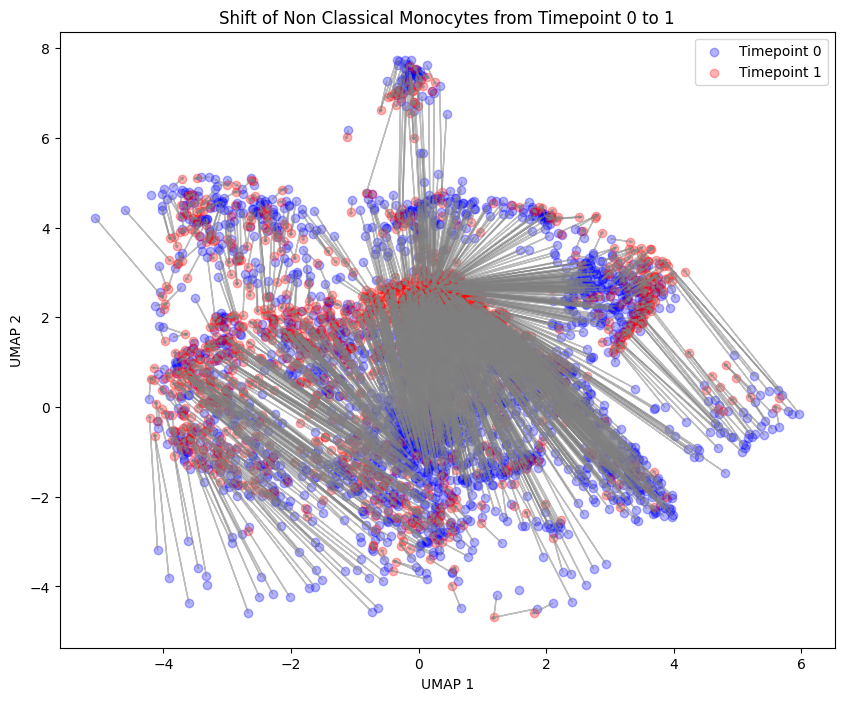

In [12]:
# Number of cells to sample for visualization to keep the plot readable
num_samples = 2400  # Adjust as needed

# Sample indices from timepoint 0
np.random.seed(42)  # For reproducibility
source_indices = np.random.choice(X.shape[0], size=num_samples, replace=False)
target_indices = np.argmax(transport_plan[source_indices], axis=1)  # Find target for each source

# Create a DataFrame for plotting
shift_data = pd.DataFrame({
    'x_source': X[source_indices, 0],
    'y_source': X[source_indices, 1],
    'x_target': Y[target_indices, 0],
    'y_target': Y[target_indices, 1]
})

# Plot UMAP with arrows indicating shifts
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.3, label='Timepoint 0')
plt.scatter(Y[:, 0], Y[:, 1], c='red', alpha=0.3, label='Timepoint 1')

# Draw arrows for the sampled shifts
for _, row in shift_data.iterrows():
    plt.arrow(row['x_source'], row['y_source'],
              row['x_target'] - row['x_source'],
              row['y_target'] - row['y_source'],
              color='gray', alpha=0.5, head_width=0.05, head_length=0.05)

plt.legend()
plt.title('Shift of Non Classical Monocytes from Timepoint 0 to 1')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

/tmp/SLURM_28190894/ipykernel_28973/865013955.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/tmp/SLURM_28190894/ipykernel_28973/865013955.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


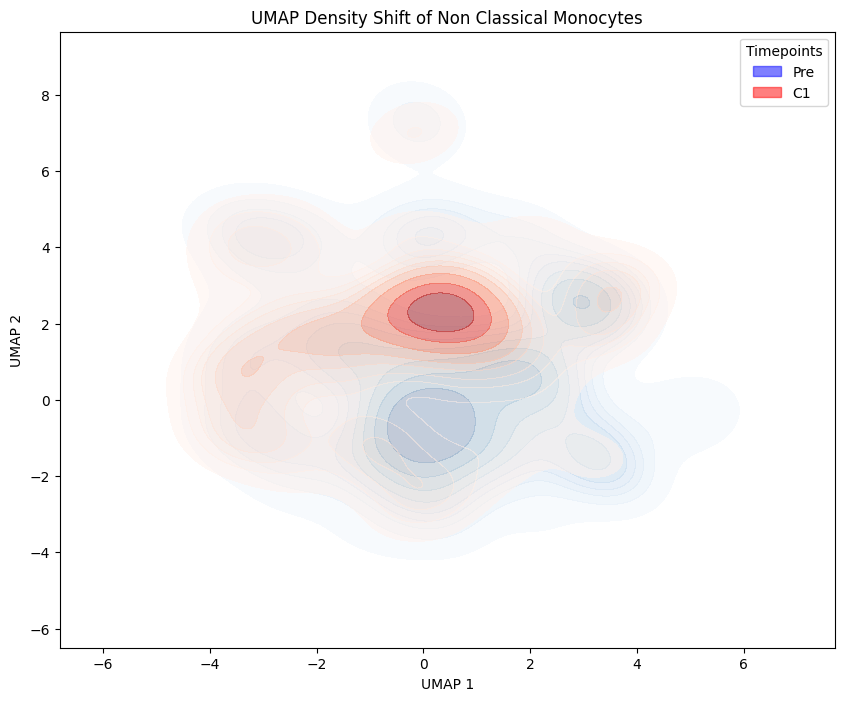

In [13]:
from matplotlib.patches import Patch
plt.figure(figsize=(10, 8))

# Plot for Timepoint Pre
sns.kdeplot(
    x=X[:, 0], 
    y=X[:, 1], 
    cmap="Blues", 
    shade=True, 
    alpha=0.5
)

# Plot for Timepoint C1
sns.kdeplot(
    x=Y[:, 0], 
    y=Y[:, 1], 
    cmap="Reds", 
    shade=True, 
    alpha=0.5
)

# Adding titles and labels
plt.title('UMAP Density Shift of Non Classical Monocytes')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

# Create custom legend handles
legend_elements = [
    Patch(facecolor='blue', edgecolor='blue', alpha=0.5, label='Pre'),
    Patch(facecolor='red', edgecolor='red', alpha=0.5, label='C1')
]

# Add the legend to the plot
plt.legend(handles=legend_elements, title='Timepoints', loc='best')

# Save the figure
plt.savefig(
    '/project/dtran642_927/Data/Collaborator/DJ/scRNAseq/latest_big_sequencing_projects/MK/Publication_Material/NC_Mono_Exp_Pre_C1_UMAP_Density_Shift.pdf', 
    format='pdf', 
    bbox_inches='tight'
)

# Display the plot
plt.show()

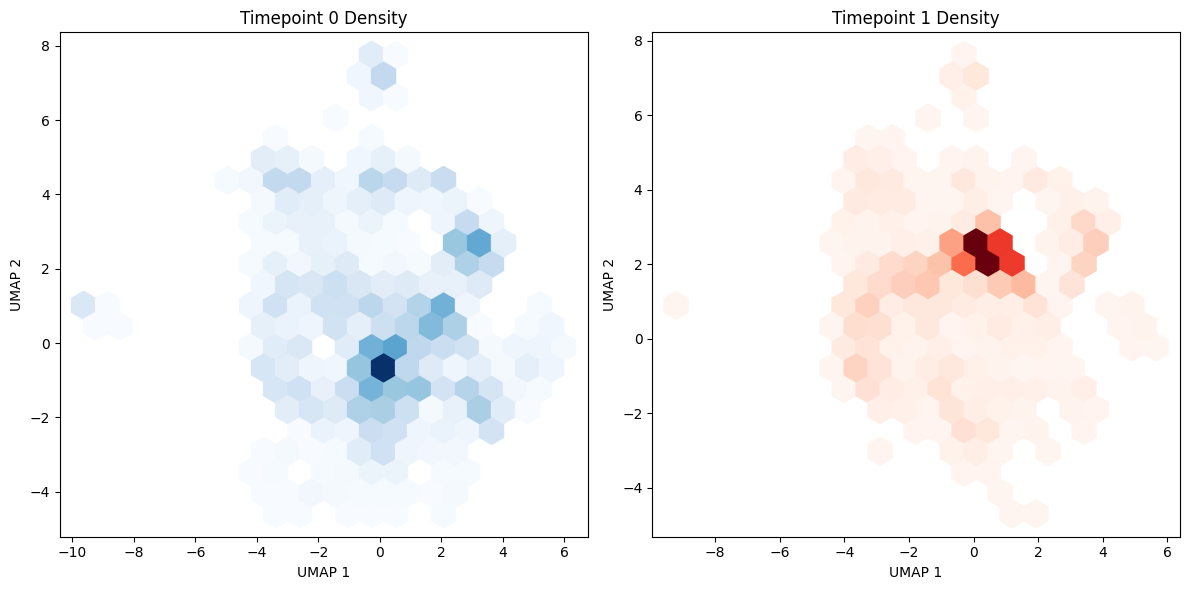

In [28]:
# Number of hexagons in each dimension
num_hex = 20

# Create hexbin plots for source and target
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hexbin(X[:, 0], X[:, 1], gridsize=num_hex, cmap='Blues', mincnt=1)
plt.title('Timepoint 0 Density')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.subplot(1, 2, 2)
plt.hexbin(Y[:, 0], Y[:, 1], gridsize=num_hex, cmap='Reds', mincnt=1)
plt.title('Timepoint 1 Density')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.tight_layout()
plt.show()


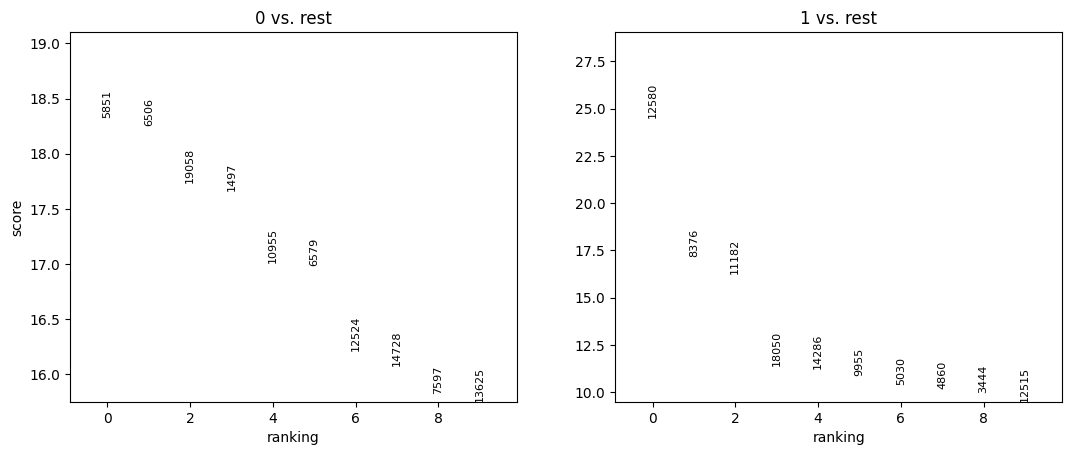

In [32]:
# Example: Identify top genes correlated with UMAP directions
sc.tl.rank_genes_groups(adata, 'TimePoint_numeric', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

#### Extract Cell Barcodes

In [33]:
source_barcodes = time0.obs['barcode'].values  # Timepoint 0 barcodes
target_barcodes = time1.obs['barcode'].values  # Timepoint 1 barcodes

#### Create Predecessor Mapping

In [ ]:
import pandas as pd
import numpy as np

# Assuming transport_plan is a numpy array of shape (n_source, n_target)
# Where transport_plan[i, j] is the amount of mass moved from source i to target j

# For each target cell, find the source cell with the maximum transport mass
predecessor_indices = np.argmax(transport_plan, axis=0)  # Shape: (n_target,)

# Map target indices to source indices
predecessor_barcodes = source_barcodes[predecessor_indices]

# Create a DataFrame with target barcodes and their predecessors
mapping_df = pd.DataFrame({
    'target_barcode': target_barcodes,
    'predecessor_barcode': predecessor_barcodes
})

# Save the mapping to a CSV file
mapping_df.to_csv('predecessor_mapping.csv', index=False)
print("Predecessor mapping saved to 'predecessor_mapping.csv'.")

In [14]:
# Load the AnnData object
# adata = ad.read_h5ad("MK_NC_Monocyte_Cells_res_1_seurat_obj_unwanted_clusters_removed_control_Pre_C1.h5ad")
adata = ad.read_h5ad("MK_NC_Monocyte_Cells_res_1_seurat_obj_unwanted_clusters_removed_control_patient_1_4_Pre_C1.h5ad")

In [15]:
# Inspect the AnnData object
print(adata)

AnnData object with n_obs × n_vars = 1409 × 19343
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.tubulinA', 'sample_outs', 'donor', 'origin', 'Surgery_method', 'Sample_type', 'Patient', 'Run', 'Site', 'TimePoint', 'integrated_snn_res.1', 'seurat_clusters', 'integrated_snn_res.0.5', 'integrated_snn_res.0.8', 'barcode'
    var: 'features'
    obsm: 'X_tsne', 'X_umap'


In [16]:
# Ensure timepoint information is categorical
adata.obs['TimePoint'] = adata.obs['TimePoint'].astype('category')

# Map timepoint categories to numeric values and ensure they are ordered
timepoint_mapping = {'Pre': 0, 'C1': 1}
adata.obs['TimePoint_numeric'] = adata.obs['TimePoint'].map(timepoint_mapping)
adata.obs['TimePoint_numeric'] = pd.Categorical(
    adata.obs['TimePoint_numeric'],
    categories=[0, 1],  # Correct temporal order
    ordered=True
)

time0 = adata[adata.obs['TimePoint_numeric'] == 0].copy()
time1 = adata[adata.obs['TimePoint_numeric'] == 1].copy()

In [17]:
# Ensure there are cells in both timepoints
print(f"Timepoint 0: {time0.n_obs} cells")
print(f"Timepoint 1: {time1.n_obs} cells")

Timepoint 0: 823 cells
Timepoint 1: 586 cells


In [18]:
X = time0.obsm['X_umap']  # Shape: (n0, 2)
Y = time1.obsm['X_umap']  # Shape: (n1, 2)

In [19]:
a = np.ones(X.shape[0]) / X.shape[0]  # Source distribution weights
b = np.ones(Y.shape[0]) / Y.shape[0]  # Target distribution weights

In [20]:
# Compute the pairwise Euclidean distance between X and Y
cost_matrix = ot.dist(X, Y, metric='euclidean')

In [21]:
# Compute the EMD (Wasserstein-1 distance)
emd_distance = ot.emd2(a, b, cost_matrix)
print(f"Earth Mover's Distance (Wasserstein-1): {emd_distance}")

Earth Mover's Distance (Wasserstein-1): 2.2985530441046595


In [22]:
# Compute the transport plan
transport_plan = ot.emd(a, b, cost_matrix)

In [23]:
print(transport_plan.shape)

(823, 586)


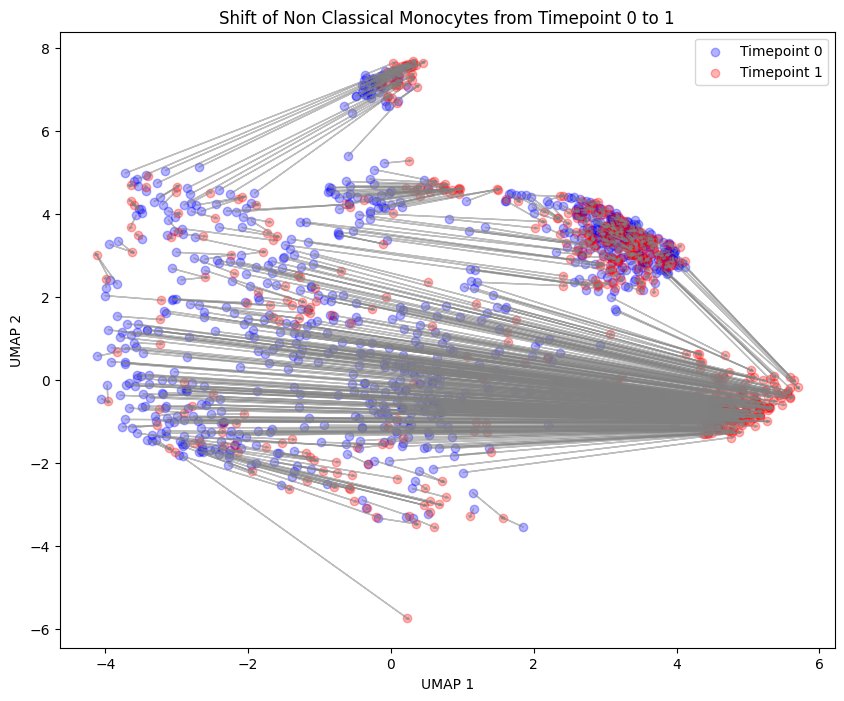

In [31]:
# Number of cells to sample for visualization to keep the plot readable
num_samples = 823  # Adjust as needed

# Sample indices from timepoint 0
np.random.seed(42)  # For reproducibility
source_indices = np.random.choice(X.shape[0], size=num_samples, replace=False)
target_indices = np.argmax(transport_plan[source_indices], axis=1)  # Find target for each source

# Create a DataFrame for plotting
shift_data = pd.DataFrame({
    'x_source': X[source_indices, 0],
    'y_source': X[source_indices, 1],
    'x_target': Y[target_indices, 0],
    'y_target': Y[target_indices, 1]
})

# Plot UMAP with arrows indicating shifts
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.3, label='Timepoint 0')
plt.scatter(Y[:, 0], Y[:, 1], c='red', alpha=0.3, label='Timepoint 1')

# Draw arrows for the sampled shifts
for _, row in shift_data.iterrows():
    plt.arrow(row['x_source'], row['y_source'],
              row['x_target'] - row['x_source'],
              row['y_target'] - row['y_source'],
              color='gray', alpha=0.5, head_width=0.05, head_length=0.05)

plt.legend()
plt.title('Shift of Non Classical Monocytes from Timepoint 0 to 1')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

/tmp/SLURM_28401507/ipykernel_28142/3794520001.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/tmp/SLURM_28401507/ipykernel_28142/3794520001.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


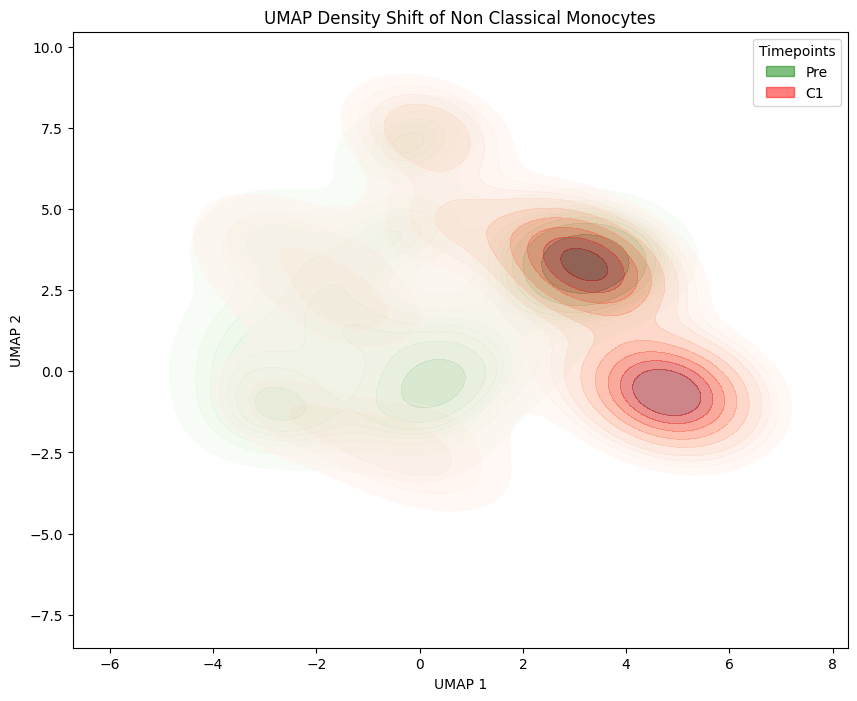

In [32]:
from matplotlib.patches import Patch
plt.figure(figsize=(10, 8))

# Plot for Timepoint Pre
sns.kdeplot(
    x=X[:, 0], 
    y=X[:, 1], 
    cmap="Greens", 
    shade=True, 
    alpha=0.5
)

# Plot for Timepoint C1
sns.kdeplot(
    x=Y[:, 0], 
    y=Y[:, 1], 
    cmap="Reds", 
    shade=True, 
    alpha=0.5
)

# Adding titles and labels
plt.title('UMAP Density Shift of Non Classical Monocytes')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

# Create custom legend handles
legend_elements = [
    Patch(facecolor='green', edgecolor='green', alpha=0.5, label='Pre'),
    Patch(facecolor='red', edgecolor='red', alpha=0.5, label='C1')
]

# Add the legend to the plot
plt.legend(handles=legend_elements, title='Timepoints', loc='best')

# Save the figure
plt.savefig(
    '/project/dtran642_927/Data/Collaborator/DJ/scRNAseq/latest_big_sequencing_projects/MK/Publication_Material/NC_Mono_Control_Pre_C1_UMAP_Density_Shift.pdf', 
    format='pdf', 
    bbox_inches='tight'
)

# Display the plot
plt.show()